We'll be using Keras with TensorFlow as backend for classification of fashion items to its categories.

In [56]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import fashion_mnist


The ```fasion_mnist``` dataset contains 28 by 28 grayscale images of fashion items

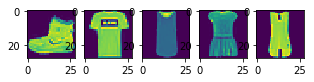

In [70]:
# load training and test sets
(x_train, y_train), (x_test, y_test) = \
    fashion_mnist.load_data()

# set learning settings
batch_size = 40
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


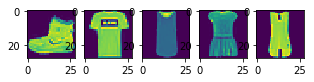

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(1, 6):
    img = x_train[i - 1]
    fig.add_subplot(1, 6, i)
    plt.imshow(img)
plt.show()

We need to reshape the data set, as keras's 2D convolution layer accepts input of 4D 

In [72]:
x_train = x_train.reshape(x_train.shape[0],  # Number of images
                          img_rows,  # Height
                          img_cols,  # Width
                          1)  # Number of channels

#  We need to do the same for the test set
x_test = x_test.reshape(x_test.shape[0],
                        img_rows,
                        img_cols,
                        1)
input_shape = (img_rows, img_cols, 1)


In [73]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [74]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [75]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [78]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [79]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12


   40/60000 [..............................] - ETA: 11:21 - loss: 0.3327 - acc: 0.9000

   80/60000 [..............................] - ETA: 6:54 - loss: 0.2958 - acc: 0.9000 

  120/60000 [..............................] - ETA: 5:20 - loss: 0.3033 - acc: 0.8833

  160/60000 [..............................] - ETA: 4:33 - loss: 0.3032 - acc: 0.9000

  200/60000 [..............................] - ETA: 4:05 - loss: 0.2949 - acc: 0.8950

  240/60000 [..............................] - ETA: 3:48 - loss: 0.3206 - acc: 0.8958

  280/60000 [..............................] - ETA: 3:35 - loss: 0.3044 - acc: 0.9000

  320/60000 [..............................] - ETA: 3:25 - loss: 0.2967 - acc: 0.9000

  360/60000 [..............................] - ETA: 3:17 - loss: 0.2764 - acc: 0.9083

  400/60000 [..............................] - ETA: 3:09 - loss: 0.2731 - acc: 0.9100

  440/60000 [..............................] - ETA: 3:01 - loss: 0.2858 - acc: 0.9023

  480/60000 [..............................] - ETA: 2:55 - loss: 0.2803 - acc: 0.9000

  520/60000 [..............................] - ETA: 2:50 - loss: 0.2771 - acc: 0.9000

  560/60000 [..............................] - ETA: 2:46 - loss: 0.2839 - acc: 0.8946

  600/60000 [..............................] - ETA: 2:42 - loss: 0.2785 - acc: 0.8967

  640/60000 [..............................] - ETA: 2:39 - loss: 0.2721 - acc: 0.9016

  680/60000 [..............................] - ETA: 2:38 - loss: 0.2792 - acc: 0.8971

  720/60000 [..............................] - ETA: 2:35 - loss: 0.2843 - acc: 0.8931

  760/60000 [..............................] - ETA: 2:32 - loss: 0.2823 - acc: 0.8947

  800/60000 [..............................] - ETA: 2:30 - loss: 0.2768 - acc: 0.8962

  840/60000 [..............................] - ETA: 2:28 - loss: 0.2792 - acc: 0.8976

  880/60000 [..............................] - ETA: 2:26 - loss: 0.2750 - acc: 0.8989

  920/60000 [..............................] - ETA: 2:25 - loss: 0.2658 - acc: 0.9033

  960/60000 [..............................] - ETA: 2:23 - loss: 0.2638 - acc: 0.9052

 1000/60000 [..............................] - ETA: 2:22 - loss: 0.2703 - acc: 0.9050

 1040/60000 [..............................] - ETA: 2:20 - loss: 0.2684 - acc: 0.9038

 1080/60000 [..............................] - ETA: 2:19 - loss: 0.2704 - acc: 0.9028

 1120/60000 [..............................] - ETA: 2:18 - loss: 0.2704 - acc: 0.9036

 1160/60000 [..............................] - ETA: 2:16 - loss: 0.2755 - acc: 0.9043

 1200/60000 [..............................] - ETA: 2:15 - loss: 0.2729 - acc: 0.9042

 1240/60000 [..............................] - ETA: 2:14 - loss: 0.2755 - acc: 0.9016

 1280/60000 [..............................] - ETA: 2:13 - loss: 0.2753 - acc: 0.9023

 1320/60000 [..............................] - ETA: 2:13 - loss: 0.2716 - acc: 0.9045

 1360/60000 [..............................] - ETA: 2:12 - loss: 0.2707 - acc: 0.9051

 1400/60000 [..............................] - ETA: 2:12 - loss: 0.2723 - acc: 0.9043

 1440/60000 [..............................] - ETA: 2:11 - loss: 0.2730 - acc: 0.9049

 1480/60000 [..............................] - ETA: 2:10 - loss: 0.2725 - acc: 0.9047

 1520/60000 [..............................] - ETA: 2:10 - loss: 0.2689 - acc: 0.9059

 1560/60000 [..............................] - ETA: 2:09 - loss: 0.2762 - acc: 0.9038

 1600/60000 [..............................] - ETA: 2:08 - loss: 0.2775 - acc: 0.9031

 1640/60000 [..............................] - ETA: 2:08 - loss: 0.2774 - acc: 0.9024

 1680/60000 [..............................] - ETA: 2:07 - loss: 0.2764 - acc: 0.9030

 1720/60000 [..............................] - ETA: 2:06 - loss: 0.2812 - acc: 0.9006

 1760/60000 [..............................] - ETA: 2:06 - loss: 0.2787 - acc: 0.9011

 1800/60000 [..............................] - ETA: 2:05 - loss: 0.2774 - acc: 0.9022

 1840/60000 [..............................] - ETA: 2:05 - loss: 0.2767 - acc: 0.9022

 1880/60000 [..............................] - ETA: 2:04 - loss: 0.2777 - acc: 0.9021

 1920/60000 [..............................] - ETA: 2:04 - loss: 0.2786 - acc: 0.9016

 1960/60000 [..............................] - ETA: 2:03 - loss: 0.2781 - acc: 0.9020

 2000/60000 [>.............................] - ETA: 2:03 - loss: 0.2775 - acc: 0.9030

 2040/60000 [>.............................] - ETA: 2:03 - loss: 0.2789 - acc: 0.9015

 2080/60000 [>.............................] - ETA: 2:02 - loss: 0.2770 - acc: 0.9019

 2120/60000 [>.............................] - ETA: 2:02 - loss: 0.2780 - acc: 0.9014

 2160/60000 [>.............................] - ETA: 2:01 - loss: 0.2818 - acc: 0.9005

 2200/60000 [>.............................] - ETA: 2:01 - loss: 0.2817 - acc: 0.8995

 2240/60000 [>.............................] - ETA: 2:01 - loss: 0.2838 - acc: 0.8991

 2280/60000 [>.............................] - ETA: 2:00 - loss: 0.2836 - acc: 0.8982

 2320/60000 [>.............................] - ETA: 2:00 - loss: 0.2857 - acc: 0.8978

 2360/60000 [>.............................] - ETA: 2:00 - loss: 0.2864 - acc: 0.8970

 2400/60000 [>.............................] - ETA: 1:59 - loss: 0.2915 - acc: 0.8963

 2440/60000 [>.............................] - ETA: 1:59 - loss: 0.2904 - acc: 0.8963

 2480/60000 [>.............................] - ETA: 1:59 - loss: 0.2902 - acc: 0.8972

 2520/60000 [>.............................] - ETA: 1:59 - loss: 0.2952 - acc: 0.8960

 2560/60000 [>.............................] - ETA: 1:58 - loss: 0.2927 - acc: 0.8969

 2600/60000 [>.............................] - ETA: 1:58 - loss: 0.2923 - acc: 0.8969

 2640/60000 [>.............................] - ETA: 1:58 - loss: 0.2962 - acc: 0.8970

 2680/60000 [>.............................] - ETA: 1:57 - loss: 0.2938 - acc: 0.8974

 2720/60000 [>.............................] - ETA: 1:57 - loss: 0.2949 - acc: 0.8974

 2760/60000 [>.............................] - ETA: 1:57 - loss: 0.2937 - acc: 0.8982

 2800/60000 [>.............................] - ETA: 1:57 - loss: 0.2977 - acc: 0.8968

 2840/60000 [>.............................] - ETA: 1:56 - loss: 0.2991 - acc: 0.8968

 2880/60000 [>.............................] - ETA: 1:56 - loss: 0.2969 - acc: 0.8976

 2920/60000 [>.............................] - ETA: 1:56 - loss: 0.2961 - acc: 0.8979

 2960/60000 [>.............................] - ETA: 1:56 - loss: 0.2936 - acc: 0.8990

 3000/60000 [>.............................] - ETA: 1:55 - loss: 0.2943 - acc: 0.8983

 3040/60000 [>.............................] - ETA: 1:55 - loss: 0.2927 - acc: 0.8990

 3080/60000 [>.............................] - ETA: 1:55 - loss: 0.2922 - acc: 0.8987

 3120/60000 [>.............................] - ETA: 1:55 - loss: 0.2912 - acc: 0.8987

 3160/60000 [>.............................] - ETA: 1:55 - loss: 0.2929 - acc: 0.8987

 3200/60000 [>.............................] - ETA: 1:54 - loss: 0.2948 - acc: 0.8978

 3240/60000 [>.............................] - ETA: 1:54 - loss: 0.2953 - acc: 0.8975

 3280/60000 [>.............................] - ETA: 1:54 - loss: 0.2954 - acc: 0.8976

 3320/60000 [>.............................] - ETA: 1:54 - loss: 0.2940 - acc: 0.8982

 3360/60000 [>.............................] - ETA: 1:54 - loss: 0.2932 - acc: 0.8979

 3400/60000 [>.............................] - ETA: 1:53 - loss: 0.2911 - acc: 0.8985

 3440/60000 [>.............................] - ETA: 1:53 - loss: 0.2905 - acc: 0.8985

 3480/60000 [>.............................] - ETA: 1:53 - loss: 0.2897 - acc: 0.8986

 3520/60000 [>.............................] - ETA: 1:53 - loss: 0.2902 - acc: 0.8989

 3560/60000 [>.............................] - ETA: 1:53 - loss: 0.2946 - acc: 0.8978

 3600/60000 [>.............................] - ETA: 1:52 - loss: 0.2959 - acc: 0.8972

 3640/60000 [>.............................] - ETA: 1:52 - loss: 0.2943 - acc: 0.8978

 3680/60000 [>.............................] - ETA: 1:52 - loss: 0.2922 - acc: 0.8986

 3720/60000 [>.............................] - ETA: 1:52 - loss: 0.2909 - acc: 0.8987

 3760/60000 [>.............................] - ETA: 1:52 - loss: 0.2895 - acc: 0.8992

 3800/60000 [>.............................] - ETA: 1:51 - loss: 0.2901 - acc: 0.8987

 3840/60000 [>.............................] - ETA: 1:51 - loss: 0.2893 - acc: 0.8987

 3880/60000 [>.............................] - ETA: 1:51 - loss: 0.2893 - acc: 0.8990

 3920/60000 [>.............................] - ETA: 1:51 - loss: 0.2890 - acc: 0.8992

 3960/60000 [>.............................] - ETA: 1:51 - loss: 0.2887 - acc: 0.8992

 4000/60000 [=>............................] - ETA: 1:51 - loss: 0.2890 - acc: 0.8990

 4040/60000 [=>............................] - ETA: 1:50 - loss: 0.2882 - acc: 0.8995

 4080/60000 [=>............................] - ETA: 1:50 - loss: 0.2869 - acc: 0.8998

 4120/60000 [=>............................] - ETA: 1:50 - loss: 0.2864 - acc: 0.9002

 4160/60000 [=>............................] - ETA: 1:50 - loss: 0.2867 - acc: 0.9002

 4200/60000 [=>............................] - ETA: 1:50 - loss: 0.2873 - acc: 0.9000

 4240/60000 [=>............................] - ETA: 1:50 - loss: 0.2872 - acc: 0.9000

 4280/60000 [=>............................] - ETA: 1:50 - loss: 0.2866 - acc: 0.9000

 4320/60000 [=>............................] - ETA: 1:49 - loss: 0.2868 - acc: 0.9002

 4360/60000 [=>............................] - ETA: 1:49 - loss: 0.2851 - acc: 0.9007

 4400/60000 [=>............................] - ETA: 1:49 - loss: 0.2838 - acc: 0.9011

 4440/60000 [=>............................] - ETA: 1:49 - loss: 0.2825 - acc: 0.9014

 4480/60000 [=>............................] - ETA: 1:49 - loss: 0.2861 - acc: 0.9009

 4520/60000 [=>............................] - ETA: 1:49 - loss: 0.2868 - acc: 0.9004

 4560/60000 [=>............................] - ETA: 1:49 - loss: 0.2870 - acc: 0.9009

 4600/60000 [=>............................] - ETA: 1:48 - loss: 0.2869 - acc: 0.9011

 4640/60000 [=>............................] - ETA: 1:48 - loss: 0.2872 - acc: 0.9009

 4680/60000 [=>............................] - ETA: 1:48 - loss: 0.2868 - acc: 0.9009

 4720/60000 [=>............................] - ETA: 1:48 - loss: 0.2860 - acc: 0.9011

 4760/60000 [=>............................] - ETA: 1:48 - loss: 0.2861 - acc: 0.9011

 4800/60000 [=>............................] - ETA: 1:48 - loss: 0.2859 - acc: 0.9010

 4840/60000 [=>............................] - ETA: 1:48 - loss: 0.2865 - acc: 0.9010

 4880/60000 [=>............................] - ETA: 1:47 - loss: 0.2876 - acc: 0.8998

 4920/60000 [=>............................] - ETA: 1:47 - loss: 0.2870 - acc: 0.9000

 4960/60000 [=>............................] - ETA: 1:47 - loss: 0.2872 - acc: 0.9000

 5000/60000 [=>............................] - ETA: 1:47 - loss: 0.2872 - acc: 0.9002

 5040/60000 [=>............................] - ETA: 1:47 - loss: 0.2873 - acc: 0.9004

 5080/60000 [=>............................] - ETA: 1:47 - loss: 0.2867 - acc: 0.9004

 5120/60000 [=>............................] - ETA: 1:47 - loss: 0.2869 - acc: 0.9004

 5160/60000 [=>............................] - ETA: 1:47 - loss: 0.2863 - acc: 0.9008

 5200/60000 [=>............................] - ETA: 1:46 - loss: 0.2867 - acc: 0.9006

 5240/60000 [=>............................] - ETA: 1:46 - loss: 0.2866 - acc: 0.9006

 5280/60000 [=>............................] - ETA: 1:46 - loss: 0.2858 - acc: 0.9008

 5320/60000 [=>............................] - ETA: 1:46 - loss: 0.2863 - acc: 0.9004

 5360/60000 [=>............................] - ETA: 1:46 - loss: 0.2873 - acc: 0.9002

 5400/60000 [=>............................] - ETA: 1:46 - loss: 0.2871 - acc: 0.9002

 5440/60000 [=>............................] - ETA: 1:46 - loss: 0.2866 - acc: 0.9004

 5480/60000 [=>............................] - ETA: 1:46 - loss: 0.2868 - acc: 0.9005

 5520/60000 [=>............................] - ETA: 1:45 - loss: 0.2866 - acc: 0.9009

 5560/60000 [=>............................] - ETA: 1:45 - loss: 0.2880 - acc: 0.9009

 5600/60000 [=>............................] - ETA: 1:45 - loss: 0.2899 - acc: 0.9005

 5640/60000 [=>............................] - ETA: 1:45 - loss: 0.2896 - acc: 0.9007

 5680/60000 [=>............................] - ETA: 1:45 - loss: 0.2888 - acc: 0.9012

 5720/60000 [=>............................] - ETA: 1:45 - loss: 0.2881 - acc: 0.9016

 5760/60000 [=>............................] - ETA: 1:45 - loss: 0.2880 - acc: 0.9017

 5800/60000 [=>............................] - ETA: 1:45 - loss: 0.2900 - acc: 0.9009

 5840/60000 [=>............................] - ETA: 1:45 - loss: 0.2902 - acc: 0.9005

 5880/60000 [=>............................] - ETA: 1:44 - loss: 0.2890 - acc: 0.9010

 5920/60000 [=>............................] - ETA: 1:44 - loss: 0.2887 - acc: 0.9007

 5960/60000 [=>............................] - ETA: 1:44 - loss: 0.2886 - acc: 0.9008

 6000/60000 [==>...........................] - ETA: 1:44 - loss: 0.2880 - acc: 0.9008

 6040/60000 [==>...........................] - ETA: 1:44 - loss: 0.2881 - acc: 0.9007

 6080/60000 [==>...........................] - ETA: 1:44 - loss: 0.2873 - acc: 0.9010

 6120/60000 [==>...........................] - ETA: 1:44 - loss: 0.2875 - acc: 0.9011

 6160/60000 [==>...........................] - ETA: 1:44 - loss: 0.2868 - acc: 0.9015

 6200/60000 [==>...........................] - ETA: 1:44 - loss: 0.2867 - acc: 0.9016

 6240/60000 [==>...........................] - ETA: 1:43 - loss: 0.2863 - acc: 0.9018

 6280/60000 [==>...........................] - ETA: 1:43 - loss: 0.2873 - acc: 0.9018

 6320/60000 [==>...........................] - ETA: 1:43 - loss: 0.2885 - acc: 0.9017

 6360/60000 [==>...........................] - ETA: 1:43 - loss: 0.2898 - acc: 0.9014

 6400/60000 [==>...........................] - ETA: 1:43 - loss: 0.2891 - acc: 0.9017

 6440/60000 [==>...........................] - ETA: 1:43 - loss: 0.2880 - acc: 0.9020

 6480/60000 [==>...........................] - ETA: 1:43 - loss: 0.2876 - acc: 0.9022

 6520/60000 [==>...........................] - ETA: 1:43 - loss: 0.2870 - acc: 0.9026

 6560/60000 [==>...........................] - ETA: 1:43 - loss: 0.2880 - acc: 0.9021

 6600/60000 [==>...........................] - ETA: 1:43 - loss: 0.2868 - acc: 0.9027

 6640/60000 [==>...........................] - ETA: 1:42 - loss: 0.2860 - acc: 0.9029

 6680/60000 [==>...........................] - ETA: 1:42 - loss: 0.2853 - acc: 0.9031

 6720/60000 [==>...........................] - ETA: 1:42 - loss: 0.2861 - acc: 0.9028

 6760/60000 [==>...........................] - ETA: 1:42 - loss: 0.2859 - acc: 0.9028

 6800/60000 [==>...........................] - ETA: 1:42 - loss: 0.2851 - acc: 0.9032

 6840/60000 [==>...........................] - ETA: 1:42 - loss: 0.2841 - acc: 0.9035

 6880/60000 [==>...........................] - ETA: 1:42 - loss: 0.2843 - acc: 0.9032

 6920/60000 [==>...........................] - ETA: 1:42 - loss: 0.2853 - acc: 0.9027

 6960/60000 [==>...........................] - ETA: 1:42 - loss: 0.2849 - acc: 0.9029

 7000/60000 [==>...........................] - ETA: 1:42 - loss: 0.2849 - acc: 0.9029

 7040/60000 [==>...........................] - ETA: 1:42 - loss: 0.2846 - acc: 0.9030

 7080/60000 [==>...........................] - ETA: 1:41 - loss: 0.2843 - acc: 0.9032

 7120/60000 [==>...........................] - ETA: 1:41 - loss: 0.2834 - acc: 0.9035

 7160/60000 [==>...........................] - ETA: 1:41 - loss: 0.2829 - acc: 0.9035

 7200/60000 [==>...........................] - ETA: 1:41 - loss: 0.2824 - acc: 0.9037

 7240/60000 [==>...........................] - ETA: 1:41 - loss: 0.2824 - acc: 0.9036

 7280/60000 [==>...........................] - ETA: 1:41 - loss: 0.2827 - acc: 0.9033

 7320/60000 [==>...........................] - ETA: 1:41 - loss: 0.2828 - acc: 0.9034

 7360/60000 [==>...........................] - ETA: 1:41 - loss: 0.2826 - acc: 0.9034

 7400/60000 [==>...........................] - ETA: 1:41 - loss: 0.2828 - acc: 0.9032

 7440/60000 [==>...........................] - ETA: 1:41 - loss: 0.2823 - acc: 0.9036

 7480/60000 [==>...........................] - ETA: 1:41 - loss: 0.2817 - acc: 0.9037

 7520/60000 [==>...........................] - ETA: 1:41 - loss: 0.2816 - acc: 0.9036

 7560/60000 [==>...........................] - ETA: 1:41 - loss: 0.2818 - acc: 0.9036

 7600/60000 [==>...........................] - ETA: 1:41 - loss: 0.2817 - acc: 0.9037

 7640/60000 [==>...........................] - ETA: 1:41 - loss: 0.2819 - acc: 0.9035

 7680/60000 [==>...........................] - ETA: 1:41 - loss: 0.2812 - acc: 0.9036

 7720/60000 [==>...........................] - ETA: 1:41 - loss: 0.2807 - acc: 0.9039

 7760/60000 [==>...........................] - ETA: 1:41 - loss: 0.2808 - acc: 0.9039

 7800/60000 [==>...........................] - ETA: 1:41 - loss: 0.2802 - acc: 0.9041

 7840/60000 [==>...........................] - ETA: 1:41 - loss: 0.2807 - acc: 0.9037

 7880/60000 [==>...........................] - ETA: 1:40 - loss: 0.2813 - acc: 0.9036

 7920/60000 [==>...........................] - ETA: 1:40 - loss: 0.2815 - acc: 0.9035

 7960/60000 [==>...........................] - ETA: 1:40 - loss: 0.2817 - acc: 0.9033

 8000/60000 [===>..........................] - ETA: 1:40 - loss: 0.2819 - acc: 0.9031

 8040/60000 [===>..........................] - ETA: 1:40 - loss: 0.2817 - acc: 0.9031

 8080/60000 [===>..........................] - ETA: 1:40 - loss: 0.2814 - acc: 0.9031

 8120/60000 [===>..........................] - ETA: 1:40 - loss: 0.2815 - acc: 0.9032

 8160/60000 [===>..........................] - ETA: 1:40 - loss: 0.2813 - acc: 0.9033

 8200/60000 [===>..........................] - ETA: 1:40 - loss: 0.2807 - acc: 0.9034

 8240/60000 [===>..........................] - ETA: 1:40 - loss: 0.2801 - acc: 0.9036

 8280/60000 [===>..........................] - ETA: 1:40 - loss: 0.2794 - acc: 0.9039

 8320/60000 [===>..........................] - ETA: 1:40 - loss: 0.2797 - acc: 0.9037

 8360/60000 [===>..........................] - ETA: 1:40 - loss: 0.2798 - acc: 0.9037

 8400/60000 [===>..........................] - ETA: 1:40 - loss: 0.2796 - acc: 0.9040

 8440/60000 [===>..........................] - ETA: 1:40 - loss: 0.2797 - acc: 0.9038

 8480/60000 [===>..........................] - ETA: 1:40 - loss: 0.2805 - acc: 0.9035

 8520/60000 [===>..........................] - ETA: 1:40 - loss: 0.2800 - acc: 0.9035

 8560/60000 [===>..........................] - ETA: 1:41 - loss: 0.2812 - acc: 0.9032

 8600/60000 [===>..........................] - ETA: 1:41 - loss: 0.2815 - acc: 0.9031

 8640/60000 [===>..........................] - ETA: 1:41 - loss: 0.2817 - acc: 0.9032

 8680/60000 [===>..........................] - ETA: 1:41 - loss: 0.2809 - acc: 0.9036

 8720/60000 [===>..........................] - ETA: 1:41 - loss: 0.2811 - acc: 0.9037

 8760/60000 [===>..........................] - ETA: 1:41 - loss: 0.2807 - acc: 0.9038

 8800/60000 [===>..........................] - ETA: 1:41 - loss: 0.2811 - acc: 0.9032

 8840/60000 [===>..........................] - ETA: 1:41 - loss: 0.2810 - acc: 0.9033

 8880/60000 [===>..........................] - ETA: 1:41 - loss: 0.2818 - acc: 0.9030

 8920/60000 [===>..........................] - ETA: 1:41 - loss: 0.2817 - acc: 0.9030

 8960/60000 [===>..........................] - ETA: 1:41 - loss: 0.2815 - acc: 0.9029

 9000/60000 [===>..........................] - ETA: 1:41 - loss: 0.2813 - acc: 0.9030

 9040/60000 [===>..........................] - ETA: 1:41 - loss: 0.2806 - acc: 0.9033

 9080/60000 [===>..........................] - ETA: 1:41 - loss: 0.2804 - acc: 0.9035

 9120/60000 [===>..........................] - ETA: 1:41 - loss: 0.2801 - acc: 0.9035

 9160/60000 [===>..........................] - ETA: 1:41 - loss: 0.2803 - acc: 0.9036

 9200/60000 [===>..........................] - ETA: 1:41 - loss: 0.2807 - acc: 0.9035

 9240/60000 [===>..........................] - ETA: 1:41 - loss: 0.2801 - acc: 0.9038

 9280/60000 [===>..........................] - ETA: 1:41 - loss: 0.2797 - acc: 0.9039

 9320/60000 [===>..........................] - ETA: 1:41 - loss: 0.2798 - acc: 0.9040

 9360/60000 [===>..........................] - ETA: 1:41 - loss: 0.2795 - acc: 0.9042

 9400/60000 [===>..........................] - ETA: 1:41 - loss: 0.2803 - acc: 0.9040

 9440/60000 [===>..........................] - ETA: 1:41 - loss: 0.2820 - acc: 0.9037

 9480/60000 [===>..........................] - ETA: 1:41 - loss: 0.2821 - acc: 0.9037

 9520/60000 [===>..........................] - ETA: 1:41 - loss: 0.2826 - acc: 0.9035

 9560/60000 [===>..........................] - ETA: 1:41 - loss: 0.2825 - acc: 0.9035

 9600/60000 [===>..........................] - ETA: 1:41 - loss: 0.2830 - acc: 0.9029

 9640/60000 [===>..........................] - ETA: 1:41 - loss: 0.2827 - acc: 0.9031

 9680/60000 [===>..........................] - ETA: 1:41 - loss: 0.2827 - acc: 0.9030

 9720/60000 [===>..........................] - ETA: 1:41 - loss: 0.2825 - acc: 0.9031

 9760/60000 [===>..........................] - ETA: 1:41 - loss: 0.2831 - acc: 0.9029

 9800/60000 [===>..........................] - ETA: 1:41 - loss: 0.2826 - acc: 0.9031

 9840/60000 [===>..........................] - ETA: 1:41 - loss: 0.2836 - acc: 0.9027

 9880/60000 [===>..........................] - ETA: 1:41 - loss: 0.2846 - acc: 0.9027

 9920/60000 [===>..........................] - ETA: 1:41 - loss: 0.2843 - acc: 0.9028

 9960/60000 [===>..........................] - ETA: 1:41 - loss: 0.2843 - acc: 0.9030

10000/60000 [====>.........................] - ETA: 1:41 - loss: 0.2849 - acc: 0.9029

10040/60000 [====>.........................] - ETA: 1:41 - loss: 0.2853 - acc: 0.9025

10080/60000 [====>.........................] - ETA: 1:41 - loss: 0.2850 - acc: 0.9027

10120/60000 [====>.........................] - ETA: 1:41 - loss: 0.2849 - acc: 0.9027

10160/60000 [====>.........................] - ETA: 1:41 - loss: 0.2844 - acc: 0.9029

10200/60000 [====>.........................] - ETA: 1:41 - loss: 0.2846 - acc: 0.9027

10240/60000 [====>.........................] - ETA: 1:40 - loss: 0.2840 - acc: 0.9028

10280/60000 [====>.........................] - ETA: 1:40 - loss: 0.2845 - acc: 0.9026

10320/60000 [====>.........................] - ETA: 1:40 - loss: 0.2850 - acc: 0.9024

10360/60000 [====>.........................] - ETA: 1:40 - loss: 0.2851 - acc: 0.9025

10400/60000 [====>.........................] - ETA: 1:40 - loss: 0.2850 - acc: 0.9023

10440/60000 [====>.........................] - ETA: 1:40 - loss: 0.2863 - acc: 0.9018

10480/60000 [====>.........................] - ETA: 1:40 - loss: 0.2861 - acc: 0.9018

10520/60000 [====>.........................] - ETA: 1:40 - loss: 0.2868 - acc: 0.9018

10560/60000 [====>.........................] - ETA: 1:40 - loss: 0.2865 - acc: 0.9019

10600/60000 [====>.........................] - ETA: 1:40 - loss: 0.2876 - acc: 0.9016

10640/60000 [====>.........................] - ETA: 1:39 - loss: 0.2882 - acc: 0.9015

10680/60000 [====>.........................] - ETA: 1:39 - loss: 0.2886 - acc: 0.9013

10720/60000 [====>.........................] - ETA: 1:39 - loss: 0.2886 - acc: 0.9012

10760/60000 [====>.........................] - ETA: 1:39 - loss: 0.2884 - acc: 0.9012

10800/60000 [====>.........................] - ETA: 1:39 - loss: 0.2891 - acc: 0.9011

10840/60000 [====>.........................] - ETA: 1:39 - loss: 0.2889 - acc: 0.9012

10880/60000 [====>.........................] - ETA: 1:39 - loss: 0.2897 - acc: 0.9010

10920/60000 [====>.........................] - ETA: 1:39 - loss: 0.2904 - acc: 0.9006

10960/60000 [====>.........................] - ETA: 1:39 - loss: 0.2906 - acc: 0.9007

11000/60000 [====>.........................] - ETA: 1:39 - loss: 0.2905 - acc: 0.9008

11040/60000 [====>.........................] - ETA: 1:38 - loss: 0.2904 - acc: 0.9007

11080/60000 [====>.........................] - ETA: 1:38 - loss: 0.2904 - acc: 0.9006

11120/60000 [====>.........................] - ETA: 1:38 - loss: 0.2909 - acc: 0.9007

11160/60000 [====>.........................] - ETA: 1:38 - loss: 0.2903 - acc: 0.9010

11200/60000 [====>.........................] - ETA: 1:38 - loss: 0.2901 - acc: 0.9010

11240/60000 [====>.........................] - ETA: 1:38 - loss: 0.2896 - acc: 0.9012

11280/60000 [====>.........................] - ETA: 1:38 - loss: 0.2896 - acc: 0.9010

11320/60000 [====>.........................] - ETA: 1:38 - loss: 0.2902 - acc: 0.9008

11360/60000 [====>.........................] - ETA: 1:38 - loss: 0.2902 - acc: 0.9008

11400/60000 [====>.........................] - ETA: 1:37 - loss: 0.2900 - acc: 0.9008

11440/60000 [====>.........................] - ETA: 1:37 - loss: 0.2896 - acc: 0.9010

11480/60000 [====>.........................] - ETA: 1:37 - loss: 0.2893 - acc: 0.9011

11520/60000 [====>.........................] - ETA: 1:37 - loss: 0.2892 - acc: 0.9012

11560/60000 [====>.........................] - ETA: 1:37 - loss: 0.2886 - acc: 0.9014

11600/60000 [====>.........................] - ETA: 1:37 - loss: 0.2895 - acc: 0.9012

11640/60000 [====>.........................] - ETA: 1:37 - loss: 0.2892 - acc: 0.9014

11680/60000 [====>.........................] - ETA: 1:37 - loss: 0.2903 - acc: 0.9013

11720/60000 [====>.........................] - ETA: 1:37 - loss: 0.2900 - acc: 0.9013

11760/60000 [====>.........................] - ETA: 1:37 - loss: 0.2897 - acc: 0.9013

11800/60000 [====>.........................] - ETA: 1:37 - loss: 0.2897 - acc: 0.9013

11840/60000 [====>.........................] - ETA: 1:37 - loss: 0.2896 - acc: 0.9014

11880/60000 [====>.........................] - ETA: 1:37 - loss: 0.2899 - acc: 0.9015

11920/60000 [====>.........................] - ETA: 1:37 - loss: 0.2901 - acc: 0.9014

11960/60000 [====>.........................] - ETA: 1:37 - loss: 0.2896 - acc: 0.9017

12000/60000 [=====>........................] - ETA: 1:37 - loss: 0.2894 - acc: 0.9015

12040/60000 [=====>........................] - ETA: 1:36 - loss: 0.2893 - acc: 0.9014

12080/60000 [=====>........................] - ETA: 1:36 - loss: 0.2903 - acc: 0.9013

12120/60000 [=====>........................] - ETA: 1:36 - loss: 0.2901 - acc: 0.9012

12160/60000 [=====>........................] - ETA: 1:36 - loss: 0.2899 - acc: 0.9012

12200/60000 [=====>........................] - ETA: 1:36 - loss: 0.2897 - acc: 0.9011

12240/60000 [=====>........................] - ETA: 1:36 - loss: 0.2894 - acc: 0.9011

12280/60000 [=====>........................] - ETA: 1:36 - loss: 0.2893 - acc: 0.9011

12320/60000 [=====>........................] - ETA: 1:36 - loss: 0.2890 - acc: 0.9011

12360/60000 [=====>........................] - ETA: 1:36 - loss: 0.2890 - acc: 0.9013

12400/60000 [=====>........................] - ETA: 1:36 - loss: 0.2896 - acc: 0.9010

12440/60000 [=====>........................] - ETA: 1:36 - loss: 0.2894 - acc: 0.9010

12480/60000 [=====>........................] - ETA: 1:36 - loss: 0.2889 - acc: 0.9011

12520/60000 [=====>........................] - ETA: 1:36 - loss: 0.2887 - acc: 0.9012

12560/60000 [=====>........................] - ETA: 1:36 - loss: 0.2885 - acc: 0.9012

12600/60000 [=====>........................] - ETA: 1:36 - loss: 0.2879 - acc: 0.9015

12640/60000 [=====>........................] - ETA: 1:36 - loss: 0.2877 - acc: 0.9015

12680/60000 [=====>........................] - ETA: 1:36 - loss: 0.2873 - acc: 0.9015

12720/60000 [=====>........................] - ETA: 1:36 - loss: 0.2866 - acc: 0.9017

12760/60000 [=====>........................] - ETA: 1:36 - loss: 0.2858 - acc: 0.9020

12800/60000 [=====>........................] - ETA: 1:36 - loss: 0.2870 - acc: 0.9020

12840/60000 [=====>........................] - ETA: 1:36 - loss: 0.2863 - acc: 0.9023

12880/60000 [=====>........................] - ETA: 1:36 - loss: 0.2861 - acc: 0.9023

12920/60000 [=====>........................] - ETA: 1:36 - loss: 0.2861 - acc: 0.9023

12960/60000 [=====>........................] - ETA: 1:36 - loss: 0.2861 - acc: 0.9021

13000/60000 [=====>........................] - ETA: 1:36 - loss: 0.2861 - acc: 0.9021

13040/60000 [=====>........................] - ETA: 1:36 - loss: 0.2859 - acc: 0.9020

13080/60000 [=====>........................] - ETA: 1:36 - loss: 0.2858 - acc: 0.9021

13120/60000 [=====>........................] - ETA: 1:36 - loss: 0.2858 - acc: 0.9021

13160/60000 [=====>........................] - ETA: 1:36 - loss: 0.2858 - acc: 0.9021

13200/60000 [=====>........................] - ETA: 1:37 - loss: 0.2858 - acc: 0.9023

13240/60000 [=====>........................] - ETA: 1:37 - loss: 0.2858 - acc: 0.9023

13280/60000 [=====>........................] - ETA: 1:37 - loss: 0.2856 - acc: 0.9023

13320/60000 [=====>........................] - ETA: 1:37 - loss: 0.2858 - acc: 0.9024

13360/60000 [=====>........................] - ETA: 1:37 - loss: 0.2857 - acc: 0.9022

13400/60000 [=====>........................] - ETA: 1:37 - loss: 0.2854 - acc: 0.9025

13440/60000 [=====>........................] - ETA: 1:37 - loss: 0.2856 - acc: 0.9025

13480/60000 [=====>........................] - ETA: 1:37 - loss: 0.2856 - acc: 0.9024

13520/60000 [=====>........................] - ETA: 1:37 - loss: 0.2857 - acc: 0.9024

13560/60000 [=====>........................] - ETA: 1:37 - loss: 0.2867 - acc: 0.9021

13600/60000 [=====>........................] - ETA: 1:37 - loss: 0.2870 - acc: 0.9018

13640/60000 [=====>........................] - ETA: 1:37 - loss: 0.2864 - acc: 0.9021

13680/60000 [=====>........................] - ETA: 1:37 - loss: 0.2862 - acc: 0.9023

13720/60000 [=====>........................] - ETA: 1:37 - loss: 0.2863 - acc: 0.9020

13760/60000 [=====>........................] - ETA: 1:37 - loss: 0.2862 - acc: 0.9020

13800/60000 [=====>........................] - ETA: 1:37 - loss: 0.2861 - acc: 0.9020

13840/60000 [=====>........................] - ETA: 1:37 - loss: 0.2860 - acc: 0.9018

13880/60000 [=====>........................] - ETA: 1:37 - loss: 0.2856 - acc: 0.9019

13920/60000 [=====>........................] - ETA: 1:37 - loss: 0.2858 - acc: 0.9018

13960/60000 [=====>........................] - ETA: 1:37 - loss: 0.2853 - acc: 0.9019

14000/60000 [======>.......................] - ETA: 1:37 - loss: 0.2849 - acc: 0.9021

14040/60000 [======>.......................] - ETA: 1:38 - loss: 0.2856 - acc: 0.9019

14080/60000 [======>.......................] - ETA: 1:38 - loss: 0.2856 - acc: 0.9019

14120/60000 [======>.......................] - ETA: 1:38 - loss: 0.2854 - acc: 0.9020

14160/60000 [======>.......................] - ETA: 1:38 - loss: 0.2853 - acc: 0.9019

14200/60000 [======>.......................] - ETA: 1:38 - loss: 0.2852 - acc: 0.9020

14240/60000 [======>.......................] - ETA: 1:38 - loss: 0.2848 - acc: 0.9021

14280/60000 [======>.......................] - ETA: 1:38 - loss: 0.2847 - acc: 0.9021

14320/60000 [======>.......................] - ETA: 1:38 - loss: 0.2847 - acc: 0.9020

14360/60000 [======>.......................] - ETA: 1:38 - loss: 0.2845 - acc: 0.9021

14400/60000 [======>.......................] - ETA: 1:38 - loss: 0.2844 - acc: 0.9021

14440/60000 [======>.......................] - ETA: 1:38 - loss: 0.2843 - acc: 0.9021

14480/60000 [======>.......................] - ETA: 1:38 - loss: 0.2841 - acc: 0.9021

14520/60000 [======>.......................] - ETA: 1:38 - loss: 0.2840 - acc: 0.9022

14560/60000 [======>.......................] - ETA: 1:38 - loss: 0.2837 - acc: 0.9022

14600/60000 [======>.......................] - ETA: 1:38 - loss: 0.2836 - acc: 0.9021

14640/60000 [======>.......................] - ETA: 1:38 - loss: 0.2842 - acc: 0.9020

14680/60000 [======>.......................] - ETA: 1:38 - loss: 0.2838 - acc: 0.9022

14720/60000 [======>.......................] - ETA: 1:38 - loss: 0.2832 - acc: 0.9024

14760/60000 [======>.......................] - ETA: 1:38 - loss: 0.2827 - acc: 0.9026

14800/60000 [======>.......................] - ETA: 1:38 - loss: 0.2827 - acc: 0.9026

14840/60000 [======>.......................] - ETA: 1:38 - loss: 0.2824 - acc: 0.9026

14880/60000 [======>.......................] - ETA: 1:38 - loss: 0.2821 - acc: 0.9026

14920/60000 [======>.......................] - ETA: 1:38 - loss: 0.2823 - acc: 0.9024

14960/60000 [======>.......................] - ETA: 1:38 - loss: 0.2822 - acc: 0.9024

15000/60000 [======>.......................] - ETA: 1:38 - loss: 0.2826 - acc: 0.9023

15040/60000 [======>.......................] - ETA: 1:38 - loss: 0.2831 - acc: 0.9023

15080/60000 [======>.......................] - ETA: 1:38 - loss: 0.2832 - acc: 0.9025

15120/60000 [======>.......................] - ETA: 1:38 - loss: 0.2831 - acc: 0.9026

15160/60000 [======>.......................] - ETA: 1:38 - loss: 0.2828 - acc: 0.9027

15200/60000 [======>.......................] - ETA: 1:38 - loss: 0.2825 - acc: 0.9028

15240/60000 [======>.......................] - ETA: 1:39 - loss: 0.2822 - acc: 0.9030

15280/60000 [======>.......................] - ETA: 1:39 - loss: 0.2822 - acc: 0.9030

15320/60000 [======>.......................] - ETA: 1:39 - loss: 0.2820 - acc: 0.9031

15360/60000 [======>.......................] - ETA: 1:39 - loss: 0.2819 - acc: 0.9031

15400/60000 [======>.......................] - ETA: 1:39 - loss: 0.2815 - acc: 0.9032

15440/60000 [======>.......................] - ETA: 1:39 - loss: 0.2815 - acc: 0.9033

15480/60000 [======>.......................] - ETA: 1:38 - loss: 0.2814 - acc: 0.9035

15520/60000 [======>.......................] - ETA: 1:38 - loss: 0.2810 - acc: 0.9037

15560/60000 [======>.......................] - ETA: 1:38 - loss: 0.2810 - acc: 0.9037

15600/60000 [======>.......................] - ETA: 1:38 - loss: 0.2807 - acc: 0.9038

15640/60000 [======>.......................] - ETA: 1:38 - loss: 0.2815 - acc: 0.9034

15680/60000 [======>.......................] - ETA: 1:38 - loss: 0.2819 - acc: 0.9033

15720/60000 [======>.......................] - ETA: 1:38 - loss: 0.2814 - acc: 0.9035

15760/60000 [======>.......................] - ETA: 1:38 - loss: 0.2812 - acc: 0.9036

15800/60000 [======>.......................] - ETA: 1:38 - loss: 0.2812 - acc: 0.9035

15840/60000 [======>.......................] - ETA: 1:38 - loss: 0.2807 - acc: 0.9037

15880/60000 [======>.......................] - ETA: 1:38 - loss: 0.2805 - acc: 0.9038

15920/60000 [======>.......................] - ETA: 1:38 - loss: 0.2806 - acc: 0.9037

15960/60000 [======>.......................] - ETA: 1:38 - loss: 0.2805 - acc: 0.9038

16000/60000 [=======>......................] - ETA: 1:38 - loss: 0.2807 - acc: 0.9036

16040/60000 [=======>......................] - ETA: 1:38 - loss: 0.2807 - acc: 0.9036

16080/60000 [=======>......................] - ETA: 1:38 - loss: 0.2804 - acc: 0.9037

16120/60000 [=======>......................] - ETA: 1:38 - loss: 0.2804 - acc: 0.9037

16160/60000 [=======>......................] - ETA: 1:38 - loss: 0.2804 - acc: 0.9037

16200/60000 [=======>......................] - ETA: 1:38 - loss: 0.2803 - acc: 0.9037

16240/60000 [=======>......................] - ETA: 1:38 - loss: 0.2800 - acc: 0.9038

16280/60000 [=======>......................] - ETA: 1:38 - loss: 0.2800 - acc: 0.9037

16320/60000 [=======>......................] - ETA: 1:38 - loss: 0.2803 - acc: 0.9037

16360/60000 [=======>......................] - ETA: 1:38 - loss: 0.2804 - acc: 0.9035

16400/60000 [=======>......................] - ETA: 1:38 - loss: 0.2805 - acc: 0.9034

16440/60000 [=======>......................] - ETA: 1:38 - loss: 0.2811 - acc: 0.9033

16480/60000 [=======>......................] - ETA: 1:38 - loss: 0.2810 - acc: 0.9033

16520/60000 [=======>......................] - ETA: 1:38 - loss: 0.2808 - acc: 0.9033

16560/60000 [=======>......................] - ETA: 1:38 - loss: 0.2812 - acc: 0.9031

16600/60000 [=======>......................] - ETA: 1:37 - loss: 0.2811 - acc: 0.9032

16640/60000 [=======>......................] - ETA: 1:37 - loss: 0.2810 - acc: 0.9032

16680/60000 [=======>......................] - ETA: 1:37 - loss: 0.2810 - acc: 0.9032

16720/60000 [=======>......................] - ETA: 1:37 - loss: 0.2815 - acc: 0.9032

16760/60000 [=======>......................] - ETA: 1:37 - loss: 0.2813 - acc: 0.9032

16800/60000 [=======>......................] - ETA: 1:37 - loss: 0.2808 - acc: 0.9033

16840/60000 [=======>......................] - ETA: 1:37 - loss: 0.2805 - acc: 0.9033

16880/60000 [=======>......................] - ETA: 1:37 - loss: 0.2803 - acc: 0.9034

16920/60000 [=======>......................] - ETA: 1:37 - loss: 0.2806 - acc: 0.9034

16960/60000 [=======>......................] - ETA: 1:37 - loss: 0.2817 - acc: 0.9033

17000/60000 [=======>......................] - ETA: 1:37 - loss: 0.2812 - acc: 0.9034

17040/60000 [=======>......................] - ETA: 1:37 - loss: 0.2808 - acc: 0.9036

17080/60000 [=======>......................] - ETA: 1:37 - loss: 0.2817 - acc: 0.9035

17120/60000 [=======>......................] - ETA: 1:37 - loss: 0.2827 - acc: 0.9034

17160/60000 [=======>......................] - ETA: 1:37 - loss: 0.2829 - acc: 0.9034

17200/60000 [=======>......................] - ETA: 1:37 - loss: 0.2827 - acc: 0.9034

17240/60000 [=======>......................] - ETA: 1:37 - loss: 0.2828 - acc: 0.9033

17280/60000 [=======>......................] - ETA: 1:37 - loss: 0.2832 - acc: 0.9031

17320/60000 [=======>......................] - ETA: 1:37 - loss: 0.2837 - acc: 0.9029

17360/60000 [=======>......................] - ETA: 1:37 - loss: 0.2837 - acc: 0.9030

17400/60000 [=======>......................] - ETA: 1:37 - loss: 0.2837 - acc: 0.9029

17440/60000 [=======>......................] - ETA: 1:37 - loss: 0.2838 - acc: 0.9028

17480/60000 [=======>......................] - ETA: 1:36 - loss: 0.2840 - acc: 0.9026

17520/60000 [=======>......................] - ETA: 1:36 - loss: 0.2838 - acc: 0.9027

17560/60000 [=======>......................] - ETA: 1:36 - loss: 0.2841 - acc: 0.9026

17600/60000 [=======>......................] - ETA: 1:36 - loss: 0.2838 - acc: 0.9027

17640/60000 [=======>......................] - ETA: 1:36 - loss: 0.2836 - acc: 0.9028

17680/60000 [=======>......................] - ETA: 1:36 - loss: 0.2833 - acc: 0.9029

17720/60000 [=======>......................] - ETA: 1:36 - loss: 0.2836 - acc: 0.9028

17760/60000 [=======>......................] - ETA: 1:36 - loss: 0.2835 - acc: 0.9028

17800/60000 [=======>......................] - ETA: 1:36 - loss: 0.2834 - acc: 0.9027

17840/60000 [=======>......................] - ETA: 1:36 - loss: 0.2831 - acc: 0.9027

17880/60000 [=======>......................] - ETA: 1:36 - loss: 0.2830 - acc: 0.9027

17920/60000 [=======>......................] - ETA: 1:36 - loss: 0.2830 - acc: 0.9027

17960/60000 [=======>......................] - ETA: 1:36 - loss: 0.2839 - acc: 0.9024

18000/60000 [========>.....................] - ETA: 1:35 - loss: 0.2848 - acc: 0.9022

18040/60000 [========>.....................] - ETA: 1:35 - loss: 0.2848 - acc: 0.9022

18080/60000 [========>.....................] - ETA: 1:35 - loss: 0.2845 - acc: 0.9023

18120/60000 [========>.....................] - ETA: 1:35 - loss: 0.2846 - acc: 0.9022

18160/60000 [========>.....................] - ETA: 1:35 - loss: 0.2846 - acc: 0.9021

18200/60000 [========>.....................] - ETA: 1:35 - loss: 0.2844 - acc: 0.9021

18240/60000 [========>.....................] - ETA: 1:35 - loss: 0.2845 - acc: 0.9021

18280/60000 [========>.....................] - ETA: 1:35 - loss: 0.2845 - acc: 0.9021

18320/60000 [========>.....................] - ETA: 1:35 - loss: 0.2844 - acc: 0.9021

18360/60000 [========>.....................] - ETA: 1:35 - loss: 0.2846 - acc: 0.9021

18400/60000 [========>.....................] - ETA: 1:35 - loss: 0.2846 - acc: 0.9022

18440/60000 [========>.....................] - ETA: 1:35 - loss: 0.2845 - acc: 0.9021

18480/60000 [========>.....................] - ETA: 1:34 - loss: 0.2849 - acc: 0.9019

18520/60000 [========>.....................] - ETA: 1:34 - loss: 0.2852 - acc: 0.9016

18560/60000 [========>.....................] - ETA: 1:34 - loss: 0.2852 - acc: 0.9017

18600/60000 [========>.....................] - ETA: 1:34 - loss: 0.2849 - acc: 0.9018

18640/60000 [========>.....................] - ETA: 1:34 - loss: 0.2847 - acc: 0.9019

18680/60000 [========>.....................] - ETA: 1:34 - loss: 0.2848 - acc: 0.9019

18720/60000 [========>.....................] - ETA: 1:34 - loss: 0.2853 - acc: 0.9018

18760/60000 [========>.....................] - ETA: 1:34 - loss: 0.2852 - acc: 0.9018

18800/60000 [========>.....................] - ETA: 1:34 - loss: 0.2850 - acc: 0.9019

18840/60000 [========>.....................] - ETA: 1:34 - loss: 0.2853 - acc: 0.9019

18880/60000 [========>.....................] - ETA: 1:34 - loss: 0.2852 - acc: 0.9019

18920/60000 [========>.....................] - ETA: 1:33 - loss: 0.2853 - acc: 0.9019

18960/60000 [========>.....................] - ETA: 1:33 - loss: 0.2853 - acc: 0.9020

19000/60000 [========>.....................] - ETA: 1:33 - loss: 0.2856 - acc: 0.9019

19040/60000 [========>.....................] - ETA: 1:33 - loss: 0.2855 - acc: 0.9020

19080/60000 [========>.....................] - ETA: 1:33 - loss: 0.2853 - acc: 0.9021

19120/60000 [========>.....................] - ETA: 1:33 - loss: 0.2851 - acc: 0.9021

19160/60000 [========>.....................] - ETA: 1:33 - loss: 0.2851 - acc: 0.9020

19200/60000 [========>.....................] - ETA: 1:33 - loss: 0.2848 - acc: 0.9022

19240/60000 [========>.....................] - ETA: 1:33 - loss: 0.2847 - acc: 0.9022

19280/60000 [========>.....................] - ETA: 1:33 - loss: 0.2845 - acc: 0.9023

19320/60000 [========>.....................] - ETA: 1:33 - loss: 0.2846 - acc: 0.9022

19360/60000 [========>.....................] - ETA: 1:33 - loss: 0.2846 - acc: 0.9022

19400/60000 [========>.....................] - ETA: 1:33 - loss: 0.2850 - acc: 0.9022

19440/60000 [========>.....................] - ETA: 1:33 - loss: 0.2847 - acc: 0.9023

19480/60000 [========>.....................] - ETA: 1:33 - loss: 0.2844 - acc: 0.9024

19520/60000 [========>.....................] - ETA: 1:33 - loss: 0.2844 - acc: 0.9025

19560/60000 [========>.....................] - ETA: 1:33 - loss: 0.2842 - acc: 0.9025

19600/60000 [========>.....................] - ETA: 1:33 - loss: 0.2841 - acc: 0.9024

19640/60000 [========>.....................] - ETA: 1:32 - loss: 0.2845 - acc: 0.9024

19680/60000 [========>.....................] - ETA: 1:32 - loss: 0.2842 - acc: 0.9025

19720/60000 [========>.....................] - ETA: 1:32 - loss: 0.2843 - acc: 0.9025

19760/60000 [========>.....................] - ETA: 1:32 - loss: 0.2841 - acc: 0.9026

19800/60000 [========>.....................] - ETA: 1:32 - loss: 0.2842 - acc: 0.9026

19840/60000 [========>.....................] - ETA: 1:32 - loss: 0.2841 - acc: 0.9026

19880/60000 [========>.....................] - ETA: 1:32 - loss: 0.2841 - acc: 0.9027

19920/60000 [========>.....................] - ETA: 1:32 - loss: 0.2844 - acc: 0.9025

19960/60000 [========>.....................] - ETA: 1:32 - loss: 0.2842 - acc: 0.9027

20000/60000 [=========>....................] - ETA: 1:32 - loss: 0.2843 - acc: 0.9026

20040/60000 [=========>....................] - ETA: 1:32 - loss: 0.2843 - acc: 0.9027

20080/60000 [=========>....................] - ETA: 1:32 - loss: 0.2845 - acc: 0.9027

20120/60000 [=========>....................] - ETA: 1:32 - loss: 0.2841 - acc: 0.9028

20160/60000 [=========>....................] - ETA: 1:32 - loss: 0.2839 - acc: 0.9028

20200/60000 [=========>....................] - ETA: 1:32 - loss: 0.2839 - acc: 0.9028

20240/60000 [=========>....................] - ETA: 1:31 - loss: 0.2838 - acc: 0.9028

20280/60000 [=========>....................] - ETA: 1:31 - loss: 0.2835 - acc: 0.9028

20320/60000 [=========>....................] - ETA: 1:31 - loss: 0.2831 - acc: 0.9030

20360/60000 [=========>....................] - ETA: 1:31 - loss: 0.2828 - acc: 0.9031

20400/60000 [=========>....................] - ETA: 1:31 - loss: 0.2828 - acc: 0.9031

20440/60000 [=========>....................] - ETA: 1:31 - loss: 0.2825 - acc: 0.9032

20480/60000 [=========>....................] - ETA: 1:31 - loss: 0.2826 - acc: 0.9032

20520/60000 [=========>....................] - ETA: 1:31 - loss: 0.2823 - acc: 0.9033

20560/60000 [=========>....................] - ETA: 1:31 - loss: 0.2823 - acc: 0.9032

20600/60000 [=========>....................] - ETA: 1:31 - loss: 0.2823 - acc: 0.9032

20640/60000 [=========>....................] - ETA: 1:31 - loss: 0.2821 - acc: 0.9032

20680/60000 [=========>....................] - ETA: 1:31 - loss: 0.2825 - acc: 0.9031

20720/60000 [=========>....................] - ETA: 1:31 - loss: 0.2824 - acc: 0.9031

20760/60000 [=========>....................] - ETA: 1:31 - loss: 0.2822 - acc: 0.9033

20800/60000 [=========>....................] - ETA: 1:31 - loss: 0.2825 - acc: 0.9033

20840/60000 [=========>....................] - ETA: 1:30 - loss: 0.2828 - acc: 0.9033

20880/60000 [=========>....................] - ETA: 1:30 - loss: 0.2826 - acc: 0.9033

20920/60000 [=========>....................] - ETA: 1:30 - loss: 0.2830 - acc: 0.9033

20960/60000 [=========>....................] - ETA: 1:30 - loss: 0.2831 - acc: 0.9032

21000/60000 [=========>....................] - ETA: 1:30 - loss: 0.2829 - acc: 0.9033

21040/60000 [=========>....................] - ETA: 1:30 - loss: 0.2828 - acc: 0.9034

21080/60000 [=========>....................] - ETA: 1:30 - loss: 0.2827 - acc: 0.9034

21120/60000 [=========>....................] - ETA: 1:30 - loss: 0.2829 - acc: 0.9034

21160/60000 [=========>....................] - ETA: 1:30 - loss: 0.2828 - acc: 0.9034

21200/60000 [=========>....................] - ETA: 1:30 - loss: 0.2826 - acc: 0.9033

21240/60000 [=========>....................] - ETA: 1:30 - loss: 0.2824 - acc: 0.9034

21280/60000 [=========>....................] - ETA: 1:30 - loss: 0.2822 - acc: 0.9035

21320/60000 [=========>....................] - ETA: 1:30 - loss: 0.2823 - acc: 0.9035

21360/60000 [=========>....................] - ETA: 1:30 - loss: 0.2823 - acc: 0.9034

21400/60000 [=========>....................] - ETA: 1:30 - loss: 0.2825 - acc: 0.9033

21440/60000 [=========>....................] - ETA: 1:30 - loss: 0.2826 - acc: 0.9032

21480/60000 [=========>....................] - ETA: 1:30 - loss: 0.2831 - acc: 0.9031

21520/60000 [=========>....................] - ETA: 1:30 - loss: 0.2829 - acc: 0.9032

21560/60000 [=========>....................] - ETA: 1:30 - loss: 0.2838 - acc: 0.9032

21600/60000 [=========>....................] - ETA: 1:30 - loss: 0.2837 - acc: 0.9031

21640/60000 [=========>....................] - ETA: 1:29 - loss: 0.2836 - acc: 0.9031

21680/60000 [=========>....................] - ETA: 1:29 - loss: 0.2837 - acc: 0.9031

21720/60000 [=========>....................] - ETA: 1:29 - loss: 0.2835 - acc: 0.9032

21760/60000 [=========>....................] - ETA: 1:29 - loss: 0.2833 - acc: 0.9032

21800/60000 [=========>....................] - ETA: 1:29 - loss: 0.2831 - acc: 0.9032

21840/60000 [=========>....................] - ETA: 1:29 - loss: 0.2831 - acc: 0.9032

21880/60000 [=========>....................] - ETA: 1:29 - loss: 0.2830 - acc: 0.9032

21920/60000 [=========>....................] - ETA: 1:29 - loss: 0.2827 - acc: 0.9034

21960/60000 [=========>....................] - ETA: 1:29 - loss: 0.2826 - acc: 0.9033

22000/60000 [==========>...................] - ETA: 1:29 - loss: 0.2824 - acc: 0.9034

22040/60000 [==========>...................] - ETA: 1:29 - loss: 0.2829 - acc: 0.9032

22080/60000 [==========>...................] - ETA: 1:29 - loss: 0.2832 - acc: 0.9030

22120/60000 [==========>...................] - ETA: 1:29 - loss: 0.2835 - acc: 0.9030

22160/60000 [==========>...................] - ETA: 1:29 - loss: 0.2834 - acc: 0.9030

22200/60000 [==========>...................] - ETA: 1:28 - loss: 0.2831 - acc: 0.9032

22240/60000 [==========>...................] - ETA: 1:28 - loss: 0.2832 - acc: 0.9031

22280/60000 [==========>...................] - ETA: 1:28 - loss: 0.2843 - acc: 0.9030

22320/60000 [==========>...................] - ETA: 1:28 - loss: 0.2840 - acc: 0.9031

22360/60000 [==========>...................] - ETA: 1:28 - loss: 0.2841 - acc: 0.9030

22400/60000 [==========>...................] - ETA: 1:28 - loss: 0.2843 - acc: 0.9029

22440/60000 [==========>...................] - ETA: 1:28 - loss: 0.2845 - acc: 0.9030

22480/60000 [==========>...................] - ETA: 1:28 - loss: 0.2847 - acc: 0.9030

22520/60000 [==========>...................] - ETA: 1:28 - loss: 0.2846 - acc: 0.9030

22560/60000 [==========>...................] - ETA: 1:28 - loss: 0.2847 - acc: 0.9030

22600/60000 [==========>...................] - ETA: 1:28 - loss: 0.2847 - acc: 0.9029

22640/60000 [==========>...................] - ETA: 1:27 - loss: 0.2846 - acc: 0.9029

22680/60000 [==========>...................] - ETA: 1:27 - loss: 0.2845 - acc: 0.9030

22720/60000 [==========>...................] - ETA: 1:27 - loss: 0.2842 - acc: 0.9030

22760/60000 [==========>...................] - ETA: 1:27 - loss: 0.2841 - acc: 0.9030

22800/60000 [==========>...................] - ETA: 1:27 - loss: 0.2840 - acc: 0.9030

22840/60000 [==========>...................] - ETA: 1:27 - loss: 0.2837 - acc: 0.9030

22880/60000 [==========>...................] - ETA: 1:27 - loss: 0.2841 - acc: 0.9028

22920/60000 [==========>...................] - ETA: 1:27 - loss: 0.2839 - acc: 0.9029

22960/60000 [==========>...................] - ETA: 1:27 - loss: 0.2839 - acc: 0.9029

23000/60000 [==========>...................] - ETA: 1:27 - loss: 0.2837 - acc: 0.9030

23040/60000 [==========>...................] - ETA: 1:26 - loss: 0.2837 - acc: 0.9029

23080/60000 [==========>...................] - ETA: 1:26 - loss: 0.2837 - acc: 0.9029

23120/60000 [==========>...................] - ETA: 1:26 - loss: 0.2834 - acc: 0.9030

23160/60000 [==========>...................] - ETA: 1:26 - loss: 0.2834 - acc: 0.9031

23200/60000 [==========>...................] - ETA: 1:26 - loss: 0.2831 - acc: 0.9032

23240/60000 [==========>...................] - ETA: 1:26 - loss: 0.2828 - acc: 0.9033

23280/60000 [==========>...................] - ETA: 1:26 - loss: 0.2826 - acc: 0.9034

23320/60000 [==========>...................] - ETA: 1:26 - loss: 0.2827 - acc: 0.9033

23360/60000 [==========>...................] - ETA: 1:26 - loss: 0.2828 - acc: 0.9033

23400/60000 [==========>...................] - ETA: 1:26 - loss: 0.2830 - acc: 0.9032

23440/60000 [==========>...................] - ETA: 1:26 - loss: 0.2828 - acc: 0.9032

23480/60000 [==========>...................] - ETA: 1:25 - loss: 0.2833 - acc: 0.9029

23520/60000 [==========>...................] - ETA: 1:25 - loss: 0.2831 - acc: 0.9030

23560/60000 [==========>...................] - ETA: 1:25 - loss: 0.2830 - acc: 0.9031

23600/60000 [==========>...................] - ETA: 1:25 - loss: 0.2827 - acc: 0.9032

23640/60000 [==========>...................] - ETA: 1:25 - loss: 0.2827 - acc: 0.9032

23680/60000 [==========>...................] - ETA: 1:25 - loss: 0.2827 - acc: 0.9032

23720/60000 [==========>...................] - ETA: 1:25 - loss: 0.2826 - acc: 0.9032

23760/60000 [==========>...................] - ETA: 1:25 - loss: 0.2824 - acc: 0.9034

23800/60000 [==========>...................] - ETA: 1:25 - loss: 0.2822 - acc: 0.9034

23840/60000 [==========>...................] - ETA: 1:25 - loss: 0.2825 - acc: 0.9033

23880/60000 [==========>...................] - ETA: 1:24 - loss: 0.2827 - acc: 0.9033

23920/60000 [==========>...................] - ETA: 1:24 - loss: 0.2824 - acc: 0.9033

23960/60000 [==========>...................] - ETA: 1:24 - loss: 0.2825 - acc: 0.9033

24000/60000 [===========>..................] - ETA: 1:24 - loss: 0.2825 - acc: 0.9034

24040/60000 [===========>..................] - ETA: 1:24 - loss: 0.2825 - acc: 0.9034

24080/60000 [===========>..................] - ETA: 1:24 - loss: 0.2824 - acc: 0.9034

24120/60000 [===========>..................] - ETA: 1:24 - loss: 0.2825 - acc: 0.9034

24160/60000 [===========>..................] - ETA: 1:24 - loss: 0.2825 - acc: 0.9034

24200/60000 [===========>..................] - ETA: 1:24 - loss: 0.2826 - acc: 0.9033

24240/60000 [===========>..................] - ETA: 1:24 - loss: 0.2824 - acc: 0.9034

24280/60000 [===========>..................] - ETA: 1:24 - loss: 0.2821 - acc: 0.9035

24320/60000 [===========>..................] - ETA: 1:23 - loss: 0.2821 - acc: 0.9034

24360/60000 [===========>..................] - ETA: 1:23 - loss: 0.2819 - acc: 0.9035

24400/60000 [===========>..................] - ETA: 1:23 - loss: 0.2820 - acc: 0.9034

24440/60000 [===========>..................] - ETA: 1:23 - loss: 0.2819 - acc: 0.9035

24480/60000 [===========>..................] - ETA: 1:23 - loss: 0.2819 - acc: 0.9034

24520/60000 [===========>..................] - ETA: 1:23 - loss: 0.2820 - acc: 0.9034

24560/60000 [===========>..................] - ETA: 1:23 - loss: 0.2822 - acc: 0.9033

24600/60000 [===========>..................] - ETA: 1:23 - loss: 0.2822 - acc: 0.9033

24640/60000 [===========>..................] - ETA: 1:23 - loss: 0.2821 - acc: 0.9033

24680/60000 [===========>..................] - ETA: 1:23 - loss: 0.2821 - acc: 0.9034

24720/60000 [===========>..................] - ETA: 1:22 - loss: 0.2820 - acc: 0.9034

24760/60000 [===========>..................] - ETA: 1:22 - loss: 0.2818 - acc: 0.9034

24800/60000 [===========>..................] - ETA: 1:22 - loss: 0.2817 - acc: 0.9034

24840/60000 [===========>..................] - ETA: 1:22 - loss: 0.2820 - acc: 0.9034

24880/60000 [===========>..................] - ETA: 1:22 - loss: 0.2817 - acc: 0.9036

24920/60000 [===========>..................] - ETA: 1:22 - loss: 0.2819 - acc: 0.9036

24960/60000 [===========>..................] - ETA: 1:22 - loss: 0.2817 - acc: 0.9038

25000/60000 [===========>..................] - ETA: 1:22 - loss: 0.2816 - acc: 0.9037

25040/60000 [===========>..................] - ETA: 1:22 - loss: 0.2818 - acc: 0.9036

25080/60000 [===========>..................] - ETA: 1:22 - loss: 0.2818 - acc: 0.9036

25120/60000 [===========>..................] - ETA: 1:22 - loss: 0.2818 - acc: 0.9036

25160/60000 [===========>..................] - ETA: 1:21 - loss: 0.2816 - acc: 0.9037

25200/60000 [===========>..................] - ETA: 1:21 - loss: 0.2817 - acc: 0.9036

25240/60000 [===========>..................] - ETA: 1:21 - loss: 0.2815 - acc: 0.9036

25280/60000 [===========>..................] - ETA: 1:21 - loss: 0.2814 - acc: 0.9036

25320/60000 [===========>..................] - ETA: 1:21 - loss: 0.2812 - acc: 0.9037

25360/60000 [===========>..................] - ETA: 1:21 - loss: 0.2814 - acc: 0.9036

25400/60000 [===========>..................] - ETA: 1:21 - loss: 0.2814 - acc: 0.9036

25440/60000 [===========>..................] - ETA: 1:21 - loss: 0.2814 - acc: 0.9035

25480/60000 [===========>..................] - ETA: 1:21 - loss: 0.2814 - acc: 0.9036

25520/60000 [===========>..................] - ETA: 1:21 - loss: 0.2817 - acc: 0.9035

25560/60000 [===========>..................] - ETA: 1:21 - loss: 0.2817 - acc: 0.9036

25600/60000 [===========>..................] - ETA: 1:21 - loss: 0.2814 - acc: 0.9036

25640/60000 [===========>..................] - ETA: 1:20 - loss: 0.2815 - acc: 0.9036

25680/60000 [===========>..................] - ETA: 1:20 - loss: 0.2813 - acc: 0.9036

25720/60000 [===========>..................] - ETA: 1:20 - loss: 0.2812 - acc: 0.9036

25760/60000 [===========>..................] - ETA: 1:20 - loss: 0.2813 - acc: 0.9036

25800/60000 [===========>..................] - ETA: 1:20 - loss: 0.2812 - acc: 0.9036

25840/60000 [===========>..................] - ETA: 1:20 - loss: 0.2810 - acc: 0.9036

25880/60000 [===========>..................] - ETA: 1:20 - loss: 0.2811 - acc: 0.9036

25920/60000 [===========>..................] - ETA: 1:20 - loss: 0.2810 - acc: 0.9036

25960/60000 [===========>..................] - ETA: 1:20 - loss: 0.2809 - acc: 0.9037

26000/60000 [============>.................] - ETA: 1:20 - loss: 0.2808 - acc: 0.9037

26040/60000 [============>.................] - ETA: 1:20 - loss: 0.2810 - acc: 0.9035

26080/60000 [============>.................] - ETA: 1:19 - loss: 0.2808 - acc: 0.9036

26120/60000 [============>.................] - ETA: 1:19 - loss: 0.2808 - acc: 0.9036

26160/60000 [============>.................] - ETA: 1:19 - loss: 0.2807 - acc: 0.9036

26200/60000 [============>.................] - ETA: 1:19 - loss: 0.2806 - acc: 0.9037

26240/60000 [============>.................] - ETA: 1:19 - loss: 0.2808 - acc: 0.9037

26280/60000 [============>.................] - ETA: 1:19 - loss: 0.2812 - acc: 0.9037

26320/60000 [============>.................] - ETA: 1:19 - loss: 0.2810 - acc: 0.9038

26360/60000 [============>.................] - ETA: 1:19 - loss: 0.2810 - acc: 0.9038

26400/60000 [============>.................] - ETA: 1:19 - loss: 0.2809 - acc: 0.9038

26440/60000 [============>.................] - ETA: 1:19 - loss: 0.2811 - acc: 0.9037

26480/60000 [============>.................] - ETA: 1:19 - loss: 0.2811 - acc: 0.9037

26520/60000 [============>.................] - ETA: 1:19 - loss: 0.2811 - acc: 0.9037

26560/60000 [============>.................] - ETA: 1:18 - loss: 0.2811 - acc: 0.9037

26600/60000 [============>.................] - ETA: 1:18 - loss: 0.2812 - acc: 0.9037

26640/60000 [============>.................] - ETA: 1:18 - loss: 0.2813 - acc: 0.9036

26680/60000 [============>.................] - ETA: 1:18 - loss: 0.2811 - acc: 0.9037

26720/60000 [============>.................] - ETA: 1:18 - loss: 0.2811 - acc: 0.9037

26760/60000 [============>.................] - ETA: 1:18 - loss: 0.2810 - acc: 0.9037

26800/60000 [============>.................] - ETA: 1:18 - loss: 0.2808 - acc: 0.9037

26840/60000 [============>.................] - ETA: 1:18 - loss: 0.2808 - acc: 0.9037

26880/60000 [============>.................] - ETA: 1:18 - loss: 0.2811 - acc: 0.9036

26920/60000 [============>.................] - ETA: 1:18 - loss: 0.2812 - acc: 0.9036

26960/60000 [============>.................] - ETA: 1:17 - loss: 0.2809 - acc: 0.9037

27000/60000 [============>.................] - ETA: 1:17 - loss: 0.2807 - acc: 0.9037

27040/60000 [============>.................] - ETA: 1:17 - loss: 0.2805 - acc: 0.9038

27080/60000 [============>.................] - ETA: 1:17 - loss: 0.2805 - acc: 0.9038

27120/60000 [============>.................] - ETA: 1:17 - loss: 0.2805 - acc: 0.9038

27160/60000 [============>.................] - ETA: 1:17 - loss: 0.2803 - acc: 0.9039

27200/60000 [============>.................] - ETA: 1:17 - loss: 0.2800 - acc: 0.9040

27240/60000 [============>.................] - ETA: 1:17 - loss: 0.2801 - acc: 0.9040

27280/60000 [============>.................] - ETA: 1:17 - loss: 0.2801 - acc: 0.9040

27320/60000 [============>.................] - ETA: 1:17 - loss: 0.2803 - acc: 0.9040

27360/60000 [============>.................] - ETA: 1:17 - loss: 0.2802 - acc: 0.9040

27400/60000 [============>.................] - ETA: 1:16 - loss: 0.2799 - acc: 0.9041

27440/60000 [============>.................] - ETA: 1:16 - loss: 0.2798 - acc: 0.9040

27480/60000 [============>.................] - ETA: 1:16 - loss: 0.2798 - acc: 0.9040

27520/60000 [============>.................] - ETA: 1:16 - loss: 0.2797 - acc: 0.9040

27560/60000 [============>.................] - ETA: 1:16 - loss: 0.2799 - acc: 0.9040

27600/60000 [============>.................] - ETA: 1:16 - loss: 0.2800 - acc: 0.9039

27640/60000 [============>.................] - ETA: 1:16 - loss: 0.2797 - acc: 0.9041

27680/60000 [============>.................] - ETA: 1:16 - loss: 0.2796 - acc: 0.9041

27720/60000 [============>.................] - ETA: 1:16 - loss: 0.2794 - acc: 0.9041

27760/60000 [============>.................] - ETA: 1:16 - loss: 0.2793 - acc: 0.9041

27800/60000 [============>.................] - ETA: 1:16 - loss: 0.2792 - acc: 0.9042

27840/60000 [============>.................] - ETA: 1:15 - loss: 0.2792 - acc: 0.9042

27880/60000 [============>.................] - ETA: 1:15 - loss: 0.2793 - acc: 0.9041

27920/60000 [============>.................] - ETA: 1:15 - loss: 0.2796 - acc: 0.9040

27960/60000 [============>.................] - ETA: 1:15 - loss: 0.2798 - acc: 0.9040

28000/60000 [=============>................] - ETA: 1:15 - loss: 0.2795 - acc: 0.9041

28040/60000 [=============>................] - ETA: 1:15 - loss: 0.2799 - acc: 0.9039

28080/60000 [=============>................] - ETA: 1:15 - loss: 0.2799 - acc: 0.9039

28120/60000 [=============>................] - ETA: 1:15 - loss: 0.2800 - acc: 0.9039

28160/60000 [=============>................] - ETA: 1:15 - loss: 0.2799 - acc: 0.9039

28200/60000 [=============>................] - ETA: 1:15 - loss: 0.2798 - acc: 0.9040

28240/60000 [=============>................] - ETA: 1:15 - loss: 0.2796 - acc: 0.9040

28280/60000 [=============>................] - ETA: 1:14 - loss: 0.2798 - acc: 0.9040

28320/60000 [=============>................] - ETA: 1:14 - loss: 0.2798 - acc: 0.9040

28360/60000 [=============>................] - ETA: 1:14 - loss: 0.2800 - acc: 0.9039

28400/60000 [=============>................] - ETA: 1:14 - loss: 0.2798 - acc: 0.9039

28440/60000 [=============>................] - ETA: 1:14 - loss: 0.2798 - acc: 0.9039

28480/60000 [=============>................] - ETA: 1:14 - loss: 0.2799 - acc: 0.9039

28520/60000 [=============>................] - ETA: 1:14 - loss: 0.2797 - acc: 0.9040

28560/60000 [=============>................] - ETA: 1:14 - loss: 0.2796 - acc: 0.9040

28600/60000 [=============>................] - ETA: 1:14 - loss: 0.2795 - acc: 0.9041

28640/60000 [=============>................] - ETA: 1:14 - loss: 0.2796 - acc: 0.9039

28680/60000 [=============>................] - ETA: 1:14 - loss: 0.2796 - acc: 0.9038

28720/60000 [=============>................] - ETA: 1:13 - loss: 0.2796 - acc: 0.9038

28760/60000 [=============>................] - ETA: 1:13 - loss: 0.2794 - acc: 0.9039

28800/60000 [=============>................] - ETA: 1:13 - loss: 0.2792 - acc: 0.9040

28840/60000 [=============>................] - ETA: 1:13 - loss: 0.2791 - acc: 0.9041

28880/60000 [=============>................] - ETA: 1:13 - loss: 0.2790 - acc: 0.9041

28920/60000 [=============>................] - ETA: 1:13 - loss: 0.2788 - acc: 0.9040

28960/60000 [=============>................] - ETA: 1:13 - loss: 0.2787 - acc: 0.9041

29000/60000 [=============>................] - ETA: 1:13 - loss: 0.2787 - acc: 0.9041

29040/60000 [=============>................] - ETA: 1:13 - loss: 0.2785 - acc: 0.9042

29080/60000 [=============>................] - ETA: 1:13 - loss: 0.2783 - acc: 0.9042

29120/60000 [=============>................] - ETA: 1:13 - loss: 0.2783 - acc: 0.9042

29160/60000 [=============>................] - ETA: 1:13 - loss: 0.2781 - acc: 0.9042

29200/60000 [=============>................] - ETA: 1:12 - loss: 0.2782 - acc: 0.9042

29240/60000 [=============>................] - ETA: 1:12 - loss: 0.2780 - acc: 0.9043

29280/60000 [=============>................] - ETA: 1:12 - loss: 0.2779 - acc: 0.9043

29320/60000 [=============>................] - ETA: 1:12 - loss: 0.2777 - acc: 0.9044

29360/60000 [=============>................] - ETA: 1:12 - loss: 0.2778 - acc: 0.9044

29400/60000 [=============>................] - ETA: 1:12 - loss: 0.2780 - acc: 0.9043

29440/60000 [=============>................] - ETA: 1:12 - loss: 0.2779 - acc: 0.9042

29480/60000 [=============>................] - ETA: 1:12 - loss: 0.2777 - acc: 0.9043

29520/60000 [=============>................] - ETA: 1:12 - loss: 0.2775 - acc: 0.9044

29560/60000 [=============>................] - ETA: 1:12 - loss: 0.2774 - acc: 0.9043

29600/60000 [=============>................] - ETA: 1:11 - loss: 0.2773 - acc: 0.9044

29640/60000 [=============>................] - ETA: 1:11 - loss: 0.2773 - acc: 0.9043

29680/60000 [=============>................] - ETA: 1:11 - loss: 0.2774 - acc: 0.9042

29720/60000 [=============>................] - ETA: 1:11 - loss: 0.2773 - acc: 0.9042

29760/60000 [=============>................] - ETA: 1:11 - loss: 0.2771 - acc: 0.9043

29800/60000 [=============>................] - ETA: 1:11 - loss: 0.2770 - acc: 0.9044

29840/60000 [=============>................] - ETA: 1:11 - loss: 0.2770 - acc: 0.9043

29880/60000 [=============>................] - ETA: 1:11 - loss: 0.2772 - acc: 0.9044

29920/60000 [=============>................] - ETA: 1:11 - loss: 0.2773 - acc: 0.9043

29960/60000 [=============>................] - ETA: 1:11 - loss: 0.2773 - acc: 0.9043

30000/60000 [==============>...............] - ETA: 1:10 - loss: 0.2771 - acc: 0.9044

30040/60000 [==============>...............] - ETA: 1:10 - loss: 0.2771 - acc: 0.9044

30080/60000 [==============>...............] - ETA: 1:10 - loss: 0.2769 - acc: 0.9045

30120/60000 [==============>...............] - ETA: 1:10 - loss: 0.2766 - acc: 0.9045

30160/60000 [==============>...............] - ETA: 1:10 - loss: 0.2764 - acc: 0.9046

30200/60000 [==============>...............] - ETA: 1:10 - loss: 0.2763 - acc: 0.9047

30240/60000 [==============>...............] - ETA: 1:10 - loss: 0.2768 - acc: 0.9046

30280/60000 [==============>...............] - ETA: 1:10 - loss: 0.2768 - acc: 0.9046

30320/60000 [==============>...............] - ETA: 1:10 - loss: 0.2766 - acc: 0.9047

30360/60000 [==============>...............] - ETA: 1:10 - loss: 0.2767 - acc: 0.9047

30400/60000 [==============>...............] - ETA: 1:10 - loss: 0.2766 - acc: 0.9047

30440/60000 [==============>...............] - ETA: 1:09 - loss: 0.2766 - acc: 0.9047

30480/60000 [==============>...............] - ETA: 1:09 - loss: 0.2764 - acc: 0.9048

30520/60000 [==============>...............] - ETA: 1:09 - loss: 0.2764 - acc: 0.9048

30560/60000 [==============>...............] - ETA: 1:09 - loss: 0.2762 - acc: 0.9048

30600/60000 [==============>...............] - ETA: 1:09 - loss: 0.2762 - acc: 0.9048

30640/60000 [==============>...............] - ETA: 1:09 - loss: 0.2764 - acc: 0.9047

30680/60000 [==============>...............] - ETA: 1:09 - loss: 0.2764 - acc: 0.9047

30720/60000 [==============>...............] - ETA: 1:09 - loss: 0.2762 - acc: 0.9047

30760/60000 [==============>...............] - ETA: 1:09 - loss: 0.2763 - acc: 0.9046

30800/60000 [==============>...............] - ETA: 1:09 - loss: 0.2764 - acc: 0.9046

30840/60000 [==============>...............] - ETA: 1:08 - loss: 0.2763 - acc: 0.9046

30880/60000 [==============>...............] - ETA: 1:08 - loss: 0.2761 - acc: 0.9047

30920/60000 [==============>...............] - ETA: 1:08 - loss: 0.2763 - acc: 0.9046

30960/60000 [==============>...............] - ETA: 1:08 - loss: 0.2765 - acc: 0.9046

31000/60000 [==============>...............] - ETA: 1:08 - loss: 0.2765 - acc: 0.9046

31040/60000 [==============>...............] - ETA: 1:08 - loss: 0.2764 - acc: 0.9046

31080/60000 [==============>...............] - ETA: 1:08 - loss: 0.2763 - acc: 0.9047

31120/60000 [==============>...............] - ETA: 1:08 - loss: 0.2762 - acc: 0.9047

31160/60000 [==============>...............] - ETA: 1:08 - loss: 0.2763 - acc: 0.9048

31200/60000 [==============>...............] - ETA: 1:08 - loss: 0.2765 - acc: 0.9047

31240/60000 [==============>...............] - ETA: 1:08 - loss: 0.2765 - acc: 0.9047

31280/60000 [==============>...............] - ETA: 1:07 - loss: 0.2763 - acc: 0.9047

31320/60000 [==============>...............] - ETA: 1:07 - loss: 0.2764 - acc: 0.9047

31360/60000 [==============>...............] - ETA: 1:07 - loss: 0.2763 - acc: 0.9047

31400/60000 [==============>...............] - ETA: 1:07 - loss: 0.2761 - acc: 0.9048

31440/60000 [==============>...............] - ETA: 1:07 - loss: 0.2759 - acc: 0.9048

31480/60000 [==============>...............] - ETA: 1:07 - loss: 0.2759 - acc: 0.9048

31520/60000 [==============>...............] - ETA: 1:07 - loss: 0.2756 - acc: 0.9049

31560/60000 [==============>...............] - ETA: 1:07 - loss: 0.2755 - acc: 0.9049

31600/60000 [==============>...............] - ETA: 1:07 - loss: 0.2753 - acc: 0.9050

31640/60000 [==============>...............] - ETA: 1:07 - loss: 0.2753 - acc: 0.9049

31680/60000 [==============>...............] - ETA: 1:06 - loss: 0.2751 - acc: 0.9049

31720/60000 [==============>...............] - ETA: 1:06 - loss: 0.2749 - acc: 0.9050

31760/60000 [==============>...............] - ETA: 1:06 - loss: 0.2747 - acc: 0.9051

31800/60000 [==============>...............] - ETA: 1:06 - loss: 0.2746 - acc: 0.9051

31840/60000 [==============>...............] - ETA: 1:06 - loss: 0.2745 - acc: 0.9051

31880/60000 [==============>...............] - ETA: 1:06 - loss: 0.2744 - acc: 0.9051

31920/60000 [==============>...............] - ETA: 1:06 - loss: 0.2745 - acc: 0.9050

31960/60000 [==============>...............] - ETA: 1:06 - loss: 0.2749 - acc: 0.9050

32000/60000 [===============>..............] - ETA: 1:06 - loss: 0.2751 - acc: 0.9050

32040/60000 [===============>..............] - ETA: 1:06 - loss: 0.2753 - acc: 0.9049

32080/60000 [===============>..............] - ETA: 1:06 - loss: 0.2751 - acc: 0.9050

32120/60000 [===============>..............] - ETA: 1:05 - loss: 0.2752 - acc: 0.9049

32160/60000 [===============>..............] - ETA: 1:05 - loss: 0.2752 - acc: 0.9048

32200/60000 [===============>..............] - ETA: 1:05 - loss: 0.2751 - acc: 0.9048

32240/60000 [===============>..............] - ETA: 1:05 - loss: 0.2751 - acc: 0.9049

32280/60000 [===============>..............] - ETA: 1:05 - loss: 0.2748 - acc: 0.9050

32320/60000 [===============>..............] - ETA: 1:05 - loss: 0.2747 - acc: 0.9050

32360/60000 [===============>..............] - ETA: 1:05 - loss: 0.2747 - acc: 0.9051

32400/60000 [===============>..............] - ETA: 1:05 - loss: 0.2747 - acc: 0.9050

32440/60000 [===============>..............] - ETA: 1:05 - loss: 0.2747 - acc: 0.9051

32480/60000 [===============>..............] - ETA: 1:05 - loss: 0.2749 - acc: 0.9051

32520/60000 [===============>..............] - ETA: 1:04 - loss: 0.2750 - acc: 0.9050

32560/60000 [===============>..............] - ETA: 1:04 - loss: 0.2750 - acc: 0.9050

32600/60000 [===============>..............] - ETA: 1:04 - loss: 0.2749 - acc: 0.9050

32640/60000 [===============>..............] - ETA: 1:04 - loss: 0.2747 - acc: 0.9051

32680/60000 [===============>..............] - ETA: 1:04 - loss: 0.2748 - acc: 0.9051

32720/60000 [===============>..............] - ETA: 1:04 - loss: 0.2746 - acc: 0.9052

32760/60000 [===============>..............] - ETA: 1:04 - loss: 0.2745 - acc: 0.9052

32800/60000 [===============>..............] - ETA: 1:04 - loss: 0.2744 - acc: 0.9052

32840/60000 [===============>..............] - ETA: 1:04 - loss: 0.2746 - acc: 0.9052

32880/60000 [===============>..............] - ETA: 1:04 - loss: 0.2747 - acc: 0.9051

32920/60000 [===============>..............] - ETA: 1:04 - loss: 0.2746 - acc: 0.9052

32960/60000 [===============>..............] - ETA: 1:03 - loss: 0.2745 - acc: 0.9052

33000/60000 [===============>..............] - ETA: 1:03 - loss: 0.2743 - acc: 0.9053

33040/60000 [===============>..............] - ETA: 1:03 - loss: 0.2741 - acc: 0.9053

33080/60000 [===============>..............] - ETA: 1:03 - loss: 0.2741 - acc: 0.9053

33120/60000 [===============>..............] - ETA: 1:03 - loss: 0.2740 - acc: 0.9053

33160/60000 [===============>..............] - ETA: 1:03 - loss: 0.2741 - acc: 0.9052

33200/60000 [===============>..............] - ETA: 1:03 - loss: 0.2742 - acc: 0.9052

33240/60000 [===============>..............] - ETA: 1:03 - loss: 0.2741 - acc: 0.9052

33280/60000 [===============>..............] - ETA: 1:03 - loss: 0.2741 - acc: 0.9053

33320/60000 [===============>..............] - ETA: 1:03 - loss: 0.2741 - acc: 0.9053

33360/60000 [===============>..............] - ETA: 1:02 - loss: 0.2740 - acc: 0.9054

33400/60000 [===============>..............] - ETA: 1:02 - loss: 0.2741 - acc: 0.9053

33440/60000 [===============>..............] - ETA: 1:02 - loss: 0.2742 - acc: 0.9053

33480/60000 [===============>..............] - ETA: 1:02 - loss: 0.2744 - acc: 0.9052

33520/60000 [===============>..............] - ETA: 1:02 - loss: 0.2745 - acc: 0.9052

33560/60000 [===============>..............] - ETA: 1:02 - loss: 0.2745 - acc: 0.9052

33600/60000 [===============>..............] - ETA: 1:02 - loss: 0.2746 - acc: 0.9051

33640/60000 [===============>..............] - ETA: 1:02 - loss: 0.2748 - acc: 0.9050

33680/60000 [===============>..............] - ETA: 1:02 - loss: 0.2748 - acc: 0.9050

33720/60000 [===============>..............] - ETA: 1:02 - loss: 0.2750 - acc: 0.9050

33760/60000 [===============>..............] - ETA: 1:02 - loss: 0.2749 - acc: 0.9050

33800/60000 [===============>..............] - ETA: 1:01 - loss: 0.2749 - acc: 0.9049

33840/60000 [===============>..............] - ETA: 1:01 - loss: 0.2749 - acc: 0.9050

33880/60000 [===============>..............] - ETA: 1:01 - loss: 0.2749 - acc: 0.9050

33920/60000 [===============>..............] - ETA: 1:01 - loss: 0.2750 - acc: 0.9050

33960/60000 [===============>..............] - ETA: 1:01 - loss: 0.2751 - acc: 0.9049

34000/60000 [================>.............] - ETA: 1:01 - loss: 0.2750 - acc: 0.9049

34040/60000 [================>.............] - ETA: 1:01 - loss: 0.2749 - acc: 0.9050

34080/60000 [================>.............] - ETA: 1:01 - loss: 0.2749 - acc: 0.9050

34120/60000 [================>.............] - ETA: 1:01 - loss: 0.2748 - acc: 0.9050

34160/60000 [================>.............] - ETA: 1:01 - loss: 0.2748 - acc: 0.9049

34200/60000 [================>.............] - ETA: 1:00 - loss: 0.2747 - acc: 0.9049

34240/60000 [================>.............] - ETA: 1:00 - loss: 0.2748 - acc: 0.9049

34280/60000 [================>.............] - ETA: 1:00 - loss: 0.2747 - acc: 0.9049

34320/60000 [================>.............] - ETA: 1:00 - loss: 0.2747 - acc: 0.9050

34360/60000 [================>.............] - ETA: 1:00 - loss: 0.2745 - acc: 0.9050

34400/60000 [================>.............] - ETA: 1:00 - loss: 0.2743 - acc: 0.9051

34440/60000 [================>.............] - ETA: 1:00 - loss: 0.2745 - acc: 0.9050

34480/60000 [================>.............] - ETA: 1:00 - loss: 0.2745 - acc: 0.9050

34520/60000 [================>.............] - ETA: 1:00 - loss: 0.2744 - acc: 0.9050

34560/60000 [================>.............] - ETA: 1:00 - loss: 0.2745 - acc: 0.9050

34600/60000 [================>.............] - ETA: 1:00 - loss: 0.2744 - acc: 0.9050

34640/60000 [================>.............] - ETA: 59s - loss: 0.2744 - acc: 0.9050 

34680/60000 [================>.............] - ETA: 59s - loss: 0.2744 - acc: 0.9050

34720/60000 [================>.............] - ETA: 59s - loss: 0.2746 - acc: 0.9049

34760/60000 [================>.............] - ETA: 59s - loss: 0.2745 - acc: 0.9050

34800/60000 [================>.............] - ETA: 59s - loss: 0.2745 - acc: 0.9050

34840/60000 [================>.............] - ETA: 59s - loss: 0.2744 - acc: 0.9050

34880/60000 [================>.............] - ETA: 59s - loss: 0.2744 - acc: 0.9050

34920/60000 [================>.............] - ETA: 59s - loss: 0.2743 - acc: 0.9050

34960/60000 [================>.............] - ETA: 59s - loss: 0.2745 - acc: 0.9051

35000/60000 [================>.............] - ETA: 59s - loss: 0.2744 - acc: 0.9051

35040/60000 [================>.............] - ETA: 58s - loss: 0.2744 - acc: 0.9051

35080/60000 [================>.............] - ETA: 58s - loss: 0.2743 - acc: 0.9052

35120/60000 [================>.............] - ETA: 58s - loss: 0.2744 - acc: 0.9052

35160/60000 [================>.............] - ETA: 58s - loss: 0.2744 - acc: 0.9051

35200/60000 [================>.............] - ETA: 58s - loss: 0.2745 - acc: 0.9051

35240/60000 [================>.............] - ETA: 58s - loss: 0.2745 - acc: 0.9051

35280/60000 [================>.............] - ETA: 58s - loss: 0.2746 - acc: 0.9050

35320/60000 [================>.............] - ETA: 58s - loss: 0.2745 - acc: 0.9050

35360/60000 [================>.............] - ETA: 58s - loss: 0.2744 - acc: 0.9051

35400/60000 [================>.............] - ETA: 58s - loss: 0.2743 - acc: 0.9051

35440/60000 [================>.............] - ETA: 58s - loss: 0.2742 - acc: 0.9051

35480/60000 [================>.............] - ETA: 57s - loss: 0.2740 - acc: 0.9052

35520/60000 [================>.............] - ETA: 57s - loss: 0.2740 - acc: 0.9052

35560/60000 [================>.............] - ETA: 57s - loss: 0.2740 - acc: 0.9053

35600/60000 [================>.............] - ETA: 57s - loss: 0.2740 - acc: 0.9052

35640/60000 [================>.............] - ETA: 57s - loss: 0.2739 - acc: 0.9052

35680/60000 [================>.............] - ETA: 57s - loss: 0.2740 - acc: 0.9052

35720/60000 [================>.............] - ETA: 57s - loss: 0.2742 - acc: 0.9052

35760/60000 [================>.............] - ETA: 57s - loss: 0.2744 - acc: 0.9051

35800/60000 [================>.............] - ETA: 57s - loss: 0.2741 - acc: 0.9052

35840/60000 [================>.............] - ETA: 57s - loss: 0.2741 - acc: 0.9052

35880/60000 [================>.............] - ETA: 56s - loss: 0.2741 - acc: 0.9052

35920/60000 [================>.............] - ETA: 56s - loss: 0.2742 - acc: 0.9052

35960/60000 [================>.............] - ETA: 56s - loss: 0.2741 - acc: 0.9052

36000/60000 [=================>............] - ETA: 56s - loss: 0.2740 - acc: 0.9052

36040/60000 [=================>............] - ETA: 56s - loss: 0.2738 - acc: 0.9053

36080/60000 [=================>............] - ETA: 56s - loss: 0.2740 - acc: 0.9052

36120/60000 [=================>............] - ETA: 56s - loss: 0.2738 - acc: 0.9053

36160/60000 [=================>............] - ETA: 56s - loss: 0.2737 - acc: 0.9054

36200/60000 [=================>............] - ETA: 56s - loss: 0.2740 - acc: 0.9053

36240/60000 [=================>............] - ETA: 56s - loss: 0.2739 - acc: 0.9054

36280/60000 [=================>............] - ETA: 56s - loss: 0.2738 - acc: 0.9053

36320/60000 [=================>............] - ETA: 55s - loss: 0.2739 - acc: 0.9053

36360/60000 [=================>............] - ETA: 55s - loss: 0.2740 - acc: 0.9053

36400/60000 [=================>............] - ETA: 55s - loss: 0.2739 - acc: 0.9053

36440/60000 [=================>............] - ETA: 55s - loss: 0.2739 - acc: 0.9053

36480/60000 [=================>............] - ETA: 55s - loss: 0.2739 - acc: 0.9053

36520/60000 [=================>............] - ETA: 55s - loss: 0.2741 - acc: 0.9053

36560/60000 [=================>............] - ETA: 55s - loss: 0.2742 - acc: 0.9053

36600/60000 [=================>............] - ETA: 55s - loss: 0.2742 - acc: 0.9053

36640/60000 [=================>............] - ETA: 55s - loss: 0.2743 - acc: 0.9053

36680/60000 [=================>............] - ETA: 55s - loss: 0.2743 - acc: 0.9053

36720/60000 [=================>............] - ETA: 54s - loss: 0.2745 - acc: 0.9053

36760/60000 [=================>............] - ETA: 54s - loss: 0.2746 - acc: 0.9052

36800/60000 [=================>............] - ETA: 54s - loss: 0.2747 - acc: 0.9052

36840/60000 [=================>............] - ETA: 54s - loss: 0.2747 - acc: 0.9051

36880/60000 [=================>............] - ETA: 54s - loss: 0.2747 - acc: 0.9051

36920/60000 [=================>............] - ETA: 54s - loss: 0.2746 - acc: 0.9051

36960/60000 [=================>............] - ETA: 54s - loss: 0.2746 - acc: 0.9050

37000/60000 [=================>............] - ETA: 54s - loss: 0.2746 - acc: 0.9050

37040/60000 [=================>............] - ETA: 54s - loss: 0.2745 - acc: 0.9050

37080/60000 [=================>............] - ETA: 54s - loss: 0.2745 - acc: 0.9050

37120/60000 [=================>............] - ETA: 54s - loss: 0.2748 - acc: 0.9049

37160/60000 [=================>............] - ETA: 53s - loss: 0.2747 - acc: 0.9049

37200/60000 [=================>............] - ETA: 53s - loss: 0.2748 - acc: 0.9049

37240/60000 [=================>............] - ETA: 53s - loss: 0.2749 - acc: 0.9048

37280/60000 [=================>............] - ETA: 53s - loss: 0.2747 - acc: 0.9048

37320/60000 [=================>............] - ETA: 53s - loss: 0.2746 - acc: 0.9048

37360/60000 [=================>............] - ETA: 53s - loss: 0.2747 - acc: 0.9047

37400/60000 [=================>............] - ETA: 53s - loss: 0.2746 - acc: 0.9048

37440/60000 [=================>............] - ETA: 53s - loss: 0.2747 - acc: 0.9047

37480/60000 [=================>............] - ETA: 53s - loss: 0.2746 - acc: 0.9047

37520/60000 [=================>............] - ETA: 53s - loss: 0.2743 - acc: 0.9048

37560/60000 [=================>............] - ETA: 52s - loss: 0.2744 - acc: 0.9048

37600/60000 [=================>............] - ETA: 52s - loss: 0.2742 - acc: 0.9049

37640/60000 [=================>............] - ETA: 52s - loss: 0.2742 - acc: 0.9049

37680/60000 [=================>............] - ETA: 52s - loss: 0.2742 - acc: 0.9049

37720/60000 [=================>............] - ETA: 52s - loss: 0.2744 - acc: 0.9048

37760/60000 [=================>............] - ETA: 52s - loss: 0.2744 - acc: 0.9048

37800/60000 [=================>............] - ETA: 52s - loss: 0.2745 - acc: 0.9048

37840/60000 [=================>............] - ETA: 52s - loss: 0.2745 - acc: 0.9048

37880/60000 [=================>............] - ETA: 52s - loss: 0.2746 - acc: 0.9047

37920/60000 [=================>............] - ETA: 52s - loss: 0.2746 - acc: 0.9047

37960/60000 [=================>............] - ETA: 52s - loss: 0.2746 - acc: 0.9046

38000/60000 [==================>...........] - ETA: 51s - loss: 0.2745 - acc: 0.9046

38040/60000 [==================>...........] - ETA: 51s - loss: 0.2746 - acc: 0.9045

38080/60000 [==================>...........] - ETA: 51s - loss: 0.2746 - acc: 0.9045

38120/60000 [==================>...........] - ETA: 51s - loss: 0.2745 - acc: 0.9046

38160/60000 [==================>...........] - ETA: 51s - loss: 0.2745 - acc: 0.9045

38200/60000 [==================>...........] - ETA: 51s - loss: 0.2743 - acc: 0.9046

38240/60000 [==================>...........] - ETA: 51s - loss: 0.2743 - acc: 0.9045

38280/60000 [==================>...........] - ETA: 51s - loss: 0.2743 - acc: 0.9045

38320/60000 [==================>...........] - ETA: 51s - loss: 0.2742 - acc: 0.9045

38360/60000 [==================>...........] - ETA: 51s - loss: 0.2743 - acc: 0.9045

38400/60000 [==================>...........] - ETA: 51s - loss: 0.2743 - acc: 0.9045

38440/60000 [==================>...........] - ETA: 50s - loss: 0.2742 - acc: 0.9044

38480/60000 [==================>...........] - ETA: 50s - loss: 0.2741 - acc: 0.9045

38520/60000 [==================>...........] - ETA: 50s - loss: 0.2740 - acc: 0.9046

38560/60000 [==================>...........] - ETA: 50s - loss: 0.2739 - acc: 0.9046

38600/60000 [==================>...........] - ETA: 50s - loss: 0.2740 - acc: 0.9045

38640/60000 [==================>...........] - ETA: 50s - loss: 0.2742 - acc: 0.9045

38680/60000 [==================>...........] - ETA: 50s - loss: 0.2742 - acc: 0.9045

38720/60000 [==================>...........] - ETA: 50s - loss: 0.2743 - acc: 0.9045

38760/60000 [==================>...........] - ETA: 50s - loss: 0.2742 - acc: 0.9045

38800/60000 [==================>...........] - ETA: 50s - loss: 0.2741 - acc: 0.9045

38840/60000 [==================>...........] - ETA: 50s - loss: 0.2742 - acc: 0.9045

38880/60000 [==================>...........] - ETA: 49s - loss: 0.2741 - acc: 0.9045

38920/60000 [==================>...........] - ETA: 49s - loss: 0.2739 - acc: 0.9045

38960/60000 [==================>...........] - ETA: 49s - loss: 0.2737 - acc: 0.9046

39000/60000 [==================>...........] - ETA: 49s - loss: 0.2736 - acc: 0.9046

39040/60000 [==================>...........] - ETA: 49s - loss: 0.2737 - acc: 0.9046

39080/60000 [==================>...........] - ETA: 49s - loss: 0.2736 - acc: 0.9047

39120/60000 [==================>...........] - ETA: 49s - loss: 0.2734 - acc: 0.9047

39160/60000 [==================>...........] - ETA: 49s - loss: 0.2734 - acc: 0.9048

39200/60000 [==================>...........] - ETA: 49s - loss: 0.2734 - acc: 0.9048

39240/60000 [==================>...........] - ETA: 49s - loss: 0.2733 - acc: 0.9048

39280/60000 [==================>...........] - ETA: 49s - loss: 0.2731 - acc: 0.9048

39320/60000 [==================>...........] - ETA: 48s - loss: 0.2730 - acc: 0.9048

39360/60000 [==================>...........] - ETA: 48s - loss: 0.2730 - acc: 0.9049

39400/60000 [==================>...........] - ETA: 48s - loss: 0.2732 - acc: 0.9049

39440/60000 [==================>...........] - ETA: 48s - loss: 0.2731 - acc: 0.9049

39480/60000 [==================>...........] - ETA: 48s - loss: 0.2730 - acc: 0.9049

39520/60000 [==================>...........] - ETA: 48s - loss: 0.2729 - acc: 0.9050

39560/60000 [==================>...........] - ETA: 48s - loss: 0.2729 - acc: 0.9050

39600/60000 [==================>...........] - ETA: 48s - loss: 0.2728 - acc: 0.9050

39640/60000 [==================>...........] - ETA: 48s - loss: 0.2727 - acc: 0.9051

39680/60000 [==================>...........] - ETA: 48s - loss: 0.2725 - acc: 0.9052

39720/60000 [==================>...........] - ETA: 48s - loss: 0.2723 - acc: 0.9052

39760/60000 [==================>...........] - ETA: 47s - loss: 0.2723 - acc: 0.9052

39800/60000 [==================>...........] - ETA: 47s - loss: 0.2721 - acc: 0.9053

39840/60000 [==================>...........] - ETA: 47s - loss: 0.2722 - acc: 0.9053

39880/60000 [==================>...........] - ETA: 47s - loss: 0.2720 - acc: 0.9054

39920/60000 [==================>...........] - ETA: 47s - loss: 0.2722 - acc: 0.9053

39960/60000 [==================>...........] - ETA: 47s - loss: 0.2724 - acc: 0.9053

40000/60000 [===================>..........] - ETA: 47s - loss: 0.2722 - acc: 0.9054

40040/60000 [===================>..........] - ETA: 47s - loss: 0.2725 - acc: 0.9053

40080/60000 [===================>..........] - ETA: 47s - loss: 0.2724 - acc: 0.9053

40120/60000 [===================>..........] - ETA: 47s - loss: 0.2724 - acc: 0.9053

40160/60000 [===================>..........] - ETA: 47s - loss: 0.2722 - acc: 0.9054

40200/60000 [===================>..........] - ETA: 46s - loss: 0.2725 - acc: 0.9053

40240/60000 [===================>..........] - ETA: 46s - loss: 0.2725 - acc: 0.9053

40280/60000 [===================>..........] - ETA: 46s - loss: 0.2724 - acc: 0.9053

40320/60000 [===================>..........] - ETA: 46s - loss: 0.2722 - acc: 0.9054

40360/60000 [===================>..........] - ETA: 46s - loss: 0.2722 - acc: 0.9053

40400/60000 [===================>..........] - ETA: 46s - loss: 0.2724 - acc: 0.9052

40440/60000 [===================>..........] - ETA: 46s - loss: 0.2723 - acc: 0.9052

40480/60000 [===================>..........] - ETA: 46s - loss: 0.2722 - acc: 0.9053

40520/60000 [===================>..........] - ETA: 46s - loss: 0.2724 - acc: 0.9052

40560/60000 [===================>..........] - ETA: 46s - loss: 0.2725 - acc: 0.9051

40600/60000 [===================>..........] - ETA: 46s - loss: 0.2726 - acc: 0.9050

40640/60000 [===================>..........] - ETA: 45s - loss: 0.2726 - acc: 0.9050

40680/60000 [===================>..........] - ETA: 45s - loss: 0.2726 - acc: 0.9050

40720/60000 [===================>..........] - ETA: 45s - loss: 0.2726 - acc: 0.9050

40760/60000 [===================>..........] - ETA: 45s - loss: 0.2726 - acc: 0.9050

40800/60000 [===================>..........] - ETA: 45s - loss: 0.2725 - acc: 0.9050

40840/60000 [===================>..........] - ETA: 45s - loss: 0.2725 - acc: 0.9050

40880/60000 [===================>..........] - ETA: 45s - loss: 0.2724 - acc: 0.9051

40920/60000 [===================>..........] - ETA: 45s - loss: 0.2725 - acc: 0.9050

40960/60000 [===================>..........] - ETA: 45s - loss: 0.2724 - acc: 0.9051

41000/60000 [===================>..........] - ETA: 45s - loss: 0.2723 - acc: 0.9051

41040/60000 [===================>..........] - ETA: 44s - loss: 0.2723 - acc: 0.9050

41080/60000 [===================>..........] - ETA: 44s - loss: 0.2723 - acc: 0.9050

41120/60000 [===================>..........] - ETA: 44s - loss: 0.2722 - acc: 0.9050

41160/60000 [===================>..........] - ETA: 44s - loss: 0.2722 - acc: 0.9051

41200/60000 [===================>..........] - ETA: 44s - loss: 0.2721 - acc: 0.9051

41240/60000 [===================>..........] - ETA: 44s - loss: 0.2720 - acc: 0.9051

41280/60000 [===================>..........] - ETA: 44s - loss: 0.2720 - acc: 0.9050

41320/60000 [===================>..........] - ETA: 44s - loss: 0.2721 - acc: 0.9050

41360/60000 [===================>..........] - ETA: 44s - loss: 0.2720 - acc: 0.9051

41400/60000 [===================>..........] - ETA: 44s - loss: 0.2719 - acc: 0.9051

41440/60000 [===================>..........] - ETA: 44s - loss: 0.2719 - acc: 0.9052

41480/60000 [===================>..........] - ETA: 43s - loss: 0.2719 - acc: 0.9051

41520/60000 [===================>..........] - ETA: 43s - loss: 0.2718 - acc: 0.9051

41560/60000 [===================>..........] - ETA: 43s - loss: 0.2718 - acc: 0.9051

41600/60000 [===================>..........] - ETA: 43s - loss: 0.2718 - acc: 0.9050

41640/60000 [===================>..........] - ETA: 43s - loss: 0.2718 - acc: 0.9050

41680/60000 [===================>..........] - ETA: 43s - loss: 0.2719 - acc: 0.9049

41720/60000 [===================>..........] - ETA: 43s - loss: 0.2719 - acc: 0.9050

41760/60000 [===================>..........] - ETA: 43s - loss: 0.2718 - acc: 0.9050

41800/60000 [===================>..........] - ETA: 43s - loss: 0.2719 - acc: 0.9050

41840/60000 [===================>..........] - ETA: 43s - loss: 0.2717 - acc: 0.9050

41880/60000 [===================>..........] - ETA: 42s - loss: 0.2720 - acc: 0.9048

41920/60000 [===================>..........] - ETA: 42s - loss: 0.2720 - acc: 0.9049

41960/60000 [===================>..........] - ETA: 42s - loss: 0.2720 - acc: 0.9049

42000/60000 [====================>.........] - ETA: 42s - loss: 0.2722 - acc: 0.9048

42040/60000 [====================>.........] - ETA: 42s - loss: 0.2722 - acc: 0.9048

42080/60000 [====================>.........] - ETA: 42s - loss: 0.2721 - acc: 0.9048

42120/60000 [====================>.........] - ETA: 42s - loss: 0.2720 - acc: 0.9049

42160/60000 [====================>.........] - ETA: 42s - loss: 0.2719 - acc: 0.9049

42200/60000 [====================>.........] - ETA: 42s - loss: 0.2718 - acc: 0.9049

42240/60000 [====================>.........] - ETA: 42s - loss: 0.2718 - acc: 0.9049

42280/60000 [====================>.........] - ETA: 42s - loss: 0.2717 - acc: 0.9049

42320/60000 [====================>.........] - ETA: 41s - loss: 0.2716 - acc: 0.9050

42360/60000 [====================>.........] - ETA: 41s - loss: 0.2717 - acc: 0.9049

42400/60000 [====================>.........] - ETA: 41s - loss: 0.2719 - acc: 0.9048

42440/60000 [====================>.........] - ETA: 41s - loss: 0.2719 - acc: 0.9048

42480/60000 [====================>.........] - ETA: 41s - loss: 0.2717 - acc: 0.9048

42520/60000 [====================>.........] - ETA: 41s - loss: 0.2717 - acc: 0.9048

42560/60000 [====================>.........] - ETA: 41s - loss: 0.2717 - acc: 0.9048

42600/60000 [====================>.........] - ETA: 41s - loss: 0.2716 - acc: 0.9049

42640/60000 [====================>.........] - ETA: 41s - loss: 0.2717 - acc: 0.9049

42680/60000 [====================>.........] - ETA: 41s - loss: 0.2716 - acc: 0.9049

42720/60000 [====================>.........] - ETA: 40s - loss: 0.2716 - acc: 0.9049

42760/60000 [====================>.........] - ETA: 40s - loss: 0.2714 - acc: 0.9049

42800/60000 [====================>.........] - ETA: 40s - loss: 0.2713 - acc: 0.9050

42840/60000 [====================>.........] - ETA: 40s - loss: 0.2712 - acc: 0.9050

42880/60000 [====================>.........] - ETA: 40s - loss: 0.2714 - acc: 0.9049

42920/60000 [====================>.........] - ETA: 40s - loss: 0.2712 - acc: 0.9050

42960/60000 [====================>.........] - ETA: 40s - loss: 0.2711 - acc: 0.9051

43000/60000 [====================>.........] - ETA: 40s - loss: 0.2711 - acc: 0.9051

43040/60000 [====================>.........] - ETA: 40s - loss: 0.2711 - acc: 0.9051

43080/60000 [====================>.........] - ETA: 40s - loss: 0.2710 - acc: 0.9050

43120/60000 [====================>.........] - ETA: 40s - loss: 0.2711 - acc: 0.9050

43160/60000 [====================>.........] - ETA: 39s - loss: 0.2709 - acc: 0.9051

43200/60000 [====================>.........] - ETA: 39s - loss: 0.2710 - acc: 0.9050

43240/60000 [====================>.........] - ETA: 39s - loss: 0.2709 - acc: 0.9050

43280/60000 [====================>.........] - ETA: 39s - loss: 0.2708 - acc: 0.9051

43320/60000 [====================>.........] - ETA: 39s - loss: 0.2708 - acc: 0.9051

43360/60000 [====================>.........] - ETA: 39s - loss: 0.2710 - acc: 0.9051

43400/60000 [====================>.........] - ETA: 39s - loss: 0.2710 - acc: 0.9050

43440/60000 [====================>.........] - ETA: 39s - loss: 0.2710 - acc: 0.9050

43480/60000 [====================>.........] - ETA: 39s - loss: 0.2710 - acc: 0.9050

43520/60000 [====================>.........] - ETA: 39s - loss: 0.2708 - acc: 0.9051

43560/60000 [====================>.........] - ETA: 38s - loss: 0.2707 - acc: 0.9051

43600/60000 [====================>.........] - ETA: 38s - loss: 0.2707 - acc: 0.9051

43640/60000 [====================>.........] - ETA: 38s - loss: 0.2705 - acc: 0.9052

43680/60000 [====================>.........] - ETA: 38s - loss: 0.2705 - acc: 0.9052

43720/60000 [====================>.........] - ETA: 38s - loss: 0.2704 - acc: 0.9053

43760/60000 [====================>.........] - ETA: 38s - loss: 0.2704 - acc: 0.9053

43800/60000 [====================>.........] - ETA: 38s - loss: 0.2703 - acc: 0.9053

43840/60000 [====================>.........] - ETA: 38s - loss: 0.2701 - acc: 0.9054

43880/60000 [====================>.........] - ETA: 38s - loss: 0.2700 - acc: 0.9054

43920/60000 [====================>.........] - ETA: 38s - loss: 0.2701 - acc: 0.9053

43960/60000 [====================>.........] - ETA: 38s - loss: 0.2701 - acc: 0.9053

44000/60000 [=====================>........] - ETA: 37s - loss: 0.2700 - acc: 0.9053

44040/60000 [=====================>........] - ETA: 37s - loss: 0.2700 - acc: 0.9053

44080/60000 [=====================>........] - ETA: 37s - loss: 0.2702 - acc: 0.9052

44120/60000 [=====================>........] - ETA: 37s - loss: 0.2701 - acc: 0.9053

44160/60000 [=====================>........] - ETA: 37s - loss: 0.2703 - acc: 0.9052

44200/60000 [=====================>........] - ETA: 37s - loss: 0.2703 - acc: 0.9052

44240/60000 [=====================>........] - ETA: 37s - loss: 0.2705 - acc: 0.9052

44280/60000 [=====================>........] - ETA: 37s - loss: 0.2703 - acc: 0.9052

44320/60000 [=====================>........] - ETA: 37s - loss: 0.2704 - acc: 0.9051

44360/60000 [=====================>........] - ETA: 37s - loss: 0.2704 - acc: 0.9051

44400/60000 [=====================>........] - ETA: 36s - loss: 0.2704 - acc: 0.9051

44440/60000 [=====================>........] - ETA: 36s - loss: 0.2706 - acc: 0.9051

44480/60000 [=====================>........] - ETA: 36s - loss: 0.2708 - acc: 0.9049

44520/60000 [=====================>........] - ETA: 36s - loss: 0.2707 - acc: 0.9050

44560/60000 [=====================>........] - ETA: 36s - loss: 0.2707 - acc: 0.9050

44600/60000 [=====================>........] - ETA: 36s - loss: 0.2708 - acc: 0.9050

44640/60000 [=====================>........] - ETA: 36s - loss: 0.2708 - acc: 0.9050

44680/60000 [=====================>........] - ETA: 36s - loss: 0.2707 - acc: 0.9050

44720/60000 [=====================>........] - ETA: 36s - loss: 0.2706 - acc: 0.9050

44760/60000 [=====================>........] - ETA: 36s - loss: 0.2706 - acc: 0.9050

44800/60000 [=====================>........] - ETA: 36s - loss: 0.2706 - acc: 0.9050

44840/60000 [=====================>........] - ETA: 35s - loss: 0.2709 - acc: 0.9050

44880/60000 [=====================>........] - ETA: 35s - loss: 0.2708 - acc: 0.9049

44920/60000 [=====================>........] - ETA: 35s - loss: 0.2710 - acc: 0.9048

44960/60000 [=====================>........] - ETA: 35s - loss: 0.2709 - acc: 0.9048

45000/60000 [=====================>........] - ETA: 35s - loss: 0.2711 - acc: 0.9048

45040/60000 [=====================>........] - ETA: 35s - loss: 0.2711 - acc: 0.9047

45080/60000 [=====================>........] - ETA: 35s - loss: 0.2710 - acc: 0.9047

45120/60000 [=====================>........] - ETA: 35s - loss: 0.2708 - acc: 0.9048

45160/60000 [=====================>........] - ETA: 35s - loss: 0.2706 - acc: 0.9048

45200/60000 [=====================>........] - ETA: 35s - loss: 0.2707 - acc: 0.9048

45240/60000 [=====================>........] - ETA: 34s - loss: 0.2707 - acc: 0.9048

45280/60000 [=====================>........] - ETA: 34s - loss: 0.2705 - acc: 0.9049

45320/60000 [=====================>........] - ETA: 34s - loss: 0.2704 - acc: 0.9050

45360/60000 [=====================>........] - ETA: 34s - loss: 0.2703 - acc: 0.9050

45400/60000 [=====================>........] - ETA: 34s - loss: 0.2704 - acc: 0.9050

45440/60000 [=====================>........] - ETA: 34s - loss: 0.2703 - acc: 0.9050

45480/60000 [=====================>........] - ETA: 34s - loss: 0.2703 - acc: 0.9050

45520/60000 [=====================>........] - ETA: 34s - loss: 0.2705 - acc: 0.9050

45560/60000 [=====================>........] - ETA: 34s - loss: 0.2705 - acc: 0.9049

45600/60000 [=====================>........] - ETA: 34s - loss: 0.2708 - acc: 0.9049

45640/60000 [=====================>........] - ETA: 34s - loss: 0.2708 - acc: 0.9050

45680/60000 [=====================>........] - ETA: 33s - loss: 0.2708 - acc: 0.9049

45720/60000 [=====================>........] - ETA: 33s - loss: 0.2709 - acc: 0.9049

45760/60000 [=====================>........] - ETA: 33s - loss: 0.2708 - acc: 0.9049

45800/60000 [=====================>........] - ETA: 33s - loss: 0.2707 - acc: 0.9049

45840/60000 [=====================>........] - ETA: 33s - loss: 0.2706 - acc: 0.9050

45880/60000 [=====================>........] - ETA: 33s - loss: 0.2706 - acc: 0.9049

45920/60000 [=====================>........] - ETA: 33s - loss: 0.2705 - acc: 0.9050

45960/60000 [=====================>........] - ETA: 33s - loss: 0.2705 - acc: 0.9050

46000/60000 [======================>.......] - ETA: 33s - loss: 0.2704 - acc: 0.9051

46040/60000 [======================>.......] - ETA: 33s - loss: 0.2704 - acc: 0.9051

46080/60000 [======================>.......] - ETA: 32s - loss: 0.2705 - acc: 0.9051

46120/60000 [======================>.......] - ETA: 32s - loss: 0.2706 - acc: 0.9051

46160/60000 [======================>.......] - ETA: 32s - loss: 0.2707 - acc: 0.9051

46200/60000 [======================>.......] - ETA: 32s - loss: 0.2707 - acc: 0.9050

46240/60000 [======================>.......] - ETA: 32s - loss: 0.2706 - acc: 0.9051

46280/60000 [======================>.......] - ETA: 32s - loss: 0.2705 - acc: 0.9051

46320/60000 [======================>.......] - ETA: 32s - loss: 0.2705 - acc: 0.9051

46360/60000 [======================>.......] - ETA: 32s - loss: 0.2706 - acc: 0.9051

46400/60000 [======================>.......] - ETA: 32s - loss: 0.2706 - acc: 0.9051

46440/60000 [======================>.......] - ETA: 32s - loss: 0.2705 - acc: 0.9051

46480/60000 [======================>.......] - ETA: 32s - loss: 0.2706 - acc: 0.9051

46520/60000 [======================>.......] - ETA: 31s - loss: 0.2705 - acc: 0.9051

46560/60000 [======================>.......] - ETA: 31s - loss: 0.2704 - acc: 0.9051

46600/60000 [======================>.......] - ETA: 31s - loss: 0.2703 - acc: 0.9052

46640/60000 [======================>.......] - ETA: 31s - loss: 0.2702 - acc: 0.9052

46680/60000 [======================>.......] - ETA: 31s - loss: 0.2701 - acc: 0.9052

46720/60000 [======================>.......] - ETA: 31s - loss: 0.2701 - acc: 0.9052

46760/60000 [======================>.......] - ETA: 31s - loss: 0.2702 - acc: 0.9052

46800/60000 [======================>.......] - ETA: 31s - loss: 0.2701 - acc: 0.9052

46840/60000 [======================>.......] - ETA: 31s - loss: 0.2702 - acc: 0.9052

46880/60000 [======================>.......] - ETA: 31s - loss: 0.2701 - acc: 0.9052

46920/60000 [======================>.......] - ETA: 30s - loss: 0.2700 - acc: 0.9053

46960/60000 [======================>.......] - ETA: 30s - loss: 0.2700 - acc: 0.9052

47000/60000 [======================>.......] - ETA: 30s - loss: 0.2700 - acc: 0.9052

47040/60000 [======================>.......] - ETA: 30s - loss: 0.2699 - acc: 0.9053

47080/60000 [======================>.......] - ETA: 30s - loss: 0.2699 - acc: 0.9053

47120/60000 [======================>.......] - ETA: 30s - loss: 0.2698 - acc: 0.9053

47160/60000 [======================>.......] - ETA: 30s - loss: 0.2697 - acc: 0.9053

47200/60000 [======================>.......] - ETA: 30s - loss: 0.2697 - acc: 0.9054

47240/60000 [======================>.......] - ETA: 30s - loss: 0.2696 - acc: 0.9054

47280/60000 [======================>.......] - ETA: 30s - loss: 0.2697 - acc: 0.9054

47320/60000 [======================>.......] - ETA: 30s - loss: 0.2695 - acc: 0.9054

47360/60000 [======================>.......] - ETA: 29s - loss: 0.2696 - acc: 0.9054

47400/60000 [======================>.......] - ETA: 29s - loss: 0.2695 - acc: 0.9054

47440/60000 [======================>.......] - ETA: 29s - loss: 0.2695 - acc: 0.9054

47480/60000 [======================>.......] - ETA: 29s - loss: 0.2694 - acc: 0.9055

47520/60000 [======================>.......] - ETA: 29s - loss: 0.2697 - acc: 0.9054

47560/60000 [======================>.......] - ETA: 29s - loss: 0.2698 - acc: 0.9054

47600/60000 [======================>.......] - ETA: 29s - loss: 0.2697 - acc: 0.9054

47640/60000 [======================>.......] - ETA: 29s - loss: 0.2696 - acc: 0.9055

47680/60000 [======================>.......] - ETA: 29s - loss: 0.2695 - acc: 0.9055

47720/60000 [======================>.......] - ETA: 29s - loss: 0.2694 - acc: 0.9055

47760/60000 [======================>.......] - ETA: 28s - loss: 0.2694 - acc: 0.9055

47800/60000 [======================>.......] - ETA: 28s - loss: 0.2694 - acc: 0.9056

47840/60000 [======================>.......] - ETA: 28s - loss: 0.2693 - acc: 0.9056

47880/60000 [======================>.......] - ETA: 28s - loss: 0.2693 - acc: 0.9056

47920/60000 [======================>.......] - ETA: 28s - loss: 0.2694 - acc: 0.9056

47960/60000 [======================>.......] - ETA: 28s - loss: 0.2695 - acc: 0.9055

48000/60000 [=======================>......] - ETA: 28s - loss: 0.2696 - acc: 0.9054

48040/60000 [=======================>......] - ETA: 28s - loss: 0.2695 - acc: 0.9054

48080/60000 [=======================>......] - ETA: 28s - loss: 0.2695 - acc: 0.9054

48120/60000 [=======================>......] - ETA: 28s - loss: 0.2694 - acc: 0.9054

48160/60000 [=======================>......] - ETA: 28s - loss: 0.2694 - acc: 0.9055

48200/60000 [=======================>......] - ETA: 27s - loss: 0.2694 - acc: 0.9054

48240/60000 [=======================>......] - ETA: 27s - loss: 0.2694 - acc: 0.9054

48280/60000 [=======================>......] - ETA: 27s - loss: 0.2694 - acc: 0.9054

48320/60000 [=======================>......] - ETA: 27s - loss: 0.2693 - acc: 0.9055

48360/60000 [=======================>......] - ETA: 27s - loss: 0.2693 - acc: 0.9054

48400/60000 [=======================>......] - ETA: 27s - loss: 0.2693 - acc: 0.9054

48440/60000 [=======================>......] - ETA: 27s - loss: 0.2692 - acc: 0.9054

48480/60000 [=======================>......] - ETA: 27s - loss: 0.2692 - acc: 0.9054

48520/60000 [=======================>......] - ETA: 27s - loss: 0.2691 - acc: 0.9055

48560/60000 [=======================>......] - ETA: 27s - loss: 0.2690 - acc: 0.9055

48600/60000 [=======================>......] - ETA: 26s - loss: 0.2691 - acc: 0.9054

48640/60000 [=======================>......] - ETA: 26s - loss: 0.2690 - acc: 0.9054

48680/60000 [=======================>......] - ETA: 26s - loss: 0.2689 - acc: 0.9054

48720/60000 [=======================>......] - ETA: 26s - loss: 0.2688 - acc: 0.9055

48760/60000 [=======================>......] - ETA: 26s - loss: 0.2688 - acc: 0.9055

48800/60000 [=======================>......] - ETA: 26s - loss: 0.2687 - acc: 0.9055

48840/60000 [=======================>......] - ETA: 26s - loss: 0.2688 - acc: 0.9055

48880/60000 [=======================>......] - ETA: 26s - loss: 0.2686 - acc: 0.9056

48920/60000 [=======================>......] - ETA: 26s - loss: 0.2686 - acc: 0.9055

48960/60000 [=======================>......] - ETA: 26s - loss: 0.2688 - acc: 0.9056

49000/60000 [=======================>......] - ETA: 26s - loss: 0.2689 - acc: 0.9055

49040/60000 [=======================>......] - ETA: 25s - loss: 0.2688 - acc: 0.9055

49080/60000 [=======================>......] - ETA: 25s - loss: 0.2687 - acc: 0.9055

49120/60000 [=======================>......] - ETA: 25s - loss: 0.2688 - acc: 0.9054

49160/60000 [=======================>......] - ETA: 25s - loss: 0.2689 - acc: 0.9054

49200/60000 [=======================>......] - ETA: 25s - loss: 0.2687 - acc: 0.9054

49240/60000 [=======================>......] - ETA: 25s - loss: 0.2686 - acc: 0.9055

49280/60000 [=======================>......] - ETA: 25s - loss: 0.2688 - acc: 0.9054

49320/60000 [=======================>......] - ETA: 25s - loss: 0.2687 - acc: 0.9054

49360/60000 [=======================>......] - ETA: 25s - loss: 0.2688 - acc: 0.9053

49400/60000 [=======================>......] - ETA: 25s - loss: 0.2688 - acc: 0.9053

49440/60000 [=======================>......] - ETA: 25s - loss: 0.2687 - acc: 0.9054

49480/60000 [=======================>......] - ETA: 24s - loss: 0.2687 - acc: 0.9054

49520/60000 [=======================>......] - ETA: 24s - loss: 0.2688 - acc: 0.9054

49560/60000 [=======================>......] - ETA: 24s - loss: 0.2687 - acc: 0.9054

49600/60000 [=======================>......] - ETA: 24s - loss: 0.2686 - acc: 0.9054

49640/60000 [=======================>......] - ETA: 24s - loss: 0.2685 - acc: 0.9054

49680/60000 [=======================>......] - ETA: 24s - loss: 0.2685 - acc: 0.9054

49720/60000 [=======================>......] - ETA: 24s - loss: 0.2685 - acc: 0.9054

49760/60000 [=======================>......] - ETA: 24s - loss: 0.2685 - acc: 0.9055

49800/60000 [=======================>......] - ETA: 24s - loss: 0.2684 - acc: 0.9055

49840/60000 [=======================>......] - ETA: 24s - loss: 0.2683 - acc: 0.9055

49880/60000 [=======================>......] - ETA: 23s - loss: 0.2681 - acc: 0.9056

49920/60000 [=======================>......] - ETA: 23s - loss: 0.2683 - acc: 0.9055

49960/60000 [=======================>......] - ETA: 23s - loss: 0.2682 - acc: 0.9055

50000/60000 [========================>.....] - ETA: 23s - loss: 0.2683 - acc: 0.9055

50040/60000 [========================>.....] - ETA: 23s - loss: 0.2683 - acc: 0.9055

50080/60000 [========================>.....] - ETA: 23s - loss: 0.2681 - acc: 0.9056

50120/60000 [========================>.....] - ETA: 23s - loss: 0.2681 - acc: 0.9056

50160/60000 [========================>.....] - ETA: 23s - loss: 0.2680 - acc: 0.9056

50200/60000 [========================>.....] - ETA: 23s - loss: 0.2680 - acc: 0.9056

50240/60000 [========================>.....] - ETA: 23s - loss: 0.2679 - acc: 0.9057

50280/60000 [========================>.....] - ETA: 23s - loss: 0.2677 - acc: 0.9057

50320/60000 [========================>.....] - ETA: 22s - loss: 0.2676 - acc: 0.9057

50360/60000 [========================>.....] - ETA: 22s - loss: 0.2677 - acc: 0.9057

50400/60000 [========================>.....] - ETA: 22s - loss: 0.2676 - acc: 0.9057

50440/60000 [========================>.....] - ETA: 22s - loss: 0.2678 - acc: 0.9057

50480/60000 [========================>.....] - ETA: 22s - loss: 0.2677 - acc: 0.9057

50520/60000 [========================>.....] - ETA: 22s - loss: 0.2677 - acc: 0.9056

50560/60000 [========================>.....] - ETA: 22s - loss: 0.2678 - acc: 0.9056

50600/60000 [========================>.....] - ETA: 22s - loss: 0.2678 - acc: 0.9056

50640/60000 [========================>.....] - ETA: 22s - loss: 0.2679 - acc: 0.9055

50680/60000 [========================>.....] - ETA: 22s - loss: 0.2680 - acc: 0.9055

50720/60000 [========================>.....] - ETA: 21s - loss: 0.2681 - acc: 0.9055

50760/60000 [========================>.....] - ETA: 21s - loss: 0.2681 - acc: 0.9055

50800/60000 [========================>.....] - ETA: 21s - loss: 0.2680 - acc: 0.9056

50840/60000 [========================>.....] - ETA: 21s - loss: 0.2680 - acc: 0.9056

50880/60000 [========================>.....] - ETA: 21s - loss: 0.2680 - acc: 0.9056

50920/60000 [========================>.....] - ETA: 21s - loss: 0.2680 - acc: 0.9056

50960/60000 [========================>.....] - ETA: 21s - loss: 0.2679 - acc: 0.9057

51000/60000 [========================>.....] - ETA: 21s - loss: 0.2679 - acc: 0.9056

51040/60000 [========================>.....] - ETA: 21s - loss: 0.2679 - acc: 0.9056

51080/60000 [========================>.....] - ETA: 21s - loss: 0.2677 - acc: 0.9057

51120/60000 [========================>.....] - ETA: 21s - loss: 0.2676 - acc: 0.9058

51160/60000 [========================>.....] - ETA: 20s - loss: 0.2676 - acc: 0.9058

51200/60000 [========================>.....] - ETA: 20s - loss: 0.2676 - acc: 0.9058

51240/60000 [========================>.....] - ETA: 20s - loss: 0.2676 - acc: 0.9058

51280/60000 [========================>.....] - ETA: 20s - loss: 0.2677 - acc: 0.9058

51320/60000 [========================>.....] - ETA: 20s - loss: 0.2678 - acc: 0.9058

51360/60000 [========================>.....] - ETA: 20s - loss: 0.2678 - acc: 0.9058

51400/60000 [========================>.....] - ETA: 20s - loss: 0.2676 - acc: 0.9058

51440/60000 [========================>.....] - ETA: 20s - loss: 0.2676 - acc: 0.9059

51480/60000 [========================>.....] - ETA: 20s - loss: 0.2675 - acc: 0.9059

51520/60000 [========================>.....] - ETA: 20s - loss: 0.2674 - acc: 0.9059

51560/60000 [========================>.....] - ETA: 19s - loss: 0.2674 - acc: 0.9059

51600/60000 [========================>.....] - ETA: 19s - loss: 0.2673 - acc: 0.9060

51640/60000 [========================>.....] - ETA: 19s - loss: 0.2672 - acc: 0.9060

51680/60000 [========================>.....] - ETA: 19s - loss: 0.2673 - acc: 0.9059

51720/60000 [========================>.....] - ETA: 19s - loss: 0.2673 - acc: 0.9059

51760/60000 [========================>.....] - ETA: 19s - loss: 0.2672 - acc: 0.9060

51800/60000 [========================>.....] - ETA: 19s - loss: 0.2671 - acc: 0.9060

51840/60000 [========================>.....] - ETA: 19s - loss: 0.2670 - acc: 0.9060

51880/60000 [========================>.....] - ETA: 19s - loss: 0.2671 - acc: 0.9060

51920/60000 [========================>.....] - ETA: 19s - loss: 0.2670 - acc: 0.9060

51960/60000 [========================>.....] - ETA: 19s - loss: 0.2670 - acc: 0.9061

52000/60000 [=========================>....] - ETA: 18s - loss: 0.2670 - acc: 0.9061

52040/60000 [=========================>....] - ETA: 18s - loss: 0.2669 - acc: 0.9061

52080/60000 [=========================>....] - ETA: 18s - loss: 0.2668 - acc: 0.9062

52120/60000 [=========================>....] - ETA: 18s - loss: 0.2668 - acc: 0.9062

52160/60000 [=========================>....] - ETA: 18s - loss: 0.2669 - acc: 0.9062

52200/60000 [=========================>....] - ETA: 18s - loss: 0.2669 - acc: 0.9061

52240/60000 [=========================>....] - ETA: 18s - loss: 0.2669 - acc: 0.9061

52280/60000 [=========================>....] - ETA: 18s - loss: 0.2668 - acc: 0.9061

52320/60000 [=========================>....] - ETA: 18s - loss: 0.2667 - acc: 0.9062

52360/60000 [=========================>....] - ETA: 18s - loss: 0.2666 - acc: 0.9062

52400/60000 [=========================>....] - ETA: 17s - loss: 0.2666 - acc: 0.9062

52440/60000 [=========================>....] - ETA: 17s - loss: 0.2665 - acc: 0.9063

52480/60000 [=========================>....] - ETA: 17s - loss: 0.2664 - acc: 0.9063

52520/60000 [=========================>....] - ETA: 17s - loss: 0.2665 - acc: 0.9063

52560/60000 [=========================>....] - ETA: 17s - loss: 0.2663 - acc: 0.9063

52600/60000 [=========================>....] - ETA: 17s - loss: 0.2662 - acc: 0.9064

52640/60000 [=========================>....] - ETA: 17s - loss: 0.2662 - acc: 0.9063

52680/60000 [=========================>....] - ETA: 17s - loss: 0.2662 - acc: 0.9064

52720/60000 [=========================>....] - ETA: 17s - loss: 0.2662 - acc: 0.9064

52760/60000 [=========================>....] - ETA: 17s - loss: 0.2661 - acc: 0.9064

52800/60000 [=========================>....] - ETA: 17s - loss: 0.2660 - acc: 0.9065

52840/60000 [=========================>....] - ETA: 16s - loss: 0.2659 - acc: 0.9065

52880/60000 [=========================>....] - ETA: 16s - loss: 0.2658 - acc: 0.9065

52920/60000 [=========================>....] - ETA: 16s - loss: 0.2658 - acc: 0.9065

52960/60000 [=========================>....] - ETA: 16s - loss: 0.2658 - acc: 0.9065

53000/60000 [=========================>....] - ETA: 16s - loss: 0.2658 - acc: 0.9065

53040/60000 [=========================>....] - ETA: 16s - loss: 0.2658 - acc: 0.9065

53080/60000 [=========================>....] - ETA: 16s - loss: 0.2658 - acc: 0.9065

53120/60000 [=========================>....] - ETA: 16s - loss: 0.2657 - acc: 0.9065

53160/60000 [=========================>....] - ETA: 16s - loss: 0.2658 - acc: 0.9065

53200/60000 [=========================>....] - ETA: 16s - loss: 0.2659 - acc: 0.9065

53240/60000 [=========================>....] - ETA: 15s - loss: 0.2658 - acc: 0.9066

53280/60000 [=========================>....] - ETA: 15s - loss: 0.2656 - acc: 0.9066

53320/60000 [=========================>....] - ETA: 15s - loss: 0.2655 - acc: 0.9066

53360/60000 [=========================>....] - ETA: 15s - loss: 0.2655 - acc: 0.9067

53400/60000 [=========================>....] - ETA: 15s - loss: 0.2654 - acc: 0.9067

53440/60000 [=========================>....] - ETA: 15s - loss: 0.2653 - acc: 0.9067

53480/60000 [=========================>....] - ETA: 15s - loss: 0.2652 - acc: 0.9067

53520/60000 [=========================>....] - ETA: 15s - loss: 0.2653 - acc: 0.9067

53560/60000 [=========================>....] - ETA: 15s - loss: 0.2652 - acc: 0.9067

53600/60000 [=========================>....] - ETA: 15s - loss: 0.2653 - acc: 0.9067

53640/60000 [=========================>....] - ETA: 15s - loss: 0.2654 - acc: 0.9066

53680/60000 [=========================>....] - ETA: 14s - loss: 0.2653 - acc: 0.9066

53720/60000 [=========================>....] - ETA: 14s - loss: 0.2653 - acc: 0.9067

53760/60000 [=========================>....] - ETA: 14s - loss: 0.2652 - acc: 0.9067

53800/60000 [=========================>....] - ETA: 14s - loss: 0.2654 - acc: 0.9067

53840/60000 [=========================>....] - ETA: 14s - loss: 0.2653 - acc: 0.9067

53880/60000 [=========================>....] - ETA: 14s - loss: 0.2653 - acc: 0.9067

53920/60000 [=========================>....] - ETA: 14s - loss: 0.2652 - acc: 0.9067

53960/60000 [=========================>....] - ETA: 14s - loss: 0.2651 - acc: 0.9067

54000/60000 [==========================>...] - ETA: 14s - loss: 0.2651 - acc: 0.9068

54040/60000 [==========================>...] - ETA: 14s - loss: 0.2650 - acc: 0.9068

54080/60000 [==========================>...] - ETA: 14s - loss: 0.2648 - acc: 0.9068

54120/60000 [==========================>...] - ETA: 13s - loss: 0.2648 - acc: 0.9069

54160/60000 [==========================>...] - ETA: 13s - loss: 0.2649 - acc: 0.9068

54200/60000 [==========================>...] - ETA: 13s - loss: 0.2649 - acc: 0.9068

54240/60000 [==========================>...] - ETA: 13s - loss: 0.2649 - acc: 0.9067

54280/60000 [==========================>...] - ETA: 13s - loss: 0.2649 - acc: 0.9067

54320/60000 [==========================>...] - ETA: 13s - loss: 0.2649 - acc: 0.9068

54360/60000 [==========================>...] - ETA: 13s - loss: 0.2649 - acc: 0.9068

54400/60000 [==========================>...] - ETA: 13s - loss: 0.2649 - acc: 0.9068

54440/60000 [==========================>...] - ETA: 13s - loss: 0.2648 - acc: 0.9068

54480/60000 [==========================>...] - ETA: 13s - loss: 0.2648 - acc: 0.9068

54520/60000 [==========================>...] - ETA: 12s - loss: 0.2648 - acc: 0.9067

54560/60000 [==========================>...] - ETA: 12s - loss: 0.2649 - acc: 0.9067

54600/60000 [==========================>...] - ETA: 12s - loss: 0.2648 - acc: 0.9068

54640/60000 [==========================>...] - ETA: 12s - loss: 0.2650 - acc: 0.9067

54680/60000 [==========================>...] - ETA: 12s - loss: 0.2649 - acc: 0.9067

54720/60000 [==========================>...] - ETA: 12s - loss: 0.2649 - acc: 0.9067

54760/60000 [==========================>...] - ETA: 12s - loss: 0.2650 - acc: 0.9067

54800/60000 [==========================>...] - ETA: 12s - loss: 0.2651 - acc: 0.9067

54840/60000 [==========================>...] - ETA: 12s - loss: 0.2650 - acc: 0.9067

54880/60000 [==========================>...] - ETA: 12s - loss: 0.2650 - acc: 0.9067

54920/60000 [==========================>...] - ETA: 12s - loss: 0.2650 - acc: 0.9067

54960/60000 [==========================>...] - ETA: 11s - loss: 0.2649 - acc: 0.9067

55000/60000 [==========================>...] - ETA: 11s - loss: 0.2648 - acc: 0.9067

55040/60000 [==========================>...] - ETA: 11s - loss: 0.2648 - acc: 0.9067

55080/60000 [==========================>...] - ETA: 11s - loss: 0.2649 - acc: 0.9067

55120/60000 [==========================>...] - ETA: 11s - loss: 0.2648 - acc: 0.9067

55160/60000 [==========================>...] - ETA: 11s - loss: 0.2647 - acc: 0.9067

55200/60000 [==========================>...] - ETA: 11s - loss: 0.2646 - acc: 0.9068

55240/60000 [==========================>...] - ETA: 11s - loss: 0.2645 - acc: 0.9068

55280/60000 [==========================>...] - ETA: 11s - loss: 0.2644 - acc: 0.9068

55320/60000 [==========================>...] - ETA: 11s - loss: 0.2643 - acc: 0.9069

55360/60000 [==========================>...] - ETA: 10s - loss: 0.2643 - acc: 0.9069

55400/60000 [==========================>...] - ETA: 10s - loss: 0.2645 - acc: 0.9068

55440/60000 [==========================>...] - ETA: 10s - loss: 0.2646 - acc: 0.9068

55480/60000 [==========================>...] - ETA: 10s - loss: 0.2647 - acc: 0.9068

55520/60000 [==========================>...] - ETA: 10s - loss: 0.2647 - acc: 0.9068

55560/60000 [==========================>...] - ETA: 10s - loss: 0.2647 - acc: 0.9068

55600/60000 [==========================>...] - ETA: 10s - loss: 0.2647 - acc: 0.9068

55640/60000 [==========================>...] - ETA: 10s - loss: 0.2647 - acc: 0.9068

55680/60000 [==========================>...] - ETA: 10s - loss: 0.2647 - acc: 0.9068

55720/60000 [==========================>...] - ETA: 10s - loss: 0.2646 - acc: 0.9067

55760/60000 [==========================>...] - ETA: 10s - loss: 0.2647 - acc: 0.9067

55800/60000 [==========================>...] - ETA: 9s - loss: 0.2649 - acc: 0.9066 

55840/60000 [==========================>...] - ETA: 9s - loss: 0.2650 - acc: 0.9065

55880/60000 [==========================>...] - ETA: 9s - loss: 0.2652 - acc: 0.9064

55920/60000 [==========================>...] - ETA: 9s - loss: 0.2652 - acc: 0.9065

55960/60000 [==========================>...] - ETA: 9s - loss: 0.2654 - acc: 0.9064

56000/60000 [===========================>..] - ETA: 9s - loss: 0.2652 - acc: 0.9065

56040/60000 [===========================>..] - ETA: 9s - loss: 0.2654 - acc: 0.9064

56080/60000 [===========================>..] - ETA: 9s - loss: 0.2654 - acc: 0.9064

56120/60000 [===========================>..] - ETA: 9s - loss: 0.2653 - acc: 0.9064

56160/60000 [===========================>..] - ETA: 9s - loss: 0.2654 - acc: 0.9063

56200/60000 [===========================>..] - ETA: 8s - loss: 0.2655 - acc: 0.9063

56240/60000 [===========================>..] - ETA: 8s - loss: 0.2655 - acc: 0.9062

56280/60000 [===========================>..] - ETA: 8s - loss: 0.2655 - acc: 0.9063

56320/60000 [===========================>..] - ETA: 8s - loss: 0.2654 - acc: 0.9063

56360/60000 [===========================>..] - ETA: 8s - loss: 0.2653 - acc: 0.9063

56400/60000 [===========================>..] - ETA: 8s - loss: 0.2652 - acc: 0.9064

56440/60000 [===========================>..] - ETA: 8s - loss: 0.2652 - acc: 0.9064

56480/60000 [===========================>..] - ETA: 8s - loss: 0.2652 - acc: 0.9064

56520/60000 [===========================>..] - ETA: 8s - loss: 0.2653 - acc: 0.9064

56560/60000 [===========================>..] - ETA: 8s - loss: 0.2654 - acc: 0.9063

56600/60000 [===========================>..] - ETA: 8s - loss: 0.2653 - acc: 0.9063

56640/60000 [===========================>..] - ETA: 7s - loss: 0.2654 - acc: 0.9063

56680/60000 [===========================>..] - ETA: 7s - loss: 0.2654 - acc: 0.9064

56720/60000 [===========================>..] - ETA: 7s - loss: 0.2656 - acc: 0.9063

56760/60000 [===========================>..] - ETA: 7s - loss: 0.2656 - acc: 0.9064

56800/60000 [===========================>..] - ETA: 7s - loss: 0.2655 - acc: 0.9064

56840/60000 [===========================>..] - ETA: 7s - loss: 0.2655 - acc: 0.9064

56880/60000 [===========================>..] - ETA: 7s - loss: 0.2654 - acc: 0.9064

56920/60000 [===========================>..] - ETA: 7s - loss: 0.2654 - acc: 0.9065

56960/60000 [===========================>..] - ETA: 7s - loss: 0.2654 - acc: 0.9064

57000/60000 [===========================>..] - ETA: 7s - loss: 0.2655 - acc: 0.9064

57040/60000 [===========================>..] - ETA: 6s - loss: 0.2655 - acc: 0.9063

57080/60000 [===========================>..] - ETA: 6s - loss: 0.2655 - acc: 0.9063

57120/60000 [===========================>..] - ETA: 6s - loss: 0.2655 - acc: 0.9064

57160/60000 [===========================>..] - ETA: 6s - loss: 0.2654 - acc: 0.9064

57200/60000 [===========================>..] - ETA: 6s - loss: 0.2653 - acc: 0.9064

57240/60000 [===========================>..] - ETA: 6s - loss: 0.2653 - acc: 0.9064

57280/60000 [===========================>..] - ETA: 6s - loss: 0.2652 - acc: 0.9065

57320/60000 [===========================>..] - ETA: 6s - loss: 0.2652 - acc: 0.9065

57360/60000 [===========================>..] - ETA: 6s - loss: 0.2651 - acc: 0.9065

57400/60000 [===========================>..] - ETA: 6s - loss: 0.2651 - acc: 0.9065

57440/60000 [===========================>..] - ETA: 6s - loss: 0.2651 - acc: 0.9065

57480/60000 [===========================>..] - ETA: 5s - loss: 0.2653 - acc: 0.9064

57520/60000 [===========================>..] - ETA: 5s - loss: 0.2652 - acc: 0.9064

57560/60000 [===========================>..] - ETA: 5s - loss: 0.2653 - acc: 0.9064

57600/60000 [===========================>..] - ETA: 5s - loss: 0.2652 - acc: 0.9064

57640/60000 [===========================>..] - ETA: 5s - loss: 0.2651 - acc: 0.9065

57680/60000 [===========================>..] - ETA: 5s - loss: 0.2650 - acc: 0.9065

57720/60000 [===========================>..] - ETA: 5s - loss: 0.2650 - acc: 0.9065

57760/60000 [===========================>..] - ETA: 5s - loss: 0.2649 - acc: 0.9065

57800/60000 [===========================>..] - ETA: 5s - loss: 0.2648 - acc: 0.9065

57840/60000 [===========================>..] - ETA: 5s - loss: 0.2648 - acc: 0.9066

57880/60000 [===========================>..] - ETA: 5s - loss: 0.2647 - acc: 0.9066

57920/60000 [===========================>..] - ETA: 4s - loss: 0.2647 - acc: 0.9066

57960/60000 [===========================>..] - ETA: 4s - loss: 0.2647 - acc: 0.9066

58000/60000 [============================>.] - ETA: 4s - loss: 0.2647 - acc: 0.9066

58040/60000 [============================>.] - ETA: 4s - loss: 0.2648 - acc: 0.9066

58080/60000 [============================>.] - ETA: 4s - loss: 0.2647 - acc: 0.9066

58120/60000 [============================>.] - ETA: 4s - loss: 0.2647 - acc: 0.9066

58160/60000 [============================>.] - ETA: 4s - loss: 0.2646 - acc: 0.9066

58200/60000 [============================>.] - ETA: 4s - loss: 0.2645 - acc: 0.9066

58240/60000 [============================>.] - ETA: 4s - loss: 0.2645 - acc: 0.9066

58280/60000 [============================>.] - ETA: 4s - loss: 0.2647 - acc: 0.9065

58320/60000 [============================>.] - ETA: 3s - loss: 0.2648 - acc: 0.9064

58360/60000 [============================>.] - ETA: 3s - loss: 0.2647 - acc: 0.9065

58400/60000 [============================>.] - ETA: 3s - loss: 0.2646 - acc: 0.9065

58440/60000 [============================>.] - ETA: 3s - loss: 0.2645 - acc: 0.9065

58480/60000 [============================>.] - ETA: 3s - loss: 0.2646 - acc: 0.9065

58520/60000 [============================>.] - ETA: 3s - loss: 0.2645 - acc: 0.9065

58560/60000 [============================>.] - ETA: 3s - loss: 0.2645 - acc: 0.9065

58600/60000 [============================>.] - ETA: 3s - loss: 0.2645 - acc: 0.9065

58640/60000 [============================>.] - ETA: 3s - loss: 0.2645 - acc: 0.9065

58680/60000 [============================>.] - ETA: 3s - loss: 0.2645 - acc: 0.9065

58720/60000 [============================>.] - ETA: 3s - loss: 0.2644 - acc: 0.9065

58760/60000 [============================>.] - ETA: 2s - loss: 0.2644 - acc: 0.9065

58800/60000 [============================>.] - ETA: 2s - loss: 0.2642 - acc: 0.9066

58840/60000 [============================>.] - ETA: 2s - loss: 0.2643 - acc: 0.9066

58880/60000 [============================>.] - ETA: 2s - loss: 0.2644 - acc: 0.9066

58920/60000 [============================>.] - ETA: 2s - loss: 0.2645 - acc: 0.9065

58960/60000 [============================>.] - ETA: 2s - loss: 0.2643 - acc: 0.9066

59000/60000 [============================>.] - ETA: 2s - loss: 0.2642 - acc: 0.9066

59040/60000 [============================>.] - ETA: 2s - loss: 0.2641 - acc: 0.9067

59080/60000 [============================>.] - ETA: 2s - loss: 0.2641 - acc: 0.9066

59120/60000 [============================>.] - ETA: 2s - loss: 0.2640 - acc: 0.9066

59160/60000 [============================>.] - ETA: 1s - loss: 0.2640 - acc: 0.9067

59200/60000 [============================>.] - ETA: 1s - loss: 0.2639 - acc: 0.9067

59240/60000 [============================>.] - ETA: 1s - loss: 0.2640 - acc: 0.9066

59280/60000 [============================>.] - ETA: 1s - loss: 0.2640 - acc: 0.9066

59320/60000 [============================>.] - ETA: 1s - loss: 0.2640 - acc: 0.9066

59360/60000 [============================>.] - ETA: 1s - loss: 0.2641 - acc: 0.9066

59400/60000 [============================>.] - ETA: 1s - loss: 0.2641 - acc: 0.9065

59440/60000 [============================>.] - ETA: 1s - loss: 0.2639 - acc: 0.9066

59480/60000 [============================>.] - ETA: 1s - loss: 0.2639 - acc: 0.9066

59520/60000 [============================>.] - ETA: 1s - loss: 0.2639 - acc: 0.9065

59560/60000 [============================>.] - ETA: 1s - loss: 0.2642 - acc: 0.9065

59600/60000 [============================>.] - ETA: 0s - loss: 0.2642 - acc: 0.9065

59640/60000 [============================>.] - ETA: 0s - loss: 0.2642 - acc: 0.9065

59680/60000 [============================>.] - ETA: 0s - loss: 0.2641 - acc: 0.9066

59720/60000 [============================>.] - ETA: 0s - loss: 0.2640 - acc: 0.9066

59760/60000 [============================>.] - ETA: 0s - loss: 0.2640 - acc: 0.9066

59800/60000 [============================>.] - ETA: 0s - loss: 0.2640 - acc: 0.9066

59840/60000 [============================>.] - ETA: 0s - loss: 0.2640 - acc: 0.9066

59880/60000 [============================>.] - ETA: 0s - loss: 0.2642 - acc: 0.9065

59920/60000 [============================>.] - ETA: 0s - loss: 0.2641 - acc: 0.9066

59960/60000 [============================>.] - ETA: 0s - loss: 0.2643 - acc: 0.9065

60000/60000 [==============================] - 147s 2ms/step - loss: 0.2642 - acc: 0.9066 - val_loss: 0.2326 - val_acc: 0.9173


Epoch 2/12
   40/60000 [..............................] - ETA: 2:29 - loss: 0.3001 - acc: 0.8250

   80/60000 [..............................] - ETA: 2:33 - loss: 0.2796 - acc: 0.8750

  120/60000 [..............................] - ETA: 2:31 - loss: 0.2562 - acc: 0.9000

  160/60000 [..............................] - ETA: 2:29 - loss: 0.2272 - acc: 0.9188

  200/60000 [..............................] - ETA: 2:27 - loss: 0.2385 - acc: 0.9200

  240/60000 [..............................] - ETA: 2:27 - loss: 0.2398 - acc: 0.9208

  280/60000 [..............................] - ETA: 2:25 - loss: 0.2492 - acc: 0.9143

  320/60000 [..............................] - ETA: 2:24 - loss: 0.2394 - acc: 0.9188

  360/60000 [..............................] - ETA: 2:23 - loss: 0.2369 - acc: 0.9222

  400/60000 [..............................] - ETA: 2:23 - loss: 0.2270 - acc: 0.9200

  440/60000 [..............................] - ETA: 2:22 - loss: 0.2166 - acc: 0.9273

  480/60000 [..............................] - ETA: 2:21 - loss: 0.2115 - acc: 0.9292

  520/60000 [..............................] - ETA: 2:22 - loss: 0.2244 - acc: 0.9231

  560/60000 [..............................] - ETA: 2:21 - loss: 0.2194 - acc: 0.9214

  600/60000 [..............................] - ETA: 2:21 - loss: 0.2164 - acc: 0.9233

  640/60000 [..............................] - ETA: 2:22 - loss: 0.2174 - acc: 0.9187

  680/60000 [..............................] - ETA: 2:21 - loss: 0.2228 - acc: 0.9191

  720/60000 [..............................] - ETA: 2:21 - loss: 0.2199 - acc: 0.9194

  760/60000 [..............................] - ETA: 2:21 - loss: 0.2216 - acc: 0.9211

  800/60000 [..............................] - ETA: 2:20 - loss: 0.2178 - acc: 0.9225

  840/60000 [..............................] - ETA: 2:20 - loss: 0.2158 - acc: 0.9238

  880/60000 [..............................] - ETA: 2:20 - loss: 0.2228 - acc: 0.9227

  920/60000 [..............................] - ETA: 2:20 - loss: 0.2288 - acc: 0.9217

  960/60000 [..............................] - ETA: 2:20 - loss: 0.2215 - acc: 0.9250

 1000/60000 [..............................] - ETA: 2:20 - loss: 0.2193 - acc: 0.9250

 1040/60000 [..............................] - ETA: 2:19 - loss: 0.2189 - acc: 0.9250

 1080/60000 [..............................] - ETA: 2:19 - loss: 0.2157 - acc: 0.9259

 1120/60000 [..............................] - ETA: 2:19 - loss: 0.2203 - acc: 0.9241

 1160/60000 [..............................] - ETA: 2:19 - loss: 0.2216 - acc: 0.9233

 1200/60000 [..............................] - ETA: 2:19 - loss: 0.2248 - acc: 0.9225

 1240/60000 [..............................] - ETA: 2:19 - loss: 0.2216 - acc: 0.9218

 1280/60000 [..............................] - ETA: 2:18 - loss: 0.2192 - acc: 0.9227

 1320/60000 [..............................] - ETA: 2:18 - loss: 0.2219 - acc: 0.9227

 1360/60000 [..............................] - ETA: 2:18 - loss: 0.2249 - acc: 0.9221

 1400/60000 [..............................] - ETA: 2:18 - loss: 0.2227 - acc: 0.9221

 1440/60000 [..............................] - ETA: 2:18 - loss: 0.2256 - acc: 0.9208

 1480/60000 [..............................] - ETA: 2:18 - loss: 0.2286 - acc: 0.9203

 1520/60000 [..............................] - ETA: 2:17 - loss: 0.2289 - acc: 0.9204

 1560/60000 [..............................] - ETA: 2:17 - loss: 0.2311 - acc: 0.9179

 1600/60000 [..............................] - ETA: 2:17 - loss: 0.2303 - acc: 0.9187

 1640/60000 [..............................] - ETA: 2:17 - loss: 0.2274 - acc: 0.9201

 1680/60000 [..............................] - ETA: 2:17 - loss: 0.2319 - acc: 0.9190

 1720/60000 [..............................] - ETA: 2:16 - loss: 0.2301 - acc: 0.9198

 1760/60000 [..............................] - ETA: 2:16 - loss: 0.2284 - acc: 0.9205

 1800/60000 [..............................] - ETA: 2:16 - loss: 0.2251 - acc: 0.9222

 1840/60000 [..............................] - ETA: 2:16 - loss: 0.2273 - acc: 0.9207

 1880/60000 [..............................] - ETA: 2:16 - loss: 0.2260 - acc: 0.9207

 1920/60000 [..............................] - ETA: 2:16 - loss: 0.2261 - acc: 0.9208

 1960/60000 [..............................] - ETA: 2:16 - loss: 0.2271 - acc: 0.9194

 2000/60000 [>.............................] - ETA: 2:16 - loss: 0.2268 - acc: 0.9195

 2040/60000 [>.............................] - ETA: 2:16 - loss: 0.2318 - acc: 0.9181

 2080/60000 [>.............................] - ETA: 2:16 - loss: 0.2311 - acc: 0.9183

 2120/60000 [>.............................] - ETA: 2:16 - loss: 0.2312 - acc: 0.9179

 2160/60000 [>.............................] - ETA: 2:16 - loss: 0.2332 - acc: 0.9167

 2200/60000 [>.............................] - ETA: 2:15 - loss: 0.2317 - acc: 0.9177

 2240/60000 [>.............................] - ETA: 2:15 - loss: 0.2306 - acc: 0.9187

 2280/60000 [>.............................] - ETA: 2:15 - loss: 0.2302 - acc: 0.9189

 2320/60000 [>.............................] - ETA: 2:15 - loss: 0.2296 - acc: 0.9190

 2360/60000 [>.............................] - ETA: 2:15 - loss: 0.2291 - acc: 0.9191

 2400/60000 [>.............................] - ETA: 2:15 - loss: 0.2276 - acc: 0.9192

 2440/60000 [>.............................] - ETA: 2:16 - loss: 0.2265 - acc: 0.9197

 2480/60000 [>.............................] - ETA: 2:16 - loss: 0.2254 - acc: 0.9198

 2520/60000 [>.............................] - ETA: 2:16 - loss: 0.2249 - acc: 0.9206

 2560/60000 [>.............................] - ETA: 2:16 - loss: 0.2247 - acc: 0.9203

 2600/60000 [>.............................] - ETA: 2:16 - loss: 0.2268 - acc: 0.9196

 2640/60000 [>.............................] - ETA: 2:16 - loss: 0.2247 - acc: 0.9205

 2680/60000 [>.............................] - ETA: 2:16 - loss: 0.2261 - acc: 0.9201

 2720/60000 [>.............................] - ETA: 2:16 - loss: 0.2260 - acc: 0.9199

 2760/60000 [>.............................] - ETA: 2:16 - loss: 0.2243 - acc: 0.9203

 2800/60000 [>.............................] - ETA: 2:16 - loss: 0.2224 - acc: 0.9207

 2840/60000 [>.............................] - ETA: 2:16 - loss: 0.2262 - acc: 0.9194

 2880/60000 [>.............................] - ETA: 2:15 - loss: 0.2261 - acc: 0.9191

 2920/60000 [>.............................] - ETA: 2:15 - loss: 0.2267 - acc: 0.9185

 2960/60000 [>.............................] - ETA: 2:15 - loss: 0.2260 - acc: 0.9189

 3000/60000 [>.............................] - ETA: 2:15 - loss: 0.2266 - acc: 0.9187

 3040/60000 [>.............................] - ETA: 2:15 - loss: 0.2262 - acc: 0.9194

 3080/60000 [>.............................] - ETA: 2:15 - loss: 0.2278 - acc: 0.9192

 3120/60000 [>.............................] - ETA: 2:15 - loss: 0.2272 - acc: 0.9196

 3160/60000 [>.............................] - ETA: 2:15 - loss: 0.2279 - acc: 0.9193

 3200/60000 [>.............................] - ETA: 2:15 - loss: 0.2269 - acc: 0.9197

 3240/60000 [>.............................] - ETA: 2:14 - loss: 0.2301 - acc: 0.9191

 3280/60000 [>.............................] - ETA: 2:14 - loss: 0.2305 - acc: 0.9186

 3320/60000 [>.............................] - ETA: 2:14 - loss: 0.2296 - acc: 0.9193

 3360/60000 [>.............................] - ETA: 2:14 - loss: 0.2290 - acc: 0.9193

 3400/60000 [>.............................] - ETA: 2:14 - loss: 0.2281 - acc: 0.9200

 3440/60000 [>.............................] - ETA: 2:14 - loss: 0.2286 - acc: 0.9195

 3480/60000 [>.............................] - ETA: 2:14 - loss: 0.2276 - acc: 0.9198

 3520/60000 [>.............................] - ETA: 2:14 - loss: 0.2276 - acc: 0.9196

 3560/60000 [>.............................] - ETA: 2:14 - loss: 0.2279 - acc: 0.9188

 3600/60000 [>.............................] - ETA: 2:14 - loss: 0.2277 - acc: 0.9186

 3640/60000 [>.............................] - ETA: 2:13 - loss: 0.2266 - acc: 0.9190

 3680/60000 [>.............................] - ETA: 2:13 - loss: 0.2271 - acc: 0.9190

 3720/60000 [>.............................] - ETA: 2:13 - loss: 0.2263 - acc: 0.9196

 3760/60000 [>.............................] - ETA: 2:13 - loss: 0.2251 - acc: 0.9199

 3800/60000 [>.............................] - ETA: 2:13 - loss: 0.2258 - acc: 0.9192

 3840/60000 [>.............................] - ETA: 2:13 - loss: 0.2242 - acc: 0.9198

 3880/60000 [>.............................] - ETA: 2:13 - loss: 0.2246 - acc: 0.9193

 3920/60000 [>.............................] - ETA: 2:13 - loss: 0.2272 - acc: 0.9184

 3960/60000 [>.............................] - ETA: 2:13 - loss: 0.2267 - acc: 0.9187

 4000/60000 [=>............................] - ETA: 2:13 - loss: 0.2260 - acc: 0.9187

 4040/60000 [=>............................] - ETA: 2:12 - loss: 0.2269 - acc: 0.9186

 4080/60000 [=>............................] - ETA: 2:12 - loss: 0.2275 - acc: 0.9181

 4120/60000 [=>............................] - ETA: 2:12 - loss: 0.2282 - acc: 0.9180

 4160/60000 [=>............................] - ETA: 2:12 - loss: 0.2294 - acc: 0.9173

 4200/60000 [=>............................] - ETA: 2:12 - loss: 0.2284 - acc: 0.9179

 4240/60000 [=>............................] - ETA: 2:12 - loss: 0.2288 - acc: 0.9175

 4280/60000 [=>............................] - ETA: 2:12 - loss: 0.2279 - acc: 0.9178

 4320/60000 [=>............................] - ETA: 2:12 - loss: 0.2273 - acc: 0.9181

 4360/60000 [=>............................] - ETA: 2:11 - loss: 0.2263 - acc: 0.9183

 4400/60000 [=>............................] - ETA: 2:11 - loss: 0.2264 - acc: 0.9184

 4440/60000 [=>............................] - ETA: 2:11 - loss: 0.2255 - acc: 0.9189

 4480/60000 [=>............................] - ETA: 2:11 - loss: 0.2253 - acc: 0.9190

 4520/60000 [=>............................] - ETA: 2:11 - loss: 0.2245 - acc: 0.9195

 4560/60000 [=>............................] - ETA: 2:11 - loss: 0.2282 - acc: 0.9189

 4600/60000 [=>............................] - ETA: 2:11 - loss: 0.2273 - acc: 0.9193

 4640/60000 [=>............................] - ETA: 2:11 - loss: 0.2280 - acc: 0.9188

 4680/60000 [=>............................] - ETA: 2:11 - loss: 0.2282 - acc: 0.9184

 4720/60000 [=>............................] - ETA: 2:11 - loss: 0.2268 - acc: 0.9189

 4760/60000 [=>............................] - ETA: 2:11 - loss: 0.2262 - acc: 0.9191

 4800/60000 [=>............................] - ETA: 2:10 - loss: 0.2255 - acc: 0.9194

 4840/60000 [=>............................] - ETA: 2:10 - loss: 0.2252 - acc: 0.9194

 4880/60000 [=>............................] - ETA: 2:10 - loss: 0.2240 - acc: 0.9199

 4920/60000 [=>............................] - ETA: 2:10 - loss: 0.2230 - acc: 0.9201

 4960/60000 [=>............................] - ETA: 2:10 - loss: 0.2230 - acc: 0.9200

 5000/60000 [=>............................] - ETA: 2:10 - loss: 0.2239 - acc: 0.9190

 5040/60000 [=>............................] - ETA: 2:10 - loss: 0.2227 - acc: 0.9196

 5080/60000 [=>............................] - ETA: 2:10 - loss: 0.2227 - acc: 0.9199

 5120/60000 [=>............................] - ETA: 2:09 - loss: 0.2220 - acc: 0.9201

 5160/60000 [=>............................] - ETA: 2:09 - loss: 0.2220 - acc: 0.9202

 5200/60000 [=>............................] - ETA: 2:09 - loss: 0.2214 - acc: 0.9206

 5240/60000 [=>............................] - ETA: 2:09 - loss: 0.2216 - acc: 0.9206

 5280/60000 [=>............................] - ETA: 2:09 - loss: 0.2211 - acc: 0.9206

 5320/60000 [=>............................] - ETA: 2:09 - loss: 0.2200 - acc: 0.9212

 5360/60000 [=>............................] - ETA: 2:09 - loss: 0.2204 - acc: 0.9207

 5400/60000 [=>............................] - ETA: 2:09 - loss: 0.2210 - acc: 0.9202

 5440/60000 [=>............................] - ETA: 2:08 - loss: 0.2207 - acc: 0.9204

 5480/60000 [=>............................] - ETA: 2:08 - loss: 0.2196 - acc: 0.9208

 5520/60000 [=>............................] - ETA: 2:08 - loss: 0.2185 - acc: 0.9212

 5560/60000 [=>............................] - ETA: 2:08 - loss: 0.2176 - acc: 0.9216

 5600/60000 [=>............................] - ETA: 2:08 - loss: 0.2182 - acc: 0.9216

 5640/60000 [=>............................] - ETA: 2:08 - loss: 0.2181 - acc: 0.9215

 5680/60000 [=>............................] - ETA: 2:08 - loss: 0.2178 - acc: 0.9217

 5720/60000 [=>............................] - ETA: 2:08 - loss: 0.2180 - acc: 0.9215

 5760/60000 [=>............................] - ETA: 2:08 - loss: 0.2179 - acc: 0.9214

 5800/60000 [=>............................] - ETA: 2:07 - loss: 0.2196 - acc: 0.9207

 5840/60000 [=>............................] - ETA: 2:07 - loss: 0.2201 - acc: 0.9205

 5880/60000 [=>............................] - ETA: 2:07 - loss: 0.2208 - acc: 0.9207

 5920/60000 [=>............................] - ETA: 2:07 - loss: 0.2205 - acc: 0.9209

 5960/60000 [=>............................] - ETA: 2:07 - loss: 0.2204 - acc: 0.9211

 6000/60000 [==>...........................] - ETA: 2:07 - loss: 0.2212 - acc: 0.9205

 6040/60000 [==>...........................] - ETA: 2:07 - loss: 0.2207 - acc: 0.9205

 6080/60000 [==>...........................] - ETA: 2:07 - loss: 0.2213 - acc: 0.9204

 6120/60000 [==>...........................] - ETA: 2:07 - loss: 0.2202 - acc: 0.9209

 6160/60000 [==>...........................] - ETA: 2:06 - loss: 0.2210 - acc: 0.9206

 6200/60000 [==>...........................] - ETA: 2:06 - loss: 0.2211 - acc: 0.9205

 6240/60000 [==>...........................] - ETA: 2:06 - loss: 0.2210 - acc: 0.9205

 6280/60000 [==>...........................] - ETA: 2:06 - loss: 0.2212 - acc: 0.9204

 6320/60000 [==>...........................] - ETA: 2:06 - loss: 0.2209 - acc: 0.9203

 6360/60000 [==>...........................] - ETA: 2:06 - loss: 0.2203 - acc: 0.9203

 6400/60000 [==>...........................] - ETA: 2:06 - loss: 0.2195 - acc: 0.9206

 6440/60000 [==>...........................] - ETA: 2:06 - loss: 0.2191 - acc: 0.9207

 6480/60000 [==>...........................] - ETA: 2:06 - loss: 0.2184 - acc: 0.9208

 6520/60000 [==>...........................] - ETA: 2:06 - loss: 0.2183 - acc: 0.9210

 6560/60000 [==>...........................] - ETA: 2:05 - loss: 0.2176 - acc: 0.9212

 6600/60000 [==>...........................] - ETA: 2:05 - loss: 0.2179 - acc: 0.9212

 6640/60000 [==>...........................] - ETA: 2:05 - loss: 0.2172 - acc: 0.9215

 6680/60000 [==>...........................] - ETA: 2:05 - loss: 0.2167 - acc: 0.9219

 6720/60000 [==>...........................] - ETA: 2:05 - loss: 0.2159 - acc: 0.9222

 6760/60000 [==>...........................] - ETA: 2:05 - loss: 0.2160 - acc: 0.9219

 6800/60000 [==>...........................] - ETA: 2:05 - loss: 0.2154 - acc: 0.9221

 6840/60000 [==>...........................] - ETA: 2:05 - loss: 0.2144 - acc: 0.9225

 6880/60000 [==>...........................] - ETA: 2:05 - loss: 0.2153 - acc: 0.9227

 6920/60000 [==>...........................] - ETA: 2:05 - loss: 0.2154 - acc: 0.9227

 6960/60000 [==>...........................] - ETA: 2:04 - loss: 0.2153 - acc: 0.9228

 7000/60000 [==>...........................] - ETA: 2:04 - loss: 0.2163 - acc: 0.9224

 7040/60000 [==>...........................] - ETA: 2:04 - loss: 0.2166 - acc: 0.9223

 7080/60000 [==>...........................] - ETA: 2:04 - loss: 0.2158 - acc: 0.9225

 7120/60000 [==>...........................] - ETA: 2:04 - loss: 0.2160 - acc: 0.9226

 7160/60000 [==>...........................] - ETA: 2:04 - loss: 0.2170 - acc: 0.9225

 7200/60000 [==>...........................] - ETA: 2:04 - loss: 0.2175 - acc: 0.9219

 7240/60000 [==>...........................] - ETA: 2:04 - loss: 0.2171 - acc: 0.9220

 7280/60000 [==>...........................] - ETA: 2:04 - loss: 0.2161 - acc: 0.9224

 7320/60000 [==>...........................] - ETA: 2:04 - loss: 0.2158 - acc: 0.9225

 7360/60000 [==>...........................] - ETA: 2:03 - loss: 0.2164 - acc: 0.9224

 7400/60000 [==>...........................] - ETA: 2:03 - loss: 0.2161 - acc: 0.9226

 7440/60000 [==>...........................] - ETA: 2:03 - loss: 0.2160 - acc: 0.9223

 7480/60000 [==>...........................] - ETA: 2:03 - loss: 0.2159 - acc: 0.9223

 7520/60000 [==>...........................] - ETA: 2:03 - loss: 0.2157 - acc: 0.9223

 7560/60000 [==>...........................] - ETA: 2:03 - loss: 0.2160 - acc: 0.9224

 7600/60000 [==>...........................] - ETA: 2:03 - loss: 0.2153 - acc: 0.9226

 7640/60000 [==>...........................] - ETA: 2:03 - loss: 0.2153 - acc: 0.9226

 7680/60000 [==>...........................] - ETA: 2:03 - loss: 0.2154 - acc: 0.9227

 7720/60000 [==>...........................] - ETA: 2:03 - loss: 0.2153 - acc: 0.9225

 7760/60000 [==>...........................] - ETA: 2:03 - loss: 0.2149 - acc: 0.9227

 7800/60000 [==>...........................] - ETA: 2:02 - loss: 0.2154 - acc: 0.9228

 7840/60000 [==>...........................] - ETA: 2:02 - loss: 0.2147 - acc: 0.9231

 7880/60000 [==>...........................] - ETA: 2:02 - loss: 0.2148 - acc: 0.9230

 7920/60000 [==>...........................] - ETA: 2:02 - loss: 0.2145 - acc: 0.9231

 7960/60000 [==>...........................] - ETA: 2:02 - loss: 0.2157 - acc: 0.9230

 8000/60000 [===>..........................] - ETA: 2:02 - loss: 0.2158 - acc: 0.9230

 8040/60000 [===>..........................] - ETA: 2:02 - loss: 0.2153 - acc: 0.9233

 8080/60000 [===>..........................] - ETA: 2:02 - loss: 0.2155 - acc: 0.9231

 8120/60000 [===>..........................] - ETA: 2:02 - loss: 0.2158 - acc: 0.9229

 8160/60000 [===>..........................] - ETA: 2:01 - loss: 0.2154 - acc: 0.9232

 8200/60000 [===>..........................] - ETA: 2:01 - loss: 0.2151 - acc: 0.9233

 8240/60000 [===>..........................] - ETA: 2:01 - loss: 0.2151 - acc: 0.9232

 8280/60000 [===>..........................] - ETA: 2:01 - loss: 0.2146 - acc: 0.9234

 8320/60000 [===>..........................] - ETA: 2:01 - loss: 0.2139 - acc: 0.9237

 8360/60000 [===>..........................] - ETA: 2:01 - loss: 0.2136 - acc: 0.9237

 8400/60000 [===>..........................] - ETA: 2:01 - loss: 0.2138 - acc: 0.9237

 8440/60000 [===>..........................] - ETA: 2:01 - loss: 0.2147 - acc: 0.9233

 8480/60000 [===>..........................] - ETA: 2:01 - loss: 0.2145 - acc: 0.9233

 8520/60000 [===>..........................] - ETA: 2:01 - loss: 0.2138 - acc: 0.9236

 8560/60000 [===>..........................] - ETA: 2:00 - loss: 0.2134 - acc: 0.9237

 8600/60000 [===>..........................] - ETA: 2:00 - loss: 0.2147 - acc: 0.9236

 8640/60000 [===>..........................] - ETA: 2:00 - loss: 0.2149 - acc: 0.9234

 8680/60000 [===>..........................] - ETA: 2:00 - loss: 0.2144 - acc: 0.9235

 8720/60000 [===>..........................] - ETA: 2:00 - loss: 0.2151 - acc: 0.9231

 8760/60000 [===>..........................] - ETA: 2:00 - loss: 0.2149 - acc: 0.9231

 8800/60000 [===>..........................] - ETA: 2:00 - loss: 0.2146 - acc: 0.9232

 8840/60000 [===>..........................] - ETA: 2:00 - loss: 0.2151 - acc: 0.9229

 8880/60000 [===>..........................] - ETA: 2:00 - loss: 0.2148 - acc: 0.9231

 8920/60000 [===>..........................] - ETA: 2:00 - loss: 0.2150 - acc: 0.9230

 8960/60000 [===>..........................] - ETA: 1:59 - loss: 0.2146 - acc: 0.9232

 9000/60000 [===>..........................] - ETA: 1:59 - loss: 0.2149 - acc: 0.9231

 9040/60000 [===>..........................] - ETA: 1:59 - loss: 0.2152 - acc: 0.9230

 9080/60000 [===>..........................] - ETA: 1:59 - loss: 0.2157 - acc: 0.9226

 9120/60000 [===>..........................] - ETA: 1:59 - loss: 0.2154 - acc: 0.9227

 9160/60000 [===>..........................] - ETA: 1:59 - loss: 0.2152 - acc: 0.9228

 9200/60000 [===>..........................] - ETA: 1:59 - loss: 0.2151 - acc: 0.9229

 9240/60000 [===>..........................] - ETA: 1:59 - loss: 0.2146 - acc: 0.9233

 9280/60000 [===>..........................] - ETA: 1:59 - loss: 0.2142 - acc: 0.9233

 9320/60000 [===>..........................] - ETA: 1:59 - loss: 0.2147 - acc: 0.9233

 9360/60000 [===>..........................] - ETA: 1:59 - loss: 0.2151 - acc: 0.9231

 9400/60000 [===>..........................] - ETA: 1:59 - loss: 0.2155 - acc: 0.9228

 9440/60000 [===>..........................] - ETA: 1:58 - loss: 0.2163 - acc: 0.9228

 9480/60000 [===>..........................] - ETA: 1:58 - loss: 0.2160 - acc: 0.9228

 9520/60000 [===>..........................] - ETA: 1:58 - loss: 0.2161 - acc: 0.9230

 9560/60000 [===>..........................] - ETA: 1:58 - loss: 0.2159 - acc: 0.9231

 9600/60000 [===>..........................] - ETA: 1:58 - loss: 0.2159 - acc: 0.9230

 9640/60000 [===>..........................] - ETA: 1:58 - loss: 0.2156 - acc: 0.9231

 9680/60000 [===>..........................] - ETA: 1:58 - loss: 0.2159 - acc: 0.9232

 9720/60000 [===>..........................] - ETA: 1:58 - loss: 0.2159 - acc: 0.9234

 9760/60000 [===>..........................] - ETA: 1:58 - loss: 0.2155 - acc: 0.9235

 9800/60000 [===>..........................] - ETA: 1:58 - loss: 0.2157 - acc: 0.9234

 9840/60000 [===>..........................] - ETA: 1:57 - loss: 0.2155 - acc: 0.9233

 9880/60000 [===>..........................] - ETA: 1:57 - loss: 0.2159 - acc: 0.9228

 9920/60000 [===>..........................] - ETA: 1:57 - loss: 0.2152 - acc: 0.9230

 9960/60000 [===>..........................] - ETA: 1:57 - loss: 0.2145 - acc: 0.9233

10000/60000 [====>.........................] - ETA: 1:57 - loss: 0.2149 - acc: 0.9230

10040/60000 [====>.........................] - ETA: 1:57 - loss: 0.2146 - acc: 0.9232

10080/60000 [====>.........................] - ETA: 1:57 - loss: 0.2157 - acc: 0.9230

10120/60000 [====>.........................] - ETA: 1:57 - loss: 0.2155 - acc: 0.9230

10160/60000 [====>.........................] - ETA: 1:57 - loss: 0.2154 - acc: 0.9230

10200/60000 [====>.........................] - ETA: 1:57 - loss: 0.2158 - acc: 0.9227

10240/60000 [====>.........................] - ETA: 1:56 - loss: 0.2152 - acc: 0.9230

10280/60000 [====>.........................] - ETA: 1:56 - loss: 0.2157 - acc: 0.9231

10320/60000 [====>.........................] - ETA: 1:56 - loss: 0.2155 - acc: 0.9230

10360/60000 [====>.........................] - ETA: 1:56 - loss: 0.2155 - acc: 0.9229

10400/60000 [====>.........................] - ETA: 1:56 - loss: 0.2152 - acc: 0.9231

10440/60000 [====>.........................] - ETA: 1:56 - loss: 0.2150 - acc: 0.9232

10480/60000 [====>.........................] - ETA: 1:56 - loss: 0.2148 - acc: 0.9232

10520/60000 [====>.........................] - ETA: 1:56 - loss: 0.2145 - acc: 0.9233

10560/60000 [====>.........................] - ETA: 1:56 - loss: 0.2145 - acc: 0.9232

10600/60000 [====>.........................] - ETA: 1:55 - loss: 0.2149 - acc: 0.9229

10640/60000 [====>.........................] - ETA: 1:55 - loss: 0.2148 - acc: 0.9228

10680/60000 [====>.........................] - ETA: 1:55 - loss: 0.2148 - acc: 0.9228

10720/60000 [====>.........................] - ETA: 1:55 - loss: 0.2149 - acc: 0.9228

10760/60000 [====>.........................] - ETA: 1:55 - loss: 0.2151 - acc: 0.9228

10800/60000 [====>.........................] - ETA: 1:55 - loss: 0.2149 - acc: 0.9230

10840/60000 [====>.........................] - ETA: 1:55 - loss: 0.2146 - acc: 0.9231

10880/60000 [====>.........................] - ETA: 1:55 - loss: 0.2142 - acc: 0.9232

10920/60000 [====>.........................] - ETA: 1:55 - loss: 0.2139 - acc: 0.9232

10960/60000 [====>.........................] - ETA: 1:55 - loss: 0.2137 - acc: 0.9231

11000/60000 [====>.........................] - ETA: 1:55 - loss: 0.2139 - acc: 0.9230

11040/60000 [====>.........................] - ETA: 1:55 - loss: 0.2136 - acc: 0.9231

11080/60000 [====>.........................] - ETA: 1:55 - loss: 0.2134 - acc: 0.9232

11120/60000 [====>.........................] - ETA: 1:55 - loss: 0.2140 - acc: 0.9232

11160/60000 [====>.........................] - ETA: 1:55 - loss: 0.2145 - acc: 0.9233

11200/60000 [====>.........................] - ETA: 1:55 - loss: 0.2140 - acc: 0.9235

11240/60000 [====>.........................] - ETA: 1:55 - loss: 0.2137 - acc: 0.9236

11280/60000 [====>.........................] - ETA: 1:55 - loss: 0.2135 - acc: 0.9236

11320/60000 [====>.........................] - ETA: 1:55 - loss: 0.2139 - acc: 0.9234

11360/60000 [====>.........................] - ETA: 1:55 - loss: 0.2136 - acc: 0.9235

11400/60000 [====>.........................] - ETA: 1:55 - loss: 0.2135 - acc: 0.9235

11440/60000 [====>.........................] - ETA: 1:54 - loss: 0.2139 - acc: 0.9233

11480/60000 [====>.........................] - ETA: 1:55 - loss: 0.2138 - acc: 0.9233

11520/60000 [====>.........................] - ETA: 1:55 - loss: 0.2133 - acc: 0.9234

11560/60000 [====>.........................] - ETA: 1:55 - loss: 0.2137 - acc: 0.9234

11600/60000 [====>.........................] - ETA: 1:55 - loss: 0.2136 - acc: 0.9232

11640/60000 [====>.........................] - ETA: 1:55 - loss: 0.2137 - acc: 0.9231

11680/60000 [====>.........................] - ETA: 1:54 - loss: 0.2134 - acc: 0.9233

11720/60000 [====>.........................] - ETA: 1:55 - loss: 0.2133 - acc: 0.9232

11760/60000 [====>.........................] - ETA: 1:55 - loss: 0.2132 - acc: 0.9231

11800/60000 [====>.........................] - ETA: 1:55 - loss: 0.2130 - acc: 0.9232

11840/60000 [====>.........................] - ETA: 1:55 - loss: 0.2131 - acc: 0.9232

11880/60000 [====>.........................] - ETA: 1:55 - loss: 0.2138 - acc: 0.9231

11920/60000 [====>.........................] - ETA: 1:55 - loss: 0.2141 - acc: 0.9230

11960/60000 [====>.........................] - ETA: 1:55 - loss: 0.2142 - acc: 0.9229

12000/60000 [=====>........................] - ETA: 1:54 - loss: 0.2145 - acc: 0.9228

12040/60000 [=====>........................] - ETA: 1:54 - loss: 0.2153 - acc: 0.9228

12080/60000 [=====>........................] - ETA: 1:54 - loss: 0.2161 - acc: 0.9225

12120/60000 [=====>........................] - ETA: 1:54 - loss: 0.2157 - acc: 0.9227

12160/60000 [=====>........................] - ETA: 1:54 - loss: 0.2156 - acc: 0.9227

12200/60000 [=====>........................] - ETA: 1:54 - loss: 0.2162 - acc: 0.9225

12240/60000 [=====>........................] - ETA: 1:54 - loss: 0.2160 - acc: 0.9226

12280/60000 [=====>........................] - ETA: 1:54 - loss: 0.2161 - acc: 0.9224

12320/60000 [=====>........................] - ETA: 1:54 - loss: 0.2163 - acc: 0.9223

12360/60000 [=====>........................] - ETA: 1:53 - loss: 0.2163 - acc: 0.9222

12400/60000 [=====>........................] - ETA: 1:53 - loss: 0.2163 - acc: 0.9222

12440/60000 [=====>........................] - ETA: 1:53 - loss: 0.2164 - acc: 0.9221

12480/60000 [=====>........................] - ETA: 1:53 - loss: 0.2161 - acc: 0.9223

12520/60000 [=====>........................] - ETA: 1:53 - loss: 0.2163 - acc: 0.9220

12560/60000 [=====>........................] - ETA: 1:53 - loss: 0.2162 - acc: 0.9220

12600/60000 [=====>........................] - ETA: 1:53 - loss: 0.2159 - acc: 0.9221

12640/60000 [=====>........................] - ETA: 1:53 - loss: 0.2160 - acc: 0.9222

12680/60000 [=====>........................] - ETA: 1:53 - loss: 0.2158 - acc: 0.9222

12720/60000 [=====>........................] - ETA: 1:53 - loss: 0.2153 - acc: 0.9223

12760/60000 [=====>........................] - ETA: 1:52 - loss: 0.2153 - acc: 0.9223

12800/60000 [=====>........................] - ETA: 1:52 - loss: 0.2156 - acc: 0.9224

12840/60000 [=====>........................] - ETA: 1:52 - loss: 0.2153 - acc: 0.9225

12880/60000 [=====>........................] - ETA: 1:52 - loss: 0.2151 - acc: 0.9224

12920/60000 [=====>........................] - ETA: 1:52 - loss: 0.2152 - acc: 0.9224

12960/60000 [=====>........................] - ETA: 1:52 - loss: 0.2153 - acc: 0.9223

13000/60000 [=====>........................] - ETA: 1:52 - loss: 0.2153 - acc: 0.9224

13040/60000 [=====>........................] - ETA: 1:52 - loss: 0.2153 - acc: 0.9224

13080/60000 [=====>........................] - ETA: 1:52 - loss: 0.2152 - acc: 0.9224

13120/60000 [=====>........................] - ETA: 1:52 - loss: 0.2158 - acc: 0.9223

13160/60000 [=====>........................] - ETA: 1:51 - loss: 0.2155 - acc: 0.9223

13200/60000 [=====>........................] - ETA: 1:51 - loss: 0.2153 - acc: 0.9225

13240/60000 [=====>........................] - ETA: 1:51 - loss: 0.2155 - acc: 0.9225

13280/60000 [=====>........................] - ETA: 1:51 - loss: 0.2160 - acc: 0.9225

13320/60000 [=====>........................] - ETA: 1:51 - loss: 0.2180 - acc: 0.9221

13360/60000 [=====>........................] - ETA: 1:51 - loss: 0.2181 - acc: 0.9220

13400/60000 [=====>........................] - ETA: 1:51 - loss: 0.2178 - acc: 0.9222

13440/60000 [=====>........................] - ETA: 1:51 - loss: 0.2183 - acc: 0.9220

13480/60000 [=====>........................] - ETA: 1:51 - loss: 0.2181 - acc: 0.9222

13520/60000 [=====>........................] - ETA: 1:51 - loss: 0.2179 - acc: 0.9223

13560/60000 [=====>........................] - ETA: 1:50 - loss: 0.2179 - acc: 0.9223

13600/60000 [=====>........................] - ETA: 1:50 - loss: 0.2181 - acc: 0.9222

13640/60000 [=====>........................] - ETA: 1:50 - loss: 0.2182 - acc: 0.9221

13680/60000 [=====>........................] - ETA: 1:50 - loss: 0.2181 - acc: 0.9222

13720/60000 [=====>........................] - ETA: 1:50 - loss: 0.2181 - acc: 0.9223

13760/60000 [=====>........................] - ETA: 1:50 - loss: 0.2180 - acc: 0.9223

13800/60000 [=====>........................] - ETA: 1:50 - loss: 0.2179 - acc: 0.9222

13840/60000 [=====>........................] - ETA: 1:50 - loss: 0.2183 - acc: 0.9221

13880/60000 [=====>........................] - ETA: 1:50 - loss: 0.2178 - acc: 0.9223

13920/60000 [=====>........................] - ETA: 1:50 - loss: 0.2187 - acc: 0.9221

13960/60000 [=====>........................] - ETA: 1:49 - loss: 0.2185 - acc: 0.9220

14000/60000 [======>.......................] - ETA: 1:49 - loss: 0.2181 - acc: 0.9221

14040/60000 [======>.......................] - ETA: 1:49 - loss: 0.2176 - acc: 0.9224

14080/60000 [======>.......................] - ETA: 1:49 - loss: 0.2176 - acc: 0.9224

14120/60000 [======>.......................] - ETA: 1:49 - loss: 0.2177 - acc: 0.9224

14160/60000 [======>.......................] - ETA: 1:49 - loss: 0.2179 - acc: 0.9223

14200/60000 [======>.......................] - ETA: 1:49 - loss: 0.2176 - acc: 0.9223

14240/60000 [======>.......................] - ETA: 1:49 - loss: 0.2173 - acc: 0.9223

14280/60000 [======>.......................] - ETA: 1:49 - loss: 0.2169 - acc: 0.9225

14320/60000 [======>.......................] - ETA: 1:49 - loss: 0.2169 - acc: 0.9226

14360/60000 [======>.......................] - ETA: 1:48 - loss: 0.2168 - acc: 0.9227

14400/60000 [======>.......................] - ETA: 1:48 - loss: 0.2165 - acc: 0.9228

14440/60000 [======>.......................] - ETA: 1:48 - loss: 0.2162 - acc: 0.9230

14480/60000 [======>.......................] - ETA: 1:48 - loss: 0.2160 - acc: 0.9231

14520/60000 [======>.......................] - ETA: 1:48 - loss: 0.2161 - acc: 0.9231

14560/60000 [======>.......................] - ETA: 1:48 - loss: 0.2157 - acc: 0.9233

14600/60000 [======>.......................] - ETA: 1:48 - loss: 0.2158 - acc: 0.9232

14640/60000 [======>.......................] - ETA: 1:48 - loss: 0.2157 - acc: 0.9233

14680/60000 [======>.......................] - ETA: 1:48 - loss: 0.2158 - acc: 0.9232

14720/60000 [======>.......................] - ETA: 1:48 - loss: 0.2158 - acc: 0.9232

14760/60000 [======>.......................] - ETA: 1:47 - loss: 0.2158 - acc: 0.9232

14800/60000 [======>.......................] - ETA: 1:47 - loss: 0.2160 - acc: 0.9230

14840/60000 [======>.......................] - ETA: 1:47 - loss: 0.2159 - acc: 0.9230

14880/60000 [======>.......................] - ETA: 1:47 - loss: 0.2163 - acc: 0.9229

14920/60000 [======>.......................] - ETA: 1:47 - loss: 0.2165 - acc: 0.9228

14960/60000 [======>.......................] - ETA: 1:47 - loss: 0.2168 - acc: 0.9228

15000/60000 [======>.......................] - ETA: 1:47 - loss: 0.2167 - acc: 0.9228

15040/60000 [======>.......................] - ETA: 1:47 - loss: 0.2162 - acc: 0.9229

15080/60000 [======>.......................] - ETA: 1:47 - loss: 0.2157 - acc: 0.9231

15120/60000 [======>.......................] - ETA: 1:47 - loss: 0.2161 - acc: 0.9231

15160/60000 [======>.......................] - ETA: 1:46 - loss: 0.2163 - acc: 0.9229

15200/60000 [======>.......................] - ETA: 1:46 - loss: 0.2164 - acc: 0.9230

15240/60000 [======>.......................] - ETA: 1:46 - loss: 0.2162 - acc: 0.9231

15280/60000 [======>.......................] - ETA: 1:46 - loss: 0.2163 - acc: 0.9230

15320/60000 [======>.......................] - ETA: 1:46 - loss: 0.2162 - acc: 0.9230

15360/60000 [======>.......................] - ETA: 1:46 - loss: 0.2158 - acc: 0.9232

15400/60000 [======>.......................] - ETA: 1:46 - loss: 0.2164 - acc: 0.9231

15440/60000 [======>.......................] - ETA: 1:46 - loss: 0.2163 - acc: 0.9233

15480/60000 [======>.......................] - ETA: 1:46 - loss: 0.2163 - acc: 0.9233

15520/60000 [======>.......................] - ETA: 1:46 - loss: 0.2163 - acc: 0.9233

15560/60000 [======>.......................] - ETA: 1:45 - loss: 0.2168 - acc: 0.9232

15600/60000 [======>.......................] - ETA: 1:45 - loss: 0.2164 - acc: 0.9234

15640/60000 [======>.......................] - ETA: 1:45 - loss: 0.2167 - acc: 0.9233

15680/60000 [======>.......................] - ETA: 1:45 - loss: 0.2170 - acc: 0.9232

15720/60000 [======>.......................] - ETA: 1:45 - loss: 0.2169 - acc: 0.9232

15760/60000 [======>.......................] - ETA: 1:45 - loss: 0.2169 - acc: 0.9232

15800/60000 [======>.......................] - ETA: 1:45 - loss: 0.2169 - acc: 0.9232

15840/60000 [======>.......................] - ETA: 1:45 - loss: 0.2167 - acc: 0.9233

15880/60000 [======>.......................] - ETA: 1:45 - loss: 0.2166 - acc: 0.9232

15920/60000 [======>.......................] - ETA: 1:44 - loss: 0.2167 - acc: 0.9232

15960/60000 [======>.......................] - ETA: 1:44 - loss: 0.2167 - acc: 0.9231

16000/60000 [=======>......................] - ETA: 1:44 - loss: 0.2170 - acc: 0.9229

16040/60000 [=======>......................] - ETA: 1:44 - loss: 0.2168 - acc: 0.9229

16080/60000 [=======>......................] - ETA: 1:44 - loss: 0.2169 - acc: 0.9229

16120/60000 [=======>......................] - ETA: 1:44 - loss: 0.2165 - acc: 0.9230

16160/60000 [=======>......................] - ETA: 1:44 - loss: 0.2169 - acc: 0.9228

16200/60000 [=======>......................] - ETA: 1:44 - loss: 0.2166 - acc: 0.9229

16240/60000 [=======>......................] - ETA: 1:44 - loss: 0.2166 - acc: 0.9229

16280/60000 [=======>......................] - ETA: 1:44 - loss: 0.2166 - acc: 0.9229

16320/60000 [=======>......................] - ETA: 1:43 - loss: 0.2166 - acc: 0.9229

16360/60000 [=======>......................] - ETA: 1:43 - loss: 0.2167 - acc: 0.9229

16400/60000 [=======>......................] - ETA: 1:44 - loss: 0.2165 - acc: 0.9229

16440/60000 [=======>......................] - ETA: 1:43 - loss: 0.2165 - acc: 0.9229

16480/60000 [=======>......................] - ETA: 1:43 - loss: 0.2167 - acc: 0.9229

16520/60000 [=======>......................] - ETA: 1:43 - loss: 0.2167 - acc: 0.9229

16560/60000 [=======>......................] - ETA: 1:43 - loss: 0.2165 - acc: 0.9230

16600/60000 [=======>......................] - ETA: 1:43 - loss: 0.2161 - acc: 0.9232

16640/60000 [=======>......................] - ETA: 1:43 - loss: 0.2159 - acc: 0.9233

16680/60000 [=======>......................] - ETA: 1:43 - loss: 0.2157 - acc: 0.9233

16720/60000 [=======>......................] - ETA: 1:43 - loss: 0.2160 - acc: 0.9232

16760/60000 [=======>......................] - ETA: 1:43 - loss: 0.2162 - acc: 0.9231

16800/60000 [=======>......................] - ETA: 1:43 - loss: 0.2159 - acc: 0.9232

16840/60000 [=======>......................] - ETA: 1:43 - loss: 0.2156 - acc: 0.9233

16880/60000 [=======>......................] - ETA: 1:43 - loss: 0.2155 - acc: 0.9233

16920/60000 [=======>......................] - ETA: 1:43 - loss: 0.2153 - acc: 0.9233

16960/60000 [=======>......................] - ETA: 1:43 - loss: 0.2156 - acc: 0.9232

17000/60000 [=======>......................] - ETA: 1:43 - loss: 0.2157 - acc: 0.9232

17040/60000 [=======>......................] - ETA: 1:43 - loss: 0.2160 - acc: 0.9231

17080/60000 [=======>......................] - ETA: 1:43 - loss: 0.2161 - acc: 0.9230

17120/60000 [=======>......................] - ETA: 1:43 - loss: 0.2162 - acc: 0.9230

17160/60000 [=======>......................] - ETA: 1:43 - loss: 0.2161 - acc: 0.9230

17200/60000 [=======>......................] - ETA: 1:43 - loss: 0.2161 - acc: 0.9231

17240/60000 [=======>......................] - ETA: 1:43 - loss: 0.2160 - acc: 0.9231

17280/60000 [=======>......................] - ETA: 1:43 - loss: 0.2161 - acc: 0.9232

17320/60000 [=======>......................] - ETA: 1:43 - loss: 0.2162 - acc: 0.9230

17360/60000 [=======>......................] - ETA: 1:43 - loss: 0.2160 - acc: 0.9232

17400/60000 [=======>......................] - ETA: 1:43 - loss: 0.2159 - acc: 0.9232

17440/60000 [=======>......................] - ETA: 1:42 - loss: 0.2160 - acc: 0.9232

17480/60000 [=======>......................] - ETA: 1:42 - loss: 0.2158 - acc: 0.9233

17520/60000 [=======>......................] - ETA: 1:42 - loss: 0.2155 - acc: 0.9233

17560/60000 [=======>......................] - ETA: 1:42 - loss: 0.2155 - acc: 0.9233

17600/60000 [=======>......................] - ETA: 1:42 - loss: 0.2156 - acc: 0.9232

17640/60000 [=======>......................] - ETA: 1:42 - loss: 0.2156 - acc: 0.9232

17680/60000 [=======>......................] - ETA: 1:42 - loss: 0.2154 - acc: 0.9232

17720/60000 [=======>......................] - ETA: 1:42 - loss: 0.2156 - acc: 0.9230

17760/60000 [=======>......................] - ETA: 1:42 - loss: 0.2154 - acc: 0.9231

17800/60000 [=======>......................] - ETA: 1:42 - loss: 0.2157 - acc: 0.9230

17840/60000 [=======>......................] - ETA: 1:42 - loss: 0.2158 - acc: 0.9230

17880/60000 [=======>......................] - ETA: 1:42 - loss: 0.2158 - acc: 0.9228

17920/60000 [=======>......................] - ETA: 1:42 - loss: 0.2159 - acc: 0.9228

17960/60000 [=======>......................] - ETA: 1:42 - loss: 0.2159 - acc: 0.9229

18000/60000 [========>.....................] - ETA: 1:42 - loss: 0.2162 - acc: 0.9227

18040/60000 [========>.....................] - ETA: 1:42 - loss: 0.2160 - acc: 0.9228

18080/60000 [========>.....................] - ETA: 1:41 - loss: 0.2160 - acc: 0.9228

18120/60000 [========>.....................] - ETA: 1:41 - loss: 0.2160 - acc: 0.9228

18160/60000 [========>.....................] - ETA: 1:41 - loss: 0.2160 - acc: 0.9229

18200/60000 [========>.....................] - ETA: 1:41 - loss: 0.2161 - acc: 0.9229

18240/60000 [========>.....................] - ETA: 1:41 - loss: 0.2159 - acc: 0.9229

18280/60000 [========>.....................] - ETA: 1:41 - loss: 0.2164 - acc: 0.9226

18320/60000 [========>.....................] - ETA: 1:41 - loss: 0.2163 - acc: 0.9226

18360/60000 [========>.....................] - ETA: 1:41 - loss: 0.2161 - acc: 0.9228

18400/60000 [========>.....................] - ETA: 1:41 - loss: 0.2160 - acc: 0.9228

18440/60000 [========>.....................] - ETA: 1:41 - loss: 0.2161 - acc: 0.9227

18480/60000 [========>.....................] - ETA: 1:41 - loss: 0.2159 - acc: 0.9227

18520/60000 [========>.....................] - ETA: 1:41 - loss: 0.2161 - acc: 0.9226

18560/60000 [========>.....................] - ETA: 1:41 - loss: 0.2160 - acc: 0.9226

18600/60000 [========>.....................] - ETA: 1:41 - loss: 0.2160 - acc: 0.9225

18640/60000 [========>.....................] - ETA: 1:41 - loss: 0.2160 - acc: 0.9226

18680/60000 [========>.....................] - ETA: 1:41 - loss: 0.2158 - acc: 0.9226

18720/60000 [========>.....................] - ETA: 1:40 - loss: 0.2169 - acc: 0.9225

18760/60000 [========>.....................] - ETA: 1:40 - loss: 0.2172 - acc: 0.9224

18800/60000 [========>.....................] - ETA: 1:40 - loss: 0.2182 - acc: 0.9223

18840/60000 [========>.....................] - ETA: 1:40 - loss: 0.2181 - acc: 0.9223

18880/60000 [========>.....................] - ETA: 1:40 - loss: 0.2179 - acc: 0.9224

18920/60000 [========>.....................] - ETA: 1:40 - loss: 0.2178 - acc: 0.9224

18960/60000 [========>.....................] - ETA: 1:40 - loss: 0.2178 - acc: 0.9225

19000/60000 [========>.....................] - ETA: 1:40 - loss: 0.2176 - acc: 0.9226

19040/60000 [========>.....................] - ETA: 1:40 - loss: 0.2176 - acc: 0.9227

19080/60000 [========>.....................] - ETA: 1:40 - loss: 0.2179 - acc: 0.9226

19120/60000 [========>.....................] - ETA: 1:40 - loss: 0.2178 - acc: 0.9226

19160/60000 [========>.....................] - ETA: 1:40 - loss: 0.2179 - acc: 0.9225

19200/60000 [========>.....................] - ETA: 1:40 - loss: 0.2179 - acc: 0.9225

19240/60000 [========>.....................] - ETA: 1:40 - loss: 0.2182 - acc: 0.9223

19280/60000 [========>.....................] - ETA: 1:40 - loss: 0.2184 - acc: 0.9223

19320/60000 [========>.....................] - ETA: 1:40 - loss: 0.2186 - acc: 0.9223

19360/60000 [========>.....................] - ETA: 1:40 - loss: 0.2186 - acc: 0.9223

19400/60000 [========>.....................] - ETA: 1:39 - loss: 0.2184 - acc: 0.9223

19440/60000 [========>.....................] - ETA: 1:39 - loss: 0.2185 - acc: 0.9223

19480/60000 [========>.....................] - ETA: 1:39 - loss: 0.2185 - acc: 0.9223

19520/60000 [========>.....................] - ETA: 1:39 - loss: 0.2183 - acc: 0.9223

19560/60000 [========>.....................] - ETA: 1:39 - loss: 0.2183 - acc: 0.9223

19600/60000 [========>.....................] - ETA: 1:39 - loss: 0.2189 - acc: 0.9222

19640/60000 [========>.....................] - ETA: 1:39 - loss: 0.2190 - acc: 0.9222

19680/60000 [========>.....................] - ETA: 1:39 - loss: 0.2191 - acc: 0.9221

19720/60000 [========>.....................] - ETA: 1:39 - loss: 0.2193 - acc: 0.9219

19760/60000 [========>.....................] - ETA: 1:39 - loss: 0.2193 - acc: 0.9219

19800/60000 [========>.....................] - ETA: 1:39 - loss: 0.2191 - acc: 0.9219

19840/60000 [========>.....................] - ETA: 1:39 - loss: 0.2191 - acc: 0.9219

19880/60000 [========>.....................] - ETA: 1:39 - loss: 0.2191 - acc: 0.9219

19920/60000 [========>.....................] - ETA: 1:39 - loss: 0.2189 - acc: 0.9220

19960/60000 [========>.....................] - ETA: 1:39 - loss: 0.2189 - acc: 0.9220

20000/60000 [=========>....................] - ETA: 1:38 - loss: 0.2190 - acc: 0.9219

20040/60000 [=========>....................] - ETA: 1:38 - loss: 0.2190 - acc: 0.9218

20080/60000 [=========>....................] - ETA: 1:38 - loss: 0.2189 - acc: 0.9218

20120/60000 [=========>....................] - ETA: 1:38 - loss: 0.2192 - acc: 0.9218

20160/60000 [=========>....................] - ETA: 1:38 - loss: 0.2191 - acc: 0.9218

20200/60000 [=========>....................] - ETA: 1:38 - loss: 0.2191 - acc: 0.9217

20240/60000 [=========>....................] - ETA: 1:38 - loss: 0.2192 - acc: 0.9216

20280/60000 [=========>....................] - ETA: 1:38 - loss: 0.2191 - acc: 0.9216

20320/60000 [=========>....................] - ETA: 1:38 - loss: 0.2196 - acc: 0.9215

20360/60000 [=========>....................] - ETA: 1:38 - loss: 0.2195 - acc: 0.9215

20400/60000 [=========>....................] - ETA: 1:38 - loss: 0.2196 - acc: 0.9214

20440/60000 [=========>....................] - ETA: 1:38 - loss: 0.2195 - acc: 0.9215

20480/60000 [=========>....................] - ETA: 1:37 - loss: 0.2193 - acc: 0.9215

20520/60000 [=========>....................] - ETA: 1:37 - loss: 0.2192 - acc: 0.9216

20560/60000 [=========>....................] - ETA: 1:37 - loss: 0.2192 - acc: 0.9216

20600/60000 [=========>....................] - ETA: 1:37 - loss: 0.2188 - acc: 0.9217

20640/60000 [=========>....................] - ETA: 1:37 - loss: 0.2186 - acc: 0.9219

20680/60000 [=========>....................] - ETA: 1:37 - loss: 0.2186 - acc: 0.9219

20720/60000 [=========>....................] - ETA: 1:37 - loss: 0.2187 - acc: 0.9219

20760/60000 [=========>....................] - ETA: 1:37 - loss: 0.2191 - acc: 0.9218

20800/60000 [=========>....................] - ETA: 1:36 - loss: 0.2193 - acc: 0.9217

20840/60000 [=========>....................] - ETA: 1:36 - loss: 0.2190 - acc: 0.9218

20880/60000 [=========>....................] - ETA: 1:36 - loss: 0.2188 - acc: 0.9218

20920/60000 [=========>....................] - ETA: 1:36 - loss: 0.2187 - acc: 0.9219

20960/60000 [=========>....................] - ETA: 1:36 - loss: 0.2185 - acc: 0.9219

21000/60000 [=========>....................] - ETA: 1:36 - loss: 0.2183 - acc: 0.9220

21040/60000 [=========>....................] - ETA: 1:36 - loss: 0.2181 - acc: 0.9221

21080/60000 [=========>....................] - ETA: 1:35 - loss: 0.2182 - acc: 0.9222

21120/60000 [=========>....................] - ETA: 1:35 - loss: 0.2180 - acc: 0.9222

21160/60000 [=========>....................] - ETA: 1:35 - loss: 0.2178 - acc: 0.9222

21200/60000 [=========>....................] - ETA: 1:35 - loss: 0.2180 - acc: 0.9222

21240/60000 [=========>....................] - ETA: 1:35 - loss: 0.2178 - acc: 0.9223

21280/60000 [=========>....................] - ETA: 1:35 - loss: 0.2179 - acc: 0.9224

21320/60000 [=========>....................] - ETA: 1:35 - loss: 0.2181 - acc: 0.9222

21360/60000 [=========>....................] - ETA: 1:35 - loss: 0.2181 - acc: 0.9222

21400/60000 [=========>....................] - ETA: 1:35 - loss: 0.2180 - acc: 0.9221

21440/60000 [=========>....................] - ETA: 1:34 - loss: 0.2178 - acc: 0.9222

21480/60000 [=========>....................] - ETA: 1:34 - loss: 0.2178 - acc: 0.9222

21520/60000 [=========>....................] - ETA: 1:34 - loss: 0.2177 - acc: 0.9222

21560/60000 [=========>....................] - ETA: 1:34 - loss: 0.2176 - acc: 0.9223

21600/60000 [=========>....................] - ETA: 1:34 - loss: 0.2175 - acc: 0.9223

21640/60000 [=========>....................] - ETA: 1:34 - loss: 0.2174 - acc: 0.9222

21680/60000 [=========>....................] - ETA: 1:34 - loss: 0.2171 - acc: 0.9223

21720/60000 [=========>....................] - ETA: 1:34 - loss: 0.2171 - acc: 0.9223

21760/60000 [=========>....................] - ETA: 1:33 - loss: 0.2168 - acc: 0.9224

21800/60000 [=========>....................] - ETA: 1:33 - loss: 0.2174 - acc: 0.9222

21840/60000 [=========>....................] - ETA: 1:33 - loss: 0.2178 - acc: 0.9223

21880/60000 [=========>....................] - ETA: 1:33 - loss: 0.2177 - acc: 0.9223

21920/60000 [=========>....................] - ETA: 1:33 - loss: 0.2180 - acc: 0.9222

21960/60000 [=========>....................] - ETA: 1:33 - loss: 0.2181 - acc: 0.9222

22000/60000 [==========>...................] - ETA: 1:33 - loss: 0.2181 - acc: 0.9222

22040/60000 [==========>...................] - ETA: 1:33 - loss: 0.2179 - acc: 0.9222

22080/60000 [==========>...................] - ETA: 1:33 - loss: 0.2178 - acc: 0.9223

22120/60000 [==========>...................] - ETA: 1:33 - loss: 0.2178 - acc: 0.9223

22160/60000 [==========>...................] - ETA: 1:32 - loss: 0.2176 - acc: 0.9224

22200/60000 [==========>...................] - ETA: 1:32 - loss: 0.2178 - acc: 0.9223

22240/60000 [==========>...................] - ETA: 1:32 - loss: 0.2177 - acc: 0.9224

22280/60000 [==========>...................] - ETA: 1:32 - loss: 0.2177 - acc: 0.9224

22320/60000 [==========>...................] - ETA: 1:32 - loss: 0.2178 - acc: 0.9224

22360/60000 [==========>...................] - ETA: 1:32 - loss: 0.2176 - acc: 0.9225

22400/60000 [==========>...................] - ETA: 1:32 - loss: 0.2177 - acc: 0.9224

22440/60000 [==========>...................] - ETA: 1:32 - loss: 0.2176 - acc: 0.9225

22480/60000 [==========>...................] - ETA: 1:32 - loss: 0.2173 - acc: 0.9226

22520/60000 [==========>...................] - ETA: 1:32 - loss: 0.2173 - acc: 0.9226

22560/60000 [==========>...................] - ETA: 1:32 - loss: 0.2170 - acc: 0.9227

22600/60000 [==========>...................] - ETA: 1:31 - loss: 0.2169 - acc: 0.9227

22640/60000 [==========>...................] - ETA: 1:31 - loss: 0.2171 - acc: 0.9227

22680/60000 [==========>...................] - ETA: 1:31 - loss: 0.2170 - acc: 0.9227

22720/60000 [==========>...................] - ETA: 1:31 - loss: 0.2174 - acc: 0.9226

22760/60000 [==========>...................] - ETA: 1:31 - loss: 0.2175 - acc: 0.9226

22800/60000 [==========>...................] - ETA: 1:31 - loss: 0.2178 - acc: 0.9226

22840/60000 [==========>...................] - ETA: 1:31 - loss: 0.2177 - acc: 0.9225

22880/60000 [==========>...................] - ETA: 1:31 - loss: 0.2174 - acc: 0.9226

22920/60000 [==========>...................] - ETA: 1:31 - loss: 0.2175 - acc: 0.9226

22960/60000 [==========>...................] - ETA: 1:30 - loss: 0.2174 - acc: 0.9225

23000/60000 [==========>...................] - ETA: 1:30 - loss: 0.2177 - acc: 0.9224

23040/60000 [==========>...................] - ETA: 1:30 - loss: 0.2175 - acc: 0.9225

23080/60000 [==========>...................] - ETA: 1:30 - loss: 0.2181 - acc: 0.9224

23120/60000 [==========>...................] - ETA: 1:30 - loss: 0.2181 - acc: 0.9223

23160/60000 [==========>...................] - ETA: 1:30 - loss: 0.2181 - acc: 0.9223

23200/60000 [==========>...................] - ETA: 1:30 - loss: 0.2182 - acc: 0.9222

23240/60000 [==========>...................] - ETA: 1:30 - loss: 0.2184 - acc: 0.9222

23280/60000 [==========>...................] - ETA: 1:30 - loss: 0.2187 - acc: 0.9221

23320/60000 [==========>...................] - ETA: 1:30 - loss: 0.2186 - acc: 0.9221

23360/60000 [==========>...................] - ETA: 1:29 - loss: 0.2185 - acc: 0.9222

23400/60000 [==========>...................] - ETA: 1:29 - loss: 0.2185 - acc: 0.9221

23440/60000 [==========>...................] - ETA: 1:29 - loss: 0.2184 - acc: 0.9222

23480/60000 [==========>...................] - ETA: 1:29 - loss: 0.2183 - acc: 0.9222

23520/60000 [==========>...................] - ETA: 1:29 - loss: 0.2186 - acc: 0.9222

23560/60000 [==========>...................] - ETA: 1:29 - loss: 0.2186 - acc: 0.9222

23600/60000 [==========>...................] - ETA: 1:29 - loss: 0.2187 - acc: 0.9222

23640/60000 [==========>...................] - ETA: 1:29 - loss: 0.2184 - acc: 0.9223

23680/60000 [==========>...................] - ETA: 1:29 - loss: 0.2191 - acc: 0.9222

23720/60000 [==========>...................] - ETA: 1:29 - loss: 0.2188 - acc: 0.9223

23760/60000 [==========>...................] - ETA: 1:29 - loss: 0.2189 - acc: 0.9223

23800/60000 [==========>...................] - ETA: 1:28 - loss: 0.2192 - acc: 0.9221

23840/60000 [==========>...................] - ETA: 1:28 - loss: 0.2192 - acc: 0.9221

23880/60000 [==========>...................] - ETA: 1:28 - loss: 0.2192 - acc: 0.9222

23920/60000 [==========>...................] - ETA: 1:28 - loss: 0.2195 - acc: 0.9221

23960/60000 [==========>...................] - ETA: 1:28 - loss: 0.2194 - acc: 0.9221

24000/60000 [===========>..................] - ETA: 1:28 - loss: 0.2195 - acc: 0.9221

24040/60000 [===========>..................] - ETA: 1:28 - loss: 0.2196 - acc: 0.9221

24080/60000 [===========>..................] - ETA: 1:28 - loss: 0.2194 - acc: 0.9221

24120/60000 [===========>..................] - ETA: 1:28 - loss: 0.2195 - acc: 0.9220

24160/60000 [===========>..................] - ETA: 1:28 - loss: 0.2193 - acc: 0.9221

24200/60000 [===========>..................] - ETA: 1:27 - loss: 0.2192 - acc: 0.9221

24240/60000 [===========>..................] - ETA: 1:27 - loss: 0.2192 - acc: 0.9221

24280/60000 [===========>..................] - ETA: 1:27 - loss: 0.2194 - acc: 0.9220

24320/60000 [===========>..................] - ETA: 1:27 - loss: 0.2192 - acc: 0.9221

24360/60000 [===========>..................] - ETA: 1:27 - loss: 0.2191 - acc: 0.9221

24400/60000 [===========>..................] - ETA: 1:27 - loss: 0.2190 - acc: 0.9221

24440/60000 [===========>..................] - ETA: 1:27 - loss: 0.2189 - acc: 0.9221

24480/60000 [===========>..................] - ETA: 1:27 - loss: 0.2188 - acc: 0.9222

24520/60000 [===========>..................] - ETA: 1:27 - loss: 0.2187 - acc: 0.9221

24560/60000 [===========>..................] - ETA: 1:27 - loss: 0.2187 - acc: 0.9221

24600/60000 [===========>..................] - ETA: 1:27 - loss: 0.2185 - acc: 0.9222

24640/60000 [===========>..................] - ETA: 1:27 - loss: 0.2189 - acc: 0.9220

24680/60000 [===========>..................] - ETA: 1:27 - loss: 0.2187 - acc: 0.9221

24720/60000 [===========>..................] - ETA: 1:27 - loss: 0.2186 - acc: 0.9222

24760/60000 [===========>..................] - ETA: 1:26 - loss: 0.2183 - acc: 0.9223

24800/60000 [===========>..................] - ETA: 1:26 - loss: 0.2181 - acc: 0.9224

24840/60000 [===========>..................] - ETA: 1:26 - loss: 0.2178 - acc: 0.9225

24880/60000 [===========>..................] - ETA: 1:26 - loss: 0.2177 - acc: 0.9225

24920/60000 [===========>..................] - ETA: 1:26 - loss: 0.2176 - acc: 0.9226

24960/60000 [===========>..................] - ETA: 1:26 - loss: 0.2174 - acc: 0.9226

25000/60000 [===========>..................] - ETA: 1:26 - loss: 0.2176 - acc: 0.9226

25040/60000 [===========>..................] - ETA: 1:26 - loss: 0.2179 - acc: 0.9227

25080/60000 [===========>..................] - ETA: 1:26 - loss: 0.2180 - acc: 0.9227

25120/60000 [===========>..................] - ETA: 1:25 - loss: 0.2181 - acc: 0.9227

25160/60000 [===========>..................] - ETA: 1:25 - loss: 0.2182 - acc: 0.9227

25200/60000 [===========>..................] - ETA: 1:25 - loss: 0.2182 - acc: 0.9226

25240/60000 [===========>..................] - ETA: 1:25 - loss: 0.2180 - acc: 0.9227

25280/60000 [===========>..................] - ETA: 1:25 - loss: 0.2179 - acc: 0.9227

25320/60000 [===========>..................] - ETA: 1:25 - loss: 0.2182 - acc: 0.9227

25360/60000 [===========>..................] - ETA: 1:25 - loss: 0.2185 - acc: 0.9227

25400/60000 [===========>..................] - ETA: 1:25 - loss: 0.2187 - acc: 0.9227

25440/60000 [===========>..................] - ETA: 1:24 - loss: 0.2186 - acc: 0.9228

25480/60000 [===========>..................] - ETA: 1:24 - loss: 0.2187 - acc: 0.9228

25520/60000 [===========>..................] - ETA: 1:24 - loss: 0.2187 - acc: 0.9227

25560/60000 [===========>..................] - ETA: 1:24 - loss: 0.2189 - acc: 0.9225

25600/60000 [===========>..................] - ETA: 1:24 - loss: 0.2190 - acc: 0.9225

25640/60000 [===========>..................] - ETA: 1:24 - loss: 0.2191 - acc: 0.9224

25680/60000 [===========>..................] - ETA: 1:24 - loss: 0.2191 - acc: 0.9224

25720/60000 [===========>..................] - ETA: 1:24 - loss: 0.2189 - acc: 0.9225

25760/60000 [===========>..................] - ETA: 1:23 - loss: 0.2188 - acc: 0.9226

25800/60000 [===========>..................] - ETA: 1:23 - loss: 0.2187 - acc: 0.9227

25840/60000 [===========>..................] - ETA: 1:23 - loss: 0.2185 - acc: 0.9227

25880/60000 [===========>..................] - ETA: 1:23 - loss: 0.2185 - acc: 0.9226

25920/60000 [===========>..................] - ETA: 1:23 - loss: 0.2185 - acc: 0.9226

25960/60000 [===========>..................] - ETA: 1:23 - loss: 0.2184 - acc: 0.9227

26000/60000 [============>.................] - ETA: 1:23 - loss: 0.2183 - acc: 0.9227

26040/60000 [============>.................] - ETA: 1:23 - loss: 0.2181 - acc: 0.9227

26080/60000 [============>.................] - ETA: 1:22 - loss: 0.2181 - acc: 0.9227

26120/60000 [============>.................] - ETA: 1:22 - loss: 0.2182 - acc: 0.9227

26160/60000 [============>.................] - ETA: 1:22 - loss: 0.2184 - acc: 0.9227

26200/60000 [============>.................] - ETA: 1:22 - loss: 0.2183 - acc: 0.9227

26240/60000 [============>.................] - ETA: 1:22 - loss: 0.2182 - acc: 0.9228

26280/60000 [============>.................] - ETA: 1:22 - loss: 0.2182 - acc: 0.9227

26320/60000 [============>.................] - ETA: 1:22 - loss: 0.2181 - acc: 0.9228

26360/60000 [============>.................] - ETA: 1:22 - loss: 0.2183 - acc: 0.9227

26400/60000 [============>.................] - ETA: 1:22 - loss: 0.2190 - acc: 0.9225

26440/60000 [============>.................] - ETA: 1:21 - loss: 0.2188 - acc: 0.9225

26480/60000 [============>.................] - ETA: 1:21 - loss: 0.2186 - acc: 0.9226

26520/60000 [============>.................] - ETA: 1:21 - loss: 0.2185 - acc: 0.9225

26560/60000 [============>.................] - ETA: 1:21 - loss: 0.2184 - acc: 0.9226

26600/60000 [============>.................] - ETA: 1:21 - loss: 0.2187 - acc: 0.9226

26640/60000 [============>.................] - ETA: 1:21 - loss: 0.2186 - acc: 0.9226

26680/60000 [============>.................] - ETA: 1:21 - loss: 0.2185 - acc: 0.9226

26720/60000 [============>.................] - ETA: 1:21 - loss: 0.2184 - acc: 0.9226

26760/60000 [============>.................] - ETA: 1:21 - loss: 0.2185 - acc: 0.9227

26800/60000 [============>.................] - ETA: 1:20 - loss: 0.2184 - acc: 0.9227

26840/60000 [============>.................] - ETA: 1:20 - loss: 0.2184 - acc: 0.9226

26880/60000 [============>.................] - ETA: 1:20 - loss: 0.2187 - acc: 0.9225

26920/60000 [============>.................] - ETA: 1:20 - loss: 0.2186 - acc: 0.9225

26960/60000 [============>.................] - ETA: 1:20 - loss: 0.2184 - acc: 0.9226

27000/60000 [============>.................] - ETA: 1:20 - loss: 0.2184 - acc: 0.9226

27040/60000 [============>.................] - ETA: 1:20 - loss: 0.2183 - acc: 0.9227

27080/60000 [============>.................] - ETA: 1:20 - loss: 0.2182 - acc: 0.9227

27120/60000 [============>.................] - ETA: 1:20 - loss: 0.2181 - acc: 0.9227

27160/60000 [============>.................] - ETA: 1:19 - loss: 0.2180 - acc: 0.9227

27200/60000 [============>.................] - ETA: 1:19 - loss: 0.2179 - acc: 0.9227

27240/60000 [============>.................] - ETA: 1:19 - loss: 0.2179 - acc: 0.9227

27280/60000 [============>.................] - ETA: 1:19 - loss: 0.2183 - acc: 0.9226

27320/60000 [============>.................] - ETA: 1:19 - loss: 0.2182 - acc: 0.9227

27360/60000 [============>.................] - ETA: 1:19 - loss: 0.2181 - acc: 0.9227

27400/60000 [============>.................] - ETA: 1:19 - loss: 0.2182 - acc: 0.9227

27440/60000 [============>.................] - ETA: 1:19 - loss: 0.2183 - acc: 0.9226

27480/60000 [============>.................] - ETA: 1:19 - loss: 0.2185 - acc: 0.9225

27520/60000 [============>.................] - ETA: 1:18 - loss: 0.2183 - acc: 0.9225

27560/60000 [============>.................] - ETA: 1:18 - loss: 0.2184 - acc: 0.9224

27600/60000 [============>.................] - ETA: 1:18 - loss: 0.2182 - acc: 0.9225

27640/60000 [============>.................] - ETA: 1:18 - loss: 0.2181 - acc: 0.9225

27680/60000 [============>.................] - ETA: 1:18 - loss: 0.2181 - acc: 0.9225

27720/60000 [============>.................] - ETA: 1:18 - loss: 0.2181 - acc: 0.9225

27760/60000 [============>.................] - ETA: 1:18 - loss: 0.2181 - acc: 0.9224

27800/60000 [============>.................] - ETA: 1:18 - loss: 0.2180 - acc: 0.9225

27840/60000 [============>.................] - ETA: 1:18 - loss: 0.2180 - acc: 0.9225

27880/60000 [============>.................] - ETA: 1:18 - loss: 0.2180 - acc: 0.9225

27920/60000 [============>.................] - ETA: 1:17 - loss: 0.2181 - acc: 0.9225

27960/60000 [============>.................] - ETA: 1:17 - loss: 0.2183 - acc: 0.9224

28000/60000 [=============>................] - ETA: 1:17 - loss: 0.2183 - acc: 0.9223

28040/60000 [=============>................] - ETA: 1:17 - loss: 0.2182 - acc: 0.9224

28080/60000 [=============>................] - ETA: 1:17 - loss: 0.2184 - acc: 0.9223

28120/60000 [=============>................] - ETA: 1:17 - loss: 0.2186 - acc: 0.9224

28160/60000 [=============>................] - ETA: 1:17 - loss: 0.2187 - acc: 0.9224

28200/60000 [=============>................] - ETA: 1:17 - loss: 0.2187 - acc: 0.9223

28240/60000 [=============>................] - ETA: 1:16 - loss: 0.2186 - acc: 0.9224

28280/60000 [=============>................] - ETA: 1:16 - loss: 0.2187 - acc: 0.9223

28320/60000 [=============>................] - ETA: 1:16 - loss: 0.2187 - acc: 0.9223

28360/60000 [=============>................] - ETA: 1:16 - loss: 0.2189 - acc: 0.9222

28400/60000 [=============>................] - ETA: 1:16 - loss: 0.2187 - acc: 0.9223

28440/60000 [=============>................] - ETA: 1:16 - loss: 0.2188 - acc: 0.9223

28480/60000 [=============>................] - ETA: 1:16 - loss: 0.2188 - acc: 0.9222

28520/60000 [=============>................] - ETA: 1:16 - loss: 0.2187 - acc: 0.9222

28560/60000 [=============>................] - ETA: 1:16 - loss: 0.2190 - acc: 0.9220

28600/60000 [=============>................] - ETA: 1:16 - loss: 0.2190 - acc: 0.9220

28640/60000 [=============>................] - ETA: 1:16 - loss: 0.2190 - acc: 0.9220

28680/60000 [=============>................] - ETA: 1:15 - loss: 0.2189 - acc: 0.9220

28720/60000 [=============>................] - ETA: 1:15 - loss: 0.2190 - acc: 0.9220

28760/60000 [=============>................] - ETA: 1:15 - loss: 0.2189 - acc: 0.9220

28800/60000 [=============>................] - ETA: 1:15 - loss: 0.2189 - acc: 0.9220

28840/60000 [=============>................] - ETA: 1:15 - loss: 0.2189 - acc: 0.9220

28880/60000 [=============>................] - ETA: 1:15 - loss: 0.2188 - acc: 0.9220

28920/60000 [=============>................] - ETA: 1:15 - loss: 0.2187 - acc: 0.9220

28960/60000 [=============>................] - ETA: 1:15 - loss: 0.2186 - acc: 0.9221

29000/60000 [=============>................] - ETA: 1:15 - loss: 0.2186 - acc: 0.9221

29040/60000 [=============>................] - ETA: 1:14 - loss: 0.2185 - acc: 0.9221

29080/60000 [=============>................] - ETA: 1:14 - loss: 0.2192 - acc: 0.9218

29120/60000 [=============>................] - ETA: 1:14 - loss: 0.2193 - acc: 0.9218

29160/60000 [=============>................] - ETA: 1:14 - loss: 0.2191 - acc: 0.9219

29200/60000 [=============>................] - ETA: 1:14 - loss: 0.2190 - acc: 0.9219

29240/60000 [=============>................] - ETA: 1:14 - loss: 0.2188 - acc: 0.9220

29280/60000 [=============>................] - ETA: 1:14 - loss: 0.2188 - acc: 0.9220

29320/60000 [=============>................] - ETA: 1:14 - loss: 0.2187 - acc: 0.9220

29360/60000 [=============>................] - ETA: 1:13 - loss: 0.2186 - acc: 0.9221

29400/60000 [=============>................] - ETA: 1:13 - loss: 0.2184 - acc: 0.9221

29440/60000 [=============>................] - ETA: 1:13 - loss: 0.2183 - acc: 0.9222

29480/60000 [=============>................] - ETA: 1:13 - loss: 0.2182 - acc: 0.9222

29520/60000 [=============>................] - ETA: 1:13 - loss: 0.2183 - acc: 0.9222

29560/60000 [=============>................] - ETA: 1:13 - loss: 0.2183 - acc: 0.9222

29600/60000 [=============>................] - ETA: 1:13 - loss: 0.2181 - acc: 0.9222

29640/60000 [=============>................] - ETA: 1:13 - loss: 0.2182 - acc: 0.9221

29680/60000 [=============>................] - ETA: 1:13 - loss: 0.2183 - acc: 0.9220

29720/60000 [=============>................] - ETA: 1:12 - loss: 0.2183 - acc: 0.9219

29760/60000 [=============>................] - ETA: 1:12 - loss: 0.2182 - acc: 0.9219

29800/60000 [=============>................] - ETA: 1:12 - loss: 0.2181 - acc: 0.9219

29840/60000 [=============>................] - ETA: 1:12 - loss: 0.2180 - acc: 0.9220

29880/60000 [=============>................] - ETA: 1:12 - loss: 0.2180 - acc: 0.9220

29920/60000 [=============>................] - ETA: 1:12 - loss: 0.2180 - acc: 0.9219

29960/60000 [=============>................] - ETA: 1:12 - loss: 0.2183 - acc: 0.9218

30000/60000 [==============>...............] - ETA: 1:12 - loss: 0.2184 - acc: 0.9218

30040/60000 [==============>...............] - ETA: 1:12 - loss: 0.2185 - acc: 0.9218

30080/60000 [==============>...............] - ETA: 1:12 - loss: 0.2190 - acc: 0.9216

30120/60000 [==============>...............] - ETA: 1:12 - loss: 0.2189 - acc: 0.9217

30160/60000 [==============>...............] - ETA: 1:11 - loss: 0.2187 - acc: 0.9218

30200/60000 [==============>...............] - ETA: 1:11 - loss: 0.2186 - acc: 0.9219

30240/60000 [==============>...............] - ETA: 1:11 - loss: 0.2187 - acc: 0.9218

30280/60000 [==============>...............] - ETA: 1:11 - loss: 0.2187 - acc: 0.9218

30320/60000 [==============>...............] - ETA: 1:11 - loss: 0.2187 - acc: 0.9218

30360/60000 [==============>...............] - ETA: 1:11 - loss: 0.2187 - acc: 0.9217

30400/60000 [==============>...............] - ETA: 1:11 - loss: 0.2190 - acc: 0.9217

30440/60000 [==============>...............] - ETA: 1:11 - loss: 0.2189 - acc: 0.9217

30480/60000 [==============>...............] - ETA: 1:11 - loss: 0.2189 - acc: 0.9218

30520/60000 [==============>...............] - ETA: 1:10 - loss: 0.2188 - acc: 0.9218

30560/60000 [==============>...............] - ETA: 1:10 - loss: 0.2188 - acc: 0.9218

30600/60000 [==============>...............] - ETA: 1:10 - loss: 0.2187 - acc: 0.9218

30640/60000 [==============>...............] - ETA: 1:10 - loss: 0.2188 - acc: 0.9217

30680/60000 [==============>...............] - ETA: 1:10 - loss: 0.2189 - acc: 0.9217

30720/60000 [==============>...............] - ETA: 1:10 - loss: 0.2189 - acc: 0.9217

30760/60000 [==============>...............] - ETA: 1:10 - loss: 0.2188 - acc: 0.9217

30800/60000 [==============>...............] - ETA: 1:10 - loss: 0.2188 - acc: 0.9218

30840/60000 [==============>...............] - ETA: 1:10 - loss: 0.2186 - acc: 0.9218

30880/60000 [==============>...............] - ETA: 1:09 - loss: 0.2186 - acc: 0.9218

30920/60000 [==============>...............] - ETA: 1:09 - loss: 0.2186 - acc: 0.9218

30960/60000 [==============>...............] - ETA: 1:09 - loss: 0.2186 - acc: 0.9219

31000/60000 [==============>...............] - ETA: 1:09 - loss: 0.2186 - acc: 0.9219

31040/60000 [==============>...............] - ETA: 1:09 - loss: 0.2187 - acc: 0.9219

31080/60000 [==============>...............] - ETA: 1:09 - loss: 0.2185 - acc: 0.9220

31120/60000 [==============>...............] - ETA: 1:09 - loss: 0.2185 - acc: 0.9219

31160/60000 [==============>...............] - ETA: 1:09 - loss: 0.2185 - acc: 0.9220

31200/60000 [==============>...............] - ETA: 1:09 - loss: 0.2184 - acc: 0.9220

31240/60000 [==============>...............] - ETA: 1:08 - loss: 0.2185 - acc: 0.9219

31280/60000 [==============>...............] - ETA: 1:08 - loss: 0.2184 - acc: 0.9218

31320/60000 [==============>...............] - ETA: 1:08 - loss: 0.2187 - acc: 0.9217

31360/60000 [==============>...............] - ETA: 1:08 - loss: 0.2187 - acc: 0.9217

31400/60000 [==============>...............] - ETA: 1:08 - loss: 0.2186 - acc: 0.9217

31440/60000 [==============>...............] - ETA: 1:08 - loss: 0.2184 - acc: 0.9218

31480/60000 [==============>...............] - ETA: 1:08 - loss: 0.2185 - acc: 0.9218

31520/60000 [==============>...............] - ETA: 1:08 - loss: 0.2186 - acc: 0.9218

31560/60000 [==============>...............] - ETA: 1:08 - loss: 0.2185 - acc: 0.9218

31600/60000 [==============>...............] - ETA: 1:07 - loss: 0.2187 - acc: 0.9218

31640/60000 [==============>...............] - ETA: 1:07 - loss: 0.2186 - acc: 0.9218

31680/60000 [==============>...............] - ETA: 1:07 - loss: 0.2185 - acc: 0.9219

31720/60000 [==============>...............] - ETA: 1:07 - loss: 0.2185 - acc: 0.9219

31760/60000 [==============>...............] - ETA: 1:07 - loss: 0.2184 - acc: 0.9219

31800/60000 [==============>...............] - ETA: 1:07 - loss: 0.2183 - acc: 0.9220

31840/60000 [==============>...............] - ETA: 1:07 - loss: 0.2182 - acc: 0.9220

31880/60000 [==============>...............] - ETA: 1:07 - loss: 0.2182 - acc: 0.9220

31920/60000 [==============>...............] - ETA: 1:06 - loss: 0.2185 - acc: 0.9220

31960/60000 [==============>...............] - ETA: 1:06 - loss: 0.2187 - acc: 0.9219

32000/60000 [===============>..............] - ETA: 1:06 - loss: 0.2188 - acc: 0.9219

32040/60000 [===============>..............] - ETA: 1:06 - loss: 0.2187 - acc: 0.9219

32080/60000 [===============>..............] - ETA: 1:06 - loss: 0.2188 - acc: 0.9219

32120/60000 [===============>..............] - ETA: 1:06 - loss: 0.2187 - acc: 0.9219

32160/60000 [===============>..............] - ETA: 1:06 - loss: 0.2188 - acc: 0.9218

32200/60000 [===============>..............] - ETA: 1:06 - loss: 0.2187 - acc: 0.9218

32240/60000 [===============>..............] - ETA: 1:06 - loss: 0.2188 - acc: 0.9218

32280/60000 [===============>..............] - ETA: 1:05 - loss: 0.2190 - acc: 0.9218

32320/60000 [===============>..............] - ETA: 1:05 - loss: 0.2189 - acc: 0.9218

32360/60000 [===============>..............] - ETA: 1:05 - loss: 0.2190 - acc: 0.9218

32400/60000 [===============>..............] - ETA: 1:05 - loss: 0.2191 - acc: 0.9218

32440/60000 [===============>..............] - ETA: 1:05 - loss: 0.2191 - acc: 0.9217

32480/60000 [===============>..............] - ETA: 1:05 - loss: 0.2191 - acc: 0.9217

32520/60000 [===============>..............] - ETA: 1:05 - loss: 0.2191 - acc: 0.9218

32560/60000 [===============>..............] - ETA: 1:05 - loss: 0.2190 - acc: 0.9218

32600/60000 [===============>..............] - ETA: 1:05 - loss: 0.2192 - acc: 0.9217

32640/60000 [===============>..............] - ETA: 1:04 - loss: 0.2191 - acc: 0.9218

32680/60000 [===============>..............] - ETA: 1:04 - loss: 0.2190 - acc: 0.9218

32720/60000 [===============>..............] - ETA: 1:04 - loss: 0.2191 - acc: 0.9219

32760/60000 [===============>..............] - ETA: 1:04 - loss: 0.2191 - acc: 0.9218

32800/60000 [===============>..............] - ETA: 1:04 - loss: 0.2189 - acc: 0.9219

32840/60000 [===============>..............] - ETA: 1:04 - loss: 0.2190 - acc: 0.9218

32880/60000 [===============>..............] - ETA: 1:04 - loss: 0.2193 - acc: 0.9217

32920/60000 [===============>..............] - ETA: 1:04 - loss: 0.2193 - acc: 0.9217

32960/60000 [===============>..............] - ETA: 1:04 - loss: 0.2192 - acc: 0.9218

33000/60000 [===============>..............] - ETA: 1:03 - loss: 0.2192 - acc: 0.9218

33040/60000 [===============>..............] - ETA: 1:03 - loss: 0.2193 - acc: 0.9218

33080/60000 [===============>..............] - ETA: 1:03 - loss: 0.2194 - acc: 0.9218

33120/60000 [===============>..............] - ETA: 1:03 - loss: 0.2198 - acc: 0.9217

33160/60000 [===============>..............] - ETA: 1:03 - loss: 0.2197 - acc: 0.9217

33200/60000 [===============>..............] - ETA: 1:03 - loss: 0.2197 - acc: 0.9218

33240/60000 [===============>..............] - ETA: 1:03 - loss: 0.2196 - acc: 0.9218

33280/60000 [===============>..............] - ETA: 1:03 - loss: 0.2197 - acc: 0.9217

33320/60000 [===============>..............] - ETA: 1:03 - loss: 0.2197 - acc: 0.9217

33360/60000 [===============>..............] - ETA: 1:02 - loss: 0.2198 - acc: 0.9216

33400/60000 [===============>..............] - ETA: 1:02 - loss: 0.2197 - acc: 0.9216

33440/60000 [===============>..............] - ETA: 1:02 - loss: 0.2196 - acc: 0.9217

33480/60000 [===============>..............] - ETA: 1:02 - loss: 0.2195 - acc: 0.9217

33520/60000 [===============>..............] - ETA: 1:02 - loss: 0.2196 - acc: 0.9216

33560/60000 [===============>..............] - ETA: 1:02 - loss: 0.2198 - acc: 0.9215

33600/60000 [===============>..............] - ETA: 1:02 - loss: 0.2198 - acc: 0.9215

33640/60000 [===============>..............] - ETA: 1:02 - loss: 0.2196 - acc: 0.9216

33680/60000 [===============>..............] - ETA: 1:02 - loss: 0.2195 - acc: 0.9217

33720/60000 [===============>..............] - ETA: 1:01 - loss: 0.2195 - acc: 0.9217

33760/60000 [===============>..............] - ETA: 1:01 - loss: 0.2196 - acc: 0.9216

33800/60000 [===============>..............] - ETA: 1:01 - loss: 0.2196 - acc: 0.9217

33840/60000 [===============>..............] - ETA: 1:01 - loss: 0.2195 - acc: 0.9217

33880/60000 [===============>..............] - ETA: 1:01 - loss: 0.2193 - acc: 0.9218

33920/60000 [===============>..............] - ETA: 1:01 - loss: 0.2193 - acc: 0.9218

33960/60000 [===============>..............] - ETA: 1:01 - loss: 0.2193 - acc: 0.9218

34000/60000 [================>.............] - ETA: 1:01 - loss: 0.2195 - acc: 0.9218

34040/60000 [================>.............] - ETA: 1:01 - loss: 0.2196 - acc: 0.9218

34080/60000 [================>.............] - ETA: 1:00 - loss: 0.2194 - acc: 0.9218

34120/60000 [================>.............] - ETA: 1:00 - loss: 0.2194 - acc: 0.9219

34160/60000 [================>.............] - ETA: 1:00 - loss: 0.2194 - acc: 0.9218

34200/60000 [================>.............] - ETA: 1:00 - loss: 0.2193 - acc: 0.9218

34240/60000 [================>.............] - ETA: 1:00 - loss: 0.2193 - acc: 0.9218

34280/60000 [================>.............] - ETA: 1:00 - loss: 0.2192 - acc: 0.9219

34320/60000 [================>.............] - ETA: 1:00 - loss: 0.2192 - acc: 0.9219

34360/60000 [================>.............] - ETA: 1:00 - loss: 0.2190 - acc: 0.9219

34400/60000 [================>.............] - ETA: 1:00 - loss: 0.2190 - acc: 0.9219

34440/60000 [================>.............] - ETA: 59s - loss: 0.2190 - acc: 0.9219 

34480/60000 [================>.............] - ETA: 59s - loss: 0.2189 - acc: 0.9219

34520/60000 [================>.............] - ETA: 59s - loss: 0.2190 - acc: 0.9219

34560/60000 [================>.............] - ETA: 59s - loss: 0.2188 - acc: 0.9219

34600/60000 [================>.............] - ETA: 59s - loss: 0.2188 - acc: 0.9219

34640/60000 [================>.............] - ETA: 59s - loss: 0.2187 - acc: 0.9219

34680/60000 [================>.............] - ETA: 59s - loss: 0.2186 - acc: 0.9220

34720/60000 [================>.............] - ETA: 59s - loss: 0.2185 - acc: 0.9220

34760/60000 [================>.............] - ETA: 59s - loss: 0.2187 - acc: 0.9219

34800/60000 [================>.............] - ETA: 59s - loss: 0.2187 - acc: 0.9219

34840/60000 [================>.............] - ETA: 58s - loss: 0.2186 - acc: 0.9220

34880/60000 [================>.............] - ETA: 58s - loss: 0.2186 - acc: 0.9220

34920/60000 [================>.............] - ETA: 58s - loss: 0.2185 - acc: 0.9220

34960/60000 [================>.............] - ETA: 58s - loss: 0.2188 - acc: 0.9219

35000/60000 [================>.............] - ETA: 58s - loss: 0.2188 - acc: 0.9219

35040/60000 [================>.............] - ETA: 58s - loss: 0.2190 - acc: 0.9218

35080/60000 [================>.............] - ETA: 58s - loss: 0.2191 - acc: 0.9219

35120/60000 [================>.............] - ETA: 58s - loss: 0.2191 - acc: 0.9219

35160/60000 [================>.............] - ETA: 58s - loss: 0.2191 - acc: 0.9219

35200/60000 [================>.............] - ETA: 58s - loss: 0.2190 - acc: 0.9220

35240/60000 [================>.............] - ETA: 58s - loss: 0.2189 - acc: 0.9220

35280/60000 [================>.............] - ETA: 58s - loss: 0.2189 - acc: 0.9220

35320/60000 [================>.............] - ETA: 58s - loss: 0.2189 - acc: 0.9219

35360/60000 [================>.............] - ETA: 57s - loss: 0.2188 - acc: 0.9220

35400/60000 [================>.............] - ETA: 57s - loss: 0.2188 - acc: 0.9220

35440/60000 [================>.............] - ETA: 57s - loss: 0.2188 - acc: 0.9220

35480/60000 [================>.............] - ETA: 57s - loss: 0.2188 - acc: 0.9220

35520/60000 [================>.............] - ETA: 57s - loss: 0.2186 - acc: 0.9220

35560/60000 [================>.............] - ETA: 57s - loss: 0.2187 - acc: 0.9220

35600/60000 [================>.............] - ETA: 57s - loss: 0.2188 - acc: 0.9220

35640/60000 [================>.............] - ETA: 57s - loss: 0.2187 - acc: 0.9220

35680/60000 [================>.............] - ETA: 57s - loss: 0.2187 - acc: 0.9221

35720/60000 [================>.............] - ETA: 57s - loss: 0.2186 - acc: 0.9221

35760/60000 [================>.............] - ETA: 57s - loss: 0.2186 - acc: 0.9221

35800/60000 [================>.............] - ETA: 56s - loss: 0.2186 - acc: 0.9221

35840/60000 [================>.............] - ETA: 56s - loss: 0.2187 - acc: 0.9220

35880/60000 [================>.............] - ETA: 56s - loss: 0.2191 - acc: 0.9220

35920/60000 [================>.............] - ETA: 56s - loss: 0.2191 - acc: 0.9220

35960/60000 [================>.............] - ETA: 56s - loss: 0.2191 - acc: 0.9220

36000/60000 [=================>............] - ETA: 56s - loss: 0.2190 - acc: 0.9220

36040/60000 [=================>............] - ETA: 56s - loss: 0.2190 - acc: 0.9221

36080/60000 [=================>............] - ETA: 56s - loss: 0.2188 - acc: 0.9221

36120/60000 [=================>............] - ETA: 56s - loss: 0.2187 - acc: 0.9221

36160/60000 [=================>............] - ETA: 56s - loss: 0.2188 - acc: 0.9221

36200/60000 [=================>............] - ETA: 55s - loss: 0.2189 - acc: 0.9221

36240/60000 [=================>............] - ETA: 55s - loss: 0.2189 - acc: 0.9221

36280/60000 [=================>............] - ETA: 55s - loss: 0.2189 - acc: 0.9221

36320/60000 [=================>............] - ETA: 55s - loss: 0.2189 - acc: 0.9220

36360/60000 [=================>............] - ETA: 55s - loss: 0.2189 - acc: 0.9221

36400/60000 [=================>............] - ETA: 55s - loss: 0.2190 - acc: 0.9220

36440/60000 [=================>............] - ETA: 55s - loss: 0.2191 - acc: 0.9220

36480/60000 [=================>............] - ETA: 55s - loss: 0.2190 - acc: 0.9221

36520/60000 [=================>............] - ETA: 55s - loss: 0.2190 - acc: 0.9221

36560/60000 [=================>............] - ETA: 54s - loss: 0.2189 - acc: 0.9222

36600/60000 [=================>............] - ETA: 54s - loss: 0.2189 - acc: 0.9222

36640/60000 [=================>............] - ETA: 54s - loss: 0.2187 - acc: 0.9222

36680/60000 [=================>............] - ETA: 54s - loss: 0.2186 - acc: 0.9223

36720/60000 [=================>............] - ETA: 54s - loss: 0.2187 - acc: 0.9222

36760/60000 [=================>............] - ETA: 54s - loss: 0.2187 - acc: 0.9222

36800/60000 [=================>............] - ETA: 54s - loss: 0.2188 - acc: 0.9221

36840/60000 [=================>............] - ETA: 54s - loss: 0.2187 - acc: 0.9221

36880/60000 [=================>............] - ETA: 54s - loss: 0.2186 - acc: 0.9222

36920/60000 [=================>............] - ETA: 54s - loss: 0.2185 - acc: 0.9222

36960/60000 [=================>............] - ETA: 53s - loss: 0.2186 - acc: 0.9222

37000/60000 [=================>............] - ETA: 53s - loss: 0.2185 - acc: 0.9222

37040/60000 [=================>............] - ETA: 53s - loss: 0.2185 - acc: 0.9222

37080/60000 [=================>............] - ETA: 53s - loss: 0.2186 - acc: 0.9222

37120/60000 [=================>............] - ETA: 53s - loss: 0.2187 - acc: 0.9222

37160/60000 [=================>............] - ETA: 53s - loss: 0.2187 - acc: 0.9222

37200/60000 [=================>............] - ETA: 53s - loss: 0.2187 - acc: 0.9222

37240/60000 [=================>............] - ETA: 53s - loss: 0.2186 - acc: 0.9223

37280/60000 [=================>............] - ETA: 53s - loss: 0.2186 - acc: 0.9222

37320/60000 [=================>............] - ETA: 52s - loss: 0.2185 - acc: 0.9223

37360/60000 [=================>............] - ETA: 52s - loss: 0.2185 - acc: 0.9223

37400/60000 [=================>............] - ETA: 52s - loss: 0.2184 - acc: 0.9224

37440/60000 [=================>............] - ETA: 52s - loss: 0.2186 - acc: 0.9223

37480/60000 [=================>............] - ETA: 52s - loss: 0.2186 - acc: 0.9223

37520/60000 [=================>............] - ETA: 52s - loss: 0.2186 - acc: 0.9222

37560/60000 [=================>............] - ETA: 52s - loss: 0.2186 - acc: 0.9222

37600/60000 [=================>............] - ETA: 52s - loss: 0.2186 - acc: 0.9222

37640/60000 [=================>............] - ETA: 52s - loss: 0.2185 - acc: 0.9223

37680/60000 [=================>............] - ETA: 52s - loss: 0.2185 - acc: 0.9223

37720/60000 [=================>............] - ETA: 51s - loss: 0.2184 - acc: 0.9224

37760/60000 [=================>............] - ETA: 51s - loss: 0.2184 - acc: 0.9224

37800/60000 [=================>............] - ETA: 51s - loss: 0.2186 - acc: 0.9223

37840/60000 [=================>............] - ETA: 51s - loss: 0.2187 - acc: 0.9223

37880/60000 [=================>............] - ETA: 51s - loss: 0.2189 - acc: 0.9223

37920/60000 [=================>............] - ETA: 51s - loss: 0.2188 - acc: 0.9223

37960/60000 [=================>............] - ETA: 51s - loss: 0.2188 - acc: 0.9223

38000/60000 [==================>...........] - ETA: 51s - loss: 0.2189 - acc: 0.9223

38040/60000 [==================>...........] - ETA: 51s - loss: 0.2189 - acc: 0.9222

38080/60000 [==================>...........] - ETA: 51s - loss: 0.2190 - acc: 0.9222

38120/60000 [==================>...........] - ETA: 50s - loss: 0.2190 - acc: 0.9222

38160/60000 [==================>...........] - ETA: 50s - loss: 0.2191 - acc: 0.9221

38200/60000 [==================>...........] - ETA: 50s - loss: 0.2191 - acc: 0.9221

38240/60000 [==================>...........] - ETA: 50s - loss: 0.2192 - acc: 0.9220

38280/60000 [==================>...........] - ETA: 50s - loss: 0.2197 - acc: 0.9219

38320/60000 [==================>...........] - ETA: 50s - loss: 0.2195 - acc: 0.9219

38360/60000 [==================>...........] - ETA: 50s - loss: 0.2196 - acc: 0.9219

38400/60000 [==================>...........] - ETA: 50s - loss: 0.2198 - acc: 0.9218

38440/60000 [==================>...........] - ETA: 50s - loss: 0.2198 - acc: 0.9219

38480/60000 [==================>...........] - ETA: 50s - loss: 0.2199 - acc: 0.9219

38520/60000 [==================>...........] - ETA: 50s - loss: 0.2199 - acc: 0.9218

38560/60000 [==================>...........] - ETA: 49s - loss: 0.2199 - acc: 0.9218

38600/60000 [==================>...........] - ETA: 49s - loss: 0.2199 - acc: 0.9218

38640/60000 [==================>...........] - ETA: 49s - loss: 0.2199 - acc: 0.9218

38680/60000 [==================>...........] - ETA: 49s - loss: 0.2201 - acc: 0.9217

38720/60000 [==================>...........] - ETA: 49s - loss: 0.2201 - acc: 0.9217

38760/60000 [==================>...........] - ETA: 49s - loss: 0.2203 - acc: 0.9217

38800/60000 [==================>...........] - ETA: 49s - loss: 0.2202 - acc: 0.9217

38840/60000 [==================>...........] - ETA: 49s - loss: 0.2200 - acc: 0.9218

38880/60000 [==================>...........] - ETA: 49s - loss: 0.2202 - acc: 0.9217

38920/60000 [==================>...........] - ETA: 49s - loss: 0.2202 - acc: 0.9217

38960/60000 [==================>...........] - ETA: 49s - loss: 0.2203 - acc: 0.9217

39000/60000 [==================>...........] - ETA: 48s - loss: 0.2202 - acc: 0.9218

39040/60000 [==================>...........] - ETA: 48s - loss: 0.2202 - acc: 0.9217

39080/60000 [==================>...........] - ETA: 48s - loss: 0.2204 - acc: 0.9217

39120/60000 [==================>...........] - ETA: 48s - loss: 0.2205 - acc: 0.9216

39160/60000 [==================>...........] - ETA: 48s - loss: 0.2204 - acc: 0.9216

39200/60000 [==================>...........] - ETA: 48s - loss: 0.2204 - acc: 0.9217

39240/60000 [==================>...........] - ETA: 48s - loss: 0.2203 - acc: 0.9217

39280/60000 [==================>...........] - ETA: 48s - loss: 0.2203 - acc: 0.9216

39320/60000 [==================>...........] - ETA: 48s - loss: 0.2202 - acc: 0.9217

39360/60000 [==================>...........] - ETA: 48s - loss: 0.2202 - acc: 0.9217

39400/60000 [==================>...........] - ETA: 48s - loss: 0.2201 - acc: 0.9217

39440/60000 [==================>...........] - ETA: 47s - loss: 0.2202 - acc: 0.9217

39480/60000 [==================>...........] - ETA: 47s - loss: 0.2204 - acc: 0.9217

39520/60000 [==================>...........] - ETA: 47s - loss: 0.2203 - acc: 0.9217

39560/60000 [==================>...........] - ETA: 47s - loss: 0.2202 - acc: 0.9217

39600/60000 [==================>...........] - ETA: 47s - loss: 0.2203 - acc: 0.9217

39640/60000 [==================>...........] - ETA: 47s - loss: 0.2204 - acc: 0.9217

39680/60000 [==================>...........] - ETA: 47s - loss: 0.2205 - acc: 0.9216

39720/60000 [==================>...........] - ETA: 47s - loss: 0.2208 - acc: 0.9216

39760/60000 [==================>...........] - ETA: 47s - loss: 0.2208 - acc: 0.9216

39800/60000 [==================>...........] - ETA: 47s - loss: 0.2208 - acc: 0.9216

39840/60000 [==================>...........] - ETA: 47s - loss: 0.2208 - acc: 0.9216

39880/60000 [==================>...........] - ETA: 46s - loss: 0.2208 - acc: 0.9216

39920/60000 [==================>...........] - ETA: 46s - loss: 0.2208 - acc: 0.9216

39960/60000 [==================>...........] - ETA: 46s - loss: 0.2209 - acc: 0.9216

40000/60000 [===================>..........] - ETA: 46s - loss: 0.2209 - acc: 0.9216

40040/60000 [===================>..........] - ETA: 46s - loss: 0.2210 - acc: 0.9215

40080/60000 [===================>..........] - ETA: 46s - loss: 0.2209 - acc: 0.9215

40120/60000 [===================>..........] - ETA: 46s - loss: 0.2209 - acc: 0.9216

40160/60000 [===================>..........] - ETA: 46s - loss: 0.2208 - acc: 0.9216

40200/60000 [===================>..........] - ETA: 46s - loss: 0.2207 - acc: 0.9216

40240/60000 [===================>..........] - ETA: 46s - loss: 0.2205 - acc: 0.9217

40280/60000 [===================>..........] - ETA: 46s - loss: 0.2206 - acc: 0.9216

40320/60000 [===================>..........] - ETA: 45s - loss: 0.2205 - acc: 0.9216

40360/60000 [===================>..........] - ETA: 45s - loss: 0.2206 - acc: 0.9216

40400/60000 [===================>..........] - ETA: 45s - loss: 0.2205 - acc: 0.9216

40440/60000 [===================>..........] - ETA: 45s - loss: 0.2204 - acc: 0.9217

40480/60000 [===================>..........] - ETA: 45s - loss: 0.2205 - acc: 0.9217

40520/60000 [===================>..........] - ETA: 45s - loss: 0.2207 - acc: 0.9215

40560/60000 [===================>..........] - ETA: 45s - loss: 0.2207 - acc: 0.9214

40600/60000 [===================>..........] - ETA: 45s - loss: 0.2206 - acc: 0.9215

40640/60000 [===================>..........] - ETA: 45s - loss: 0.2204 - acc: 0.9215

40680/60000 [===================>..........] - ETA: 45s - loss: 0.2204 - acc: 0.9215

40720/60000 [===================>..........] - ETA: 45s - loss: 0.2206 - acc: 0.9214

40760/60000 [===================>..........] - ETA: 44s - loss: 0.2207 - acc: 0.9214

40800/60000 [===================>..........] - ETA: 44s - loss: 0.2208 - acc: 0.9214

40840/60000 [===================>..........] - ETA: 44s - loss: 0.2207 - acc: 0.9214

40880/60000 [===================>..........] - ETA: 44s - loss: 0.2207 - acc: 0.9214

40920/60000 [===================>..........] - ETA: 44s - loss: 0.2208 - acc: 0.9214

40960/60000 [===================>..........] - ETA: 44s - loss: 0.2207 - acc: 0.9214

41000/60000 [===================>..........] - ETA: 44s - loss: 0.2207 - acc: 0.9214

41040/60000 [===================>..........] - ETA: 44s - loss: 0.2208 - acc: 0.9214

41080/60000 [===================>..........] - ETA: 44s - loss: 0.2210 - acc: 0.9213

41120/60000 [===================>..........] - ETA: 44s - loss: 0.2211 - acc: 0.9212

41160/60000 [===================>..........] - ETA: 43s - loss: 0.2211 - acc: 0.9212

41200/60000 [===================>..........] - ETA: 43s - loss: 0.2210 - acc: 0.9213

41240/60000 [===================>..........] - ETA: 43s - loss: 0.2210 - acc: 0.9212

41280/60000 [===================>..........] - ETA: 43s - loss: 0.2210 - acc: 0.9213

41320/60000 [===================>..........] - ETA: 43s - loss: 0.2212 - acc: 0.9212

41360/60000 [===================>..........] - ETA: 43s - loss: 0.2212 - acc: 0.9211

41400/60000 [===================>..........] - ETA: 43s - loss: 0.2212 - acc: 0.9211

41440/60000 [===================>..........] - ETA: 43s - loss: 0.2213 - acc: 0.9211

41480/60000 [===================>..........] - ETA: 43s - loss: 0.2214 - acc: 0.9211

41520/60000 [===================>..........] - ETA: 43s - loss: 0.2214 - acc: 0.9211

41560/60000 [===================>..........] - ETA: 42s - loss: 0.2214 - acc: 0.9211

41600/60000 [===================>..........] - ETA: 42s - loss: 0.2213 - acc: 0.9212

41640/60000 [===================>..........] - ETA: 42s - loss: 0.2214 - acc: 0.9212

41680/60000 [===================>..........] - ETA: 42s - loss: 0.2214 - acc: 0.9212

41720/60000 [===================>..........] - ETA: 42s - loss: 0.2214 - acc: 0.9212

41760/60000 [===================>..........] - ETA: 42s - loss: 0.2213 - acc: 0.9212

41800/60000 [===================>..........] - ETA: 42s - loss: 0.2213 - acc: 0.9213

41840/60000 [===================>..........] - ETA: 42s - loss: 0.2214 - acc: 0.9212

41880/60000 [===================>..........] - ETA: 42s - loss: 0.2214 - acc: 0.9212

41920/60000 [===================>..........] - ETA: 42s - loss: 0.2214 - acc: 0.9213

41960/60000 [===================>..........] - ETA: 42s - loss: 0.2213 - acc: 0.9213

42000/60000 [====================>.........] - ETA: 41s - loss: 0.2212 - acc: 0.9213

42040/60000 [====================>.........] - ETA: 41s - loss: 0.2212 - acc: 0.9213

42080/60000 [====================>.........] - ETA: 41s - loss: 0.2212 - acc: 0.9213

42120/60000 [====================>.........] - ETA: 41s - loss: 0.2213 - acc: 0.9213

42160/60000 [====================>.........] - ETA: 41s - loss: 0.2213 - acc: 0.9213

42200/60000 [====================>.........] - ETA: 41s - loss: 0.2212 - acc: 0.9213

42240/60000 [====================>.........] - ETA: 41s - loss: 0.2212 - acc: 0.9213

42280/60000 [====================>.........] - ETA: 41s - loss: 0.2211 - acc: 0.9213

42320/60000 [====================>.........] - ETA: 41s - loss: 0.2210 - acc: 0.9214

42360/60000 [====================>.........] - ETA: 41s - loss: 0.2208 - acc: 0.9214

42400/60000 [====================>.........] - ETA: 40s - loss: 0.2208 - acc: 0.9214

42440/60000 [====================>.........] - ETA: 40s - loss: 0.2208 - acc: 0.9214

42480/60000 [====================>.........] - ETA: 40s - loss: 0.2208 - acc: 0.9215

42520/60000 [====================>.........] - ETA: 40s - loss: 0.2208 - acc: 0.9214

42560/60000 [====================>.........] - ETA: 40s - loss: 0.2207 - acc: 0.9215

42600/60000 [====================>.........] - ETA: 40s - loss: 0.2208 - acc: 0.9215

42640/60000 [====================>.........] - ETA: 40s - loss: 0.2208 - acc: 0.9214

42680/60000 [====================>.........] - ETA: 40s - loss: 0.2209 - acc: 0.9214

42720/60000 [====================>.........] - ETA: 40s - loss: 0.2209 - acc: 0.9213

42760/60000 [====================>.........] - ETA: 39s - loss: 0.2209 - acc: 0.9213

42800/60000 [====================>.........] - ETA: 39s - loss: 0.2209 - acc: 0.9213

42840/60000 [====================>.........] - ETA: 39s - loss: 0.2208 - acc: 0.9213

42880/60000 [====================>.........] - ETA: 39s - loss: 0.2208 - acc: 0.9213

42920/60000 [====================>.........] - ETA: 39s - loss: 0.2208 - acc: 0.9214

42960/60000 [====================>.........] - ETA: 39s - loss: 0.2208 - acc: 0.9214

43000/60000 [====================>.........] - ETA: 39s - loss: 0.2209 - acc: 0.9213

43040/60000 [====================>.........] - ETA: 39s - loss: 0.2208 - acc: 0.9213

43080/60000 [====================>.........] - ETA: 39s - loss: 0.2209 - acc: 0.9213

43120/60000 [====================>.........] - ETA: 39s - loss: 0.2210 - acc: 0.9212

43160/60000 [====================>.........] - ETA: 38s - loss: 0.2209 - acc: 0.9213

43200/60000 [====================>.........] - ETA: 38s - loss: 0.2208 - acc: 0.9213

43240/60000 [====================>.........] - ETA: 38s - loss: 0.2207 - acc: 0.9213

43280/60000 [====================>.........] - ETA: 38s - loss: 0.2208 - acc: 0.9213

43320/60000 [====================>.........] - ETA: 38s - loss: 0.2207 - acc: 0.9214

43360/60000 [====================>.........] - ETA: 38s - loss: 0.2207 - acc: 0.9214

43400/60000 [====================>.........] - ETA: 38s - loss: 0.2207 - acc: 0.9213

43440/60000 [====================>.........] - ETA: 38s - loss: 0.2206 - acc: 0.9214

43480/60000 [====================>.........] - ETA: 38s - loss: 0.2205 - acc: 0.9214

43520/60000 [====================>.........] - ETA: 38s - loss: 0.2205 - acc: 0.9214

43560/60000 [====================>.........] - ETA: 38s - loss: 0.2204 - acc: 0.9214

43600/60000 [====================>.........] - ETA: 37s - loss: 0.2203 - acc: 0.9215

43640/60000 [====================>.........] - ETA: 37s - loss: 0.2202 - acc: 0.9215

43680/60000 [====================>.........] - ETA: 37s - loss: 0.2202 - acc: 0.9216

43720/60000 [====================>.........] - ETA: 37s - loss: 0.2202 - acc: 0.9216

43760/60000 [====================>.........] - ETA: 37s - loss: 0.2202 - acc: 0.9215

43800/60000 [====================>.........] - ETA: 37s - loss: 0.2202 - acc: 0.9216

43840/60000 [====================>.........] - ETA: 37s - loss: 0.2201 - acc: 0.9216

43880/60000 [====================>.........] - ETA: 37s - loss: 0.2201 - acc: 0.9216

43920/60000 [====================>.........] - ETA: 37s - loss: 0.2204 - acc: 0.9215

43960/60000 [====================>.........] - ETA: 37s - loss: 0.2203 - acc: 0.9215

44000/60000 [=====================>........] - ETA: 36s - loss: 0.2204 - acc: 0.9215

44040/60000 [=====================>........] - ETA: 36s - loss: 0.2204 - acc: 0.9215

44080/60000 [=====================>........] - ETA: 36s - loss: 0.2204 - acc: 0.9215

44120/60000 [=====================>........] - ETA: 36s - loss: 0.2203 - acc: 0.9215

44160/60000 [=====================>........] - ETA: 36s - loss: 0.2205 - acc: 0.9214

44200/60000 [=====================>........] - ETA: 36s - loss: 0.2204 - acc: 0.9214

44240/60000 [=====================>........] - ETA: 36s - loss: 0.2203 - acc: 0.9214

44280/60000 [=====================>........] - ETA: 36s - loss: 0.2204 - acc: 0.9214

44320/60000 [=====================>........] - ETA: 36s - loss: 0.2203 - acc: 0.9215

44360/60000 [=====================>........] - ETA: 36s - loss: 0.2203 - acc: 0.9214

44400/60000 [=====================>........] - ETA: 35s - loss: 0.2202 - acc: 0.9215

44440/60000 [=====================>........] - ETA: 35s - loss: 0.2201 - acc: 0.9215

44480/60000 [=====================>........] - ETA: 35s - loss: 0.2201 - acc: 0.9216

44520/60000 [=====================>........] - ETA: 35s - loss: 0.2202 - acc: 0.9216

44560/60000 [=====================>........] - ETA: 35s - loss: 0.2203 - acc: 0.9215

44600/60000 [=====================>........] - ETA: 35s - loss: 0.2204 - acc: 0.9215

44640/60000 [=====================>........] - ETA: 35s - loss: 0.2202 - acc: 0.9215

44680/60000 [=====================>........] - ETA: 35s - loss: 0.2202 - acc: 0.9216

44720/60000 [=====================>........] - ETA: 35s - loss: 0.2201 - acc: 0.9216

44760/60000 [=====================>........] - ETA: 35s - loss: 0.2202 - acc: 0.9215

44800/60000 [=====================>........] - ETA: 34s - loss: 0.2200 - acc: 0.9216

44840/60000 [=====================>........] - ETA: 34s - loss: 0.2200 - acc: 0.9216

44880/60000 [=====================>........] - ETA: 34s - loss: 0.2202 - acc: 0.9215

44920/60000 [=====================>........] - ETA: 34s - loss: 0.2204 - acc: 0.9215

44960/60000 [=====================>........] - ETA: 34s - loss: 0.2203 - acc: 0.9215

45000/60000 [=====================>........] - ETA: 34s - loss: 0.2202 - acc: 0.9215

45040/60000 [=====================>........] - ETA: 34s - loss: 0.2202 - acc: 0.9215

45080/60000 [=====================>........] - ETA: 34s - loss: 0.2204 - acc: 0.9214

45120/60000 [=====================>........] - ETA: 34s - loss: 0.2203 - acc: 0.9215

45160/60000 [=====================>........] - ETA: 34s - loss: 0.2204 - acc: 0.9215

45200/60000 [=====================>........] - ETA: 33s - loss: 0.2204 - acc: 0.9214

45240/60000 [=====================>........] - ETA: 33s - loss: 0.2203 - acc: 0.9214

45280/60000 [=====================>........] - ETA: 33s - loss: 0.2203 - acc: 0.9214

45320/60000 [=====================>........] - ETA: 33s - loss: 0.2202 - acc: 0.9215

45360/60000 [=====================>........] - ETA: 33s - loss: 0.2204 - acc: 0.9214

45400/60000 [=====================>........] - ETA: 33s - loss: 0.2204 - acc: 0.9214

45440/60000 [=====================>........] - ETA: 33s - loss: 0.2204 - acc: 0.9215

45480/60000 [=====================>........] - ETA: 33s - loss: 0.2204 - acc: 0.9215

45520/60000 [=====================>........] - ETA: 33s - loss: 0.2204 - acc: 0.9215

45560/60000 [=====================>........] - ETA: 33s - loss: 0.2203 - acc: 0.9215

45600/60000 [=====================>........] - ETA: 33s - loss: 0.2203 - acc: 0.9215

45640/60000 [=====================>........] - ETA: 32s - loss: 0.2203 - acc: 0.9215

45680/60000 [=====================>........] - ETA: 32s - loss: 0.2202 - acc: 0.9215

45720/60000 [=====================>........] - ETA: 32s - loss: 0.2205 - acc: 0.9215

45760/60000 [=====================>........] - ETA: 32s - loss: 0.2205 - acc: 0.9214

45800/60000 [=====================>........] - ETA: 32s - loss: 0.2206 - acc: 0.9214

45840/60000 [=====================>........] - ETA: 32s - loss: 0.2207 - acc: 0.9214

45880/60000 [=====================>........] - ETA: 32s - loss: 0.2207 - acc: 0.9213

45920/60000 [=====================>........] - ETA: 32s - loss: 0.2209 - acc: 0.9213

45960/60000 [=====================>........] - ETA: 32s - loss: 0.2208 - acc: 0.9213

46000/60000 [======================>.......] - ETA: 32s - loss: 0.2208 - acc: 0.9213

46040/60000 [======================>.......] - ETA: 31s - loss: 0.2208 - acc: 0.9212

46080/60000 [======================>.......] - ETA: 31s - loss: 0.2208 - acc: 0.9213

46120/60000 [======================>.......] - ETA: 31s - loss: 0.2208 - acc: 0.9213

46160/60000 [======================>.......] - ETA: 31s - loss: 0.2208 - acc: 0.9213

46200/60000 [======================>.......] - ETA: 31s - loss: 0.2207 - acc: 0.9213

46240/60000 [======================>.......] - ETA: 31s - loss: 0.2206 - acc: 0.9213

46280/60000 [======================>.......] - ETA: 31s - loss: 0.2206 - acc: 0.9213

46320/60000 [======================>.......] - ETA: 31s - loss: 0.2207 - acc: 0.9214

46360/60000 [======================>.......] - ETA: 31s - loss: 0.2208 - acc: 0.9213

46400/60000 [======================>.......] - ETA: 31s - loss: 0.2207 - acc: 0.9214

46440/60000 [======================>.......] - ETA: 31s - loss: 0.2206 - acc: 0.9214

46480/60000 [======================>.......] - ETA: 30s - loss: 0.2206 - acc: 0.9214

46520/60000 [======================>.......] - ETA: 30s - loss: 0.2206 - acc: 0.9214

46560/60000 [======================>.......] - ETA: 30s - loss: 0.2207 - acc: 0.9213

46600/60000 [======================>.......] - ETA: 30s - loss: 0.2206 - acc: 0.9214

46640/60000 [======================>.......] - ETA: 30s - loss: 0.2205 - acc: 0.9214

46680/60000 [======================>.......] - ETA: 30s - loss: 0.2205 - acc: 0.9214

46720/60000 [======================>.......] - ETA: 30s - loss: 0.2205 - acc: 0.9214

46760/60000 [======================>.......] - ETA: 30s - loss: 0.2204 - acc: 0.9214

46800/60000 [======================>.......] - ETA: 30s - loss: 0.2205 - acc: 0.9214

46840/60000 [======================>.......] - ETA: 30s - loss: 0.2205 - acc: 0.9214

46880/60000 [======================>.......] - ETA: 29s - loss: 0.2205 - acc: 0.9214

46920/60000 [======================>.......] - ETA: 29s - loss: 0.2204 - acc: 0.9214

46960/60000 [======================>.......] - ETA: 29s - loss: 0.2205 - acc: 0.9214

47000/60000 [======================>.......] - ETA: 29s - loss: 0.2205 - acc: 0.9214

47040/60000 [======================>.......] - ETA: 29s - loss: 0.2206 - acc: 0.9214

47080/60000 [======================>.......] - ETA: 29s - loss: 0.2204 - acc: 0.9214

47120/60000 [======================>.......] - ETA: 29s - loss: 0.2205 - acc: 0.9214

47160/60000 [======================>.......] - ETA: 29s - loss: 0.2206 - acc: 0.9214

47200/60000 [======================>.......] - ETA: 29s - loss: 0.2205 - acc: 0.9214

47240/60000 [======================>.......] - ETA: 29s - loss: 0.2206 - acc: 0.9214

47280/60000 [======================>.......] - ETA: 29s - loss: 0.2205 - acc: 0.9214

47320/60000 [======================>.......] - ETA: 28s - loss: 0.2204 - acc: 0.9215

47360/60000 [======================>.......] - ETA: 28s - loss: 0.2203 - acc: 0.9215

47400/60000 [======================>.......] - ETA: 28s - loss: 0.2204 - acc: 0.9215

47440/60000 [======================>.......] - ETA: 28s - loss: 0.2205 - acc: 0.9215

47480/60000 [======================>.......] - ETA: 28s - loss: 0.2204 - acc: 0.9215

47520/60000 [======================>.......] - ETA: 28s - loss: 0.2204 - acc: 0.9215

47560/60000 [======================>.......] - ETA: 28s - loss: 0.2203 - acc: 0.9215

47600/60000 [======================>.......] - ETA: 28s - loss: 0.2203 - acc: 0.9215

47640/60000 [======================>.......] - ETA: 28s - loss: 0.2202 - acc: 0.9215

47680/60000 [======================>.......] - ETA: 28s - loss: 0.2202 - acc: 0.9215

47720/60000 [======================>.......] - ETA: 27s - loss: 0.2202 - acc: 0.9215

47760/60000 [======================>.......] - ETA: 27s - loss: 0.2201 - acc: 0.9216

47800/60000 [======================>.......] - ETA: 27s - loss: 0.2201 - acc: 0.9216

47840/60000 [======================>.......] - ETA: 27s - loss: 0.2201 - acc: 0.9216

47880/60000 [======================>.......] - ETA: 27s - loss: 0.2203 - acc: 0.9215

47920/60000 [======================>.......] - ETA: 27s - loss: 0.2203 - acc: 0.9215

47960/60000 [======================>.......] - ETA: 27s - loss: 0.2202 - acc: 0.9215

48000/60000 [=======================>......] - ETA: 27s - loss: 0.2202 - acc: 0.9214

48040/60000 [=======================>......] - ETA: 27s - loss: 0.2202 - acc: 0.9215

48080/60000 [=======================>......] - ETA: 27s - loss: 0.2203 - acc: 0.9214

48120/60000 [=======================>......] - ETA: 27s - loss: 0.2202 - acc: 0.9215

48160/60000 [=======================>......] - ETA: 26s - loss: 0.2202 - acc: 0.9215

48200/60000 [=======================>......] - ETA: 26s - loss: 0.2204 - acc: 0.9214

48240/60000 [=======================>......] - ETA: 26s - loss: 0.2204 - acc: 0.9214

48280/60000 [=======================>......] - ETA: 26s - loss: 0.2205 - acc: 0.9214

48320/60000 [=======================>......] - ETA: 26s - loss: 0.2204 - acc: 0.9214

48360/60000 [=======================>......] - ETA: 26s - loss: 0.2204 - acc: 0.9214

48400/60000 [=======================>......] - ETA: 26s - loss: 0.2205 - acc: 0.9214

48440/60000 [=======================>......] - ETA: 26s - loss: 0.2205 - acc: 0.9213

48480/60000 [=======================>......] - ETA: 26s - loss: 0.2205 - acc: 0.9213

48520/60000 [=======================>......] - ETA: 26s - loss: 0.2205 - acc: 0.9214

48560/60000 [=======================>......] - ETA: 26s - loss: 0.2206 - acc: 0.9213

48600/60000 [=======================>......] - ETA: 25s - loss: 0.2205 - acc: 0.9213

48640/60000 [=======================>......] - ETA: 25s - loss: 0.2206 - acc: 0.9213

48680/60000 [=======================>......] - ETA: 25s - loss: 0.2205 - acc: 0.9213

48720/60000 [=======================>......] - ETA: 25s - loss: 0.2206 - acc: 0.9213

48760/60000 [=======================>......] - ETA: 25s - loss: 0.2207 - acc: 0.9213

48800/60000 [=======================>......] - ETA: 25s - loss: 0.2206 - acc: 0.9213

48840/60000 [=======================>......] - ETA: 25s - loss: 0.2207 - acc: 0.9213

48880/60000 [=======================>......] - ETA: 25s - loss: 0.2208 - acc: 0.9212

48920/60000 [=======================>......] - ETA: 25s - loss: 0.2207 - acc: 0.9213

48960/60000 [=======================>......] - ETA: 25s - loss: 0.2209 - acc: 0.9212

49000/60000 [=======================>......] - ETA: 24s - loss: 0.2208 - acc: 0.9212

49040/60000 [=======================>......] - ETA: 24s - loss: 0.2207 - acc: 0.9212

49080/60000 [=======================>......] - ETA: 24s - loss: 0.2207 - acc: 0.9212

49120/60000 [=======================>......] - ETA: 24s - loss: 0.2207 - acc: 0.9212

49160/60000 [=======================>......] - ETA: 24s - loss: 0.2208 - acc: 0.9213

49200/60000 [=======================>......] - ETA: 24s - loss: 0.2208 - acc: 0.9212

49240/60000 [=======================>......] - ETA: 24s - loss: 0.2208 - acc: 0.9212

49280/60000 [=======================>......] - ETA: 24s - loss: 0.2208 - acc: 0.9212

49320/60000 [=======================>......] - ETA: 24s - loss: 0.2208 - acc: 0.9212

49360/60000 [=======================>......] - ETA: 24s - loss: 0.2207 - acc: 0.9213

49400/60000 [=======================>......] - ETA: 24s - loss: 0.2206 - acc: 0.9213

49440/60000 [=======================>......] - ETA: 23s - loss: 0.2205 - acc: 0.9213

49480/60000 [=======================>......] - ETA: 23s - loss: 0.2205 - acc: 0.9214

49520/60000 [=======================>......] - ETA: 23s - loss: 0.2205 - acc: 0.9213

49560/60000 [=======================>......] - ETA: 23s - loss: 0.2206 - acc: 0.9213

49600/60000 [=======================>......] - ETA: 23s - loss: 0.2207 - acc: 0.9213

49640/60000 [=======================>......] - ETA: 23s - loss: 0.2207 - acc: 0.9213

49680/60000 [=======================>......] - ETA: 23s - loss: 0.2206 - acc: 0.9213

49720/60000 [=======================>......] - ETA: 23s - loss: 0.2206 - acc: 0.9212

49760/60000 [=======================>......] - ETA: 23s - loss: 0.2208 - acc: 0.9212

49800/60000 [=======================>......] - ETA: 23s - loss: 0.2208 - acc: 0.9212

49840/60000 [=======================>......] - ETA: 23s - loss: 0.2208 - acc: 0.9211

49880/60000 [=======================>......] - ETA: 22s - loss: 0.2208 - acc: 0.9212

49920/60000 [=======================>......] - ETA: 22s - loss: 0.2207 - acc: 0.9212

49960/60000 [=======================>......] - ETA: 22s - loss: 0.2207 - acc: 0.9212

50000/60000 [========================>.....] - ETA: 22s - loss: 0.2207 - acc: 0.9212

50040/60000 [========================>.....] - ETA: 22s - loss: 0.2206 - acc: 0.9212

50080/60000 [========================>.....] - ETA: 22s - loss: 0.2206 - acc: 0.9212

50120/60000 [========================>.....] - ETA: 22s - loss: 0.2205 - acc: 0.9213

50160/60000 [========================>.....] - ETA: 22s - loss: 0.2205 - acc: 0.9213

50200/60000 [========================>.....] - ETA: 22s - loss: 0.2205 - acc: 0.9213

50240/60000 [========================>.....] - ETA: 22s - loss: 0.2205 - acc: 0.9213

50280/60000 [========================>.....] - ETA: 21s - loss: 0.2204 - acc: 0.9213

50320/60000 [========================>.....] - ETA: 21s - loss: 0.2204 - acc: 0.9213

50360/60000 [========================>.....] - ETA: 21s - loss: 0.2204 - acc: 0.9213

50400/60000 [========================>.....] - ETA: 21s - loss: 0.2203 - acc: 0.9213

50440/60000 [========================>.....] - ETA: 21s - loss: 0.2205 - acc: 0.9213

50480/60000 [========================>.....] - ETA: 21s - loss: 0.2205 - acc: 0.9213

50520/60000 [========================>.....] - ETA: 21s - loss: 0.2205 - acc: 0.9213

50560/60000 [========================>.....] - ETA: 21s - loss: 0.2205 - acc: 0.9213

50600/60000 [========================>.....] - ETA: 21s - loss: 0.2204 - acc: 0.9213

50640/60000 [========================>.....] - ETA: 21s - loss: 0.2204 - acc: 0.9214

50680/60000 [========================>.....] - ETA: 21s - loss: 0.2204 - acc: 0.9214

50720/60000 [========================>.....] - ETA: 20s - loss: 0.2204 - acc: 0.9214

50760/60000 [========================>.....] - ETA: 20s - loss: 0.2204 - acc: 0.9214

50800/60000 [========================>.....] - ETA: 20s - loss: 0.2204 - acc: 0.9214

50840/60000 [========================>.....] - ETA: 20s - loss: 0.2204 - acc: 0.9215

50880/60000 [========================>.....] - ETA: 20s - loss: 0.2204 - acc: 0.9215

50920/60000 [========================>.....] - ETA: 20s - loss: 0.2204 - acc: 0.9214

50960/60000 [========================>.....] - ETA: 20s - loss: 0.2205 - acc: 0.9214

51000/60000 [========================>.....] - ETA: 20s - loss: 0.2205 - acc: 0.9214

51040/60000 [========================>.....] - ETA: 20s - loss: 0.2204 - acc: 0.9215

51080/60000 [========================>.....] - ETA: 20s - loss: 0.2204 - acc: 0.9215

51120/60000 [========================>.....] - ETA: 20s - loss: 0.2205 - acc: 0.9214

51160/60000 [========================>.....] - ETA: 19s - loss: 0.2205 - acc: 0.9215

51200/60000 [========================>.....] - ETA: 19s - loss: 0.2206 - acc: 0.9214

51240/60000 [========================>.....] - ETA: 19s - loss: 0.2205 - acc: 0.9215

51280/60000 [========================>.....] - ETA: 19s - loss: 0.2205 - acc: 0.9215

51320/60000 [========================>.....] - ETA: 19s - loss: 0.2206 - acc: 0.9214

51360/60000 [========================>.....] - ETA: 19s - loss: 0.2207 - acc: 0.9214

51400/60000 [========================>.....] - ETA: 19s - loss: 0.2207 - acc: 0.9214

51440/60000 [========================>.....] - ETA: 19s - loss: 0.2208 - acc: 0.9213

51480/60000 [========================>.....] - ETA: 19s - loss: 0.2208 - acc: 0.9213

51520/60000 [========================>.....] - ETA: 19s - loss: 0.2207 - acc: 0.9214

51560/60000 [========================>.....] - ETA: 19s - loss: 0.2208 - acc: 0.9213

51600/60000 [========================>.....] - ETA: 18s - loss: 0.2207 - acc: 0.9213

51640/60000 [========================>.....] - ETA: 18s - loss: 0.2207 - acc: 0.9213

51680/60000 [========================>.....] - ETA: 18s - loss: 0.2206 - acc: 0.9213

51720/60000 [========================>.....] - ETA: 18s - loss: 0.2205 - acc: 0.9213

51760/60000 [========================>.....] - ETA: 18s - loss: 0.2204 - acc: 0.9213

51800/60000 [========================>.....] - ETA: 18s - loss: 0.2204 - acc: 0.9214

51840/60000 [========================>.....] - ETA: 18s - loss: 0.2203 - acc: 0.9214

51880/60000 [========================>.....] - ETA: 18s - loss: 0.2202 - acc: 0.9214

51920/60000 [========================>.....] - ETA: 18s - loss: 0.2202 - acc: 0.9214

51960/60000 [========================>.....] - ETA: 18s - loss: 0.2202 - acc: 0.9214

52000/60000 [=========================>....] - ETA: 17s - loss: 0.2202 - acc: 0.9214

52040/60000 [=========================>....] - ETA: 17s - loss: 0.2201 - acc: 0.9214

52080/60000 [=========================>....] - ETA: 17s - loss: 0.2202 - acc: 0.9214

52120/60000 [=========================>....] - ETA: 17s - loss: 0.2202 - acc: 0.9214

52160/60000 [=========================>....] - ETA: 17s - loss: 0.2203 - acc: 0.9213

52200/60000 [=========================>....] - ETA: 17s - loss: 0.2202 - acc: 0.9214

52240/60000 [=========================>....] - ETA: 17s - loss: 0.2202 - acc: 0.9214

52280/60000 [=========================>....] - ETA: 17s - loss: 0.2204 - acc: 0.9213

52320/60000 [=========================>....] - ETA: 17s - loss: 0.2206 - acc: 0.9213

52360/60000 [=========================>....] - ETA: 17s - loss: 0.2206 - acc: 0.9212

52400/60000 [=========================>....] - ETA: 17s - loss: 0.2206 - acc: 0.9213

52440/60000 [=========================>....] - ETA: 16s - loss: 0.2205 - acc: 0.9213

52480/60000 [=========================>....] - ETA: 16s - loss: 0.2206 - acc: 0.9213

52520/60000 [=========================>....] - ETA: 16s - loss: 0.2206 - acc: 0.9213

52560/60000 [=========================>....] - ETA: 16s - loss: 0.2206 - acc: 0.9213

52600/60000 [=========================>....] - ETA: 16s - loss: 0.2205 - acc: 0.9213

52640/60000 [=========================>....] - ETA: 16s - loss: 0.2205 - acc: 0.9214

52680/60000 [=========================>....] - ETA: 16s - loss: 0.2207 - acc: 0.9214

52720/60000 [=========================>....] - ETA: 16s - loss: 0.2206 - acc: 0.9213

52760/60000 [=========================>....] - ETA: 16s - loss: 0.2206 - acc: 0.9214

52800/60000 [=========================>....] - ETA: 16s - loss: 0.2206 - acc: 0.9214

52840/60000 [=========================>....] - ETA: 16s - loss: 0.2207 - acc: 0.9214

52880/60000 [=========================>....] - ETA: 15s - loss: 0.2207 - acc: 0.9214

52920/60000 [=========================>....] - ETA: 15s - loss: 0.2207 - acc: 0.9214

52960/60000 [=========================>....] - ETA: 15s - loss: 0.2206 - acc: 0.9214

53000/60000 [=========================>....] - ETA: 15s - loss: 0.2206 - acc: 0.9214

53040/60000 [=========================>....] - ETA: 15s - loss: 0.2205 - acc: 0.9214

53080/60000 [=========================>....] - ETA: 15s - loss: 0.2205 - acc: 0.9214

53120/60000 [=========================>....] - ETA: 15s - loss: 0.2205 - acc: 0.9214

53160/60000 [=========================>....] - ETA: 15s - loss: 0.2207 - acc: 0.9214

53200/60000 [=========================>....] - ETA: 15s - loss: 0.2208 - acc: 0.9214

53240/60000 [=========================>....] - ETA: 15s - loss: 0.2208 - acc: 0.9214

53280/60000 [=========================>....] - ETA: 15s - loss: 0.2207 - acc: 0.9214

53320/60000 [=========================>....] - ETA: 14s - loss: 0.2207 - acc: 0.9214

53360/60000 [=========================>....] - ETA: 14s - loss: 0.2207 - acc: 0.9214

53400/60000 [=========================>....] - ETA: 14s - loss: 0.2208 - acc: 0.9213

53440/60000 [=========================>....] - ETA: 14s - loss: 0.2207 - acc: 0.9214

53480/60000 [=========================>....] - ETA: 14s - loss: 0.2207 - acc: 0.9214

53520/60000 [=========================>....] - ETA: 14s - loss: 0.2209 - acc: 0.9214

53560/60000 [=========================>....] - ETA: 14s - loss: 0.2208 - acc: 0.9214

53600/60000 [=========================>....] - ETA: 14s - loss: 0.2209 - acc: 0.9214

53640/60000 [=========================>....] - ETA: 14s - loss: 0.2210 - acc: 0.9213

53680/60000 [=========================>....] - ETA: 14s - loss: 0.2209 - acc: 0.9214

53720/60000 [=========================>....] - ETA: 14s - loss: 0.2208 - acc: 0.9214

53760/60000 [=========================>....] - ETA: 13s - loss: 0.2208 - acc: 0.9214

53800/60000 [=========================>....] - ETA: 13s - loss: 0.2208 - acc: 0.9215

53840/60000 [=========================>....] - ETA: 13s - loss: 0.2208 - acc: 0.9215

53880/60000 [=========================>....] - ETA: 13s - loss: 0.2208 - acc: 0.9215

53920/60000 [=========================>....] - ETA: 13s - loss: 0.2208 - acc: 0.9215

53960/60000 [=========================>....] - ETA: 13s - loss: 0.2207 - acc: 0.9215

54000/60000 [==========================>...] - ETA: 13s - loss: 0.2208 - acc: 0.9215

54040/60000 [==========================>...] - ETA: 13s - loss: 0.2208 - acc: 0.9215

54080/60000 [==========================>...] - ETA: 13s - loss: 0.2207 - acc: 0.9215

54120/60000 [==========================>...] - ETA: 13s - loss: 0.2207 - acc: 0.9215

54160/60000 [==========================>...] - ETA: 13s - loss: 0.2206 - acc: 0.9215

54200/60000 [==========================>...] - ETA: 12s - loss: 0.2206 - acc: 0.9216

54240/60000 [==========================>...] - ETA: 12s - loss: 0.2206 - acc: 0.9216

54280/60000 [==========================>...] - ETA: 12s - loss: 0.2206 - acc: 0.9216

54320/60000 [==========================>...] - ETA: 12s - loss: 0.2206 - acc: 0.9216

54360/60000 [==========================>...] - ETA: 12s - loss: 0.2205 - acc: 0.9216

54400/60000 [==========================>...] - ETA: 12s - loss: 0.2206 - acc: 0.9216

54440/60000 [==========================>...] - ETA: 12s - loss: 0.2205 - acc: 0.9217

54480/60000 [==========================>...] - ETA: 12s - loss: 0.2205 - acc: 0.9217

54520/60000 [==========================>...] - ETA: 12s - loss: 0.2205 - acc: 0.9217

54560/60000 [==========================>...] - ETA: 12s - loss: 0.2205 - acc: 0.9217

54600/60000 [==========================>...] - ETA: 12s - loss: 0.2206 - acc: 0.9216

54640/60000 [==========================>...] - ETA: 11s - loss: 0.2205 - acc: 0.9217

54680/60000 [==========================>...] - ETA: 11s - loss: 0.2205 - acc: 0.9216

54720/60000 [==========================>...] - ETA: 11s - loss: 0.2205 - acc: 0.9216

54760/60000 [==========================>...] - ETA: 11s - loss: 0.2205 - acc: 0.9216

54800/60000 [==========================>...] - ETA: 11s - loss: 0.2206 - acc: 0.9215

54840/60000 [==========================>...] - ETA: 11s - loss: 0.2210 - acc: 0.9214

54880/60000 [==========================>...] - ETA: 11s - loss: 0.2210 - acc: 0.9214

54920/60000 [==========================>...] - ETA: 11s - loss: 0.2210 - acc: 0.9214

54960/60000 [==========================>...] - ETA: 11s - loss: 0.2209 - acc: 0.9215

55000/60000 [==========================>...] - ETA: 11s - loss: 0.2210 - acc: 0.9214

55040/60000 [==========================>...] - ETA: 11s - loss: 0.2212 - acc: 0.9214

55080/60000 [==========================>...] - ETA: 11s - loss: 0.2212 - acc: 0.9214

55120/60000 [==========================>...] - ETA: 10s - loss: 0.2212 - acc: 0.9214

55160/60000 [==========================>...] - ETA: 10s - loss: 0.2211 - acc: 0.9214

55200/60000 [==========================>...] - ETA: 10s - loss: 0.2210 - acc: 0.9214

55240/60000 [==========================>...] - ETA: 10s - loss: 0.2210 - acc: 0.9215

55280/60000 [==========================>...] - ETA: 10s - loss: 0.2209 - acc: 0.9215

55320/60000 [==========================>...] - ETA: 10s - loss: 0.2208 - acc: 0.9215

55360/60000 [==========================>...] - ETA: 10s - loss: 0.2208 - acc: 0.9216

55400/60000 [==========================>...] - ETA: 10s - loss: 0.2207 - acc: 0.9216

55440/60000 [==========================>...] - ETA: 10s - loss: 0.2207 - acc: 0.9216

55480/60000 [==========================>...] - ETA: 10s - loss: 0.2207 - acc: 0.9216

55520/60000 [==========================>...] - ETA: 10s - loss: 0.2206 - acc: 0.9216

55560/60000 [==========================>...] - ETA: 9s - loss: 0.2207 - acc: 0.9216 

55600/60000 [==========================>...] - ETA: 9s - loss: 0.2207 - acc: 0.9216

55640/60000 [==========================>...] - ETA: 9s - loss: 0.2207 - acc: 0.9217

55680/60000 [==========================>...] - ETA: 9s - loss: 0.2206 - acc: 0.9217

55720/60000 [==========================>...] - ETA: 9s - loss: 0.2206 - acc: 0.9217

55760/60000 [==========================>...] - ETA: 9s - loss: 0.2207 - acc: 0.9217

55800/60000 [==========================>...] - ETA: 9s - loss: 0.2207 - acc: 0.9216

55840/60000 [==========================>...] - ETA: 9s - loss: 0.2207 - acc: 0.9216

55880/60000 [==========================>...] - ETA: 9s - loss: 0.2209 - acc: 0.9216

55920/60000 [==========================>...] - ETA: 9s - loss: 0.2208 - acc: 0.9216

55960/60000 [==========================>...] - ETA: 9s - loss: 0.2207 - acc: 0.9216

56000/60000 [===========================>..] - ETA: 8s - loss: 0.2208 - acc: 0.9215

56040/60000 [===========================>..] - ETA: 8s - loss: 0.2207 - acc: 0.9216

56080/60000 [===========================>..] - ETA: 8s - loss: 0.2207 - acc: 0.9216

56120/60000 [===========================>..] - ETA: 8s - loss: 0.2208 - acc: 0.9216

56160/60000 [===========================>..] - ETA: 8s - loss: 0.2208 - acc: 0.9216

56200/60000 [===========================>..] - ETA: 8s - loss: 0.2209 - acc: 0.9216

56240/60000 [===========================>..] - ETA: 8s - loss: 0.2208 - acc: 0.9216

56280/60000 [===========================>..] - ETA: 8s - loss: 0.2207 - acc: 0.9216

56320/60000 [===========================>..] - ETA: 8s - loss: 0.2207 - acc: 0.9216

56360/60000 [===========================>..] - ETA: 8s - loss: 0.2206 - acc: 0.9217

56400/60000 [===========================>..] - ETA: 8s - loss: 0.2207 - acc: 0.9216

56440/60000 [===========================>..] - ETA: 7s - loss: 0.2208 - acc: 0.9216

56480/60000 [===========================>..] - ETA: 7s - loss: 0.2208 - acc: 0.9216

56520/60000 [===========================>..] - ETA: 7s - loss: 0.2209 - acc: 0.9215

56560/60000 [===========================>..] - ETA: 7s - loss: 0.2208 - acc: 0.9215

56600/60000 [===========================>..] - ETA: 7s - loss: 0.2208 - acc: 0.9215

56640/60000 [===========================>..] - ETA: 7s - loss: 0.2209 - acc: 0.9215

56680/60000 [===========================>..] - ETA: 7s - loss: 0.2211 - acc: 0.9214

56720/60000 [===========================>..] - ETA: 7s - loss: 0.2212 - acc: 0.9214

56760/60000 [===========================>..] - ETA: 7s - loss: 0.2213 - acc: 0.9214

56800/60000 [===========================>..] - ETA: 7s - loss: 0.2213 - acc: 0.9214

56840/60000 [===========================>..] - ETA: 7s - loss: 0.2213 - acc: 0.9214

56880/60000 [===========================>..] - ETA: 6s - loss: 0.2214 - acc: 0.9214

56920/60000 [===========================>..] - ETA: 6s - loss: 0.2214 - acc: 0.9214

56960/60000 [===========================>..] - ETA: 6s - loss: 0.2214 - acc: 0.9214

57000/60000 [===========================>..] - ETA: 6s - loss: 0.2213 - acc: 0.9214

57040/60000 [===========================>..] - ETA: 6s - loss: 0.2213 - acc: 0.9214

57080/60000 [===========================>..] - ETA: 6s - loss: 0.2213 - acc: 0.9214

57120/60000 [===========================>..] - ETA: 6s - loss: 0.2213 - acc: 0.9214

57160/60000 [===========================>..] - ETA: 6s - loss: 0.2212 - acc: 0.9214

57200/60000 [===========================>..] - ETA: 6s - loss: 0.2212 - acc: 0.9214

57240/60000 [===========================>..] - ETA: 6s - loss: 0.2213 - acc: 0.9214

57280/60000 [===========================>..] - ETA: 6s - loss: 0.2214 - acc: 0.9214

57320/60000 [===========================>..] - ETA: 5s - loss: 0.2213 - acc: 0.9214

57360/60000 [===========================>..] - ETA: 5s - loss: 0.2214 - acc: 0.9213

57400/60000 [===========================>..] - ETA: 5s - loss: 0.2214 - acc: 0.9213

57440/60000 [===========================>..] - ETA: 5s - loss: 0.2213 - acc: 0.9214

57480/60000 [===========================>..] - ETA: 5s - loss: 0.2213 - acc: 0.9213

57520/60000 [===========================>..] - ETA: 5s - loss: 0.2213 - acc: 0.9213

57560/60000 [===========================>..] - ETA: 5s - loss: 0.2213 - acc: 0.9213

57600/60000 [===========================>..] - ETA: 5s - loss: 0.2213 - acc: 0.9213

57640/60000 [===========================>..] - ETA: 5s - loss: 0.2212 - acc: 0.9213

57680/60000 [===========================>..] - ETA: 5s - loss: 0.2212 - acc: 0.9213

57720/60000 [===========================>..] - ETA: 5s - loss: 0.2212 - acc: 0.9213

57760/60000 [===========================>..] - ETA: 5s - loss: 0.2212 - acc: 0.9213

57800/60000 [===========================>..] - ETA: 4s - loss: 0.2211 - acc: 0.9213

57840/60000 [===========================>..] - ETA: 4s - loss: 0.2212 - acc: 0.9213

57880/60000 [===========================>..] - ETA: 4s - loss: 0.2211 - acc: 0.9213

57920/60000 [===========================>..] - ETA: 4s - loss: 0.2212 - acc: 0.9213

57960/60000 [===========================>..] - ETA: 4s - loss: 0.2212 - acc: 0.9213

58000/60000 [============================>.] - ETA: 4s - loss: 0.2212 - acc: 0.9213

58040/60000 [============================>.] - ETA: 4s - loss: 0.2212 - acc: 0.9213

58080/60000 [============================>.] - ETA: 4s - loss: 0.2213 - acc: 0.9213

58120/60000 [============================>.] - ETA: 4s - loss: 0.2212 - acc: 0.9213

58160/60000 [============================>.] - ETA: 4s - loss: 0.2214 - acc: 0.9212

58200/60000 [============================>.] - ETA: 4s - loss: 0.2213 - acc: 0.9213

58240/60000 [============================>.] - ETA: 3s - loss: 0.2214 - acc: 0.9213

58280/60000 [============================>.] - ETA: 3s - loss: 0.2214 - acc: 0.9213

58320/60000 [============================>.] - ETA: 3s - loss: 0.2214 - acc: 0.9213

58360/60000 [============================>.] - ETA: 3s - loss: 0.2214 - acc: 0.9213

58400/60000 [============================>.] - ETA: 3s - loss: 0.2214 - acc: 0.9213

58440/60000 [============================>.] - ETA: 3s - loss: 0.2213 - acc: 0.9213

58480/60000 [============================>.] - ETA: 3s - loss: 0.2214 - acc: 0.9212

58520/60000 [============================>.] - ETA: 3s - loss: 0.2213 - acc: 0.9213

58560/60000 [============================>.] - ETA: 3s - loss: 0.2214 - acc: 0.9213

58600/60000 [============================>.] - ETA: 3s - loss: 0.2213 - acc: 0.9213

58640/60000 [============================>.] - ETA: 3s - loss: 0.2213 - acc: 0.9213

58680/60000 [============================>.] - ETA: 2s - loss: 0.2213 - acc: 0.9213

58720/60000 [============================>.] - ETA: 2s - loss: 0.2213 - acc: 0.9213

58760/60000 [============================>.] - ETA: 2s - loss: 0.2212 - acc: 0.9213

58800/60000 [============================>.] - ETA: 2s - loss: 0.2213 - acc: 0.9212

58840/60000 [============================>.] - ETA: 2s - loss: 0.2214 - acc: 0.9212

58880/60000 [============================>.] - ETA: 2s - loss: 0.2214 - acc: 0.9212

58920/60000 [============================>.] - ETA: 2s - loss: 0.2214 - acc: 0.9212

58960/60000 [============================>.] - ETA: 2s - loss: 0.2214 - acc: 0.9212

59000/60000 [============================>.] - ETA: 2s - loss: 0.2214 - acc: 0.9212

59040/60000 [============================>.] - ETA: 2s - loss: 0.2213 - acc: 0.9212

59080/60000 [============================>.] - ETA: 2s - loss: 0.2212 - acc: 0.9212

59120/60000 [============================>.] - ETA: 1s - loss: 0.2213 - acc: 0.9211

59160/60000 [============================>.] - ETA: 1s - loss: 0.2214 - acc: 0.9211

59200/60000 [============================>.] - ETA: 1s - loss: 0.2214 - acc: 0.9212

59240/60000 [============================>.] - ETA: 1s - loss: 0.2214 - acc: 0.9211

59280/60000 [============================>.] - ETA: 1s - loss: 0.2216 - acc: 0.9211

59320/60000 [============================>.] - ETA: 1s - loss: 0.2216 - acc: 0.9211

59360/60000 [============================>.] - ETA: 1s - loss: 0.2215 - acc: 0.9211

59400/60000 [============================>.] - ETA: 1s - loss: 0.2215 - acc: 0.9211

59440/60000 [============================>.] - ETA: 1s - loss: 0.2215 - acc: 0.9211

59480/60000 [============================>.] - ETA: 1s - loss: 0.2214 - acc: 0.9211

59520/60000 [============================>.] - ETA: 1s - loss: 0.2215 - acc: 0.9211

59560/60000 [============================>.] - ETA: 0s - loss: 0.2214 - acc: 0.9211

59600/60000 [============================>.] - ETA: 0s - loss: 0.2215 - acc: 0.9210

59640/60000 [============================>.] - ETA: 0s - loss: 0.2214 - acc: 0.9211

59680/60000 [============================>.] - ETA: 0s - loss: 0.2215 - acc: 0.9210

59720/60000 [============================>.] - ETA: 0s - loss: 0.2215 - acc: 0.9210

59760/60000 [============================>.] - ETA: 0s - loss: 0.2214 - acc: 0.9210

59800/60000 [============================>.] - ETA: 0s - loss: 0.2215 - acc: 0.9210

59840/60000 [============================>.] - ETA: 0s - loss: 0.2214 - acc: 0.9211

59880/60000 [============================>.] - ETA: 0s - loss: 0.2213 - acc: 0.9211

59920/60000 [============================>.] - ETA: 0s - loss: 0.2214 - acc: 0.9210

59960/60000 [============================>.] - ETA: 0s - loss: 0.2214 - acc: 0.9210

60000/60000 [==============================] - 138s 2ms/step - loss: 0.2214 - acc: 0.9211 - val_loss: 0.2205 - val_acc: 0.9212


Epoch 3/12
   40/60000 [..............................] - ETA: 2:01 - loss: 0.1148 - acc: 0.9750

   80/60000 [..............................] - ETA: 2:00 - loss: 0.2352 - acc: 0.9250

  120/60000 [..............................] - ETA: 2:04 - loss: 0.2395 - acc: 0.9083

  160/60000 [..............................] - ETA: 2:01 - loss: 0.3245 - acc: 0.8875

  200/60000 [..............................] - ETA: 1:59 - loss: 0.2992 - acc: 0.8950

  240/60000 [..............................] - ETA: 1:57 - loss: 0.2775 - acc: 0.9000

  280/60000 [..............................] - ETA: 1:56 - loss: 0.2715 - acc: 0.9000

  320/60000 [..............................] - ETA: 1:56 - loss: 0.2513 - acc: 0.9062

  360/60000 [..............................] - ETA: 1:55 - loss: 0.2424 - acc: 0.9083

  400/60000 [..............................] - ETA: 1:55 - loss: 0.2384 - acc: 0.9075

  440/60000 [..............................] - ETA: 1:54 - loss: 0.2337 - acc: 0.9136

  480/60000 [..............................] - ETA: 1:53 - loss: 0.2318 - acc: 0.9125

  520/60000 [..............................] - ETA: 1:53 - loss: 0.2279 - acc: 0.9154

  560/60000 [..............................] - ETA: 1:53 - loss: 0.2253 - acc: 0.9143

  600/60000 [..............................] - ETA: 1:52 - loss: 0.2282 - acc: 0.9133

  640/60000 [..............................] - ETA: 1:52 - loss: 0.2170 - acc: 0.9187

  680/60000 [..............................] - ETA: 1:52 - loss: 0.2107 - acc: 0.9206

  720/60000 [..............................] - ETA: 1:52 - loss: 0.2083 - acc: 0.9208

  760/60000 [..............................] - ETA: 1:52 - loss: 0.2157 - acc: 0.9171

  800/60000 [..............................] - ETA: 1:51 - loss: 0.2172 - acc: 0.9150

  840/60000 [..............................] - ETA: 1:51 - loss: 0.2109 - acc: 0.9167

  880/60000 [..............................] - ETA: 1:51 - loss: 0.2099 - acc: 0.9182

  920/60000 [..............................] - ETA: 1:51 - loss: 0.2041 - acc: 0.9217

  960/60000 [..............................] - ETA: 1:50 - loss: 0.1976 - acc: 0.9240

 1000/60000 [..............................] - ETA: 1:50 - loss: 0.1988 - acc: 0.9240

 1040/60000 [..............................] - ETA: 1:50 - loss: 0.1959 - acc: 0.9260

 1080/60000 [..............................] - ETA: 1:50 - loss: 0.1965 - acc: 0.9231

 1120/60000 [..............................] - ETA: 1:50 - loss: 0.1964 - acc: 0.9223

 1160/60000 [..............................] - ETA: 1:50 - loss: 0.2004 - acc: 0.9207

 1200/60000 [..............................] - ETA: 1:50 - loss: 0.2002 - acc: 0.9200

 1240/60000 [..............................] - ETA: 1:50 - loss: 0.1963 - acc: 0.9218

 1280/60000 [..............................] - ETA: 1:49 - loss: 0.1928 - acc: 0.9227

 1320/60000 [..............................] - ETA: 1:49 - loss: 0.1903 - acc: 0.9242

 1360/60000 [..............................] - ETA: 1:49 - loss: 0.1906 - acc: 0.9250

 1400/60000 [..............................] - ETA: 1:49 - loss: 0.1916 - acc: 0.9250

 1440/60000 [..............................] - ETA: 1:49 - loss: 0.1909 - acc: 0.9243

 1480/60000 [..............................] - ETA: 1:49 - loss: 0.1934 - acc: 0.9223

 1520/60000 [..............................] - ETA: 1:49 - loss: 0.1920 - acc: 0.9230

 1560/60000 [..............................] - ETA: 1:48 - loss: 0.1903 - acc: 0.9237

 1600/60000 [..............................] - ETA: 1:48 - loss: 0.1910 - acc: 0.9237

 1640/60000 [..............................] - ETA: 1:48 - loss: 0.1891 - acc: 0.9244

 1680/60000 [..............................] - ETA: 1:48 - loss: 0.1862 - acc: 0.9262

 1720/60000 [..............................] - ETA: 1:48 - loss: 0.1894 - acc: 0.9262

 1760/60000 [..............................] - ETA: 1:48 - loss: 0.1874 - acc: 0.9267

 1800/60000 [..............................] - ETA: 1:48 - loss: 0.1861 - acc: 0.9278

 1840/60000 [..............................] - ETA: 1:48 - loss: 0.1847 - acc: 0.9288

 1880/60000 [..............................] - ETA: 1:48 - loss: 0.1847 - acc: 0.9287

 1920/60000 [..............................] - ETA: 1:48 - loss: 0.1855 - acc: 0.9292

 1960/60000 [..............................] - ETA: 1:48 - loss: 0.1844 - acc: 0.9281

 2000/60000 [>.............................] - ETA: 1:47 - loss: 0.1873 - acc: 0.9280

 2040/60000 [>.............................] - ETA: 1:47 - loss: 0.1895 - acc: 0.9275

 2080/60000 [>.............................] - ETA: 1:47 - loss: 0.1903 - acc: 0.9274

 2120/60000 [>.............................] - ETA: 1:47 - loss: 0.1897 - acc: 0.9278

 2160/60000 [>.............................] - ETA: 1:47 - loss: 0.1885 - acc: 0.9273

 2200/60000 [>.............................] - ETA: 1:47 - loss: 0.1880 - acc: 0.9273

 2240/60000 [>.............................] - ETA: 1:47 - loss: 0.1884 - acc: 0.9268

 2280/60000 [>.............................] - ETA: 1:47 - loss: 0.1894 - acc: 0.9268

 2320/60000 [>.............................] - ETA: 1:47 - loss: 0.1884 - acc: 0.9272

 2360/60000 [>.............................] - ETA: 1:47 - loss: 0.1885 - acc: 0.9271

 2400/60000 [>.............................] - ETA: 1:47 - loss: 0.1868 - acc: 0.9279

 2440/60000 [>.............................] - ETA: 1:47 - loss: 0.1859 - acc: 0.9283

 2480/60000 [>.............................] - ETA: 1:46 - loss: 0.1885 - acc: 0.9274

 2520/60000 [>.............................] - ETA: 1:46 - loss: 0.1912 - acc: 0.9270

 2560/60000 [>.............................] - ETA: 1:46 - loss: 0.1919 - acc: 0.9258

 2600/60000 [>.............................] - ETA: 1:46 - loss: 0.1906 - acc: 0.9262

 2640/60000 [>.............................] - ETA: 1:46 - loss: 0.1888 - acc: 0.9273

 2680/60000 [>.............................] - ETA: 1:46 - loss: 0.1884 - acc: 0.9276

 2720/60000 [>.............................] - ETA: 1:46 - loss: 0.1862 - acc: 0.9287

 2760/60000 [>.............................] - ETA: 1:46 - loss: 0.1863 - acc: 0.9279

 2800/60000 [>.............................] - ETA: 1:46 - loss: 0.1893 - acc: 0.9264

 2840/60000 [>.............................] - ETA: 1:46 - loss: 0.1886 - acc: 0.9268

 2880/60000 [>.............................] - ETA: 1:46 - loss: 0.1876 - acc: 0.9267

 2920/60000 [>.............................] - ETA: 1:46 - loss: 0.1872 - acc: 0.9271

 2960/60000 [>.............................] - ETA: 1:45 - loss: 0.1863 - acc: 0.9274

 3000/60000 [>.............................] - ETA: 1:45 - loss: 0.1864 - acc: 0.9277

 3040/60000 [>.............................] - ETA: 1:45 - loss: 0.1873 - acc: 0.9276

 3080/60000 [>.............................] - ETA: 1:45 - loss: 0.1868 - acc: 0.9279

 3120/60000 [>.............................] - ETA: 1:45 - loss: 0.1863 - acc: 0.9276

 3160/60000 [>.............................] - ETA: 1:45 - loss: 0.1883 - acc: 0.9275

 3200/60000 [>.............................] - ETA: 1:45 - loss: 0.1864 - acc: 0.9284

 3240/60000 [>.............................] - ETA: 1:45 - loss: 0.1865 - acc: 0.9281

 3280/60000 [>.............................] - ETA: 1:45 - loss: 0.1868 - acc: 0.9277

 3320/60000 [>.............................] - ETA: 1:45 - loss: 0.1849 - acc: 0.9283

 3360/60000 [>.............................] - ETA: 1:45 - loss: 0.1864 - acc: 0.9280

 3400/60000 [>.............................] - ETA: 1:44 - loss: 0.1866 - acc: 0.9282

 3440/60000 [>.............................] - ETA: 1:44 - loss: 0.1859 - acc: 0.9285

 3480/60000 [>.............................] - ETA: 1:44 - loss: 0.1869 - acc: 0.9282

 3520/60000 [>.............................] - ETA: 1:44 - loss: 0.1902 - acc: 0.9278

 3560/60000 [>.............................] - ETA: 1:44 - loss: 0.1927 - acc: 0.9281

 3600/60000 [>.............................] - ETA: 1:45 - loss: 0.1925 - acc: 0.9283

 3640/60000 [>.............................] - ETA: 1:45 - loss: 0.1929 - acc: 0.9286

 3680/60000 [>.............................] - ETA: 1:45 - loss: 0.1934 - acc: 0.9285

 3720/60000 [>.............................] - ETA: 1:45 - loss: 0.1949 - acc: 0.9282

 3760/60000 [>.............................] - ETA: 1:46 - loss: 0.1943 - acc: 0.9285

 3800/60000 [>.............................] - ETA: 1:47 - loss: 0.1953 - acc: 0.9276

 3840/60000 [>.............................] - ETA: 1:48 - loss: 0.1955 - acc: 0.9276

 3880/60000 [>.............................] - ETA: 1:49 - loss: 0.1976 - acc: 0.9271

 3920/60000 [>.............................] - ETA: 1:50 - loss: 0.1971 - acc: 0.9273

 3960/60000 [>.............................] - ETA: 1:50 - loss: 0.1967 - acc: 0.9278

 4000/60000 [=>............................] - ETA: 1:51 - loss: 0.1968 - acc: 0.9275

 4040/60000 [=>............................] - ETA: 1:51 - loss: 0.1972 - acc: 0.9267

 4080/60000 [=>............................] - ETA: 1:51 - loss: 0.1968 - acc: 0.9267

 4120/60000 [=>............................] - ETA: 1:51 - loss: 0.1963 - acc: 0.9269

 4160/60000 [=>............................] - ETA: 1:52 - loss: 0.1962 - acc: 0.9269

 4200/60000 [=>............................] - ETA: 1:53 - loss: 0.1959 - acc: 0.9274

 4240/60000 [=>............................] - ETA: 1:53 - loss: 0.1965 - acc: 0.9271

 4280/60000 [=>............................] - ETA: 1:53 - loss: 0.1967 - acc: 0.9266

 4320/60000 [=>............................] - ETA: 1:53 - loss: 0.1968 - acc: 0.9262

 4360/60000 [=>............................] - ETA: 1:53 - loss: 0.1961 - acc: 0.9264

 4400/60000 [=>............................] - ETA: 1:53 - loss: 0.1953 - acc: 0.9268

 4440/60000 [=>............................] - ETA: 1:53 - loss: 0.1946 - acc: 0.9270

 4480/60000 [=>............................] - ETA: 1:53 - loss: 0.1963 - acc: 0.9263

 4520/60000 [=>............................] - ETA: 1:53 - loss: 0.1958 - acc: 0.9265

 4560/60000 [=>............................] - ETA: 1:52 - loss: 0.1949 - acc: 0.9270

 4600/60000 [=>............................] - ETA: 1:52 - loss: 0.1948 - acc: 0.9272

 4640/60000 [=>............................] - ETA: 1:52 - loss: 0.1940 - acc: 0.9276

 4680/60000 [=>............................] - ETA: 1:52 - loss: 0.1930 - acc: 0.9282

 4720/60000 [=>............................] - ETA: 1:52 - loss: 0.1945 - acc: 0.9280

 4760/60000 [=>............................] - ETA: 1:51 - loss: 0.1935 - acc: 0.9284

 4800/60000 [=>............................] - ETA: 1:51 - loss: 0.1928 - acc: 0.9290

 4840/60000 [=>............................] - ETA: 1:51 - loss: 0.1941 - acc: 0.9285

 4880/60000 [=>............................] - ETA: 1:51 - loss: 0.1954 - acc: 0.9285

 4920/60000 [=>............................] - ETA: 1:51 - loss: 0.1950 - acc: 0.9280

 4960/60000 [=>............................] - ETA: 1:51 - loss: 0.1950 - acc: 0.9280

 5000/60000 [=>............................] - ETA: 1:51 - loss: 0.1943 - acc: 0.9282

 5040/60000 [=>............................] - ETA: 1:51 - loss: 0.1941 - acc: 0.9282

 5080/60000 [=>............................] - ETA: 1:50 - loss: 0.1958 - acc: 0.9280

 5120/60000 [=>............................] - ETA: 1:50 - loss: 0.1947 - acc: 0.9283

 5160/60000 [=>............................] - ETA: 1:50 - loss: 0.1936 - acc: 0.9289

 5200/60000 [=>............................] - ETA: 1:50 - loss: 0.1936 - acc: 0.9287

 5240/60000 [=>............................] - ETA: 1:50 - loss: 0.1932 - acc: 0.9288

 5280/60000 [=>............................] - ETA: 1:50 - loss: 0.1921 - acc: 0.9290

 5320/60000 [=>............................] - ETA: 1:50 - loss: 0.1918 - acc: 0.9291

 5360/60000 [=>............................] - ETA: 1:49 - loss: 0.1913 - acc: 0.9293

 5400/60000 [=>............................] - ETA: 1:49 - loss: 0.1912 - acc: 0.9291

 5440/60000 [=>............................] - ETA: 1:49 - loss: 0.1913 - acc: 0.9289

 5480/60000 [=>............................] - ETA: 1:49 - loss: 0.1903 - acc: 0.9294

 5520/60000 [=>............................] - ETA: 1:49 - loss: 0.1895 - acc: 0.9295

 5560/60000 [=>............................] - ETA: 1:49 - loss: 0.1887 - acc: 0.9299

 5600/60000 [=>............................] - ETA: 1:49 - loss: 0.1894 - acc: 0.9296

 5640/60000 [=>............................] - ETA: 1:48 - loss: 0.1889 - acc: 0.9300

 5680/60000 [=>............................] - ETA: 1:48 - loss: 0.1881 - acc: 0.9303

 5720/60000 [=>............................] - ETA: 1:48 - loss: 0.1877 - acc: 0.9304

 5760/60000 [=>............................] - ETA: 1:48 - loss: 0.1883 - acc: 0.9304

 5800/60000 [=>............................] - ETA: 1:48 - loss: 0.1876 - acc: 0.9307

 5840/60000 [=>............................] - ETA: 1:48 - loss: 0.1865 - acc: 0.9312

 5880/60000 [=>............................] - ETA: 1:48 - loss: 0.1866 - acc: 0.9308

 5920/60000 [=>............................] - ETA: 1:48 - loss: 0.1868 - acc: 0.9306

 5960/60000 [=>............................] - ETA: 1:47 - loss: 0.1872 - acc: 0.9304

 6000/60000 [==>...........................] - ETA: 1:47 - loss: 0.1866 - acc: 0.9305

 6040/60000 [==>...........................] - ETA: 1:47 - loss: 0.1862 - acc: 0.9308

 6080/60000 [==>...........................] - ETA: 1:47 - loss: 0.1854 - acc: 0.9312

 6120/60000 [==>...........................] - ETA: 1:47 - loss: 0.1845 - acc: 0.9315

 6160/60000 [==>...........................] - ETA: 1:47 - loss: 0.1850 - acc: 0.9315

 6200/60000 [==>...........................] - ETA: 1:47 - loss: 0.1843 - acc: 0.9318

 6240/60000 [==>...........................] - ETA: 1:47 - loss: 0.1846 - acc: 0.9319

 6280/60000 [==>...........................] - ETA: 1:46 - loss: 0.1848 - acc: 0.9317

 6320/60000 [==>...........................] - ETA: 1:46 - loss: 0.1845 - acc: 0.9318

 6360/60000 [==>...........................] - ETA: 1:46 - loss: 0.1851 - acc: 0.9314

 6400/60000 [==>...........................] - ETA: 1:46 - loss: 0.1857 - acc: 0.9312

 6440/60000 [==>...........................] - ETA: 1:46 - loss: 0.1851 - acc: 0.9315

 6480/60000 [==>...........................] - ETA: 1:46 - loss: 0.1854 - acc: 0.9313

 6520/60000 [==>...........................] - ETA: 1:46 - loss: 0.1854 - acc: 0.9314

 6560/60000 [==>...........................] - ETA: 1:46 - loss: 0.1846 - acc: 0.9319

 6600/60000 [==>...........................] - ETA: 1:45 - loss: 0.1850 - acc: 0.9317

 6640/60000 [==>...........................] - ETA: 1:45 - loss: 0.1846 - acc: 0.9316

 6680/60000 [==>...........................] - ETA: 1:45 - loss: 0.1847 - acc: 0.9317

 6720/60000 [==>...........................] - ETA: 1:45 - loss: 0.1847 - acc: 0.9317

 6760/60000 [==>...........................] - ETA: 1:45 - loss: 0.1848 - acc: 0.9315

 6800/60000 [==>...........................] - ETA: 1:45 - loss: 0.1855 - acc: 0.9310

 6840/60000 [==>...........................] - ETA: 1:45 - loss: 0.1865 - acc: 0.9306

 6880/60000 [==>...........................] - ETA: 1:45 - loss: 0.1867 - acc: 0.9305

 6920/60000 [==>...........................] - ETA: 1:45 - loss: 0.1873 - acc: 0.9303

 6960/60000 [==>...........................] - ETA: 1:44 - loss: 0.1870 - acc: 0.9305

 7000/60000 [==>...........................] - ETA: 1:44 - loss: 0.1866 - acc: 0.9306

 7040/60000 [==>...........................] - ETA: 1:44 - loss: 0.1867 - acc: 0.9304

 7080/60000 [==>...........................] - ETA: 1:44 - loss: 0.1863 - acc: 0.9306

 7120/60000 [==>...........................] - ETA: 1:44 - loss: 0.1865 - acc: 0.9306

 7160/60000 [==>...........................] - ETA: 1:44 - loss: 0.1866 - acc: 0.9304

 7200/60000 [==>...........................] - ETA: 1:44 - loss: 0.1865 - acc: 0.9306

 7240/60000 [==>...........................] - ETA: 1:44 - loss: 0.1861 - acc: 0.9308

 7280/60000 [==>...........................] - ETA: 1:43 - loss: 0.1857 - acc: 0.9309

 7320/60000 [==>...........................] - ETA: 1:43 - loss: 0.1860 - acc: 0.9306

 7360/60000 [==>...........................] - ETA: 1:43 - loss: 0.1858 - acc: 0.9306

 7400/60000 [==>...........................] - ETA: 1:43 - loss: 0.1867 - acc: 0.9303

 7440/60000 [==>...........................] - ETA: 1:43 - loss: 0.1867 - acc: 0.9304

 7480/60000 [==>...........................] - ETA: 1:43 - loss: 0.1860 - acc: 0.9306

 7520/60000 [==>...........................] - ETA: 1:43 - loss: 0.1859 - acc: 0.9306

 7560/60000 [==>...........................] - ETA: 1:43 - loss: 0.1854 - acc: 0.9307

 7600/60000 [==>...........................] - ETA: 1:43 - loss: 0.1850 - acc: 0.9309

 7640/60000 [==>...........................] - ETA: 1:42 - loss: 0.1852 - acc: 0.9308

 7680/60000 [==>...........................] - ETA: 1:42 - loss: 0.1847 - acc: 0.9310

 7720/60000 [==>...........................] - ETA: 1:42 - loss: 0.1845 - acc: 0.9310

 7760/60000 [==>...........................] - ETA: 1:42 - loss: 0.1841 - acc: 0.9311

 7800/60000 [==>...........................] - ETA: 1:42 - loss: 0.1860 - acc: 0.9306

 7840/60000 [==>...........................] - ETA: 1:42 - loss: 0.1862 - acc: 0.9304

 7880/60000 [==>...........................] - ETA: 1:42 - loss: 0.1876 - acc: 0.9299

 7920/60000 [==>...........................] - ETA: 1:42 - loss: 0.1877 - acc: 0.9298

 7960/60000 [==>...........................] - ETA: 1:42 - loss: 0.1877 - acc: 0.9298

 8000/60000 [===>..........................] - ETA: 1:41 - loss: 0.1882 - acc: 0.9299

 8040/60000 [===>..........................] - ETA: 1:41 - loss: 0.1876 - acc: 0.9302

 8080/60000 [===>..........................] - ETA: 1:41 - loss: 0.1877 - acc: 0.9302

 8120/60000 [===>..........................] - ETA: 1:41 - loss: 0.1874 - acc: 0.9302

 8160/60000 [===>..........................] - ETA: 1:41 - loss: 0.1877 - acc: 0.9300

 8200/60000 [===>..........................] - ETA: 1:41 - loss: 0.1877 - acc: 0.9301

 8240/60000 [===>..........................] - ETA: 1:41 - loss: 0.1872 - acc: 0.9302

 8280/60000 [===>..........................] - ETA: 1:41 - loss: 0.1872 - acc: 0.9303

 8320/60000 [===>..........................] - ETA: 1:41 - loss: 0.1879 - acc: 0.9299

 8360/60000 [===>..........................] - ETA: 1:40 - loss: 0.1883 - acc: 0.9298

 8400/60000 [===>..........................] - ETA: 1:40 - loss: 0.1881 - acc: 0.9299

 8440/60000 [===>..........................] - ETA: 1:40 - loss: 0.1882 - acc: 0.9299

 8480/60000 [===>..........................] - ETA: 1:40 - loss: 0.1892 - acc: 0.9297

 8520/60000 [===>..........................] - ETA: 1:40 - loss: 0.1895 - acc: 0.9296

 8560/60000 [===>..........................] - ETA: 1:40 - loss: 0.1902 - acc: 0.9294

 8600/60000 [===>..........................] - ETA: 1:40 - loss: 0.1904 - acc: 0.9294

 8640/60000 [===>..........................] - ETA: 1:40 - loss: 0.1904 - acc: 0.9295

 8680/60000 [===>..........................] - ETA: 1:40 - loss: 0.1901 - acc: 0.9297

 8720/60000 [===>..........................] - ETA: 1:40 - loss: 0.1902 - acc: 0.9297

 8760/60000 [===>..........................] - ETA: 1:40 - loss: 0.1898 - acc: 0.9299

 8800/60000 [===>..........................] - ETA: 1:40 - loss: 0.1896 - acc: 0.9299

 8840/60000 [===>..........................] - ETA: 1:40 - loss: 0.1890 - acc: 0.9302

 8880/60000 [===>..........................] - ETA: 1:40 - loss: 0.1887 - acc: 0.9304

 8920/60000 [===>..........................] - ETA: 1:40 - loss: 0.1888 - acc: 0.9303

 8960/60000 [===>..........................] - ETA: 1:39 - loss: 0.1889 - acc: 0.9302

 9000/60000 [===>..........................] - ETA: 1:39 - loss: 0.1886 - acc: 0.9304

 9040/60000 [===>..........................] - ETA: 1:39 - loss: 0.1882 - acc: 0.9306

 9080/60000 [===>..........................] - ETA: 1:39 - loss: 0.1880 - acc: 0.9307

 9120/60000 [===>..........................] - ETA: 1:39 - loss: 0.1875 - acc: 0.9309

 9160/60000 [===>..........................] - ETA: 1:39 - loss: 0.1877 - acc: 0.9307

 9200/60000 [===>..........................] - ETA: 1:39 - loss: 0.1876 - acc: 0.9307

 9240/60000 [===>..........................] - ETA: 1:39 - loss: 0.1879 - acc: 0.9305

 9280/60000 [===>..........................] - ETA: 1:39 - loss: 0.1878 - acc: 0.9304

 9320/60000 [===>..........................] - ETA: 1:39 - loss: 0.1872 - acc: 0.9306

 9360/60000 [===>..........................] - ETA: 1:39 - loss: 0.1872 - acc: 0.9304

 9400/60000 [===>..........................] - ETA: 1:38 - loss: 0.1867 - acc: 0.9306

 9440/60000 [===>..........................] - ETA: 1:38 - loss: 0.1861 - acc: 0.9309

 9480/60000 [===>..........................] - ETA: 1:38 - loss: 0.1861 - acc: 0.9310

 9520/60000 [===>..........................] - ETA: 1:38 - loss: 0.1859 - acc: 0.9310

 9560/60000 [===>..........................] - ETA: 1:38 - loss: 0.1854 - acc: 0.9312

 9600/60000 [===>..........................] - ETA: 1:38 - loss: 0.1856 - acc: 0.9310

 9640/60000 [===>..........................] - ETA: 1:38 - loss: 0.1864 - acc: 0.9311

 9680/60000 [===>..........................] - ETA: 1:38 - loss: 0.1863 - acc: 0.9311

 9720/60000 [===>..........................] - ETA: 1:38 - loss: 0.1862 - acc: 0.9311

 9760/60000 [===>..........................] - ETA: 1:38 - loss: 0.1856 - acc: 0.9314

 9800/60000 [===>..........................] - ETA: 1:38 - loss: 0.1854 - acc: 0.9313

 9840/60000 [===>..........................] - ETA: 1:38 - loss: 0.1857 - acc: 0.9312

 9880/60000 [===>..........................] - ETA: 1:37 - loss: 0.1856 - acc: 0.9313

 9920/60000 [===>..........................] - ETA: 1:37 - loss: 0.1851 - acc: 0.9315

 9960/60000 [===>..........................] - ETA: 1:37 - loss: 0.1849 - acc: 0.9315

10000/60000 [====>.........................] - ETA: 1:37 - loss: 0.1848 - acc: 0.9317

10040/60000 [====>.........................] - ETA: 1:37 - loss: 0.1847 - acc: 0.9318

10080/60000 [====>.........................] - ETA: 1:37 - loss: 0.1843 - acc: 0.9319

10120/60000 [====>.........................] - ETA: 1:37 - loss: 0.1839 - acc: 0.9321

10160/60000 [====>.........................] - ETA: 1:37 - loss: 0.1838 - acc: 0.9320

10200/60000 [====>.........................] - ETA: 1:37 - loss: 0.1843 - acc: 0.9320

10240/60000 [====>.........................] - ETA: 1:37 - loss: 0.1842 - acc: 0.9320

10280/60000 [====>.........................] - ETA: 1:37 - loss: 0.1842 - acc: 0.9321

10320/60000 [====>.........................] - ETA: 1:36 - loss: 0.1838 - acc: 0.9324

10360/60000 [====>.........................] - ETA: 1:36 - loss: 0.1840 - acc: 0.9322

10400/60000 [====>.........................] - ETA: 1:36 - loss: 0.1843 - acc: 0.9321

10440/60000 [====>.........................] - ETA: 1:36 - loss: 0.1847 - acc: 0.9321

10480/60000 [====>.........................] - ETA: 1:36 - loss: 0.1845 - acc: 0.9321

10520/60000 [====>.........................] - ETA: 1:36 - loss: 0.1845 - acc: 0.9320

10560/60000 [====>.........................] - ETA: 1:36 - loss: 0.1842 - acc: 0.9321

10600/60000 [====>.........................] - ETA: 1:36 - loss: 0.1849 - acc: 0.9318

10640/60000 [====>.........................] - ETA: 1:36 - loss: 0.1849 - acc: 0.9318

10680/60000 [====>.........................] - ETA: 1:36 - loss: 0.1848 - acc: 0.9316

10720/60000 [====>.........................] - ETA: 1:36 - loss: 0.1848 - acc: 0.9315

10760/60000 [====>.........................] - ETA: 1:35 - loss: 0.1847 - acc: 0.9316

10800/60000 [====>.........................] - ETA: 1:35 - loss: 0.1844 - acc: 0.9316

10840/60000 [====>.........................] - ETA: 1:35 - loss: 0.1843 - acc: 0.9316

10880/60000 [====>.........................] - ETA: 1:35 - loss: 0.1843 - acc: 0.9317

10920/60000 [====>.........................] - ETA: 1:35 - loss: 0.1842 - acc: 0.9317

10960/60000 [====>.........................] - ETA: 1:35 - loss: 0.1840 - acc: 0.9318

11000/60000 [====>.........................] - ETA: 1:35 - loss: 0.1842 - acc: 0.9318

11040/60000 [====>.........................] - ETA: 1:35 - loss: 0.1844 - acc: 0.9316

11080/60000 [====>.........................] - ETA: 1:35 - loss: 0.1842 - acc: 0.9317

11120/60000 [====>.........................] - ETA: 1:35 - loss: 0.1844 - acc: 0.9317

11160/60000 [====>.........................] - ETA: 1:35 - loss: 0.1841 - acc: 0.9318

11200/60000 [====>.........................] - ETA: 1:35 - loss: 0.1841 - acc: 0.9318

11240/60000 [====>.........................] - ETA: 1:35 - loss: 0.1842 - acc: 0.9319

11280/60000 [====>.........................] - ETA: 1:35 - loss: 0.1842 - acc: 0.9320

11320/60000 [====>.........................] - ETA: 1:35 - loss: 0.1844 - acc: 0.9318

11360/60000 [====>.........................] - ETA: 1:35 - loss: 0.1848 - acc: 0.9318

11400/60000 [====>.........................] - ETA: 1:35 - loss: 0.1843 - acc: 0.9320

11440/60000 [====>.........................] - ETA: 1:35 - loss: 0.1841 - acc: 0.9321

11480/60000 [====>.........................] - ETA: 1:35 - loss: 0.1846 - acc: 0.9319

11520/60000 [====>.........................] - ETA: 1:35 - loss: 0.1845 - acc: 0.9319

11560/60000 [====>.........................] - ETA: 1:35 - loss: 0.1844 - acc: 0.9318

11600/60000 [====>.........................] - ETA: 1:35 - loss: 0.1843 - acc: 0.9318

11640/60000 [====>.........................] - ETA: 1:35 - loss: 0.1842 - acc: 0.9319

11680/60000 [====>.........................] - ETA: 1:35 - loss: 0.1852 - acc: 0.9314

11720/60000 [====>.........................] - ETA: 1:35 - loss: 0.1852 - acc: 0.9313

11760/60000 [====>.........................] - ETA: 1:35 - loss: 0.1854 - acc: 0.9311

11800/60000 [====>.........................] - ETA: 1:35 - loss: 0.1851 - acc: 0.9314

11840/60000 [====>.........................] - ETA: 1:35 - loss: 0.1851 - acc: 0.9312

11880/60000 [====>.........................] - ETA: 1:34 - loss: 0.1847 - acc: 0.9315

11920/60000 [====>.........................] - ETA: 1:34 - loss: 0.1846 - acc: 0.9314

11960/60000 [====>.........................] - ETA: 1:34 - loss: 0.1845 - acc: 0.9314

12000/60000 [=====>........................] - ETA: 1:34 - loss: 0.1844 - acc: 0.9314

12040/60000 [=====>........................] - ETA: 1:34 - loss: 0.1843 - acc: 0.9313

12080/60000 [=====>........................] - ETA: 1:34 - loss: 0.1845 - acc: 0.9313

12120/60000 [=====>........................] - ETA: 1:34 - loss: 0.1843 - acc: 0.9313

12160/60000 [=====>........................] - ETA: 1:34 - loss: 0.1839 - acc: 0.9315

12200/60000 [=====>........................] - ETA: 1:34 - loss: 0.1846 - acc: 0.9313

12240/60000 [=====>........................] - ETA: 1:34 - loss: 0.1847 - acc: 0.9312

12280/60000 [=====>........................] - ETA: 1:34 - loss: 0.1846 - acc: 0.9313

12320/60000 [=====>........................] - ETA: 1:33 - loss: 0.1843 - acc: 0.9314

12360/60000 [=====>........................] - ETA: 1:33 - loss: 0.1847 - acc: 0.9313

12400/60000 [=====>........................] - ETA: 1:33 - loss: 0.1847 - acc: 0.9313

12440/60000 [=====>........................] - ETA: 1:33 - loss: 0.1842 - acc: 0.9315

12480/60000 [=====>........................] - ETA: 1:33 - loss: 0.1842 - acc: 0.9315

12520/60000 [=====>........................] - ETA: 1:33 - loss: 0.1842 - acc: 0.9314

12560/60000 [=====>........................] - ETA: 1:33 - loss: 0.1843 - acc: 0.9313

12600/60000 [=====>........................] - ETA: 1:33 - loss: 0.1840 - acc: 0.9314

12640/60000 [=====>........................] - ETA: 1:33 - loss: 0.1845 - acc: 0.9313

12680/60000 [=====>........................] - ETA: 1:33 - loss: 0.1849 - acc: 0.9311

12720/60000 [=====>........................] - ETA: 1:32 - loss: 0.1849 - acc: 0.9311

12760/60000 [=====>........................] - ETA: 1:32 - loss: 0.1855 - acc: 0.9311

12800/60000 [=====>........................] - ETA: 1:32 - loss: 0.1856 - acc: 0.9311

12840/60000 [=====>........................] - ETA: 1:32 - loss: 0.1853 - acc: 0.9312

12880/60000 [=====>........................] - ETA: 1:32 - loss: 0.1854 - acc: 0.9312

12920/60000 [=====>........................] - ETA: 1:32 - loss: 0.1853 - acc: 0.9311

12960/60000 [=====>........................] - ETA: 1:32 - loss: 0.1850 - acc: 0.9312

13000/60000 [=====>........................] - ETA: 1:32 - loss: 0.1856 - acc: 0.9311

13040/60000 [=====>........................] - ETA: 1:32 - loss: 0.1856 - acc: 0.9311

13080/60000 [=====>........................] - ETA: 1:32 - loss: 0.1859 - acc: 0.9309

13120/60000 [=====>........................] - ETA: 1:32 - loss: 0.1859 - acc: 0.9309

13160/60000 [=====>........................] - ETA: 1:31 - loss: 0.1856 - acc: 0.9312

13200/60000 [=====>........................] - ETA: 1:31 - loss: 0.1853 - acc: 0.9313

13240/60000 [=====>........................] - ETA: 1:31 - loss: 0.1853 - acc: 0.9313

13280/60000 [=====>........................] - ETA: 1:31 - loss: 0.1854 - acc: 0.9312

13320/60000 [=====>........................] - ETA: 1:31 - loss: 0.1856 - acc: 0.9312

13360/60000 [=====>........................] - ETA: 1:31 - loss: 0.1856 - acc: 0.9311

13400/60000 [=====>........................] - ETA: 1:31 - loss: 0.1859 - acc: 0.9311

13440/60000 [=====>........................] - ETA: 1:31 - loss: 0.1858 - acc: 0.9312

13480/60000 [=====>........................] - ETA: 1:31 - loss: 0.1857 - acc: 0.9313

13520/60000 [=====>........................] - ETA: 1:31 - loss: 0.1855 - acc: 0.9314

13560/60000 [=====>........................] - ETA: 1:30 - loss: 0.1853 - acc: 0.9315

13600/60000 [=====>........................] - ETA: 1:30 - loss: 0.1854 - acc: 0.9314

13640/60000 [=====>........................] - ETA: 1:30 - loss: 0.1860 - acc: 0.9312

13680/60000 [=====>........................] - ETA: 1:30 - loss: 0.1860 - acc: 0.9312

13720/60000 [=====>........................] - ETA: 1:30 - loss: 0.1857 - acc: 0.9313

13760/60000 [=====>........................] - ETA: 1:30 - loss: 0.1858 - acc: 0.9312

13800/60000 [=====>........................] - ETA: 1:30 - loss: 0.1860 - acc: 0.9313

13840/60000 [=====>........................] - ETA: 1:30 - loss: 0.1860 - acc: 0.9312

13880/60000 [=====>........................] - ETA: 1:30 - loss: 0.1861 - acc: 0.9310

13920/60000 [=====>........................] - ETA: 1:30 - loss: 0.1859 - acc: 0.9310

13960/60000 [=====>........................] - ETA: 1:30 - loss: 0.1858 - acc: 0.9310

14000/60000 [======>.......................] - ETA: 1:29 - loss: 0.1857 - acc: 0.9311

14040/60000 [======>.......................] - ETA: 1:29 - loss: 0.1862 - acc: 0.9308

14080/60000 [======>.......................] - ETA: 1:29 - loss: 0.1859 - acc: 0.9310

14120/60000 [======>.......................] - ETA: 1:29 - loss: 0.1857 - acc: 0.9309

14160/60000 [======>.......................] - ETA: 1:29 - loss: 0.1855 - acc: 0.9311

14200/60000 [======>.......................] - ETA: 1:29 - loss: 0.1854 - acc: 0.9313

14240/60000 [======>.......................] - ETA: 1:29 - loss: 0.1850 - acc: 0.9314

14280/60000 [======>.......................] - ETA: 1:29 - loss: 0.1848 - acc: 0.9315

14320/60000 [======>.......................] - ETA: 1:29 - loss: 0.1850 - acc: 0.9315

14360/60000 [======>.......................] - ETA: 1:29 - loss: 0.1850 - acc: 0.9314

14400/60000 [======>.......................] - ETA: 1:29 - loss: 0.1849 - acc: 0.9315

14440/60000 [======>.......................] - ETA: 1:30 - loss: 0.1851 - acc: 0.9312

14480/60000 [======>.......................] - ETA: 1:30 - loss: 0.1849 - acc: 0.9312

14520/60000 [======>.......................] - ETA: 1:30 - loss: 0.1848 - acc: 0.9312

14560/60000 [======>.......................] - ETA: 1:30 - loss: 0.1846 - acc: 0.9312

14600/60000 [======>.......................] - ETA: 1:30 - loss: 0.1849 - acc: 0.9311

14640/60000 [======>.......................] - ETA: 1:30 - loss: 0.1851 - acc: 0.9311

14680/60000 [======>.......................] - ETA: 1:29 - loss: 0.1851 - acc: 0.9311

14720/60000 [======>.......................] - ETA: 1:30 - loss: 0.1851 - acc: 0.9311

14760/60000 [======>.......................] - ETA: 1:30 - loss: 0.1852 - acc: 0.9310

14800/60000 [======>.......................] - ETA: 1:30 - loss: 0.1852 - acc: 0.9309

14840/60000 [======>.......................] - ETA: 1:29 - loss: 0.1853 - acc: 0.9309

14880/60000 [======>.......................] - ETA: 1:29 - loss: 0.1855 - acc: 0.9308

14920/60000 [======>.......................] - ETA: 1:29 - loss: 0.1852 - acc: 0.9309

14960/60000 [======>.......................] - ETA: 1:29 - loss: 0.1852 - acc: 0.9308

15000/60000 [======>.......................] - ETA: 1:29 - loss: 0.1853 - acc: 0.9307

15040/60000 [======>.......................] - ETA: 1:29 - loss: 0.1854 - acc: 0.9305

15080/60000 [======>.......................] - ETA: 1:29 - loss: 0.1852 - acc: 0.9306

15120/60000 [======>.......................] - ETA: 1:29 - loss: 0.1854 - acc: 0.9305

15160/60000 [======>.......................] - ETA: 1:29 - loss: 0.1857 - acc: 0.9303

15200/60000 [======>.......................] - ETA: 1:29 - loss: 0.1854 - acc: 0.9304

15240/60000 [======>.......................] - ETA: 1:29 - loss: 0.1851 - acc: 0.9304

15280/60000 [======>.......................] - ETA: 1:29 - loss: 0.1848 - acc: 0.9305

15320/60000 [======>.......................] - ETA: 1:29 - loss: 0.1849 - acc: 0.9305

15360/60000 [======>.......................] - ETA: 1:29 - loss: 0.1854 - acc: 0.9303

15400/60000 [======>.......................] - ETA: 1:29 - loss: 0.1851 - acc: 0.9305

15440/60000 [======>.......................] - ETA: 1:29 - loss: 0.1849 - acc: 0.9306

15480/60000 [======>.......................] - ETA: 1:29 - loss: 0.1850 - acc: 0.9305

15520/60000 [======>.......................] - ETA: 1:29 - loss: 0.1853 - acc: 0.9303

15560/60000 [======>.......................] - ETA: 1:29 - loss: 0.1851 - acc: 0.9305

15600/60000 [======>.......................] - ETA: 1:29 - loss: 0.1849 - acc: 0.9305

15640/60000 [======>.......................] - ETA: 1:29 - loss: 0.1848 - acc: 0.9306

15680/60000 [======>.......................] - ETA: 1:29 - loss: 0.1845 - acc: 0.9307

15720/60000 [======>.......................] - ETA: 1:29 - loss: 0.1842 - acc: 0.9309

15760/60000 [======>.......................] - ETA: 1:29 - loss: 0.1843 - acc: 0.9307

15800/60000 [======>.......................] - ETA: 1:29 - loss: 0.1843 - acc: 0.9306

15840/60000 [======>.......................] - ETA: 1:29 - loss: 0.1842 - acc: 0.9306

15880/60000 [======>.......................] - ETA: 1:29 - loss: 0.1842 - acc: 0.9305

15920/60000 [======>.......................] - ETA: 1:29 - loss: 0.1842 - acc: 0.9306

15960/60000 [======>.......................] - ETA: 1:29 - loss: 0.1839 - acc: 0.9306

16000/60000 [=======>......................] - ETA: 1:29 - loss: 0.1841 - acc: 0.9307

16040/60000 [=======>......................] - ETA: 1:29 - loss: 0.1847 - acc: 0.9305

16080/60000 [=======>......................] - ETA: 1:29 - loss: 0.1845 - acc: 0.9307

16120/60000 [=======>......................] - ETA: 1:29 - loss: 0.1846 - acc: 0.9306

16160/60000 [=======>......................] - ETA: 1:29 - loss: 0.1847 - acc: 0.9306

16200/60000 [=======>......................] - ETA: 1:29 - loss: 0.1847 - acc: 0.9305

16240/60000 [=======>......................] - ETA: 1:29 - loss: 0.1847 - acc: 0.9305

16280/60000 [=======>......................] - ETA: 1:29 - loss: 0.1845 - acc: 0.9306

16320/60000 [=======>......................] - ETA: 1:29 - loss: 0.1846 - acc: 0.9305

16360/60000 [=======>......................] - ETA: 1:29 - loss: 0.1849 - acc: 0.9304

16400/60000 [=======>......................] - ETA: 1:29 - loss: 0.1850 - acc: 0.9304

16440/60000 [=======>......................] - ETA: 1:29 - loss: 0.1852 - acc: 0.9304

16480/60000 [=======>......................] - ETA: 1:29 - loss: 0.1851 - acc: 0.9303

16520/60000 [=======>......................] - ETA: 1:29 - loss: 0.1851 - acc: 0.9303

16560/60000 [=======>......................] - ETA: 1:29 - loss: 0.1850 - acc: 0.9303

16600/60000 [=======>......................] - ETA: 1:29 - loss: 0.1850 - acc: 0.9302

16640/60000 [=======>......................] - ETA: 1:28 - loss: 0.1849 - acc: 0.9302

16680/60000 [=======>......................] - ETA: 1:28 - loss: 0.1851 - acc: 0.9302

16720/60000 [=======>......................] - ETA: 1:28 - loss: 0.1853 - acc: 0.9301

16760/60000 [=======>......................] - ETA: 1:28 - loss: 0.1850 - acc: 0.9303

16800/60000 [=======>......................] - ETA: 1:28 - loss: 0.1848 - acc: 0.9304

16840/60000 [=======>......................] - ETA: 1:28 - loss: 0.1849 - acc: 0.9303

16880/60000 [=======>......................] - ETA: 1:28 - loss: 0.1849 - acc: 0.9303

16920/60000 [=======>......................] - ETA: 1:28 - loss: 0.1849 - acc: 0.9303

16960/60000 [=======>......................] - ETA: 1:28 - loss: 0.1847 - acc: 0.9304

17000/60000 [=======>......................] - ETA: 1:28 - loss: 0.1848 - acc: 0.9303

17040/60000 [=======>......................] - ETA: 1:28 - loss: 0.1850 - acc: 0.9301

17080/60000 [=======>......................] - ETA: 1:28 - loss: 0.1852 - acc: 0.9300

17120/60000 [=======>......................] - ETA: 1:27 - loss: 0.1852 - acc: 0.9300

17160/60000 [=======>......................] - ETA: 1:27 - loss: 0.1861 - acc: 0.9297

17200/60000 [=======>......................] - ETA: 1:27 - loss: 0.1858 - acc: 0.9299

17240/60000 [=======>......................] - ETA: 1:27 - loss: 0.1856 - acc: 0.9299

17280/60000 [=======>......................] - ETA: 1:27 - loss: 0.1856 - acc: 0.9300

17320/60000 [=======>......................] - ETA: 1:27 - loss: 0.1856 - acc: 0.9298

17360/60000 [=======>......................] - ETA: 1:27 - loss: 0.1856 - acc: 0.9298

17400/60000 [=======>......................] - ETA: 1:27 - loss: 0.1857 - acc: 0.9298

17440/60000 [=======>......................] - ETA: 1:27 - loss: 0.1857 - acc: 0.9298

17480/60000 [=======>......................] - ETA: 1:27 - loss: 0.1856 - acc: 0.9298

17520/60000 [=======>......................] - ETA: 1:26 - loss: 0.1854 - acc: 0.9299

17560/60000 [=======>......................] - ETA: 1:26 - loss: 0.1855 - acc: 0.9298

17600/60000 [=======>......................] - ETA: 1:26 - loss: 0.1853 - acc: 0.9298

17640/60000 [=======>......................] - ETA: 1:26 - loss: 0.1853 - acc: 0.9298

17680/60000 [=======>......................] - ETA: 1:26 - loss: 0.1851 - acc: 0.9299

17720/60000 [=======>......................] - ETA: 1:26 - loss: 0.1851 - acc: 0.9300

17760/60000 [=======>......................] - ETA: 1:26 - loss: 0.1850 - acc: 0.9300

17800/60000 [=======>......................] - ETA: 1:26 - loss: 0.1850 - acc: 0.9298

17840/60000 [=======>......................] - ETA: 1:26 - loss: 0.1848 - acc: 0.9298

17880/60000 [=======>......................] - ETA: 1:26 - loss: 0.1849 - acc: 0.9297

17920/60000 [=======>......................] - ETA: 1:25 - loss: 0.1848 - acc: 0.9298

17960/60000 [=======>......................] - ETA: 1:25 - loss: 0.1847 - acc: 0.9298

18000/60000 [========>.....................] - ETA: 1:25 - loss: 0.1846 - acc: 0.9298

18040/60000 [========>.....................] - ETA: 1:25 - loss: 0.1845 - acc: 0.9298

18080/60000 [========>.....................] - ETA: 1:25 - loss: 0.1845 - acc: 0.9298

18120/60000 [========>.....................] - ETA: 1:25 - loss: 0.1844 - acc: 0.9299

18160/60000 [========>.....................] - ETA: 1:25 - loss: 0.1847 - acc: 0.9297

18200/60000 [========>.....................] - ETA: 1:25 - loss: 0.1854 - acc: 0.9296

18240/60000 [========>.....................] - ETA: 1:25 - loss: 0.1859 - acc: 0.9294

18280/60000 [========>.....................] - ETA: 1:25 - loss: 0.1858 - acc: 0.9293

18320/60000 [========>.....................] - ETA: 1:24 - loss: 0.1858 - acc: 0.9293

18360/60000 [========>.....................] - ETA: 1:24 - loss: 0.1866 - acc: 0.9292

18400/60000 [========>.....................] - ETA: 1:24 - loss: 0.1865 - acc: 0.9293

18440/60000 [========>.....................] - ETA: 1:24 - loss: 0.1863 - acc: 0.9294

18480/60000 [========>.....................] - ETA: 1:24 - loss: 0.1863 - acc: 0.9294

18520/60000 [========>.....................] - ETA: 1:24 - loss: 0.1864 - acc: 0.9293

18560/60000 [========>.....................] - ETA: 1:24 - loss: 0.1866 - acc: 0.9293

18600/60000 [========>.....................] - ETA: 1:24 - loss: 0.1864 - acc: 0.9292

18640/60000 [========>.....................] - ETA: 1:24 - loss: 0.1867 - acc: 0.9291

18680/60000 [========>.....................] - ETA: 1:24 - loss: 0.1866 - acc: 0.9292

18720/60000 [========>.....................] - ETA: 1:23 - loss: 0.1866 - acc: 0.9292

18760/60000 [========>.....................] - ETA: 1:23 - loss: 0.1867 - acc: 0.9292

18800/60000 [========>.....................] - ETA: 1:23 - loss: 0.1868 - acc: 0.9291

18840/60000 [========>.....................] - ETA: 1:23 - loss: 0.1871 - acc: 0.9290

18880/60000 [========>.....................] - ETA: 1:23 - loss: 0.1872 - acc: 0.9290

18920/60000 [========>.....................] - ETA: 1:23 - loss: 0.1874 - acc: 0.9289

18960/60000 [========>.....................] - ETA: 1:23 - loss: 0.1878 - acc: 0.9287

19000/60000 [========>.....................] - ETA: 1:23 - loss: 0.1879 - acc: 0.9287

19040/60000 [========>.....................] - ETA: 1:23 - loss: 0.1878 - acc: 0.9288

19080/60000 [========>.....................] - ETA: 1:23 - loss: 0.1880 - acc: 0.9288

19120/60000 [========>.....................] - ETA: 1:23 - loss: 0.1880 - acc: 0.9288

19160/60000 [========>.....................] - ETA: 1:23 - loss: 0.1880 - acc: 0.9289

19200/60000 [========>.....................] - ETA: 1:22 - loss: 0.1879 - acc: 0.9290

19240/60000 [========>.....................] - ETA: 1:22 - loss: 0.1877 - acc: 0.9290

19280/60000 [========>.....................] - ETA: 1:22 - loss: 0.1877 - acc: 0.9291

19320/60000 [========>.....................] - ETA: 1:22 - loss: 0.1876 - acc: 0.9291

19360/60000 [========>.....................] - ETA: 1:22 - loss: 0.1875 - acc: 0.9290

19400/60000 [========>.....................] - ETA: 1:22 - loss: 0.1879 - acc: 0.9291

19440/60000 [========>.....................] - ETA: 1:22 - loss: 0.1879 - acc: 0.9292

19480/60000 [========>.....................] - ETA: 1:22 - loss: 0.1877 - acc: 0.9293

19520/60000 [========>.....................] - ETA: 1:22 - loss: 0.1874 - acc: 0.9294

19560/60000 [========>.....................] - ETA: 1:22 - loss: 0.1873 - acc: 0.9295

19600/60000 [========>.....................] - ETA: 1:21 - loss: 0.1874 - acc: 0.9294

19640/60000 [========>.....................] - ETA: 1:21 - loss: 0.1874 - acc: 0.9294

19680/60000 [========>.....................] - ETA: 1:21 - loss: 0.1875 - acc: 0.9293

19720/60000 [========>.....................] - ETA: 1:21 - loss: 0.1876 - acc: 0.9291

19760/60000 [========>.....................] - ETA: 1:21 - loss: 0.1874 - acc: 0.9291

19800/60000 [========>.....................] - ETA: 1:21 - loss: 0.1873 - acc: 0.9291

19840/60000 [========>.....................] - ETA: 1:21 - loss: 0.1872 - acc: 0.9292

19880/60000 [========>.....................] - ETA: 1:21 - loss: 0.1872 - acc: 0.9292

19920/60000 [========>.....................] - ETA: 1:21 - loss: 0.1873 - acc: 0.9291

19960/60000 [========>.....................] - ETA: 1:21 - loss: 0.1872 - acc: 0.9292

20000/60000 [=========>....................] - ETA: 1:21 - loss: 0.1873 - acc: 0.9291

20040/60000 [=========>....................] - ETA: 1:20 - loss: 0.1875 - acc: 0.9290

20080/60000 [=========>....................] - ETA: 1:20 - loss: 0.1874 - acc: 0.9291

20120/60000 [=========>....................] - ETA: 1:20 - loss: 0.1872 - acc: 0.9293

20160/60000 [=========>....................] - ETA: 1:20 - loss: 0.1872 - acc: 0.9293

20200/60000 [=========>....................] - ETA: 1:20 - loss: 0.1873 - acc: 0.9291

20240/60000 [=========>....................] - ETA: 1:20 - loss: 0.1874 - acc: 0.9291

20280/60000 [=========>....................] - ETA: 1:20 - loss: 0.1873 - acc: 0.9291

20320/60000 [=========>....................] - ETA: 1:20 - loss: 0.1872 - acc: 0.9292

20360/60000 [=========>....................] - ETA: 1:20 - loss: 0.1870 - acc: 0.9293

20400/60000 [=========>....................] - ETA: 1:20 - loss: 0.1870 - acc: 0.9293

20440/60000 [=========>....................] - ETA: 1:20 - loss: 0.1874 - acc: 0.9292

20480/60000 [=========>....................] - ETA: 1:20 - loss: 0.1872 - acc: 0.9293

20520/60000 [=========>....................] - ETA: 1:19 - loss: 0.1872 - acc: 0.9293

20560/60000 [=========>....................] - ETA: 1:19 - loss: 0.1872 - acc: 0.9293

20600/60000 [=========>....................] - ETA: 1:19 - loss: 0.1871 - acc: 0.9293

20640/60000 [=========>....................] - ETA: 1:19 - loss: 0.1871 - acc: 0.9293

20680/60000 [=========>....................] - ETA: 1:19 - loss: 0.1870 - acc: 0.9294

20720/60000 [=========>....................] - ETA: 1:19 - loss: 0.1876 - acc: 0.9292

20760/60000 [=========>....................] - ETA: 1:19 - loss: 0.1873 - acc: 0.9293

20800/60000 [=========>....................] - ETA: 1:19 - loss: 0.1873 - acc: 0.9293

20840/60000 [=========>....................] - ETA: 1:19 - loss: 0.1875 - acc: 0.9293

20880/60000 [=========>....................] - ETA: 1:19 - loss: 0.1875 - acc: 0.9294

20920/60000 [=========>....................] - ETA: 1:19 - loss: 0.1874 - acc: 0.9294

20960/60000 [=========>....................] - ETA: 1:19 - loss: 0.1873 - acc: 0.9295

21000/60000 [=========>....................] - ETA: 1:18 - loss: 0.1874 - acc: 0.9294

21040/60000 [=========>....................] - ETA: 1:18 - loss: 0.1874 - acc: 0.9294

21080/60000 [=========>....................] - ETA: 1:18 - loss: 0.1873 - acc: 0.9294

21120/60000 [=========>....................] - ETA: 1:18 - loss: 0.1871 - acc: 0.9295

21160/60000 [=========>....................] - ETA: 1:18 - loss: 0.1879 - acc: 0.9292

21200/60000 [=========>....................] - ETA: 1:18 - loss: 0.1878 - acc: 0.9292

21240/60000 [=========>....................] - ETA: 1:18 - loss: 0.1875 - acc: 0.9294

21280/60000 [=========>....................] - ETA: 1:18 - loss: 0.1873 - acc: 0.9295

21320/60000 [=========>....................] - ETA: 1:18 - loss: 0.1872 - acc: 0.9295

21360/60000 [=========>....................] - ETA: 1:18 - loss: 0.1874 - acc: 0.9293

21400/60000 [=========>....................] - ETA: 1:18 - loss: 0.1873 - acc: 0.9294

21440/60000 [=========>....................] - ETA: 1:17 - loss: 0.1873 - acc: 0.9294

21480/60000 [=========>....................] - ETA: 1:17 - loss: 0.1874 - acc: 0.9294

21520/60000 [=========>....................] - ETA: 1:17 - loss: 0.1874 - acc: 0.9294

21560/60000 [=========>....................] - ETA: 1:17 - loss: 0.1874 - acc: 0.9294

21600/60000 [=========>....................] - ETA: 1:17 - loss: 0.1872 - acc: 0.9294

21640/60000 [=========>....................] - ETA: 1:17 - loss: 0.1873 - acc: 0.9293

21680/60000 [=========>....................] - ETA: 1:17 - loss: 0.1872 - acc: 0.9293

21720/60000 [=========>....................] - ETA: 1:17 - loss: 0.1871 - acc: 0.9294

21760/60000 [=========>....................] - ETA: 1:17 - loss: 0.1870 - acc: 0.9294

21800/60000 [=========>....................] - ETA: 1:17 - loss: 0.1868 - acc: 0.9295

21840/60000 [=========>....................] - ETA: 1:17 - loss: 0.1868 - acc: 0.9295

21880/60000 [=========>....................] - ETA: 1:16 - loss: 0.1868 - acc: 0.9295

21920/60000 [=========>....................] - ETA: 1:16 - loss: 0.1868 - acc: 0.9295

21960/60000 [=========>....................] - ETA: 1:16 - loss: 0.1867 - acc: 0.9296

22000/60000 [==========>...................] - ETA: 1:16 - loss: 0.1866 - acc: 0.9296

22040/60000 [==========>...................] - ETA: 1:16 - loss: 0.1866 - acc: 0.9296

22080/60000 [==========>...................] - ETA: 1:16 - loss: 0.1866 - acc: 0.9296

22120/60000 [==========>...................] - ETA: 1:16 - loss: 0.1867 - acc: 0.9296

22160/60000 [==========>...................] - ETA: 1:16 - loss: 0.1867 - acc: 0.9295

22200/60000 [==========>...................] - ETA: 1:16 - loss: 0.1868 - acc: 0.9295

22240/60000 [==========>...................] - ETA: 1:16 - loss: 0.1867 - acc: 0.9295

22280/60000 [==========>...................] - ETA: 1:16 - loss: 0.1869 - acc: 0.9295

22320/60000 [==========>...................] - ETA: 1:15 - loss: 0.1869 - acc: 0.9295

22360/60000 [==========>...................] - ETA: 1:15 - loss: 0.1871 - acc: 0.9294

22400/60000 [==========>...................] - ETA: 1:15 - loss: 0.1871 - acc: 0.9294

22440/60000 [==========>...................] - ETA: 1:15 - loss: 0.1868 - acc: 0.9295

22480/60000 [==========>...................] - ETA: 1:15 - loss: 0.1867 - acc: 0.9295

22520/60000 [==========>...................] - ETA: 1:15 - loss: 0.1865 - acc: 0.9296

22560/60000 [==========>...................] - ETA: 1:15 - loss: 0.1868 - acc: 0.9296

22600/60000 [==========>...................] - ETA: 1:15 - loss: 0.1869 - acc: 0.9296

22640/60000 [==========>...................] - ETA: 1:15 - loss: 0.1869 - acc: 0.9296

22680/60000 [==========>...................] - ETA: 1:15 - loss: 0.1869 - acc: 0.9296

22720/60000 [==========>...................] - ETA: 1:15 - loss: 0.1873 - acc: 0.9294

22760/60000 [==========>...................] - ETA: 1:14 - loss: 0.1877 - acc: 0.9293

22800/60000 [==========>...................] - ETA: 1:14 - loss: 0.1881 - acc: 0.9293

22840/60000 [==========>...................] - ETA: 1:14 - loss: 0.1881 - acc: 0.9292

22880/60000 [==========>...................] - ETA: 1:14 - loss: 0.1882 - acc: 0.9292

22920/60000 [==========>...................] - ETA: 1:14 - loss: 0.1883 - acc: 0.9292

22960/60000 [==========>...................] - ETA: 1:14 - loss: 0.1883 - acc: 0.9292

23000/60000 [==========>...................] - ETA: 1:14 - loss: 0.1884 - acc: 0.9291

23040/60000 [==========>...................] - ETA: 1:14 - loss: 0.1884 - acc: 0.9291

23080/60000 [==========>...................] - ETA: 1:14 - loss: 0.1885 - acc: 0.9290

23120/60000 [==========>...................] - ETA: 1:14 - loss: 0.1884 - acc: 0.9292

23160/60000 [==========>...................] - ETA: 1:13 - loss: 0.1888 - acc: 0.9289

23200/60000 [==========>...................] - ETA: 1:13 - loss: 0.1888 - acc: 0.9290

23240/60000 [==========>...................] - ETA: 1:13 - loss: 0.1887 - acc: 0.9290

23280/60000 [==========>...................] - ETA: 1:13 - loss: 0.1888 - acc: 0.9291

23320/60000 [==========>...................] - ETA: 1:13 - loss: 0.1888 - acc: 0.9290

23360/60000 [==========>...................] - ETA: 1:13 - loss: 0.1888 - acc: 0.9290

23400/60000 [==========>...................] - ETA: 1:13 - loss: 0.1890 - acc: 0.9290

23440/60000 [==========>...................] - ETA: 1:13 - loss: 0.1890 - acc: 0.9291

23480/60000 [==========>...................] - ETA: 1:13 - loss: 0.1888 - acc: 0.9291

23520/60000 [==========>...................] - ETA: 1:13 - loss: 0.1889 - acc: 0.9291

23560/60000 [==========>...................] - ETA: 1:13 - loss: 0.1891 - acc: 0.9290

23600/60000 [==========>...................] - ETA: 1:12 - loss: 0.1893 - acc: 0.9289

23640/60000 [==========>...................] - ETA: 1:12 - loss: 0.1891 - acc: 0.9290

23680/60000 [==========>...................] - ETA: 1:12 - loss: 0.1890 - acc: 0.9291

23720/60000 [==========>...................] - ETA: 1:12 - loss: 0.1891 - acc: 0.9290

23760/60000 [==========>...................] - ETA: 1:12 - loss: 0.1892 - acc: 0.9288

23800/60000 [==========>...................] - ETA: 1:12 - loss: 0.1894 - acc: 0.9287

23840/60000 [==========>...................] - ETA: 1:12 - loss: 0.1895 - acc: 0.9287

23880/60000 [==========>...................] - ETA: 1:12 - loss: 0.1895 - acc: 0.9287

23920/60000 [==========>...................] - ETA: 1:12 - loss: 0.1900 - acc: 0.9286

23960/60000 [==========>...................] - ETA: 1:12 - loss: 0.1899 - acc: 0.9286

24000/60000 [===========>..................] - ETA: 1:12 - loss: 0.1900 - acc: 0.9285

24040/60000 [===========>..................] - ETA: 1:11 - loss: 0.1903 - acc: 0.9283

24080/60000 [===========>..................] - ETA: 1:11 - loss: 0.1903 - acc: 0.9283

24120/60000 [===========>..................] - ETA: 1:11 - loss: 0.1903 - acc: 0.9283

24160/60000 [===========>..................] - ETA: 1:11 - loss: 0.1902 - acc: 0.9282

24200/60000 [===========>..................] - ETA: 1:11 - loss: 0.1902 - acc: 0.9283

24240/60000 [===========>..................] - ETA: 1:11 - loss: 0.1906 - acc: 0.9282

24280/60000 [===========>..................] - ETA: 1:11 - loss: 0.1907 - acc: 0.9281

24320/60000 [===========>..................] - ETA: 1:11 - loss: 0.1907 - acc: 0.9281

24360/60000 [===========>..................] - ETA: 1:11 - loss: 0.1908 - acc: 0.9280

24400/60000 [===========>..................] - ETA: 1:11 - loss: 0.1906 - acc: 0.9280

24440/60000 [===========>..................] - ETA: 1:11 - loss: 0.1906 - acc: 0.9280

24480/60000 [===========>..................] - ETA: 1:11 - loss: 0.1905 - acc: 0.9281

24520/60000 [===========>..................] - ETA: 1:11 - loss: 0.1907 - acc: 0.9279

24560/60000 [===========>..................] - ETA: 1:11 - loss: 0.1906 - acc: 0.9279

24600/60000 [===========>..................] - ETA: 1:10 - loss: 0.1907 - acc: 0.9278

24640/60000 [===========>..................] - ETA: 1:10 - loss: 0.1907 - acc: 0.9278

24680/60000 [===========>..................] - ETA: 1:10 - loss: 0.1904 - acc: 0.9280

24720/60000 [===========>..................] - ETA: 1:10 - loss: 0.1904 - acc: 0.9279

24760/60000 [===========>..................] - ETA: 1:10 - loss: 0.1906 - acc: 0.9279

24800/60000 [===========>..................] - ETA: 1:10 - loss: 0.1907 - acc: 0.9279

24840/60000 [===========>..................] - ETA: 1:10 - loss: 0.1905 - acc: 0.9279

24880/60000 [===========>..................] - ETA: 1:10 - loss: 0.1910 - acc: 0.9278

24920/60000 [===========>..................] - ETA: 1:10 - loss: 0.1913 - acc: 0.9276

24960/60000 [===========>..................] - ETA: 1:10 - loss: 0.1912 - acc: 0.9277

25000/60000 [===========>..................] - ETA: 1:10 - loss: 0.1914 - acc: 0.9275

25040/60000 [===========>..................] - ETA: 1:10 - loss: 0.1914 - acc: 0.9275

25080/60000 [===========>..................] - ETA: 1:10 - loss: 0.1915 - acc: 0.9274

25120/60000 [===========>..................] - ETA: 1:09 - loss: 0.1915 - acc: 0.9273

25160/60000 [===========>..................] - ETA: 1:09 - loss: 0.1915 - acc: 0.9274

25200/60000 [===========>..................] - ETA: 1:09 - loss: 0.1917 - acc: 0.9274

25240/60000 [===========>..................] - ETA: 1:09 - loss: 0.1917 - acc: 0.9275

25280/60000 [===========>..................] - ETA: 1:09 - loss: 0.1917 - acc: 0.9275

25320/60000 [===========>..................] - ETA: 1:09 - loss: 0.1915 - acc: 0.9275

25360/60000 [===========>..................] - ETA: 1:09 - loss: 0.1914 - acc: 0.9276

25400/60000 [===========>..................] - ETA: 1:09 - loss: 0.1913 - acc: 0.9277

25440/60000 [===========>..................] - ETA: 1:09 - loss: 0.1911 - acc: 0.9278

25480/60000 [===========>..................] - ETA: 1:09 - loss: 0.1910 - acc: 0.9279

25520/60000 [===========>..................] - ETA: 1:09 - loss: 0.1910 - acc: 0.9278

25560/60000 [===========>..................] - ETA: 1:09 - loss: 0.1910 - acc: 0.9279

25600/60000 [===========>..................] - ETA: 1:08 - loss: 0.1910 - acc: 0.9279

25640/60000 [===========>..................] - ETA: 1:08 - loss: 0.1911 - acc: 0.9278

25680/60000 [===========>..................] - ETA: 1:08 - loss: 0.1911 - acc: 0.9278

25720/60000 [===========>..................] - ETA: 1:08 - loss: 0.1911 - acc: 0.9279

25760/60000 [===========>..................] - ETA: 1:08 - loss: 0.1910 - acc: 0.9279

25800/60000 [===========>..................] - ETA: 1:08 - loss: 0.1911 - acc: 0.9279

25840/60000 [===========>..................] - ETA: 1:08 - loss: 0.1913 - acc: 0.9279

25880/60000 [===========>..................] - ETA: 1:08 - loss: 0.1912 - acc: 0.9279

25920/60000 [===========>..................] - ETA: 1:08 - loss: 0.1912 - acc: 0.9279

25960/60000 [===========>..................] - ETA: 1:08 - loss: 0.1911 - acc: 0.9279

26000/60000 [============>.................] - ETA: 1:08 - loss: 0.1911 - acc: 0.9279

26040/60000 [============>.................] - ETA: 1:08 - loss: 0.1909 - acc: 0.9280

26080/60000 [============>.................] - ETA: 1:08 - loss: 0.1912 - acc: 0.9280

26120/60000 [============>.................] - ETA: 1:07 - loss: 0.1912 - acc: 0.9280

26160/60000 [============>.................] - ETA: 1:07 - loss: 0.1913 - acc: 0.9279

26200/60000 [============>.................] - ETA: 1:07 - loss: 0.1913 - acc: 0.9279

26240/60000 [============>.................] - ETA: 1:07 - loss: 0.1915 - acc: 0.9279

26280/60000 [============>.................] - ETA: 1:07 - loss: 0.1917 - acc: 0.9279

26320/60000 [============>.................] - ETA: 1:07 - loss: 0.1918 - acc: 0.9278

26360/60000 [============>.................] - ETA: 1:07 - loss: 0.1918 - acc: 0.9279

26400/60000 [============>.................] - ETA: 1:07 - loss: 0.1916 - acc: 0.9280

26440/60000 [============>.................] - ETA: 1:07 - loss: 0.1915 - acc: 0.9280

26480/60000 [============>.................] - ETA: 1:07 - loss: 0.1915 - acc: 0.9280

26520/60000 [============>.................] - ETA: 1:07 - loss: 0.1915 - acc: 0.9281

26560/60000 [============>.................] - ETA: 1:07 - loss: 0.1916 - acc: 0.9280

26600/60000 [============>.................] - ETA: 1:06 - loss: 0.1915 - acc: 0.9280

26640/60000 [============>.................] - ETA: 1:06 - loss: 0.1916 - acc: 0.9280

26680/60000 [============>.................] - ETA: 1:06 - loss: 0.1916 - acc: 0.9280

26720/60000 [============>.................] - ETA: 1:06 - loss: 0.1919 - acc: 0.9279

26760/60000 [============>.................] - ETA: 1:06 - loss: 0.1918 - acc: 0.9279

26800/60000 [============>.................] - ETA: 1:06 - loss: 0.1918 - acc: 0.9279

26840/60000 [============>.................] - ETA: 1:06 - loss: 0.1920 - acc: 0.9278

26880/60000 [============>.................] - ETA: 1:06 - loss: 0.1922 - acc: 0.9279

26920/60000 [============>.................] - ETA: 1:06 - loss: 0.1921 - acc: 0.9279

26960/60000 [============>.................] - ETA: 1:06 - loss: 0.1921 - acc: 0.9279

27000/60000 [============>.................] - ETA: 1:06 - loss: 0.1920 - acc: 0.9279

27040/60000 [============>.................] - ETA: 1:05 - loss: 0.1918 - acc: 0.9280

27080/60000 [============>.................] - ETA: 1:05 - loss: 0.1920 - acc: 0.9279

27120/60000 [============>.................] - ETA: 1:05 - loss: 0.1922 - acc: 0.9279

27160/60000 [============>.................] - ETA: 1:05 - loss: 0.1925 - acc: 0.9278

27200/60000 [============>.................] - ETA: 1:05 - loss: 0.1925 - acc: 0.9278

27240/60000 [============>.................] - ETA: 1:05 - loss: 0.1924 - acc: 0.9279

27280/60000 [============>.................] - ETA: 1:05 - loss: 0.1926 - acc: 0.9278

27320/60000 [============>.................] - ETA: 1:05 - loss: 0.1924 - acc: 0.9279

27360/60000 [============>.................] - ETA: 1:05 - loss: 0.1922 - acc: 0.9280

27400/60000 [============>.................] - ETA: 1:05 - loss: 0.1921 - acc: 0.9281

27440/60000 [============>.................] - ETA: 1:05 - loss: 0.1923 - acc: 0.9281

27480/60000 [============>.................] - ETA: 1:05 - loss: 0.1923 - acc: 0.9281

27520/60000 [============>.................] - ETA: 1:05 - loss: 0.1922 - acc: 0.9281

27560/60000 [============>.................] - ETA: 1:05 - loss: 0.1921 - acc: 0.9282

27600/60000 [============>.................] - ETA: 1:05 - loss: 0.1921 - acc: 0.9281

27640/60000 [============>.................] - ETA: 1:05 - loss: 0.1921 - acc: 0.9281

27680/60000 [============>.................] - ETA: 1:05 - loss: 0.1923 - acc: 0.9280

27720/60000 [============>.................] - ETA: 1:05 - loss: 0.1923 - acc: 0.9281

27760/60000 [============>.................] - ETA: 1:05 - loss: 0.1925 - acc: 0.9281

27800/60000 [============>.................] - ETA: 1:04 - loss: 0.1924 - acc: 0.9281

27840/60000 [============>.................] - ETA: 1:04 - loss: 0.1923 - acc: 0.9282

27880/60000 [============>.................] - ETA: 1:04 - loss: 0.1923 - acc: 0.9282

27920/60000 [============>.................] - ETA: 1:04 - loss: 0.1921 - acc: 0.9282

27960/60000 [============>.................] - ETA: 1:04 - loss: 0.1920 - acc: 0.9282

28000/60000 [=============>................] - ETA: 1:04 - loss: 0.1921 - acc: 0.9282

28040/60000 [=============>................] - ETA: 1:04 - loss: 0.1921 - acc: 0.9282

28080/60000 [=============>................] - ETA: 1:04 - loss: 0.1923 - acc: 0.9282

28120/60000 [=============>................] - ETA: 1:04 - loss: 0.1922 - acc: 0.9281

28160/60000 [=============>................] - ETA: 1:04 - loss: 0.1923 - acc: 0.9281

28200/60000 [=============>................] - ETA: 1:04 - loss: 0.1921 - acc: 0.9281

28240/60000 [=============>................] - ETA: 1:04 - loss: 0.1920 - acc: 0.9282

28280/60000 [=============>................] - ETA: 1:03 - loss: 0.1918 - acc: 0.9282

28320/60000 [=============>................] - ETA: 1:03 - loss: 0.1919 - acc: 0.9281

28360/60000 [=============>................] - ETA: 1:03 - loss: 0.1919 - acc: 0.9282

28400/60000 [=============>................] - ETA: 1:03 - loss: 0.1918 - acc: 0.9282

28440/60000 [=============>................] - ETA: 1:03 - loss: 0.1917 - acc: 0.9283

28480/60000 [=============>................] - ETA: 1:03 - loss: 0.1920 - acc: 0.9282

28520/60000 [=============>................] - ETA: 1:03 - loss: 0.1920 - acc: 0.9283

28560/60000 [=============>................] - ETA: 1:03 - loss: 0.1919 - acc: 0.9283

28600/60000 [=============>................] - ETA: 1:03 - loss: 0.1919 - acc: 0.9283

28640/60000 [=============>................] - ETA: 1:03 - loss: 0.1919 - acc: 0.9283

28680/60000 [=============>................] - ETA: 1:03 - loss: 0.1917 - acc: 0.9283

28720/60000 [=============>................] - ETA: 1:03 - loss: 0.1916 - acc: 0.9283

28760/60000 [=============>................] - ETA: 1:03 - loss: 0.1916 - acc: 0.9283

28800/60000 [=============>................] - ETA: 1:03 - loss: 0.1917 - acc: 0.9283

28840/60000 [=============>................] - ETA: 1:03 - loss: 0.1918 - acc: 0.9283

28880/60000 [=============>................] - ETA: 1:03 - loss: 0.1916 - acc: 0.9284

28920/60000 [=============>................] - ETA: 1:02 - loss: 0.1916 - acc: 0.9283

28960/60000 [=============>................] - ETA: 1:02 - loss: 0.1918 - acc: 0.9283

29000/60000 [=============>................] - ETA: 1:02 - loss: 0.1916 - acc: 0.9283

29040/60000 [=============>................] - ETA: 1:02 - loss: 0.1916 - acc: 0.9283

29080/60000 [=============>................] - ETA: 1:02 - loss: 0.1917 - acc: 0.9283

29120/60000 [=============>................] - ETA: 1:02 - loss: 0.1916 - acc: 0.9283

29160/60000 [=============>................] - ETA: 1:02 - loss: 0.1920 - acc: 0.9283

29200/60000 [=============>................] - ETA: 1:02 - loss: 0.1920 - acc: 0.9283

29240/60000 [=============>................] - ETA: 1:02 - loss: 0.1920 - acc: 0.9283

29280/60000 [=============>................] - ETA: 1:02 - loss: 0.1922 - acc: 0.9281

29320/60000 [=============>................] - ETA: 1:02 - loss: 0.1920 - acc: 0.9282

29360/60000 [=============>................] - ETA: 1:02 - loss: 0.1920 - acc: 0.9282

29400/60000 [=============>................] - ETA: 1:02 - loss: 0.1921 - acc: 0.9281

29440/60000 [=============>................] - ETA: 1:02 - loss: 0.1921 - acc: 0.9281

29480/60000 [=============>................] - ETA: 1:01 - loss: 0.1922 - acc: 0.9281

29520/60000 [=============>................] - ETA: 1:01 - loss: 0.1920 - acc: 0.9282

29560/60000 [=============>................] - ETA: 1:01 - loss: 0.1923 - acc: 0.9281

29600/60000 [=============>................] - ETA: 1:01 - loss: 0.1924 - acc: 0.9280

29640/60000 [=============>................] - ETA: 1:01 - loss: 0.1922 - acc: 0.9281

29680/60000 [=============>................] - ETA: 1:01 - loss: 0.1922 - acc: 0.9281

29720/60000 [=============>................] - ETA: 1:01 - loss: 0.1922 - acc: 0.9281

29760/60000 [=============>................] - ETA: 1:01 - loss: 0.1923 - acc: 0.9281

29800/60000 [=============>................] - ETA: 1:01 - loss: 0.1922 - acc: 0.9282

29840/60000 [=============>................] - ETA: 1:01 - loss: 0.1924 - acc: 0.9282

29880/60000 [=============>................] - ETA: 1:01 - loss: 0.1925 - acc: 0.9281

29920/60000 [=============>................] - ETA: 1:01 - loss: 0.1926 - acc: 0.9280

29960/60000 [=============>................] - ETA: 1:01 - loss: 0.1928 - acc: 0.9279

30000/60000 [==============>...............] - ETA: 1:01 - loss: 0.1932 - acc: 0.9279

30040/60000 [==============>...............] - ETA: 1:01 - loss: 0.1933 - acc: 0.9279

30080/60000 [==============>...............] - ETA: 1:01 - loss: 0.1932 - acc: 0.9279

30120/60000 [==============>...............] - ETA: 1:00 - loss: 0.1933 - acc: 0.9279

30160/60000 [==============>...............] - ETA: 1:00 - loss: 0.1934 - acc: 0.9278

30200/60000 [==============>...............] - ETA: 1:00 - loss: 0.1932 - acc: 0.9279

30240/60000 [==============>...............] - ETA: 1:00 - loss: 0.1933 - acc: 0.9279

30280/60000 [==============>...............] - ETA: 1:00 - loss: 0.1933 - acc: 0.9279

30320/60000 [==============>...............] - ETA: 1:00 - loss: 0.1934 - acc: 0.9279

30360/60000 [==============>...............] - ETA: 1:00 - loss: 0.1933 - acc: 0.9279

30400/60000 [==============>...............] - ETA: 1:00 - loss: 0.1933 - acc: 0.9279

30440/60000 [==============>...............] - ETA: 1:00 - loss: 0.1931 - acc: 0.9280

30480/60000 [==============>...............] - ETA: 1:00 - loss: 0.1932 - acc: 0.9280

30520/60000 [==============>...............] - ETA: 1:00 - loss: 0.1933 - acc: 0.9280

30560/60000 [==============>...............] - ETA: 1:00 - loss: 0.1934 - acc: 0.9279

30600/60000 [==============>...............] - ETA: 59s - loss: 0.1934 - acc: 0.9279 

30640/60000 [==============>...............] - ETA: 59s - loss: 0.1934 - acc: 0.9279

30680/60000 [==============>...............] - ETA: 59s - loss: 0.1933 - acc: 0.9280

30720/60000 [==============>...............] - ETA: 59s - loss: 0.1931 - acc: 0.9281

30760/60000 [==============>...............] - ETA: 59s - loss: 0.1932 - acc: 0.9281

30800/60000 [==============>...............] - ETA: 59s - loss: 0.1934 - acc: 0.9281

30840/60000 [==============>...............] - ETA: 59s - loss: 0.1936 - acc: 0.9281

30880/60000 [==============>...............] - ETA: 59s - loss: 0.1936 - acc: 0.9281

30920/60000 [==============>...............] - ETA: 59s - loss: 0.1936 - acc: 0.9281

30960/60000 [==============>...............] - ETA: 59s - loss: 0.1938 - acc: 0.9280

31000/60000 [==============>...............] - ETA: 59s - loss: 0.1938 - acc: 0.9280

31040/60000 [==============>...............] - ETA: 58s - loss: 0.1938 - acc: 0.9280

31080/60000 [==============>...............] - ETA: 58s - loss: 0.1937 - acc: 0.9280

31120/60000 [==============>...............] - ETA: 58s - loss: 0.1939 - acc: 0.9280

31160/60000 [==============>...............] - ETA: 58s - loss: 0.1939 - acc: 0.9279

31200/60000 [==============>...............] - ETA: 58s - loss: 0.1939 - acc: 0.9279

31240/60000 [==============>...............] - ETA: 58s - loss: 0.1938 - acc: 0.9279

31280/60000 [==============>...............] - ETA: 58s - loss: 0.1939 - acc: 0.9279

31320/60000 [==============>...............] - ETA: 58s - loss: 0.1938 - acc: 0.9279

31360/60000 [==============>...............] - ETA: 58s - loss: 0.1937 - acc: 0.9279

31400/60000 [==============>...............] - ETA: 58s - loss: 0.1937 - acc: 0.9280

31440/60000 [==============>...............] - ETA: 58s - loss: 0.1936 - acc: 0.9280

31480/60000 [==============>...............] - ETA: 57s - loss: 0.1936 - acc: 0.9280

31520/60000 [==============>...............] - ETA: 57s - loss: 0.1936 - acc: 0.9280

31560/60000 [==============>...............] - ETA: 57s - loss: 0.1936 - acc: 0.9281

31600/60000 [==============>...............] - ETA: 57s - loss: 0.1936 - acc: 0.9280

31640/60000 [==============>...............] - ETA: 57s - loss: 0.1935 - acc: 0.9280

31680/60000 [==============>...............] - ETA: 57s - loss: 0.1935 - acc: 0.9280

31720/60000 [==============>...............] - ETA: 57s - loss: 0.1935 - acc: 0.9280

31760/60000 [==============>...............] - ETA: 57s - loss: 0.1935 - acc: 0.9280

31800/60000 [==============>...............] - ETA: 57s - loss: 0.1934 - acc: 0.9281

31840/60000 [==============>...............] - ETA: 57s - loss: 0.1934 - acc: 0.9280

31880/60000 [==============>...............] - ETA: 57s - loss: 0.1933 - acc: 0.9281

31920/60000 [==============>...............] - ETA: 57s - loss: 0.1932 - acc: 0.9281

31960/60000 [==============>...............] - ETA: 56s - loss: 0.1932 - acc: 0.9281

32000/60000 [===============>..............] - ETA: 56s - loss: 0.1933 - acc: 0.9280

32040/60000 [===============>..............] - ETA: 56s - loss: 0.1932 - acc: 0.9281

32080/60000 [===============>..............] - ETA: 56s - loss: 0.1932 - acc: 0.9281

32120/60000 [===============>..............] - ETA: 56s - loss: 0.1933 - acc: 0.9281

32160/60000 [===============>..............] - ETA: 56s - loss: 0.1932 - acc: 0.9280

32200/60000 [===============>..............] - ETA: 56s - loss: 0.1934 - acc: 0.9279

32240/60000 [===============>..............] - ETA: 56s - loss: 0.1935 - acc: 0.9278

32280/60000 [===============>..............] - ETA: 56s - loss: 0.1937 - acc: 0.9278

32320/60000 [===============>..............] - ETA: 56s - loss: 0.1938 - acc: 0.9278

32360/60000 [===============>..............] - ETA: 56s - loss: 0.1937 - acc: 0.9278

32400/60000 [===============>..............] - ETA: 55s - loss: 0.1936 - acc: 0.9278

32440/60000 [===============>..............] - ETA: 55s - loss: 0.1937 - acc: 0.9278

32480/60000 [===============>..............] - ETA: 55s - loss: 0.1936 - acc: 0.9279

32520/60000 [===============>..............] - ETA: 55s - loss: 0.1937 - acc: 0.9278

32560/60000 [===============>..............] - ETA: 55s - loss: 0.1935 - acc: 0.9279

32600/60000 [===============>..............] - ETA: 55s - loss: 0.1939 - acc: 0.9279

32640/60000 [===============>..............] - ETA: 55s - loss: 0.1938 - acc: 0.9278

32680/60000 [===============>..............] - ETA: 55s - loss: 0.1940 - acc: 0.9278

32720/60000 [===============>..............] - ETA: 55s - loss: 0.1939 - acc: 0.9278

32760/60000 [===============>..............] - ETA: 55s - loss: 0.1939 - acc: 0.9278

32800/60000 [===============>..............] - ETA: 55s - loss: 0.1939 - acc: 0.9278

32840/60000 [===============>..............] - ETA: 55s - loss: 0.1938 - acc: 0.9278

32880/60000 [===============>..............] - ETA: 54s - loss: 0.1938 - acc: 0.9278

32920/60000 [===============>..............] - ETA: 54s - loss: 0.1938 - acc: 0.9278

32960/60000 [===============>..............] - ETA: 54s - loss: 0.1938 - acc: 0.9278

33000/60000 [===============>..............] - ETA: 54s - loss: 0.1937 - acc: 0.9278

33040/60000 [===============>..............] - ETA: 54s - loss: 0.1938 - acc: 0.9278

33080/60000 [===============>..............] - ETA: 54s - loss: 0.1936 - acc: 0.9278

33120/60000 [===============>..............] - ETA: 54s - loss: 0.1936 - acc: 0.9279

33160/60000 [===============>..............] - ETA: 54s - loss: 0.1936 - acc: 0.9279

33200/60000 [===============>..............] - ETA: 54s - loss: 0.1936 - acc: 0.9279

33240/60000 [===============>..............] - ETA: 54s - loss: 0.1936 - acc: 0.9279

33280/60000 [===============>..............] - ETA: 54s - loss: 0.1935 - acc: 0.9280

33320/60000 [===============>..............] - ETA: 54s - loss: 0.1934 - acc: 0.9280

33360/60000 [===============>..............] - ETA: 53s - loss: 0.1934 - acc: 0.9280

33400/60000 [===============>..............] - ETA: 53s - loss: 0.1933 - acc: 0.9280

33440/60000 [===============>..............] - ETA: 53s - loss: 0.1933 - acc: 0.9280

33480/60000 [===============>..............] - ETA: 53s - loss: 0.1936 - acc: 0.9279

33520/60000 [===============>..............] - ETA: 53s - loss: 0.1939 - acc: 0.9279

33560/60000 [===============>..............] - ETA: 53s - loss: 0.1938 - acc: 0.9279

33600/60000 [===============>..............] - ETA: 53s - loss: 0.1937 - acc: 0.9279

33640/60000 [===============>..............] - ETA: 53s - loss: 0.1936 - acc: 0.9280

33680/60000 [===============>..............] - ETA: 53s - loss: 0.1935 - acc: 0.9280

33720/60000 [===============>..............] - ETA: 53s - loss: 0.1936 - acc: 0.9280

33760/60000 [===============>..............] - ETA: 53s - loss: 0.1936 - acc: 0.9280

33800/60000 [===============>..............] - ETA: 53s - loss: 0.1936 - acc: 0.9280

33840/60000 [===============>..............] - ETA: 52s - loss: 0.1936 - acc: 0.9280

33880/60000 [===============>..............] - ETA: 52s - loss: 0.1937 - acc: 0.9280

33920/60000 [===============>..............] - ETA: 52s - loss: 0.1936 - acc: 0.9280

33960/60000 [===============>..............] - ETA: 52s - loss: 0.1935 - acc: 0.9281

34000/60000 [================>.............] - ETA: 52s - loss: 0.1936 - acc: 0.9281

34040/60000 [================>.............] - ETA: 52s - loss: 0.1937 - acc: 0.9281

34080/60000 [================>.............] - ETA: 52s - loss: 0.1936 - acc: 0.9281

34120/60000 [================>.............] - ETA: 52s - loss: 0.1935 - acc: 0.9281

34160/60000 [================>.............] - ETA: 52s - loss: 0.1934 - acc: 0.9282

34200/60000 [================>.............] - ETA: 52s - loss: 0.1935 - acc: 0.9282

34240/60000 [================>.............] - ETA: 52s - loss: 0.1934 - acc: 0.9282

34280/60000 [================>.............] - ETA: 52s - loss: 0.1934 - acc: 0.9282

34320/60000 [================>.............] - ETA: 52s - loss: 0.1935 - acc: 0.9281

34360/60000 [================>.............] - ETA: 52s - loss: 0.1934 - acc: 0.9281

34400/60000 [================>.............] - ETA: 51s - loss: 0.1934 - acc: 0.9281

34440/60000 [================>.............] - ETA: 51s - loss: 0.1934 - acc: 0.9282

34480/60000 [================>.............] - ETA: 51s - loss: 0.1935 - acc: 0.9281

34520/60000 [================>.............] - ETA: 51s - loss: 0.1935 - acc: 0.9281

34560/60000 [================>.............] - ETA: 51s - loss: 0.1937 - acc: 0.9280

34600/60000 [================>.............] - ETA: 51s - loss: 0.1938 - acc: 0.9281

34640/60000 [================>.............] - ETA: 51s - loss: 0.1938 - acc: 0.9281

34680/60000 [================>.............] - ETA: 51s - loss: 0.1940 - acc: 0.9280

34720/60000 [================>.............] - ETA: 51s - loss: 0.1941 - acc: 0.9279

34760/60000 [================>.............] - ETA: 51s - loss: 0.1939 - acc: 0.9280

34800/60000 [================>.............] - ETA: 51s - loss: 0.1938 - acc: 0.9280

34840/60000 [================>.............] - ETA: 51s - loss: 0.1938 - acc: 0.9280

34880/60000 [================>.............] - ETA: 51s - loss: 0.1936 - acc: 0.9280

34920/60000 [================>.............] - ETA: 51s - loss: 0.1935 - acc: 0.9281

34960/60000 [================>.............] - ETA: 50s - loss: 0.1937 - acc: 0.9280

35000/60000 [================>.............] - ETA: 50s - loss: 0.1938 - acc: 0.9280

35040/60000 [================>.............] - ETA: 50s - loss: 0.1939 - acc: 0.9279

35080/60000 [================>.............] - ETA: 50s - loss: 0.1939 - acc: 0.9279

35120/60000 [================>.............] - ETA: 50s - loss: 0.1939 - acc: 0.9279

35160/60000 [================>.............] - ETA: 50s - loss: 0.1939 - acc: 0.9279

35200/60000 [================>.............] - ETA: 50s - loss: 0.1938 - acc: 0.9280

35240/60000 [================>.............] - ETA: 50s - loss: 0.1939 - acc: 0.9280

35280/60000 [================>.............] - ETA: 50s - loss: 0.1939 - acc: 0.9279

35320/60000 [================>.............] - ETA: 50s - loss: 0.1938 - acc: 0.9280

35360/60000 [================>.............] - ETA: 50s - loss: 0.1939 - acc: 0.9279

35400/60000 [================>.............] - ETA: 50s - loss: 0.1938 - acc: 0.9279

35440/60000 [================>.............] - ETA: 49s - loss: 0.1938 - acc: 0.9279

35480/60000 [================>.............] - ETA: 49s - loss: 0.1936 - acc: 0.9280

35520/60000 [================>.............] - ETA: 49s - loss: 0.1937 - acc: 0.9279

35560/60000 [================>.............] - ETA: 49s - loss: 0.1936 - acc: 0.9280

35600/60000 [================>.............] - ETA: 49s - loss: 0.1936 - acc: 0.9279

35640/60000 [================>.............] - ETA: 49s - loss: 0.1937 - acc: 0.9279

35680/60000 [================>.............] - ETA: 49s - loss: 0.1936 - acc: 0.9279

35720/60000 [================>.............] - ETA: 49s - loss: 0.1936 - acc: 0.9279

35760/60000 [================>.............] - ETA: 49s - loss: 0.1936 - acc: 0.9279

35800/60000 [================>.............] - ETA: 49s - loss: 0.1936 - acc: 0.9279

35840/60000 [================>.............] - ETA: 49s - loss: 0.1939 - acc: 0.9279

35880/60000 [================>.............] - ETA: 49s - loss: 0.1939 - acc: 0.9279

35920/60000 [================>.............] - ETA: 48s - loss: 0.1940 - acc: 0.9279

35960/60000 [================>.............] - ETA: 48s - loss: 0.1940 - acc: 0.9279

36000/60000 [=================>............] - ETA: 48s - loss: 0.1942 - acc: 0.9278

36040/60000 [=================>............] - ETA: 48s - loss: 0.1941 - acc: 0.9278

36080/60000 [=================>............] - ETA: 48s - loss: 0.1941 - acc: 0.9279

36120/60000 [=================>............] - ETA: 48s - loss: 0.1941 - acc: 0.9279

36160/60000 [=================>............] - ETA: 48s - loss: 0.1942 - acc: 0.9278

36200/60000 [=================>............] - ETA: 48s - loss: 0.1942 - acc: 0.9278

36240/60000 [=================>............] - ETA: 48s - loss: 0.1942 - acc: 0.9278

36280/60000 [=================>............] - ETA: 48s - loss: 0.1941 - acc: 0.9278

36320/60000 [=================>............] - ETA: 48s - loss: 0.1941 - acc: 0.9278

36360/60000 [=================>............] - ETA: 48s - loss: 0.1943 - acc: 0.9278

36400/60000 [=================>............] - ETA: 47s - loss: 0.1942 - acc: 0.9278

36440/60000 [=================>............] - ETA: 47s - loss: 0.1940 - acc: 0.9279

36480/60000 [=================>............] - ETA: 47s - loss: 0.1939 - acc: 0.9279

36520/60000 [=================>............] - ETA: 47s - loss: 0.1940 - acc: 0.9280

36560/60000 [=================>............] - ETA: 47s - loss: 0.1940 - acc: 0.9280

36600/60000 [=================>............] - ETA: 47s - loss: 0.1939 - acc: 0.9280

36640/60000 [=================>............] - ETA: 47s - loss: 0.1941 - acc: 0.9279

36680/60000 [=================>............] - ETA: 47s - loss: 0.1941 - acc: 0.9280

36720/60000 [=================>............] - ETA: 47s - loss: 0.1940 - acc: 0.9280

36760/60000 [=================>............] - ETA: 47s - loss: 0.1940 - acc: 0.9280

36800/60000 [=================>............] - ETA: 47s - loss: 0.1940 - acc: 0.9280

36840/60000 [=================>............] - ETA: 46s - loss: 0.1941 - acc: 0.9280

36880/60000 [=================>............] - ETA: 46s - loss: 0.1941 - acc: 0.9280

36920/60000 [=================>............] - ETA: 46s - loss: 0.1940 - acc: 0.9281

36960/60000 [=================>............] - ETA: 46s - loss: 0.1940 - acc: 0.9281

37000/60000 [=================>............] - ETA: 46s - loss: 0.1939 - acc: 0.9281

37040/60000 [=================>............] - ETA: 46s - loss: 0.1939 - acc: 0.9281

37080/60000 [=================>............] - ETA: 46s - loss: 0.1938 - acc: 0.9282

37120/60000 [=================>............] - ETA: 46s - loss: 0.1937 - acc: 0.9282

37160/60000 [=================>............] - ETA: 46s - loss: 0.1937 - acc: 0.9282

37200/60000 [=================>............] - ETA: 46s - loss: 0.1937 - acc: 0.9282

37240/60000 [=================>............] - ETA: 46s - loss: 0.1937 - acc: 0.9282

37280/60000 [=================>............] - ETA: 46s - loss: 0.1937 - acc: 0.9282

37320/60000 [=================>............] - ETA: 45s - loss: 0.1936 - acc: 0.9282

37360/60000 [=================>............] - ETA: 45s - loss: 0.1936 - acc: 0.9283

37400/60000 [=================>............] - ETA: 45s - loss: 0.1936 - acc: 0.9282

37440/60000 [=================>............] - ETA: 45s - loss: 0.1935 - acc: 0.9283

37480/60000 [=================>............] - ETA: 45s - loss: 0.1933 - acc: 0.9284

37520/60000 [=================>............] - ETA: 45s - loss: 0.1934 - acc: 0.9283

37560/60000 [=================>............] - ETA: 45s - loss: 0.1935 - acc: 0.9283

37600/60000 [=================>............] - ETA: 45s - loss: 0.1936 - acc: 0.9282

37640/60000 [=================>............] - ETA: 45s - loss: 0.1935 - acc: 0.9283

37680/60000 [=================>............] - ETA: 45s - loss: 0.1935 - acc: 0.9283

37720/60000 [=================>............] - ETA: 45s - loss: 0.1935 - acc: 0.9282

37760/60000 [=================>............] - ETA: 45s - loss: 0.1935 - acc: 0.9282

37800/60000 [=================>............] - ETA: 44s - loss: 0.1935 - acc: 0.9283

37840/60000 [=================>............] - ETA: 44s - loss: 0.1934 - acc: 0.9283

37880/60000 [=================>............] - ETA: 44s - loss: 0.1935 - acc: 0.9282

37920/60000 [=================>............] - ETA: 44s - loss: 0.1936 - acc: 0.9282

37960/60000 [=================>............] - ETA: 44s - loss: 0.1935 - acc: 0.9283

38000/60000 [==================>...........] - ETA: 44s - loss: 0.1934 - acc: 0.9283

38040/60000 [==================>...........] - ETA: 44s - loss: 0.1933 - acc: 0.9283

38080/60000 [==================>...........] - ETA: 44s - loss: 0.1932 - acc: 0.9284

38120/60000 [==================>...........] - ETA: 44s - loss: 0.1934 - acc: 0.9283

38160/60000 [==================>...........] - ETA: 44s - loss: 0.1933 - acc: 0.9284

38200/60000 [==================>...........] - ETA: 44s - loss: 0.1935 - acc: 0.9283

38240/60000 [==================>...........] - ETA: 44s - loss: 0.1934 - acc: 0.9283

38280/60000 [==================>...........] - ETA: 43s - loss: 0.1934 - acc: 0.9283

38320/60000 [==================>...........] - ETA: 43s - loss: 0.1933 - acc: 0.9284

38360/60000 [==================>...........] - ETA: 43s - loss: 0.1933 - acc: 0.9284

38400/60000 [==================>...........] - ETA: 43s - loss: 0.1933 - acc: 0.9284

38440/60000 [==================>...........] - ETA: 43s - loss: 0.1934 - acc: 0.9284

38480/60000 [==================>...........] - ETA: 43s - loss: 0.1933 - acc: 0.9285

38520/60000 [==================>...........] - ETA: 43s - loss: 0.1933 - acc: 0.9285

38560/60000 [==================>...........] - ETA: 43s - loss: 0.1931 - acc: 0.9286

38600/60000 [==================>...........] - ETA: 43s - loss: 0.1931 - acc: 0.9286

38640/60000 [==================>...........] - ETA: 43s - loss: 0.1931 - acc: 0.9286

38680/60000 [==================>...........] - ETA: 43s - loss: 0.1932 - acc: 0.9286

38720/60000 [==================>...........] - ETA: 42s - loss: 0.1933 - acc: 0.9286

38760/60000 [==================>...........] - ETA: 42s - loss: 0.1932 - acc: 0.9286

38800/60000 [==================>...........] - ETA: 42s - loss: 0.1933 - acc: 0.9285

38840/60000 [==================>...........] - ETA: 42s - loss: 0.1933 - acc: 0.9285

38880/60000 [==================>...........] - ETA: 42s - loss: 0.1934 - acc: 0.9285

38920/60000 [==================>...........] - ETA: 42s - loss: 0.1935 - acc: 0.9285

38960/60000 [==================>...........] - ETA: 42s - loss: 0.1934 - acc: 0.9286

39000/60000 [==================>...........] - ETA: 42s - loss: 0.1933 - acc: 0.9286

39040/60000 [==================>...........] - ETA: 42s - loss: 0.1933 - acc: 0.9286

39080/60000 [==================>...........] - ETA: 42s - loss: 0.1932 - acc: 0.9286

39120/60000 [==================>...........] - ETA: 42s - loss: 0.1931 - acc: 0.9286

39160/60000 [==================>...........] - ETA: 42s - loss: 0.1931 - acc: 0.9286

39200/60000 [==================>...........] - ETA: 41s - loss: 0.1933 - acc: 0.9286

39240/60000 [==================>...........] - ETA: 41s - loss: 0.1934 - acc: 0.9285

39280/60000 [==================>...........] - ETA: 41s - loss: 0.1932 - acc: 0.9286

39320/60000 [==================>...........] - ETA: 41s - loss: 0.1931 - acc: 0.9286

39360/60000 [==================>...........] - ETA: 41s - loss: 0.1931 - acc: 0.9286

39400/60000 [==================>...........] - ETA: 41s - loss: 0.1930 - acc: 0.9287

39440/60000 [==================>...........] - ETA: 41s - loss: 0.1930 - acc: 0.9287

39480/60000 [==================>...........] - ETA: 41s - loss: 0.1930 - acc: 0.9287

39520/60000 [==================>...........] - ETA: 41s - loss: 0.1930 - acc: 0.9287

39560/60000 [==================>...........] - ETA: 41s - loss: 0.1930 - acc: 0.9287

39600/60000 [==================>...........] - ETA: 41s - loss: 0.1930 - acc: 0.9287

39640/60000 [==================>...........] - ETA: 41s - loss: 0.1929 - acc: 0.9287

39680/60000 [==================>...........] - ETA: 40s - loss: 0.1928 - acc: 0.9288

39720/60000 [==================>...........] - ETA: 40s - loss: 0.1927 - acc: 0.9288

39760/60000 [==================>...........] - ETA: 40s - loss: 0.1925 - acc: 0.9289

39800/60000 [==================>...........] - ETA: 40s - loss: 0.1926 - acc: 0.9288

39840/60000 [==================>...........] - ETA: 40s - loss: 0.1926 - acc: 0.9288

39880/60000 [==================>...........] - ETA: 40s - loss: 0.1924 - acc: 0.9288

39920/60000 [==================>...........] - ETA: 40s - loss: 0.1923 - acc: 0.9289

39960/60000 [==================>...........] - ETA: 40s - loss: 0.1923 - acc: 0.9289

40000/60000 [===================>..........] - ETA: 40s - loss: 0.1924 - acc: 0.9289

40040/60000 [===================>..........] - ETA: 40s - loss: 0.1924 - acc: 0.9288

40080/60000 [===================>..........] - ETA: 40s - loss: 0.1923 - acc: 0.9288

40120/60000 [===================>..........] - ETA: 40s - loss: 0.1924 - acc: 0.9288

40160/60000 [===================>..........] - ETA: 39s - loss: 0.1924 - acc: 0.9288

40200/60000 [===================>..........] - ETA: 39s - loss: 0.1925 - acc: 0.9287

40240/60000 [===================>..........] - ETA: 39s - loss: 0.1925 - acc: 0.9287

40280/60000 [===================>..........] - ETA: 39s - loss: 0.1925 - acc: 0.9287

40320/60000 [===================>..........] - ETA: 39s - loss: 0.1923 - acc: 0.9287

40360/60000 [===================>..........] - ETA: 39s - loss: 0.1923 - acc: 0.9287

40400/60000 [===================>..........] - ETA: 39s - loss: 0.1924 - acc: 0.9286

40440/60000 [===================>..........] - ETA: 39s - loss: 0.1924 - acc: 0.9286

40480/60000 [===================>..........] - ETA: 39s - loss: 0.1925 - acc: 0.9285

40520/60000 [===================>..........] - ETA: 39s - loss: 0.1924 - acc: 0.9286

40560/60000 [===================>..........] - ETA: 39s - loss: 0.1925 - acc: 0.9285

40600/60000 [===================>..........] - ETA: 39s - loss: 0.1926 - acc: 0.9285

40640/60000 [===================>..........] - ETA: 38s - loss: 0.1925 - acc: 0.9285

40680/60000 [===================>..........] - ETA: 38s - loss: 0.1925 - acc: 0.9285

40720/60000 [===================>..........] - ETA: 38s - loss: 0.1924 - acc: 0.9285

40760/60000 [===================>..........] - ETA: 38s - loss: 0.1925 - acc: 0.9286

40800/60000 [===================>..........] - ETA: 38s - loss: 0.1925 - acc: 0.9285

40840/60000 [===================>..........] - ETA: 38s - loss: 0.1925 - acc: 0.9285

40880/60000 [===================>..........] - ETA: 38s - loss: 0.1925 - acc: 0.9284

40920/60000 [===================>..........] - ETA: 38s - loss: 0.1926 - acc: 0.9284

40960/60000 [===================>..........] - ETA: 38s - loss: 0.1927 - acc: 0.9284

41000/60000 [===================>..........] - ETA: 38s - loss: 0.1926 - acc: 0.9284

41040/60000 [===================>..........] - ETA: 38s - loss: 0.1925 - acc: 0.9285

41080/60000 [===================>..........] - ETA: 38s - loss: 0.1924 - acc: 0.9286

41120/60000 [===================>..........] - ETA: 37s - loss: 0.1923 - acc: 0.9286

41160/60000 [===================>..........] - ETA: 37s - loss: 0.1922 - acc: 0.9286

41200/60000 [===================>..........] - ETA: 37s - loss: 0.1922 - acc: 0.9286

41240/60000 [===================>..........] - ETA: 37s - loss: 0.1922 - acc: 0.9286

41280/60000 [===================>..........] - ETA: 37s - loss: 0.1923 - acc: 0.9286

41320/60000 [===================>..........] - ETA: 37s - loss: 0.1923 - acc: 0.9286

41360/60000 [===================>..........] - ETA: 37s - loss: 0.1924 - acc: 0.9286

41400/60000 [===================>..........] - ETA: 37s - loss: 0.1923 - acc: 0.9286

41440/60000 [===================>..........] - ETA: 37s - loss: 0.1922 - acc: 0.9287

41480/60000 [===================>..........] - ETA: 37s - loss: 0.1923 - acc: 0.9286

41520/60000 [===================>..........] - ETA: 37s - loss: 0.1922 - acc: 0.9286

41560/60000 [===================>..........] - ETA: 37s - loss: 0.1922 - acc: 0.9287

41600/60000 [===================>..........] - ETA: 36s - loss: 0.1922 - acc: 0.9287

41640/60000 [===================>..........] - ETA: 36s - loss: 0.1923 - acc: 0.9286

41680/60000 [===================>..........] - ETA: 36s - loss: 0.1923 - acc: 0.9286

41720/60000 [===================>..........] - ETA: 36s - loss: 0.1924 - acc: 0.9285

41760/60000 [===================>..........] - ETA: 36s - loss: 0.1923 - acc: 0.9285

41800/60000 [===================>..........] - ETA: 36s - loss: 0.1923 - acc: 0.9286

41840/60000 [===================>..........] - ETA: 36s - loss: 0.1925 - acc: 0.9285

41880/60000 [===================>..........] - ETA: 36s - loss: 0.1926 - acc: 0.9285

41920/60000 [===================>..........] - ETA: 36s - loss: 0.1928 - acc: 0.9284

41960/60000 [===================>..........] - ETA: 36s - loss: 0.1929 - acc: 0.9284

42000/60000 [====================>.........] - ETA: 36s - loss: 0.1929 - acc: 0.9284

42040/60000 [====================>.........] - ETA: 36s - loss: 0.1928 - acc: 0.9284

42080/60000 [====================>.........] - ETA: 35s - loss: 0.1929 - acc: 0.9283

42120/60000 [====================>.........] - ETA: 35s - loss: 0.1931 - acc: 0.9282

42160/60000 [====================>.........] - ETA: 35s - loss: 0.1931 - acc: 0.9282

42200/60000 [====================>.........] - ETA: 35s - loss: 0.1930 - acc: 0.9282

42240/60000 [====================>.........] - ETA: 35s - loss: 0.1930 - acc: 0.9282

42280/60000 [====================>.........] - ETA: 35s - loss: 0.1930 - acc: 0.9282

42320/60000 [====================>.........] - ETA: 35s - loss: 0.1930 - acc: 0.9282

42360/60000 [====================>.........] - ETA: 35s - loss: 0.1930 - acc: 0.9283

42400/60000 [====================>.........] - ETA: 35s - loss: 0.1930 - acc: 0.9282

42440/60000 [====================>.........] - ETA: 35s - loss: 0.1930 - acc: 0.9282

42480/60000 [====================>.........] - ETA: 35s - loss: 0.1929 - acc: 0.9283

42520/60000 [====================>.........] - ETA: 35s - loss: 0.1929 - acc: 0.9283

42560/60000 [====================>.........] - ETA: 34s - loss: 0.1929 - acc: 0.9283

42600/60000 [====================>.........] - ETA: 34s - loss: 0.1929 - acc: 0.9283

42640/60000 [====================>.........] - ETA: 34s - loss: 0.1929 - acc: 0.9283

42680/60000 [====================>.........] - ETA: 34s - loss: 0.1933 - acc: 0.9282

42720/60000 [====================>.........] - ETA: 34s - loss: 0.1932 - acc: 0.9283

42760/60000 [====================>.........] - ETA: 34s - loss: 0.1935 - acc: 0.9282

42800/60000 [====================>.........] - ETA: 34s - loss: 0.1934 - acc: 0.9282

42840/60000 [====================>.........] - ETA: 34s - loss: 0.1933 - acc: 0.9282

42880/60000 [====================>.........] - ETA: 34s - loss: 0.1932 - acc: 0.9282

42920/60000 [====================>.........] - ETA: 34s - loss: 0.1932 - acc: 0.9282

42960/60000 [====================>.........] - ETA: 34s - loss: 0.1931 - acc: 0.9283

43000/60000 [====================>.........] - ETA: 34s - loss: 0.1930 - acc: 0.9283

43040/60000 [====================>.........] - ETA: 33s - loss: 0.1928 - acc: 0.9284

43080/60000 [====================>.........] - ETA: 33s - loss: 0.1929 - acc: 0.9284

43120/60000 [====================>.........] - ETA: 33s - loss: 0.1928 - acc: 0.9284

43160/60000 [====================>.........] - ETA: 33s - loss: 0.1926 - acc: 0.9285

43200/60000 [====================>.........] - ETA: 33s - loss: 0.1925 - acc: 0.9285

43240/60000 [====================>.........] - ETA: 33s - loss: 0.1925 - acc: 0.9286

43280/60000 [====================>.........] - ETA: 33s - loss: 0.1924 - acc: 0.9286

43320/60000 [====================>.........] - ETA: 33s - loss: 0.1925 - acc: 0.9286

43360/60000 [====================>.........] - ETA: 33s - loss: 0.1925 - acc: 0.9286

43400/60000 [====================>.........] - ETA: 33s - loss: 0.1925 - acc: 0.9286

43440/60000 [====================>.........] - ETA: 33s - loss: 0.1926 - acc: 0.9285

43480/60000 [====================>.........] - ETA: 33s - loss: 0.1926 - acc: 0.9285

43520/60000 [====================>.........] - ETA: 32s - loss: 0.1927 - acc: 0.9285

43560/60000 [====================>.........] - ETA: 32s - loss: 0.1926 - acc: 0.9286

43600/60000 [====================>.........] - ETA: 32s - loss: 0.1925 - acc: 0.9286

43640/60000 [====================>.........] - ETA: 32s - loss: 0.1925 - acc: 0.9286

43680/60000 [====================>.........] - ETA: 32s - loss: 0.1925 - acc: 0.9286

43720/60000 [====================>.........] - ETA: 32s - loss: 0.1926 - acc: 0.9285

43760/60000 [====================>.........] - ETA: 32s - loss: 0.1927 - acc: 0.9285

43800/60000 [====================>.........] - ETA: 32s - loss: 0.1927 - acc: 0.9284

43840/60000 [====================>.........] - ETA: 32s - loss: 0.1926 - acc: 0.9285

43880/60000 [====================>.........] - ETA: 32s - loss: 0.1925 - acc: 0.9285

43920/60000 [====================>.........] - ETA: 32s - loss: 0.1925 - acc: 0.9286

43960/60000 [====================>.........] - ETA: 32s - loss: 0.1925 - acc: 0.9285

44000/60000 [=====================>........] - ETA: 32s - loss: 0.1925 - acc: 0.9285

44040/60000 [=====================>........] - ETA: 31s - loss: 0.1924 - acc: 0.9286

44080/60000 [=====================>........] - ETA: 31s - loss: 0.1926 - acc: 0.9284

44120/60000 [=====================>........] - ETA: 31s - loss: 0.1927 - acc: 0.9284

44160/60000 [=====================>........] - ETA: 31s - loss: 0.1927 - acc: 0.9284

44200/60000 [=====================>........] - ETA: 31s - loss: 0.1926 - acc: 0.9284

44240/60000 [=====================>........] - ETA: 31s - loss: 0.1925 - acc: 0.9285

44280/60000 [=====================>........] - ETA: 31s - loss: 0.1925 - acc: 0.9285

44320/60000 [=====================>........] - ETA: 31s - loss: 0.1925 - acc: 0.9284

44360/60000 [=====================>........] - ETA: 31s - loss: 0.1924 - acc: 0.9284

44400/60000 [=====================>........] - ETA: 31s - loss: 0.1925 - acc: 0.9284

44440/60000 [=====================>........] - ETA: 31s - loss: 0.1927 - acc: 0.9283

44480/60000 [=====================>........] - ETA: 31s - loss: 0.1926 - acc: 0.9284

44520/60000 [=====================>........] - ETA: 30s - loss: 0.1926 - acc: 0.9284

44560/60000 [=====================>........] - ETA: 30s - loss: 0.1925 - acc: 0.9284

44600/60000 [=====================>........] - ETA: 30s - loss: 0.1925 - acc: 0.9285

44640/60000 [=====================>........] - ETA: 30s - loss: 0.1925 - acc: 0.9284

44680/60000 [=====================>........] - ETA: 30s - loss: 0.1925 - acc: 0.9283

44720/60000 [=====================>........] - ETA: 30s - loss: 0.1927 - acc: 0.9283

44760/60000 [=====================>........] - ETA: 30s - loss: 0.1927 - acc: 0.9283

44800/60000 [=====================>........] - ETA: 30s - loss: 0.1926 - acc: 0.9283

44840/60000 [=====================>........] - ETA: 30s - loss: 0.1926 - acc: 0.9283

44880/60000 [=====================>........] - ETA: 30s - loss: 0.1926 - acc: 0.9283

44920/60000 [=====================>........] - ETA: 30s - loss: 0.1926 - acc: 0.9283

44960/60000 [=====================>........] - ETA: 30s - loss: 0.1927 - acc: 0.9282

45000/60000 [=====================>........] - ETA: 30s - loss: 0.1926 - acc: 0.9283

45040/60000 [=====================>........] - ETA: 29s - loss: 0.1927 - acc: 0.9282

45080/60000 [=====================>........] - ETA: 29s - loss: 0.1928 - acc: 0.9282

45120/60000 [=====================>........] - ETA: 29s - loss: 0.1930 - acc: 0.9282

45160/60000 [=====================>........] - ETA: 29s - loss: 0.1931 - acc: 0.9281

45200/60000 [=====================>........] - ETA: 29s - loss: 0.1930 - acc: 0.9281

45240/60000 [=====================>........] - ETA: 29s - loss: 0.1932 - acc: 0.9281

45280/60000 [=====================>........] - ETA: 29s - loss: 0.1931 - acc: 0.9281

45320/60000 [=====================>........] - ETA: 29s - loss: 0.1931 - acc: 0.9281

45360/60000 [=====================>........] - ETA: 29s - loss: 0.1931 - acc: 0.9281

45400/60000 [=====================>........] - ETA: 29s - loss: 0.1933 - acc: 0.9280

45440/60000 [=====================>........] - ETA: 29s - loss: 0.1933 - acc: 0.9280

45480/60000 [=====================>........] - ETA: 29s - loss: 0.1934 - acc: 0.9280

45520/60000 [=====================>........] - ETA: 29s - loss: 0.1934 - acc: 0.9280

45560/60000 [=====================>........] - ETA: 28s - loss: 0.1935 - acc: 0.9280

45600/60000 [=====================>........] - ETA: 28s - loss: 0.1935 - acc: 0.9280

45640/60000 [=====================>........] - ETA: 28s - loss: 0.1934 - acc: 0.9281

45680/60000 [=====================>........] - ETA: 28s - loss: 0.1934 - acc: 0.9281

45720/60000 [=====================>........] - ETA: 28s - loss: 0.1934 - acc: 0.9280

45760/60000 [=====================>........] - ETA: 28s - loss: 0.1934 - acc: 0.9280

45800/60000 [=====================>........] - ETA: 28s - loss: 0.1934 - acc: 0.9280

45840/60000 [=====================>........] - ETA: 28s - loss: 0.1933 - acc: 0.9281

45880/60000 [=====================>........] - ETA: 28s - loss: 0.1933 - acc: 0.9280

45920/60000 [=====================>........] - ETA: 28s - loss: 0.1933 - acc: 0.9280

45960/60000 [=====================>........] - ETA: 28s - loss: 0.1934 - acc: 0.9280

46000/60000 [======================>.......] - ETA: 28s - loss: 0.1934 - acc: 0.9280

46040/60000 [======================>.......] - ETA: 28s - loss: 0.1935 - acc: 0.9280

46080/60000 [======================>.......] - ETA: 28s - loss: 0.1936 - acc: 0.9279

46120/60000 [======================>.......] - ETA: 28s - loss: 0.1937 - acc: 0.9279

46160/60000 [======================>.......] - ETA: 27s - loss: 0.1937 - acc: 0.9278

46200/60000 [======================>.......] - ETA: 27s - loss: 0.1939 - acc: 0.9278

46240/60000 [======================>.......] - ETA: 27s - loss: 0.1940 - acc: 0.9278

46280/60000 [======================>.......] - ETA: 27s - loss: 0.1940 - acc: 0.9278

46320/60000 [======================>.......] - ETA: 27s - loss: 0.1940 - acc: 0.9278

46360/60000 [======================>.......] - ETA: 27s - loss: 0.1941 - acc: 0.9277

46400/60000 [======================>.......] - ETA: 27s - loss: 0.1943 - acc: 0.9277

46440/60000 [======================>.......] - ETA: 27s - loss: 0.1945 - acc: 0.9276

46480/60000 [======================>.......] - ETA: 27s - loss: 0.1946 - acc: 0.9276

46520/60000 [======================>.......] - ETA: 27s - loss: 0.1946 - acc: 0.9275

46560/60000 [======================>.......] - ETA: 27s - loss: 0.1948 - acc: 0.9275

46600/60000 [======================>.......] - ETA: 27s - loss: 0.1949 - acc: 0.9274

46640/60000 [======================>.......] - ETA: 27s - loss: 0.1949 - acc: 0.9274

46680/60000 [======================>.......] - ETA: 26s - loss: 0.1949 - acc: 0.9274

46720/60000 [======================>.......] - ETA: 26s - loss: 0.1949 - acc: 0.9274

46760/60000 [======================>.......] - ETA: 26s - loss: 0.1949 - acc: 0.9274

46800/60000 [======================>.......] - ETA: 26s - loss: 0.1952 - acc: 0.9273

46840/60000 [======================>.......] - ETA: 26s - loss: 0.1951 - acc: 0.9273

46880/60000 [======================>.......] - ETA: 26s - loss: 0.1952 - acc: 0.9274

46920/60000 [======================>.......] - ETA: 26s - loss: 0.1952 - acc: 0.9274

46960/60000 [======================>.......] - ETA: 26s - loss: 0.1952 - acc: 0.9274

47000/60000 [======================>.......] - ETA: 26s - loss: 0.1952 - acc: 0.9274

47040/60000 [======================>.......] - ETA: 26s - loss: 0.1953 - acc: 0.9273

47080/60000 [======================>.......] - ETA: 26s - loss: 0.1954 - acc: 0.9273

47120/60000 [======================>.......] - ETA: 26s - loss: 0.1954 - acc: 0.9273

47160/60000 [======================>.......] - ETA: 25s - loss: 0.1953 - acc: 0.9274

47200/60000 [======================>.......] - ETA: 25s - loss: 0.1953 - acc: 0.9274

47240/60000 [======================>.......] - ETA: 25s - loss: 0.1952 - acc: 0.9274

47280/60000 [======================>.......] - ETA: 25s - loss: 0.1951 - acc: 0.9274

47320/60000 [======================>.......] - ETA: 25s - loss: 0.1952 - acc: 0.9274

47360/60000 [======================>.......] - ETA: 25s - loss: 0.1951 - acc: 0.9274

47400/60000 [======================>.......] - ETA: 25s - loss: 0.1950 - acc: 0.9275

47440/60000 [======================>.......] - ETA: 25s - loss: 0.1950 - acc: 0.9275

47480/60000 [======================>.......] - ETA: 25s - loss: 0.1950 - acc: 0.9275

47520/60000 [======================>.......] - ETA: 25s - loss: 0.1951 - acc: 0.9275

47560/60000 [======================>.......] - ETA: 25s - loss: 0.1951 - acc: 0.9275

47600/60000 [======================>.......] - ETA: 25s - loss: 0.1950 - acc: 0.9275

47640/60000 [======================>.......] - ETA: 24s - loss: 0.1950 - acc: 0.9276

47680/60000 [======================>.......] - ETA: 24s - loss: 0.1949 - acc: 0.9276

47720/60000 [======================>.......] - ETA: 24s - loss: 0.1948 - acc: 0.9276

47760/60000 [======================>.......] - ETA: 24s - loss: 0.1949 - acc: 0.9276

47800/60000 [======================>.......] - ETA: 24s - loss: 0.1951 - acc: 0.9276

47840/60000 [======================>.......] - ETA: 24s - loss: 0.1952 - acc: 0.9275

47880/60000 [======================>.......] - ETA: 24s - loss: 0.1951 - acc: 0.9276

47920/60000 [======================>.......] - ETA: 24s - loss: 0.1952 - acc: 0.9275

47960/60000 [======================>.......] - ETA: 24s - loss: 0.1953 - acc: 0.9275

48000/60000 [=======================>......] - ETA: 24s - loss: 0.1954 - acc: 0.9276

48040/60000 [=======================>......] - ETA: 24s - loss: 0.1954 - acc: 0.9276

48080/60000 [=======================>......] - ETA: 24s - loss: 0.1953 - acc: 0.9276

48120/60000 [=======================>......] - ETA: 23s - loss: 0.1953 - acc: 0.9276

48160/60000 [=======================>......] - ETA: 23s - loss: 0.1953 - acc: 0.9276

48200/60000 [=======================>......] - ETA: 23s - loss: 0.1953 - acc: 0.9276

48240/60000 [=======================>......] - ETA: 23s - loss: 0.1953 - acc: 0.9276

48280/60000 [=======================>......] - ETA: 23s - loss: 0.1956 - acc: 0.9275

48320/60000 [=======================>......] - ETA: 23s - loss: 0.1956 - acc: 0.9275

48360/60000 [=======================>......] - ETA: 23s - loss: 0.1957 - acc: 0.9275

48400/60000 [=======================>......] - ETA: 23s - loss: 0.1957 - acc: 0.9275

48440/60000 [=======================>......] - ETA: 23s - loss: 0.1957 - acc: 0.9275

48480/60000 [=======================>......] - ETA: 23s - loss: 0.1959 - acc: 0.9274

48520/60000 [=======================>......] - ETA: 23s - loss: 0.1959 - acc: 0.9274

48560/60000 [=======================>......] - ETA: 23s - loss: 0.1959 - acc: 0.9274

48600/60000 [=======================>......] - ETA: 22s - loss: 0.1959 - acc: 0.9274

48640/60000 [=======================>......] - ETA: 22s - loss: 0.1958 - acc: 0.9274

48680/60000 [=======================>......] - ETA: 22s - loss: 0.1957 - acc: 0.9275

48720/60000 [=======================>......] - ETA: 22s - loss: 0.1957 - acc: 0.9274

48760/60000 [=======================>......] - ETA: 22s - loss: 0.1956 - acc: 0.9275

48800/60000 [=======================>......] - ETA: 22s - loss: 0.1956 - acc: 0.9275

48840/60000 [=======================>......] - ETA: 22s - loss: 0.1956 - acc: 0.9275

48880/60000 [=======================>......] - ETA: 22s - loss: 0.1955 - acc: 0.9275

48920/60000 [=======================>......] - ETA: 22s - loss: 0.1954 - acc: 0.9276

48960/60000 [=======================>......] - ETA: 22s - loss: 0.1954 - acc: 0.9276

49000/60000 [=======================>......] - ETA: 22s - loss: 0.1954 - acc: 0.9276

49040/60000 [=======================>......] - ETA: 22s - loss: 0.1955 - acc: 0.9276

49080/60000 [=======================>......] - ETA: 22s - loss: 0.1954 - acc: 0.9276

49120/60000 [=======================>......] - ETA: 21s - loss: 0.1953 - acc: 0.9276

49160/60000 [=======================>......] - ETA: 21s - loss: 0.1952 - acc: 0.9277

49200/60000 [=======================>......] - ETA: 21s - loss: 0.1951 - acc: 0.9277

49240/60000 [=======================>......] - ETA: 21s - loss: 0.1952 - acc: 0.9277

49280/60000 [=======================>......] - ETA: 21s - loss: 0.1953 - acc: 0.9277

49320/60000 [=======================>......] - ETA: 21s - loss: 0.1952 - acc: 0.9277

49360/60000 [=======================>......] - ETA: 21s - loss: 0.1952 - acc: 0.9277

49400/60000 [=======================>......] - ETA: 21s - loss: 0.1951 - acc: 0.9278

49440/60000 [=======================>......] - ETA: 21s - loss: 0.1952 - acc: 0.9278

49480/60000 [=======================>......] - ETA: 21s - loss: 0.1952 - acc: 0.9277

49520/60000 [=======================>......] - ETA: 21s - loss: 0.1954 - acc: 0.9277

49560/60000 [=======================>......] - ETA: 21s - loss: 0.1954 - acc: 0.9277

49600/60000 [=======================>......] - ETA: 20s - loss: 0.1954 - acc: 0.9277

49640/60000 [=======================>......] - ETA: 20s - loss: 0.1954 - acc: 0.9277

49680/60000 [=======================>......] - ETA: 20s - loss: 0.1955 - acc: 0.9276

49720/60000 [=======================>......] - ETA: 20s - loss: 0.1956 - acc: 0.9276

49760/60000 [=======================>......] - ETA: 20s - loss: 0.1956 - acc: 0.9276

49800/60000 [=======================>......] - ETA: 20s - loss: 0.1955 - acc: 0.9276

49840/60000 [=======================>......] - ETA: 20s - loss: 0.1954 - acc: 0.9276

49880/60000 [=======================>......] - ETA: 20s - loss: 0.1955 - acc: 0.9276

49920/60000 [=======================>......] - ETA: 20s - loss: 0.1957 - acc: 0.9276

49960/60000 [=======================>......] - ETA: 20s - loss: 0.1956 - acc: 0.9276

50000/60000 [========================>.....] - ETA: 20s - loss: 0.1956 - acc: 0.9276

50040/60000 [========================>.....] - ETA: 20s - loss: 0.1955 - acc: 0.9277

50080/60000 [========================>.....] - ETA: 19s - loss: 0.1957 - acc: 0.9277

50120/60000 [========================>.....] - ETA: 19s - loss: 0.1957 - acc: 0.9277

50160/60000 [========================>.....] - ETA: 19s - loss: 0.1957 - acc: 0.9277

50200/60000 [========================>.....] - ETA: 19s - loss: 0.1956 - acc: 0.9277

50240/60000 [========================>.....] - ETA: 19s - loss: 0.1956 - acc: 0.9278

50280/60000 [========================>.....] - ETA: 19s - loss: 0.1955 - acc: 0.9278

50320/60000 [========================>.....] - ETA: 19s - loss: 0.1956 - acc: 0.9277

50360/60000 [========================>.....] - ETA: 19s - loss: 0.1956 - acc: 0.9277

50400/60000 [========================>.....] - ETA: 19s - loss: 0.1958 - acc: 0.9277

50440/60000 [========================>.....] - ETA: 19s - loss: 0.1960 - acc: 0.9277

50480/60000 [========================>.....] - ETA: 19s - loss: 0.1959 - acc: 0.9277

50520/60000 [========================>.....] - ETA: 19s - loss: 0.1960 - acc: 0.9276

50560/60000 [========================>.....] - ETA: 18s - loss: 0.1960 - acc: 0.9276

50600/60000 [========================>.....] - ETA: 18s - loss: 0.1960 - acc: 0.9276

50640/60000 [========================>.....] - ETA: 18s - loss: 0.1960 - acc: 0.9276

50680/60000 [========================>.....] - ETA: 18s - loss: 0.1959 - acc: 0.9276

50720/60000 [========================>.....] - ETA: 18s - loss: 0.1959 - acc: 0.9276

50760/60000 [========================>.....] - ETA: 18s - loss: 0.1958 - acc: 0.9277

50800/60000 [========================>.....] - ETA: 18s - loss: 0.1958 - acc: 0.9277

50840/60000 [========================>.....] - ETA: 18s - loss: 0.1958 - acc: 0.9277

50880/60000 [========================>.....] - ETA: 18s - loss: 0.1957 - acc: 0.9277

50920/60000 [========================>.....] - ETA: 18s - loss: 0.1957 - acc: 0.9277

50960/60000 [========================>.....] - ETA: 18s - loss: 0.1957 - acc: 0.9277

51000/60000 [========================>.....] - ETA: 18s - loss: 0.1957 - acc: 0.9277

51040/60000 [========================>.....] - ETA: 17s - loss: 0.1957 - acc: 0.9276

51080/60000 [========================>.....] - ETA: 17s - loss: 0.1957 - acc: 0.9277

51120/60000 [========================>.....] - ETA: 17s - loss: 0.1958 - acc: 0.9276

51160/60000 [========================>.....] - ETA: 17s - loss: 0.1958 - acc: 0.9277

51200/60000 [========================>.....] - ETA: 17s - loss: 0.1957 - acc: 0.9277

51240/60000 [========================>.....] - ETA: 17s - loss: 0.1957 - acc: 0.9277

51280/60000 [========================>.....] - ETA: 17s - loss: 0.1957 - acc: 0.9277

51320/60000 [========================>.....] - ETA: 17s - loss: 0.1959 - acc: 0.9277

51360/60000 [========================>.....] - ETA: 17s - loss: 0.1960 - acc: 0.9277

51400/60000 [========================>.....] - ETA: 17s - loss: 0.1959 - acc: 0.9277

51440/60000 [========================>.....] - ETA: 17s - loss: 0.1960 - acc: 0.9276

51480/60000 [========================>.....] - ETA: 17s - loss: 0.1960 - acc: 0.9277

51520/60000 [========================>.....] - ETA: 17s - loss: 0.1959 - acc: 0.9277

51560/60000 [========================>.....] - ETA: 16s - loss: 0.1958 - acc: 0.9277

51600/60000 [========================>.....] - ETA: 16s - loss: 0.1959 - acc: 0.9277

51640/60000 [========================>.....] - ETA: 16s - loss: 0.1961 - acc: 0.9277

51680/60000 [========================>.....] - ETA: 16s - loss: 0.1960 - acc: 0.9277

51720/60000 [========================>.....] - ETA: 16s - loss: 0.1959 - acc: 0.9278

51760/60000 [========================>.....] - ETA: 16s - loss: 0.1959 - acc: 0.9278

51800/60000 [========================>.....] - ETA: 16s - loss: 0.1959 - acc: 0.9278

51840/60000 [========================>.....] - ETA: 16s - loss: 0.1961 - acc: 0.9277

51880/60000 [========================>.....] - ETA: 16s - loss: 0.1961 - acc: 0.9277

51920/60000 [========================>.....] - ETA: 16s - loss: 0.1961 - acc: 0.9277

51960/60000 [========================>.....] - ETA: 16s - loss: 0.1962 - acc: 0.9277

52000/60000 [=========================>....] - ETA: 16s - loss: 0.1961 - acc: 0.9277

52040/60000 [=========================>....] - ETA: 15s - loss: 0.1962 - acc: 0.9277

52080/60000 [=========================>....] - ETA: 15s - loss: 0.1961 - acc: 0.9277

52120/60000 [=========================>....] - ETA: 15s - loss: 0.1962 - acc: 0.9276

52160/60000 [=========================>....] - ETA: 15s - loss: 0.1961 - acc: 0.9277

52200/60000 [=========================>....] - ETA: 15s - loss: 0.1961 - acc: 0.9277

52240/60000 [=========================>....] - ETA: 15s - loss: 0.1960 - acc: 0.9277

52280/60000 [=========================>....] - ETA: 15s - loss: 0.1961 - acc: 0.9277

52320/60000 [=========================>....] - ETA: 15s - loss: 0.1960 - acc: 0.9277

52360/60000 [=========================>....] - ETA: 15s - loss: 0.1960 - acc: 0.9277

52400/60000 [=========================>....] - ETA: 15s - loss: 0.1961 - acc: 0.9277

52440/60000 [=========================>....] - ETA: 15s - loss: 0.1962 - acc: 0.9277

52480/60000 [=========================>....] - ETA: 15s - loss: 0.1962 - acc: 0.9276

52520/60000 [=========================>....] - ETA: 14s - loss: 0.1962 - acc: 0.9276

52560/60000 [=========================>....] - ETA: 14s - loss: 0.1961 - acc: 0.9276

52600/60000 [=========================>....] - ETA: 14s - loss: 0.1960 - acc: 0.9277

52640/60000 [=========================>....] - ETA: 14s - loss: 0.1960 - acc: 0.9277

52680/60000 [=========================>....] - ETA: 14s - loss: 0.1961 - acc: 0.9277

52720/60000 [=========================>....] - ETA: 14s - loss: 0.1961 - acc: 0.9277

52760/60000 [=========================>....] - ETA: 14s - loss: 0.1960 - acc: 0.9277

52800/60000 [=========================>....] - ETA: 14s - loss: 0.1960 - acc: 0.9277

52840/60000 [=========================>....] - ETA: 14s - loss: 0.1960 - acc: 0.9277

52880/60000 [=========================>....] - ETA: 14s - loss: 0.1960 - acc: 0.9277

52920/60000 [=========================>....] - ETA: 14s - loss: 0.1960 - acc: 0.9277

52960/60000 [=========================>....] - ETA: 14s - loss: 0.1959 - acc: 0.9278

53000/60000 [=========================>....] - ETA: 14s - loss: 0.1960 - acc: 0.9278

53040/60000 [=========================>....] - ETA: 13s - loss: 0.1959 - acc: 0.9278

53080/60000 [=========================>....] - ETA: 13s - loss: 0.1959 - acc: 0.9278

53120/60000 [=========================>....] - ETA: 13s - loss: 0.1959 - acc: 0.9278

53160/60000 [=========================>....] - ETA: 13s - loss: 0.1960 - acc: 0.9278

53200/60000 [=========================>....] - ETA: 13s - loss: 0.1961 - acc: 0.9277

53240/60000 [=========================>....] - ETA: 13s - loss: 0.1961 - acc: 0.9277

53280/60000 [=========================>....] - ETA: 13s - loss: 0.1961 - acc: 0.9277

53320/60000 [=========================>....] - ETA: 13s - loss: 0.1963 - acc: 0.9277

53360/60000 [=========================>....] - ETA: 13s - loss: 0.1964 - acc: 0.9276

53400/60000 [=========================>....] - ETA: 13s - loss: 0.1964 - acc: 0.9276

53440/60000 [=========================>....] - ETA: 13s - loss: 0.1964 - acc: 0.9276

53480/60000 [=========================>....] - ETA: 13s - loss: 0.1965 - acc: 0.9275

53520/60000 [=========================>....] - ETA: 12s - loss: 0.1964 - acc: 0.9276

53560/60000 [=========================>....] - ETA: 12s - loss: 0.1964 - acc: 0.9276

53600/60000 [=========================>....] - ETA: 12s - loss: 0.1964 - acc: 0.9276

53640/60000 [=========================>....] - ETA: 12s - loss: 0.1965 - acc: 0.9276

53680/60000 [=========================>....] - ETA: 12s - loss: 0.1964 - acc: 0.9276

53720/60000 [=========================>....] - ETA: 12s - loss: 0.1964 - acc: 0.9276

53760/60000 [=========================>....] - ETA: 12s - loss: 0.1964 - acc: 0.9276

53800/60000 [=========================>....] - ETA: 12s - loss: 0.1963 - acc: 0.9277

53840/60000 [=========================>....] - ETA: 12s - loss: 0.1963 - acc: 0.9277

53880/60000 [=========================>....] - ETA: 12s - loss: 0.1963 - acc: 0.9277

53920/60000 [=========================>....] - ETA: 12s - loss: 0.1963 - acc: 0.9277

53960/60000 [=========================>....] - ETA: 12s - loss: 0.1963 - acc: 0.9277

54000/60000 [==========================>...] - ETA: 12s - loss: 0.1964 - acc: 0.9277

54040/60000 [==========================>...] - ETA: 11s - loss: 0.1965 - acc: 0.9277

54080/60000 [==========================>...] - ETA: 11s - loss: 0.1965 - acc: 0.9277

54120/60000 [==========================>...] - ETA: 11s - loss: 0.1964 - acc: 0.9277

54160/60000 [==========================>...] - ETA: 11s - loss: 0.1964 - acc: 0.9278

54200/60000 [==========================>...] - ETA: 11s - loss: 0.1963 - acc: 0.9278

54240/60000 [==========================>...] - ETA: 11s - loss: 0.1962 - acc: 0.9278

54280/60000 [==========================>...] - ETA: 11s - loss: 0.1962 - acc: 0.9279

54320/60000 [==========================>...] - ETA: 11s - loss: 0.1961 - acc: 0.9279

54360/60000 [==========================>...] - ETA: 11s - loss: 0.1961 - acc: 0.9279

54400/60000 [==========================>...] - ETA: 11s - loss: 0.1962 - acc: 0.9279

54440/60000 [==========================>...] - ETA: 11s - loss: 0.1962 - acc: 0.9279

54480/60000 [==========================>...] - ETA: 11s - loss: 0.1962 - acc: 0.9278

54520/60000 [==========================>...] - ETA: 10s - loss: 0.1963 - acc: 0.9278

54560/60000 [==========================>...] - ETA: 10s - loss: 0.1962 - acc: 0.9278

54600/60000 [==========================>...] - ETA: 10s - loss: 0.1961 - acc: 0.9279

54640/60000 [==========================>...] - ETA: 10s - loss: 0.1962 - acc: 0.9278

54680/60000 [==========================>...] - ETA: 10s - loss: 0.1962 - acc: 0.9279

54720/60000 [==========================>...] - ETA: 10s - loss: 0.1961 - acc: 0.9279

54760/60000 [==========================>...] - ETA: 10s - loss: 0.1961 - acc: 0.9279

54800/60000 [==========================>...] - ETA: 10s - loss: 0.1960 - acc: 0.9280

54840/60000 [==========================>...] - ETA: 10s - loss: 0.1961 - acc: 0.9280

54880/60000 [==========================>...] - ETA: 10s - loss: 0.1960 - acc: 0.9280

54920/60000 [==========================>...] - ETA: 10s - loss: 0.1959 - acc: 0.9280

54960/60000 [==========================>...] - ETA: 10s - loss: 0.1959 - acc: 0.9280

55000/60000 [==========================>...] - ETA: 10s - loss: 0.1959 - acc: 0.9280

55040/60000 [==========================>...] - ETA: 9s - loss: 0.1960 - acc: 0.9280 

55080/60000 [==========================>...] - ETA: 9s - loss: 0.1963 - acc: 0.9280

55120/60000 [==========================>...] - ETA: 9s - loss: 0.1962 - acc: 0.9280

55160/60000 [==========================>...] - ETA: 9s - loss: 0.1962 - acc: 0.9280

55200/60000 [==========================>...] - ETA: 9s - loss: 0.1961 - acc: 0.9281

55240/60000 [==========================>...] - ETA: 9s - loss: 0.1962 - acc: 0.9281

55280/60000 [==========================>...] - ETA: 9s - loss: 0.1963 - acc: 0.9280

55320/60000 [==========================>...] - ETA: 9s - loss: 0.1964 - acc: 0.9280

55360/60000 [==========================>...] - ETA: 9s - loss: 0.1964 - acc: 0.9280

55400/60000 [==========================>...] - ETA: 9s - loss: 0.1965 - acc: 0.9279

55440/60000 [==========================>...] - ETA: 9s - loss: 0.1965 - acc: 0.9279

55480/60000 [==========================>...] - ETA: 9s - loss: 0.1965 - acc: 0.9280

55520/60000 [==========================>...] - ETA: 9s - loss: 0.1967 - acc: 0.9279

55560/60000 [==========================>...] - ETA: 8s - loss: 0.1967 - acc: 0.9278

55600/60000 [==========================>...] - ETA: 8s - loss: 0.1967 - acc: 0.9278

55640/60000 [==========================>...] - ETA: 8s - loss: 0.1969 - acc: 0.9278

55680/60000 [==========================>...] - ETA: 8s - loss: 0.1968 - acc: 0.9278

55720/60000 [==========================>...] - ETA: 8s - loss: 0.1969 - acc: 0.9278

55760/60000 [==========================>...] - ETA: 8s - loss: 0.1970 - acc: 0.9277

55800/60000 [==========================>...] - ETA: 8s - loss: 0.1971 - acc: 0.9277

55840/60000 [==========================>...] - ETA: 8s - loss: 0.1971 - acc: 0.9277

55880/60000 [==========================>...] - ETA: 8s - loss: 0.1971 - acc: 0.9277

55920/60000 [==========================>...] - ETA: 8s - loss: 0.1971 - acc: 0.9277

55960/60000 [==========================>...] - ETA: 8s - loss: 0.1971 - acc: 0.9277

56000/60000 [===========================>..] - ETA: 8s - loss: 0.1971 - acc: 0.9277

56040/60000 [===========================>..] - ETA: 7s - loss: 0.1972 - acc: 0.9276

56080/60000 [===========================>..] - ETA: 7s - loss: 0.1973 - acc: 0.9275

56120/60000 [===========================>..] - ETA: 7s - loss: 0.1975 - acc: 0.9275

56160/60000 [===========================>..] - ETA: 7s - loss: 0.1976 - acc: 0.9275

56200/60000 [===========================>..] - ETA: 7s - loss: 0.1976 - acc: 0.9275

56240/60000 [===========================>..] - ETA: 7s - loss: 0.1976 - acc: 0.9275

56280/60000 [===========================>..] - ETA: 7s - loss: 0.1975 - acc: 0.9275

56320/60000 [===========================>..] - ETA: 7s - loss: 0.1975 - acc: 0.9275

56360/60000 [===========================>..] - ETA: 7s - loss: 0.1975 - acc: 0.9276

56400/60000 [===========================>..] - ETA: 7s - loss: 0.1976 - acc: 0.9276

56440/60000 [===========================>..] - ETA: 7s - loss: 0.1976 - acc: 0.9276

56480/60000 [===========================>..] - ETA: 7s - loss: 0.1976 - acc: 0.9276

56520/60000 [===========================>..] - ETA: 7s - loss: 0.1976 - acc: 0.9276

56560/60000 [===========================>..] - ETA: 6s - loss: 0.1976 - acc: 0.9276

56600/60000 [===========================>..] - ETA: 6s - loss: 0.1976 - acc: 0.9276

56640/60000 [===========================>..] - ETA: 6s - loss: 0.1977 - acc: 0.9276

56680/60000 [===========================>..] - ETA: 6s - loss: 0.1976 - acc: 0.9276

56720/60000 [===========================>..] - ETA: 6s - loss: 0.1977 - acc: 0.9276

56760/60000 [===========================>..] - ETA: 6s - loss: 0.1977 - acc: 0.9275

56800/60000 [===========================>..] - ETA: 6s - loss: 0.1977 - acc: 0.9276

56840/60000 [===========================>..] - ETA: 6s - loss: 0.1977 - acc: 0.9276

56880/60000 [===========================>..] - ETA: 6s - loss: 0.1976 - acc: 0.9276

56920/60000 [===========================>..] - ETA: 6s - loss: 0.1975 - acc: 0.9276

56960/60000 [===========================>..] - ETA: 6s - loss: 0.1974 - acc: 0.9276

57000/60000 [===========================>..] - ETA: 6s - loss: 0.1975 - acc: 0.9276

57040/60000 [===========================>..] - ETA: 5s - loss: 0.1975 - acc: 0.9276

57080/60000 [===========================>..] - ETA: 5s - loss: 0.1976 - acc: 0.9276

57120/60000 [===========================>..] - ETA: 5s - loss: 0.1976 - acc: 0.9276

57160/60000 [===========================>..] - ETA: 5s - loss: 0.1976 - acc: 0.9276

57200/60000 [===========================>..] - ETA: 5s - loss: 0.1976 - acc: 0.9276

57240/60000 [===========================>..] - ETA: 5s - loss: 0.1977 - acc: 0.9276

57280/60000 [===========================>..] - ETA: 5s - loss: 0.1977 - acc: 0.9276

57320/60000 [===========================>..] - ETA: 5s - loss: 0.1977 - acc: 0.9276

57360/60000 [===========================>..] - ETA: 5s - loss: 0.1977 - acc: 0.9276

57400/60000 [===========================>..] - ETA: 5s - loss: 0.1976 - acc: 0.9276

57440/60000 [===========================>..] - ETA: 5s - loss: 0.1976 - acc: 0.9276

57480/60000 [===========================>..] - ETA: 5s - loss: 0.1977 - acc: 0.9276

57520/60000 [===========================>..] - ETA: 5s - loss: 0.1977 - acc: 0.9275

57560/60000 [===========================>..] - ETA: 4s - loss: 0.1978 - acc: 0.9275

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1978 - acc: 0.9275

57640/60000 [===========================>..] - ETA: 4s - loss: 0.1979 - acc: 0.9275

57680/60000 [===========================>..] - ETA: 4s - loss: 0.1979 - acc: 0.9275

57720/60000 [===========================>..] - ETA: 4s - loss: 0.1979 - acc: 0.9275

57760/60000 [===========================>..] - ETA: 4s - loss: 0.1981 - acc: 0.9274

57800/60000 [===========================>..] - ETA: 4s - loss: 0.1981 - acc: 0.9274

57840/60000 [===========================>..] - ETA: 4s - loss: 0.1981 - acc: 0.9274

57880/60000 [===========================>..] - ETA: 4s - loss: 0.1981 - acc: 0.9274

57920/60000 [===========================>..] - ETA: 4s - loss: 0.1981 - acc: 0.9274

57960/60000 [===========================>..] - ETA: 4s - loss: 0.1981 - acc: 0.9274

58000/60000 [============================>.] - ETA: 4s - loss: 0.1981 - acc: 0.9274

58040/60000 [============================>.] - ETA: 3s - loss: 0.1982 - acc: 0.9273

58080/60000 [============================>.] - ETA: 3s - loss: 0.1981 - acc: 0.9274

58120/60000 [============================>.] - ETA: 3s - loss: 0.1980 - acc: 0.9274

58160/60000 [============================>.] - ETA: 3s - loss: 0.1980 - acc: 0.9274

58200/60000 [============================>.] - ETA: 3s - loss: 0.1981 - acc: 0.9274

58240/60000 [============================>.] - ETA: 3s - loss: 0.1981 - acc: 0.9273

58280/60000 [============================>.] - ETA: 3s - loss: 0.1982 - acc: 0.9273

58320/60000 [============================>.] - ETA: 3s - loss: 0.1983 - acc: 0.9272

58360/60000 [============================>.] - ETA: 3s - loss: 0.1985 - acc: 0.9272

58400/60000 [============================>.] - ETA: 3s - loss: 0.1985 - acc: 0.9272

58440/60000 [============================>.] - ETA: 3s - loss: 0.1984 - acc: 0.9272

58480/60000 [============================>.] - ETA: 3s - loss: 0.1983 - acc: 0.9272

58520/60000 [============================>.] - ETA: 2s - loss: 0.1983 - acc: 0.9272

58560/60000 [============================>.] - ETA: 2s - loss: 0.1983 - acc: 0.9272

58600/60000 [============================>.] - ETA: 2s - loss: 0.1982 - acc: 0.9272

58640/60000 [============================>.] - ETA: 2s - loss: 0.1982 - acc: 0.9272

58680/60000 [============================>.] - ETA: 2s - loss: 0.1983 - acc: 0.9272

58720/60000 [============================>.] - ETA: 2s - loss: 0.1982 - acc: 0.9272

58760/60000 [============================>.] - ETA: 2s - loss: 0.1981 - acc: 0.9272

58800/60000 [============================>.] - ETA: 2s - loss: 0.1981 - acc: 0.9272

58840/60000 [============================>.] - ETA: 2s - loss: 0.1981 - acc: 0.9272

58880/60000 [============================>.] - ETA: 2s - loss: 0.1981 - acc: 0.9272

58920/60000 [============================>.] - ETA: 2s - loss: 0.1981 - acc: 0.9272

58960/60000 [============================>.] - ETA: 2s - loss: 0.1980 - acc: 0.9273

59000/60000 [============================>.] - ETA: 2s - loss: 0.1981 - acc: 0.9273

59040/60000 [============================>.] - ETA: 1s - loss: 0.1980 - acc: 0.9273

59080/60000 [============================>.] - ETA: 1s - loss: 0.1980 - acc: 0.9273

59120/60000 [============================>.] - ETA: 1s - loss: 0.1981 - acc: 0.9272

59160/60000 [============================>.] - ETA: 1s - loss: 0.1980 - acc: 0.9272

59200/60000 [============================>.] - ETA: 1s - loss: 0.1980 - acc: 0.9273

59240/60000 [============================>.] - ETA: 1s - loss: 0.1980 - acc: 0.9273

59280/60000 [============================>.] - ETA: 1s - loss: 0.1980 - acc: 0.9273

59320/60000 [============================>.] - ETA: 1s - loss: 0.1980 - acc: 0.9273

59360/60000 [============================>.] - ETA: 1s - loss: 0.1980 - acc: 0.9273

59400/60000 [============================>.] - ETA: 1s - loss: 0.1980 - acc: 0.9273

59440/60000 [============================>.] - ETA: 1s - loss: 0.1981 - acc: 0.9273

59480/60000 [============================>.] - ETA: 1s - loss: 0.1981 - acc: 0.9273

59520/60000 [============================>.] - ETA: 0s - loss: 0.1982 - acc: 0.9273

59560/60000 [============================>.] - ETA: 0s - loss: 0.1984 - acc: 0.9273

59600/60000 [============================>.] - ETA: 0s - loss: 0.1983 - acc: 0.9274

59640/60000 [============================>.] - ETA: 0s - loss: 0.1984 - acc: 0.9274

59680/60000 [============================>.] - ETA: 0s - loss: 0.1983 - acc: 0.9274

59720/60000 [============================>.] - ETA: 0s - loss: 0.1984 - acc: 0.9274

59760/60000 [============================>.] - ETA: 0s - loss: 0.1984 - acc: 0.9274

59800/60000 [============================>.] - ETA: 0s - loss: 0.1984 - acc: 0.9274

59840/60000 [============================>.] - ETA: 0s - loss: 0.1984 - acc: 0.9273

59880/60000 [============================>.] - ETA: 0s - loss: 0.1984 - acc: 0.9273

59920/60000 [============================>.] - ETA: 0s - loss: 0.1985 - acc: 0.9273

59960/60000 [============================>.] - ETA: 0s - loss: 0.1986 - acc: 0.9273

60000/60000 [==============================] - 125s 2ms/step - loss: 0.1986 - acc: 0.9272 - val_loss: 0.2288 - val_acc: 0.9166


Epoch 4/12
   40/60000 [..............................] - ETA: 2:03 - loss: 0.1444 - acc: 0.9750

   80/60000 [..............................] - ETA: 1:58 - loss: 0.2074 - acc: 0.9500

  120/60000 [..............................] - ETA: 1:56 - loss: 0.2426 - acc: 0.9250

  160/60000 [..............................] - ETA: 1:54 - loss: 0.2489 - acc: 0.9250

  200/60000 [..............................] - ETA: 1:53 - loss: 0.2339 - acc: 0.9250

  240/60000 [..............................] - ETA: 1:53 - loss: 0.2451 - acc: 0.9125

  280/60000 [..............................] - ETA: 1:52 - loss: 0.2300 - acc: 0.9214

  320/60000 [..............................] - ETA: 1:51 - loss: 0.2219 - acc: 0.9250

  360/60000 [..............................] - ETA: 1:51 - loss: 0.2144 - acc: 0.9250

  400/60000 [..............................] - ETA: 1:51 - loss: 0.2042 - acc: 0.9300

  440/60000 [..............................] - ETA: 1:50 - loss: 0.1968 - acc: 0.9318

  480/60000 [..............................] - ETA: 1:50 - loss: 0.1918 - acc: 0.9313

  520/60000 [..............................] - ETA: 1:50 - loss: 0.1883 - acc: 0.9327

  560/60000 [..............................] - ETA: 1:50 - loss: 0.1810 - acc: 0.9357

  600/60000 [..............................] - ETA: 1:50 - loss: 0.1730 - acc: 0.9383

  640/60000 [..............................] - ETA: 1:49 - loss: 0.1705 - acc: 0.9406

  680/60000 [..............................] - ETA: 1:49 - loss: 0.1738 - acc: 0.9397

  720/60000 [..............................] - ETA: 1:49 - loss: 0.1749 - acc: 0.9403

  760/60000 [..............................] - ETA: 1:49 - loss: 0.1878 - acc: 0.9368

  800/60000 [..............................] - ETA: 1:49 - loss: 0.1912 - acc: 0.9350

  840/60000 [..............................] - ETA: 1:49 - loss: 0.1858 - acc: 0.9369

  880/60000 [..............................] - ETA: 1:49 - loss: 0.1884 - acc: 0.9341

  920/60000 [..............................] - ETA: 1:49 - loss: 0.1864 - acc: 0.9348

  960/60000 [..............................] - ETA: 1:49 - loss: 0.1873 - acc: 0.9333

 1000/60000 [..............................] - ETA: 1:49 - loss: 0.1845 - acc: 0.9350

 1040/60000 [..............................] - ETA: 1:49 - loss: 0.1885 - acc: 0.9346

 1080/60000 [..............................] - ETA: 1:49 - loss: 0.1844 - acc: 0.9361

 1120/60000 [..............................] - ETA: 1:49 - loss: 0.1859 - acc: 0.9348

 1160/60000 [..............................] - ETA: 1:49 - loss: 0.1810 - acc: 0.9371

 1200/60000 [..............................] - ETA: 1:49 - loss: 0.1797 - acc: 0.9367

 1240/60000 [..............................] - ETA: 1:49 - loss: 0.1781 - acc: 0.9379

 1280/60000 [..............................] - ETA: 1:49 - loss: 0.1771 - acc: 0.9375

 1320/60000 [..............................] - ETA: 1:49 - loss: 0.1732 - acc: 0.9394

 1360/60000 [..............................] - ETA: 1:48 - loss: 0.1764 - acc: 0.9375

 1400/60000 [..............................] - ETA: 1:48 - loss: 0.1729 - acc: 0.9386

 1440/60000 [..............................] - ETA: 1:48 - loss: 0.1723 - acc: 0.9375

 1480/60000 [..............................] - ETA: 1:48 - loss: 0.1736 - acc: 0.9358

 1520/60000 [..............................] - ETA: 1:48 - loss: 0.1777 - acc: 0.9342

 1560/60000 [..............................] - ETA: 1:48 - loss: 0.1752 - acc: 0.9353

 1600/60000 [..............................] - ETA: 1:48 - loss: 0.1759 - acc: 0.9356

 1640/60000 [..............................] - ETA: 1:48 - loss: 0.1736 - acc: 0.9360

 1680/60000 [..............................] - ETA: 1:48 - loss: 0.1711 - acc: 0.9363

 1720/60000 [..............................] - ETA: 1:48 - loss: 0.1694 - acc: 0.9372

 1760/60000 [..............................] - ETA: 1:48 - loss: 0.1683 - acc: 0.9369

 1800/60000 [..............................] - ETA: 1:47 - loss: 0.1722 - acc: 0.9367

 1840/60000 [..............................] - ETA: 1:47 - loss: 0.1702 - acc: 0.9370

 1880/60000 [..............................] - ETA: 1:47 - loss: 0.1703 - acc: 0.9372

 1920/60000 [..............................] - ETA: 1:47 - loss: 0.1713 - acc: 0.9365

 1960/60000 [..............................] - ETA: 1:47 - loss: 0.1722 - acc: 0.9362

 2000/60000 [>.............................] - ETA: 1:48 - loss: 0.1700 - acc: 0.9370

 2040/60000 [>.............................] - ETA: 1:48 - loss: 0.1747 - acc: 0.9348

 2080/60000 [>.............................] - ETA: 1:48 - loss: 0.1747 - acc: 0.9351

 2120/60000 [>.............................] - ETA: 1:48 - loss: 0.1749 - acc: 0.9344

 2160/60000 [>.............................] - ETA: 1:47 - loss: 0.1789 - acc: 0.9329

 2200/60000 [>.............................] - ETA: 1:47 - loss: 0.1811 - acc: 0.9318

 2240/60000 [>.............................] - ETA: 1:47 - loss: 0.1790 - acc: 0.9326

 2280/60000 [>.............................] - ETA: 1:47 - loss: 0.1790 - acc: 0.9320

 2320/60000 [>.............................] - ETA: 1:47 - loss: 0.1776 - acc: 0.9328

 2360/60000 [>.............................] - ETA: 1:47 - loss: 0.1789 - acc: 0.9309

 2400/60000 [>.............................] - ETA: 1:47 - loss: 0.1776 - acc: 0.9317

 2440/60000 [>.............................] - ETA: 1:47 - loss: 0.1768 - acc: 0.9324

 2480/60000 [>.............................] - ETA: 1:47 - loss: 0.1762 - acc: 0.9327

 2520/60000 [>.............................] - ETA: 1:47 - loss: 0.1756 - acc: 0.9329

 2560/60000 [>.............................] - ETA: 1:47 - loss: 0.1741 - acc: 0.9332

 2600/60000 [>.............................] - ETA: 1:47 - loss: 0.1750 - acc: 0.9331

 2640/60000 [>.............................] - ETA: 1:47 - loss: 0.1747 - acc: 0.9333

 2680/60000 [>.............................] - ETA: 1:47 - loss: 0.1740 - acc: 0.9336

 2720/60000 [>.............................] - ETA: 1:47 - loss: 0.1759 - acc: 0.9331

 2760/60000 [>.............................] - ETA: 1:46 - loss: 0.1766 - acc: 0.9326

 2800/60000 [>.............................] - ETA: 1:46 - loss: 0.1764 - acc: 0.9329

 2840/60000 [>.............................] - ETA: 1:46 - loss: 0.1761 - acc: 0.9327

 2880/60000 [>.............................] - ETA: 1:46 - loss: 0.1775 - acc: 0.9323

 2920/60000 [>.............................] - ETA: 1:46 - loss: 0.1781 - acc: 0.9322

 2960/60000 [>.............................] - ETA: 1:46 - loss: 0.1774 - acc: 0.9324

 3000/60000 [>.............................] - ETA: 1:46 - loss: 0.1777 - acc: 0.9327

 3040/60000 [>.............................] - ETA: 1:46 - loss: 0.1770 - acc: 0.9329

 3080/60000 [>.............................] - ETA: 1:46 - loss: 0.1763 - acc: 0.9331

 3120/60000 [>.............................] - ETA: 1:46 - loss: 0.1773 - acc: 0.9324

 3160/60000 [>.............................] - ETA: 1:46 - loss: 0.1768 - acc: 0.9323

 3200/60000 [>.............................] - ETA: 1:46 - loss: 0.1762 - acc: 0.9325

 3240/60000 [>.............................] - ETA: 1:46 - loss: 0.1767 - acc: 0.9327

 3280/60000 [>.............................] - ETA: 1:46 - loss: 0.1754 - acc: 0.9332

 3320/60000 [>.............................] - ETA: 1:46 - loss: 0.1746 - acc: 0.9334

 3360/60000 [>.............................] - ETA: 1:45 - loss: 0.1745 - acc: 0.9336

 3400/60000 [>.............................] - ETA: 1:45 - loss: 0.1736 - acc: 0.9341

 3440/60000 [>.............................] - ETA: 1:45 - loss: 0.1730 - acc: 0.9343

 3480/60000 [>.............................] - ETA: 1:45 - loss: 0.1746 - acc: 0.9342

 3520/60000 [>.............................] - ETA: 1:45 - loss: 0.1733 - acc: 0.9347

 3560/60000 [>.............................] - ETA: 1:45 - loss: 0.1722 - acc: 0.9351

 3600/60000 [>.............................] - ETA: 1:45 - loss: 0.1720 - acc: 0.9350

 3640/60000 [>.............................] - ETA: 1:45 - loss: 0.1724 - acc: 0.9346

 3680/60000 [>.............................] - ETA: 1:45 - loss: 0.1709 - acc: 0.9353

 3720/60000 [>.............................] - ETA: 1:45 - loss: 0.1709 - acc: 0.9355

 3760/60000 [>.............................] - ETA: 1:45 - loss: 0.1711 - acc: 0.9356

 3800/60000 [>.............................] - ETA: 1:45 - loss: 0.1705 - acc: 0.9358

 3840/60000 [>.............................] - ETA: 1:44 - loss: 0.1699 - acc: 0.9359

 3880/60000 [>.............................] - ETA: 1:44 - loss: 0.1693 - acc: 0.9358

 3920/60000 [>.............................] - ETA: 1:44 - loss: 0.1701 - acc: 0.9347

 3960/60000 [>.............................] - ETA: 1:44 - loss: 0.1700 - acc: 0.9343

 4000/60000 [=>............................] - ETA: 1:44 - loss: 0.1727 - acc: 0.9340

 4040/60000 [=>............................] - ETA: 1:44 - loss: 0.1716 - acc: 0.9347

 4080/60000 [=>............................] - ETA: 1:44 - loss: 0.1708 - acc: 0.9350

 4120/60000 [=>............................] - ETA: 1:44 - loss: 0.1716 - acc: 0.9347

 4160/60000 [=>............................] - ETA: 1:44 - loss: 0.1708 - acc: 0.9351

 4200/60000 [=>............................] - ETA: 1:44 - loss: 0.1706 - acc: 0.9352

 4240/60000 [=>............................] - ETA: 1:44 - loss: 0.1704 - acc: 0.9356

 4280/60000 [=>............................] - ETA: 1:44 - loss: 0.1694 - acc: 0.9360

 4320/60000 [=>............................] - ETA: 1:43 - loss: 0.1708 - acc: 0.9356

 4360/60000 [=>............................] - ETA: 1:43 - loss: 0.1710 - acc: 0.9353

 4400/60000 [=>............................] - ETA: 1:43 - loss: 0.1738 - acc: 0.9345

 4440/60000 [=>............................] - ETA: 1:43 - loss: 0.1741 - acc: 0.9340

 4480/60000 [=>............................] - ETA: 1:43 - loss: 0.1735 - acc: 0.9342

 4520/60000 [=>............................] - ETA: 1:43 - loss: 0.1728 - acc: 0.9343

 4560/60000 [=>............................] - ETA: 1:43 - loss: 0.1727 - acc: 0.9340

 4600/60000 [=>............................] - ETA: 1:43 - loss: 0.1716 - acc: 0.9346

 4640/60000 [=>............................] - ETA: 1:43 - loss: 0.1729 - acc: 0.9341

 4680/60000 [=>............................] - ETA: 1:43 - loss: 0.1727 - acc: 0.9338

 4720/60000 [=>............................] - ETA: 1:43 - loss: 0.1729 - acc: 0.9339

 4760/60000 [=>............................] - ETA: 1:42 - loss: 0.1726 - acc: 0.9342

 4800/60000 [=>............................] - ETA: 1:42 - loss: 0.1714 - acc: 0.9348

 4840/60000 [=>............................] - ETA: 1:42 - loss: 0.1711 - acc: 0.9349

 4880/60000 [=>............................] - ETA: 1:42 - loss: 0.1706 - acc: 0.9352

 4920/60000 [=>............................] - ETA: 1:42 - loss: 0.1710 - acc: 0.9352

 4960/60000 [=>............................] - ETA: 1:42 - loss: 0.1702 - acc: 0.9357

 5000/60000 [=>............................] - ETA: 1:42 - loss: 0.1700 - acc: 0.9356

 5040/60000 [=>............................] - ETA: 1:42 - loss: 0.1695 - acc: 0.9357

 5080/60000 [=>............................] - ETA: 1:42 - loss: 0.1687 - acc: 0.9360

 5120/60000 [=>............................] - ETA: 1:42 - loss: 0.1687 - acc: 0.9361

 5160/60000 [=>............................] - ETA: 1:42 - loss: 0.1680 - acc: 0.9362

 5200/60000 [=>............................] - ETA: 1:42 - loss: 0.1678 - acc: 0.9363

 5240/60000 [=>............................] - ETA: 1:42 - loss: 0.1676 - acc: 0.9365

 5280/60000 [=>............................] - ETA: 1:41 - loss: 0.1675 - acc: 0.9366

 5320/60000 [=>............................] - ETA: 1:41 - loss: 0.1691 - acc: 0.9363

 5360/60000 [=>............................] - ETA: 1:41 - loss: 0.1681 - acc: 0.9368

 5400/60000 [=>............................] - ETA: 1:41 - loss: 0.1679 - acc: 0.9370

 5440/60000 [=>............................] - ETA: 1:41 - loss: 0.1692 - acc: 0.9366

 5480/60000 [=>............................] - ETA: 1:41 - loss: 0.1692 - acc: 0.9365

 5520/60000 [=>............................] - ETA: 1:41 - loss: 0.1697 - acc: 0.9366

 5560/60000 [=>............................] - ETA: 1:41 - loss: 0.1699 - acc: 0.9367

 5600/60000 [=>............................] - ETA: 1:41 - loss: 0.1695 - acc: 0.9368

 5640/60000 [=>............................] - ETA: 1:41 - loss: 0.1692 - acc: 0.9369

 5680/60000 [=>............................] - ETA: 1:41 - loss: 0.1686 - acc: 0.9371

 5720/60000 [=>............................] - ETA: 1:41 - loss: 0.1685 - acc: 0.9371

 5760/60000 [=>............................] - ETA: 1:40 - loss: 0.1679 - acc: 0.9375

 5800/60000 [=>............................] - ETA: 1:40 - loss: 0.1688 - acc: 0.9374

 5840/60000 [=>............................] - ETA: 1:40 - loss: 0.1703 - acc: 0.9366

 5880/60000 [=>............................] - ETA: 1:40 - loss: 0.1704 - acc: 0.9366

 5920/60000 [=>............................] - ETA: 1:40 - loss: 0.1702 - acc: 0.9368

 5960/60000 [=>............................] - ETA: 1:40 - loss: 0.1700 - acc: 0.9369

 6000/60000 [==>...........................] - ETA: 1:40 - loss: 0.1700 - acc: 0.9368

 6040/60000 [==>...........................] - ETA: 1:40 - loss: 0.1692 - acc: 0.9371

 6080/60000 [==>...........................] - ETA: 1:40 - loss: 0.1689 - acc: 0.9370

 6120/60000 [==>...........................] - ETA: 1:40 - loss: 0.1696 - acc: 0.9368

 6160/60000 [==>...........................] - ETA: 1:40 - loss: 0.1695 - acc: 0.9367

 6200/60000 [==>...........................] - ETA: 1:40 - loss: 0.1698 - acc: 0.9366

 6240/60000 [==>...........................] - ETA: 1:39 - loss: 0.1696 - acc: 0.9367

 6280/60000 [==>...........................] - ETA: 1:39 - loss: 0.1698 - acc: 0.9368

 6320/60000 [==>...........................] - ETA: 1:39 - loss: 0.1692 - acc: 0.9369

 6360/60000 [==>...........................] - ETA: 1:39 - loss: 0.1693 - acc: 0.9366

 6400/60000 [==>...........................] - ETA: 1:39 - loss: 0.1692 - acc: 0.9369

 6440/60000 [==>...........................] - ETA: 1:39 - loss: 0.1698 - acc: 0.9363

 6480/60000 [==>...........................] - ETA: 1:39 - loss: 0.1707 - acc: 0.9361

 6520/60000 [==>...........................] - ETA: 1:39 - loss: 0.1710 - acc: 0.9360

 6560/60000 [==>...........................] - ETA: 1:39 - loss: 0.1709 - acc: 0.9360

 6600/60000 [==>...........................] - ETA: 1:39 - loss: 0.1706 - acc: 0.9364

 6640/60000 [==>...........................] - ETA: 1:39 - loss: 0.1707 - acc: 0.9363

 6680/60000 [==>...........................] - ETA: 1:39 - loss: 0.1710 - acc: 0.9359

 6720/60000 [==>...........................] - ETA: 1:38 - loss: 0.1717 - acc: 0.9356

 6760/60000 [==>...........................] - ETA: 1:38 - loss: 0.1714 - acc: 0.9355

 6800/60000 [==>...........................] - ETA: 1:38 - loss: 0.1707 - acc: 0.9359

 6840/60000 [==>...........................] - ETA: 1:38 - loss: 0.1708 - acc: 0.9360

 6880/60000 [==>...........................] - ETA: 1:38 - loss: 0.1708 - acc: 0.9362

 6920/60000 [==>...........................] - ETA: 1:38 - loss: 0.1708 - acc: 0.9361

 6960/60000 [==>...........................] - ETA: 1:38 - loss: 0.1709 - acc: 0.9359

 7000/60000 [==>...........................] - ETA: 1:38 - loss: 0.1712 - acc: 0.9359

 7040/60000 [==>...........................] - ETA: 1:38 - loss: 0.1708 - acc: 0.9359

 7080/60000 [==>...........................] - ETA: 1:38 - loss: 0.1717 - acc: 0.9356

 7120/60000 [==>...........................] - ETA: 1:38 - loss: 0.1713 - acc: 0.9358

 7160/60000 [==>...........................] - ETA: 1:38 - loss: 0.1723 - acc: 0.9355

 7200/60000 [==>...........................] - ETA: 1:38 - loss: 0.1720 - acc: 0.9356

 7240/60000 [==>...........................] - ETA: 1:38 - loss: 0.1713 - acc: 0.9358

 7280/60000 [==>...........................] - ETA: 1:37 - loss: 0.1714 - acc: 0.9357

 7320/60000 [==>...........................] - ETA: 1:37 - loss: 0.1714 - acc: 0.9357

 7360/60000 [==>...........................] - ETA: 1:37 - loss: 0.1714 - acc: 0.9356

 7400/60000 [==>...........................] - ETA: 1:37 - loss: 0.1724 - acc: 0.9353

 7440/60000 [==>...........................] - ETA: 1:37 - loss: 0.1726 - acc: 0.9349

 7480/60000 [==>...........................] - ETA: 1:37 - loss: 0.1732 - acc: 0.9349

 7520/60000 [==>...........................] - ETA: 1:37 - loss: 0.1731 - acc: 0.9347

 7560/60000 [==>...........................] - ETA: 1:37 - loss: 0.1738 - acc: 0.9345

 7600/60000 [==>...........................] - ETA: 1:37 - loss: 0.1738 - acc: 0.9345

 7640/60000 [==>...........................] - ETA: 1:37 - loss: 0.1738 - acc: 0.9343

 7680/60000 [==>...........................] - ETA: 1:37 - loss: 0.1738 - acc: 0.9341

 7720/60000 [==>...........................] - ETA: 1:37 - loss: 0.1734 - acc: 0.9343

 7760/60000 [==>...........................] - ETA: 1:37 - loss: 0.1740 - acc: 0.9341

 7800/60000 [==>...........................] - ETA: 1:37 - loss: 0.1750 - acc: 0.9337

 7840/60000 [==>...........................] - ETA: 1:36 - loss: 0.1748 - acc: 0.9338

 7880/60000 [==>...........................] - ETA: 1:36 - loss: 0.1771 - acc: 0.9335

 7920/60000 [==>...........................] - ETA: 1:36 - loss: 0.1769 - acc: 0.9336

 7960/60000 [==>...........................] - ETA: 1:36 - loss: 0.1765 - acc: 0.9337

 8000/60000 [===>..........................] - ETA: 1:36 - loss: 0.1765 - acc: 0.9335

 8040/60000 [===>..........................] - ETA: 1:36 - loss: 0.1761 - acc: 0.9337

 8080/60000 [===>..........................] - ETA: 1:36 - loss: 0.1772 - acc: 0.9333

 8120/60000 [===>..........................] - ETA: 1:36 - loss: 0.1768 - acc: 0.9335

 8160/60000 [===>..........................] - ETA: 1:36 - loss: 0.1761 - acc: 0.9338

 8200/60000 [===>..........................] - ETA: 1:36 - loss: 0.1770 - acc: 0.9335

 8240/60000 [===>..........................] - ETA: 1:36 - loss: 0.1767 - acc: 0.9337

 8280/60000 [===>..........................] - ETA: 1:36 - loss: 0.1767 - acc: 0.9337

 8320/60000 [===>..........................] - ETA: 1:36 - loss: 0.1771 - acc: 0.9339

 8360/60000 [===>..........................] - ETA: 1:35 - loss: 0.1766 - acc: 0.9341

 8400/60000 [===>..........................] - ETA: 1:35 - loss: 0.1764 - acc: 0.9340

 8440/60000 [===>..........................] - ETA: 1:35 - loss: 0.1769 - acc: 0.9340

 8480/60000 [===>..........................] - ETA: 1:35 - loss: 0.1764 - acc: 0.9342

 8520/60000 [===>..........................] - ETA: 1:35 - loss: 0.1760 - acc: 0.9343

 8560/60000 [===>..........................] - ETA: 1:35 - loss: 0.1761 - acc: 0.9341

 8600/60000 [===>..........................] - ETA: 1:35 - loss: 0.1761 - acc: 0.9342

 8640/60000 [===>..........................] - ETA: 1:35 - loss: 0.1769 - acc: 0.9337

 8680/60000 [===>..........................] - ETA: 1:35 - loss: 0.1768 - acc: 0.9338

 8720/60000 [===>..........................] - ETA: 1:35 - loss: 0.1769 - acc: 0.9337

 8760/60000 [===>..........................] - ETA: 1:35 - loss: 0.1769 - acc: 0.9337

 8800/60000 [===>..........................] - ETA: 1:35 - loss: 0.1766 - acc: 0.9339

 8840/60000 [===>..........................] - ETA: 1:35 - loss: 0.1764 - acc: 0.9340

 8880/60000 [===>..........................] - ETA: 1:34 - loss: 0.1761 - acc: 0.9341

 8920/60000 [===>..........................] - ETA: 1:34 - loss: 0.1761 - acc: 0.9341

 8960/60000 [===>..........................] - ETA: 1:34 - loss: 0.1759 - acc: 0.9340

 9000/60000 [===>..........................] - ETA: 1:34 - loss: 0.1761 - acc: 0.9338

 9040/60000 [===>..........................] - ETA: 1:34 - loss: 0.1770 - acc: 0.9336

 9080/60000 [===>..........................] - ETA: 1:34 - loss: 0.1775 - acc: 0.9334

 9120/60000 [===>..........................] - ETA: 1:34 - loss: 0.1776 - acc: 0.9332

 9160/60000 [===>..........................] - ETA: 1:34 - loss: 0.1779 - acc: 0.9331

 9200/60000 [===>..........................] - ETA: 1:34 - loss: 0.1774 - acc: 0.9333

 9240/60000 [===>..........................] - ETA: 1:34 - loss: 0.1782 - acc: 0.9328

 9280/60000 [===>..........................] - ETA: 1:34 - loss: 0.1785 - acc: 0.9329

 9320/60000 [===>..........................] - ETA: 1:34 - loss: 0.1789 - acc: 0.9326

 9360/60000 [===>..........................] - ETA: 1:34 - loss: 0.1796 - acc: 0.9326

 9400/60000 [===>..........................] - ETA: 1:34 - loss: 0.1797 - acc: 0.9326

 9440/60000 [===>..........................] - ETA: 1:33 - loss: 0.1796 - acc: 0.9326

 9480/60000 [===>..........................] - ETA: 1:33 - loss: 0.1797 - acc: 0.9327

 9520/60000 [===>..........................] - ETA: 1:33 - loss: 0.1792 - acc: 0.9330

 9560/60000 [===>..........................] - ETA: 1:33 - loss: 0.1788 - acc: 0.9333

 9600/60000 [===>..........................] - ETA: 1:33 - loss: 0.1785 - acc: 0.9334

 9640/60000 [===>..........................] - ETA: 1:33 - loss: 0.1787 - acc: 0.9334

 9680/60000 [===>..........................] - ETA: 1:33 - loss: 0.1785 - acc: 0.9333

 9720/60000 [===>..........................] - ETA: 1:33 - loss: 0.1788 - acc: 0.9331

 9760/60000 [===>..........................] - ETA: 1:33 - loss: 0.1785 - acc: 0.9333

 9800/60000 [===>..........................] - ETA: 1:33 - loss: 0.1785 - acc: 0.9333

 9840/60000 [===>..........................] - ETA: 1:33 - loss: 0.1782 - acc: 0.9334

 9880/60000 [===>..........................] - ETA: 1:33 - loss: 0.1782 - acc: 0.9335

 9920/60000 [===>..........................] - ETA: 1:33 - loss: 0.1781 - acc: 0.9335

 9960/60000 [===>..........................] - ETA: 1:33 - loss: 0.1782 - acc: 0.9334

10000/60000 [====>.........................] - ETA: 1:32 - loss: 0.1802 - acc: 0.9329

10040/60000 [====>.........................] - ETA: 1:32 - loss: 0.1804 - acc: 0.9327

10080/60000 [====>.........................] - ETA: 1:32 - loss: 0.1809 - acc: 0.9323

10120/60000 [====>.........................] - ETA: 1:32 - loss: 0.1808 - acc: 0.9324

10160/60000 [====>.........................] - ETA: 1:32 - loss: 0.1811 - acc: 0.9324

10200/60000 [====>.........................] - ETA: 1:32 - loss: 0.1809 - acc: 0.9324

10240/60000 [====>.........................] - ETA: 1:32 - loss: 0.1812 - acc: 0.9321

10280/60000 [====>.........................] - ETA: 1:32 - loss: 0.1809 - acc: 0.9323

10320/60000 [====>.........................] - ETA: 1:32 - loss: 0.1809 - acc: 0.9323

10360/60000 [====>.........................] - ETA: 1:32 - loss: 0.1812 - acc: 0.9321

10400/60000 [====>.........................] - ETA: 1:32 - loss: 0.1807 - acc: 0.9323

10440/60000 [====>.........................] - ETA: 1:32 - loss: 0.1803 - acc: 0.9325

10480/60000 [====>.........................] - ETA: 1:32 - loss: 0.1801 - acc: 0.9325

10520/60000 [====>.........................] - ETA: 1:31 - loss: 0.1799 - acc: 0.9325

10560/60000 [====>.........................] - ETA: 1:31 - loss: 0.1798 - acc: 0.9327

10600/60000 [====>.........................] - ETA: 1:31 - loss: 0.1806 - acc: 0.9325

10640/60000 [====>.........................] - ETA: 1:31 - loss: 0.1807 - acc: 0.9323

10680/60000 [====>.........................] - ETA: 1:31 - loss: 0.1810 - acc: 0.9321

10720/60000 [====>.........................] - ETA: 1:31 - loss: 0.1808 - acc: 0.9322

10760/60000 [====>.........................] - ETA: 1:31 - loss: 0.1808 - acc: 0.9322

10800/60000 [====>.........................] - ETA: 1:31 - loss: 0.1816 - acc: 0.9319

10840/60000 [====>.........................] - ETA: 1:31 - loss: 0.1816 - acc: 0.9320

10880/60000 [====>.........................] - ETA: 1:31 - loss: 0.1814 - acc: 0.9320

10920/60000 [====>.........................] - ETA: 1:31 - loss: 0.1816 - acc: 0.9321

10960/60000 [====>.........................] - ETA: 1:31 - loss: 0.1816 - acc: 0.9321

11000/60000 [====>.........................] - ETA: 1:31 - loss: 0.1814 - acc: 0.9321

11040/60000 [====>.........................] - ETA: 1:30 - loss: 0.1810 - acc: 0.9323

11080/60000 [====>.........................] - ETA: 1:30 - loss: 0.1809 - acc: 0.9324

11120/60000 [====>.........................] - ETA: 1:30 - loss: 0.1812 - acc: 0.9323

11160/60000 [====>.........................] - ETA: 1:30 - loss: 0.1809 - acc: 0.9324

11200/60000 [====>.........................] - ETA: 1:30 - loss: 0.1807 - acc: 0.9325

11240/60000 [====>.........................] - ETA: 1:30 - loss: 0.1805 - acc: 0.9327

11280/60000 [====>.........................] - ETA: 1:30 - loss: 0.1804 - acc: 0.9327

11320/60000 [====>.........................] - ETA: 1:30 - loss: 0.1804 - acc: 0.9326

11360/60000 [====>.........................] - ETA: 1:30 - loss: 0.1801 - acc: 0.9327

11400/60000 [====>.........................] - ETA: 1:30 - loss: 0.1810 - acc: 0.9325

11440/60000 [====>.........................] - ETA: 1:30 - loss: 0.1807 - acc: 0.9326

11480/60000 [====>.........................] - ETA: 1:30 - loss: 0.1804 - acc: 0.9328

11520/60000 [====>.........................] - ETA: 1:30 - loss: 0.1800 - acc: 0.9329

11560/60000 [====>.........................] - ETA: 1:30 - loss: 0.1800 - acc: 0.9330

11600/60000 [====>.........................] - ETA: 1:29 - loss: 0.1797 - acc: 0.9330

11640/60000 [====>.........................] - ETA: 1:29 - loss: 0.1797 - acc: 0.9331

11680/60000 [====>.........................] - ETA: 1:29 - loss: 0.1799 - acc: 0.9330

11720/60000 [====>.........................] - ETA: 1:29 - loss: 0.1801 - acc: 0.9331

11760/60000 [====>.........................] - ETA: 1:29 - loss: 0.1800 - acc: 0.9332

11800/60000 [====>.........................] - ETA: 1:29 - loss: 0.1800 - acc: 0.9332

11840/60000 [====>.........................] - ETA: 1:29 - loss: 0.1798 - acc: 0.9332

11880/60000 [====>.........................] - ETA: 1:29 - loss: 0.1804 - acc: 0.9330

11920/60000 [====>.........................] - ETA: 1:29 - loss: 0.1806 - acc: 0.9330

11960/60000 [====>.........................] - ETA: 1:29 - loss: 0.1807 - acc: 0.9329

12000/60000 [=====>........................] - ETA: 1:29 - loss: 0.1807 - acc: 0.9330

12040/60000 [=====>........................] - ETA: 1:29 - loss: 0.1807 - acc: 0.9330

12080/60000 [=====>........................] - ETA: 1:29 - loss: 0.1809 - acc: 0.9328

12120/60000 [=====>........................] - ETA: 1:29 - loss: 0.1809 - acc: 0.9327

12160/60000 [=====>........................] - ETA: 1:28 - loss: 0.1807 - acc: 0.9328

12200/60000 [=====>........................] - ETA: 1:28 - loss: 0.1802 - acc: 0.9330

12240/60000 [=====>........................] - ETA: 1:28 - loss: 0.1799 - acc: 0.9330

12280/60000 [=====>........................] - ETA: 1:28 - loss: 0.1798 - acc: 0.9330

12320/60000 [=====>........................] - ETA: 1:28 - loss: 0.1799 - acc: 0.9329

12360/60000 [=====>........................] - ETA: 1:28 - loss: 0.1795 - acc: 0.9330

12400/60000 [=====>........................] - ETA: 1:28 - loss: 0.1797 - acc: 0.9330

12440/60000 [=====>........................] - ETA: 1:28 - loss: 0.1798 - acc: 0.9329

12480/60000 [=====>........................] - ETA: 1:28 - loss: 0.1795 - acc: 0.9331

12520/60000 [=====>........................] - ETA: 1:28 - loss: 0.1792 - acc: 0.9331

12560/60000 [=====>........................] - ETA: 1:28 - loss: 0.1795 - acc: 0.9330

12600/60000 [=====>........................] - ETA: 1:28 - loss: 0.1794 - acc: 0.9332

12640/60000 [=====>........................] - ETA: 1:28 - loss: 0.1791 - acc: 0.9332

12680/60000 [=====>........................] - ETA: 1:28 - loss: 0.1793 - acc: 0.9331

12720/60000 [=====>........................] - ETA: 1:28 - loss: 0.1793 - acc: 0.9331

12760/60000 [=====>........................] - ETA: 1:27 - loss: 0.1795 - acc: 0.9332

12800/60000 [=====>........................] - ETA: 1:27 - loss: 0.1797 - acc: 0.9331

12840/60000 [=====>........................] - ETA: 1:27 - loss: 0.1796 - acc: 0.9333

12880/60000 [=====>........................] - ETA: 1:27 - loss: 0.1796 - acc: 0.9333

12920/60000 [=====>........................] - ETA: 1:27 - loss: 0.1792 - acc: 0.9335

12960/60000 [=====>........................] - ETA: 1:27 - loss: 0.1796 - acc: 0.9333

13000/60000 [=====>........................] - ETA: 1:27 - loss: 0.1799 - acc: 0.9333

13040/60000 [=====>........................] - ETA: 1:27 - loss: 0.1796 - acc: 0.9334

13080/60000 [=====>........................] - ETA: 1:27 - loss: 0.1794 - acc: 0.9335

13120/60000 [=====>........................] - ETA: 1:27 - loss: 0.1790 - acc: 0.9337

13160/60000 [=====>........................] - ETA: 1:27 - loss: 0.1791 - acc: 0.9337

13200/60000 [=====>........................] - ETA: 1:27 - loss: 0.1791 - acc: 0.9336

13240/60000 [=====>........................] - ETA: 1:27 - loss: 0.1790 - acc: 0.9337

13280/60000 [=====>........................] - ETA: 1:27 - loss: 0.1790 - acc: 0.9336

13320/60000 [=====>........................] - ETA: 1:26 - loss: 0.1789 - acc: 0.9336

13360/60000 [=====>........................] - ETA: 1:26 - loss: 0.1786 - acc: 0.9338

13400/60000 [=====>........................] - ETA: 1:26 - loss: 0.1786 - acc: 0.9337

13440/60000 [=====>........................] - ETA: 1:26 - loss: 0.1786 - acc: 0.9337

13480/60000 [=====>........................] - ETA: 1:26 - loss: 0.1782 - acc: 0.9338

13520/60000 [=====>........................] - ETA: 1:26 - loss: 0.1779 - acc: 0.9340

13560/60000 [=====>........................] - ETA: 1:26 - loss: 0.1777 - acc: 0.9341

13600/60000 [=====>........................] - ETA: 1:26 - loss: 0.1776 - acc: 0.9341

13640/60000 [=====>........................] - ETA: 1:26 - loss: 0.1778 - acc: 0.9342

13680/60000 [=====>........................] - ETA: 1:26 - loss: 0.1782 - acc: 0.9340

13720/60000 [=====>........................] - ETA: 1:26 - loss: 0.1783 - acc: 0.9340

13760/60000 [=====>........................] - ETA: 1:26 - loss: 0.1783 - acc: 0.9341

13800/60000 [=====>........................] - ETA: 1:26 - loss: 0.1787 - acc: 0.9339

13840/60000 [=====>........................] - ETA: 1:25 - loss: 0.1786 - acc: 0.9339

13880/60000 [=====>........................] - ETA: 1:25 - loss: 0.1783 - acc: 0.9340

13920/60000 [=====>........................] - ETA: 1:25 - loss: 0.1782 - acc: 0.9341

13960/60000 [=====>........................] - ETA: 1:25 - loss: 0.1778 - acc: 0.9342

14000/60000 [======>.......................] - ETA: 1:25 - loss: 0.1779 - acc: 0.9341

14040/60000 [======>.......................] - ETA: 1:25 - loss: 0.1777 - acc: 0.9343

14080/60000 [======>.......................] - ETA: 1:25 - loss: 0.1779 - acc: 0.9340

14120/60000 [======>.......................] - ETA: 1:25 - loss: 0.1782 - acc: 0.9340

14160/60000 [======>.......................] - ETA: 1:25 - loss: 0.1784 - acc: 0.9338

14200/60000 [======>.......................] - ETA: 1:25 - loss: 0.1783 - acc: 0.9339

14240/60000 [======>.......................] - ETA: 1:25 - loss: 0.1787 - acc: 0.9338

14280/60000 [======>.......................] - ETA: 1:25 - loss: 0.1786 - acc: 0.9338

14320/60000 [======>.......................] - ETA: 1:25 - loss: 0.1786 - acc: 0.9338

14360/60000 [======>.......................] - ETA: 1:24 - loss: 0.1786 - acc: 0.9338

14400/60000 [======>.......................] - ETA: 1:24 - loss: 0.1790 - acc: 0.9336

14440/60000 [======>.......................] - ETA: 1:24 - loss: 0.1787 - acc: 0.9337

14480/60000 [======>.......................] - ETA: 1:24 - loss: 0.1786 - acc: 0.9338

14520/60000 [======>.......................] - ETA: 1:24 - loss: 0.1789 - acc: 0.9336

14560/60000 [======>.......................] - ETA: 1:24 - loss: 0.1786 - acc: 0.9337

14600/60000 [======>.......................] - ETA: 1:24 - loss: 0.1787 - acc: 0.9337

14640/60000 [======>.......................] - ETA: 1:24 - loss: 0.1787 - acc: 0.9337

14680/60000 [======>.......................] - ETA: 1:24 - loss: 0.1785 - acc: 0.9337

14720/60000 [======>.......................] - ETA: 1:24 - loss: 0.1784 - acc: 0.9337

14760/60000 [======>.......................] - ETA: 1:24 - loss: 0.1782 - acc: 0.9338

14800/60000 [======>.......................] - ETA: 1:24 - loss: 0.1781 - acc: 0.9339

14840/60000 [======>.......................] - ETA: 1:24 - loss: 0.1780 - acc: 0.9339

14880/60000 [======>.......................] - ETA: 1:24 - loss: 0.1781 - acc: 0.9338

14920/60000 [======>.......................] - ETA: 1:23 - loss: 0.1785 - acc: 0.9336

14960/60000 [======>.......................] - ETA: 1:23 - loss: 0.1783 - acc: 0.9336

15000/60000 [======>.......................] - ETA: 1:23 - loss: 0.1782 - acc: 0.9337

15040/60000 [======>.......................] - ETA: 1:23 - loss: 0.1779 - acc: 0.9338

15080/60000 [======>.......................] - ETA: 1:23 - loss: 0.1779 - acc: 0.9338

15120/60000 [======>.......................] - ETA: 1:23 - loss: 0.1782 - acc: 0.9337

15160/60000 [======>.......................] - ETA: 1:23 - loss: 0.1780 - acc: 0.9338

15200/60000 [======>.......................] - ETA: 1:23 - loss: 0.1778 - acc: 0.9339

15240/60000 [======>.......................] - ETA: 1:23 - loss: 0.1788 - acc: 0.9337

15280/60000 [======>.......................] - ETA: 1:23 - loss: 0.1789 - acc: 0.9336

15320/60000 [======>.......................] - ETA: 1:23 - loss: 0.1786 - acc: 0.9337

15360/60000 [======>.......................] - ETA: 1:23 - loss: 0.1791 - acc: 0.9336

15400/60000 [======>.......................] - ETA: 1:23 - loss: 0.1790 - acc: 0.9335

15440/60000 [======>.......................] - ETA: 1:23 - loss: 0.1788 - acc: 0.9336

15480/60000 [======>.......................] - ETA: 1:23 - loss: 0.1785 - acc: 0.9337

15520/60000 [======>.......................] - ETA: 1:23 - loss: 0.1783 - acc: 0.9338

15560/60000 [======>.......................] - ETA: 1:23 - loss: 0.1783 - acc: 0.9337

15600/60000 [======>.......................] - ETA: 1:23 - loss: 0.1784 - acc: 0.9337

15640/60000 [======>.......................] - ETA: 1:23 - loss: 0.1782 - acc: 0.9338

15680/60000 [======>.......................] - ETA: 1:23 - loss: 0.1781 - acc: 0.9337

15720/60000 [======>.......................] - ETA: 1:23 - loss: 0.1789 - acc: 0.9336

15760/60000 [======>.......................] - ETA: 1:23 - loss: 0.1790 - acc: 0.9336

15800/60000 [======>.......................] - ETA: 1:23 - loss: 0.1791 - acc: 0.9335

15840/60000 [======>.......................] - ETA: 1:23 - loss: 0.1788 - acc: 0.9337

15880/60000 [======>.......................] - ETA: 1:23 - loss: 0.1786 - acc: 0.9338

15920/60000 [======>.......................] - ETA: 1:23 - loss: 0.1789 - acc: 0.9338

15960/60000 [======>.......................] - ETA: 1:23 - loss: 0.1790 - acc: 0.9338

16000/60000 [=======>......................] - ETA: 1:23 - loss: 0.1791 - acc: 0.9338

16040/60000 [=======>......................] - ETA: 1:23 - loss: 0.1790 - acc: 0.9337

16080/60000 [=======>......................] - ETA: 1:23 - loss: 0.1790 - acc: 0.9336

16120/60000 [=======>......................] - ETA: 1:23 - loss: 0.1787 - acc: 0.9337

16160/60000 [=======>......................] - ETA: 1:23 - loss: 0.1786 - acc: 0.9337

16200/60000 [=======>......................] - ETA: 1:23 - loss: 0.1786 - acc: 0.9337

16240/60000 [=======>......................] - ETA: 1:23 - loss: 0.1784 - acc: 0.9337

16280/60000 [=======>......................] - ETA: 1:22 - loss: 0.1782 - acc: 0.9337

16320/60000 [=======>......................] - ETA: 1:22 - loss: 0.1778 - acc: 0.9339

16360/60000 [=======>......................] - ETA: 1:22 - loss: 0.1775 - acc: 0.9340

16400/60000 [=======>......................] - ETA: 1:22 - loss: 0.1774 - acc: 0.9341

16440/60000 [=======>......................] - ETA: 1:22 - loss: 0.1772 - acc: 0.9341

16480/60000 [=======>......................] - ETA: 1:22 - loss: 0.1770 - acc: 0.9342

16520/60000 [=======>......................] - ETA: 1:22 - loss: 0.1771 - acc: 0.9341

16560/60000 [=======>......................] - ETA: 1:22 - loss: 0.1775 - acc: 0.9339

16600/60000 [=======>......................] - ETA: 1:22 - loss: 0.1775 - acc: 0.9339

16640/60000 [=======>......................] - ETA: 1:22 - loss: 0.1774 - acc: 0.9338

16680/60000 [=======>......................] - ETA: 1:22 - loss: 0.1776 - acc: 0.9338

16720/60000 [=======>......................] - ETA: 1:22 - loss: 0.1784 - acc: 0.9336

16760/60000 [=======>......................] - ETA: 1:22 - loss: 0.1784 - acc: 0.9336

16800/60000 [=======>......................] - ETA: 1:21 - loss: 0.1781 - acc: 0.9337

16840/60000 [=======>......................] - ETA: 1:21 - loss: 0.1779 - acc: 0.9338

16880/60000 [=======>......................] - ETA: 1:21 - loss: 0.1776 - acc: 0.9340

16920/60000 [=======>......................] - ETA: 1:21 - loss: 0.1773 - acc: 0.9342

16960/60000 [=======>......................] - ETA: 1:21 - loss: 0.1771 - acc: 0.9343

17000/60000 [=======>......................] - ETA: 1:21 - loss: 0.1769 - acc: 0.9344

17040/60000 [=======>......................] - ETA: 1:21 - loss: 0.1766 - acc: 0.9346

17080/60000 [=======>......................] - ETA: 1:21 - loss: 0.1766 - acc: 0.9345

17120/60000 [=======>......................] - ETA: 1:21 - loss: 0.1769 - acc: 0.9345

17160/60000 [=======>......................] - ETA: 1:21 - loss: 0.1769 - acc: 0.9345

17200/60000 [=======>......................] - ETA: 1:21 - loss: 0.1771 - acc: 0.9343

17240/60000 [=======>......................] - ETA: 1:21 - loss: 0.1771 - acc: 0.9343

17280/60000 [=======>......................] - ETA: 1:21 - loss: 0.1769 - acc: 0.9344

17320/60000 [=======>......................] - ETA: 1:20 - loss: 0.1771 - acc: 0.9344

17360/60000 [=======>......................] - ETA: 1:20 - loss: 0.1770 - acc: 0.9344

17400/60000 [=======>......................] - ETA: 1:20 - loss: 0.1772 - acc: 0.9343

17440/60000 [=======>......................] - ETA: 1:20 - loss: 0.1773 - acc: 0.9343

17480/60000 [=======>......................] - ETA: 1:20 - loss: 0.1773 - acc: 0.9343

17520/60000 [=======>......................] - ETA: 1:20 - loss: 0.1771 - acc: 0.9344

17560/60000 [=======>......................] - ETA: 1:20 - loss: 0.1771 - acc: 0.9345

17600/60000 [=======>......................] - ETA: 1:20 - loss: 0.1775 - acc: 0.9343

17640/60000 [=======>......................] - ETA: 1:20 - loss: 0.1777 - acc: 0.9342

17680/60000 [=======>......................] - ETA: 1:20 - loss: 0.1775 - acc: 0.9344

17720/60000 [=======>......................] - ETA: 1:20 - loss: 0.1773 - acc: 0.9344

17760/60000 [=======>......................] - ETA: 1:20 - loss: 0.1773 - acc: 0.9345

17800/60000 [=======>......................] - ETA: 1:20 - loss: 0.1775 - acc: 0.9344

17840/60000 [=======>......................] - ETA: 1:20 - loss: 0.1773 - acc: 0.9344

17880/60000 [=======>......................] - ETA: 1:20 - loss: 0.1774 - acc: 0.9342

17920/60000 [=======>......................] - ETA: 1:20 - loss: 0.1781 - acc: 0.9340

17960/60000 [=======>......................] - ETA: 1:20 - loss: 0.1779 - acc: 0.9340

18000/60000 [========>.....................] - ETA: 1:20 - loss: 0.1778 - acc: 0.9341

18040/60000 [========>.....................] - ETA: 1:20 - loss: 0.1778 - acc: 0.9340

18080/60000 [========>.....................] - ETA: 1:19 - loss: 0.1779 - acc: 0.9340

18120/60000 [========>.....................] - ETA: 1:19 - loss: 0.1780 - acc: 0.9339

18160/60000 [========>.....................] - ETA: 1:19 - loss: 0.1785 - acc: 0.9339

18200/60000 [========>.....................] - ETA: 1:19 - loss: 0.1783 - acc: 0.9339

18240/60000 [========>.....................] - ETA: 1:19 - loss: 0.1782 - acc: 0.9339

18280/60000 [========>.....................] - ETA: 1:19 - loss: 0.1780 - acc: 0.9340

18320/60000 [========>.....................] - ETA: 1:19 - loss: 0.1781 - acc: 0.9340

18360/60000 [========>.....................] - ETA: 1:19 - loss: 0.1780 - acc: 0.9339

18400/60000 [========>.....................] - ETA: 1:19 - loss: 0.1780 - acc: 0.9340

18440/60000 [========>.....................] - ETA: 1:19 - loss: 0.1778 - acc: 0.9341

18480/60000 [========>.....................] - ETA: 1:19 - loss: 0.1778 - acc: 0.9341

18520/60000 [========>.....................] - ETA: 1:19 - loss: 0.1777 - acc: 0.9341

18560/60000 [========>.....................] - ETA: 1:19 - loss: 0.1775 - acc: 0.9342

18600/60000 [========>.....................] - ETA: 1:19 - loss: 0.1775 - acc: 0.9342

18640/60000 [========>.....................] - ETA: 1:19 - loss: 0.1775 - acc: 0.9342

18680/60000 [========>.....................] - ETA: 1:19 - loss: 0.1774 - acc: 0.9342

18720/60000 [========>.....................] - ETA: 1:19 - loss: 0.1772 - acc: 0.9342

18760/60000 [========>.....................] - ETA: 1:19 - loss: 0.1771 - acc: 0.9342

18800/60000 [========>.....................] - ETA: 1:18 - loss: 0.1774 - acc: 0.9342

18840/60000 [========>.....................] - ETA: 1:18 - loss: 0.1776 - acc: 0.9342

18880/60000 [========>.....................] - ETA: 1:18 - loss: 0.1783 - acc: 0.9341

18920/60000 [========>.....................] - ETA: 1:18 - loss: 0.1792 - acc: 0.9340

18960/60000 [========>.....................] - ETA: 1:18 - loss: 0.1793 - acc: 0.9340

19000/60000 [========>.....................] - ETA: 1:18 - loss: 0.1794 - acc: 0.9340

19040/60000 [========>.....................] - ETA: 1:18 - loss: 0.1796 - acc: 0.9340

19080/60000 [========>.....................] - ETA: 1:18 - loss: 0.1798 - acc: 0.9340

19120/60000 [========>.....................] - ETA: 1:18 - loss: 0.1797 - acc: 0.9339

19160/60000 [========>.....................] - ETA: 1:18 - loss: 0.1796 - acc: 0.9340

19200/60000 [========>.....................] - ETA: 1:18 - loss: 0.1797 - acc: 0.9340

19240/60000 [========>.....................] - ETA: 1:18 - loss: 0.1798 - acc: 0.9339

19280/60000 [========>.....................] - ETA: 1:17 - loss: 0.1798 - acc: 0.9340

19320/60000 [========>.....................] - ETA: 1:17 - loss: 0.1798 - acc: 0.9340

19360/60000 [========>.....................] - ETA: 1:17 - loss: 0.1798 - acc: 0.9340

19400/60000 [========>.....................] - ETA: 1:17 - loss: 0.1801 - acc: 0.9339

19440/60000 [========>.....................] - ETA: 1:17 - loss: 0.1799 - acc: 0.9340

19480/60000 [========>.....................] - ETA: 1:17 - loss: 0.1799 - acc: 0.9340

19520/60000 [========>.....................] - ETA: 1:17 - loss: 0.1798 - acc: 0.9341

19560/60000 [========>.....................] - ETA: 1:17 - loss: 0.1796 - acc: 0.9342

19600/60000 [========>.....................] - ETA: 1:17 - loss: 0.1798 - acc: 0.9341

19640/60000 [========>.....................] - ETA: 1:17 - loss: 0.1797 - acc: 0.9341

19680/60000 [========>.....................] - ETA: 1:17 - loss: 0.1796 - acc: 0.9341

19720/60000 [========>.....................] - ETA: 1:17 - loss: 0.1795 - acc: 0.9342

19760/60000 [========>.....................] - ETA: 1:17 - loss: 0.1793 - acc: 0.9343

19800/60000 [========>.....................] - ETA: 1:16 - loss: 0.1793 - acc: 0.9342

19840/60000 [========>.....................] - ETA: 1:16 - loss: 0.1795 - acc: 0.9342

19880/60000 [========>.....................] - ETA: 1:16 - loss: 0.1796 - acc: 0.9342

19920/60000 [========>.....................] - ETA: 1:16 - loss: 0.1796 - acc: 0.9342

19960/60000 [========>.....................] - ETA: 1:16 - loss: 0.1795 - acc: 0.9342

20000/60000 [=========>....................] - ETA: 1:16 - loss: 0.1795 - acc: 0.9343

20040/60000 [=========>....................] - ETA: 1:16 - loss: 0.1795 - acc: 0.9342

20080/60000 [=========>....................] - ETA: 1:16 - loss: 0.1797 - acc: 0.9341

20120/60000 [=========>....................] - ETA: 1:16 - loss: 0.1802 - acc: 0.9338

20160/60000 [=========>....................] - ETA: 1:16 - loss: 0.1800 - acc: 0.9339

20200/60000 [=========>....................] - ETA: 1:16 - loss: 0.1801 - acc: 0.9339

20240/60000 [=========>....................] - ETA: 1:16 - loss: 0.1802 - acc: 0.9338

20280/60000 [=========>....................] - ETA: 1:15 - loss: 0.1801 - acc: 0.9339

20320/60000 [=========>....................] - ETA: 1:15 - loss: 0.1801 - acc: 0.9339

20360/60000 [=========>....................] - ETA: 1:15 - loss: 0.1799 - acc: 0.9340

20400/60000 [=========>....................] - ETA: 1:15 - loss: 0.1800 - acc: 0.9339

20440/60000 [=========>....................] - ETA: 1:15 - loss: 0.1800 - acc: 0.9340

20480/60000 [=========>....................] - ETA: 1:15 - loss: 0.1800 - acc: 0.9340

20520/60000 [=========>....................] - ETA: 1:15 - loss: 0.1799 - acc: 0.9340

20560/60000 [=========>....................] - ETA: 1:15 - loss: 0.1799 - acc: 0.9340

20600/60000 [=========>....................] - ETA: 1:15 - loss: 0.1799 - acc: 0.9340

20640/60000 [=========>....................] - ETA: 1:15 - loss: 0.1799 - acc: 0.9339

20680/60000 [=========>....................] - ETA: 1:15 - loss: 0.1799 - acc: 0.9339

20720/60000 [=========>....................] - ETA: 1:15 - loss: 0.1797 - acc: 0.9340

20760/60000 [=========>....................] - ETA: 1:14 - loss: 0.1795 - acc: 0.9341

20800/60000 [=========>....................] - ETA: 1:14 - loss: 0.1795 - acc: 0.9341

20840/60000 [=========>....................] - ETA: 1:14 - loss: 0.1793 - acc: 0.9342

20880/60000 [=========>....................] - ETA: 1:14 - loss: 0.1793 - acc: 0.9342

20920/60000 [=========>....................] - ETA: 1:14 - loss: 0.1795 - acc: 0.9340

20960/60000 [=========>....................] - ETA: 1:14 - loss: 0.1797 - acc: 0.9339

21000/60000 [=========>....................] - ETA: 1:14 - loss: 0.1797 - acc: 0.9339

21040/60000 [=========>....................] - ETA: 1:14 - loss: 0.1795 - acc: 0.9339

21080/60000 [=========>....................] - ETA: 1:14 - loss: 0.1797 - acc: 0.9339

21120/60000 [=========>....................] - ETA: 1:14 - loss: 0.1796 - acc: 0.9339

21160/60000 [=========>....................] - ETA: 1:14 - loss: 0.1797 - acc: 0.9337

21200/60000 [=========>....................] - ETA: 1:14 - loss: 0.1797 - acc: 0.9337

21240/60000 [=========>....................] - ETA: 1:14 - loss: 0.1794 - acc: 0.9339

21280/60000 [=========>....................] - ETA: 1:13 - loss: 0.1792 - acc: 0.9339

21320/60000 [=========>....................] - ETA: 1:13 - loss: 0.1790 - acc: 0.9341

21360/60000 [=========>....................] - ETA: 1:13 - loss: 0.1790 - acc: 0.9340

21400/60000 [=========>....................] - ETA: 1:13 - loss: 0.1792 - acc: 0.9339

21440/60000 [=========>....................] - ETA: 1:13 - loss: 0.1791 - acc: 0.9340

21480/60000 [=========>....................] - ETA: 1:13 - loss: 0.1794 - acc: 0.9338

21520/60000 [=========>....................] - ETA: 1:13 - loss: 0.1792 - acc: 0.9339

21560/60000 [=========>....................] - ETA: 1:13 - loss: 0.1794 - acc: 0.9338

21600/60000 [=========>....................] - ETA: 1:13 - loss: 0.1793 - acc: 0.9338

21640/60000 [=========>....................] - ETA: 1:13 - loss: 0.1795 - acc: 0.9337

21680/60000 [=========>....................] - ETA: 1:13 - loss: 0.1797 - acc: 0.9336

21720/60000 [=========>....................] - ETA: 1:13 - loss: 0.1795 - acc: 0.9337

21760/60000 [=========>....................] - ETA: 1:12 - loss: 0.1793 - acc: 0.9338

21800/60000 [=========>....................] - ETA: 1:12 - loss: 0.1791 - acc: 0.9338

21840/60000 [=========>....................] - ETA: 1:12 - loss: 0.1790 - acc: 0.9339

21880/60000 [=========>....................] - ETA: 1:12 - loss: 0.1791 - acc: 0.9339

21920/60000 [=========>....................] - ETA: 1:12 - loss: 0.1791 - acc: 0.9339

21960/60000 [=========>....................] - ETA: 1:12 - loss: 0.1790 - acc: 0.9340

22000/60000 [==========>...................] - ETA: 1:12 - loss: 0.1790 - acc: 0.9340

22040/60000 [==========>...................] - ETA: 1:12 - loss: 0.1789 - acc: 0.9340

22080/60000 [==========>...................] - ETA: 1:12 - loss: 0.1792 - acc: 0.9339

22120/60000 [==========>...................] - ETA: 1:12 - loss: 0.1791 - acc: 0.9339

22160/60000 [==========>...................] - ETA: 1:12 - loss: 0.1793 - acc: 0.9338

22200/60000 [==========>...................] - ETA: 1:12 - loss: 0.1793 - acc: 0.9338

22240/60000 [==========>...................] - ETA: 1:11 - loss: 0.1794 - acc: 0.9338

22280/60000 [==========>...................] - ETA: 1:11 - loss: 0.1794 - acc: 0.9338

22320/60000 [==========>...................] - ETA: 1:11 - loss: 0.1794 - acc: 0.9337

22360/60000 [==========>...................] - ETA: 1:11 - loss: 0.1795 - acc: 0.9337

22400/60000 [==========>...................] - ETA: 1:11 - loss: 0.1797 - acc: 0.9336

22440/60000 [==========>...................] - ETA: 1:11 - loss: 0.1798 - acc: 0.9336

22480/60000 [==========>...................] - ETA: 1:11 - loss: 0.1796 - acc: 0.9337

22520/60000 [==========>...................] - ETA: 1:11 - loss: 0.1794 - acc: 0.9337

22560/60000 [==========>...................] - ETA: 1:11 - loss: 0.1793 - acc: 0.9338

22600/60000 [==========>...................] - ETA: 1:11 - loss: 0.1794 - acc: 0.9338

22640/60000 [==========>...................] - ETA: 1:11 - loss: 0.1795 - acc: 0.9338

22680/60000 [==========>...................] - ETA: 1:11 - loss: 0.1795 - acc: 0.9337

22720/60000 [==========>...................] - ETA: 1:11 - loss: 0.1796 - acc: 0.9337

22760/60000 [==========>...................] - ETA: 1:10 - loss: 0.1796 - acc: 0.9337

22800/60000 [==========>...................] - ETA: 1:10 - loss: 0.1795 - acc: 0.9337

22840/60000 [==========>...................] - ETA: 1:10 - loss: 0.1795 - acc: 0.9337

22880/60000 [==========>...................] - ETA: 1:10 - loss: 0.1795 - acc: 0.9337

22920/60000 [==========>...................] - ETA: 1:10 - loss: 0.1797 - acc: 0.9336

22960/60000 [==========>...................] - ETA: 1:10 - loss: 0.1799 - acc: 0.9335

23000/60000 [==========>...................] - ETA: 1:10 - loss: 0.1799 - acc: 0.9335

23040/60000 [==========>...................] - ETA: 1:10 - loss: 0.1798 - acc: 0.9335

23080/60000 [==========>...................] - ETA: 1:10 - loss: 0.1797 - acc: 0.9334

23120/60000 [==========>...................] - ETA: 1:10 - loss: 0.1797 - acc: 0.9334

23160/60000 [==========>...................] - ETA: 1:10 - loss: 0.1797 - acc: 0.9334

23200/60000 [==========>...................] - ETA: 1:10 - loss: 0.1796 - acc: 0.9334

23240/60000 [==========>...................] - ETA: 1:09 - loss: 0.1796 - acc: 0.9334

23280/60000 [==========>...................] - ETA: 1:09 - loss: 0.1795 - acc: 0.9335

23320/60000 [==========>...................] - ETA: 1:09 - loss: 0.1795 - acc: 0.9335

23360/60000 [==========>...................] - ETA: 1:09 - loss: 0.1793 - acc: 0.9336

23400/60000 [==========>...................] - ETA: 1:09 - loss: 0.1790 - acc: 0.9338

23440/60000 [==========>...................] - ETA: 1:09 - loss: 0.1791 - acc: 0.9337

23480/60000 [==========>...................] - ETA: 1:09 - loss: 0.1791 - acc: 0.9336

23520/60000 [==========>...................] - ETA: 1:09 - loss: 0.1791 - acc: 0.9337

23560/60000 [==========>...................] - ETA: 1:09 - loss: 0.1792 - acc: 0.9337

23600/60000 [==========>...................] - ETA: 1:09 - loss: 0.1790 - acc: 0.9338

23640/60000 [==========>...................] - ETA: 1:09 - loss: 0.1790 - acc: 0.9338

23680/60000 [==========>...................] - ETA: 1:09 - loss: 0.1789 - acc: 0.9338

23720/60000 [==========>...................] - ETA: 1:09 - loss: 0.1791 - acc: 0.9337

23760/60000 [==========>...................] - ETA: 1:09 - loss: 0.1791 - acc: 0.9337

23800/60000 [==========>...................] - ETA: 1:09 - loss: 0.1791 - acc: 0.9336

23840/60000 [==========>...................] - ETA: 1:09 - loss: 0.1793 - acc: 0.9335

23880/60000 [==========>...................] - ETA: 1:09 - loss: 0.1792 - acc: 0.9336

23920/60000 [==========>...................] - ETA: 1:09 - loss: 0.1790 - acc: 0.9336

23960/60000 [==========>...................] - ETA: 1:09 - loss: 0.1792 - acc: 0.9336

24000/60000 [===========>..................] - ETA: 1:08 - loss: 0.1792 - acc: 0.9336

24040/60000 [===========>..................] - ETA: 1:08 - loss: 0.1791 - acc: 0.9337

24080/60000 [===========>..................] - ETA: 1:08 - loss: 0.1793 - acc: 0.9336

24120/60000 [===========>..................] - ETA: 1:08 - loss: 0.1793 - acc: 0.9335

24160/60000 [===========>..................] - ETA: 1:08 - loss: 0.1793 - acc: 0.9335

24200/60000 [===========>..................] - ETA: 1:08 - loss: 0.1793 - acc: 0.9335

24240/60000 [===========>..................] - ETA: 1:08 - loss: 0.1793 - acc: 0.9335

24280/60000 [===========>..................] - ETA: 1:08 - loss: 0.1791 - acc: 0.9336

24320/60000 [===========>..................] - ETA: 1:08 - loss: 0.1790 - acc: 0.9336

24360/60000 [===========>..................] - ETA: 1:08 - loss: 0.1796 - acc: 0.9335

24400/60000 [===========>..................] - ETA: 1:08 - loss: 0.1794 - acc: 0.9334

24440/60000 [===========>..................] - ETA: 1:08 - loss: 0.1794 - acc: 0.9335

24480/60000 [===========>..................] - ETA: 1:08 - loss: 0.1792 - acc: 0.9335

24520/60000 [===========>..................] - ETA: 1:08 - loss: 0.1793 - acc: 0.9334

24560/60000 [===========>..................] - ETA: 1:07 - loss: 0.1792 - acc: 0.9335

24600/60000 [===========>..................] - ETA: 1:07 - loss: 0.1793 - acc: 0.9335

24640/60000 [===========>..................] - ETA: 1:07 - loss: 0.1793 - acc: 0.9335

24680/60000 [===========>..................] - ETA: 1:07 - loss: 0.1792 - acc: 0.9335

24720/60000 [===========>..................] - ETA: 1:07 - loss: 0.1790 - acc: 0.9336

24760/60000 [===========>..................] - ETA: 1:07 - loss: 0.1789 - acc: 0.9336

24800/60000 [===========>..................] - ETA: 1:07 - loss: 0.1787 - acc: 0.9338

24840/60000 [===========>..................] - ETA: 1:07 - loss: 0.1788 - acc: 0.9337

24880/60000 [===========>..................] - ETA: 1:07 - loss: 0.1786 - acc: 0.9338

24920/60000 [===========>..................] - ETA: 1:07 - loss: 0.1786 - acc: 0.9337

24960/60000 [===========>..................] - ETA: 1:07 - loss: 0.1787 - acc: 0.9337

25000/60000 [===========>..................] - ETA: 1:07 - loss: 0.1787 - acc: 0.9338

25040/60000 [===========>..................] - ETA: 1:07 - loss: 0.1787 - acc: 0.9338

25080/60000 [===========>..................] - ETA: 1:06 - loss: 0.1787 - acc: 0.9338

25120/60000 [===========>..................] - ETA: 1:06 - loss: 0.1789 - acc: 0.9337

25160/60000 [===========>..................] - ETA: 1:06 - loss: 0.1790 - acc: 0.9336

25200/60000 [===========>..................] - ETA: 1:06 - loss: 0.1792 - acc: 0.9335

25240/60000 [===========>..................] - ETA: 1:06 - loss: 0.1791 - acc: 0.9336

25280/60000 [===========>..................] - ETA: 1:06 - loss: 0.1790 - acc: 0.9336

25320/60000 [===========>..................] - ETA: 1:06 - loss: 0.1789 - acc: 0.9336

25360/60000 [===========>..................] - ETA: 1:06 - loss: 0.1788 - acc: 0.9337

25400/60000 [===========>..................] - ETA: 1:06 - loss: 0.1787 - acc: 0.9338

25440/60000 [===========>..................] - ETA: 1:06 - loss: 0.1791 - acc: 0.9336

25480/60000 [===========>..................] - ETA: 1:06 - loss: 0.1793 - acc: 0.9336

25520/60000 [===========>..................] - ETA: 1:06 - loss: 0.1792 - acc: 0.9337

25560/60000 [===========>..................] - ETA: 1:06 - loss: 0.1793 - acc: 0.9336

25600/60000 [===========>..................] - ETA: 1:06 - loss: 0.1791 - acc: 0.9338

25640/60000 [===========>..................] - ETA: 1:05 - loss: 0.1795 - acc: 0.9335

25680/60000 [===========>..................] - ETA: 1:05 - loss: 0.1795 - acc: 0.9336

25720/60000 [===========>..................] - ETA: 1:05 - loss: 0.1794 - acc: 0.9336

25760/60000 [===========>..................] - ETA: 1:05 - loss: 0.1793 - acc: 0.9337

25800/60000 [===========>..................] - ETA: 1:05 - loss: 0.1794 - acc: 0.9336

25840/60000 [===========>..................] - ETA: 1:05 - loss: 0.1792 - acc: 0.9336

25880/60000 [===========>..................] - ETA: 1:05 - loss: 0.1792 - acc: 0.9337

25920/60000 [===========>..................] - ETA: 1:05 - loss: 0.1790 - acc: 0.9338

25960/60000 [===========>..................] - ETA: 1:05 - loss: 0.1789 - acc: 0.9337

26000/60000 [============>.................] - ETA: 1:05 - loss: 0.1795 - acc: 0.9336

26040/60000 [============>.................] - ETA: 1:05 - loss: 0.1794 - acc: 0.9336

26080/60000 [============>.................] - ETA: 1:05 - loss: 0.1796 - acc: 0.9336

26120/60000 [============>.................] - ETA: 1:05 - loss: 0.1801 - acc: 0.9335

26160/60000 [============>.................] - ETA: 1:04 - loss: 0.1800 - acc: 0.9335

26200/60000 [============>.................] - ETA: 1:04 - loss: 0.1802 - acc: 0.9334

26240/60000 [============>.................] - ETA: 1:04 - loss: 0.1802 - acc: 0.9334

26280/60000 [============>.................] - ETA: 1:04 - loss: 0.1802 - acc: 0.9334

26320/60000 [============>.................] - ETA: 1:04 - loss: 0.1800 - acc: 0.9335

26360/60000 [============>.................] - ETA: 1:04 - loss: 0.1800 - acc: 0.9335

26400/60000 [============>.................] - ETA: 1:04 - loss: 0.1803 - acc: 0.9334

26440/60000 [============>.................] - ETA: 1:04 - loss: 0.1806 - acc: 0.9334

26480/60000 [============>.................] - ETA: 1:04 - loss: 0.1807 - acc: 0.9334

26520/60000 [============>.................] - ETA: 1:04 - loss: 0.1807 - acc: 0.9333

26560/60000 [============>.................] - ETA: 1:04 - loss: 0.1807 - acc: 0.9334

26600/60000 [============>.................] - ETA: 1:04 - loss: 0.1807 - acc: 0.9334

26640/60000 [============>.................] - ETA: 1:04 - loss: 0.1808 - acc: 0.9333

26680/60000 [============>.................] - ETA: 1:04 - loss: 0.1808 - acc: 0.9332

26720/60000 [============>.................] - ETA: 1:04 - loss: 0.1809 - acc: 0.9333

26760/60000 [============>.................] - ETA: 1:03 - loss: 0.1808 - acc: 0.9333

26800/60000 [============>.................] - ETA: 1:03 - loss: 0.1808 - acc: 0.9333

26840/60000 [============>.................] - ETA: 1:03 - loss: 0.1808 - acc: 0.9333

26880/60000 [============>.................] - ETA: 1:03 - loss: 0.1808 - acc: 0.9333

26920/60000 [============>.................] - ETA: 1:03 - loss: 0.1808 - acc: 0.9334

26960/60000 [============>.................] - ETA: 1:03 - loss: 0.1809 - acc: 0.9333

27000/60000 [============>.................] - ETA: 1:03 - loss: 0.1809 - acc: 0.9334

27040/60000 [============>.................] - ETA: 1:03 - loss: 0.1808 - acc: 0.9334

27080/60000 [============>.................] - ETA: 1:03 - loss: 0.1806 - acc: 0.9335

27120/60000 [============>.................] - ETA: 1:03 - loss: 0.1805 - acc: 0.9335

27160/60000 [============>.................] - ETA: 1:03 - loss: 0.1804 - acc: 0.9335

27200/60000 [============>.................] - ETA: 1:03 - loss: 0.1805 - acc: 0.9335

27240/60000 [============>.................] - ETA: 1:03 - loss: 0.1803 - acc: 0.9336

27280/60000 [============>.................] - ETA: 1:03 - loss: 0.1804 - acc: 0.9335

27320/60000 [============>.................] - ETA: 1:03 - loss: 0.1804 - acc: 0.9335

27360/60000 [============>.................] - ETA: 1:02 - loss: 0.1804 - acc: 0.9334

27400/60000 [============>.................] - ETA: 1:02 - loss: 0.1803 - acc: 0.9335

27440/60000 [============>.................] - ETA: 1:02 - loss: 0.1802 - acc: 0.9335

27480/60000 [============>.................] - ETA: 1:02 - loss: 0.1802 - acc: 0.9335

27520/60000 [============>.................] - ETA: 1:02 - loss: 0.1804 - acc: 0.9334

27560/60000 [============>.................] - ETA: 1:02 - loss: 0.1803 - acc: 0.9334

27600/60000 [============>.................] - ETA: 1:02 - loss: 0.1801 - acc: 0.9335

27640/60000 [============>.................] - ETA: 1:02 - loss: 0.1800 - acc: 0.9335

27680/60000 [============>.................] - ETA: 1:02 - loss: 0.1800 - acc: 0.9335

27720/60000 [============>.................] - ETA: 1:02 - loss: 0.1800 - acc: 0.9335

27760/60000 [============>.................] - ETA: 1:02 - loss: 0.1801 - acc: 0.9334

27800/60000 [============>.................] - ETA: 1:02 - loss: 0.1801 - acc: 0.9335

27840/60000 [============>.................] - ETA: 1:02 - loss: 0.1800 - acc: 0.9335

27880/60000 [============>.................] - ETA: 1:02 - loss: 0.1801 - acc: 0.9335

27920/60000 [============>.................] - ETA: 1:02 - loss: 0.1800 - acc: 0.9335

27960/60000 [============>.................] - ETA: 1:01 - loss: 0.1800 - acc: 0.9335

28000/60000 [=============>................] - ETA: 1:01 - loss: 0.1799 - acc: 0.9336

28040/60000 [=============>................] - ETA: 1:01 - loss: 0.1798 - acc: 0.9336

28080/60000 [=============>................] - ETA: 1:01 - loss: 0.1797 - acc: 0.9337

28120/60000 [=============>................] - ETA: 1:01 - loss: 0.1797 - acc: 0.9336

28160/60000 [=============>................] - ETA: 1:01 - loss: 0.1797 - acc: 0.9336

28200/60000 [=============>................] - ETA: 1:01 - loss: 0.1796 - acc: 0.9336

28240/60000 [=============>................] - ETA: 1:01 - loss: 0.1796 - acc: 0.9336

28280/60000 [=============>................] - ETA: 1:01 - loss: 0.1795 - acc: 0.9336

28320/60000 [=============>................] - ETA: 1:01 - loss: 0.1793 - acc: 0.9337

28360/60000 [=============>................] - ETA: 1:01 - loss: 0.1795 - acc: 0.9336

28400/60000 [=============>................] - ETA: 1:01 - loss: 0.1795 - acc: 0.9336

28440/60000 [=============>................] - ETA: 1:01 - loss: 0.1797 - acc: 0.9335

28480/60000 [=============>................] - ETA: 1:01 - loss: 0.1797 - acc: 0.9335

28520/60000 [=============>................] - ETA: 1:01 - loss: 0.1798 - acc: 0.9335

28560/60000 [=============>................] - ETA: 1:01 - loss: 0.1797 - acc: 0.9335

28600/60000 [=============>................] - ETA: 1:01 - loss: 0.1796 - acc: 0.9336

28640/60000 [=============>................] - ETA: 1:01 - loss: 0.1795 - acc: 0.9337

28680/60000 [=============>................] - ETA: 1:01 - loss: 0.1796 - acc: 0.9336

28720/60000 [=============>................] - ETA: 1:00 - loss: 0.1797 - acc: 0.9335

28760/60000 [=============>................] - ETA: 1:00 - loss: 0.1799 - acc: 0.9335

28800/60000 [=============>................] - ETA: 1:00 - loss: 0.1799 - acc: 0.9335

28840/60000 [=============>................] - ETA: 1:00 - loss: 0.1799 - acc: 0.9335

28880/60000 [=============>................] - ETA: 1:00 - loss: 0.1799 - acc: 0.9334

28920/60000 [=============>................] - ETA: 1:00 - loss: 0.1798 - acc: 0.9335

28960/60000 [=============>................] - ETA: 1:00 - loss: 0.1797 - acc: 0.9336

29000/60000 [=============>................] - ETA: 1:00 - loss: 0.1796 - acc: 0.9336

29040/60000 [=============>................] - ETA: 1:00 - loss: 0.1795 - acc: 0.9336

29080/60000 [=============>................] - ETA: 1:00 - loss: 0.1796 - acc: 0.9336

29120/60000 [=============>................] - ETA: 1:00 - loss: 0.1795 - acc: 0.9337

29160/60000 [=============>................] - ETA: 1:00 - loss: 0.1796 - acc: 0.9336

29200/60000 [=============>................] - ETA: 1:00 - loss: 0.1796 - acc: 0.9336

29240/60000 [=============>................] - ETA: 1:00 - loss: 0.1797 - acc: 0.9336

29280/60000 [=============>................] - ETA: 1:00 - loss: 0.1798 - acc: 0.9335

29320/60000 [=============>................] - ETA: 1:00 - loss: 0.1797 - acc: 0.9336

29360/60000 [=============>................] - ETA: 59s - loss: 0.1796 - acc: 0.9336 

29400/60000 [=============>................] - ETA: 59s - loss: 0.1796 - acc: 0.9336

29440/60000 [=============>................] - ETA: 59s - loss: 0.1796 - acc: 0.9336

29480/60000 [=============>................] - ETA: 59s - loss: 0.1797 - acc: 0.9335

29520/60000 [=============>................] - ETA: 59s - loss: 0.1797 - acc: 0.9335

29560/60000 [=============>................] - ETA: 59s - loss: 0.1798 - acc: 0.9335

29600/60000 [=============>................] - ETA: 59s - loss: 0.1797 - acc: 0.9335

29640/60000 [=============>................] - ETA: 59s - loss: 0.1797 - acc: 0.9336

29680/60000 [=============>................] - ETA: 59s - loss: 0.1796 - acc: 0.9336

29720/60000 [=============>................] - ETA: 59s - loss: 0.1796 - acc: 0.9335

29760/60000 [=============>................] - ETA: 59s - loss: 0.1795 - acc: 0.9336

29800/60000 [=============>................] - ETA: 59s - loss: 0.1795 - acc: 0.9336

29840/60000 [=============>................] - ETA: 59s - loss: 0.1795 - acc: 0.9335

29880/60000 [=============>................] - ETA: 59s - loss: 0.1797 - acc: 0.9335

29920/60000 [=============>................] - ETA: 59s - loss: 0.1797 - acc: 0.9335

29960/60000 [=============>................] - ETA: 58s - loss: 0.1797 - acc: 0.9334

30000/60000 [==============>...............] - ETA: 58s - loss: 0.1796 - acc: 0.9335

30040/60000 [==============>...............] - ETA: 58s - loss: 0.1794 - acc: 0.9336

30080/60000 [==============>...............] - ETA: 58s - loss: 0.1795 - acc: 0.9336

30120/60000 [==============>...............] - ETA: 58s - loss: 0.1796 - acc: 0.9335

30160/60000 [==============>...............] - ETA: 58s - loss: 0.1797 - acc: 0.9335

30200/60000 [==============>...............] - ETA: 58s - loss: 0.1801 - acc: 0.9335

30240/60000 [==============>...............] - ETA: 58s - loss: 0.1799 - acc: 0.9336

30280/60000 [==============>...............] - ETA: 58s - loss: 0.1803 - acc: 0.9335

30320/60000 [==============>...............] - ETA: 58s - loss: 0.1802 - acc: 0.9335

30360/60000 [==============>...............] - ETA: 58s - loss: 0.1804 - acc: 0.9334

30400/60000 [==============>...............] - ETA: 58s - loss: 0.1804 - acc: 0.9334

30440/60000 [==============>...............] - ETA: 57s - loss: 0.1804 - acc: 0.9334

30480/60000 [==============>...............] - ETA: 57s - loss: 0.1805 - acc: 0.9333

30520/60000 [==============>...............] - ETA: 57s - loss: 0.1804 - acc: 0.9334

30560/60000 [==============>...............] - ETA: 57s - loss: 0.1806 - acc: 0.9333

30600/60000 [==============>...............] - ETA: 57s - loss: 0.1804 - acc: 0.9334

30640/60000 [==============>...............] - ETA: 57s - loss: 0.1803 - acc: 0.9334

30680/60000 [==============>...............] - ETA: 57s - loss: 0.1802 - acc: 0.9335

30720/60000 [==============>...............] - ETA: 57s - loss: 0.1801 - acc: 0.9335

30760/60000 [==============>...............] - ETA: 57s - loss: 0.1803 - acc: 0.9334

30800/60000 [==============>...............] - ETA: 57s - loss: 0.1802 - acc: 0.9335

30840/60000 [==============>...............] - ETA: 57s - loss: 0.1804 - acc: 0.9334

30880/60000 [==============>...............] - ETA: 57s - loss: 0.1803 - acc: 0.9334

30920/60000 [==============>...............] - ETA: 56s - loss: 0.1802 - acc: 0.9334

30960/60000 [==============>...............] - ETA: 56s - loss: 0.1801 - acc: 0.9335

31000/60000 [==============>...............] - ETA: 56s - loss: 0.1799 - acc: 0.9336

31040/60000 [==============>...............] - ETA: 56s - loss: 0.1801 - acc: 0.9336

31080/60000 [==============>...............] - ETA: 56s - loss: 0.1800 - acc: 0.9336

31120/60000 [==============>...............] - ETA: 56s - loss: 0.1800 - acc: 0.9336

31160/60000 [==============>...............] - ETA: 56s - loss: 0.1800 - acc: 0.9336

31200/60000 [==============>...............] - ETA: 56s - loss: 0.1799 - acc: 0.9337

31240/60000 [==============>...............] - ETA: 56s - loss: 0.1801 - acc: 0.9337

31280/60000 [==============>...............] - ETA: 56s - loss: 0.1802 - acc: 0.9336

31320/60000 [==============>...............] - ETA: 56s - loss: 0.1800 - acc: 0.9337

31360/60000 [==============>...............] - ETA: 56s - loss: 0.1799 - acc: 0.9337

31400/60000 [==============>...............] - ETA: 55s - loss: 0.1799 - acc: 0.9337

31440/60000 [==============>...............] - ETA: 55s - loss: 0.1799 - acc: 0.9337

31480/60000 [==============>...............] - ETA: 55s - loss: 0.1799 - acc: 0.9337

31520/60000 [==============>...............] - ETA: 55s - loss: 0.1798 - acc: 0.9338

31560/60000 [==============>...............] - ETA: 55s - loss: 0.1796 - acc: 0.9339

31600/60000 [==============>...............] - ETA: 55s - loss: 0.1797 - acc: 0.9339

31640/60000 [==============>...............] - ETA: 55s - loss: 0.1795 - acc: 0.9340

31680/60000 [==============>...............] - ETA: 55s - loss: 0.1795 - acc: 0.9340

31720/60000 [==============>...............] - ETA: 55s - loss: 0.1794 - acc: 0.9340

31760/60000 [==============>...............] - ETA: 55s - loss: 0.1796 - acc: 0.9340

31800/60000 [==============>...............] - ETA: 55s - loss: 0.1796 - acc: 0.9340

31840/60000 [==============>...............] - ETA: 55s - loss: 0.1795 - acc: 0.9340

31880/60000 [==============>...............] - ETA: 54s - loss: 0.1796 - acc: 0.9339

31920/60000 [==============>...............] - ETA: 54s - loss: 0.1795 - acc: 0.9340

31960/60000 [==============>...............] - ETA: 54s - loss: 0.1797 - acc: 0.9339

32000/60000 [===============>..............] - ETA: 54s - loss: 0.1796 - acc: 0.9340

32040/60000 [===============>..............] - ETA: 54s - loss: 0.1795 - acc: 0.9340

32080/60000 [===============>..............] - ETA: 54s - loss: 0.1795 - acc: 0.9340

32120/60000 [===============>..............] - ETA: 54s - loss: 0.1794 - acc: 0.9341

32160/60000 [===============>..............] - ETA: 54s - loss: 0.1793 - acc: 0.9341

32200/60000 [===============>..............] - ETA: 54s - loss: 0.1795 - acc: 0.9341

32240/60000 [===============>..............] - ETA: 54s - loss: 0.1794 - acc: 0.9341

32280/60000 [===============>..............] - ETA: 54s - loss: 0.1793 - acc: 0.9341

32320/60000 [===============>..............] - ETA: 54s - loss: 0.1792 - acc: 0.9342

32360/60000 [===============>..............] - ETA: 54s - loss: 0.1792 - acc: 0.9341

32400/60000 [===============>..............] - ETA: 53s - loss: 0.1791 - acc: 0.9341

32440/60000 [===============>..............] - ETA: 53s - loss: 0.1796 - acc: 0.9341

32480/60000 [===============>..............] - ETA: 53s - loss: 0.1795 - acc: 0.9341

32520/60000 [===============>..............] - ETA: 53s - loss: 0.1793 - acc: 0.9342

32560/60000 [===============>..............] - ETA: 53s - loss: 0.1792 - acc: 0.9342

32600/60000 [===============>..............] - ETA: 53s - loss: 0.1792 - acc: 0.9342

32640/60000 [===============>..............] - ETA: 53s - loss: 0.1792 - acc: 0.9342

32680/60000 [===============>..............] - ETA: 53s - loss: 0.1793 - acc: 0.9341

32720/60000 [===============>..............] - ETA: 53s - loss: 0.1792 - acc: 0.9341

32760/60000 [===============>..............] - ETA: 53s - loss: 0.1791 - acc: 0.9342

32800/60000 [===============>..............] - ETA: 53s - loss: 0.1793 - acc: 0.9341

32840/60000 [===============>..............] - ETA: 53s - loss: 0.1791 - acc: 0.9342

32880/60000 [===============>..............] - ETA: 52s - loss: 0.1791 - acc: 0.9342

32920/60000 [===============>..............] - ETA: 52s - loss: 0.1791 - acc: 0.9342

32960/60000 [===============>..............] - ETA: 52s - loss: 0.1792 - acc: 0.9342

33000/60000 [===============>..............] - ETA: 52s - loss: 0.1791 - acc: 0.9342

33040/60000 [===============>..............] - ETA: 52s - loss: 0.1790 - acc: 0.9342

33080/60000 [===============>..............] - ETA: 52s - loss: 0.1788 - acc: 0.9343

33120/60000 [===============>..............] - ETA: 52s - loss: 0.1787 - acc: 0.9343

33160/60000 [===============>..............] - ETA: 52s - loss: 0.1787 - acc: 0.9343

33200/60000 [===============>..............] - ETA: 52s - loss: 0.1787 - acc: 0.9343

33240/60000 [===============>..............] - ETA: 52s - loss: 0.1786 - acc: 0.9343

33280/60000 [===============>..............] - ETA: 52s - loss: 0.1787 - acc: 0.9343

33320/60000 [===============>..............] - ETA: 52s - loss: 0.1785 - acc: 0.9344

33360/60000 [===============>..............] - ETA: 51s - loss: 0.1784 - acc: 0.9344

33400/60000 [===============>..............] - ETA: 51s - loss: 0.1783 - acc: 0.9344

33440/60000 [===============>..............] - ETA: 51s - loss: 0.1781 - acc: 0.9345

33480/60000 [===============>..............] - ETA: 51s - loss: 0.1781 - acc: 0.9346

33520/60000 [===============>..............] - ETA: 51s - loss: 0.1781 - acc: 0.9345

33560/60000 [===============>..............] - ETA: 51s - loss: 0.1782 - acc: 0.9345

33600/60000 [===============>..............] - ETA: 51s - loss: 0.1784 - acc: 0.9345

33640/60000 [===============>..............] - ETA: 51s - loss: 0.1787 - acc: 0.9344

33680/60000 [===============>..............] - ETA: 51s - loss: 0.1785 - acc: 0.9344

33720/60000 [===============>..............] - ETA: 51s - loss: 0.1784 - acc: 0.9345

33760/60000 [===============>..............] - ETA: 51s - loss: 0.1786 - acc: 0.9344

33800/60000 [===============>..............] - ETA: 51s - loss: 0.1787 - acc: 0.9342

33840/60000 [===============>..............] - ETA: 50s - loss: 0.1786 - acc: 0.9343

33880/60000 [===============>..............] - ETA: 50s - loss: 0.1787 - acc: 0.9342

33920/60000 [===============>..............] - ETA: 50s - loss: 0.1786 - acc: 0.9343

33960/60000 [===============>..............] - ETA: 50s - loss: 0.1785 - acc: 0.9343

34000/60000 [================>.............] - ETA: 50s - loss: 0.1785 - acc: 0.9343

34040/60000 [================>.............] - ETA: 50s - loss: 0.1785 - acc: 0.9343

34080/60000 [================>.............] - ETA: 50s - loss: 0.1786 - acc: 0.9342

34120/60000 [================>.............] - ETA: 50s - loss: 0.1787 - acc: 0.9341

34160/60000 [================>.............] - ETA: 50s - loss: 0.1788 - acc: 0.9341

34200/60000 [================>.............] - ETA: 50s - loss: 0.1788 - acc: 0.9342

34240/60000 [================>.............] - ETA: 50s - loss: 0.1788 - acc: 0.9342

34280/60000 [================>.............] - ETA: 50s - loss: 0.1790 - acc: 0.9341

34320/60000 [================>.............] - ETA: 49s - loss: 0.1791 - acc: 0.9341

34360/60000 [================>.............] - ETA: 49s - loss: 0.1792 - acc: 0.9341

34400/60000 [================>.............] - ETA: 49s - loss: 0.1792 - acc: 0.9341

34440/60000 [================>.............] - ETA: 49s - loss: 0.1792 - acc: 0.9340

34480/60000 [================>.............] - ETA: 49s - loss: 0.1795 - acc: 0.9339

34520/60000 [================>.............] - ETA: 49s - loss: 0.1794 - acc: 0.9340

34560/60000 [================>.............] - ETA: 49s - loss: 0.1795 - acc: 0.9339

34600/60000 [================>.............] - ETA: 49s - loss: 0.1796 - acc: 0.9338

34640/60000 [================>.............] - ETA: 49s - loss: 0.1796 - acc: 0.9337

34680/60000 [================>.............] - ETA: 49s - loss: 0.1796 - acc: 0.9337

34720/60000 [================>.............] - ETA: 49s - loss: 0.1797 - acc: 0.9336

34760/60000 [================>.............] - ETA: 49s - loss: 0.1796 - acc: 0.9337

34800/60000 [================>.............] - ETA: 49s - loss: 0.1796 - acc: 0.9337

34840/60000 [================>.............] - ETA: 48s - loss: 0.1795 - acc: 0.9337

34880/60000 [================>.............] - ETA: 48s - loss: 0.1795 - acc: 0.9337

34920/60000 [================>.............] - ETA: 48s - loss: 0.1794 - acc: 0.9338

34960/60000 [================>.............] - ETA: 48s - loss: 0.1793 - acc: 0.9338

35000/60000 [================>.............] - ETA: 48s - loss: 0.1794 - acc: 0.9337

35040/60000 [================>.............] - ETA: 48s - loss: 0.1793 - acc: 0.9337

35080/60000 [================>.............] - ETA: 48s - loss: 0.1794 - acc: 0.9336

35120/60000 [================>.............] - ETA: 48s - loss: 0.1795 - acc: 0.9336

35160/60000 [================>.............] - ETA: 48s - loss: 0.1794 - acc: 0.9336

35200/60000 [================>.............] - ETA: 48s - loss: 0.1794 - acc: 0.9336

35240/60000 [================>.............] - ETA: 48s - loss: 0.1793 - acc: 0.9337

35280/60000 [================>.............] - ETA: 48s - loss: 0.1794 - acc: 0.9337

35320/60000 [================>.............] - ETA: 47s - loss: 0.1793 - acc: 0.9337

35360/60000 [================>.............] - ETA: 47s - loss: 0.1793 - acc: 0.9337

35400/60000 [================>.............] - ETA: 47s - loss: 0.1793 - acc: 0.9337

35440/60000 [================>.............] - ETA: 47s - loss: 0.1794 - acc: 0.9337

35480/60000 [================>.............] - ETA: 47s - loss: 0.1794 - acc: 0.9337

35520/60000 [================>.............] - ETA: 47s - loss: 0.1796 - acc: 0.9337

35560/60000 [================>.............] - ETA: 47s - loss: 0.1796 - acc: 0.9337

35600/60000 [================>.............] - ETA: 47s - loss: 0.1795 - acc: 0.9337

35640/60000 [================>.............] - ETA: 47s - loss: 0.1795 - acc: 0.9337

35680/60000 [================>.............] - ETA: 47s - loss: 0.1794 - acc: 0.9338

35720/60000 [================>.............] - ETA: 47s - loss: 0.1793 - acc: 0.9338

35760/60000 [================>.............] - ETA: 47s - loss: 0.1792 - acc: 0.9338

35800/60000 [================>.............] - ETA: 46s - loss: 0.1794 - acc: 0.9338

35840/60000 [================>.............] - ETA: 46s - loss: 0.1793 - acc: 0.9338

35880/60000 [================>.............] - ETA: 46s - loss: 0.1794 - acc: 0.9338

35920/60000 [================>.............] - ETA: 46s - loss: 0.1793 - acc: 0.9338

35960/60000 [================>.............] - ETA: 46s - loss: 0.1792 - acc: 0.9338

36000/60000 [=================>............] - ETA: 46s - loss: 0.1792 - acc: 0.9338

36040/60000 [=================>............] - ETA: 46s - loss: 0.1792 - acc: 0.9338

36080/60000 [=================>............] - ETA: 46s - loss: 0.1791 - acc: 0.9338

36120/60000 [=================>............] - ETA: 46s - loss: 0.1791 - acc: 0.9338

36160/60000 [=================>............] - ETA: 46s - loss: 0.1791 - acc: 0.9339

36200/60000 [=================>............] - ETA: 46s - loss: 0.1791 - acc: 0.9338

36240/60000 [=================>............] - ETA: 46s - loss: 0.1791 - acc: 0.9339

36280/60000 [=================>............] - ETA: 46s - loss: 0.1791 - acc: 0.9338

36320/60000 [=================>............] - ETA: 45s - loss: 0.1793 - acc: 0.9338

36360/60000 [=================>............] - ETA: 45s - loss: 0.1793 - acc: 0.9337

36400/60000 [=================>............] - ETA: 45s - loss: 0.1793 - acc: 0.9337

36440/60000 [=================>............] - ETA: 45s - loss: 0.1793 - acc: 0.9338

36480/60000 [=================>............] - ETA: 45s - loss: 0.1795 - acc: 0.9337

36520/60000 [=================>............] - ETA: 45s - loss: 0.1794 - acc: 0.9338

36560/60000 [=================>............] - ETA: 45s - loss: 0.1794 - acc: 0.9338

36600/60000 [=================>............] - ETA: 45s - loss: 0.1793 - acc: 0.9339

36640/60000 [=================>............] - ETA: 45s - loss: 0.1792 - acc: 0.9339

36680/60000 [=================>............] - ETA: 45s - loss: 0.1793 - acc: 0.9338

36720/60000 [=================>............] - ETA: 45s - loss: 0.1794 - acc: 0.9338

36760/60000 [=================>............] - ETA: 45s - loss: 0.1793 - acc: 0.9338

36800/60000 [=================>............] - ETA: 44s - loss: 0.1794 - acc: 0.9338

36840/60000 [=================>............] - ETA: 44s - loss: 0.1793 - acc: 0.9338

36880/60000 [=================>............] - ETA: 44s - loss: 0.1792 - acc: 0.9339

36920/60000 [=================>............] - ETA: 44s - loss: 0.1792 - acc: 0.9339

36960/60000 [=================>............] - ETA: 44s - loss: 0.1792 - acc: 0.9339

37000/60000 [=================>............] - ETA: 44s - loss: 0.1791 - acc: 0.9339

37040/60000 [=================>............] - ETA: 44s - loss: 0.1791 - acc: 0.9339

37080/60000 [=================>............] - ETA: 44s - loss: 0.1790 - acc: 0.9340

37120/60000 [=================>............] - ETA: 44s - loss: 0.1789 - acc: 0.9340

37160/60000 [=================>............] - ETA: 44s - loss: 0.1789 - acc: 0.9339

37200/60000 [=================>............] - ETA: 44s - loss: 0.1790 - acc: 0.9339

37240/60000 [=================>............] - ETA: 44s - loss: 0.1790 - acc: 0.9339

37280/60000 [=================>............] - ETA: 44s - loss: 0.1789 - acc: 0.9339

37320/60000 [=================>............] - ETA: 43s - loss: 0.1787 - acc: 0.9340

37360/60000 [=================>............] - ETA: 43s - loss: 0.1787 - acc: 0.9340

37400/60000 [=================>............] - ETA: 43s - loss: 0.1786 - acc: 0.9340

37440/60000 [=================>............] - ETA: 43s - loss: 0.1785 - acc: 0.9341

37480/60000 [=================>............] - ETA: 43s - loss: 0.1785 - acc: 0.9340

37520/60000 [=================>............] - ETA: 43s - loss: 0.1785 - acc: 0.9341

37560/60000 [=================>............] - ETA: 43s - loss: 0.1784 - acc: 0.9341

37600/60000 [=================>............] - ETA: 43s - loss: 0.1784 - acc: 0.9340

37640/60000 [=================>............] - ETA: 43s - loss: 0.1786 - acc: 0.9340

37680/60000 [=================>............] - ETA: 43s - loss: 0.1787 - acc: 0.9340

37720/60000 [=================>............] - ETA: 43s - loss: 0.1788 - acc: 0.9340

37760/60000 [=================>............] - ETA: 43s - loss: 0.1790 - acc: 0.9340

37800/60000 [=================>............] - ETA: 43s - loss: 0.1792 - acc: 0.9338

37840/60000 [=================>............] - ETA: 42s - loss: 0.1793 - acc: 0.9338

37880/60000 [=================>............] - ETA: 42s - loss: 0.1793 - acc: 0.9338

37920/60000 [=================>............] - ETA: 42s - loss: 0.1792 - acc: 0.9338

37960/60000 [=================>............] - ETA: 42s - loss: 0.1792 - acc: 0.9338

38000/60000 [==================>...........] - ETA: 42s - loss: 0.1793 - acc: 0.9338

38040/60000 [==================>...........] - ETA: 42s - loss: 0.1792 - acc: 0.9338

38080/60000 [==================>...........] - ETA: 42s - loss: 0.1792 - acc: 0.9338

38120/60000 [==================>...........] - ETA: 42s - loss: 0.1792 - acc: 0.9338

38160/60000 [==================>...........] - ETA: 42s - loss: 0.1792 - acc: 0.9338

38200/60000 [==================>...........] - ETA: 42s - loss: 0.1791 - acc: 0.9338

38240/60000 [==================>...........] - ETA: 42s - loss: 0.1791 - acc: 0.9338

38280/60000 [==================>...........] - ETA: 42s - loss: 0.1791 - acc: 0.9338

38320/60000 [==================>...........] - ETA: 41s - loss: 0.1793 - acc: 0.9337

38360/60000 [==================>...........] - ETA: 41s - loss: 0.1793 - acc: 0.9336

38400/60000 [==================>...........] - ETA: 41s - loss: 0.1792 - acc: 0.9337

38440/60000 [==================>...........] - ETA: 41s - loss: 0.1793 - acc: 0.9337

38480/60000 [==================>...........] - ETA: 41s - loss: 0.1793 - acc: 0.9337

38520/60000 [==================>...........] - ETA: 41s - loss: 0.1792 - acc: 0.9337

38560/60000 [==================>...........] - ETA: 41s - loss: 0.1792 - acc: 0.9337

38600/60000 [==================>...........] - ETA: 41s - loss: 0.1791 - acc: 0.9337

38640/60000 [==================>...........] - ETA: 41s - loss: 0.1790 - acc: 0.9338

38680/60000 [==================>...........] - ETA: 41s - loss: 0.1790 - acc: 0.9338

38720/60000 [==================>...........] - ETA: 41s - loss: 0.1790 - acc: 0.9338

38760/60000 [==================>...........] - ETA: 41s - loss: 0.1789 - acc: 0.9339

38800/60000 [==================>...........] - ETA: 41s - loss: 0.1789 - acc: 0.9338

38840/60000 [==================>...........] - ETA: 40s - loss: 0.1788 - acc: 0.9339

38880/60000 [==================>...........] - ETA: 40s - loss: 0.1787 - acc: 0.9339

38920/60000 [==================>...........] - ETA: 40s - loss: 0.1787 - acc: 0.9339

38960/60000 [==================>...........] - ETA: 40s - loss: 0.1788 - acc: 0.9339

39000/60000 [==================>...........] - ETA: 40s - loss: 0.1786 - acc: 0.9339

39040/60000 [==================>...........] - ETA: 40s - loss: 0.1786 - acc: 0.9339

39080/60000 [==================>...........] - ETA: 40s - loss: 0.1785 - acc: 0.9339

39120/60000 [==================>...........] - ETA: 40s - loss: 0.1785 - acc: 0.9339

39160/60000 [==================>...........] - ETA: 40s - loss: 0.1787 - acc: 0.9338

39200/60000 [==================>...........] - ETA: 40s - loss: 0.1788 - acc: 0.9338

39240/60000 [==================>...........] - ETA: 40s - loss: 0.1788 - acc: 0.9338

39280/60000 [==================>...........] - ETA: 40s - loss: 0.1790 - acc: 0.9337

39320/60000 [==================>...........] - ETA: 40s - loss: 0.1790 - acc: 0.9337

39360/60000 [==================>...........] - ETA: 39s - loss: 0.1790 - acc: 0.9338

39400/60000 [==================>...........] - ETA: 39s - loss: 0.1789 - acc: 0.9338

39440/60000 [==================>...........] - ETA: 39s - loss: 0.1790 - acc: 0.9338

39480/60000 [==================>...........] - ETA: 39s - loss: 0.1790 - acc: 0.9338

39520/60000 [==================>...........] - ETA: 39s - loss: 0.1791 - acc: 0.9338

39560/60000 [==================>...........] - ETA: 39s - loss: 0.1791 - acc: 0.9338

39600/60000 [==================>...........] - ETA: 39s - loss: 0.1793 - acc: 0.9338

39640/60000 [==================>...........] - ETA: 39s - loss: 0.1795 - acc: 0.9338

39680/60000 [==================>...........] - ETA: 39s - loss: 0.1796 - acc: 0.9337

39720/60000 [==================>...........] - ETA: 39s - loss: 0.1799 - acc: 0.9337

39760/60000 [==================>...........] - ETA: 39s - loss: 0.1798 - acc: 0.9337

39800/60000 [==================>...........] - ETA: 39s - loss: 0.1800 - acc: 0.9337

39840/60000 [==================>...........] - ETA: 39s - loss: 0.1799 - acc: 0.9337

39880/60000 [==================>...........] - ETA: 38s - loss: 0.1799 - acc: 0.9337

39920/60000 [==================>...........] - ETA: 38s - loss: 0.1798 - acc: 0.9337

39960/60000 [==================>...........] - ETA: 38s - loss: 0.1797 - acc: 0.9337

40000/60000 [===================>..........] - ETA: 38s - loss: 0.1798 - acc: 0.9337

40040/60000 [===================>..........] - ETA: 38s - loss: 0.1799 - acc: 0.9337

40080/60000 [===================>..........] - ETA: 38s - loss: 0.1798 - acc: 0.9337

40120/60000 [===================>..........] - ETA: 38s - loss: 0.1798 - acc: 0.9337

40160/60000 [===================>..........] - ETA: 38s - loss: 0.1800 - acc: 0.9336

40200/60000 [===================>..........] - ETA: 38s - loss: 0.1799 - acc: 0.9337

40240/60000 [===================>..........] - ETA: 38s - loss: 0.1801 - acc: 0.9336

40280/60000 [===================>..........] - ETA: 38s - loss: 0.1800 - acc: 0.9335

40320/60000 [===================>..........] - ETA: 38s - loss: 0.1801 - acc: 0.9335

40360/60000 [===================>..........] - ETA: 38s - loss: 0.1801 - acc: 0.9335

40400/60000 [===================>..........] - ETA: 37s - loss: 0.1800 - acc: 0.9336

40440/60000 [===================>..........] - ETA: 37s - loss: 0.1800 - acc: 0.9336

40480/60000 [===================>..........] - ETA: 37s - loss: 0.1799 - acc: 0.9336

40520/60000 [===================>..........] - ETA: 37s - loss: 0.1800 - acc: 0.9337

40560/60000 [===================>..........] - ETA: 37s - loss: 0.1800 - acc: 0.9337

40600/60000 [===================>..........] - ETA: 37s - loss: 0.1799 - acc: 0.9337

40640/60000 [===================>..........] - ETA: 37s - loss: 0.1799 - acc: 0.9337

40680/60000 [===================>..........] - ETA: 37s - loss: 0.1800 - acc: 0.9337

40720/60000 [===================>..........] - ETA: 37s - loss: 0.1800 - acc: 0.9337

40760/60000 [===================>..........] - ETA: 37s - loss: 0.1800 - acc: 0.9337

40800/60000 [===================>..........] - ETA: 37s - loss: 0.1800 - acc: 0.9336

40840/60000 [===================>..........] - ETA: 37s - loss: 0.1800 - acc: 0.9336

40880/60000 [===================>..........] - ETA: 37s - loss: 0.1800 - acc: 0.9336

40920/60000 [===================>..........] - ETA: 36s - loss: 0.1799 - acc: 0.9336

40960/60000 [===================>..........] - ETA: 36s - loss: 0.1799 - acc: 0.9336

41000/60000 [===================>..........] - ETA: 36s - loss: 0.1801 - acc: 0.9336

41040/60000 [===================>..........] - ETA: 36s - loss: 0.1801 - acc: 0.9336

41080/60000 [===================>..........] - ETA: 36s - loss: 0.1801 - acc: 0.9336

41120/60000 [===================>..........] - ETA: 36s - loss: 0.1801 - acc: 0.9336

41160/60000 [===================>..........] - ETA: 36s - loss: 0.1800 - acc: 0.9336

41200/60000 [===================>..........] - ETA: 36s - loss: 0.1801 - acc: 0.9336

41240/60000 [===================>..........] - ETA: 36s - loss: 0.1801 - acc: 0.9336

41280/60000 [===================>..........] - ETA: 36s - loss: 0.1803 - acc: 0.9335

41320/60000 [===================>..........] - ETA: 36s - loss: 0.1803 - acc: 0.9335

41360/60000 [===================>..........] - ETA: 36s - loss: 0.1804 - acc: 0.9334

41400/60000 [===================>..........] - ETA: 36s - loss: 0.1804 - acc: 0.9335

41440/60000 [===================>..........] - ETA: 35s - loss: 0.1804 - acc: 0.9335

41480/60000 [===================>..........] - ETA: 35s - loss: 0.1803 - acc: 0.9335

41520/60000 [===================>..........] - ETA: 35s - loss: 0.1803 - acc: 0.9335

41560/60000 [===================>..........] - ETA: 35s - loss: 0.1803 - acc: 0.9335

41600/60000 [===================>..........] - ETA: 35s - loss: 0.1802 - acc: 0.9335

41640/60000 [===================>..........] - ETA: 35s - loss: 0.1802 - acc: 0.9335

41680/60000 [===================>..........] - ETA: 35s - loss: 0.1802 - acc: 0.9335

41720/60000 [===================>..........] - ETA: 35s - loss: 0.1802 - acc: 0.9335

41760/60000 [===================>..........] - ETA: 35s - loss: 0.1802 - acc: 0.9335

41800/60000 [===================>..........] - ETA: 35s - loss: 0.1802 - acc: 0.9335

41840/60000 [===================>..........] - ETA: 35s - loss: 0.1802 - acc: 0.9335

41880/60000 [===================>..........] - ETA: 35s - loss: 0.1802 - acc: 0.9335

41920/60000 [===================>..........] - ETA: 35s - loss: 0.1803 - acc: 0.9335

41960/60000 [===================>..........] - ETA: 34s - loss: 0.1802 - acc: 0.9335

42000/60000 [====================>.........] - ETA: 34s - loss: 0.1802 - acc: 0.9335

42040/60000 [====================>.........] - ETA: 34s - loss: 0.1802 - acc: 0.9335

42080/60000 [====================>.........] - ETA: 34s - loss: 0.1801 - acc: 0.9335

42120/60000 [====================>.........] - ETA: 34s - loss: 0.1800 - acc: 0.9336

42160/60000 [====================>.........] - ETA: 34s - loss: 0.1799 - acc: 0.9336

42200/60000 [====================>.........] - ETA: 34s - loss: 0.1799 - acc: 0.9336

42240/60000 [====================>.........] - ETA: 34s - loss: 0.1800 - acc: 0.9336

42280/60000 [====================>.........] - ETA: 34s - loss: 0.1803 - acc: 0.9335

42320/60000 [====================>.........] - ETA: 34s - loss: 0.1804 - acc: 0.9335

42360/60000 [====================>.........] - ETA: 34s - loss: 0.1804 - acc: 0.9335

42400/60000 [====================>.........] - ETA: 34s - loss: 0.1804 - acc: 0.9335

42440/60000 [====================>.........] - ETA: 34s - loss: 0.1806 - acc: 0.9334

42480/60000 [====================>.........] - ETA: 33s - loss: 0.1807 - acc: 0.9333

42520/60000 [====================>.........] - ETA: 33s - loss: 0.1807 - acc: 0.9333

42560/60000 [====================>.........] - ETA: 33s - loss: 0.1806 - acc: 0.9334

42600/60000 [====================>.........] - ETA: 33s - loss: 0.1806 - acc: 0.9334

42640/60000 [====================>.........] - ETA: 33s - loss: 0.1806 - acc: 0.9334

42680/60000 [====================>.........] - ETA: 33s - loss: 0.1806 - acc: 0.9335

42720/60000 [====================>.........] - ETA: 33s - loss: 0.1805 - acc: 0.9335

42760/60000 [====================>.........] - ETA: 33s - loss: 0.1805 - acc: 0.9335

42800/60000 [====================>.........] - ETA: 33s - loss: 0.1804 - acc: 0.9335

42840/60000 [====================>.........] - ETA: 33s - loss: 0.1804 - acc: 0.9335

42880/60000 [====================>.........] - ETA: 33s - loss: 0.1804 - acc: 0.9335

42920/60000 [====================>.........] - ETA: 33s - loss: 0.1803 - acc: 0.9336

42960/60000 [====================>.........] - ETA: 33s - loss: 0.1803 - acc: 0.9336

43000/60000 [====================>.........] - ETA: 32s - loss: 0.1803 - acc: 0.9336

43040/60000 [====================>.........] - ETA: 32s - loss: 0.1802 - acc: 0.9336

43080/60000 [====================>.........] - ETA: 32s - loss: 0.1801 - acc: 0.9337

43120/60000 [====================>.........] - ETA: 32s - loss: 0.1801 - acc: 0.9336

43160/60000 [====================>.........] - ETA: 32s - loss: 0.1801 - acc: 0.9336

43200/60000 [====================>.........] - ETA: 32s - loss: 0.1799 - acc: 0.9337

43240/60000 [====================>.........] - ETA: 32s - loss: 0.1799 - acc: 0.9337

43280/60000 [====================>.........] - ETA: 32s - loss: 0.1799 - acc: 0.9337

43320/60000 [====================>.........] - ETA: 32s - loss: 0.1799 - acc: 0.9337

43360/60000 [====================>.........] - ETA: 32s - loss: 0.1799 - acc: 0.9336

43400/60000 [====================>.........] - ETA: 32s - loss: 0.1800 - acc: 0.9336

43440/60000 [====================>.........] - ETA: 32s - loss: 0.1800 - acc: 0.9337

43480/60000 [====================>.........] - ETA: 32s - loss: 0.1800 - acc: 0.9337

43520/60000 [====================>.........] - ETA: 31s - loss: 0.1800 - acc: 0.9337

43560/60000 [====================>.........] - ETA: 31s - loss: 0.1799 - acc: 0.9337

43600/60000 [====================>.........] - ETA: 31s - loss: 0.1798 - acc: 0.9338

43640/60000 [====================>.........] - ETA: 31s - loss: 0.1799 - acc: 0.9337

43680/60000 [====================>.........] - ETA: 31s - loss: 0.1798 - acc: 0.9338

43720/60000 [====================>.........] - ETA: 31s - loss: 0.1797 - acc: 0.9338

43760/60000 [====================>.........] - ETA: 31s - loss: 0.1797 - acc: 0.9338

43800/60000 [====================>.........] - ETA: 31s - loss: 0.1797 - acc: 0.9338

43840/60000 [====================>.........] - ETA: 31s - loss: 0.1796 - acc: 0.9338

43880/60000 [====================>.........] - ETA: 31s - loss: 0.1796 - acc: 0.9338

43920/60000 [====================>.........] - ETA: 31s - loss: 0.1797 - acc: 0.9338

43960/60000 [====================>.........] - ETA: 31s - loss: 0.1798 - acc: 0.9338

44000/60000 [=====================>........] - ETA: 31s - loss: 0.1798 - acc: 0.9338

44040/60000 [=====================>........] - ETA: 30s - loss: 0.1798 - acc: 0.9338

44080/60000 [=====================>........] - ETA: 30s - loss: 0.1798 - acc: 0.9338

44120/60000 [=====================>........] - ETA: 30s - loss: 0.1798 - acc: 0.9338

44160/60000 [=====================>........] - ETA: 30s - loss: 0.1798 - acc: 0.9339

44200/60000 [=====================>........] - ETA: 30s - loss: 0.1798 - acc: 0.9338

44240/60000 [=====================>........] - ETA: 30s - loss: 0.1798 - acc: 0.9338

44280/60000 [=====================>........] - ETA: 30s - loss: 0.1798 - acc: 0.9338

44320/60000 [=====================>........] - ETA: 30s - loss: 0.1798 - acc: 0.9338

44360/60000 [=====================>........] - ETA: 30s - loss: 0.1797 - acc: 0.9338

44400/60000 [=====================>........] - ETA: 30s - loss: 0.1798 - acc: 0.9338

44440/60000 [=====================>........] - ETA: 30s - loss: 0.1798 - acc: 0.9338

44480/60000 [=====================>........] - ETA: 30s - loss: 0.1797 - acc: 0.9338

44520/60000 [=====================>........] - ETA: 30s - loss: 0.1797 - acc: 0.9338

44560/60000 [=====================>........] - ETA: 29s - loss: 0.1798 - acc: 0.9338

44600/60000 [=====================>........] - ETA: 29s - loss: 0.1798 - acc: 0.9338

44640/60000 [=====================>........] - ETA: 29s - loss: 0.1797 - acc: 0.9338

44680/60000 [=====================>........] - ETA: 29s - loss: 0.1796 - acc: 0.9338

44720/60000 [=====================>........] - ETA: 29s - loss: 0.1797 - acc: 0.9338

44760/60000 [=====================>........] - ETA: 29s - loss: 0.1796 - acc: 0.9338

44800/60000 [=====================>........] - ETA: 29s - loss: 0.1796 - acc: 0.9338

44840/60000 [=====================>........] - ETA: 29s - loss: 0.1795 - acc: 0.9339

44880/60000 [=====================>........] - ETA: 29s - loss: 0.1794 - acc: 0.9339

44920/60000 [=====================>........] - ETA: 29s - loss: 0.1793 - acc: 0.9339

44960/60000 [=====================>........] - ETA: 29s - loss: 0.1792 - acc: 0.9340

45000/60000 [=====================>........] - ETA: 29s - loss: 0.1792 - acc: 0.9340

45040/60000 [=====================>........] - ETA: 29s - loss: 0.1792 - acc: 0.9339

45080/60000 [=====================>........] - ETA: 28s - loss: 0.1793 - acc: 0.9339

45120/60000 [=====================>........] - ETA: 28s - loss: 0.1792 - acc: 0.9340

45160/60000 [=====================>........] - ETA: 28s - loss: 0.1792 - acc: 0.9340

45200/60000 [=====================>........] - ETA: 28s - loss: 0.1794 - acc: 0.9339

45240/60000 [=====================>........] - ETA: 28s - loss: 0.1794 - acc: 0.9340

45280/60000 [=====================>........] - ETA: 28s - loss: 0.1794 - acc: 0.9339

45320/60000 [=====================>........] - ETA: 28s - loss: 0.1794 - acc: 0.9340

45360/60000 [=====================>........] - ETA: 28s - loss: 0.1795 - acc: 0.9339

45400/60000 [=====================>........] - ETA: 28s - loss: 0.1795 - acc: 0.9339

45440/60000 [=====================>........] - ETA: 28s - loss: 0.1795 - acc: 0.9339

45480/60000 [=====================>........] - ETA: 28s - loss: 0.1794 - acc: 0.9340

45520/60000 [=====================>........] - ETA: 28s - loss: 0.1793 - acc: 0.9340

45560/60000 [=====================>........] - ETA: 28s - loss: 0.1792 - acc: 0.9340

45600/60000 [=====================>........] - ETA: 27s - loss: 0.1793 - acc: 0.9340

45640/60000 [=====================>........] - ETA: 27s - loss: 0.1794 - acc: 0.9340

45680/60000 [=====================>........] - ETA: 27s - loss: 0.1794 - acc: 0.9340

45720/60000 [=====================>........] - ETA: 27s - loss: 0.1795 - acc: 0.9339

45760/60000 [=====================>........] - ETA: 27s - loss: 0.1795 - acc: 0.9340

45800/60000 [=====================>........] - ETA: 27s - loss: 0.1794 - acc: 0.9340

45840/60000 [=====================>........] - ETA: 27s - loss: 0.1793 - acc: 0.9341

45880/60000 [=====================>........] - ETA: 27s - loss: 0.1792 - acc: 0.9341

45920/60000 [=====================>........] - ETA: 27s - loss: 0.1792 - acc: 0.9341

45960/60000 [=====================>........] - ETA: 27s - loss: 0.1793 - acc: 0.9341

46000/60000 [======================>.......] - ETA: 27s - loss: 0.1792 - acc: 0.9341

46040/60000 [======================>.......] - ETA: 27s - loss: 0.1793 - acc: 0.9341

46080/60000 [======================>.......] - ETA: 27s - loss: 0.1792 - acc: 0.9341

46120/60000 [======================>.......] - ETA: 26s - loss: 0.1793 - acc: 0.9341

46160/60000 [======================>.......] - ETA: 26s - loss: 0.1793 - acc: 0.9341

46200/60000 [======================>.......] - ETA: 26s - loss: 0.1793 - acc: 0.9341

46240/60000 [======================>.......] - ETA: 26s - loss: 0.1793 - acc: 0.9341

46280/60000 [======================>.......] - ETA: 26s - loss: 0.1793 - acc: 0.9341

46320/60000 [======================>.......] - ETA: 26s - loss: 0.1792 - acc: 0.9341

46360/60000 [======================>.......] - ETA: 26s - loss: 0.1793 - acc: 0.9341

46400/60000 [======================>.......] - ETA: 26s - loss: 0.1793 - acc: 0.9341

46440/60000 [======================>.......] - ETA: 26s - loss: 0.1792 - acc: 0.9341

46480/60000 [======================>.......] - ETA: 26s - loss: 0.1791 - acc: 0.9342

46520/60000 [======================>.......] - ETA: 26s - loss: 0.1791 - acc: 0.9341

46560/60000 [======================>.......] - ETA: 26s - loss: 0.1790 - acc: 0.9342

46600/60000 [======================>.......] - ETA: 26s - loss: 0.1790 - acc: 0.9341

46640/60000 [======================>.......] - ETA: 26s - loss: 0.1789 - acc: 0.9342

46680/60000 [======================>.......] - ETA: 25s - loss: 0.1792 - acc: 0.9341

46720/60000 [======================>.......] - ETA: 25s - loss: 0.1793 - acc: 0.9340

46760/60000 [======================>.......] - ETA: 25s - loss: 0.1793 - acc: 0.9340

46800/60000 [======================>.......] - ETA: 25s - loss: 0.1793 - acc: 0.9340

46840/60000 [======================>.......] - ETA: 25s - loss: 0.1793 - acc: 0.9340

46880/60000 [======================>.......] - ETA: 25s - loss: 0.1793 - acc: 0.9340

46920/60000 [======================>.......] - ETA: 25s - loss: 0.1793 - acc: 0.9340

46960/60000 [======================>.......] - ETA: 25s - loss: 0.1793 - acc: 0.9340

47000/60000 [======================>.......] - ETA: 25s - loss: 0.1792 - acc: 0.9340

47040/60000 [======================>.......] - ETA: 25s - loss: 0.1793 - acc: 0.9340

47080/60000 [======================>.......] - ETA: 25s - loss: 0.1793 - acc: 0.9339

47120/60000 [======================>.......] - ETA: 25s - loss: 0.1792 - acc: 0.9340

47160/60000 [======================>.......] - ETA: 25s - loss: 0.1792 - acc: 0.9340

47200/60000 [======================>.......] - ETA: 24s - loss: 0.1796 - acc: 0.9339

47240/60000 [======================>.......] - ETA: 24s - loss: 0.1795 - acc: 0.9339

47280/60000 [======================>.......] - ETA: 24s - loss: 0.1796 - acc: 0.9339

47320/60000 [======================>.......] - ETA: 24s - loss: 0.1796 - acc: 0.9339

47360/60000 [======================>.......] - ETA: 24s - loss: 0.1796 - acc: 0.9339

47400/60000 [======================>.......] - ETA: 24s - loss: 0.1794 - acc: 0.9340

47440/60000 [======================>.......] - ETA: 24s - loss: 0.1793 - acc: 0.9340

47480/60000 [======================>.......] - ETA: 24s - loss: 0.1793 - acc: 0.9340

47520/60000 [======================>.......] - ETA: 24s - loss: 0.1792 - acc: 0.9340

47560/60000 [======================>.......] - ETA: 24s - loss: 0.1792 - acc: 0.9340

47600/60000 [======================>.......] - ETA: 24s - loss: 0.1791 - acc: 0.9341

47640/60000 [======================>.......] - ETA: 24s - loss: 0.1791 - acc: 0.9341

47680/60000 [======================>.......] - ETA: 24s - loss: 0.1790 - acc: 0.9341

47720/60000 [======================>.......] - ETA: 23s - loss: 0.1790 - acc: 0.9342

47760/60000 [======================>.......] - ETA: 23s - loss: 0.1790 - acc: 0.9342

47800/60000 [======================>.......] - ETA: 23s - loss: 0.1789 - acc: 0.9342

47840/60000 [======================>.......] - ETA: 23s - loss: 0.1789 - acc: 0.9342

47880/60000 [======================>.......] - ETA: 23s - loss: 0.1790 - acc: 0.9341

47920/60000 [======================>.......] - ETA: 23s - loss: 0.1790 - acc: 0.9342

47960/60000 [======================>.......] - ETA: 23s - loss: 0.1790 - acc: 0.9342

48000/60000 [=======================>......] - ETA: 23s - loss: 0.1790 - acc: 0.9342

48040/60000 [=======================>......] - ETA: 23s - loss: 0.1790 - acc: 0.9342

48080/60000 [=======================>......] - ETA: 23s - loss: 0.1792 - acc: 0.9341

48120/60000 [=======================>......] - ETA: 23s - loss: 0.1792 - acc: 0.9341

48160/60000 [=======================>......] - ETA: 23s - loss: 0.1793 - acc: 0.9341

48200/60000 [=======================>......] - ETA: 23s - loss: 0.1792 - acc: 0.9341

48240/60000 [=======================>......] - ETA: 22s - loss: 0.1792 - acc: 0.9341

48280/60000 [=======================>......] - ETA: 22s - loss: 0.1792 - acc: 0.9341

48320/60000 [=======================>......] - ETA: 22s - loss: 0.1793 - acc: 0.9340

48360/60000 [=======================>......] - ETA: 22s - loss: 0.1793 - acc: 0.9340

48400/60000 [=======================>......] - ETA: 22s - loss: 0.1794 - acc: 0.9340

48440/60000 [=======================>......] - ETA: 22s - loss: 0.1795 - acc: 0.9340

48480/60000 [=======================>......] - ETA: 22s - loss: 0.1797 - acc: 0.9339

48520/60000 [=======================>......] - ETA: 22s - loss: 0.1797 - acc: 0.9339

48560/60000 [=======================>......] - ETA: 22s - loss: 0.1796 - acc: 0.9340

48600/60000 [=======================>......] - ETA: 22s - loss: 0.1796 - acc: 0.9340

48640/60000 [=======================>......] - ETA: 22s - loss: 0.1796 - acc: 0.9340

48680/60000 [=======================>......] - ETA: 22s - loss: 0.1796 - acc: 0.9340

48720/60000 [=======================>......] - ETA: 21s - loss: 0.1796 - acc: 0.9340

48760/60000 [=======================>......] - ETA: 21s - loss: 0.1797 - acc: 0.9340

48800/60000 [=======================>......] - ETA: 21s - loss: 0.1797 - acc: 0.9340

48840/60000 [=======================>......] - ETA: 21s - loss: 0.1796 - acc: 0.9340

48880/60000 [=======================>......] - ETA: 21s - loss: 0.1796 - acc: 0.9340

48920/60000 [=======================>......] - ETA: 21s - loss: 0.1796 - acc: 0.9340

48960/60000 [=======================>......] - ETA: 21s - loss: 0.1796 - acc: 0.9340

49000/60000 [=======================>......] - ETA: 21s - loss: 0.1795 - acc: 0.9340

49040/60000 [=======================>......] - ETA: 21s - loss: 0.1795 - acc: 0.9340

49080/60000 [=======================>......] - ETA: 21s - loss: 0.1794 - acc: 0.9340

49120/60000 [=======================>......] - ETA: 21s - loss: 0.1794 - acc: 0.9340

49160/60000 [=======================>......] - ETA: 21s - loss: 0.1793 - acc: 0.9341

49200/60000 [=======================>......] - ETA: 21s - loss: 0.1794 - acc: 0.9341

49240/60000 [=======================>......] - ETA: 20s - loss: 0.1794 - acc: 0.9341

49280/60000 [=======================>......] - ETA: 20s - loss: 0.1795 - acc: 0.9341

49320/60000 [=======================>......] - ETA: 20s - loss: 0.1795 - acc: 0.9340

49360/60000 [=======================>......] - ETA: 20s - loss: 0.1794 - acc: 0.9341

49400/60000 [=======================>......] - ETA: 20s - loss: 0.1794 - acc: 0.9341

49440/60000 [=======================>......] - ETA: 20s - loss: 0.1794 - acc: 0.9341

49480/60000 [=======================>......] - ETA: 20s - loss: 0.1795 - acc: 0.9341

49520/60000 [=======================>......] - ETA: 20s - loss: 0.1795 - acc: 0.9341

49560/60000 [=======================>......] - ETA: 20s - loss: 0.1795 - acc: 0.9340

49600/60000 [=======================>......] - ETA: 20s - loss: 0.1795 - acc: 0.9341

49640/60000 [=======================>......] - ETA: 20s - loss: 0.1794 - acc: 0.9341

49680/60000 [=======================>......] - ETA: 20s - loss: 0.1793 - acc: 0.9341

49720/60000 [=======================>......] - ETA: 20s - loss: 0.1793 - acc: 0.9342

49760/60000 [=======================>......] - ETA: 19s - loss: 0.1792 - acc: 0.9342

49800/60000 [=======================>......] - ETA: 19s - loss: 0.1791 - acc: 0.9342

49840/60000 [=======================>......] - ETA: 19s - loss: 0.1790 - acc: 0.9342

49880/60000 [=======================>......] - ETA: 19s - loss: 0.1791 - acc: 0.9342

49920/60000 [=======================>......] - ETA: 19s - loss: 0.1791 - acc: 0.9342

49960/60000 [=======================>......] - ETA: 19s - loss: 0.1790 - acc: 0.9342

50000/60000 [========================>.....] - ETA: 19s - loss: 0.1790 - acc: 0.9342

50040/60000 [========================>.....] - ETA: 19s - loss: 0.1789 - acc: 0.9343

50080/60000 [========================>.....] - ETA: 19s - loss: 0.1788 - acc: 0.9343

50120/60000 [========================>.....] - ETA: 19s - loss: 0.1788 - acc: 0.9343

50160/60000 [========================>.....] - ETA: 19s - loss: 0.1789 - acc: 0.9342

50200/60000 [========================>.....] - ETA: 19s - loss: 0.1790 - acc: 0.9342

50240/60000 [========================>.....] - ETA: 19s - loss: 0.1790 - acc: 0.9342

50280/60000 [========================>.....] - ETA: 19s - loss: 0.1790 - acc: 0.9342

50320/60000 [========================>.....] - ETA: 18s - loss: 0.1789 - acc: 0.9342

50360/60000 [========================>.....] - ETA: 18s - loss: 0.1789 - acc: 0.9342

50400/60000 [========================>.....] - ETA: 18s - loss: 0.1789 - acc: 0.9342

50440/60000 [========================>.....] - ETA: 18s - loss: 0.1790 - acc: 0.9342

50480/60000 [========================>.....] - ETA: 18s - loss: 0.1790 - acc: 0.9342

50520/60000 [========================>.....] - ETA: 18s - loss: 0.1789 - acc: 0.9342

50560/60000 [========================>.....] - ETA: 18s - loss: 0.1789 - acc: 0.9342

50600/60000 [========================>.....] - ETA: 18s - loss: 0.1789 - acc: 0.9342

50640/60000 [========================>.....] - ETA: 18s - loss: 0.1789 - acc: 0.9342

50680/60000 [========================>.....] - ETA: 18s - loss: 0.1790 - acc: 0.9342

50720/60000 [========================>.....] - ETA: 18s - loss: 0.1790 - acc: 0.9342

50760/60000 [========================>.....] - ETA: 18s - loss: 0.1789 - acc: 0.9342

50800/60000 [========================>.....] - ETA: 18s - loss: 0.1789 - acc: 0.9342

50840/60000 [========================>.....] - ETA: 17s - loss: 0.1790 - acc: 0.9342

50880/60000 [========================>.....] - ETA: 17s - loss: 0.1790 - acc: 0.9342

50920/60000 [========================>.....] - ETA: 17s - loss: 0.1790 - acc: 0.9342

50960/60000 [========================>.....] - ETA: 17s - loss: 0.1791 - acc: 0.9342

51000/60000 [========================>.....] - ETA: 17s - loss: 0.1791 - acc: 0.9341

51040/60000 [========================>.....] - ETA: 17s - loss: 0.1791 - acc: 0.9341

51080/60000 [========================>.....] - ETA: 17s - loss: 0.1792 - acc: 0.9340

51120/60000 [========================>.....] - ETA: 17s - loss: 0.1794 - acc: 0.9340

51160/60000 [========================>.....] - ETA: 17s - loss: 0.1793 - acc: 0.9340

51200/60000 [========================>.....] - ETA: 17s - loss: 0.1794 - acc: 0.9340

51240/60000 [========================>.....] - ETA: 17s - loss: 0.1795 - acc: 0.9339

51280/60000 [========================>.....] - ETA: 17s - loss: 0.1794 - acc: 0.9340

51320/60000 [========================>.....] - ETA: 16s - loss: 0.1793 - acc: 0.9340

51360/60000 [========================>.....] - ETA: 16s - loss: 0.1793 - acc: 0.9340

51400/60000 [========================>.....] - ETA: 16s - loss: 0.1793 - acc: 0.9340

51440/60000 [========================>.....] - ETA: 16s - loss: 0.1792 - acc: 0.9340

51480/60000 [========================>.....] - ETA: 16s - loss: 0.1792 - acc: 0.9340

51520/60000 [========================>.....] - ETA: 16s - loss: 0.1793 - acc: 0.9340

51560/60000 [========================>.....] - ETA: 16s - loss: 0.1794 - acc: 0.9340

51600/60000 [========================>.....] - ETA: 16s - loss: 0.1795 - acc: 0.9340

51640/60000 [========================>.....] - ETA: 16s - loss: 0.1794 - acc: 0.9340

51680/60000 [========================>.....] - ETA: 16s - loss: 0.1794 - acc: 0.9340

51720/60000 [========================>.....] - ETA: 16s - loss: 0.1793 - acc: 0.9340

51760/60000 [========================>.....] - ETA: 16s - loss: 0.1795 - acc: 0.9339

51800/60000 [========================>.....] - ETA: 16s - loss: 0.1794 - acc: 0.9340

51840/60000 [========================>.....] - ETA: 16s - loss: 0.1794 - acc: 0.9340

51880/60000 [========================>.....] - ETA: 15s - loss: 0.1793 - acc: 0.9340

51920/60000 [========================>.....] - ETA: 15s - loss: 0.1793 - acc: 0.9340

51960/60000 [========================>.....] - ETA: 15s - loss: 0.1793 - acc: 0.9340

52000/60000 [=========================>....] - ETA: 15s - loss: 0.1792 - acc: 0.9340

52040/60000 [=========================>....] - ETA: 15s - loss: 0.1792 - acc: 0.9341

52080/60000 [=========================>....] - ETA: 15s - loss: 0.1791 - acc: 0.9341

52120/60000 [=========================>....] - ETA: 15s - loss: 0.1791 - acc: 0.9341

52160/60000 [=========================>....] - ETA: 15s - loss: 0.1790 - acc: 0.9341

52200/60000 [=========================>....] - ETA: 15s - loss: 0.1790 - acc: 0.9341

52240/60000 [=========================>....] - ETA: 15s - loss: 0.1790 - acc: 0.9341

52280/60000 [=========================>....] - ETA: 15s - loss: 0.1790 - acc: 0.9341

52320/60000 [=========================>....] - ETA: 15s - loss: 0.1791 - acc: 0.9341

52360/60000 [=========================>....] - ETA: 15s - loss: 0.1791 - acc: 0.9341

52400/60000 [=========================>....] - ETA: 14s - loss: 0.1790 - acc: 0.9341

52440/60000 [=========================>....] - ETA: 14s - loss: 0.1790 - acc: 0.9341

52480/60000 [=========================>....] - ETA: 14s - loss: 0.1790 - acc: 0.9341

52520/60000 [=========================>....] - ETA: 14s - loss: 0.1791 - acc: 0.9340

52560/60000 [=========================>....] - ETA: 14s - loss: 0.1790 - acc: 0.9341

52600/60000 [=========================>....] - ETA: 14s - loss: 0.1789 - acc: 0.9341

52640/60000 [=========================>....] - ETA: 14s - loss: 0.1789 - acc: 0.9341

52680/60000 [=========================>....] - ETA: 14s - loss: 0.1792 - acc: 0.9340

52720/60000 [=========================>....] - ETA: 14s - loss: 0.1793 - acc: 0.9340

52760/60000 [=========================>....] - ETA: 14s - loss: 0.1792 - acc: 0.9340

52800/60000 [=========================>....] - ETA: 14s - loss: 0.1791 - acc: 0.9341

52840/60000 [=========================>....] - ETA: 14s - loss: 0.1792 - acc: 0.9339

52880/60000 [=========================>....] - ETA: 13s - loss: 0.1792 - acc: 0.9339

52920/60000 [=========================>....] - ETA: 13s - loss: 0.1792 - acc: 0.9339

52960/60000 [=========================>....] - ETA: 13s - loss: 0.1791 - acc: 0.9339

53000/60000 [=========================>....] - ETA: 13s - loss: 0.1793 - acc: 0.9338

53040/60000 [=========================>....] - ETA: 13s - loss: 0.1792 - acc: 0.9338

53080/60000 [=========================>....] - ETA: 13s - loss: 0.1793 - acc: 0.9338

53120/60000 [=========================>....] - ETA: 13s - loss: 0.1792 - acc: 0.9338

53160/60000 [=========================>....] - ETA: 13s - loss: 0.1794 - acc: 0.9338

53200/60000 [=========================>....] - ETA: 13s - loss: 0.1793 - acc: 0.9338

53240/60000 [=========================>....] - ETA: 13s - loss: 0.1794 - acc: 0.9338

53280/60000 [=========================>....] - ETA: 13s - loss: 0.1793 - acc: 0.9339

53320/60000 [=========================>....] - ETA: 13s - loss: 0.1794 - acc: 0.9339

53360/60000 [=========================>....] - ETA: 13s - loss: 0.1794 - acc: 0.9339

53400/60000 [=========================>....] - ETA: 12s - loss: 0.1793 - acc: 0.9339

53440/60000 [=========================>....] - ETA: 12s - loss: 0.1794 - acc: 0.9339

53480/60000 [=========================>....] - ETA: 12s - loss: 0.1794 - acc: 0.9339

53520/60000 [=========================>....] - ETA: 12s - loss: 0.1793 - acc: 0.9339

53560/60000 [=========================>....] - ETA: 12s - loss: 0.1793 - acc: 0.9339

53600/60000 [=========================>....] - ETA: 12s - loss: 0.1793 - acc: 0.9339

53640/60000 [=========================>....] - ETA: 12s - loss: 0.1792 - acc: 0.9339

53680/60000 [=========================>....] - ETA: 12s - loss: 0.1794 - acc: 0.9339

53720/60000 [=========================>....] - ETA: 12s - loss: 0.1794 - acc: 0.9339

53760/60000 [=========================>....] - ETA: 12s - loss: 0.1795 - acc: 0.9338

53800/60000 [=========================>....] - ETA: 12s - loss: 0.1795 - acc: 0.9338

53840/60000 [=========================>....] - ETA: 12s - loss: 0.1795 - acc: 0.9338

53880/60000 [=========================>....] - ETA: 12s - loss: 0.1795 - acc: 0.9338

53920/60000 [=========================>....] - ETA: 11s - loss: 0.1794 - acc: 0.9339

53960/60000 [=========================>....] - ETA: 11s - loss: 0.1795 - acc: 0.9338

54000/60000 [==========================>...] - ETA: 11s - loss: 0.1795 - acc: 0.9338

54040/60000 [==========================>...] - ETA: 11s - loss: 0.1795 - acc: 0.9338

54080/60000 [==========================>...] - ETA: 11s - loss: 0.1795 - acc: 0.9338

54120/60000 [==========================>...] - ETA: 11s - loss: 0.1795 - acc: 0.9338

54160/60000 [==========================>...] - ETA: 11s - loss: 0.1795 - acc: 0.9338

54200/60000 [==========================>...] - ETA: 11s - loss: 0.1795 - acc: 0.9338

54240/60000 [==========================>...] - ETA: 11s - loss: 0.1795 - acc: 0.9338

54280/60000 [==========================>...] - ETA: 11s - loss: 0.1795 - acc: 0.9338

54320/60000 [==========================>...] - ETA: 11s - loss: 0.1795 - acc: 0.9339

54360/60000 [==========================>...] - ETA: 11s - loss: 0.1794 - acc: 0.9339

54400/60000 [==========================>...] - ETA: 10s - loss: 0.1794 - acc: 0.9339

54440/60000 [==========================>...] - ETA: 10s - loss: 0.1794 - acc: 0.9339

54480/60000 [==========================>...] - ETA: 10s - loss: 0.1795 - acc: 0.9338

54520/60000 [==========================>...] - ETA: 10s - loss: 0.1795 - acc: 0.9338

54560/60000 [==========================>...] - ETA: 10s - loss: 0.1794 - acc: 0.9339

54600/60000 [==========================>...] - ETA: 10s - loss: 0.1795 - acc: 0.9339

54640/60000 [==========================>...] - ETA: 10s - loss: 0.1794 - acc: 0.9339

54680/60000 [==========================>...] - ETA: 10s - loss: 0.1795 - acc: 0.9338

54720/60000 [==========================>...] - ETA: 10s - loss: 0.1794 - acc: 0.9338

54760/60000 [==========================>...] - ETA: 10s - loss: 0.1795 - acc: 0.9338

54800/60000 [==========================>...] - ETA: 10s - loss: 0.1794 - acc: 0.9338

54840/60000 [==========================>...] - ETA: 10s - loss: 0.1794 - acc: 0.9338

54880/60000 [==========================>...] - ETA: 10s - loss: 0.1793 - acc: 0.9339

54920/60000 [==========================>...] - ETA: 9s - loss: 0.1793 - acc: 0.9339 

54960/60000 [==========================>...] - ETA: 9s - loss: 0.1792 - acc: 0.9339

55000/60000 [==========================>...] - ETA: 9s - loss: 0.1793 - acc: 0.9339

55040/60000 [==========================>...] - ETA: 9s - loss: 0.1792 - acc: 0.9339

55080/60000 [==========================>...] - ETA: 9s - loss: 0.1792 - acc: 0.9339

55120/60000 [==========================>...] - ETA: 9s - loss: 0.1793 - acc: 0.9339

55160/60000 [==========================>...] - ETA: 9s - loss: 0.1793 - acc: 0.9338

55200/60000 [==========================>...] - ETA: 9s - loss: 0.1793 - acc: 0.9338

55240/60000 [==========================>...] - ETA: 9s - loss: 0.1793 - acc: 0.9338

55280/60000 [==========================>...] - ETA: 9s - loss: 0.1793 - acc: 0.9338

55320/60000 [==========================>...] - ETA: 9s - loss: 0.1792 - acc: 0.9339

55360/60000 [==========================>...] - ETA: 9s - loss: 0.1792 - acc: 0.9339

55400/60000 [==========================>...] - ETA: 9s - loss: 0.1791 - acc: 0.9339

55440/60000 [==========================>...] - ETA: 8s - loss: 0.1791 - acc: 0.9339

55480/60000 [==========================>...] - ETA: 8s - loss: 0.1793 - acc: 0.9339

55520/60000 [==========================>...] - ETA: 8s - loss: 0.1793 - acc: 0.9339

55560/60000 [==========================>...] - ETA: 8s - loss: 0.1792 - acc: 0.9339

55600/60000 [==========================>...] - ETA: 8s - loss: 0.1792 - acc: 0.9339

55640/60000 [==========================>...] - ETA: 8s - loss: 0.1792 - acc: 0.9339

55680/60000 [==========================>...] - ETA: 8s - loss: 0.1793 - acc: 0.9339

55720/60000 [==========================>...] - ETA: 8s - loss: 0.1793 - acc: 0.9338

55760/60000 [==========================>...] - ETA: 8s - loss: 0.1792 - acc: 0.9339

55800/60000 [==========================>...] - ETA: 8s - loss: 0.1792 - acc: 0.9339

55840/60000 [==========================>...] - ETA: 8s - loss: 0.1792 - acc: 0.9339

55880/60000 [==========================>...] - ETA: 8s - loss: 0.1792 - acc: 0.9339

55920/60000 [==========================>...] - ETA: 7s - loss: 0.1791 - acc: 0.9339

55960/60000 [==========================>...] - ETA: 7s - loss: 0.1792 - acc: 0.9339

56000/60000 [===========================>..] - ETA: 7s - loss: 0.1792 - acc: 0.9339

56040/60000 [===========================>..] - ETA: 7s - loss: 0.1792 - acc: 0.9339

56080/60000 [===========================>..] - ETA: 7s - loss: 0.1792 - acc: 0.9339

56120/60000 [===========================>..] - ETA: 7s - loss: 0.1792 - acc: 0.9339

56160/60000 [===========================>..] - ETA: 7s - loss: 0.1791 - acc: 0.9340

56200/60000 [===========================>..] - ETA: 7s - loss: 0.1792 - acc: 0.9339

56240/60000 [===========================>..] - ETA: 7s - loss: 0.1792 - acc: 0.9339

56280/60000 [===========================>..] - ETA: 7s - loss: 0.1791 - acc: 0.9339

56320/60000 [===========================>..] - ETA: 7s - loss: 0.1790 - acc: 0.9339

56360/60000 [===========================>..] - ETA: 7s - loss: 0.1790 - acc: 0.9340

56400/60000 [===========================>..] - ETA: 7s - loss: 0.1789 - acc: 0.9340

56440/60000 [===========================>..] - ETA: 6s - loss: 0.1790 - acc: 0.9340

56480/60000 [===========================>..] - ETA: 6s - loss: 0.1790 - acc: 0.9340

56520/60000 [===========================>..] - ETA: 6s - loss: 0.1790 - acc: 0.9340

56560/60000 [===========================>..] - ETA: 6s - loss: 0.1790 - acc: 0.9340

56600/60000 [===========================>..] - ETA: 6s - loss: 0.1789 - acc: 0.9340

56640/60000 [===========================>..] - ETA: 6s - loss: 0.1788 - acc: 0.9341

56680/60000 [===========================>..] - ETA: 6s - loss: 0.1787 - acc: 0.9341

56720/60000 [===========================>..] - ETA: 6s - loss: 0.1787 - acc: 0.9341

56760/60000 [===========================>..] - ETA: 6s - loss: 0.1788 - acc: 0.9340

56800/60000 [===========================>..] - ETA: 6s - loss: 0.1787 - acc: 0.9340

56840/60000 [===========================>..] - ETA: 6s - loss: 0.1786 - acc: 0.9341

56880/60000 [===========================>..] - ETA: 6s - loss: 0.1787 - acc: 0.9340

56920/60000 [===========================>..] - ETA: 6s - loss: 0.1786 - acc: 0.9340

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1787 - acc: 0.9340

57000/60000 [===========================>..] - ETA: 5s - loss: 0.1787 - acc: 0.9340

57040/60000 [===========================>..] - ETA: 5s - loss: 0.1787 - acc: 0.9340

57080/60000 [===========================>..] - ETA: 5s - loss: 0.1786 - acc: 0.9340

57120/60000 [===========================>..] - ETA: 5s - loss: 0.1785 - acc: 0.9341

57160/60000 [===========================>..] - ETA: 5s - loss: 0.1785 - acc: 0.9340

57200/60000 [===========================>..] - ETA: 5s - loss: 0.1785 - acc: 0.9341

57240/60000 [===========================>..] - ETA: 5s - loss: 0.1784 - acc: 0.9341

57280/60000 [===========================>..] - ETA: 5s - loss: 0.1784 - acc: 0.9340

57320/60000 [===========================>..] - ETA: 5s - loss: 0.1785 - acc: 0.9340

57360/60000 [===========================>..] - ETA: 5s - loss: 0.1785 - acc: 0.9340

57400/60000 [===========================>..] - ETA: 5s - loss: 0.1785 - acc: 0.9340

57440/60000 [===========================>..] - ETA: 5s - loss: 0.1785 - acc: 0.9340

57480/60000 [===========================>..] - ETA: 4s - loss: 0.1785 - acc: 0.9340

57520/60000 [===========================>..] - ETA: 4s - loss: 0.1787 - acc: 0.9340

57560/60000 [===========================>..] - ETA: 4s - loss: 0.1787 - acc: 0.9339

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1787 - acc: 0.9340

57640/60000 [===========================>..] - ETA: 4s - loss: 0.1787 - acc: 0.9340

57680/60000 [===========================>..] - ETA: 4s - loss: 0.1787 - acc: 0.9340

57720/60000 [===========================>..] - ETA: 4s - loss: 0.1787 - acc: 0.9340

57760/60000 [===========================>..] - ETA: 4s - loss: 0.1786 - acc: 0.9340

57800/60000 [===========================>..] - ETA: 4s - loss: 0.1786 - acc: 0.9340

57840/60000 [===========================>..] - ETA: 4s - loss: 0.1786 - acc: 0.9340

57880/60000 [===========================>..] - ETA: 4s - loss: 0.1786 - acc: 0.9340

57920/60000 [===========================>..] - ETA: 4s - loss: 0.1785 - acc: 0.9340

57960/60000 [===========================>..] - ETA: 4s - loss: 0.1784 - acc: 0.9341

58000/60000 [============================>.] - ETA: 3s - loss: 0.1785 - acc: 0.9340

58040/60000 [============================>.] - ETA: 3s - loss: 0.1784 - acc: 0.9341

58080/60000 [============================>.] - ETA: 3s - loss: 0.1784 - acc: 0.9341

58120/60000 [============================>.] - ETA: 3s - loss: 0.1784 - acc: 0.9341

58160/60000 [============================>.] - ETA: 3s - loss: 0.1783 - acc: 0.9341

58200/60000 [============================>.] - ETA: 3s - loss: 0.1783 - acc: 0.9341

58240/60000 [============================>.] - ETA: 3s - loss: 0.1783 - acc: 0.9341

58280/60000 [============================>.] - ETA: 3s - loss: 0.1783 - acc: 0.9341

58320/60000 [============================>.] - ETA: 3s - loss: 0.1783 - acc: 0.9341

58360/60000 [============================>.] - ETA: 3s - loss: 0.1783 - acc: 0.9341

58400/60000 [============================>.] - ETA: 3s - loss: 0.1783 - acc: 0.9341

58440/60000 [============================>.] - ETA: 3s - loss: 0.1783 - acc: 0.9341

58480/60000 [============================>.] - ETA: 2s - loss: 0.1782 - acc: 0.9341

58520/60000 [============================>.] - ETA: 2s - loss: 0.1784 - acc: 0.9341

58560/60000 [============================>.] - ETA: 2s - loss: 0.1784 - acc: 0.9341

58600/60000 [============================>.] - ETA: 2s - loss: 0.1784 - acc: 0.9341

58640/60000 [============================>.] - ETA: 2s - loss: 0.1783 - acc: 0.9341

58680/60000 [============================>.] - ETA: 2s - loss: 0.1784 - acc: 0.9341

58720/60000 [============================>.] - ETA: 2s - loss: 0.1783 - acc: 0.9341

58760/60000 [============================>.] - ETA: 2s - loss: 0.1783 - acc: 0.9341

58800/60000 [============================>.] - ETA: 2s - loss: 0.1783 - acc: 0.9341

58840/60000 [============================>.] - ETA: 2s - loss: 0.1782 - acc: 0.9341

58880/60000 [============================>.] - ETA: 2s - loss: 0.1782 - acc: 0.9341

58920/60000 [============================>.] - ETA: 2s - loss: 0.1782 - acc: 0.9341

58960/60000 [============================>.] - ETA: 2s - loss: 0.1782 - acc: 0.9341

59000/60000 [============================>.] - ETA: 1s - loss: 0.1782 - acc: 0.9341

59040/60000 [============================>.] - ETA: 1s - loss: 0.1781 - acc: 0.9341

59080/60000 [============================>.] - ETA: 1s - loss: 0.1780 - acc: 0.9342

59120/60000 [============================>.] - ETA: 1s - loss: 0.1780 - acc: 0.9342

59160/60000 [============================>.] - ETA: 1s - loss: 0.1782 - acc: 0.9342

59200/60000 [============================>.] - ETA: 1s - loss: 0.1782 - acc: 0.9342

59240/60000 [============================>.] - ETA: 1s - loss: 0.1782 - acc: 0.9342

59280/60000 [============================>.] - ETA: 1s - loss: 0.1783 - acc: 0.9341

59320/60000 [============================>.] - ETA: 1s - loss: 0.1783 - acc: 0.9341

59360/60000 [============================>.] - ETA: 1s - loss: 0.1783 - acc: 0.9341

59400/60000 [============================>.] - ETA: 1s - loss: 0.1782 - acc: 0.9341

59440/60000 [============================>.] - ETA: 1s - loss: 0.1782 - acc: 0.9341

59480/60000 [============================>.] - ETA: 1s - loss: 0.1782 - acc: 0.9341

59520/60000 [============================>.] - ETA: 0s - loss: 0.1781 - acc: 0.9342

59560/60000 [============================>.] - ETA: 0s - loss: 0.1781 - acc: 0.9341

59600/60000 [============================>.] - ETA: 0s - loss: 0.1781 - acc: 0.9341

59640/60000 [============================>.] - ETA: 0s - loss: 0.1781 - acc: 0.9341

59680/60000 [============================>.] - ETA: 0s - loss: 0.1781 - acc: 0.9341

59720/60000 [============================>.] - ETA: 0s - loss: 0.1780 - acc: 0.9342

59760/60000 [============================>.] - ETA: 0s - loss: 0.1781 - acc: 0.9341

59800/60000 [============================>.] - ETA: 0s - loss: 0.1781 - acc: 0.9341

59840/60000 [============================>.] - ETA: 0s - loss: 0.1780 - acc: 0.9342

59880/60000 [============================>.] - ETA: 0s - loss: 0.1779 - acc: 0.9342

59920/60000 [============================>.] - ETA: 0s - loss: 0.1778 - acc: 0.9342

59960/60000 [============================>.] - ETA: 0s - loss: 0.1779 - acc: 0.9342

60000/60000 [==============================] - 122s 2ms/step - loss: 0.1779 - acc: 0.9342 - val_loss: 0.2264 - val_acc: 0.9257


Epoch 5/12
   40/60000 [..............................] - ETA: 2:01 - loss: 0.2555 - acc: 0.9000

   80/60000 [..............................] - ETA: 2:02 - loss: 0.2098 - acc: 0.9375

  120/60000 [..............................] - ETA: 2:00 - loss: 0.2189 - acc: 0.9250

  160/60000 [..............................] - ETA: 1:58 - loss: 0.2007 - acc: 0.9187

  200/60000 [..............................] - ETA: 1:56 - loss: 0.1879 - acc: 0.9250

  240/60000 [..............................] - ETA: 1:54 - loss: 0.1712 - acc: 0.9292

  280/60000 [..............................] - ETA: 1:54 - loss: 0.1621 - acc: 0.9321

  320/60000 [..............................] - ETA: 1:54 - loss: 0.1536 - acc: 0.9344

  360/60000 [..............................] - ETA: 1:53 - loss: 0.1501 - acc: 0.9361

  400/60000 [..............................] - ETA: 1:52 - loss: 0.1631 - acc: 0.9275

  440/60000 [..............................] - ETA: 1:52 - loss: 0.1659 - acc: 0.9273

  480/60000 [..............................] - ETA: 1:52 - loss: 0.1646 - acc: 0.9271

  520/60000 [..............................] - ETA: 1:52 - loss: 0.1576 - acc: 0.9308

  560/60000 [..............................] - ETA: 1:51 - loss: 0.1498 - acc: 0.9357

  600/60000 [..............................] - ETA: 1:52 - loss: 0.1490 - acc: 0.9350

  640/60000 [..............................] - ETA: 1:52 - loss: 0.1490 - acc: 0.9359

  680/60000 [..............................] - ETA: 1:52 - loss: 0.1572 - acc: 0.9353

  720/60000 [..............................] - ETA: 1:51 - loss: 0.1582 - acc: 0.9347

  760/60000 [..............................] - ETA: 1:51 - loss: 0.1578 - acc: 0.9355

  800/60000 [..............................] - ETA: 1:51 - loss: 0.1573 - acc: 0.9362

  840/60000 [..............................] - ETA: 1:50 - loss: 0.1652 - acc: 0.9345

  880/60000 [..............................] - ETA: 1:50 - loss: 0.1667 - acc: 0.9341

  920/60000 [..............................] - ETA: 1:51 - loss: 0.1694 - acc: 0.9337

  960/60000 [..............................] - ETA: 1:51 - loss: 0.1731 - acc: 0.9333

 1000/60000 [..............................] - ETA: 1:51 - loss: 0.1733 - acc: 0.9350

 1040/60000 [..............................] - ETA: 1:51 - loss: 0.1740 - acc: 0.9356

 1080/60000 [..............................] - ETA: 1:51 - loss: 0.1758 - acc: 0.9361

 1120/60000 [..............................] - ETA: 1:53 - loss: 0.1727 - acc: 0.9375

 1160/60000 [..............................] - ETA: 1:54 - loss: 0.1706 - acc: 0.9388

 1200/60000 [..............................] - ETA: 1:54 - loss: 0.1756 - acc: 0.9358

 1240/60000 [..............................] - ETA: 1:54 - loss: 0.1759 - acc: 0.9355

 1280/60000 [..............................] - ETA: 1:54 - loss: 0.1750 - acc: 0.9344

 1320/60000 [..............................] - ETA: 1:54 - loss: 0.1723 - acc: 0.9356

 1360/60000 [..............................] - ETA: 1:53 - loss: 0.1729 - acc: 0.9353

 1400/60000 [..............................] - ETA: 1:54 - loss: 0.1704 - acc: 0.9364

 1440/60000 [..............................] - ETA: 1:53 - loss: 0.1722 - acc: 0.9361

 1480/60000 [..............................] - ETA: 1:53 - loss: 0.1716 - acc: 0.9372

 1520/60000 [..............................] - ETA: 1:53 - loss: 0.1727 - acc: 0.9355

 1560/60000 [..............................] - ETA: 1:53 - loss: 0.1754 - acc: 0.9346

 1600/60000 [..............................] - ETA: 1:53 - loss: 0.1722 - acc: 0.9363

 1640/60000 [..............................] - ETA: 1:53 - loss: 0.1712 - acc: 0.9360

 1680/60000 [..............................] - ETA: 1:53 - loss: 0.1700 - acc: 0.9363

 1720/60000 [..............................] - ETA: 1:53 - loss: 0.1698 - acc: 0.9360

 1760/60000 [..............................] - ETA: 1:54 - loss: 0.1669 - acc: 0.9375

 1800/60000 [..............................] - ETA: 1:55 - loss: 0.1647 - acc: 0.9389

 1840/60000 [..............................] - ETA: 1:55 - loss: 0.1646 - acc: 0.9386

 1880/60000 [..............................] - ETA: 1:55 - loss: 0.1633 - acc: 0.9394

 1920/60000 [..............................] - ETA: 1:56 - loss: 0.1655 - acc: 0.9391

 1960/60000 [..............................] - ETA: 1:55 - loss: 0.1677 - acc: 0.9393

 2000/60000 [>.............................] - ETA: 1:56 - loss: 0.1687 - acc: 0.9395

 2040/60000 [>.............................] - ETA: 1:56 - loss: 0.1658 - acc: 0.9407

 2080/60000 [>.............................] - ETA: 1:57 - loss: 0.1646 - acc: 0.9413

 2120/60000 [>.............................] - ETA: 1:58 - loss: 0.1627 - acc: 0.9425

 2160/60000 [>.............................] - ETA: 2:00 - loss: 0.1609 - acc: 0.9431

 2200/60000 [>.............................] - ETA: 2:01 - loss: 0.1617 - acc: 0.9432

 2240/60000 [>.............................] - ETA: 2:02 - loss: 0.1595 - acc: 0.9442

 2280/60000 [>.............................] - ETA: 2:03 - loss: 0.1598 - acc: 0.9434

 2320/60000 [>.............................] - ETA: 2:03 - loss: 0.1591 - acc: 0.9440

 2360/60000 [>.............................] - ETA: 2:03 - loss: 0.1589 - acc: 0.9441

 2400/60000 [>.............................] - ETA: 2:04 - loss: 0.1593 - acc: 0.9442

 2440/60000 [>.............................] - ETA: 2:04 - loss: 0.1577 - acc: 0.9447

 2480/60000 [>.............................] - ETA: 2:04 - loss: 0.1576 - acc: 0.9448

 2520/60000 [>.............................] - ETA: 2:04 - loss: 0.1558 - acc: 0.9452

 2560/60000 [>.............................] - ETA: 2:04 - loss: 0.1562 - acc: 0.9453

 2600/60000 [>.............................] - ETA: 2:04 - loss: 0.1561 - acc: 0.9454

 2640/60000 [>.............................] - ETA: 2:03 - loss: 0.1557 - acc: 0.9458

 2680/60000 [>.............................] - ETA: 2:03 - loss: 0.1552 - acc: 0.9455

 2720/60000 [>.............................] - ETA: 2:03 - loss: 0.1537 - acc: 0.9463

 2760/60000 [>.............................] - ETA: 2:02 - loss: 0.1517 - acc: 0.9471

 2800/60000 [>.............................] - ETA: 2:02 - loss: 0.1502 - acc: 0.9479

 2840/60000 [>.............................] - ETA: 2:02 - loss: 0.1513 - acc: 0.9475

 2880/60000 [>.............................] - ETA: 2:02 - loss: 0.1516 - acc: 0.9469

 2920/60000 [>.............................] - ETA: 2:02 - loss: 0.1514 - acc: 0.9469

 2960/60000 [>.............................] - ETA: 2:03 - loss: 0.1512 - acc: 0.9473

 3000/60000 [>.............................] - ETA: 2:03 - loss: 0.1508 - acc: 0.9477

 3040/60000 [>.............................] - ETA: 2:03 - loss: 0.1506 - acc: 0.9474

 3080/60000 [>.............................] - ETA: 2:04 - loss: 0.1525 - acc: 0.9471

 3120/60000 [>.............................] - ETA: 2:04 - loss: 0.1550 - acc: 0.9458

 3160/60000 [>.............................] - ETA: 2:03 - loss: 0.1554 - acc: 0.9453

 3200/60000 [>.............................] - ETA: 2:04 - loss: 0.1541 - acc: 0.9456

 3240/60000 [>.............................] - ETA: 2:04 - loss: 0.1546 - acc: 0.9451

 3280/60000 [>.............................] - ETA: 2:04 - loss: 0.1531 - acc: 0.9457

 3320/60000 [>.............................] - ETA: 2:04 - loss: 0.1534 - acc: 0.9455

 3360/60000 [>.............................] - ETA: 2:04 - loss: 0.1529 - acc: 0.9458

 3400/60000 [>.............................] - ETA: 2:05 - loss: 0.1532 - acc: 0.9456

 3440/60000 [>.............................] - ETA: 2:05 - loss: 0.1533 - acc: 0.9456

 3480/60000 [>.............................] - ETA: 2:05 - loss: 0.1533 - acc: 0.9457

 3520/60000 [>.............................] - ETA: 2:05 - loss: 0.1530 - acc: 0.9460

 3560/60000 [>.............................] - ETA: 2:06 - loss: 0.1525 - acc: 0.9461

 3600/60000 [>.............................] - ETA: 2:06 - loss: 0.1525 - acc: 0.9464

 3640/60000 [>.............................] - ETA: 2:05 - loss: 0.1520 - acc: 0.9467

 3680/60000 [>.............................] - ETA: 2:05 - loss: 0.1511 - acc: 0.9470

 3720/60000 [>.............................] - ETA: 2:05 - loss: 0.1506 - acc: 0.9473

 3760/60000 [>.............................] - ETA: 2:04 - loss: 0.1509 - acc: 0.9471

 3800/60000 [>.............................] - ETA: 2:04 - loss: 0.1505 - acc: 0.9471

 3840/60000 [>.............................] - ETA: 2:04 - loss: 0.1504 - acc: 0.9474

 3880/60000 [>.............................] - ETA: 2:04 - loss: 0.1511 - acc: 0.9472

 3920/60000 [>.............................] - ETA: 2:03 - loss: 0.1511 - acc: 0.9472

 3960/60000 [>.............................] - ETA: 2:03 - loss: 0.1519 - acc: 0.9470

 4000/60000 [=>............................] - ETA: 2:03 - loss: 0.1513 - acc: 0.9470

 4040/60000 [=>............................] - ETA: 2:03 - loss: 0.1520 - acc: 0.9465

 4080/60000 [=>............................] - ETA: 2:03 - loss: 0.1507 - acc: 0.9471

 4120/60000 [=>............................] - ETA: 2:02 - loss: 0.1518 - acc: 0.9466

 4160/60000 [=>............................] - ETA: 2:02 - loss: 0.1519 - acc: 0.9466

 4200/60000 [=>............................] - ETA: 2:02 - loss: 0.1508 - acc: 0.9469

 4240/60000 [=>............................] - ETA: 2:02 - loss: 0.1501 - acc: 0.9472

 4280/60000 [=>............................] - ETA: 2:02 - loss: 0.1500 - acc: 0.9472

 4320/60000 [=>............................] - ETA: 2:01 - loss: 0.1495 - acc: 0.9472

 4360/60000 [=>............................] - ETA: 2:01 - loss: 0.1500 - acc: 0.9470

 4400/60000 [=>............................] - ETA: 2:01 - loss: 0.1495 - acc: 0.9468

 4440/60000 [=>............................] - ETA: 2:01 - loss: 0.1506 - acc: 0.9466

 4480/60000 [=>............................] - ETA: 2:00 - loss: 0.1510 - acc: 0.9467

 4520/60000 [=>............................] - ETA: 2:00 - loss: 0.1505 - acc: 0.9469

 4560/60000 [=>............................] - ETA: 2:00 - loss: 0.1507 - acc: 0.9465

 4600/60000 [=>............................] - ETA: 2:00 - loss: 0.1520 - acc: 0.9461

 4640/60000 [=>............................] - ETA: 2:00 - loss: 0.1519 - acc: 0.9461

 4680/60000 [=>............................] - ETA: 1:59 - loss: 0.1520 - acc: 0.9462

 4720/60000 [=>............................] - ETA: 2:00 - loss: 0.1518 - acc: 0.9462

 4760/60000 [=>............................] - ETA: 1:59 - loss: 0.1506 - acc: 0.9466

 4800/60000 [=>............................] - ETA: 1:59 - loss: 0.1498 - acc: 0.9471

 4840/60000 [=>............................] - ETA: 1:59 - loss: 0.1501 - acc: 0.9467

 4880/60000 [=>............................] - ETA: 1:59 - loss: 0.1503 - acc: 0.9465

 4920/60000 [=>............................] - ETA: 1:58 - loss: 0.1502 - acc: 0.9465

 4960/60000 [=>............................] - ETA: 1:58 - loss: 0.1501 - acc: 0.9464

 5000/60000 [=>............................] - ETA: 1:58 - loss: 0.1498 - acc: 0.9464

 5040/60000 [=>............................] - ETA: 1:58 - loss: 0.1499 - acc: 0.9462

 5080/60000 [=>............................] - ETA: 1:58 - loss: 0.1498 - acc: 0.9465

 5120/60000 [=>............................] - ETA: 1:57 - loss: 0.1495 - acc: 0.9465

 5160/60000 [=>............................] - ETA: 1:57 - loss: 0.1501 - acc: 0.9463

 5200/60000 [=>............................] - ETA: 1:57 - loss: 0.1504 - acc: 0.9462

 5240/60000 [=>............................] - ETA: 1:57 - loss: 0.1500 - acc: 0.9462

 5280/60000 [=>............................] - ETA: 1:57 - loss: 0.1504 - acc: 0.9458

 5320/60000 [=>............................] - ETA: 1:57 - loss: 0.1499 - acc: 0.9459

 5360/60000 [=>............................] - ETA: 1:56 - loss: 0.1491 - acc: 0.9461

 5400/60000 [=>............................] - ETA: 1:56 - loss: 0.1486 - acc: 0.9463

 5440/60000 [=>............................] - ETA: 1:56 - loss: 0.1483 - acc: 0.9463

 5480/60000 [=>............................] - ETA: 1:56 - loss: 0.1490 - acc: 0.9460

 5520/60000 [=>............................] - ETA: 1:56 - loss: 0.1490 - acc: 0.9462

 5560/60000 [=>............................] - ETA: 1:56 - loss: 0.1485 - acc: 0.9462

 5600/60000 [=>............................] - ETA: 1:55 - loss: 0.1494 - acc: 0.9457

 5640/60000 [=>............................] - ETA: 1:55 - loss: 0.1492 - acc: 0.9457

 5680/60000 [=>............................] - ETA: 1:55 - loss: 0.1488 - acc: 0.9458

 5720/60000 [=>............................] - ETA: 1:55 - loss: 0.1483 - acc: 0.9458

 5760/60000 [=>............................] - ETA: 1:55 - loss: 0.1494 - acc: 0.9451

 5800/60000 [=>............................] - ETA: 1:55 - loss: 0.1502 - acc: 0.9450

 5840/60000 [=>............................] - ETA: 1:55 - loss: 0.1497 - acc: 0.9452

 5880/60000 [=>............................] - ETA: 1:54 - loss: 0.1502 - acc: 0.9449

 5920/60000 [=>............................] - ETA: 1:54 - loss: 0.1499 - acc: 0.9449

 5960/60000 [=>............................] - ETA: 1:54 - loss: 0.1505 - acc: 0.9445

 6000/60000 [==>...........................] - ETA: 1:54 - loss: 0.1501 - acc: 0.9447

 6040/60000 [==>...........................] - ETA: 1:54 - loss: 0.1495 - acc: 0.9449

 6080/60000 [==>...........................] - ETA: 1:54 - loss: 0.1495 - acc: 0.9449

 6120/60000 [==>...........................] - ETA: 1:54 - loss: 0.1495 - acc: 0.9448

 6160/60000 [==>...........................] - ETA: 1:53 - loss: 0.1493 - acc: 0.9450

 6200/60000 [==>...........................] - ETA: 1:53 - loss: 0.1490 - acc: 0.9450

 6240/60000 [==>...........................] - ETA: 1:53 - loss: 0.1491 - acc: 0.9449

 6280/60000 [==>...........................] - ETA: 1:53 - loss: 0.1494 - acc: 0.9449

 6320/60000 [==>...........................] - ETA: 1:53 - loss: 0.1490 - acc: 0.9451

 6360/60000 [==>...........................] - ETA: 1:53 - loss: 0.1487 - acc: 0.9450

 6400/60000 [==>...........................] - ETA: 1:53 - loss: 0.1482 - acc: 0.9452

 6440/60000 [==>...........................] - ETA: 1:53 - loss: 0.1489 - acc: 0.9450

 6480/60000 [==>...........................] - ETA: 1:53 - loss: 0.1492 - acc: 0.9449

 6520/60000 [==>...........................] - ETA: 1:53 - loss: 0.1493 - acc: 0.9448

 6560/60000 [==>...........................] - ETA: 1:53 - loss: 0.1486 - acc: 0.9451

 6600/60000 [==>...........................] - ETA: 1:53 - loss: 0.1484 - acc: 0.9453

 6640/60000 [==>...........................] - ETA: 1:52 - loss: 0.1483 - acc: 0.9453

 6680/60000 [==>...........................] - ETA: 1:52 - loss: 0.1491 - acc: 0.9448

 6720/60000 [==>...........................] - ETA: 1:52 - loss: 0.1484 - acc: 0.9451

 6760/60000 [==>...........................] - ETA: 1:52 - loss: 0.1482 - acc: 0.9453

 6800/60000 [==>...........................] - ETA: 1:52 - loss: 0.1488 - acc: 0.9450

 6840/60000 [==>...........................] - ETA: 1:52 - loss: 0.1484 - acc: 0.9452

 6880/60000 [==>...........................] - ETA: 1:52 - loss: 0.1478 - acc: 0.9455

 6920/60000 [==>...........................] - ETA: 1:52 - loss: 0.1475 - acc: 0.9455

 6960/60000 [==>...........................] - ETA: 1:51 - loss: 0.1487 - acc: 0.9453

 7000/60000 [==>...........................] - ETA: 1:51 - loss: 0.1485 - acc: 0.9451

 7040/60000 [==>...........................] - ETA: 1:51 - loss: 0.1484 - acc: 0.9450

 7080/60000 [==>...........................] - ETA: 1:51 - loss: 0.1484 - acc: 0.9451

 7120/60000 [==>...........................] - ETA: 1:51 - loss: 0.1479 - acc: 0.9454

 7160/60000 [==>...........................] - ETA: 1:51 - loss: 0.1482 - acc: 0.9454

 7200/60000 [==>...........................] - ETA: 1:51 - loss: 0.1485 - acc: 0.9453

 7240/60000 [==>...........................] - ETA: 1:51 - loss: 0.1491 - acc: 0.9450

 7280/60000 [==>...........................] - ETA: 1:50 - loss: 0.1488 - acc: 0.9451

 7320/60000 [==>...........................] - ETA: 1:50 - loss: 0.1489 - acc: 0.9452

 7360/60000 [==>...........................] - ETA: 1:50 - loss: 0.1488 - acc: 0.9454

 7400/60000 [==>...........................] - ETA: 1:50 - loss: 0.1491 - acc: 0.9453

 7440/60000 [==>...........................] - ETA: 1:50 - loss: 0.1488 - acc: 0.9454

 7480/60000 [==>...........................] - ETA: 1:50 - loss: 0.1497 - acc: 0.9453

 7520/60000 [==>...........................] - ETA: 1:50 - loss: 0.1491 - acc: 0.9455

 7560/60000 [==>...........................] - ETA: 1:50 - loss: 0.1487 - acc: 0.9456

 7600/60000 [==>...........................] - ETA: 1:50 - loss: 0.1485 - acc: 0.9455

 7640/60000 [==>...........................] - ETA: 1:50 - loss: 0.1492 - acc: 0.9453

 7680/60000 [==>...........................] - ETA: 1:49 - loss: 0.1494 - acc: 0.9451

 7720/60000 [==>...........................] - ETA: 1:49 - loss: 0.1499 - acc: 0.9448

 7760/60000 [==>...........................] - ETA: 1:49 - loss: 0.1497 - acc: 0.9450

 7800/60000 [==>...........................] - ETA: 1:49 - loss: 0.1493 - acc: 0.9453

 7840/60000 [==>...........................] - ETA: 1:49 - loss: 0.1496 - acc: 0.9450

 7880/60000 [==>...........................] - ETA: 1:49 - loss: 0.1500 - acc: 0.9448

 7920/60000 [==>...........................] - ETA: 1:49 - loss: 0.1499 - acc: 0.9447

 7960/60000 [==>...........................] - ETA: 1:49 - loss: 0.1504 - acc: 0.9441

 8000/60000 [===>..........................] - ETA: 1:48 - loss: 0.1500 - acc: 0.9443

 8040/60000 [===>..........................] - ETA: 1:48 - loss: 0.1502 - acc: 0.9442

 8080/60000 [===>..........................] - ETA: 1:48 - loss: 0.1497 - acc: 0.9444

 8120/60000 [===>..........................] - ETA: 1:48 - loss: 0.1497 - acc: 0.9443

 8160/60000 [===>..........................] - ETA: 1:48 - loss: 0.1496 - acc: 0.9444

 8200/60000 [===>..........................] - ETA: 1:48 - loss: 0.1498 - acc: 0.9444

 8240/60000 [===>..........................] - ETA: 1:48 - loss: 0.1499 - acc: 0.9442

 8280/60000 [===>..........................] - ETA: 1:47 - loss: 0.1498 - acc: 0.9442

 8320/60000 [===>..........................] - ETA: 1:47 - loss: 0.1497 - acc: 0.9444

 8360/60000 [===>..........................] - ETA: 1:47 - loss: 0.1506 - acc: 0.9441

 8400/60000 [===>..........................] - ETA: 1:47 - loss: 0.1500 - acc: 0.9443

 8440/60000 [===>..........................] - ETA: 1:47 - loss: 0.1498 - acc: 0.9443

 8480/60000 [===>..........................] - ETA: 1:47 - loss: 0.1497 - acc: 0.9442

 8520/60000 [===>..........................] - ETA: 1:47 - loss: 0.1497 - acc: 0.9442

 8560/60000 [===>..........................] - ETA: 1:47 - loss: 0.1493 - acc: 0.9444

 8600/60000 [===>..........................] - ETA: 1:46 - loss: 0.1490 - acc: 0.9445

 8640/60000 [===>..........................] - ETA: 1:46 - loss: 0.1489 - acc: 0.9444

 8680/60000 [===>..........................] - ETA: 1:46 - loss: 0.1486 - acc: 0.9445

 8720/60000 [===>..........................] - ETA: 1:46 - loss: 0.1485 - acc: 0.9446

 8760/60000 [===>..........................] - ETA: 1:46 - loss: 0.1481 - acc: 0.9447

 8800/60000 [===>..........................] - ETA: 1:46 - loss: 0.1477 - acc: 0.9449

 8840/60000 [===>..........................] - ETA: 1:46 - loss: 0.1476 - acc: 0.9449

 8880/60000 [===>..........................] - ETA: 1:46 - loss: 0.1478 - acc: 0.9448

 8920/60000 [===>..........................] - ETA: 1:46 - loss: 0.1483 - acc: 0.9448

 8960/60000 [===>..........................] - ETA: 1:45 - loss: 0.1483 - acc: 0.9449

 9000/60000 [===>..........................] - ETA: 1:45 - loss: 0.1480 - acc: 0.9450

 9040/60000 [===>..........................] - ETA: 1:45 - loss: 0.1475 - acc: 0.9451

 9080/60000 [===>..........................] - ETA: 1:45 - loss: 0.1474 - acc: 0.9452

 9120/60000 [===>..........................] - ETA: 1:45 - loss: 0.1470 - acc: 0.9454

 9160/60000 [===>..........................] - ETA: 1:45 - loss: 0.1469 - acc: 0.9455

 9200/60000 [===>..........................] - ETA: 1:45 - loss: 0.1466 - acc: 0.9457

 9240/60000 [===>..........................] - ETA: 1:45 - loss: 0.1464 - acc: 0.9458

 9280/60000 [===>..........................] - ETA: 1:44 - loss: 0.1460 - acc: 0.9459

 9320/60000 [===>..........................] - ETA: 1:44 - loss: 0.1459 - acc: 0.9459

 9360/60000 [===>..........................] - ETA: 1:44 - loss: 0.1460 - acc: 0.9457

 9400/60000 [===>..........................] - ETA: 1:44 - loss: 0.1463 - acc: 0.9455

 9440/60000 [===>..........................] - ETA: 1:44 - loss: 0.1467 - acc: 0.9453

 9480/60000 [===>..........................] - ETA: 1:44 - loss: 0.1466 - acc: 0.9455

 9520/60000 [===>..........................] - ETA: 1:44 - loss: 0.1462 - acc: 0.9457

 9560/60000 [===>..........................] - ETA: 1:44 - loss: 0.1468 - acc: 0.9458

 9600/60000 [===>..........................] - ETA: 1:43 - loss: 0.1462 - acc: 0.9460

 9640/60000 [===>..........................] - ETA: 1:43 - loss: 0.1465 - acc: 0.9460

 9680/60000 [===>..........................] - ETA: 1:43 - loss: 0.1464 - acc: 0.9460

 9720/60000 [===>..........................] - ETA: 1:43 - loss: 0.1463 - acc: 0.9460

 9760/60000 [===>..........................] - ETA: 1:43 - loss: 0.1461 - acc: 0.9460

 9800/60000 [===>..........................] - ETA: 1:43 - loss: 0.1465 - acc: 0.9459

 9840/60000 [===>..........................] - ETA: 1:43 - loss: 0.1467 - acc: 0.9458

 9880/60000 [===>..........................] - ETA: 1:43 - loss: 0.1466 - acc: 0.9459

 9920/60000 [===>..........................] - ETA: 1:43 - loss: 0.1463 - acc: 0.9461

 9960/60000 [===>..........................] - ETA: 1:43 - loss: 0.1467 - acc: 0.9459

10000/60000 [====>.........................] - ETA: 1:43 - loss: 0.1465 - acc: 0.9460

10040/60000 [====>.........................] - ETA: 1:43 - loss: 0.1467 - acc: 0.9460

10080/60000 [====>.........................] - ETA: 1:43 - loss: 0.1466 - acc: 0.9460

10120/60000 [====>.........................] - ETA: 1:43 - loss: 0.1462 - acc: 0.9462

10160/60000 [====>.........................] - ETA: 1:42 - loss: 0.1458 - acc: 0.9465

10200/60000 [====>.........................] - ETA: 1:42 - loss: 0.1458 - acc: 0.9465

10240/60000 [====>.........................] - ETA: 1:42 - loss: 0.1459 - acc: 0.9465

10280/60000 [====>.........................] - ETA: 1:42 - loss: 0.1459 - acc: 0.9463

10320/60000 [====>.........................] - ETA: 1:42 - loss: 0.1459 - acc: 0.9463

10360/60000 [====>.........................] - ETA: 1:42 - loss: 0.1459 - acc: 0.9462

10400/60000 [====>.........................] - ETA: 1:42 - loss: 0.1460 - acc: 0.9463

10440/60000 [====>.........................] - ETA: 1:42 - loss: 0.1458 - acc: 0.9465

10480/60000 [====>.........................] - ETA: 1:41 - loss: 0.1457 - acc: 0.9465

10520/60000 [====>.........................] - ETA: 1:41 - loss: 0.1457 - acc: 0.9465

10560/60000 [====>.........................] - ETA: 1:41 - loss: 0.1456 - acc: 0.9466

10600/60000 [====>.........................] - ETA: 1:41 - loss: 0.1454 - acc: 0.9467

10640/60000 [====>.........................] - ETA: 1:41 - loss: 0.1452 - acc: 0.9467

10680/60000 [====>.........................] - ETA: 1:41 - loss: 0.1457 - acc: 0.9464

10720/60000 [====>.........................] - ETA: 1:41 - loss: 0.1457 - acc: 0.9464

10760/60000 [====>.........................] - ETA: 1:41 - loss: 0.1463 - acc: 0.9461

10800/60000 [====>.........................] - ETA: 1:41 - loss: 0.1461 - acc: 0.9462

10840/60000 [====>.........................] - ETA: 1:40 - loss: 0.1458 - acc: 0.9463

10880/60000 [====>.........................] - ETA: 1:40 - loss: 0.1457 - acc: 0.9462

10920/60000 [====>.........................] - ETA: 1:40 - loss: 0.1459 - acc: 0.9462

10960/60000 [====>.........................] - ETA: 1:40 - loss: 0.1458 - acc: 0.9462

11000/60000 [====>.........................] - ETA: 1:40 - loss: 0.1457 - acc: 0.9461

11040/60000 [====>.........................] - ETA: 1:40 - loss: 0.1457 - acc: 0.9462

11080/60000 [====>.........................] - ETA: 1:40 - loss: 0.1453 - acc: 0.9464

11120/60000 [====>.........................] - ETA: 1:40 - loss: 0.1450 - acc: 0.9466

11160/60000 [====>.........................] - ETA: 1:40 - loss: 0.1454 - acc: 0.9464

11200/60000 [====>.........................] - ETA: 1:40 - loss: 0.1458 - acc: 0.9463

11240/60000 [====>.........................] - ETA: 1:40 - loss: 0.1455 - acc: 0.9464

11280/60000 [====>.........................] - ETA: 1:40 - loss: 0.1458 - acc: 0.9464

11320/60000 [====>.........................] - ETA: 1:40 - loss: 0.1459 - acc: 0.9465

11360/60000 [====>.........................] - ETA: 1:39 - loss: 0.1460 - acc: 0.9464

11400/60000 [====>.........................] - ETA: 1:40 - loss: 0.1462 - acc: 0.9465

11440/60000 [====>.........................] - ETA: 1:40 - loss: 0.1471 - acc: 0.9462

11480/60000 [====>.........................] - ETA: 1:40 - loss: 0.1473 - acc: 0.9463

11520/60000 [====>.........................] - ETA: 1:40 - loss: 0.1473 - acc: 0.9463

11560/60000 [====>.........................] - ETA: 1:40 - loss: 0.1471 - acc: 0.9463

11600/60000 [====>.........................] - ETA: 1:40 - loss: 0.1469 - acc: 0.9464

11640/60000 [====>.........................] - ETA: 1:39 - loss: 0.1466 - acc: 0.9466

11680/60000 [====>.........................] - ETA: 1:39 - loss: 0.1467 - acc: 0.9466

11720/60000 [====>.........................] - ETA: 1:39 - loss: 0.1467 - acc: 0.9464

11760/60000 [====>.........................] - ETA: 1:39 - loss: 0.1466 - acc: 0.9464

11800/60000 [====>.........................] - ETA: 1:39 - loss: 0.1464 - acc: 0.9464

11840/60000 [====>.........................] - ETA: 1:39 - loss: 0.1464 - acc: 0.9465

11880/60000 [====>.........................] - ETA: 1:39 - loss: 0.1462 - acc: 0.9465

11920/60000 [====>.........................] - ETA: 1:39 - loss: 0.1458 - acc: 0.9467

11960/60000 [====>.........................] - ETA: 1:39 - loss: 0.1462 - acc: 0.9467

12000/60000 [=====>........................] - ETA: 1:38 - loss: 0.1459 - acc: 0.9469

12040/60000 [=====>........................] - ETA: 1:38 - loss: 0.1458 - acc: 0.9469

12080/60000 [=====>........................] - ETA: 1:38 - loss: 0.1464 - acc: 0.9469

12120/60000 [=====>........................] - ETA: 1:38 - loss: 0.1461 - acc: 0.9469

12160/60000 [=====>........................] - ETA: 1:38 - loss: 0.1460 - acc: 0.9470

12200/60000 [=====>........................] - ETA: 1:38 - loss: 0.1457 - acc: 0.9471

12240/60000 [=====>........................] - ETA: 1:38 - loss: 0.1458 - acc: 0.9471

12280/60000 [=====>........................] - ETA: 1:38 - loss: 0.1455 - acc: 0.9472

12320/60000 [=====>........................] - ETA: 1:38 - loss: 0.1454 - acc: 0.9473

12360/60000 [=====>........................] - ETA: 1:38 - loss: 0.1459 - acc: 0.9474

12400/60000 [=====>........................] - ETA: 1:38 - loss: 0.1461 - acc: 0.9475

12440/60000 [=====>........................] - ETA: 1:37 - loss: 0.1460 - acc: 0.9475

12480/60000 [=====>........................] - ETA: 1:37 - loss: 0.1465 - acc: 0.9474

12520/60000 [=====>........................] - ETA: 1:37 - loss: 0.1465 - acc: 0.9474

12560/60000 [=====>........................] - ETA: 1:37 - loss: 0.1468 - acc: 0.9472

12600/60000 [=====>........................] - ETA: 1:37 - loss: 0.1467 - acc: 0.9473

12640/60000 [=====>........................] - ETA: 1:37 - loss: 0.1466 - acc: 0.9475

12680/60000 [=====>........................] - ETA: 1:37 - loss: 0.1467 - acc: 0.9474

12720/60000 [=====>........................] - ETA: 1:37 - loss: 0.1474 - acc: 0.9472

12760/60000 [=====>........................] - ETA: 1:37 - loss: 0.1472 - acc: 0.9473

12800/60000 [=====>........................] - ETA: 1:37 - loss: 0.1469 - acc: 0.9475

12840/60000 [=====>........................] - ETA: 1:36 - loss: 0.1467 - acc: 0.9476

12880/60000 [=====>........................] - ETA: 1:36 - loss: 0.1467 - acc: 0.9476

12920/60000 [=====>........................] - ETA: 1:36 - loss: 0.1469 - acc: 0.9475

12960/60000 [=====>........................] - ETA: 1:36 - loss: 0.1471 - acc: 0.9474

13000/60000 [=====>........................] - ETA: 1:36 - loss: 0.1476 - acc: 0.9472

13040/60000 [=====>........................] - ETA: 1:36 - loss: 0.1476 - acc: 0.9471

13080/60000 [=====>........................] - ETA: 1:36 - loss: 0.1473 - acc: 0.9472

13120/60000 [=====>........................] - ETA: 1:36 - loss: 0.1474 - acc: 0.9473

13160/60000 [=====>........................] - ETA: 1:36 - loss: 0.1475 - acc: 0.9471

13200/60000 [=====>........................] - ETA: 1:36 - loss: 0.1481 - acc: 0.9470

13240/60000 [=====>........................] - ETA: 1:35 - loss: 0.1481 - acc: 0.9470

13280/60000 [=====>........................] - ETA: 1:35 - loss: 0.1479 - acc: 0.9470

13320/60000 [=====>........................] - ETA: 1:35 - loss: 0.1483 - acc: 0.9468

13360/60000 [=====>........................] - ETA: 1:35 - loss: 0.1482 - acc: 0.9469

13400/60000 [=====>........................] - ETA: 1:35 - loss: 0.1479 - acc: 0.9470

13440/60000 [=====>........................] - ETA: 1:35 - loss: 0.1482 - acc: 0.9470

13480/60000 [=====>........................] - ETA: 1:35 - loss: 0.1478 - acc: 0.9472

13520/60000 [=====>........................] - ETA: 1:35 - loss: 0.1476 - acc: 0.9473

13560/60000 [=====>........................] - ETA: 1:35 - loss: 0.1475 - acc: 0.9473

13600/60000 [=====>........................] - ETA: 1:35 - loss: 0.1473 - acc: 0.9475

13640/60000 [=====>........................] - ETA: 1:34 - loss: 0.1472 - acc: 0.9476

13680/60000 [=====>........................] - ETA: 1:34 - loss: 0.1471 - acc: 0.9476

13720/60000 [=====>........................] - ETA: 1:34 - loss: 0.1473 - acc: 0.9474

13760/60000 [=====>........................] - ETA: 1:34 - loss: 0.1472 - acc: 0.9473

13800/60000 [=====>........................] - ETA: 1:34 - loss: 0.1470 - acc: 0.9474

13840/60000 [=====>........................] - ETA: 1:34 - loss: 0.1473 - acc: 0.9473

13880/60000 [=====>........................] - ETA: 1:34 - loss: 0.1473 - acc: 0.9473

13920/60000 [=====>........................] - ETA: 1:34 - loss: 0.1474 - acc: 0.9473

13960/60000 [=====>........................] - ETA: 1:34 - loss: 0.1471 - acc: 0.9475

14000/60000 [======>.......................] - ETA: 1:33 - loss: 0.1469 - acc: 0.9476

14040/60000 [======>.......................] - ETA: 1:33 - loss: 0.1471 - acc: 0.9474

14080/60000 [======>.......................] - ETA: 1:33 - loss: 0.1468 - acc: 0.9476

14120/60000 [======>.......................] - ETA: 1:33 - loss: 0.1467 - acc: 0.9477

14160/60000 [======>.......................] - ETA: 1:33 - loss: 0.1466 - acc: 0.9475

14200/60000 [======>.......................] - ETA: 1:33 - loss: 0.1464 - acc: 0.9476

14240/60000 [======>.......................] - ETA: 1:33 - loss: 0.1465 - acc: 0.9477

14280/60000 [======>.......................] - ETA: 1:33 - loss: 0.1465 - acc: 0.9477

14320/60000 [======>.......................] - ETA: 1:33 - loss: 0.1464 - acc: 0.9477

14360/60000 [======>.......................] - ETA: 1:32 - loss: 0.1464 - acc: 0.9478

14400/60000 [======>.......................] - ETA: 1:32 - loss: 0.1468 - acc: 0.9476

14440/60000 [======>.......................] - ETA: 1:32 - loss: 0.1465 - acc: 0.9478

14480/60000 [======>.......................] - ETA: 1:32 - loss: 0.1472 - acc: 0.9474

14520/60000 [======>.......................] - ETA: 1:32 - loss: 0.1474 - acc: 0.9475

14560/60000 [======>.......................] - ETA: 1:32 - loss: 0.1473 - acc: 0.9475

14600/60000 [======>.......................] - ETA: 1:32 - loss: 0.1472 - acc: 0.9476

14640/60000 [======>.......................] - ETA: 1:32 - loss: 0.1470 - acc: 0.9477

14680/60000 [======>.......................] - ETA: 1:32 - loss: 0.1472 - acc: 0.9477

14720/60000 [======>.......................] - ETA: 1:32 - loss: 0.1472 - acc: 0.9476

14760/60000 [======>.......................] - ETA: 1:31 - loss: 0.1472 - acc: 0.9476

14800/60000 [======>.......................] - ETA: 1:31 - loss: 0.1473 - acc: 0.9475

14840/60000 [======>.......................] - ETA: 1:31 - loss: 0.1473 - acc: 0.9475

14880/60000 [======>.......................] - ETA: 1:31 - loss: 0.1472 - acc: 0.9476

14920/60000 [======>.......................] - ETA: 1:31 - loss: 0.1472 - acc: 0.9477

14960/60000 [======>.......................] - ETA: 1:31 - loss: 0.1472 - acc: 0.9476

15000/60000 [======>.......................] - ETA: 1:31 - loss: 0.1472 - acc: 0.9476

15040/60000 [======>.......................] - ETA: 1:31 - loss: 0.1470 - acc: 0.9477

15080/60000 [======>.......................] - ETA: 1:31 - loss: 0.1472 - acc: 0.9475

15120/60000 [======>.......................] - ETA: 1:30 - loss: 0.1472 - acc: 0.9476

15160/60000 [======>.......................] - ETA: 1:30 - loss: 0.1471 - acc: 0.9476

15200/60000 [======>.......................] - ETA: 1:30 - loss: 0.1470 - acc: 0.9476

15240/60000 [======>.......................] - ETA: 1:30 - loss: 0.1473 - acc: 0.9474

15280/60000 [======>.......................] - ETA: 1:30 - loss: 0.1476 - acc: 0.9474

15320/60000 [======>.......................] - ETA: 1:30 - loss: 0.1483 - acc: 0.9470

15360/60000 [======>.......................] - ETA: 1:30 - loss: 0.1486 - acc: 0.9468

15400/60000 [======>.......................] - ETA: 1:30 - loss: 0.1491 - acc: 0.9465

15440/60000 [======>.......................] - ETA: 1:30 - loss: 0.1490 - acc: 0.9466

15480/60000 [======>.......................] - ETA: 1:30 - loss: 0.1490 - acc: 0.9466

15520/60000 [======>.......................] - ETA: 1:30 - loss: 0.1490 - acc: 0.9466

15560/60000 [======>.......................] - ETA: 1:30 - loss: 0.1488 - acc: 0.9467

15600/60000 [======>.......................] - ETA: 1:30 - loss: 0.1488 - acc: 0.9466

15640/60000 [======>.......................] - ETA: 1:29 - loss: 0.1491 - acc: 0.9465

15680/60000 [======>.......................] - ETA: 1:29 - loss: 0.1493 - acc: 0.9463

15720/60000 [======>.......................] - ETA: 1:29 - loss: 0.1494 - acc: 0.9462

15760/60000 [======>.......................] - ETA: 1:29 - loss: 0.1494 - acc: 0.9462

15800/60000 [======>.......................] - ETA: 1:29 - loss: 0.1493 - acc: 0.9461

15840/60000 [======>.......................] - ETA: 1:29 - loss: 0.1491 - acc: 0.9462

15880/60000 [======>.......................] - ETA: 1:29 - loss: 0.1492 - acc: 0.9461

15920/60000 [======>.......................] - ETA: 1:29 - loss: 0.1493 - acc: 0.9460

15960/60000 [======>.......................] - ETA: 1:29 - loss: 0.1490 - acc: 0.9462

16000/60000 [=======>......................] - ETA: 1:29 - loss: 0.1490 - acc: 0.9462

16040/60000 [=======>......................] - ETA: 1:29 - loss: 0.1490 - acc: 0.9462

16080/60000 [=======>......................] - ETA: 1:29 - loss: 0.1491 - acc: 0.9461

16120/60000 [=======>......................] - ETA: 1:29 - loss: 0.1492 - acc: 0.9462

16160/60000 [=======>......................] - ETA: 1:29 - loss: 0.1498 - acc: 0.9461

16200/60000 [=======>......................] - ETA: 1:28 - loss: 0.1499 - acc: 0.9461

16240/60000 [=======>......................] - ETA: 1:28 - loss: 0.1500 - acc: 0.9461

16280/60000 [=======>......................] - ETA: 1:28 - loss: 0.1499 - acc: 0.9461

16320/60000 [=======>......................] - ETA: 1:28 - loss: 0.1502 - acc: 0.9460

16360/60000 [=======>......................] - ETA: 1:28 - loss: 0.1504 - acc: 0.9460

16400/60000 [=======>......................] - ETA: 1:28 - loss: 0.1508 - acc: 0.9460

16440/60000 [=======>......................] - ETA: 1:28 - loss: 0.1508 - acc: 0.9459

16480/60000 [=======>......................] - ETA: 1:28 - loss: 0.1506 - acc: 0.9460

16520/60000 [=======>......................] - ETA: 1:28 - loss: 0.1507 - acc: 0.9460

16560/60000 [=======>......................] - ETA: 1:28 - loss: 0.1507 - acc: 0.9460

16600/60000 [=======>......................] - ETA: 1:28 - loss: 0.1506 - acc: 0.9461

16640/60000 [=======>......................] - ETA: 1:28 - loss: 0.1505 - acc: 0.9462

16680/60000 [=======>......................] - ETA: 1:27 - loss: 0.1506 - acc: 0.9460

16720/60000 [=======>......................] - ETA: 1:27 - loss: 0.1509 - acc: 0.9460

16760/60000 [=======>......................] - ETA: 1:27 - loss: 0.1514 - acc: 0.9459

16800/60000 [=======>......................] - ETA: 1:27 - loss: 0.1519 - acc: 0.9458

16840/60000 [=======>......................] - ETA: 1:27 - loss: 0.1520 - acc: 0.9458

16880/60000 [=======>......................] - ETA: 1:27 - loss: 0.1521 - acc: 0.9458

16920/60000 [=======>......................] - ETA: 1:27 - loss: 0.1518 - acc: 0.9459

16960/60000 [=======>......................] - ETA: 1:27 - loss: 0.1519 - acc: 0.9459

17000/60000 [=======>......................] - ETA: 1:27 - loss: 0.1521 - acc: 0.9459

17040/60000 [=======>......................] - ETA: 1:27 - loss: 0.1522 - acc: 0.9458

17080/60000 [=======>......................] - ETA: 1:27 - loss: 0.1520 - acc: 0.9459

17120/60000 [=======>......................] - ETA: 1:26 - loss: 0.1521 - acc: 0.9459

17160/60000 [=======>......................] - ETA: 1:26 - loss: 0.1520 - acc: 0.9459

17200/60000 [=======>......................] - ETA: 1:26 - loss: 0.1520 - acc: 0.9458

17240/60000 [=======>......................] - ETA: 1:26 - loss: 0.1518 - acc: 0.9458

17280/60000 [=======>......................] - ETA: 1:26 - loss: 0.1520 - acc: 0.9457

17320/60000 [=======>......................] - ETA: 1:26 - loss: 0.1519 - acc: 0.9457

17360/60000 [=======>......................] - ETA: 1:26 - loss: 0.1520 - acc: 0.9456

17400/60000 [=======>......................] - ETA: 1:26 - loss: 0.1519 - acc: 0.9457

17440/60000 [=======>......................] - ETA: 1:26 - loss: 0.1521 - acc: 0.9456

17480/60000 [=======>......................] - ETA: 1:26 - loss: 0.1524 - acc: 0.9455

17520/60000 [=======>......................] - ETA: 1:26 - loss: 0.1525 - acc: 0.9454

17560/60000 [=======>......................] - ETA: 1:25 - loss: 0.1525 - acc: 0.9454

17600/60000 [=======>......................] - ETA: 1:25 - loss: 0.1523 - acc: 0.9454

17640/60000 [=======>......................] - ETA: 1:25 - loss: 0.1523 - acc: 0.9454

17680/60000 [=======>......................] - ETA: 1:25 - loss: 0.1525 - acc: 0.9453

17720/60000 [=======>......................] - ETA: 1:25 - loss: 0.1523 - acc: 0.9454

17760/60000 [=======>......................] - ETA: 1:25 - loss: 0.1522 - acc: 0.9453

17800/60000 [=======>......................] - ETA: 1:25 - loss: 0.1521 - acc: 0.9453

17840/60000 [=======>......................] - ETA: 1:25 - loss: 0.1519 - acc: 0.9454

17880/60000 [=======>......................] - ETA: 1:25 - loss: 0.1521 - acc: 0.9454

17920/60000 [=======>......................] - ETA: 1:25 - loss: 0.1521 - acc: 0.9454

17960/60000 [=======>......................] - ETA: 1:25 - loss: 0.1521 - acc: 0.9454

18000/60000 [========>.....................] - ETA: 1:24 - loss: 0.1519 - acc: 0.9454

18040/60000 [========>.....................] - ETA: 1:24 - loss: 0.1520 - acc: 0.9454

18080/60000 [========>.....................] - ETA: 1:24 - loss: 0.1522 - acc: 0.9454

18120/60000 [========>.....................] - ETA: 1:24 - loss: 0.1521 - acc: 0.9454

18160/60000 [========>.....................] - ETA: 1:24 - loss: 0.1520 - acc: 0.9455

18200/60000 [========>.....................] - ETA: 1:24 - loss: 0.1520 - acc: 0.9454

18240/60000 [========>.....................] - ETA: 1:24 - loss: 0.1517 - acc: 0.9455

18280/60000 [========>.....................] - ETA: 1:24 - loss: 0.1519 - acc: 0.9454

18320/60000 [========>.....................] - ETA: 1:24 - loss: 0.1517 - acc: 0.9455

18360/60000 [========>.....................] - ETA: 1:24 - loss: 0.1520 - acc: 0.9454

18400/60000 [========>.....................] - ETA: 1:23 - loss: 0.1520 - acc: 0.9453

18440/60000 [========>.....................] - ETA: 1:23 - loss: 0.1519 - acc: 0.9452

18480/60000 [========>.....................] - ETA: 1:23 - loss: 0.1517 - acc: 0.9453

18520/60000 [========>.....................] - ETA: 1:23 - loss: 0.1523 - acc: 0.9452

18560/60000 [========>.....................] - ETA: 1:23 - loss: 0.1523 - acc: 0.9452

18600/60000 [========>.....................] - ETA: 1:23 - loss: 0.1525 - acc: 0.9452

18640/60000 [========>.....................] - ETA: 1:23 - loss: 0.1525 - acc: 0.9452

18680/60000 [========>.....................] - ETA: 1:23 - loss: 0.1523 - acc: 0.9453

18720/60000 [========>.....................] - ETA: 1:23 - loss: 0.1522 - acc: 0.9453

18760/60000 [========>.....................] - ETA: 1:23 - loss: 0.1521 - acc: 0.9453

18800/60000 [========>.....................] - ETA: 1:22 - loss: 0.1523 - acc: 0.9453

18840/60000 [========>.....................] - ETA: 1:22 - loss: 0.1520 - acc: 0.9453

18880/60000 [========>.....................] - ETA: 1:22 - loss: 0.1520 - acc: 0.9453

18920/60000 [========>.....................] - ETA: 1:22 - loss: 0.1518 - acc: 0.9454

18960/60000 [========>.....................] - ETA: 1:22 - loss: 0.1516 - acc: 0.9454

19000/60000 [========>.....................] - ETA: 1:22 - loss: 0.1517 - acc: 0.9454

19040/60000 [========>.....................] - ETA: 1:22 - loss: 0.1514 - acc: 0.9455

19080/60000 [========>.....................] - ETA: 1:22 - loss: 0.1513 - acc: 0.9455

19120/60000 [========>.....................] - ETA: 1:22 - loss: 0.1512 - acc: 0.9454

19160/60000 [========>.....................] - ETA: 1:22 - loss: 0.1512 - acc: 0.9455

19200/60000 [========>.....................] - ETA: 1:22 - loss: 0.1512 - acc: 0.9456

19240/60000 [========>.....................] - ETA: 1:22 - loss: 0.1511 - acc: 0.9456

19280/60000 [========>.....................] - ETA: 1:21 - loss: 0.1511 - acc: 0.9456

19320/60000 [========>.....................] - ETA: 1:21 - loss: 0.1511 - acc: 0.9457

19360/60000 [========>.....................] - ETA: 1:21 - loss: 0.1510 - acc: 0.9457

19400/60000 [========>.....................] - ETA: 1:21 - loss: 0.1511 - acc: 0.9456

19440/60000 [========>.....................] - ETA: 1:21 - loss: 0.1512 - acc: 0.9455

19480/60000 [========>.....................] - ETA: 1:21 - loss: 0.1510 - acc: 0.9455

19520/60000 [========>.....................] - ETA: 1:21 - loss: 0.1509 - acc: 0.9455

19560/60000 [========>.....................] - ETA: 1:21 - loss: 0.1508 - acc: 0.9456

19600/60000 [========>.....................] - ETA: 1:21 - loss: 0.1508 - acc: 0.9456

19640/60000 [========>.....................] - ETA: 1:21 - loss: 0.1506 - acc: 0.9456

19680/60000 [========>.....................] - ETA: 1:20 - loss: 0.1504 - acc: 0.9457

19720/60000 [========>.....................] - ETA: 1:20 - loss: 0.1502 - acc: 0.9457

19760/60000 [========>.....................] - ETA: 1:20 - loss: 0.1503 - acc: 0.9456

19800/60000 [========>.....................] - ETA: 1:20 - loss: 0.1502 - acc: 0.9457

19840/60000 [========>.....................] - ETA: 1:20 - loss: 0.1501 - acc: 0.9456

19880/60000 [========>.....................] - ETA: 1:20 - loss: 0.1500 - acc: 0.9457

19920/60000 [========>.....................] - ETA: 1:20 - loss: 0.1500 - acc: 0.9457

19960/60000 [========>.....................] - ETA: 1:20 - loss: 0.1501 - acc: 0.9456

20000/60000 [=========>....................] - ETA: 1:20 - loss: 0.1502 - acc: 0.9456

20040/60000 [=========>....................] - ETA: 1:20 - loss: 0.1506 - acc: 0.9455

20080/60000 [=========>....................] - ETA: 1:20 - loss: 0.1508 - acc: 0.9454

20120/60000 [=========>....................] - ETA: 1:20 - loss: 0.1510 - acc: 0.9453

20160/60000 [=========>....................] - ETA: 1:20 - loss: 0.1511 - acc: 0.9453

20200/60000 [=========>....................] - ETA: 1:20 - loss: 0.1511 - acc: 0.9453

20240/60000 [=========>....................] - ETA: 1:20 - loss: 0.1510 - acc: 0.9453

20280/60000 [=========>....................] - ETA: 1:19 - loss: 0.1512 - acc: 0.9452

20320/60000 [=========>....................] - ETA: 1:19 - loss: 0.1515 - acc: 0.9452

20360/60000 [=========>....................] - ETA: 1:19 - loss: 0.1517 - acc: 0.9452

20400/60000 [=========>....................] - ETA: 1:19 - loss: 0.1522 - acc: 0.9451

20440/60000 [=========>....................] - ETA: 1:19 - loss: 0.1522 - acc: 0.9452

20480/60000 [=========>....................] - ETA: 1:19 - loss: 0.1522 - acc: 0.9452

20520/60000 [=========>....................] - ETA: 1:19 - loss: 0.1521 - acc: 0.9452

20560/60000 [=========>....................] - ETA: 1:19 - loss: 0.1520 - acc: 0.9452

20600/60000 [=========>....................] - ETA: 1:19 - loss: 0.1520 - acc: 0.9452

20640/60000 [=========>....................] - ETA: 1:19 - loss: 0.1517 - acc: 0.9453

20680/60000 [=========>....................] - ETA: 1:19 - loss: 0.1518 - acc: 0.9454

20720/60000 [=========>....................] - ETA: 1:18 - loss: 0.1519 - acc: 0.9453

20760/60000 [=========>....................] - ETA: 1:18 - loss: 0.1518 - acc: 0.9454

20800/60000 [=========>....................] - ETA: 1:18 - loss: 0.1518 - acc: 0.9453

20840/60000 [=========>....................] - ETA: 1:18 - loss: 0.1517 - acc: 0.9452

20880/60000 [=========>....................] - ETA: 1:18 - loss: 0.1521 - acc: 0.9452

20920/60000 [=========>....................] - ETA: 1:18 - loss: 0.1521 - acc: 0.9451

20960/60000 [=========>....................] - ETA: 1:18 - loss: 0.1520 - acc: 0.9452

21000/60000 [=========>....................] - ETA: 1:18 - loss: 0.1520 - acc: 0.9452

21040/60000 [=========>....................] - ETA: 1:18 - loss: 0.1518 - acc: 0.9453

21080/60000 [=========>....................] - ETA: 1:18 - loss: 0.1518 - acc: 0.9453

21120/60000 [=========>....................] - ETA: 1:18 - loss: 0.1518 - acc: 0.9453

21160/60000 [=========>....................] - ETA: 1:18 - loss: 0.1515 - acc: 0.9454

21200/60000 [=========>....................] - ETA: 1:17 - loss: 0.1514 - acc: 0.9454

21240/60000 [=========>....................] - ETA: 1:17 - loss: 0.1512 - acc: 0.9455

21280/60000 [=========>....................] - ETA: 1:17 - loss: 0.1513 - acc: 0.9454

21320/60000 [=========>....................] - ETA: 1:17 - loss: 0.1511 - acc: 0.9455

21360/60000 [=========>....................] - ETA: 1:17 - loss: 0.1512 - acc: 0.9456

21400/60000 [=========>....................] - ETA: 1:17 - loss: 0.1521 - acc: 0.9454

21440/60000 [=========>....................] - ETA: 1:17 - loss: 0.1523 - acc: 0.9454

21480/60000 [=========>....................] - ETA: 1:17 - loss: 0.1523 - acc: 0.9453

21520/60000 [=========>....................] - ETA: 1:17 - loss: 0.1521 - acc: 0.9454

21560/60000 [=========>....................] - ETA: 1:17 - loss: 0.1521 - acc: 0.9455

21600/60000 [=========>....................] - ETA: 1:17 - loss: 0.1526 - acc: 0.9453

21640/60000 [=========>....................] - ETA: 1:16 - loss: 0.1524 - acc: 0.9454

21680/60000 [=========>....................] - ETA: 1:16 - loss: 0.1524 - acc: 0.9453

21720/60000 [=========>....................] - ETA: 1:16 - loss: 0.1525 - acc: 0.9453

21760/60000 [=========>....................] - ETA: 1:16 - loss: 0.1524 - acc: 0.9454

21800/60000 [=========>....................] - ETA: 1:16 - loss: 0.1526 - acc: 0.9452

21840/60000 [=========>....................] - ETA: 1:16 - loss: 0.1527 - acc: 0.9451

21880/60000 [=========>....................] - ETA: 1:16 - loss: 0.1526 - acc: 0.9452

21920/60000 [=========>....................] - ETA: 1:16 - loss: 0.1526 - acc: 0.9452

21960/60000 [=========>....................] - ETA: 1:16 - loss: 0.1526 - acc: 0.9452

22000/60000 [==========>...................] - ETA: 1:16 - loss: 0.1526 - acc: 0.9453

22040/60000 [==========>...................] - ETA: 1:16 - loss: 0.1526 - acc: 0.9452

22080/60000 [==========>...................] - ETA: 1:16 - loss: 0.1525 - acc: 0.9453

22120/60000 [==========>...................] - ETA: 1:15 - loss: 0.1523 - acc: 0.9454

22160/60000 [==========>...................] - ETA: 1:15 - loss: 0.1521 - acc: 0.9455

22200/60000 [==========>...................] - ETA: 1:15 - loss: 0.1521 - acc: 0.9455

22240/60000 [==========>...................] - ETA: 1:15 - loss: 0.1520 - acc: 0.9456

22280/60000 [==========>...................] - ETA: 1:15 - loss: 0.1521 - acc: 0.9456

22320/60000 [==========>...................] - ETA: 1:15 - loss: 0.1521 - acc: 0.9456

22360/60000 [==========>...................] - ETA: 1:15 - loss: 0.1521 - acc: 0.9455

22400/60000 [==========>...................] - ETA: 1:15 - loss: 0.1520 - acc: 0.9456

22440/60000 [==========>...................] - ETA: 1:15 - loss: 0.1519 - acc: 0.9456

22480/60000 [==========>...................] - ETA: 1:15 - loss: 0.1521 - acc: 0.9455

22520/60000 [==========>...................] - ETA: 1:15 - loss: 0.1521 - acc: 0.9455

22560/60000 [==========>...................] - ETA: 1:14 - loss: 0.1521 - acc: 0.9455

22600/60000 [==========>...................] - ETA: 1:14 - loss: 0.1520 - acc: 0.9456

22640/60000 [==========>...................] - ETA: 1:14 - loss: 0.1521 - acc: 0.9454

22680/60000 [==========>...................] - ETA: 1:14 - loss: 0.1522 - acc: 0.9453

22720/60000 [==========>...................] - ETA: 1:14 - loss: 0.1521 - acc: 0.9453

22760/60000 [==========>...................] - ETA: 1:14 - loss: 0.1521 - acc: 0.9453

22800/60000 [==========>...................] - ETA: 1:14 - loss: 0.1523 - acc: 0.9452

22840/60000 [==========>...................] - ETA: 1:14 - loss: 0.1524 - acc: 0.9452

22880/60000 [==========>...................] - ETA: 1:14 - loss: 0.1522 - acc: 0.9452

22920/60000 [==========>...................] - ETA: 1:14 - loss: 0.1521 - acc: 0.9452

22960/60000 [==========>...................] - ETA: 1:14 - loss: 0.1521 - acc: 0.9453

23000/60000 [==========>...................] - ETA: 1:13 - loss: 0.1522 - acc: 0.9452

23040/60000 [==========>...................] - ETA: 1:13 - loss: 0.1523 - acc: 0.9452

23080/60000 [==========>...................] - ETA: 1:13 - loss: 0.1523 - acc: 0.9453

23120/60000 [==========>...................] - ETA: 1:13 - loss: 0.1521 - acc: 0.9453

23160/60000 [==========>...................] - ETA: 1:13 - loss: 0.1522 - acc: 0.9453

23200/60000 [==========>...................] - ETA: 1:13 - loss: 0.1522 - acc: 0.9453

23240/60000 [==========>...................] - ETA: 1:13 - loss: 0.1522 - acc: 0.9454

23280/60000 [==========>...................] - ETA: 1:13 - loss: 0.1521 - acc: 0.9454

23320/60000 [==========>...................] - ETA: 1:13 - loss: 0.1520 - acc: 0.9455

23360/60000 [==========>...................] - ETA: 1:13 - loss: 0.1519 - acc: 0.9455

23400/60000 [==========>...................] - ETA: 1:13 - loss: 0.1517 - acc: 0.9456

23440/60000 [==========>...................] - ETA: 1:13 - loss: 0.1518 - acc: 0.9455

23480/60000 [==========>...................] - ETA: 1:13 - loss: 0.1517 - acc: 0.9455

23520/60000 [==========>...................] - ETA: 1:12 - loss: 0.1517 - acc: 0.9455

23560/60000 [==========>...................] - ETA: 1:12 - loss: 0.1518 - acc: 0.9455

23600/60000 [==========>...................] - ETA: 1:12 - loss: 0.1523 - acc: 0.9453

23640/60000 [==========>...................] - ETA: 1:12 - loss: 0.1523 - acc: 0.9453

23680/60000 [==========>...................] - ETA: 1:12 - loss: 0.1526 - acc: 0.9454

23720/60000 [==========>...................] - ETA: 1:12 - loss: 0.1526 - acc: 0.9453

23760/60000 [==========>...................] - ETA: 1:12 - loss: 0.1526 - acc: 0.9453

23800/60000 [==========>...................] - ETA: 1:12 - loss: 0.1524 - acc: 0.9454

23840/60000 [==========>...................] - ETA: 1:12 - loss: 0.1523 - acc: 0.9454

23880/60000 [==========>...................] - ETA: 1:12 - loss: 0.1521 - acc: 0.9455

23920/60000 [==========>...................] - ETA: 1:12 - loss: 0.1522 - acc: 0.9454

23960/60000 [==========>...................] - ETA: 1:12 - loss: 0.1527 - acc: 0.9453

24000/60000 [===========>..................] - ETA: 1:11 - loss: 0.1526 - acc: 0.9453

24040/60000 [===========>..................] - ETA: 1:11 - loss: 0.1528 - acc: 0.9453

24080/60000 [===========>..................] - ETA: 1:11 - loss: 0.1529 - acc: 0.9452

24120/60000 [===========>..................] - ETA: 1:11 - loss: 0.1528 - acc: 0.9453

24160/60000 [===========>..................] - ETA: 1:11 - loss: 0.1527 - acc: 0.9453

24200/60000 [===========>..................] - ETA: 1:11 - loss: 0.1528 - acc: 0.9453

24240/60000 [===========>..................] - ETA: 1:11 - loss: 0.1531 - acc: 0.9452

24280/60000 [===========>..................] - ETA: 1:11 - loss: 0.1533 - acc: 0.9451

24320/60000 [===========>..................] - ETA: 1:11 - loss: 0.1536 - acc: 0.9451

24360/60000 [===========>..................] - ETA: 1:11 - loss: 0.1536 - acc: 0.9451

24400/60000 [===========>..................] - ETA: 1:11 - loss: 0.1538 - acc: 0.9451

24440/60000 [===========>..................] - ETA: 1:11 - loss: 0.1538 - acc: 0.9451

24480/60000 [===========>..................] - ETA: 1:10 - loss: 0.1538 - acc: 0.9451

24520/60000 [===========>..................] - ETA: 1:10 - loss: 0.1537 - acc: 0.9451

24560/60000 [===========>..................] - ETA: 1:10 - loss: 0.1535 - acc: 0.9452

24600/60000 [===========>..................] - ETA: 1:10 - loss: 0.1536 - acc: 0.9450

24640/60000 [===========>..................] - ETA: 1:10 - loss: 0.1536 - acc: 0.9450

24680/60000 [===========>..................] - ETA: 1:10 - loss: 0.1537 - acc: 0.9451

24720/60000 [===========>..................] - ETA: 1:10 - loss: 0.1535 - acc: 0.9452

24760/60000 [===========>..................] - ETA: 1:10 - loss: 0.1534 - acc: 0.9453

24800/60000 [===========>..................] - ETA: 1:10 - loss: 0.1534 - acc: 0.9452

24840/60000 [===========>..................] - ETA: 1:10 - loss: 0.1536 - acc: 0.9451

24880/60000 [===========>..................] - ETA: 1:10 - loss: 0.1537 - acc: 0.9451

24920/60000 [===========>..................] - ETA: 1:10 - loss: 0.1537 - acc: 0.9451

24960/60000 [===========>..................] - ETA: 1:09 - loss: 0.1538 - acc: 0.9451

25000/60000 [===========>..................] - ETA: 1:09 - loss: 0.1539 - acc: 0.9451

25040/60000 [===========>..................] - ETA: 1:09 - loss: 0.1541 - acc: 0.9451

25080/60000 [===========>..................] - ETA: 1:09 - loss: 0.1541 - acc: 0.9451

25120/60000 [===========>..................] - ETA: 1:09 - loss: 0.1541 - acc: 0.9451

25160/60000 [===========>..................] - ETA: 1:09 - loss: 0.1539 - acc: 0.9452

25200/60000 [===========>..................] - ETA: 1:09 - loss: 0.1540 - acc: 0.9451

25240/60000 [===========>..................] - ETA: 1:09 - loss: 0.1543 - acc: 0.9449

25280/60000 [===========>..................] - ETA: 1:09 - loss: 0.1544 - acc: 0.9449

25320/60000 [===========>..................] - ETA: 1:09 - loss: 0.1542 - acc: 0.9449

25360/60000 [===========>..................] - ETA: 1:09 - loss: 0.1542 - acc: 0.9449

25400/60000 [===========>..................] - ETA: 1:09 - loss: 0.1542 - acc: 0.9448

25440/60000 [===========>..................] - ETA: 1:09 - loss: 0.1542 - acc: 0.9449

25480/60000 [===========>..................] - ETA: 1:09 - loss: 0.1542 - acc: 0.9449

25520/60000 [===========>..................] - ETA: 1:08 - loss: 0.1540 - acc: 0.9449

25560/60000 [===========>..................] - ETA: 1:08 - loss: 0.1541 - acc: 0.9449

25600/60000 [===========>..................] - ETA: 1:08 - loss: 0.1542 - acc: 0.9448

25640/60000 [===========>..................] - ETA: 1:08 - loss: 0.1546 - acc: 0.9447

25680/60000 [===========>..................] - ETA: 1:08 - loss: 0.1547 - acc: 0.9446

25720/60000 [===========>..................] - ETA: 1:08 - loss: 0.1545 - acc: 0.9447

25760/60000 [===========>..................] - ETA: 1:08 - loss: 0.1547 - acc: 0.9447

25800/60000 [===========>..................] - ETA: 1:08 - loss: 0.1548 - acc: 0.9447

25840/60000 [===========>..................] - ETA: 1:08 - loss: 0.1548 - acc: 0.9446

25880/60000 [===========>..................] - ETA: 1:08 - loss: 0.1547 - acc: 0.9447

25920/60000 [===========>..................] - ETA: 1:08 - loss: 0.1547 - acc: 0.9446

25960/60000 [===========>..................] - ETA: 1:08 - loss: 0.1546 - acc: 0.9446

26000/60000 [============>.................] - ETA: 1:07 - loss: 0.1545 - acc: 0.9447

26040/60000 [============>.................] - ETA: 1:07 - loss: 0.1545 - acc: 0.9447

26080/60000 [============>.................] - ETA: 1:07 - loss: 0.1545 - acc: 0.9447

26120/60000 [============>.................] - ETA: 1:07 - loss: 0.1544 - acc: 0.9447

26160/60000 [============>.................] - ETA: 1:07 - loss: 0.1545 - acc: 0.9447

26200/60000 [============>.................] - ETA: 1:07 - loss: 0.1547 - acc: 0.9446

26240/60000 [============>.................] - ETA: 1:07 - loss: 0.1548 - acc: 0.9446

26280/60000 [============>.................] - ETA: 1:07 - loss: 0.1547 - acc: 0.9446

26320/60000 [============>.................] - ETA: 1:07 - loss: 0.1550 - acc: 0.9445

26360/60000 [============>.................] - ETA: 1:07 - loss: 0.1551 - acc: 0.9445

26400/60000 [============>.................] - ETA: 1:07 - loss: 0.1553 - acc: 0.9445

26440/60000 [============>.................] - ETA: 1:07 - loss: 0.1558 - acc: 0.9443

26480/60000 [============>.................] - ETA: 1:06 - loss: 0.1558 - acc: 0.9443

26520/60000 [============>.................] - ETA: 1:06 - loss: 0.1558 - acc: 0.9443

26560/60000 [============>.................] - ETA: 1:06 - loss: 0.1559 - acc: 0.9442

26600/60000 [============>.................] - ETA: 1:06 - loss: 0.1558 - acc: 0.9442

26640/60000 [============>.................] - ETA: 1:06 - loss: 0.1560 - acc: 0.9441

26680/60000 [============>.................] - ETA: 1:06 - loss: 0.1559 - acc: 0.9442

26720/60000 [============>.................] - ETA: 1:06 - loss: 0.1559 - acc: 0.9441

26760/60000 [============>.................] - ETA: 1:06 - loss: 0.1562 - acc: 0.9440

26800/60000 [============>.................] - ETA: 1:06 - loss: 0.1563 - acc: 0.9440

26840/60000 [============>.................] - ETA: 1:06 - loss: 0.1564 - acc: 0.9439

26880/60000 [============>.................] - ETA: 1:06 - loss: 0.1565 - acc: 0.9439

26920/60000 [============>.................] - ETA: 1:05 - loss: 0.1566 - acc: 0.9439

26960/60000 [============>.................] - ETA: 1:05 - loss: 0.1565 - acc: 0.9439

27000/60000 [============>.................] - ETA: 1:05 - loss: 0.1564 - acc: 0.9439

27040/60000 [============>.................] - ETA: 1:05 - loss: 0.1564 - acc: 0.9439

27080/60000 [============>.................] - ETA: 1:05 - loss: 0.1564 - acc: 0.9439

27120/60000 [============>.................] - ETA: 1:05 - loss: 0.1564 - acc: 0.9439

27160/60000 [============>.................] - ETA: 1:05 - loss: 0.1565 - acc: 0.9439

27200/60000 [============>.................] - ETA: 1:05 - loss: 0.1565 - acc: 0.9438

27240/60000 [============>.................] - ETA: 1:05 - loss: 0.1566 - acc: 0.9437

27280/60000 [============>.................] - ETA: 1:05 - loss: 0.1566 - acc: 0.9437

27320/60000 [============>.................] - ETA: 1:05 - loss: 0.1565 - acc: 0.9438

27360/60000 [============>.................] - ETA: 1:05 - loss: 0.1563 - acc: 0.9438

27400/60000 [============>.................] - ETA: 1:04 - loss: 0.1566 - acc: 0.9438

27440/60000 [============>.................] - ETA: 1:04 - loss: 0.1565 - acc: 0.9438

27480/60000 [============>.................] - ETA: 1:04 - loss: 0.1564 - acc: 0.9439

27520/60000 [============>.................] - ETA: 1:04 - loss: 0.1566 - acc: 0.9439

27560/60000 [============>.................] - ETA: 1:04 - loss: 0.1566 - acc: 0.9439

27600/60000 [============>.................] - ETA: 1:04 - loss: 0.1566 - acc: 0.9439

27640/60000 [============>.................] - ETA: 1:04 - loss: 0.1567 - acc: 0.9439

27680/60000 [============>.................] - ETA: 1:04 - loss: 0.1566 - acc: 0.9439

27720/60000 [============>.................] - ETA: 1:04 - loss: 0.1565 - acc: 0.9440

27760/60000 [============>.................] - ETA: 1:04 - loss: 0.1568 - acc: 0.9439

27800/60000 [============>.................] - ETA: 1:04 - loss: 0.1567 - acc: 0.9440

27840/60000 [============>.................] - ETA: 1:03 - loss: 0.1567 - acc: 0.9440

27880/60000 [============>.................] - ETA: 1:03 - loss: 0.1568 - acc: 0.9439

27920/60000 [============>.................] - ETA: 1:03 - loss: 0.1567 - acc: 0.9439

27960/60000 [============>.................] - ETA: 1:03 - loss: 0.1568 - acc: 0.9438

28000/60000 [=============>................] - ETA: 1:03 - loss: 0.1566 - acc: 0.9439

28040/60000 [=============>................] - ETA: 1:03 - loss: 0.1564 - acc: 0.9440

28080/60000 [=============>................] - ETA: 1:03 - loss: 0.1565 - acc: 0.9439

28120/60000 [=============>................] - ETA: 1:03 - loss: 0.1565 - acc: 0.9439

28160/60000 [=============>................] - ETA: 1:03 - loss: 0.1565 - acc: 0.9439

28200/60000 [=============>................] - ETA: 1:03 - loss: 0.1566 - acc: 0.9439

28240/60000 [=============>................] - ETA: 1:03 - loss: 0.1566 - acc: 0.9439

28280/60000 [=============>................] - ETA: 1:03 - loss: 0.1567 - acc: 0.9438

28320/60000 [=============>................] - ETA: 1:02 - loss: 0.1569 - acc: 0.9437

28360/60000 [=============>................] - ETA: 1:02 - loss: 0.1569 - acc: 0.9437

28400/60000 [=============>................] - ETA: 1:02 - loss: 0.1569 - acc: 0.9437

28440/60000 [=============>................] - ETA: 1:02 - loss: 0.1571 - acc: 0.9437

28480/60000 [=============>................] - ETA: 1:02 - loss: 0.1571 - acc: 0.9436

28520/60000 [=============>................] - ETA: 1:02 - loss: 0.1571 - acc: 0.9436

28560/60000 [=============>................] - ETA: 1:02 - loss: 0.1574 - acc: 0.9434

28600/60000 [=============>................] - ETA: 1:02 - loss: 0.1576 - acc: 0.9434

28640/60000 [=============>................] - ETA: 1:02 - loss: 0.1579 - acc: 0.9433

28680/60000 [=============>................] - ETA: 1:02 - loss: 0.1580 - acc: 0.9432

28720/60000 [=============>................] - ETA: 1:02 - loss: 0.1579 - acc: 0.9432

28760/60000 [=============>................] - ETA: 1:01 - loss: 0.1579 - acc: 0.9432

28800/60000 [=============>................] - ETA: 1:01 - loss: 0.1581 - acc: 0.9431

28840/60000 [=============>................] - ETA: 1:01 - loss: 0.1581 - acc: 0.9431

28880/60000 [=============>................] - ETA: 1:01 - loss: 0.1580 - acc: 0.9431

28920/60000 [=============>................] - ETA: 1:01 - loss: 0.1579 - acc: 0.9432

28960/60000 [=============>................] - ETA: 1:01 - loss: 0.1579 - acc: 0.9432

29000/60000 [=============>................] - ETA: 1:01 - loss: 0.1579 - acc: 0.9431

29040/60000 [=============>................] - ETA: 1:01 - loss: 0.1579 - acc: 0.9431

29080/60000 [=============>................] - ETA: 1:01 - loss: 0.1578 - acc: 0.9432

29120/60000 [=============>................] - ETA: 1:01 - loss: 0.1579 - acc: 0.9431

29160/60000 [=============>................] - ETA: 1:01 - loss: 0.1579 - acc: 0.9431

29200/60000 [=============>................] - ETA: 1:01 - loss: 0.1580 - acc: 0.9431

29240/60000 [=============>................] - ETA: 1:00 - loss: 0.1580 - acc: 0.9432

29280/60000 [=============>................] - ETA: 1:00 - loss: 0.1579 - acc: 0.9432

29320/60000 [=============>................] - ETA: 1:00 - loss: 0.1579 - acc: 0.9431

29360/60000 [=============>................] - ETA: 1:00 - loss: 0.1578 - acc: 0.9432

29400/60000 [=============>................] - ETA: 1:00 - loss: 0.1578 - acc: 0.9432

29440/60000 [=============>................] - ETA: 1:00 - loss: 0.1578 - acc: 0.9432

29480/60000 [=============>................] - ETA: 1:00 - loss: 0.1579 - acc: 0.9432

29520/60000 [=============>................] - ETA: 1:00 - loss: 0.1580 - acc: 0.9431

29560/60000 [=============>................] - ETA: 1:00 - loss: 0.1579 - acc: 0.9432

29600/60000 [=============>................] - ETA: 1:00 - loss: 0.1577 - acc: 0.9432

29640/60000 [=============>................] - ETA: 1:00 - loss: 0.1577 - acc: 0.9432

29680/60000 [=============>................] - ETA: 1:00 - loss: 0.1578 - acc: 0.9432

29720/60000 [=============>................] - ETA: 59s - loss: 0.1579 - acc: 0.9432 

29760/60000 [=============>................] - ETA: 59s - loss: 0.1581 - acc: 0.9431

29800/60000 [=============>................] - ETA: 59s - loss: 0.1584 - acc: 0.9430

29840/60000 [=============>................] - ETA: 59s - loss: 0.1583 - acc: 0.9431

29880/60000 [=============>................] - ETA: 59s - loss: 0.1583 - acc: 0.9431

29920/60000 [=============>................] - ETA: 59s - loss: 0.1583 - acc: 0.9431

29960/60000 [=============>................] - ETA: 59s - loss: 0.1583 - acc: 0.9431

30000/60000 [==============>...............] - ETA: 59s - loss: 0.1584 - acc: 0.9431

30040/60000 [==============>...............] - ETA: 59s - loss: 0.1583 - acc: 0.9431

30080/60000 [==============>...............] - ETA: 59s - loss: 0.1582 - acc: 0.9431

30120/60000 [==============>...............] - ETA: 59s - loss: 0.1583 - acc: 0.9431

30160/60000 [==============>...............] - ETA: 59s - loss: 0.1585 - acc: 0.9431

30200/60000 [==============>...............] - ETA: 58s - loss: 0.1588 - acc: 0.9430

30240/60000 [==============>...............] - ETA: 58s - loss: 0.1588 - acc: 0.9430

30280/60000 [==============>...............] - ETA: 58s - loss: 0.1589 - acc: 0.9431

30320/60000 [==============>...............] - ETA: 58s - loss: 0.1589 - acc: 0.9431

30360/60000 [==============>...............] - ETA: 58s - loss: 0.1588 - acc: 0.9431

30400/60000 [==============>...............] - ETA: 58s - loss: 0.1590 - acc: 0.9430

30440/60000 [==============>...............] - ETA: 58s - loss: 0.1588 - acc: 0.9431

30480/60000 [==============>...............] - ETA: 58s - loss: 0.1588 - acc: 0.9430

30520/60000 [==============>...............] - ETA: 58s - loss: 0.1588 - acc: 0.9431

30560/60000 [==============>...............] - ETA: 58s - loss: 0.1587 - acc: 0.9431

30600/60000 [==============>...............] - ETA: 58s - loss: 0.1587 - acc: 0.9430

30640/60000 [==============>...............] - ETA: 58s - loss: 0.1587 - acc: 0.9430

30680/60000 [==============>...............] - ETA: 57s - loss: 0.1587 - acc: 0.9431

30720/60000 [==============>...............] - ETA: 57s - loss: 0.1586 - acc: 0.9431

30760/60000 [==============>...............] - ETA: 57s - loss: 0.1585 - acc: 0.9431

30800/60000 [==============>...............] - ETA: 57s - loss: 0.1587 - acc: 0.9431

30840/60000 [==============>...............] - ETA: 57s - loss: 0.1588 - acc: 0.9431

30880/60000 [==============>...............] - ETA: 57s - loss: 0.1588 - acc: 0.9431

30920/60000 [==============>...............] - ETA: 57s - loss: 0.1588 - acc: 0.9431

30960/60000 [==============>...............] - ETA: 57s - loss: 0.1589 - acc: 0.9432

31000/60000 [==============>...............] - ETA: 57s - loss: 0.1588 - acc: 0.9432

31040/60000 [==============>...............] - ETA: 57s - loss: 0.1589 - acc: 0.9431

31080/60000 [==============>...............] - ETA: 57s - loss: 0.1589 - acc: 0.9431

31120/60000 [==============>...............] - ETA: 57s - loss: 0.1589 - acc: 0.9431

31160/60000 [==============>...............] - ETA: 56s - loss: 0.1590 - acc: 0.9431

31200/60000 [==============>...............] - ETA: 56s - loss: 0.1589 - acc: 0.9431

31240/60000 [==============>...............] - ETA: 56s - loss: 0.1589 - acc: 0.9431

31280/60000 [==============>...............] - ETA: 56s - loss: 0.1588 - acc: 0.9432

31320/60000 [==============>...............] - ETA: 56s - loss: 0.1589 - acc: 0.9431

31360/60000 [==============>...............] - ETA: 56s - loss: 0.1588 - acc: 0.9431

31400/60000 [==============>...............] - ETA: 56s - loss: 0.1588 - acc: 0.9431

31440/60000 [==============>...............] - ETA: 56s - loss: 0.1588 - acc: 0.9431

31480/60000 [==============>...............] - ETA: 56s - loss: 0.1588 - acc: 0.9431

31520/60000 [==============>...............] - ETA: 56s - loss: 0.1589 - acc: 0.9431

31560/60000 [==============>...............] - ETA: 56s - loss: 0.1590 - acc: 0.9430

31600/60000 [==============>...............] - ETA: 56s - loss: 0.1588 - acc: 0.9431

31640/60000 [==============>...............] - ETA: 55s - loss: 0.1588 - acc: 0.9431

31680/60000 [==============>...............] - ETA: 55s - loss: 0.1588 - acc: 0.9432

31720/60000 [==============>...............] - ETA: 55s - loss: 0.1589 - acc: 0.9431

31760/60000 [==============>...............] - ETA: 55s - loss: 0.1591 - acc: 0.9430

31800/60000 [==============>...............] - ETA: 55s - loss: 0.1591 - acc: 0.9431

31840/60000 [==============>...............] - ETA: 55s - loss: 0.1591 - acc: 0.9430

31880/60000 [==============>...............] - ETA: 55s - loss: 0.1591 - acc: 0.9430

31920/60000 [==============>...............] - ETA: 55s - loss: 0.1589 - acc: 0.9430

31960/60000 [==============>...............] - ETA: 55s - loss: 0.1589 - acc: 0.9431

32000/60000 [===============>..............] - ETA: 55s - loss: 0.1588 - acc: 0.9432

32040/60000 [===============>..............] - ETA: 55s - loss: 0.1587 - acc: 0.9432

32080/60000 [===============>..............] - ETA: 55s - loss: 0.1588 - acc: 0.9431

32120/60000 [===============>..............] - ETA: 54s - loss: 0.1588 - acc: 0.9431

32160/60000 [===============>..............] - ETA: 54s - loss: 0.1588 - acc: 0.9431

32200/60000 [===============>..............] - ETA: 54s - loss: 0.1590 - acc: 0.9430

32240/60000 [===============>..............] - ETA: 54s - loss: 0.1591 - acc: 0.9430

32280/60000 [===============>..............] - ETA: 54s - loss: 0.1592 - acc: 0.9430

32320/60000 [===============>..............] - ETA: 54s - loss: 0.1592 - acc: 0.9429

32360/60000 [===============>..............] - ETA: 54s - loss: 0.1590 - acc: 0.9430

32400/60000 [===============>..............] - ETA: 54s - loss: 0.1591 - acc: 0.9430

32440/60000 [===============>..............] - ETA: 54s - loss: 0.1591 - acc: 0.9429

32480/60000 [===============>..............] - ETA: 54s - loss: 0.1591 - acc: 0.9430

32520/60000 [===============>..............] - ETA: 54s - loss: 0.1590 - acc: 0.9430

32560/60000 [===============>..............] - ETA: 54s - loss: 0.1590 - acc: 0.9430

32600/60000 [===============>..............] - ETA: 54s - loss: 0.1591 - acc: 0.9430

32640/60000 [===============>..............] - ETA: 54s - loss: 0.1590 - acc: 0.9430

32680/60000 [===============>..............] - ETA: 53s - loss: 0.1591 - acc: 0.9430

32720/60000 [===============>..............] - ETA: 53s - loss: 0.1591 - acc: 0.9430

32760/60000 [===============>..............] - ETA: 53s - loss: 0.1592 - acc: 0.9429

32800/60000 [===============>..............] - ETA: 53s - loss: 0.1591 - acc: 0.9430

32840/60000 [===============>..............] - ETA: 53s - loss: 0.1591 - acc: 0.9430

32880/60000 [===============>..............] - ETA: 53s - loss: 0.1590 - acc: 0.9431

32920/60000 [===============>..............] - ETA: 53s - loss: 0.1590 - acc: 0.9430

32960/60000 [===============>..............] - ETA: 53s - loss: 0.1589 - acc: 0.9431

33000/60000 [===============>..............] - ETA: 53s - loss: 0.1589 - acc: 0.9431

33040/60000 [===============>..............] - ETA: 53s - loss: 0.1588 - acc: 0.9431

33080/60000 [===============>..............] - ETA: 53s - loss: 0.1587 - acc: 0.9431

33120/60000 [===============>..............] - ETA: 53s - loss: 0.1588 - acc: 0.9431

33160/60000 [===============>..............] - ETA: 52s - loss: 0.1587 - acc: 0.9432

33200/60000 [===============>..............] - ETA: 52s - loss: 0.1587 - acc: 0.9432

33240/60000 [===============>..............] - ETA: 52s - loss: 0.1585 - acc: 0.9433

33280/60000 [===============>..............] - ETA: 52s - loss: 0.1587 - acc: 0.9432

33320/60000 [===============>..............] - ETA: 52s - loss: 0.1587 - acc: 0.9432

33360/60000 [===============>..............] - ETA: 52s - loss: 0.1586 - acc: 0.9432

33400/60000 [===============>..............] - ETA: 52s - loss: 0.1586 - acc: 0.9432

33440/60000 [===============>..............] - ETA: 52s - loss: 0.1586 - acc: 0.9432

33480/60000 [===============>..............] - ETA: 52s - loss: 0.1587 - acc: 0.9431

33520/60000 [===============>..............] - ETA: 52s - loss: 0.1586 - acc: 0.9431

33560/60000 [===============>..............] - ETA: 52s - loss: 0.1585 - acc: 0.9432

33600/60000 [===============>..............] - ETA: 52s - loss: 0.1584 - acc: 0.9432

33640/60000 [===============>..............] - ETA: 52s - loss: 0.1584 - acc: 0.9432

33680/60000 [===============>..............] - ETA: 51s - loss: 0.1583 - acc: 0.9433

33720/60000 [===============>..............] - ETA: 51s - loss: 0.1582 - acc: 0.9433

33760/60000 [===============>..............] - ETA: 51s - loss: 0.1581 - acc: 0.9433

33800/60000 [===============>..............] - ETA: 51s - loss: 0.1581 - acc: 0.9433

33840/60000 [===============>..............] - ETA: 51s - loss: 0.1581 - acc: 0.9433

33880/60000 [===============>..............] - ETA: 51s - loss: 0.1581 - acc: 0.9433

33920/60000 [===============>..............] - ETA: 51s - loss: 0.1580 - acc: 0.9434

33960/60000 [===============>..............] - ETA: 51s - loss: 0.1580 - acc: 0.9433

34000/60000 [================>.............] - ETA: 51s - loss: 0.1582 - acc: 0.9433

34040/60000 [================>.............] - ETA: 51s - loss: 0.1581 - acc: 0.9433

34080/60000 [================>.............] - ETA: 51s - loss: 0.1580 - acc: 0.9434

34120/60000 [================>.............] - ETA: 51s - loss: 0.1579 - acc: 0.9434

34160/60000 [================>.............] - ETA: 50s - loss: 0.1579 - acc: 0.9434

34200/60000 [================>.............] - ETA: 50s - loss: 0.1579 - acc: 0.9434

34240/60000 [================>.............] - ETA: 50s - loss: 0.1578 - acc: 0.9435

34280/60000 [================>.............] - ETA: 50s - loss: 0.1580 - acc: 0.9434

34320/60000 [================>.............] - ETA: 50s - loss: 0.1581 - acc: 0.9434

34360/60000 [================>.............] - ETA: 50s - loss: 0.1581 - acc: 0.9433

34400/60000 [================>.............] - ETA: 50s - loss: 0.1580 - acc: 0.9434

34440/60000 [================>.............] - ETA: 50s - loss: 0.1581 - acc: 0.9434

34480/60000 [================>.............] - ETA: 50s - loss: 0.1581 - acc: 0.9434

34520/60000 [================>.............] - ETA: 50s - loss: 0.1580 - acc: 0.9434

34560/60000 [================>.............] - ETA: 50s - loss: 0.1579 - acc: 0.9434

34600/60000 [================>.............] - ETA: 50s - loss: 0.1579 - acc: 0.9434

34640/60000 [================>.............] - ETA: 50s - loss: 0.1581 - acc: 0.9434

34680/60000 [================>.............] - ETA: 49s - loss: 0.1580 - acc: 0.9434

34720/60000 [================>.............] - ETA: 49s - loss: 0.1579 - acc: 0.9434

34760/60000 [================>.............] - ETA: 49s - loss: 0.1578 - acc: 0.9435

34800/60000 [================>.............] - ETA: 49s - loss: 0.1581 - acc: 0.9434

34840/60000 [================>.............] - ETA: 49s - loss: 0.1581 - acc: 0.9434

34880/60000 [================>.............] - ETA: 49s - loss: 0.1582 - acc: 0.9433

34920/60000 [================>.............] - ETA: 49s - loss: 0.1583 - acc: 0.9434

34960/60000 [================>.............] - ETA: 49s - loss: 0.1582 - acc: 0.9434

35000/60000 [================>.............] - ETA: 49s - loss: 0.1582 - acc: 0.9434

35040/60000 [================>.............] - ETA: 49s - loss: 0.1581 - acc: 0.9435

35080/60000 [================>.............] - ETA: 49s - loss: 0.1583 - acc: 0.9434

35120/60000 [================>.............] - ETA: 49s - loss: 0.1583 - acc: 0.9434

35160/60000 [================>.............] - ETA: 49s - loss: 0.1582 - acc: 0.9434

35200/60000 [================>.............] - ETA: 49s - loss: 0.1582 - acc: 0.9434

35240/60000 [================>.............] - ETA: 48s - loss: 0.1583 - acc: 0.9434

35280/60000 [================>.............] - ETA: 48s - loss: 0.1584 - acc: 0.9434

35320/60000 [================>.............] - ETA: 48s - loss: 0.1585 - acc: 0.9434

35360/60000 [================>.............] - ETA: 48s - loss: 0.1584 - acc: 0.9434

35400/60000 [================>.............] - ETA: 48s - loss: 0.1583 - acc: 0.9434

35440/60000 [================>.............] - ETA: 48s - loss: 0.1584 - acc: 0.9434

35480/60000 [================>.............] - ETA: 48s - loss: 0.1586 - acc: 0.9433

35520/60000 [================>.............] - ETA: 48s - loss: 0.1585 - acc: 0.9433

35560/60000 [================>.............] - ETA: 48s - loss: 0.1584 - acc: 0.9434

35600/60000 [================>.............] - ETA: 48s - loss: 0.1588 - acc: 0.9432

35640/60000 [================>.............] - ETA: 48s - loss: 0.1587 - acc: 0.9432

35680/60000 [================>.............] - ETA: 48s - loss: 0.1590 - acc: 0.9432

35720/60000 [================>.............] - ETA: 48s - loss: 0.1593 - acc: 0.9431

35760/60000 [================>.............] - ETA: 47s - loss: 0.1593 - acc: 0.9432

35800/60000 [================>.............] - ETA: 47s - loss: 0.1592 - acc: 0.9432

35840/60000 [================>.............] - ETA: 47s - loss: 0.1592 - acc: 0.9432

35880/60000 [================>.............] - ETA: 47s - loss: 0.1592 - acc: 0.9431

35920/60000 [================>.............] - ETA: 47s - loss: 0.1591 - acc: 0.9432

35960/60000 [================>.............] - ETA: 47s - loss: 0.1593 - acc: 0.9431

36000/60000 [=================>............] - ETA: 47s - loss: 0.1592 - acc: 0.9432

36040/60000 [=================>............] - ETA: 47s - loss: 0.1591 - acc: 0.9432

36080/60000 [=================>............] - ETA: 47s - loss: 0.1591 - acc: 0.9432

36120/60000 [=================>............] - ETA: 47s - loss: 0.1591 - acc: 0.9432

36160/60000 [=================>............] - ETA: 47s - loss: 0.1593 - acc: 0.9432

36200/60000 [=================>............] - ETA: 47s - loss: 0.1592 - acc: 0.9432

36240/60000 [=================>............] - ETA: 46s - loss: 0.1591 - acc: 0.9432

36280/60000 [=================>............] - ETA: 46s - loss: 0.1590 - acc: 0.9433

36320/60000 [=================>............] - ETA: 46s - loss: 0.1589 - acc: 0.9433

36360/60000 [=================>............] - ETA: 46s - loss: 0.1592 - acc: 0.9432

36400/60000 [=================>............] - ETA: 46s - loss: 0.1593 - acc: 0.9432

36440/60000 [=================>............] - ETA: 46s - loss: 0.1592 - acc: 0.9432

36480/60000 [=================>............] - ETA: 46s - loss: 0.1592 - acc: 0.9432

36520/60000 [=================>............] - ETA: 46s - loss: 0.1592 - acc: 0.9432

36560/60000 [=================>............] - ETA: 46s - loss: 0.1593 - acc: 0.9432

36600/60000 [=================>............] - ETA: 46s - loss: 0.1595 - acc: 0.9431

36640/60000 [=================>............] - ETA: 46s - loss: 0.1594 - acc: 0.9431

36680/60000 [=================>............] - ETA: 46s - loss: 0.1595 - acc: 0.9431

36720/60000 [=================>............] - ETA: 46s - loss: 0.1594 - acc: 0.9432

36760/60000 [=================>............] - ETA: 45s - loss: 0.1592 - acc: 0.9433

36800/60000 [=================>............] - ETA: 45s - loss: 0.1593 - acc: 0.9432

36840/60000 [=================>............] - ETA: 45s - loss: 0.1594 - acc: 0.9432

36880/60000 [=================>............] - ETA: 45s - loss: 0.1593 - acc: 0.9432

36920/60000 [=================>............] - ETA: 45s - loss: 0.1594 - acc: 0.9432

36960/60000 [=================>............] - ETA: 45s - loss: 0.1593 - acc: 0.9433

37000/60000 [=================>............] - ETA: 45s - loss: 0.1592 - acc: 0.9433

37040/60000 [=================>............] - ETA: 45s - loss: 0.1592 - acc: 0.9433

37080/60000 [=================>............] - ETA: 45s - loss: 0.1592 - acc: 0.9433

37120/60000 [=================>............] - ETA: 45s - loss: 0.1594 - acc: 0.9432

37160/60000 [=================>............] - ETA: 45s - loss: 0.1593 - acc: 0.9432

37200/60000 [=================>............] - ETA: 45s - loss: 0.1592 - acc: 0.9433

37240/60000 [=================>............] - ETA: 45s - loss: 0.1592 - acc: 0.9433

37280/60000 [=================>............] - ETA: 44s - loss: 0.1592 - acc: 0.9432

37320/60000 [=================>............] - ETA: 44s - loss: 0.1593 - acc: 0.9432

37360/60000 [=================>............] - ETA: 44s - loss: 0.1594 - acc: 0.9432

37400/60000 [=================>............] - ETA: 44s - loss: 0.1593 - acc: 0.9432

37440/60000 [=================>............] - ETA: 44s - loss: 0.1592 - acc: 0.9432

37480/60000 [=================>............] - ETA: 44s - loss: 0.1593 - acc: 0.9431

37520/60000 [=================>............] - ETA: 44s - loss: 0.1593 - acc: 0.9431

37560/60000 [=================>............] - ETA: 44s - loss: 0.1595 - acc: 0.9431

37600/60000 [=================>............] - ETA: 44s - loss: 0.1596 - acc: 0.9431

37640/60000 [=================>............] - ETA: 44s - loss: 0.1596 - acc: 0.9431

37680/60000 [=================>............] - ETA: 44s - loss: 0.1595 - acc: 0.9430

37720/60000 [=================>............] - ETA: 44s - loss: 0.1594 - acc: 0.9431

37760/60000 [=================>............] - ETA: 44s - loss: 0.1595 - acc: 0.9431

37800/60000 [=================>............] - ETA: 43s - loss: 0.1594 - acc: 0.9431

37840/60000 [=================>............] - ETA: 43s - loss: 0.1596 - acc: 0.9430

37880/60000 [=================>............] - ETA: 43s - loss: 0.1597 - acc: 0.9429

37920/60000 [=================>............] - ETA: 43s - loss: 0.1597 - acc: 0.9429

37960/60000 [=================>............] - ETA: 43s - loss: 0.1599 - acc: 0.9429

38000/60000 [==================>...........] - ETA: 43s - loss: 0.1601 - acc: 0.9428

38040/60000 [==================>...........] - ETA: 43s - loss: 0.1600 - acc: 0.9429

38080/60000 [==================>...........] - ETA: 43s - loss: 0.1599 - acc: 0.9429

38120/60000 [==================>...........] - ETA: 43s - loss: 0.1599 - acc: 0.9429

38160/60000 [==================>...........] - ETA: 43s - loss: 0.1601 - acc: 0.9428

38200/60000 [==================>...........] - ETA: 43s - loss: 0.1600 - acc: 0.9429

38240/60000 [==================>...........] - ETA: 43s - loss: 0.1599 - acc: 0.9429

38280/60000 [==================>...........] - ETA: 42s - loss: 0.1600 - acc: 0.9429

38320/60000 [==================>...........] - ETA: 42s - loss: 0.1600 - acc: 0.9429

38360/60000 [==================>...........] - ETA: 42s - loss: 0.1600 - acc: 0.9429

38400/60000 [==================>...........] - ETA: 42s - loss: 0.1601 - acc: 0.9428

38440/60000 [==================>...........] - ETA: 42s - loss: 0.1601 - acc: 0.9428

38480/60000 [==================>...........] - ETA: 42s - loss: 0.1601 - acc: 0.9428

38520/60000 [==================>...........] - ETA: 42s - loss: 0.1604 - acc: 0.9427

38560/60000 [==================>...........] - ETA: 42s - loss: 0.1604 - acc: 0.9426

38600/60000 [==================>...........] - ETA: 42s - loss: 0.1606 - acc: 0.9425

38640/60000 [==================>...........] - ETA: 42s - loss: 0.1605 - acc: 0.9425

38680/60000 [==================>...........] - ETA: 42s - loss: 0.1605 - acc: 0.9426

38720/60000 [==================>...........] - ETA: 42s - loss: 0.1605 - acc: 0.9425

38760/60000 [==================>...........] - ETA: 41s - loss: 0.1605 - acc: 0.9426

38800/60000 [==================>...........] - ETA: 41s - loss: 0.1604 - acc: 0.9426

38840/60000 [==================>...........] - ETA: 41s - loss: 0.1603 - acc: 0.9426

38880/60000 [==================>...........] - ETA: 41s - loss: 0.1603 - acc: 0.9426

38920/60000 [==================>...........] - ETA: 41s - loss: 0.1603 - acc: 0.9426

38960/60000 [==================>...........] - ETA: 41s - loss: 0.1602 - acc: 0.9427

39000/60000 [==================>...........] - ETA: 41s - loss: 0.1601 - acc: 0.9427

39040/60000 [==================>...........] - ETA: 41s - loss: 0.1601 - acc: 0.9428

39080/60000 [==================>...........] - ETA: 41s - loss: 0.1600 - acc: 0.9428

39120/60000 [==================>...........] - ETA: 41s - loss: 0.1599 - acc: 0.9428

39160/60000 [==================>...........] - ETA: 41s - loss: 0.1599 - acc: 0.9428

39200/60000 [==================>...........] - ETA: 41s - loss: 0.1599 - acc: 0.9428

39240/60000 [==================>...........] - ETA: 40s - loss: 0.1598 - acc: 0.9428

39280/60000 [==================>...........] - ETA: 40s - loss: 0.1598 - acc: 0.9428

39320/60000 [==================>...........] - ETA: 40s - loss: 0.1600 - acc: 0.9427

39360/60000 [==================>...........] - ETA: 40s - loss: 0.1601 - acc: 0.9427

39400/60000 [==================>...........] - ETA: 40s - loss: 0.1601 - acc: 0.9427

39440/60000 [==================>...........] - ETA: 40s - loss: 0.1600 - acc: 0.9427

39480/60000 [==================>...........] - ETA: 40s - loss: 0.1601 - acc: 0.9427

39520/60000 [==================>...........] - ETA: 40s - loss: 0.1600 - acc: 0.9427

39560/60000 [==================>...........] - ETA: 40s - loss: 0.1601 - acc: 0.9427

39600/60000 [==================>...........] - ETA: 40s - loss: 0.1601 - acc: 0.9427

39640/60000 [==================>...........] - ETA: 40s - loss: 0.1604 - acc: 0.9426

39680/60000 [==================>...........] - ETA: 40s - loss: 0.1603 - acc: 0.9426

39720/60000 [==================>...........] - ETA: 40s - loss: 0.1603 - acc: 0.9426

39760/60000 [==================>...........] - ETA: 39s - loss: 0.1603 - acc: 0.9426

39800/60000 [==================>...........] - ETA: 39s - loss: 0.1602 - acc: 0.9427

39840/60000 [==================>...........] - ETA: 39s - loss: 0.1603 - acc: 0.9426

39880/60000 [==================>...........] - ETA: 39s - loss: 0.1605 - acc: 0.9426

39920/60000 [==================>...........] - ETA: 39s - loss: 0.1605 - acc: 0.9425

39960/60000 [==================>...........] - ETA: 39s - loss: 0.1605 - acc: 0.9425

40000/60000 [===================>..........] - ETA: 39s - loss: 0.1604 - acc: 0.9425

40040/60000 [===================>..........] - ETA: 39s - loss: 0.1606 - acc: 0.9425

40080/60000 [===================>..........] - ETA: 39s - loss: 0.1605 - acc: 0.9425

40120/60000 [===================>..........] - ETA: 39s - loss: 0.1604 - acc: 0.9425

40160/60000 [===================>..........] - ETA: 39s - loss: 0.1605 - acc: 0.9425

40200/60000 [===================>..........] - ETA: 39s - loss: 0.1606 - acc: 0.9425

40240/60000 [===================>..........] - ETA: 39s - loss: 0.1606 - acc: 0.9424

40280/60000 [===================>..........] - ETA: 38s - loss: 0.1607 - acc: 0.9424

40320/60000 [===================>..........] - ETA: 38s - loss: 0.1607 - acc: 0.9424

40360/60000 [===================>..........] - ETA: 38s - loss: 0.1607 - acc: 0.9424

40400/60000 [===================>..........] - ETA: 38s - loss: 0.1608 - acc: 0.9424

40440/60000 [===================>..........] - ETA: 38s - loss: 0.1608 - acc: 0.9423

40480/60000 [===================>..........] - ETA: 38s - loss: 0.1607 - acc: 0.9424

40520/60000 [===================>..........] - ETA: 38s - loss: 0.1607 - acc: 0.9424

40560/60000 [===================>..........] - ETA: 38s - loss: 0.1606 - acc: 0.9424

40600/60000 [===================>..........] - ETA: 38s - loss: 0.1606 - acc: 0.9424

40640/60000 [===================>..........] - ETA: 38s - loss: 0.1607 - acc: 0.9423

40680/60000 [===================>..........] - ETA: 38s - loss: 0.1607 - acc: 0.9423

40720/60000 [===================>..........] - ETA: 38s - loss: 0.1607 - acc: 0.9424

40760/60000 [===================>..........] - ETA: 37s - loss: 0.1607 - acc: 0.9423

40800/60000 [===================>..........] - ETA: 37s - loss: 0.1607 - acc: 0.9423

40840/60000 [===================>..........] - ETA: 37s - loss: 0.1607 - acc: 0.9424

40880/60000 [===================>..........] - ETA: 37s - loss: 0.1608 - acc: 0.9424

40920/60000 [===================>..........] - ETA: 37s - loss: 0.1608 - acc: 0.9424

40960/60000 [===================>..........] - ETA: 37s - loss: 0.1610 - acc: 0.9423

41000/60000 [===================>..........] - ETA: 37s - loss: 0.1612 - acc: 0.9423

41040/60000 [===================>..........] - ETA: 37s - loss: 0.1613 - acc: 0.9422

41080/60000 [===================>..........] - ETA: 37s - loss: 0.1612 - acc: 0.9423

41120/60000 [===================>..........] - ETA: 37s - loss: 0.1614 - acc: 0.9423

41160/60000 [===================>..........] - ETA: 37s - loss: 0.1615 - acc: 0.9422

41200/60000 [===================>..........] - ETA: 37s - loss: 0.1615 - acc: 0.9422

41240/60000 [===================>..........] - ETA: 37s - loss: 0.1616 - acc: 0.9422

41280/60000 [===================>..........] - ETA: 36s - loss: 0.1616 - acc: 0.9422

41320/60000 [===================>..........] - ETA: 36s - loss: 0.1616 - acc: 0.9423

41360/60000 [===================>..........] - ETA: 36s - loss: 0.1616 - acc: 0.9423

41400/60000 [===================>..........] - ETA: 36s - loss: 0.1615 - acc: 0.9423

41440/60000 [===================>..........] - ETA: 36s - loss: 0.1614 - acc: 0.9423

41480/60000 [===================>..........] - ETA: 36s - loss: 0.1614 - acc: 0.9423

41520/60000 [===================>..........] - ETA: 36s - loss: 0.1614 - acc: 0.9423

41560/60000 [===================>..........] - ETA: 36s - loss: 0.1615 - acc: 0.9423

41600/60000 [===================>..........] - ETA: 36s - loss: 0.1614 - acc: 0.9424

41640/60000 [===================>..........] - ETA: 36s - loss: 0.1614 - acc: 0.9424

41680/60000 [===================>..........] - ETA: 36s - loss: 0.1613 - acc: 0.9424

41720/60000 [===================>..........] - ETA: 36s - loss: 0.1613 - acc: 0.9424

41760/60000 [===================>..........] - ETA: 35s - loss: 0.1613 - acc: 0.9424

41800/60000 [===================>..........] - ETA: 35s - loss: 0.1613 - acc: 0.9424

41840/60000 [===================>..........] - ETA: 35s - loss: 0.1614 - acc: 0.9424

41880/60000 [===================>..........] - ETA: 35s - loss: 0.1613 - acc: 0.9424

41920/60000 [===================>..........] - ETA: 35s - loss: 0.1613 - acc: 0.9423

41960/60000 [===================>..........] - ETA: 35s - loss: 0.1614 - acc: 0.9423

42000/60000 [====================>.........] - ETA: 35s - loss: 0.1615 - acc: 0.9423

42040/60000 [====================>.........] - ETA: 35s - loss: 0.1614 - acc: 0.9423

42080/60000 [====================>.........] - ETA: 35s - loss: 0.1615 - acc: 0.9422

42120/60000 [====================>.........] - ETA: 35s - loss: 0.1614 - acc: 0.9423

42160/60000 [====================>.........] - ETA: 35s - loss: 0.1614 - acc: 0.9423

42200/60000 [====================>.........] - ETA: 35s - loss: 0.1614 - acc: 0.9423

42240/60000 [====================>.........] - ETA: 35s - loss: 0.1613 - acc: 0.9423

42280/60000 [====================>.........] - ETA: 34s - loss: 0.1614 - acc: 0.9422

42320/60000 [====================>.........] - ETA: 34s - loss: 0.1614 - acc: 0.9422

42360/60000 [====================>.........] - ETA: 34s - loss: 0.1615 - acc: 0.9421

42400/60000 [====================>.........] - ETA: 34s - loss: 0.1615 - acc: 0.9421

42440/60000 [====================>.........] - ETA: 34s - loss: 0.1614 - acc: 0.9422

42480/60000 [====================>.........] - ETA: 34s - loss: 0.1614 - acc: 0.9421

42520/60000 [====================>.........] - ETA: 34s - loss: 0.1615 - acc: 0.9421

42560/60000 [====================>.........] - ETA: 34s - loss: 0.1614 - acc: 0.9422

42600/60000 [====================>.........] - ETA: 34s - loss: 0.1613 - acc: 0.9422

42640/60000 [====================>.........] - ETA: 34s - loss: 0.1613 - acc: 0.9422

42680/60000 [====================>.........] - ETA: 34s - loss: 0.1613 - acc: 0.9423

42720/60000 [====================>.........] - ETA: 34s - loss: 0.1613 - acc: 0.9423

42760/60000 [====================>.........] - ETA: 34s - loss: 0.1613 - acc: 0.9423

42800/60000 [====================>.........] - ETA: 33s - loss: 0.1614 - acc: 0.9423

42840/60000 [====================>.........] - ETA: 33s - loss: 0.1614 - acc: 0.9423

42880/60000 [====================>.........] - ETA: 33s - loss: 0.1614 - acc: 0.9423

42920/60000 [====================>.........] - ETA: 33s - loss: 0.1614 - acc: 0.9423

42960/60000 [====================>.........] - ETA: 33s - loss: 0.1615 - acc: 0.9422

43000/60000 [====================>.........] - ETA: 33s - loss: 0.1616 - acc: 0.9422

43040/60000 [====================>.........] - ETA: 33s - loss: 0.1617 - acc: 0.9422

43080/60000 [====================>.........] - ETA: 33s - loss: 0.1618 - acc: 0.9422

43120/60000 [====================>.........] - ETA: 33s - loss: 0.1619 - acc: 0.9421

43160/60000 [====================>.........] - ETA: 33s - loss: 0.1619 - acc: 0.9421

43200/60000 [====================>.........] - ETA: 33s - loss: 0.1620 - acc: 0.9421

43240/60000 [====================>.........] - ETA: 33s - loss: 0.1621 - acc: 0.9421

43280/60000 [====================>.........] - ETA: 33s - loss: 0.1621 - acc: 0.9421

43320/60000 [====================>.........] - ETA: 32s - loss: 0.1621 - acc: 0.9420

43360/60000 [====================>.........] - ETA: 32s - loss: 0.1621 - acc: 0.9420

43400/60000 [====================>.........] - ETA: 32s - loss: 0.1620 - acc: 0.9421

43440/60000 [====================>.........] - ETA: 32s - loss: 0.1620 - acc: 0.9421

43480/60000 [====================>.........] - ETA: 32s - loss: 0.1620 - acc: 0.9420

43520/60000 [====================>.........] - ETA: 32s - loss: 0.1619 - acc: 0.9420

43560/60000 [====================>.........] - ETA: 32s - loss: 0.1620 - acc: 0.9420

43600/60000 [====================>.........] - ETA: 32s - loss: 0.1619 - acc: 0.9420

43640/60000 [====================>.........] - ETA: 32s - loss: 0.1619 - acc: 0.9420

43680/60000 [====================>.........] - ETA: 32s - loss: 0.1619 - acc: 0.9420

43720/60000 [====================>.........] - ETA: 32s - loss: 0.1621 - acc: 0.9419

43760/60000 [====================>.........] - ETA: 32s - loss: 0.1621 - acc: 0.9419

43800/60000 [====================>.........] - ETA: 31s - loss: 0.1620 - acc: 0.9419

43840/60000 [====================>.........] - ETA: 31s - loss: 0.1621 - acc: 0.9419

43880/60000 [====================>.........] - ETA: 31s - loss: 0.1622 - acc: 0.9419

43920/60000 [====================>.........] - ETA: 31s - loss: 0.1623 - acc: 0.9419

43960/60000 [====================>.........] - ETA: 31s - loss: 0.1624 - acc: 0.9419

44000/60000 [=====================>........] - ETA: 31s - loss: 0.1624 - acc: 0.9418

44040/60000 [=====================>........] - ETA: 31s - loss: 0.1623 - acc: 0.9419

44080/60000 [=====================>........] - ETA: 31s - loss: 0.1623 - acc: 0.9419

44120/60000 [=====================>........] - ETA: 31s - loss: 0.1623 - acc: 0.9419

44160/60000 [=====================>........] - ETA: 31s - loss: 0.1624 - acc: 0.9419

44200/60000 [=====================>........] - ETA: 31s - loss: 0.1623 - acc: 0.9419

44240/60000 [=====================>........] - ETA: 31s - loss: 0.1622 - acc: 0.9420

44280/60000 [=====================>........] - ETA: 31s - loss: 0.1622 - acc: 0.9420

44320/60000 [=====================>........] - ETA: 30s - loss: 0.1622 - acc: 0.9420

44360/60000 [=====================>........] - ETA: 30s - loss: 0.1622 - acc: 0.9420

44400/60000 [=====================>........] - ETA: 30s - loss: 0.1622 - acc: 0.9420

44440/60000 [=====================>........] - ETA: 30s - loss: 0.1622 - acc: 0.9420

44480/60000 [=====================>........] - ETA: 30s - loss: 0.1623 - acc: 0.9420

44520/60000 [=====================>........] - ETA: 30s - loss: 0.1622 - acc: 0.9420

44560/60000 [=====================>........] - ETA: 30s - loss: 0.1621 - acc: 0.9421

44600/60000 [=====================>........] - ETA: 30s - loss: 0.1623 - acc: 0.9420

44640/60000 [=====================>........] - ETA: 30s - loss: 0.1623 - acc: 0.9420

44680/60000 [=====================>........] - ETA: 30s - loss: 0.1622 - acc: 0.9420

44720/60000 [=====================>........] - ETA: 30s - loss: 0.1624 - acc: 0.9419

44760/60000 [=====================>........] - ETA: 30s - loss: 0.1624 - acc: 0.9418

44800/60000 [=====================>........] - ETA: 30s - loss: 0.1624 - acc: 0.9418

44840/60000 [=====================>........] - ETA: 29s - loss: 0.1624 - acc: 0.9418

44880/60000 [=====================>........] - ETA: 29s - loss: 0.1624 - acc: 0.9418

44920/60000 [=====================>........] - ETA: 29s - loss: 0.1623 - acc: 0.9419

44960/60000 [=====================>........] - ETA: 29s - loss: 0.1624 - acc: 0.9418

45000/60000 [=====================>........] - ETA: 29s - loss: 0.1624 - acc: 0.9418

45040/60000 [=====================>........] - ETA: 29s - loss: 0.1624 - acc: 0.9418

45080/60000 [=====================>........] - ETA: 29s - loss: 0.1623 - acc: 0.9418

45120/60000 [=====================>........] - ETA: 29s - loss: 0.1624 - acc: 0.9418

45160/60000 [=====================>........] - ETA: 29s - loss: 0.1625 - acc: 0.9418

45200/60000 [=====================>........] - ETA: 29s - loss: 0.1624 - acc: 0.9418

45240/60000 [=====================>........] - ETA: 29s - loss: 0.1624 - acc: 0.9418

45280/60000 [=====================>........] - ETA: 29s - loss: 0.1624 - acc: 0.9418

45320/60000 [=====================>........] - ETA: 29s - loss: 0.1624 - acc: 0.9418

45360/60000 [=====================>........] - ETA: 28s - loss: 0.1624 - acc: 0.9418

45400/60000 [=====================>........] - ETA: 28s - loss: 0.1625 - acc: 0.9417

45440/60000 [=====================>........] - ETA: 28s - loss: 0.1625 - acc: 0.9418

45480/60000 [=====================>........] - ETA: 28s - loss: 0.1625 - acc: 0.9418

45520/60000 [=====================>........] - ETA: 28s - loss: 0.1624 - acc: 0.9418

45560/60000 [=====================>........] - ETA: 28s - loss: 0.1624 - acc: 0.9418

45600/60000 [=====================>........] - ETA: 28s - loss: 0.1623 - acc: 0.9419

45640/60000 [=====================>........] - ETA: 28s - loss: 0.1622 - acc: 0.9419

45680/60000 [=====================>........] - ETA: 28s - loss: 0.1621 - acc: 0.9419

45720/60000 [=====================>........] - ETA: 28s - loss: 0.1622 - acc: 0.9419

45760/60000 [=====================>........] - ETA: 28s - loss: 0.1621 - acc: 0.9419

45800/60000 [=====================>........] - ETA: 28s - loss: 0.1621 - acc: 0.9419

45840/60000 [=====================>........] - ETA: 28s - loss: 0.1620 - acc: 0.9419

45880/60000 [=====================>........] - ETA: 27s - loss: 0.1619 - acc: 0.9420

45920/60000 [=====================>........] - ETA: 27s - loss: 0.1619 - acc: 0.9420

45960/60000 [=====================>........] - ETA: 27s - loss: 0.1620 - acc: 0.9419

46000/60000 [======================>.......] - ETA: 27s - loss: 0.1621 - acc: 0.9419

46040/60000 [======================>.......] - ETA: 27s - loss: 0.1621 - acc: 0.9419

46080/60000 [======================>.......] - ETA: 27s - loss: 0.1621 - acc: 0.9419

46120/60000 [======================>.......] - ETA: 27s - loss: 0.1620 - acc: 0.9419

46160/60000 [======================>.......] - ETA: 27s - loss: 0.1620 - acc: 0.9420

46200/60000 [======================>.......] - ETA: 27s - loss: 0.1621 - acc: 0.9419

46240/60000 [======================>.......] - ETA: 27s - loss: 0.1621 - acc: 0.9419

46280/60000 [======================>.......] - ETA: 27s - loss: 0.1620 - acc: 0.9419

46320/60000 [======================>.......] - ETA: 27s - loss: 0.1620 - acc: 0.9419

46360/60000 [======================>.......] - ETA: 27s - loss: 0.1619 - acc: 0.9420

46400/60000 [======================>.......] - ETA: 26s - loss: 0.1619 - acc: 0.9420

46440/60000 [======================>.......] - ETA: 26s - loss: 0.1618 - acc: 0.9420

46480/60000 [======================>.......] - ETA: 26s - loss: 0.1618 - acc: 0.9420

46520/60000 [======================>.......] - ETA: 26s - loss: 0.1619 - acc: 0.9420

46560/60000 [======================>.......] - ETA: 26s - loss: 0.1621 - acc: 0.9419

46600/60000 [======================>.......] - ETA: 26s - loss: 0.1621 - acc: 0.9419

46640/60000 [======================>.......] - ETA: 26s - loss: 0.1620 - acc: 0.9419

46680/60000 [======================>.......] - ETA: 26s - loss: 0.1620 - acc: 0.9419

46720/60000 [======================>.......] - ETA: 26s - loss: 0.1619 - acc: 0.9419

46760/60000 [======================>.......] - ETA: 26s - loss: 0.1621 - acc: 0.9419

46800/60000 [======================>.......] - ETA: 26s - loss: 0.1620 - acc: 0.9419

46840/60000 [======================>.......] - ETA: 26s - loss: 0.1621 - acc: 0.9419

46880/60000 [======================>.......] - ETA: 26s - loss: 0.1621 - acc: 0.9419

46920/60000 [======================>.......] - ETA: 25s - loss: 0.1621 - acc: 0.9419

46960/60000 [======================>.......] - ETA: 25s - loss: 0.1622 - acc: 0.9418

47000/60000 [======================>.......] - ETA: 25s - loss: 0.1622 - acc: 0.9418

47040/60000 [======================>.......] - ETA: 25s - loss: 0.1623 - acc: 0.9418

47080/60000 [======================>.......] - ETA: 25s - loss: 0.1622 - acc: 0.9418

47120/60000 [======================>.......] - ETA: 25s - loss: 0.1624 - acc: 0.9418

47160/60000 [======================>.......] - ETA: 25s - loss: 0.1624 - acc: 0.9418

47200/60000 [======================>.......] - ETA: 25s - loss: 0.1623 - acc: 0.9418

47240/60000 [======================>.......] - ETA: 25s - loss: 0.1625 - acc: 0.9417

47280/60000 [======================>.......] - ETA: 25s - loss: 0.1624 - acc: 0.9418

47320/60000 [======================>.......] - ETA: 25s - loss: 0.1624 - acc: 0.9418

47360/60000 [======================>.......] - ETA: 25s - loss: 0.1624 - acc: 0.9417

47400/60000 [======================>.......] - ETA: 25s - loss: 0.1624 - acc: 0.9418

47440/60000 [======================>.......] - ETA: 24s - loss: 0.1623 - acc: 0.9418

47480/60000 [======================>.......] - ETA: 24s - loss: 0.1622 - acc: 0.9418

47520/60000 [======================>.......] - ETA: 24s - loss: 0.1623 - acc: 0.9418

47560/60000 [======================>.......] - ETA: 24s - loss: 0.1622 - acc: 0.9418

47600/60000 [======================>.......] - ETA: 24s - loss: 0.1622 - acc: 0.9419

47640/60000 [======================>.......] - ETA: 24s - loss: 0.1621 - acc: 0.9419

47680/60000 [======================>.......] - ETA: 24s - loss: 0.1621 - acc: 0.9419

47720/60000 [======================>.......] - ETA: 24s - loss: 0.1622 - acc: 0.9418

47760/60000 [======================>.......] - ETA: 24s - loss: 0.1622 - acc: 0.9418

47800/60000 [======================>.......] - ETA: 24s - loss: 0.1622 - acc: 0.9418

47840/60000 [======================>.......] - ETA: 24s - loss: 0.1623 - acc: 0.9418

47880/60000 [======================>.......] - ETA: 24s - loss: 0.1622 - acc: 0.9419

47920/60000 [======================>.......] - ETA: 24s - loss: 0.1622 - acc: 0.9419

47960/60000 [======================>.......] - ETA: 23s - loss: 0.1621 - acc: 0.9419

48000/60000 [=======================>......] - ETA: 23s - loss: 0.1621 - acc: 0.9419

48040/60000 [=======================>......] - ETA: 23s - loss: 0.1623 - acc: 0.9418

48080/60000 [=======================>......] - ETA: 23s - loss: 0.1624 - acc: 0.9418

48120/60000 [=======================>......] - ETA: 23s - loss: 0.1624 - acc: 0.9418

48160/60000 [=======================>......] - ETA: 23s - loss: 0.1623 - acc: 0.9419

48200/60000 [=======================>......] - ETA: 23s - loss: 0.1622 - acc: 0.9419

48240/60000 [=======================>......] - ETA: 23s - loss: 0.1622 - acc: 0.9419

48280/60000 [=======================>......] - ETA: 23s - loss: 0.1622 - acc: 0.9419

48320/60000 [=======================>......] - ETA: 23s - loss: 0.1622 - acc: 0.9419

48360/60000 [=======================>......] - ETA: 23s - loss: 0.1622 - acc: 0.9419

48400/60000 [=======================>......] - ETA: 23s - loss: 0.1623 - acc: 0.9418

48440/60000 [=======================>......] - ETA: 22s - loss: 0.1623 - acc: 0.9418

48480/60000 [=======================>......] - ETA: 22s - loss: 0.1623 - acc: 0.9419

48520/60000 [=======================>......] - ETA: 22s - loss: 0.1622 - acc: 0.9419

48560/60000 [=======================>......] - ETA: 22s - loss: 0.1623 - acc: 0.9418

48600/60000 [=======================>......] - ETA: 22s - loss: 0.1622 - acc: 0.9419

48640/60000 [=======================>......] - ETA: 22s - loss: 0.1622 - acc: 0.9419

48680/60000 [=======================>......] - ETA: 22s - loss: 0.1623 - acc: 0.9419

48720/60000 [=======================>......] - ETA: 22s - loss: 0.1622 - acc: 0.9419

48760/60000 [=======================>......] - ETA: 22s - loss: 0.1622 - acc: 0.9419

48800/60000 [=======================>......] - ETA: 22s - loss: 0.1621 - acc: 0.9420

48840/60000 [=======================>......] - ETA: 22s - loss: 0.1623 - acc: 0.9419

48880/60000 [=======================>......] - ETA: 22s - loss: 0.1623 - acc: 0.9419

48920/60000 [=======================>......] - ETA: 22s - loss: 0.1624 - acc: 0.9418

48960/60000 [=======================>......] - ETA: 21s - loss: 0.1625 - acc: 0.9418

49000/60000 [=======================>......] - ETA: 21s - loss: 0.1625 - acc: 0.9418

49040/60000 [=======================>......] - ETA: 21s - loss: 0.1626 - acc: 0.9418

49080/60000 [=======================>......] - ETA: 21s - loss: 0.1625 - acc: 0.9418

49120/60000 [=======================>......] - ETA: 21s - loss: 0.1626 - acc: 0.9418

49160/60000 [=======================>......] - ETA: 21s - loss: 0.1628 - acc: 0.9417

49200/60000 [=======================>......] - ETA: 21s - loss: 0.1627 - acc: 0.9417

49240/60000 [=======================>......] - ETA: 21s - loss: 0.1627 - acc: 0.9417

49280/60000 [=======================>......] - ETA: 21s - loss: 0.1626 - acc: 0.9417

49320/60000 [=======================>......] - ETA: 21s - loss: 0.1627 - acc: 0.9417

49360/60000 [=======================>......] - ETA: 21s - loss: 0.1627 - acc: 0.9418

49400/60000 [=======================>......] - ETA: 21s - loss: 0.1627 - acc: 0.9417

49440/60000 [=======================>......] - ETA: 20s - loss: 0.1627 - acc: 0.9417

49480/60000 [=======================>......] - ETA: 20s - loss: 0.1628 - acc: 0.9417

49520/60000 [=======================>......] - ETA: 20s - loss: 0.1628 - acc: 0.9416

49560/60000 [=======================>......] - ETA: 20s - loss: 0.1627 - acc: 0.9416

49600/60000 [=======================>......] - ETA: 20s - loss: 0.1628 - acc: 0.9416

49640/60000 [=======================>......] - ETA: 20s - loss: 0.1628 - acc: 0.9416

49680/60000 [=======================>......] - ETA: 20s - loss: 0.1631 - acc: 0.9416

49720/60000 [=======================>......] - ETA: 20s - loss: 0.1632 - acc: 0.9415

49760/60000 [=======================>......] - ETA: 20s - loss: 0.1632 - acc: 0.9415

49800/60000 [=======================>......] - ETA: 20s - loss: 0.1631 - acc: 0.9415

49840/60000 [=======================>......] - ETA: 20s - loss: 0.1632 - acc: 0.9415

49880/60000 [=======================>......] - ETA: 20s - loss: 0.1632 - acc: 0.9415

49920/60000 [=======================>......] - ETA: 20s - loss: 0.1632 - acc: 0.9415

49960/60000 [=======================>......] - ETA: 19s - loss: 0.1633 - acc: 0.9414

50000/60000 [========================>.....] - ETA: 19s - loss: 0.1633 - acc: 0.9414

50040/60000 [========================>.....] - ETA: 19s - loss: 0.1633 - acc: 0.9414

50080/60000 [========================>.....] - ETA: 19s - loss: 0.1634 - acc: 0.9414

50120/60000 [========================>.....] - ETA: 19s - loss: 0.1633 - acc: 0.9414

50160/60000 [========================>.....] - ETA: 19s - loss: 0.1633 - acc: 0.9414

50200/60000 [========================>.....] - ETA: 19s - loss: 0.1634 - acc: 0.9414

50240/60000 [========================>.....] - ETA: 19s - loss: 0.1634 - acc: 0.9414

50280/60000 [========================>.....] - ETA: 19s - loss: 0.1633 - acc: 0.9414

50320/60000 [========================>.....] - ETA: 19s - loss: 0.1633 - acc: 0.9414

50360/60000 [========================>.....] - ETA: 19s - loss: 0.1633 - acc: 0.9414

50400/60000 [========================>.....] - ETA: 19s - loss: 0.1633 - acc: 0.9414

50440/60000 [========================>.....] - ETA: 18s - loss: 0.1633 - acc: 0.9414

50480/60000 [========================>.....] - ETA: 18s - loss: 0.1633 - acc: 0.9414

50520/60000 [========================>.....] - ETA: 18s - loss: 0.1634 - acc: 0.9414

50560/60000 [========================>.....] - ETA: 18s - loss: 0.1634 - acc: 0.9414

50600/60000 [========================>.....] - ETA: 18s - loss: 0.1633 - acc: 0.9414

50640/60000 [========================>.....] - ETA: 18s - loss: 0.1633 - acc: 0.9414

50680/60000 [========================>.....] - ETA: 18s - loss: 0.1633 - acc: 0.9414

50720/60000 [========================>.....] - ETA: 18s - loss: 0.1632 - acc: 0.9414

50760/60000 [========================>.....] - ETA: 18s - loss: 0.1632 - acc: 0.9414

50800/60000 [========================>.....] - ETA: 18s - loss: 0.1633 - acc: 0.9414

50840/60000 [========================>.....] - ETA: 18s - loss: 0.1632 - acc: 0.9415

50880/60000 [========================>.....] - ETA: 18s - loss: 0.1632 - acc: 0.9415

50920/60000 [========================>.....] - ETA: 18s - loss: 0.1634 - acc: 0.9414

50960/60000 [========================>.....] - ETA: 17s - loss: 0.1634 - acc: 0.9415

51000/60000 [========================>.....] - ETA: 17s - loss: 0.1633 - acc: 0.9415

51040/60000 [========================>.....] - ETA: 17s - loss: 0.1635 - acc: 0.9414

51080/60000 [========================>.....] - ETA: 17s - loss: 0.1635 - acc: 0.9414

51120/60000 [========================>.....] - ETA: 17s - loss: 0.1635 - acc: 0.9414

51160/60000 [========================>.....] - ETA: 17s - loss: 0.1636 - acc: 0.9414

51200/60000 [========================>.....] - ETA: 17s - loss: 0.1635 - acc: 0.9414

51240/60000 [========================>.....] - ETA: 17s - loss: 0.1636 - acc: 0.9414

51280/60000 [========================>.....] - ETA: 17s - loss: 0.1635 - acc: 0.9414

51320/60000 [========================>.....] - ETA: 17s - loss: 0.1635 - acc: 0.9414

51360/60000 [========================>.....] - ETA: 17s - loss: 0.1635 - acc: 0.9414

51400/60000 [========================>.....] - ETA: 17s - loss: 0.1635 - acc: 0.9413

51440/60000 [========================>.....] - ETA: 16s - loss: 0.1636 - acc: 0.9413

51480/60000 [========================>.....] - ETA: 16s - loss: 0.1635 - acc: 0.9413

51520/60000 [========================>.....] - ETA: 16s - loss: 0.1636 - acc: 0.9414

51560/60000 [========================>.....] - ETA: 16s - loss: 0.1635 - acc: 0.9414

51600/60000 [========================>.....] - ETA: 16s - loss: 0.1636 - acc: 0.9414

51640/60000 [========================>.....] - ETA: 16s - loss: 0.1637 - acc: 0.9413

51680/60000 [========================>.....] - ETA: 16s - loss: 0.1636 - acc: 0.9413

51720/60000 [========================>.....] - ETA: 16s - loss: 0.1636 - acc: 0.9413

51760/60000 [========================>.....] - ETA: 16s - loss: 0.1636 - acc: 0.9413

51800/60000 [========================>.....] - ETA: 16s - loss: 0.1636 - acc: 0.9413

51840/60000 [========================>.....] - ETA: 16s - loss: 0.1636 - acc: 0.9414

51880/60000 [========================>.....] - ETA: 16s - loss: 0.1636 - acc: 0.9413

51920/60000 [========================>.....] - ETA: 16s - loss: 0.1636 - acc: 0.9413

51960/60000 [========================>.....] - ETA: 15s - loss: 0.1635 - acc: 0.9413

52000/60000 [=========================>....] - ETA: 15s - loss: 0.1635 - acc: 0.9413

52040/60000 [=========================>....] - ETA: 15s - loss: 0.1634 - acc: 0.9414

52080/60000 [=========================>....] - ETA: 15s - loss: 0.1635 - acc: 0.9413

52120/60000 [=========================>....] - ETA: 15s - loss: 0.1637 - acc: 0.9413

52160/60000 [=========================>....] - ETA: 15s - loss: 0.1637 - acc: 0.9413

52200/60000 [=========================>....] - ETA: 15s - loss: 0.1637 - acc: 0.9413

52240/60000 [=========================>....] - ETA: 15s - loss: 0.1637 - acc: 0.9413

52280/60000 [=========================>....] - ETA: 15s - loss: 0.1638 - acc: 0.9412

52320/60000 [=========================>....] - ETA: 15s - loss: 0.1638 - acc: 0.9412

52360/60000 [=========================>....] - ETA: 15s - loss: 0.1638 - acc: 0.9412

52400/60000 [=========================>....] - ETA: 15s - loss: 0.1637 - acc: 0.9412

52440/60000 [=========================>....] - ETA: 14s - loss: 0.1637 - acc: 0.9412

52480/60000 [=========================>....] - ETA: 14s - loss: 0.1637 - acc: 0.9412

52520/60000 [=========================>....] - ETA: 14s - loss: 0.1637 - acc: 0.9412

52560/60000 [=========================>....] - ETA: 14s - loss: 0.1639 - acc: 0.9412

52600/60000 [=========================>....] - ETA: 14s - loss: 0.1639 - acc: 0.9412

52640/60000 [=========================>....] - ETA: 14s - loss: 0.1638 - acc: 0.9412

52680/60000 [=========================>....] - ETA: 14s - loss: 0.1639 - acc: 0.9412

52720/60000 [=========================>....] - ETA: 14s - loss: 0.1638 - acc: 0.9413

52760/60000 [=========================>....] - ETA: 14s - loss: 0.1638 - acc: 0.9413

52800/60000 [=========================>....] - ETA: 14s - loss: 0.1639 - acc: 0.9412

52840/60000 [=========================>....] - ETA: 14s - loss: 0.1638 - acc: 0.9412

52880/60000 [=========================>....] - ETA: 14s - loss: 0.1638 - acc: 0.9412

52920/60000 [=========================>....] - ETA: 14s - loss: 0.1638 - acc: 0.9412

52960/60000 [=========================>....] - ETA: 13s - loss: 0.1638 - acc: 0.9412

53000/60000 [=========================>....] - ETA: 13s - loss: 0.1638 - acc: 0.9412

53040/60000 [=========================>....] - ETA: 13s - loss: 0.1639 - acc: 0.9411

53080/60000 [=========================>....] - ETA: 13s - loss: 0.1640 - acc: 0.9411

53120/60000 [=========================>....] - ETA: 13s - loss: 0.1640 - acc: 0.9410

53160/60000 [=========================>....] - ETA: 13s - loss: 0.1640 - acc: 0.9410

53200/60000 [=========================>....] - ETA: 13s - loss: 0.1640 - acc: 0.9410

53240/60000 [=========================>....] - ETA: 13s - loss: 0.1639 - acc: 0.9410

53280/60000 [=========================>....] - ETA: 13s - loss: 0.1640 - acc: 0.9410

53320/60000 [=========================>....] - ETA: 13s - loss: 0.1640 - acc: 0.9411

53360/60000 [=========================>....] - ETA: 13s - loss: 0.1639 - acc: 0.9411

53400/60000 [=========================>....] - ETA: 13s - loss: 0.1639 - acc: 0.9410

53440/60000 [=========================>....] - ETA: 13s - loss: 0.1638 - acc: 0.9410

53480/60000 [=========================>....] - ETA: 12s - loss: 0.1638 - acc: 0.9411

53520/60000 [=========================>....] - ETA: 12s - loss: 0.1638 - acc: 0.9410

53560/60000 [=========================>....] - ETA: 12s - loss: 0.1638 - acc: 0.9411

53600/60000 [=========================>....] - ETA: 12s - loss: 0.1637 - acc: 0.9411

53640/60000 [=========================>....] - ETA: 12s - loss: 0.1636 - acc: 0.9411

53680/60000 [=========================>....] - ETA: 12s - loss: 0.1637 - acc: 0.9411

53720/60000 [=========================>....] - ETA: 12s - loss: 0.1636 - acc: 0.9411

53760/60000 [=========================>....] - ETA: 12s - loss: 0.1636 - acc: 0.9411

53800/60000 [=========================>....] - ETA: 12s - loss: 0.1636 - acc: 0.9411

53840/60000 [=========================>....] - ETA: 12s - loss: 0.1636 - acc: 0.9411

53880/60000 [=========================>....] - ETA: 12s - loss: 0.1635 - acc: 0.9411

53920/60000 [=========================>....] - ETA: 12s - loss: 0.1636 - acc: 0.9411

53960/60000 [=========================>....] - ETA: 12s - loss: 0.1637 - acc: 0.9411

54000/60000 [==========================>...] - ETA: 11s - loss: 0.1637 - acc: 0.9411

54040/60000 [==========================>...] - ETA: 11s - loss: 0.1637 - acc: 0.9411

54080/60000 [==========================>...] - ETA: 11s - loss: 0.1637 - acc: 0.9411

54120/60000 [==========================>...] - ETA: 11s - loss: 0.1636 - acc: 0.9412

54160/60000 [==========================>...] - ETA: 11s - loss: 0.1636 - acc: 0.9412

54200/60000 [==========================>...] - ETA: 11s - loss: 0.1635 - acc: 0.9412

54240/60000 [==========================>...] - ETA: 11s - loss: 0.1636 - acc: 0.9412

54280/60000 [==========================>...] - ETA: 11s - loss: 0.1636 - acc: 0.9412

54320/60000 [==========================>...] - ETA: 11s - loss: 0.1636 - acc: 0.9412

54360/60000 [==========================>...] - ETA: 11s - loss: 0.1636 - acc: 0.9412

54400/60000 [==========================>...] - ETA: 11s - loss: 0.1636 - acc: 0.9412

54440/60000 [==========================>...] - ETA: 11s - loss: 0.1638 - acc: 0.9411

54480/60000 [==========================>...] - ETA: 11s - loss: 0.1638 - acc: 0.9411

54520/60000 [==========================>...] - ETA: 10s - loss: 0.1637 - acc: 0.9411

54560/60000 [==========================>...] - ETA: 10s - loss: 0.1638 - acc: 0.9411

54600/60000 [==========================>...] - ETA: 10s - loss: 0.1637 - acc: 0.9411

54640/60000 [==========================>...] - ETA: 10s - loss: 0.1637 - acc: 0.9411

54680/60000 [==========================>...] - ETA: 10s - loss: 0.1637 - acc: 0.9411

54720/60000 [==========================>...] - ETA: 10s - loss: 0.1637 - acc: 0.9411

54760/60000 [==========================>...] - ETA: 10s - loss: 0.1637 - acc: 0.9411

54800/60000 [==========================>...] - ETA: 10s - loss: 0.1638 - acc: 0.9411

54840/60000 [==========================>...] - ETA: 10s - loss: 0.1637 - acc: 0.9411

54880/60000 [==========================>...] - ETA: 10s - loss: 0.1636 - acc: 0.9412

54920/60000 [==========================>...] - ETA: 10s - loss: 0.1636 - acc: 0.9412

54960/60000 [==========================>...] - ETA: 10s - loss: 0.1637 - acc: 0.9412

55000/60000 [==========================>...] - ETA: 9s - loss: 0.1636 - acc: 0.9412 

55040/60000 [==========================>...] - ETA: 9s - loss: 0.1636 - acc: 0.9412

55080/60000 [==========================>...] - ETA: 9s - loss: 0.1636 - acc: 0.9412

55120/60000 [==========================>...] - ETA: 9s - loss: 0.1635 - acc: 0.9413

55160/60000 [==========================>...] - ETA: 9s - loss: 0.1635 - acc: 0.9412

55200/60000 [==========================>...] - ETA: 9s - loss: 0.1635 - acc: 0.9413

55240/60000 [==========================>...] - ETA: 9s - loss: 0.1634 - acc: 0.9412

55280/60000 [==========================>...] - ETA: 9s - loss: 0.1634 - acc: 0.9412

55320/60000 [==========================>...] - ETA: 9s - loss: 0.1635 - acc: 0.9412

55360/60000 [==========================>...] - ETA: 9s - loss: 0.1634 - acc: 0.9412

55400/60000 [==========================>...] - ETA: 9s - loss: 0.1634 - acc: 0.9412

55440/60000 [==========================>...] - ETA: 9s - loss: 0.1634 - acc: 0.9413

55480/60000 [==========================>...] - ETA: 9s - loss: 0.1633 - acc: 0.9413

55520/60000 [==========================>...] - ETA: 8s - loss: 0.1633 - acc: 0.9413

55560/60000 [==========================>...] - ETA: 8s - loss: 0.1632 - acc: 0.9413

55600/60000 [==========================>...] - ETA: 8s - loss: 0.1632 - acc: 0.9413

55640/60000 [==========================>...] - ETA: 8s - loss: 0.1631 - acc: 0.9414

55680/60000 [==========================>...] - ETA: 8s - loss: 0.1631 - acc: 0.9414

55720/60000 [==========================>...] - ETA: 8s - loss: 0.1631 - acc: 0.9413

55760/60000 [==========================>...] - ETA: 8s - loss: 0.1630 - acc: 0.9414

55800/60000 [==========================>...] - ETA: 8s - loss: 0.1630 - acc: 0.9414

55840/60000 [==========================>...] - ETA: 8s - loss: 0.1630 - acc: 0.9414

55880/60000 [==========================>...] - ETA: 8s - loss: 0.1629 - acc: 0.9414

55920/60000 [==========================>...] - ETA: 8s - loss: 0.1628 - acc: 0.9415

55960/60000 [==========================>...] - ETA: 8s - loss: 0.1630 - acc: 0.9414

56000/60000 [===========================>..] - ETA: 7s - loss: 0.1629 - acc: 0.9415

56040/60000 [===========================>..] - ETA: 7s - loss: 0.1629 - acc: 0.9415

56080/60000 [===========================>..] - ETA: 7s - loss: 0.1630 - acc: 0.9415

56120/60000 [===========================>..] - ETA: 7s - loss: 0.1629 - acc: 0.9415

56160/60000 [===========================>..] - ETA: 7s - loss: 0.1628 - acc: 0.9415

56200/60000 [===========================>..] - ETA: 7s - loss: 0.1627 - acc: 0.9415

56240/60000 [===========================>..] - ETA: 7s - loss: 0.1627 - acc: 0.9415

56280/60000 [===========================>..] - ETA: 7s - loss: 0.1626 - acc: 0.9416

56320/60000 [===========================>..] - ETA: 7s - loss: 0.1626 - acc: 0.9415

56360/60000 [===========================>..] - ETA: 7s - loss: 0.1626 - acc: 0.9416

56400/60000 [===========================>..] - ETA: 7s - loss: 0.1625 - acc: 0.9416

56440/60000 [===========================>..] - ETA: 7s - loss: 0.1626 - acc: 0.9415

56480/60000 [===========================>..] - ETA: 7s - loss: 0.1627 - acc: 0.9415

56520/60000 [===========================>..] - ETA: 6s - loss: 0.1627 - acc: 0.9415

56560/60000 [===========================>..] - ETA: 6s - loss: 0.1627 - acc: 0.9415

56600/60000 [===========================>..] - ETA: 6s - loss: 0.1627 - acc: 0.9415

56640/60000 [===========================>..] - ETA: 6s - loss: 0.1629 - acc: 0.9415

56680/60000 [===========================>..] - ETA: 6s - loss: 0.1628 - acc: 0.9415

56720/60000 [===========================>..] - ETA: 6s - loss: 0.1627 - acc: 0.9415

56760/60000 [===========================>..] - ETA: 6s - loss: 0.1627 - acc: 0.9415

56800/60000 [===========================>..] - ETA: 6s - loss: 0.1628 - acc: 0.9415

56840/60000 [===========================>..] - ETA: 6s - loss: 0.1628 - acc: 0.9415

56880/60000 [===========================>..] - ETA: 6s - loss: 0.1627 - acc: 0.9415

56920/60000 [===========================>..] - ETA: 6s - loss: 0.1627 - acc: 0.9415

56960/60000 [===========================>..] - ETA: 6s - loss: 0.1626 - acc: 0.9415

57000/60000 [===========================>..] - ETA: 6s - loss: 0.1625 - acc: 0.9416

57040/60000 [===========================>..] - ETA: 5s - loss: 0.1625 - acc: 0.9416

57080/60000 [===========================>..] - ETA: 5s - loss: 0.1624 - acc: 0.9416

57120/60000 [===========================>..] - ETA: 5s - loss: 0.1624 - acc: 0.9416

57160/60000 [===========================>..] - ETA: 5s - loss: 0.1625 - acc: 0.9416

57200/60000 [===========================>..] - ETA: 5s - loss: 0.1624 - acc: 0.9416

57240/60000 [===========================>..] - ETA: 5s - loss: 0.1625 - acc: 0.9416

57280/60000 [===========================>..] - ETA: 5s - loss: 0.1624 - acc: 0.9416

57320/60000 [===========================>..] - ETA: 5s - loss: 0.1624 - acc: 0.9416

57360/60000 [===========================>..] - ETA: 5s - loss: 0.1624 - acc: 0.9416

57400/60000 [===========================>..] - ETA: 5s - loss: 0.1624 - acc: 0.9416

57440/60000 [===========================>..] - ETA: 5s - loss: 0.1623 - acc: 0.9416

57480/60000 [===========================>..] - ETA: 5s - loss: 0.1623 - acc: 0.9416

57520/60000 [===========================>..] - ETA: 4s - loss: 0.1622 - acc: 0.9417

57560/60000 [===========================>..] - ETA: 4s - loss: 0.1624 - acc: 0.9416

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1623 - acc: 0.9416

57640/60000 [===========================>..] - ETA: 4s - loss: 0.1623 - acc: 0.9416

57680/60000 [===========================>..] - ETA: 4s - loss: 0.1623 - acc: 0.9416

57720/60000 [===========================>..] - ETA: 4s - loss: 0.1623 - acc: 0.9416

57760/60000 [===========================>..] - ETA: 4s - loss: 0.1624 - acc: 0.9416

57800/60000 [===========================>..] - ETA: 4s - loss: 0.1624 - acc: 0.9416

57840/60000 [===========================>..] - ETA: 4s - loss: 0.1624 - acc: 0.9416

57880/60000 [===========================>..] - ETA: 4s - loss: 0.1625 - acc: 0.9415

57920/60000 [===========================>..] - ETA: 4s - loss: 0.1626 - acc: 0.9415

57960/60000 [===========================>..] - ETA: 4s - loss: 0.1627 - acc: 0.9414

58000/60000 [============================>.] - ETA: 4s - loss: 0.1628 - acc: 0.9413

58040/60000 [============================>.] - ETA: 3s - loss: 0.1627 - acc: 0.9414

58080/60000 [============================>.] - ETA: 3s - loss: 0.1628 - acc: 0.9413

58120/60000 [============================>.] - ETA: 3s - loss: 0.1628 - acc: 0.9413

58160/60000 [============================>.] - ETA: 3s - loss: 0.1628 - acc: 0.9413

58200/60000 [============================>.] - ETA: 3s - loss: 0.1627 - acc: 0.9413

58240/60000 [============================>.] - ETA: 3s - loss: 0.1627 - acc: 0.9413

58280/60000 [============================>.] - ETA: 3s - loss: 0.1628 - acc: 0.9413

58320/60000 [============================>.] - ETA: 3s - loss: 0.1628 - acc: 0.9413

58360/60000 [============================>.] - ETA: 3s - loss: 0.1628 - acc: 0.9413

58400/60000 [============================>.] - ETA: 3s - loss: 0.1629 - acc: 0.9413

58440/60000 [============================>.] - ETA: 3s - loss: 0.1628 - acc: 0.9413

58480/60000 [============================>.] - ETA: 3s - loss: 0.1629 - acc: 0.9412

58520/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

58560/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

58600/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

58640/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

58680/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

58720/60000 [============================>.] - ETA: 2s - loss: 0.1628 - acc: 0.9412

58760/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9413

58800/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

58840/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

58880/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

58920/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

58960/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

59000/60000 [============================>.] - ETA: 2s - loss: 0.1629 - acc: 0.9412

59040/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9412

59080/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9411

59120/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9411

59160/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9411

59200/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9411

59240/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9411

59280/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9411

59320/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9411

59360/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9411

59400/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9411

59440/60000 [============================>.] - ETA: 1s - loss: 0.1629 - acc: 0.9411

59480/60000 [============================>.] - ETA: 1s - loss: 0.1628 - acc: 0.9411

59520/60000 [============================>.] - ETA: 0s - loss: 0.1629 - acc: 0.9411

59560/60000 [============================>.] - ETA: 0s - loss: 0.1630 - acc: 0.9410

59600/60000 [============================>.] - ETA: 0s - loss: 0.1630 - acc: 0.9411

59640/60000 [============================>.] - ETA: 0s - loss: 0.1631 - acc: 0.9410

59680/60000 [============================>.] - ETA: 0s - loss: 0.1631 - acc: 0.9410

59720/60000 [============================>.] - ETA: 0s - loss: 0.1631 - acc: 0.9410

59760/60000 [============================>.] - ETA: 0s - loss: 0.1631 - acc: 0.9410

59800/60000 [============================>.] - ETA: 0s - loss: 0.1630 - acc: 0.9410

59840/60000 [============================>.] - ETA: 0s - loss: 0.1631 - acc: 0.9410

59880/60000 [============================>.] - ETA: 0s - loss: 0.1630 - acc: 0.9410

59920/60000 [============================>.] - ETA: 0s - loss: 0.1630 - acc: 0.9410

59960/60000 [============================>.] - ETA: 0s - loss: 0.1630 - acc: 0.9410

60000/60000 [==============================] - 124s 2ms/step - loss: 0.1630 - acc: 0.9410 - val_loss: 0.2265 - val_acc: 0.9197


Epoch 6/12
   40/60000 [..............................] - ETA: 1:57 - loss: 0.0973 - acc: 0.9750

   80/60000 [..............................] - ETA: 1:58 - loss: 0.1212 - acc: 0.9625

  120/60000 [..............................] - ETA: 1:55 - loss: 0.1341 - acc: 0.9333

  160/60000 [..............................] - ETA: 1:57 - loss: 0.1528 - acc: 0.9375

  200/60000 [..............................] - ETA: 1:57 - loss: 0.1383 - acc: 0.9450

  240/60000 [..............................] - ETA: 1:56 - loss: 0.1311 - acc: 0.9458

  280/60000 [..............................] - ETA: 1:55 - loss: 0.1249 - acc: 0.9536

  320/60000 [..............................] - ETA: 1:54 - loss: 0.1449 - acc: 0.9438

  360/60000 [..............................] - ETA: 1:54 - loss: 0.1426 - acc: 0.9472

  400/60000 [..............................] - ETA: 1:54 - loss: 0.1424 - acc: 0.9500

  440/60000 [..............................] - ETA: 1:55 - loss: 0.1398 - acc: 0.9477

  480/60000 [..............................] - ETA: 1:55 - loss: 0.1404 - acc: 0.9479

  520/60000 [..............................] - ETA: 1:55 - loss: 0.1353 - acc: 0.9500

  560/60000 [..............................] - ETA: 1:54 - loss: 0.1436 - acc: 0.9464

  600/60000 [..............................] - ETA: 1:54 - loss: 0.1497 - acc: 0.9433

  640/60000 [..............................] - ETA: 1:54 - loss: 0.1464 - acc: 0.9453

  680/60000 [..............................] - ETA: 1:55 - loss: 0.1464 - acc: 0.9456

  720/60000 [..............................] - ETA: 1:55 - loss: 0.1443 - acc: 0.9458

  760/60000 [..............................] - ETA: 1:56 - loss: 0.1413 - acc: 0.9461

  800/60000 [..............................] - ETA: 1:55 - loss: 0.1411 - acc: 0.9463

  840/60000 [..............................] - ETA: 1:56 - loss: 0.1386 - acc: 0.9464

  880/60000 [..............................] - ETA: 1:58 - loss: 0.1397 - acc: 0.9466

  920/60000 [..............................] - ETA: 1:59 - loss: 0.1384 - acc: 0.9478

  960/60000 [..............................] - ETA: 2:00 - loss: 0.1348 - acc: 0.9500

 1000/60000 [..............................] - ETA: 2:00 - loss: 0.1355 - acc: 0.9500

 1040/60000 [..............................] - ETA: 1:59 - loss: 0.1407 - acc: 0.9481

 1080/60000 [..............................] - ETA: 1:59 - loss: 0.1365 - acc: 0.9500

 1120/60000 [..............................] - ETA: 1:59 - loss: 0.1343 - acc: 0.9500

 1160/60000 [..............................] - ETA: 1:58 - loss: 0.1336 - acc: 0.9491

 1200/60000 [..............................] - ETA: 1:58 - loss: 0.1313 - acc: 0.9500

 1240/60000 [..............................] - ETA: 1:58 - loss: 0.1313 - acc: 0.9508

 1280/60000 [..............................] - ETA: 1:57 - loss: 0.1299 - acc: 0.9508

 1320/60000 [..............................] - ETA: 1:57 - loss: 0.1390 - acc: 0.9492

 1360/60000 [..............................] - ETA: 1:57 - loss: 0.1396 - acc: 0.9493

 1400/60000 [..............................] - ETA: 1:56 - loss: 0.1374 - acc: 0.9500

 1440/60000 [..............................] - ETA: 1:56 - loss: 0.1400 - acc: 0.9493

 1480/60000 [..............................] - ETA: 1:56 - loss: 0.1429 - acc: 0.9486

 1520/60000 [..............................] - ETA: 1:56 - loss: 0.1436 - acc: 0.9480

 1560/60000 [..............................] - ETA: 1:55 - loss: 0.1419 - acc: 0.9481

 1600/60000 [..............................] - ETA: 1:55 - loss: 0.1422 - acc: 0.9481

 1640/60000 [..............................] - ETA: 1:55 - loss: 0.1403 - acc: 0.9488

 1680/60000 [..............................] - ETA: 1:55 - loss: 0.1465 - acc: 0.9482

 1720/60000 [..............................] - ETA: 1:55 - loss: 0.1462 - acc: 0.9483

 1760/60000 [..............................] - ETA: 1:55 - loss: 0.1466 - acc: 0.9489

 1800/60000 [..............................] - ETA: 1:55 - loss: 0.1518 - acc: 0.9472

 1840/60000 [..............................] - ETA: 1:55 - loss: 0.1517 - acc: 0.9467

 1880/60000 [..............................] - ETA: 1:55 - loss: 0.1506 - acc: 0.9473

 1920/60000 [..............................] - ETA: 1:55 - loss: 0.1483 - acc: 0.9479

 1960/60000 [..............................] - ETA: 1:55 - loss: 0.1462 - acc: 0.9490

 2000/60000 [>.............................] - ETA: 1:54 - loss: 0.1464 - acc: 0.9485

 2040/60000 [>.............................] - ETA: 1:54 - loss: 0.1463 - acc: 0.9485

 2080/60000 [>.............................] - ETA: 1:55 - loss: 0.1447 - acc: 0.9495

 2120/60000 [>.............................] - ETA: 1:55 - loss: 0.1441 - acc: 0.9500

 2160/60000 [>.............................] - ETA: 1:55 - loss: 0.1449 - acc: 0.9505

 2200/60000 [>.............................] - ETA: 1:55 - loss: 0.1450 - acc: 0.9500

 2240/60000 [>.............................] - ETA: 1:55 - loss: 0.1450 - acc: 0.9500

 2280/60000 [>.............................] - ETA: 1:55 - loss: 0.1447 - acc: 0.9500

 2320/60000 [>.............................] - ETA: 1:55 - loss: 0.1444 - acc: 0.9500

 2360/60000 [>.............................] - ETA: 1:54 - loss: 0.1433 - acc: 0.9508

 2400/60000 [>.............................] - ETA: 1:54 - loss: 0.1415 - acc: 0.9517

 2440/60000 [>.............................] - ETA: 1:54 - loss: 0.1437 - acc: 0.9516

 2480/60000 [>.............................] - ETA: 1:54 - loss: 0.1427 - acc: 0.9520

 2520/60000 [>.............................] - ETA: 1:54 - loss: 0.1415 - acc: 0.9524

 2560/60000 [>.............................] - ETA: 1:54 - loss: 0.1426 - acc: 0.9527

 2600/60000 [>.............................] - ETA: 1:54 - loss: 0.1434 - acc: 0.9527

 2640/60000 [>.............................] - ETA: 1:55 - loss: 0.1441 - acc: 0.9519

 2680/60000 [>.............................] - ETA: 1:55 - loss: 0.1446 - acc: 0.9515

 2720/60000 [>.............................] - ETA: 1:55 - loss: 0.1452 - acc: 0.9511

 2760/60000 [>.............................] - ETA: 1:55 - loss: 0.1446 - acc: 0.9514

 2800/60000 [>.............................] - ETA: 1:54 - loss: 0.1453 - acc: 0.9511

 2840/60000 [>.............................] - ETA: 1:54 - loss: 0.1455 - acc: 0.9504

 2880/60000 [>.............................] - ETA: 1:54 - loss: 0.1447 - acc: 0.9503

 2920/60000 [>.............................] - ETA: 1:54 - loss: 0.1453 - acc: 0.9507

 2960/60000 [>.............................] - ETA: 1:54 - loss: 0.1462 - acc: 0.9500

 3000/60000 [>.............................] - ETA: 1:54 - loss: 0.1471 - acc: 0.9497

 3040/60000 [>.............................] - ETA: 1:53 - loss: 0.1469 - acc: 0.9500

 3080/60000 [>.............................] - ETA: 1:53 - loss: 0.1468 - acc: 0.9497

 3120/60000 [>.............................] - ETA: 1:53 - loss: 0.1468 - acc: 0.9497

 3160/60000 [>.............................] - ETA: 1:53 - loss: 0.1490 - acc: 0.9487

 3200/60000 [>.............................] - ETA: 1:53 - loss: 0.1480 - acc: 0.9491

 3240/60000 [>.............................] - ETA: 1:52 - loss: 0.1500 - acc: 0.9481

 3280/60000 [>.............................] - ETA: 1:52 - loss: 0.1490 - acc: 0.9485

 3320/60000 [>.............................] - ETA: 1:52 - loss: 0.1484 - acc: 0.9485

 3360/60000 [>.............................] - ETA: 1:52 - loss: 0.1483 - acc: 0.9482

 3400/60000 [>.............................] - ETA: 1:52 - loss: 0.1507 - acc: 0.9479

 3440/60000 [>.............................] - ETA: 1:53 - loss: 0.1506 - acc: 0.9483

 3480/60000 [>.............................] - ETA: 1:53 - loss: 0.1505 - acc: 0.9483

 3520/60000 [>.............................] - ETA: 1:53 - loss: 0.1501 - acc: 0.9489

 3560/60000 [>.............................] - ETA: 1:53 - loss: 0.1508 - acc: 0.9489

 3600/60000 [>.............................] - ETA: 1:53 - loss: 0.1502 - acc: 0.9492

 3640/60000 [>.............................] - ETA: 1:53 - loss: 0.1491 - acc: 0.9497

 3680/60000 [>.............................] - ETA: 1:54 - loss: 0.1503 - acc: 0.9489

 3720/60000 [>.............................] - ETA: 1:54 - loss: 0.1505 - acc: 0.9489

 3760/60000 [>.............................] - ETA: 1:54 - loss: 0.1501 - acc: 0.9487

 3800/60000 [>.............................] - ETA: 1:54 - loss: 0.1496 - acc: 0.9489

 3840/60000 [>.............................] - ETA: 1:54 - loss: 0.1486 - acc: 0.9495

 3880/60000 [>.............................] - ETA: 1:54 - loss: 0.1479 - acc: 0.9497

 3920/60000 [>.............................] - ETA: 1:54 - loss: 0.1475 - acc: 0.9500

 3960/60000 [>.............................] - ETA: 1:55 - loss: 0.1473 - acc: 0.9503

 4000/60000 [=>............................] - ETA: 1:55 - loss: 0.1472 - acc: 0.9503

 4040/60000 [=>............................] - ETA: 1:55 - loss: 0.1475 - acc: 0.9502

 4080/60000 [=>............................] - ETA: 1:55 - loss: 0.1472 - acc: 0.9505

 4120/60000 [=>............................] - ETA: 1:55 - loss: 0.1463 - acc: 0.9510

 4160/60000 [=>............................] - ETA: 1:55 - loss: 0.1463 - acc: 0.9507

 4200/60000 [=>............................] - ETA: 1:55 - loss: 0.1460 - acc: 0.9507

 4240/60000 [=>............................] - ETA: 1:55 - loss: 0.1458 - acc: 0.9507

 4280/60000 [=>............................] - ETA: 1:55 - loss: 0.1460 - acc: 0.9505

 4320/60000 [=>............................] - ETA: 1:55 - loss: 0.1480 - acc: 0.9502

 4360/60000 [=>............................] - ETA: 1:55 - loss: 0.1484 - acc: 0.9505

 4400/60000 [=>............................] - ETA: 1:55 - loss: 0.1475 - acc: 0.9507

 4440/60000 [=>............................] - ETA: 1:54 - loss: 0.1473 - acc: 0.9507

 4480/60000 [=>............................] - ETA: 1:54 - loss: 0.1469 - acc: 0.9507

 4520/60000 [=>............................] - ETA: 1:54 - loss: 0.1483 - acc: 0.9504

 4560/60000 [=>............................] - ETA: 1:54 - loss: 0.1476 - acc: 0.9507

 4600/60000 [=>............................] - ETA: 1:54 - loss: 0.1483 - acc: 0.9502

 4640/60000 [=>............................] - ETA: 1:54 - loss: 0.1494 - acc: 0.9496

 4680/60000 [=>............................] - ETA: 1:53 - loss: 0.1487 - acc: 0.9498

 4720/60000 [=>............................] - ETA: 1:53 - loss: 0.1499 - acc: 0.9494

 4760/60000 [=>............................] - ETA: 1:53 - loss: 0.1501 - acc: 0.9492

 4800/60000 [=>............................] - ETA: 1:53 - loss: 0.1493 - acc: 0.9494

 4840/60000 [=>............................] - ETA: 1:53 - loss: 0.1493 - acc: 0.9490

 4880/60000 [=>............................] - ETA: 1:53 - loss: 0.1495 - acc: 0.9484

 4920/60000 [=>............................] - ETA: 1:53 - loss: 0.1484 - acc: 0.9488

 4960/60000 [=>............................] - ETA: 1:53 - loss: 0.1478 - acc: 0.9490

 5000/60000 [=>............................] - ETA: 1:53 - loss: 0.1492 - acc: 0.9484

 5040/60000 [=>............................] - ETA: 1:53 - loss: 0.1498 - acc: 0.9480

 5080/60000 [=>............................] - ETA: 1:53 - loss: 0.1491 - acc: 0.9484

 5120/60000 [=>............................] - ETA: 1:53 - loss: 0.1492 - acc: 0.9484

 5160/60000 [=>............................] - ETA: 1:53 - loss: 0.1488 - acc: 0.9486

 5200/60000 [=>............................] - ETA: 1:53 - loss: 0.1487 - acc: 0.9487

 5240/60000 [=>............................] - ETA: 1:53 - loss: 0.1487 - acc: 0.9487

 5280/60000 [=>............................] - ETA: 1:52 - loss: 0.1487 - acc: 0.9487

 5320/60000 [=>............................] - ETA: 1:52 - loss: 0.1484 - acc: 0.9489

 5360/60000 [=>............................] - ETA: 1:52 - loss: 0.1477 - acc: 0.9491

 5400/60000 [=>............................] - ETA: 1:52 - loss: 0.1472 - acc: 0.9493

 5440/60000 [=>............................] - ETA: 1:52 - loss: 0.1481 - acc: 0.9491

 5480/60000 [=>............................] - ETA: 1:52 - loss: 0.1477 - acc: 0.9491

 5520/60000 [=>............................] - ETA: 1:51 - loss: 0.1468 - acc: 0.9495

 5560/60000 [=>............................] - ETA: 1:51 - loss: 0.1468 - acc: 0.9496

 5600/60000 [=>............................] - ETA: 1:51 - loss: 0.1463 - acc: 0.9498

 5640/60000 [=>............................] - ETA: 1:51 - loss: 0.1469 - acc: 0.9495

 5680/60000 [=>............................] - ETA: 1:51 - loss: 0.1486 - acc: 0.9493

 5720/60000 [=>............................] - ETA: 1:51 - loss: 0.1480 - acc: 0.9493

 5760/60000 [=>............................] - ETA: 1:51 - loss: 0.1471 - acc: 0.9497

 5800/60000 [=>............................] - ETA: 1:51 - loss: 0.1477 - acc: 0.9495

 5840/60000 [=>............................] - ETA: 1:50 - loss: 0.1473 - acc: 0.9495

 5880/60000 [=>............................] - ETA: 1:50 - loss: 0.1464 - acc: 0.9498

 5920/60000 [=>............................] - ETA: 1:50 - loss: 0.1458 - acc: 0.9502

 5960/60000 [=>............................] - ETA: 1:50 - loss: 0.1456 - acc: 0.9500

 6000/60000 [==>...........................] - ETA: 1:50 - loss: 0.1452 - acc: 0.9500

 6040/60000 [==>...........................] - ETA: 1:50 - loss: 0.1454 - acc: 0.9498

 6080/60000 [==>...........................] - ETA: 1:50 - loss: 0.1455 - acc: 0.9498

 6120/60000 [==>...........................] - ETA: 1:50 - loss: 0.1452 - acc: 0.9500

 6160/60000 [==>...........................] - ETA: 1:50 - loss: 0.1462 - acc: 0.9497

 6200/60000 [==>...........................] - ETA: 1:49 - loss: 0.1463 - acc: 0.9497

 6240/60000 [==>...........................] - ETA: 1:49 - loss: 0.1458 - acc: 0.9500

 6280/60000 [==>...........................] - ETA: 1:49 - loss: 0.1465 - acc: 0.9495

 6320/60000 [==>...........................] - ETA: 1:49 - loss: 0.1469 - acc: 0.9494

 6360/60000 [==>...........................] - ETA: 1:49 - loss: 0.1464 - acc: 0.9495

 6400/60000 [==>...........................] - ETA: 1:49 - loss: 0.1471 - acc: 0.9495

 6440/60000 [==>...........................] - ETA: 1:49 - loss: 0.1481 - acc: 0.9488

 6480/60000 [==>...........................] - ETA: 1:48 - loss: 0.1483 - acc: 0.9485

 6520/60000 [==>...........................] - ETA: 1:48 - loss: 0.1490 - acc: 0.9480

 6560/60000 [==>...........................] - ETA: 1:48 - loss: 0.1486 - acc: 0.9480

 6600/60000 [==>...........................] - ETA: 1:48 - loss: 0.1480 - acc: 0.9483

 6640/60000 [==>...........................] - ETA: 1:48 - loss: 0.1482 - acc: 0.9482

 6680/60000 [==>...........................] - ETA: 1:48 - loss: 0.1478 - acc: 0.9482

 6720/60000 [==>...........................] - ETA: 1:48 - loss: 0.1480 - acc: 0.9481

 6760/60000 [==>...........................] - ETA: 1:48 - loss: 0.1483 - acc: 0.9481

 6800/60000 [==>...........................] - ETA: 1:48 - loss: 0.1480 - acc: 0.9482

 6840/60000 [==>...........................] - ETA: 1:48 - loss: 0.1481 - acc: 0.9484

 6880/60000 [==>...........................] - ETA: 1:47 - loss: 0.1477 - acc: 0.9485

 6920/60000 [==>...........................] - ETA: 1:47 - loss: 0.1479 - acc: 0.9483

 6960/60000 [==>...........................] - ETA: 1:47 - loss: 0.1474 - acc: 0.9484

 7000/60000 [==>...........................] - ETA: 1:47 - loss: 0.1470 - acc: 0.9486

 7040/60000 [==>...........................] - ETA: 1:47 - loss: 0.1467 - acc: 0.9486

 7080/60000 [==>...........................] - ETA: 1:47 - loss: 0.1470 - acc: 0.9484

 7120/60000 [==>...........................] - ETA: 1:47 - loss: 0.1476 - acc: 0.9482

 7160/60000 [==>...........................] - ETA: 1:47 - loss: 0.1477 - acc: 0.9483

 7200/60000 [==>...........................] - ETA: 1:47 - loss: 0.1476 - acc: 0.9482

 7240/60000 [==>...........................] - ETA: 1:47 - loss: 0.1478 - acc: 0.9483

 7280/60000 [==>...........................] - ETA: 1:47 - loss: 0.1484 - acc: 0.9482

 7320/60000 [==>...........................] - ETA: 1:46 - loss: 0.1480 - acc: 0.9484

 7360/60000 [==>...........................] - ETA: 1:46 - loss: 0.1476 - acc: 0.9486

 7400/60000 [==>...........................] - ETA: 1:46 - loss: 0.1473 - acc: 0.9489

 7440/60000 [==>...........................] - ETA: 1:46 - loss: 0.1469 - acc: 0.9491

 7480/60000 [==>...........................] - ETA: 1:46 - loss: 0.1468 - acc: 0.9488

 7520/60000 [==>...........................] - ETA: 1:46 - loss: 0.1473 - acc: 0.9487

 7560/60000 [==>...........................] - ETA: 1:46 - loss: 0.1469 - acc: 0.9488

 7600/60000 [==>...........................] - ETA: 1:46 - loss: 0.1477 - acc: 0.9486

 7640/60000 [==>...........................] - ETA: 1:46 - loss: 0.1473 - acc: 0.9486

 7680/60000 [==>...........................] - ETA: 1:46 - loss: 0.1476 - acc: 0.9484

 7720/60000 [==>...........................] - ETA: 1:45 - loss: 0.1472 - acc: 0.9486

 7760/60000 [==>...........................] - ETA: 1:45 - loss: 0.1468 - acc: 0.9487

 7800/60000 [==>...........................] - ETA: 1:45 - loss: 0.1464 - acc: 0.9488

 7840/60000 [==>...........................] - ETA: 1:45 - loss: 0.1463 - acc: 0.9487

 7880/60000 [==>...........................] - ETA: 1:45 - loss: 0.1471 - acc: 0.9482

 7920/60000 [==>...........................] - ETA: 1:45 - loss: 0.1472 - acc: 0.9482

 7960/60000 [==>...........................] - ETA: 1:45 - loss: 0.1469 - acc: 0.9482

 8000/60000 [===>..........................] - ETA: 1:45 - loss: 0.1470 - acc: 0.9483

 8040/60000 [===>..........................] - ETA: 1:44 - loss: 0.1467 - acc: 0.9483

 8080/60000 [===>..........................] - ETA: 1:44 - loss: 0.1469 - acc: 0.9483

 8120/60000 [===>..........................] - ETA: 1:44 - loss: 0.1462 - acc: 0.9485

 8160/60000 [===>..........................] - ETA: 1:44 - loss: 0.1458 - acc: 0.9485

 8200/60000 [===>..........................] - ETA: 1:44 - loss: 0.1456 - acc: 0.9487

 8240/60000 [===>..........................] - ETA: 1:44 - loss: 0.1453 - acc: 0.9488

 8280/60000 [===>..........................] - ETA: 1:44 - loss: 0.1454 - acc: 0.9486

 8320/60000 [===>..........................] - ETA: 1:44 - loss: 0.1454 - acc: 0.9483

 8360/60000 [===>..........................] - ETA: 1:44 - loss: 0.1459 - acc: 0.9480

 8400/60000 [===>..........................] - ETA: 1:44 - loss: 0.1455 - acc: 0.9481

 8440/60000 [===>..........................] - ETA: 1:43 - loss: 0.1453 - acc: 0.9482

 8480/60000 [===>..........................] - ETA: 1:43 - loss: 0.1452 - acc: 0.9482

 8520/60000 [===>..........................] - ETA: 1:43 - loss: 0.1449 - acc: 0.9484

 8560/60000 [===>..........................] - ETA: 1:43 - loss: 0.1448 - acc: 0.9484

 8600/60000 [===>..........................] - ETA: 1:43 - loss: 0.1450 - acc: 0.9484

 8640/60000 [===>..........................] - ETA: 1:43 - loss: 0.1452 - acc: 0.9481

 8680/60000 [===>..........................] - ETA: 1:43 - loss: 0.1449 - acc: 0.9483

 8720/60000 [===>..........................] - ETA: 1:43 - loss: 0.1450 - acc: 0.9483

 8760/60000 [===>..........................] - ETA: 1:43 - loss: 0.1455 - acc: 0.9481

 8800/60000 [===>..........................] - ETA: 1:43 - loss: 0.1457 - acc: 0.9481

 8840/60000 [===>..........................] - ETA: 1:42 - loss: 0.1454 - acc: 0.9481

 8880/60000 [===>..........................] - ETA: 1:42 - loss: 0.1457 - acc: 0.9480

 8920/60000 [===>..........................] - ETA: 1:42 - loss: 0.1454 - acc: 0.9480

 8960/60000 [===>..........................] - ETA: 1:42 - loss: 0.1460 - acc: 0.9478

 9000/60000 [===>..........................] - ETA: 1:42 - loss: 0.1458 - acc: 0.9478

 9040/60000 [===>..........................] - ETA: 1:42 - loss: 0.1460 - acc: 0.9478

 9080/60000 [===>..........................] - ETA: 1:42 - loss: 0.1459 - acc: 0.9478

 9120/60000 [===>..........................] - ETA: 1:42 - loss: 0.1454 - acc: 0.9480

 9160/60000 [===>..........................] - ETA: 1:42 - loss: 0.1453 - acc: 0.9480

 9200/60000 [===>..........................] - ETA: 1:42 - loss: 0.1458 - acc: 0.9480

 9240/60000 [===>..........................] - ETA: 1:41 - loss: 0.1457 - acc: 0.9481

 9280/60000 [===>..........................] - ETA: 1:41 - loss: 0.1457 - acc: 0.9478

 9320/60000 [===>..........................] - ETA: 1:41 - loss: 0.1460 - acc: 0.9476

 9360/60000 [===>..........................] - ETA: 1:41 - loss: 0.1460 - acc: 0.9476

 9400/60000 [===>..........................] - ETA: 1:41 - loss: 0.1462 - acc: 0.9474

 9440/60000 [===>..........................] - ETA: 1:41 - loss: 0.1461 - acc: 0.9476

 9480/60000 [===>..........................] - ETA: 1:41 - loss: 0.1456 - acc: 0.9478

 9520/60000 [===>..........................] - ETA: 1:41 - loss: 0.1461 - acc: 0.9477

 9560/60000 [===>..........................] - ETA: 1:41 - loss: 0.1465 - acc: 0.9475

 9600/60000 [===>..........................] - ETA: 1:41 - loss: 0.1461 - acc: 0.9477

 9640/60000 [===>..........................] - ETA: 1:41 - loss: 0.1457 - acc: 0.9479

 9680/60000 [===>..........................] - ETA: 1:40 - loss: 0.1453 - acc: 0.9481

 9720/60000 [===>..........................] - ETA: 1:40 - loss: 0.1459 - acc: 0.9478

 9760/60000 [===>..........................] - ETA: 1:40 - loss: 0.1455 - acc: 0.9481

 9800/60000 [===>..........................] - ETA: 1:40 - loss: 0.1454 - acc: 0.9481

 9840/60000 [===>..........................] - ETA: 1:40 - loss: 0.1452 - acc: 0.9482

 9880/60000 [===>..........................] - ETA: 1:40 - loss: 0.1448 - acc: 0.9483

 9920/60000 [===>..........................] - ETA: 1:40 - loss: 0.1449 - acc: 0.9482

 9960/60000 [===>..........................] - ETA: 1:40 - loss: 0.1446 - acc: 0.9483

10000/60000 [====>.........................] - ETA: 1:40 - loss: 0.1447 - acc: 0.9483

10040/60000 [====>.........................] - ETA: 1:41 - loss: 0.1454 - acc: 0.9479

10080/60000 [====>.........................] - ETA: 1:41 - loss: 0.1453 - acc: 0.9479

10120/60000 [====>.........................] - ETA: 1:41 - loss: 0.1456 - acc: 0.9479

10160/60000 [====>.........................] - ETA: 1:41 - loss: 0.1452 - acc: 0.9480

10200/60000 [====>.........................] - ETA: 1:41 - loss: 0.1455 - acc: 0.9478

10240/60000 [====>.........................] - ETA: 1:41 - loss: 0.1453 - acc: 0.9479

10280/60000 [====>.........................] - ETA: 1:41 - loss: 0.1452 - acc: 0.9480

10320/60000 [====>.........................] - ETA: 1:41 - loss: 0.1453 - acc: 0.9481

10360/60000 [====>.........................] - ETA: 1:41 - loss: 0.1452 - acc: 0.9481

10400/60000 [====>.........................] - ETA: 1:41 - loss: 0.1453 - acc: 0.9481

10440/60000 [====>.........................] - ETA: 1:41 - loss: 0.1451 - acc: 0.9481

10480/60000 [====>.........................] - ETA: 1:41 - loss: 0.1455 - acc: 0.9477

10520/60000 [====>.........................] - ETA: 1:41 - loss: 0.1452 - acc: 0.9478

10560/60000 [====>.........................] - ETA: 1:41 - loss: 0.1454 - acc: 0.9476

10600/60000 [====>.........................] - ETA: 1:41 - loss: 0.1452 - acc: 0.9477

10640/60000 [====>.........................] - ETA: 1:41 - loss: 0.1452 - acc: 0.9476

10680/60000 [====>.........................] - ETA: 1:41 - loss: 0.1450 - acc: 0.9477

10720/60000 [====>.........................] - ETA: 1:41 - loss: 0.1451 - acc: 0.9478

10760/60000 [====>.........................] - ETA: 1:41 - loss: 0.1449 - acc: 0.9478

10800/60000 [====>.........................] - ETA: 1:41 - loss: 0.1446 - acc: 0.9479

10840/60000 [====>.........................] - ETA: 1:42 - loss: 0.1449 - acc: 0.9478

10880/60000 [====>.........................] - ETA: 1:42 - loss: 0.1465 - acc: 0.9473

10920/60000 [====>.........................] - ETA: 1:42 - loss: 0.1466 - acc: 0.9473

10960/60000 [====>.........................] - ETA: 1:42 - loss: 0.1466 - acc: 0.9474

11000/60000 [====>.........................] - ETA: 1:42 - loss: 0.1465 - acc: 0.9474

11040/60000 [====>.........................] - ETA: 1:42 - loss: 0.1464 - acc: 0.9473

11080/60000 [====>.........................] - ETA: 1:42 - loss: 0.1462 - acc: 0.9475

11120/60000 [====>.........................] - ETA: 1:42 - loss: 0.1463 - acc: 0.9474

11160/60000 [====>.........................] - ETA: 1:41 - loss: 0.1465 - acc: 0.9472

11200/60000 [====>.........................] - ETA: 1:41 - loss: 0.1464 - acc: 0.9472

11240/60000 [====>.........................] - ETA: 1:41 - loss: 0.1463 - acc: 0.9474

11280/60000 [====>.........................] - ETA: 1:41 - loss: 0.1468 - acc: 0.9473

11320/60000 [====>.........................] - ETA: 1:41 - loss: 0.1472 - acc: 0.9472

11360/60000 [====>.........................] - ETA: 1:41 - loss: 0.1470 - acc: 0.9473

11400/60000 [====>.........................] - ETA: 1:41 - loss: 0.1470 - acc: 0.9471

11440/60000 [====>.........................] - ETA: 1:41 - loss: 0.1469 - acc: 0.9471

11480/60000 [====>.........................] - ETA: 1:41 - loss: 0.1470 - acc: 0.9471

11520/60000 [====>.........................] - ETA: 1:40 - loss: 0.1466 - acc: 0.9473

11560/60000 [====>.........................] - ETA: 1:40 - loss: 0.1467 - acc: 0.9473

11600/60000 [====>.........................] - ETA: 1:40 - loss: 0.1469 - acc: 0.9472

11640/60000 [====>.........................] - ETA: 1:40 - loss: 0.1467 - acc: 0.9473

11680/60000 [====>.........................] - ETA: 1:40 - loss: 0.1469 - acc: 0.9471

11720/60000 [====>.........................] - ETA: 1:40 - loss: 0.1466 - acc: 0.9472

11760/60000 [====>.........................] - ETA: 1:40 - loss: 0.1466 - acc: 0.9472

11800/60000 [====>.........................] - ETA: 1:40 - loss: 0.1471 - acc: 0.9472

11840/60000 [====>.........................] - ETA: 1:40 - loss: 0.1471 - acc: 0.9471

11880/60000 [====>.........................] - ETA: 1:40 - loss: 0.1477 - acc: 0.9470

11920/60000 [====>.........................] - ETA: 1:39 - loss: 0.1476 - acc: 0.9470

11960/60000 [====>.........................] - ETA: 1:39 - loss: 0.1474 - acc: 0.9471

12000/60000 [=====>........................] - ETA: 1:39 - loss: 0.1478 - acc: 0.9468

12040/60000 [=====>........................] - ETA: 1:39 - loss: 0.1479 - acc: 0.9468

12080/60000 [=====>........................] - ETA: 1:39 - loss: 0.1478 - acc: 0.9469

12120/60000 [=====>........................] - ETA: 1:39 - loss: 0.1477 - acc: 0.9469

12160/60000 [=====>........................] - ETA: 1:39 - loss: 0.1474 - acc: 0.9470

12200/60000 [=====>........................] - ETA: 1:39 - loss: 0.1473 - acc: 0.9470

12240/60000 [=====>........................] - ETA: 1:39 - loss: 0.1473 - acc: 0.9470

12280/60000 [=====>........................] - ETA: 1:38 - loss: 0.1470 - acc: 0.9471

12320/60000 [=====>........................] - ETA: 1:38 - loss: 0.1471 - acc: 0.9471

12360/60000 [=====>........................] - ETA: 1:38 - loss: 0.1468 - acc: 0.9471

12400/60000 [=====>........................] - ETA: 1:38 - loss: 0.1468 - acc: 0.9471

12440/60000 [=====>........................] - ETA: 1:38 - loss: 0.1473 - acc: 0.9469

12480/60000 [=====>........................] - ETA: 1:38 - loss: 0.1475 - acc: 0.9470

12520/60000 [=====>........................] - ETA: 1:38 - loss: 0.1481 - acc: 0.9467

12560/60000 [=====>........................] - ETA: 1:38 - loss: 0.1478 - acc: 0.9468

12600/60000 [=====>........................] - ETA: 1:38 - loss: 0.1479 - acc: 0.9467

12640/60000 [=====>........................] - ETA: 1:38 - loss: 0.1482 - acc: 0.9465

12680/60000 [=====>........................] - ETA: 1:38 - loss: 0.1484 - acc: 0.9465

12720/60000 [=====>........................] - ETA: 1:37 - loss: 0.1484 - acc: 0.9465

12760/60000 [=====>........................] - ETA: 1:37 - loss: 0.1484 - acc: 0.9466

12800/60000 [=====>........................] - ETA: 1:37 - loss: 0.1491 - acc: 0.9466

12840/60000 [=====>........................] - ETA: 1:37 - loss: 0.1489 - acc: 0.9466

12880/60000 [=====>........................] - ETA: 1:37 - loss: 0.1486 - acc: 0.9467

12920/60000 [=====>........................] - ETA: 1:37 - loss: 0.1484 - acc: 0.9467

12960/60000 [=====>........................] - ETA: 1:37 - loss: 0.1483 - acc: 0.9468

13000/60000 [=====>........................] - ETA: 1:37 - loss: 0.1481 - acc: 0.9468

13040/60000 [=====>........................] - ETA: 1:37 - loss: 0.1479 - acc: 0.9469

13080/60000 [=====>........................] - ETA: 1:36 - loss: 0.1483 - acc: 0.9466

13120/60000 [=====>........................] - ETA: 1:36 - loss: 0.1484 - acc: 0.9466

13160/60000 [=====>........................] - ETA: 1:36 - loss: 0.1488 - acc: 0.9464

13200/60000 [=====>........................] - ETA: 1:36 - loss: 0.1488 - acc: 0.9465

13240/60000 [=====>........................] - ETA: 1:36 - loss: 0.1487 - acc: 0.9465

13280/60000 [=====>........................] - ETA: 1:36 - loss: 0.1486 - acc: 0.9466

13320/60000 [=====>........................] - ETA: 1:36 - loss: 0.1486 - acc: 0.9464

13360/60000 [=====>........................] - ETA: 1:36 - loss: 0.1485 - acc: 0.9464

13400/60000 [=====>........................] - ETA: 1:36 - loss: 0.1486 - acc: 0.9463

13440/60000 [=====>........................] - ETA: 1:36 - loss: 0.1485 - acc: 0.9463

13480/60000 [=====>........................] - ETA: 1:35 - loss: 0.1487 - acc: 0.9462

13520/60000 [=====>........................] - ETA: 1:35 - loss: 0.1489 - acc: 0.9462

13560/60000 [=====>........................] - ETA: 1:35 - loss: 0.1491 - acc: 0.9459

13600/60000 [=====>........................] - ETA: 1:35 - loss: 0.1496 - acc: 0.9460

13640/60000 [=====>........................] - ETA: 1:35 - loss: 0.1493 - acc: 0.9460

13680/60000 [=====>........................] - ETA: 1:35 - loss: 0.1494 - acc: 0.9461

13720/60000 [=====>........................] - ETA: 1:35 - loss: 0.1497 - acc: 0.9459

13760/60000 [=====>........................] - ETA: 1:35 - loss: 0.1495 - acc: 0.9459

13800/60000 [=====>........................] - ETA: 1:35 - loss: 0.1498 - acc: 0.9457

13840/60000 [=====>........................] - ETA: 1:35 - loss: 0.1497 - acc: 0.9457

13880/60000 [=====>........................] - ETA: 1:34 - loss: 0.1494 - acc: 0.9458

13920/60000 [=====>........................] - ETA: 1:34 - loss: 0.1492 - acc: 0.9460

13960/60000 [=====>........................] - ETA: 1:34 - loss: 0.1490 - acc: 0.9461

14000/60000 [======>.......................] - ETA: 1:34 - loss: 0.1492 - acc: 0.9461

14040/60000 [======>.......................] - ETA: 1:34 - loss: 0.1494 - acc: 0.9460

14080/60000 [======>.......................] - ETA: 1:34 - loss: 0.1494 - acc: 0.9460

14120/60000 [======>.......................] - ETA: 1:34 - loss: 0.1500 - acc: 0.9458

14160/60000 [======>.......................] - ETA: 1:34 - loss: 0.1502 - acc: 0.9457

14200/60000 [======>.......................] - ETA: 1:34 - loss: 0.1503 - acc: 0.9457

14240/60000 [======>.......................] - ETA: 1:34 - loss: 0.1503 - acc: 0.9456

14280/60000 [======>.......................] - ETA: 1:34 - loss: 0.1501 - acc: 0.9457

14320/60000 [======>.......................] - ETA: 1:34 - loss: 0.1502 - acc: 0.9457

14360/60000 [======>.......................] - ETA: 1:34 - loss: 0.1501 - acc: 0.9459

14400/60000 [======>.......................] - ETA: 1:33 - loss: 0.1502 - acc: 0.9458

14440/60000 [======>.......................] - ETA: 1:33 - loss: 0.1499 - acc: 0.9458

14480/60000 [======>.......................] - ETA: 1:33 - loss: 0.1499 - acc: 0.9457

14520/60000 [======>.......................] - ETA: 1:33 - loss: 0.1501 - acc: 0.9457

14560/60000 [======>.......................] - ETA: 1:33 - loss: 0.1500 - acc: 0.9457

14600/60000 [======>.......................] - ETA: 1:33 - loss: 0.1499 - acc: 0.9456

14640/60000 [======>.......................] - ETA: 1:33 - loss: 0.1505 - acc: 0.9456

14680/60000 [======>.......................] - ETA: 1:33 - loss: 0.1508 - acc: 0.9454

14720/60000 [======>.......................] - ETA: 1:33 - loss: 0.1505 - acc: 0.9455

14760/60000 [======>.......................] - ETA: 1:33 - loss: 0.1503 - acc: 0.9456

14800/60000 [======>.......................] - ETA: 1:32 - loss: 0.1502 - acc: 0.9456

14840/60000 [======>.......................] - ETA: 1:32 - loss: 0.1502 - acc: 0.9457

14880/60000 [======>.......................] - ETA: 1:32 - loss: 0.1499 - acc: 0.9458

14920/60000 [======>.......................] - ETA: 1:32 - loss: 0.1498 - acc: 0.9458

14960/60000 [======>.......................] - ETA: 1:32 - loss: 0.1504 - acc: 0.9455

15000/60000 [======>.......................] - ETA: 1:32 - loss: 0.1506 - acc: 0.9455

15040/60000 [======>.......................] - ETA: 1:32 - loss: 0.1505 - acc: 0.9455

15080/60000 [======>.......................] - ETA: 1:32 - loss: 0.1507 - acc: 0.9454

15120/60000 [======>.......................] - ETA: 1:32 - loss: 0.1507 - acc: 0.9454

15160/60000 [======>.......................] - ETA: 1:32 - loss: 0.1508 - acc: 0.9454

15200/60000 [======>.......................] - ETA: 1:31 - loss: 0.1506 - acc: 0.9455

15240/60000 [======>.......................] - ETA: 1:31 - loss: 0.1503 - acc: 0.9457

15280/60000 [======>.......................] - ETA: 1:31 - loss: 0.1505 - acc: 0.9456

15320/60000 [======>.......................] - ETA: 1:31 - loss: 0.1502 - acc: 0.9458

15360/60000 [======>.......................] - ETA: 1:31 - loss: 0.1501 - acc: 0.9458

15400/60000 [======>.......................] - ETA: 1:31 - loss: 0.1500 - acc: 0.9458

15440/60000 [======>.......................] - ETA: 1:31 - loss: 0.1499 - acc: 0.9459

15480/60000 [======>.......................] - ETA: 1:31 - loss: 0.1498 - acc: 0.9459

15520/60000 [======>.......................] - ETA: 1:31 - loss: 0.1499 - acc: 0.9457

15560/60000 [======>.......................] - ETA: 1:31 - loss: 0.1503 - acc: 0.9456

15600/60000 [======>.......................] - ETA: 1:31 - loss: 0.1503 - acc: 0.9455

15640/60000 [======>.......................] - ETA: 1:31 - loss: 0.1502 - acc: 0.9455

15680/60000 [======>.......................] - ETA: 1:30 - loss: 0.1501 - acc: 0.9456

15720/60000 [======>.......................] - ETA: 1:30 - loss: 0.1502 - acc: 0.9456

15760/60000 [======>.......................] - ETA: 1:30 - loss: 0.1502 - acc: 0.9456

15800/60000 [======>.......................] - ETA: 1:30 - loss: 0.1502 - acc: 0.9454

15840/60000 [======>.......................] - ETA: 1:30 - loss: 0.1501 - acc: 0.9455

15880/60000 [======>.......................] - ETA: 1:30 - loss: 0.1498 - acc: 0.9457

15920/60000 [======>.......................] - ETA: 1:30 - loss: 0.1497 - acc: 0.9457

15960/60000 [======>.......................] - ETA: 1:30 - loss: 0.1498 - acc: 0.9457

16000/60000 [=======>......................] - ETA: 1:30 - loss: 0.1496 - acc: 0.9458

16040/60000 [=======>......................] - ETA: 1:30 - loss: 0.1494 - acc: 0.9458

16080/60000 [=======>......................] - ETA: 1:30 - loss: 0.1493 - acc: 0.9458

16120/60000 [=======>......................] - ETA: 1:30 - loss: 0.1491 - acc: 0.9459

16160/60000 [=======>......................] - ETA: 1:30 - loss: 0.1493 - acc: 0.9459

16200/60000 [=======>......................] - ETA: 1:29 - loss: 0.1491 - acc: 0.9459

16240/60000 [=======>......................] - ETA: 1:29 - loss: 0.1491 - acc: 0.9459

16280/60000 [=======>......................] - ETA: 1:29 - loss: 0.1491 - acc: 0.9459

16320/60000 [=======>......................] - ETA: 1:29 - loss: 0.1493 - acc: 0.9458

16360/60000 [=======>......................] - ETA: 1:29 - loss: 0.1495 - acc: 0.9457

16400/60000 [=======>......................] - ETA: 1:29 - loss: 0.1496 - acc: 0.9456

16440/60000 [=======>......................] - ETA: 1:29 - loss: 0.1498 - acc: 0.9455

16480/60000 [=======>......................] - ETA: 1:29 - loss: 0.1499 - acc: 0.9456

16520/60000 [=======>......................] - ETA: 1:29 - loss: 0.1496 - acc: 0.9457

16560/60000 [=======>......................] - ETA: 1:29 - loss: 0.1493 - acc: 0.9458

16600/60000 [=======>......................] - ETA: 1:29 - loss: 0.1492 - acc: 0.9458

16640/60000 [=======>......................] - ETA: 1:28 - loss: 0.1491 - acc: 0.9459

16680/60000 [=======>......................] - ETA: 1:28 - loss: 0.1492 - acc: 0.9459

16720/60000 [=======>......................] - ETA: 1:28 - loss: 0.1494 - acc: 0.9458

16760/60000 [=======>......................] - ETA: 1:28 - loss: 0.1492 - acc: 0.9459

16800/60000 [=======>......................] - ETA: 1:28 - loss: 0.1491 - acc: 0.9460

16840/60000 [=======>......................] - ETA: 1:28 - loss: 0.1489 - acc: 0.9460

16880/60000 [=======>......................] - ETA: 1:28 - loss: 0.1487 - acc: 0.9460

16920/60000 [=======>......................] - ETA: 1:28 - loss: 0.1488 - acc: 0.9459

16960/60000 [=======>......................] - ETA: 1:28 - loss: 0.1488 - acc: 0.9459

17000/60000 [=======>......................] - ETA: 1:28 - loss: 0.1486 - acc: 0.9461

17040/60000 [=======>......................] - ETA: 1:28 - loss: 0.1486 - acc: 0.9460

17080/60000 [=======>......................] - ETA: 1:28 - loss: 0.1485 - acc: 0.9460

17120/60000 [=======>......................] - ETA: 1:28 - loss: 0.1484 - acc: 0.9461

17160/60000 [=======>......................] - ETA: 1:27 - loss: 0.1482 - acc: 0.9462

17200/60000 [=======>......................] - ETA: 1:27 - loss: 0.1484 - acc: 0.9461

17240/60000 [=======>......................] - ETA: 1:27 - loss: 0.1485 - acc: 0.9460

17280/60000 [=======>......................] - ETA: 1:27 - loss: 0.1486 - acc: 0.9458

17320/60000 [=======>......................] - ETA: 1:27 - loss: 0.1483 - acc: 0.9460

17360/60000 [=======>......................] - ETA: 1:27 - loss: 0.1486 - acc: 0.9458

17400/60000 [=======>......................] - ETA: 1:27 - loss: 0.1485 - acc: 0.9458

17440/60000 [=======>......................] - ETA: 1:27 - loss: 0.1487 - acc: 0.9457

17480/60000 [=======>......................] - ETA: 1:27 - loss: 0.1484 - acc: 0.9458

17520/60000 [=======>......................] - ETA: 1:27 - loss: 0.1483 - acc: 0.9458

17560/60000 [=======>......................] - ETA: 1:27 - loss: 0.1483 - acc: 0.9458

17600/60000 [=======>......................] - ETA: 1:27 - loss: 0.1481 - acc: 0.9459

17640/60000 [=======>......................] - ETA: 1:27 - loss: 0.1480 - acc: 0.9459

17680/60000 [=======>......................] - ETA: 1:27 - loss: 0.1483 - acc: 0.9459

17720/60000 [=======>......................] - ETA: 1:26 - loss: 0.1487 - acc: 0.9456

17760/60000 [=======>......................] - ETA: 1:26 - loss: 0.1489 - acc: 0.9455

17800/60000 [=======>......................] - ETA: 1:26 - loss: 0.1490 - acc: 0.9454

17840/60000 [=======>......................] - ETA: 1:26 - loss: 0.1489 - acc: 0.9454

17880/60000 [=======>......................] - ETA: 1:26 - loss: 0.1488 - acc: 0.9454

17920/60000 [=======>......................] - ETA: 1:26 - loss: 0.1487 - acc: 0.9454

17960/60000 [=======>......................] - ETA: 1:26 - loss: 0.1487 - acc: 0.9454

18000/60000 [========>.....................] - ETA: 1:26 - loss: 0.1488 - acc: 0.9453

18040/60000 [========>.....................] - ETA: 1:26 - loss: 0.1488 - acc: 0.9454

18080/60000 [========>.....................] - ETA: 1:26 - loss: 0.1491 - acc: 0.9452

18120/60000 [========>.....................] - ETA: 1:26 - loss: 0.1490 - acc: 0.9453

18160/60000 [========>.....................] - ETA: 1:26 - loss: 0.1490 - acc: 0.9452

18200/60000 [========>.....................] - ETA: 1:25 - loss: 0.1494 - acc: 0.9449

18240/60000 [========>.....................] - ETA: 1:25 - loss: 0.1493 - acc: 0.9450

18280/60000 [========>.....................] - ETA: 1:25 - loss: 0.1494 - acc: 0.9449

18320/60000 [========>.....................] - ETA: 1:25 - loss: 0.1494 - acc: 0.9448

18360/60000 [========>.....................] - ETA: 1:25 - loss: 0.1495 - acc: 0.9447

18400/60000 [========>.....................] - ETA: 1:25 - loss: 0.1494 - acc: 0.9447

18440/60000 [========>.....................] - ETA: 1:25 - loss: 0.1497 - acc: 0.9446

18480/60000 [========>.....................] - ETA: 1:25 - loss: 0.1495 - acc: 0.9446

18520/60000 [========>.....................] - ETA: 1:25 - loss: 0.1496 - acc: 0.9447

18560/60000 [========>.....................] - ETA: 1:25 - loss: 0.1495 - acc: 0.9447

18600/60000 [========>.....................] - ETA: 1:25 - loss: 0.1494 - acc: 0.9448

18640/60000 [========>.....................] - ETA: 1:24 - loss: 0.1493 - acc: 0.9448

18680/60000 [========>.....................] - ETA: 1:24 - loss: 0.1492 - acc: 0.9449

18720/60000 [========>.....................] - ETA: 1:24 - loss: 0.1494 - acc: 0.9448

18760/60000 [========>.....................] - ETA: 1:24 - loss: 0.1494 - acc: 0.9448

18800/60000 [========>.....................] - ETA: 1:24 - loss: 0.1492 - acc: 0.9449

18840/60000 [========>.....................] - ETA: 1:24 - loss: 0.1493 - acc: 0.9449

18880/60000 [========>.....................] - ETA: 1:24 - loss: 0.1496 - acc: 0.9448

18920/60000 [========>.....................] - ETA: 1:24 - loss: 0.1494 - acc: 0.9449

18960/60000 [========>.....................] - ETA: 1:24 - loss: 0.1493 - acc: 0.9449

19000/60000 [========>.....................] - ETA: 1:24 - loss: 0.1493 - acc: 0.9449

19040/60000 [========>.....................] - ETA: 1:24 - loss: 0.1491 - acc: 0.9451

19080/60000 [========>.....................] - ETA: 1:23 - loss: 0.1489 - acc: 0.9451

19120/60000 [========>.....................] - ETA: 1:23 - loss: 0.1493 - acc: 0.9450

19160/60000 [========>.....................] - ETA: 1:23 - loss: 0.1492 - acc: 0.9450

19200/60000 [========>.....................] - ETA: 1:23 - loss: 0.1490 - acc: 0.9451

19240/60000 [========>.....................] - ETA: 1:23 - loss: 0.1488 - acc: 0.9452

19280/60000 [========>.....................] - ETA: 1:23 - loss: 0.1487 - acc: 0.9453

19320/60000 [========>.....................] - ETA: 1:23 - loss: 0.1487 - acc: 0.9451

19360/60000 [========>.....................] - ETA: 1:23 - loss: 0.1486 - acc: 0.9451

19400/60000 [========>.....................] - ETA: 1:23 - loss: 0.1485 - acc: 0.9452

19440/60000 [========>.....................] - ETA: 1:23 - loss: 0.1483 - acc: 0.9453

19480/60000 [========>.....................] - ETA: 1:23 - loss: 0.1485 - acc: 0.9452

19520/60000 [========>.....................] - ETA: 1:22 - loss: 0.1483 - acc: 0.9452

19560/60000 [========>.....................] - ETA: 1:22 - loss: 0.1482 - acc: 0.9452

19600/60000 [========>.....................] - ETA: 1:22 - loss: 0.1483 - acc: 0.9452

19640/60000 [========>.....................] - ETA: 1:22 - loss: 0.1484 - acc: 0.9452

19680/60000 [========>.....................] - ETA: 1:22 - loss: 0.1483 - acc: 0.9452

19720/60000 [========>.....................] - ETA: 1:22 - loss: 0.1483 - acc: 0.9452

19760/60000 [========>.....................] - ETA: 1:22 - loss: 0.1484 - acc: 0.9452

19800/60000 [========>.....................] - ETA: 1:22 - loss: 0.1482 - acc: 0.9453

19840/60000 [========>.....................] - ETA: 1:22 - loss: 0.1481 - acc: 0.9454

19880/60000 [========>.....................] - ETA: 1:22 - loss: 0.1479 - acc: 0.9454

19920/60000 [========>.....................] - ETA: 1:21 - loss: 0.1478 - acc: 0.9455

19960/60000 [========>.....................] - ETA: 1:21 - loss: 0.1478 - acc: 0.9455

20000/60000 [=========>....................] - ETA: 1:21 - loss: 0.1479 - acc: 0.9455

20040/60000 [=========>....................] - ETA: 1:21 - loss: 0.1480 - acc: 0.9454

20080/60000 [=========>....................] - ETA: 1:21 - loss: 0.1481 - acc: 0.9454

20120/60000 [=========>....................] - ETA: 1:21 - loss: 0.1481 - acc: 0.9454

20160/60000 [=========>....................] - ETA: 1:21 - loss: 0.1479 - acc: 0.9455

20200/60000 [=========>....................] - ETA: 1:21 - loss: 0.1481 - acc: 0.9454

20240/60000 [=========>....................] - ETA: 1:21 - loss: 0.1482 - acc: 0.9454

20280/60000 [=========>....................] - ETA: 1:21 - loss: 0.1481 - acc: 0.9455

20320/60000 [=========>....................] - ETA: 1:21 - loss: 0.1483 - acc: 0.9453

20360/60000 [=========>....................] - ETA: 1:20 - loss: 0.1480 - acc: 0.9454

20400/60000 [=========>....................] - ETA: 1:20 - loss: 0.1481 - acc: 0.9453

20440/60000 [=========>....................] - ETA: 1:20 - loss: 0.1480 - acc: 0.9454

20480/60000 [=========>....................] - ETA: 1:20 - loss: 0.1479 - acc: 0.9455

20520/60000 [=========>....................] - ETA: 1:20 - loss: 0.1479 - acc: 0.9455

20560/60000 [=========>....................] - ETA: 1:20 - loss: 0.1478 - acc: 0.9455

20600/60000 [=========>....................] - ETA: 1:20 - loss: 0.1478 - acc: 0.9455

20640/60000 [=========>....................] - ETA: 1:20 - loss: 0.1476 - acc: 0.9456

20680/60000 [=========>....................] - ETA: 1:20 - loss: 0.1476 - acc: 0.9456

20720/60000 [=========>....................] - ETA: 1:20 - loss: 0.1478 - acc: 0.9455

20760/60000 [=========>....................] - ETA: 1:20 - loss: 0.1480 - acc: 0.9454

20800/60000 [=========>....................] - ETA: 1:19 - loss: 0.1480 - acc: 0.9454

20840/60000 [=========>....................] - ETA: 1:19 - loss: 0.1480 - acc: 0.9455

20880/60000 [=========>....................] - ETA: 1:19 - loss: 0.1481 - acc: 0.9454

20920/60000 [=========>....................] - ETA: 1:19 - loss: 0.1481 - acc: 0.9454

20960/60000 [=========>....................] - ETA: 1:19 - loss: 0.1483 - acc: 0.9453

21000/60000 [=========>....................] - ETA: 1:19 - loss: 0.1482 - acc: 0.9453

21040/60000 [=========>....................] - ETA: 1:19 - loss: 0.1480 - acc: 0.9454

21080/60000 [=========>....................] - ETA: 1:19 - loss: 0.1480 - acc: 0.9454

21120/60000 [=========>....................] - ETA: 1:19 - loss: 0.1480 - acc: 0.9454

21160/60000 [=========>....................] - ETA: 1:19 - loss: 0.1479 - acc: 0.9455

21200/60000 [=========>....................] - ETA: 1:19 - loss: 0.1478 - acc: 0.9455

21240/60000 [=========>....................] - ETA: 1:19 - loss: 0.1476 - acc: 0.9456

21280/60000 [=========>....................] - ETA: 1:18 - loss: 0.1475 - acc: 0.9456

21320/60000 [=========>....................] - ETA: 1:18 - loss: 0.1477 - acc: 0.9456

21360/60000 [=========>....................] - ETA: 1:18 - loss: 0.1476 - acc: 0.9456

21400/60000 [=========>....................] - ETA: 1:18 - loss: 0.1481 - acc: 0.9455

21440/60000 [=========>....................] - ETA: 1:18 - loss: 0.1480 - acc: 0.9455

21480/60000 [=========>....................] - ETA: 1:18 - loss: 0.1482 - acc: 0.9455

21520/60000 [=========>....................] - ETA: 1:18 - loss: 0.1481 - acc: 0.9456

21560/60000 [=========>....................] - ETA: 1:18 - loss: 0.1481 - acc: 0.9455

21600/60000 [=========>....................] - ETA: 1:18 - loss: 0.1481 - acc: 0.9455

21640/60000 [=========>....................] - ETA: 1:18 - loss: 0.1479 - acc: 0.9455

21680/60000 [=========>....................] - ETA: 1:18 - loss: 0.1479 - acc: 0.9455

21720/60000 [=========>....................] - ETA: 1:17 - loss: 0.1478 - acc: 0.9456

21760/60000 [=========>....................] - ETA: 1:17 - loss: 0.1480 - acc: 0.9455

21800/60000 [=========>....................] - ETA: 1:17 - loss: 0.1479 - acc: 0.9455

21840/60000 [=========>....................] - ETA: 1:17 - loss: 0.1480 - acc: 0.9455

21880/60000 [=========>....................] - ETA: 1:17 - loss: 0.1479 - acc: 0.9455

21920/60000 [=========>....................] - ETA: 1:17 - loss: 0.1478 - acc: 0.9455

21960/60000 [=========>....................] - ETA: 1:17 - loss: 0.1476 - acc: 0.9456

22000/60000 [==========>...................] - ETA: 1:17 - loss: 0.1474 - acc: 0.9456

22040/60000 [==========>...................] - ETA: 1:17 - loss: 0.1473 - acc: 0.9457

22080/60000 [==========>...................] - ETA: 1:17 - loss: 0.1472 - acc: 0.9457

22120/60000 [==========>...................] - ETA: 1:17 - loss: 0.1471 - acc: 0.9458

22160/60000 [==========>...................] - ETA: 1:17 - loss: 0.1471 - acc: 0.9458

22200/60000 [==========>...................] - ETA: 1:16 - loss: 0.1469 - acc: 0.9459

22240/60000 [==========>...................] - ETA: 1:16 - loss: 0.1468 - acc: 0.9460

22280/60000 [==========>...................] - ETA: 1:16 - loss: 0.1467 - acc: 0.9460

22320/60000 [==========>...................] - ETA: 1:16 - loss: 0.1467 - acc: 0.9460

22360/60000 [==========>...................] - ETA: 1:16 - loss: 0.1467 - acc: 0.9460

22400/60000 [==========>...................] - ETA: 1:16 - loss: 0.1466 - acc: 0.9460

22440/60000 [==========>...................] - ETA: 1:16 - loss: 0.1464 - acc: 0.9461

22480/60000 [==========>...................] - ETA: 1:16 - loss: 0.1465 - acc: 0.9460

22520/60000 [==========>...................] - ETA: 1:16 - loss: 0.1464 - acc: 0.9460

22560/60000 [==========>...................] - ETA: 1:16 - loss: 0.1463 - acc: 0.9461

22600/60000 [==========>...................] - ETA: 1:16 - loss: 0.1462 - acc: 0.9461

22640/60000 [==========>...................] - ETA: 1:15 - loss: 0.1462 - acc: 0.9461

22680/60000 [==========>...................] - ETA: 1:15 - loss: 0.1460 - acc: 0.9461

22720/60000 [==========>...................] - ETA: 1:15 - loss: 0.1459 - acc: 0.9461

22760/60000 [==========>...................] - ETA: 1:15 - loss: 0.1458 - acc: 0.9461

22800/60000 [==========>...................] - ETA: 1:15 - loss: 0.1457 - acc: 0.9462

22840/60000 [==========>...................] - ETA: 1:15 - loss: 0.1455 - acc: 0.9463

22880/60000 [==========>...................] - ETA: 1:15 - loss: 0.1454 - acc: 0.9463

22920/60000 [==========>...................] - ETA: 1:15 - loss: 0.1453 - acc: 0.9463

22960/60000 [==========>...................] - ETA: 1:15 - loss: 0.1454 - acc: 0.9463

23000/60000 [==========>...................] - ETA: 1:15 - loss: 0.1455 - acc: 0.9462

23040/60000 [==========>...................] - ETA: 1:15 - loss: 0.1457 - acc: 0.9461

23080/60000 [==========>...................] - ETA: 1:14 - loss: 0.1459 - acc: 0.9460

23120/60000 [==========>...................] - ETA: 1:14 - loss: 0.1460 - acc: 0.9460

23160/60000 [==========>...................] - ETA: 1:14 - loss: 0.1459 - acc: 0.9461

23200/60000 [==========>...................] - ETA: 1:14 - loss: 0.1458 - acc: 0.9461

23240/60000 [==========>...................] - ETA: 1:14 - loss: 0.1462 - acc: 0.9460

23280/60000 [==========>...................] - ETA: 1:14 - loss: 0.1460 - acc: 0.9461

23320/60000 [==========>...................] - ETA: 1:14 - loss: 0.1460 - acc: 0.9461

23360/60000 [==========>...................] - ETA: 1:14 - loss: 0.1459 - acc: 0.9462

23400/60000 [==========>...................] - ETA: 1:14 - loss: 0.1458 - acc: 0.9462

23440/60000 [==========>...................] - ETA: 1:14 - loss: 0.1459 - acc: 0.9462

23480/60000 [==========>...................] - ETA: 1:14 - loss: 0.1458 - acc: 0.9462

23520/60000 [==========>...................] - ETA: 1:13 - loss: 0.1458 - acc: 0.9462

23560/60000 [==========>...................] - ETA: 1:13 - loss: 0.1456 - acc: 0.9463

23600/60000 [==========>...................] - ETA: 1:13 - loss: 0.1458 - acc: 0.9462

23640/60000 [==========>...................] - ETA: 1:13 - loss: 0.1456 - acc: 0.9463

23680/60000 [==========>...................] - ETA: 1:13 - loss: 0.1458 - acc: 0.9462

23720/60000 [==========>...................] - ETA: 1:13 - loss: 0.1456 - acc: 0.9463

23760/60000 [==========>...................] - ETA: 1:13 - loss: 0.1455 - acc: 0.9463

23800/60000 [==========>...................] - ETA: 1:13 - loss: 0.1456 - acc: 0.9463

23840/60000 [==========>...................] - ETA: 1:13 - loss: 0.1455 - acc: 0.9463

23880/60000 [==========>...................] - ETA: 1:13 - loss: 0.1454 - acc: 0.9464

23920/60000 [==========>...................] - ETA: 1:12 - loss: 0.1454 - acc: 0.9463

23960/60000 [==========>...................] - ETA: 1:12 - loss: 0.1454 - acc: 0.9462

24000/60000 [===========>..................] - ETA: 1:12 - loss: 0.1453 - acc: 0.9463

24040/60000 [===========>..................] - ETA: 1:12 - loss: 0.1454 - acc: 0.9462

24080/60000 [===========>..................] - ETA: 1:12 - loss: 0.1454 - acc: 0.9462

24120/60000 [===========>..................] - ETA: 1:12 - loss: 0.1453 - acc: 0.9462

24160/60000 [===========>..................] - ETA: 1:12 - loss: 0.1452 - acc: 0.9462

24200/60000 [===========>..................] - ETA: 1:12 - loss: 0.1451 - acc: 0.9463

24240/60000 [===========>..................] - ETA: 1:12 - loss: 0.1451 - acc: 0.9463

24280/60000 [===========>..................] - ETA: 1:12 - loss: 0.1451 - acc: 0.9463

24320/60000 [===========>..................] - ETA: 1:12 - loss: 0.1450 - acc: 0.9463

24360/60000 [===========>..................] - ETA: 1:12 - loss: 0.1452 - acc: 0.9462

24400/60000 [===========>..................] - ETA: 1:11 - loss: 0.1452 - acc: 0.9461

24440/60000 [===========>..................] - ETA: 1:11 - loss: 0.1453 - acc: 0.9461

24480/60000 [===========>..................] - ETA: 1:11 - loss: 0.1453 - acc: 0.9461

24520/60000 [===========>..................] - ETA: 1:11 - loss: 0.1454 - acc: 0.9461

24560/60000 [===========>..................] - ETA: 1:11 - loss: 0.1453 - acc: 0.9461

24600/60000 [===========>..................] - ETA: 1:11 - loss: 0.1452 - acc: 0.9461

24640/60000 [===========>..................] - ETA: 1:11 - loss: 0.1454 - acc: 0.9461

24680/60000 [===========>..................] - ETA: 1:11 - loss: 0.1454 - acc: 0.9461

24720/60000 [===========>..................] - ETA: 1:11 - loss: 0.1452 - acc: 0.9462

24760/60000 [===========>..................] - ETA: 1:11 - loss: 0.1453 - acc: 0.9462

24800/60000 [===========>..................] - ETA: 1:11 - loss: 0.1451 - acc: 0.9463

24840/60000 [===========>..................] - ETA: 1:10 - loss: 0.1450 - acc: 0.9463

24880/60000 [===========>..................] - ETA: 1:10 - loss: 0.1451 - acc: 0.9463

24920/60000 [===========>..................] - ETA: 1:10 - loss: 0.1450 - acc: 0.9463

24960/60000 [===========>..................] - ETA: 1:10 - loss: 0.1451 - acc: 0.9463

25000/60000 [===========>..................] - ETA: 1:10 - loss: 0.1453 - acc: 0.9462

25040/60000 [===========>..................] - ETA: 1:10 - loss: 0.1452 - acc: 0.9463

25080/60000 [===========>..................] - ETA: 1:10 - loss: 0.1455 - acc: 0.9462

25120/60000 [===========>..................] - ETA: 1:10 - loss: 0.1454 - acc: 0.9463

25160/60000 [===========>..................] - ETA: 1:10 - loss: 0.1452 - acc: 0.9463

25200/60000 [===========>..................] - ETA: 1:10 - loss: 0.1453 - acc: 0.9463

25240/60000 [===========>..................] - ETA: 1:10 - loss: 0.1451 - acc: 0.9464

25280/60000 [===========>..................] - ETA: 1:10 - loss: 0.1452 - acc: 0.9464

25320/60000 [===========>..................] - ETA: 1:10 - loss: 0.1453 - acc: 0.9463

25360/60000 [===========>..................] - ETA: 1:10 - loss: 0.1457 - acc: 0.9461

25400/60000 [===========>..................] - ETA: 1:10 - loss: 0.1457 - acc: 0.9461

25440/60000 [===========>..................] - ETA: 1:10 - loss: 0.1456 - acc: 0.9461

25480/60000 [===========>..................] - ETA: 1:09 - loss: 0.1456 - acc: 0.9462

25520/60000 [===========>..................] - ETA: 1:09 - loss: 0.1457 - acc: 0.9461

25560/60000 [===========>..................] - ETA: 1:09 - loss: 0.1457 - acc: 0.9461

25600/60000 [===========>..................] - ETA: 1:09 - loss: 0.1458 - acc: 0.9461

25640/60000 [===========>..................] - ETA: 1:09 - loss: 0.1457 - acc: 0.9461

25680/60000 [===========>..................] - ETA: 1:09 - loss: 0.1457 - acc: 0.9461

25720/60000 [===========>..................] - ETA: 1:09 - loss: 0.1457 - acc: 0.9461

25760/60000 [===========>..................] - ETA: 1:09 - loss: 0.1461 - acc: 0.9459

25800/60000 [===========>..................] - ETA: 1:09 - loss: 0.1460 - acc: 0.9459

25840/60000 [===========>..................] - ETA: 1:09 - loss: 0.1458 - acc: 0.9460

25880/60000 [===========>..................] - ETA: 1:09 - loss: 0.1458 - acc: 0.9460

25920/60000 [===========>..................] - ETA: 1:08 - loss: 0.1458 - acc: 0.9460

25960/60000 [===========>..................] - ETA: 1:08 - loss: 0.1458 - acc: 0.9460

26000/60000 [============>.................] - ETA: 1:08 - loss: 0.1456 - acc: 0.9460

26040/60000 [============>.................] - ETA: 1:08 - loss: 0.1456 - acc: 0.9460

26080/60000 [============>.................] - ETA: 1:08 - loss: 0.1455 - acc: 0.9461

26120/60000 [============>.................] - ETA: 1:08 - loss: 0.1456 - acc: 0.9461

26160/60000 [============>.................] - ETA: 1:08 - loss: 0.1455 - acc: 0.9461

26200/60000 [============>.................] - ETA: 1:08 - loss: 0.1458 - acc: 0.9460

26240/60000 [============>.................] - ETA: 1:08 - loss: 0.1458 - acc: 0.9460

26280/60000 [============>.................] - ETA: 1:08 - loss: 0.1458 - acc: 0.9460

26320/60000 [============>.................] - ETA: 1:08 - loss: 0.1459 - acc: 0.9460

26360/60000 [============>.................] - ETA: 1:08 - loss: 0.1460 - acc: 0.9459

26400/60000 [============>.................] - ETA: 1:07 - loss: 0.1461 - acc: 0.9459

26440/60000 [============>.................] - ETA: 1:07 - loss: 0.1460 - acc: 0.9460

26480/60000 [============>.................] - ETA: 1:07 - loss: 0.1461 - acc: 0.9460

26520/60000 [============>.................] - ETA: 1:07 - loss: 0.1461 - acc: 0.9460

26560/60000 [============>.................] - ETA: 1:07 - loss: 0.1461 - acc: 0.9459

26600/60000 [============>.................] - ETA: 1:07 - loss: 0.1459 - acc: 0.9460

26640/60000 [============>.................] - ETA: 1:07 - loss: 0.1460 - acc: 0.9459

26680/60000 [============>.................] - ETA: 1:07 - loss: 0.1461 - acc: 0.9459

26720/60000 [============>.................] - ETA: 1:07 - loss: 0.1461 - acc: 0.9458

26760/60000 [============>.................] - ETA: 1:07 - loss: 0.1460 - acc: 0.9459

26800/60000 [============>.................] - ETA: 1:07 - loss: 0.1461 - acc: 0.9458

26840/60000 [============>.................] - ETA: 1:07 - loss: 0.1459 - acc: 0.9458

26880/60000 [============>.................] - ETA: 1:06 - loss: 0.1460 - acc: 0.9458

26920/60000 [============>.................] - ETA: 1:06 - loss: 0.1461 - acc: 0.9457

26960/60000 [============>.................] - ETA: 1:06 - loss: 0.1461 - acc: 0.9458

27000/60000 [============>.................] - ETA: 1:06 - loss: 0.1463 - acc: 0.9457

27040/60000 [============>.................] - ETA: 1:06 - loss: 0.1462 - acc: 0.9458

27080/60000 [============>.................] - ETA: 1:06 - loss: 0.1462 - acc: 0.9458

27120/60000 [============>.................] - ETA: 1:06 - loss: 0.1462 - acc: 0.9457

27160/60000 [============>.................] - ETA: 1:06 - loss: 0.1461 - acc: 0.9458

27200/60000 [============>.................] - ETA: 1:06 - loss: 0.1461 - acc: 0.9458

27240/60000 [============>.................] - ETA: 1:06 - loss: 0.1459 - acc: 0.9458

27280/60000 [============>.................] - ETA: 1:06 - loss: 0.1458 - acc: 0.9459

27320/60000 [============>.................] - ETA: 1:06 - loss: 0.1458 - acc: 0.9459

27360/60000 [============>.................] - ETA: 1:06 - loss: 0.1457 - acc: 0.9459

27400/60000 [============>.................] - ETA: 1:06 - loss: 0.1456 - acc: 0.9459

27440/60000 [============>.................] - ETA: 1:05 - loss: 0.1456 - acc: 0.9460

27480/60000 [============>.................] - ETA: 1:05 - loss: 0.1456 - acc: 0.9460

27520/60000 [============>.................] - ETA: 1:05 - loss: 0.1456 - acc: 0.9460

27560/60000 [============>.................] - ETA: 1:05 - loss: 0.1457 - acc: 0.9460

27600/60000 [============>.................] - ETA: 1:05 - loss: 0.1456 - acc: 0.9460

27640/60000 [============>.................] - ETA: 1:05 - loss: 0.1456 - acc: 0.9460

27680/60000 [============>.................] - ETA: 1:05 - loss: 0.1458 - acc: 0.9458

27720/60000 [============>.................] - ETA: 1:05 - loss: 0.1460 - acc: 0.9457

27760/60000 [============>.................] - ETA: 1:05 - loss: 0.1460 - acc: 0.9457

27800/60000 [============>.................] - ETA: 1:05 - loss: 0.1461 - acc: 0.9457

27840/60000 [============>.................] - ETA: 1:05 - loss: 0.1461 - acc: 0.9457

27880/60000 [============>.................] - ETA: 1:04 - loss: 0.1460 - acc: 0.9457

27920/60000 [============>.................] - ETA: 1:04 - loss: 0.1462 - acc: 0.9456

27960/60000 [============>.................] - ETA: 1:04 - loss: 0.1463 - acc: 0.9456

28000/60000 [=============>................] - ETA: 1:04 - loss: 0.1464 - acc: 0.9454

28040/60000 [=============>................] - ETA: 1:04 - loss: 0.1465 - acc: 0.9454

28080/60000 [=============>................] - ETA: 1:04 - loss: 0.1466 - acc: 0.9453

28120/60000 [=============>................] - ETA: 1:04 - loss: 0.1466 - acc: 0.9453

28160/60000 [=============>................] - ETA: 1:04 - loss: 0.1466 - acc: 0.9452

28200/60000 [=============>................] - ETA: 1:04 - loss: 0.1465 - acc: 0.9453

28240/60000 [=============>................] - ETA: 1:04 - loss: 0.1468 - acc: 0.9453

28280/60000 [=============>................] - ETA: 1:04 - loss: 0.1468 - acc: 0.9452

28320/60000 [=============>................] - ETA: 1:04 - loss: 0.1467 - acc: 0.9453

28360/60000 [=============>................] - ETA: 1:03 - loss: 0.1467 - acc: 0.9453

28400/60000 [=============>................] - ETA: 1:03 - loss: 0.1466 - acc: 0.9454

28440/60000 [=============>................] - ETA: 1:03 - loss: 0.1464 - acc: 0.9455

28480/60000 [=============>................] - ETA: 1:03 - loss: 0.1463 - acc: 0.9455

28520/60000 [=============>................] - ETA: 1:03 - loss: 0.1465 - acc: 0.9454

28560/60000 [=============>................] - ETA: 1:03 - loss: 0.1465 - acc: 0.9454

28600/60000 [=============>................] - ETA: 1:03 - loss: 0.1465 - acc: 0.9454

28640/60000 [=============>................] - ETA: 1:03 - loss: 0.1466 - acc: 0.9453

28680/60000 [=============>................] - ETA: 1:03 - loss: 0.1466 - acc: 0.9453

28720/60000 [=============>................] - ETA: 1:03 - loss: 0.1465 - acc: 0.9454

28760/60000 [=============>................] - ETA: 1:03 - loss: 0.1465 - acc: 0.9453

28800/60000 [=============>................] - ETA: 1:02 - loss: 0.1464 - acc: 0.9453

28840/60000 [=============>................] - ETA: 1:02 - loss: 0.1465 - acc: 0.9453

28880/60000 [=============>................] - ETA: 1:02 - loss: 0.1464 - acc: 0.9453

28920/60000 [=============>................] - ETA: 1:02 - loss: 0.1465 - acc: 0.9453

28960/60000 [=============>................] - ETA: 1:02 - loss: 0.1463 - acc: 0.9454

29000/60000 [=============>................] - ETA: 1:02 - loss: 0.1462 - acc: 0.9454

29040/60000 [=============>................] - ETA: 1:02 - loss: 0.1462 - acc: 0.9454

29080/60000 [=============>................] - ETA: 1:02 - loss: 0.1462 - acc: 0.9454

29120/60000 [=============>................] - ETA: 1:02 - loss: 0.1461 - acc: 0.9454

29160/60000 [=============>................] - ETA: 1:02 - loss: 0.1459 - acc: 0.9455

29200/60000 [=============>................] - ETA: 1:02 - loss: 0.1459 - acc: 0.9454

29240/60000 [=============>................] - ETA: 1:02 - loss: 0.1461 - acc: 0.9454

29280/60000 [=============>................] - ETA: 1:01 - loss: 0.1460 - acc: 0.9454

29320/60000 [=============>................] - ETA: 1:01 - loss: 0.1460 - acc: 0.9454

29360/60000 [=============>................] - ETA: 1:01 - loss: 0.1460 - acc: 0.9453

29400/60000 [=============>................] - ETA: 1:01 - loss: 0.1461 - acc: 0.9453

29440/60000 [=============>................] - ETA: 1:01 - loss: 0.1461 - acc: 0.9453

29480/60000 [=============>................] - ETA: 1:01 - loss: 0.1463 - acc: 0.9451

29520/60000 [=============>................] - ETA: 1:01 - loss: 0.1462 - acc: 0.9452

29560/60000 [=============>................] - ETA: 1:01 - loss: 0.1461 - acc: 0.9452

29600/60000 [=============>................] - ETA: 1:01 - loss: 0.1463 - acc: 0.9451

29640/60000 [=============>................] - ETA: 1:01 - loss: 0.1463 - acc: 0.9452

29680/60000 [=============>................] - ETA: 1:01 - loss: 0.1467 - acc: 0.9451

29720/60000 [=============>................] - ETA: 1:00 - loss: 0.1467 - acc: 0.9451

29760/60000 [=============>................] - ETA: 1:00 - loss: 0.1472 - acc: 0.9449

29800/60000 [=============>................] - ETA: 1:00 - loss: 0.1475 - acc: 0.9448

29840/60000 [=============>................] - ETA: 1:00 - loss: 0.1475 - acc: 0.9447

29880/60000 [=============>................] - ETA: 1:00 - loss: 0.1474 - acc: 0.9447

29920/60000 [=============>................] - ETA: 1:00 - loss: 0.1475 - acc: 0.9448

29960/60000 [=============>................] - ETA: 1:00 - loss: 0.1474 - acc: 0.9448

30000/60000 [==============>...............] - ETA: 1:00 - loss: 0.1474 - acc: 0.9448

30040/60000 [==============>...............] - ETA: 1:00 - loss: 0.1473 - acc: 0.9448

30080/60000 [==============>...............] - ETA: 1:00 - loss: 0.1476 - acc: 0.9447

30120/60000 [==============>...............] - ETA: 1:00 - loss: 0.1480 - acc: 0.9446

30160/60000 [==============>...............] - ETA: 1:00 - loss: 0.1479 - acc: 0.9446

30200/60000 [==============>...............] - ETA: 59s - loss: 0.1479 - acc: 0.9446 

30240/60000 [==============>...............] - ETA: 59s - loss: 0.1481 - acc: 0.9445

30280/60000 [==============>...............] - ETA: 59s - loss: 0.1480 - acc: 0.9446

30320/60000 [==============>...............] - ETA: 59s - loss: 0.1479 - acc: 0.9446

30360/60000 [==============>...............] - ETA: 59s - loss: 0.1479 - acc: 0.9446

30400/60000 [==============>...............] - ETA: 59s - loss: 0.1478 - acc: 0.9447

30440/60000 [==============>...............] - ETA: 59s - loss: 0.1477 - acc: 0.9447

30480/60000 [==============>...............] - ETA: 59s - loss: 0.1477 - acc: 0.9448

30520/60000 [==============>...............] - ETA: 59s - loss: 0.1478 - acc: 0.9447

30560/60000 [==============>...............] - ETA: 59s - loss: 0.1477 - acc: 0.9447

30600/60000 [==============>...............] - ETA: 59s - loss: 0.1477 - acc: 0.9448

30640/60000 [==============>...............] - ETA: 59s - loss: 0.1476 - acc: 0.9448

30680/60000 [==============>...............] - ETA: 59s - loss: 0.1475 - acc: 0.9449

30720/60000 [==============>...............] - ETA: 58s - loss: 0.1474 - acc: 0.9449

30760/60000 [==============>...............] - ETA: 58s - loss: 0.1473 - acc: 0.9450

30800/60000 [==============>...............] - ETA: 58s - loss: 0.1472 - acc: 0.9450

30840/60000 [==============>...............] - ETA: 58s - loss: 0.1471 - acc: 0.9450

30880/60000 [==============>...............] - ETA: 58s - loss: 0.1471 - acc: 0.9450

30920/60000 [==============>...............] - ETA: 58s - loss: 0.1470 - acc: 0.9451

30960/60000 [==============>...............] - ETA: 58s - loss: 0.1470 - acc: 0.9451

31000/60000 [==============>...............] - ETA: 58s - loss: 0.1470 - acc: 0.9450

31040/60000 [==============>...............] - ETA: 58s - loss: 0.1469 - acc: 0.9451

31080/60000 [==============>...............] - ETA: 58s - loss: 0.1472 - acc: 0.9450

31120/60000 [==============>...............] - ETA: 58s - loss: 0.1471 - acc: 0.9450

31160/60000 [==============>...............] - ETA: 58s - loss: 0.1472 - acc: 0.9449

31200/60000 [==============>...............] - ETA: 57s - loss: 0.1471 - acc: 0.9449

31240/60000 [==============>...............] - ETA: 57s - loss: 0.1471 - acc: 0.9449

31280/60000 [==============>...............] - ETA: 57s - loss: 0.1472 - acc: 0.9449

31320/60000 [==============>...............] - ETA: 57s - loss: 0.1473 - acc: 0.9447

31360/60000 [==============>...............] - ETA: 57s - loss: 0.1473 - acc: 0.9447

31400/60000 [==============>...............] - ETA: 57s - loss: 0.1473 - acc: 0.9447

31440/60000 [==============>...............] - ETA: 57s - loss: 0.1472 - acc: 0.9447

31480/60000 [==============>...............] - ETA: 57s - loss: 0.1472 - acc: 0.9447

31520/60000 [==============>...............] - ETA: 57s - loss: 0.1473 - acc: 0.9447

31560/60000 [==============>...............] - ETA: 57s - loss: 0.1474 - acc: 0.9446

31600/60000 [==============>...............] - ETA: 57s - loss: 0.1473 - acc: 0.9447

31640/60000 [==============>...............] - ETA: 57s - loss: 0.1476 - acc: 0.9446

31680/60000 [==============>...............] - ETA: 56s - loss: 0.1475 - acc: 0.9446

31720/60000 [==============>...............] - ETA: 56s - loss: 0.1475 - acc: 0.9446

31760/60000 [==============>...............] - ETA: 56s - loss: 0.1478 - acc: 0.9446

31800/60000 [==============>...............] - ETA: 56s - loss: 0.1477 - acc: 0.9447

31840/60000 [==============>...............] - ETA: 56s - loss: 0.1477 - acc: 0.9447

31880/60000 [==============>...............] - ETA: 56s - loss: 0.1478 - acc: 0.9446

31920/60000 [==============>...............] - ETA: 56s - loss: 0.1481 - acc: 0.9445

31960/60000 [==============>...............] - ETA: 56s - loss: 0.1481 - acc: 0.9445

32000/60000 [===============>..............] - ETA: 56s - loss: 0.1480 - acc: 0.9446

32040/60000 [===============>..............] - ETA: 56s - loss: 0.1479 - acc: 0.9446

32080/60000 [===============>..............] - ETA: 56s - loss: 0.1479 - acc: 0.9446

32120/60000 [===============>..............] - ETA: 56s - loss: 0.1480 - acc: 0.9446

32160/60000 [===============>..............] - ETA: 55s - loss: 0.1480 - acc: 0.9445

32200/60000 [===============>..............] - ETA: 55s - loss: 0.1481 - acc: 0.9445

32240/60000 [===============>..............] - ETA: 55s - loss: 0.1481 - acc: 0.9444

32280/60000 [===============>..............] - ETA: 55s - loss: 0.1481 - acc: 0.9444

32320/60000 [===============>..............] - ETA: 55s - loss: 0.1481 - acc: 0.9444

32360/60000 [===============>..............] - ETA: 55s - loss: 0.1480 - acc: 0.9445

32400/60000 [===============>..............] - ETA: 55s - loss: 0.1481 - acc: 0.9445

32440/60000 [===============>..............] - ETA: 55s - loss: 0.1484 - acc: 0.9444

32480/60000 [===============>..............] - ETA: 55s - loss: 0.1485 - acc: 0.9444

32520/60000 [===============>..............] - ETA: 55s - loss: 0.1488 - acc: 0.9443

32560/60000 [===============>..............] - ETA: 55s - loss: 0.1488 - acc: 0.9444

32600/60000 [===============>..............] - ETA: 55s - loss: 0.1487 - acc: 0.9444

32640/60000 [===============>..............] - ETA: 54s - loss: 0.1487 - acc: 0.9444

32680/60000 [===============>..............] - ETA: 54s - loss: 0.1488 - acc: 0.9443

32720/60000 [===============>..............] - ETA: 54s - loss: 0.1487 - acc: 0.9443

32760/60000 [===============>..............] - ETA: 54s - loss: 0.1487 - acc: 0.9443

32800/60000 [===============>..............] - ETA: 54s - loss: 0.1488 - acc: 0.9443

32840/60000 [===============>..............] - ETA: 54s - loss: 0.1488 - acc: 0.9443

32880/60000 [===============>..............] - ETA: 54s - loss: 0.1487 - acc: 0.9443

32920/60000 [===============>..............] - ETA: 54s - loss: 0.1487 - acc: 0.9443

32960/60000 [===============>..............] - ETA: 54s - loss: 0.1486 - acc: 0.9443

33000/60000 [===============>..............] - ETA: 54s - loss: 0.1488 - acc: 0.9443

33040/60000 [===============>..............] - ETA: 54s - loss: 0.1488 - acc: 0.9442

33080/60000 [===============>..............] - ETA: 54s - loss: 0.1489 - acc: 0.9442

33120/60000 [===============>..............] - ETA: 53s - loss: 0.1491 - acc: 0.9442

33160/60000 [===============>..............] - ETA: 53s - loss: 0.1493 - acc: 0.9441

33200/60000 [===============>..............] - ETA: 53s - loss: 0.1492 - acc: 0.9442

33240/60000 [===============>..............] - ETA: 53s - loss: 0.1491 - acc: 0.9442

33280/60000 [===============>..............] - ETA: 53s - loss: 0.1493 - acc: 0.9441

33320/60000 [===============>..............] - ETA: 53s - loss: 0.1494 - acc: 0.9441

33360/60000 [===============>..............] - ETA: 53s - loss: 0.1494 - acc: 0.9440

33400/60000 [===============>..............] - ETA: 53s - loss: 0.1494 - acc: 0.9440

33440/60000 [===============>..............] - ETA: 53s - loss: 0.1493 - acc: 0.9440

33480/60000 [===============>..............] - ETA: 53s - loss: 0.1494 - acc: 0.9440

33520/60000 [===============>..............] - ETA: 53s - loss: 0.1493 - acc: 0.9441

33560/60000 [===============>..............] - ETA: 53s - loss: 0.1492 - acc: 0.9441

33600/60000 [===============>..............] - ETA: 53s - loss: 0.1493 - acc: 0.9441

33640/60000 [===============>..............] - ETA: 52s - loss: 0.1493 - acc: 0.9441

33680/60000 [===============>..............] - ETA: 52s - loss: 0.1492 - acc: 0.9442

33720/60000 [===============>..............] - ETA: 52s - loss: 0.1492 - acc: 0.9442

33760/60000 [===============>..............] - ETA: 52s - loss: 0.1491 - acc: 0.9441

33800/60000 [===============>..............] - ETA: 52s - loss: 0.1492 - acc: 0.9441

33840/60000 [===============>..............] - ETA: 52s - loss: 0.1492 - acc: 0.9441

33880/60000 [===============>..............] - ETA: 52s - loss: 0.1491 - acc: 0.9441

33920/60000 [===============>..............] - ETA: 52s - loss: 0.1490 - acc: 0.9441

33960/60000 [===============>..............] - ETA: 52s - loss: 0.1489 - acc: 0.9442

34000/60000 [================>.............] - ETA: 52s - loss: 0.1489 - acc: 0.9442

34040/60000 [================>.............] - ETA: 52s - loss: 0.1488 - acc: 0.9442

34080/60000 [================>.............] - ETA: 52s - loss: 0.1490 - acc: 0.9441

34120/60000 [================>.............] - ETA: 51s - loss: 0.1490 - acc: 0.9441

34160/60000 [================>.............] - ETA: 51s - loss: 0.1488 - acc: 0.9442

34200/60000 [================>.............] - ETA: 51s - loss: 0.1487 - acc: 0.9442

34240/60000 [================>.............] - ETA: 51s - loss: 0.1488 - acc: 0.9442

34280/60000 [================>.............] - ETA: 51s - loss: 0.1488 - acc: 0.9442

34320/60000 [================>.............] - ETA: 51s - loss: 0.1489 - acc: 0.9442

34360/60000 [================>.............] - ETA: 51s - loss: 0.1488 - acc: 0.9442

34400/60000 [================>.............] - ETA: 51s - loss: 0.1488 - acc: 0.9442

34440/60000 [================>.............] - ETA: 51s - loss: 0.1487 - acc: 0.9442

34480/60000 [================>.............] - ETA: 51s - loss: 0.1487 - acc: 0.9443

34520/60000 [================>.............] - ETA: 51s - loss: 0.1487 - acc: 0.9442

34560/60000 [================>.............] - ETA: 51s - loss: 0.1487 - acc: 0.9442

34600/60000 [================>.............] - ETA: 51s - loss: 0.1486 - acc: 0.9442

34640/60000 [================>.............] - ETA: 50s - loss: 0.1486 - acc: 0.9443

34680/60000 [================>.............] - ETA: 50s - loss: 0.1485 - acc: 0.9443

34720/60000 [================>.............] - ETA: 50s - loss: 0.1485 - acc: 0.9443

34760/60000 [================>.............] - ETA: 50s - loss: 0.1484 - acc: 0.9443

34800/60000 [================>.............] - ETA: 50s - loss: 0.1487 - acc: 0.9443

34840/60000 [================>.............] - ETA: 50s - loss: 0.1485 - acc: 0.9443

34880/60000 [================>.............] - ETA: 50s - loss: 0.1484 - acc: 0.9444

34920/60000 [================>.............] - ETA: 50s - loss: 0.1485 - acc: 0.9444

34960/60000 [================>.............] - ETA: 50s - loss: 0.1485 - acc: 0.9443

35000/60000 [================>.............] - ETA: 50s - loss: 0.1485 - acc: 0.9443

35040/60000 [================>.............] - ETA: 50s - loss: 0.1484 - acc: 0.9443

35080/60000 [================>.............] - ETA: 50s - loss: 0.1484 - acc: 0.9443

35120/60000 [================>.............] - ETA: 49s - loss: 0.1484 - acc: 0.9443

35160/60000 [================>.............] - ETA: 49s - loss: 0.1484 - acc: 0.9443

35200/60000 [================>.............] - ETA: 49s - loss: 0.1485 - acc: 0.9442

35240/60000 [================>.............] - ETA: 49s - loss: 0.1486 - acc: 0.9442

35280/60000 [================>.............] - ETA: 49s - loss: 0.1485 - acc: 0.9442

35320/60000 [================>.............] - ETA: 49s - loss: 0.1484 - acc: 0.9443

35360/60000 [================>.............] - ETA: 49s - loss: 0.1484 - acc: 0.9443

35400/60000 [================>.............] - ETA: 49s - loss: 0.1483 - acc: 0.9443

35440/60000 [================>.............] - ETA: 49s - loss: 0.1485 - acc: 0.9442

35480/60000 [================>.............] - ETA: 49s - loss: 0.1484 - acc: 0.9442

35520/60000 [================>.............] - ETA: 49s - loss: 0.1484 - acc: 0.9442

35560/60000 [================>.............] - ETA: 49s - loss: 0.1484 - acc: 0.9442

35600/60000 [================>.............] - ETA: 48s - loss: 0.1483 - acc: 0.9443

35640/60000 [================>.............] - ETA: 48s - loss: 0.1484 - acc: 0.9442

35680/60000 [================>.............] - ETA: 48s - loss: 0.1484 - acc: 0.9443

35720/60000 [================>.............] - ETA: 48s - loss: 0.1483 - acc: 0.9443

35760/60000 [================>.............] - ETA: 48s - loss: 0.1482 - acc: 0.9443

35800/60000 [================>.............] - ETA: 48s - loss: 0.1482 - acc: 0.9443

35840/60000 [================>.............] - ETA: 48s - loss: 0.1482 - acc: 0.9443

35880/60000 [================>.............] - ETA: 48s - loss: 0.1481 - acc: 0.9443

35920/60000 [================>.............] - ETA: 48s - loss: 0.1482 - acc: 0.9442

35960/60000 [================>.............] - ETA: 48s - loss: 0.1482 - acc: 0.9442

36000/60000 [=================>............] - ETA: 48s - loss: 0.1481 - acc: 0.9443

36040/60000 [=================>............] - ETA: 48s - loss: 0.1482 - acc: 0.9442

36080/60000 [=================>............] - ETA: 47s - loss: 0.1481 - acc: 0.9443

36120/60000 [=================>............] - ETA: 47s - loss: 0.1480 - acc: 0.9443

36160/60000 [=================>............] - ETA: 47s - loss: 0.1481 - acc: 0.9443

36200/60000 [=================>............] - ETA: 47s - loss: 0.1479 - acc: 0.9443

36240/60000 [=================>............] - ETA: 47s - loss: 0.1479 - acc: 0.9443

36280/60000 [=================>............] - ETA: 47s - loss: 0.1479 - acc: 0.9443

36320/60000 [=================>............] - ETA: 47s - loss: 0.1479 - acc: 0.9443

36360/60000 [=================>............] - ETA: 47s - loss: 0.1479 - acc: 0.9443

36400/60000 [=================>............] - ETA: 47s - loss: 0.1480 - acc: 0.9443

36440/60000 [=================>............] - ETA: 47s - loss: 0.1479 - acc: 0.9443

36480/60000 [=================>............] - ETA: 47s - loss: 0.1479 - acc: 0.9443

36520/60000 [=================>............] - ETA: 47s - loss: 0.1481 - acc: 0.9442

36560/60000 [=================>............] - ETA: 46s - loss: 0.1480 - acc: 0.9443

36600/60000 [=================>............] - ETA: 46s - loss: 0.1480 - acc: 0.9443

36640/60000 [=================>............] - ETA: 46s - loss: 0.1480 - acc: 0.9443

36680/60000 [=================>............] - ETA: 46s - loss: 0.1479 - acc: 0.9443

36720/60000 [=================>............] - ETA: 46s - loss: 0.1479 - acc: 0.9443

36760/60000 [=================>............] - ETA: 46s - loss: 0.1480 - acc: 0.9443

36800/60000 [=================>............] - ETA: 46s - loss: 0.1481 - acc: 0.9443

36840/60000 [=================>............] - ETA: 46s - loss: 0.1480 - acc: 0.9443

36880/60000 [=================>............] - ETA: 46s - loss: 0.1479 - acc: 0.9443

36920/60000 [=================>............] - ETA: 46s - loss: 0.1479 - acc: 0.9443

36960/60000 [=================>............] - ETA: 46s - loss: 0.1478 - acc: 0.9443

37000/60000 [=================>............] - ETA: 45s - loss: 0.1479 - acc: 0.9442

37040/60000 [=================>............] - ETA: 45s - loss: 0.1480 - acc: 0.9442

37080/60000 [=================>............] - ETA: 45s - loss: 0.1479 - acc: 0.9442

37120/60000 [=================>............] - ETA: 45s - loss: 0.1478 - acc: 0.9442

37160/60000 [=================>............] - ETA: 45s - loss: 0.1477 - acc: 0.9443

37200/60000 [=================>............] - ETA: 45s - loss: 0.1477 - acc: 0.9443

37240/60000 [=================>............] - ETA: 45s - loss: 0.1477 - acc: 0.9443

37280/60000 [=================>............] - ETA: 45s - loss: 0.1476 - acc: 0.9443

37320/60000 [=================>............] - ETA: 45s - loss: 0.1479 - acc: 0.9442

37360/60000 [=================>............] - ETA: 45s - loss: 0.1479 - acc: 0.9442

37400/60000 [=================>............] - ETA: 45s - loss: 0.1481 - acc: 0.9441

37440/60000 [=================>............] - ETA: 45s - loss: 0.1483 - acc: 0.9440

37480/60000 [=================>............] - ETA: 44s - loss: 0.1482 - acc: 0.9440

37520/60000 [=================>............] - ETA: 44s - loss: 0.1482 - acc: 0.9441

37560/60000 [=================>............] - ETA: 44s - loss: 0.1481 - acc: 0.9441

37600/60000 [=================>............] - ETA: 44s - loss: 0.1481 - acc: 0.9440

37640/60000 [=================>............] - ETA: 44s - loss: 0.1480 - acc: 0.9440

37680/60000 [=================>............] - ETA: 44s - loss: 0.1481 - acc: 0.9440

37720/60000 [=================>............] - ETA: 44s - loss: 0.1480 - acc: 0.9441

37760/60000 [=================>............] - ETA: 44s - loss: 0.1480 - acc: 0.9441

37800/60000 [=================>............] - ETA: 44s - loss: 0.1479 - acc: 0.9441

37840/60000 [=================>............] - ETA: 44s - loss: 0.1479 - acc: 0.9441

37880/60000 [=================>............] - ETA: 44s - loss: 0.1480 - acc: 0.9440

37920/60000 [=================>............] - ETA: 44s - loss: 0.1481 - acc: 0.9440

37960/60000 [=================>............] - ETA: 43s - loss: 0.1479 - acc: 0.9440

38000/60000 [==================>...........] - ETA: 43s - loss: 0.1480 - acc: 0.9440

38040/60000 [==================>...........] - ETA: 43s - loss: 0.1481 - acc: 0.9440

38080/60000 [==================>...........] - ETA: 43s - loss: 0.1481 - acc: 0.9439

38120/60000 [==================>...........] - ETA: 43s - loss: 0.1483 - acc: 0.9439

38160/60000 [==================>...........] - ETA: 43s - loss: 0.1482 - acc: 0.9439

38200/60000 [==================>...........] - ETA: 43s - loss: 0.1482 - acc: 0.9439

38240/60000 [==================>...........] - ETA: 43s - loss: 0.1481 - acc: 0.9439

38280/60000 [==================>...........] - ETA: 43s - loss: 0.1482 - acc: 0.9439

38320/60000 [==================>...........] - ETA: 43s - loss: 0.1481 - acc: 0.9440

38360/60000 [==================>...........] - ETA: 43s - loss: 0.1481 - acc: 0.9439

38400/60000 [==================>...........] - ETA: 43s - loss: 0.1481 - acc: 0.9440

38440/60000 [==================>...........] - ETA: 42s - loss: 0.1480 - acc: 0.9440

38480/60000 [==================>...........] - ETA: 42s - loss: 0.1478 - acc: 0.9440

38520/60000 [==================>...........] - ETA: 42s - loss: 0.1479 - acc: 0.9440

38560/60000 [==================>...........] - ETA: 42s - loss: 0.1480 - acc: 0.9439

38600/60000 [==================>...........] - ETA: 42s - loss: 0.1479 - acc: 0.9440

38640/60000 [==================>...........] - ETA: 42s - loss: 0.1478 - acc: 0.9440

38680/60000 [==================>...........] - ETA: 42s - loss: 0.1479 - acc: 0.9440

38720/60000 [==================>...........] - ETA: 42s - loss: 0.1478 - acc: 0.9440

38760/60000 [==================>...........] - ETA: 42s - loss: 0.1478 - acc: 0.9440

38800/60000 [==================>...........] - ETA: 42s - loss: 0.1478 - acc: 0.9440

38840/60000 [==================>...........] - ETA: 42s - loss: 0.1478 - acc: 0.9441

38880/60000 [==================>...........] - ETA: 42s - loss: 0.1479 - acc: 0.9440

38920/60000 [==================>...........] - ETA: 41s - loss: 0.1479 - acc: 0.9440

38960/60000 [==================>...........] - ETA: 41s - loss: 0.1479 - acc: 0.9440

39000/60000 [==================>...........] - ETA: 41s - loss: 0.1478 - acc: 0.9440

39040/60000 [==================>...........] - ETA: 41s - loss: 0.1477 - acc: 0.9441

39080/60000 [==================>...........] - ETA: 41s - loss: 0.1478 - acc: 0.9441

39120/60000 [==================>...........] - ETA: 41s - loss: 0.1478 - acc: 0.9441

39160/60000 [==================>...........] - ETA: 41s - loss: 0.1478 - acc: 0.9441

39200/60000 [==================>...........] - ETA: 41s - loss: 0.1478 - acc: 0.9441

39240/60000 [==================>...........] - ETA: 41s - loss: 0.1479 - acc: 0.9441

39280/60000 [==================>...........] - ETA: 41s - loss: 0.1478 - acc: 0.9441

39320/60000 [==================>...........] - ETA: 41s - loss: 0.1479 - acc: 0.9441

39360/60000 [==================>...........] - ETA: 41s - loss: 0.1479 - acc: 0.9441

39400/60000 [==================>...........] - ETA: 40s - loss: 0.1479 - acc: 0.9441

39440/60000 [==================>...........] - ETA: 40s - loss: 0.1480 - acc: 0.9440

39480/60000 [==================>...........] - ETA: 40s - loss: 0.1479 - acc: 0.9440

39520/60000 [==================>...........] - ETA: 40s - loss: 0.1479 - acc: 0.9440

39560/60000 [==================>...........] - ETA: 40s - loss: 0.1478 - acc: 0.9440

39600/60000 [==================>...........] - ETA: 40s - loss: 0.1479 - acc: 0.9440

39640/60000 [==================>...........] - ETA: 40s - loss: 0.1480 - acc: 0.9440

39680/60000 [==================>...........] - ETA: 40s - loss: 0.1480 - acc: 0.9440

39720/60000 [==================>...........] - ETA: 40s - loss: 0.1479 - acc: 0.9440

39760/60000 [==================>...........] - ETA: 40s - loss: 0.1479 - acc: 0.9440

39800/60000 [==================>...........] - ETA: 40s - loss: 0.1479 - acc: 0.9439

39840/60000 [==================>...........] - ETA: 40s - loss: 0.1478 - acc: 0.9439

39880/60000 [==================>...........] - ETA: 39s - loss: 0.1477 - acc: 0.9440

39920/60000 [==================>...........] - ETA: 39s - loss: 0.1479 - acc: 0.9440

39960/60000 [==================>...........] - ETA: 39s - loss: 0.1479 - acc: 0.9439

40000/60000 [===================>..........] - ETA: 39s - loss: 0.1479 - acc: 0.9439

40040/60000 [===================>..........] - ETA: 39s - loss: 0.1479 - acc: 0.9439

40080/60000 [===================>..........] - ETA: 39s - loss: 0.1480 - acc: 0.9438

40120/60000 [===================>..........] - ETA: 39s - loss: 0.1480 - acc: 0.9438

40160/60000 [===================>..........] - ETA: 39s - loss: 0.1482 - acc: 0.9438

40200/60000 [===================>..........] - ETA: 39s - loss: 0.1482 - acc: 0.9438

40240/60000 [===================>..........] - ETA: 39s - loss: 0.1482 - acc: 0.9438

40280/60000 [===================>..........] - ETA: 39s - loss: 0.1483 - acc: 0.9437

40320/60000 [===================>..........] - ETA: 39s - loss: 0.1484 - acc: 0.9437

40360/60000 [===================>..........] - ETA: 39s - loss: 0.1484 - acc: 0.9436

40400/60000 [===================>..........] - ETA: 38s - loss: 0.1484 - acc: 0.9436

40440/60000 [===================>..........] - ETA: 38s - loss: 0.1485 - acc: 0.9436

40480/60000 [===================>..........] - ETA: 38s - loss: 0.1484 - acc: 0.9436

40520/60000 [===================>..........] - ETA: 38s - loss: 0.1484 - acc: 0.9436

40560/60000 [===================>..........] - ETA: 38s - loss: 0.1484 - acc: 0.9436

40600/60000 [===================>..........] - ETA: 38s - loss: 0.1483 - acc: 0.9436

40640/60000 [===================>..........] - ETA: 38s - loss: 0.1483 - acc: 0.9436

40680/60000 [===================>..........] - ETA: 38s - loss: 0.1483 - acc: 0.9436

40720/60000 [===================>..........] - ETA: 38s - loss: 0.1482 - acc: 0.9437

40760/60000 [===================>..........] - ETA: 38s - loss: 0.1482 - acc: 0.9437

40800/60000 [===================>..........] - ETA: 38s - loss: 0.1482 - acc: 0.9437

40840/60000 [===================>..........] - ETA: 38s - loss: 0.1481 - acc: 0.9437

40880/60000 [===================>..........] - ETA: 37s - loss: 0.1481 - acc: 0.9437

40920/60000 [===================>..........] - ETA: 37s - loss: 0.1481 - acc: 0.9437

40960/60000 [===================>..........] - ETA: 37s - loss: 0.1481 - acc: 0.9438

41000/60000 [===================>..........] - ETA: 37s - loss: 0.1480 - acc: 0.9438

41040/60000 [===================>..........] - ETA: 37s - loss: 0.1479 - acc: 0.9438

41080/60000 [===================>..........] - ETA: 37s - loss: 0.1480 - acc: 0.9438

41120/60000 [===================>..........] - ETA: 37s - loss: 0.1480 - acc: 0.9438

41160/60000 [===================>..........] - ETA: 37s - loss: 0.1481 - acc: 0.9438

41200/60000 [===================>..........] - ETA: 37s - loss: 0.1480 - acc: 0.9438

41240/60000 [===================>..........] - ETA: 37s - loss: 0.1481 - acc: 0.9438

41280/60000 [===================>..........] - ETA: 37s - loss: 0.1481 - acc: 0.9438

41320/60000 [===================>..........] - ETA: 37s - loss: 0.1479 - acc: 0.9439

41360/60000 [===================>..........] - ETA: 36s - loss: 0.1481 - acc: 0.9438

41400/60000 [===================>..........] - ETA: 36s - loss: 0.1482 - acc: 0.9438

41440/60000 [===================>..........] - ETA: 36s - loss: 0.1481 - acc: 0.9438

41480/60000 [===================>..........] - ETA: 36s - loss: 0.1481 - acc: 0.9438

41520/60000 [===================>..........] - ETA: 36s - loss: 0.1479 - acc: 0.9439

41560/60000 [===================>..........] - ETA: 36s - loss: 0.1479 - acc: 0.9439

41600/60000 [===================>..........] - ETA: 36s - loss: 0.1480 - acc: 0.9438

41640/60000 [===================>..........] - ETA: 36s - loss: 0.1480 - acc: 0.9439

41680/60000 [===================>..........] - ETA: 36s - loss: 0.1480 - acc: 0.9439

41720/60000 [===================>..........] - ETA: 36s - loss: 0.1480 - acc: 0.9438

41760/60000 [===================>..........] - ETA: 36s - loss: 0.1480 - acc: 0.9438

41800/60000 [===================>..........] - ETA: 36s - loss: 0.1479 - acc: 0.9439

41840/60000 [===================>..........] - ETA: 35s - loss: 0.1478 - acc: 0.9439

41880/60000 [===================>..........] - ETA: 35s - loss: 0.1477 - acc: 0.9439

41920/60000 [===================>..........] - ETA: 35s - loss: 0.1476 - acc: 0.9440

41960/60000 [===================>..........] - ETA: 35s - loss: 0.1477 - acc: 0.9439

42000/60000 [====================>.........] - ETA: 35s - loss: 0.1477 - acc: 0.9440

42040/60000 [====================>.........] - ETA: 35s - loss: 0.1476 - acc: 0.9440

42080/60000 [====================>.........] - ETA: 35s - loss: 0.1479 - acc: 0.9439

42120/60000 [====================>.........] - ETA: 35s - loss: 0.1479 - acc: 0.9439

42160/60000 [====================>.........] - ETA: 35s - loss: 0.1479 - acc: 0.9439

42200/60000 [====================>.........] - ETA: 35s - loss: 0.1479 - acc: 0.9439

42240/60000 [====================>.........] - ETA: 35s - loss: 0.1479 - acc: 0.9439

42280/60000 [====================>.........] - ETA: 35s - loss: 0.1479 - acc: 0.9439

42320/60000 [====================>.........] - ETA: 34s - loss: 0.1480 - acc: 0.9438

42360/60000 [====================>.........] - ETA: 34s - loss: 0.1480 - acc: 0.9438

42400/60000 [====================>.........] - ETA: 34s - loss: 0.1480 - acc: 0.9438

42440/60000 [====================>.........] - ETA: 34s - loss: 0.1480 - acc: 0.9438

42480/60000 [====================>.........] - ETA: 34s - loss: 0.1480 - acc: 0.9438

42520/60000 [====================>.........] - ETA: 34s - loss: 0.1479 - acc: 0.9438

42560/60000 [====================>.........] - ETA: 34s - loss: 0.1480 - acc: 0.9438

42600/60000 [====================>.........] - ETA: 34s - loss: 0.1481 - acc: 0.9438

42640/60000 [====================>.........] - ETA: 34s - loss: 0.1482 - acc: 0.9438

42680/60000 [====================>.........] - ETA: 34s - loss: 0.1482 - acc: 0.9437

42720/60000 [====================>.........] - ETA: 34s - loss: 0.1482 - acc: 0.9438

42760/60000 [====================>.........] - ETA: 34s - loss: 0.1482 - acc: 0.9437

42800/60000 [====================>.........] - ETA: 33s - loss: 0.1483 - acc: 0.9437

42840/60000 [====================>.........] - ETA: 33s - loss: 0.1483 - acc: 0.9437

42880/60000 [====================>.........] - ETA: 33s - loss: 0.1483 - acc: 0.9438

42920/60000 [====================>.........] - ETA: 33s - loss: 0.1482 - acc: 0.9438

42960/60000 [====================>.........] - ETA: 33s - loss: 0.1482 - acc: 0.9438

43000/60000 [====================>.........] - ETA: 33s - loss: 0.1482 - acc: 0.9438

43040/60000 [====================>.........] - ETA: 33s - loss: 0.1481 - acc: 0.9438

43080/60000 [====================>.........] - ETA: 33s - loss: 0.1483 - acc: 0.9438

43120/60000 [====================>.........] - ETA: 33s - loss: 0.1482 - acc: 0.9438

43160/60000 [====================>.........] - ETA: 33s - loss: 0.1483 - acc: 0.9438

43200/60000 [====================>.........] - ETA: 33s - loss: 0.1483 - acc: 0.9438

43240/60000 [====================>.........] - ETA: 33s - loss: 0.1482 - acc: 0.9438

43280/60000 [====================>.........] - ETA: 33s - loss: 0.1483 - acc: 0.9438

43320/60000 [====================>.........] - ETA: 32s - loss: 0.1486 - acc: 0.9438

43360/60000 [====================>.........] - ETA: 32s - loss: 0.1486 - acc: 0.9437

43400/60000 [====================>.........] - ETA: 32s - loss: 0.1486 - acc: 0.9437

43440/60000 [====================>.........] - ETA: 32s - loss: 0.1486 - acc: 0.9437

43480/60000 [====================>.........] - ETA: 32s - loss: 0.1488 - acc: 0.9436

43520/60000 [====================>.........] - ETA: 32s - loss: 0.1487 - acc: 0.9436

43560/60000 [====================>.........] - ETA: 32s - loss: 0.1488 - acc: 0.9436

43600/60000 [====================>.........] - ETA: 32s - loss: 0.1487 - acc: 0.9436

43640/60000 [====================>.........] - ETA: 32s - loss: 0.1488 - acc: 0.9436

43680/60000 [====================>.........] - ETA: 32s - loss: 0.1488 - acc: 0.9436

43720/60000 [====================>.........] - ETA: 32s - loss: 0.1489 - acc: 0.9436

43760/60000 [====================>.........] - ETA: 32s - loss: 0.1490 - acc: 0.9435

43800/60000 [====================>.........] - ETA: 31s - loss: 0.1493 - acc: 0.9435

43840/60000 [====================>.........] - ETA: 31s - loss: 0.1494 - acc: 0.9435

43880/60000 [====================>.........] - ETA: 31s - loss: 0.1495 - acc: 0.9435

43920/60000 [====================>.........] - ETA: 31s - loss: 0.1494 - acc: 0.9435

43960/60000 [====================>.........] - ETA: 31s - loss: 0.1493 - acc: 0.9435

44000/60000 [=====================>........] - ETA: 31s - loss: 0.1493 - acc: 0.9435

44040/60000 [=====================>........] - ETA: 31s - loss: 0.1492 - acc: 0.9435

44080/60000 [=====================>........] - ETA: 31s - loss: 0.1492 - acc: 0.9435

44120/60000 [=====================>........] - ETA: 31s - loss: 0.1492 - acc: 0.9436

44160/60000 [=====================>........] - ETA: 31s - loss: 0.1492 - acc: 0.9435

44200/60000 [=====================>........] - ETA: 31s - loss: 0.1492 - acc: 0.9435

44240/60000 [=====================>........] - ETA: 31s - loss: 0.1492 - acc: 0.9435

44280/60000 [=====================>........] - ETA: 31s - loss: 0.1493 - acc: 0.9435

44320/60000 [=====================>........] - ETA: 30s - loss: 0.1492 - acc: 0.9435

44360/60000 [=====================>........] - ETA: 30s - loss: 0.1492 - acc: 0.9435

44400/60000 [=====================>........] - ETA: 30s - loss: 0.1491 - acc: 0.9435

44440/60000 [=====================>........] - ETA: 30s - loss: 0.1492 - acc: 0.9435

44480/60000 [=====================>........] - ETA: 30s - loss: 0.1493 - acc: 0.9435

44520/60000 [=====================>........] - ETA: 30s - loss: 0.1492 - acc: 0.9435

44560/60000 [=====================>........] - ETA: 30s - loss: 0.1491 - acc: 0.9436

44600/60000 [=====================>........] - ETA: 30s - loss: 0.1490 - acc: 0.9436

44640/60000 [=====================>........] - ETA: 30s - loss: 0.1490 - acc: 0.9436

44680/60000 [=====================>........] - ETA: 30s - loss: 0.1491 - acc: 0.9436

44720/60000 [=====================>........] - ETA: 30s - loss: 0.1490 - acc: 0.9436

44760/60000 [=====================>........] - ETA: 30s - loss: 0.1490 - acc: 0.9436

44800/60000 [=====================>........] - ETA: 29s - loss: 0.1490 - acc: 0.9436

44840/60000 [=====================>........] - ETA: 29s - loss: 0.1489 - acc: 0.9436

44880/60000 [=====================>........] - ETA: 29s - loss: 0.1489 - acc: 0.9436

44920/60000 [=====================>........] - ETA: 29s - loss: 0.1489 - acc: 0.9436

44960/60000 [=====================>........] - ETA: 29s - loss: 0.1489 - acc: 0.9436

45000/60000 [=====================>........] - ETA: 29s - loss: 0.1488 - acc: 0.9437

45040/60000 [=====================>........] - ETA: 29s - loss: 0.1488 - acc: 0.9437

45080/60000 [=====================>........] - ETA: 29s - loss: 0.1487 - acc: 0.9437

45120/60000 [=====================>........] - ETA: 29s - loss: 0.1488 - acc: 0.9437

45160/60000 [=====================>........] - ETA: 29s - loss: 0.1488 - acc: 0.9437

45200/60000 [=====================>........] - ETA: 29s - loss: 0.1488 - acc: 0.9437

45240/60000 [=====================>........] - ETA: 29s - loss: 0.1488 - acc: 0.9436

45280/60000 [=====================>........] - ETA: 28s - loss: 0.1490 - acc: 0.9435

45320/60000 [=====================>........] - ETA: 28s - loss: 0.1490 - acc: 0.9435

45360/60000 [=====================>........] - ETA: 28s - loss: 0.1491 - acc: 0.9435

45400/60000 [=====================>........] - ETA: 28s - loss: 0.1491 - acc: 0.9434

45440/60000 [=====================>........] - ETA: 28s - loss: 0.1490 - acc: 0.9435

45480/60000 [=====================>........] - ETA: 28s - loss: 0.1490 - acc: 0.9435

45520/60000 [=====================>........] - ETA: 28s - loss: 0.1489 - acc: 0.9436

45560/60000 [=====================>........] - ETA: 28s - loss: 0.1488 - acc: 0.9436

45600/60000 [=====================>........] - ETA: 28s - loss: 0.1489 - acc: 0.9435

45640/60000 [=====================>........] - ETA: 28s - loss: 0.1489 - acc: 0.9436

45680/60000 [=====================>........] - ETA: 28s - loss: 0.1489 - acc: 0.9436

45720/60000 [=====================>........] - ETA: 28s - loss: 0.1488 - acc: 0.9435

45760/60000 [=====================>........] - ETA: 28s - loss: 0.1490 - acc: 0.9436

45800/60000 [=====================>........] - ETA: 27s - loss: 0.1491 - acc: 0.9436

45840/60000 [=====================>........] - ETA: 27s - loss: 0.1491 - acc: 0.9435

45880/60000 [=====================>........] - ETA: 27s - loss: 0.1490 - acc: 0.9435

45920/60000 [=====================>........] - ETA: 27s - loss: 0.1490 - acc: 0.9436

45960/60000 [=====================>........] - ETA: 27s - loss: 0.1491 - acc: 0.9435

46000/60000 [======================>.......] - ETA: 27s - loss: 0.1490 - acc: 0.9436

46040/60000 [======================>.......] - ETA: 27s - loss: 0.1491 - acc: 0.9435

46080/60000 [======================>.......] - ETA: 27s - loss: 0.1490 - acc: 0.9435

46120/60000 [======================>.......] - ETA: 27s - loss: 0.1490 - acc: 0.9436

46160/60000 [======================>.......] - ETA: 27s - loss: 0.1489 - acc: 0.9436

46200/60000 [======================>.......] - ETA: 27s - loss: 0.1489 - acc: 0.9436

46240/60000 [======================>.......] - ETA: 27s - loss: 0.1488 - acc: 0.9436

46280/60000 [======================>.......] - ETA: 26s - loss: 0.1488 - acc: 0.9436

46320/60000 [======================>.......] - ETA: 26s - loss: 0.1488 - acc: 0.9436

46360/60000 [======================>.......] - ETA: 26s - loss: 0.1488 - acc: 0.9436

46400/60000 [======================>.......] - ETA: 26s - loss: 0.1488 - acc: 0.9436

46440/60000 [======================>.......] - ETA: 26s - loss: 0.1488 - acc: 0.9436

46480/60000 [======================>.......] - ETA: 26s - loss: 0.1489 - acc: 0.9436

46520/60000 [======================>.......] - ETA: 26s - loss: 0.1488 - acc: 0.9436

46560/60000 [======================>.......] - ETA: 26s - loss: 0.1489 - acc: 0.9436

46600/60000 [======================>.......] - ETA: 26s - loss: 0.1488 - acc: 0.9436

46640/60000 [======================>.......] - ETA: 26s - loss: 0.1489 - acc: 0.9435

46680/60000 [======================>.......] - ETA: 26s - loss: 0.1489 - acc: 0.9436

46720/60000 [======================>.......] - ETA: 26s - loss: 0.1488 - acc: 0.9436

46760/60000 [======================>.......] - ETA: 26s - loss: 0.1489 - acc: 0.9436

46800/60000 [======================>.......] - ETA: 25s - loss: 0.1490 - acc: 0.9435

46840/60000 [======================>.......] - ETA: 25s - loss: 0.1492 - acc: 0.9435

46880/60000 [======================>.......] - ETA: 25s - loss: 0.1492 - acc: 0.9435

46920/60000 [======================>.......] - ETA: 25s - loss: 0.1492 - acc: 0.9435

46960/60000 [======================>.......] - ETA: 25s - loss: 0.1492 - acc: 0.9435

47000/60000 [======================>.......] - ETA: 25s - loss: 0.1492 - acc: 0.9434

47040/60000 [======================>.......] - ETA: 25s - loss: 0.1492 - acc: 0.9434

47080/60000 [======================>.......] - ETA: 25s - loss: 0.1492 - acc: 0.9434

47120/60000 [======================>.......] - ETA: 25s - loss: 0.1491 - acc: 0.9434

47160/60000 [======================>.......] - ETA: 25s - loss: 0.1490 - acc: 0.9435

47200/60000 [======================>.......] - ETA: 25s - loss: 0.1490 - acc: 0.9434

47240/60000 [======================>.......] - ETA: 25s - loss: 0.1490 - acc: 0.9434

47280/60000 [======================>.......] - ETA: 24s - loss: 0.1490 - acc: 0.9434

47320/60000 [======================>.......] - ETA: 24s - loss: 0.1491 - acc: 0.9434

47360/60000 [======================>.......] - ETA: 24s - loss: 0.1491 - acc: 0.9434

47400/60000 [======================>.......] - ETA: 24s - loss: 0.1492 - acc: 0.9434

47440/60000 [======================>.......] - ETA: 24s - loss: 0.1491 - acc: 0.9434

47480/60000 [======================>.......] - ETA: 24s - loss: 0.1491 - acc: 0.9434

47520/60000 [======================>.......] - ETA: 24s - loss: 0.1490 - acc: 0.9434

47560/60000 [======================>.......] - ETA: 24s - loss: 0.1491 - acc: 0.9433

47600/60000 [======================>.......] - ETA: 24s - loss: 0.1493 - acc: 0.9432

47640/60000 [======================>.......] - ETA: 24s - loss: 0.1493 - acc: 0.9432

47680/60000 [======================>.......] - ETA: 24s - loss: 0.1492 - acc: 0.9432

47720/60000 [======================>.......] - ETA: 24s - loss: 0.1492 - acc: 0.9433

47760/60000 [======================>.......] - ETA: 24s - loss: 0.1493 - acc: 0.9432

47800/60000 [======================>.......] - ETA: 23s - loss: 0.1495 - acc: 0.9432

47840/60000 [======================>.......] - ETA: 23s - loss: 0.1494 - acc: 0.9432

47880/60000 [======================>.......] - ETA: 23s - loss: 0.1494 - acc: 0.9432

47920/60000 [======================>.......] - ETA: 23s - loss: 0.1493 - acc: 0.9432

47960/60000 [======================>.......] - ETA: 23s - loss: 0.1493 - acc: 0.9432

48000/60000 [=======================>......] - ETA: 23s - loss: 0.1492 - acc: 0.9433

48040/60000 [=======================>......] - ETA: 23s - loss: 0.1491 - acc: 0.9433

48080/60000 [=======================>......] - ETA: 23s - loss: 0.1491 - acc: 0.9433

48120/60000 [=======================>......] - ETA: 23s - loss: 0.1491 - acc: 0.9433

48160/60000 [=======================>......] - ETA: 23s - loss: 0.1491 - acc: 0.9433

48200/60000 [=======================>......] - ETA: 23s - loss: 0.1491 - acc: 0.9433

48240/60000 [=======================>......] - ETA: 23s - loss: 0.1490 - acc: 0.9433

48280/60000 [=======================>......] - ETA: 23s - loss: 0.1490 - acc: 0.9433

48320/60000 [=======================>......] - ETA: 22s - loss: 0.1490 - acc: 0.9433

48360/60000 [=======================>......] - ETA: 22s - loss: 0.1489 - acc: 0.9433

48400/60000 [=======================>......] - ETA: 22s - loss: 0.1489 - acc: 0.9433

48440/60000 [=======================>......] - ETA: 22s - loss: 0.1489 - acc: 0.9433

48480/60000 [=======================>......] - ETA: 22s - loss: 0.1488 - acc: 0.9433

48520/60000 [=======================>......] - ETA: 22s - loss: 0.1490 - acc: 0.9433

48560/60000 [=======================>......] - ETA: 22s - loss: 0.1490 - acc: 0.9433

48600/60000 [=======================>......] - ETA: 22s - loss: 0.1489 - acc: 0.9433

48640/60000 [=======================>......] - ETA: 22s - loss: 0.1488 - acc: 0.9434

48680/60000 [=======================>......] - ETA: 22s - loss: 0.1488 - acc: 0.9434

48720/60000 [=======================>......] - ETA: 22s - loss: 0.1487 - acc: 0.9435

48760/60000 [=======================>......] - ETA: 22s - loss: 0.1487 - acc: 0.9434

48800/60000 [=======================>......] - ETA: 22s - loss: 0.1487 - acc: 0.9434

48840/60000 [=======================>......] - ETA: 21s - loss: 0.1486 - acc: 0.9434

48880/60000 [=======================>......] - ETA: 21s - loss: 0.1486 - acc: 0.9434

48920/60000 [=======================>......] - ETA: 21s - loss: 0.1485 - acc: 0.9434

48960/60000 [=======================>......] - ETA: 21s - loss: 0.1485 - acc: 0.9435

49000/60000 [=======================>......] - ETA: 21s - loss: 0.1485 - acc: 0.9435

49040/60000 [=======================>......] - ETA: 21s - loss: 0.1484 - acc: 0.9435

49080/60000 [=======================>......] - ETA: 21s - loss: 0.1484 - acc: 0.9435

49120/60000 [=======================>......] - ETA: 21s - loss: 0.1484 - acc: 0.9435

49160/60000 [=======================>......] - ETA: 21s - loss: 0.1484 - acc: 0.9435

49200/60000 [=======================>......] - ETA: 21s - loss: 0.1484 - acc: 0.9435

49240/60000 [=======================>......] - ETA: 21s - loss: 0.1484 - acc: 0.9435

49280/60000 [=======================>......] - ETA: 21s - loss: 0.1484 - acc: 0.9435

49320/60000 [=======================>......] - ETA: 21s - loss: 0.1484 - acc: 0.9435

49360/60000 [=======================>......] - ETA: 20s - loss: 0.1484 - acc: 0.9435

49400/60000 [=======================>......] - ETA: 20s - loss: 0.1485 - acc: 0.9435

49440/60000 [=======================>......] - ETA: 20s - loss: 0.1484 - acc: 0.9435

49480/60000 [=======================>......] - ETA: 20s - loss: 0.1484 - acc: 0.9436

49520/60000 [=======================>......] - ETA: 20s - loss: 0.1483 - acc: 0.9436

49560/60000 [=======================>......] - ETA: 20s - loss: 0.1484 - acc: 0.9435

49600/60000 [=======================>......] - ETA: 20s - loss: 0.1484 - acc: 0.9435

49640/60000 [=======================>......] - ETA: 20s - loss: 0.1485 - acc: 0.9435

49680/60000 [=======================>......] - ETA: 20s - loss: 0.1484 - acc: 0.9436

49720/60000 [=======================>......] - ETA: 20s - loss: 0.1483 - acc: 0.9436

49760/60000 [=======================>......] - ETA: 20s - loss: 0.1485 - acc: 0.9435

49800/60000 [=======================>......] - ETA: 20s - loss: 0.1485 - acc: 0.9436

49840/60000 [=======================>......] - ETA: 19s - loss: 0.1484 - acc: 0.9436

49880/60000 [=======================>......] - ETA: 19s - loss: 0.1484 - acc: 0.9436

49920/60000 [=======================>......] - ETA: 19s - loss: 0.1483 - acc: 0.9436

49960/60000 [=======================>......] - ETA: 19s - loss: 0.1483 - acc: 0.9437

50000/60000 [========================>.....] - ETA: 19s - loss: 0.1484 - acc: 0.9436

50040/60000 [========================>.....] - ETA: 19s - loss: 0.1484 - acc: 0.9436

50080/60000 [========================>.....] - ETA: 19s - loss: 0.1483 - acc: 0.9436

50120/60000 [========================>.....] - ETA: 19s - loss: 0.1482 - acc: 0.9437

50160/60000 [========================>.....] - ETA: 19s - loss: 0.1483 - acc: 0.9437

50200/60000 [========================>.....] - ETA: 19s - loss: 0.1484 - acc: 0.9436

50240/60000 [========================>.....] - ETA: 19s - loss: 0.1484 - acc: 0.9437

50280/60000 [========================>.....] - ETA: 19s - loss: 0.1485 - acc: 0.9436

50320/60000 [========================>.....] - ETA: 19s - loss: 0.1484 - acc: 0.9436

50360/60000 [========================>.....] - ETA: 18s - loss: 0.1485 - acc: 0.9436

50400/60000 [========================>.....] - ETA: 18s - loss: 0.1484 - acc: 0.9436

50440/60000 [========================>.....] - ETA: 18s - loss: 0.1484 - acc: 0.9436

50480/60000 [========================>.....] - ETA: 18s - loss: 0.1485 - acc: 0.9436

50520/60000 [========================>.....] - ETA: 18s - loss: 0.1484 - acc: 0.9436

50560/60000 [========================>.....] - ETA: 18s - loss: 0.1484 - acc: 0.9436

50600/60000 [========================>.....] - ETA: 18s - loss: 0.1485 - acc: 0.9436

50640/60000 [========================>.....] - ETA: 18s - loss: 0.1485 - acc: 0.9436

50680/60000 [========================>.....] - ETA: 18s - loss: 0.1485 - acc: 0.9436

50720/60000 [========================>.....] - ETA: 18s - loss: 0.1484 - acc: 0.9436

50760/60000 [========================>.....] - ETA: 18s - loss: 0.1484 - acc: 0.9436

50800/60000 [========================>.....] - ETA: 18s - loss: 0.1484 - acc: 0.9436

50840/60000 [========================>.....] - ETA: 17s - loss: 0.1483 - acc: 0.9436

50880/60000 [========================>.....] - ETA: 17s - loss: 0.1483 - acc: 0.9436

50920/60000 [========================>.....] - ETA: 17s - loss: 0.1483 - acc: 0.9436

50960/60000 [========================>.....] - ETA: 17s - loss: 0.1483 - acc: 0.9436

51000/60000 [========================>.....] - ETA: 17s - loss: 0.1483 - acc: 0.9436

51040/60000 [========================>.....] - ETA: 17s - loss: 0.1484 - acc: 0.9436

51080/60000 [========================>.....] - ETA: 17s - loss: 0.1483 - acc: 0.9436

51120/60000 [========================>.....] - ETA: 17s - loss: 0.1483 - acc: 0.9436

51160/60000 [========================>.....] - ETA: 17s - loss: 0.1482 - acc: 0.9436

51200/60000 [========================>.....] - ETA: 17s - loss: 0.1482 - acc: 0.9436

51240/60000 [========================>.....] - ETA: 17s - loss: 0.1482 - acc: 0.9436

51280/60000 [========================>.....] - ETA: 17s - loss: 0.1481 - acc: 0.9436

51320/60000 [========================>.....] - ETA: 17s - loss: 0.1481 - acc: 0.9437

51360/60000 [========================>.....] - ETA: 16s - loss: 0.1480 - acc: 0.9437

51400/60000 [========================>.....] - ETA: 16s - loss: 0.1479 - acc: 0.9437

51440/60000 [========================>.....] - ETA: 16s - loss: 0.1479 - acc: 0.9437

51480/60000 [========================>.....] - ETA: 16s - loss: 0.1480 - acc: 0.9437

51520/60000 [========================>.....] - ETA: 16s - loss: 0.1478 - acc: 0.9438

51560/60000 [========================>.....] - ETA: 16s - loss: 0.1478 - acc: 0.9438

51600/60000 [========================>.....] - ETA: 16s - loss: 0.1478 - acc: 0.9438

51640/60000 [========================>.....] - ETA: 16s - loss: 0.1479 - acc: 0.9437

51680/60000 [========================>.....] - ETA: 16s - loss: 0.1480 - acc: 0.9437

51720/60000 [========================>.....] - ETA: 16s - loss: 0.1480 - acc: 0.9437

51760/60000 [========================>.....] - ETA: 16s - loss: 0.1481 - acc: 0.9437

51800/60000 [========================>.....] - ETA: 16s - loss: 0.1480 - acc: 0.9437

51840/60000 [========================>.....] - ETA: 16s - loss: 0.1479 - acc: 0.9437

51880/60000 [========================>.....] - ETA: 15s - loss: 0.1480 - acc: 0.9437

51920/60000 [========================>.....] - ETA: 15s - loss: 0.1479 - acc: 0.9438

51960/60000 [========================>.....] - ETA: 15s - loss: 0.1479 - acc: 0.9438

52000/60000 [=========================>....] - ETA: 15s - loss: 0.1479 - acc: 0.9438

52040/60000 [=========================>....] - ETA: 15s - loss: 0.1479 - acc: 0.9438

52080/60000 [=========================>....] - ETA: 15s - loss: 0.1478 - acc: 0.9438

52120/60000 [=========================>....] - ETA: 15s - loss: 0.1479 - acc: 0.9438

52160/60000 [=========================>....] - ETA: 15s - loss: 0.1479 - acc: 0.9438

52200/60000 [=========================>....] - ETA: 15s - loss: 0.1478 - acc: 0.9438

52240/60000 [=========================>....] - ETA: 15s - loss: 0.1478 - acc: 0.9438

52280/60000 [=========================>....] - ETA: 15s - loss: 0.1479 - acc: 0.9438

52320/60000 [=========================>....] - ETA: 15s - loss: 0.1479 - acc: 0.9438

52360/60000 [=========================>....] - ETA: 14s - loss: 0.1478 - acc: 0.9438

52400/60000 [=========================>....] - ETA: 14s - loss: 0.1478 - acc: 0.9438

52440/60000 [=========================>....] - ETA: 14s - loss: 0.1479 - acc: 0.9438

52480/60000 [=========================>....] - ETA: 14s - loss: 0.1479 - acc: 0.9438

52520/60000 [=========================>....] - ETA: 14s - loss: 0.1479 - acc: 0.9438

52560/60000 [=========================>....] - ETA: 14s - loss: 0.1479 - acc: 0.9438

52600/60000 [=========================>....] - ETA: 14s - loss: 0.1479 - acc: 0.9438

52640/60000 [=========================>....] - ETA: 14s - loss: 0.1480 - acc: 0.9438

52680/60000 [=========================>....] - ETA: 14s - loss: 0.1480 - acc: 0.9437

52720/60000 [=========================>....] - ETA: 14s - loss: 0.1481 - acc: 0.9437

52760/60000 [=========================>....] - ETA: 14s - loss: 0.1481 - acc: 0.9437

52800/60000 [=========================>....] - ETA: 14s - loss: 0.1483 - acc: 0.9436

52840/60000 [=========================>....] - ETA: 14s - loss: 0.1482 - acc: 0.9436

52880/60000 [=========================>....] - ETA: 13s - loss: 0.1482 - acc: 0.9436

52920/60000 [=========================>....] - ETA: 13s - loss: 0.1482 - acc: 0.9436

52960/60000 [=========================>....] - ETA: 13s - loss: 0.1484 - acc: 0.9435

53000/60000 [=========================>....] - ETA: 13s - loss: 0.1483 - acc: 0.9435

53040/60000 [=========================>....] - ETA: 13s - loss: 0.1483 - acc: 0.9435

53080/60000 [=========================>....] - ETA: 13s - loss: 0.1484 - acc: 0.9435

53120/60000 [=========================>....] - ETA: 13s - loss: 0.1483 - acc: 0.9435

53160/60000 [=========================>....] - ETA: 13s - loss: 0.1483 - acc: 0.9435

53200/60000 [=========================>....] - ETA: 13s - loss: 0.1482 - acc: 0.9436

53240/60000 [=========================>....] - ETA: 13s - loss: 0.1482 - acc: 0.9436

53280/60000 [=========================>....] - ETA: 13s - loss: 0.1482 - acc: 0.9436

53320/60000 [=========================>....] - ETA: 13s - loss: 0.1484 - acc: 0.9435

53360/60000 [=========================>....] - ETA: 12s - loss: 0.1484 - acc: 0.9436

53400/60000 [=========================>....] - ETA: 12s - loss: 0.1483 - acc: 0.9436

53440/60000 [=========================>....] - ETA: 12s - loss: 0.1482 - acc: 0.9436

53480/60000 [=========================>....] - ETA: 12s - loss: 0.1482 - acc: 0.9436

53520/60000 [=========================>....] - ETA: 12s - loss: 0.1482 - acc: 0.9436

53560/60000 [=========================>....] - ETA: 12s - loss: 0.1481 - acc: 0.9436

53600/60000 [=========================>....] - ETA: 12s - loss: 0.1482 - acc: 0.9436

53640/60000 [=========================>....] - ETA: 12s - loss: 0.1482 - acc: 0.9436

53680/60000 [=========================>....] - ETA: 12s - loss: 0.1482 - acc: 0.9436

53720/60000 [=========================>....] - ETA: 12s - loss: 0.1481 - acc: 0.9436

53760/60000 [=========================>....] - ETA: 12s - loss: 0.1480 - acc: 0.9437

53800/60000 [=========================>....] - ETA: 12s - loss: 0.1480 - acc: 0.9437

53840/60000 [=========================>....] - ETA: 12s - loss: 0.1480 - acc: 0.9437

53880/60000 [=========================>....] - ETA: 11s - loss: 0.1481 - acc: 0.9437

53920/60000 [=========================>....] - ETA: 11s - loss: 0.1481 - acc: 0.9437

53960/60000 [=========================>....] - ETA: 11s - loss: 0.1480 - acc: 0.9437

54000/60000 [==========================>...] - ETA: 11s - loss: 0.1480 - acc: 0.9437

54040/60000 [==========================>...] - ETA: 11s - loss: 0.1479 - acc: 0.9438

54080/60000 [==========================>...] - ETA: 11s - loss: 0.1479 - acc: 0.9438

54120/60000 [==========================>...] - ETA: 11s - loss: 0.1481 - acc: 0.9437

54160/60000 [==========================>...] - ETA: 11s - loss: 0.1480 - acc: 0.9437

54200/60000 [==========================>...] - ETA: 11s - loss: 0.1482 - acc: 0.9437

54240/60000 [==========================>...] - ETA: 11s - loss: 0.1481 - acc: 0.9437

54280/60000 [==========================>...] - ETA: 11s - loss: 0.1481 - acc: 0.9437

54320/60000 [==========================>...] - ETA: 11s - loss: 0.1481 - acc: 0.9437

54360/60000 [==========================>...] - ETA: 11s - loss: 0.1481 - acc: 0.9437

54400/60000 [==========================>...] - ETA: 10s - loss: 0.1481 - acc: 0.9437

54440/60000 [==========================>...] - ETA: 10s - loss: 0.1481 - acc: 0.9437

54480/60000 [==========================>...] - ETA: 10s - loss: 0.1480 - acc: 0.9437

54520/60000 [==========================>...] - ETA: 10s - loss: 0.1480 - acc: 0.9438

54560/60000 [==========================>...] - ETA: 10s - loss: 0.1480 - acc: 0.9438

54600/60000 [==========================>...] - ETA: 10s - loss: 0.1480 - acc: 0.9437

54640/60000 [==========================>...] - ETA: 10s - loss: 0.1480 - acc: 0.9438

54680/60000 [==========================>...] - ETA: 10s - loss: 0.1480 - acc: 0.9437

54720/60000 [==========================>...] - ETA: 10s - loss: 0.1481 - acc: 0.9437

54760/60000 [==========================>...] - ETA: 10s - loss: 0.1480 - acc: 0.9438

54800/60000 [==========================>...] - ETA: 10s - loss: 0.1481 - acc: 0.9437

54840/60000 [==========================>...] - ETA: 10s - loss: 0.1481 - acc: 0.9437

54880/60000 [==========================>...] - ETA: 10s - loss: 0.1481 - acc: 0.9437

54920/60000 [==========================>...] - ETA: 9s - loss: 0.1481 - acc: 0.9437 

54960/60000 [==========================>...] - ETA: 9s - loss: 0.1480 - acc: 0.9437

55000/60000 [==========================>...] - ETA: 9s - loss: 0.1481 - acc: 0.9437

55040/60000 [==========================>...] - ETA: 9s - loss: 0.1481 - acc: 0.9437

55080/60000 [==========================>...] - ETA: 9s - loss: 0.1481 - acc: 0.9437

55120/60000 [==========================>...] - ETA: 9s - loss: 0.1481 - acc: 0.9437

55160/60000 [==========================>...] - ETA: 9s - loss: 0.1481 - acc: 0.9437

55200/60000 [==========================>...] - ETA: 9s - loss: 0.1481 - acc: 0.9437

55240/60000 [==========================>...] - ETA: 9s - loss: 0.1481 - acc: 0.9437

55280/60000 [==========================>...] - ETA: 9s - loss: 0.1480 - acc: 0.9437

55320/60000 [==========================>...] - ETA: 9s - loss: 0.1480 - acc: 0.9437

55360/60000 [==========================>...] - ETA: 9s - loss: 0.1480 - acc: 0.9437

55400/60000 [==========================>...] - ETA: 9s - loss: 0.1480 - acc: 0.9437

55440/60000 [==========================>...] - ETA: 8s - loss: 0.1480 - acc: 0.9437

55480/60000 [==========================>...] - ETA: 8s - loss: 0.1480 - acc: 0.9437

55520/60000 [==========================>...] - ETA: 8s - loss: 0.1480 - acc: 0.9437

55560/60000 [==========================>...] - ETA: 8s - loss: 0.1481 - acc: 0.9437

55600/60000 [==========================>...] - ETA: 8s - loss: 0.1481 - acc: 0.9437

55640/60000 [==========================>...] - ETA: 8s - loss: 0.1482 - acc: 0.9437

55680/60000 [==========================>...] - ETA: 8s - loss: 0.1483 - acc: 0.9436

55720/60000 [==========================>...] - ETA: 8s - loss: 0.1482 - acc: 0.9437

55760/60000 [==========================>...] - ETA: 8s - loss: 0.1482 - acc: 0.9437

55800/60000 [==========================>...] - ETA: 8s - loss: 0.1481 - acc: 0.9437

55840/60000 [==========================>...] - ETA: 8s - loss: 0.1483 - acc: 0.9437

55880/60000 [==========================>...] - ETA: 8s - loss: 0.1484 - acc: 0.9436

55920/60000 [==========================>...] - ETA: 7s - loss: 0.1484 - acc: 0.9436

55960/60000 [==========================>...] - ETA: 7s - loss: 0.1484 - acc: 0.9437

56000/60000 [===========================>..] - ETA: 7s - loss: 0.1484 - acc: 0.9436

56040/60000 [===========================>..] - ETA: 7s - loss: 0.1485 - acc: 0.9436

56080/60000 [===========================>..] - ETA: 7s - loss: 0.1484 - acc: 0.9436

56120/60000 [===========================>..] - ETA: 7s - loss: 0.1486 - acc: 0.9435

56160/60000 [===========================>..] - ETA: 7s - loss: 0.1487 - acc: 0.9435

56200/60000 [===========================>..] - ETA: 7s - loss: 0.1487 - acc: 0.9435

56240/60000 [===========================>..] - ETA: 7s - loss: 0.1488 - acc: 0.9435

56280/60000 [===========================>..] - ETA: 7s - loss: 0.1488 - acc: 0.9435

56320/60000 [===========================>..] - ETA: 7s - loss: 0.1487 - acc: 0.9435

56360/60000 [===========================>..] - ETA: 7s - loss: 0.1488 - acc: 0.9435

56400/60000 [===========================>..] - ETA: 7s - loss: 0.1489 - acc: 0.9435

56440/60000 [===========================>..] - ETA: 6s - loss: 0.1489 - acc: 0.9434

56480/60000 [===========================>..] - ETA: 6s - loss: 0.1489 - acc: 0.9434

56520/60000 [===========================>..] - ETA: 6s - loss: 0.1488 - acc: 0.9435

56560/60000 [===========================>..] - ETA: 6s - loss: 0.1488 - acc: 0.9435

56600/60000 [===========================>..] - ETA: 6s - loss: 0.1489 - acc: 0.9434

56640/60000 [===========================>..] - ETA: 6s - loss: 0.1488 - acc: 0.9434

56680/60000 [===========================>..] - ETA: 6s - loss: 0.1488 - acc: 0.9435

56720/60000 [===========================>..] - ETA: 6s - loss: 0.1489 - acc: 0.9434

56760/60000 [===========================>..] - ETA: 6s - loss: 0.1489 - acc: 0.9434

56800/60000 [===========================>..] - ETA: 6s - loss: 0.1491 - acc: 0.9434

56840/60000 [===========================>..] - ETA: 6s - loss: 0.1491 - acc: 0.9434

56880/60000 [===========================>..] - ETA: 6s - loss: 0.1491 - acc: 0.9434

56920/60000 [===========================>..] - ETA: 6s - loss: 0.1490 - acc: 0.9434

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1490 - acc: 0.9434

57000/60000 [===========================>..] - ETA: 5s - loss: 0.1490 - acc: 0.9434

57040/60000 [===========================>..] - ETA: 5s - loss: 0.1490 - acc: 0.9434

57080/60000 [===========================>..] - ETA: 5s - loss: 0.1490 - acc: 0.9434

57120/60000 [===========================>..] - ETA: 5s - loss: 0.1490 - acc: 0.9434

57160/60000 [===========================>..] - ETA: 5s - loss: 0.1490 - acc: 0.9434

57200/60000 [===========================>..] - ETA: 5s - loss: 0.1490 - acc: 0.9434

57240/60000 [===========================>..] - ETA: 5s - loss: 0.1491 - acc: 0.9434

57280/60000 [===========================>..] - ETA: 5s - loss: 0.1491 - acc: 0.9434

57320/60000 [===========================>..] - ETA: 5s - loss: 0.1491 - acc: 0.9434

57360/60000 [===========================>..] - ETA: 5s - loss: 0.1491 - acc: 0.9434

57400/60000 [===========================>..] - ETA: 5s - loss: 0.1491 - acc: 0.9434

57440/60000 [===========================>..] - ETA: 5s - loss: 0.1491 - acc: 0.9434

57480/60000 [===========================>..] - ETA: 4s - loss: 0.1491 - acc: 0.9434

57520/60000 [===========================>..] - ETA: 4s - loss: 0.1492 - acc: 0.9433

57560/60000 [===========================>..] - ETA: 4s - loss: 0.1491 - acc: 0.9434

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1491 - acc: 0.9433

57640/60000 [===========================>..] - ETA: 4s - loss: 0.1492 - acc: 0.9433

57680/60000 [===========================>..] - ETA: 4s - loss: 0.1492 - acc: 0.9433

57720/60000 [===========================>..] - ETA: 4s - loss: 0.1493 - acc: 0.9433

57760/60000 [===========================>..] - ETA: 4s - loss: 0.1493 - acc: 0.9433

57800/60000 [===========================>..] - ETA: 4s - loss: 0.1493 - acc: 0.9433

57840/60000 [===========================>..] - ETA: 4s - loss: 0.1493 - acc: 0.9433

57880/60000 [===========================>..] - ETA: 4s - loss: 0.1493 - acc: 0.9433

57920/60000 [===========================>..] - ETA: 4s - loss: 0.1493 - acc: 0.9433

57960/60000 [===========================>..] - ETA: 4s - loss: 0.1494 - acc: 0.9433

58000/60000 [============================>.] - ETA: 3s - loss: 0.1494 - acc: 0.9433

58040/60000 [============================>.] - ETA: 3s - loss: 0.1494 - acc: 0.9433

58080/60000 [============================>.] - ETA: 3s - loss: 0.1494 - acc: 0.9434

58120/60000 [============================>.] - ETA: 3s - loss: 0.1494 - acc: 0.9434

58160/60000 [============================>.] - ETA: 3s - loss: 0.1493 - acc: 0.9434

58200/60000 [============================>.] - ETA: 3s - loss: 0.1493 - acc: 0.9434

58240/60000 [============================>.] - ETA: 3s - loss: 0.1494 - acc: 0.9433

58280/60000 [============================>.] - ETA: 3s - loss: 0.1494 - acc: 0.9433

58320/60000 [============================>.] - ETA: 3s - loss: 0.1494 - acc: 0.9433

58360/60000 [============================>.] - ETA: 3s - loss: 0.1494 - acc: 0.9433

58400/60000 [============================>.] - ETA: 3s - loss: 0.1494 - acc: 0.9433

58440/60000 [============================>.] - ETA: 3s - loss: 0.1495 - acc: 0.9433

58480/60000 [============================>.] - ETA: 2s - loss: 0.1494 - acc: 0.9433

58520/60000 [============================>.] - ETA: 2s - loss: 0.1494 - acc: 0.9433

58560/60000 [============================>.] - ETA: 2s - loss: 0.1494 - acc: 0.9433

58600/60000 [============================>.] - ETA: 2s - loss: 0.1495 - acc: 0.9433

58640/60000 [============================>.] - ETA: 2s - loss: 0.1495 - acc: 0.9433

58680/60000 [============================>.] - ETA: 2s - loss: 0.1494 - acc: 0.9433

58720/60000 [============================>.] - ETA: 2s - loss: 0.1494 - acc: 0.9433

58760/60000 [============================>.] - ETA: 2s - loss: 0.1494 - acc: 0.9433

58800/60000 [============================>.] - ETA: 2s - loss: 0.1494 - acc: 0.9434

58840/60000 [============================>.] - ETA: 2s - loss: 0.1494 - acc: 0.9434

58880/60000 [============================>.] - ETA: 2s - loss: 0.1493 - acc: 0.9434

58920/60000 [============================>.] - ETA: 2s - loss: 0.1493 - acc: 0.9434

58960/60000 [============================>.] - ETA: 2s - loss: 0.1493 - acc: 0.9434

59000/60000 [============================>.] - ETA: 1s - loss: 0.1493 - acc: 0.9433

59040/60000 [============================>.] - ETA: 1s - loss: 0.1493 - acc: 0.9433

59080/60000 [============================>.] - ETA: 1s - loss: 0.1493 - acc: 0.9433

59120/60000 [============================>.] - ETA: 1s - loss: 0.1492 - acc: 0.9433

59160/60000 [============================>.] - ETA: 1s - loss: 0.1492 - acc: 0.9433

59200/60000 [============================>.] - ETA: 1s - loss: 0.1492 - acc: 0.9433

59240/60000 [============================>.] - ETA: 1s - loss: 0.1493 - acc: 0.9433

59280/60000 [============================>.] - ETA: 1s - loss: 0.1493 - acc: 0.9433

59320/60000 [============================>.] - ETA: 1s - loss: 0.1493 - acc: 0.9432

59360/60000 [============================>.] - ETA: 1s - loss: 0.1494 - acc: 0.9432

59400/60000 [============================>.] - ETA: 1s - loss: 0.1494 - acc: 0.9432

59440/60000 [============================>.] - ETA: 1s - loss: 0.1494 - acc: 0.9432

59480/60000 [============================>.] - ETA: 1s - loss: 0.1496 - acc: 0.9432

59520/60000 [============================>.] - ETA: 0s - loss: 0.1496 - acc: 0.9432

59560/60000 [============================>.] - ETA: 0s - loss: 0.1498 - acc: 0.9431

59600/60000 [============================>.] - ETA: 0s - loss: 0.1497 - acc: 0.9431

59640/60000 [============================>.] - ETA: 0s - loss: 0.1497 - acc: 0.9431

59680/60000 [============================>.] - ETA: 0s - loss: 0.1497 - acc: 0.9432

59720/60000 [============================>.] - ETA: 0s - loss: 0.1496 - acc: 0.9432

59760/60000 [============================>.] - ETA: 0s - loss: 0.1496 - acc: 0.9432

59800/60000 [============================>.] - ETA: 0s - loss: 0.1495 - acc: 0.9432

59840/60000 [============================>.] - ETA: 0s - loss: 0.1495 - acc: 0.9432

59880/60000 [============================>.] - ETA: 0s - loss: 0.1496 - acc: 0.9433

59920/60000 [============================>.] - ETA: 0s - loss: 0.1496 - acc: 0.9433

59960/60000 [============================>.] - ETA: 0s - loss: 0.1495 - acc: 0.9433

60000/60000 [==============================] - 122s 2ms/step - loss: 0.1495 - acc: 0.9433 - val_loss: 0.2277 - val_acc: 0.9278


Epoch 7/12
   40/60000 [..............................] - ETA: 1:52 - loss: 0.0170 - acc: 1.0000

   80/60000 [..............................] - ETA: 1:55 - loss: 0.0710 - acc: 0.9750

  120/60000 [..............................] - ETA: 1:56 - loss: 0.0790 - acc: 0.9750

  160/60000 [..............................] - ETA: 1:54 - loss: 0.1091 - acc: 0.9500

  200/60000 [..............................] - ETA: 1:55 - loss: 0.0984 - acc: 0.9600

  240/60000 [..............................] - ETA: 1:54 - loss: 0.1148 - acc: 0.9583

  280/60000 [..............................] - ETA: 1:53 - loss: 0.1277 - acc: 0.9607

  320/60000 [..............................] - ETA: 1:53 - loss: 0.1333 - acc: 0.9625

  360/60000 [..............................] - ETA: 1:52 - loss: 0.1392 - acc: 0.9583

  400/60000 [..............................] - ETA: 1:52 - loss: 0.1311 - acc: 0.9575

  440/60000 [..............................] - ETA: 1:52 - loss: 0.1326 - acc: 0.9591

  480/60000 [..............................] - ETA: 1:52 - loss: 0.1333 - acc: 0.9563

  520/60000 [..............................] - ETA: 1:52 - loss: 0.1302 - acc: 0.9577

  560/60000 [..............................] - ETA: 1:52 - loss: 0.1323 - acc: 0.9536

  600/60000 [..............................] - ETA: 1:52 - loss: 0.1276 - acc: 0.9550

  640/60000 [..............................] - ETA: 1:51 - loss: 0.1270 - acc: 0.9547

  680/60000 [..............................] - ETA: 1:51 - loss: 0.1299 - acc: 0.9515

  720/60000 [..............................] - ETA: 1:51 - loss: 0.1322 - acc: 0.9514

  760/60000 [..............................] - ETA: 1:51 - loss: 0.1331 - acc: 0.9513

  800/60000 [..............................] - ETA: 1:51 - loss: 0.1319 - acc: 0.9525

  840/60000 [..............................] - ETA: 1:51 - loss: 0.1320 - acc: 0.9536

  880/60000 [..............................] - ETA: 1:50 - loss: 0.1331 - acc: 0.9534

  920/60000 [..............................] - ETA: 1:50 - loss: 0.1367 - acc: 0.9522

  960/60000 [..............................] - ETA: 1:50 - loss: 0.1390 - acc: 0.9521

 1000/60000 [..............................] - ETA: 1:50 - loss: 0.1365 - acc: 0.9530

 1040/60000 [..............................] - ETA: 1:50 - loss: 0.1335 - acc: 0.9538

 1080/60000 [..............................] - ETA: 1:50 - loss: 0.1318 - acc: 0.9546

 1120/60000 [..............................] - ETA: 1:50 - loss: 0.1331 - acc: 0.9527

 1160/60000 [..............................] - ETA: 1:50 - loss: 0.1332 - acc: 0.9517

 1200/60000 [..............................] - ETA: 1:50 - loss: 0.1314 - acc: 0.9525

 1240/60000 [..............................] - ETA: 1:50 - loss: 0.1292 - acc: 0.9532

 1280/60000 [..............................] - ETA: 1:50 - loss: 0.1309 - acc: 0.9523

 1320/60000 [..............................] - ETA: 1:49 - loss: 0.1311 - acc: 0.9530

 1360/60000 [..............................] - ETA: 1:49 - loss: 0.1311 - acc: 0.9529

 1400/60000 [..............................] - ETA: 1:49 - loss: 0.1297 - acc: 0.9529

 1440/60000 [..............................] - ETA: 1:49 - loss: 0.1269 - acc: 0.9542

 1480/60000 [..............................] - ETA: 1:49 - loss: 0.1292 - acc: 0.9534

 1520/60000 [..............................] - ETA: 1:49 - loss: 0.1277 - acc: 0.9539

 1560/60000 [..............................] - ETA: 1:49 - loss: 0.1263 - acc: 0.9538

 1600/60000 [..............................] - ETA: 1:48 - loss: 0.1246 - acc: 0.9544

 1640/60000 [..............................] - ETA: 1:48 - loss: 0.1251 - acc: 0.9543

 1680/60000 [..............................] - ETA: 1:48 - loss: 0.1249 - acc: 0.9542

 1720/60000 [..............................] - ETA: 1:48 - loss: 0.1228 - acc: 0.9552

 1760/60000 [..............................] - ETA: 1:48 - loss: 0.1235 - acc: 0.9545

 1800/60000 [..............................] - ETA: 1:48 - loss: 0.1281 - acc: 0.9517

 1840/60000 [..............................] - ETA: 1:48 - loss: 0.1265 - acc: 0.9527

 1880/60000 [..............................] - ETA: 1:48 - loss: 0.1244 - acc: 0.9537

 1920/60000 [..............................] - ETA: 1:48 - loss: 0.1223 - acc: 0.9547

 1960/60000 [..............................] - ETA: 1:48 - loss: 0.1209 - acc: 0.9551

 2000/60000 [>.............................] - ETA: 1:48 - loss: 0.1190 - acc: 0.9560

 2040/60000 [>.............................] - ETA: 1:48 - loss: 0.1169 - acc: 0.9569

 2080/60000 [>.............................] - ETA: 1:47 - loss: 0.1151 - acc: 0.9577

 2120/60000 [>.............................] - ETA: 1:47 - loss: 0.1167 - acc: 0.9571

 2160/60000 [>.............................] - ETA: 1:47 - loss: 0.1180 - acc: 0.9565

 2200/60000 [>.............................] - ETA: 1:47 - loss: 0.1193 - acc: 0.9559

 2240/60000 [>.............................] - ETA: 1:47 - loss: 0.1184 - acc: 0.9563

 2280/60000 [>.............................] - ETA: 1:47 - loss: 0.1166 - acc: 0.9570

 2320/60000 [>.............................] - ETA: 1:47 - loss: 0.1158 - acc: 0.9569

 2360/60000 [>.............................] - ETA: 1:47 - loss: 0.1152 - acc: 0.9568

 2400/60000 [>.............................] - ETA: 1:47 - loss: 0.1160 - acc: 0.9563

 2440/60000 [>.............................] - ETA: 1:47 - loss: 0.1177 - acc: 0.9557

 2480/60000 [>.............................] - ETA: 1:47 - loss: 0.1169 - acc: 0.9560

 2520/60000 [>.............................] - ETA: 1:47 - loss: 0.1187 - acc: 0.9548

 2560/60000 [>.............................] - ETA: 1:47 - loss: 0.1188 - acc: 0.9543

 2600/60000 [>.............................] - ETA: 1:46 - loss: 0.1207 - acc: 0.9535

 2640/60000 [>.............................] - ETA: 1:46 - loss: 0.1233 - acc: 0.9530

 2680/60000 [>.............................] - ETA: 1:46 - loss: 0.1231 - acc: 0.9534

 2720/60000 [>.............................] - ETA: 1:46 - loss: 0.1250 - acc: 0.9526

 2760/60000 [>.............................] - ETA: 1:46 - loss: 0.1250 - acc: 0.9522

 2800/60000 [>.............................] - ETA: 1:46 - loss: 0.1236 - acc: 0.9529

 2840/60000 [>.............................] - ETA: 1:46 - loss: 0.1241 - acc: 0.9525

 2880/60000 [>.............................] - ETA: 1:46 - loss: 0.1231 - acc: 0.9531

 2920/60000 [>.............................] - ETA: 1:46 - loss: 0.1236 - acc: 0.9531

 2960/60000 [>.............................] - ETA: 1:46 - loss: 0.1237 - acc: 0.9530

 3000/60000 [>.............................] - ETA: 1:46 - loss: 0.1256 - acc: 0.9530

 3040/60000 [>.............................] - ETA: 1:46 - loss: 0.1259 - acc: 0.9530

 3080/60000 [>.............................] - ETA: 1:46 - loss: 0.1243 - acc: 0.9536

 3120/60000 [>.............................] - ETA: 1:45 - loss: 0.1244 - acc: 0.9532

 3160/60000 [>.............................] - ETA: 1:45 - loss: 0.1239 - acc: 0.9535

 3200/60000 [>.............................] - ETA: 1:45 - loss: 0.1231 - acc: 0.9538

 3240/60000 [>.............................] - ETA: 1:45 - loss: 0.1247 - acc: 0.9537

 3280/60000 [>.............................] - ETA: 1:45 - loss: 0.1237 - acc: 0.9543

 3320/60000 [>.............................] - ETA: 1:45 - loss: 0.1245 - acc: 0.9542

 3360/60000 [>.............................] - ETA: 1:45 - loss: 0.1257 - acc: 0.9542

 3400/60000 [>.............................] - ETA: 1:45 - loss: 0.1260 - acc: 0.9538

 3440/60000 [>.............................] - ETA: 1:45 - loss: 0.1287 - acc: 0.9535

 3480/60000 [>.............................] - ETA: 1:45 - loss: 0.1277 - acc: 0.9540

 3520/60000 [>.............................] - ETA: 1:44 - loss: 0.1285 - acc: 0.9537

 3560/60000 [>.............................] - ETA: 1:44 - loss: 0.1282 - acc: 0.9537

 3600/60000 [>.............................] - ETA: 1:44 - loss: 0.1280 - acc: 0.9536

 3640/60000 [>.............................] - ETA: 1:44 - loss: 0.1278 - acc: 0.9538

 3680/60000 [>.............................] - ETA: 1:44 - loss: 0.1286 - acc: 0.9538

 3720/60000 [>.............................] - ETA: 1:44 - loss: 0.1280 - acc: 0.9538

 3760/60000 [>.............................] - ETA: 1:44 - loss: 0.1276 - acc: 0.9537

 3800/60000 [>.............................] - ETA: 1:44 - loss: 0.1278 - acc: 0.9534

 3840/60000 [>.............................] - ETA: 1:44 - loss: 0.1268 - acc: 0.9539

 3880/60000 [>.............................] - ETA: 1:44 - loss: 0.1265 - acc: 0.9536

 3920/60000 [>.............................] - ETA: 1:44 - loss: 0.1267 - acc: 0.9533

 3960/60000 [>.............................] - ETA: 1:44 - loss: 0.1273 - acc: 0.9528

 4000/60000 [=>............................] - ETA: 1:44 - loss: 0.1276 - acc: 0.9528

 4040/60000 [=>............................] - ETA: 1:44 - loss: 0.1274 - acc: 0.9527

 4080/60000 [=>............................] - ETA: 1:44 - loss: 0.1269 - acc: 0.9529

 4120/60000 [=>............................] - ETA: 1:44 - loss: 0.1281 - acc: 0.9527

 4160/60000 [=>............................] - ETA: 1:44 - loss: 0.1281 - acc: 0.9524

 4200/60000 [=>............................] - ETA: 1:44 - loss: 0.1283 - acc: 0.9521

 4240/60000 [=>............................] - ETA: 1:44 - loss: 0.1276 - acc: 0.9524

 4280/60000 [=>............................] - ETA: 1:44 - loss: 0.1297 - acc: 0.9519

 4320/60000 [=>............................] - ETA: 1:44 - loss: 0.1289 - acc: 0.9523

 4360/60000 [=>............................] - ETA: 1:43 - loss: 0.1285 - acc: 0.9523

 4400/60000 [=>............................] - ETA: 1:43 - loss: 0.1280 - acc: 0.9523

 4440/60000 [=>............................] - ETA: 1:43 - loss: 0.1280 - acc: 0.9518

 4480/60000 [=>............................] - ETA: 1:43 - loss: 0.1287 - acc: 0.9513

 4520/60000 [=>............................] - ETA: 1:43 - loss: 0.1284 - acc: 0.9513

 4560/60000 [=>............................] - ETA: 1:43 - loss: 0.1278 - acc: 0.9515

 4600/60000 [=>............................] - ETA: 1:43 - loss: 0.1277 - acc: 0.9515

 4640/60000 [=>............................] - ETA: 1:43 - loss: 0.1281 - acc: 0.9513

 4680/60000 [=>............................] - ETA: 1:43 - loss: 0.1296 - acc: 0.9511

 4720/60000 [=>............................] - ETA: 1:43 - loss: 0.1295 - acc: 0.9508

 4760/60000 [=>............................] - ETA: 1:43 - loss: 0.1313 - acc: 0.9502

 4800/60000 [=>............................] - ETA: 1:43 - loss: 0.1309 - acc: 0.9504

 4840/60000 [=>............................] - ETA: 1:42 - loss: 0.1301 - acc: 0.9508

 4880/60000 [=>............................] - ETA: 1:42 - loss: 0.1305 - acc: 0.9506

 4920/60000 [=>............................] - ETA: 1:42 - loss: 0.1310 - acc: 0.9500

 4960/60000 [=>............................] - ETA: 1:42 - loss: 0.1312 - acc: 0.9500

 5000/60000 [=>............................] - ETA: 1:42 - loss: 0.1307 - acc: 0.9504

 5040/60000 [=>............................] - ETA: 1:42 - loss: 0.1313 - acc: 0.9502

 5080/60000 [=>............................] - ETA: 1:42 - loss: 0.1316 - acc: 0.9500

 5120/60000 [=>............................] - ETA: 1:42 - loss: 0.1309 - acc: 0.9502

 5160/60000 [=>............................] - ETA: 1:42 - loss: 0.1314 - acc: 0.9502

 5200/60000 [=>............................] - ETA: 1:42 - loss: 0.1327 - acc: 0.9496

 5240/60000 [=>............................] - ETA: 1:42 - loss: 0.1330 - acc: 0.9492

 5280/60000 [=>............................] - ETA: 1:42 - loss: 0.1333 - acc: 0.9491

 5320/60000 [=>............................] - ETA: 1:42 - loss: 0.1329 - acc: 0.9492

 5360/60000 [=>............................] - ETA: 1:42 - loss: 0.1331 - acc: 0.9489

 5400/60000 [=>............................] - ETA: 1:41 - loss: 0.1328 - acc: 0.9493

 5440/60000 [=>............................] - ETA: 1:41 - loss: 0.1323 - acc: 0.9496

 5480/60000 [=>............................] - ETA: 1:41 - loss: 0.1326 - acc: 0.9493

 5520/60000 [=>............................] - ETA: 1:41 - loss: 0.1320 - acc: 0.9496

 5560/60000 [=>............................] - ETA: 1:41 - loss: 0.1313 - acc: 0.9498

 5600/60000 [=>............................] - ETA: 1:41 - loss: 0.1310 - acc: 0.9500

 5640/60000 [=>............................] - ETA: 1:41 - loss: 0.1310 - acc: 0.9498

 5680/60000 [=>............................] - ETA: 1:41 - loss: 0.1315 - acc: 0.9496

 5720/60000 [=>............................] - ETA: 1:41 - loss: 0.1314 - acc: 0.9497

 5760/60000 [=>............................] - ETA: 1:41 - loss: 0.1311 - acc: 0.9498

 5800/60000 [=>............................] - ETA: 1:41 - loss: 0.1304 - acc: 0.9502

 5840/60000 [=>............................] - ETA: 1:41 - loss: 0.1313 - acc: 0.9502

 5880/60000 [=>............................] - ETA: 1:41 - loss: 0.1309 - acc: 0.9502

 5920/60000 [=>............................] - ETA: 1:40 - loss: 0.1307 - acc: 0.9503

 5960/60000 [=>............................] - ETA: 1:40 - loss: 0.1304 - acc: 0.9505

 6000/60000 [==>...........................] - ETA: 1:40 - loss: 0.1306 - acc: 0.9502

 6040/60000 [==>...........................] - ETA: 1:40 - loss: 0.1306 - acc: 0.9502

 6080/60000 [==>...........................] - ETA: 1:40 - loss: 0.1301 - acc: 0.9503

 6120/60000 [==>...........................] - ETA: 1:40 - loss: 0.1298 - acc: 0.9503

 6160/60000 [==>...........................] - ETA: 1:40 - loss: 0.1294 - acc: 0.9505

 6200/60000 [==>...........................] - ETA: 1:40 - loss: 0.1295 - acc: 0.9503

 6240/60000 [==>...........................] - ETA: 1:40 - loss: 0.1295 - acc: 0.9503

 6280/60000 [==>...........................] - ETA: 1:40 - loss: 0.1293 - acc: 0.9505

 6320/60000 [==>...........................] - ETA: 1:40 - loss: 0.1294 - acc: 0.9503

 6360/60000 [==>...........................] - ETA: 1:40 - loss: 0.1289 - acc: 0.9505

 6400/60000 [==>...........................] - ETA: 1:40 - loss: 0.1288 - acc: 0.9505

 6440/60000 [==>...........................] - ETA: 1:39 - loss: 0.1282 - acc: 0.9508

 6480/60000 [==>...........................] - ETA: 1:39 - loss: 0.1277 - acc: 0.9509

 6520/60000 [==>...........................] - ETA: 1:39 - loss: 0.1276 - acc: 0.9511

 6560/60000 [==>...........................] - ETA: 1:39 - loss: 0.1280 - acc: 0.9508

 6600/60000 [==>...........................] - ETA: 1:39 - loss: 0.1277 - acc: 0.9508

 6640/60000 [==>...........................] - ETA: 1:39 - loss: 0.1272 - acc: 0.9511

 6680/60000 [==>...........................] - ETA: 1:39 - loss: 0.1271 - acc: 0.9510

 6720/60000 [==>...........................] - ETA: 1:39 - loss: 0.1277 - acc: 0.9509

 6760/60000 [==>...........................] - ETA: 1:39 - loss: 0.1278 - acc: 0.9507

 6800/60000 [==>...........................] - ETA: 1:39 - loss: 0.1274 - acc: 0.9509

 6840/60000 [==>...........................] - ETA: 1:39 - loss: 0.1272 - acc: 0.9509

 6880/60000 [==>...........................] - ETA: 1:39 - loss: 0.1276 - acc: 0.9507

 6920/60000 [==>...........................] - ETA: 1:39 - loss: 0.1274 - acc: 0.9507

 6960/60000 [==>...........................] - ETA: 1:38 - loss: 0.1274 - acc: 0.9506

 7000/60000 [==>...........................] - ETA: 1:38 - loss: 0.1272 - acc: 0.9507

 7040/60000 [==>...........................] - ETA: 1:38 - loss: 0.1273 - acc: 0.9507

 7080/60000 [==>...........................] - ETA: 1:38 - loss: 0.1270 - acc: 0.9508

 7120/60000 [==>...........................] - ETA: 1:38 - loss: 0.1268 - acc: 0.9510

 7160/60000 [==>...........................] - ETA: 1:38 - loss: 0.1266 - acc: 0.9511

 7200/60000 [==>...........................] - ETA: 1:38 - loss: 0.1262 - acc: 0.9514

 7240/60000 [==>...........................] - ETA: 1:38 - loss: 0.1262 - acc: 0.9514

 7280/60000 [==>...........................] - ETA: 1:38 - loss: 0.1263 - acc: 0.9514

 7320/60000 [==>...........................] - ETA: 1:38 - loss: 0.1268 - acc: 0.9510

 7360/60000 [==>...........................] - ETA: 1:38 - loss: 0.1263 - acc: 0.9511

 7400/60000 [==>...........................] - ETA: 1:38 - loss: 0.1268 - acc: 0.9508

 7440/60000 [==>...........................] - ETA: 1:38 - loss: 0.1268 - acc: 0.9508

 7480/60000 [==>...........................] - ETA: 1:37 - loss: 0.1265 - acc: 0.9509

 7520/60000 [==>...........................] - ETA: 1:37 - loss: 0.1266 - acc: 0.9508

 7560/60000 [==>...........................] - ETA: 1:37 - loss: 0.1264 - acc: 0.9509

 7600/60000 [==>...........................] - ETA: 1:37 - loss: 0.1266 - acc: 0.9508

 7640/60000 [==>...........................] - ETA: 1:37 - loss: 0.1264 - acc: 0.9509

 7680/60000 [==>...........................] - ETA: 1:37 - loss: 0.1272 - acc: 0.9504

 7720/60000 [==>...........................] - ETA: 1:37 - loss: 0.1278 - acc: 0.9503

 7760/60000 [==>...........................] - ETA: 1:37 - loss: 0.1280 - acc: 0.9503

 7800/60000 [==>...........................] - ETA: 1:37 - loss: 0.1283 - acc: 0.9497

 7840/60000 [==>...........................] - ETA: 1:37 - loss: 0.1279 - acc: 0.9500

 7880/60000 [==>...........................] - ETA: 1:37 - loss: 0.1278 - acc: 0.9500

 7920/60000 [==>...........................] - ETA: 1:37 - loss: 0.1279 - acc: 0.9499

 7960/60000 [==>...........................] - ETA: 1:37 - loss: 0.1283 - acc: 0.9497

 8000/60000 [===>..........................] - ETA: 1:37 - loss: 0.1281 - acc: 0.9499

 8040/60000 [===>..........................] - ETA: 1:36 - loss: 0.1286 - acc: 0.9499

 8080/60000 [===>..........................] - ETA: 1:36 - loss: 0.1291 - acc: 0.9498

 8120/60000 [===>..........................] - ETA: 1:36 - loss: 0.1289 - acc: 0.9499

 8160/60000 [===>..........................] - ETA: 1:36 - loss: 0.1284 - acc: 0.9501

 8200/60000 [===>..........................] - ETA: 1:36 - loss: 0.1281 - acc: 0.9502

 8240/60000 [===>..........................] - ETA: 1:36 - loss: 0.1282 - acc: 0.9501

 8280/60000 [===>..........................] - ETA: 1:36 - loss: 0.1279 - acc: 0.9502

 8320/60000 [===>..........................] - ETA: 1:36 - loss: 0.1280 - acc: 0.9500

 8360/60000 [===>..........................] - ETA: 1:36 - loss: 0.1282 - acc: 0.9500

 8400/60000 [===>..........................] - ETA: 1:36 - loss: 0.1282 - acc: 0.9499

 8440/60000 [===>..........................] - ETA: 1:36 - loss: 0.1280 - acc: 0.9500

 8480/60000 [===>..........................] - ETA: 1:36 - loss: 0.1280 - acc: 0.9501

 8520/60000 [===>..........................] - ETA: 1:35 - loss: 0.1282 - acc: 0.9501

 8560/60000 [===>..........................] - ETA: 1:35 - loss: 0.1286 - acc: 0.9499

 8600/60000 [===>..........................] - ETA: 1:35 - loss: 0.1283 - acc: 0.9500

 8640/60000 [===>..........................] - ETA: 1:35 - loss: 0.1282 - acc: 0.9501

 8680/60000 [===>..........................] - ETA: 1:35 - loss: 0.1283 - acc: 0.9500

 8720/60000 [===>..........................] - ETA: 1:35 - loss: 0.1282 - acc: 0.9501

 8760/60000 [===>..........................] - ETA: 1:35 - loss: 0.1282 - acc: 0.9500

 8800/60000 [===>..........................] - ETA: 1:35 - loss: 0.1283 - acc: 0.9501

 8840/60000 [===>..........................] - ETA: 1:35 - loss: 0.1283 - acc: 0.9501

 8880/60000 [===>..........................] - ETA: 1:35 - loss: 0.1282 - acc: 0.9501

 8920/60000 [===>..........................] - ETA: 1:35 - loss: 0.1288 - acc: 0.9500

 8960/60000 [===>..........................] - ETA: 1:35 - loss: 0.1283 - acc: 0.9502

 9000/60000 [===>..........................] - ETA: 1:35 - loss: 0.1282 - acc: 0.9502

 9040/60000 [===>..........................] - ETA: 1:34 - loss: 0.1285 - acc: 0.9501

 9080/60000 [===>..........................] - ETA: 1:34 - loss: 0.1288 - acc: 0.9500

 9120/60000 [===>..........................] - ETA: 1:34 - loss: 0.1288 - acc: 0.9500

 9160/60000 [===>..........................] - ETA: 1:34 - loss: 0.1286 - acc: 0.9501

 9200/60000 [===>..........................] - ETA: 1:34 - loss: 0.1282 - acc: 0.9503

 9240/60000 [===>..........................] - ETA: 1:34 - loss: 0.1284 - acc: 0.9502

 9280/60000 [===>..........................] - ETA: 1:34 - loss: 0.1289 - acc: 0.9500

 9320/60000 [===>..........................] - ETA: 1:34 - loss: 0.1290 - acc: 0.9500

 9360/60000 [===>..........................] - ETA: 1:34 - loss: 0.1287 - acc: 0.9501

 9400/60000 [===>..........................] - ETA: 1:34 - loss: 0.1287 - acc: 0.9502

 9440/60000 [===>..........................] - ETA: 1:34 - loss: 0.1289 - acc: 0.9499

 9480/60000 [===>..........................] - ETA: 1:34 - loss: 0.1287 - acc: 0.9499

 9520/60000 [===>..........................] - ETA: 1:34 - loss: 0.1283 - acc: 0.9501

 9560/60000 [===>..........................] - ETA: 1:34 - loss: 0.1297 - acc: 0.9497

 9600/60000 [===>..........................] - ETA: 1:33 - loss: 0.1295 - acc: 0.9498

 9640/60000 [===>..........................] - ETA: 1:33 - loss: 0.1297 - acc: 0.9498

 9680/60000 [===>..........................] - ETA: 1:33 - loss: 0.1296 - acc: 0.9498

 9720/60000 [===>..........................] - ETA: 1:33 - loss: 0.1294 - acc: 0.9498

 9760/60000 [===>..........................] - ETA: 1:33 - loss: 0.1294 - acc: 0.9498

 9800/60000 [===>..........................] - ETA: 1:33 - loss: 0.1300 - acc: 0.9497

 9840/60000 [===>..........................] - ETA: 1:33 - loss: 0.1298 - acc: 0.9497

 9880/60000 [===>..........................] - ETA: 1:33 - loss: 0.1309 - acc: 0.9493

 9920/60000 [===>..........................] - ETA: 1:33 - loss: 0.1305 - acc: 0.9494

 9960/60000 [===>..........................] - ETA: 1:33 - loss: 0.1305 - acc: 0.9495

10000/60000 [====>.........................] - ETA: 1:33 - loss: 0.1305 - acc: 0.9495

10040/60000 [====>.........................] - ETA: 1:33 - loss: 0.1308 - acc: 0.9495

10080/60000 [====>.........................] - ETA: 1:33 - loss: 0.1305 - acc: 0.9496

10120/60000 [====>.........................] - ETA: 1:33 - loss: 0.1310 - acc: 0.9494

10160/60000 [====>.........................] - ETA: 1:32 - loss: 0.1313 - acc: 0.9493

10200/60000 [====>.........................] - ETA: 1:32 - loss: 0.1311 - acc: 0.9494

10240/60000 [====>.........................] - ETA: 1:32 - loss: 0.1311 - acc: 0.9494

10280/60000 [====>.........................] - ETA: 1:32 - loss: 0.1312 - acc: 0.9492

10320/60000 [====>.........................] - ETA: 1:32 - loss: 0.1312 - acc: 0.9491

10360/60000 [====>.........................] - ETA: 1:32 - loss: 0.1320 - acc: 0.9487

10400/60000 [====>.........................] - ETA: 1:32 - loss: 0.1321 - acc: 0.9485

10440/60000 [====>.........................] - ETA: 1:32 - loss: 0.1324 - acc: 0.9483

10480/60000 [====>.........................] - ETA: 1:32 - loss: 0.1322 - acc: 0.9485

10520/60000 [====>.........................] - ETA: 1:32 - loss: 0.1326 - acc: 0.9485

10560/60000 [====>.........................] - ETA: 1:32 - loss: 0.1325 - acc: 0.9486

10600/60000 [====>.........................] - ETA: 1:32 - loss: 0.1327 - acc: 0.9486

10640/60000 [====>.........................] - ETA: 1:32 - loss: 0.1329 - acc: 0.9484

10680/60000 [====>.........................] - ETA: 1:32 - loss: 0.1328 - acc: 0.9484

10720/60000 [====>.........................] - ETA: 1:31 - loss: 0.1332 - acc: 0.9480

10760/60000 [====>.........................] - ETA: 1:31 - loss: 0.1332 - acc: 0.9481

10800/60000 [====>.........................] - ETA: 1:31 - loss: 0.1330 - acc: 0.9483

10840/60000 [====>.........................] - ETA: 1:31 - loss: 0.1326 - acc: 0.9485

10880/60000 [====>.........................] - ETA: 1:31 - loss: 0.1324 - acc: 0.9486

10920/60000 [====>.........................] - ETA: 1:31 - loss: 0.1320 - acc: 0.9488

10960/60000 [====>.........................] - ETA: 1:31 - loss: 0.1321 - acc: 0.9487

11000/60000 [====>.........................] - ETA: 1:31 - loss: 0.1320 - acc: 0.9486

11040/60000 [====>.........................] - ETA: 1:31 - loss: 0.1319 - acc: 0.9486

11080/60000 [====>.........................] - ETA: 1:31 - loss: 0.1316 - acc: 0.9487

11120/60000 [====>.........................] - ETA: 1:31 - loss: 0.1318 - acc: 0.9487

11160/60000 [====>.........................] - ETA: 1:31 - loss: 0.1316 - acc: 0.9487

11200/60000 [====>.........................] - ETA: 1:31 - loss: 0.1316 - acc: 0.9486

11240/60000 [====>.........................] - ETA: 1:30 - loss: 0.1316 - acc: 0.9485

11280/60000 [====>.........................] - ETA: 1:30 - loss: 0.1315 - acc: 0.9486

11320/60000 [====>.........................] - ETA: 1:30 - loss: 0.1312 - acc: 0.9488

11360/60000 [====>.........................] - ETA: 1:30 - loss: 0.1312 - acc: 0.9489

11400/60000 [====>.........................] - ETA: 1:30 - loss: 0.1310 - acc: 0.9489

11440/60000 [====>.........................] - ETA: 1:30 - loss: 0.1309 - acc: 0.9490

11480/60000 [====>.........................] - ETA: 1:30 - loss: 0.1308 - acc: 0.9489

11520/60000 [====>.........................] - ETA: 1:30 - loss: 0.1307 - acc: 0.9488

11560/60000 [====>.........................] - ETA: 1:30 - loss: 0.1306 - acc: 0.9488

11600/60000 [====>.........................] - ETA: 1:30 - loss: 0.1309 - acc: 0.9488

11640/60000 [====>.........................] - ETA: 1:30 - loss: 0.1310 - acc: 0.9487

11680/60000 [====>.........................] - ETA: 1:30 - loss: 0.1311 - acc: 0.9487

11720/60000 [====>.........................] - ETA: 1:30 - loss: 0.1312 - acc: 0.9486

11760/60000 [====>.........................] - ETA: 1:29 - loss: 0.1313 - acc: 0.9486

11800/60000 [====>.........................] - ETA: 1:29 - loss: 0.1316 - acc: 0.9483

11840/60000 [====>.........................] - ETA: 1:29 - loss: 0.1322 - acc: 0.9482

11880/60000 [====>.........................] - ETA: 1:29 - loss: 0.1323 - acc: 0.9481

11920/60000 [====>.........................] - ETA: 1:29 - loss: 0.1319 - acc: 0.9483

11960/60000 [====>.........................] - ETA: 1:29 - loss: 0.1317 - acc: 0.9485

12000/60000 [=====>........................] - ETA: 1:29 - loss: 0.1326 - acc: 0.9481

12040/60000 [=====>........................] - ETA: 1:29 - loss: 0.1324 - acc: 0.9482

12080/60000 [=====>........................] - ETA: 1:29 - loss: 0.1324 - acc: 0.9481

12120/60000 [=====>........................] - ETA: 1:29 - loss: 0.1327 - acc: 0.9479

12160/60000 [=====>........................] - ETA: 1:29 - loss: 0.1325 - acc: 0.9480

12200/60000 [=====>........................] - ETA: 1:29 - loss: 0.1326 - acc: 0.9480

12240/60000 [=====>........................] - ETA: 1:29 - loss: 0.1325 - acc: 0.9481

12280/60000 [=====>........................] - ETA: 1:28 - loss: 0.1324 - acc: 0.9481

12320/60000 [=====>........................] - ETA: 1:28 - loss: 0.1327 - acc: 0.9480

12360/60000 [=====>........................] - ETA: 1:28 - loss: 0.1328 - acc: 0.9479

12400/60000 [=====>........................] - ETA: 1:28 - loss: 0.1325 - acc: 0.9481

12440/60000 [=====>........................] - ETA: 1:28 - loss: 0.1326 - acc: 0.9481

12480/60000 [=====>........................] - ETA: 1:28 - loss: 0.1324 - acc: 0.9482

12520/60000 [=====>........................] - ETA: 1:28 - loss: 0.1324 - acc: 0.9482

12560/60000 [=====>........................] - ETA: 1:28 - loss: 0.1322 - acc: 0.9484

12600/60000 [=====>........................] - ETA: 1:28 - loss: 0.1321 - acc: 0.9485

12640/60000 [=====>........................] - ETA: 1:28 - loss: 0.1325 - acc: 0.9483

12680/60000 [=====>........................] - ETA: 1:28 - loss: 0.1324 - acc: 0.9483

12720/60000 [=====>........................] - ETA: 1:28 - loss: 0.1327 - acc: 0.9483

12760/60000 [=====>........................] - ETA: 1:28 - loss: 0.1328 - acc: 0.9482

12800/60000 [=====>........................] - ETA: 1:27 - loss: 0.1326 - acc: 0.9483

12840/60000 [=====>........................] - ETA: 1:27 - loss: 0.1327 - acc: 0.9483

12880/60000 [=====>........................] - ETA: 1:27 - loss: 0.1326 - acc: 0.9482

12920/60000 [=====>........................] - ETA: 1:27 - loss: 0.1324 - acc: 0.9484

12960/60000 [=====>........................] - ETA: 1:27 - loss: 0.1329 - acc: 0.9481

13000/60000 [=====>........................] - ETA: 1:27 - loss: 0.1330 - acc: 0.9482

13040/60000 [=====>........................] - ETA: 1:27 - loss: 0.1329 - acc: 0.9482

13080/60000 [=====>........................] - ETA: 1:27 - loss: 0.1330 - acc: 0.9482

13120/60000 [=====>........................] - ETA: 1:27 - loss: 0.1331 - acc: 0.9479

13160/60000 [=====>........................] - ETA: 1:27 - loss: 0.1329 - acc: 0.9480

13200/60000 [=====>........................] - ETA: 1:27 - loss: 0.1327 - acc: 0.9480

13240/60000 [=====>........................] - ETA: 1:27 - loss: 0.1325 - acc: 0.9481

13280/60000 [=====>........................] - ETA: 1:27 - loss: 0.1323 - acc: 0.9483

13320/60000 [=====>........................] - ETA: 1:26 - loss: 0.1320 - acc: 0.9484

13360/60000 [=====>........................] - ETA: 1:26 - loss: 0.1321 - acc: 0.9484

13400/60000 [=====>........................] - ETA: 1:26 - loss: 0.1324 - acc: 0.9484

13440/60000 [=====>........................] - ETA: 1:26 - loss: 0.1322 - acc: 0.9486

13480/60000 [=====>........................] - ETA: 1:26 - loss: 0.1320 - acc: 0.9487

13520/60000 [=====>........................] - ETA: 1:26 - loss: 0.1319 - acc: 0.9487

13560/60000 [=====>........................] - ETA: 1:26 - loss: 0.1318 - acc: 0.9487

13600/60000 [=====>........................] - ETA: 1:26 - loss: 0.1316 - acc: 0.9488

13640/60000 [=====>........................] - ETA: 1:26 - loss: 0.1316 - acc: 0.9488

13680/60000 [=====>........................] - ETA: 1:26 - loss: 0.1316 - acc: 0.9489

13720/60000 [=====>........................] - ETA: 1:26 - loss: 0.1312 - acc: 0.9491

13760/60000 [=====>........................] - ETA: 1:26 - loss: 0.1314 - acc: 0.9490

13800/60000 [=====>........................] - ETA: 1:26 - loss: 0.1313 - acc: 0.9491

13840/60000 [=====>........................] - ETA: 1:26 - loss: 0.1312 - acc: 0.9491

13880/60000 [=====>........................] - ETA: 1:25 - loss: 0.1311 - acc: 0.9491

13920/60000 [=====>........................] - ETA: 1:25 - loss: 0.1311 - acc: 0.9491

13960/60000 [=====>........................] - ETA: 1:25 - loss: 0.1310 - acc: 0.9490

14000/60000 [======>.......................] - ETA: 1:25 - loss: 0.1311 - acc: 0.9490

14040/60000 [======>.......................] - ETA: 1:25 - loss: 0.1309 - acc: 0.9491

14080/60000 [======>.......................] - ETA: 1:25 - loss: 0.1310 - acc: 0.9491

14120/60000 [======>.......................] - ETA: 1:25 - loss: 0.1309 - acc: 0.9492

14160/60000 [======>.......................] - ETA: 1:25 - loss: 0.1308 - acc: 0.9492

14200/60000 [======>.......................] - ETA: 1:25 - loss: 0.1305 - acc: 0.9492

14240/60000 [======>.......................] - ETA: 1:25 - loss: 0.1304 - acc: 0.9493

14280/60000 [======>.......................] - ETA: 1:25 - loss: 0.1306 - acc: 0.9492

14320/60000 [======>.......................] - ETA: 1:25 - loss: 0.1310 - acc: 0.9492

14360/60000 [======>.......................] - ETA: 1:25 - loss: 0.1310 - acc: 0.9492

14400/60000 [======>.......................] - ETA: 1:24 - loss: 0.1312 - acc: 0.9492

14440/60000 [======>.......................] - ETA: 1:24 - loss: 0.1310 - acc: 0.9492

14480/60000 [======>.......................] - ETA: 1:24 - loss: 0.1307 - acc: 0.9494

14520/60000 [======>.......................] - ETA: 1:24 - loss: 0.1308 - acc: 0.9493

14560/60000 [======>.......................] - ETA: 1:24 - loss: 0.1314 - acc: 0.9490

14600/60000 [======>.......................] - ETA: 1:24 - loss: 0.1315 - acc: 0.9490

14640/60000 [======>.......................] - ETA: 1:24 - loss: 0.1317 - acc: 0.9490

14680/60000 [======>.......................] - ETA: 1:24 - loss: 0.1318 - acc: 0.9490

14720/60000 [======>.......................] - ETA: 1:24 - loss: 0.1317 - acc: 0.9491

14760/60000 [======>.......................] - ETA: 1:24 - loss: 0.1316 - acc: 0.9492

14800/60000 [======>.......................] - ETA: 1:24 - loss: 0.1316 - acc: 0.9493

14840/60000 [======>.......................] - ETA: 1:24 - loss: 0.1314 - acc: 0.9493

14880/60000 [======>.......................] - ETA: 1:24 - loss: 0.1312 - acc: 0.9494

14920/60000 [======>.......................] - ETA: 1:23 - loss: 0.1313 - acc: 0.9493

14960/60000 [======>.......................] - ETA: 1:23 - loss: 0.1311 - acc: 0.9495

15000/60000 [======>.......................] - ETA: 1:23 - loss: 0.1312 - acc: 0.9495

15040/60000 [======>.......................] - ETA: 1:23 - loss: 0.1311 - acc: 0.9495

15080/60000 [======>.......................] - ETA: 1:23 - loss: 0.1315 - acc: 0.9494

15120/60000 [======>.......................] - ETA: 1:23 - loss: 0.1324 - acc: 0.9491

15160/60000 [======>.......................] - ETA: 1:23 - loss: 0.1322 - acc: 0.9493

15200/60000 [======>.......................] - ETA: 1:23 - loss: 0.1324 - acc: 0.9492

15240/60000 [======>.......................] - ETA: 1:23 - loss: 0.1324 - acc: 0.9492

15280/60000 [======>.......................] - ETA: 1:23 - loss: 0.1323 - acc: 0.9493

15320/60000 [======>.......................] - ETA: 1:23 - loss: 0.1321 - acc: 0.9494

15360/60000 [======>.......................] - ETA: 1:23 - loss: 0.1320 - acc: 0.9494

15400/60000 [======>.......................] - ETA: 1:23 - loss: 0.1320 - acc: 0.9495

15440/60000 [======>.......................] - ETA: 1:23 - loss: 0.1320 - acc: 0.9495

15480/60000 [======>.......................] - ETA: 1:23 - loss: 0.1322 - acc: 0.9494

15520/60000 [======>.......................] - ETA: 1:23 - loss: 0.1323 - acc: 0.9493

15560/60000 [======>.......................] - ETA: 1:23 - loss: 0.1322 - acc: 0.9494

15600/60000 [======>.......................] - ETA: 1:23 - loss: 0.1325 - acc: 0.9492

15640/60000 [======>.......................] - ETA: 1:23 - loss: 0.1326 - acc: 0.9492

15680/60000 [======>.......................] - ETA: 1:22 - loss: 0.1327 - acc: 0.9491

15720/60000 [======>.......................] - ETA: 1:22 - loss: 0.1326 - acc: 0.9492

15760/60000 [======>.......................] - ETA: 1:22 - loss: 0.1327 - acc: 0.9490

15800/60000 [======>.......................] - ETA: 1:22 - loss: 0.1329 - acc: 0.9489

15840/60000 [======>.......................] - ETA: 1:22 - loss: 0.1328 - acc: 0.9490

15880/60000 [======>.......................] - ETA: 1:22 - loss: 0.1326 - acc: 0.9491

15920/60000 [======>.......................] - ETA: 1:22 - loss: 0.1325 - acc: 0.9491

15960/60000 [======>.......................] - ETA: 1:22 - loss: 0.1323 - acc: 0.9492

16000/60000 [=======>......................] - ETA: 1:22 - loss: 0.1324 - acc: 0.9492

16040/60000 [=======>......................] - ETA: 1:22 - loss: 0.1323 - acc: 0.9492

16080/60000 [=======>......................] - ETA: 1:22 - loss: 0.1322 - acc: 0.9492

16120/60000 [=======>......................] - ETA: 1:22 - loss: 0.1328 - acc: 0.9488

16160/60000 [=======>......................] - ETA: 1:22 - loss: 0.1332 - acc: 0.9488

16200/60000 [=======>......................] - ETA: 1:22 - loss: 0.1331 - acc: 0.9488

16240/60000 [=======>......................] - ETA: 1:21 - loss: 0.1330 - acc: 0.9488

16280/60000 [=======>......................] - ETA: 1:21 - loss: 0.1329 - acc: 0.9490

16320/60000 [=======>......................] - ETA: 1:21 - loss: 0.1329 - acc: 0.9489

16360/60000 [=======>......................] - ETA: 1:21 - loss: 0.1330 - acc: 0.9488

16400/60000 [=======>......................] - ETA: 1:21 - loss: 0.1328 - acc: 0.9488

16440/60000 [=======>......................] - ETA: 1:21 - loss: 0.1331 - acc: 0.9488

16480/60000 [=======>......................] - ETA: 1:21 - loss: 0.1333 - acc: 0.9486

16520/60000 [=======>......................] - ETA: 1:21 - loss: 0.1339 - acc: 0.9485

16560/60000 [=======>......................] - ETA: 1:21 - loss: 0.1339 - acc: 0.9486

16600/60000 [=======>......................] - ETA: 1:21 - loss: 0.1337 - acc: 0.9486

16640/60000 [=======>......................] - ETA: 1:21 - loss: 0.1335 - acc: 0.9487

16680/60000 [=======>......................] - ETA: 1:21 - loss: 0.1334 - acc: 0.9487

16720/60000 [=======>......................] - ETA: 1:21 - loss: 0.1334 - acc: 0.9487

16760/60000 [=======>......................] - ETA: 1:20 - loss: 0.1337 - acc: 0.9487

16800/60000 [=======>......................] - ETA: 1:20 - loss: 0.1339 - acc: 0.9487

16840/60000 [=======>......................] - ETA: 1:20 - loss: 0.1339 - acc: 0.9487

16880/60000 [=======>......................] - ETA: 1:20 - loss: 0.1338 - acc: 0.9487

16920/60000 [=======>......................] - ETA: 1:20 - loss: 0.1339 - acc: 0.9486

16960/60000 [=======>......................] - ETA: 1:20 - loss: 0.1338 - acc: 0.9487

17000/60000 [=======>......................] - ETA: 1:20 - loss: 0.1335 - acc: 0.9488

17040/60000 [=======>......................] - ETA: 1:20 - loss: 0.1336 - acc: 0.9487

17080/60000 [=======>......................] - ETA: 1:20 - loss: 0.1336 - acc: 0.9487

17120/60000 [=======>......................] - ETA: 1:20 - loss: 0.1337 - acc: 0.9485

17160/60000 [=======>......................] - ETA: 1:20 - loss: 0.1336 - acc: 0.9486

17200/60000 [=======>......................] - ETA: 1:20 - loss: 0.1334 - acc: 0.9487

17240/60000 [=======>......................] - ETA: 1:20 - loss: 0.1334 - acc: 0.9487

17280/60000 [=======>......................] - ETA: 1:19 - loss: 0.1334 - acc: 0.9487

17320/60000 [=======>......................] - ETA: 1:19 - loss: 0.1332 - acc: 0.9487

17360/60000 [=======>......................] - ETA: 1:19 - loss: 0.1333 - acc: 0.9486

17400/60000 [=======>......................] - ETA: 1:19 - loss: 0.1336 - acc: 0.9486

17440/60000 [=======>......................] - ETA: 1:19 - loss: 0.1334 - acc: 0.9487

17480/60000 [=======>......................] - ETA: 1:19 - loss: 0.1332 - acc: 0.9488

17520/60000 [=======>......................] - ETA: 1:19 - loss: 0.1330 - acc: 0.9489

17560/60000 [=======>......................] - ETA: 1:19 - loss: 0.1330 - acc: 0.9489

17600/60000 [=======>......................] - ETA: 1:19 - loss: 0.1331 - acc: 0.9489

17640/60000 [=======>......................] - ETA: 1:19 - loss: 0.1329 - acc: 0.9490

17680/60000 [=======>......................] - ETA: 1:19 - loss: 0.1327 - acc: 0.9490

17720/60000 [=======>......................] - ETA: 1:19 - loss: 0.1326 - acc: 0.9490

17760/60000 [=======>......................] - ETA: 1:19 - loss: 0.1328 - acc: 0.9489

17800/60000 [=======>......................] - ETA: 1:18 - loss: 0.1330 - acc: 0.9489

17840/60000 [=======>......................] - ETA: 1:18 - loss: 0.1329 - acc: 0.9489

17880/60000 [=======>......................] - ETA: 1:18 - loss: 0.1329 - acc: 0.9489

17920/60000 [=======>......................] - ETA: 1:18 - loss: 0.1328 - acc: 0.9489

17960/60000 [=======>......................] - ETA: 1:18 - loss: 0.1330 - acc: 0.9488

18000/60000 [========>.....................] - ETA: 1:18 - loss: 0.1333 - acc: 0.9486

18040/60000 [========>.....................] - ETA: 1:18 - loss: 0.1332 - acc: 0.9486

18080/60000 [========>.....................] - ETA: 1:18 - loss: 0.1332 - acc: 0.9486

18120/60000 [========>.....................] - ETA: 1:18 - loss: 0.1329 - acc: 0.9487

18160/60000 [========>.....................] - ETA: 1:18 - loss: 0.1336 - acc: 0.9486

18200/60000 [========>.....................] - ETA: 1:18 - loss: 0.1338 - acc: 0.9486

18240/60000 [========>.....................] - ETA: 1:18 - loss: 0.1338 - acc: 0.9486

18280/60000 [========>.....................] - ETA: 1:18 - loss: 0.1343 - acc: 0.9485

18320/60000 [========>.....................] - ETA: 1:17 - loss: 0.1344 - acc: 0.9485

18360/60000 [========>.....................] - ETA: 1:17 - loss: 0.1345 - acc: 0.9484

18400/60000 [========>.....................] - ETA: 1:17 - loss: 0.1344 - acc: 0.9485

18440/60000 [========>.....................] - ETA: 1:17 - loss: 0.1342 - acc: 0.9486

18480/60000 [========>.....................] - ETA: 1:17 - loss: 0.1343 - acc: 0.9485

18520/60000 [========>.....................] - ETA: 1:17 - loss: 0.1348 - acc: 0.9484

18560/60000 [========>.....................] - ETA: 1:17 - loss: 0.1347 - acc: 0.9485

18600/60000 [========>.....................] - ETA: 1:17 - loss: 0.1346 - acc: 0.9485

18640/60000 [========>.....................] - ETA: 1:17 - loss: 0.1346 - acc: 0.9484

18680/60000 [========>.....................] - ETA: 1:17 - loss: 0.1345 - acc: 0.9485

18720/60000 [========>.....................] - ETA: 1:17 - loss: 0.1344 - acc: 0.9486

18760/60000 [========>.....................] - ETA: 1:17 - loss: 0.1343 - acc: 0.9487

18800/60000 [========>.....................] - ETA: 1:17 - loss: 0.1342 - acc: 0.9487

18840/60000 [========>.....................] - ETA: 1:16 - loss: 0.1342 - acc: 0.9487

18880/60000 [========>.....................] - ETA: 1:16 - loss: 0.1342 - acc: 0.9487

18920/60000 [========>.....................] - ETA: 1:16 - loss: 0.1340 - acc: 0.9488

18960/60000 [========>.....................] - ETA: 1:16 - loss: 0.1339 - acc: 0.9488

19000/60000 [========>.....................] - ETA: 1:16 - loss: 0.1339 - acc: 0.9488

19040/60000 [========>.....................] - ETA: 1:16 - loss: 0.1337 - acc: 0.9489

19080/60000 [========>.....................] - ETA: 1:16 - loss: 0.1337 - acc: 0.9490

19120/60000 [========>.....................] - ETA: 1:16 - loss: 0.1339 - acc: 0.9488

19160/60000 [========>.....................] - ETA: 1:16 - loss: 0.1338 - acc: 0.9489

19200/60000 [========>.....................] - ETA: 1:16 - loss: 0.1336 - acc: 0.9490

19240/60000 [========>.....................] - ETA: 1:16 - loss: 0.1338 - acc: 0.9489

19280/60000 [========>.....................] - ETA: 1:16 - loss: 0.1337 - acc: 0.9490

19320/60000 [========>.....................] - ETA: 1:16 - loss: 0.1339 - acc: 0.9489

19360/60000 [========>.....................] - ETA: 1:15 - loss: 0.1338 - acc: 0.9490

19400/60000 [========>.....................] - ETA: 1:15 - loss: 0.1337 - acc: 0.9490

19440/60000 [========>.....................] - ETA: 1:15 - loss: 0.1336 - acc: 0.9490

19480/60000 [========>.....................] - ETA: 1:15 - loss: 0.1336 - acc: 0.9490

19520/60000 [========>.....................] - ETA: 1:15 - loss: 0.1336 - acc: 0.9490

19560/60000 [========>.....................] - ETA: 1:15 - loss: 0.1334 - acc: 0.9491

19600/60000 [========>.....................] - ETA: 1:15 - loss: 0.1333 - acc: 0.9491

19640/60000 [========>.....................] - ETA: 1:15 - loss: 0.1335 - acc: 0.9491

19680/60000 [========>.....................] - ETA: 1:15 - loss: 0.1334 - acc: 0.9491

19720/60000 [========>.....................] - ETA: 1:15 - loss: 0.1333 - acc: 0.9491

19760/60000 [========>.....................] - ETA: 1:15 - loss: 0.1333 - acc: 0.9490

19800/60000 [========>.....................] - ETA: 1:15 - loss: 0.1332 - acc: 0.9491

19840/60000 [========>.....................] - ETA: 1:15 - loss: 0.1331 - acc: 0.9491

19880/60000 [========>.....................] - ETA: 1:14 - loss: 0.1332 - acc: 0.9491

19920/60000 [========>.....................] - ETA: 1:14 - loss: 0.1333 - acc: 0.9491

19960/60000 [========>.....................] - ETA: 1:14 - loss: 0.1334 - acc: 0.9490

20000/60000 [=========>....................] - ETA: 1:14 - loss: 0.1335 - acc: 0.9490

20040/60000 [=========>....................] - ETA: 1:14 - loss: 0.1335 - acc: 0.9490

20080/60000 [=========>....................] - ETA: 1:14 - loss: 0.1334 - acc: 0.9491

20120/60000 [=========>....................] - ETA: 1:14 - loss: 0.1337 - acc: 0.9489

20160/60000 [=========>....................] - ETA: 1:14 - loss: 0.1335 - acc: 0.9489

20200/60000 [=========>....................] - ETA: 1:14 - loss: 0.1335 - acc: 0.9489

20240/60000 [=========>....................] - ETA: 1:14 - loss: 0.1340 - acc: 0.9487

20280/60000 [=========>....................] - ETA: 1:14 - loss: 0.1341 - acc: 0.9488

20320/60000 [=========>....................] - ETA: 1:14 - loss: 0.1340 - acc: 0.9488

20360/60000 [=========>....................] - ETA: 1:14 - loss: 0.1339 - acc: 0.9489

20400/60000 [=========>....................] - ETA: 1:14 - loss: 0.1342 - acc: 0.9487

20440/60000 [=========>....................] - ETA: 1:13 - loss: 0.1341 - acc: 0.9488

20480/60000 [=========>....................] - ETA: 1:13 - loss: 0.1342 - acc: 0.9488

20520/60000 [=========>....................] - ETA: 1:13 - loss: 0.1340 - acc: 0.9489

20560/60000 [=========>....................] - ETA: 1:13 - loss: 0.1338 - acc: 0.9489

20600/60000 [=========>....................] - ETA: 1:13 - loss: 0.1336 - acc: 0.9489

20640/60000 [=========>....................] - ETA: 1:13 - loss: 0.1336 - acc: 0.9489

20680/60000 [=========>....................] - ETA: 1:13 - loss: 0.1335 - acc: 0.9490

20720/60000 [=========>....................] - ETA: 1:13 - loss: 0.1334 - acc: 0.9491

20760/60000 [=========>....................] - ETA: 1:13 - loss: 0.1336 - acc: 0.9490

20800/60000 [=========>....................] - ETA: 1:13 - loss: 0.1337 - acc: 0.9489

20840/60000 [=========>....................] - ETA: 1:13 - loss: 0.1337 - acc: 0.9489

20880/60000 [=========>....................] - ETA: 1:13 - loss: 0.1338 - acc: 0.9489

20920/60000 [=========>....................] - ETA: 1:13 - loss: 0.1337 - acc: 0.9489

20960/60000 [=========>....................] - ETA: 1:12 - loss: 0.1336 - acc: 0.9490

21000/60000 [=========>....................] - ETA: 1:12 - loss: 0.1340 - acc: 0.9488

21040/60000 [=========>....................] - ETA: 1:12 - loss: 0.1340 - acc: 0.9488

21080/60000 [=========>....................] - ETA: 1:12 - loss: 0.1340 - acc: 0.9488

21120/60000 [=========>....................] - ETA: 1:12 - loss: 0.1338 - acc: 0.9489

21160/60000 [=========>....................] - ETA: 1:12 - loss: 0.1339 - acc: 0.9489

21200/60000 [=========>....................] - ETA: 1:12 - loss: 0.1338 - acc: 0.9489

21240/60000 [=========>....................] - ETA: 1:12 - loss: 0.1337 - acc: 0.9490

21280/60000 [=========>....................] - ETA: 1:12 - loss: 0.1336 - acc: 0.9490

21320/60000 [=========>....................] - ETA: 1:12 - loss: 0.1336 - acc: 0.9489

21360/60000 [=========>....................] - ETA: 1:12 - loss: 0.1338 - acc: 0.9488

21400/60000 [=========>....................] - ETA: 1:12 - loss: 0.1337 - acc: 0.9489

21440/60000 [=========>....................] - ETA: 1:12 - loss: 0.1338 - acc: 0.9489

21480/60000 [=========>....................] - ETA: 1:11 - loss: 0.1338 - acc: 0.9488

21520/60000 [=========>....................] - ETA: 1:11 - loss: 0.1338 - acc: 0.9488

21560/60000 [=========>....................] - ETA: 1:11 - loss: 0.1337 - acc: 0.9489

21600/60000 [=========>....................] - ETA: 1:11 - loss: 0.1337 - acc: 0.9489

21640/60000 [=========>....................] - ETA: 1:11 - loss: 0.1337 - acc: 0.9488

21680/60000 [=========>....................] - ETA: 1:11 - loss: 0.1336 - acc: 0.9488

21720/60000 [=========>....................] - ETA: 1:11 - loss: 0.1336 - acc: 0.9489

21760/60000 [=========>....................] - ETA: 1:11 - loss: 0.1336 - acc: 0.9488

21800/60000 [=========>....................] - ETA: 1:11 - loss: 0.1335 - acc: 0.9488

21840/60000 [=========>....................] - ETA: 1:11 - loss: 0.1337 - acc: 0.9487

21880/60000 [=========>....................] - ETA: 1:11 - loss: 0.1336 - acc: 0.9487

21920/60000 [=========>....................] - ETA: 1:11 - loss: 0.1337 - acc: 0.9487

21960/60000 [=========>....................] - ETA: 1:11 - loss: 0.1337 - acc: 0.9487

22000/60000 [==========>...................] - ETA: 1:10 - loss: 0.1336 - acc: 0.9487

22040/60000 [==========>...................] - ETA: 1:10 - loss: 0.1336 - acc: 0.9487

22080/60000 [==========>...................] - ETA: 1:10 - loss: 0.1336 - acc: 0.9487

22120/60000 [==========>...................] - ETA: 1:10 - loss: 0.1338 - acc: 0.9486

22160/60000 [==========>...................] - ETA: 1:10 - loss: 0.1338 - acc: 0.9486

22200/60000 [==========>...................] - ETA: 1:10 - loss: 0.1341 - acc: 0.9486

22240/60000 [==========>...................] - ETA: 1:10 - loss: 0.1339 - acc: 0.9487

22280/60000 [==========>...................] - ETA: 1:10 - loss: 0.1339 - acc: 0.9487

22320/60000 [==========>...................] - ETA: 1:10 - loss: 0.1340 - acc: 0.9486

22360/60000 [==========>...................] - ETA: 1:10 - loss: 0.1339 - acc: 0.9486

22400/60000 [==========>...................] - ETA: 1:10 - loss: 0.1339 - acc: 0.9486

22440/60000 [==========>...................] - ETA: 1:10 - loss: 0.1338 - acc: 0.9486

22480/60000 [==========>...................] - ETA: 1:10 - loss: 0.1337 - acc: 0.9486

22520/60000 [==========>...................] - ETA: 1:09 - loss: 0.1338 - acc: 0.9486

22560/60000 [==========>...................] - ETA: 1:09 - loss: 0.1337 - acc: 0.9487

22600/60000 [==========>...................] - ETA: 1:09 - loss: 0.1336 - acc: 0.9487

22640/60000 [==========>...................] - ETA: 1:09 - loss: 0.1336 - acc: 0.9487

22680/60000 [==========>...................] - ETA: 1:09 - loss: 0.1335 - acc: 0.9487

22720/60000 [==========>...................] - ETA: 1:09 - loss: 0.1337 - acc: 0.9486

22760/60000 [==========>...................] - ETA: 1:09 - loss: 0.1337 - acc: 0.9486

22800/60000 [==========>...................] - ETA: 1:09 - loss: 0.1337 - acc: 0.9486

22840/60000 [==========>...................] - ETA: 1:09 - loss: 0.1341 - acc: 0.9485

22880/60000 [==========>...................] - ETA: 1:09 - loss: 0.1342 - acc: 0.9485

22920/60000 [==========>...................] - ETA: 1:09 - loss: 0.1342 - acc: 0.9486

22960/60000 [==========>...................] - ETA: 1:09 - loss: 0.1341 - acc: 0.9486

23000/60000 [==========>...................] - ETA: 1:09 - loss: 0.1342 - acc: 0.9485

23040/60000 [==========>...................] - ETA: 1:09 - loss: 0.1341 - acc: 0.9486

23080/60000 [==========>...................] - ETA: 1:08 - loss: 0.1341 - acc: 0.9485

23120/60000 [==========>...................] - ETA: 1:08 - loss: 0.1343 - acc: 0.9484

23160/60000 [==========>...................] - ETA: 1:08 - loss: 0.1342 - acc: 0.9485

23200/60000 [==========>...................] - ETA: 1:08 - loss: 0.1341 - acc: 0.9485

23240/60000 [==========>...................] - ETA: 1:08 - loss: 0.1340 - acc: 0.9485

23280/60000 [==========>...................] - ETA: 1:08 - loss: 0.1340 - acc: 0.9485

23320/60000 [==========>...................] - ETA: 1:08 - loss: 0.1338 - acc: 0.9486

23360/60000 [==========>...................] - ETA: 1:08 - loss: 0.1339 - acc: 0.9485

23400/60000 [==========>...................] - ETA: 1:08 - loss: 0.1341 - acc: 0.9485

23440/60000 [==========>...................] - ETA: 1:08 - loss: 0.1342 - acc: 0.9484

23480/60000 [==========>...................] - ETA: 1:08 - loss: 0.1341 - acc: 0.9484

23520/60000 [==========>...................] - ETA: 1:08 - loss: 0.1341 - acc: 0.9483

23560/60000 [==========>...................] - ETA: 1:08 - loss: 0.1341 - acc: 0.9482

23600/60000 [==========>...................] - ETA: 1:07 - loss: 0.1343 - acc: 0.9481

23640/60000 [==========>...................] - ETA: 1:07 - loss: 0.1342 - acc: 0.9481

23680/60000 [==========>...................] - ETA: 1:07 - loss: 0.1341 - acc: 0.9482

23720/60000 [==========>...................] - ETA: 1:07 - loss: 0.1340 - acc: 0.9483

23760/60000 [==========>...................] - ETA: 1:07 - loss: 0.1340 - acc: 0.9482

23800/60000 [==========>...................] - ETA: 1:07 - loss: 0.1343 - acc: 0.9482

23840/60000 [==========>...................] - ETA: 1:07 - loss: 0.1344 - acc: 0.9482

23880/60000 [==========>...................] - ETA: 1:07 - loss: 0.1344 - acc: 0.9482

23920/60000 [==========>...................] - ETA: 1:07 - loss: 0.1343 - acc: 0.9482

23960/60000 [==========>...................] - ETA: 1:07 - loss: 0.1344 - acc: 0.9482

24000/60000 [===========>..................] - ETA: 1:07 - loss: 0.1344 - acc: 0.9483

24040/60000 [===========>..................] - ETA: 1:07 - loss: 0.1343 - acc: 0.9483

24080/60000 [===========>..................] - ETA: 1:07 - loss: 0.1343 - acc: 0.9483

24120/60000 [===========>..................] - ETA: 1:07 - loss: 0.1345 - acc: 0.9482

24160/60000 [===========>..................] - ETA: 1:06 - loss: 0.1344 - acc: 0.9483

24200/60000 [===========>..................] - ETA: 1:06 - loss: 0.1346 - acc: 0.9482

24240/60000 [===========>..................] - ETA: 1:06 - loss: 0.1345 - acc: 0.9483

24280/60000 [===========>..................] - ETA: 1:06 - loss: 0.1344 - acc: 0.9483

24320/60000 [===========>..................] - ETA: 1:06 - loss: 0.1344 - acc: 0.9483

24360/60000 [===========>..................] - ETA: 1:06 - loss: 0.1346 - acc: 0.9482

24400/60000 [===========>..................] - ETA: 1:06 - loss: 0.1347 - acc: 0.9481

24440/60000 [===========>..................] - ETA: 1:06 - loss: 0.1348 - acc: 0.9480

24480/60000 [===========>..................] - ETA: 1:06 - loss: 0.1348 - acc: 0.9480

24520/60000 [===========>..................] - ETA: 1:06 - loss: 0.1348 - acc: 0.9480

24560/60000 [===========>..................] - ETA: 1:06 - loss: 0.1347 - acc: 0.9480

24600/60000 [===========>..................] - ETA: 1:06 - loss: 0.1347 - acc: 0.9480

24640/60000 [===========>..................] - ETA: 1:06 - loss: 0.1347 - acc: 0.9481

24680/60000 [===========>..................] - ETA: 1:05 - loss: 0.1347 - acc: 0.9481

24720/60000 [===========>..................] - ETA: 1:05 - loss: 0.1346 - acc: 0.9481

24760/60000 [===========>..................] - ETA: 1:05 - loss: 0.1344 - acc: 0.9482

24800/60000 [===========>..................] - ETA: 1:05 - loss: 0.1346 - acc: 0.9481

24840/60000 [===========>..................] - ETA: 1:05 - loss: 0.1345 - acc: 0.9481

24880/60000 [===========>..................] - ETA: 1:05 - loss: 0.1347 - acc: 0.9481

24920/60000 [===========>..................] - ETA: 1:05 - loss: 0.1349 - acc: 0.9480

24960/60000 [===========>..................] - ETA: 1:05 - loss: 0.1348 - acc: 0.9480

25000/60000 [===========>..................] - ETA: 1:05 - loss: 0.1347 - acc: 0.9480

25040/60000 [===========>..................] - ETA: 1:05 - loss: 0.1347 - acc: 0.9480

25080/60000 [===========>..................] - ETA: 1:05 - loss: 0.1347 - acc: 0.9480

25120/60000 [===========>..................] - ETA: 1:05 - loss: 0.1346 - acc: 0.9480

25160/60000 [===========>..................] - ETA: 1:05 - loss: 0.1347 - acc: 0.9480

25200/60000 [===========>..................] - ETA: 1:04 - loss: 0.1347 - acc: 0.9481

25240/60000 [===========>..................] - ETA: 1:04 - loss: 0.1348 - acc: 0.9481

25280/60000 [===========>..................] - ETA: 1:04 - loss: 0.1350 - acc: 0.9480

25320/60000 [===========>..................] - ETA: 1:04 - loss: 0.1349 - acc: 0.9481

25360/60000 [===========>..................] - ETA: 1:04 - loss: 0.1349 - acc: 0.9481

25400/60000 [===========>..................] - ETA: 1:04 - loss: 0.1348 - acc: 0.9481

25440/60000 [===========>..................] - ETA: 1:04 - loss: 0.1347 - acc: 0.9482

25480/60000 [===========>..................] - ETA: 1:04 - loss: 0.1352 - acc: 0.9480

25520/60000 [===========>..................] - ETA: 1:04 - loss: 0.1351 - acc: 0.9481

25560/60000 [===========>..................] - ETA: 1:04 - loss: 0.1352 - acc: 0.9480

25600/60000 [===========>..................] - ETA: 1:04 - loss: 0.1352 - acc: 0.9481

25640/60000 [===========>..................] - ETA: 1:04 - loss: 0.1353 - acc: 0.9480

25680/60000 [===========>..................] - ETA: 1:04 - loss: 0.1353 - acc: 0.9480

25720/60000 [===========>..................] - ETA: 1:04 - loss: 0.1353 - acc: 0.9480

25760/60000 [===========>..................] - ETA: 1:03 - loss: 0.1352 - acc: 0.9481

25800/60000 [===========>..................] - ETA: 1:03 - loss: 0.1351 - acc: 0.9481

25840/60000 [===========>..................] - ETA: 1:03 - loss: 0.1350 - acc: 0.9481

25880/60000 [===========>..................] - ETA: 1:03 - loss: 0.1349 - acc: 0.9482

25920/60000 [===========>..................] - ETA: 1:03 - loss: 0.1348 - acc: 0.9482

25960/60000 [===========>..................] - ETA: 1:03 - loss: 0.1347 - acc: 0.9483

26000/60000 [============>.................] - ETA: 1:03 - loss: 0.1349 - acc: 0.9482

26040/60000 [============>.................] - ETA: 1:03 - loss: 0.1350 - acc: 0.9481

26080/60000 [============>.................] - ETA: 1:03 - loss: 0.1351 - acc: 0.9480

26120/60000 [============>.................] - ETA: 1:03 - loss: 0.1351 - acc: 0.9480

26160/60000 [============>.................] - ETA: 1:03 - loss: 0.1351 - acc: 0.9479

26200/60000 [============>.................] - ETA: 1:03 - loss: 0.1352 - acc: 0.9480

26240/60000 [============>.................] - ETA: 1:03 - loss: 0.1353 - acc: 0.9479

26280/60000 [============>.................] - ETA: 1:02 - loss: 0.1351 - acc: 0.9480

26320/60000 [============>.................] - ETA: 1:02 - loss: 0.1351 - acc: 0.9480

26360/60000 [============>.................] - ETA: 1:02 - loss: 0.1351 - acc: 0.9480

26400/60000 [============>.................] - ETA: 1:02 - loss: 0.1350 - acc: 0.9480

26440/60000 [============>.................] - ETA: 1:02 - loss: 0.1352 - acc: 0.9479

26480/60000 [============>.................] - ETA: 1:02 - loss: 0.1352 - acc: 0.9480

26520/60000 [============>.................] - ETA: 1:02 - loss: 0.1352 - acc: 0.9479

26560/60000 [============>.................] - ETA: 1:02 - loss: 0.1352 - acc: 0.9479

26600/60000 [============>.................] - ETA: 1:02 - loss: 0.1351 - acc: 0.9480

26640/60000 [============>.................] - ETA: 1:02 - loss: 0.1352 - acc: 0.9479

26680/60000 [============>.................] - ETA: 1:02 - loss: 0.1354 - acc: 0.9480

26720/60000 [============>.................] - ETA: 1:02 - loss: 0.1354 - acc: 0.9479

26760/60000 [============>.................] - ETA: 1:02 - loss: 0.1354 - acc: 0.9479

26800/60000 [============>.................] - ETA: 1:02 - loss: 0.1357 - acc: 0.9478

26840/60000 [============>.................] - ETA: 1:01 - loss: 0.1357 - acc: 0.9479

26880/60000 [============>.................] - ETA: 1:01 - loss: 0.1358 - acc: 0.9479

26920/60000 [============>.................] - ETA: 1:01 - loss: 0.1357 - acc: 0.9479

26960/60000 [============>.................] - ETA: 1:01 - loss: 0.1358 - acc: 0.9478

27000/60000 [============>.................] - ETA: 1:01 - loss: 0.1358 - acc: 0.9478

27040/60000 [============>.................] - ETA: 1:01 - loss: 0.1358 - acc: 0.9478

27080/60000 [============>.................] - ETA: 1:01 - loss: 0.1359 - acc: 0.9477

27120/60000 [============>.................] - ETA: 1:01 - loss: 0.1358 - acc: 0.9477

27160/60000 [============>.................] - ETA: 1:01 - loss: 0.1358 - acc: 0.9477

27200/60000 [============>.................] - ETA: 1:01 - loss: 0.1358 - acc: 0.9477

27240/60000 [============>.................] - ETA: 1:01 - loss: 0.1357 - acc: 0.9477

27280/60000 [============>.................] - ETA: 1:01 - loss: 0.1357 - acc: 0.9477

27320/60000 [============>.................] - ETA: 1:01 - loss: 0.1358 - acc: 0.9477

27360/60000 [============>.................] - ETA: 1:00 - loss: 0.1357 - acc: 0.9477

27400/60000 [============>.................] - ETA: 1:00 - loss: 0.1356 - acc: 0.9477

27440/60000 [============>.................] - ETA: 1:00 - loss: 0.1357 - acc: 0.9477

27480/60000 [============>.................] - ETA: 1:00 - loss: 0.1357 - acc: 0.9478

27520/60000 [============>.................] - ETA: 1:00 - loss: 0.1358 - acc: 0.9477

27560/60000 [============>.................] - ETA: 1:00 - loss: 0.1359 - acc: 0.9477

27600/60000 [============>.................] - ETA: 1:00 - loss: 0.1358 - acc: 0.9478

27640/60000 [============>.................] - ETA: 1:00 - loss: 0.1358 - acc: 0.9478

27680/60000 [============>.................] - ETA: 1:00 - loss: 0.1356 - acc: 0.9479

27720/60000 [============>.................] - ETA: 1:00 - loss: 0.1354 - acc: 0.9479

27760/60000 [============>.................] - ETA: 1:00 - loss: 0.1355 - acc: 0.9479

27800/60000 [============>.................] - ETA: 1:00 - loss: 0.1354 - acc: 0.9480

27840/60000 [============>.................] - ETA: 1:00 - loss: 0.1358 - acc: 0.9479

27880/60000 [============>.................] - ETA: 59s - loss: 0.1358 - acc: 0.9479 

27920/60000 [============>.................] - ETA: 59s - loss: 0.1357 - acc: 0.9480

27960/60000 [============>.................] - ETA: 59s - loss: 0.1358 - acc: 0.9479

28000/60000 [=============>................] - ETA: 59s - loss: 0.1357 - acc: 0.9480

28040/60000 [=============>................] - ETA: 59s - loss: 0.1355 - acc: 0.9480

28080/60000 [=============>................] - ETA: 59s - loss: 0.1355 - acc: 0.9480

28120/60000 [=============>................] - ETA: 59s - loss: 0.1354 - acc: 0.9481

28160/60000 [=============>................] - ETA: 59s - loss: 0.1353 - acc: 0.9481

28200/60000 [=============>................] - ETA: 59s - loss: 0.1352 - acc: 0.9481

28240/60000 [=============>................] - ETA: 59s - loss: 0.1354 - acc: 0.9482

28280/60000 [=============>................] - ETA: 59s - loss: 0.1354 - acc: 0.9482

28320/60000 [=============>................] - ETA: 59s - loss: 0.1353 - acc: 0.9482

28360/60000 [=============>................] - ETA: 59s - loss: 0.1352 - acc: 0.9482

28400/60000 [=============>................] - ETA: 59s - loss: 0.1352 - acc: 0.9482

28440/60000 [=============>................] - ETA: 58s - loss: 0.1352 - acc: 0.9482

28480/60000 [=============>................] - ETA: 58s - loss: 0.1353 - acc: 0.9481

28520/60000 [=============>................] - ETA: 58s - loss: 0.1352 - acc: 0.9482

28560/60000 [=============>................] - ETA: 58s - loss: 0.1353 - acc: 0.9481

28600/60000 [=============>................] - ETA: 58s - loss: 0.1353 - acc: 0.9482

28640/60000 [=============>................] - ETA: 58s - loss: 0.1352 - acc: 0.9482

28680/60000 [=============>................] - ETA: 58s - loss: 0.1352 - acc: 0.9482

28720/60000 [=============>................] - ETA: 58s - loss: 0.1352 - acc: 0.9482

28760/60000 [=============>................] - ETA: 58s - loss: 0.1351 - acc: 0.9483

28800/60000 [=============>................] - ETA: 58s - loss: 0.1350 - acc: 0.9483

28840/60000 [=============>................] - ETA: 58s - loss: 0.1349 - acc: 0.9483

28880/60000 [=============>................] - ETA: 58s - loss: 0.1347 - acc: 0.9484

28920/60000 [=============>................] - ETA: 58s - loss: 0.1349 - acc: 0.9484

28960/60000 [=============>................] - ETA: 57s - loss: 0.1347 - acc: 0.9485

29000/60000 [=============>................] - ETA: 57s - loss: 0.1348 - acc: 0.9486

29040/60000 [=============>................] - ETA: 57s - loss: 0.1346 - acc: 0.9486

29080/60000 [=============>................] - ETA: 57s - loss: 0.1348 - acc: 0.9486

29120/60000 [=============>................] - ETA: 57s - loss: 0.1349 - acc: 0.9485

29160/60000 [=============>................] - ETA: 57s - loss: 0.1349 - acc: 0.9485

29200/60000 [=============>................] - ETA: 57s - loss: 0.1348 - acc: 0.9485

29240/60000 [=============>................] - ETA: 57s - loss: 0.1351 - acc: 0.9485

29280/60000 [=============>................] - ETA: 57s - loss: 0.1349 - acc: 0.9485

29320/60000 [=============>................] - ETA: 57s - loss: 0.1349 - acc: 0.9486

29360/60000 [=============>................] - ETA: 57s - loss: 0.1348 - acc: 0.9487

29400/60000 [=============>................] - ETA: 57s - loss: 0.1351 - acc: 0.9485

29440/60000 [=============>................] - ETA: 57s - loss: 0.1352 - acc: 0.9485

29480/60000 [=============>................] - ETA: 56s - loss: 0.1351 - acc: 0.9485

29520/60000 [=============>................] - ETA: 56s - loss: 0.1353 - acc: 0.9484

29560/60000 [=============>................] - ETA: 56s - loss: 0.1354 - acc: 0.9484

29600/60000 [=============>................] - ETA: 56s - loss: 0.1353 - acc: 0.9484

29640/60000 [=============>................] - ETA: 56s - loss: 0.1353 - acc: 0.9484

29680/60000 [=============>................] - ETA: 56s - loss: 0.1352 - acc: 0.9485

29720/60000 [=============>................] - ETA: 56s - loss: 0.1352 - acc: 0.9485

29760/60000 [=============>................] - ETA: 56s - loss: 0.1354 - acc: 0.9485

29800/60000 [=============>................] - ETA: 56s - loss: 0.1353 - acc: 0.9486

29840/60000 [=============>................] - ETA: 56s - loss: 0.1353 - acc: 0.9486

29880/60000 [=============>................] - ETA: 56s - loss: 0.1355 - acc: 0.9485

29920/60000 [=============>................] - ETA: 56s - loss: 0.1355 - acc: 0.9485

29960/60000 [=============>................] - ETA: 56s - loss: 0.1356 - acc: 0.9484

30000/60000 [==============>...............] - ETA: 55s - loss: 0.1357 - acc: 0.9484

30040/60000 [==============>...............] - ETA: 55s - loss: 0.1356 - acc: 0.9485

30080/60000 [==============>...............] - ETA: 55s - loss: 0.1355 - acc: 0.9485

30120/60000 [==============>...............] - ETA: 55s - loss: 0.1355 - acc: 0.9485

30160/60000 [==============>...............] - ETA: 55s - loss: 0.1354 - acc: 0.9485

30200/60000 [==============>...............] - ETA: 55s - loss: 0.1354 - acc: 0.9485

30240/60000 [==============>...............] - ETA: 55s - loss: 0.1355 - acc: 0.9485

30280/60000 [==============>...............] - ETA: 55s - loss: 0.1353 - acc: 0.9485

30320/60000 [==============>...............] - ETA: 55s - loss: 0.1354 - acc: 0.9485

30360/60000 [==============>...............] - ETA: 55s - loss: 0.1353 - acc: 0.9486

30400/60000 [==============>...............] - ETA: 55s - loss: 0.1352 - acc: 0.9486

30440/60000 [==============>...............] - ETA: 55s - loss: 0.1351 - acc: 0.9487

30480/60000 [==============>...............] - ETA: 55s - loss: 0.1352 - acc: 0.9486

30520/60000 [==============>...............] - ETA: 55s - loss: 0.1354 - acc: 0.9485

30560/60000 [==============>...............] - ETA: 54s - loss: 0.1355 - acc: 0.9484

30600/60000 [==============>...............] - ETA: 54s - loss: 0.1356 - acc: 0.9483

30640/60000 [==============>...............] - ETA: 54s - loss: 0.1355 - acc: 0.9484

30680/60000 [==============>...............] - ETA: 54s - loss: 0.1355 - acc: 0.9483

30720/60000 [==============>...............] - ETA: 54s - loss: 0.1354 - acc: 0.9483

30760/60000 [==============>...............] - ETA: 54s - loss: 0.1354 - acc: 0.9484

30800/60000 [==============>...............] - ETA: 54s - loss: 0.1355 - acc: 0.9484

30840/60000 [==============>...............] - ETA: 54s - loss: 0.1354 - acc: 0.9484

30880/60000 [==============>...............] - ETA: 54s - loss: 0.1354 - acc: 0.9484

30920/60000 [==============>...............] - ETA: 54s - loss: 0.1355 - acc: 0.9484

30960/60000 [==============>...............] - ETA: 54s - loss: 0.1354 - acc: 0.9484

31000/60000 [==============>...............] - ETA: 54s - loss: 0.1353 - acc: 0.9484

31040/60000 [==============>...............] - ETA: 54s - loss: 0.1354 - acc: 0.9484

31080/60000 [==============>...............] - ETA: 53s - loss: 0.1354 - acc: 0.9484

31120/60000 [==============>...............] - ETA: 53s - loss: 0.1353 - acc: 0.9484

31160/60000 [==============>...............] - ETA: 53s - loss: 0.1353 - acc: 0.9484

31200/60000 [==============>...............] - ETA: 53s - loss: 0.1352 - acc: 0.9484

31240/60000 [==============>...............] - ETA: 53s - loss: 0.1351 - acc: 0.9485

31280/60000 [==============>...............] - ETA: 53s - loss: 0.1350 - acc: 0.9485

31320/60000 [==============>...............] - ETA: 53s - loss: 0.1350 - acc: 0.9485

31360/60000 [==============>...............] - ETA: 53s - loss: 0.1350 - acc: 0.9485

31400/60000 [==============>...............] - ETA: 53s - loss: 0.1349 - acc: 0.9485

31440/60000 [==============>...............] - ETA: 53s - loss: 0.1351 - acc: 0.9485

31480/60000 [==============>...............] - ETA: 53s - loss: 0.1350 - acc: 0.9485

31520/60000 [==============>...............] - ETA: 53s - loss: 0.1349 - acc: 0.9486

31560/60000 [==============>...............] - ETA: 53s - loss: 0.1348 - acc: 0.9486

31600/60000 [==============>...............] - ETA: 52s - loss: 0.1349 - acc: 0.9486

31640/60000 [==============>...............] - ETA: 52s - loss: 0.1349 - acc: 0.9486

31680/60000 [==============>...............] - ETA: 52s - loss: 0.1350 - acc: 0.9485

31720/60000 [==============>...............] - ETA: 52s - loss: 0.1350 - acc: 0.9485

31760/60000 [==============>...............] - ETA: 52s - loss: 0.1350 - acc: 0.9486

31800/60000 [==============>...............] - ETA: 52s - loss: 0.1349 - acc: 0.9486

31840/60000 [==============>...............] - ETA: 52s - loss: 0.1350 - acc: 0.9485

31880/60000 [==============>...............] - ETA: 52s - loss: 0.1349 - acc: 0.9486

31920/60000 [==============>...............] - ETA: 52s - loss: 0.1347 - acc: 0.9487

31960/60000 [==============>...............] - ETA: 52s - loss: 0.1349 - acc: 0.9486

32000/60000 [===============>..............] - ETA: 52s - loss: 0.1350 - acc: 0.9485

32040/60000 [===============>..............] - ETA: 52s - loss: 0.1351 - acc: 0.9485

32080/60000 [===============>..............] - ETA: 52s - loss: 0.1349 - acc: 0.9485

32120/60000 [===============>..............] - ETA: 52s - loss: 0.1349 - acc: 0.9485

32160/60000 [===============>..............] - ETA: 51s - loss: 0.1348 - acc: 0.9486

32200/60000 [===============>..............] - ETA: 51s - loss: 0.1347 - acc: 0.9486

32240/60000 [===============>..............] - ETA: 51s - loss: 0.1347 - acc: 0.9486

32280/60000 [===============>..............] - ETA: 51s - loss: 0.1348 - acc: 0.9486

32320/60000 [===============>..............] - ETA: 51s - loss: 0.1348 - acc: 0.9486

32360/60000 [===============>..............] - ETA: 51s - loss: 0.1347 - acc: 0.9487

32400/60000 [===============>..............] - ETA: 51s - loss: 0.1349 - acc: 0.9486

32440/60000 [===============>..............] - ETA: 51s - loss: 0.1348 - acc: 0.9486

32480/60000 [===============>..............] - ETA: 51s - loss: 0.1349 - acc: 0.9486

32520/60000 [===============>..............] - ETA: 51s - loss: 0.1349 - acc: 0.9485

32560/60000 [===============>..............] - ETA: 51s - loss: 0.1348 - acc: 0.9486

32600/60000 [===============>..............] - ETA: 51s - loss: 0.1349 - acc: 0.9485

32640/60000 [===============>..............] - ETA: 51s - loss: 0.1350 - acc: 0.9485

32680/60000 [===============>..............] - ETA: 50s - loss: 0.1350 - acc: 0.9486

32720/60000 [===============>..............] - ETA: 50s - loss: 0.1351 - acc: 0.9484

32760/60000 [===============>..............] - ETA: 50s - loss: 0.1351 - acc: 0.9484

32800/60000 [===============>..............] - ETA: 50s - loss: 0.1351 - acc: 0.9484

32840/60000 [===============>..............] - ETA: 50s - loss: 0.1350 - acc: 0.9485

32880/60000 [===============>..............] - ETA: 50s - loss: 0.1350 - acc: 0.9485

32920/60000 [===============>..............] - ETA: 50s - loss: 0.1350 - acc: 0.9485

32960/60000 [===============>..............] - ETA: 50s - loss: 0.1350 - acc: 0.9485

33000/60000 [===============>..............] - ETA: 50s - loss: 0.1349 - acc: 0.9486

33040/60000 [===============>..............] - ETA: 50s - loss: 0.1349 - acc: 0.9486

33080/60000 [===============>..............] - ETA: 50s - loss: 0.1348 - acc: 0.9486

33120/60000 [===============>..............] - ETA: 50s - loss: 0.1349 - acc: 0.9486

33160/60000 [===============>..............] - ETA: 50s - loss: 0.1348 - acc: 0.9486

33200/60000 [===============>..............] - ETA: 50s - loss: 0.1347 - acc: 0.9486

33240/60000 [===============>..............] - ETA: 49s - loss: 0.1346 - acc: 0.9487

33280/60000 [===============>..............] - ETA: 49s - loss: 0.1346 - acc: 0.9487

33320/60000 [===============>..............] - ETA: 49s - loss: 0.1348 - acc: 0.9486

33360/60000 [===============>..............] - ETA: 49s - loss: 0.1349 - acc: 0.9485

33400/60000 [===============>..............] - ETA: 49s - loss: 0.1350 - acc: 0.9485

33440/60000 [===============>..............] - ETA: 49s - loss: 0.1349 - acc: 0.9485

33480/60000 [===============>..............] - ETA: 49s - loss: 0.1353 - acc: 0.9484

33520/60000 [===============>..............] - ETA: 49s - loss: 0.1352 - acc: 0.9484

33560/60000 [===============>..............] - ETA: 49s - loss: 0.1354 - acc: 0.9484

33600/60000 [===============>..............] - ETA: 49s - loss: 0.1354 - acc: 0.9484

33640/60000 [===============>..............] - ETA: 49s - loss: 0.1354 - acc: 0.9484

33680/60000 [===============>..............] - ETA: 49s - loss: 0.1354 - acc: 0.9484

33720/60000 [===============>..............] - ETA: 49s - loss: 0.1353 - acc: 0.9484

33760/60000 [===============>..............] - ETA: 48s - loss: 0.1353 - acc: 0.9484

33800/60000 [===============>..............] - ETA: 48s - loss: 0.1354 - acc: 0.9484

33840/60000 [===============>..............] - ETA: 48s - loss: 0.1354 - acc: 0.9484

33880/60000 [===============>..............] - ETA: 48s - loss: 0.1354 - acc: 0.9484

33920/60000 [===============>..............] - ETA: 48s - loss: 0.1353 - acc: 0.9483

33960/60000 [===============>..............] - ETA: 48s - loss: 0.1354 - acc: 0.9483

34000/60000 [================>.............] - ETA: 48s - loss: 0.1353 - acc: 0.9484

34040/60000 [================>.............] - ETA: 48s - loss: 0.1354 - acc: 0.9483

34080/60000 [================>.............] - ETA: 48s - loss: 0.1355 - acc: 0.9483

34120/60000 [================>.............] - ETA: 48s - loss: 0.1355 - acc: 0.9483

34160/60000 [================>.............] - ETA: 48s - loss: 0.1354 - acc: 0.9483

34200/60000 [================>.............] - ETA: 48s - loss: 0.1353 - acc: 0.9483

34240/60000 [================>.............] - ETA: 48s - loss: 0.1355 - acc: 0.9482

34280/60000 [================>.............] - ETA: 48s - loss: 0.1356 - acc: 0.9482

34320/60000 [================>.............] - ETA: 47s - loss: 0.1355 - acc: 0.9482

34360/60000 [================>.............] - ETA: 47s - loss: 0.1354 - acc: 0.9483

34400/60000 [================>.............] - ETA: 47s - loss: 0.1352 - acc: 0.9483

34440/60000 [================>.............] - ETA: 47s - loss: 0.1352 - acc: 0.9483

34480/60000 [================>.............] - ETA: 47s - loss: 0.1353 - acc: 0.9483

34520/60000 [================>.............] - ETA: 47s - loss: 0.1355 - acc: 0.9483

34560/60000 [================>.............] - ETA: 47s - loss: 0.1354 - acc: 0.9484

34600/60000 [================>.............] - ETA: 47s - loss: 0.1353 - acc: 0.9484

34640/60000 [================>.............] - ETA: 47s - loss: 0.1353 - acc: 0.9484

34680/60000 [================>.............] - ETA: 47s - loss: 0.1354 - acc: 0.9484

34720/60000 [================>.............] - ETA: 47s - loss: 0.1353 - acc: 0.9484

34760/60000 [================>.............] - ETA: 47s - loss: 0.1352 - acc: 0.9484

34800/60000 [================>.............] - ETA: 47s - loss: 0.1355 - acc: 0.9484

34840/60000 [================>.............] - ETA: 47s - loss: 0.1354 - acc: 0.9485

34880/60000 [================>.............] - ETA: 47s - loss: 0.1353 - acc: 0.9485

34920/60000 [================>.............] - ETA: 47s - loss: 0.1352 - acc: 0.9485

34960/60000 [================>.............] - ETA: 47s - loss: 0.1352 - acc: 0.9485

35000/60000 [================>.............] - ETA: 47s - loss: 0.1353 - acc: 0.9485

35040/60000 [================>.............] - ETA: 46s - loss: 0.1352 - acc: 0.9485

35080/60000 [================>.............] - ETA: 46s - loss: 0.1353 - acc: 0.9485

35120/60000 [================>.............] - ETA: 46s - loss: 0.1353 - acc: 0.9485

35160/60000 [================>.............] - ETA: 46s - loss: 0.1357 - acc: 0.9484

35200/60000 [================>.............] - ETA: 46s - loss: 0.1357 - acc: 0.9484

35240/60000 [================>.............] - ETA: 46s - loss: 0.1359 - acc: 0.9483

35280/60000 [================>.............] - ETA: 46s - loss: 0.1358 - acc: 0.9484

35320/60000 [================>.............] - ETA: 46s - loss: 0.1358 - acc: 0.9484

35360/60000 [================>.............] - ETA: 46s - loss: 0.1358 - acc: 0.9484

35400/60000 [================>.............] - ETA: 46s - loss: 0.1358 - acc: 0.9483

35440/60000 [================>.............] - ETA: 46s - loss: 0.1358 - acc: 0.9483

35480/60000 [================>.............] - ETA: 46s - loss: 0.1358 - acc: 0.9484

35520/60000 [================>.............] - ETA: 46s - loss: 0.1357 - acc: 0.9484

35560/60000 [================>.............] - ETA: 46s - loss: 0.1356 - acc: 0.9485

35600/60000 [================>.............] - ETA: 45s - loss: 0.1356 - acc: 0.9485

35640/60000 [================>.............] - ETA: 45s - loss: 0.1355 - acc: 0.9485

35680/60000 [================>.............] - ETA: 45s - loss: 0.1355 - acc: 0.9485

35720/60000 [================>.............] - ETA: 45s - loss: 0.1356 - acc: 0.9485

35760/60000 [================>.............] - ETA: 45s - loss: 0.1355 - acc: 0.9485

35800/60000 [================>.............] - ETA: 45s - loss: 0.1354 - acc: 0.9485

35840/60000 [================>.............] - ETA: 45s - loss: 0.1354 - acc: 0.9485

35880/60000 [================>.............] - ETA: 45s - loss: 0.1354 - acc: 0.9485

35920/60000 [================>.............] - ETA: 45s - loss: 0.1355 - acc: 0.9485

35960/60000 [================>.............] - ETA: 45s - loss: 0.1355 - acc: 0.9485

36000/60000 [=================>............] - ETA: 45s - loss: 0.1356 - acc: 0.9484

36040/60000 [=================>............] - ETA: 45s - loss: 0.1356 - acc: 0.9484

36080/60000 [=================>............] - ETA: 45s - loss: 0.1357 - acc: 0.9484

36120/60000 [=================>............] - ETA: 44s - loss: 0.1356 - acc: 0.9484

36160/60000 [=================>............] - ETA: 44s - loss: 0.1358 - acc: 0.9483

36200/60000 [=================>............] - ETA: 44s - loss: 0.1359 - acc: 0.9483

36240/60000 [=================>............] - ETA: 44s - loss: 0.1358 - acc: 0.9483

36280/60000 [=================>............] - ETA: 44s - loss: 0.1360 - acc: 0.9483

36320/60000 [=================>............] - ETA: 44s - loss: 0.1359 - acc: 0.9483

36360/60000 [=================>............] - ETA: 44s - loss: 0.1361 - acc: 0.9483

36400/60000 [=================>............] - ETA: 44s - loss: 0.1360 - acc: 0.9483

36440/60000 [=================>............] - ETA: 44s - loss: 0.1359 - acc: 0.9484

36480/60000 [=================>............] - ETA: 44s - loss: 0.1358 - acc: 0.9484

36520/60000 [=================>............] - ETA: 44s - loss: 0.1357 - acc: 0.9484

36560/60000 [=================>............] - ETA: 44s - loss: 0.1356 - acc: 0.9484

36600/60000 [=================>............] - ETA: 44s - loss: 0.1359 - acc: 0.9484

36640/60000 [=================>............] - ETA: 43s - loss: 0.1358 - acc: 0.9484

36680/60000 [=================>............] - ETA: 43s - loss: 0.1358 - acc: 0.9484

36720/60000 [=================>............] - ETA: 43s - loss: 0.1358 - acc: 0.9484

36760/60000 [=================>............] - ETA: 43s - loss: 0.1359 - acc: 0.9483

36800/60000 [=================>............] - ETA: 43s - loss: 0.1358 - acc: 0.9483

36840/60000 [=================>............] - ETA: 43s - loss: 0.1358 - acc: 0.9484

36880/60000 [=================>............] - ETA: 43s - loss: 0.1357 - acc: 0.9484

36920/60000 [=================>............] - ETA: 43s - loss: 0.1357 - acc: 0.9484

36960/60000 [=================>............] - ETA: 43s - loss: 0.1358 - acc: 0.9484

37000/60000 [=================>............] - ETA: 43s - loss: 0.1358 - acc: 0.9484

37040/60000 [=================>............] - ETA: 43s - loss: 0.1358 - acc: 0.9485

37080/60000 [=================>............] - ETA: 43s - loss: 0.1358 - acc: 0.9485

37120/60000 [=================>............] - ETA: 43s - loss: 0.1360 - acc: 0.9484

37160/60000 [=================>............] - ETA: 43s - loss: 0.1360 - acc: 0.9484

37200/60000 [=================>............] - ETA: 42s - loss: 0.1361 - acc: 0.9484

37240/60000 [=================>............] - ETA: 42s - loss: 0.1363 - acc: 0.9484

37280/60000 [=================>............] - ETA: 42s - loss: 0.1362 - acc: 0.9484

37320/60000 [=================>............] - ETA: 42s - loss: 0.1364 - acc: 0.9483

37360/60000 [=================>............] - ETA: 42s - loss: 0.1363 - acc: 0.9484

37400/60000 [=================>............] - ETA: 42s - loss: 0.1363 - acc: 0.9484

37440/60000 [=================>............] - ETA: 42s - loss: 0.1362 - acc: 0.9484

37480/60000 [=================>............] - ETA: 42s - loss: 0.1363 - acc: 0.9484

37520/60000 [=================>............] - ETA: 42s - loss: 0.1363 - acc: 0.9484

37560/60000 [=================>............] - ETA: 42s - loss: 0.1362 - acc: 0.9485

37600/60000 [=================>............] - ETA: 42s - loss: 0.1362 - acc: 0.9485

37640/60000 [=================>............] - ETA: 42s - loss: 0.1362 - acc: 0.9485

37680/60000 [=================>............] - ETA: 42s - loss: 0.1363 - acc: 0.9484

37720/60000 [=================>............] - ETA: 41s - loss: 0.1365 - acc: 0.9484

37760/60000 [=================>............] - ETA: 41s - loss: 0.1366 - acc: 0.9484

37800/60000 [=================>............] - ETA: 41s - loss: 0.1366 - acc: 0.9484

37840/60000 [=================>............] - ETA: 41s - loss: 0.1365 - acc: 0.9484

37880/60000 [=================>............] - ETA: 41s - loss: 0.1365 - acc: 0.9484

37920/60000 [=================>............] - ETA: 41s - loss: 0.1365 - acc: 0.9484

37960/60000 [=================>............] - ETA: 41s - loss: 0.1365 - acc: 0.9484

38000/60000 [==================>...........] - ETA: 41s - loss: 0.1365 - acc: 0.9484

38040/60000 [==================>...........] - ETA: 41s - loss: 0.1365 - acc: 0.9483

38080/60000 [==================>...........] - ETA: 41s - loss: 0.1365 - acc: 0.9483

38120/60000 [==================>...........] - ETA: 41s - loss: 0.1365 - acc: 0.9482

38160/60000 [==================>...........] - ETA: 41s - loss: 0.1365 - acc: 0.9482

38200/60000 [==================>...........] - ETA: 41s - loss: 0.1364 - acc: 0.9483

38240/60000 [==================>...........] - ETA: 40s - loss: 0.1366 - acc: 0.9482

38280/60000 [==================>...........] - ETA: 40s - loss: 0.1366 - acc: 0.9482

38320/60000 [==================>...........] - ETA: 40s - loss: 0.1368 - acc: 0.9481

38360/60000 [==================>...........] - ETA: 40s - loss: 0.1366 - acc: 0.9481

38400/60000 [==================>...........] - ETA: 40s - loss: 0.1367 - acc: 0.9481

38440/60000 [==================>...........] - ETA: 40s - loss: 0.1368 - acc: 0.9481

38480/60000 [==================>...........] - ETA: 40s - loss: 0.1368 - acc: 0.9481

38520/60000 [==================>...........] - ETA: 40s - loss: 0.1368 - acc: 0.9481

38560/60000 [==================>...........] - ETA: 40s - loss: 0.1367 - acc: 0.9481

38600/60000 [==================>...........] - ETA: 40s - loss: 0.1366 - acc: 0.9482

38640/60000 [==================>...........] - ETA: 40s - loss: 0.1366 - acc: 0.9482

38680/60000 [==================>...........] - ETA: 40s - loss: 0.1366 - acc: 0.9481

38720/60000 [==================>...........] - ETA: 40s - loss: 0.1367 - acc: 0.9481

38760/60000 [==================>...........] - ETA: 39s - loss: 0.1367 - acc: 0.9481

38800/60000 [==================>...........] - ETA: 39s - loss: 0.1368 - acc: 0.9480

38840/60000 [==================>...........] - ETA: 39s - loss: 0.1368 - acc: 0.9481

38880/60000 [==================>...........] - ETA: 39s - loss: 0.1368 - acc: 0.9481

38920/60000 [==================>...........] - ETA: 39s - loss: 0.1368 - acc: 0.9481

38960/60000 [==================>...........] - ETA: 39s - loss: 0.1367 - acc: 0.9481

39000/60000 [==================>...........] - ETA: 39s - loss: 0.1366 - acc: 0.9482

39040/60000 [==================>...........] - ETA: 39s - loss: 0.1367 - acc: 0.9481

39080/60000 [==================>...........] - ETA: 39s - loss: 0.1367 - acc: 0.9481

39120/60000 [==================>...........] - ETA: 39s - loss: 0.1366 - acc: 0.9481

39160/60000 [==================>...........] - ETA: 39s - loss: 0.1367 - acc: 0.9481

39200/60000 [==================>...........] - ETA: 39s - loss: 0.1367 - acc: 0.9481

39240/60000 [==================>...........] - ETA: 39s - loss: 0.1367 - acc: 0.9480

39280/60000 [==================>...........] - ETA: 38s - loss: 0.1367 - acc: 0.9480

39320/60000 [==================>...........] - ETA: 38s - loss: 0.1367 - acc: 0.9480

39360/60000 [==================>...........] - ETA: 38s - loss: 0.1368 - acc: 0.9479

39400/60000 [==================>...........] - ETA: 38s - loss: 0.1369 - acc: 0.9479

39440/60000 [==================>...........] - ETA: 38s - loss: 0.1369 - acc: 0.9478

39480/60000 [==================>...........] - ETA: 38s - loss: 0.1369 - acc: 0.9478

39520/60000 [==================>...........] - ETA: 38s - loss: 0.1368 - acc: 0.9479

39560/60000 [==================>...........] - ETA: 38s - loss: 0.1368 - acc: 0.9479

39600/60000 [==================>...........] - ETA: 38s - loss: 0.1368 - acc: 0.9479

39640/60000 [==================>...........] - ETA: 38s - loss: 0.1367 - acc: 0.9480

39680/60000 [==================>...........] - ETA: 38s - loss: 0.1368 - acc: 0.9479

39720/60000 [==================>...........] - ETA: 38s - loss: 0.1367 - acc: 0.9480

39760/60000 [==================>...........] - ETA: 38s - loss: 0.1366 - acc: 0.9480

39800/60000 [==================>...........] - ETA: 37s - loss: 0.1370 - acc: 0.9479

39840/60000 [==================>...........] - ETA: 37s - loss: 0.1372 - acc: 0.9479

39880/60000 [==================>...........] - ETA: 37s - loss: 0.1373 - acc: 0.9479

39920/60000 [==================>...........] - ETA: 37s - loss: 0.1374 - acc: 0.9479

39960/60000 [==================>...........] - ETA: 37s - loss: 0.1376 - acc: 0.9478

40000/60000 [===================>..........] - ETA: 37s - loss: 0.1376 - acc: 0.9478

40040/60000 [===================>..........] - ETA: 37s - loss: 0.1375 - acc: 0.9479

40080/60000 [===================>..........] - ETA: 37s - loss: 0.1374 - acc: 0.9479

40120/60000 [===================>..........] - ETA: 37s - loss: 0.1373 - acc: 0.9479

40160/60000 [===================>..........] - ETA: 37s - loss: 0.1373 - acc: 0.9479

40200/60000 [===================>..........] - ETA: 37s - loss: 0.1374 - acc: 0.9479

40240/60000 [===================>..........] - ETA: 37s - loss: 0.1374 - acc: 0.9479

40280/60000 [===================>..........] - ETA: 37s - loss: 0.1373 - acc: 0.9479

40320/60000 [===================>..........] - ETA: 37s - loss: 0.1373 - acc: 0.9479

40360/60000 [===================>..........] - ETA: 36s - loss: 0.1372 - acc: 0.9480

40400/60000 [===================>..........] - ETA: 36s - loss: 0.1372 - acc: 0.9480

40440/60000 [===================>..........] - ETA: 36s - loss: 0.1372 - acc: 0.9480

40480/60000 [===================>..........] - ETA: 36s - loss: 0.1373 - acc: 0.9480

40520/60000 [===================>..........] - ETA: 36s - loss: 0.1374 - acc: 0.9480

40560/60000 [===================>..........] - ETA: 36s - loss: 0.1375 - acc: 0.9479

40600/60000 [===================>..........] - ETA: 36s - loss: 0.1375 - acc: 0.9479

40640/60000 [===================>..........] - ETA: 36s - loss: 0.1377 - acc: 0.9478

40680/60000 [===================>..........] - ETA: 36s - loss: 0.1376 - acc: 0.9479

40720/60000 [===================>..........] - ETA: 36s - loss: 0.1375 - acc: 0.9479

40760/60000 [===================>..........] - ETA: 36s - loss: 0.1375 - acc: 0.9480

40800/60000 [===================>..........] - ETA: 36s - loss: 0.1375 - acc: 0.9480

40840/60000 [===================>..........] - ETA: 36s - loss: 0.1375 - acc: 0.9479

40880/60000 [===================>..........] - ETA: 35s - loss: 0.1375 - acc: 0.9479

40920/60000 [===================>..........] - ETA: 35s - loss: 0.1375 - acc: 0.9479

40960/60000 [===================>..........] - ETA: 35s - loss: 0.1375 - acc: 0.9479

41000/60000 [===================>..........] - ETA: 35s - loss: 0.1376 - acc: 0.9479

41040/60000 [===================>..........] - ETA: 35s - loss: 0.1377 - acc: 0.9478

41080/60000 [===================>..........] - ETA: 35s - loss: 0.1377 - acc: 0.9478

41120/60000 [===================>..........] - ETA: 35s - loss: 0.1376 - acc: 0.9478

41160/60000 [===================>..........] - ETA: 35s - loss: 0.1377 - acc: 0.9478

41200/60000 [===================>..........] - ETA: 35s - loss: 0.1376 - acc: 0.9478

41240/60000 [===================>..........] - ETA: 35s - loss: 0.1376 - acc: 0.9479

41280/60000 [===================>..........] - ETA: 35s - loss: 0.1376 - acc: 0.9479

41320/60000 [===================>..........] - ETA: 35s - loss: 0.1377 - acc: 0.9478

41360/60000 [===================>..........] - ETA: 35s - loss: 0.1376 - acc: 0.9478

41400/60000 [===================>..........] - ETA: 34s - loss: 0.1376 - acc: 0.9479

41440/60000 [===================>..........] - ETA: 34s - loss: 0.1375 - acc: 0.9479

41480/60000 [===================>..........] - ETA: 34s - loss: 0.1375 - acc: 0.9479

41520/60000 [===================>..........] - ETA: 34s - loss: 0.1375 - acc: 0.9479

41560/60000 [===================>..........] - ETA: 34s - loss: 0.1374 - acc: 0.9479

41600/60000 [===================>..........] - ETA: 34s - loss: 0.1375 - acc: 0.9479

41640/60000 [===================>..........] - ETA: 34s - loss: 0.1374 - acc: 0.9479

41680/60000 [===================>..........] - ETA: 34s - loss: 0.1373 - acc: 0.9480

41720/60000 [===================>..........] - ETA: 34s - loss: 0.1372 - acc: 0.9480

41760/60000 [===================>..........] - ETA: 34s - loss: 0.1373 - acc: 0.9480

41800/60000 [===================>..........] - ETA: 34s - loss: 0.1374 - acc: 0.9480

41840/60000 [===================>..........] - ETA: 34s - loss: 0.1376 - acc: 0.9479

41880/60000 [===================>..........] - ETA: 34s - loss: 0.1375 - acc: 0.9479

41920/60000 [===================>..........] - ETA: 34s - loss: 0.1376 - acc: 0.9479

41960/60000 [===================>..........] - ETA: 33s - loss: 0.1375 - acc: 0.9479

42000/60000 [====================>.........] - ETA: 33s - loss: 0.1377 - acc: 0.9479

42040/60000 [====================>.........] - ETA: 33s - loss: 0.1378 - acc: 0.9479

42080/60000 [====================>.........] - ETA: 33s - loss: 0.1381 - acc: 0.9478

42120/60000 [====================>.........] - ETA: 33s - loss: 0.1382 - acc: 0.9478

42160/60000 [====================>.........] - ETA: 33s - loss: 0.1382 - acc: 0.9478

42200/60000 [====================>.........] - ETA: 33s - loss: 0.1382 - acc: 0.9477

42240/60000 [====================>.........] - ETA: 33s - loss: 0.1383 - acc: 0.9477

42280/60000 [====================>.........] - ETA: 33s - loss: 0.1382 - acc: 0.9477

42320/60000 [====================>.........] - ETA: 33s - loss: 0.1381 - acc: 0.9477

42360/60000 [====================>.........] - ETA: 33s - loss: 0.1381 - acc: 0.9477

42400/60000 [====================>.........] - ETA: 33s - loss: 0.1380 - acc: 0.9477

42440/60000 [====================>.........] - ETA: 33s - loss: 0.1380 - acc: 0.9477

42480/60000 [====================>.........] - ETA: 33s - loss: 0.1380 - acc: 0.9477

42520/60000 [====================>.........] - ETA: 32s - loss: 0.1379 - acc: 0.9477

42560/60000 [====================>.........] - ETA: 32s - loss: 0.1380 - acc: 0.9477

42600/60000 [====================>.........] - ETA: 32s - loss: 0.1379 - acc: 0.9477

42640/60000 [====================>.........] - ETA: 32s - loss: 0.1380 - acc: 0.9477

42680/60000 [====================>.........] - ETA: 32s - loss: 0.1380 - acc: 0.9477

42720/60000 [====================>.........] - ETA: 32s - loss: 0.1380 - acc: 0.9477

42760/60000 [====================>.........] - ETA: 32s - loss: 0.1383 - acc: 0.9476

42800/60000 [====================>.........] - ETA: 32s - loss: 0.1382 - acc: 0.9477

42840/60000 [====================>.........] - ETA: 32s - loss: 0.1384 - acc: 0.9476

42880/60000 [====================>.........] - ETA: 32s - loss: 0.1384 - acc: 0.9476

42920/60000 [====================>.........] - ETA: 32s - loss: 0.1384 - acc: 0.9476

42960/60000 [====================>.........] - ETA: 32s - loss: 0.1383 - acc: 0.9476

43000/60000 [====================>.........] - ETA: 32s - loss: 0.1383 - acc: 0.9477

43040/60000 [====================>.........] - ETA: 31s - loss: 0.1382 - acc: 0.9477

43080/60000 [====================>.........] - ETA: 31s - loss: 0.1382 - acc: 0.9477

43120/60000 [====================>.........] - ETA: 31s - loss: 0.1381 - acc: 0.9477

43160/60000 [====================>.........] - ETA: 31s - loss: 0.1382 - acc: 0.9477

43200/60000 [====================>.........] - ETA: 31s - loss: 0.1381 - acc: 0.9477

43240/60000 [====================>.........] - ETA: 31s - loss: 0.1381 - acc: 0.9477

43280/60000 [====================>.........] - ETA: 31s - loss: 0.1380 - acc: 0.9478

43320/60000 [====================>.........] - ETA: 31s - loss: 0.1380 - acc: 0.9478

43360/60000 [====================>.........] - ETA: 31s - loss: 0.1379 - acc: 0.9478

43400/60000 [====================>.........] - ETA: 31s - loss: 0.1379 - acc: 0.9479

43440/60000 [====================>.........] - ETA: 31s - loss: 0.1378 - acc: 0.9479

43480/60000 [====================>.........] - ETA: 31s - loss: 0.1378 - acc: 0.9479

43520/60000 [====================>.........] - ETA: 31s - loss: 0.1379 - acc: 0.9479

43560/60000 [====================>.........] - ETA: 31s - loss: 0.1378 - acc: 0.9479

43600/60000 [====================>.........] - ETA: 30s - loss: 0.1379 - acc: 0.9479

43640/60000 [====================>.........] - ETA: 30s - loss: 0.1380 - acc: 0.9479

43680/60000 [====================>.........] - ETA: 30s - loss: 0.1380 - acc: 0.9479

43720/60000 [====================>.........] - ETA: 30s - loss: 0.1379 - acc: 0.9479

43760/60000 [====================>.........] - ETA: 30s - loss: 0.1380 - acc: 0.9479

43800/60000 [====================>.........] - ETA: 30s - loss: 0.1382 - acc: 0.9479

43840/60000 [====================>.........] - ETA: 30s - loss: 0.1382 - acc: 0.9478

43880/60000 [====================>.........] - ETA: 30s - loss: 0.1381 - acc: 0.9478

43920/60000 [====================>.........] - ETA: 30s - loss: 0.1381 - acc: 0.9479

43960/60000 [====================>.........] - ETA: 30s - loss: 0.1380 - acc: 0.9479

44000/60000 [=====================>........] - ETA: 30s - loss: 0.1379 - acc: 0.9480

44040/60000 [=====================>........] - ETA: 30s - loss: 0.1380 - acc: 0.9479

44080/60000 [=====================>........] - ETA: 30s - loss: 0.1380 - acc: 0.9479

44120/60000 [=====================>........] - ETA: 30s - loss: 0.1380 - acc: 0.9479

44160/60000 [=====================>........] - ETA: 29s - loss: 0.1380 - acc: 0.9479

44200/60000 [=====================>........] - ETA: 29s - loss: 0.1379 - acc: 0.9479

44240/60000 [=====================>........] - ETA: 29s - loss: 0.1378 - acc: 0.9480

44280/60000 [=====================>........] - ETA: 29s - loss: 0.1379 - acc: 0.9479

44320/60000 [=====================>........] - ETA: 29s - loss: 0.1380 - acc: 0.9479

44360/60000 [=====================>........] - ETA: 29s - loss: 0.1379 - acc: 0.9480

44400/60000 [=====================>........] - ETA: 29s - loss: 0.1379 - acc: 0.9480

44440/60000 [=====================>........] - ETA: 29s - loss: 0.1379 - acc: 0.9480

44480/60000 [=====================>........] - ETA: 29s - loss: 0.1379 - acc: 0.9480

44520/60000 [=====================>........] - ETA: 29s - loss: 0.1379 - acc: 0.9480

44560/60000 [=====================>........] - ETA: 29s - loss: 0.1378 - acc: 0.9480

44600/60000 [=====================>........] - ETA: 29s - loss: 0.1379 - acc: 0.9480

44640/60000 [=====================>........] - ETA: 29s - loss: 0.1378 - acc: 0.9481

44680/60000 [=====================>........] - ETA: 28s - loss: 0.1377 - acc: 0.9481

44720/60000 [=====================>........] - ETA: 28s - loss: 0.1377 - acc: 0.9481

44760/60000 [=====================>........] - ETA: 28s - loss: 0.1377 - acc: 0.9481

44800/60000 [=====================>........] - ETA: 28s - loss: 0.1377 - acc: 0.9481

44840/60000 [=====================>........] - ETA: 28s - loss: 0.1376 - acc: 0.9481

44880/60000 [=====================>........] - ETA: 28s - loss: 0.1376 - acc: 0.9481

44920/60000 [=====================>........] - ETA: 28s - loss: 0.1375 - acc: 0.9481

44960/60000 [=====================>........] - ETA: 28s - loss: 0.1376 - acc: 0.9481

45000/60000 [=====================>........] - ETA: 28s - loss: 0.1375 - acc: 0.9481

45040/60000 [=====================>........] - ETA: 28s - loss: 0.1375 - acc: 0.9481

45080/60000 [=====================>........] - ETA: 28s - loss: 0.1376 - acc: 0.9481

45120/60000 [=====================>........] - ETA: 28s - loss: 0.1377 - acc: 0.9481

45160/60000 [=====================>........] - ETA: 28s - loss: 0.1376 - acc: 0.9481

45200/60000 [=====================>........] - ETA: 28s - loss: 0.1380 - acc: 0.9480

45240/60000 [=====================>........] - ETA: 27s - loss: 0.1381 - acc: 0.9480

45280/60000 [=====================>........] - ETA: 27s - loss: 0.1381 - acc: 0.9480

45320/60000 [=====================>........] - ETA: 27s - loss: 0.1382 - acc: 0.9480

45360/60000 [=====================>........] - ETA: 27s - loss: 0.1382 - acc: 0.9480

45400/60000 [=====================>........] - ETA: 27s - loss: 0.1381 - acc: 0.9480

45440/60000 [=====================>........] - ETA: 27s - loss: 0.1380 - acc: 0.9480

45480/60000 [=====================>........] - ETA: 27s - loss: 0.1380 - acc: 0.9480

45520/60000 [=====================>........] - ETA: 27s - loss: 0.1380 - acc: 0.9481

45560/60000 [=====================>........] - ETA: 27s - loss: 0.1380 - acc: 0.9481

45600/60000 [=====================>........] - ETA: 27s - loss: 0.1381 - acc: 0.9481

45640/60000 [=====================>........] - ETA: 27s - loss: 0.1381 - acc: 0.9481

45680/60000 [=====================>........] - ETA: 27s - loss: 0.1380 - acc: 0.9481

45720/60000 [=====================>........] - ETA: 27s - loss: 0.1381 - acc: 0.9481

45760/60000 [=====================>........] - ETA: 26s - loss: 0.1384 - acc: 0.9480

45800/60000 [=====================>........] - ETA: 26s - loss: 0.1383 - acc: 0.9480

45840/60000 [=====================>........] - ETA: 26s - loss: 0.1383 - acc: 0.9480

45880/60000 [=====================>........] - ETA: 26s - loss: 0.1384 - acc: 0.9480

45920/60000 [=====================>........] - ETA: 26s - loss: 0.1384 - acc: 0.9480

45960/60000 [=====================>........] - ETA: 26s - loss: 0.1383 - acc: 0.9480

46000/60000 [======================>.......] - ETA: 26s - loss: 0.1383 - acc: 0.9480

46040/60000 [======================>.......] - ETA: 26s - loss: 0.1385 - acc: 0.9479

46080/60000 [======================>.......] - ETA: 26s - loss: 0.1385 - acc: 0.9479

46120/60000 [======================>.......] - ETA: 26s - loss: 0.1385 - acc: 0.9479

46160/60000 [======================>.......] - ETA: 26s - loss: 0.1385 - acc: 0.9479

46200/60000 [======================>.......] - ETA: 26s - loss: 0.1386 - acc: 0.9479

46240/60000 [======================>.......] - ETA: 26s - loss: 0.1386 - acc: 0.9479

46280/60000 [======================>.......] - ETA: 25s - loss: 0.1386 - acc: 0.9479

46320/60000 [======================>.......] - ETA: 25s - loss: 0.1387 - acc: 0.9479

46360/60000 [======================>.......] - ETA: 25s - loss: 0.1388 - acc: 0.9478

46400/60000 [======================>.......] - ETA: 25s - loss: 0.1387 - acc: 0.9479

46440/60000 [======================>.......] - ETA: 25s - loss: 0.1387 - acc: 0.9478

46480/60000 [======================>.......] - ETA: 25s - loss: 0.1387 - acc: 0.9479

46520/60000 [======================>.......] - ETA: 25s - loss: 0.1386 - acc: 0.9479

46560/60000 [======================>.......] - ETA: 25s - loss: 0.1387 - acc: 0.9478

46600/60000 [======================>.......] - ETA: 25s - loss: 0.1388 - acc: 0.9478

46640/60000 [======================>.......] - ETA: 25s - loss: 0.1388 - acc: 0.9478

46680/60000 [======================>.......] - ETA: 25s - loss: 0.1387 - acc: 0.9478

46720/60000 [======================>.......] - ETA: 25s - loss: 0.1387 - acc: 0.9478

46760/60000 [======================>.......] - ETA: 25s - loss: 0.1386 - acc: 0.9479

46800/60000 [======================>.......] - ETA: 25s - loss: 0.1386 - acc: 0.9479

46840/60000 [======================>.......] - ETA: 24s - loss: 0.1386 - acc: 0.9479

46880/60000 [======================>.......] - ETA: 24s - loss: 0.1386 - acc: 0.9479

46920/60000 [======================>.......] - ETA: 24s - loss: 0.1386 - acc: 0.9479

46960/60000 [======================>.......] - ETA: 24s - loss: 0.1385 - acc: 0.9480

47000/60000 [======================>.......] - ETA: 24s - loss: 0.1386 - acc: 0.9480

47040/60000 [======================>.......] - ETA: 24s - loss: 0.1385 - acc: 0.9480

47080/60000 [======================>.......] - ETA: 24s - loss: 0.1384 - acc: 0.9480

47120/60000 [======================>.......] - ETA: 24s - loss: 0.1384 - acc: 0.9480

47160/60000 [======================>.......] - ETA: 24s - loss: 0.1384 - acc: 0.9481

47200/60000 [======================>.......] - ETA: 24s - loss: 0.1385 - acc: 0.9481

47240/60000 [======================>.......] - ETA: 24s - loss: 0.1384 - acc: 0.9481

47280/60000 [======================>.......] - ETA: 24s - loss: 0.1384 - acc: 0.9481

47320/60000 [======================>.......] - ETA: 24s - loss: 0.1384 - acc: 0.9481

47360/60000 [======================>.......] - ETA: 23s - loss: 0.1383 - acc: 0.9481

47400/60000 [======================>.......] - ETA: 23s - loss: 0.1383 - acc: 0.9481

47440/60000 [======================>.......] - ETA: 23s - loss: 0.1383 - acc: 0.9481

47480/60000 [======================>.......] - ETA: 23s - loss: 0.1383 - acc: 0.9482

47520/60000 [======================>.......] - ETA: 23s - loss: 0.1383 - acc: 0.9482

47560/60000 [======================>.......] - ETA: 23s - loss: 0.1382 - acc: 0.9482

47600/60000 [======================>.......] - ETA: 23s - loss: 0.1381 - acc: 0.9483

47640/60000 [======================>.......] - ETA: 23s - loss: 0.1382 - acc: 0.9483

47680/60000 [======================>.......] - ETA: 23s - loss: 0.1381 - acc: 0.9483

47720/60000 [======================>.......] - ETA: 23s - loss: 0.1384 - acc: 0.9482

47760/60000 [======================>.......] - ETA: 23s - loss: 0.1385 - acc: 0.9481

47800/60000 [======================>.......] - ETA: 23s - loss: 0.1385 - acc: 0.9481

47840/60000 [======================>.......] - ETA: 23s - loss: 0.1384 - acc: 0.9482

47880/60000 [======================>.......] - ETA: 22s - loss: 0.1384 - acc: 0.9482

47920/60000 [======================>.......] - ETA: 22s - loss: 0.1384 - acc: 0.9482

47960/60000 [======================>.......] - ETA: 22s - loss: 0.1384 - acc: 0.9481

48000/60000 [=======================>......] - ETA: 22s - loss: 0.1384 - acc: 0.9482

48040/60000 [=======================>......] - ETA: 22s - loss: 0.1386 - acc: 0.9481

48080/60000 [=======================>......] - ETA: 22s - loss: 0.1386 - acc: 0.9481

48120/60000 [=======================>......] - ETA: 22s - loss: 0.1386 - acc: 0.9481

48160/60000 [=======================>......] - ETA: 22s - loss: 0.1385 - acc: 0.9481

48200/60000 [=======================>......] - ETA: 22s - loss: 0.1385 - acc: 0.9481

48240/60000 [=======================>......] - ETA: 22s - loss: 0.1385 - acc: 0.9481

48280/60000 [=======================>......] - ETA: 22s - loss: 0.1385 - acc: 0.9481

48320/60000 [=======================>......] - ETA: 22s - loss: 0.1384 - acc: 0.9482

48360/60000 [=======================>......] - ETA: 22s - loss: 0.1384 - acc: 0.9482

48400/60000 [=======================>......] - ETA: 21s - loss: 0.1383 - acc: 0.9482

48440/60000 [=======================>......] - ETA: 21s - loss: 0.1383 - acc: 0.9482

48480/60000 [=======================>......] - ETA: 21s - loss: 0.1383 - acc: 0.9482

48520/60000 [=======================>......] - ETA: 21s - loss: 0.1383 - acc: 0.9482

48560/60000 [=======================>......] - ETA: 21s - loss: 0.1384 - acc: 0.9482

48600/60000 [=======================>......] - ETA: 21s - loss: 0.1383 - acc: 0.9482

48640/60000 [=======================>......] - ETA: 21s - loss: 0.1384 - acc: 0.9482

48680/60000 [=======================>......] - ETA: 21s - loss: 0.1383 - acc: 0.9483

48720/60000 [=======================>......] - ETA: 21s - loss: 0.1382 - acc: 0.9483

48760/60000 [=======================>......] - ETA: 21s - loss: 0.1382 - acc: 0.9483

48800/60000 [=======================>......] - ETA: 21s - loss: 0.1384 - acc: 0.9483

48840/60000 [=======================>......] - ETA: 21s - loss: 0.1384 - acc: 0.9483

48880/60000 [=======================>......] - ETA: 21s - loss: 0.1384 - acc: 0.9483

48920/60000 [=======================>......] - ETA: 20s - loss: 0.1384 - acc: 0.9483

48960/60000 [=======================>......] - ETA: 20s - loss: 0.1384 - acc: 0.9483

49000/60000 [=======================>......] - ETA: 20s - loss: 0.1384 - acc: 0.9483

49040/60000 [=======================>......] - ETA: 20s - loss: 0.1385 - acc: 0.9483

49080/60000 [=======================>......] - ETA: 20s - loss: 0.1385 - acc: 0.9483

49120/60000 [=======================>......] - ETA: 20s - loss: 0.1385 - acc: 0.9484

49160/60000 [=======================>......] - ETA: 20s - loss: 0.1384 - acc: 0.9484

49200/60000 [=======================>......] - ETA: 20s - loss: 0.1385 - acc: 0.9484

49240/60000 [=======================>......] - ETA: 20s - loss: 0.1385 - acc: 0.9483

49280/60000 [=======================>......] - ETA: 20s - loss: 0.1386 - acc: 0.9483

49320/60000 [=======================>......] - ETA: 20s - loss: 0.1385 - acc: 0.9483

49360/60000 [=======================>......] - ETA: 20s - loss: 0.1385 - acc: 0.9483

49400/60000 [=======================>......] - ETA: 20s - loss: 0.1385 - acc: 0.9483

49440/60000 [=======================>......] - ETA: 20s - loss: 0.1385 - acc: 0.9483

49480/60000 [=======================>......] - ETA: 19s - loss: 0.1384 - acc: 0.9483

49520/60000 [=======================>......] - ETA: 19s - loss: 0.1386 - acc: 0.9482

49560/60000 [=======================>......] - ETA: 19s - loss: 0.1386 - acc: 0.9482

49600/60000 [=======================>......] - ETA: 19s - loss: 0.1386 - acc: 0.9482

49640/60000 [=======================>......] - ETA: 19s - loss: 0.1386 - acc: 0.9482

49680/60000 [=======================>......] - ETA: 19s - loss: 0.1386 - acc: 0.9482

49720/60000 [=======================>......] - ETA: 19s - loss: 0.1386 - acc: 0.9482

49760/60000 [=======================>......] - ETA: 19s - loss: 0.1387 - acc: 0.9481

49800/60000 [=======================>......] - ETA: 19s - loss: 0.1387 - acc: 0.9482

49840/60000 [=======================>......] - ETA: 19s - loss: 0.1386 - acc: 0.9482

49880/60000 [=======================>......] - ETA: 19s - loss: 0.1386 - acc: 0.9482

49920/60000 [=======================>......] - ETA: 19s - loss: 0.1386 - acc: 0.9482

49960/60000 [=======================>......] - ETA: 19s - loss: 0.1386 - acc: 0.9482

50000/60000 [========================>.....] - ETA: 18s - loss: 0.1385 - acc: 0.9483

50040/60000 [========================>.....] - ETA: 18s - loss: 0.1384 - acc: 0.9483

50080/60000 [========================>.....] - ETA: 18s - loss: 0.1384 - acc: 0.9483

50120/60000 [========================>.....] - ETA: 18s - loss: 0.1384 - acc: 0.9483

50160/60000 [========================>.....] - ETA: 18s - loss: 0.1383 - acc: 0.9483

50200/60000 [========================>.....] - ETA: 18s - loss: 0.1383 - acc: 0.9483

50240/60000 [========================>.....] - ETA: 18s - loss: 0.1382 - acc: 0.9483

50280/60000 [========================>.....] - ETA: 18s - loss: 0.1383 - acc: 0.9483

50320/60000 [========================>.....] - ETA: 18s - loss: 0.1382 - acc: 0.9483

50360/60000 [========================>.....] - ETA: 18s - loss: 0.1382 - acc: 0.9483

50400/60000 [========================>.....] - ETA: 18s - loss: 0.1383 - acc: 0.9483

50440/60000 [========================>.....] - ETA: 18s - loss: 0.1384 - acc: 0.9482

50480/60000 [========================>.....] - ETA: 18s - loss: 0.1384 - acc: 0.9482

50520/60000 [========================>.....] - ETA: 18s - loss: 0.1384 - acc: 0.9482

50560/60000 [========================>.....] - ETA: 17s - loss: 0.1384 - acc: 0.9482

50600/60000 [========================>.....] - ETA: 17s - loss: 0.1385 - acc: 0.9482

50640/60000 [========================>.....] - ETA: 17s - loss: 0.1384 - acc: 0.9482

50680/60000 [========================>.....] - ETA: 17s - loss: 0.1384 - acc: 0.9482

50720/60000 [========================>.....] - ETA: 17s - loss: 0.1385 - acc: 0.9482

50760/60000 [========================>.....] - ETA: 17s - loss: 0.1385 - acc: 0.9481

50800/60000 [========================>.....] - ETA: 17s - loss: 0.1384 - acc: 0.9481

50840/60000 [========================>.....] - ETA: 17s - loss: 0.1384 - acc: 0.9482

50880/60000 [========================>.....] - ETA: 17s - loss: 0.1384 - acc: 0.9482

50920/60000 [========================>.....] - ETA: 17s - loss: 0.1384 - acc: 0.9482

50960/60000 [========================>.....] - ETA: 17s - loss: 0.1384 - acc: 0.9482

51000/60000 [========================>.....] - ETA: 17s - loss: 0.1384 - acc: 0.9482

51040/60000 [========================>.....] - ETA: 17s - loss: 0.1384 - acc: 0.9482

51080/60000 [========================>.....] - ETA: 16s - loss: 0.1384 - acc: 0.9482

51120/60000 [========================>.....] - ETA: 16s - loss: 0.1383 - acc: 0.9482

51160/60000 [========================>.....] - ETA: 16s - loss: 0.1383 - acc: 0.9482

51200/60000 [========================>.....] - ETA: 16s - loss: 0.1383 - acc: 0.9482

51240/60000 [========================>.....] - ETA: 16s - loss: 0.1383 - acc: 0.9482

51280/60000 [========================>.....] - ETA: 16s - loss: 0.1383 - acc: 0.9481

51320/60000 [========================>.....] - ETA: 16s - loss: 0.1383 - acc: 0.9481

51360/60000 [========================>.....] - ETA: 16s - loss: 0.1382 - acc: 0.9482

51400/60000 [========================>.....] - ETA: 16s - loss: 0.1383 - acc: 0.9482

51440/60000 [========================>.....] - ETA: 16s - loss: 0.1382 - acc: 0.9482

51480/60000 [========================>.....] - ETA: 16s - loss: 0.1381 - acc: 0.9483

51520/60000 [========================>.....] - ETA: 16s - loss: 0.1382 - acc: 0.9482

51560/60000 [========================>.....] - ETA: 16s - loss: 0.1382 - acc: 0.9482

51600/60000 [========================>.....] - ETA: 16s - loss: 0.1382 - acc: 0.9483

51640/60000 [========================>.....] - ETA: 15s - loss: 0.1382 - acc: 0.9482

51680/60000 [========================>.....] - ETA: 15s - loss: 0.1383 - acc: 0.9482

51720/60000 [========================>.....] - ETA: 15s - loss: 0.1382 - acc: 0.9482

51760/60000 [========================>.....] - ETA: 15s - loss: 0.1382 - acc: 0.9482

51800/60000 [========================>.....] - ETA: 15s - loss: 0.1382 - acc: 0.9482

51840/60000 [========================>.....] - ETA: 15s - loss: 0.1382 - acc: 0.9482

51880/60000 [========================>.....] - ETA: 15s - loss: 0.1382 - acc: 0.9482

51920/60000 [========================>.....] - ETA: 15s - loss: 0.1381 - acc: 0.9483

51960/60000 [========================>.....] - ETA: 15s - loss: 0.1382 - acc: 0.9483

52000/60000 [=========================>....] - ETA: 15s - loss: 0.1382 - acc: 0.9483

52040/60000 [=========================>....] - ETA: 15s - loss: 0.1382 - acc: 0.9483

52080/60000 [=========================>....] - ETA: 15s - loss: 0.1382 - acc: 0.9483

52120/60000 [=========================>....] - ETA: 15s - loss: 0.1382 - acc: 0.9483

52160/60000 [=========================>....] - ETA: 14s - loss: 0.1382 - acc: 0.9483

52200/60000 [=========================>....] - ETA: 14s - loss: 0.1381 - acc: 0.9483

52240/60000 [=========================>....] - ETA: 14s - loss: 0.1382 - acc: 0.9483

52280/60000 [=========================>....] - ETA: 14s - loss: 0.1381 - acc: 0.9483

52320/60000 [=========================>....] - ETA: 14s - loss: 0.1380 - acc: 0.9483

52360/60000 [=========================>....] - ETA: 14s - loss: 0.1380 - acc: 0.9483

52400/60000 [=========================>....] - ETA: 14s - loss: 0.1380 - acc: 0.9483

52440/60000 [=========================>....] - ETA: 14s - loss: 0.1380 - acc: 0.9483

52480/60000 [=========================>....] - ETA: 14s - loss: 0.1380 - acc: 0.9483

52520/60000 [=========================>....] - ETA: 14s - loss: 0.1380 - acc: 0.9483

52560/60000 [=========================>....] - ETA: 14s - loss: 0.1380 - acc: 0.9483

52600/60000 [=========================>....] - ETA: 14s - loss: 0.1380 - acc: 0.9483

52640/60000 [=========================>....] - ETA: 14s - loss: 0.1379 - acc: 0.9483

52680/60000 [=========================>....] - ETA: 14s - loss: 0.1380 - acc: 0.9483

52720/60000 [=========================>....] - ETA: 13s - loss: 0.1380 - acc: 0.9483

52760/60000 [=========================>....] - ETA: 13s - loss: 0.1380 - acc: 0.9483

52800/60000 [=========================>....] - ETA: 13s - loss: 0.1380 - acc: 0.9483

52840/60000 [=========================>....] - ETA: 13s - loss: 0.1380 - acc: 0.9483

52880/60000 [=========================>....] - ETA: 13s - loss: 0.1379 - acc: 0.9483

52920/60000 [=========================>....] - ETA: 13s - loss: 0.1379 - acc: 0.9483

52960/60000 [=========================>....] - ETA: 13s - loss: 0.1378 - acc: 0.9483

53000/60000 [=========================>....] - ETA: 13s - loss: 0.1378 - acc: 0.9483

53040/60000 [=========================>....] - ETA: 13s - loss: 0.1378 - acc: 0.9483

53080/60000 [=========================>....] - ETA: 13s - loss: 0.1378 - acc: 0.9483

53120/60000 [=========================>....] - ETA: 13s - loss: 0.1378 - acc: 0.9484

53160/60000 [=========================>....] - ETA: 13s - loss: 0.1378 - acc: 0.9483

53200/60000 [=========================>....] - ETA: 13s - loss: 0.1378 - acc: 0.9483

53240/60000 [=========================>....] - ETA: 12s - loss: 0.1379 - acc: 0.9483

53280/60000 [=========================>....] - ETA: 12s - loss: 0.1379 - acc: 0.9483

53320/60000 [=========================>....] - ETA: 12s - loss: 0.1380 - acc: 0.9483

53360/60000 [=========================>....] - ETA: 12s - loss: 0.1381 - acc: 0.9482

53400/60000 [=========================>....] - ETA: 12s - loss: 0.1381 - acc: 0.9482

53440/60000 [=========================>....] - ETA: 12s - loss: 0.1380 - acc: 0.9483

53480/60000 [=========================>....] - ETA: 12s - loss: 0.1380 - acc: 0.9483

53520/60000 [=========================>....] - ETA: 12s - loss: 0.1379 - acc: 0.9483

53560/60000 [=========================>....] - ETA: 12s - loss: 0.1379 - acc: 0.9483

53600/60000 [=========================>....] - ETA: 12s - loss: 0.1379 - acc: 0.9483

53640/60000 [=========================>....] - ETA: 12s - loss: 0.1379 - acc: 0.9483

53680/60000 [=========================>....] - ETA: 12s - loss: 0.1379 - acc: 0.9483

53720/60000 [=========================>....] - ETA: 12s - loss: 0.1379 - acc: 0.9483

53760/60000 [=========================>....] - ETA: 12s - loss: 0.1379 - acc: 0.9484

53800/60000 [=========================>....] - ETA: 11s - loss: 0.1379 - acc: 0.9483

53840/60000 [=========================>....] - ETA: 11s - loss: 0.1379 - acc: 0.9483

53880/60000 [=========================>....] - ETA: 11s - loss: 0.1378 - acc: 0.9484

53920/60000 [=========================>....] - ETA: 11s - loss: 0.1378 - acc: 0.9483

53960/60000 [=========================>....] - ETA: 11s - loss: 0.1379 - acc: 0.9484

54000/60000 [==========================>...] - ETA: 11s - loss: 0.1378 - acc: 0.9484

54040/60000 [==========================>...] - ETA: 11s - loss: 0.1378 - acc: 0.9484

54080/60000 [==========================>...] - ETA: 11s - loss: 0.1379 - acc: 0.9484

54120/60000 [==========================>...] - ETA: 11s - loss: 0.1378 - acc: 0.9484

54160/60000 [==========================>...] - ETA: 11s - loss: 0.1378 - acc: 0.9484

54200/60000 [==========================>...] - ETA: 11s - loss: 0.1378 - acc: 0.9484

54240/60000 [==========================>...] - ETA: 11s - loss: 0.1377 - acc: 0.9484

54280/60000 [==========================>...] - ETA: 11s - loss: 0.1378 - acc: 0.9484

54320/60000 [==========================>...] - ETA: 10s - loss: 0.1378 - acc: 0.9484

54360/60000 [==========================>...] - ETA: 10s - loss: 0.1377 - acc: 0.9484

54400/60000 [==========================>...] - ETA: 10s - loss: 0.1377 - acc: 0.9484

54440/60000 [==========================>...] - ETA: 10s - loss: 0.1378 - acc: 0.9484

54480/60000 [==========================>...] - ETA: 10s - loss: 0.1378 - acc: 0.9484

54520/60000 [==========================>...] - ETA: 10s - loss: 0.1378 - acc: 0.9484

54560/60000 [==========================>...] - ETA: 10s - loss: 0.1378 - acc: 0.9484

54600/60000 [==========================>...] - ETA: 10s - loss: 0.1378 - acc: 0.9484

54640/60000 [==========================>...] - ETA: 10s - loss: 0.1377 - acc: 0.9484

54680/60000 [==========================>...] - ETA: 10s - loss: 0.1377 - acc: 0.9484

54720/60000 [==========================>...] - ETA: 10s - loss: 0.1377 - acc: 0.9484

54760/60000 [==========================>...] - ETA: 10s - loss: 0.1377 - acc: 0.9484

54800/60000 [==========================>...] - ETA: 10s - loss: 0.1377 - acc: 0.9484

54840/60000 [==========================>...] - ETA: 9s - loss: 0.1376 - acc: 0.9485 

54880/60000 [==========================>...] - ETA: 9s - loss: 0.1376 - acc: 0.9485

54920/60000 [==========================>...] - ETA: 9s - loss: 0.1375 - acc: 0.9485

54960/60000 [==========================>...] - ETA: 9s - loss: 0.1375 - acc: 0.9485

55000/60000 [==========================>...] - ETA: 9s - loss: 0.1375 - acc: 0.9485

55040/60000 [==========================>...] - ETA: 9s - loss: 0.1375 - acc: 0.9485

55080/60000 [==========================>...] - ETA: 9s - loss: 0.1376 - acc: 0.9484

55120/60000 [==========================>...] - ETA: 9s - loss: 0.1376 - acc: 0.9484

55160/60000 [==========================>...] - ETA: 9s - loss: 0.1376 - acc: 0.9484

55200/60000 [==========================>...] - ETA: 9s - loss: 0.1377 - acc: 0.9484

55240/60000 [==========================>...] - ETA: 9s - loss: 0.1377 - acc: 0.9484

55280/60000 [==========================>...] - ETA: 9s - loss: 0.1377 - acc: 0.9484

55320/60000 [==========================>...] - ETA: 9s - loss: 0.1376 - acc: 0.9484

55360/60000 [==========================>...] - ETA: 8s - loss: 0.1376 - acc: 0.9485

55400/60000 [==========================>...] - ETA: 8s - loss: 0.1377 - acc: 0.9484

55440/60000 [==========================>...] - ETA: 8s - loss: 0.1377 - acc: 0.9484

55480/60000 [==========================>...] - ETA: 8s - loss: 0.1377 - acc: 0.9484

55520/60000 [==========================>...] - ETA: 8s - loss: 0.1377 - acc: 0.9484

55560/60000 [==========================>...] - ETA: 8s - loss: 0.1377 - acc: 0.9484

55600/60000 [==========================>...] - ETA: 8s - loss: 0.1380 - acc: 0.9483

55640/60000 [==========================>...] - ETA: 8s - loss: 0.1380 - acc: 0.9483

55680/60000 [==========================>...] - ETA: 8s - loss: 0.1381 - acc: 0.9483

55720/60000 [==========================>...] - ETA: 8s - loss: 0.1381 - acc: 0.9483

55760/60000 [==========================>...] - ETA: 8s - loss: 0.1381 - acc: 0.9483

55800/60000 [==========================>...] - ETA: 8s - loss: 0.1381 - acc: 0.9482

55840/60000 [==========================>...] - ETA: 8s - loss: 0.1381 - acc: 0.9482

55880/60000 [==========================>...] - ETA: 7s - loss: 0.1381 - acc: 0.9482

55920/60000 [==========================>...] - ETA: 7s - loss: 0.1381 - acc: 0.9483

55960/60000 [==========================>...] - ETA: 7s - loss: 0.1381 - acc: 0.9482

56000/60000 [===========================>..] - ETA: 7s - loss: 0.1381 - acc: 0.9483

56040/60000 [===========================>..] - ETA: 7s - loss: 0.1381 - acc: 0.9483

56080/60000 [===========================>..] - ETA: 7s - loss: 0.1380 - acc: 0.9483

56120/60000 [===========================>..] - ETA: 7s - loss: 0.1380 - acc: 0.9483

56160/60000 [===========================>..] - ETA: 7s - loss: 0.1379 - acc: 0.9483

56200/60000 [===========================>..] - ETA: 7s - loss: 0.1379 - acc: 0.9483

56240/60000 [===========================>..] - ETA: 7s - loss: 0.1378 - acc: 0.9483

56280/60000 [===========================>..] - ETA: 7s - loss: 0.1377 - acc: 0.9483

56320/60000 [===========================>..] - ETA: 7s - loss: 0.1377 - acc: 0.9483

56360/60000 [===========================>..] - ETA: 7s - loss: 0.1377 - acc: 0.9484

56400/60000 [===========================>..] - ETA: 6s - loss: 0.1377 - acc: 0.9484

56440/60000 [===========================>..] - ETA: 6s - loss: 0.1376 - acc: 0.9484

56480/60000 [===========================>..] - ETA: 6s - loss: 0.1376 - acc: 0.9484

56520/60000 [===========================>..] - ETA: 6s - loss: 0.1375 - acc: 0.9485

56560/60000 [===========================>..] - ETA: 6s - loss: 0.1375 - acc: 0.9485

56600/60000 [===========================>..] - ETA: 6s - loss: 0.1374 - acc: 0.9485

56640/60000 [===========================>..] - ETA: 6s - loss: 0.1375 - acc: 0.9484

56680/60000 [===========================>..] - ETA: 6s - loss: 0.1375 - acc: 0.9484

56720/60000 [===========================>..] - ETA: 6s - loss: 0.1376 - acc: 0.9484

56760/60000 [===========================>..] - ETA: 6s - loss: 0.1376 - acc: 0.9484

56800/60000 [===========================>..] - ETA: 6s - loss: 0.1377 - acc: 0.9484

56840/60000 [===========================>..] - ETA: 6s - loss: 0.1379 - acc: 0.9483

56880/60000 [===========================>..] - ETA: 6s - loss: 0.1379 - acc: 0.9483

56920/60000 [===========================>..] - ETA: 5s - loss: 0.1378 - acc: 0.9483

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1378 - acc: 0.9483

57000/60000 [===========================>..] - ETA: 5s - loss: 0.1377 - acc: 0.9484

57040/60000 [===========================>..] - ETA: 5s - loss: 0.1378 - acc: 0.9484

57080/60000 [===========================>..] - ETA: 5s - loss: 0.1377 - acc: 0.9484

57120/60000 [===========================>..] - ETA: 5s - loss: 0.1377 - acc: 0.9484

57160/60000 [===========================>..] - ETA: 5s - loss: 0.1376 - acc: 0.9485

57200/60000 [===========================>..] - ETA: 5s - loss: 0.1376 - acc: 0.9485

57240/60000 [===========================>..] - ETA: 5s - loss: 0.1377 - acc: 0.9484

57280/60000 [===========================>..] - ETA: 5s - loss: 0.1376 - acc: 0.9484

57320/60000 [===========================>..] - ETA: 5s - loss: 0.1376 - acc: 0.9484

57360/60000 [===========================>..] - ETA: 5s - loss: 0.1375 - acc: 0.9485

57400/60000 [===========================>..] - ETA: 5s - loss: 0.1375 - acc: 0.9485

57440/60000 [===========================>..] - ETA: 4s - loss: 0.1374 - acc: 0.9485

57480/60000 [===========================>..] - ETA: 4s - loss: 0.1373 - acc: 0.9486

57520/60000 [===========================>..] - ETA: 4s - loss: 0.1373 - acc: 0.9486

57560/60000 [===========================>..] - ETA: 4s - loss: 0.1372 - acc: 0.9486

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1372 - acc: 0.9486

57640/60000 [===========================>..] - ETA: 4s - loss: 0.1372 - acc: 0.9486

57680/60000 [===========================>..] - ETA: 4s - loss: 0.1372 - acc: 0.9486

57720/60000 [===========================>..] - ETA: 4s - loss: 0.1371 - acc: 0.9487

57760/60000 [===========================>..] - ETA: 4s - loss: 0.1372 - acc: 0.9486

57800/60000 [===========================>..] - ETA: 4s - loss: 0.1371 - acc: 0.9486

57840/60000 [===========================>..] - ETA: 4s - loss: 0.1371 - acc: 0.9486

57880/60000 [===========================>..] - ETA: 4s - loss: 0.1371 - acc: 0.9486

57920/60000 [===========================>..] - ETA: 4s - loss: 0.1372 - acc: 0.9486

57960/60000 [===========================>..] - ETA: 3s - loss: 0.1372 - acc: 0.9486

58000/60000 [============================>.] - ETA: 3s - loss: 0.1372 - acc: 0.9486

58040/60000 [============================>.] - ETA: 3s - loss: 0.1372 - acc: 0.9486

58080/60000 [============================>.] - ETA: 3s - loss: 0.1372 - acc: 0.9486

58120/60000 [============================>.] - ETA: 3s - loss: 0.1372 - acc: 0.9486

58160/60000 [============================>.] - ETA: 3s - loss: 0.1373 - acc: 0.9486

58200/60000 [============================>.] - ETA: 3s - loss: 0.1373 - acc: 0.9486

58240/60000 [============================>.] - ETA: 3s - loss: 0.1372 - acc: 0.9486

58280/60000 [============================>.] - ETA: 3s - loss: 0.1372 - acc: 0.9486

58320/60000 [============================>.] - ETA: 3s - loss: 0.1371 - acc: 0.9486

58360/60000 [============================>.] - ETA: 3s - loss: 0.1371 - acc: 0.9486

58400/60000 [============================>.] - ETA: 3s - loss: 0.1370 - acc: 0.9486

58440/60000 [============================>.] - ETA: 3s - loss: 0.1370 - acc: 0.9486

58480/60000 [============================>.] - ETA: 2s - loss: 0.1370 - acc: 0.9486

58520/60000 [============================>.] - ETA: 2s - loss: 0.1370 - acc: 0.9487

58560/60000 [============================>.] - ETA: 2s - loss: 0.1370 - acc: 0.9487

58600/60000 [============================>.] - ETA: 2s - loss: 0.1369 - acc: 0.9487

58640/60000 [============================>.] - ETA: 2s - loss: 0.1369 - acc: 0.9487

58680/60000 [============================>.] - ETA: 2s - loss: 0.1369 - acc: 0.9487

58720/60000 [============================>.] - ETA: 2s - loss: 0.1368 - acc: 0.9487

58760/60000 [============================>.] - ETA: 2s - loss: 0.1368 - acc: 0.9487

58800/60000 [============================>.] - ETA: 2s - loss: 0.1367 - acc: 0.9487

58840/60000 [============================>.] - ETA: 2s - loss: 0.1367 - acc: 0.9487

58880/60000 [============================>.] - ETA: 2s - loss: 0.1367 - acc: 0.9487

58920/60000 [============================>.] - ETA: 2s - loss: 0.1367 - acc: 0.9487

58960/60000 [============================>.] - ETA: 2s - loss: 0.1367 - acc: 0.9487

59000/60000 [============================>.] - ETA: 1s - loss: 0.1367 - acc: 0.9487

59040/60000 [============================>.] - ETA: 1s - loss: 0.1367 - acc: 0.9487

59080/60000 [============================>.] - ETA: 1s - loss: 0.1367 - acc: 0.9487

59120/60000 [============================>.] - ETA: 1s - loss: 0.1367 - acc: 0.9487

59160/60000 [============================>.] - ETA: 1s - loss: 0.1368 - acc: 0.9487

59200/60000 [============================>.] - ETA: 1s - loss: 0.1367 - acc: 0.9487

59240/60000 [============================>.] - ETA: 1s - loss: 0.1367 - acc: 0.9487

59280/60000 [============================>.] - ETA: 1s - loss: 0.1366 - acc: 0.9488

59320/60000 [============================>.] - ETA: 1s - loss: 0.1366 - acc: 0.9488

59360/60000 [============================>.] - ETA: 1s - loss: 0.1366 - acc: 0.9488

59400/60000 [============================>.] - ETA: 1s - loss: 0.1366 - acc: 0.9488

59440/60000 [============================>.] - ETA: 1s - loss: 0.1365 - acc: 0.9488

59480/60000 [============================>.] - ETA: 1s - loss: 0.1365 - acc: 0.9488

59520/60000 [============================>.] - ETA: 0s - loss: 0.1365 - acc: 0.9489

59560/60000 [============================>.] - ETA: 0s - loss: 0.1365 - acc: 0.9488

59600/60000 [============================>.] - ETA: 0s - loss: 0.1365 - acc: 0.9488

59640/60000 [============================>.] - ETA: 0s - loss: 0.1365 - acc: 0.9488

59680/60000 [============================>.] - ETA: 0s - loss: 0.1365 - acc: 0.9488

59720/60000 [============================>.] - ETA: 0s - loss: 0.1366 - acc: 0.9487

59760/60000 [============================>.] - ETA: 0s - loss: 0.1366 - acc: 0.9487

59800/60000 [============================>.] - ETA: 0s - loss: 0.1367 - acc: 0.9487

59840/60000 [============================>.] - ETA: 0s - loss: 0.1366 - acc: 0.9487

59880/60000 [============================>.] - ETA: 0s - loss: 0.1366 - acc: 0.9487

59920/60000 [============================>.] - ETA: 0s - loss: 0.1366 - acc: 0.9487

59960/60000 [============================>.] - ETA: 0s - loss: 0.1366 - acc: 0.9487

60000/60000 [==============================] - 120s 2ms/step - loss: 0.1367 - acc: 0.9487 - val_loss: 0.2380 - val_acc: 0.9284


Epoch 8/12
   40/60000 [..............................] - ETA: 1:54 - loss: 0.0646 - acc: 0.9750

   80/60000 [..............................] - ETA: 1:53 - loss: 0.0896 - acc: 0.9625

  120/60000 [..............................] - ETA: 1:53 - loss: 0.1354 - acc: 0.9583

  160/60000 [..............................] - ETA: 1:52 - loss: 0.1924 - acc: 0.9250

  200/60000 [..............................] - ETA: 1:52 - loss: 0.1652 - acc: 0.9300

  240/60000 [..............................] - ETA: 1:52 - loss: 0.1489 - acc: 0.9375

  280/60000 [..............................] - ETA: 1:53 - loss: 0.1521 - acc: 0.9321

  320/60000 [..............................] - ETA: 1:54 - loss: 0.1446 - acc: 0.9344

  360/60000 [..............................] - ETA: 1:56 - loss: 0.1440 - acc: 0.9361

  400/60000 [..............................] - ETA: 1:56 - loss: 0.1376 - acc: 0.9400

  440/60000 [..............................] - ETA: 1:55 - loss: 0.1424 - acc: 0.9364

  480/60000 [..............................] - ETA: 1:54 - loss: 0.1431 - acc: 0.9354

  520/60000 [..............................] - ETA: 1:54 - loss: 0.1410 - acc: 0.9365

  560/60000 [..............................] - ETA: 1:53 - loss: 0.1412 - acc: 0.9375

  600/60000 [..............................] - ETA: 1:53 - loss: 0.1366 - acc: 0.9400

  640/60000 [..............................] - ETA: 1:53 - loss: 0.1294 - acc: 0.9437

  680/60000 [..............................] - ETA: 1:53 - loss: 0.1316 - acc: 0.9412

  720/60000 [..............................] - ETA: 1:52 - loss: 0.1293 - acc: 0.9431

  760/60000 [..............................] - ETA: 1:52 - loss: 0.1257 - acc: 0.9447

  800/60000 [..............................] - ETA: 1:52 - loss: 0.1313 - acc: 0.9437

  840/60000 [..............................] - ETA: 1:52 - loss: 0.1305 - acc: 0.9429

  880/60000 [..............................] - ETA: 1:53 - loss: 0.1283 - acc: 0.9432

  920/60000 [..............................] - ETA: 1:53 - loss: 0.1365 - acc: 0.9413

  960/60000 [..............................] - ETA: 1:53 - loss: 0.1355 - acc: 0.9417

 1000/60000 [..............................] - ETA: 1:53 - loss: 0.1350 - acc: 0.9420

 1040/60000 [..............................] - ETA: 1:52 - loss: 0.1339 - acc: 0.9423

 1080/60000 [..............................] - ETA: 1:52 - loss: 0.1319 - acc: 0.9426

 1120/60000 [..............................] - ETA: 1:52 - loss: 0.1316 - acc: 0.9429

 1160/60000 [..............................] - ETA: 1:52 - loss: 0.1289 - acc: 0.9448

 1200/60000 [..............................] - ETA: 1:51 - loss: 0.1293 - acc: 0.9450

 1240/60000 [..............................] - ETA: 1:51 - loss: 0.1259 - acc: 0.9468

 1280/60000 [..............................] - ETA: 1:51 - loss: 0.1232 - acc: 0.9484

 1320/60000 [..............................] - ETA: 1:51 - loss: 0.1242 - acc: 0.9477

 1360/60000 [..............................] - ETA: 1:51 - loss: 0.1238 - acc: 0.9478

 1400/60000 [..............................] - ETA: 1:52 - loss: 0.1209 - acc: 0.9493

 1440/60000 [..............................] - ETA: 1:52 - loss: 0.1246 - acc: 0.9493

 1480/60000 [..............................] - ETA: 1:51 - loss: 0.1253 - acc: 0.9486

 1520/60000 [..............................] - ETA: 1:51 - loss: 0.1236 - acc: 0.9493

 1560/60000 [..............................] - ETA: 1:51 - loss: 0.1221 - acc: 0.9506

 1600/60000 [..............................] - ETA: 1:51 - loss: 0.1219 - acc: 0.9506

 1640/60000 [..............................] - ETA: 1:51 - loss: 0.1208 - acc: 0.9506

 1680/60000 [..............................] - ETA: 1:50 - loss: 0.1218 - acc: 0.9500

 1720/60000 [..............................] - ETA: 1:50 - loss: 0.1227 - acc: 0.9494

 1760/60000 [..............................] - ETA: 1:50 - loss: 0.1246 - acc: 0.9489

 1800/60000 [..............................] - ETA: 1:50 - loss: 0.1265 - acc: 0.9478

 1840/60000 [..............................] - ETA: 1:50 - loss: 0.1251 - acc: 0.9489

 1880/60000 [..............................] - ETA: 1:50 - loss: 0.1248 - acc: 0.9489

 1920/60000 [..............................] - ETA: 1:50 - loss: 0.1246 - acc: 0.9490

 1960/60000 [..............................] - ETA: 1:50 - loss: 0.1256 - acc: 0.9485

 2000/60000 [>.............................] - ETA: 1:50 - loss: 0.1267 - acc: 0.9480

 2040/60000 [>.............................] - ETA: 1:50 - loss: 0.1260 - acc: 0.9485

 2080/60000 [>.............................] - ETA: 1:50 - loss: 0.1261 - acc: 0.9486

 2120/60000 [>.............................] - ETA: 1:49 - loss: 0.1252 - acc: 0.9491

 2160/60000 [>.............................] - ETA: 1:49 - loss: 0.1235 - acc: 0.9500

 2200/60000 [>.............................] - ETA: 1:49 - loss: 0.1218 - acc: 0.9509

 2240/60000 [>.............................] - ETA: 1:49 - loss: 0.1198 - acc: 0.9518

 2280/60000 [>.............................] - ETA: 1:49 - loss: 0.1195 - acc: 0.9518

 2320/60000 [>.............................] - ETA: 1:49 - loss: 0.1188 - acc: 0.9522

 2360/60000 [>.............................] - ETA: 1:49 - loss: 0.1207 - acc: 0.9521

 2400/60000 [>.............................] - ETA: 1:48 - loss: 0.1190 - acc: 0.9529

 2440/60000 [>.............................] - ETA: 1:48 - loss: 0.1181 - acc: 0.9533

 2480/60000 [>.............................] - ETA: 1:49 - loss: 0.1166 - acc: 0.9540

 2520/60000 [>.............................] - ETA: 1:48 - loss: 0.1162 - acc: 0.9544

 2560/60000 [>.............................] - ETA: 1:48 - loss: 0.1156 - acc: 0.9547

 2600/60000 [>.............................] - ETA: 1:48 - loss: 0.1168 - acc: 0.9550

 2640/60000 [>.............................] - ETA: 1:48 - loss: 0.1166 - acc: 0.9549

 2680/60000 [>.............................] - ETA: 1:48 - loss: 0.1177 - acc: 0.9545

 2720/60000 [>.............................] - ETA: 1:48 - loss: 0.1187 - acc: 0.9540

 2760/60000 [>.............................] - ETA: 1:48 - loss: 0.1182 - acc: 0.9540

 2800/60000 [>.............................] - ETA: 1:48 - loss: 0.1171 - acc: 0.9543

 2840/60000 [>.............................] - ETA: 1:48 - loss: 0.1182 - acc: 0.9539

 2880/60000 [>.............................] - ETA: 1:47 - loss: 0.1191 - acc: 0.9542

 2920/60000 [>.............................] - ETA: 1:47 - loss: 0.1226 - acc: 0.9534

 2960/60000 [>.............................] - ETA: 1:47 - loss: 0.1234 - acc: 0.9530

 3000/60000 [>.............................] - ETA: 1:48 - loss: 0.1223 - acc: 0.9533

 3040/60000 [>.............................] - ETA: 1:47 - loss: 0.1220 - acc: 0.9536

 3080/60000 [>.............................] - ETA: 1:47 - loss: 0.1252 - acc: 0.9529

 3120/60000 [>.............................] - ETA: 1:47 - loss: 0.1255 - acc: 0.9526

 3160/60000 [>.............................] - ETA: 1:47 - loss: 0.1257 - acc: 0.9525

 3200/60000 [>.............................] - ETA: 1:47 - loss: 0.1271 - acc: 0.9519

 3240/60000 [>.............................] - ETA: 1:47 - loss: 0.1262 - acc: 0.9522

 3280/60000 [>.............................] - ETA: 1:47 - loss: 0.1256 - acc: 0.9521

 3320/60000 [>.............................] - ETA: 1:47 - loss: 0.1245 - acc: 0.9527

 3360/60000 [>.............................] - ETA: 1:47 - loss: 0.1255 - acc: 0.9521

 3400/60000 [>.............................] - ETA: 1:47 - loss: 0.1248 - acc: 0.9521

 3440/60000 [>.............................] - ETA: 1:46 - loss: 0.1243 - acc: 0.9523

 3480/60000 [>.............................] - ETA: 1:47 - loss: 0.1233 - acc: 0.9529

 3520/60000 [>.............................] - ETA: 1:47 - loss: 0.1230 - acc: 0.9528

 3560/60000 [>.............................] - ETA: 1:47 - loss: 0.1231 - acc: 0.9525

 3600/60000 [>.............................] - ETA: 1:47 - loss: 0.1224 - acc: 0.9531

 3640/60000 [>.............................] - ETA: 1:46 - loss: 0.1222 - acc: 0.9533

 3680/60000 [>.............................] - ETA: 1:46 - loss: 0.1213 - acc: 0.9535

 3720/60000 [>.............................] - ETA: 1:46 - loss: 0.1213 - acc: 0.9532

 3760/60000 [>.............................] - ETA: 1:46 - loss: 0.1224 - acc: 0.9527

 3800/60000 [>.............................] - ETA: 1:46 - loss: 0.1217 - acc: 0.9529

 3840/60000 [>.............................] - ETA: 1:46 - loss: 0.1210 - acc: 0.9534

 3880/60000 [>.............................] - ETA: 1:46 - loss: 0.1216 - acc: 0.9534

 3920/60000 [>.............................] - ETA: 1:46 - loss: 0.1227 - acc: 0.9528

 3960/60000 [>.............................] - ETA: 1:46 - loss: 0.1223 - acc: 0.9530

 4000/60000 [=>............................] - ETA: 1:46 - loss: 0.1217 - acc: 0.9533

 4040/60000 [=>............................] - ETA: 1:46 - loss: 0.1218 - acc: 0.9530

 4080/60000 [=>............................] - ETA: 1:46 - loss: 0.1217 - acc: 0.9529

 4120/60000 [=>............................] - ETA: 1:46 - loss: 0.1212 - acc: 0.9532

 4160/60000 [=>............................] - ETA: 1:46 - loss: 0.1218 - acc: 0.9529

 4200/60000 [=>............................] - ETA: 1:46 - loss: 0.1210 - acc: 0.9533

 4240/60000 [=>............................] - ETA: 1:45 - loss: 0.1202 - acc: 0.9538

 4280/60000 [=>............................] - ETA: 1:45 - loss: 0.1210 - acc: 0.9540

 4320/60000 [=>............................] - ETA: 1:45 - loss: 0.1211 - acc: 0.9539

 4360/60000 [=>............................] - ETA: 1:45 - loss: 0.1205 - acc: 0.9541

 4400/60000 [=>............................] - ETA: 1:45 - loss: 0.1202 - acc: 0.9541

 4440/60000 [=>............................] - ETA: 1:45 - loss: 0.1203 - acc: 0.9541

 4480/60000 [=>............................] - ETA: 1:45 - loss: 0.1206 - acc: 0.9538

 4520/60000 [=>............................] - ETA: 1:45 - loss: 0.1213 - acc: 0.9535

 4560/60000 [=>............................] - ETA: 1:45 - loss: 0.1207 - acc: 0.9539

 4600/60000 [=>............................] - ETA: 1:45 - loss: 0.1202 - acc: 0.9541

 4640/60000 [=>............................] - ETA: 1:45 - loss: 0.1197 - acc: 0.9541

 4680/60000 [=>............................] - ETA: 1:45 - loss: 0.1196 - acc: 0.9543

 4720/60000 [=>............................] - ETA: 1:45 - loss: 0.1193 - acc: 0.9544

 4760/60000 [=>............................] - ETA: 1:45 - loss: 0.1187 - acc: 0.9546

 4800/60000 [=>............................] - ETA: 1:45 - loss: 0.1182 - acc: 0.9550

 4840/60000 [=>............................] - ETA: 1:45 - loss: 0.1179 - acc: 0.9550

 4880/60000 [=>............................] - ETA: 1:44 - loss: 0.1195 - acc: 0.9545

 4920/60000 [=>............................] - ETA: 1:44 - loss: 0.1197 - acc: 0.9547

 4960/60000 [=>............................] - ETA: 1:44 - loss: 0.1219 - acc: 0.9542

 5000/60000 [=>............................] - ETA: 1:44 - loss: 0.1215 - acc: 0.9544

 5040/60000 [=>............................] - ETA: 1:44 - loss: 0.1207 - acc: 0.9548

 5080/60000 [=>............................] - ETA: 1:44 - loss: 0.1205 - acc: 0.9549

 5120/60000 [=>............................] - ETA: 1:44 - loss: 0.1198 - acc: 0.9553

 5160/60000 [=>............................] - ETA: 1:44 - loss: 0.1206 - acc: 0.9550

 5200/60000 [=>............................] - ETA: 1:44 - loss: 0.1201 - acc: 0.9552

 5240/60000 [=>............................] - ETA: 1:44 - loss: 0.1206 - acc: 0.9552

 5280/60000 [=>............................] - ETA: 1:43 - loss: 0.1205 - acc: 0.9553

 5320/60000 [=>............................] - ETA: 1:43 - loss: 0.1202 - acc: 0.9555

 5360/60000 [=>............................] - ETA: 1:43 - loss: 0.1207 - acc: 0.9550

 5400/60000 [=>............................] - ETA: 1:43 - loss: 0.1208 - acc: 0.9550

 5440/60000 [=>............................] - ETA: 1:43 - loss: 0.1202 - acc: 0.9553

 5480/60000 [=>............................] - ETA: 1:43 - loss: 0.1197 - acc: 0.9555

 5520/60000 [=>............................] - ETA: 1:43 - loss: 0.1199 - acc: 0.9553

 5560/60000 [=>............................] - ETA: 1:43 - loss: 0.1197 - acc: 0.9552

 5600/60000 [=>............................] - ETA: 1:43 - loss: 0.1192 - acc: 0.9554

 5640/60000 [=>............................] - ETA: 1:43 - loss: 0.1193 - acc: 0.9555

 5680/60000 [=>............................] - ETA: 1:43 - loss: 0.1193 - acc: 0.9556

 5720/60000 [=>............................] - ETA: 1:42 - loss: 0.1187 - acc: 0.9559

 5760/60000 [=>............................] - ETA: 1:42 - loss: 0.1185 - acc: 0.9561

 5800/60000 [=>............................] - ETA: 1:42 - loss: 0.1184 - acc: 0.9562

 5840/60000 [=>............................] - ETA: 1:42 - loss: 0.1190 - acc: 0.9560

 5880/60000 [=>............................] - ETA: 1:42 - loss: 0.1183 - acc: 0.9563

 5920/60000 [=>............................] - ETA: 1:42 - loss: 0.1196 - acc: 0.9561

 5960/60000 [=>............................] - ETA: 1:42 - loss: 0.1194 - acc: 0.9562

 6000/60000 [==>...........................] - ETA: 1:42 - loss: 0.1196 - acc: 0.9562

 6040/60000 [==>...........................] - ETA: 1:42 - loss: 0.1195 - acc: 0.9561

 6080/60000 [==>...........................] - ETA: 1:42 - loss: 0.1194 - acc: 0.9561

 6120/60000 [==>...........................] - ETA: 1:42 - loss: 0.1200 - acc: 0.9560

 6160/60000 [==>...........................] - ETA: 1:42 - loss: 0.1199 - acc: 0.9560

 6200/60000 [==>...........................] - ETA: 1:42 - loss: 0.1200 - acc: 0.9558

 6240/60000 [==>...........................] - ETA: 1:41 - loss: 0.1206 - acc: 0.9558

 6280/60000 [==>...........................] - ETA: 1:41 - loss: 0.1203 - acc: 0.9559

 6320/60000 [==>...........................] - ETA: 1:41 - loss: 0.1210 - acc: 0.9557

 6360/60000 [==>...........................] - ETA: 1:41 - loss: 0.1204 - acc: 0.9560

 6400/60000 [==>...........................] - ETA: 1:41 - loss: 0.1205 - acc: 0.9559

 6440/60000 [==>...........................] - ETA: 1:41 - loss: 0.1203 - acc: 0.9562

 6480/60000 [==>...........................] - ETA: 1:41 - loss: 0.1212 - acc: 0.9559

 6520/60000 [==>...........................] - ETA: 1:41 - loss: 0.1208 - acc: 0.9560

 6560/60000 [==>...........................] - ETA: 1:41 - loss: 0.1211 - acc: 0.9558

 6600/60000 [==>...........................] - ETA: 1:41 - loss: 0.1207 - acc: 0.9561

 6640/60000 [==>...........................] - ETA: 1:41 - loss: 0.1208 - acc: 0.9559

 6680/60000 [==>...........................] - ETA: 1:41 - loss: 0.1208 - acc: 0.9558

 6720/60000 [==>...........................] - ETA: 1:41 - loss: 0.1213 - acc: 0.9557

 6760/60000 [==>...........................] - ETA: 1:40 - loss: 0.1210 - acc: 0.9558

 6800/60000 [==>...........................] - ETA: 1:40 - loss: 0.1206 - acc: 0.9560

 6840/60000 [==>...........................] - ETA: 1:40 - loss: 0.1204 - acc: 0.9561

 6880/60000 [==>...........................] - ETA: 1:40 - loss: 0.1200 - acc: 0.9564

 6920/60000 [==>...........................] - ETA: 1:40 - loss: 0.1197 - acc: 0.9564

 6960/60000 [==>...........................] - ETA: 1:40 - loss: 0.1202 - acc: 0.9563

 7000/60000 [==>...........................] - ETA: 1:40 - loss: 0.1212 - acc: 0.9561

 7040/60000 [==>...........................] - ETA: 1:40 - loss: 0.1210 - acc: 0.9563

 7080/60000 [==>...........................] - ETA: 1:40 - loss: 0.1217 - acc: 0.9561

 7120/60000 [==>...........................] - ETA: 1:40 - loss: 0.1213 - acc: 0.9562

 7160/60000 [==>...........................] - ETA: 1:40 - loss: 0.1212 - acc: 0.9561

 7200/60000 [==>...........................] - ETA: 1:40 - loss: 0.1209 - acc: 0.9563

 7240/60000 [==>...........................] - ETA: 1:40 - loss: 0.1207 - acc: 0.9564

 7280/60000 [==>...........................] - ETA: 1:40 - loss: 0.1212 - acc: 0.9562

 7320/60000 [==>...........................] - ETA: 1:39 - loss: 0.1212 - acc: 0.9561

 7360/60000 [==>...........................] - ETA: 1:39 - loss: 0.1209 - acc: 0.9563

 7400/60000 [==>...........................] - ETA: 1:39 - loss: 0.1206 - acc: 0.9562

 7440/60000 [==>...........................] - ETA: 1:39 - loss: 0.1203 - acc: 0.9562

 7480/60000 [==>...........................] - ETA: 1:39 - loss: 0.1210 - acc: 0.9557

 7520/60000 [==>...........................] - ETA: 1:39 - loss: 0.1213 - acc: 0.9556

 7560/60000 [==>...........................] - ETA: 1:39 - loss: 0.1209 - acc: 0.9557

 7600/60000 [==>...........................] - ETA: 1:39 - loss: 0.1206 - acc: 0.9559

 7640/60000 [==>...........................] - ETA: 1:39 - loss: 0.1210 - acc: 0.9558

 7680/60000 [==>...........................] - ETA: 1:39 - loss: 0.1211 - acc: 0.9556

 7720/60000 [==>...........................] - ETA: 1:39 - loss: 0.1221 - acc: 0.9551

 7760/60000 [==>...........................] - ETA: 1:39 - loss: 0.1223 - acc: 0.9550

 7800/60000 [==>...........................] - ETA: 1:39 - loss: 0.1219 - acc: 0.9553

 7840/60000 [==>...........................] - ETA: 1:39 - loss: 0.1216 - acc: 0.9554

 7880/60000 [==>...........................] - ETA: 1:39 - loss: 0.1211 - acc: 0.9556

 7920/60000 [==>...........................] - ETA: 1:39 - loss: 0.1213 - acc: 0.9556

 7960/60000 [==>...........................] - ETA: 1:39 - loss: 0.1212 - acc: 0.9555

 8000/60000 [===>..........................] - ETA: 1:38 - loss: 0.1215 - acc: 0.9553

 8040/60000 [===>..........................] - ETA: 1:38 - loss: 0.1211 - acc: 0.9555

 8080/60000 [===>..........................] - ETA: 1:39 - loss: 0.1206 - acc: 0.9557

 8120/60000 [===>..........................] - ETA: 1:38 - loss: 0.1202 - acc: 0.9559

 8160/60000 [===>..........................] - ETA: 1:38 - loss: 0.1204 - acc: 0.9560

 8200/60000 [===>..........................] - ETA: 1:38 - loss: 0.1201 - acc: 0.9561

 8240/60000 [===>..........................] - ETA: 1:38 - loss: 0.1197 - acc: 0.9562

 8280/60000 [===>..........................] - ETA: 1:38 - loss: 0.1195 - acc: 0.9563

 8320/60000 [===>..........................] - ETA: 1:38 - loss: 0.1194 - acc: 0.9563

 8360/60000 [===>..........................] - ETA: 1:38 - loss: 0.1190 - acc: 0.9565

 8400/60000 [===>..........................] - ETA: 1:38 - loss: 0.1187 - acc: 0.9565

 8440/60000 [===>..........................] - ETA: 1:38 - loss: 0.1185 - acc: 0.9566

 8480/60000 [===>..........................] - ETA: 1:38 - loss: 0.1184 - acc: 0.9566

 8520/60000 [===>..........................] - ETA: 1:38 - loss: 0.1187 - acc: 0.9566

 8560/60000 [===>..........................] - ETA: 1:38 - loss: 0.1187 - acc: 0.9565

 8600/60000 [===>..........................] - ETA: 1:38 - loss: 0.1190 - acc: 0.9565

 8640/60000 [===>..........................] - ETA: 1:38 - loss: 0.1196 - acc: 0.9564

 8680/60000 [===>..........................] - ETA: 1:38 - loss: 0.1192 - acc: 0.9566

 8720/60000 [===>..........................] - ETA: 1:38 - loss: 0.1194 - acc: 0.9564

 8760/60000 [===>..........................] - ETA: 1:38 - loss: 0.1189 - acc: 0.9566

 8800/60000 [===>..........................] - ETA: 1:38 - loss: 0.1188 - acc: 0.9566

 8840/60000 [===>..........................] - ETA: 1:38 - loss: 0.1184 - acc: 0.9568

 8880/60000 [===>..........................] - ETA: 1:38 - loss: 0.1182 - acc: 0.9570

 8920/60000 [===>..........................] - ETA: 1:38 - loss: 0.1180 - acc: 0.9571

 8960/60000 [===>..........................] - ETA: 1:38 - loss: 0.1177 - acc: 0.9571

 9000/60000 [===>..........................] - ETA: 1:38 - loss: 0.1186 - acc: 0.9568

 9040/60000 [===>..........................] - ETA: 1:38 - loss: 0.1182 - acc: 0.9570

 9080/60000 [===>..........................] - ETA: 1:38 - loss: 0.1180 - acc: 0.9570

 9120/60000 [===>..........................] - ETA: 1:38 - loss: 0.1179 - acc: 0.9571

 9160/60000 [===>..........................] - ETA: 1:38 - loss: 0.1186 - acc: 0.9569

 9200/60000 [===>..........................] - ETA: 1:38 - loss: 0.1192 - acc: 0.9567

 9240/60000 [===>..........................] - ETA: 1:38 - loss: 0.1189 - acc: 0.9569

 9280/60000 [===>..........................] - ETA: 1:38 - loss: 0.1198 - acc: 0.9568

 9320/60000 [===>..........................] - ETA: 1:38 - loss: 0.1196 - acc: 0.9569

 9360/60000 [===>..........................] - ETA: 1:38 - loss: 0.1194 - acc: 0.9571

 9400/60000 [===>..........................] - ETA: 1:38 - loss: 0.1196 - acc: 0.9568

 9440/60000 [===>..........................] - ETA: 1:38 - loss: 0.1193 - acc: 0.9569

 9480/60000 [===>..........................] - ETA: 1:37 - loss: 0.1197 - acc: 0.9568

 9520/60000 [===>..........................] - ETA: 1:38 - loss: 0.1193 - acc: 0.9569

 9560/60000 [===>..........................] - ETA: 1:38 - loss: 0.1192 - acc: 0.9569

 9600/60000 [===>..........................] - ETA: 1:38 - loss: 0.1190 - acc: 0.9569

 9640/60000 [===>..........................] - ETA: 1:38 - loss: 0.1190 - acc: 0.9567

 9680/60000 [===>..........................] - ETA: 1:38 - loss: 0.1195 - acc: 0.9567

 9720/60000 [===>..........................] - ETA: 1:38 - loss: 0.1201 - acc: 0.9563

 9760/60000 [===>..........................] - ETA: 1:38 - loss: 0.1198 - acc: 0.9565

 9800/60000 [===>..........................] - ETA: 1:38 - loss: 0.1194 - acc: 0.9566

 9840/60000 [===>..........................] - ETA: 1:37 - loss: 0.1190 - acc: 0.9568

 9880/60000 [===>..........................] - ETA: 1:37 - loss: 0.1187 - acc: 0.9569

 9920/60000 [===>..........................] - ETA: 1:37 - loss: 0.1183 - acc: 0.9571

 9960/60000 [===>..........................] - ETA: 1:37 - loss: 0.1180 - acc: 0.9572

10000/60000 [====>.........................] - ETA: 1:37 - loss: 0.1186 - acc: 0.9570

10040/60000 [====>.........................] - ETA: 1:37 - loss: 0.1184 - acc: 0.9571

10080/60000 [====>.........................] - ETA: 1:37 - loss: 0.1182 - acc: 0.9570

10120/60000 [====>.........................] - ETA: 1:37 - loss: 0.1184 - acc: 0.9569

10160/60000 [====>.........................] - ETA: 1:37 - loss: 0.1183 - acc: 0.9569

10200/60000 [====>.........................] - ETA: 1:37 - loss: 0.1179 - acc: 0.9571

10240/60000 [====>.........................] - ETA: 1:37 - loss: 0.1180 - acc: 0.9570

10280/60000 [====>.........................] - ETA: 1:37 - loss: 0.1183 - acc: 0.9569

10320/60000 [====>.........................] - ETA: 1:37 - loss: 0.1180 - acc: 0.9571

10360/60000 [====>.........................] - ETA: 1:37 - loss: 0.1184 - acc: 0.9569

10400/60000 [====>.........................] - ETA: 1:37 - loss: 0.1182 - acc: 0.9568

10440/60000 [====>.........................] - ETA: 1:37 - loss: 0.1184 - acc: 0.9568

10480/60000 [====>.........................] - ETA: 1:37 - loss: 0.1189 - acc: 0.9565

10520/60000 [====>.........................] - ETA: 1:37 - loss: 0.1195 - acc: 0.9562

10560/60000 [====>.........................] - ETA: 1:37 - loss: 0.1193 - acc: 0.9563

10600/60000 [====>.........................] - ETA: 1:38 - loss: 0.1194 - acc: 0.9561

10640/60000 [====>.........................] - ETA: 1:38 - loss: 0.1190 - acc: 0.9563

10680/60000 [====>.........................] - ETA: 1:37 - loss: 0.1195 - acc: 0.9561

10720/60000 [====>.........................] - ETA: 1:37 - loss: 0.1198 - acc: 0.9559

10760/60000 [====>.........................] - ETA: 1:37 - loss: 0.1197 - acc: 0.9559

10800/60000 [====>.........................] - ETA: 1:37 - loss: 0.1195 - acc: 0.9559

10840/60000 [====>.........................] - ETA: 1:37 - loss: 0.1202 - acc: 0.9555

10880/60000 [====>.........................] - ETA: 1:37 - loss: 0.1202 - acc: 0.9555

10920/60000 [====>.........................] - ETA: 1:37 - loss: 0.1199 - acc: 0.9556

10960/60000 [====>.........................] - ETA: 1:37 - loss: 0.1201 - acc: 0.9555

11000/60000 [====>.........................] - ETA: 1:37 - loss: 0.1203 - acc: 0.9555

11040/60000 [====>.........................] - ETA: 1:37 - loss: 0.1204 - acc: 0.9553

11080/60000 [====>.........................] - ETA: 1:37 - loss: 0.1206 - acc: 0.9551

11120/60000 [====>.........................] - ETA: 1:37 - loss: 0.1205 - acc: 0.9551

11160/60000 [====>.........................] - ETA: 1:37 - loss: 0.1204 - acc: 0.9553

11200/60000 [====>.........................] - ETA: 1:37 - loss: 0.1208 - acc: 0.9553

11240/60000 [====>.........................] - ETA: 1:37 - loss: 0.1208 - acc: 0.9552

11280/60000 [====>.........................] - ETA: 1:37 - loss: 0.1210 - acc: 0.9551

11320/60000 [====>.........................] - ETA: 1:37 - loss: 0.1212 - acc: 0.9550

11360/60000 [====>.........................] - ETA: 1:37 - loss: 0.1214 - acc: 0.9549

11400/60000 [====>.........................] - ETA: 1:37 - loss: 0.1215 - acc: 0.9549

11440/60000 [====>.........................] - ETA: 1:37 - loss: 0.1215 - acc: 0.9549

11480/60000 [====>.........................] - ETA: 1:36 - loss: 0.1212 - acc: 0.9550

11520/60000 [====>.........................] - ETA: 1:36 - loss: 0.1210 - acc: 0.9550

11560/60000 [====>.........................] - ETA: 1:36 - loss: 0.1211 - acc: 0.9550

11600/60000 [====>.........................] - ETA: 1:36 - loss: 0.1213 - acc: 0.9550

11640/60000 [====>.........................] - ETA: 1:36 - loss: 0.1211 - acc: 0.9551

11680/60000 [====>.........................] - ETA: 1:36 - loss: 0.1211 - acc: 0.9551

11720/60000 [====>.........................] - ETA: 1:36 - loss: 0.1208 - acc: 0.9551

11760/60000 [====>.........................] - ETA: 1:36 - loss: 0.1207 - acc: 0.9551

11800/60000 [====>.........................] - ETA: 1:36 - loss: 0.1206 - acc: 0.9551

11840/60000 [====>.........................] - ETA: 1:36 - loss: 0.1211 - acc: 0.9548

11880/60000 [====>.........................] - ETA: 1:36 - loss: 0.1210 - acc: 0.9549

11920/60000 [====>.........................] - ETA: 1:36 - loss: 0.1211 - acc: 0.9549

11960/60000 [====>.........................] - ETA: 1:36 - loss: 0.1208 - acc: 0.9551

12000/60000 [=====>........................] - ETA: 1:36 - loss: 0.1207 - acc: 0.9551

12040/60000 [=====>........................] - ETA: 1:36 - loss: 0.1207 - acc: 0.9551

12080/60000 [=====>........................] - ETA: 1:36 - loss: 0.1207 - acc: 0.9550

12120/60000 [=====>........................] - ETA: 1:36 - loss: 0.1203 - acc: 0.9552

12160/60000 [=====>........................] - ETA: 1:36 - loss: 0.1203 - acc: 0.9552

12200/60000 [=====>........................] - ETA: 1:36 - loss: 0.1203 - acc: 0.9552

12240/60000 [=====>........................] - ETA: 1:36 - loss: 0.1200 - acc: 0.9554

12280/60000 [=====>........................] - ETA: 1:36 - loss: 0.1200 - acc: 0.9553

12320/60000 [=====>........................] - ETA: 1:36 - loss: 0.1200 - acc: 0.9552

12360/60000 [=====>........................] - ETA: 1:36 - loss: 0.1200 - acc: 0.9553

12400/60000 [=====>........................] - ETA: 1:36 - loss: 0.1198 - acc: 0.9552

12440/60000 [=====>........................] - ETA: 1:35 - loss: 0.1197 - acc: 0.9552

12480/60000 [=====>........................] - ETA: 1:35 - loss: 0.1196 - acc: 0.9551

12520/60000 [=====>........................] - ETA: 1:35 - loss: 0.1194 - acc: 0.9552

12560/60000 [=====>........................] - ETA: 1:35 - loss: 0.1195 - acc: 0.9552

12600/60000 [=====>........................] - ETA: 1:35 - loss: 0.1192 - acc: 0.9553

12640/60000 [=====>........................] - ETA: 1:35 - loss: 0.1190 - acc: 0.9554

12680/60000 [=====>........................] - ETA: 1:35 - loss: 0.1188 - acc: 0.9554

12720/60000 [=====>........................] - ETA: 1:35 - loss: 0.1186 - acc: 0.9555

12760/60000 [=====>........................] - ETA: 1:35 - loss: 0.1186 - acc: 0.9554

12800/60000 [=====>........................] - ETA: 1:35 - loss: 0.1184 - acc: 0.9555

12840/60000 [=====>........................] - ETA: 1:35 - loss: 0.1183 - acc: 0.9555

12880/60000 [=====>........................] - ETA: 1:35 - loss: 0.1183 - acc: 0.9555

12920/60000 [=====>........................] - ETA: 1:35 - loss: 0.1187 - acc: 0.9553

12960/60000 [=====>........................] - ETA: 1:35 - loss: 0.1185 - acc: 0.9555

13000/60000 [=====>........................] - ETA: 1:35 - loss: 0.1187 - acc: 0.9554

13040/60000 [=====>........................] - ETA: 1:34 - loss: 0.1188 - acc: 0.9554

13080/60000 [=====>........................] - ETA: 1:34 - loss: 0.1185 - acc: 0.9555

13120/60000 [=====>........................] - ETA: 1:34 - loss: 0.1191 - acc: 0.9554

13160/60000 [=====>........................] - ETA: 1:34 - loss: 0.1200 - acc: 0.9552

13200/60000 [=====>........................] - ETA: 1:34 - loss: 0.1201 - acc: 0.9551

13240/60000 [=====>........................] - ETA: 1:34 - loss: 0.1201 - acc: 0.9551

13280/60000 [=====>........................] - ETA: 1:34 - loss: 0.1200 - acc: 0.9550

13320/60000 [=====>........................] - ETA: 1:34 - loss: 0.1202 - acc: 0.9549

13360/60000 [=====>........................] - ETA: 1:34 - loss: 0.1204 - acc: 0.9548

13400/60000 [=====>........................] - ETA: 1:34 - loss: 0.1205 - acc: 0.9547

13440/60000 [=====>........................] - ETA: 1:33 - loss: 0.1210 - acc: 0.9546

13480/60000 [=====>........................] - ETA: 1:33 - loss: 0.1210 - acc: 0.9546

13520/60000 [=====>........................] - ETA: 1:33 - loss: 0.1210 - acc: 0.9546

13560/60000 [=====>........................] - ETA: 1:33 - loss: 0.1209 - acc: 0.9546

13600/60000 [=====>........................] - ETA: 1:33 - loss: 0.1207 - acc: 0.9546

13640/60000 [=====>........................] - ETA: 1:33 - loss: 0.1205 - acc: 0.9547

13680/60000 [=====>........................] - ETA: 1:33 - loss: 0.1207 - acc: 0.9546

13720/60000 [=====>........................] - ETA: 1:33 - loss: 0.1210 - acc: 0.9545

13760/60000 [=====>........................] - ETA: 1:33 - loss: 0.1212 - acc: 0.9546

13800/60000 [=====>........................] - ETA: 1:33 - loss: 0.1212 - acc: 0.9545

13840/60000 [=====>........................] - ETA: 1:33 - loss: 0.1212 - acc: 0.9546

13880/60000 [=====>........................] - ETA: 1:33 - loss: 0.1216 - acc: 0.9543

13920/60000 [=====>........................] - ETA: 1:33 - loss: 0.1219 - acc: 0.9542

13960/60000 [=====>........................] - ETA: 1:33 - loss: 0.1224 - acc: 0.9541

14000/60000 [======>.......................] - ETA: 1:32 - loss: 0.1231 - acc: 0.9540

14040/60000 [======>.......................] - ETA: 1:32 - loss: 0.1229 - acc: 0.9541

14080/60000 [======>.......................] - ETA: 1:32 - loss: 0.1228 - acc: 0.9541

14120/60000 [======>.......................] - ETA: 1:32 - loss: 0.1229 - acc: 0.9541

14160/60000 [======>.......................] - ETA: 1:32 - loss: 0.1229 - acc: 0.9542

14200/60000 [======>.......................] - ETA: 1:32 - loss: 0.1227 - acc: 0.9542

14240/60000 [======>.......................] - ETA: 1:32 - loss: 0.1227 - acc: 0.9543

14280/60000 [======>.......................] - ETA: 1:32 - loss: 0.1230 - acc: 0.9542

14320/60000 [======>.......................] - ETA: 1:32 - loss: 0.1230 - acc: 0.9542

14360/60000 [======>.......................] - ETA: 1:32 - loss: 0.1228 - acc: 0.9542

14400/60000 [======>.......................] - ETA: 1:31 - loss: 0.1229 - acc: 0.9542

14440/60000 [======>.......................] - ETA: 1:31 - loss: 0.1230 - acc: 0.9543

14480/60000 [======>.......................] - ETA: 1:31 - loss: 0.1231 - acc: 0.9544

14520/60000 [======>.......................] - ETA: 1:31 - loss: 0.1230 - acc: 0.9543

14560/60000 [======>.......................] - ETA: 1:31 - loss: 0.1230 - acc: 0.9543

14600/60000 [======>.......................] - ETA: 1:31 - loss: 0.1229 - acc: 0.9544

14640/60000 [======>.......................] - ETA: 1:31 - loss: 0.1228 - acc: 0.9544

14680/60000 [======>.......................] - ETA: 1:31 - loss: 0.1226 - acc: 0.9546

14720/60000 [======>.......................] - ETA: 1:31 - loss: 0.1228 - acc: 0.9545

14760/60000 [======>.......................] - ETA: 1:31 - loss: 0.1228 - acc: 0.9545

14800/60000 [======>.......................] - ETA: 1:31 - loss: 0.1232 - acc: 0.9544

14840/60000 [======>.......................] - ETA: 1:30 - loss: 0.1230 - acc: 0.9544

14880/60000 [======>.......................] - ETA: 1:30 - loss: 0.1228 - acc: 0.9545

14920/60000 [======>.......................] - ETA: 1:30 - loss: 0.1231 - acc: 0.9544

14960/60000 [======>.......................] - ETA: 1:30 - loss: 0.1230 - acc: 0.9545

15000/60000 [======>.......................] - ETA: 1:30 - loss: 0.1228 - acc: 0.9547

15040/60000 [======>.......................] - ETA: 1:30 - loss: 0.1226 - acc: 0.9547

15080/60000 [======>.......................] - ETA: 1:30 - loss: 0.1230 - acc: 0.9546

15120/60000 [======>.......................] - ETA: 1:30 - loss: 0.1228 - acc: 0.9547

15160/60000 [======>.......................] - ETA: 1:30 - loss: 0.1227 - acc: 0.9547

15200/60000 [======>.......................] - ETA: 1:30 - loss: 0.1227 - acc: 0.9547

15240/60000 [======>.......................] - ETA: 1:30 - loss: 0.1228 - acc: 0.9546

15280/60000 [======>.......................] - ETA: 1:30 - loss: 0.1236 - acc: 0.9545

15320/60000 [======>.......................] - ETA: 1:30 - loss: 0.1237 - acc: 0.9544

15360/60000 [======>.......................] - ETA: 1:30 - loss: 0.1236 - acc: 0.9545

15400/60000 [======>.......................] - ETA: 1:29 - loss: 0.1236 - acc: 0.9545

15440/60000 [======>.......................] - ETA: 1:29 - loss: 0.1239 - acc: 0.9544

15480/60000 [======>.......................] - ETA: 1:29 - loss: 0.1241 - acc: 0.9543

15520/60000 [======>.......................] - ETA: 1:29 - loss: 0.1247 - acc: 0.9543

15560/60000 [======>.......................] - ETA: 1:29 - loss: 0.1246 - acc: 0.9542

15600/60000 [======>.......................] - ETA: 1:29 - loss: 0.1246 - acc: 0.9542

15640/60000 [======>.......................] - ETA: 1:29 - loss: 0.1244 - acc: 0.9543

15680/60000 [======>.......................] - ETA: 1:29 - loss: 0.1247 - acc: 0.9541

15720/60000 [======>.......................] - ETA: 1:29 - loss: 0.1247 - acc: 0.9541

15760/60000 [======>.......................] - ETA: 1:29 - loss: 0.1245 - acc: 0.9542

15800/60000 [======>.......................] - ETA: 1:29 - loss: 0.1245 - acc: 0.9542

15840/60000 [======>.......................] - ETA: 1:28 - loss: 0.1246 - acc: 0.9542

15880/60000 [======>.......................] - ETA: 1:28 - loss: 0.1246 - acc: 0.9540

15920/60000 [======>.......................] - ETA: 1:28 - loss: 0.1246 - acc: 0.9540

15960/60000 [======>.......................] - ETA: 1:28 - loss: 0.1244 - acc: 0.9539

16000/60000 [=======>......................] - ETA: 1:28 - loss: 0.1250 - acc: 0.9539

16040/60000 [=======>......................] - ETA: 1:28 - loss: 0.1249 - acc: 0.9539

16080/60000 [=======>......................] - ETA: 1:28 - loss: 0.1246 - acc: 0.9540

16120/60000 [=======>......................] - ETA: 1:28 - loss: 0.1247 - acc: 0.9539

16160/60000 [=======>......................] - ETA: 1:28 - loss: 0.1250 - acc: 0.9538

16200/60000 [=======>......................] - ETA: 1:28 - loss: 0.1249 - acc: 0.9538

16240/60000 [=======>......................] - ETA: 1:28 - loss: 0.1249 - acc: 0.9539

16280/60000 [=======>......................] - ETA: 1:27 - loss: 0.1251 - acc: 0.9538

16320/60000 [=======>......................] - ETA: 1:27 - loss: 0.1248 - acc: 0.9539

16360/60000 [=======>......................] - ETA: 1:27 - loss: 0.1247 - acc: 0.9539

16400/60000 [=======>......................] - ETA: 1:27 - loss: 0.1246 - acc: 0.9540

16440/60000 [=======>......................] - ETA: 1:27 - loss: 0.1245 - acc: 0.9540

16480/60000 [=======>......................] - ETA: 1:27 - loss: 0.1244 - acc: 0.9540

16520/60000 [=======>......................] - ETA: 1:27 - loss: 0.1248 - acc: 0.9539

16560/60000 [=======>......................] - ETA: 1:27 - loss: 0.1248 - acc: 0.9540

16600/60000 [=======>......................] - ETA: 1:27 - loss: 0.1250 - acc: 0.9539

16640/60000 [=======>......................] - ETA: 1:27 - loss: 0.1248 - acc: 0.9540

16680/60000 [=======>......................] - ETA: 1:27 - loss: 0.1247 - acc: 0.9540

16720/60000 [=======>......................] - ETA: 1:27 - loss: 0.1246 - acc: 0.9540

16760/60000 [=======>......................] - ETA: 1:27 - loss: 0.1245 - acc: 0.9540

16800/60000 [=======>......................] - ETA: 1:27 - loss: 0.1244 - acc: 0.9540

16840/60000 [=======>......................] - ETA: 1:26 - loss: 0.1243 - acc: 0.9540

16880/60000 [=======>......................] - ETA: 1:26 - loss: 0.1241 - acc: 0.9541

16920/60000 [=======>......................] - ETA: 1:26 - loss: 0.1239 - acc: 0.9542

16960/60000 [=======>......................] - ETA: 1:26 - loss: 0.1239 - acc: 0.9541

17000/60000 [=======>......................] - ETA: 1:26 - loss: 0.1237 - acc: 0.9542

17040/60000 [=======>......................] - ETA: 1:26 - loss: 0.1238 - acc: 0.9542

17080/60000 [=======>......................] - ETA: 1:26 - loss: 0.1237 - acc: 0.9543

17120/60000 [=======>......................] - ETA: 1:26 - loss: 0.1239 - acc: 0.9542

17160/60000 [=======>......................] - ETA: 1:26 - loss: 0.1239 - acc: 0.9542

17200/60000 [=======>......................] - ETA: 1:26 - loss: 0.1239 - acc: 0.9542

17240/60000 [=======>......................] - ETA: 1:26 - loss: 0.1236 - acc: 0.9544

17280/60000 [=======>......................] - ETA: 1:26 - loss: 0.1234 - acc: 0.9545

17320/60000 [=======>......................] - ETA: 1:26 - loss: 0.1233 - acc: 0.9544

17360/60000 [=======>......................] - ETA: 1:26 - loss: 0.1233 - acc: 0.9543

17400/60000 [=======>......................] - ETA: 1:26 - loss: 0.1234 - acc: 0.9544

17440/60000 [=======>......................] - ETA: 1:26 - loss: 0.1233 - acc: 0.9544

17480/60000 [=======>......................] - ETA: 1:25 - loss: 0.1234 - acc: 0.9543

17520/60000 [=======>......................] - ETA: 1:25 - loss: 0.1233 - acc: 0.9543

17560/60000 [=======>......................] - ETA: 1:25 - loss: 0.1233 - acc: 0.9543

17600/60000 [=======>......................] - ETA: 1:25 - loss: 0.1232 - acc: 0.9543

17640/60000 [=======>......................] - ETA: 1:25 - loss: 0.1231 - acc: 0.9543

17680/60000 [=======>......................] - ETA: 1:25 - loss: 0.1231 - acc: 0.9542

17720/60000 [=======>......................] - ETA: 1:25 - loss: 0.1233 - acc: 0.9542

17760/60000 [=======>......................] - ETA: 1:25 - loss: 0.1234 - acc: 0.9542

17800/60000 [=======>......................] - ETA: 1:25 - loss: 0.1236 - acc: 0.9540

17840/60000 [=======>......................] - ETA: 1:25 - loss: 0.1242 - acc: 0.9539

17880/60000 [=======>......................] - ETA: 1:25 - loss: 0.1241 - acc: 0.9539

17920/60000 [=======>......................] - ETA: 1:25 - loss: 0.1243 - acc: 0.9539

17960/60000 [=======>......................] - ETA: 1:25 - loss: 0.1246 - acc: 0.9536

18000/60000 [========>.....................] - ETA: 1:24 - loss: 0.1248 - acc: 0.9536

18040/60000 [========>.....................] - ETA: 1:24 - loss: 0.1250 - acc: 0.9535

18080/60000 [========>.....................] - ETA: 1:24 - loss: 0.1259 - acc: 0.9533

18120/60000 [========>.....................] - ETA: 1:24 - loss: 0.1260 - acc: 0.9533

18160/60000 [========>.....................] - ETA: 1:24 - loss: 0.1262 - acc: 0.9532

18200/60000 [========>.....................] - ETA: 1:24 - loss: 0.1261 - acc: 0.9532

18240/60000 [========>.....................] - ETA: 1:24 - loss: 0.1263 - acc: 0.9533

18280/60000 [========>.....................] - ETA: 1:24 - loss: 0.1261 - acc: 0.9534

18320/60000 [========>.....................] - ETA: 1:24 - loss: 0.1259 - acc: 0.9535

18360/60000 [========>.....................] - ETA: 1:24 - loss: 0.1259 - acc: 0.9535

18400/60000 [========>.....................] - ETA: 1:24 - loss: 0.1259 - acc: 0.9536

18440/60000 [========>.....................] - ETA: 1:24 - loss: 0.1257 - acc: 0.9536

18480/60000 [========>.....................] - ETA: 1:24 - loss: 0.1259 - acc: 0.9536

18520/60000 [========>.....................] - ETA: 1:24 - loss: 0.1259 - acc: 0.9536

18560/60000 [========>.....................] - ETA: 1:24 - loss: 0.1259 - acc: 0.9536

18600/60000 [========>.....................] - ETA: 1:24 - loss: 0.1258 - acc: 0.9536

18640/60000 [========>.....................] - ETA: 1:24 - loss: 0.1260 - acc: 0.9535

18680/60000 [========>.....................] - ETA: 1:24 - loss: 0.1259 - acc: 0.9535

18720/60000 [========>.....................] - ETA: 1:23 - loss: 0.1260 - acc: 0.9536

18760/60000 [========>.....................] - ETA: 1:23 - loss: 0.1260 - acc: 0.9535

18800/60000 [========>.....................] - ETA: 1:23 - loss: 0.1258 - acc: 0.9536

18840/60000 [========>.....................] - ETA: 1:23 - loss: 0.1259 - acc: 0.9535

18880/60000 [========>.....................] - ETA: 1:23 - loss: 0.1258 - acc: 0.9535

18920/60000 [========>.....................] - ETA: 1:23 - loss: 0.1257 - acc: 0.9535

18960/60000 [========>.....................] - ETA: 1:23 - loss: 0.1257 - acc: 0.9536

19000/60000 [========>.....................] - ETA: 1:23 - loss: 0.1257 - acc: 0.9536

19040/60000 [========>.....................] - ETA: 1:23 - loss: 0.1260 - acc: 0.9535

19080/60000 [========>.....................] - ETA: 1:23 - loss: 0.1259 - acc: 0.9535

19120/60000 [========>.....................] - ETA: 1:23 - loss: 0.1263 - acc: 0.9535

19160/60000 [========>.....................] - ETA: 1:23 - loss: 0.1263 - acc: 0.9534

19200/60000 [========>.....................] - ETA: 1:22 - loss: 0.1267 - acc: 0.9532

19240/60000 [========>.....................] - ETA: 1:22 - loss: 0.1266 - acc: 0.9532

19280/60000 [========>.....................] - ETA: 1:22 - loss: 0.1264 - acc: 0.9533

19320/60000 [========>.....................] - ETA: 1:22 - loss: 0.1263 - acc: 0.9534

19360/60000 [========>.....................] - ETA: 1:22 - loss: 0.1261 - acc: 0.9534

19400/60000 [========>.....................] - ETA: 1:22 - loss: 0.1260 - acc: 0.9535

19440/60000 [========>.....................] - ETA: 1:22 - loss: 0.1258 - acc: 0.9535

19480/60000 [========>.....................] - ETA: 1:22 - loss: 0.1260 - acc: 0.9535

19520/60000 [========>.....................] - ETA: 1:22 - loss: 0.1262 - acc: 0.9534

19560/60000 [========>.....................] - ETA: 1:22 - loss: 0.1264 - acc: 0.9533

19600/60000 [========>.....................] - ETA: 1:22 - loss: 0.1264 - acc: 0.9533

19640/60000 [========>.....................] - ETA: 1:21 - loss: 0.1263 - acc: 0.9533

19680/60000 [========>.....................] - ETA: 1:21 - loss: 0.1268 - acc: 0.9531

19720/60000 [========>.....................] - ETA: 1:21 - loss: 0.1267 - acc: 0.9531

19760/60000 [========>.....................] - ETA: 1:21 - loss: 0.1268 - acc: 0.9531

19800/60000 [========>.....................] - ETA: 1:21 - loss: 0.1267 - acc: 0.9532

19840/60000 [========>.....................] - ETA: 1:21 - loss: 0.1268 - acc: 0.9531

19880/60000 [========>.....................] - ETA: 1:21 - loss: 0.1268 - acc: 0.9531

19920/60000 [========>.....................] - ETA: 1:21 - loss: 0.1268 - acc: 0.9531

19960/60000 [========>.....................] - ETA: 1:21 - loss: 0.1268 - acc: 0.9531

20000/60000 [=========>....................] - ETA: 1:21 - loss: 0.1268 - acc: 0.9531

20040/60000 [=========>....................] - ETA: 1:21 - loss: 0.1269 - acc: 0.9530

20080/60000 [=========>....................] - ETA: 1:21 - loss: 0.1270 - acc: 0.9529

20120/60000 [=========>....................] - ETA: 1:20 - loss: 0.1269 - acc: 0.9529

20160/60000 [=========>....................] - ETA: 1:20 - loss: 0.1267 - acc: 0.9530

20200/60000 [=========>....................] - ETA: 1:20 - loss: 0.1265 - acc: 0.9531

20240/60000 [=========>....................] - ETA: 1:20 - loss: 0.1264 - acc: 0.9532

20280/60000 [=========>....................] - ETA: 1:20 - loss: 0.1263 - acc: 0.9532

20320/60000 [=========>....................] - ETA: 1:20 - loss: 0.1262 - acc: 0.9532

20360/60000 [=========>....................] - ETA: 1:20 - loss: 0.1261 - acc: 0.9532

20400/60000 [=========>....................] - ETA: 1:20 - loss: 0.1261 - acc: 0.9532

20440/60000 [=========>....................] - ETA: 1:20 - loss: 0.1262 - acc: 0.9532

20480/60000 [=========>....................] - ETA: 1:20 - loss: 0.1265 - acc: 0.9532

20520/60000 [=========>....................] - ETA: 1:20 - loss: 0.1266 - acc: 0.9532

20560/60000 [=========>....................] - ETA: 1:19 - loss: 0.1267 - acc: 0.9532

20600/60000 [=========>....................] - ETA: 1:19 - loss: 0.1268 - acc: 0.9531

20640/60000 [=========>....................] - ETA: 1:19 - loss: 0.1267 - acc: 0.9531

20680/60000 [=========>....................] - ETA: 1:19 - loss: 0.1266 - acc: 0.9531

20720/60000 [=========>....................] - ETA: 1:19 - loss: 0.1270 - acc: 0.9530

20760/60000 [=========>....................] - ETA: 1:19 - loss: 0.1270 - acc: 0.9530

20800/60000 [=========>....................] - ETA: 1:19 - loss: 0.1269 - acc: 0.9530

20840/60000 [=========>....................] - ETA: 1:19 - loss: 0.1268 - acc: 0.9531

20880/60000 [=========>....................] - ETA: 1:19 - loss: 0.1268 - acc: 0.9532

20920/60000 [=========>....................] - ETA: 1:19 - loss: 0.1266 - acc: 0.9533

20960/60000 [=========>....................] - ETA: 1:19 - loss: 0.1266 - acc: 0.9532

21000/60000 [=========>....................] - ETA: 1:18 - loss: 0.1265 - acc: 0.9533

21040/60000 [=========>....................] - ETA: 1:18 - loss: 0.1264 - acc: 0.9534

21080/60000 [=========>....................] - ETA: 1:18 - loss: 0.1264 - acc: 0.9534

21120/60000 [=========>....................] - ETA: 1:18 - loss: 0.1266 - acc: 0.9533

21160/60000 [=========>....................] - ETA: 1:18 - loss: 0.1266 - acc: 0.9533

21200/60000 [=========>....................] - ETA: 1:18 - loss: 0.1264 - acc: 0.9534

21240/60000 [=========>....................] - ETA: 1:18 - loss: 0.1263 - acc: 0.9535

21280/60000 [=========>....................] - ETA: 1:18 - loss: 0.1261 - acc: 0.9535

21320/60000 [=========>....................] - ETA: 1:18 - loss: 0.1264 - acc: 0.9534

21360/60000 [=========>....................] - ETA: 1:18 - loss: 0.1264 - acc: 0.9534

21400/60000 [=========>....................] - ETA: 1:18 - loss: 0.1267 - acc: 0.9535

21440/60000 [=========>....................] - ETA: 1:17 - loss: 0.1265 - acc: 0.9535

21480/60000 [=========>....................] - ETA: 1:17 - loss: 0.1265 - acc: 0.9535

21520/60000 [=========>....................] - ETA: 1:17 - loss: 0.1265 - acc: 0.9536

21560/60000 [=========>....................] - ETA: 1:17 - loss: 0.1265 - acc: 0.9535

21600/60000 [=========>....................] - ETA: 1:17 - loss: 0.1266 - acc: 0.9535

21640/60000 [=========>....................] - ETA: 1:17 - loss: 0.1266 - acc: 0.9535

21680/60000 [=========>....................] - ETA: 1:17 - loss: 0.1265 - acc: 0.9535

21720/60000 [=========>....................] - ETA: 1:17 - loss: 0.1266 - acc: 0.9535

21760/60000 [=========>....................] - ETA: 1:17 - loss: 0.1266 - acc: 0.9535

21800/60000 [=========>....................] - ETA: 1:17 - loss: 0.1267 - acc: 0.9534

21840/60000 [=========>....................] - ETA: 1:17 - loss: 0.1266 - acc: 0.9535

21880/60000 [=========>....................] - ETA: 1:16 - loss: 0.1267 - acc: 0.9534

21920/60000 [=========>....................] - ETA: 1:16 - loss: 0.1267 - acc: 0.9534

21960/60000 [=========>....................] - ETA: 1:16 - loss: 0.1269 - acc: 0.9533

22000/60000 [==========>...................] - ETA: 1:16 - loss: 0.1269 - acc: 0.9533

22040/60000 [==========>...................] - ETA: 1:16 - loss: 0.1270 - acc: 0.9532

22080/60000 [==========>...................] - ETA: 1:16 - loss: 0.1275 - acc: 0.9532

22120/60000 [==========>...................] - ETA: 1:16 - loss: 0.1274 - acc: 0.9532

22160/60000 [==========>...................] - ETA: 1:16 - loss: 0.1275 - acc: 0.9531

22200/60000 [==========>...................] - ETA: 1:16 - loss: 0.1277 - acc: 0.9531

22240/60000 [==========>...................] - ETA: 1:16 - loss: 0.1280 - acc: 0.9529

22280/60000 [==========>...................] - ETA: 1:16 - loss: 0.1280 - acc: 0.9529

22320/60000 [==========>...................] - ETA: 1:15 - loss: 0.1279 - acc: 0.9530

22360/60000 [==========>...................] - ETA: 1:15 - loss: 0.1280 - acc: 0.9529

22400/60000 [==========>...................] - ETA: 1:15 - loss: 0.1281 - acc: 0.9529

22440/60000 [==========>...................] - ETA: 1:15 - loss: 0.1281 - acc: 0.9528

22480/60000 [==========>...................] - ETA: 1:15 - loss: 0.1281 - acc: 0.9527

22520/60000 [==========>...................] - ETA: 1:15 - loss: 0.1283 - acc: 0.9527

22560/60000 [==========>...................] - ETA: 1:15 - loss: 0.1281 - acc: 0.9527

22600/60000 [==========>...................] - ETA: 1:15 - loss: 0.1283 - acc: 0.9527

22640/60000 [==========>...................] - ETA: 1:15 - loss: 0.1285 - acc: 0.9526

22680/60000 [==========>...................] - ETA: 1:15 - loss: 0.1286 - acc: 0.9526

22720/60000 [==========>...................] - ETA: 1:15 - loss: 0.1287 - acc: 0.9526

22760/60000 [==========>...................] - ETA: 1:14 - loss: 0.1288 - acc: 0.9525

22800/60000 [==========>...................] - ETA: 1:14 - loss: 0.1288 - acc: 0.9525

22840/60000 [==========>...................] - ETA: 1:14 - loss: 0.1289 - acc: 0.9524

22880/60000 [==========>...................] - ETA: 1:14 - loss: 0.1289 - acc: 0.9523

22920/60000 [==========>...................] - ETA: 1:14 - loss: 0.1287 - acc: 0.9524

22960/60000 [==========>...................] - ETA: 1:14 - loss: 0.1286 - acc: 0.9524

23000/60000 [==========>...................] - ETA: 1:14 - loss: 0.1285 - acc: 0.9525

23040/60000 [==========>...................] - ETA: 1:14 - loss: 0.1288 - acc: 0.9525

23080/60000 [==========>...................] - ETA: 1:14 - loss: 0.1288 - acc: 0.9525

23120/60000 [==========>...................] - ETA: 1:14 - loss: 0.1288 - acc: 0.9525

23160/60000 [==========>...................] - ETA: 1:14 - loss: 0.1288 - acc: 0.9525

23200/60000 [==========>...................] - ETA: 1:14 - loss: 0.1288 - acc: 0.9525

23240/60000 [==========>...................] - ETA: 1:13 - loss: 0.1289 - acc: 0.9524

23280/60000 [==========>...................] - ETA: 1:13 - loss: 0.1288 - acc: 0.9525

23320/60000 [==========>...................] - ETA: 1:13 - loss: 0.1289 - acc: 0.9525

23360/60000 [==========>...................] - ETA: 1:13 - loss: 0.1288 - acc: 0.9525

23400/60000 [==========>...................] - ETA: 1:13 - loss: 0.1289 - acc: 0.9525

23440/60000 [==========>...................] - ETA: 1:13 - loss: 0.1288 - acc: 0.9525

23480/60000 [==========>...................] - ETA: 1:13 - loss: 0.1288 - acc: 0.9525

23520/60000 [==========>...................] - ETA: 1:13 - loss: 0.1287 - acc: 0.9525

23560/60000 [==========>...................] - ETA: 1:13 - loss: 0.1286 - acc: 0.9526

23600/60000 [==========>...................] - ETA: 1:13 - loss: 0.1286 - acc: 0.9526

23640/60000 [==========>...................] - ETA: 1:13 - loss: 0.1286 - acc: 0.9526

23680/60000 [==========>...................] - ETA: 1:12 - loss: 0.1284 - acc: 0.9527

23720/60000 [==========>...................] - ETA: 1:12 - loss: 0.1283 - acc: 0.9528

23760/60000 [==========>...................] - ETA: 1:12 - loss: 0.1282 - acc: 0.9528

23800/60000 [==========>...................] - ETA: 1:12 - loss: 0.1284 - acc: 0.9528

23840/60000 [==========>...................] - ETA: 1:12 - loss: 0.1283 - acc: 0.9528

23880/60000 [==========>...................] - ETA: 1:12 - loss: 0.1283 - acc: 0.9528

23920/60000 [==========>...................] - ETA: 1:12 - loss: 0.1285 - acc: 0.9528

23960/60000 [==========>...................] - ETA: 1:12 - loss: 0.1285 - acc: 0.9528

24000/60000 [===========>..................] - ETA: 1:12 - loss: 0.1286 - acc: 0.9528

24040/60000 [===========>..................] - ETA: 1:12 - loss: 0.1285 - acc: 0.9528

24080/60000 [===========>..................] - ETA: 1:12 - loss: 0.1286 - acc: 0.9528

24120/60000 [===========>..................] - ETA: 1:11 - loss: 0.1286 - acc: 0.9528

24160/60000 [===========>..................] - ETA: 1:11 - loss: 0.1286 - acc: 0.9528

24200/60000 [===========>..................] - ETA: 1:11 - loss: 0.1287 - acc: 0.9528

24240/60000 [===========>..................] - ETA: 1:11 - loss: 0.1287 - acc: 0.9528

24280/60000 [===========>..................] - ETA: 1:11 - loss: 0.1285 - acc: 0.9529

24320/60000 [===========>..................] - ETA: 1:11 - loss: 0.1284 - acc: 0.9529

24360/60000 [===========>..................] - ETA: 1:11 - loss: 0.1285 - acc: 0.9529

24400/60000 [===========>..................] - ETA: 1:11 - loss: 0.1288 - acc: 0.9527

24440/60000 [===========>..................] - ETA: 1:11 - loss: 0.1287 - acc: 0.9528

24480/60000 [===========>..................] - ETA: 1:11 - loss: 0.1286 - acc: 0.9528

24520/60000 [===========>..................] - ETA: 1:11 - loss: 0.1285 - acc: 0.9528

24560/60000 [===========>..................] - ETA: 1:11 - loss: 0.1284 - acc: 0.9528

24600/60000 [===========>..................] - ETA: 1:10 - loss: 0.1284 - acc: 0.9528

24640/60000 [===========>..................] - ETA: 1:10 - loss: 0.1284 - acc: 0.9528

24680/60000 [===========>..................] - ETA: 1:10 - loss: 0.1285 - acc: 0.9529

24720/60000 [===========>..................] - ETA: 1:10 - loss: 0.1284 - acc: 0.9529

24760/60000 [===========>..................] - ETA: 1:10 - loss: 0.1285 - acc: 0.9528

24800/60000 [===========>..................] - ETA: 1:10 - loss: 0.1284 - acc: 0.9529

24840/60000 [===========>..................] - ETA: 1:10 - loss: 0.1283 - acc: 0.9528

24880/60000 [===========>..................] - ETA: 1:10 - loss: 0.1286 - acc: 0.9528

24920/60000 [===========>..................] - ETA: 1:10 - loss: 0.1285 - acc: 0.9528

24960/60000 [===========>..................] - ETA: 1:10 - loss: 0.1285 - acc: 0.9528

25000/60000 [===========>..................] - ETA: 1:10 - loss: 0.1285 - acc: 0.9529

25040/60000 [===========>..................] - ETA: 1:10 - loss: 0.1285 - acc: 0.9528

25080/60000 [===========>..................] - ETA: 1:09 - loss: 0.1285 - acc: 0.9528

25120/60000 [===========>..................] - ETA: 1:09 - loss: 0.1284 - acc: 0.9528

25160/60000 [===========>..................] - ETA: 1:09 - loss: 0.1283 - acc: 0.9529

25200/60000 [===========>..................] - ETA: 1:09 - loss: 0.1283 - acc: 0.9529

25240/60000 [===========>..................] - ETA: 1:09 - loss: 0.1283 - acc: 0.9529

25280/60000 [===========>..................] - ETA: 1:09 - loss: 0.1282 - acc: 0.9529

25320/60000 [===========>..................] - ETA: 1:09 - loss: 0.1284 - acc: 0.9528

25360/60000 [===========>..................] - ETA: 1:09 - loss: 0.1285 - acc: 0.9527

25400/60000 [===========>..................] - ETA: 1:09 - loss: 0.1283 - acc: 0.9528

25440/60000 [===========>..................] - ETA: 1:09 - loss: 0.1283 - acc: 0.9528

25480/60000 [===========>..................] - ETA: 1:09 - loss: 0.1284 - acc: 0.9527

25520/60000 [===========>..................] - ETA: 1:09 - loss: 0.1283 - acc: 0.9528

25560/60000 [===========>..................] - ETA: 1:08 - loss: 0.1282 - acc: 0.9529

25600/60000 [===========>..................] - ETA: 1:08 - loss: 0.1281 - acc: 0.9529

25640/60000 [===========>..................] - ETA: 1:08 - loss: 0.1282 - acc: 0.9529

25680/60000 [===========>..................] - ETA: 1:08 - loss: 0.1281 - acc: 0.9530

25720/60000 [===========>..................] - ETA: 1:08 - loss: 0.1280 - acc: 0.9530

25760/60000 [===========>..................] - ETA: 1:08 - loss: 0.1281 - acc: 0.9529

25800/60000 [===========>..................] - ETA: 1:08 - loss: 0.1281 - acc: 0.9529

25840/60000 [===========>..................] - ETA: 1:08 - loss: 0.1282 - acc: 0.9529

25880/60000 [===========>..................] - ETA: 1:08 - loss: 0.1280 - acc: 0.9530

25920/60000 [===========>..................] - ETA: 1:08 - loss: 0.1280 - acc: 0.9530

25960/60000 [===========>..................] - ETA: 1:08 - loss: 0.1283 - acc: 0.9529

26000/60000 [============>.................] - ETA: 1:08 - loss: 0.1282 - acc: 0.9530

26040/60000 [============>.................] - ETA: 1:07 - loss: 0.1283 - acc: 0.9529

26080/60000 [============>.................] - ETA: 1:07 - loss: 0.1283 - acc: 0.9529

26120/60000 [============>.................] - ETA: 1:07 - loss: 0.1283 - acc: 0.9529

26160/60000 [============>.................] - ETA: 1:07 - loss: 0.1282 - acc: 0.9529

26200/60000 [============>.................] - ETA: 1:07 - loss: 0.1281 - acc: 0.9529

26240/60000 [============>.................] - ETA: 1:07 - loss: 0.1280 - acc: 0.9529

26280/60000 [============>.................] - ETA: 1:07 - loss: 0.1280 - acc: 0.9529

26320/60000 [============>.................] - ETA: 1:07 - loss: 0.1282 - acc: 0.9528

26360/60000 [============>.................] - ETA: 1:07 - loss: 0.1281 - acc: 0.9528

26400/60000 [============>.................] - ETA: 1:07 - loss: 0.1280 - acc: 0.9529

26440/60000 [============>.................] - ETA: 1:07 - loss: 0.1281 - acc: 0.9528

26480/60000 [============>.................] - ETA: 1:06 - loss: 0.1285 - acc: 0.9527

26520/60000 [============>.................] - ETA: 1:06 - loss: 0.1285 - acc: 0.9528

26560/60000 [============>.................] - ETA: 1:06 - loss: 0.1284 - acc: 0.9528

26600/60000 [============>.................] - ETA: 1:06 - loss: 0.1282 - acc: 0.9529

26640/60000 [============>.................] - ETA: 1:06 - loss: 0.1283 - acc: 0.9529

26680/60000 [============>.................] - ETA: 1:06 - loss: 0.1282 - acc: 0.9529

26720/60000 [============>.................] - ETA: 1:06 - loss: 0.1282 - acc: 0.9529

26760/60000 [============>.................] - ETA: 1:06 - loss: 0.1283 - acc: 0.9529

26800/60000 [============>.................] - ETA: 1:06 - loss: 0.1282 - acc: 0.9529

26840/60000 [============>.................] - ETA: 1:06 - loss: 0.1285 - acc: 0.9528

26880/60000 [============>.................] - ETA: 1:06 - loss: 0.1283 - acc: 0.9528

26920/60000 [============>.................] - ETA: 1:06 - loss: 0.1283 - acc: 0.9528

26960/60000 [============>.................] - ETA: 1:05 - loss: 0.1284 - acc: 0.9527

27000/60000 [============>.................] - ETA: 1:05 - loss: 0.1283 - acc: 0.9528

27040/60000 [============>.................] - ETA: 1:05 - loss: 0.1282 - acc: 0.9528

27080/60000 [============>.................] - ETA: 1:05 - loss: 0.1283 - acc: 0.9527

27120/60000 [============>.................] - ETA: 1:05 - loss: 0.1285 - acc: 0.9527

27160/60000 [============>.................] - ETA: 1:05 - loss: 0.1284 - acc: 0.9528

27200/60000 [============>.................] - ETA: 1:05 - loss: 0.1283 - acc: 0.9528

27240/60000 [============>.................] - ETA: 1:05 - loss: 0.1283 - acc: 0.9527

27280/60000 [============>.................] - ETA: 1:05 - loss: 0.1283 - acc: 0.9527

27320/60000 [============>.................] - ETA: 1:05 - loss: 0.1282 - acc: 0.9528

27360/60000 [============>.................] - ETA: 1:05 - loss: 0.1286 - acc: 0.9526

27400/60000 [============>.................] - ETA: 1:05 - loss: 0.1287 - acc: 0.9526

27440/60000 [============>.................] - ETA: 1:04 - loss: 0.1287 - acc: 0.9527

27480/60000 [============>.................] - ETA: 1:04 - loss: 0.1287 - acc: 0.9527

27520/60000 [============>.................] - ETA: 1:04 - loss: 0.1289 - acc: 0.9527

27560/60000 [============>.................] - ETA: 1:04 - loss: 0.1288 - acc: 0.9527

27600/60000 [============>.................] - ETA: 1:04 - loss: 0.1288 - acc: 0.9528

27640/60000 [============>.................] - ETA: 1:04 - loss: 0.1287 - acc: 0.9527

27680/60000 [============>.................] - ETA: 1:04 - loss: 0.1286 - acc: 0.9528

27720/60000 [============>.................] - ETA: 1:04 - loss: 0.1287 - acc: 0.9527

27760/60000 [============>.................] - ETA: 1:04 - loss: 0.1287 - acc: 0.9527

27800/60000 [============>.................] - ETA: 1:04 - loss: 0.1287 - acc: 0.9527

27840/60000 [============>.................] - ETA: 1:04 - loss: 0.1287 - acc: 0.9527

27880/60000 [============>.................] - ETA: 1:04 - loss: 0.1287 - acc: 0.9527

27920/60000 [============>.................] - ETA: 1:03 - loss: 0.1286 - acc: 0.9527

27960/60000 [============>.................] - ETA: 1:03 - loss: 0.1287 - acc: 0.9526

28000/60000 [=============>................] - ETA: 1:03 - loss: 0.1287 - acc: 0.9527

28040/60000 [=============>................] - ETA: 1:03 - loss: 0.1287 - acc: 0.9527

28080/60000 [=============>................] - ETA: 1:03 - loss: 0.1286 - acc: 0.9527

28120/60000 [=============>................] - ETA: 1:03 - loss: 0.1286 - acc: 0.9526

28160/60000 [=============>................] - ETA: 1:03 - loss: 0.1285 - acc: 0.9527

28200/60000 [=============>................] - ETA: 1:03 - loss: 0.1284 - acc: 0.9527

28240/60000 [=============>................] - ETA: 1:03 - loss: 0.1285 - acc: 0.9527

28280/60000 [=============>................] - ETA: 1:03 - loss: 0.1285 - acc: 0.9527

28320/60000 [=============>................] - ETA: 1:03 - loss: 0.1284 - acc: 0.9527

28360/60000 [=============>................] - ETA: 1:02 - loss: 0.1285 - acc: 0.9527

28400/60000 [=============>................] - ETA: 1:02 - loss: 0.1284 - acc: 0.9527

28440/60000 [=============>................] - ETA: 1:02 - loss: 0.1285 - acc: 0.9527

28480/60000 [=============>................] - ETA: 1:02 - loss: 0.1284 - acc: 0.9527

28520/60000 [=============>................] - ETA: 1:02 - loss: 0.1285 - acc: 0.9527

28560/60000 [=============>................] - ETA: 1:02 - loss: 0.1284 - acc: 0.9527

28600/60000 [=============>................] - ETA: 1:02 - loss: 0.1284 - acc: 0.9526

28640/60000 [=============>................] - ETA: 1:02 - loss: 0.1284 - acc: 0.9527

28680/60000 [=============>................] - ETA: 1:02 - loss: 0.1283 - acc: 0.9527

28720/60000 [=============>................] - ETA: 1:02 - loss: 0.1282 - acc: 0.9528

28760/60000 [=============>................] - ETA: 1:02 - loss: 0.1285 - acc: 0.9526

28800/60000 [=============>................] - ETA: 1:02 - loss: 0.1286 - acc: 0.9526

28840/60000 [=============>................] - ETA: 1:01 - loss: 0.1286 - acc: 0.9526

28880/60000 [=============>................] - ETA: 1:01 - loss: 0.1285 - acc: 0.9526

28920/60000 [=============>................] - ETA: 1:01 - loss: 0.1287 - acc: 0.9526

28960/60000 [=============>................] - ETA: 1:01 - loss: 0.1290 - acc: 0.9525

29000/60000 [=============>................] - ETA: 1:01 - loss: 0.1289 - acc: 0.9525

29040/60000 [=============>................] - ETA: 1:01 - loss: 0.1288 - acc: 0.9525

29080/60000 [=============>................] - ETA: 1:01 - loss: 0.1287 - acc: 0.9526

29120/60000 [=============>................] - ETA: 1:01 - loss: 0.1287 - acc: 0.9526

29160/60000 [=============>................] - ETA: 1:01 - loss: 0.1286 - acc: 0.9526

29200/60000 [=============>................] - ETA: 1:01 - loss: 0.1285 - acc: 0.9526

29240/60000 [=============>................] - ETA: 1:01 - loss: 0.1286 - acc: 0.9526

29280/60000 [=============>................] - ETA: 1:01 - loss: 0.1287 - acc: 0.9526

29320/60000 [=============>................] - ETA: 1:00 - loss: 0.1286 - acc: 0.9527

29360/60000 [=============>................] - ETA: 1:00 - loss: 0.1288 - acc: 0.9527

29400/60000 [=============>................] - ETA: 1:00 - loss: 0.1288 - acc: 0.9527

29440/60000 [=============>................] - ETA: 1:00 - loss: 0.1289 - acc: 0.9526

29480/60000 [=============>................] - ETA: 1:00 - loss: 0.1288 - acc: 0.9526

29520/60000 [=============>................] - ETA: 1:00 - loss: 0.1288 - acc: 0.9525

29560/60000 [=============>................] - ETA: 1:00 - loss: 0.1287 - acc: 0.9525

29600/60000 [=============>................] - ETA: 1:00 - loss: 0.1287 - acc: 0.9525

29640/60000 [=============>................] - ETA: 1:00 - loss: 0.1286 - acc: 0.9526

29680/60000 [=============>................] - ETA: 1:00 - loss: 0.1286 - acc: 0.9526

29720/60000 [=============>................] - ETA: 1:00 - loss: 0.1287 - acc: 0.9526

29760/60000 [=============>................] - ETA: 1:00 - loss: 0.1286 - acc: 0.9527

29800/60000 [=============>................] - ETA: 59s - loss: 0.1287 - acc: 0.9526 

29840/60000 [=============>................] - ETA: 59s - loss: 0.1287 - acc: 0.9526

29880/60000 [=============>................] - ETA: 59s - loss: 0.1287 - acc: 0.9526

29920/60000 [=============>................] - ETA: 59s - loss: 0.1288 - acc: 0.9526

29960/60000 [=============>................] - ETA: 59s - loss: 0.1288 - acc: 0.9526

30000/60000 [==============>...............] - ETA: 59s - loss: 0.1289 - acc: 0.9525

30040/60000 [==============>...............] - ETA: 59s - loss: 0.1289 - acc: 0.9525

30080/60000 [==============>...............] - ETA: 59s - loss: 0.1288 - acc: 0.9525

30120/60000 [==============>...............] - ETA: 59s - loss: 0.1289 - acc: 0.9525

30160/60000 [==============>...............] - ETA: 59s - loss: 0.1289 - acc: 0.9526

30200/60000 [==============>...............] - ETA: 59s - loss: 0.1289 - acc: 0.9525

30240/60000 [==============>...............] - ETA: 59s - loss: 0.1288 - acc: 0.9525

30280/60000 [==============>...............] - ETA: 59s - loss: 0.1287 - acc: 0.9525

30320/60000 [==============>...............] - ETA: 59s - loss: 0.1287 - acc: 0.9526

30360/60000 [==============>...............] - ETA: 58s - loss: 0.1286 - acc: 0.9526

30400/60000 [==============>...............] - ETA: 58s - loss: 0.1286 - acc: 0.9525

30440/60000 [==============>...............] - ETA: 58s - loss: 0.1290 - acc: 0.9524

30480/60000 [==============>...............] - ETA: 58s - loss: 0.1290 - acc: 0.9524

30520/60000 [==============>...............] - ETA: 58s - loss: 0.1290 - acc: 0.9524

30560/60000 [==============>...............] - ETA: 58s - loss: 0.1289 - acc: 0.9524

30600/60000 [==============>...............] - ETA: 58s - loss: 0.1289 - acc: 0.9524

30640/60000 [==============>...............] - ETA: 58s - loss: 0.1288 - acc: 0.9524

30680/60000 [==============>...............] - ETA: 58s - loss: 0.1287 - acc: 0.9524

30720/60000 [==============>...............] - ETA: 58s - loss: 0.1287 - acc: 0.9524

30760/60000 [==============>...............] - ETA: 58s - loss: 0.1286 - acc: 0.9525

30800/60000 [==============>...............] - ETA: 58s - loss: 0.1285 - acc: 0.9525

30840/60000 [==============>...............] - ETA: 58s - loss: 0.1285 - acc: 0.9525

30880/60000 [==============>...............] - ETA: 57s - loss: 0.1285 - acc: 0.9525

30920/60000 [==============>...............] - ETA: 57s - loss: 0.1286 - acc: 0.9525

30960/60000 [==============>...............] - ETA: 57s - loss: 0.1285 - acc: 0.9525

31000/60000 [==============>...............] - ETA: 57s - loss: 0.1285 - acc: 0.9525

31040/60000 [==============>...............] - ETA: 57s - loss: 0.1285 - acc: 0.9524

31080/60000 [==============>...............] - ETA: 57s - loss: 0.1285 - acc: 0.9524

31120/60000 [==============>...............] - ETA: 57s - loss: 0.1286 - acc: 0.9524

31160/60000 [==============>...............] - ETA: 57s - loss: 0.1284 - acc: 0.9524

31200/60000 [==============>...............] - ETA: 57s - loss: 0.1284 - acc: 0.9524

31240/60000 [==============>...............] - ETA: 57s - loss: 0.1283 - acc: 0.9525

31280/60000 [==============>...............] - ETA: 57s - loss: 0.1283 - acc: 0.9524

31320/60000 [==============>...............] - ETA: 57s - loss: 0.1282 - acc: 0.9524

31360/60000 [==============>...............] - ETA: 56s - loss: 0.1283 - acc: 0.9524

31400/60000 [==============>...............] - ETA: 56s - loss: 0.1284 - acc: 0.9523

31440/60000 [==============>...............] - ETA: 56s - loss: 0.1285 - acc: 0.9523

31480/60000 [==============>...............] - ETA: 56s - loss: 0.1285 - acc: 0.9523

31520/60000 [==============>...............] - ETA: 56s - loss: 0.1284 - acc: 0.9523

31560/60000 [==============>...............] - ETA: 56s - loss: 0.1284 - acc: 0.9523

31600/60000 [==============>...............] - ETA: 56s - loss: 0.1284 - acc: 0.9523

31640/60000 [==============>...............] - ETA: 56s - loss: 0.1284 - acc: 0.9522

31680/60000 [==============>...............] - ETA: 56s - loss: 0.1283 - acc: 0.9523

31720/60000 [==============>...............] - ETA: 56s - loss: 0.1283 - acc: 0.9523

31760/60000 [==============>...............] - ETA: 56s - loss: 0.1283 - acc: 0.9523

31800/60000 [==============>...............] - ETA: 56s - loss: 0.1283 - acc: 0.9523

31840/60000 [==============>...............] - ETA: 55s - loss: 0.1283 - acc: 0.9523

31880/60000 [==============>...............] - ETA: 55s - loss: 0.1282 - acc: 0.9523

31920/60000 [==============>...............] - ETA: 55s - loss: 0.1284 - acc: 0.9523

31960/60000 [==============>...............] - ETA: 55s - loss: 0.1284 - acc: 0.9523

32000/60000 [===============>..............] - ETA: 55s - loss: 0.1284 - acc: 0.9523

32040/60000 [===============>..............] - ETA: 55s - loss: 0.1285 - acc: 0.9522

32080/60000 [===============>..............] - ETA: 55s - loss: 0.1286 - acc: 0.9522

32120/60000 [===============>..............] - ETA: 55s - loss: 0.1285 - acc: 0.9523

32160/60000 [===============>..............] - ETA: 55s - loss: 0.1287 - acc: 0.9523

32200/60000 [===============>..............] - ETA: 55s - loss: 0.1287 - acc: 0.9523

32240/60000 [===============>..............] - ETA: 55s - loss: 0.1289 - acc: 0.9523

32280/60000 [===============>..............] - ETA: 55s - loss: 0.1288 - acc: 0.9523

32320/60000 [===============>..............] - ETA: 55s - loss: 0.1287 - acc: 0.9524

32360/60000 [===============>..............] - ETA: 54s - loss: 0.1287 - acc: 0.9523

32400/60000 [===============>..............] - ETA: 54s - loss: 0.1286 - acc: 0.9523

32440/60000 [===============>..............] - ETA: 54s - loss: 0.1286 - acc: 0.9524

32480/60000 [===============>..............] - ETA: 54s - loss: 0.1285 - acc: 0.9524

32520/60000 [===============>..............] - ETA: 54s - loss: 0.1284 - acc: 0.9524

32560/60000 [===============>..............] - ETA: 54s - loss: 0.1285 - acc: 0.9523

32600/60000 [===============>..............] - ETA: 54s - loss: 0.1285 - acc: 0.9523

32640/60000 [===============>..............] - ETA: 54s - loss: 0.1284 - acc: 0.9523

32680/60000 [===============>..............] - ETA: 54s - loss: 0.1284 - acc: 0.9523

32720/60000 [===============>..............] - ETA: 54s - loss: 0.1285 - acc: 0.9523

32760/60000 [===============>..............] - ETA: 54s - loss: 0.1285 - acc: 0.9523

32800/60000 [===============>..............] - ETA: 54s - loss: 0.1286 - acc: 0.9523

32840/60000 [===============>..............] - ETA: 53s - loss: 0.1285 - acc: 0.9523

32880/60000 [===============>..............] - ETA: 53s - loss: 0.1284 - acc: 0.9523

32920/60000 [===============>..............] - ETA: 53s - loss: 0.1284 - acc: 0.9523

32960/60000 [===============>..............] - ETA: 53s - loss: 0.1284 - acc: 0.9523

33000/60000 [===============>..............] - ETA: 53s - loss: 0.1285 - acc: 0.9522

33040/60000 [===============>..............] - ETA: 53s - loss: 0.1284 - acc: 0.9522

33080/60000 [===============>..............] - ETA: 53s - loss: 0.1284 - acc: 0.9523

33120/60000 [===============>..............] - ETA: 53s - loss: 0.1282 - acc: 0.9524

33160/60000 [===============>..............] - ETA: 53s - loss: 0.1282 - acc: 0.9523

33200/60000 [===============>..............] - ETA: 53s - loss: 0.1283 - acc: 0.9523

33240/60000 [===============>..............] - ETA: 53s - loss: 0.1284 - acc: 0.9523

33280/60000 [===============>..............] - ETA: 53s - loss: 0.1282 - acc: 0.9523

33320/60000 [===============>..............] - ETA: 53s - loss: 0.1283 - acc: 0.9523

33360/60000 [===============>..............] - ETA: 52s - loss: 0.1283 - acc: 0.9522

33400/60000 [===============>..............] - ETA: 52s - loss: 0.1283 - acc: 0.9522

33440/60000 [===============>..............] - ETA: 52s - loss: 0.1284 - acc: 0.9522

33480/60000 [===============>..............] - ETA: 52s - loss: 0.1284 - acc: 0.9522

33520/60000 [===============>..............] - ETA: 52s - loss: 0.1283 - acc: 0.9523

33560/60000 [===============>..............] - ETA: 52s - loss: 0.1283 - acc: 0.9523

33600/60000 [===============>..............] - ETA: 52s - loss: 0.1284 - acc: 0.9523

33640/60000 [===============>..............] - ETA: 52s - loss: 0.1283 - acc: 0.9523

33680/60000 [===============>..............] - ETA: 52s - loss: 0.1285 - acc: 0.9522

33720/60000 [===============>..............] - ETA: 52s - loss: 0.1286 - acc: 0.9521

33760/60000 [===============>..............] - ETA: 52s - loss: 0.1285 - acc: 0.9522

33800/60000 [===============>..............] - ETA: 52s - loss: 0.1285 - acc: 0.9522

33840/60000 [===============>..............] - ETA: 51s - loss: 0.1284 - acc: 0.9522

33880/60000 [===============>..............] - ETA: 51s - loss: 0.1286 - acc: 0.9521

33920/60000 [===============>..............] - ETA: 51s - loss: 0.1284 - acc: 0.9522

33960/60000 [===============>..............] - ETA: 51s - loss: 0.1284 - acc: 0.9522

34000/60000 [================>.............] - ETA: 51s - loss: 0.1284 - acc: 0.9521

34040/60000 [================>.............] - ETA: 51s - loss: 0.1285 - acc: 0.9521

34080/60000 [================>.............] - ETA: 51s - loss: 0.1286 - acc: 0.9521

34120/60000 [================>.............] - ETA: 51s - loss: 0.1285 - acc: 0.9521

34160/60000 [================>.............] - ETA: 51s - loss: 0.1285 - acc: 0.9521

34200/60000 [================>.............] - ETA: 51s - loss: 0.1284 - acc: 0.9521

34240/60000 [================>.............] - ETA: 51s - loss: 0.1284 - acc: 0.9521

34280/60000 [================>.............] - ETA: 51s - loss: 0.1284 - acc: 0.9521

34320/60000 [================>.............] - ETA: 51s - loss: 0.1283 - acc: 0.9521

34360/60000 [================>.............] - ETA: 50s - loss: 0.1283 - acc: 0.9521

34400/60000 [================>.............] - ETA: 50s - loss: 0.1283 - acc: 0.9522

34440/60000 [================>.............] - ETA: 50s - loss: 0.1283 - acc: 0.9522

34480/60000 [================>.............] - ETA: 50s - loss: 0.1282 - acc: 0.9522

34520/60000 [================>.............] - ETA: 50s - loss: 0.1283 - acc: 0.9522

34560/60000 [================>.............] - ETA: 50s - loss: 0.1283 - acc: 0.9521

34600/60000 [================>.............] - ETA: 50s - loss: 0.1283 - acc: 0.9521

34640/60000 [================>.............] - ETA: 50s - loss: 0.1282 - acc: 0.9522

34680/60000 [================>.............] - ETA: 50s - loss: 0.1282 - acc: 0.9522

34720/60000 [================>.............] - ETA: 50s - loss: 0.1281 - acc: 0.9522

34760/60000 [================>.............] - ETA: 50s - loss: 0.1281 - acc: 0.9522

34800/60000 [================>.............] - ETA: 50s - loss: 0.1280 - acc: 0.9523

34840/60000 [================>.............] - ETA: 49s - loss: 0.1281 - acc: 0.9522

34880/60000 [================>.............] - ETA: 49s - loss: 0.1281 - acc: 0.9522

34920/60000 [================>.............] - ETA: 49s - loss: 0.1280 - acc: 0.9522

34960/60000 [================>.............] - ETA: 49s - loss: 0.1279 - acc: 0.9522

35000/60000 [================>.............] - ETA: 49s - loss: 0.1280 - acc: 0.9521

35040/60000 [================>.............] - ETA: 49s - loss: 0.1280 - acc: 0.9521

35080/60000 [================>.............] - ETA: 49s - loss: 0.1280 - acc: 0.9522

35120/60000 [================>.............] - ETA: 49s - loss: 0.1282 - acc: 0.9521

35160/60000 [================>.............] - ETA: 49s - loss: 0.1282 - acc: 0.9520

35200/60000 [================>.............] - ETA: 49s - loss: 0.1281 - acc: 0.9521

35240/60000 [================>.............] - ETA: 49s - loss: 0.1282 - acc: 0.9521

35280/60000 [================>.............] - ETA: 49s - loss: 0.1283 - acc: 0.9521

35320/60000 [================>.............] - ETA: 49s - loss: 0.1283 - acc: 0.9521

35360/60000 [================>.............] - ETA: 48s - loss: 0.1282 - acc: 0.9521

35400/60000 [================>.............] - ETA: 48s - loss: 0.1283 - acc: 0.9520

35440/60000 [================>.............] - ETA: 48s - loss: 0.1283 - acc: 0.9520

35480/60000 [================>.............] - ETA: 48s - loss: 0.1285 - acc: 0.9520

35520/60000 [================>.............] - ETA: 48s - loss: 0.1287 - acc: 0.9519

35560/60000 [================>.............] - ETA: 48s - loss: 0.1286 - acc: 0.9519

35600/60000 [================>.............] - ETA: 48s - loss: 0.1286 - acc: 0.9519

35640/60000 [================>.............] - ETA: 48s - loss: 0.1286 - acc: 0.9519

35680/60000 [================>.............] - ETA: 48s - loss: 0.1285 - acc: 0.9520

35720/60000 [================>.............] - ETA: 48s - loss: 0.1284 - acc: 0.9520

35760/60000 [================>.............] - ETA: 48s - loss: 0.1284 - acc: 0.9520

35800/60000 [================>.............] - ETA: 48s - loss: 0.1284 - acc: 0.9520

35840/60000 [================>.............] - ETA: 48s - loss: 0.1283 - acc: 0.9521

35880/60000 [================>.............] - ETA: 47s - loss: 0.1284 - acc: 0.9520

35920/60000 [================>.............] - ETA: 47s - loss: 0.1286 - acc: 0.9519

35960/60000 [================>.............] - ETA: 47s - loss: 0.1287 - acc: 0.9519

36000/60000 [=================>............] - ETA: 47s - loss: 0.1288 - acc: 0.9518

36040/60000 [=================>............] - ETA: 47s - loss: 0.1287 - acc: 0.9519

36080/60000 [=================>............] - ETA: 47s - loss: 0.1287 - acc: 0.9519

36120/60000 [=================>............] - ETA: 47s - loss: 0.1287 - acc: 0.9519

36160/60000 [=================>............] - ETA: 47s - loss: 0.1287 - acc: 0.9519

36200/60000 [=================>............] - ETA: 47s - loss: 0.1288 - acc: 0.9519

36240/60000 [=================>............] - ETA: 47s - loss: 0.1287 - acc: 0.9519

36280/60000 [=================>............] - ETA: 47s - loss: 0.1289 - acc: 0.9519

36320/60000 [=================>............] - ETA: 47s - loss: 0.1289 - acc: 0.9518

36360/60000 [=================>............] - ETA: 47s - loss: 0.1288 - acc: 0.9518

36400/60000 [=================>............] - ETA: 46s - loss: 0.1290 - acc: 0.9518

36440/60000 [=================>............] - ETA: 46s - loss: 0.1290 - acc: 0.9518

36480/60000 [=================>............] - ETA: 46s - loss: 0.1293 - acc: 0.9517

36520/60000 [=================>............] - ETA: 46s - loss: 0.1294 - acc: 0.9517

36560/60000 [=================>............] - ETA: 46s - loss: 0.1293 - acc: 0.9517

36600/60000 [=================>............] - ETA: 46s - loss: 0.1294 - acc: 0.9517

36640/60000 [=================>............] - ETA: 46s - loss: 0.1293 - acc: 0.9517

36680/60000 [=================>............] - ETA: 46s - loss: 0.1293 - acc: 0.9517

36720/60000 [=================>............] - ETA: 46s - loss: 0.1294 - acc: 0.9516

36760/60000 [=================>............] - ETA: 46s - loss: 0.1294 - acc: 0.9516

36800/60000 [=================>............] - ETA: 46s - loss: 0.1293 - acc: 0.9517

36840/60000 [=================>............] - ETA: 46s - loss: 0.1292 - acc: 0.9517

36880/60000 [=================>............] - ETA: 46s - loss: 0.1293 - acc: 0.9517

36920/60000 [=================>............] - ETA: 45s - loss: 0.1294 - acc: 0.9516

36960/60000 [=================>............] - ETA: 45s - loss: 0.1294 - acc: 0.9516

37000/60000 [=================>............] - ETA: 45s - loss: 0.1295 - acc: 0.9516

37040/60000 [=================>............] - ETA: 45s - loss: 0.1294 - acc: 0.9516

37080/60000 [=================>............] - ETA: 45s - loss: 0.1294 - acc: 0.9516

37120/60000 [=================>............] - ETA: 45s - loss: 0.1293 - acc: 0.9517

37160/60000 [=================>............] - ETA: 45s - loss: 0.1295 - acc: 0.9516

37200/60000 [=================>............] - ETA: 45s - loss: 0.1295 - acc: 0.9517

37240/60000 [=================>............] - ETA: 45s - loss: 0.1295 - acc: 0.9517

37280/60000 [=================>............] - ETA: 45s - loss: 0.1295 - acc: 0.9517

37320/60000 [=================>............] - ETA: 45s - loss: 0.1295 - acc: 0.9517

37360/60000 [=================>............] - ETA: 45s - loss: 0.1295 - acc: 0.9516

37400/60000 [=================>............] - ETA: 45s - loss: 0.1294 - acc: 0.9516

37440/60000 [=================>............] - ETA: 45s - loss: 0.1293 - acc: 0.9517

37480/60000 [=================>............] - ETA: 44s - loss: 0.1293 - acc: 0.9517

37520/60000 [=================>............] - ETA: 44s - loss: 0.1292 - acc: 0.9517

37560/60000 [=================>............] - ETA: 44s - loss: 0.1292 - acc: 0.9518

37600/60000 [=================>............] - ETA: 44s - loss: 0.1291 - acc: 0.9518

37640/60000 [=================>............] - ETA: 44s - loss: 0.1293 - acc: 0.9517

37680/60000 [=================>............] - ETA: 44s - loss: 0.1294 - acc: 0.9517

37720/60000 [=================>............] - ETA: 44s - loss: 0.1295 - acc: 0.9516

37760/60000 [=================>............] - ETA: 44s - loss: 0.1294 - acc: 0.9517

37800/60000 [=================>............] - ETA: 44s - loss: 0.1295 - acc: 0.9516

37840/60000 [=================>............] - ETA: 44s - loss: 0.1295 - acc: 0.9517

37880/60000 [=================>............] - ETA: 44s - loss: 0.1295 - acc: 0.9516

37920/60000 [=================>............] - ETA: 44s - loss: 0.1295 - acc: 0.9516

37960/60000 [=================>............] - ETA: 44s - loss: 0.1295 - acc: 0.9516

38000/60000 [==================>...........] - ETA: 44s - loss: 0.1295 - acc: 0.9516

38040/60000 [==================>...........] - ETA: 43s - loss: 0.1295 - acc: 0.9516

38080/60000 [==================>...........] - ETA: 43s - loss: 0.1294 - acc: 0.9516

38120/60000 [==================>...........] - ETA: 43s - loss: 0.1295 - acc: 0.9516

38160/60000 [==================>...........] - ETA: 43s - loss: 0.1295 - acc: 0.9516

38200/60000 [==================>...........] - ETA: 43s - loss: 0.1294 - acc: 0.9516

38240/60000 [==================>...........] - ETA: 43s - loss: 0.1295 - acc: 0.9516

38280/60000 [==================>...........] - ETA: 43s - loss: 0.1294 - acc: 0.9516

38320/60000 [==================>...........] - ETA: 43s - loss: 0.1294 - acc: 0.9517

38360/60000 [==================>...........] - ETA: 43s - loss: 0.1293 - acc: 0.9517

38400/60000 [==================>...........] - ETA: 43s - loss: 0.1294 - acc: 0.9517

38440/60000 [==================>...........] - ETA: 43s - loss: 0.1294 - acc: 0.9516

38480/60000 [==================>...........] - ETA: 43s - loss: 0.1295 - acc: 0.9516

38520/60000 [==================>...........] - ETA: 43s - loss: 0.1295 - acc: 0.9516

38560/60000 [==================>...........] - ETA: 42s - loss: 0.1298 - acc: 0.9515

38600/60000 [==================>...........] - ETA: 42s - loss: 0.1303 - acc: 0.9515

38640/60000 [==================>...........] - ETA: 42s - loss: 0.1302 - acc: 0.9515

38680/60000 [==================>...........] - ETA: 42s - loss: 0.1301 - acc: 0.9515

38720/60000 [==================>...........] - ETA: 42s - loss: 0.1301 - acc: 0.9515

38760/60000 [==================>...........] - ETA: 42s - loss: 0.1302 - acc: 0.9515

38800/60000 [==================>...........] - ETA: 42s - loss: 0.1302 - acc: 0.9515

38840/60000 [==================>...........] - ETA: 42s - loss: 0.1303 - acc: 0.9514

38880/60000 [==================>...........] - ETA: 42s - loss: 0.1303 - acc: 0.9514

38920/60000 [==================>...........] - ETA: 42s - loss: 0.1303 - acc: 0.9514

38960/60000 [==================>...........] - ETA: 42s - loss: 0.1302 - acc: 0.9514

39000/60000 [==================>...........] - ETA: 42s - loss: 0.1302 - acc: 0.9515

39040/60000 [==================>...........] - ETA: 42s - loss: 0.1303 - acc: 0.9514

39080/60000 [==================>...........] - ETA: 42s - loss: 0.1303 - acc: 0.9514

39120/60000 [==================>...........] - ETA: 42s - loss: 0.1303 - acc: 0.9515

39160/60000 [==================>...........] - ETA: 41s - loss: 0.1302 - acc: 0.9515

39200/60000 [==================>...........] - ETA: 41s - loss: 0.1302 - acc: 0.9515

39240/60000 [==================>...........] - ETA: 41s - loss: 0.1302 - acc: 0.9515

39280/60000 [==================>...........] - ETA: 41s - loss: 0.1303 - acc: 0.9515

39320/60000 [==================>...........] - ETA: 41s - loss: 0.1303 - acc: 0.9514

39360/60000 [==================>...........] - ETA: 41s - loss: 0.1304 - acc: 0.9514

39400/60000 [==================>...........] - ETA: 41s - loss: 0.1303 - acc: 0.9514

39440/60000 [==================>...........] - ETA: 41s - loss: 0.1302 - acc: 0.9515

39480/60000 [==================>...........] - ETA: 41s - loss: 0.1301 - acc: 0.9515

39520/60000 [==================>...........] - ETA: 41s - loss: 0.1304 - acc: 0.9515

39560/60000 [==================>...........] - ETA: 41s - loss: 0.1304 - acc: 0.9515

39600/60000 [==================>...........] - ETA: 41s - loss: 0.1304 - acc: 0.9514

39640/60000 [==================>...........] - ETA: 41s - loss: 0.1304 - acc: 0.9514

39680/60000 [==================>...........] - ETA: 40s - loss: 0.1303 - acc: 0.9514

39720/60000 [==================>...........] - ETA: 40s - loss: 0.1304 - acc: 0.9514

39760/60000 [==================>...........] - ETA: 40s - loss: 0.1303 - acc: 0.9514

39800/60000 [==================>...........] - ETA: 40s - loss: 0.1302 - acc: 0.9515

39840/60000 [==================>...........] - ETA: 40s - loss: 0.1303 - acc: 0.9515

39880/60000 [==================>...........] - ETA: 40s - loss: 0.1303 - acc: 0.9515

39920/60000 [==================>...........] - ETA: 40s - loss: 0.1303 - acc: 0.9515

39960/60000 [==================>...........] - ETA: 40s - loss: 0.1303 - acc: 0.9515

40000/60000 [===================>..........] - ETA: 40s - loss: 0.1304 - acc: 0.9514

40040/60000 [===================>..........] - ETA: 40s - loss: 0.1305 - acc: 0.9514

40080/60000 [===================>..........] - ETA: 40s - loss: 0.1307 - acc: 0.9514

40120/60000 [===================>..........] - ETA: 40s - loss: 0.1309 - acc: 0.9514

40160/60000 [===================>..........] - ETA: 39s - loss: 0.1309 - acc: 0.9514

40200/60000 [===================>..........] - ETA: 39s - loss: 0.1309 - acc: 0.9514

40240/60000 [===================>..........] - ETA: 39s - loss: 0.1311 - acc: 0.9513

40280/60000 [===================>..........] - ETA: 39s - loss: 0.1311 - acc: 0.9514

40320/60000 [===================>..........] - ETA: 39s - loss: 0.1310 - acc: 0.9514

40360/60000 [===================>..........] - ETA: 39s - loss: 0.1310 - acc: 0.9514

40400/60000 [===================>..........] - ETA: 39s - loss: 0.1310 - acc: 0.9514

40440/60000 [===================>..........] - ETA: 39s - loss: 0.1309 - acc: 0.9515

40480/60000 [===================>..........] - ETA: 39s - loss: 0.1309 - acc: 0.9514

40520/60000 [===================>..........] - ETA: 39s - loss: 0.1310 - acc: 0.9514

40560/60000 [===================>..........] - ETA: 39s - loss: 0.1310 - acc: 0.9514

40600/60000 [===================>..........] - ETA: 39s - loss: 0.1311 - acc: 0.9514

40640/60000 [===================>..........] - ETA: 39s - loss: 0.1311 - acc: 0.9513

40680/60000 [===================>..........] - ETA: 38s - loss: 0.1311 - acc: 0.9513

40720/60000 [===================>..........] - ETA: 38s - loss: 0.1312 - acc: 0.9513

40760/60000 [===================>..........] - ETA: 38s - loss: 0.1313 - acc: 0.9513

40800/60000 [===================>..........] - ETA: 38s - loss: 0.1313 - acc: 0.9513

40840/60000 [===================>..........] - ETA: 38s - loss: 0.1312 - acc: 0.9513

40880/60000 [===================>..........] - ETA: 38s - loss: 0.1311 - acc: 0.9513

40920/60000 [===================>..........] - ETA: 38s - loss: 0.1310 - acc: 0.9513

40960/60000 [===================>..........] - ETA: 38s - loss: 0.1310 - acc: 0.9514

41000/60000 [===================>..........] - ETA: 38s - loss: 0.1310 - acc: 0.9514

41040/60000 [===================>..........] - ETA: 38s - loss: 0.1311 - acc: 0.9514

41080/60000 [===================>..........] - ETA: 38s - loss: 0.1310 - acc: 0.9514

41120/60000 [===================>..........] - ETA: 38s - loss: 0.1310 - acc: 0.9514

41160/60000 [===================>..........] - ETA: 38s - loss: 0.1311 - acc: 0.9513

41200/60000 [===================>..........] - ETA: 37s - loss: 0.1312 - acc: 0.9513

41240/60000 [===================>..........] - ETA: 37s - loss: 0.1312 - acc: 0.9513

41280/60000 [===================>..........] - ETA: 37s - loss: 0.1311 - acc: 0.9514

41320/60000 [===================>..........] - ETA: 37s - loss: 0.1311 - acc: 0.9514

41360/60000 [===================>..........] - ETA: 37s - loss: 0.1311 - acc: 0.9513

41400/60000 [===================>..........] - ETA: 37s - loss: 0.1311 - acc: 0.9513

41440/60000 [===================>..........] - ETA: 37s - loss: 0.1311 - acc: 0.9513

41480/60000 [===================>..........] - ETA: 37s - loss: 0.1310 - acc: 0.9513

41520/60000 [===================>..........] - ETA: 37s - loss: 0.1310 - acc: 0.9513

41560/60000 [===================>..........] - ETA: 37s - loss: 0.1309 - acc: 0.9514

41600/60000 [===================>..........] - ETA: 37s - loss: 0.1309 - acc: 0.9514

41640/60000 [===================>..........] - ETA: 37s - loss: 0.1309 - acc: 0.9514

41680/60000 [===================>..........] - ETA: 37s - loss: 0.1308 - acc: 0.9514

41720/60000 [===================>..........] - ETA: 36s - loss: 0.1308 - acc: 0.9514

41760/60000 [===================>..........] - ETA: 36s - loss: 0.1307 - acc: 0.9515

41800/60000 [===================>..........] - ETA: 36s - loss: 0.1307 - acc: 0.9515

41840/60000 [===================>..........] - ETA: 36s - loss: 0.1308 - acc: 0.9515

41880/60000 [===================>..........] - ETA: 36s - loss: 0.1308 - acc: 0.9514

41920/60000 [===================>..........] - ETA: 36s - loss: 0.1309 - acc: 0.9514

41960/60000 [===================>..........] - ETA: 36s - loss: 0.1309 - acc: 0.9513

42000/60000 [====================>.........] - ETA: 36s - loss: 0.1310 - acc: 0.9513

42040/60000 [====================>.........] - ETA: 36s - loss: 0.1310 - acc: 0.9512

42080/60000 [====================>.........] - ETA: 36s - loss: 0.1309 - acc: 0.9513

42120/60000 [====================>.........] - ETA: 36s - loss: 0.1309 - acc: 0.9513

42160/60000 [====================>.........] - ETA: 36s - loss: 0.1309 - acc: 0.9513

42200/60000 [====================>.........] - ETA: 36s - loss: 0.1308 - acc: 0.9513

42240/60000 [====================>.........] - ETA: 35s - loss: 0.1308 - acc: 0.9513

42280/60000 [====================>.........] - ETA: 35s - loss: 0.1308 - acc: 0.9513

42320/60000 [====================>.........] - ETA: 35s - loss: 0.1308 - acc: 0.9513

42360/60000 [====================>.........] - ETA: 35s - loss: 0.1307 - acc: 0.9513

42400/60000 [====================>.........] - ETA: 35s - loss: 0.1307 - acc: 0.9513

42440/60000 [====================>.........] - ETA: 35s - loss: 0.1308 - acc: 0.9512

42480/60000 [====================>.........] - ETA: 35s - loss: 0.1308 - acc: 0.9512

42520/60000 [====================>.........] - ETA: 35s - loss: 0.1309 - acc: 0.9512

42560/60000 [====================>.........] - ETA: 35s - loss: 0.1308 - acc: 0.9512

42600/60000 [====================>.........] - ETA: 35s - loss: 0.1308 - acc: 0.9512

42640/60000 [====================>.........] - ETA: 35s - loss: 0.1307 - acc: 0.9512

42680/60000 [====================>.........] - ETA: 35s - loss: 0.1308 - acc: 0.9512

42720/60000 [====================>.........] - ETA: 35s - loss: 0.1307 - acc: 0.9513

42760/60000 [====================>.........] - ETA: 35s - loss: 0.1308 - acc: 0.9512

42800/60000 [====================>.........] - ETA: 34s - loss: 0.1308 - acc: 0.9513

42840/60000 [====================>.........] - ETA: 34s - loss: 0.1307 - acc: 0.9513

42880/60000 [====================>.........] - ETA: 34s - loss: 0.1307 - acc: 0.9514

42920/60000 [====================>.........] - ETA: 34s - loss: 0.1306 - acc: 0.9514

42960/60000 [====================>.........] - ETA: 34s - loss: 0.1307 - acc: 0.9513

43000/60000 [====================>.........] - ETA: 34s - loss: 0.1306 - acc: 0.9514

43040/60000 [====================>.........] - ETA: 34s - loss: 0.1306 - acc: 0.9514

43080/60000 [====================>.........] - ETA: 34s - loss: 0.1305 - acc: 0.9514

43120/60000 [====================>.........] - ETA: 34s - loss: 0.1305 - acc: 0.9515

43160/60000 [====================>.........] - ETA: 34s - loss: 0.1305 - acc: 0.9514

43200/60000 [====================>.........] - ETA: 34s - loss: 0.1305 - acc: 0.9515

43240/60000 [====================>.........] - ETA: 34s - loss: 0.1304 - acc: 0.9515

43280/60000 [====================>.........] - ETA: 33s - loss: 0.1304 - acc: 0.9515

43320/60000 [====================>.........] - ETA: 33s - loss: 0.1303 - acc: 0.9515

43360/60000 [====================>.........] - ETA: 33s - loss: 0.1304 - acc: 0.9515

43400/60000 [====================>.........] - ETA: 33s - loss: 0.1304 - acc: 0.9515

43440/60000 [====================>.........] - ETA: 33s - loss: 0.1303 - acc: 0.9515

43480/60000 [====================>.........] - ETA: 33s - loss: 0.1303 - acc: 0.9516

43520/60000 [====================>.........] - ETA: 33s - loss: 0.1302 - acc: 0.9516

43560/60000 [====================>.........] - ETA: 33s - loss: 0.1302 - acc: 0.9516

43600/60000 [====================>.........] - ETA: 33s - loss: 0.1301 - acc: 0.9516

43640/60000 [====================>.........] - ETA: 33s - loss: 0.1302 - acc: 0.9516

43680/60000 [====================>.........] - ETA: 33s - loss: 0.1302 - acc: 0.9516

43720/60000 [====================>.........] - ETA: 33s - loss: 0.1303 - acc: 0.9515

43760/60000 [====================>.........] - ETA: 33s - loss: 0.1303 - acc: 0.9515

43800/60000 [====================>.........] - ETA: 32s - loss: 0.1302 - acc: 0.9516

43840/60000 [====================>.........] - ETA: 32s - loss: 0.1302 - acc: 0.9516

43880/60000 [====================>.........] - ETA: 32s - loss: 0.1301 - acc: 0.9516

43920/60000 [====================>.........] - ETA: 32s - loss: 0.1301 - acc: 0.9516

43960/60000 [====================>.........] - ETA: 32s - loss: 0.1300 - acc: 0.9516

44000/60000 [=====================>........] - ETA: 32s - loss: 0.1300 - acc: 0.9516

44040/60000 [=====================>........] - ETA: 32s - loss: 0.1299 - acc: 0.9516

44080/60000 [=====================>........] - ETA: 32s - loss: 0.1299 - acc: 0.9516

44120/60000 [=====================>........] - ETA: 32s - loss: 0.1299 - acc: 0.9516

44160/60000 [=====================>........] - ETA: 32s - loss: 0.1298 - acc: 0.9516

44200/60000 [=====================>........] - ETA: 32s - loss: 0.1298 - acc: 0.9517

44240/60000 [=====================>........] - ETA: 32s - loss: 0.1297 - acc: 0.9517

44280/60000 [=====================>........] - ETA: 31s - loss: 0.1298 - acc: 0.9516

44320/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9516

44360/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9517

44400/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9516

44440/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9516

44480/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9516

44520/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9515

44560/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9515

44600/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9516

44640/60000 [=====================>........] - ETA: 31s - loss: 0.1296 - acc: 0.9516

44680/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9515

44720/60000 [=====================>........] - ETA: 31s - loss: 0.1298 - acc: 0.9515

44760/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9515

44800/60000 [=====================>........] - ETA: 31s - loss: 0.1297 - acc: 0.9516

44840/60000 [=====================>........] - ETA: 30s - loss: 0.1296 - acc: 0.9516

44880/60000 [=====================>........] - ETA: 30s - loss: 0.1295 - acc: 0.9516

44920/60000 [=====================>........] - ETA: 30s - loss: 0.1294 - acc: 0.9516

44960/60000 [=====================>........] - ETA: 30s - loss: 0.1296 - acc: 0.9516

45000/60000 [=====================>........] - ETA: 30s - loss: 0.1295 - acc: 0.9516

45040/60000 [=====================>........] - ETA: 30s - loss: 0.1296 - acc: 0.9516

45080/60000 [=====================>........] - ETA: 30s - loss: 0.1296 - acc: 0.9516

45120/60000 [=====================>........] - ETA: 30s - loss: 0.1297 - acc: 0.9515

45160/60000 [=====================>........] - ETA: 30s - loss: 0.1296 - acc: 0.9516

45200/60000 [=====================>........] - ETA: 30s - loss: 0.1296 - acc: 0.9516

45240/60000 [=====================>........] - ETA: 30s - loss: 0.1296 - acc: 0.9515

45280/60000 [=====================>........] - ETA: 30s - loss: 0.1296 - acc: 0.9515

45320/60000 [=====================>........] - ETA: 30s - loss: 0.1296 - acc: 0.9516

45360/60000 [=====================>........] - ETA: 29s - loss: 0.1296 - acc: 0.9515

45400/60000 [=====================>........] - ETA: 29s - loss: 0.1296 - acc: 0.9515

45440/60000 [=====================>........] - ETA: 29s - loss: 0.1296 - acc: 0.9516

45480/60000 [=====================>........] - ETA: 29s - loss: 0.1296 - acc: 0.9516

45520/60000 [=====================>........] - ETA: 29s - loss: 0.1295 - acc: 0.9516

45560/60000 [=====================>........] - ETA: 29s - loss: 0.1297 - acc: 0.9515

45600/60000 [=====================>........] - ETA: 29s - loss: 0.1298 - acc: 0.9515

45640/60000 [=====================>........] - ETA: 29s - loss: 0.1298 - acc: 0.9515

45680/60000 [=====================>........] - ETA: 29s - loss: 0.1299 - acc: 0.9515

45720/60000 [=====================>........] - ETA: 29s - loss: 0.1299 - acc: 0.9515

45760/60000 [=====================>........] - ETA: 29s - loss: 0.1298 - acc: 0.9516

45800/60000 [=====================>........] - ETA: 29s - loss: 0.1299 - acc: 0.9515

45840/60000 [=====================>........] - ETA: 29s - loss: 0.1299 - acc: 0.9515

45880/60000 [=====================>........] - ETA: 28s - loss: 0.1298 - acc: 0.9515

45920/60000 [=====================>........] - ETA: 28s - loss: 0.1298 - acc: 0.9516

45960/60000 [=====================>........] - ETA: 28s - loss: 0.1299 - acc: 0.9516

46000/60000 [======================>.......] - ETA: 28s - loss: 0.1298 - acc: 0.9516

46040/60000 [======================>.......] - ETA: 28s - loss: 0.1298 - acc: 0.9516

46080/60000 [======================>.......] - ETA: 28s - loss: 0.1298 - acc: 0.9516

46120/60000 [======================>.......] - ETA: 28s - loss: 0.1297 - acc: 0.9516

46160/60000 [======================>.......] - ETA: 28s - loss: 0.1298 - acc: 0.9516

46200/60000 [======================>.......] - ETA: 28s - loss: 0.1299 - acc: 0.9516

46240/60000 [======================>.......] - ETA: 28s - loss: 0.1299 - acc: 0.9516

46280/60000 [======================>.......] - ETA: 28s - loss: 0.1298 - acc: 0.9516

46320/60000 [======================>.......] - ETA: 28s - loss: 0.1298 - acc: 0.9516

46360/60000 [======================>.......] - ETA: 27s - loss: 0.1298 - acc: 0.9516

46400/60000 [======================>.......] - ETA: 27s - loss: 0.1298 - acc: 0.9516

46440/60000 [======================>.......] - ETA: 27s - loss: 0.1298 - acc: 0.9516

46480/60000 [======================>.......] - ETA: 27s - loss: 0.1298 - acc: 0.9515

46520/60000 [======================>.......] - ETA: 27s - loss: 0.1298 - acc: 0.9516

46560/60000 [======================>.......] - ETA: 27s - loss: 0.1297 - acc: 0.9516

46600/60000 [======================>.......] - ETA: 27s - loss: 0.1298 - acc: 0.9516

46640/60000 [======================>.......] - ETA: 27s - loss: 0.1297 - acc: 0.9516

46680/60000 [======================>.......] - ETA: 27s - loss: 0.1299 - acc: 0.9516

46720/60000 [======================>.......] - ETA: 27s - loss: 0.1299 - acc: 0.9515

46760/60000 [======================>.......] - ETA: 27s - loss: 0.1298 - acc: 0.9515

46800/60000 [======================>.......] - ETA: 27s - loss: 0.1299 - acc: 0.9515

46840/60000 [======================>.......] - ETA: 26s - loss: 0.1300 - acc: 0.9515

46880/60000 [======================>.......] - ETA: 26s - loss: 0.1300 - acc: 0.9515

46920/60000 [======================>.......] - ETA: 26s - loss: 0.1301 - acc: 0.9514

46960/60000 [======================>.......] - ETA: 26s - loss: 0.1300 - acc: 0.9515

47000/60000 [======================>.......] - ETA: 26s - loss: 0.1302 - acc: 0.9514

47040/60000 [======================>.......] - ETA: 26s - loss: 0.1302 - acc: 0.9515

47080/60000 [======================>.......] - ETA: 26s - loss: 0.1301 - acc: 0.9515

47120/60000 [======================>.......] - ETA: 26s - loss: 0.1301 - acc: 0.9515

47160/60000 [======================>.......] - ETA: 26s - loss: 0.1302 - acc: 0.9515

47200/60000 [======================>.......] - ETA: 26s - loss: 0.1302 - acc: 0.9514

47240/60000 [======================>.......] - ETA: 26s - loss: 0.1303 - acc: 0.9515

47280/60000 [======================>.......] - ETA: 26s - loss: 0.1303 - acc: 0.9515

47320/60000 [======================>.......] - ETA: 25s - loss: 0.1303 - acc: 0.9515

47360/60000 [======================>.......] - ETA: 25s - loss: 0.1303 - acc: 0.9515

47400/60000 [======================>.......] - ETA: 25s - loss: 0.1302 - acc: 0.9515

47440/60000 [======================>.......] - ETA: 25s - loss: 0.1303 - acc: 0.9515

47480/60000 [======================>.......] - ETA: 25s - loss: 0.1303 - acc: 0.9515

47520/60000 [======================>.......] - ETA: 25s - loss: 0.1304 - acc: 0.9515

47560/60000 [======================>.......] - ETA: 25s - loss: 0.1305 - acc: 0.9514

47600/60000 [======================>.......] - ETA: 25s - loss: 0.1306 - acc: 0.9514

47640/60000 [======================>.......] - ETA: 25s - loss: 0.1305 - acc: 0.9514

47680/60000 [======================>.......] - ETA: 25s - loss: 0.1305 - acc: 0.9514

47720/60000 [======================>.......] - ETA: 25s - loss: 0.1305 - acc: 0.9514

47760/60000 [======================>.......] - ETA: 24s - loss: 0.1304 - acc: 0.9514

47800/60000 [======================>.......] - ETA: 24s - loss: 0.1304 - acc: 0.9514

47840/60000 [======================>.......] - ETA: 24s - loss: 0.1304 - acc: 0.9514

47880/60000 [======================>.......] - ETA: 24s - loss: 0.1303 - acc: 0.9515

47920/60000 [======================>.......] - ETA: 24s - loss: 0.1303 - acc: 0.9515

47960/60000 [======================>.......] - ETA: 24s - loss: 0.1303 - acc: 0.9515

48000/60000 [=======================>......] - ETA: 24s - loss: 0.1303 - acc: 0.9515

48040/60000 [=======================>......] - ETA: 24s - loss: 0.1302 - acc: 0.9516

48080/60000 [=======================>......] - ETA: 24s - loss: 0.1302 - acc: 0.9515

48120/60000 [=======================>......] - ETA: 24s - loss: 0.1302 - acc: 0.9515

48160/60000 [=======================>......] - ETA: 24s - loss: 0.1303 - acc: 0.9515

48200/60000 [=======================>......] - ETA: 24s - loss: 0.1303 - acc: 0.9515

48240/60000 [=======================>......] - ETA: 24s - loss: 0.1303 - acc: 0.9514

48280/60000 [=======================>......] - ETA: 23s - loss: 0.1306 - acc: 0.9513

48320/60000 [=======================>......] - ETA: 23s - loss: 0.1306 - acc: 0.9513

48360/60000 [=======================>......] - ETA: 23s - loss: 0.1307 - acc: 0.9514

48400/60000 [=======================>......] - ETA: 23s - loss: 0.1307 - acc: 0.9514

48440/60000 [=======================>......] - ETA: 23s - loss: 0.1307 - acc: 0.9514

48480/60000 [=======================>......] - ETA: 23s - loss: 0.1307 - acc: 0.9514

48520/60000 [=======================>......] - ETA: 23s - loss: 0.1308 - acc: 0.9514

48560/60000 [=======================>......] - ETA: 23s - loss: 0.1307 - acc: 0.9514

48600/60000 [=======================>......] - ETA: 23s - loss: 0.1307 - acc: 0.9514

48640/60000 [=======================>......] - ETA: 23s - loss: 0.1308 - acc: 0.9514

48680/60000 [=======================>......] - ETA: 23s - loss: 0.1308 - acc: 0.9514

48720/60000 [=======================>......] - ETA: 23s - loss: 0.1308 - acc: 0.9513

48760/60000 [=======================>......] - ETA: 22s - loss: 0.1308 - acc: 0.9513

48800/60000 [=======================>......] - ETA: 22s - loss: 0.1307 - acc: 0.9514

48840/60000 [=======================>......] - ETA: 22s - loss: 0.1307 - acc: 0.9514

48880/60000 [=======================>......] - ETA: 22s - loss: 0.1308 - acc: 0.9514

48920/60000 [=======================>......] - ETA: 22s - loss: 0.1308 - acc: 0.9513

48960/60000 [=======================>......] - ETA: 22s - loss: 0.1308 - acc: 0.9513

49000/60000 [=======================>......] - ETA: 22s - loss: 0.1307 - acc: 0.9513

49040/60000 [=======================>......] - ETA: 22s - loss: 0.1308 - acc: 0.9513

49080/60000 [=======================>......] - ETA: 22s - loss: 0.1308 - acc: 0.9513

49120/60000 [=======================>......] - ETA: 22s - loss: 0.1309 - acc: 0.9513

49160/60000 [=======================>......] - ETA: 22s - loss: 0.1309 - acc: 0.9512

49200/60000 [=======================>......] - ETA: 22s - loss: 0.1308 - acc: 0.9513

49240/60000 [=======================>......] - ETA: 21s - loss: 0.1308 - acc: 0.9513

49280/60000 [=======================>......] - ETA: 21s - loss: 0.1308 - acc: 0.9513

49320/60000 [=======================>......] - ETA: 21s - loss: 0.1308 - acc: 0.9513

49360/60000 [=======================>......] - ETA: 21s - loss: 0.1307 - acc: 0.9513

49400/60000 [=======================>......] - ETA: 21s - loss: 0.1307 - acc: 0.9513

49440/60000 [=======================>......] - ETA: 21s - loss: 0.1306 - acc: 0.9513

49480/60000 [=======================>......] - ETA: 21s - loss: 0.1307 - acc: 0.9513

49520/60000 [=======================>......] - ETA: 21s - loss: 0.1306 - acc: 0.9514

49560/60000 [=======================>......] - ETA: 21s - loss: 0.1306 - acc: 0.9514

49600/60000 [=======================>......] - ETA: 21s - loss: 0.1306 - acc: 0.9514

49640/60000 [=======================>......] - ETA: 21s - loss: 0.1305 - acc: 0.9514

49680/60000 [=======================>......] - ETA: 21s - loss: 0.1305 - acc: 0.9514

49720/60000 [=======================>......] - ETA: 20s - loss: 0.1306 - acc: 0.9513

49760/60000 [=======================>......] - ETA: 20s - loss: 0.1306 - acc: 0.9514

49800/60000 [=======================>......] - ETA: 20s - loss: 0.1307 - acc: 0.9513

49840/60000 [=======================>......] - ETA: 20s - loss: 0.1307 - acc: 0.9514

49880/60000 [=======================>......] - ETA: 20s - loss: 0.1308 - acc: 0.9513

49920/60000 [=======================>......] - ETA: 20s - loss: 0.1307 - acc: 0.9514

49960/60000 [=======================>......] - ETA: 20s - loss: 0.1307 - acc: 0.9514

50000/60000 [========================>.....] - ETA: 20s - loss: 0.1307 - acc: 0.9514

50040/60000 [========================>.....] - ETA: 20s - loss: 0.1307 - acc: 0.9513

50080/60000 [========================>.....] - ETA: 20s - loss: 0.1308 - acc: 0.9513

50120/60000 [========================>.....] - ETA: 20s - loss: 0.1309 - acc: 0.9513

50160/60000 [========================>.....] - ETA: 20s - loss: 0.1308 - acc: 0.9513

50200/60000 [========================>.....] - ETA: 19s - loss: 0.1307 - acc: 0.9513

50240/60000 [========================>.....] - ETA: 19s - loss: 0.1307 - acc: 0.9513

50280/60000 [========================>.....] - ETA: 19s - loss: 0.1306 - acc: 0.9513

50320/60000 [========================>.....] - ETA: 19s - loss: 0.1307 - acc: 0.9513

50360/60000 [========================>.....] - ETA: 19s - loss: 0.1306 - acc: 0.9513

50400/60000 [========================>.....] - ETA: 19s - loss: 0.1307 - acc: 0.9513

50440/60000 [========================>.....] - ETA: 19s - loss: 0.1307 - acc: 0.9513

50480/60000 [========================>.....] - ETA: 19s - loss: 0.1306 - acc: 0.9513

50520/60000 [========================>.....] - ETA: 19s - loss: 0.1306 - acc: 0.9513

50560/60000 [========================>.....] - ETA: 19s - loss: 0.1305 - acc: 0.9513

50600/60000 [========================>.....] - ETA: 19s - loss: 0.1306 - acc: 0.9512

50640/60000 [========================>.....] - ETA: 19s - loss: 0.1305 - acc: 0.9512

50680/60000 [========================>.....] - ETA: 18s - loss: 0.1305 - acc: 0.9512

50720/60000 [========================>.....] - ETA: 18s - loss: 0.1305 - acc: 0.9513

50760/60000 [========================>.....] - ETA: 18s - loss: 0.1304 - acc: 0.9513

50800/60000 [========================>.....] - ETA: 18s - loss: 0.1304 - acc: 0.9513

50840/60000 [========================>.....] - ETA: 18s - loss: 0.1304 - acc: 0.9513

50880/60000 [========================>.....] - ETA: 18s - loss: 0.1303 - acc: 0.9513

50920/60000 [========================>.....] - ETA: 18s - loss: 0.1303 - acc: 0.9513

50960/60000 [========================>.....] - ETA: 18s - loss: 0.1303 - acc: 0.9513

51000/60000 [========================>.....] - ETA: 18s - loss: 0.1303 - acc: 0.9513

51040/60000 [========================>.....] - ETA: 18s - loss: 0.1303 - acc: 0.9513

51080/60000 [========================>.....] - ETA: 18s - loss: 0.1304 - acc: 0.9513

51120/60000 [========================>.....] - ETA: 18s - loss: 0.1303 - acc: 0.9513

51160/60000 [========================>.....] - ETA: 17s - loss: 0.1304 - acc: 0.9513

51200/60000 [========================>.....] - ETA: 17s - loss: 0.1304 - acc: 0.9513

51240/60000 [========================>.....] - ETA: 17s - loss: 0.1303 - acc: 0.9513

51280/60000 [========================>.....] - ETA: 17s - loss: 0.1303 - acc: 0.9513

51320/60000 [========================>.....] - ETA: 17s - loss: 0.1304 - acc: 0.9513

51360/60000 [========================>.....] - ETA: 17s - loss: 0.1303 - acc: 0.9513

51400/60000 [========================>.....] - ETA: 17s - loss: 0.1303 - acc: 0.9513

51440/60000 [========================>.....] - ETA: 17s - loss: 0.1303 - acc: 0.9513

51480/60000 [========================>.....] - ETA: 17s - loss: 0.1303 - acc: 0.9513

51520/60000 [========================>.....] - ETA: 17s - loss: 0.1304 - acc: 0.9513

51560/60000 [========================>.....] - ETA: 17s - loss: 0.1304 - acc: 0.9513

51600/60000 [========================>.....] - ETA: 17s - loss: 0.1305 - acc: 0.9512

51640/60000 [========================>.....] - ETA: 16s - loss: 0.1305 - acc: 0.9512

51680/60000 [========================>.....] - ETA: 16s - loss: 0.1305 - acc: 0.9512

51720/60000 [========================>.....] - ETA: 16s - loss: 0.1305 - acc: 0.9513

51760/60000 [========================>.....] - ETA: 16s - loss: 0.1305 - acc: 0.9513

51800/60000 [========================>.....] - ETA: 16s - loss: 0.1304 - acc: 0.9513

51840/60000 [========================>.....] - ETA: 16s - loss: 0.1304 - acc: 0.9513

51880/60000 [========================>.....] - ETA: 16s - loss: 0.1304 - acc: 0.9513

51920/60000 [========================>.....] - ETA: 16s - loss: 0.1304 - acc: 0.9513

51960/60000 [========================>.....] - ETA: 16s - loss: 0.1303 - acc: 0.9513

52000/60000 [=========================>....] - ETA: 16s - loss: 0.1305 - acc: 0.9513

52040/60000 [=========================>....] - ETA: 16s - loss: 0.1305 - acc: 0.9512

52080/60000 [=========================>....] - ETA: 16s - loss: 0.1305 - acc: 0.9512

52120/60000 [=========================>....] - ETA: 16s - loss: 0.1305 - acc: 0.9513

52160/60000 [=========================>....] - ETA: 15s - loss: 0.1305 - acc: 0.9512

52200/60000 [=========================>....] - ETA: 15s - loss: 0.1305 - acc: 0.9512

52240/60000 [=========================>....] - ETA: 15s - loss: 0.1305 - acc: 0.9512

52280/60000 [=========================>....] - ETA: 15s - loss: 0.1304 - acc: 0.9512

52320/60000 [=========================>....] - ETA: 15s - loss: 0.1304 - acc: 0.9512

52360/60000 [=========================>....] - ETA: 15s - loss: 0.1304 - acc: 0.9512

52400/60000 [=========================>....] - ETA: 15s - loss: 0.1304 - acc: 0.9513

52440/60000 [=========================>....] - ETA: 15s - loss: 0.1304 - acc: 0.9513

52480/60000 [=========================>....] - ETA: 15s - loss: 0.1305 - acc: 0.9512

52520/60000 [=========================>....] - ETA: 15s - loss: 0.1304 - acc: 0.9512

52560/60000 [=========================>....] - ETA: 15s - loss: 0.1304 - acc: 0.9513

52600/60000 [=========================>....] - ETA: 15s - loss: 0.1304 - acc: 0.9513

52640/60000 [=========================>....] - ETA: 14s - loss: 0.1304 - acc: 0.9513

52680/60000 [=========================>....] - ETA: 14s - loss: 0.1304 - acc: 0.9513

52720/60000 [=========================>....] - ETA: 14s - loss: 0.1305 - acc: 0.9513

52760/60000 [=========================>....] - ETA: 14s - loss: 0.1305 - acc: 0.9513

52800/60000 [=========================>....] - ETA: 14s - loss: 0.1305 - acc: 0.9513

52840/60000 [=========================>....] - ETA: 14s - loss: 0.1306 - acc: 0.9512

52880/60000 [=========================>....] - ETA: 14s - loss: 0.1306 - acc: 0.9512

52920/60000 [=========================>....] - ETA: 14s - loss: 0.1305 - acc: 0.9512

52960/60000 [=========================>....] - ETA: 14s - loss: 0.1305 - acc: 0.9512

53000/60000 [=========================>....] - ETA: 14s - loss: 0.1304 - acc: 0.9512

53040/60000 [=========================>....] - ETA: 14s - loss: 0.1305 - acc: 0.9512

53080/60000 [=========================>....] - ETA: 14s - loss: 0.1304 - acc: 0.9513

53120/60000 [=========================>....] - ETA: 13s - loss: 0.1304 - acc: 0.9513

53160/60000 [=========================>....] - ETA: 13s - loss: 0.1303 - acc: 0.9513

53200/60000 [=========================>....] - ETA: 13s - loss: 0.1303 - acc: 0.9513

53240/60000 [=========================>....] - ETA: 13s - loss: 0.1302 - acc: 0.9513

53280/60000 [=========================>....] - ETA: 13s - loss: 0.1302 - acc: 0.9513

53320/60000 [=========================>....] - ETA: 13s - loss: 0.1303 - acc: 0.9513

53360/60000 [=========================>....] - ETA: 13s - loss: 0.1303 - acc: 0.9513

53400/60000 [=========================>....] - ETA: 13s - loss: 0.1302 - acc: 0.9513

53440/60000 [=========================>....] - ETA: 13s - loss: 0.1302 - acc: 0.9514

53480/60000 [=========================>....] - ETA: 13s - loss: 0.1303 - acc: 0.9513

53520/60000 [=========================>....] - ETA: 13s - loss: 0.1304 - acc: 0.9513

53560/60000 [=========================>....] - ETA: 13s - loss: 0.1304 - acc: 0.9513

53600/60000 [=========================>....] - ETA: 12s - loss: 0.1306 - acc: 0.9513

53640/60000 [=========================>....] - ETA: 12s - loss: 0.1305 - acc: 0.9513

53680/60000 [=========================>....] - ETA: 12s - loss: 0.1305 - acc: 0.9512

53720/60000 [=========================>....] - ETA: 12s - loss: 0.1305 - acc: 0.9512

53760/60000 [=========================>....] - ETA: 12s - loss: 0.1305 - acc: 0.9512

53800/60000 [=========================>....] - ETA: 12s - loss: 0.1306 - acc: 0.9512

53840/60000 [=========================>....] - ETA: 12s - loss: 0.1307 - acc: 0.9512

53880/60000 [=========================>....] - ETA: 12s - loss: 0.1307 - acc: 0.9512

53920/60000 [=========================>....] - ETA: 12s - loss: 0.1307 - acc: 0.9512

53960/60000 [=========================>....] - ETA: 12s - loss: 0.1307 - acc: 0.9512

54000/60000 [==========================>...] - ETA: 12s - loss: 0.1307 - acc: 0.9512

54040/60000 [==========================>...] - ETA: 12s - loss: 0.1308 - acc: 0.9511

54080/60000 [==========================>...] - ETA: 11s - loss: 0.1308 - acc: 0.9511

54120/60000 [==========================>...] - ETA: 11s - loss: 0.1307 - acc: 0.9511

54160/60000 [==========================>...] - ETA: 11s - loss: 0.1307 - acc: 0.9512

54200/60000 [==========================>...] - ETA: 11s - loss: 0.1307 - acc: 0.9512

54240/60000 [==========================>...] - ETA: 11s - loss: 0.1306 - acc: 0.9512

54280/60000 [==========================>...] - ETA: 11s - loss: 0.1306 - acc: 0.9512

54320/60000 [==========================>...] - ETA: 11s - loss: 0.1307 - acc: 0.9512

54360/60000 [==========================>...] - ETA: 11s - loss: 0.1307 - acc: 0.9511

54400/60000 [==========================>...] - ETA: 11s - loss: 0.1307 - acc: 0.9511

54440/60000 [==========================>...] - ETA: 11s - loss: 0.1308 - acc: 0.9511

54480/60000 [==========================>...] - ETA: 11s - loss: 0.1308 - acc: 0.9511

54520/60000 [==========================>...] - ETA: 11s - loss: 0.1308 - acc: 0.9511

54560/60000 [==========================>...] - ETA: 11s - loss: 0.1308 - acc: 0.9511

54600/60000 [==========================>...] - ETA: 10s - loss: 0.1309 - acc: 0.9511

54640/60000 [==========================>...] - ETA: 10s - loss: 0.1308 - acc: 0.9511

54680/60000 [==========================>...] - ETA: 10s - loss: 0.1307 - acc: 0.9512

54720/60000 [==========================>...] - ETA: 10s - loss: 0.1308 - acc: 0.9512

54760/60000 [==========================>...] - ETA: 10s - loss: 0.1308 - acc: 0.9511

54800/60000 [==========================>...] - ETA: 10s - loss: 0.1308 - acc: 0.9511

54840/60000 [==========================>...] - ETA: 10s - loss: 0.1307 - acc: 0.9511

54880/60000 [==========================>...] - ETA: 10s - loss: 0.1308 - acc: 0.9511

54920/60000 [==========================>...] - ETA: 10s - loss: 0.1308 - acc: 0.9511

54960/60000 [==========================>...] - ETA: 10s - loss: 0.1308 - acc: 0.9511

55000/60000 [==========================>...] - ETA: 10s - loss: 0.1308 - acc: 0.9511

55040/60000 [==========================>...] - ETA: 10s - loss: 0.1308 - acc: 0.9511

55080/60000 [==========================>...] - ETA: 9s - loss: 0.1308 - acc: 0.9511 

55120/60000 [==========================>...] - ETA: 9s - loss: 0.1307 - acc: 0.9511

55160/60000 [==========================>...] - ETA: 9s - loss: 0.1310 - acc: 0.9511

55200/60000 [==========================>...] - ETA: 9s - loss: 0.1309 - acc: 0.9511

55240/60000 [==========================>...] - ETA: 9s - loss: 0.1308 - acc: 0.9511

55280/60000 [==========================>...] - ETA: 9s - loss: 0.1308 - acc: 0.9512

55320/60000 [==========================>...] - ETA: 9s - loss: 0.1307 - acc: 0.9512

55360/60000 [==========================>...] - ETA: 9s - loss: 0.1307 - acc: 0.9512

55400/60000 [==========================>...] - ETA: 9s - loss: 0.1307 - acc: 0.9512

55440/60000 [==========================>...] - ETA: 9s - loss: 0.1307 - acc: 0.9511

55480/60000 [==========================>...] - ETA: 9s - loss: 0.1306 - acc: 0.9512

55520/60000 [==========================>...] - ETA: 9s - loss: 0.1306 - acc: 0.9512

55560/60000 [==========================>...] - ETA: 8s - loss: 0.1306 - acc: 0.9512

55600/60000 [==========================>...] - ETA: 8s - loss: 0.1306 - acc: 0.9512

55640/60000 [==========================>...] - ETA: 8s - loss: 0.1306 - acc: 0.9512

55680/60000 [==========================>...] - ETA: 8s - loss: 0.1306 - acc: 0.9512

55720/60000 [==========================>...] - ETA: 8s - loss: 0.1305 - acc: 0.9512

55760/60000 [==========================>...] - ETA: 8s - loss: 0.1306 - acc: 0.9512

55800/60000 [==========================>...] - ETA: 8s - loss: 0.1306 - acc: 0.9512

55840/60000 [==========================>...] - ETA: 8s - loss: 0.1308 - acc: 0.9512

55880/60000 [==========================>...] - ETA: 8s - loss: 0.1309 - acc: 0.9511

55920/60000 [==========================>...] - ETA: 8s - loss: 0.1309 - acc: 0.9511

55960/60000 [==========================>...] - ETA: 8s - loss: 0.1310 - acc: 0.9510

56000/60000 [===========================>..] - ETA: 8s - loss: 0.1309 - acc: 0.9510

56040/60000 [===========================>..] - ETA: 8s - loss: 0.1309 - acc: 0.9510

56080/60000 [===========================>..] - ETA: 7s - loss: 0.1310 - acc: 0.9510

56120/60000 [===========================>..] - ETA: 7s - loss: 0.1309 - acc: 0.9510

56160/60000 [===========================>..] - ETA: 7s - loss: 0.1310 - acc: 0.9510

56200/60000 [===========================>..] - ETA: 7s - loss: 0.1310 - acc: 0.9510

56240/60000 [===========================>..] - ETA: 7s - loss: 0.1310 - acc: 0.9510

56280/60000 [===========================>..] - ETA: 7s - loss: 0.1311 - acc: 0.9510

56320/60000 [===========================>..] - ETA: 7s - loss: 0.1311 - acc: 0.9510

56360/60000 [===========================>..] - ETA: 7s - loss: 0.1311 - acc: 0.9510

56400/60000 [===========================>..] - ETA: 7s - loss: 0.1310 - acc: 0.9510

56440/60000 [===========================>..] - ETA: 7s - loss: 0.1311 - acc: 0.9510

56480/60000 [===========================>..] - ETA: 7s - loss: 0.1311 - acc: 0.9510

56520/60000 [===========================>..] - ETA: 7s - loss: 0.1312 - acc: 0.9510

56560/60000 [===========================>..] - ETA: 6s - loss: 0.1312 - acc: 0.9510

56600/60000 [===========================>..] - ETA: 6s - loss: 0.1312 - acc: 0.9509

56640/60000 [===========================>..] - ETA: 6s - loss: 0.1313 - acc: 0.9509

56680/60000 [===========================>..] - ETA: 6s - loss: 0.1313 - acc: 0.9510

56720/60000 [===========================>..] - ETA: 6s - loss: 0.1312 - acc: 0.9510

56760/60000 [===========================>..] - ETA: 6s - loss: 0.1312 - acc: 0.9510

56800/60000 [===========================>..] - ETA: 6s - loss: 0.1312 - acc: 0.9510

56840/60000 [===========================>..] - ETA: 6s - loss: 0.1312 - acc: 0.9510

56880/60000 [===========================>..] - ETA: 6s - loss: 0.1311 - acc: 0.9510

56920/60000 [===========================>..] - ETA: 6s - loss: 0.1312 - acc: 0.9510

56960/60000 [===========================>..] - ETA: 6s - loss: 0.1311 - acc: 0.9510

57000/60000 [===========================>..] - ETA: 6s - loss: 0.1311 - acc: 0.9510

57040/60000 [===========================>..] - ETA: 5s - loss: 0.1311 - acc: 0.9510

57080/60000 [===========================>..] - ETA: 5s - loss: 0.1311 - acc: 0.9510

57120/60000 [===========================>..] - ETA: 5s - loss: 0.1310 - acc: 0.9511

57160/60000 [===========================>..] - ETA: 5s - loss: 0.1310 - acc: 0.9511

57200/60000 [===========================>..] - ETA: 5s - loss: 0.1310 - acc: 0.9510

57240/60000 [===========================>..] - ETA: 5s - loss: 0.1309 - acc: 0.9511

57280/60000 [===========================>..] - ETA: 5s - loss: 0.1310 - acc: 0.9510

57320/60000 [===========================>..] - ETA: 5s - loss: 0.1309 - acc: 0.9511

57360/60000 [===========================>..] - ETA: 5s - loss: 0.1309 - acc: 0.9511

57400/60000 [===========================>..] - ETA: 5s - loss: 0.1310 - acc: 0.9511

57440/60000 [===========================>..] - ETA: 5s - loss: 0.1309 - acc: 0.9511

57480/60000 [===========================>..] - ETA: 5s - loss: 0.1309 - acc: 0.9511

57520/60000 [===========================>..] - ETA: 5s - loss: 0.1310 - acc: 0.9510

57560/60000 [===========================>..] - ETA: 4s - loss: 0.1310 - acc: 0.9510

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1310 - acc: 0.9510

57640/60000 [===========================>..] - ETA: 4s - loss: 0.1310 - acc: 0.9510

57680/60000 [===========================>..] - ETA: 4s - loss: 0.1309 - acc: 0.9511

57720/60000 [===========================>..] - ETA: 4s - loss: 0.1310 - acc: 0.9510

57760/60000 [===========================>..] - ETA: 4s - loss: 0.1309 - acc: 0.9511

57800/60000 [===========================>..] - ETA: 4s - loss: 0.1309 - acc: 0.9511

57840/60000 [===========================>..] - ETA: 4s - loss: 0.1309 - acc: 0.9511

57880/60000 [===========================>..] - ETA: 4s - loss: 0.1308 - acc: 0.9511

57920/60000 [===========================>..] - ETA: 4s - loss: 0.1308 - acc: 0.9511

57960/60000 [===========================>..] - ETA: 4s - loss: 0.1308 - acc: 0.9511

58000/60000 [============================>.] - ETA: 4s - loss: 0.1307 - acc: 0.9511

58040/60000 [============================>.] - ETA: 3s - loss: 0.1307 - acc: 0.9511

58080/60000 [============================>.] - ETA: 3s - loss: 0.1307 - acc: 0.9511

58120/60000 [============================>.] - ETA: 3s - loss: 0.1307 - acc: 0.9511

58160/60000 [============================>.] - ETA: 3s - loss: 0.1307 - acc: 0.9511

58200/60000 [============================>.] - ETA: 3s - loss: 0.1307 - acc: 0.9511

58240/60000 [============================>.] - ETA: 3s - loss: 0.1307 - acc: 0.9511

58280/60000 [============================>.] - ETA: 3s - loss: 0.1306 - acc: 0.9511

58320/60000 [============================>.] - ETA: 3s - loss: 0.1306 - acc: 0.9511

58360/60000 [============================>.] - ETA: 3s - loss: 0.1306 - acc: 0.9511

58400/60000 [============================>.] - ETA: 3s - loss: 0.1306 - acc: 0.9511

58440/60000 [============================>.] - ETA: 3s - loss: 0.1306 - acc: 0.9511

58480/60000 [============================>.] - ETA: 3s - loss: 0.1305 - acc: 0.9511

58520/60000 [============================>.] - ETA: 2s - loss: 0.1305 - acc: 0.9511

58560/60000 [============================>.] - ETA: 2s - loss: 0.1305 - acc: 0.9511

58600/60000 [============================>.] - ETA: 2s - loss: 0.1305 - acc: 0.9511

58640/60000 [============================>.] - ETA: 2s - loss: 0.1305 - acc: 0.9511

58680/60000 [============================>.] - ETA: 2s - loss: 0.1305 - acc: 0.9511

58720/60000 [============================>.] - ETA: 2s - loss: 0.1306 - acc: 0.9511

58760/60000 [============================>.] - ETA: 2s - loss: 0.1306 - acc: 0.9511

58800/60000 [============================>.] - ETA: 2s - loss: 0.1306 - acc: 0.9511

58840/60000 [============================>.] - ETA: 2s - loss: 0.1306 - acc: 0.9511

58880/60000 [============================>.] - ETA: 2s - loss: 0.1305 - acc: 0.9511

58920/60000 [============================>.] - ETA: 2s - loss: 0.1305 - acc: 0.9511

58960/60000 [============================>.] - ETA: 2s - loss: 0.1306 - acc: 0.9511

59000/60000 [============================>.] - ETA: 2s - loss: 0.1305 - acc: 0.9511

59040/60000 [============================>.] - ETA: 1s - loss: 0.1305 - acc: 0.9511

59080/60000 [============================>.] - ETA: 1s - loss: 0.1305 - acc: 0.9512

59120/60000 [============================>.] - ETA: 1s - loss: 0.1304 - acc: 0.9512

59160/60000 [============================>.] - ETA: 1s - loss: 0.1305 - acc: 0.9511

59200/60000 [============================>.] - ETA: 1s - loss: 0.1304 - acc: 0.9512

59240/60000 [============================>.] - ETA: 1s - loss: 0.1304 - acc: 0.9511

59280/60000 [============================>.] - ETA: 1s - loss: 0.1305 - acc: 0.9512

59320/60000 [============================>.] - ETA: 1s - loss: 0.1305 - acc: 0.9512

59360/60000 [============================>.] - ETA: 1s - loss: 0.1305 - acc: 0.9511

59400/60000 [============================>.] - ETA: 1s - loss: 0.1306 - acc: 0.9511

59440/60000 [============================>.] - ETA: 1s - loss: 0.1306 - acc: 0.9511

59480/60000 [============================>.] - ETA: 1s - loss: 0.1306 - acc: 0.9511

59520/60000 [============================>.] - ETA: 0s - loss: 0.1306 - acc: 0.9511

59560/60000 [============================>.] - ETA: 0s - loss: 0.1306 - acc: 0.9511

59600/60000 [============================>.] - ETA: 0s - loss: 0.1305 - acc: 0.9511

59640/60000 [============================>.] - ETA: 0s - loss: 0.1305 - acc: 0.9512

59680/60000 [============================>.] - ETA: 0s - loss: 0.1304 - acc: 0.9512

59720/60000 [============================>.] - ETA: 0s - loss: 0.1303 - acc: 0.9512

59760/60000 [============================>.] - ETA: 0s - loss: 0.1303 - acc: 0.9512

59800/60000 [============================>.] - ETA: 0s - loss: 0.1303 - acc: 0.9512

59840/60000 [============================>.] - ETA: 0s - loss: 0.1303 - acc: 0.9512

59880/60000 [============================>.] - ETA: 0s - loss: 0.1302 - acc: 0.9513

59920/60000 [============================>.] - ETA: 0s - loss: 0.1304 - acc: 0.9513

59960/60000 [============================>.] - ETA: 0s - loss: 0.1303 - acc: 0.9513

60000/60000 [==============================] - 126s 2ms/step - loss: 0.1303 - acc: 0.9513 - val_loss: 0.2483 - val_acc: 0.9256


Epoch 9/12
   40/60000 [..............................] - ETA: 1:54 - loss: 0.1381 - acc: 0.9500

   80/60000 [..............................] - ETA: 1:56 - loss: 0.1384 - acc: 0.9500

  120/60000 [..............................] - ETA: 1:54 - loss: 0.1267 - acc: 0.9417

  160/60000 [..............................] - ETA: 1:54 - loss: 0.1131 - acc: 0.9500

  200/60000 [..............................] - ETA: 1:53 - loss: 0.1034 - acc: 0.9500

  240/60000 [..............................] - ETA: 1:53 - loss: 0.1163 - acc: 0.9417

  280/60000 [..............................] - ETA: 1:52 - loss: 0.1439 - acc: 0.9357

  320/60000 [..............................] - ETA: 1:52 - loss: 0.1310 - acc: 0.9437

  360/60000 [..............................] - ETA: 1:51 - loss: 0.1437 - acc: 0.9361

  400/60000 [..............................] - ETA: 1:51 - loss: 0.1500 - acc: 0.9375

  440/60000 [..............................] - ETA: 1:53 - loss: 0.1504 - acc: 0.9409

  480/60000 [..............................] - ETA: 1:54 - loss: 0.1513 - acc: 0.9396

  520/60000 [..............................] - ETA: 1:54 - loss: 0.1491 - acc: 0.9404

  560/60000 [..............................] - ETA: 1:53 - loss: 0.1462 - acc: 0.9411

  600/60000 [..............................] - ETA: 1:53 - loss: 0.1406 - acc: 0.9433

  640/60000 [..............................] - ETA: 1:52 - loss: 0.1527 - acc: 0.9406

  680/60000 [..............................] - ETA: 1:52 - loss: 0.1450 - acc: 0.9441

  720/60000 [..............................] - ETA: 1:52 - loss: 0.1397 - acc: 0.9458

  760/60000 [..............................] - ETA: 1:52 - loss: 0.1331 - acc: 0.9487

  800/60000 [..............................] - ETA: 1:52 - loss: 0.1278 - acc: 0.9512

  840/60000 [..............................] - ETA: 1:52 - loss: 0.1405 - acc: 0.9476

  880/60000 [..............................] - ETA: 1:52 - loss: 0.1391 - acc: 0.9477

  920/60000 [..............................] - ETA: 1:51 - loss: 0.1364 - acc: 0.9489

  960/60000 [..............................] - ETA: 1:52 - loss: 0.1402 - acc: 0.9479

 1000/60000 [..............................] - ETA: 1:53 - loss: 0.1372 - acc: 0.9490

 1040/60000 [..............................] - ETA: 1:53 - loss: 0.1347 - acc: 0.9490

 1080/60000 [..............................] - ETA: 1:53 - loss: 0.1337 - acc: 0.9491

 1120/60000 [..............................] - ETA: 1:54 - loss: 0.1312 - acc: 0.9500

 1160/60000 [..............................] - ETA: 1:53 - loss: 0.1370 - acc: 0.9500

 1200/60000 [..............................] - ETA: 1:54 - loss: 0.1369 - acc: 0.9492

 1240/60000 [..............................] - ETA: 1:55 - loss: 0.1372 - acc: 0.9476

 1280/60000 [..............................] - ETA: 1:54 - loss: 0.1354 - acc: 0.9484

 1320/60000 [..............................] - ETA: 1:54 - loss: 0.1351 - acc: 0.9477

 1360/60000 [..............................] - ETA: 1:54 - loss: 0.1341 - acc: 0.9478

 1400/60000 [..............................] - ETA: 1:54 - loss: 0.1323 - acc: 0.9486

 1440/60000 [..............................] - ETA: 1:54 - loss: 0.1304 - acc: 0.9493

 1480/60000 [..............................] - ETA: 1:55 - loss: 0.1293 - acc: 0.9500

 1520/60000 [..............................] - ETA: 1:55 - loss: 0.1287 - acc: 0.9493

 1560/60000 [..............................] - ETA: 1:56 - loss: 0.1288 - acc: 0.9487

 1600/60000 [..............................] - ETA: 1:56 - loss: 0.1274 - acc: 0.9494

 1640/60000 [..............................] - ETA: 1:57 - loss: 0.1264 - acc: 0.9500

 1680/60000 [..............................] - ETA: 1:58 - loss: 0.1253 - acc: 0.9506

 1720/60000 [..............................] - ETA: 1:59 - loss: 0.1238 - acc: 0.9512

 1760/60000 [..............................] - ETA: 2:01 - loss: 0.1253 - acc: 0.9500

 1800/60000 [..............................] - ETA: 2:02 - loss: 0.1242 - acc: 0.9506

 1840/60000 [..............................] - ETA: 2:03 - loss: 0.1254 - acc: 0.9500

 1880/60000 [..............................] - ETA: 2:05 - loss: 0.1261 - acc: 0.9500

 1920/60000 [..............................] - ETA: 2:06 - loss: 0.1269 - acc: 0.9500

 1960/60000 [..............................] - ETA: 2:06 - loss: 0.1254 - acc: 0.9510

 2000/60000 [>.............................] - ETA: 2:07 - loss: 0.1242 - acc: 0.9515

 2040/60000 [>.............................] - ETA: 2:07 - loss: 0.1256 - acc: 0.9510

 2080/60000 [>.............................] - ETA: 2:08 - loss: 0.1248 - acc: 0.9514

 2120/60000 [>.............................] - ETA: 2:08 - loss: 0.1239 - acc: 0.9524

 2160/60000 [>.............................] - ETA: 2:09 - loss: 0.1229 - acc: 0.9528

 2200/60000 [>.............................] - ETA: 2:09 - loss: 0.1228 - acc: 0.9523

 2240/60000 [>.............................] - ETA: 2:09 - loss: 0.1244 - acc: 0.9518

 2280/60000 [>.............................] - ETA: 2:09 - loss: 0.1229 - acc: 0.9526

 2320/60000 [>.............................] - ETA: 2:09 - loss: 0.1236 - acc: 0.9522

 2360/60000 [>.............................] - ETA: 2:08 - loss: 0.1220 - acc: 0.9530

 2400/60000 [>.............................] - ETA: 2:08 - loss: 0.1223 - acc: 0.9529

 2440/60000 [>.............................] - ETA: 2:08 - loss: 0.1234 - acc: 0.9529

 2480/60000 [>.............................] - ETA: 2:07 - loss: 0.1222 - acc: 0.9536

 2520/60000 [>.............................] - ETA: 2:07 - loss: 0.1217 - acc: 0.9536

 2560/60000 [>.............................] - ETA: 2:07 - loss: 0.1201 - acc: 0.9543

 2600/60000 [>.............................] - ETA: 2:07 - loss: 0.1195 - acc: 0.9546

 2640/60000 [>.............................] - ETA: 2:06 - loss: 0.1187 - acc: 0.9545

 2680/60000 [>.............................] - ETA: 2:06 - loss: 0.1183 - acc: 0.9545

 2720/60000 [>.............................] - ETA: 2:06 - loss: 0.1195 - acc: 0.9544

 2760/60000 [>.............................] - ETA: 2:06 - loss: 0.1184 - acc: 0.9551

 2800/60000 [>.............................] - ETA: 2:06 - loss: 0.1179 - acc: 0.9554

 2840/60000 [>.............................] - ETA: 2:06 - loss: 0.1172 - acc: 0.9556

 2880/60000 [>.............................] - ETA: 2:07 - loss: 0.1166 - acc: 0.9559

 2920/60000 [>.............................] - ETA: 2:08 - loss: 0.1161 - acc: 0.9562

 2960/60000 [>.............................] - ETA: 2:08 - loss: 0.1166 - acc: 0.9557

 3000/60000 [>.............................] - ETA: 2:09 - loss: 0.1161 - acc: 0.9557

 3040/60000 [>.............................] - ETA: 2:09 - loss: 0.1151 - acc: 0.9559

 3080/60000 [>.............................] - ETA: 2:09 - loss: 0.1158 - acc: 0.9558

 3120/60000 [>.............................] - ETA: 2:10 - loss: 0.1151 - acc: 0.9561

 3160/60000 [>.............................] - ETA: 2:11 - loss: 0.1143 - acc: 0.9566

 3200/60000 [>.............................] - ETA: 2:11 - loss: 0.1153 - acc: 0.9566

 3240/60000 [>.............................] - ETA: 2:11 - loss: 0.1145 - acc: 0.9568

 3280/60000 [>.............................] - ETA: 2:11 - loss: 0.1140 - acc: 0.9573

 3320/60000 [>.............................] - ETA: 2:10 - loss: 0.1138 - acc: 0.9575

 3360/60000 [>.............................] - ETA: 2:10 - loss: 0.1134 - acc: 0.9577

 3400/60000 [>.............................] - ETA: 2:10 - loss: 0.1125 - acc: 0.9582

 3440/60000 [>.............................] - ETA: 2:10 - loss: 0.1118 - acc: 0.9584

 3480/60000 [>.............................] - ETA: 2:10 - loss: 0.1113 - acc: 0.9586

 3520/60000 [>.............................] - ETA: 2:09 - loss: 0.1121 - acc: 0.9580

 3560/60000 [>.............................] - ETA: 2:09 - loss: 0.1123 - acc: 0.9579

 3600/60000 [>.............................] - ETA: 2:09 - loss: 0.1130 - acc: 0.9572

 3640/60000 [>.............................] - ETA: 2:09 - loss: 0.1123 - acc: 0.9577

 3680/60000 [>.............................] - ETA: 2:09 - loss: 0.1121 - acc: 0.9579

 3720/60000 [>.............................] - ETA: 2:09 - loss: 0.1121 - acc: 0.9578

 3760/60000 [>.............................] - ETA: 2:09 - loss: 0.1126 - acc: 0.9574

 3800/60000 [>.............................] - ETA: 2:09 - loss: 0.1118 - acc: 0.9579

 3840/60000 [>.............................] - ETA: 2:10 - loss: 0.1119 - acc: 0.9578

 3880/60000 [>.............................] - ETA: 2:10 - loss: 0.1116 - acc: 0.9577

 3920/60000 [>.............................] - ETA: 2:10 - loss: 0.1127 - acc: 0.9571

 3960/60000 [>.............................] - ETA: 2:11 - loss: 0.1131 - acc: 0.9571

 4000/60000 [=>............................] - ETA: 2:11 - loss: 0.1124 - acc: 0.9573

 4040/60000 [=>............................] - ETA: 2:11 - loss: 0.1135 - acc: 0.9567

 4080/60000 [=>............................] - ETA: 2:12 - loss: 0.1136 - acc: 0.9564

 4120/60000 [=>............................] - ETA: 2:12 - loss: 0.1136 - acc: 0.9563

 4160/60000 [=>............................] - ETA: 2:12 - loss: 0.1137 - acc: 0.9560

 4200/60000 [=>............................] - ETA: 2:12 - loss: 0.1138 - acc: 0.9562

 4240/60000 [=>............................] - ETA: 2:12 - loss: 0.1140 - acc: 0.9559

 4280/60000 [=>............................] - ETA: 2:12 - loss: 0.1145 - acc: 0.9554

 4320/60000 [=>............................] - ETA: 2:12 - loss: 0.1140 - acc: 0.9558

 4360/60000 [=>............................] - ETA: 2:11 - loss: 0.1135 - acc: 0.9557

 4400/60000 [=>............................] - ETA: 2:11 - loss: 0.1141 - acc: 0.9555

 4440/60000 [=>............................] - ETA: 2:11 - loss: 0.1136 - acc: 0.9556

 4480/60000 [=>............................] - ETA: 2:11 - loss: 0.1135 - acc: 0.9556

 4520/60000 [=>............................] - ETA: 2:10 - loss: 0.1161 - acc: 0.9546

 4560/60000 [=>............................] - ETA: 2:10 - loss: 0.1162 - acc: 0.9544

 4600/60000 [=>............................] - ETA: 2:10 - loss: 0.1159 - acc: 0.9546

 4640/60000 [=>............................] - ETA: 2:10 - loss: 0.1157 - acc: 0.9545

 4680/60000 [=>............................] - ETA: 2:10 - loss: 0.1150 - acc: 0.9549

 4720/60000 [=>............................] - ETA: 2:09 - loss: 0.1152 - acc: 0.9547

 4760/60000 [=>............................] - ETA: 2:09 - loss: 0.1148 - acc: 0.9550

 4800/60000 [=>............................] - ETA: 2:09 - loss: 0.1143 - acc: 0.9552

 4840/60000 [=>............................] - ETA: 2:09 - loss: 0.1141 - acc: 0.9554

 4880/60000 [=>............................] - ETA: 2:09 - loss: 0.1136 - acc: 0.9555

 4920/60000 [=>............................] - ETA: 2:09 - loss: 0.1134 - acc: 0.9557

 4960/60000 [=>............................] - ETA: 2:08 - loss: 0.1140 - acc: 0.9558

 5000/60000 [=>............................] - ETA: 2:08 - loss: 0.1137 - acc: 0.9560

 5040/60000 [=>............................] - ETA: 2:08 - loss: 0.1134 - acc: 0.9562

 5080/60000 [=>............................] - ETA: 2:08 - loss: 0.1136 - acc: 0.9563

 5120/60000 [=>............................] - ETA: 2:08 - loss: 0.1136 - acc: 0.9563

 5160/60000 [=>............................] - ETA: 2:08 - loss: 0.1131 - acc: 0.9564

 5200/60000 [=>............................] - ETA: 2:08 - loss: 0.1126 - acc: 0.9565

 5240/60000 [=>............................] - ETA: 2:08 - loss: 0.1122 - acc: 0.9567

 5280/60000 [=>............................] - ETA: 2:08 - loss: 0.1127 - acc: 0.9563

 5320/60000 [=>............................] - ETA: 2:07 - loss: 0.1121 - acc: 0.9564

 5360/60000 [=>............................] - ETA: 2:07 - loss: 0.1118 - acc: 0.9565

 5400/60000 [=>............................] - ETA: 2:07 - loss: 0.1116 - acc: 0.9567

 5440/60000 [=>............................] - ETA: 2:07 - loss: 0.1121 - acc: 0.9564

 5480/60000 [=>............................] - ETA: 2:07 - loss: 0.1133 - acc: 0.9560

 5520/60000 [=>............................] - ETA: 2:08 - loss: 0.1136 - acc: 0.9560

 5560/60000 [=>............................] - ETA: 2:08 - loss: 0.1134 - acc: 0.9561

 5600/60000 [=>............................] - ETA: 2:08 - loss: 0.1127 - acc: 0.9564

 5640/60000 [=>............................] - ETA: 2:08 - loss: 0.1120 - acc: 0.9567

 5680/60000 [=>............................] - ETA: 2:08 - loss: 0.1125 - acc: 0.9567

 5720/60000 [=>............................] - ETA: 2:07 - loss: 0.1126 - acc: 0.9565

 5760/60000 [=>............................] - ETA: 2:07 - loss: 0.1122 - acc: 0.9566

 5800/60000 [=>............................] - ETA: 2:07 - loss: 0.1115 - acc: 0.9569

 5840/60000 [=>............................] - ETA: 2:07 - loss: 0.1118 - acc: 0.9568

 5880/60000 [=>............................] - ETA: 2:06 - loss: 0.1124 - acc: 0.9565

 5920/60000 [=>............................] - ETA: 2:06 - loss: 0.1127 - acc: 0.9563

 5960/60000 [=>............................] - ETA: 2:07 - loss: 0.1129 - acc: 0.9559

 6000/60000 [==>...........................] - ETA: 2:07 - loss: 0.1128 - acc: 0.9560

 6040/60000 [==>...........................] - ETA: 2:07 - loss: 0.1130 - acc: 0.9558

 6080/60000 [==>...........................] - ETA: 2:07 - loss: 0.1126 - acc: 0.9559

 6120/60000 [==>...........................] - ETA: 2:07 - loss: 0.1128 - acc: 0.9559

 6160/60000 [==>...........................] - ETA: 2:07 - loss: 0.1130 - acc: 0.9558

 6200/60000 [==>...........................] - ETA: 2:07 - loss: 0.1140 - acc: 0.9555

 6240/60000 [==>...........................] - ETA: 2:06 - loss: 0.1136 - acc: 0.9556

 6280/60000 [==>...........................] - ETA: 2:06 - loss: 0.1136 - acc: 0.9553

 6320/60000 [==>...........................] - ETA: 2:07 - loss: 0.1139 - acc: 0.9552

 6360/60000 [==>...........................] - ETA: 2:06 - loss: 0.1138 - acc: 0.9550

 6400/60000 [==>...........................] - ETA: 2:06 - loss: 0.1140 - acc: 0.9552

 6440/60000 [==>...........................] - ETA: 2:06 - loss: 0.1146 - acc: 0.9551

 6480/60000 [==>...........................] - ETA: 2:06 - loss: 0.1143 - acc: 0.9551

 6520/60000 [==>...........................] - ETA: 2:06 - loss: 0.1140 - acc: 0.9552

 6560/60000 [==>...........................] - ETA: 2:06 - loss: 0.1134 - acc: 0.9555

 6600/60000 [==>...........................] - ETA: 2:06 - loss: 0.1137 - acc: 0.9555

 6640/60000 [==>...........................] - ETA: 2:06 - loss: 0.1140 - acc: 0.9556

 6680/60000 [==>...........................] - ETA: 2:06 - loss: 0.1145 - acc: 0.9554

 6720/60000 [==>...........................] - ETA: 2:06 - loss: 0.1148 - acc: 0.9554

 6760/60000 [==>...........................] - ETA: 2:06 - loss: 0.1153 - acc: 0.9550

 6800/60000 [==>...........................] - ETA: 2:06 - loss: 0.1150 - acc: 0.9550

 6840/60000 [==>...........................] - ETA: 2:06 - loss: 0.1151 - acc: 0.9550

 6880/60000 [==>...........................] - ETA: 2:05 - loss: 0.1155 - acc: 0.9548

 6920/60000 [==>...........................] - ETA: 2:05 - loss: 0.1149 - acc: 0.9551

 6960/60000 [==>...........................] - ETA: 2:05 - loss: 0.1149 - acc: 0.9549

 7000/60000 [==>...........................] - ETA: 2:05 - loss: 0.1147 - acc: 0.9551

 7040/60000 [==>...........................] - ETA: 2:05 - loss: 0.1142 - acc: 0.9554

 7080/60000 [==>...........................] - ETA: 2:05 - loss: 0.1147 - acc: 0.9551

 7120/60000 [==>...........................] - ETA: 2:05 - loss: 0.1157 - acc: 0.9546

 7160/60000 [==>...........................] - ETA: 2:05 - loss: 0.1153 - acc: 0.9549

 7200/60000 [==>...........................] - ETA: 2:04 - loss: 0.1163 - acc: 0.9544

 7240/60000 [==>...........................] - ETA: 2:04 - loss: 0.1160 - acc: 0.9546

 7280/60000 [==>...........................] - ETA: 2:04 - loss: 0.1157 - acc: 0.9548

 7320/60000 [==>...........................] - ETA: 2:04 - loss: 0.1157 - acc: 0.9549

 7360/60000 [==>...........................] - ETA: 2:04 - loss: 0.1153 - acc: 0.9550

 7400/60000 [==>...........................] - ETA: 2:04 - loss: 0.1156 - acc: 0.9550

 7440/60000 [==>...........................] - ETA: 2:04 - loss: 0.1152 - acc: 0.9552

 7480/60000 [==>...........................] - ETA: 2:04 - loss: 0.1149 - acc: 0.9553

 7520/60000 [==>...........................] - ETA: 2:04 - loss: 0.1151 - acc: 0.9555

 7560/60000 [==>...........................] - ETA: 2:04 - loss: 0.1150 - acc: 0.9556

 7600/60000 [==>...........................] - ETA: 2:04 - loss: 0.1146 - acc: 0.9558

 7640/60000 [==>...........................] - ETA: 2:04 - loss: 0.1142 - acc: 0.9560

 7680/60000 [==>...........................] - ETA: 2:04 - loss: 0.1138 - acc: 0.9563

 7720/60000 [==>...........................] - ETA: 2:04 - loss: 0.1139 - acc: 0.9562

 7760/60000 [==>...........................] - ETA: 2:03 - loss: 0.1143 - acc: 0.9559

 7800/60000 [==>...........................] - ETA: 2:03 - loss: 0.1142 - acc: 0.9560

 7840/60000 [==>...........................] - ETA: 2:03 - loss: 0.1138 - acc: 0.9563

 7880/60000 [==>...........................] - ETA: 2:03 - loss: 0.1138 - acc: 0.9561

 7920/60000 [==>...........................] - ETA: 2:03 - loss: 0.1138 - acc: 0.9562

 7960/60000 [==>...........................] - ETA: 2:03 - loss: 0.1137 - acc: 0.9562

 8000/60000 [===>..........................] - ETA: 2:03 - loss: 0.1133 - acc: 0.9564

 8040/60000 [===>..........................] - ETA: 2:03 - loss: 0.1130 - acc: 0.9565

 8080/60000 [===>..........................] - ETA: 2:02 - loss: 0.1129 - acc: 0.9564

 8120/60000 [===>..........................] - ETA: 2:02 - loss: 0.1127 - acc: 0.9567

 8160/60000 [===>..........................] - ETA: 2:02 - loss: 0.1124 - acc: 0.9569

 8200/60000 [===>..........................] - ETA: 2:02 - loss: 0.1126 - acc: 0.9567

 8240/60000 [===>..........................] - ETA: 2:02 - loss: 0.1135 - acc: 0.9566

 8280/60000 [===>..........................] - ETA: 2:02 - loss: 0.1137 - acc: 0.9565

 8320/60000 [===>..........................] - ETA: 2:02 - loss: 0.1135 - acc: 0.9566

 8360/60000 [===>..........................] - ETA: 2:01 - loss: 0.1135 - acc: 0.9566

 8400/60000 [===>..........................] - ETA: 2:01 - loss: 0.1130 - acc: 0.9568

 8440/60000 [===>..........................] - ETA: 2:01 - loss: 0.1130 - acc: 0.9568

 8480/60000 [===>..........................] - ETA: 2:01 - loss: 0.1127 - acc: 0.9568

 8520/60000 [===>..........................] - ETA: 2:01 - loss: 0.1122 - acc: 0.9570

 8560/60000 [===>..........................] - ETA: 2:01 - loss: 0.1122 - acc: 0.9569

 8600/60000 [===>..........................] - ETA: 2:01 - loss: 0.1120 - acc: 0.9570

 8640/60000 [===>..........................] - ETA: 2:01 - loss: 0.1133 - acc: 0.9567

 8680/60000 [===>..........................] - ETA: 2:01 - loss: 0.1130 - acc: 0.9569

 8720/60000 [===>..........................] - ETA: 2:00 - loss: 0.1131 - acc: 0.9570

 8760/60000 [===>..........................] - ETA: 2:00 - loss: 0.1131 - acc: 0.9571

 8800/60000 [===>..........................] - ETA: 2:00 - loss: 0.1128 - acc: 0.9573

 8840/60000 [===>..........................] - ETA: 2:00 - loss: 0.1126 - acc: 0.9574

 8880/60000 [===>..........................] - ETA: 2:00 - loss: 0.1126 - acc: 0.9572

 8920/60000 [===>..........................] - ETA: 2:00 - loss: 0.1134 - acc: 0.9570

 8960/60000 [===>..........................] - ETA: 2:00 - loss: 0.1134 - acc: 0.9570

 9000/60000 [===>..........................] - ETA: 2:00 - loss: 0.1131 - acc: 0.9572

 9040/60000 [===>..........................] - ETA: 2:00 - loss: 0.1131 - acc: 0.9571

 9080/60000 [===>..........................] - ETA: 1:59 - loss: 0.1129 - acc: 0.9572

 9120/60000 [===>..........................] - ETA: 1:59 - loss: 0.1125 - acc: 0.9573

 9160/60000 [===>..........................] - ETA: 1:59 - loss: 0.1125 - acc: 0.9573

 9200/60000 [===>..........................] - ETA: 1:59 - loss: 0.1122 - acc: 0.9575

 9240/60000 [===>..........................] - ETA: 1:59 - loss: 0.1123 - acc: 0.9573

 9280/60000 [===>..........................] - ETA: 1:59 - loss: 0.1125 - acc: 0.9571

 9320/60000 [===>..........................] - ETA: 1:59 - loss: 0.1129 - acc: 0.9571

 9360/60000 [===>..........................] - ETA: 1:59 - loss: 0.1127 - acc: 0.9571

 9400/60000 [===>..........................] - ETA: 1:59 - loss: 0.1125 - acc: 0.9571

 9440/60000 [===>..........................] - ETA: 1:58 - loss: 0.1125 - acc: 0.9572

 9480/60000 [===>..........................] - ETA: 1:58 - loss: 0.1123 - acc: 0.9573

 9520/60000 [===>..........................] - ETA: 1:58 - loss: 0.1121 - acc: 0.9572

 9560/60000 [===>..........................] - ETA: 1:58 - loss: 0.1120 - acc: 0.9571

 9600/60000 [===>..........................] - ETA: 1:58 - loss: 0.1121 - acc: 0.9570

 9640/60000 [===>..........................] - ETA: 1:58 - loss: 0.1122 - acc: 0.9568

 9680/60000 [===>..........................] - ETA: 1:58 - loss: 0.1120 - acc: 0.9570

 9720/60000 [===>..........................] - ETA: 1:58 - loss: 0.1120 - acc: 0.9570

 9760/60000 [===>..........................] - ETA: 1:58 - loss: 0.1118 - acc: 0.9572

 9800/60000 [===>..........................] - ETA: 1:58 - loss: 0.1127 - acc: 0.9570

 9840/60000 [===>..........................] - ETA: 1:57 - loss: 0.1122 - acc: 0.9572

 9880/60000 [===>..........................] - ETA: 1:57 - loss: 0.1119 - acc: 0.9573

 9920/60000 [===>..........................] - ETA: 1:57 - loss: 0.1117 - acc: 0.9574

 9960/60000 [===>..........................] - ETA: 1:57 - loss: 0.1114 - acc: 0.9574

10000/60000 [====>.........................] - ETA: 1:57 - loss: 0.1113 - acc: 0.9575

10040/60000 [====>.........................] - ETA: 1:57 - loss: 0.1123 - acc: 0.9572

10080/60000 [====>.........................] - ETA: 1:57 - loss: 0.1130 - acc: 0.9571

10120/60000 [====>.........................] - ETA: 1:56 - loss: 0.1135 - acc: 0.9570

10160/60000 [====>.........................] - ETA: 1:56 - loss: 0.1148 - acc: 0.9568

10200/60000 [====>.........................] - ETA: 1:56 - loss: 0.1154 - acc: 0.9568

10240/60000 [====>.........................] - ETA: 1:56 - loss: 0.1151 - acc: 0.9569

10280/60000 [====>.........................] - ETA: 1:56 - loss: 0.1154 - acc: 0.9568

10320/60000 [====>.........................] - ETA: 1:56 - loss: 0.1153 - acc: 0.9569

10360/60000 [====>.........................] - ETA: 1:56 - loss: 0.1149 - acc: 0.9570

10400/60000 [====>.........................] - ETA: 1:56 - loss: 0.1147 - acc: 0.9571

10440/60000 [====>.........................] - ETA: 1:56 - loss: 0.1148 - acc: 0.9571

10480/60000 [====>.........................] - ETA: 1:56 - loss: 0.1146 - acc: 0.9572

10520/60000 [====>.........................] - ETA: 1:55 - loss: 0.1144 - acc: 0.9573

10560/60000 [====>.........................] - ETA: 1:55 - loss: 0.1143 - acc: 0.9573

10600/60000 [====>.........................] - ETA: 1:55 - loss: 0.1143 - acc: 0.9573

10640/60000 [====>.........................] - ETA: 1:55 - loss: 0.1145 - acc: 0.9570

10680/60000 [====>.........................] - ETA: 1:55 - loss: 0.1145 - acc: 0.9570

10720/60000 [====>.........................] - ETA: 1:55 - loss: 0.1144 - acc: 0.9571

10760/60000 [====>.........................] - ETA: 1:55 - loss: 0.1144 - acc: 0.9571

10800/60000 [====>.........................] - ETA: 1:55 - loss: 0.1145 - acc: 0.9571

10840/60000 [====>.........................] - ETA: 1:55 - loss: 0.1144 - acc: 0.9571

10880/60000 [====>.........................] - ETA: 1:54 - loss: 0.1144 - acc: 0.9572

10920/60000 [====>.........................] - ETA: 1:54 - loss: 0.1144 - acc: 0.9571

10960/60000 [====>.........................] - ETA: 1:54 - loss: 0.1143 - acc: 0.9572

11000/60000 [====>.........................] - ETA: 1:54 - loss: 0.1144 - acc: 0.9571

11040/60000 [====>.........................] - ETA: 1:54 - loss: 0.1143 - acc: 0.9572

11080/60000 [====>.........................] - ETA: 1:54 - loss: 0.1143 - acc: 0.9571

11120/60000 [====>.........................] - ETA: 1:54 - loss: 0.1140 - acc: 0.9573

11160/60000 [====>.........................] - ETA: 1:54 - loss: 0.1142 - acc: 0.9573

11200/60000 [====>.........................] - ETA: 1:53 - loss: 0.1143 - acc: 0.9572

11240/60000 [====>.........................] - ETA: 1:53 - loss: 0.1141 - acc: 0.9574

11280/60000 [====>.........................] - ETA: 1:53 - loss: 0.1139 - acc: 0.9574

11320/60000 [====>.........................] - ETA: 1:53 - loss: 0.1142 - acc: 0.9574

11360/60000 [====>.........................] - ETA: 1:53 - loss: 0.1143 - acc: 0.9574

11400/60000 [====>.........................] - ETA: 1:53 - loss: 0.1144 - acc: 0.9574

11440/60000 [====>.........................] - ETA: 1:53 - loss: 0.1143 - acc: 0.9573

11480/60000 [====>.........................] - ETA: 1:53 - loss: 0.1142 - acc: 0.9574

11520/60000 [====>.........................] - ETA: 1:53 - loss: 0.1143 - acc: 0.9572

11560/60000 [====>.........................] - ETA: 1:53 - loss: 0.1141 - acc: 0.9574

11600/60000 [====>.........................] - ETA: 1:52 - loss: 0.1142 - acc: 0.9572

11640/60000 [====>.........................] - ETA: 1:52 - loss: 0.1146 - acc: 0.9570

11680/60000 [====>.........................] - ETA: 1:52 - loss: 0.1145 - acc: 0.9570

11720/60000 [====>.........................] - ETA: 1:52 - loss: 0.1146 - acc: 0.9570

11760/60000 [====>.........................] - ETA: 1:52 - loss: 0.1146 - acc: 0.9571

11800/60000 [====>.........................] - ETA: 1:52 - loss: 0.1146 - acc: 0.9570

11840/60000 [====>.........................] - ETA: 1:52 - loss: 0.1143 - acc: 0.9571

11880/60000 [====>.........................] - ETA: 1:52 - loss: 0.1142 - acc: 0.9572

11920/60000 [====>.........................] - ETA: 1:51 - loss: 0.1142 - acc: 0.9571

11960/60000 [====>.........................] - ETA: 1:51 - loss: 0.1138 - acc: 0.9573

12000/60000 [=====>........................] - ETA: 1:51 - loss: 0.1136 - acc: 0.9573

12040/60000 [=====>........................] - ETA: 1:51 - loss: 0.1138 - acc: 0.9572

12080/60000 [=====>........................] - ETA: 1:51 - loss: 0.1136 - acc: 0.9574

12120/60000 [=====>........................] - ETA: 1:51 - loss: 0.1135 - acc: 0.9574

12160/60000 [=====>........................] - ETA: 1:51 - loss: 0.1133 - acc: 0.9576

12200/60000 [=====>........................] - ETA: 1:51 - loss: 0.1134 - acc: 0.9576

12240/60000 [=====>........................] - ETA: 1:51 - loss: 0.1136 - acc: 0.9575

12280/60000 [=====>........................] - ETA: 1:50 - loss: 0.1136 - acc: 0.9575

12320/60000 [=====>........................] - ETA: 1:50 - loss: 0.1134 - acc: 0.9576

12360/60000 [=====>........................] - ETA: 1:50 - loss: 0.1132 - acc: 0.9577

12400/60000 [=====>........................] - ETA: 1:50 - loss: 0.1130 - acc: 0.9578

12440/60000 [=====>........................] - ETA: 1:50 - loss: 0.1131 - acc: 0.9578

12480/60000 [=====>........................] - ETA: 1:50 - loss: 0.1129 - acc: 0.9578

12520/60000 [=====>........................] - ETA: 1:50 - loss: 0.1127 - acc: 0.9579

12560/60000 [=====>........................] - ETA: 1:50 - loss: 0.1126 - acc: 0.9580

12600/60000 [=====>........................] - ETA: 1:50 - loss: 0.1127 - acc: 0.9579

12640/60000 [=====>........................] - ETA: 1:50 - loss: 0.1127 - acc: 0.9578

12680/60000 [=====>........................] - ETA: 1:49 - loss: 0.1126 - acc: 0.9578

12720/60000 [=====>........................] - ETA: 1:49 - loss: 0.1124 - acc: 0.9578



12760/60000 [=====>........................] - ETA: 1:49 - loss: 0.1123 - acc: 0.9578

12800/60000 [=====>........................] - ETA: 1:49 - loss: 0.1126 - acc: 0.9577

12840/60000 [=====>........................] - ETA: 1:49 - loss: 0.1128 - acc: 0.9576

12880/60000 [=====>........................] - ETA: 1:49 - loss: 0.1128 - acc: 0.9575

12920/60000 [=====>........................] - ETA: 1:49 - loss: 0.1127 - acc: 0.9576

12960/60000 [=====>........................] - ETA: 1:49 - loss: 0.1126 - acc: 0.9576

13000/60000 [=====>........................] - ETA: 1:49 - loss: 0.1126 - acc: 0.9575

13040/60000 [=====>........................] - ETA: 1:49 - loss: 0.1124 - acc: 0.9575

13080/60000 [=====>........................] - ETA: 1:49 - loss: 0.1126 - acc: 0.9573

13120/60000 [=====>........................] - ETA: 1:48 - loss: 0.1128 - acc: 0.9572

13160/60000 [=====>........................] - ETA: 1:48 - loss: 0.1132 - acc: 0.9572

13200/60000 [=====>........................] - ETA: 1:48 - loss: 0.1133 - acc: 0.9571

13240/60000 [=====>........................] - ETA: 1:48 - loss: 0.1136 - acc: 0.9569

13280/60000 [=====>........................] - ETA: 1:48 - loss: 0.1136 - acc: 0.9568

13320/60000 [=====>........................] - ETA: 1:48 - loss: 0.1138 - acc: 0.9567

13360/60000 [=====>........................] - ETA: 1:48 - loss: 0.1143 - acc: 0.9566

13400/60000 [=====>........................] - ETA: 1:48 - loss: 0.1142 - acc: 0.9566

13440/60000 [=====>........................] - ETA: 1:48 - loss: 0.1144 - acc: 0.9564

13480/60000 [=====>........................] - ETA: 1:48 - loss: 0.1145 - acc: 0.9565

13520/60000 [=====>........................] - ETA: 1:47 - loss: 0.1144 - acc: 0.9564

13560/60000 [=====>........................] - ETA: 1:47 - loss: 0.1142 - acc: 0.9565

13600/60000 [=====>........................] - ETA: 1:47 - loss: 0.1141 - acc: 0.9565

13640/60000 [=====>........................] - ETA: 1:47 - loss: 0.1145 - acc: 0.9565

13680/60000 [=====>........................] - ETA: 1:47 - loss: 0.1146 - acc: 0.9564

13720/60000 [=====>........................] - ETA: 1:47 - loss: 0.1153 - acc: 0.9563

13760/60000 [=====>........................] - ETA: 1:47 - loss: 0.1156 - acc: 0.9562

13800/60000 [=====>........................] - ETA: 1:47 - loss: 0.1158 - acc: 0.9562

13840/60000 [=====>........................] - ETA: 1:47 - loss: 0.1157 - acc: 0.9562

13880/60000 [=====>........................] - ETA: 1:46 - loss: 0.1158 - acc: 0.9561

13920/60000 [=====>........................] - ETA: 1:46 - loss: 0.1157 - acc: 0.9563

13960/60000 [=====>........................] - ETA: 1:46 - loss: 0.1156 - acc: 0.9563

14000/60000 [======>.......................] - ETA: 1:46 - loss: 0.1156 - acc: 0.9563

14040/60000 [======>.......................] - ETA: 1:46 - loss: 0.1155 - acc: 0.9563

14080/60000 [======>.......................] - ETA: 1:46 - loss: 0.1158 - acc: 0.9563

14120/60000 [======>.......................] - ETA: 1:46 - loss: 0.1155 - acc: 0.9564

14160/60000 [======>.......................] - ETA: 1:46 - loss: 0.1153 - acc: 0.9565

14200/60000 [======>.......................] - ETA: 1:46 - loss: 0.1154 - acc: 0.9564

14240/60000 [======>.......................] - ETA: 1:46 - loss: 0.1154 - acc: 0.9565

14280/60000 [======>.......................] - ETA: 1:45 - loss: 0.1152 - acc: 0.9566

14320/60000 [======>.......................] - ETA: 1:45 - loss: 0.1155 - acc: 0.9565

14360/60000 [======>.......................] - ETA: 1:45 - loss: 0.1152 - acc: 0.9566

14400/60000 [======>.......................] - ETA: 1:45 - loss: 0.1151 - acc: 0.9566

14440/60000 [======>.......................] - ETA: 1:45 - loss: 0.1150 - acc: 0.9566

14480/60000 [======>.......................] - ETA: 1:45 - loss: 0.1151 - acc: 0.9566

14520/60000 [======>.......................] - ETA: 1:45 - loss: 0.1150 - acc: 0.9566

14560/60000 [======>.......................] - ETA: 1:45 - loss: 0.1150 - acc: 0.9567

14600/60000 [======>.......................] - ETA: 1:45 - loss: 0.1152 - acc: 0.9566

14640/60000 [======>.......................] - ETA: 1:45 - loss: 0.1152 - acc: 0.9565

14680/60000 [======>.......................] - ETA: 1:44 - loss: 0.1153 - acc: 0.9563

14720/60000 [======>.......................] - ETA: 1:44 - loss: 0.1153 - acc: 0.9563

14760/60000 [======>.......................] - ETA: 1:44 - loss: 0.1156 - acc: 0.9563

14800/60000 [======>.......................] - ETA: 1:44 - loss: 0.1154 - acc: 0.9564

14840/60000 [======>.......................] - ETA: 1:44 - loss: 0.1151 - acc: 0.9565

14880/60000 [======>.......................] - ETA: 1:44 - loss: 0.1151 - acc: 0.9566

14920/60000 [======>.......................] - ETA: 1:44 - loss: 0.1151 - acc: 0.9566

14960/60000 [======>.......................] - ETA: 1:44 - loss: 0.1150 - acc: 0.9567

15000/60000 [======>.......................] - ETA: 1:44 - loss: 0.1149 - acc: 0.9567

15040/60000 [======>.......................] - ETA: 1:44 - loss: 0.1148 - acc: 0.9568

15080/60000 [======>.......................] - ETA: 1:44 - loss: 0.1153 - acc: 0.9566

15120/60000 [======>.......................] - ETA: 1:43 - loss: 0.1157 - acc: 0.9565

15160/60000 [======>.......................] - ETA: 1:43 - loss: 0.1158 - acc: 0.9565

15200/60000 [======>.......................] - ETA: 1:43 - loss: 0.1157 - acc: 0.9565

15240/60000 [======>.......................] - ETA: 1:43 - loss: 0.1155 - acc: 0.9566

15280/60000 [======>.......................] - ETA: 1:43 - loss: 0.1153 - acc: 0.9567

15320/60000 [======>.......................] - ETA: 1:43 - loss: 0.1152 - acc: 0.9568

15360/60000 [======>.......................] - ETA: 1:43 - loss: 0.1152 - acc: 0.9567

15400/60000 [======>.......................] - ETA: 1:43 - loss: 0.1153 - acc: 0.9566

15440/60000 [======>.......................] - ETA: 1:43 - loss: 0.1158 - acc: 0.9563

15480/60000 [======>.......................] - ETA: 1:43 - loss: 0.1156 - acc: 0.9564

15520/60000 [======>.......................] - ETA: 1:43 - loss: 0.1159 - acc: 0.9563

15560/60000 [======>.......................] - ETA: 1:43 - loss: 0.1157 - acc: 0.9564

15600/60000 [======>.......................] - ETA: 1:42 - loss: 0.1158 - acc: 0.9563

15640/60000 [======>.......................] - ETA: 1:42 - loss: 0.1156 - acc: 0.9563

15680/60000 [======>.......................] - ETA: 1:42 - loss: 0.1155 - acc: 0.9564

15720/60000 [======>.......................] - ETA: 1:42 - loss: 0.1155 - acc: 0.9564

15760/60000 [======>.......................] - ETA: 1:42 - loss: 0.1154 - acc: 0.9565

15800/60000 [======>.......................] - ETA: 1:42 - loss: 0.1154 - acc: 0.9564

15840/60000 [======>.......................] - ETA: 1:42 - loss: 0.1155 - acc: 0.9564

15880/60000 [======>.......................] - ETA: 1:42 - loss: 0.1154 - acc: 0.9565

15920/60000 [======>.......................] - ETA: 1:42 - loss: 0.1152 - acc: 0.9565

15960/60000 [======>.......................] - ETA: 1:42 - loss: 0.1151 - acc: 0.9566

16000/60000 [=======>......................] - ETA: 1:42 - loss: 0.1150 - acc: 0.9566

16040/60000 [=======>......................] - ETA: 1:41 - loss: 0.1152 - acc: 0.9567

16080/60000 [=======>......................] - ETA: 1:41 - loss: 0.1151 - acc: 0.9567

16120/60000 [=======>......................] - ETA: 1:41 - loss: 0.1150 - acc: 0.9568

16160/60000 [=======>......................] - ETA: 1:41 - loss: 0.1151 - acc: 0.9568

16200/60000 [=======>......................] - ETA: 1:41 - loss: 0.1151 - acc: 0.9569

16240/60000 [=======>......................] - ETA: 1:41 - loss: 0.1151 - acc: 0.9568

16280/60000 [=======>......................] - ETA: 1:41 - loss: 0.1148 - acc: 0.9569

16320/60000 [=======>......................] - ETA: 1:41 - loss: 0.1146 - acc: 0.9570

16360/60000 [=======>......................] - ETA: 1:41 - loss: 0.1146 - acc: 0.9570

16400/60000 [=======>......................] - ETA: 1:41 - loss: 0.1144 - acc: 0.9571

16440/60000 [=======>......................] - ETA: 1:41 - loss: 0.1142 - acc: 0.9572

16480/60000 [=======>......................] - ETA: 1:40 - loss: 0.1141 - acc: 0.9572

16520/60000 [=======>......................] - ETA: 1:40 - loss: 0.1139 - acc: 0.9573

16560/60000 [=======>......................] - ETA: 1:40 - loss: 0.1139 - acc: 0.9572

16600/60000 [=======>......................] - ETA: 1:40 - loss: 0.1139 - acc: 0.9572

16640/60000 [=======>......................] - ETA: 1:40 - loss: 0.1139 - acc: 0.9572

16680/60000 [=======>......................] - ETA: 1:40 - loss: 0.1138 - acc: 0.9571

16720/60000 [=======>......................] - ETA: 1:40 - loss: 0.1136 - acc: 0.9572

16760/60000 [=======>......................] - ETA: 1:40 - loss: 0.1135 - acc: 0.9573

16800/60000 [=======>......................] - ETA: 1:40 - loss: 0.1133 - acc: 0.9573

16840/60000 [=======>......................] - ETA: 1:40 - loss: 0.1132 - acc: 0.9574

16880/60000 [=======>......................] - ETA: 1:39 - loss: 0.1135 - acc: 0.9573

16920/60000 [=======>......................] - ETA: 1:39 - loss: 0.1133 - acc: 0.9573

16960/60000 [=======>......................] - ETA: 1:39 - loss: 0.1133 - acc: 0.9573

17000/60000 [=======>......................] - ETA: 1:39 - loss: 0.1136 - acc: 0.9572

17040/60000 [=======>......................] - ETA: 1:39 - loss: 0.1142 - acc: 0.9570

17080/60000 [=======>......................] - ETA: 1:39 - loss: 0.1141 - acc: 0.9571

17120/60000 [=======>......................] - ETA: 1:39 - loss: 0.1144 - acc: 0.9570

17160/60000 [=======>......................] - ETA: 1:39 - loss: 0.1146 - acc: 0.9570

17200/60000 [=======>......................] - ETA: 1:39 - loss: 0.1148 - acc: 0.9568

17240/60000 [=======>......................] - ETA: 1:39 - loss: 0.1147 - acc: 0.9569

17280/60000 [=======>......................] - ETA: 1:39 - loss: 0.1145 - acc: 0.9570

17320/60000 [=======>......................] - ETA: 1:39 - loss: 0.1143 - acc: 0.9570

17360/60000 [=======>......................] - ETA: 1:39 - loss: 0.1141 - acc: 0.9571

17400/60000 [=======>......................] - ETA: 1:39 - loss: 0.1141 - acc: 0.9572

17440/60000 [=======>......................] - ETA: 1:38 - loss: 0.1141 - acc: 0.9572

17480/60000 [=======>......................] - ETA: 1:38 - loss: 0.1140 - acc: 0.9572

17520/60000 [=======>......................] - ETA: 1:38 - loss: 0.1140 - acc: 0.9572

17560/60000 [=======>......................] - ETA: 1:38 - loss: 0.1142 - acc: 0.9571

17600/60000 [=======>......................] - ETA: 1:38 - loss: 0.1141 - acc: 0.9571

17640/60000 [=======>......................] - ETA: 1:38 - loss: 0.1142 - acc: 0.9571

17680/60000 [=======>......................] - ETA: 1:38 - loss: 0.1141 - acc: 0.9572

17720/60000 [=======>......................] - ETA: 1:38 - loss: 0.1144 - acc: 0.9571

17760/60000 [=======>......................] - ETA: 1:38 - loss: 0.1145 - acc: 0.9570

17800/60000 [=======>......................] - ETA: 1:38 - loss: 0.1144 - acc: 0.9571

17840/60000 [=======>......................] - ETA: 1:37 - loss: 0.1144 - acc: 0.9571

17880/60000 [=======>......................] - ETA: 1:37 - loss: 0.1144 - acc: 0.9570

17920/60000 [=======>......................] - ETA: 1:37 - loss: 0.1142 - acc: 0.9571

17960/60000 [=======>......................] - ETA: 1:37 - loss: 0.1142 - acc: 0.9571

18000/60000 [========>.....................] - ETA: 1:37 - loss: 0.1142 - acc: 0.9571

18040/60000 [========>.....................] - ETA: 1:37 - loss: 0.1141 - acc: 0.9572

18080/60000 [========>.....................] - ETA: 1:37 - loss: 0.1141 - acc: 0.9572

18120/60000 [========>.....................] - ETA: 1:37 - loss: 0.1142 - acc: 0.9572

18160/60000 [========>.....................] - ETA: 1:37 - loss: 0.1141 - acc: 0.9572

18200/60000 [========>.....................] - ETA: 1:37 - loss: 0.1140 - acc: 0.9573

18240/60000 [========>.....................] - ETA: 1:37 - loss: 0.1141 - acc: 0.9572

18280/60000 [========>.....................] - ETA: 1:36 - loss: 0.1140 - acc: 0.9573

18320/60000 [========>.....................] - ETA: 1:36 - loss: 0.1138 - acc: 0.9574

18360/60000 [========>.....................] - ETA: 1:36 - loss: 0.1137 - acc: 0.9575

18400/60000 [========>.....................] - ETA: 1:36 - loss: 0.1135 - acc: 0.9576

18440/60000 [========>.....................] - ETA: 1:36 - loss: 0.1138 - acc: 0.9575

18480/60000 [========>.....................] - ETA: 1:36 - loss: 0.1139 - acc: 0.9575

18520/60000 [========>.....................] - ETA: 1:36 - loss: 0.1137 - acc: 0.9576

18560/60000 [========>.....................] - ETA: 1:36 - loss: 0.1137 - acc: 0.9575

18600/60000 [========>.....................] - ETA: 1:36 - loss: 0.1136 - acc: 0.9576

18640/60000 [========>.....................] - ETA: 1:36 - loss: 0.1135 - acc: 0.9576

18680/60000 [========>.....................] - ETA: 1:36 - loss: 0.1136 - acc: 0.9576

18720/60000 [========>.....................] - ETA: 1:35 - loss: 0.1136 - acc: 0.9576

18760/60000 [========>.....................] - ETA: 1:35 - loss: 0.1134 - acc: 0.9576

18800/60000 [========>.....................] - ETA: 1:35 - loss: 0.1136 - acc: 0.9576

18840/60000 [========>.....................] - ETA: 1:35 - loss: 0.1136 - acc: 0.9576

18880/60000 [========>.....................] - ETA: 1:35 - loss: 0.1137 - acc: 0.9576

18920/60000 [========>.....................] - ETA: 1:35 - loss: 0.1137 - acc: 0.9576

18960/60000 [========>.....................] - ETA: 1:35 - loss: 0.1135 - acc: 0.9577

19000/60000 [========>.....................] - ETA: 1:35 - loss: 0.1134 - acc: 0.9577

19040/60000 [========>.....................] - ETA: 1:35 - loss: 0.1135 - acc: 0.9577

19080/60000 [========>.....................] - ETA: 1:35 - loss: 0.1134 - acc: 0.9577

19120/60000 [========>.....................] - ETA: 1:35 - loss: 0.1134 - acc: 0.9577

19160/60000 [========>.....................] - ETA: 1:35 - loss: 0.1134 - acc: 0.9577

19200/60000 [========>.....................] - ETA: 1:34 - loss: 0.1133 - acc: 0.9578

19240/60000 [========>.....................] - ETA: 1:34 - loss: 0.1134 - acc: 0.9578

19280/60000 [========>.....................] - ETA: 1:34 - loss: 0.1136 - acc: 0.9577

19320/60000 [========>.....................] - ETA: 1:34 - loss: 0.1137 - acc: 0.9577

19360/60000 [========>.....................] - ETA: 1:34 - loss: 0.1137 - acc: 0.9577

19400/60000 [========>.....................] - ETA: 1:34 - loss: 0.1137 - acc: 0.9577

19440/60000 [========>.....................] - ETA: 1:34 - loss: 0.1137 - acc: 0.9577

19480/60000 [========>.....................] - ETA: 1:34 - loss: 0.1136 - acc: 0.9576

19520/60000 [========>.....................] - ETA: 1:34 - loss: 0.1137 - acc: 0.9576

19560/60000 [========>.....................] - ETA: 1:34 - loss: 0.1138 - acc: 0.9576

19600/60000 [========>.....................] - ETA: 1:34 - loss: 0.1138 - acc: 0.9576

19640/60000 [========>.....................] - ETA: 1:33 - loss: 0.1137 - acc: 0.9575

19680/60000 [========>.....................] - ETA: 1:33 - loss: 0.1136 - acc: 0.9576

19720/60000 [========>.....................] - ETA: 1:33 - loss: 0.1134 - acc: 0.9577

19760/60000 [========>.....................] - ETA: 1:33 - loss: 0.1133 - acc: 0.9578

19800/60000 [========>.....................] - ETA: 1:33 - loss: 0.1131 - acc: 0.9579

19840/60000 [========>.....................] - ETA: 1:33 - loss: 0.1130 - acc: 0.9579

19880/60000 [========>.....................] - ETA: 1:33 - loss: 0.1129 - acc: 0.9579

19920/60000 [========>.....................] - ETA: 1:33 - loss: 0.1130 - acc: 0.9579

19960/60000 [========>.....................] - ETA: 1:33 - loss: 0.1133 - acc: 0.9578

20000/60000 [=========>....................] - ETA: 1:33 - loss: 0.1138 - acc: 0.9578

20040/60000 [=========>....................] - ETA: 1:33 - loss: 0.1143 - acc: 0.9577

20080/60000 [=========>....................] - ETA: 1:32 - loss: 0.1143 - acc: 0.9577

20120/60000 [=========>....................] - ETA: 1:32 - loss: 0.1143 - acc: 0.9577

20160/60000 [=========>....................] - ETA: 1:32 - loss: 0.1144 - acc: 0.9575

20200/60000 [=========>....................] - ETA: 1:32 - loss: 0.1144 - acc: 0.9576

20240/60000 [=========>....................] - ETA: 1:32 - loss: 0.1143 - acc: 0.9577

20280/60000 [=========>....................] - ETA: 1:32 - loss: 0.1143 - acc: 0.9576

20320/60000 [=========>....................] - ETA: 1:32 - loss: 0.1144 - acc: 0.9575

20360/60000 [=========>....................] - ETA: 1:32 - loss: 0.1142 - acc: 0.9576

20400/60000 [=========>....................] - ETA: 1:32 - loss: 0.1146 - acc: 0.9575

20440/60000 [=========>....................] - ETA: 1:32 - loss: 0.1146 - acc: 0.9575

20480/60000 [=========>....................] - ETA: 1:31 - loss: 0.1146 - acc: 0.9575

20520/60000 [=========>....................] - ETA: 1:31 - loss: 0.1146 - acc: 0.9576

20560/60000 [=========>....................] - ETA: 1:31 - loss: 0.1146 - acc: 0.9575

20600/60000 [=========>....................] - ETA: 1:31 - loss: 0.1146 - acc: 0.9575

20640/60000 [=========>....................] - ETA: 1:31 - loss: 0.1144 - acc: 0.9576

20680/60000 [=========>....................] - ETA: 1:31 - loss: 0.1144 - acc: 0.9576

20720/60000 [=========>....................] - ETA: 1:31 - loss: 0.1144 - acc: 0.9576

20760/60000 [=========>....................] - ETA: 1:31 - loss: 0.1145 - acc: 0.9575

20800/60000 [=========>....................] - ETA: 1:31 - loss: 0.1144 - acc: 0.9575

20840/60000 [=========>....................] - ETA: 1:30 - loss: 0.1146 - acc: 0.9573

20880/60000 [=========>....................] - ETA: 1:30 - loss: 0.1146 - acc: 0.9573

20920/60000 [=========>....................] - ETA: 1:30 - loss: 0.1147 - acc: 0.9572

20960/60000 [=========>....................] - ETA: 1:30 - loss: 0.1148 - acc: 0.9571

21000/60000 [=========>....................] - ETA: 1:30 - loss: 0.1148 - acc: 0.9571

21040/60000 [=========>....................] - ETA: 1:30 - loss: 0.1148 - acc: 0.9571

21080/60000 [=========>....................] - ETA: 1:30 - loss: 0.1148 - acc: 0.9571

21120/60000 [=========>....................] - ETA: 1:30 - loss: 0.1149 - acc: 0.9570

21160/60000 [=========>....................] - ETA: 1:30 - loss: 0.1148 - acc: 0.9570

21200/60000 [=========>....................] - ETA: 1:30 - loss: 0.1151 - acc: 0.9569

21240/60000 [=========>....................] - ETA: 1:29 - loss: 0.1150 - acc: 0.9569

21280/60000 [=========>....................] - ETA: 1:29 - loss: 0.1152 - acc: 0.9568

21320/60000 [=========>....................] - ETA: 1:29 - loss: 0.1153 - acc: 0.9567

21360/60000 [=========>....................] - ETA: 1:29 - loss: 0.1152 - acc: 0.9567

21400/60000 [=========>....................] - ETA: 1:29 - loss: 0.1152 - acc: 0.9567

21440/60000 [=========>....................] - ETA: 1:29 - loss: 0.1154 - acc: 0.9568

21480/60000 [=========>....................] - ETA: 1:29 - loss: 0.1155 - acc: 0.9568

21520/60000 [=========>....................] - ETA: 1:29 - loss: 0.1153 - acc: 0.9568

21560/60000 [=========>....................] - ETA: 1:29 - loss: 0.1154 - acc: 0.9568

21600/60000 [=========>....................] - ETA: 1:29 - loss: 0.1158 - acc: 0.9567

21640/60000 [=========>....................] - ETA: 1:28 - loss: 0.1157 - acc: 0.9567

21680/60000 [=========>....................] - ETA: 1:28 - loss: 0.1156 - acc: 0.9568

21720/60000 [=========>....................] - ETA: 1:28 - loss: 0.1155 - acc: 0.9569

21760/60000 [=========>....................] - ETA: 1:28 - loss: 0.1154 - acc: 0.9569

21800/60000 [=========>....................] - ETA: 1:28 - loss: 0.1154 - acc: 0.9569

21840/60000 [=========>....................] - ETA: 1:28 - loss: 0.1153 - acc: 0.9569

21880/60000 [=========>....................] - ETA: 1:28 - loss: 0.1153 - acc: 0.9569

21920/60000 [=========>....................] - ETA: 1:28 - loss: 0.1152 - acc: 0.9569

21960/60000 [=========>....................] - ETA: 1:28 - loss: 0.1152 - acc: 0.9570

22000/60000 [==========>...................] - ETA: 1:28 - loss: 0.1152 - acc: 0.9569

22040/60000 [==========>...................] - ETA: 1:27 - loss: 0.1151 - acc: 0.9569

22080/60000 [==========>...................] - ETA: 1:27 - loss: 0.1152 - acc: 0.9569

22120/60000 [==========>...................] - ETA: 1:27 - loss: 0.1153 - acc: 0.9568

22160/60000 [==========>...................] - ETA: 1:27 - loss: 0.1152 - acc: 0.9569

22200/60000 [==========>...................] - ETA: 1:27 - loss: 0.1151 - acc: 0.9569

22240/60000 [==========>...................] - ETA: 1:27 - loss: 0.1150 - acc: 0.9570

22280/60000 [==========>...................] - ETA: 1:27 - loss: 0.1151 - acc: 0.9569

22320/60000 [==========>...................] - ETA: 1:27 - loss: 0.1150 - acc: 0.9569

22360/60000 [==========>...................] - ETA: 1:27 - loss: 0.1148 - acc: 0.9570

22400/60000 [==========>...................] - ETA: 1:27 - loss: 0.1148 - acc: 0.9571

22440/60000 [==========>...................] - ETA: 1:26 - loss: 0.1148 - acc: 0.9570

22480/60000 [==========>...................] - ETA: 1:26 - loss: 0.1149 - acc: 0.9570

22520/60000 [==========>...................] - ETA: 1:26 - loss: 0.1151 - acc: 0.9568

22560/60000 [==========>...................] - ETA: 1:26 - loss: 0.1153 - acc: 0.9568

22600/60000 [==========>...................] - ETA: 1:26 - loss: 0.1153 - acc: 0.9568

22640/60000 [==========>...................] - ETA: 1:26 - loss: 0.1156 - acc: 0.9567

22680/60000 [==========>...................] - ETA: 1:26 - loss: 0.1156 - acc: 0.9567

22720/60000 [==========>...................] - ETA: 1:26 - loss: 0.1157 - acc: 0.9566

22760/60000 [==========>...................] - ETA: 1:26 - loss: 0.1157 - acc: 0.9566

22800/60000 [==========>...................] - ETA: 1:25 - loss: 0.1156 - acc: 0.9566

22840/60000 [==========>...................] - ETA: 1:25 - loss: 0.1156 - acc: 0.9567

22880/60000 [==========>...................] - ETA: 1:25 - loss: 0.1156 - acc: 0.9566

22920/60000 [==========>...................] - ETA: 1:25 - loss: 0.1155 - acc: 0.9567

22960/60000 [==========>...................] - ETA: 1:25 - loss: 0.1157 - acc: 0.9567

23000/60000 [==========>...................] - ETA: 1:25 - loss: 0.1157 - acc: 0.9567

23040/60000 [==========>...................] - ETA: 1:25 - loss: 0.1156 - acc: 0.9567

23080/60000 [==========>...................] - ETA: 1:25 - loss: 0.1157 - acc: 0.9567

23120/60000 [==========>...................] - ETA: 1:25 - loss: 0.1157 - acc: 0.9567

23160/60000 [==========>...................] - ETA: 1:25 - loss: 0.1159 - acc: 0.9566

23200/60000 [==========>...................] - ETA: 1:24 - loss: 0.1162 - acc: 0.9565

23240/60000 [==========>...................] - ETA: 1:24 - loss: 0.1161 - acc: 0.9565

23280/60000 [==========>...................] - ETA: 1:24 - loss: 0.1161 - acc: 0.9565

23320/60000 [==========>...................] - ETA: 1:24 - loss: 0.1162 - acc: 0.9564

23360/60000 [==========>...................] - ETA: 1:24 - loss: 0.1161 - acc: 0.9564

23400/60000 [==========>...................] - ETA: 1:24 - loss: 0.1160 - acc: 0.9565

23440/60000 [==========>...................] - ETA: 1:24 - loss: 0.1161 - acc: 0.9564

23480/60000 [==========>...................] - ETA: 1:24 - loss: 0.1162 - acc: 0.9564

23520/60000 [==========>...................] - ETA: 1:24 - loss: 0.1161 - acc: 0.9564

23560/60000 [==========>...................] - ETA: 1:24 - loss: 0.1161 - acc: 0.9564

23600/60000 [==========>...................] - ETA: 1:23 - loss: 0.1160 - acc: 0.9565

23640/60000 [==========>...................] - ETA: 1:23 - loss: 0.1161 - acc: 0.9565

23680/60000 [==========>...................] - ETA: 1:23 - loss: 0.1159 - acc: 0.9565

23720/60000 [==========>...................] - ETA: 1:23 - loss: 0.1159 - acc: 0.9565

23760/60000 [==========>...................] - ETA: 1:23 - loss: 0.1160 - acc: 0.9564

23800/60000 [==========>...................] - ETA: 1:23 - loss: 0.1159 - acc: 0.9564

23840/60000 [==========>...................] - ETA: 1:23 - loss: 0.1158 - acc: 0.9565

23880/60000 [==========>...................] - ETA: 1:23 - loss: 0.1159 - acc: 0.9564

23920/60000 [==========>...................] - ETA: 1:23 - loss: 0.1161 - acc: 0.9564

23960/60000 [==========>...................] - ETA: 1:23 - loss: 0.1161 - acc: 0.9564

24000/60000 [===========>..................] - ETA: 1:22 - loss: 0.1161 - acc: 0.9564

24040/60000 [===========>..................] - ETA: 1:22 - loss: 0.1163 - acc: 0.9563

24080/60000 [===========>..................] - ETA: 1:22 - loss: 0.1163 - acc: 0.9563

24120/60000 [===========>..................] - ETA: 1:22 - loss: 0.1162 - acc: 0.9563

24160/60000 [===========>..................] - ETA: 1:22 - loss: 0.1163 - acc: 0.9563

24200/60000 [===========>..................] - ETA: 1:22 - loss: 0.1163 - acc: 0.9563

24240/60000 [===========>..................] - ETA: 1:22 - loss: 0.1162 - acc: 0.9564

24280/60000 [===========>..................] - ETA: 1:22 - loss: 0.1161 - acc: 0.9564

24320/60000 [===========>..................] - ETA: 1:22 - loss: 0.1161 - acc: 0.9563

24360/60000 [===========>..................] - ETA: 1:22 - loss: 0.1161 - acc: 0.9563

24400/60000 [===========>..................] - ETA: 1:21 - loss: 0.1161 - acc: 0.9563

24440/60000 [===========>..................] - ETA: 1:21 - loss: 0.1163 - acc: 0.9562

24480/60000 [===========>..................] - ETA: 1:21 - loss: 0.1163 - acc: 0.9563

24520/60000 [===========>..................] - ETA: 1:21 - loss: 0.1163 - acc: 0.9562

24560/60000 [===========>..................] - ETA: 1:21 - loss: 0.1164 - acc: 0.9562

24600/60000 [===========>..................] - ETA: 1:21 - loss: 0.1163 - acc: 0.9562

24640/60000 [===========>..................] - ETA: 1:21 - loss: 0.1163 - acc: 0.9563

24680/60000 [===========>..................] - ETA: 1:21 - loss: 0.1163 - acc: 0.9562

24720/60000 [===========>..................] - ETA: 1:21 - loss: 0.1163 - acc: 0.9562

24760/60000 [===========>..................] - ETA: 1:21 - loss: 0.1162 - acc: 0.9562

24800/60000 [===========>..................] - ETA: 1:20 - loss: 0.1165 - acc: 0.9561

24840/60000 [===========>..................] - ETA: 1:20 - loss: 0.1165 - acc: 0.9561

24880/60000 [===========>..................] - ETA: 1:20 - loss: 0.1163 - acc: 0.9562

24920/60000 [===========>..................] - ETA: 1:20 - loss: 0.1165 - acc: 0.9561

24960/60000 [===========>..................] - ETA: 1:20 - loss: 0.1167 - acc: 0.9560

25000/60000 [===========>..................] - ETA: 1:20 - loss: 0.1167 - acc: 0.9561

25040/60000 [===========>..................] - ETA: 1:20 - loss: 0.1167 - acc: 0.9561

25080/60000 [===========>..................] - ETA: 1:20 - loss: 0.1167 - acc: 0.9561

25120/60000 [===========>..................] - ETA: 1:20 - loss: 0.1166 - acc: 0.9561

25160/60000 [===========>..................] - ETA: 1:20 - loss: 0.1165 - acc: 0.9562

25200/60000 [===========>..................] - ETA: 1:19 - loss: 0.1164 - acc: 0.9562

25240/60000 [===========>..................] - ETA: 1:19 - loss: 0.1163 - acc: 0.9562

25280/60000 [===========>..................] - ETA: 1:19 - loss: 0.1165 - acc: 0.9561

25320/60000 [===========>..................] - ETA: 1:19 - loss: 0.1165 - acc: 0.9560

25360/60000 [===========>..................] - ETA: 1:19 - loss: 0.1164 - acc: 0.9561

25400/60000 [===========>..................] - ETA: 1:19 - loss: 0.1169 - acc: 0.9559

25440/60000 [===========>..................] - ETA: 1:19 - loss: 0.1168 - acc: 0.9560

25480/60000 [===========>..................] - ETA: 1:19 - loss: 0.1170 - acc: 0.9560

25520/60000 [===========>..................] - ETA: 1:19 - loss: 0.1172 - acc: 0.9558

25560/60000 [===========>..................] - ETA: 1:19 - loss: 0.1174 - acc: 0.9557

25600/60000 [===========>..................] - ETA: 1:18 - loss: 0.1173 - acc: 0.9557

25640/60000 [===========>..................] - ETA: 1:18 - loss: 0.1175 - acc: 0.9557

25680/60000 [===========>..................] - ETA: 1:18 - loss: 0.1177 - acc: 0.9556

25720/60000 [===========>..................] - ETA: 1:18 - loss: 0.1181 - acc: 0.9554

25760/60000 [===========>..................] - ETA: 1:18 - loss: 0.1180 - acc: 0.9555

25800/60000 [===========>..................] - ETA: 1:18 - loss: 0.1181 - acc: 0.9555

25840/60000 [===========>..................] - ETA: 1:18 - loss: 0.1182 - acc: 0.9554

25880/60000 [===========>..................] - ETA: 1:18 - loss: 0.1182 - acc: 0.9554

25920/60000 [===========>..................] - ETA: 1:18 - loss: 0.1182 - acc: 0.9554

25960/60000 [===========>..................] - ETA: 1:18 - loss: 0.1182 - acc: 0.9554

26000/60000 [============>.................] - ETA: 1:17 - loss: 0.1182 - acc: 0.9554

26040/60000 [============>.................] - ETA: 1:17 - loss: 0.1183 - acc: 0.9554

26080/60000 [============>.................] - ETA: 1:17 - loss: 0.1182 - acc: 0.9554

26120/60000 [============>.................] - ETA: 1:17 - loss: 0.1182 - acc: 0.9554

26160/60000 [============>.................] - ETA: 1:17 - loss: 0.1183 - acc: 0.9554

26200/60000 [============>.................] - ETA: 1:17 - loss: 0.1182 - acc: 0.9554

26240/60000 [============>.................] - ETA: 1:17 - loss: 0.1182 - acc: 0.9554

26280/60000 [============>.................] - ETA: 1:17 - loss: 0.1181 - acc: 0.9555

26320/60000 [============>.................] - ETA: 1:17 - loss: 0.1181 - acc: 0.9555

26360/60000 [============>.................] - ETA: 1:17 - loss: 0.1181 - acc: 0.9555

26400/60000 [============>.................] - ETA: 1:16 - loss: 0.1182 - acc: 0.9553

26440/60000 [============>.................] - ETA: 1:16 - loss: 0.1182 - acc: 0.9553

26480/60000 [============>.................] - ETA: 1:16 - loss: 0.1181 - acc: 0.9554

26520/60000 [============>.................] - ETA: 1:16 - loss: 0.1183 - acc: 0.9553

26560/60000 [============>.................] - ETA: 1:16 - loss: 0.1183 - acc: 0.9553

26600/60000 [============>.................] - ETA: 1:16 - loss: 0.1183 - acc: 0.9553

26640/60000 [============>.................] - ETA: 1:16 - loss: 0.1184 - acc: 0.9553

26680/60000 [============>.................] - ETA: 1:16 - loss: 0.1184 - acc: 0.9552

26720/60000 [============>.................] - ETA: 1:16 - loss: 0.1186 - acc: 0.9552

26760/60000 [============>.................] - ETA: 1:16 - loss: 0.1186 - acc: 0.9552

26800/60000 [============>.................] - ETA: 1:15 - loss: 0.1186 - acc: 0.9552

26840/60000 [============>.................] - ETA: 1:15 - loss: 0.1185 - acc: 0.9553

26880/60000 [============>.................] - ETA: 1:15 - loss: 0.1186 - acc: 0.9552

26920/60000 [============>.................] - ETA: 1:15 - loss: 0.1187 - acc: 0.9552

26960/60000 [============>.................] - ETA: 1:15 - loss: 0.1186 - acc: 0.9552

27000/60000 [============>.................] - ETA: 1:15 - loss: 0.1185 - acc: 0.9552

27040/60000 [============>.................] - ETA: 1:15 - loss: 0.1185 - acc: 0.9553

27080/60000 [============>.................] - ETA: 1:15 - loss: 0.1185 - acc: 0.9552

27120/60000 [============>.................] - ETA: 1:15 - loss: 0.1184 - acc: 0.9553

27160/60000 [============>.................] - ETA: 1:15 - loss: 0.1185 - acc: 0.9552

27200/60000 [============>.................] - ETA: 1:15 - loss: 0.1186 - acc: 0.9551

27240/60000 [============>.................] - ETA: 1:14 - loss: 0.1185 - acc: 0.9551

27280/60000 [============>.................] - ETA: 1:14 - loss: 0.1186 - acc: 0.9551

27320/60000 [============>.................] - ETA: 1:14 - loss: 0.1186 - acc: 0.9551

27360/60000 [============>.................] - ETA: 1:14 - loss: 0.1185 - acc: 0.9551

27400/60000 [============>.................] - ETA: 1:14 - loss: 0.1186 - acc: 0.9550

27440/60000 [============>.................] - ETA: 1:14 - loss: 0.1186 - acc: 0.9550

27480/60000 [============>.................] - ETA: 1:14 - loss: 0.1186 - acc: 0.9550

27520/60000 [============>.................] - ETA: 1:14 - loss: 0.1186 - acc: 0.9550

27560/60000 [============>.................] - ETA: 1:14 - loss: 0.1188 - acc: 0.9550

27600/60000 [============>.................] - ETA: 1:14 - loss: 0.1187 - acc: 0.9550

27640/60000 [============>.................] - ETA: 1:14 - loss: 0.1186 - acc: 0.9551

27680/60000 [============>.................] - ETA: 1:13 - loss: 0.1185 - acc: 0.9551

27720/60000 [============>.................] - ETA: 1:13 - loss: 0.1184 - acc: 0.9552

27760/60000 [============>.................] - ETA: 1:13 - loss: 0.1185 - acc: 0.9552

27800/60000 [============>.................] - ETA: 1:13 - loss: 0.1183 - acc: 0.9552

27840/60000 [============>.................] - ETA: 1:13 - loss: 0.1183 - acc: 0.9552

27880/60000 [============>.................] - ETA: 1:13 - loss: 0.1182 - acc: 0.9552

27920/60000 [============>.................] - ETA: 1:13 - loss: 0.1182 - acc: 0.9552

27960/60000 [============>.................] - ETA: 1:13 - loss: 0.1182 - acc: 0.9552

28000/60000 [=============>................] - ETA: 1:13 - loss: 0.1184 - acc: 0.9551

28040/60000 [=============>................] - ETA: 1:13 - loss: 0.1184 - acc: 0.9551

28080/60000 [=============>................] - ETA: 1:12 - loss: 0.1183 - acc: 0.9551

28120/60000 [=============>................] - ETA: 1:12 - loss: 0.1189 - acc: 0.9550

28160/60000 [=============>................] - ETA: 1:12 - loss: 0.1188 - acc: 0.9550

28200/60000 [=============>................] - ETA: 1:12 - loss: 0.1187 - acc: 0.9551

28240/60000 [=============>................] - ETA: 1:12 - loss: 0.1187 - acc: 0.9551

28280/60000 [=============>................] - ETA: 1:12 - loss: 0.1186 - acc: 0.9552

28320/60000 [=============>................] - ETA: 1:12 - loss: 0.1186 - acc: 0.9552

28360/60000 [=============>................] - ETA: 1:12 - loss: 0.1186 - acc: 0.9551

28400/60000 [=============>................] - ETA: 1:12 - loss: 0.1185 - acc: 0.9552

28440/60000 [=============>................] - ETA: 1:12 - loss: 0.1185 - acc: 0.9552

28480/60000 [=============>................] - ETA: 1:12 - loss: 0.1186 - acc: 0.9551

28520/60000 [=============>................] - ETA: 1:11 - loss: 0.1187 - acc: 0.9550

28560/60000 [=============>................] - ETA: 1:11 - loss: 0.1185 - acc: 0.9551

28600/60000 [=============>................] - ETA: 1:11 - loss: 0.1188 - acc: 0.9551

28640/60000 [=============>................] - ETA: 1:11 - loss: 0.1187 - acc: 0.9551

28680/60000 [=============>................] - ETA: 1:11 - loss: 0.1189 - acc: 0.9551

28720/60000 [=============>................] - ETA: 1:11 - loss: 0.1188 - acc: 0.9551

28760/60000 [=============>................] - ETA: 1:11 - loss: 0.1190 - acc: 0.9550

28800/60000 [=============>................] - ETA: 1:11 - loss: 0.1192 - acc: 0.9549

28840/60000 [=============>................] - ETA: 1:11 - loss: 0.1192 - acc: 0.9549

28880/60000 [=============>................] - ETA: 1:11 - loss: 0.1191 - acc: 0.9550

28920/60000 [=============>................] - ETA: 1:10 - loss: 0.1190 - acc: 0.9550

28960/60000 [=============>................] - ETA: 1:10 - loss: 0.1190 - acc: 0.9551

29000/60000 [=============>................] - ETA: 1:10 - loss: 0.1191 - acc: 0.9551

29040/60000 [=============>................] - ETA: 1:10 - loss: 0.1190 - acc: 0.9551

29080/60000 [=============>................] - ETA: 1:10 - loss: 0.1191 - acc: 0.9551

29120/60000 [=============>................] - ETA: 1:10 - loss: 0.1190 - acc: 0.9551

29160/60000 [=============>................] - ETA: 1:10 - loss: 0.1191 - acc: 0.9551

29200/60000 [=============>................] - ETA: 1:10 - loss: 0.1191 - acc: 0.9551

29240/60000 [=============>................] - ETA: 1:10 - loss: 0.1193 - acc: 0.9550

29280/60000 [=============>................] - ETA: 1:10 - loss: 0.1193 - acc: 0.9550

29320/60000 [=============>................] - ETA: 1:10 - loss: 0.1192 - acc: 0.9551

29360/60000 [=============>................] - ETA: 1:09 - loss: 0.1194 - acc: 0.9550

29400/60000 [=============>................] - ETA: 1:09 - loss: 0.1194 - acc: 0.9550

29440/60000 [=============>................] - ETA: 1:09 - loss: 0.1196 - acc: 0.9550

29480/60000 [=============>................] - ETA: 1:09 - loss: 0.1195 - acc: 0.9550

29520/60000 [=============>................] - ETA: 1:09 - loss: 0.1198 - acc: 0.9549

29560/60000 [=============>................] - ETA: 1:09 - loss: 0.1198 - acc: 0.9549

29600/60000 [=============>................] - ETA: 1:09 - loss: 0.1197 - acc: 0.9550

29640/60000 [=============>................] - ETA: 1:09 - loss: 0.1196 - acc: 0.9550

29680/60000 [=============>................] - ETA: 1:09 - loss: 0.1196 - acc: 0.9550

29720/60000 [=============>................] - ETA: 1:09 - loss: 0.1195 - acc: 0.9550

29760/60000 [=============>................] - ETA: 1:08 - loss: 0.1195 - acc: 0.9551

29800/60000 [=============>................] - ETA: 1:08 - loss: 0.1194 - acc: 0.9551

29840/60000 [=============>................] - ETA: 1:08 - loss: 0.1193 - acc: 0.9551

29880/60000 [=============>................] - ETA: 1:08 - loss: 0.1192 - acc: 0.9552

29920/60000 [=============>................] - ETA: 1:08 - loss: 0.1191 - acc: 0.9552

29960/60000 [=============>................] - ETA: 1:08 - loss: 0.1191 - acc: 0.9552

30000/60000 [==============>...............] - ETA: 1:08 - loss: 0.1191 - acc: 0.9553

30040/60000 [==============>...............] - ETA: 1:08 - loss: 0.1192 - acc: 0.9552

30080/60000 [==============>...............] - ETA: 1:08 - loss: 0.1191 - acc: 0.9552

30120/60000 [==============>...............] - ETA: 1:08 - loss: 0.1192 - acc: 0.9552

30160/60000 [==============>...............] - ETA: 1:08 - loss: 0.1191 - acc: 0.9552

30200/60000 [==============>...............] - ETA: 1:07 - loss: 0.1191 - acc: 0.9552

30240/60000 [==============>...............] - ETA: 1:07 - loss: 0.1190 - acc: 0.9552

30280/60000 [==============>...............] - ETA: 1:07 - loss: 0.1190 - acc: 0.9552

30320/60000 [==============>...............] - ETA: 1:07 - loss: 0.1189 - acc: 0.9552

30360/60000 [==============>...............] - ETA: 1:07 - loss: 0.1190 - acc: 0.9552

30400/60000 [==============>...............] - ETA: 1:07 - loss: 0.1190 - acc: 0.9552

30440/60000 [==============>...............] - ETA: 1:07 - loss: 0.1190 - acc: 0.9553

30480/60000 [==============>...............] - ETA: 1:07 - loss: 0.1190 - acc: 0.9552

30520/60000 [==============>...............] - ETA: 1:07 - loss: 0.1188 - acc: 0.9553

30560/60000 [==============>...............] - ETA: 1:07 - loss: 0.1188 - acc: 0.9553

30600/60000 [==============>...............] - ETA: 1:06 - loss: 0.1188 - acc: 0.9553

30640/60000 [==============>...............] - ETA: 1:06 - loss: 0.1188 - acc: 0.9553

30680/60000 [==============>...............] - ETA: 1:06 - loss: 0.1187 - acc: 0.9553

30720/60000 [==============>...............] - ETA: 1:06 - loss: 0.1186 - acc: 0.9554

30760/60000 [==============>...............] - ETA: 1:06 - loss: 0.1186 - acc: 0.9554

30800/60000 [==============>...............] - ETA: 1:06 - loss: 0.1185 - acc: 0.9554

30840/60000 [==============>...............] - ETA: 1:06 - loss: 0.1185 - acc: 0.9554

30880/60000 [==============>...............] - ETA: 1:06 - loss: 0.1184 - acc: 0.9554

30920/60000 [==============>...............] - ETA: 1:06 - loss: 0.1183 - acc: 0.9554

30960/60000 [==============>...............] - ETA: 1:06 - loss: 0.1183 - acc: 0.9555

31000/60000 [==============>...............] - ETA: 1:06 - loss: 0.1181 - acc: 0.9555

31040/60000 [==============>...............] - ETA: 1:05 - loss: 0.1183 - acc: 0.9555

31080/60000 [==============>...............] - ETA: 1:05 - loss: 0.1186 - acc: 0.9554

31120/60000 [==============>...............] - ETA: 1:05 - loss: 0.1186 - acc: 0.9555

31160/60000 [==============>...............] - ETA: 1:05 - loss: 0.1185 - acc: 0.9555

31200/60000 [==============>...............] - ETA: 1:05 - loss: 0.1184 - acc: 0.9555

31240/60000 [==============>...............] - ETA: 1:05 - loss: 0.1185 - acc: 0.9555

31280/60000 [==============>...............] - ETA: 1:05 - loss: 0.1184 - acc: 0.9555

31320/60000 [==============>...............] - ETA: 1:05 - loss: 0.1183 - acc: 0.9556

31360/60000 [==============>...............] - ETA: 1:05 - loss: 0.1182 - acc: 0.9556

31400/60000 [==============>...............] - ETA: 1:05 - loss: 0.1182 - acc: 0.9556

31440/60000 [==============>...............] - ETA: 1:04 - loss: 0.1182 - acc: 0.9556

31480/60000 [==============>...............] - ETA: 1:04 - loss: 0.1182 - acc: 0.9557

31520/60000 [==============>...............] - ETA: 1:04 - loss: 0.1181 - acc: 0.9557

31560/60000 [==============>...............] - ETA: 1:04 - loss: 0.1181 - acc: 0.9557

31600/60000 [==============>...............] - ETA: 1:04 - loss: 0.1180 - acc: 0.9557

31640/60000 [==============>...............] - ETA: 1:04 - loss: 0.1180 - acc: 0.9557

31680/60000 [==============>...............] - ETA: 1:04 - loss: 0.1180 - acc: 0.9557

31720/60000 [==============>...............] - ETA: 1:04 - loss: 0.1179 - acc: 0.9558

31760/60000 [==============>...............] - ETA: 1:04 - loss: 0.1178 - acc: 0.9558

31800/60000 [==============>...............] - ETA: 1:04 - loss: 0.1177 - acc: 0.9558

31840/60000 [==============>...............] - ETA: 1:04 - loss: 0.1176 - acc: 0.9559

31880/60000 [==============>...............] - ETA: 1:03 - loss: 0.1176 - acc: 0.9559

31920/60000 [==============>...............] - ETA: 1:03 - loss: 0.1176 - acc: 0.9559

31960/60000 [==============>...............] - ETA: 1:03 - loss: 0.1175 - acc: 0.9559

32000/60000 [===============>..............] - ETA: 1:03 - loss: 0.1178 - acc: 0.9559

32040/60000 [===============>..............] - ETA: 1:03 - loss: 0.1178 - acc: 0.9559

32080/60000 [===============>..............] - ETA: 1:03 - loss: 0.1177 - acc: 0.9559

32120/60000 [===============>..............] - ETA: 1:03 - loss: 0.1177 - acc: 0.9559

32160/60000 [===============>..............] - ETA: 1:03 - loss: 0.1177 - acc: 0.9559

32200/60000 [===============>..............] - ETA: 1:03 - loss: 0.1177 - acc: 0.9559

32240/60000 [===============>..............] - ETA: 1:03 - loss: 0.1178 - acc: 0.9559

32280/60000 [===============>..............] - ETA: 1:02 - loss: 0.1180 - acc: 0.9557

32320/60000 [===============>..............] - ETA: 1:02 - loss: 0.1183 - acc: 0.9556

32360/60000 [===============>..............] - ETA: 1:02 - loss: 0.1183 - acc: 0.9556

32400/60000 [===============>..............] - ETA: 1:02 - loss: 0.1184 - acc: 0.9556

32440/60000 [===============>..............] - ETA: 1:02 - loss: 0.1186 - acc: 0.9555

32480/60000 [===============>..............] - ETA: 1:02 - loss: 0.1189 - acc: 0.9554

32520/60000 [===============>..............] - ETA: 1:02 - loss: 0.1190 - acc: 0.9554

32560/60000 [===============>..............] - ETA: 1:02 - loss: 0.1192 - acc: 0.9553

32600/60000 [===============>..............] - ETA: 1:02 - loss: 0.1193 - acc: 0.9552

32640/60000 [===============>..............] - ETA: 1:02 - loss: 0.1192 - acc: 0.9552

32680/60000 [===============>..............] - ETA: 1:02 - loss: 0.1193 - acc: 0.9552

32720/60000 [===============>..............] - ETA: 1:01 - loss: 0.1195 - acc: 0.9551

32760/60000 [===============>..............] - ETA: 1:01 - loss: 0.1195 - acc: 0.9551

32800/60000 [===============>..............] - ETA: 1:01 - loss: 0.1195 - acc: 0.9552

32840/60000 [===============>..............] - ETA: 1:01 - loss: 0.1195 - acc: 0.9551

32880/60000 [===============>..............] - ETA: 1:01 - loss: 0.1197 - acc: 0.9550

32920/60000 [===============>..............] - ETA: 1:01 - loss: 0.1198 - acc: 0.9550

32960/60000 [===============>..............] - ETA: 1:01 - loss: 0.1197 - acc: 0.9550

33000/60000 [===============>..............] - ETA: 1:01 - loss: 0.1201 - acc: 0.9549

33040/60000 [===============>..............] - ETA: 1:01 - loss: 0.1201 - acc: 0.9550

33080/60000 [===============>..............] - ETA: 1:01 - loss: 0.1199 - acc: 0.9550

33120/60000 [===============>..............] - ETA: 1:01 - loss: 0.1198 - acc: 0.9551

33160/60000 [===============>..............] - ETA: 1:00 - loss: 0.1198 - acc: 0.9551

33200/60000 [===============>..............] - ETA: 1:00 - loss: 0.1197 - acc: 0.9551

33240/60000 [===============>..............] - ETA: 1:00 - loss: 0.1196 - acc: 0.9551

33280/60000 [===============>..............] - ETA: 1:00 - loss: 0.1198 - acc: 0.9551

33320/60000 [===============>..............] - ETA: 1:00 - loss: 0.1197 - acc: 0.9551

33360/60000 [===============>..............] - ETA: 1:00 - loss: 0.1197 - acc: 0.9552

33400/60000 [===============>..............] - ETA: 1:00 - loss: 0.1197 - acc: 0.9551

33440/60000 [===============>..............] - ETA: 1:00 - loss: 0.1197 - acc: 0.9551

33480/60000 [===============>..............] - ETA: 1:00 - loss: 0.1197 - acc: 0.9552

33520/60000 [===============>..............] - ETA: 1:00 - loss: 0.1197 - acc: 0.9551

33560/60000 [===============>..............] - ETA: 59s - loss: 0.1196 - acc: 0.9551 

33600/60000 [===============>..............] - ETA: 59s - loss: 0.1196 - acc: 0.9551

33640/60000 [===============>..............] - ETA: 59s - loss: 0.1195 - acc: 0.9552

33680/60000 [===============>..............] - ETA: 59s - loss: 0.1195 - acc: 0.9552

33720/60000 [===============>..............] - ETA: 59s - loss: 0.1196 - acc: 0.9552

33760/60000 [===============>..............] - ETA: 59s - loss: 0.1197 - acc: 0.9551

33800/60000 [===============>..............] - ETA: 59s - loss: 0.1197 - acc: 0.9551

33840/60000 [===============>..............] - ETA: 59s - loss: 0.1198 - acc: 0.9551

33880/60000 [===============>..............] - ETA: 59s - loss: 0.1198 - acc: 0.9551

33920/60000 [===============>..............] - ETA: 59s - loss: 0.1200 - acc: 0.9550

33960/60000 [===============>..............] - ETA: 58s - loss: 0.1203 - acc: 0.9550

34000/60000 [================>.............] - ETA: 58s - loss: 0.1203 - acc: 0.9550

34040/60000 [================>.............] - ETA: 58s - loss: 0.1203 - acc: 0.9550

34080/60000 [================>.............] - ETA: 58s - loss: 0.1205 - acc: 0.9549

34120/60000 [================>.............] - ETA: 58s - loss: 0.1206 - acc: 0.9549

34160/60000 [================>.............] - ETA: 58s - loss: 0.1205 - acc: 0.9549

34200/60000 [================>.............] - ETA: 58s - loss: 0.1207 - acc: 0.9548

34240/60000 [================>.............] - ETA: 58s - loss: 0.1207 - acc: 0.9548

34280/60000 [================>.............] - ETA: 58s - loss: 0.1206 - acc: 0.9548

34320/60000 [================>.............] - ETA: 58s - loss: 0.1206 - acc: 0.9548

34360/60000 [================>.............] - ETA: 58s - loss: 0.1205 - acc: 0.9549

34400/60000 [================>.............] - ETA: 57s - loss: 0.1204 - acc: 0.9549

34440/60000 [================>.............] - ETA: 57s - loss: 0.1205 - acc: 0.9549

34480/60000 [================>.............] - ETA: 57s - loss: 0.1206 - acc: 0.9548

34520/60000 [================>.............] - ETA: 57s - loss: 0.1205 - acc: 0.9548

34560/60000 [================>.............] - ETA: 57s - loss: 0.1205 - acc: 0.9548

34600/60000 [================>.............] - ETA: 57s - loss: 0.1205 - acc: 0.9548

34640/60000 [================>.............] - ETA: 57s - loss: 0.1204 - acc: 0.9548

34680/60000 [================>.............] - ETA: 57s - loss: 0.1203 - acc: 0.9549

34720/60000 [================>.............] - ETA: 57s - loss: 0.1203 - acc: 0.9549

34760/60000 [================>.............] - ETA: 57s - loss: 0.1203 - acc: 0.9549

34800/60000 [================>.............] - ETA: 57s - loss: 0.1202 - acc: 0.9549

34840/60000 [================>.............] - ETA: 56s - loss: 0.1203 - acc: 0.9549

34880/60000 [================>.............] - ETA: 56s - loss: 0.1203 - acc: 0.9549

34920/60000 [================>.............] - ETA: 56s - loss: 0.1204 - acc: 0.9548

34960/60000 [================>.............] - ETA: 56s - loss: 0.1204 - acc: 0.9549

35000/60000 [================>.............] - ETA: 56s - loss: 0.1204 - acc: 0.9549

35040/60000 [================>.............] - ETA: 56s - loss: 0.1203 - acc: 0.9549

35080/60000 [================>.............] - ETA: 56s - loss: 0.1203 - acc: 0.9549

35120/60000 [================>.............] - ETA: 56s - loss: 0.1205 - acc: 0.9548

35160/60000 [================>.............] - ETA: 56s - loss: 0.1204 - acc: 0.9548

35200/60000 [================>.............] - ETA: 56s - loss: 0.1206 - acc: 0.9548

35240/60000 [================>.............] - ETA: 55s - loss: 0.1206 - acc: 0.9548

35280/60000 [================>.............] - ETA: 55s - loss: 0.1205 - acc: 0.9548

35320/60000 [================>.............] - ETA: 55s - loss: 0.1206 - acc: 0.9549

35360/60000 [================>.............] - ETA: 55s - loss: 0.1205 - acc: 0.9549

35400/60000 [================>.............] - ETA: 55s - loss: 0.1204 - acc: 0.9550

35440/60000 [================>.............] - ETA: 55s - loss: 0.1206 - acc: 0.9549

35480/60000 [================>.............] - ETA: 55s - loss: 0.1206 - acc: 0.9550

35520/60000 [================>.............] - ETA: 55s - loss: 0.1206 - acc: 0.9550

35560/60000 [================>.............] - ETA: 55s - loss: 0.1206 - acc: 0.9550

35600/60000 [================>.............] - ETA: 55s - loss: 0.1205 - acc: 0.9551

35640/60000 [================>.............] - ETA: 55s - loss: 0.1206 - acc: 0.9551

35680/60000 [================>.............] - ETA: 54s - loss: 0.1205 - acc: 0.9551

35720/60000 [================>.............] - ETA: 54s - loss: 0.1205 - acc: 0.9550

35760/60000 [================>.............] - ETA: 54s - loss: 0.1205 - acc: 0.9550

35800/60000 [================>.............] - ETA: 54s - loss: 0.1205 - acc: 0.9550

35840/60000 [================>.............] - ETA: 54s - loss: 0.1205 - acc: 0.9551

35880/60000 [================>.............] - ETA: 54s - loss: 0.1205 - acc: 0.9550

35920/60000 [================>.............] - ETA: 54s - loss: 0.1207 - acc: 0.9550

35960/60000 [================>.............] - ETA: 54s - loss: 0.1206 - acc: 0.9550

36000/60000 [=================>............] - ETA: 54s - loss: 0.1207 - acc: 0.9549

36040/60000 [=================>............] - ETA: 54s - loss: 0.1207 - acc: 0.9549

36080/60000 [=================>............] - ETA: 53s - loss: 0.1206 - acc: 0.9549

36120/60000 [=================>............] - ETA: 53s - loss: 0.1207 - acc: 0.9548

36160/60000 [=================>............] - ETA: 53s - loss: 0.1206 - acc: 0.9549

36200/60000 [=================>............] - ETA: 53s - loss: 0.1207 - acc: 0.9548

36240/60000 [=================>............] - ETA: 53s - loss: 0.1207 - acc: 0.9547

36280/60000 [=================>............] - ETA: 53s - loss: 0.1209 - acc: 0.9547

36320/60000 [=================>............] - ETA: 53s - loss: 0.1208 - acc: 0.9547

36360/60000 [=================>............] - ETA: 53s - loss: 0.1208 - acc: 0.9547

36400/60000 [=================>............] - ETA: 53s - loss: 0.1208 - acc: 0.9547

36440/60000 [=================>............] - ETA: 53s - loss: 0.1207 - acc: 0.9547

36480/60000 [=================>............] - ETA: 52s - loss: 0.1207 - acc: 0.9547

36520/60000 [=================>............] - ETA: 52s - loss: 0.1207 - acc: 0.9547

36560/60000 [=================>............] - ETA: 52s - loss: 0.1206 - acc: 0.9547

36600/60000 [=================>............] - ETA: 52s - loss: 0.1206 - acc: 0.9547

36640/60000 [=================>............] - ETA: 52s - loss: 0.1205 - acc: 0.9548

36680/60000 [=================>............] - ETA: 52s - loss: 0.1204 - acc: 0.9548

36720/60000 [=================>............] - ETA: 52s - loss: 0.1205 - acc: 0.9548

36760/60000 [=================>............] - ETA: 52s - loss: 0.1204 - acc: 0.9548

36800/60000 [=================>............] - ETA: 52s - loss: 0.1204 - acc: 0.9549

36840/60000 [=================>............] - ETA: 52s - loss: 0.1204 - acc: 0.9549

36880/60000 [=================>............] - ETA: 52s - loss: 0.1203 - acc: 0.9549

36920/60000 [=================>............] - ETA: 51s - loss: 0.1204 - acc: 0.9549

36960/60000 [=================>............] - ETA: 51s - loss: 0.1203 - acc: 0.9549

37000/60000 [=================>............] - ETA: 51s - loss: 0.1204 - acc: 0.9549

37040/60000 [=================>............] - ETA: 51s - loss: 0.1205 - acc: 0.9549

37080/60000 [=================>............] - ETA: 51s - loss: 0.1204 - acc: 0.9548

37120/60000 [=================>............] - ETA: 51s - loss: 0.1204 - acc: 0.9548

37160/60000 [=================>............] - ETA: 51s - loss: 0.1203 - acc: 0.9549

37200/60000 [=================>............] - ETA: 51s - loss: 0.1202 - acc: 0.9549

37240/60000 [=================>............] - ETA: 51s - loss: 0.1203 - acc: 0.9549

37280/60000 [=================>............] - ETA: 51s - loss: 0.1202 - acc: 0.9549

37320/60000 [=================>............] - ETA: 51s - loss: 0.1201 - acc: 0.9550

37360/60000 [=================>............] - ETA: 50s - loss: 0.1201 - acc: 0.9550

37400/60000 [=================>............] - ETA: 50s - loss: 0.1200 - acc: 0.9551

37440/60000 [=================>............] - ETA: 50s - loss: 0.1200 - acc: 0.9550

37480/60000 [=================>............] - ETA: 50s - loss: 0.1199 - acc: 0.9551

37520/60000 [=================>............] - ETA: 50s - loss: 0.1198 - acc: 0.9551

37560/60000 [=================>............] - ETA: 50s - loss: 0.1198 - acc: 0.9551

37600/60000 [=================>............] - ETA: 50s - loss: 0.1200 - acc: 0.9551

37640/60000 [=================>............] - ETA: 50s - loss: 0.1202 - acc: 0.9550

37680/60000 [=================>............] - ETA: 50s - loss: 0.1201 - acc: 0.9550

37720/60000 [=================>............] - ETA: 50s - loss: 0.1201 - acc: 0.9550

37760/60000 [=================>............] - ETA: 49s - loss: 0.1201 - acc: 0.9551

37800/60000 [=================>............] - ETA: 49s - loss: 0.1201 - acc: 0.9551

37840/60000 [=================>............] - ETA: 49s - loss: 0.1201 - acc: 0.9550

37880/60000 [=================>............] - ETA: 49s - loss: 0.1200 - acc: 0.9551

37920/60000 [=================>............] - ETA: 49s - loss: 0.1200 - acc: 0.9551

37960/60000 [=================>............] - ETA: 49s - loss: 0.1200 - acc: 0.9551

38000/60000 [==================>...........] - ETA: 49s - loss: 0.1200 - acc: 0.9551

38040/60000 [==================>...........] - ETA: 49s - loss: 0.1199 - acc: 0.9551

38080/60000 [==================>...........] - ETA: 49s - loss: 0.1200 - acc: 0.9551

38120/60000 [==================>...........] - ETA: 49s - loss: 0.1200 - acc: 0.9551

38160/60000 [==================>...........] - ETA: 48s - loss: 0.1200 - acc: 0.9551

38200/60000 [==================>...........] - ETA: 48s - loss: 0.1200 - acc: 0.9551

38240/60000 [==================>...........] - ETA: 48s - loss: 0.1199 - acc: 0.9551

38280/60000 [==================>...........] - ETA: 48s - loss: 0.1199 - acc: 0.9551

38320/60000 [==================>...........] - ETA: 48s - loss: 0.1199 - acc: 0.9551

38360/60000 [==================>...........] - ETA: 48s - loss: 0.1199 - acc: 0.9551

38400/60000 [==================>...........] - ETA: 48s - loss: 0.1199 - acc: 0.9551

38440/60000 [==================>...........] - ETA: 48s - loss: 0.1199 - acc: 0.9550

38480/60000 [==================>...........] - ETA: 48s - loss: 0.1200 - acc: 0.9550

38520/60000 [==================>...........] - ETA: 48s - loss: 0.1199 - acc: 0.9550

38560/60000 [==================>...........] - ETA: 48s - loss: 0.1199 - acc: 0.9550

38600/60000 [==================>...........] - ETA: 47s - loss: 0.1199 - acc: 0.9550

38640/60000 [==================>...........] - ETA: 47s - loss: 0.1199 - acc: 0.9550

38680/60000 [==================>...........] - ETA: 47s - loss: 0.1199 - acc: 0.9550

38720/60000 [==================>...........] - ETA: 47s - loss: 0.1199 - acc: 0.9550

38760/60000 [==================>...........] - ETA: 47s - loss: 0.1198 - acc: 0.9550

38800/60000 [==================>...........] - ETA: 47s - loss: 0.1198 - acc: 0.9550

38840/60000 [==================>...........] - ETA: 47s - loss: 0.1197 - acc: 0.9550

38880/60000 [==================>...........] - ETA: 47s - loss: 0.1196 - acc: 0.9551

38920/60000 [==================>...........] - ETA: 47s - loss: 0.1196 - acc: 0.9551

38960/60000 [==================>...........] - ETA: 47s - loss: 0.1197 - acc: 0.9551

39000/60000 [==================>...........] - ETA: 46s - loss: 0.1198 - acc: 0.9551

39040/60000 [==================>...........] - ETA: 46s - loss: 0.1199 - acc: 0.9550

39080/60000 [==================>...........] - ETA: 46s - loss: 0.1199 - acc: 0.9550

39120/60000 [==================>...........] - ETA: 46s - loss: 0.1198 - acc: 0.9550

39160/60000 [==================>...........] - ETA: 46s - loss: 0.1198 - acc: 0.9550

39200/60000 [==================>...........] - ETA: 46s - loss: 0.1199 - acc: 0.9549

39240/60000 [==================>...........] - ETA: 46s - loss: 0.1199 - acc: 0.9549

39280/60000 [==================>...........] - ETA: 46s - loss: 0.1199 - acc: 0.9550

39320/60000 [==================>...........] - ETA: 46s - loss: 0.1198 - acc: 0.9550

39360/60000 [==================>...........] - ETA: 46s - loss: 0.1198 - acc: 0.9550

39400/60000 [==================>...........] - ETA: 46s - loss: 0.1199 - acc: 0.9550

39440/60000 [==================>...........] - ETA: 45s - loss: 0.1199 - acc: 0.9550

39480/60000 [==================>...........] - ETA: 45s - loss: 0.1199 - acc: 0.9550

39520/60000 [==================>...........] - ETA: 45s - loss: 0.1199 - acc: 0.9550

39560/60000 [==================>...........] - ETA: 45s - loss: 0.1199 - acc: 0.9550

39600/60000 [==================>...........] - ETA: 45s - loss: 0.1199 - acc: 0.9550

39640/60000 [==================>...........] - ETA: 45s - loss: 0.1200 - acc: 0.9549

39680/60000 [==================>...........] - ETA: 45s - loss: 0.1199 - acc: 0.9550

39720/60000 [==================>...........] - ETA: 45s - loss: 0.1199 - acc: 0.9550

39760/60000 [==================>...........] - ETA: 45s - loss: 0.1201 - acc: 0.9550

39800/60000 [==================>...........] - ETA: 45s - loss: 0.1200 - acc: 0.9550

39840/60000 [==================>...........] - ETA: 45s - loss: 0.1200 - acc: 0.9550

39880/60000 [==================>...........] - ETA: 45s - loss: 0.1200 - acc: 0.9550

39920/60000 [==================>...........] - ETA: 45s - loss: 0.1199 - acc: 0.9550

39960/60000 [==================>...........] - ETA: 44s - loss: 0.1201 - acc: 0.9550

40000/60000 [===================>..........] - ETA: 44s - loss: 0.1200 - acc: 0.9550

40040/60000 [===================>..........] - ETA: 44s - loss: 0.1201 - acc: 0.9550

40080/60000 [===================>..........] - ETA: 44s - loss: 0.1201 - acc: 0.9550

40120/60000 [===================>..........] - ETA: 44s - loss: 0.1201 - acc: 0.9550

40160/60000 [===================>..........] - ETA: 44s - loss: 0.1205 - acc: 0.9549

40200/60000 [===================>..........] - ETA: 44s - loss: 0.1204 - acc: 0.9550

40240/60000 [===================>..........] - ETA: 44s - loss: 0.1204 - acc: 0.9550

40280/60000 [===================>..........] - ETA: 44s - loss: 0.1204 - acc: 0.9550

40320/60000 [===================>..........] - ETA: 44s - loss: 0.1204 - acc: 0.9550

40360/60000 [===================>..........] - ETA: 44s - loss: 0.1204 - acc: 0.9550

40400/60000 [===================>..........] - ETA: 43s - loss: 0.1203 - acc: 0.9550

40440/60000 [===================>..........] - ETA: 43s - loss: 0.1203 - acc: 0.9550

40480/60000 [===================>..........] - ETA: 43s - loss: 0.1202 - acc: 0.9551

40520/60000 [===================>..........] - ETA: 43s - loss: 0.1202 - acc: 0.9551

40560/60000 [===================>..........] - ETA: 43s - loss: 0.1201 - acc: 0.9551

40600/60000 [===================>..........] - ETA: 43s - loss: 0.1200 - acc: 0.9551

40640/60000 [===================>..........] - ETA: 43s - loss: 0.1200 - acc: 0.9551

40680/60000 [===================>..........] - ETA: 43s - loss: 0.1200 - acc: 0.9551

40720/60000 [===================>..........] - ETA: 43s - loss: 0.1201 - acc: 0.9551

40760/60000 [===================>..........] - ETA: 43s - loss: 0.1201 - acc: 0.9551

40800/60000 [===================>..........] - ETA: 43s - loss: 0.1202 - acc: 0.9550

40840/60000 [===================>..........] - ETA: 42s - loss: 0.1201 - acc: 0.9550

40880/60000 [===================>..........] - ETA: 42s - loss: 0.1202 - acc: 0.9550

40920/60000 [===================>..........] - ETA: 42s - loss: 0.1203 - acc: 0.9550

40960/60000 [===================>..........] - ETA: 42s - loss: 0.1204 - acc: 0.9549

41000/60000 [===================>..........] - ETA: 42s - loss: 0.1204 - acc: 0.9549

41040/60000 [===================>..........] - ETA: 42s - loss: 0.1204 - acc: 0.9549

41080/60000 [===================>..........] - ETA: 42s - loss: 0.1204 - acc: 0.9549

41120/60000 [===================>..........] - ETA: 42s - loss: 0.1204 - acc: 0.9549

41160/60000 [===================>..........] - ETA: 42s - loss: 0.1204 - acc: 0.9549

41200/60000 [===================>..........] - ETA: 42s - loss: 0.1204 - acc: 0.9549

41240/60000 [===================>..........] - ETA: 42s - loss: 0.1204 - acc: 0.9549

41280/60000 [===================>..........] - ETA: 42s - loss: 0.1204 - acc: 0.9549

41320/60000 [===================>..........] - ETA: 41s - loss: 0.1204 - acc: 0.9549

41360/60000 [===================>..........] - ETA: 41s - loss: 0.1205 - acc: 0.9549

41400/60000 [===================>..........] - ETA: 41s - loss: 0.1205 - acc: 0.9548

41440/60000 [===================>..........] - ETA: 41s - loss: 0.1205 - acc: 0.9548

41480/60000 [===================>..........] - ETA: 41s - loss: 0.1205 - acc: 0.9548

41520/60000 [===================>..........] - ETA: 41s - loss: 0.1204 - acc: 0.9548

41560/60000 [===================>..........] - ETA: 41s - loss: 0.1205 - acc: 0.9548

41600/60000 [===================>..........] - ETA: 41s - loss: 0.1204 - acc: 0.9548

41640/60000 [===================>..........] - ETA: 41s - loss: 0.1205 - acc: 0.9548

41680/60000 [===================>..........] - ETA: 41s - loss: 0.1205 - acc: 0.9548

41720/60000 [===================>..........] - ETA: 41s - loss: 0.1205 - acc: 0.9548

41760/60000 [===================>..........] - ETA: 41s - loss: 0.1205 - acc: 0.9548

41800/60000 [===================>..........] - ETA: 40s - loss: 0.1206 - acc: 0.9547

41840/60000 [===================>..........] - ETA: 40s - loss: 0.1206 - acc: 0.9547

41880/60000 [===================>..........] - ETA: 40s - loss: 0.1205 - acc: 0.9548

41920/60000 [===================>..........] - ETA: 40s - loss: 0.1204 - acc: 0.9548

41960/60000 [===================>..........] - ETA: 40s - loss: 0.1206 - acc: 0.9548

42000/60000 [====================>.........] - ETA: 40s - loss: 0.1205 - acc: 0.9549

42040/60000 [====================>.........] - ETA: 40s - loss: 0.1205 - acc: 0.9548

42080/60000 [====================>.........] - ETA: 40s - loss: 0.1204 - acc: 0.9548

42120/60000 [====================>.........] - ETA: 40s - loss: 0.1204 - acc: 0.9549

42160/60000 [====================>.........] - ETA: 40s - loss: 0.1203 - acc: 0.9549

42200/60000 [====================>.........] - ETA: 40s - loss: 0.1203 - acc: 0.9549

42240/60000 [====================>.........] - ETA: 40s - loss: 0.1203 - acc: 0.9549

42280/60000 [====================>.........] - ETA: 39s - loss: 0.1203 - acc: 0.9549

42320/60000 [====================>.........] - ETA: 39s - loss: 0.1202 - acc: 0.9550

42360/60000 [====================>.........] - ETA: 39s - loss: 0.1202 - acc: 0.9550

42400/60000 [====================>.........] - ETA: 39s - loss: 0.1202 - acc: 0.9550

42440/60000 [====================>.........] - ETA: 39s - loss: 0.1201 - acc: 0.9550

42480/60000 [====================>.........] - ETA: 39s - loss: 0.1201 - acc: 0.9550

42520/60000 [====================>.........] - ETA: 39s - loss: 0.1201 - acc: 0.9550

42560/60000 [====================>.........] - ETA: 39s - loss: 0.1200 - acc: 0.9550

42600/60000 [====================>.........] - ETA: 39s - loss: 0.1199 - acc: 0.9550

42640/60000 [====================>.........] - ETA: 39s - loss: 0.1199 - acc: 0.9551

42680/60000 [====================>.........] - ETA: 39s - loss: 0.1199 - acc: 0.9551

42720/60000 [====================>.........] - ETA: 38s - loss: 0.1198 - acc: 0.9551

42760/60000 [====================>.........] - ETA: 38s - loss: 0.1198 - acc: 0.9551

42800/60000 [====================>.........] - ETA: 38s - loss: 0.1198 - acc: 0.9551

42840/60000 [====================>.........] - ETA: 38s - loss: 0.1198 - acc: 0.9551

42880/60000 [====================>.........] - ETA: 38s - loss: 0.1198 - acc: 0.9551

42920/60000 [====================>.........] - ETA: 38s - loss: 0.1200 - acc: 0.9551

42960/60000 [====================>.........] - ETA: 38s - loss: 0.1200 - acc: 0.9551

43000/60000 [====================>.........] - ETA: 38s - loss: 0.1201 - acc: 0.9550

43040/60000 [====================>.........] - ETA: 38s - loss: 0.1201 - acc: 0.9550

43080/60000 [====================>.........] - ETA: 38s - loss: 0.1201 - acc: 0.9550

43120/60000 [====================>.........] - ETA: 37s - loss: 0.1201 - acc: 0.9550

43160/60000 [====================>.........] - ETA: 37s - loss: 0.1200 - acc: 0.9551

43200/60000 [====================>.........] - ETA: 37s - loss: 0.1200 - acc: 0.9551

43240/60000 [====================>.........] - ETA: 37s - loss: 0.1200 - acc: 0.9551

43280/60000 [====================>.........] - ETA: 37s - loss: 0.1200 - acc: 0.9551

43320/60000 [====================>.........] - ETA: 37s - loss: 0.1200 - acc: 0.9551

43360/60000 [====================>.........] - ETA: 37s - loss: 0.1200 - acc: 0.9551

43400/60000 [====================>.........] - ETA: 37s - loss: 0.1199 - acc: 0.9551

43440/60000 [====================>.........] - ETA: 37s - loss: 0.1199 - acc: 0.9551

43480/60000 [====================>.........] - ETA: 37s - loss: 0.1199 - acc: 0.9552

43520/60000 [====================>.........] - ETA: 37s - loss: 0.1198 - acc: 0.9552

43560/60000 [====================>.........] - ETA: 36s - loss: 0.1198 - acc: 0.9552

43600/60000 [====================>.........] - ETA: 36s - loss: 0.1199 - acc: 0.9552

43640/60000 [====================>.........] - ETA: 36s - loss: 0.1198 - acc: 0.9552

43680/60000 [====================>.........] - ETA: 36s - loss: 0.1198 - acc: 0.9552

43720/60000 [====================>.........] - ETA: 36s - loss: 0.1197 - acc: 0.9552

43760/60000 [====================>.........] - ETA: 36s - loss: 0.1197 - acc: 0.9552

43800/60000 [====================>.........] - ETA: 36s - loss: 0.1198 - acc: 0.9551

43840/60000 [====================>.........] - ETA: 36s - loss: 0.1198 - acc: 0.9551

43880/60000 [====================>.........] - ETA: 36s - loss: 0.1199 - acc: 0.9551

43920/60000 [====================>.........] - ETA: 36s - loss: 0.1198 - acc: 0.9551

43960/60000 [====================>.........] - ETA: 35s - loss: 0.1199 - acc: 0.9551

44000/60000 [=====================>........] - ETA: 35s - loss: 0.1198 - acc: 0.9552

44040/60000 [=====================>........] - ETA: 35s - loss: 0.1198 - acc: 0.9552

44080/60000 [=====================>........] - ETA: 35s - loss: 0.1198 - acc: 0.9552

44120/60000 [=====================>........] - ETA: 35s - loss: 0.1199 - acc: 0.9552

44160/60000 [=====================>........] - ETA: 35s - loss: 0.1198 - acc: 0.9552

44200/60000 [=====================>........] - ETA: 35s - loss: 0.1199 - acc: 0.9552

44240/60000 [=====================>........] - ETA: 35s - loss: 0.1200 - acc: 0.9551

44280/60000 [=====================>........] - ETA: 35s - loss: 0.1203 - acc: 0.9551

44320/60000 [=====================>........] - ETA: 35s - loss: 0.1204 - acc: 0.9551

44360/60000 [=====================>........] - ETA: 35s - loss: 0.1203 - acc: 0.9551

44400/60000 [=====================>........] - ETA: 34s - loss: 0.1203 - acc: 0.9551

44440/60000 [=====================>........] - ETA: 34s - loss: 0.1203 - acc: 0.9551

44480/60000 [=====================>........] - ETA: 34s - loss: 0.1202 - acc: 0.9551

44520/60000 [=====================>........] - ETA: 34s - loss: 0.1202 - acc: 0.9551

44560/60000 [=====================>........] - ETA: 34s - loss: 0.1202 - acc: 0.9552

44600/60000 [=====================>........] - ETA: 34s - loss: 0.1201 - acc: 0.9552

44640/60000 [=====================>........] - ETA: 34s - loss: 0.1201 - acc: 0.9552

44680/60000 [=====================>........] - ETA: 34s - loss: 0.1202 - acc: 0.9552

44720/60000 [=====================>........] - ETA: 34s - loss: 0.1202 - acc: 0.9552

44760/60000 [=====================>........] - ETA: 34s - loss: 0.1202 - acc: 0.9552

44800/60000 [=====================>........] - ETA: 33s - loss: 0.1202 - acc: 0.9552

44840/60000 [=====================>........] - ETA: 33s - loss: 0.1202 - acc: 0.9552

44880/60000 [=====================>........] - ETA: 33s - loss: 0.1201 - acc: 0.9552

44920/60000 [=====================>........] - ETA: 33s - loss: 0.1201 - acc: 0.9552

44960/60000 [=====================>........] - ETA: 33s - loss: 0.1203 - acc: 0.9552

45000/60000 [=====================>........] - ETA: 33s - loss: 0.1202 - acc: 0.9552

45040/60000 [=====================>........] - ETA: 33s - loss: 0.1202 - acc: 0.9552

45080/60000 [=====================>........] - ETA: 33s - loss: 0.1203 - acc: 0.9552

45120/60000 [=====================>........] - ETA: 33s - loss: 0.1203 - acc: 0.9552

45160/60000 [=====================>........] - ETA: 33s - loss: 0.1202 - acc: 0.9553

45200/60000 [=====================>........] - ETA: 33s - loss: 0.1202 - acc: 0.9553

45240/60000 [=====================>........] - ETA: 32s - loss: 0.1202 - acc: 0.9553

45280/60000 [=====================>........] - ETA: 32s - loss: 0.1202 - acc: 0.9552

45320/60000 [=====================>........] - ETA: 32s - loss: 0.1202 - acc: 0.9553

45360/60000 [=====================>........] - ETA: 32s - loss: 0.1201 - acc: 0.9553

45400/60000 [=====================>........] - ETA: 32s - loss: 0.1201 - acc: 0.9553

45440/60000 [=====================>........] - ETA: 32s - loss: 0.1202 - acc: 0.9553

45480/60000 [=====================>........] - ETA: 32s - loss: 0.1201 - acc: 0.9553

45520/60000 [=====================>........] - ETA: 32s - loss: 0.1201 - acc: 0.9553

45560/60000 [=====================>........] - ETA: 32s - loss: 0.1201 - acc: 0.9553

45600/60000 [=====================>........] - ETA: 32s - loss: 0.1201 - acc: 0.9553

45640/60000 [=====================>........] - ETA: 32s - loss: 0.1200 - acc: 0.9553

45680/60000 [=====================>........] - ETA: 31s - loss: 0.1200 - acc: 0.9553

45720/60000 [=====================>........] - ETA: 31s - loss: 0.1200 - acc: 0.9553

45760/60000 [=====================>........] - ETA: 31s - loss: 0.1200 - acc: 0.9553

45800/60000 [=====================>........] - ETA: 31s - loss: 0.1200 - acc: 0.9552

45840/60000 [=====================>........] - ETA: 31s - loss: 0.1201 - acc: 0.9552

45880/60000 [=====================>........] - ETA: 31s - loss: 0.1201 - acc: 0.9552

45920/60000 [=====================>........] - ETA: 31s - loss: 0.1201 - acc: 0.9552

45960/60000 [=====================>........] - ETA: 31s - loss: 0.1202 - acc: 0.9552

46000/60000 [======================>.......] - ETA: 31s - loss: 0.1202 - acc: 0.9552

46040/60000 [======================>.......] - ETA: 31s - loss: 0.1202 - acc: 0.9552

46080/60000 [======================>.......] - ETA: 31s - loss: 0.1201 - acc: 0.9552

46120/60000 [======================>.......] - ETA: 30s - loss: 0.1201 - acc: 0.9551

46160/60000 [======================>.......] - ETA: 30s - loss: 0.1203 - acc: 0.9550

46200/60000 [======================>.......] - ETA: 30s - loss: 0.1204 - acc: 0.9550

46240/60000 [======================>.......] - ETA: 30s - loss: 0.1204 - acc: 0.9550

46280/60000 [======================>.......] - ETA: 30s - loss: 0.1204 - acc: 0.9550

46320/60000 [======================>.......] - ETA: 30s - loss: 0.1204 - acc: 0.9550

46360/60000 [======================>.......] - ETA: 30s - loss: 0.1204 - acc: 0.9550

46400/60000 [======================>.......] - ETA: 30s - loss: 0.1204 - acc: 0.9550

46440/60000 [======================>.......] - ETA: 30s - loss: 0.1205 - acc: 0.9550

46480/60000 [======================>.......] - ETA: 30s - loss: 0.1205 - acc: 0.9550

46520/60000 [======================>.......] - ETA: 30s - loss: 0.1204 - acc: 0.9550

46560/60000 [======================>.......] - ETA: 29s - loss: 0.1204 - acc: 0.9550

46600/60000 [======================>.......] - ETA: 29s - loss: 0.1204 - acc: 0.9550

46640/60000 [======================>.......] - ETA: 29s - loss: 0.1203 - acc: 0.9550

46680/60000 [======================>.......] - ETA: 29s - loss: 0.1203 - acc: 0.9550

46720/60000 [======================>.......] - ETA: 29s - loss: 0.1205 - acc: 0.9550

46760/60000 [======================>.......] - ETA: 29s - loss: 0.1205 - acc: 0.9550

46800/60000 [======================>.......] - ETA: 29s - loss: 0.1205 - acc: 0.9550

46840/60000 [======================>.......] - ETA: 29s - loss: 0.1205 - acc: 0.9549

46880/60000 [======================>.......] - ETA: 29s - loss: 0.1205 - acc: 0.9549

46920/60000 [======================>.......] - ETA: 29s - loss: 0.1204 - acc: 0.9550

46960/60000 [======================>.......] - ETA: 29s - loss: 0.1205 - acc: 0.9549

47000/60000 [======================>.......] - ETA: 28s - loss: 0.1205 - acc: 0.9550

47040/60000 [======================>.......] - ETA: 28s - loss: 0.1205 - acc: 0.9550

47080/60000 [======================>.......] - ETA: 28s - loss: 0.1206 - acc: 0.9550

47120/60000 [======================>.......] - ETA: 28s - loss: 0.1205 - acc: 0.9550

47160/60000 [======================>.......] - ETA: 28s - loss: 0.1205 - acc: 0.9550

47200/60000 [======================>.......] - ETA: 28s - loss: 0.1205 - acc: 0.9550

47240/60000 [======================>.......] - ETA: 28s - loss: 0.1205 - acc: 0.9550

47280/60000 [======================>.......] - ETA: 28s - loss: 0.1205 - acc: 0.9550

47320/60000 [======================>.......] - ETA: 28s - loss: 0.1204 - acc: 0.9550

47360/60000 [======================>.......] - ETA: 28s - loss: 0.1204 - acc: 0.9550

47400/60000 [======================>.......] - ETA: 28s - loss: 0.1204 - acc: 0.9550

47440/60000 [======================>.......] - ETA: 27s - loss: 0.1204 - acc: 0.9550

47480/60000 [======================>.......] - ETA: 27s - loss: 0.1204 - acc: 0.9550

47520/60000 [======================>.......] - ETA: 27s - loss: 0.1204 - acc: 0.9550

47560/60000 [======================>.......] - ETA: 27s - loss: 0.1203 - acc: 0.9550

47600/60000 [======================>.......] - ETA: 27s - loss: 0.1204 - acc: 0.9550

47640/60000 [======================>.......] - ETA: 27s - loss: 0.1204 - acc: 0.9549

47680/60000 [======================>.......] - ETA: 27s - loss: 0.1204 - acc: 0.9549

47720/60000 [======================>.......] - ETA: 27s - loss: 0.1204 - acc: 0.9549

47760/60000 [======================>.......] - ETA: 27s - loss: 0.1203 - acc: 0.9550

47800/60000 [======================>.......] - ETA: 27s - loss: 0.1203 - acc: 0.9550

47840/60000 [======================>.......] - ETA: 26s - loss: 0.1203 - acc: 0.9550

47880/60000 [======================>.......] - ETA: 26s - loss: 0.1202 - acc: 0.9550

47920/60000 [======================>.......] - ETA: 26s - loss: 0.1203 - acc: 0.9550

47960/60000 [======================>.......] - ETA: 26s - loss: 0.1202 - acc: 0.9550

48000/60000 [=======================>......] - ETA: 26s - loss: 0.1202 - acc: 0.9550

48040/60000 [=======================>......] - ETA: 26s - loss: 0.1201 - acc: 0.9550

48080/60000 [=======================>......] - ETA: 26s - loss: 0.1202 - acc: 0.9550

48120/60000 [=======================>......] - ETA: 26s - loss: 0.1201 - acc: 0.9550

48160/60000 [=======================>......] - ETA: 26s - loss: 0.1201 - acc: 0.9551

48200/60000 [=======================>......] - ETA: 26s - loss: 0.1200 - acc: 0.9551

48240/60000 [=======================>......] - ETA: 26s - loss: 0.1200 - acc: 0.9551

48280/60000 [=======================>......] - ETA: 25s - loss: 0.1201 - acc: 0.9551

48320/60000 [=======================>......] - ETA: 25s - loss: 0.1202 - acc: 0.9550

48360/60000 [=======================>......] - ETA: 25s - loss: 0.1203 - acc: 0.9550

48400/60000 [=======================>......] - ETA: 25s - loss: 0.1203 - acc: 0.9550

48440/60000 [=======================>......] - ETA: 25s - loss: 0.1202 - acc: 0.9551

48480/60000 [=======================>......] - ETA: 25s - loss: 0.1202 - acc: 0.9551

48520/60000 [=======================>......] - ETA: 25s - loss: 0.1201 - acc: 0.9551

48560/60000 [=======================>......] - ETA: 25s - loss: 0.1201 - acc: 0.9551

48600/60000 [=======================>......] - ETA: 25s - loss: 0.1202 - acc: 0.9550

48640/60000 [=======================>......] - ETA: 25s - loss: 0.1201 - acc: 0.9551

48680/60000 [=======================>......] - ETA: 25s - loss: 0.1202 - acc: 0.9551

48720/60000 [=======================>......] - ETA: 24s - loss: 0.1202 - acc: 0.9550

48760/60000 [=======================>......] - ETA: 24s - loss: 0.1202 - acc: 0.9550

48800/60000 [=======================>......] - ETA: 24s - loss: 0.1202 - acc: 0.9550

48840/60000 [=======================>......] - ETA: 24s - loss: 0.1202 - acc: 0.9550

48880/60000 [=======================>......] - ETA: 24s - loss: 0.1202 - acc: 0.9550

48920/60000 [=======================>......] - ETA: 24s - loss: 0.1203 - acc: 0.9550

48960/60000 [=======================>......] - ETA: 24s - loss: 0.1202 - acc: 0.9550

49000/60000 [=======================>......] - ETA: 24s - loss: 0.1201 - acc: 0.9550

49040/60000 [=======================>......] - ETA: 24s - loss: 0.1201 - acc: 0.9551

49080/60000 [=======================>......] - ETA: 24s - loss: 0.1201 - acc: 0.9550

49120/60000 [=======================>......] - ETA: 24s - loss: 0.1202 - acc: 0.9550

49160/60000 [=======================>......] - ETA: 23s - loss: 0.1203 - acc: 0.9550

49200/60000 [=======================>......] - ETA: 23s - loss: 0.1204 - acc: 0.9550

49240/60000 [=======================>......] - ETA: 23s - loss: 0.1203 - acc: 0.9550

49280/60000 [=======================>......] - ETA: 23s - loss: 0.1203 - acc: 0.9550

49320/60000 [=======================>......] - ETA: 23s - loss: 0.1204 - acc: 0.9549

49360/60000 [=======================>......] - ETA: 23s - loss: 0.1204 - acc: 0.9550

49400/60000 [=======================>......] - ETA: 23s - loss: 0.1203 - acc: 0.9550

49440/60000 [=======================>......] - ETA: 23s - loss: 0.1203 - acc: 0.9550

49480/60000 [=======================>......] - ETA: 23s - loss: 0.1203 - acc: 0.9550

49520/60000 [=======================>......] - ETA: 23s - loss: 0.1203 - acc: 0.9550

49560/60000 [=======================>......] - ETA: 23s - loss: 0.1203 - acc: 0.9550

49600/60000 [=======================>......] - ETA: 22s - loss: 0.1204 - acc: 0.9550

49640/60000 [=======================>......] - ETA: 22s - loss: 0.1203 - acc: 0.9550

49680/60000 [=======================>......] - ETA: 22s - loss: 0.1205 - acc: 0.9550

49720/60000 [=======================>......] - ETA: 22s - loss: 0.1205 - acc: 0.9549

49760/60000 [=======================>......] - ETA: 22s - loss: 0.1204 - acc: 0.9550

49800/60000 [=======================>......] - ETA: 22s - loss: 0.1204 - acc: 0.9549

49840/60000 [=======================>......] - ETA: 22s - loss: 0.1204 - acc: 0.9550

49880/60000 [=======================>......] - ETA: 22s - loss: 0.1204 - acc: 0.9550

49920/60000 [=======================>......] - ETA: 22s - loss: 0.1204 - acc: 0.9550

49960/60000 [=======================>......] - ETA: 22s - loss: 0.1204 - acc: 0.9550

50000/60000 [========================>.....] - ETA: 22s - loss: 0.1204 - acc: 0.9550

50040/60000 [========================>.....] - ETA: 21s - loss: 0.1204 - acc: 0.9550

50080/60000 [========================>.....] - ETA: 21s - loss: 0.1204 - acc: 0.9550

50120/60000 [========================>.....] - ETA: 21s - loss: 0.1203 - acc: 0.9550

50160/60000 [========================>.....] - ETA: 21s - loss: 0.1204 - acc: 0.9549

50200/60000 [========================>.....] - ETA: 21s - loss: 0.1206 - acc: 0.9549

50240/60000 [========================>.....] - ETA: 21s - loss: 0.1205 - acc: 0.9549

50280/60000 [========================>.....] - ETA: 21s - loss: 0.1205 - acc: 0.9550

50320/60000 [========================>.....] - ETA: 21s - loss: 0.1204 - acc: 0.9550

50360/60000 [========================>.....] - ETA: 21s - loss: 0.1204 - acc: 0.9549

50400/60000 [========================>.....] - ETA: 21s - loss: 0.1205 - acc: 0.9549

50440/60000 [========================>.....] - ETA: 21s - loss: 0.1206 - acc: 0.9549

50480/60000 [========================>.....] - ETA: 20s - loss: 0.1206 - acc: 0.9549

50520/60000 [========================>.....] - ETA: 20s - loss: 0.1206 - acc: 0.9549

50560/60000 [========================>.....] - ETA: 20s - loss: 0.1206 - acc: 0.9549

50600/60000 [========================>.....] - ETA: 20s - loss: 0.1206 - acc: 0.9549

50640/60000 [========================>.....] - ETA: 20s - loss: 0.1207 - acc: 0.9549

50680/60000 [========================>.....] - ETA: 20s - loss: 0.1206 - acc: 0.9550

50720/60000 [========================>.....] - ETA: 20s - loss: 0.1205 - acc: 0.9550

50760/60000 [========================>.....] - ETA: 20s - loss: 0.1205 - acc: 0.9550

50800/60000 [========================>.....] - ETA: 20s - loss: 0.1205 - acc: 0.9550

50840/60000 [========================>.....] - ETA: 20s - loss: 0.1205 - acc: 0.9550

50880/60000 [========================>.....] - ETA: 20s - loss: 0.1206 - acc: 0.9550

50920/60000 [========================>.....] - ETA: 19s - loss: 0.1206 - acc: 0.9550

50960/60000 [========================>.....] - ETA: 19s - loss: 0.1206 - acc: 0.9550

51000/60000 [========================>.....] - ETA: 19s - loss: 0.1205 - acc: 0.9550

51040/60000 [========================>.....] - ETA: 19s - loss: 0.1206 - acc: 0.9550

51080/60000 [========================>.....] - ETA: 19s - loss: 0.1205 - acc: 0.9550

51120/60000 [========================>.....] - ETA: 19s - loss: 0.1206 - acc: 0.9550

51160/60000 [========================>.....] - ETA: 19s - loss: 0.1205 - acc: 0.9550

51200/60000 [========================>.....] - ETA: 19s - loss: 0.1206 - acc: 0.9550

51240/60000 [========================>.....] - ETA: 19s - loss: 0.1206 - acc: 0.9549

51280/60000 [========================>.....] - ETA: 19s - loss: 0.1206 - acc: 0.9549

51320/60000 [========================>.....] - ETA: 19s - loss: 0.1206 - acc: 0.9549

51360/60000 [========================>.....] - ETA: 19s - loss: 0.1206 - acc: 0.9549

51400/60000 [========================>.....] - ETA: 18s - loss: 0.1208 - acc: 0.9549

51440/60000 [========================>.....] - ETA: 18s - loss: 0.1207 - acc: 0.9549

51480/60000 [========================>.....] - ETA: 18s - loss: 0.1207 - acc: 0.9549

51520/60000 [========================>.....] - ETA: 18s - loss: 0.1208 - acc: 0.9549

51560/60000 [========================>.....] - ETA: 18s - loss: 0.1208 - acc: 0.9549

51600/60000 [========================>.....] - ETA: 18s - loss: 0.1208 - acc: 0.9549

51640/60000 [========================>.....] - ETA: 18s - loss: 0.1208 - acc: 0.9549

51680/60000 [========================>.....] - ETA: 18s - loss: 0.1208 - acc: 0.9549

51720/60000 [========================>.....] - ETA: 18s - loss: 0.1207 - acc: 0.9549

51760/60000 [========================>.....] - ETA: 18s - loss: 0.1208 - acc: 0.9548

51800/60000 [========================>.....] - ETA: 18s - loss: 0.1207 - acc: 0.9549

51840/60000 [========================>.....] - ETA: 17s - loss: 0.1207 - acc: 0.9549

51880/60000 [========================>.....] - ETA: 17s - loss: 0.1209 - acc: 0.9549

51920/60000 [========================>.....] - ETA: 17s - loss: 0.1209 - acc: 0.9549

51960/60000 [========================>.....] - ETA: 17s - loss: 0.1210 - acc: 0.9548

52000/60000 [=========================>....] - ETA: 17s - loss: 0.1210 - acc: 0.9548

52040/60000 [=========================>....] - ETA: 17s - loss: 0.1211 - acc: 0.9548

52080/60000 [=========================>....] - ETA: 17s - loss: 0.1211 - acc: 0.9548

52120/60000 [=========================>....] - ETA: 17s - loss: 0.1210 - acc: 0.9548

52160/60000 [=========================>....] - ETA: 17s - loss: 0.1210 - acc: 0.9548

52200/60000 [=========================>....] - ETA: 17s - loss: 0.1210 - acc: 0.9548

52240/60000 [=========================>....] - ETA: 17s - loss: 0.1210 - acc: 0.9548

52280/60000 [=========================>....] - ETA: 16s - loss: 0.1210 - acc: 0.9548

52320/60000 [=========================>....] - ETA: 16s - loss: 0.1210 - acc: 0.9548

52360/60000 [=========================>....] - ETA: 16s - loss: 0.1210 - acc: 0.9548

52400/60000 [=========================>....] - ETA: 16s - loss: 0.1209 - acc: 0.9548

52440/60000 [=========================>....] - ETA: 16s - loss: 0.1208 - acc: 0.9549

52480/60000 [=========================>....] - ETA: 16s - loss: 0.1208 - acc: 0.9549

52520/60000 [=========================>....] - ETA: 16s - loss: 0.1208 - acc: 0.9549

52560/60000 [=========================>....] - ETA: 16s - loss: 0.1208 - acc: 0.9549

52600/60000 [=========================>....] - ETA: 16s - loss: 0.1208 - acc: 0.9549

52640/60000 [=========================>....] - ETA: 16s - loss: 0.1208 - acc: 0.9549

52680/60000 [=========================>....] - ETA: 16s - loss: 0.1208 - acc: 0.9549

52720/60000 [=========================>....] - ETA: 15s - loss: 0.1208 - acc: 0.9549

52760/60000 [=========================>....] - ETA: 15s - loss: 0.1209 - acc: 0.9549

52800/60000 [=========================>....] - ETA: 15s - loss: 0.1209 - acc: 0.9549

52840/60000 [=========================>....] - ETA: 15s - loss: 0.1210 - acc: 0.9549

52880/60000 [=========================>....] - ETA: 15s - loss: 0.1209 - acc: 0.9549

52920/60000 [=========================>....] - ETA: 15s - loss: 0.1208 - acc: 0.9549

52960/60000 [=========================>....] - ETA: 15s - loss: 0.1209 - acc: 0.9549

53000/60000 [=========================>....] - ETA: 15s - loss: 0.1208 - acc: 0.9549

53040/60000 [=========================>....] - ETA: 15s - loss: 0.1208 - acc: 0.9550

53080/60000 [=========================>....] - ETA: 15s - loss: 0.1208 - acc: 0.9549

53120/60000 [=========================>....] - ETA: 15s - loss: 0.1207 - acc: 0.9550

53160/60000 [=========================>....] - ETA: 15s - loss: 0.1207 - acc: 0.9550

53200/60000 [=========================>....] - ETA: 14s - loss: 0.1208 - acc: 0.9550

53240/60000 [=========================>....] - ETA: 14s - loss: 0.1208 - acc: 0.9550

53280/60000 [=========================>....] - ETA: 14s - loss: 0.1208 - acc: 0.9550

53320/60000 [=========================>....] - ETA: 14s - loss: 0.1208 - acc: 0.9550

53360/60000 [=========================>....] - ETA: 14s - loss: 0.1208 - acc: 0.9550

53400/60000 [=========================>....] - ETA: 14s - loss: 0.1208 - acc: 0.9550

53440/60000 [=========================>....] - ETA: 14s - loss: 0.1207 - acc: 0.9550

53480/60000 [=========================>....] - ETA: 14s - loss: 0.1208 - acc: 0.9550

53520/60000 [=========================>....] - ETA: 14s - loss: 0.1208 - acc: 0.9550

53560/60000 [=========================>....] - ETA: 14s - loss: 0.1208 - acc: 0.9549

53600/60000 [=========================>....] - ETA: 14s - loss: 0.1207 - acc: 0.9550

53640/60000 [=========================>....] - ETA: 13s - loss: 0.1208 - acc: 0.9549

53680/60000 [=========================>....] - ETA: 13s - loss: 0.1207 - acc: 0.9550

53720/60000 [=========================>....] - ETA: 13s - loss: 0.1207 - acc: 0.9550

53760/60000 [=========================>....] - ETA: 13s - loss: 0.1207 - acc: 0.9550

53800/60000 [=========================>....] - ETA: 13s - loss: 0.1207 - acc: 0.9550

53840/60000 [=========================>....] - ETA: 13s - loss: 0.1206 - acc: 0.9550

53880/60000 [=========================>....] - ETA: 13s - loss: 0.1206 - acc: 0.9550

53920/60000 [=========================>....] - ETA: 13s - loss: 0.1207 - acc: 0.9550

53960/60000 [=========================>....] - ETA: 13s - loss: 0.1207 - acc: 0.9550

54000/60000 [==========================>...] - ETA: 13s - loss: 0.1207 - acc: 0.9549

54040/60000 [==========================>...] - ETA: 13s - loss: 0.1207 - acc: 0.9550

54080/60000 [==========================>...] - ETA: 12s - loss: 0.1207 - acc: 0.9550

54120/60000 [==========================>...] - ETA: 12s - loss: 0.1207 - acc: 0.9550

54160/60000 [==========================>...] - ETA: 12s - loss: 0.1207 - acc: 0.9550

54200/60000 [==========================>...] - ETA: 12s - loss: 0.1206 - acc: 0.9550

54240/60000 [==========================>...] - ETA: 12s - loss: 0.1206 - acc: 0.9550

54280/60000 [==========================>...] - ETA: 12s - loss: 0.1206 - acc: 0.9550

54320/60000 [==========================>...] - ETA: 12s - loss: 0.1207 - acc: 0.9550

54360/60000 [==========================>...] - ETA: 12s - loss: 0.1207 - acc: 0.9550

54400/60000 [==========================>...] - ETA: 12s - loss: 0.1208 - acc: 0.9549

54440/60000 [==========================>...] - ETA: 12s - loss: 0.1207 - acc: 0.9550

54480/60000 [==========================>...] - ETA: 12s - loss: 0.1207 - acc: 0.9550

54520/60000 [==========================>...] - ETA: 11s - loss: 0.1207 - acc: 0.9550

54560/60000 [==========================>...] - ETA: 11s - loss: 0.1207 - acc: 0.9550

54600/60000 [==========================>...] - ETA: 11s - loss: 0.1206 - acc: 0.9550

54640/60000 [==========================>...] - ETA: 11s - loss: 0.1207 - acc: 0.9550

54680/60000 [==========================>...] - ETA: 11s - loss: 0.1207 - acc: 0.9550

54720/60000 [==========================>...] - ETA: 11s - loss: 0.1207 - acc: 0.9550

54760/60000 [==========================>...] - ETA: 11s - loss: 0.1207 - acc: 0.9550

54800/60000 [==========================>...] - ETA: 11s - loss: 0.1207 - acc: 0.9550

54840/60000 [==========================>...] - ETA: 11s - loss: 0.1207 - acc: 0.9550

54880/60000 [==========================>...] - ETA: 11s - loss: 0.1207 - acc: 0.9550

54920/60000 [==========================>...] - ETA: 11s - loss: 0.1207 - acc: 0.9550

54960/60000 [==========================>...] - ETA: 11s - loss: 0.1208 - acc: 0.9550

55000/60000 [==========================>...] - ETA: 10s - loss: 0.1208 - acc: 0.9550

55040/60000 [==========================>...] - ETA: 10s - loss: 0.1208 - acc: 0.9550

55080/60000 [==========================>...] - ETA: 10s - loss: 0.1207 - acc: 0.9550

55120/60000 [==========================>...] - ETA: 10s - loss: 0.1207 - acc: 0.9550

55160/60000 [==========================>...] - ETA: 10s - loss: 0.1207 - acc: 0.9549

55200/60000 [==========================>...] - ETA: 10s - loss: 0.1207 - acc: 0.9550

55240/60000 [==========================>...] - ETA: 10s - loss: 0.1206 - acc: 0.9550

55280/60000 [==========================>...] - ETA: 10s - loss: 0.1207 - acc: 0.9550

55320/60000 [==========================>...] - ETA: 10s - loss: 0.1207 - acc: 0.9550

55360/60000 [==========================>...] - ETA: 10s - loss: 0.1208 - acc: 0.9549

55400/60000 [==========================>...] - ETA: 10s - loss: 0.1208 - acc: 0.9549

55440/60000 [==========================>...] - ETA: 9s - loss: 0.1208 - acc: 0.9549 

55480/60000 [==========================>...] - ETA: 9s - loss: 0.1210 - acc: 0.9549

55520/60000 [==========================>...] - ETA: 9s - loss: 0.1209 - acc: 0.9549

55560/60000 [==========================>...] - ETA: 9s - loss: 0.1210 - acc: 0.9549

55600/60000 [==========================>...] - ETA: 9s - loss: 0.1210 - acc: 0.9548

55640/60000 [==========================>...] - ETA: 9s - loss: 0.1210 - acc: 0.9549

55680/60000 [==========================>...] - ETA: 9s - loss: 0.1209 - acc: 0.9549

55720/60000 [==========================>...] - ETA: 9s - loss: 0.1209 - acc: 0.9549

55760/60000 [==========================>...] - ETA: 9s - loss: 0.1208 - acc: 0.9549

55800/60000 [==========================>...] - ETA: 9s - loss: 0.1208 - acc: 0.9550

55840/60000 [==========================>...] - ETA: 9s - loss: 0.1208 - acc: 0.9550

55880/60000 [==========================>...] - ETA: 8s - loss: 0.1208 - acc: 0.9550

55920/60000 [==========================>...] - ETA: 8s - loss: 0.1208 - acc: 0.9550

55960/60000 [==========================>...] - ETA: 8s - loss: 0.1208 - acc: 0.9550

56000/60000 [===========================>..] - ETA: 8s - loss: 0.1208 - acc: 0.9550

56040/60000 [===========================>..] - ETA: 8s - loss: 0.1209 - acc: 0.9549

56080/60000 [===========================>..] - ETA: 8s - loss: 0.1210 - acc: 0.9549

56120/60000 [===========================>..] - ETA: 8s - loss: 0.1209 - acc: 0.9549

56160/60000 [===========================>..] - ETA: 8s - loss: 0.1209 - acc: 0.9549

56200/60000 [===========================>..] - ETA: 8s - loss: 0.1209 - acc: 0.9549

56240/60000 [===========================>..] - ETA: 8s - loss: 0.1209 - acc: 0.9549

56280/60000 [===========================>..] - ETA: 8s - loss: 0.1208 - acc: 0.9549

56320/60000 [===========================>..] - ETA: 8s - loss: 0.1208 - acc: 0.9550

56360/60000 [===========================>..] - ETA: 7s - loss: 0.1208 - acc: 0.9549

56400/60000 [===========================>..] - ETA: 7s - loss: 0.1208 - acc: 0.9549

56440/60000 [===========================>..] - ETA: 7s - loss: 0.1208 - acc: 0.9549

56480/60000 [===========================>..] - ETA: 7s - loss: 0.1208 - acc: 0.9549

56520/60000 [===========================>..] - ETA: 7s - loss: 0.1207 - acc: 0.9550

56560/60000 [===========================>..] - ETA: 7s - loss: 0.1208 - acc: 0.9549

56600/60000 [===========================>..] - ETA: 7s - loss: 0.1207 - acc: 0.9549

56640/60000 [===========================>..] - ETA: 7s - loss: 0.1208 - acc: 0.9549

56680/60000 [===========================>..] - ETA: 7s - loss: 0.1208 - acc: 0.9549

56720/60000 [===========================>..] - ETA: 7s - loss: 0.1208 - acc: 0.9549

56760/60000 [===========================>..] - ETA: 7s - loss: 0.1209 - acc: 0.9549

56800/60000 [===========================>..] - ETA: 6s - loss: 0.1209 - acc: 0.9549

56840/60000 [===========================>..] - ETA: 6s - loss: 0.1209 - acc: 0.9549

56880/60000 [===========================>..] - ETA: 6s - loss: 0.1209 - acc: 0.9549

56920/60000 [===========================>..] - ETA: 6s - loss: 0.1208 - acc: 0.9549

56960/60000 [===========================>..] - ETA: 6s - loss: 0.1209 - acc: 0.9549

57000/60000 [===========================>..] - ETA: 6s - loss: 0.1208 - acc: 0.9549

57040/60000 [===========================>..] - ETA: 6s - loss: 0.1209 - acc: 0.9549

57080/60000 [===========================>..] - ETA: 6s - loss: 0.1209 - acc: 0.9549

57120/60000 [===========================>..] - ETA: 6s - loss: 0.1209 - acc: 0.9549

57160/60000 [===========================>..] - ETA: 6s - loss: 0.1209 - acc: 0.9548

57200/60000 [===========================>..] - ETA: 6s - loss: 0.1209 - acc: 0.9548

57240/60000 [===========================>..] - ETA: 5s - loss: 0.1209 - acc: 0.9548

57280/60000 [===========================>..] - ETA: 5s - loss: 0.1210 - acc: 0.9548

57320/60000 [===========================>..] - ETA: 5s - loss: 0.1210 - acc: 0.9548

57360/60000 [===========================>..] - ETA: 5s - loss: 0.1209 - acc: 0.9548

57400/60000 [===========================>..] - ETA: 5s - loss: 0.1209 - acc: 0.9548

57440/60000 [===========================>..] - ETA: 5s - loss: 0.1210 - acc: 0.9548

57480/60000 [===========================>..] - ETA: 5s - loss: 0.1210 - acc: 0.9548

57520/60000 [===========================>..] - ETA: 5s - loss: 0.1210 - acc: 0.9548

57560/60000 [===========================>..] - ETA: 5s - loss: 0.1210 - acc: 0.9548

57600/60000 [===========================>..] - ETA: 5s - loss: 0.1210 - acc: 0.9548

57640/60000 [===========================>..] - ETA: 5s - loss: 0.1210 - acc: 0.9548

57680/60000 [===========================>..] - ETA: 5s - loss: 0.1210 - acc: 0.9548

57720/60000 [===========================>..] - ETA: 4s - loss: 0.1210 - acc: 0.9548

57760/60000 [===========================>..] - ETA: 4s - loss: 0.1210 - acc: 0.9547

57800/60000 [===========================>..] - ETA: 4s - loss: 0.1210 - acc: 0.9547

57840/60000 [===========================>..] - ETA: 4s - loss: 0.1210 - acc: 0.9547

57880/60000 [===========================>..] - ETA: 4s - loss: 0.1209 - acc: 0.9547

57920/60000 [===========================>..] - ETA: 4s - loss: 0.1210 - acc: 0.9547

57960/60000 [===========================>..] - ETA: 4s - loss: 0.1210 - acc: 0.9547

58000/60000 [============================>.] - ETA: 4s - loss: 0.1210 - acc: 0.9547

58040/60000 [============================>.] - ETA: 4s - loss: 0.1211 - acc: 0.9547

58080/60000 [============================>.] - ETA: 4s - loss: 0.1211 - acc: 0.9547

58120/60000 [============================>.] - ETA: 4s - loss: 0.1212 - acc: 0.9546

58160/60000 [============================>.] - ETA: 3s - loss: 0.1212 - acc: 0.9546

58200/60000 [============================>.] - ETA: 3s - loss: 0.1212 - acc: 0.9546

58240/60000 [============================>.] - ETA: 3s - loss: 0.1213 - acc: 0.9546

58280/60000 [============================>.] - ETA: 3s - loss: 0.1213 - acc: 0.9546

58320/60000 [============================>.] - ETA: 3s - loss: 0.1212 - acc: 0.9546

58360/60000 [============================>.] - ETA: 3s - loss: 0.1212 - acc: 0.9546

58400/60000 [============================>.] - ETA: 3s - loss: 0.1212 - acc: 0.9546

58440/60000 [============================>.] - ETA: 3s - loss: 0.1212 - acc: 0.9546

58480/60000 [============================>.] - ETA: 3s - loss: 0.1212 - acc: 0.9546

58520/60000 [============================>.] - ETA: 3s - loss: 0.1212 - acc: 0.9546

58560/60000 [============================>.] - ETA: 3s - loss: 0.1212 - acc: 0.9546

58600/60000 [============================>.] - ETA: 3s - loss: 0.1212 - acc: 0.9546

58640/60000 [============================>.] - ETA: 2s - loss: 0.1212 - acc: 0.9546

58680/60000 [============================>.] - ETA: 2s - loss: 0.1212 - acc: 0.9547

58720/60000 [============================>.] - ETA: 2s - loss: 0.1211 - acc: 0.9546

58760/60000 [============================>.] - ETA: 2s - loss: 0.1211 - acc: 0.9547

58800/60000 [============================>.] - ETA: 2s - loss: 0.1212 - acc: 0.9546

58840/60000 [============================>.] - ETA: 2s - loss: 0.1212 - acc: 0.9546

58880/60000 [============================>.] - ETA: 2s - loss: 0.1212 - acc: 0.9546

58920/60000 [============================>.] - ETA: 2s - loss: 0.1212 - acc: 0.9546

58960/60000 [============================>.] - ETA: 2s - loss: 0.1212 - acc: 0.9546

59000/60000 [============================>.] - ETA: 2s - loss: 0.1212 - acc: 0.9546

59040/60000 [============================>.] - ETA: 2s - loss: 0.1212 - acc: 0.9546

59080/60000 [============================>.] - ETA: 1s - loss: 0.1211 - acc: 0.9546

59120/60000 [============================>.] - ETA: 1s - loss: 0.1212 - acc: 0.9546

59160/60000 [============================>.] - ETA: 1s - loss: 0.1212 - acc: 0.9546

59200/60000 [============================>.] - ETA: 1s - loss: 0.1212 - acc: 0.9546

59240/60000 [============================>.] - ETA: 1s - loss: 0.1212 - acc: 0.9546

59280/60000 [============================>.] - ETA: 1s - loss: 0.1212 - acc: 0.9546

59320/60000 [============================>.] - ETA: 1s - loss: 0.1212 - acc: 0.9546

59360/60000 [============================>.] - ETA: 1s - loss: 0.1212 - acc: 0.9546

59400/60000 [============================>.] - ETA: 1s - loss: 0.1212 - acc: 0.9546

59440/60000 [============================>.] - ETA: 1s - loss: 0.1213 - acc: 0.9546

59480/60000 [============================>.] - ETA: 1s - loss: 0.1213 - acc: 0.9546

59520/60000 [============================>.] - ETA: 1s - loss: 0.1213 - acc: 0.9546

59560/60000 [============================>.] - ETA: 0s - loss: 0.1214 - acc: 0.9546

59600/60000 [============================>.] - ETA: 0s - loss: 0.1214 - acc: 0.9545

59640/60000 [============================>.] - ETA: 0s - loss: 0.1213 - acc: 0.9546

59680/60000 [============================>.] - ETA: 0s - loss: 0.1213 - acc: 0.9546

59720/60000 [============================>.] - ETA: 0s - loss: 0.1213 - acc: 0.9546

59760/60000 [============================>.] - ETA: 0s - loss: 0.1213 - acc: 0.9545

59800/60000 [============================>.] - ETA: 0s - loss: 0.1213 - acc: 0.9545

59840/60000 [============================>.] - ETA: 0s - loss: 0.1213 - acc: 0.9545

59880/60000 [============================>.] - ETA: 0s - loss: 0.1213 - acc: 0.9545

59920/60000 [============================>.] - ETA: 0s - loss: 0.1213 - acc: 0.9546

59960/60000 [============================>.] - ETA: 0s - loss: 0.1212 - acc: 0.9546

60000/60000 [==============================] - 134s 2ms/step - loss: 0.1213 - acc: 0.9545 - val_loss: 0.2383 - val_acc: 0.9259


Epoch 10/12
   40/60000 [..............................] - ETA: 1:59 - loss: 0.1208 - acc: 0.9750

   80/60000 [..............................] - ETA: 1:57 - loss: 0.1167 - acc: 0.9500

  120/60000 [..............................] - ETA: 1:54 - loss: 0.0922 - acc: 0.9667

  160/60000 [..............................] - ETA: 1:54 - loss: 0.1238 - acc: 0.9500

  200/60000 [..............................] - ETA: 1:57 - loss: 0.1290 - acc: 0.9450

  240/60000 [..............................] - ETA: 1:59 - loss: 0.1150 - acc: 0.9542

  280/60000 [..............................] - ETA: 2:01 - loss: 0.1303 - acc: 0.9429

  320/60000 [..............................] - ETA: 2:00 - loss: 0.1257 - acc: 0.9469

  360/60000 [..............................] - ETA: 1:59 - loss: 0.1199 - acc: 0.9500

  400/60000 [..............................] - ETA: 1:58 - loss: 0.1170 - acc: 0.9525

  440/60000 [..............................] - ETA: 1:57 - loss: 0.1196 - acc: 0.9523

  480/60000 [..............................] - ETA: 1:56 - loss: 0.1160 - acc: 0.9542

  520/60000 [..............................] - ETA: 1:56 - loss: 0.1107 - acc: 0.9558

  560/60000 [..............................] - ETA: 1:55 - loss: 0.1085 - acc: 0.9571

  600/60000 [..............................] - ETA: 1:55 - loss: 0.1088 - acc: 0.9583

  640/60000 [..............................] - ETA: 1:55 - loss: 0.1109 - acc: 0.9594

  680/60000 [..............................] - ETA: 1:54 - loss: 0.1094 - acc: 0.9603

  720/60000 [..............................] - ETA: 1:54 - loss: 0.1061 - acc: 0.9625

  760/60000 [..............................] - ETA: 1:54 - loss: 0.1060 - acc: 0.9618

  800/60000 [..............................] - ETA: 1:55 - loss: 0.1090 - acc: 0.9613

  840/60000 [..............................] - ETA: 1:55 - loss: 0.1053 - acc: 0.9631

  880/60000 [..............................] - ETA: 1:55 - loss: 0.1049 - acc: 0.9636

  920/60000 [..............................] - ETA: 1:55 - loss: 0.1082 - acc: 0.9630

  960/60000 [..............................] - ETA: 1:54 - loss: 0.1041 - acc: 0.9646

 1000/60000 [..............................] - ETA: 1:54 - loss: 0.1017 - acc: 0.9650

 1040/60000 [..............................] - ETA: 1:54 - loss: 0.1108 - acc: 0.9635

 1080/60000 [..............................] - ETA: 1:53 - loss: 0.1111 - acc: 0.9620

 1120/60000 [..............................] - ETA: 1:54 - loss: 0.1137 - acc: 0.9607

 1160/60000 [..............................] - ETA: 1:55 - loss: 0.1147 - acc: 0.9595

 1200/60000 [..............................] - ETA: 1:56 - loss: 0.1152 - acc: 0.9583

 1240/60000 [..............................] - ETA: 1:58 - loss: 0.1167 - acc: 0.9581

 1280/60000 [..............................] - ETA: 1:59 - loss: 0.1145 - acc: 0.9586

 1320/60000 [..............................] - ETA: 1:59 - loss: 0.1128 - acc: 0.9591

 1360/60000 [..............................] - ETA: 1:59 - loss: 0.1157 - acc: 0.9581

 1400/60000 [..............................] - ETA: 1:59 - loss: 0.1170 - acc: 0.9579

 1440/60000 [..............................] - ETA: 1:58 - loss: 0.1171 - acc: 0.9576

 1480/60000 [..............................] - ETA: 1:58 - loss: 0.1164 - acc: 0.9574

 1520/60000 [..............................] - ETA: 1:58 - loss: 0.1181 - acc: 0.9572

 1560/60000 [..............................] - ETA: 1:57 - loss: 0.1174 - acc: 0.9564

 1600/60000 [..............................] - ETA: 1:58 - loss: 0.1164 - acc: 0.9563

 1640/60000 [..............................] - ETA: 1:59 - loss: 0.1168 - acc: 0.9561

 1680/60000 [..............................] - ETA: 2:00 - loss: 0.1149 - acc: 0.9571

 1720/60000 [..............................] - ETA: 2:01 - loss: 0.1132 - acc: 0.9581

 1760/60000 [..............................] - ETA: 2:01 - loss: 0.1128 - acc: 0.9585

 1800/60000 [..............................] - ETA: 2:01 - loss: 0.1112 - acc: 0.9594

 1840/60000 [..............................] - ETA: 2:01 - loss: 0.1116 - acc: 0.9592

 1880/60000 [..............................] - ETA: 2:01 - loss: 0.1101 - acc: 0.9601

 1920/60000 [..............................] - ETA: 2:01 - loss: 0.1137 - acc: 0.9594

 1960/60000 [..............................] - ETA: 2:00 - loss: 0.1138 - acc: 0.9592

 2000/60000 [>.............................] - ETA: 2:00 - loss: 0.1125 - acc: 0.9600

 2040/60000 [>.............................] - ETA: 2:00 - loss: 0.1146 - acc: 0.9588

 2080/60000 [>.............................] - ETA: 1:59 - loss: 0.1171 - acc: 0.9572

 2120/60000 [>.............................] - ETA: 1:59 - loss: 0.1157 - acc: 0.9580

 2160/60000 [>.............................] - ETA: 1:59 - loss: 0.1156 - acc: 0.9579

 2200/60000 [>.............................] - ETA: 2:00 - loss: 0.1158 - acc: 0.9577

 2240/60000 [>.............................] - ETA: 2:01 - loss: 0.1149 - acc: 0.9580

 2280/60000 [>.............................] - ETA: 2:00 - loss: 0.1157 - acc: 0.9575

 2320/60000 [>.............................] - ETA: 2:00 - loss: 0.1156 - acc: 0.9573

 2360/60000 [>.............................] - ETA: 2:00 - loss: 0.1162 - acc: 0.9564

 2400/60000 [>.............................] - ETA: 1:59 - loss: 0.1156 - acc: 0.9563

 2440/60000 [>.............................] - ETA: 1:59 - loss: 0.1146 - acc: 0.9570

 2480/60000 [>.............................] - ETA: 1:59 - loss: 0.1138 - acc: 0.9573

 2520/60000 [>.............................] - ETA: 1:59 - loss: 0.1156 - acc: 0.9563

 2560/60000 [>.............................] - ETA: 1:59 - loss: 0.1150 - acc: 0.9566

 2600/60000 [>.............................] - ETA: 1:59 - loss: 0.1168 - acc: 0.9554

 2640/60000 [>.............................] - ETA: 1:59 - loss: 0.1156 - acc: 0.9561

 2680/60000 [>.............................] - ETA: 1:59 - loss: 0.1149 - acc: 0.9563

 2720/60000 [>.............................] - ETA: 1:59 - loss: 0.1155 - acc: 0.9566

 2760/60000 [>.............................] - ETA: 2:00 - loss: 0.1143 - acc: 0.9572

 2800/60000 [>.............................] - ETA: 2:00 - loss: 0.1133 - acc: 0.9575

 2840/60000 [>.............................] - ETA: 2:00 - loss: 0.1130 - acc: 0.9574

 2880/60000 [>.............................] - ETA: 1:59 - loss: 0.1118 - acc: 0.9580

 2920/60000 [>.............................] - ETA: 1:59 - loss: 0.1115 - acc: 0.9575

 2960/60000 [>.............................] - ETA: 1:59 - loss: 0.1112 - acc: 0.9574

 3000/60000 [>.............................] - ETA: 1:59 - loss: 0.1104 - acc: 0.9577

 3040/60000 [>.............................] - ETA: 1:59 - loss: 0.1115 - acc: 0.9569

 3080/60000 [>.............................] - ETA: 1:59 - loss: 0.1109 - acc: 0.9571

 3120/60000 [>.............................] - ETA: 1:59 - loss: 0.1101 - acc: 0.9574

 3160/60000 [>.............................] - ETA: 1:59 - loss: 0.1098 - acc: 0.9573

 3200/60000 [>.............................] - ETA: 1:59 - loss: 0.1094 - acc: 0.9578

 3240/60000 [>.............................] - ETA: 1:58 - loss: 0.1095 - acc: 0.9577

 3280/60000 [>.............................] - ETA: 1:58 - loss: 0.1088 - acc: 0.9579

 3320/60000 [>.............................] - ETA: 1:58 - loss: 0.1094 - acc: 0.9575

 3360/60000 [>.............................] - ETA: 1:58 - loss: 0.1089 - acc: 0.9574

 3400/60000 [>.............................] - ETA: 1:57 - loss: 0.1104 - acc: 0.9574

 3440/60000 [>.............................] - ETA: 1:57 - loss: 0.1117 - acc: 0.9570

 3480/60000 [>.............................] - ETA: 1:57 - loss: 0.1113 - acc: 0.9572

 3520/60000 [>.............................] - ETA: 1:57 - loss: 0.1121 - acc: 0.9565

 3560/60000 [>.............................] - ETA: 1:57 - loss: 0.1120 - acc: 0.9567

 3600/60000 [>.............................] - ETA: 1:57 - loss: 0.1113 - acc: 0.9569

 3640/60000 [>.............................] - ETA: 1:57 - loss: 0.1127 - acc: 0.9563

 3680/60000 [>.............................] - ETA: 1:57 - loss: 0.1119 - acc: 0.9568

 3720/60000 [>.............................] - ETA: 1:57 - loss: 0.1112 - acc: 0.9573

 3760/60000 [>.............................] - ETA: 1:56 - loss: 0.1120 - acc: 0.9569

 3800/60000 [>.............................] - ETA: 1:56 - loss: 0.1121 - acc: 0.9568

 3840/60000 [>.............................] - ETA: 1:56 - loss: 0.1130 - acc: 0.9565

 3880/60000 [>.............................] - ETA: 1:56 - loss: 0.1122 - acc: 0.9570

 3920/60000 [>.............................] - ETA: 1:56 - loss: 0.1114 - acc: 0.9574

 3960/60000 [>.............................] - ETA: 1:56 - loss: 0.1107 - acc: 0.9578

 4000/60000 [=>............................] - ETA: 1:56 - loss: 0.1104 - acc: 0.9578

 4040/60000 [=>............................] - ETA: 1:56 - loss: 0.1102 - acc: 0.9577

 4080/60000 [=>............................] - ETA: 1:56 - loss: 0.1101 - acc: 0.9576

 4120/60000 [=>............................] - ETA: 1:56 - loss: 0.1107 - acc: 0.9575

 4160/60000 [=>............................] - ETA: 1:56 - loss: 0.1107 - acc: 0.9575

 4200/60000 [=>............................] - ETA: 1:56 - loss: 0.1101 - acc: 0.9576

 4240/60000 [=>............................] - ETA: 1:56 - loss: 0.1095 - acc: 0.9578

 4280/60000 [=>............................] - ETA: 1:55 - loss: 0.1088 - acc: 0.9582

 4320/60000 [=>............................] - ETA: 1:55 - loss: 0.1086 - acc: 0.9579

 4360/60000 [=>............................] - ETA: 1:55 - loss: 0.1083 - acc: 0.9580

 4400/60000 [=>............................] - ETA: 1:55 - loss: 0.1087 - acc: 0.9580

 4440/60000 [=>............................] - ETA: 1:55 - loss: 0.1086 - acc: 0.9581

 4480/60000 [=>............................] - ETA: 1:55 - loss: 0.1085 - acc: 0.9580

 4520/60000 [=>............................] - ETA: 1:54 - loss: 0.1103 - acc: 0.9573

 4560/60000 [=>............................] - ETA: 1:55 - loss: 0.1099 - acc: 0.9575

 4600/60000 [=>............................] - ETA: 1:55 - loss: 0.1101 - acc: 0.9576

 4640/60000 [=>............................] - ETA: 1:55 - loss: 0.1102 - acc: 0.9575

 4680/60000 [=>............................] - ETA: 1:55 - loss: 0.1095 - acc: 0.9577

 4720/60000 [=>............................] - ETA: 1:55 - loss: 0.1087 - acc: 0.9581

 4760/60000 [=>............................] - ETA: 1:55 - loss: 0.1083 - acc: 0.9582

 4800/60000 [=>............................] - ETA: 1:55 - loss: 0.1083 - acc: 0.9579

 4840/60000 [=>............................] - ETA: 1:54 - loss: 0.1084 - acc: 0.9581

 4880/60000 [=>............................] - ETA: 1:54 - loss: 0.1079 - acc: 0.9582

 4920/60000 [=>............................] - ETA: 1:54 - loss: 0.1083 - acc: 0.9583

 4960/60000 [=>............................] - ETA: 1:54 - loss: 0.1087 - acc: 0.9581

 5000/60000 [=>............................] - ETA: 1:54 - loss: 0.1087 - acc: 0.9580

 5040/60000 [=>............................] - ETA: 1:54 - loss: 0.1081 - acc: 0.9581

 5080/60000 [=>............................] - ETA: 1:54 - loss: 0.1082 - acc: 0.9581

 5120/60000 [=>............................] - ETA: 1:54 - loss: 0.1081 - acc: 0.9582

 5160/60000 [=>............................] - ETA: 1:54 - loss: 0.1079 - acc: 0.9581

 5200/60000 [=>............................] - ETA: 1:54 - loss: 0.1096 - acc: 0.9577



 5240/60000 [=>............................] - ETA: 1:54 - loss: 0.1099 - acc: 0.9576

 5280/60000 [=>............................] - ETA: 1:54 - loss: 0.1096 - acc: 0.9578

 5320/60000 [=>............................] - ETA: 1:54 - loss: 0.1121 - acc: 0.9575

 5360/60000 [=>............................] - ETA: 1:54 - loss: 0.1119 - acc: 0.9576

 5400/60000 [=>............................] - ETA: 1:54 - loss: 0.1120 - acc: 0.9576

 5440/60000 [=>............................] - ETA: 1:54 - loss: 0.1122 - acc: 0.9575

 5480/60000 [=>............................] - ETA: 1:54 - loss: 0.1120 - acc: 0.9577

 5520/60000 [=>............................] - ETA: 1:54 - loss: 0.1138 - acc: 0.9578

 5560/60000 [=>............................] - ETA: 1:54 - loss: 0.1140 - acc: 0.9574

 5600/60000 [=>............................] - ETA: 1:53 - loss: 0.1138 - acc: 0.9573

 5640/60000 [=>............................] - ETA: 1:53 - loss: 0.1138 - acc: 0.9571

 5680/60000 [=>............................] - ETA: 1:53 - loss: 0.1133 - acc: 0.9574

 5720/60000 [=>............................] - ETA: 1:53 - loss: 0.1139 - acc: 0.9572

 5760/60000 [=>............................] - ETA: 1:53 - loss: 0.1141 - acc: 0.9573

 5800/60000 [=>............................] - ETA: 1:53 - loss: 0.1136 - acc: 0.9576

 5840/60000 [=>............................] - ETA: 1:53 - loss: 0.1130 - acc: 0.9579

 5880/60000 [=>............................] - ETA: 1:52 - loss: 0.1125 - acc: 0.9582

 5920/60000 [=>............................] - ETA: 1:52 - loss: 0.1124 - acc: 0.9583

 5960/60000 [=>............................] - ETA: 1:52 - loss: 0.1119 - acc: 0.9584

 6000/60000 [==>...........................] - ETA: 1:52 - loss: 0.1116 - acc: 0.9585

 6040/60000 [==>...........................] - ETA: 1:52 - loss: 0.1120 - acc: 0.9583

 6080/60000 [==>...........................] - ETA: 1:52 - loss: 0.1118 - acc: 0.9584

 6120/60000 [==>...........................] - ETA: 1:52 - loss: 0.1116 - acc: 0.9585

 6160/60000 [==>...........................] - ETA: 1:52 - loss: 0.1123 - acc: 0.9580

 6200/60000 [==>...........................] - ETA: 1:52 - loss: 0.1122 - acc: 0.9581

 6240/60000 [==>...........................] - ETA: 1:52 - loss: 0.1127 - acc: 0.9577

 6280/60000 [==>...........................] - ETA: 1:52 - loss: 0.1126 - acc: 0.9576

 6320/60000 [==>...........................] - ETA: 1:52 - loss: 0.1123 - acc: 0.9576

 6360/60000 [==>...........................] - ETA: 1:52 - loss: 0.1126 - acc: 0.9574

 6400/60000 [==>...........................] - ETA: 1:52 - loss: 0.1121 - acc: 0.9577

 6440/60000 [==>...........................] - ETA: 1:52 - loss: 0.1128 - acc: 0.9576

 6480/60000 [==>...........................] - ETA: 1:52 - loss: 0.1126 - acc: 0.9577

 6520/60000 [==>...........................] - ETA: 1:52 - loss: 0.1127 - acc: 0.9577

 6560/60000 [==>...........................] - ETA: 1:52 - loss: 0.1127 - acc: 0.9575

 6600/60000 [==>...........................] - ETA: 1:52 - loss: 0.1128 - acc: 0.9576

 6640/60000 [==>...........................] - ETA: 1:52 - loss: 0.1125 - acc: 0.9577

 6680/60000 [==>...........................] - ETA: 1:52 - loss: 0.1125 - acc: 0.9576

 6720/60000 [==>...........................] - ETA: 1:51 - loss: 0.1126 - acc: 0.9577

 6760/60000 [==>...........................] - ETA: 1:51 - loss: 0.1122 - acc: 0.9578

 6800/60000 [==>...........................] - ETA: 1:51 - loss: 0.1121 - acc: 0.9576

 6840/60000 [==>...........................] - ETA: 1:51 - loss: 0.1124 - acc: 0.9575

 6880/60000 [==>...........................] - ETA: 1:51 - loss: 0.1122 - acc: 0.9574

 6920/60000 [==>...........................] - ETA: 1:51 - loss: 0.1122 - acc: 0.9574

 6960/60000 [==>...........................] - ETA: 1:51 - loss: 0.1120 - acc: 0.9575

 7000/60000 [==>...........................] - ETA: 1:51 - loss: 0.1116 - acc: 0.9576

 7040/60000 [==>...........................] - ETA: 1:51 - loss: 0.1115 - acc: 0.9575

 7080/60000 [==>...........................] - ETA: 1:51 - loss: 0.1113 - acc: 0.9576

 7120/60000 [==>...........................] - ETA: 1:51 - loss: 0.1110 - acc: 0.9577

 7160/60000 [==>...........................] - ETA: 1:51 - loss: 0.1107 - acc: 0.9577

 7200/60000 [==>...........................] - ETA: 1:51 - loss: 0.1104 - acc: 0.9578

 7240/60000 [==>...........................] - ETA: 1:51 - loss: 0.1101 - acc: 0.9579

 7280/60000 [==>...........................] - ETA: 1:50 - loss: 0.1102 - acc: 0.9578

 7320/60000 [==>...........................] - ETA: 1:50 - loss: 0.1099 - acc: 0.9581

 7360/60000 [==>...........................] - ETA: 1:51 - loss: 0.1094 - acc: 0.9583

 7400/60000 [==>...........................] - ETA: 1:51 - loss: 0.1095 - acc: 0.9584

 7440/60000 [==>...........................] - ETA: 1:50 - loss: 0.1097 - acc: 0.9583

 7480/60000 [==>...........................] - ETA: 1:50 - loss: 0.1097 - acc: 0.9583

 7520/60000 [==>...........................] - ETA: 1:50 - loss: 0.1092 - acc: 0.9585

 7560/60000 [==>...........................] - ETA: 1:50 - loss: 0.1092 - acc: 0.9583

 7600/60000 [==>...........................] - ETA: 1:50 - loss: 0.1092 - acc: 0.9583

 7640/60000 [==>...........................] - ETA: 1:50 - loss: 0.1089 - acc: 0.9584

 7680/60000 [==>...........................] - ETA: 1:49 - loss: 0.1088 - acc: 0.9585

 7720/60000 [==>...........................] - ETA: 1:49 - loss: 0.1092 - acc: 0.9582

 7760/60000 [==>...........................] - ETA: 1:49 - loss: 0.1088 - acc: 0.9584

 7800/60000 [==>...........................] - ETA: 1:49 - loss: 0.1092 - acc: 0.9582

 7840/60000 [==>...........................] - ETA: 1:49 - loss: 0.1096 - acc: 0.9579

 7880/60000 [==>...........................] - ETA: 1:49 - loss: 0.1097 - acc: 0.9579

 7920/60000 [==>...........................] - ETA: 1:49 - loss: 0.1097 - acc: 0.9580

 7960/60000 [==>...........................] - ETA: 1:49 - loss: 0.1095 - acc: 0.9582

 8000/60000 [===>..........................] - ETA: 1:49 - loss: 0.1097 - acc: 0.9581

 8040/60000 [===>..........................] - ETA: 1:48 - loss: 0.1095 - acc: 0.9582

 8080/60000 [===>..........................] - ETA: 1:48 - loss: 0.1092 - acc: 0.9583

 8120/60000 [===>..........................] - ETA: 1:48 - loss: 0.1092 - acc: 0.9583

 8160/60000 [===>..........................] - ETA: 1:48 - loss: 0.1094 - acc: 0.9581

 8200/60000 [===>..........................] - ETA: 1:48 - loss: 0.1091 - acc: 0.9582

 8240/60000 [===>..........................] - ETA: 1:48 - loss: 0.1092 - acc: 0.9581

 8280/60000 [===>..........................] - ETA: 1:48 - loss: 0.1089 - acc: 0.9583

 8320/60000 [===>..........................] - ETA: 1:47 - loss: 0.1086 - acc: 0.9584

 8360/60000 [===>..........................] - ETA: 1:47 - loss: 0.1084 - acc: 0.9584

 8400/60000 [===>..........................] - ETA: 1:47 - loss: 0.1088 - acc: 0.9582

 8440/60000 [===>..........................] - ETA: 1:47 - loss: 0.1092 - acc: 0.9579

 8480/60000 [===>..........................] - ETA: 1:47 - loss: 0.1092 - acc: 0.9579

 8520/60000 [===>..........................] - ETA: 1:47 - loss: 0.1090 - acc: 0.9580

 8560/60000 [===>..........................] - ETA: 1:47 - loss: 0.1096 - acc: 0.9577

 8600/60000 [===>..........................] - ETA: 1:47 - loss: 0.1100 - acc: 0.9577

 8640/60000 [===>..........................] - ETA: 1:47 - loss: 0.1102 - acc: 0.9576

 8680/60000 [===>..........................] - ETA: 1:46 - loss: 0.1099 - acc: 0.9577

 8720/60000 [===>..........................] - ETA: 1:46 - loss: 0.1099 - acc: 0.9577

 8760/60000 [===>..........................] - ETA: 1:46 - loss: 0.1104 - acc: 0.9575

 8800/60000 [===>..........................] - ETA: 1:46 - loss: 0.1101 - acc: 0.9577

 8840/60000 [===>..........................] - ETA: 1:46 - loss: 0.1107 - acc: 0.9576

 8880/60000 [===>..........................] - ETA: 1:46 - loss: 0.1103 - acc: 0.9578

 8920/60000 [===>..........................] - ETA: 1:46 - loss: 0.1100 - acc: 0.9578

 8960/60000 [===>..........................] - ETA: 1:46 - loss: 0.1099 - acc: 0.9579

 9000/60000 [===>..........................] - ETA: 1:46 - loss: 0.1095 - acc: 0.9581

 9040/60000 [===>..........................] - ETA: 1:46 - loss: 0.1091 - acc: 0.9583

 9080/60000 [===>..........................] - ETA: 1:46 - loss: 0.1097 - acc: 0.9583

 9120/60000 [===>..........................] - ETA: 1:46 - loss: 0.1094 - acc: 0.9582

 9160/60000 [===>..........................] - ETA: 1:46 - loss: 0.1096 - acc: 0.9583

 9200/60000 [===>..........................] - ETA: 1:46 - loss: 0.1094 - acc: 0.9584

 9240/60000 [===>..........................] - ETA: 1:45 - loss: 0.1093 - acc: 0.9583

 9280/60000 [===>..........................] - ETA: 1:45 - loss: 0.1094 - acc: 0.9583

 9320/60000 [===>..........................] - ETA: 1:45 - loss: 0.1095 - acc: 0.9582

 9360/60000 [===>..........................] - ETA: 1:45 - loss: 0.1094 - acc: 0.9581

 9400/60000 [===>..........................] - ETA: 1:45 - loss: 0.1097 - acc: 0.9580

 9440/60000 [===>..........................] - ETA: 1:45 - loss: 0.1093 - acc: 0.9582

 9480/60000 [===>..........................] - ETA: 1:45 - loss: 0.1100 - acc: 0.9579

 9520/60000 [===>..........................] - ETA: 1:45 - loss: 0.1098 - acc: 0.9580

 9560/60000 [===>..........................] - ETA: 1:45 - loss: 0.1094 - acc: 0.9582

 9600/60000 [===>..........................] - ETA: 1:44 - loss: 0.1095 - acc: 0.9581

 9640/60000 [===>..........................] - ETA: 1:44 - loss: 0.1093 - acc: 0.9582

 9680/60000 [===>..........................] - ETA: 1:44 - loss: 0.1094 - acc: 0.9583

 9720/60000 [===>..........................] - ETA: 1:44 - loss: 0.1090 - acc: 0.9584

 9760/60000 [===>..........................] - ETA: 1:44 - loss: 0.1089 - acc: 0.9584

 9800/60000 [===>..........................] - ETA: 1:44 - loss: 0.1093 - acc: 0.9583

 9840/60000 [===>..........................] - ETA: 1:44 - loss: 0.1092 - acc: 0.9583

 9880/60000 [===>..........................] - ETA: 1:44 - loss: 0.1105 - acc: 0.9581

 9920/60000 [===>..........................] - ETA: 1:44 - loss: 0.1103 - acc: 0.9582

 9960/60000 [===>..........................] - ETA: 1:43 - loss: 0.1106 - acc: 0.9580

10000/60000 [====>.........................] - ETA: 1:43 - loss: 0.1108 - acc: 0.9579

10040/60000 [====>.........................] - ETA: 1:43 - loss: 0.1109 - acc: 0.9580

10080/60000 [====>.........................] - ETA: 1:43 - loss: 0.1109 - acc: 0.9578

10120/60000 [====>.........................] - ETA: 1:43 - loss: 0.1108 - acc: 0.9578

10160/60000 [====>.........................] - ETA: 1:43 - loss: 0.1110 - acc: 0.9577

10200/60000 [====>.........................] - ETA: 1:43 - loss: 0.1112 - acc: 0.9575

10240/60000 [====>.........................] - ETA: 1:43 - loss: 0.1109 - acc: 0.9576

10280/60000 [====>.........................] - ETA: 1:43 - loss: 0.1112 - acc: 0.9574

10320/60000 [====>.........................] - ETA: 1:42 - loss: 0.1111 - acc: 0.9575

10360/60000 [====>.........................] - ETA: 1:42 - loss: 0.1113 - acc: 0.9574

10400/60000 [====>.........................] - ETA: 1:42 - loss: 0.1117 - acc: 0.9571

10440/60000 [====>.........................] - ETA: 1:42 - loss: 0.1117 - acc: 0.9571

10480/60000 [====>.........................] - ETA: 1:42 - loss: 0.1116 - acc: 0.9572

10520/60000 [====>.........................] - ETA: 1:42 - loss: 0.1117 - acc: 0.9570

10560/60000 [====>.........................] - ETA: 1:42 - loss: 0.1115 - acc: 0.9571

10600/60000 [====>.........................] - ETA: 1:42 - loss: 0.1115 - acc: 0.9572

10640/60000 [====>.........................] - ETA: 1:42 - loss: 0.1124 - acc: 0.9567

10680/60000 [====>.........................] - ETA: 1:42 - loss: 0.1129 - acc: 0.9566

10720/60000 [====>.........................] - ETA: 1:42 - loss: 0.1126 - acc: 0.9567

10760/60000 [====>.........................] - ETA: 1:41 - loss: 0.1123 - acc: 0.9568

10800/60000 [====>.........................] - ETA: 1:41 - loss: 0.1120 - acc: 0.9569

10840/60000 [====>.........................] - ETA: 1:41 - loss: 0.1122 - acc: 0.9568

10880/60000 [====>.........................] - ETA: 1:41 - loss: 0.1121 - acc: 0.9569

10920/60000 [====>.........................] - ETA: 1:41 - loss: 0.1117 - acc: 0.9571

10960/60000 [====>.........................] - ETA: 1:41 - loss: 0.1117 - acc: 0.9570

11000/60000 [====>.........................] - ETA: 1:41 - loss: 0.1118 - acc: 0.9569

11040/60000 [====>.........................] - ETA: 1:41 - loss: 0.1116 - acc: 0.9570

11080/60000 [====>.........................] - ETA: 1:41 - loss: 0.1120 - acc: 0.9569

11120/60000 [====>.........................] - ETA: 1:41 - loss: 0.1124 - acc: 0.9567

11160/60000 [====>.........................] - ETA: 1:40 - loss: 0.1121 - acc: 0.9569

11200/60000 [====>.........................] - ETA: 1:40 - loss: 0.1123 - acc: 0.9570

11240/60000 [====>.........................] - ETA: 1:40 - loss: 0.1125 - acc: 0.9570

11280/60000 [====>.........................] - ETA: 1:40 - loss: 0.1125 - acc: 0.9570

11320/60000 [====>.........................] - ETA: 1:40 - loss: 0.1124 - acc: 0.9570

11360/60000 [====>.........................] - ETA: 1:40 - loss: 0.1127 - acc: 0.9569

11400/60000 [====>.........................] - ETA: 1:40 - loss: 0.1125 - acc: 0.9569

11440/60000 [====>.........................] - ETA: 1:40 - loss: 0.1125 - acc: 0.9569

11480/60000 [====>.........................] - ETA: 1:40 - loss: 0.1125 - acc: 0.9570

11520/60000 [====>.........................] - ETA: 1:40 - loss: 0.1130 - acc: 0.9568

11560/60000 [====>.........................] - ETA: 1:40 - loss: 0.1128 - acc: 0.9568

11600/60000 [====>.........................] - ETA: 1:40 - loss: 0.1126 - acc: 0.9569

11640/60000 [====>.........................] - ETA: 1:40 - loss: 0.1131 - acc: 0.9567

11680/60000 [====>.........................] - ETA: 1:40 - loss: 0.1128 - acc: 0.9568

11720/60000 [====>.........................] - ETA: 1:40 - loss: 0.1128 - acc: 0.9569

11760/60000 [====>.........................] - ETA: 1:40 - loss: 0.1131 - acc: 0.9567

11800/60000 [====>.........................] - ETA: 1:40 - loss: 0.1130 - acc: 0.9567

11840/60000 [====>.........................] - ETA: 1:40 - loss: 0.1131 - acc: 0.9567

11880/60000 [====>.........................] - ETA: 1:40 - loss: 0.1131 - acc: 0.9566

11920/60000 [====>.........................] - ETA: 1:40 - loss: 0.1131 - acc: 0.9566

11960/60000 [====>.........................] - ETA: 1:40 - loss: 0.1129 - acc: 0.9567

12000/60000 [=====>........................] - ETA: 1:40 - loss: 0.1130 - acc: 0.9565

12040/60000 [=====>........................] - ETA: 1:40 - loss: 0.1131 - acc: 0.9565

12080/60000 [=====>........................] - ETA: 1:40 - loss: 0.1129 - acc: 0.9565

12120/60000 [=====>........................] - ETA: 1:40 - loss: 0.1128 - acc: 0.9565

12160/60000 [=====>........................] - ETA: 1:40 - loss: 0.1128 - acc: 0.9565

12200/60000 [=====>........................] - ETA: 1:40 - loss: 0.1125 - acc: 0.9566

12240/60000 [=====>........................] - ETA: 1:40 - loss: 0.1126 - acc: 0.9565

12280/60000 [=====>........................] - ETA: 1:40 - loss: 0.1127 - acc: 0.9564

12320/60000 [=====>........................] - ETA: 1:40 - loss: 0.1126 - acc: 0.9563

12360/60000 [=====>........................] - ETA: 1:40 - loss: 0.1127 - acc: 0.9561

12400/60000 [=====>........................] - ETA: 1:40 - loss: 0.1124 - acc: 0.9563

12440/60000 [=====>........................] - ETA: 1:40 - loss: 0.1124 - acc: 0.9564

12480/60000 [=====>........................] - ETA: 1:40 - loss: 0.1123 - acc: 0.9564

12520/60000 [=====>........................] - ETA: 1:40 - loss: 0.1121 - acc: 0.9565

12560/60000 [=====>........................] - ETA: 1:40 - loss: 0.1122 - acc: 0.9564

12600/60000 [=====>........................] - ETA: 1:40 - loss: 0.1120 - acc: 0.9565

12640/60000 [=====>........................] - ETA: 1:40 - loss: 0.1119 - acc: 0.9565

12680/60000 [=====>........................] - ETA: 1:40 - loss: 0.1118 - acc: 0.9565

12720/60000 [=====>........................] - ETA: 1:39 - loss: 0.1115 - acc: 0.9567

12760/60000 [=====>........................] - ETA: 1:39 - loss: 0.1116 - acc: 0.9567

12800/60000 [=====>........................] - ETA: 1:39 - loss: 0.1116 - acc: 0.9567

12840/60000 [=====>........................] - ETA: 1:39 - loss: 0.1116 - acc: 0.9567

12880/60000 [=====>........................] - ETA: 1:39 - loss: 0.1114 - acc: 0.9568

12920/60000 [=====>........................] - ETA: 1:39 - loss: 0.1112 - acc: 0.9570

12960/60000 [=====>........................] - ETA: 1:39 - loss: 0.1112 - acc: 0.9570

13000/60000 [=====>........................] - ETA: 1:39 - loss: 0.1110 - acc: 0.9571

13040/60000 [=====>........................] - ETA: 1:39 - loss: 0.1110 - acc: 0.9571

13080/60000 [=====>........................] - ETA: 1:39 - loss: 0.1108 - acc: 0.9571

13120/60000 [=====>........................] - ETA: 1:38 - loss: 0.1109 - acc: 0.9570

13160/60000 [=====>........................] - ETA: 1:38 - loss: 0.1109 - acc: 0.9571

13200/60000 [=====>........................] - ETA: 1:38 - loss: 0.1115 - acc: 0.9570

13240/60000 [=====>........................] - ETA: 1:38 - loss: 0.1115 - acc: 0.9569

13280/60000 [=====>........................] - ETA: 1:38 - loss: 0.1116 - acc: 0.9569

13320/60000 [=====>........................] - ETA: 1:38 - loss: 0.1114 - acc: 0.9570

13360/60000 [=====>........................] - ETA: 1:38 - loss: 0.1115 - acc: 0.9570

13400/60000 [=====>........................] - ETA: 1:38 - loss: 0.1115 - acc: 0.9569

13440/60000 [=====>........................] - ETA: 1:38 - loss: 0.1118 - acc: 0.9567

13480/60000 [=====>........................] - ETA: 1:37 - loss: 0.1118 - acc: 0.9567

13520/60000 [=====>........................] - ETA: 1:37 - loss: 0.1117 - acc: 0.9568

13560/60000 [=====>........................] - ETA: 1:37 - loss: 0.1115 - acc: 0.9569

13600/60000 [=====>........................] - ETA: 1:37 - loss: 0.1112 - acc: 0.9571

13640/60000 [=====>........................] - ETA: 1:37 - loss: 0.1112 - acc: 0.9570

13680/60000 [=====>........................] - ETA: 1:37 - loss: 0.1112 - acc: 0.9569

13720/60000 [=====>........................] - ETA: 1:37 - loss: 0.1110 - acc: 0.9569

13760/60000 [=====>........................] - ETA: 1:37 - loss: 0.1110 - acc: 0.9569

13800/60000 [=====>........................] - ETA: 1:37 - loss: 0.1108 - acc: 0.9570

13840/60000 [=====>........................] - ETA: 1:37 - loss: 0.1107 - acc: 0.9571

13880/60000 [=====>........................] - ETA: 1:37 - loss: 0.1110 - acc: 0.9570

13920/60000 [=====>........................] - ETA: 1:37 - loss: 0.1109 - acc: 0.9570

13960/60000 [=====>........................] - ETA: 1:37 - loss: 0.1107 - acc: 0.9571

14000/60000 [======>.......................] - ETA: 1:37 - loss: 0.1108 - acc: 0.9571

14040/60000 [======>.......................] - ETA: 1:37 - loss: 0.1107 - acc: 0.9571

14080/60000 [======>.......................] - ETA: 1:36 - loss: 0.1106 - acc: 0.9572

14120/60000 [======>.......................] - ETA: 1:36 - loss: 0.1106 - acc: 0.9572

14160/60000 [======>.......................] - ETA: 1:36 - loss: 0.1106 - acc: 0.9572

14200/60000 [======>.......................] - ETA: 1:36 - loss: 0.1104 - acc: 0.9573

14240/60000 [======>.......................] - ETA: 1:36 - loss: 0.1102 - acc: 0.9573

14280/60000 [======>.......................] - ETA: 1:36 - loss: 0.1103 - acc: 0.9573

14320/60000 [======>.......................] - ETA: 1:36 - loss: 0.1101 - acc: 0.9574

14360/60000 [======>.......................] - ETA: 1:36 - loss: 0.1103 - acc: 0.9573

14400/60000 [======>.......................] - ETA: 1:36 - loss: 0.1102 - acc: 0.9573

14440/60000 [======>.......................] - ETA: 1:36 - loss: 0.1101 - acc: 0.9573

14480/60000 [======>.......................] - ETA: 1:36 - loss: 0.1102 - acc: 0.9573

14520/60000 [======>.......................] - ETA: 1:36 - loss: 0.1105 - acc: 0.9570

14560/60000 [======>.......................] - ETA: 1:36 - loss: 0.1104 - acc: 0.9570

14600/60000 [======>.......................] - ETA: 1:35 - loss: 0.1103 - acc: 0.9571

14640/60000 [======>.......................] - ETA: 1:35 - loss: 0.1101 - acc: 0.9572

14680/60000 [======>.......................] - ETA: 1:35 - loss: 0.1102 - acc: 0.9572

14720/60000 [======>.......................] - ETA: 1:35 - loss: 0.1100 - acc: 0.9573

14760/60000 [======>.......................] - ETA: 1:35 - loss: 0.1099 - acc: 0.9572

14800/60000 [======>.......................] - ETA: 1:35 - loss: 0.1100 - acc: 0.9572

14840/60000 [======>.......................] - ETA: 1:35 - loss: 0.1099 - acc: 0.9571

14880/60000 [======>.......................] - ETA: 1:35 - loss: 0.1100 - acc: 0.9571

14920/60000 [======>.......................] - ETA: 1:35 - loss: 0.1099 - acc: 0.9571

14960/60000 [======>.......................] - ETA: 1:34 - loss: 0.1100 - acc: 0.9571

15000/60000 [======>.......................] - ETA: 1:34 - loss: 0.1098 - acc: 0.9572

15040/60000 [======>.......................] - ETA: 1:34 - loss: 0.1098 - acc: 0.9572

15080/60000 [======>.......................] - ETA: 1:34 - loss: 0.1098 - acc: 0.9572

15120/60000 [======>.......................] - ETA: 1:34 - loss: 0.1096 - acc: 0.9573

15160/60000 [======>.......................] - ETA: 1:34 - loss: 0.1095 - acc: 0.9573

15200/60000 [======>.......................] - ETA: 1:34 - loss: 0.1093 - acc: 0.9574

15240/60000 [======>.......................] - ETA: 1:34 - loss: 0.1090 - acc: 0.9575

15280/60000 [======>.......................] - ETA: 1:34 - loss: 0.1090 - acc: 0.9575

15320/60000 [======>.......................] - ETA: 1:33 - loss: 0.1090 - acc: 0.9574

15360/60000 [======>.......................] - ETA: 1:33 - loss: 0.1089 - acc: 0.9574

15400/60000 [======>.......................] - ETA: 1:33 - loss: 0.1092 - acc: 0.9574

15440/60000 [======>.......................] - ETA: 1:33 - loss: 0.1090 - acc: 0.9575

15480/60000 [======>.......................] - ETA: 1:33 - loss: 0.1089 - acc: 0.9576

15520/60000 [======>.......................] - ETA: 1:33 - loss: 0.1091 - acc: 0.9575

15560/60000 [======>.......................] - ETA: 1:33 - loss: 0.1094 - acc: 0.9574

15600/60000 [======>.......................] - ETA: 1:33 - loss: 0.1093 - acc: 0.9574

15640/60000 [======>.......................] - ETA: 1:33 - loss: 0.1092 - acc: 0.9574

15680/60000 [======>.......................] - ETA: 1:33 - loss: 0.1090 - acc: 0.9575

15720/60000 [======>.......................] - ETA: 1:33 - loss: 0.1089 - acc: 0.9576

15760/60000 [======>.......................] - ETA: 1:33 - loss: 0.1090 - acc: 0.9576

15800/60000 [======>.......................] - ETA: 1:33 - loss: 0.1090 - acc: 0.9577

15840/60000 [======>.......................] - ETA: 1:32 - loss: 0.1090 - acc: 0.9576

15880/60000 [======>.......................] - ETA: 1:32 - loss: 0.1091 - acc: 0.9576

15920/60000 [======>.......................] - ETA: 1:32 - loss: 0.1091 - acc: 0.9575

15960/60000 [======>.......................] - ETA: 1:32 - loss: 0.1091 - acc: 0.9575

16000/60000 [=======>......................] - ETA: 1:32 - loss: 0.1090 - acc: 0.9576

16040/60000 [=======>......................] - ETA: 1:32 - loss: 0.1088 - acc: 0.9576

16080/60000 [=======>......................] - ETA: 1:32 - loss: 0.1087 - acc: 0.9576

16120/60000 [=======>......................] - ETA: 1:32 - loss: 0.1086 - acc: 0.9577

16160/60000 [=======>......................] - ETA: 1:32 - loss: 0.1088 - acc: 0.9575

16200/60000 [=======>......................] - ETA: 1:32 - loss: 0.1089 - acc: 0.9575

16240/60000 [=======>......................] - ETA: 1:32 - loss: 0.1087 - acc: 0.9575

16280/60000 [=======>......................] - ETA: 1:32 - loss: 0.1092 - acc: 0.9574

16320/60000 [=======>......................] - ETA: 1:32 - loss: 0.1090 - acc: 0.9574

16360/60000 [=======>......................] - ETA: 1:32 - loss: 0.1088 - acc: 0.9575

16400/60000 [=======>......................] - ETA: 1:32 - loss: 0.1087 - acc: 0.9576

16440/60000 [=======>......................] - ETA: 1:31 - loss: 0.1087 - acc: 0.9575

16480/60000 [=======>......................] - ETA: 1:31 - loss: 0.1088 - acc: 0.9575

16520/60000 [=======>......................] - ETA: 1:31 - loss: 0.1086 - acc: 0.9576

16560/60000 [=======>......................] - ETA: 1:31 - loss: 0.1084 - acc: 0.9577

16600/60000 [=======>......................] - ETA: 1:31 - loss: 0.1084 - acc: 0.9577

16640/60000 [=======>......................] - ETA: 1:31 - loss: 0.1087 - acc: 0.9576

16680/60000 [=======>......................] - ETA: 1:31 - loss: 0.1086 - acc: 0.9577

16720/60000 [=======>......................] - ETA: 1:31 - loss: 0.1086 - acc: 0.9577

16760/60000 [=======>......................] - ETA: 1:31 - loss: 0.1087 - acc: 0.9577

16800/60000 [=======>......................] - ETA: 1:31 - loss: 0.1087 - acc: 0.9577

16840/60000 [=======>......................] - ETA: 1:31 - loss: 0.1090 - acc: 0.9575

16880/60000 [=======>......................] - ETA: 1:31 - loss: 0.1092 - acc: 0.9575

16920/60000 [=======>......................] - ETA: 1:31 - loss: 0.1090 - acc: 0.9576

16960/60000 [=======>......................] - ETA: 1:31 - loss: 0.1092 - acc: 0.9575

17000/60000 [=======>......................] - ETA: 1:30 - loss: 0.1094 - acc: 0.9575

17040/60000 [=======>......................] - ETA: 1:30 - loss: 0.1095 - acc: 0.9574

17080/60000 [=======>......................] - ETA: 1:30 - loss: 0.1094 - acc: 0.9574

17120/60000 [=======>......................] - ETA: 1:30 - loss: 0.1094 - acc: 0.9575

17160/60000 [=======>......................] - ETA: 1:30 - loss: 0.1094 - acc: 0.9575

17200/60000 [=======>......................] - ETA: 1:30 - loss: 0.1093 - acc: 0.9575

17240/60000 [=======>......................] - ETA: 1:30 - loss: 0.1096 - acc: 0.9574

17280/60000 [=======>......................] - ETA: 1:30 - loss: 0.1095 - acc: 0.9573

17320/60000 [=======>......................] - ETA: 1:30 - loss: 0.1093 - acc: 0.9574

17360/60000 [=======>......................] - ETA: 1:30 - loss: 0.1093 - acc: 0.9574

17400/60000 [=======>......................] - ETA: 1:30 - loss: 0.1093 - acc: 0.9574

17440/60000 [=======>......................] - ETA: 1:30 - loss: 0.1093 - acc: 0.9574

17480/60000 [=======>......................] - ETA: 1:29 - loss: 0.1094 - acc: 0.9573

17520/60000 [=======>......................] - ETA: 1:29 - loss: 0.1094 - acc: 0.9572

17560/60000 [=======>......................] - ETA: 1:29 - loss: 0.1093 - acc: 0.9572

17600/60000 [=======>......................] - ETA: 1:29 - loss: 0.1093 - acc: 0.9572

17640/60000 [=======>......................] - ETA: 1:29 - loss: 0.1092 - acc: 0.9571

17680/60000 [=======>......................] - ETA: 1:29 - loss: 0.1094 - acc: 0.9571

17720/60000 [=======>......................] - ETA: 1:29 - loss: 0.1093 - acc: 0.9572

17760/60000 [=======>......................] - ETA: 1:29 - loss: 0.1094 - acc: 0.9572

17800/60000 [=======>......................] - ETA: 1:29 - loss: 0.1093 - acc: 0.9572

17840/60000 [=======>......................] - ETA: 1:29 - loss: 0.1093 - acc: 0.9572

17880/60000 [=======>......................] - ETA: 1:29 - loss: 0.1092 - acc: 0.9573

17920/60000 [=======>......................] - ETA: 1:29 - loss: 0.1094 - acc: 0.9573

17960/60000 [=======>......................] - ETA: 1:28 - loss: 0.1094 - acc: 0.9572

18000/60000 [========>.....................] - ETA: 1:28 - loss: 0.1093 - acc: 0.9573

18040/60000 [========>.....................] - ETA: 1:28 - loss: 0.1095 - acc: 0.9573

18080/60000 [========>.....................] - ETA: 1:28 - loss: 0.1095 - acc: 0.9572

18120/60000 [========>.....................] - ETA: 1:28 - loss: 0.1095 - acc: 0.9573

18160/60000 [========>.....................] - ETA: 1:28 - loss: 0.1096 - acc: 0.9573

18200/60000 [========>.....................] - ETA: 1:28 - loss: 0.1095 - acc: 0.9574

18240/60000 [========>.....................] - ETA: 1:28 - loss: 0.1095 - acc: 0.9573

18280/60000 [========>.....................] - ETA: 1:28 - loss: 0.1096 - acc: 0.9572

18320/60000 [========>.....................] - ETA: 1:28 - loss: 0.1097 - acc: 0.9572

18360/60000 [========>.....................] - ETA: 1:28 - loss: 0.1097 - acc: 0.9572

18400/60000 [========>.....................] - ETA: 1:28 - loss: 0.1098 - acc: 0.9572

18440/60000 [========>.....................] - ETA: 1:28 - loss: 0.1097 - acc: 0.9573

18480/60000 [========>.....................] - ETA: 1:27 - loss: 0.1096 - acc: 0.9573

18520/60000 [========>.....................] - ETA: 1:27 - loss: 0.1096 - acc: 0.9573

18560/60000 [========>.....................] - ETA: 1:27 - loss: 0.1095 - acc: 0.9574

18600/60000 [========>.....................] - ETA: 1:27 - loss: 0.1095 - acc: 0.9573

18640/60000 [========>.....................] - ETA: 1:27 - loss: 0.1093 - acc: 0.9574

18680/60000 [========>.....................] - ETA: 1:27 - loss: 0.1094 - acc: 0.9573

18720/60000 [========>.....................] - ETA: 1:27 - loss: 0.1095 - acc: 0.9574

18760/60000 [========>.....................] - ETA: 1:27 - loss: 0.1093 - acc: 0.9575

18800/60000 [========>.....................] - ETA: 1:27 - loss: 0.1093 - acc: 0.9574

18840/60000 [========>.....................] - ETA: 1:27 - loss: 0.1093 - acc: 0.9574

18880/60000 [========>.....................] - ETA: 1:27 - loss: 0.1092 - acc: 0.9575

18920/60000 [========>.....................] - ETA: 1:27 - loss: 0.1090 - acc: 0.9576

18960/60000 [========>.....................] - ETA: 1:26 - loss: 0.1089 - acc: 0.9577

19000/60000 [========>.....................] - ETA: 1:26 - loss: 0.1088 - acc: 0.9577

19040/60000 [========>.....................] - ETA: 1:26 - loss: 0.1088 - acc: 0.9578

19080/60000 [========>.....................] - ETA: 1:26 - loss: 0.1089 - acc: 0.9578

19120/60000 [========>.....................] - ETA: 1:26 - loss: 0.1091 - acc: 0.9577

19160/60000 [========>.....................] - ETA: 1:26 - loss: 0.1090 - acc: 0.9577

19200/60000 [========>.....................] - ETA: 1:26 - loss: 0.1090 - acc: 0.9577

19240/60000 [========>.....................] - ETA: 1:26 - loss: 0.1090 - acc: 0.9577

19280/60000 [========>.....................] - ETA: 1:26 - loss: 0.1090 - acc: 0.9578

19320/60000 [========>.....................] - ETA: 1:26 - loss: 0.1088 - acc: 0.9578

19360/60000 [========>.....................] - ETA: 1:26 - loss: 0.1092 - acc: 0.9577

19400/60000 [========>.....................] - ETA: 1:26 - loss: 0.1092 - acc: 0.9577

19440/60000 [========>.....................] - ETA: 1:25 - loss: 0.1091 - acc: 0.9577

19480/60000 [========>.....................] - ETA: 1:25 - loss: 0.1090 - acc: 0.9578

19520/60000 [========>.....................] - ETA: 1:25 - loss: 0.1091 - acc: 0.9577

19560/60000 [========>.....................] - ETA: 1:25 - loss: 0.1090 - acc: 0.9578

19600/60000 [========>.....................] - ETA: 1:25 - loss: 0.1093 - acc: 0.9578

19640/60000 [========>.....................] - ETA: 1:25 - loss: 0.1095 - acc: 0.9576

19680/60000 [========>.....................] - ETA: 1:25 - loss: 0.1096 - acc: 0.9576

19720/60000 [========>.....................] - ETA: 1:25 - loss: 0.1096 - acc: 0.9576

19760/60000 [========>.....................] - ETA: 1:25 - loss: 0.1095 - acc: 0.9576

19800/60000 [========>.....................] - ETA: 1:25 - loss: 0.1095 - acc: 0.9576

19840/60000 [========>.....................] - ETA: 1:25 - loss: 0.1093 - acc: 0.9577

19880/60000 [========>.....................] - ETA: 1:25 - loss: 0.1092 - acc: 0.9577

19920/60000 [========>.....................] - ETA: 1:24 - loss: 0.1092 - acc: 0.9577

19960/60000 [========>.....................] - ETA: 1:24 - loss: 0.1091 - acc: 0.9578

20000/60000 [=========>....................] - ETA: 1:24 - loss: 0.1092 - acc: 0.9577

20040/60000 [=========>....................] - ETA: 1:24 - loss: 0.1093 - acc: 0.9576

20080/60000 [=========>....................] - ETA: 1:24 - loss: 0.1093 - acc: 0.9576

20120/60000 [=========>....................] - ETA: 1:24 - loss: 0.1094 - acc: 0.9576

20160/60000 [=========>....................] - ETA: 1:24 - loss: 0.1093 - acc: 0.9576

20200/60000 [=========>....................] - ETA: 1:24 - loss: 0.1093 - acc: 0.9576

20240/60000 [=========>....................] - ETA: 1:24 - loss: 0.1092 - acc: 0.9576

20280/60000 [=========>....................] - ETA: 1:23 - loss: 0.1093 - acc: 0.9574

20320/60000 [=========>....................] - ETA: 1:23 - loss: 0.1091 - acc: 0.9575

20360/60000 [=========>....................] - ETA: 1:23 - loss: 0.1090 - acc: 0.9575

20400/60000 [=========>....................] - ETA: 1:23 - loss: 0.1089 - acc: 0.9575

20440/60000 [=========>....................] - ETA: 1:23 - loss: 0.1088 - acc: 0.9575

20480/60000 [=========>....................] - ETA: 1:23 - loss: 0.1088 - acc: 0.9575

20520/60000 [=========>....................] - ETA: 1:23 - loss: 0.1089 - acc: 0.9575

20560/60000 [=========>....................] - ETA: 1:23 - loss: 0.1089 - acc: 0.9575

20600/60000 [=========>....................] - ETA: 1:23 - loss: 0.1088 - acc: 0.9576

20640/60000 [=========>....................] - ETA: 1:23 - loss: 0.1087 - acc: 0.9577

20680/60000 [=========>....................] - ETA: 1:22 - loss: 0.1088 - acc: 0.9576

20720/60000 [=========>....................] - ETA: 1:22 - loss: 0.1087 - acc: 0.9577

20760/60000 [=========>....................] - ETA: 1:22 - loss: 0.1089 - acc: 0.9576

20800/60000 [=========>....................] - ETA: 1:22 - loss: 0.1089 - acc: 0.9575

20840/60000 [=========>....................] - ETA: 1:22 - loss: 0.1089 - acc: 0.9576

20880/60000 [=========>....................] - ETA: 1:22 - loss: 0.1090 - acc: 0.9576

20920/60000 [=========>....................] - ETA: 1:22 - loss: 0.1093 - acc: 0.9576

20960/60000 [=========>....................] - ETA: 1:22 - loss: 0.1094 - acc: 0.9575

21000/60000 [=========>....................] - ETA: 1:22 - loss: 0.1096 - acc: 0.9575

21040/60000 [=========>....................] - ETA: 1:22 - loss: 0.1094 - acc: 0.9576

21080/60000 [=========>....................] - ETA: 1:22 - loss: 0.1094 - acc: 0.9575

21120/60000 [=========>....................] - ETA: 1:22 - loss: 0.1093 - acc: 0.9575

21160/60000 [=========>....................] - ETA: 1:22 - loss: 0.1095 - acc: 0.9575

21200/60000 [=========>....................] - ETA: 1:21 - loss: 0.1097 - acc: 0.9575

21240/60000 [=========>....................] - ETA: 1:21 - loss: 0.1095 - acc: 0.9575

21280/60000 [=========>....................] - ETA: 1:21 - loss: 0.1094 - acc: 0.9576

21320/60000 [=========>....................] - ETA: 1:21 - loss: 0.1095 - acc: 0.9576

21360/60000 [=========>....................] - ETA: 1:21 - loss: 0.1096 - acc: 0.9575

21400/60000 [=========>....................] - ETA: 1:21 - loss: 0.1097 - acc: 0.9574

21440/60000 [=========>....................] - ETA: 1:21 - loss: 0.1097 - acc: 0.9574

21480/60000 [=========>....................] - ETA: 1:21 - loss: 0.1097 - acc: 0.9574

21520/60000 [=========>....................] - ETA: 1:21 - loss: 0.1097 - acc: 0.9573

21560/60000 [=========>....................] - ETA: 1:21 - loss: 0.1097 - acc: 0.9573

21600/60000 [=========>....................] - ETA: 1:21 - loss: 0.1097 - acc: 0.9574

21640/60000 [=========>....................] - ETA: 1:21 - loss: 0.1096 - acc: 0.9575

21680/60000 [=========>....................] - ETA: 1:20 - loss: 0.1096 - acc: 0.9574

21720/60000 [=========>....................] - ETA: 1:20 - loss: 0.1095 - acc: 0.9575

21760/60000 [=========>....................] - ETA: 1:20 - loss: 0.1097 - acc: 0.9573

21800/60000 [=========>....................] - ETA: 1:20 - loss: 0.1096 - acc: 0.9573

21840/60000 [=========>....................] - ETA: 1:20 - loss: 0.1096 - acc: 0.9573

21880/60000 [=========>....................] - ETA: 1:20 - loss: 0.1096 - acc: 0.9574

21920/60000 [=========>....................] - ETA: 1:20 - loss: 0.1096 - acc: 0.9573

21960/60000 [=========>....................] - ETA: 1:20 - loss: 0.1095 - acc: 0.9573

22000/60000 [==========>...................] - ETA: 1:20 - loss: 0.1096 - acc: 0.9573

22040/60000 [==========>...................] - ETA: 1:20 - loss: 0.1095 - acc: 0.9574

22080/60000 [==========>...................] - ETA: 1:20 - loss: 0.1097 - acc: 0.9572

22120/60000 [==========>...................] - ETA: 1:20 - loss: 0.1095 - acc: 0.9573

22160/60000 [==========>...................] - ETA: 1:19 - loss: 0.1094 - acc: 0.9574

22200/60000 [==========>...................] - ETA: 1:19 - loss: 0.1092 - acc: 0.9575

22240/60000 [==========>...................] - ETA: 1:19 - loss: 0.1093 - acc: 0.9575

22280/60000 [==========>...................] - ETA: 1:19 - loss: 0.1092 - acc: 0.9575

22320/60000 [==========>...................] - ETA: 1:19 - loss: 0.1091 - acc: 0.9576

22360/60000 [==========>...................] - ETA: 1:19 - loss: 0.1091 - acc: 0.9576

22400/60000 [==========>...................] - ETA: 1:19 - loss: 0.1090 - acc: 0.9576

22440/60000 [==========>...................] - ETA: 1:19 - loss: 0.1090 - acc: 0.9576

22480/60000 [==========>...................] - ETA: 1:19 - loss: 0.1092 - acc: 0.9576

22520/60000 [==========>...................] - ETA: 1:19 - loss: 0.1091 - acc: 0.9576

22560/60000 [==========>...................] - ETA: 1:19 - loss: 0.1094 - acc: 0.9576

22600/60000 [==========>...................] - ETA: 1:18 - loss: 0.1093 - acc: 0.9576

22640/60000 [==========>...................] - ETA: 1:18 - loss: 0.1094 - acc: 0.9575

22680/60000 [==========>...................] - ETA: 1:18 - loss: 0.1093 - acc: 0.9576

22720/60000 [==========>...................] - ETA: 1:18 - loss: 0.1093 - acc: 0.9575

22760/60000 [==========>...................] - ETA: 1:18 - loss: 0.1092 - acc: 0.9576

22800/60000 [==========>...................] - ETA: 1:18 - loss: 0.1091 - acc: 0.9576

22840/60000 [==========>...................] - ETA: 1:18 - loss: 0.1090 - acc: 0.9577

22880/60000 [==========>...................] - ETA: 1:18 - loss: 0.1090 - acc: 0.9577

22920/60000 [==========>...................] - ETA: 1:18 - loss: 0.1092 - acc: 0.9577

22960/60000 [==========>...................] - ETA: 1:18 - loss: 0.1091 - acc: 0.9577

23000/60000 [==========>...................] - ETA: 1:17 - loss: 0.1090 - acc: 0.9577

23040/60000 [==========>...................] - ETA: 1:17 - loss: 0.1089 - acc: 0.9578

23080/60000 [==========>...................] - ETA: 1:17 - loss: 0.1091 - acc: 0.9578

23120/60000 [==========>...................] - ETA: 1:17 - loss: 0.1094 - acc: 0.9577

23160/60000 [==========>...................] - ETA: 1:17 - loss: 0.1098 - acc: 0.9576

23200/60000 [==========>...................] - ETA: 1:17 - loss: 0.1098 - acc: 0.9576

23240/60000 [==========>...................] - ETA: 1:17 - loss: 0.1097 - acc: 0.9576

23280/60000 [==========>...................] - ETA: 1:17 - loss: 0.1097 - acc: 0.9576

23320/60000 [==========>...................] - ETA: 1:17 - loss: 0.1097 - acc: 0.9575

23360/60000 [==========>...................] - ETA: 1:17 - loss: 0.1096 - acc: 0.9576

23400/60000 [==========>...................] - ETA: 1:17 - loss: 0.1096 - acc: 0.9575

23440/60000 [==========>...................] - ETA: 1:16 - loss: 0.1095 - acc: 0.9576

23480/60000 [==========>...................] - ETA: 1:16 - loss: 0.1095 - acc: 0.9576

23520/60000 [==========>...................] - ETA: 1:16 - loss: 0.1094 - acc: 0.9576

23560/60000 [==========>...................] - ETA: 1:16 - loss: 0.1095 - acc: 0.9576

23600/60000 [==========>...................] - ETA: 1:16 - loss: 0.1094 - acc: 0.9577

23640/60000 [==========>...................] - ETA: 1:16 - loss: 0.1094 - acc: 0.9577

23680/60000 [==========>...................] - ETA: 1:16 - loss: 0.1093 - acc: 0.9577

23720/60000 [==========>...................] - ETA: 1:16 - loss: 0.1092 - acc: 0.9578

23760/60000 [==========>...................] - ETA: 1:16 - loss: 0.1095 - acc: 0.9577

23800/60000 [==========>...................] - ETA: 1:16 - loss: 0.1093 - acc: 0.9577

23840/60000 [==========>...................] - ETA: 1:16 - loss: 0.1094 - acc: 0.9577

23880/60000 [==========>...................] - ETA: 1:15 - loss: 0.1094 - acc: 0.9577

23920/60000 [==========>...................] - ETA: 1:15 - loss: 0.1096 - acc: 0.9577

23960/60000 [==========>...................] - ETA: 1:15 - loss: 0.1096 - acc: 0.9576

24000/60000 [===========>..................] - ETA: 1:15 - loss: 0.1096 - acc: 0.9576

24040/60000 [===========>..................] - ETA: 1:15 - loss: 0.1100 - acc: 0.9576

24080/60000 [===========>..................] - ETA: 1:15 - loss: 0.1101 - acc: 0.9575

24120/60000 [===========>..................] - ETA: 1:15 - loss: 0.1099 - acc: 0.9576

24160/60000 [===========>..................] - ETA: 1:15 - loss: 0.1099 - acc: 0.9576

24200/60000 [===========>..................] - ETA: 1:15 - loss: 0.1099 - acc: 0.9576

24240/60000 [===========>..................] - ETA: 1:15 - loss: 0.1097 - acc: 0.9577

24280/60000 [===========>..................] - ETA: 1:14 - loss: 0.1098 - acc: 0.9576

24320/60000 [===========>..................] - ETA: 1:14 - loss: 0.1098 - acc: 0.9576

24360/60000 [===========>..................] - ETA: 1:14 - loss: 0.1099 - acc: 0.9575

24400/60000 [===========>..................] - ETA: 1:14 - loss: 0.1098 - acc: 0.9576

24440/60000 [===========>..................] - ETA: 1:14 - loss: 0.1097 - acc: 0.9577

24480/60000 [===========>..................] - ETA: 1:14 - loss: 0.1097 - acc: 0.9577

24520/60000 [===========>..................] - ETA: 1:14 - loss: 0.1096 - acc: 0.9577

24560/60000 [===========>..................] - ETA: 1:14 - loss: 0.1095 - acc: 0.9578

24600/60000 [===========>..................] - ETA: 1:14 - loss: 0.1094 - acc: 0.9578

24640/60000 [===========>..................] - ETA: 1:14 - loss: 0.1094 - acc: 0.9578

24680/60000 [===========>..................] - ETA: 1:14 - loss: 0.1095 - acc: 0.9578

24720/60000 [===========>..................] - ETA: 1:13 - loss: 0.1093 - acc: 0.9578

24760/60000 [===========>..................] - ETA: 1:13 - loss: 0.1093 - acc: 0.9579

24800/60000 [===========>..................] - ETA: 1:13 - loss: 0.1093 - acc: 0.9579

24840/60000 [===========>..................] - ETA: 1:13 - loss: 0.1093 - acc: 0.9579

24880/60000 [===========>..................] - ETA: 1:13 - loss: 0.1093 - acc: 0.9579

24920/60000 [===========>..................] - ETA: 1:13 - loss: 0.1093 - acc: 0.9579

24960/60000 [===========>..................] - ETA: 1:13 - loss: 0.1093 - acc: 0.9579

25000/60000 [===========>..................] - ETA: 1:13 - loss: 0.1094 - acc: 0.9578

25040/60000 [===========>..................] - ETA: 1:13 - loss: 0.1093 - acc: 0.9579

25080/60000 [===========>..................] - ETA: 1:13 - loss: 0.1093 - acc: 0.9579

25120/60000 [===========>..................] - ETA: 1:13 - loss: 0.1092 - acc: 0.9579

25160/60000 [===========>..................] - ETA: 1:12 - loss: 0.1092 - acc: 0.9579

25200/60000 [===========>..................] - ETA: 1:12 - loss: 0.1092 - acc: 0.9578

25240/60000 [===========>..................] - ETA: 1:12 - loss: 0.1092 - acc: 0.9578

25280/60000 [===========>..................] - ETA: 1:12 - loss: 0.1093 - acc: 0.9578

25320/60000 [===========>..................] - ETA: 1:12 - loss: 0.1092 - acc: 0.9578

25360/60000 [===========>..................] - ETA: 1:12 - loss: 0.1096 - acc: 0.9577

25400/60000 [===========>..................] - ETA: 1:12 - loss: 0.1095 - acc: 0.9577

25440/60000 [===========>..................] - ETA: 1:12 - loss: 0.1095 - acc: 0.9577

25480/60000 [===========>..................] - ETA: 1:12 - loss: 0.1097 - acc: 0.9576

25520/60000 [===========>..................] - ETA: 1:12 - loss: 0.1096 - acc: 0.9576

25560/60000 [===========>..................] - ETA: 1:11 - loss: 0.1096 - acc: 0.9577

25600/60000 [===========>..................] - ETA: 1:11 - loss: 0.1095 - acc: 0.9577

25640/60000 [===========>..................] - ETA: 1:11 - loss: 0.1094 - acc: 0.9578

25680/60000 [===========>..................] - ETA: 1:11 - loss: 0.1096 - acc: 0.9577

25720/60000 [===========>..................] - ETA: 1:11 - loss: 0.1095 - acc: 0.9578

25760/60000 [===========>..................] - ETA: 1:11 - loss: 0.1093 - acc: 0.9578

25800/60000 [===========>..................] - ETA: 1:11 - loss: 0.1093 - acc: 0.9579

25840/60000 [===========>..................] - ETA: 1:11 - loss: 0.1093 - acc: 0.9579

25880/60000 [===========>..................] - ETA: 1:11 - loss: 0.1094 - acc: 0.9579

25920/60000 [===========>..................] - ETA: 1:11 - loss: 0.1094 - acc: 0.9578

25960/60000 [===========>..................] - ETA: 1:11 - loss: 0.1093 - acc: 0.9579

26000/60000 [============>.................] - ETA: 1:10 - loss: 0.1093 - acc: 0.9578

26040/60000 [============>.................] - ETA: 1:10 - loss: 0.1093 - acc: 0.9578

26080/60000 [============>.................] - ETA: 1:10 - loss: 0.1094 - acc: 0.9577

26120/60000 [============>.................] - ETA: 1:10 - loss: 0.1093 - acc: 0.9578

26160/60000 [============>.................] - ETA: 1:10 - loss: 0.1094 - acc: 0.9577

26200/60000 [============>.................] - ETA: 1:10 - loss: 0.1094 - acc: 0.9577

26240/60000 [============>.................] - ETA: 1:10 - loss: 0.1093 - acc: 0.9578

26280/60000 [============>.................] - ETA: 1:10 - loss: 0.1094 - acc: 0.9578

26320/60000 [============>.................] - ETA: 1:10 - loss: 0.1098 - acc: 0.9577

26360/60000 [============>.................] - ETA: 1:10 - loss: 0.1098 - acc: 0.9577

26400/60000 [============>.................] - ETA: 1:09 - loss: 0.1098 - acc: 0.9577

26440/60000 [============>.................] - ETA: 1:09 - loss: 0.1097 - acc: 0.9577

26480/60000 [============>.................] - ETA: 1:09 - loss: 0.1097 - acc: 0.9577

26520/60000 [============>.................] - ETA: 1:09 - loss: 0.1099 - acc: 0.9577

26560/60000 [============>.................] - ETA: 1:09 - loss: 0.1100 - acc: 0.9576

26600/60000 [============>.................] - ETA: 1:09 - loss: 0.1104 - acc: 0.9576

26640/60000 [============>.................] - ETA: 1:09 - loss: 0.1105 - acc: 0.9576

26680/60000 [============>.................] - ETA: 1:09 - loss: 0.1105 - acc: 0.9576

26720/60000 [============>.................] - ETA: 1:09 - loss: 0.1108 - acc: 0.9575

26760/60000 [============>.................] - ETA: 1:09 - loss: 0.1108 - acc: 0.9574

26800/60000 [============>.................] - ETA: 1:09 - loss: 0.1108 - acc: 0.9574

26840/60000 [============>.................] - ETA: 1:09 - loss: 0.1107 - acc: 0.9575

26880/60000 [============>.................] - ETA: 1:08 - loss: 0.1110 - acc: 0.9574

26920/60000 [============>.................] - ETA: 1:08 - loss: 0.1110 - acc: 0.9574

26960/60000 [============>.................] - ETA: 1:08 - loss: 0.1110 - acc: 0.9573

27000/60000 [============>.................] - ETA: 1:08 - loss: 0.1110 - acc: 0.9573

27040/60000 [============>.................] - ETA: 1:08 - loss: 0.1110 - acc: 0.9572

27080/60000 [============>.................] - ETA: 1:08 - loss: 0.1110 - acc: 0.9572

27120/60000 [============>.................] - ETA: 1:08 - loss: 0.1111 - acc: 0.9573

27160/60000 [============>.................] - ETA: 1:08 - loss: 0.1111 - acc: 0.9572

27200/60000 [============>.................] - ETA: 1:08 - loss: 0.1111 - acc: 0.9572

27240/60000 [============>.................] - ETA: 1:08 - loss: 0.1111 - acc: 0.9572

27280/60000 [============>.................] - ETA: 1:07 - loss: 0.1111 - acc: 0.9571

27320/60000 [============>.................] - ETA: 1:07 - loss: 0.1110 - acc: 0.9572

27360/60000 [============>.................] - ETA: 1:07 - loss: 0.1109 - acc: 0.9572

27400/60000 [============>.................] - ETA: 1:07 - loss: 0.1110 - acc: 0.9572

27440/60000 [============>.................] - ETA: 1:07 - loss: 0.1114 - acc: 0.9570

27480/60000 [============>.................] - ETA: 1:07 - loss: 0.1117 - acc: 0.9570

27520/60000 [============>.................] - ETA: 1:07 - loss: 0.1117 - acc: 0.9570

27560/60000 [============>.................] - ETA: 1:07 - loss: 0.1117 - acc: 0.9570

27600/60000 [============>.................] - ETA: 1:07 - loss: 0.1117 - acc: 0.9570

27640/60000 [============>.................] - ETA: 1:07 - loss: 0.1119 - acc: 0.9569

27680/60000 [============>.................] - ETA: 1:07 - loss: 0.1118 - acc: 0.9569

27720/60000 [============>.................] - ETA: 1:07 - loss: 0.1119 - acc: 0.9569

27760/60000 [============>.................] - ETA: 1:06 - loss: 0.1119 - acc: 0.9568

27800/60000 [============>.................] - ETA: 1:06 - loss: 0.1119 - acc: 0.9568

27840/60000 [============>.................] - ETA: 1:06 - loss: 0.1120 - acc: 0.9568

27880/60000 [============>.................] - ETA: 1:06 - loss: 0.1119 - acc: 0.9568

27920/60000 [============>.................] - ETA: 1:06 - loss: 0.1119 - acc: 0.9568

27960/60000 [============>.................] - ETA: 1:06 - loss: 0.1119 - acc: 0.9568

28000/60000 [=============>................] - ETA: 1:06 - loss: 0.1118 - acc: 0.9568

28040/60000 [=============>................] - ETA: 1:06 - loss: 0.1117 - acc: 0.9569

28080/60000 [=============>................] - ETA: 1:06 - loss: 0.1117 - acc: 0.9568

28120/60000 [=============>................] - ETA: 1:06 - loss: 0.1119 - acc: 0.9567

28160/60000 [=============>................] - ETA: 1:06 - loss: 0.1119 - acc: 0.9566

28200/60000 [=============>................] - ETA: 1:05 - loss: 0.1119 - acc: 0.9567

28240/60000 [=============>................] - ETA: 1:05 - loss: 0.1118 - acc: 0.9567

28280/60000 [=============>................] - ETA: 1:05 - loss: 0.1119 - acc: 0.9567

28320/60000 [=============>................] - ETA: 1:05 - loss: 0.1118 - acc: 0.9567

28360/60000 [=============>................] - ETA: 1:05 - loss: 0.1119 - acc: 0.9567

28400/60000 [=============>................] - ETA: 1:05 - loss: 0.1119 - acc: 0.9567

28440/60000 [=============>................] - ETA: 1:05 - loss: 0.1119 - acc: 0.9567

28480/60000 [=============>................] - ETA: 1:05 - loss: 0.1119 - acc: 0.9567

28520/60000 [=============>................] - ETA: 1:05 - loss: 0.1119 - acc: 0.9567

28560/60000 [=============>................] - ETA: 1:05 - loss: 0.1119 - acc: 0.9567

28600/60000 [=============>................] - ETA: 1:05 - loss: 0.1117 - acc: 0.9567

28640/60000 [=============>................] - ETA: 1:04 - loss: 0.1117 - acc: 0.9567

28680/60000 [=============>................] - ETA: 1:04 - loss: 0.1117 - acc: 0.9567

28720/60000 [=============>................] - ETA: 1:04 - loss: 0.1116 - acc: 0.9568

28760/60000 [=============>................] - ETA: 1:04 - loss: 0.1116 - acc: 0.9567

28800/60000 [=============>................] - ETA: 1:04 - loss: 0.1117 - acc: 0.9567

28840/60000 [=============>................] - ETA: 1:04 - loss: 0.1116 - acc: 0.9568

28880/60000 [=============>................] - ETA: 1:04 - loss: 0.1115 - acc: 0.9568

28920/60000 [=============>................] - ETA: 1:04 - loss: 0.1114 - acc: 0.9568

28960/60000 [=============>................] - ETA: 1:04 - loss: 0.1113 - acc: 0.9569

29000/60000 [=============>................] - ETA: 1:04 - loss: 0.1112 - acc: 0.9570

29040/60000 [=============>................] - ETA: 1:04 - loss: 0.1111 - acc: 0.9570

29080/60000 [=============>................] - ETA: 1:04 - loss: 0.1111 - acc: 0.9570

29120/60000 [=============>................] - ETA: 1:04 - loss: 0.1111 - acc: 0.9570

29160/60000 [=============>................] - ETA: 1:03 - loss: 0.1111 - acc: 0.9570

29200/60000 [=============>................] - ETA: 1:03 - loss: 0.1110 - acc: 0.9570

29240/60000 [=============>................] - ETA: 1:03 - loss: 0.1109 - acc: 0.9571

29280/60000 [=============>................] - ETA: 1:03 - loss: 0.1108 - acc: 0.9571

29320/60000 [=============>................] - ETA: 1:03 - loss: 0.1107 - acc: 0.9571

29360/60000 [=============>................] - ETA: 1:03 - loss: 0.1107 - acc: 0.9572

29400/60000 [=============>................] - ETA: 1:03 - loss: 0.1107 - acc: 0.9572

29440/60000 [=============>................] - ETA: 1:03 - loss: 0.1109 - acc: 0.9572

29480/60000 [=============>................] - ETA: 1:03 - loss: 0.1109 - acc: 0.9571

29520/60000 [=============>................] - ETA: 1:03 - loss: 0.1108 - acc: 0.9571

29560/60000 [=============>................] - ETA: 1:03 - loss: 0.1108 - acc: 0.9571

29600/60000 [=============>................] - ETA: 1:03 - loss: 0.1107 - acc: 0.9572

29640/60000 [=============>................] - ETA: 1:02 - loss: 0.1108 - acc: 0.9572

29680/60000 [=============>................] - ETA: 1:02 - loss: 0.1111 - acc: 0.9571

29720/60000 [=============>................] - ETA: 1:02 - loss: 0.1115 - acc: 0.9569

29760/60000 [=============>................] - ETA: 1:02 - loss: 0.1116 - acc: 0.9569

29800/60000 [=============>................] - ETA: 1:02 - loss: 0.1116 - acc: 0.9569

29840/60000 [=============>................] - ETA: 1:02 - loss: 0.1117 - acc: 0.9568

29880/60000 [=============>................] - ETA: 1:02 - loss: 0.1116 - acc: 0.9569

29920/60000 [=============>................] - ETA: 1:02 - loss: 0.1118 - acc: 0.9568

29960/60000 [=============>................] - ETA: 1:02 - loss: 0.1117 - acc: 0.9568

30000/60000 [==============>...............] - ETA: 1:02 - loss: 0.1116 - acc: 0.9568

30040/60000 [==============>...............] - ETA: 1:02 - loss: 0.1116 - acc: 0.9568

30080/60000 [==============>...............] - ETA: 1:01 - loss: 0.1117 - acc: 0.9568

30120/60000 [==============>...............] - ETA: 1:01 - loss: 0.1118 - acc: 0.9568

30160/60000 [==============>...............] - ETA: 1:01 - loss: 0.1118 - acc: 0.9568

30200/60000 [==============>...............] - ETA: 1:01 - loss: 0.1119 - acc: 0.9568

30240/60000 [==============>...............] - ETA: 1:01 - loss: 0.1119 - acc: 0.9567

30280/60000 [==============>...............] - ETA: 1:01 - loss: 0.1119 - acc: 0.9567

30320/60000 [==============>...............] - ETA: 1:01 - loss: 0.1120 - acc: 0.9566

30360/60000 [==============>...............] - ETA: 1:01 - loss: 0.1123 - acc: 0.9565

30400/60000 [==============>...............] - ETA: 1:01 - loss: 0.1124 - acc: 0.9565

30440/60000 [==============>...............] - ETA: 1:01 - loss: 0.1123 - acc: 0.9565

30480/60000 [==============>...............] - ETA: 1:01 - loss: 0.1123 - acc: 0.9566

30520/60000 [==============>...............] - ETA: 1:01 - loss: 0.1122 - acc: 0.9566

30560/60000 [==============>...............] - ETA: 1:01 - loss: 0.1121 - acc: 0.9566

30600/60000 [==============>...............] - ETA: 1:01 - loss: 0.1121 - acc: 0.9567

30640/60000 [==============>...............] - ETA: 1:00 - loss: 0.1120 - acc: 0.9567

30680/60000 [==============>...............] - ETA: 1:00 - loss: 0.1120 - acc: 0.9567

30720/60000 [==============>...............] - ETA: 1:00 - loss: 0.1119 - acc: 0.9568

30760/60000 [==============>...............] - ETA: 1:00 - loss: 0.1120 - acc: 0.9567

30800/60000 [==============>...............] - ETA: 1:00 - loss: 0.1120 - acc: 0.9567

30840/60000 [==============>...............] - ETA: 1:00 - loss: 0.1120 - acc: 0.9567

30880/60000 [==============>...............] - ETA: 1:00 - loss: 0.1120 - acc: 0.9567

30920/60000 [==============>...............] - ETA: 1:00 - loss: 0.1121 - acc: 0.9567

30960/60000 [==============>...............] - ETA: 1:00 - loss: 0.1121 - acc: 0.9567

31000/60000 [==============>...............] - ETA: 1:00 - loss: 0.1121 - acc: 0.9567

31040/60000 [==============>...............] - ETA: 1:00 - loss: 0.1120 - acc: 0.9568

31080/60000 [==============>...............] - ETA: 1:00 - loss: 0.1120 - acc: 0.9568

31120/60000 [==============>...............] - ETA: 1:00 - loss: 0.1120 - acc: 0.9568

31160/60000 [==============>...............] - ETA: 59s - loss: 0.1122 - acc: 0.9568 

31200/60000 [==============>...............] - ETA: 59s - loss: 0.1121 - acc: 0.9568

31240/60000 [==============>...............] - ETA: 59s - loss: 0.1121 - acc: 0.9568

31280/60000 [==============>...............] - ETA: 59s - loss: 0.1123 - acc: 0.9567

31320/60000 [==============>...............] - ETA: 59s - loss: 0.1122 - acc: 0.9567

31360/60000 [==============>...............] - ETA: 59s - loss: 0.1124 - acc: 0.9567

31400/60000 [==============>...............] - ETA: 59s - loss: 0.1123 - acc: 0.9567

31440/60000 [==============>...............] - ETA: 59s - loss: 0.1122 - acc: 0.9567

31480/60000 [==============>...............] - ETA: 59s - loss: 0.1123 - acc: 0.9567

31520/60000 [==============>...............] - ETA: 59s - loss: 0.1123 - acc: 0.9567

31560/60000 [==============>...............] - ETA: 59s - loss: 0.1123 - acc: 0.9567

31600/60000 [==============>...............] - ETA: 58s - loss: 0.1124 - acc: 0.9567

31640/60000 [==============>...............] - ETA: 58s - loss: 0.1124 - acc: 0.9567

31680/60000 [==============>...............] - ETA: 58s - loss: 0.1123 - acc: 0.9567

31720/60000 [==============>...............] - ETA: 58s - loss: 0.1125 - acc: 0.9566

31760/60000 [==============>...............] - ETA: 58s - loss: 0.1125 - acc: 0.9566

31800/60000 [==============>...............] - ETA: 58s - loss: 0.1125 - acc: 0.9566

31840/60000 [==============>...............] - ETA: 58s - loss: 0.1128 - acc: 0.9566

31880/60000 [==============>...............] - ETA: 58s - loss: 0.1128 - acc: 0.9566

31920/60000 [==============>...............] - ETA: 58s - loss: 0.1128 - acc: 0.9565

31960/60000 [==============>...............] - ETA: 58s - loss: 0.1128 - acc: 0.9565

32000/60000 [===============>..............] - ETA: 58s - loss: 0.1127 - acc: 0.9566

32040/60000 [===============>..............] - ETA: 58s - loss: 0.1126 - acc: 0.9566

32080/60000 [===============>..............] - ETA: 58s - loss: 0.1125 - acc: 0.9566

32120/60000 [===============>..............] - ETA: 58s - loss: 0.1125 - acc: 0.9566

32160/60000 [===============>..............] - ETA: 58s - loss: 0.1129 - acc: 0.9565

32200/60000 [===============>..............] - ETA: 58s - loss: 0.1131 - acc: 0.9564

32240/60000 [===============>..............] - ETA: 58s - loss: 0.1131 - acc: 0.9565

32280/60000 [===============>..............] - ETA: 57s - loss: 0.1130 - acc: 0.9565

32320/60000 [===============>..............] - ETA: 57s - loss: 0.1131 - acc: 0.9564

32360/60000 [===============>..............] - ETA: 57s - loss: 0.1130 - acc: 0.9565

32400/60000 [===============>..............] - ETA: 57s - loss: 0.1129 - acc: 0.9565

32440/60000 [===============>..............] - ETA: 57s - loss: 0.1130 - acc: 0.9565

32480/60000 [===============>..............] - ETA: 57s - loss: 0.1130 - acc: 0.9565

32520/60000 [===============>..............] - ETA: 57s - loss: 0.1129 - acc: 0.9565

32560/60000 [===============>..............] - ETA: 57s - loss: 0.1129 - acc: 0.9565

32600/60000 [===============>..............] - ETA: 57s - loss: 0.1128 - acc: 0.9565

32640/60000 [===============>..............] - ETA: 57s - loss: 0.1128 - acc: 0.9565

32680/60000 [===============>..............] - ETA: 57s - loss: 0.1127 - acc: 0.9565

32720/60000 [===============>..............] - ETA: 57s - loss: 0.1127 - acc: 0.9565

32760/60000 [===============>..............] - ETA: 57s - loss: 0.1126 - acc: 0.9566

32800/60000 [===============>..............] - ETA: 57s - loss: 0.1125 - acc: 0.9566

32840/60000 [===============>..............] - ETA: 57s - loss: 0.1125 - acc: 0.9566

32880/60000 [===============>..............] - ETA: 57s - loss: 0.1125 - acc: 0.9567

32920/60000 [===============>..............] - ETA: 56s - loss: 0.1126 - acc: 0.9566

32960/60000 [===============>..............] - ETA: 56s - loss: 0.1125 - acc: 0.9566

33000/60000 [===============>..............] - ETA: 56s - loss: 0.1124 - acc: 0.9566

33040/60000 [===============>..............] - ETA: 56s - loss: 0.1127 - acc: 0.9565

33080/60000 [===============>..............] - ETA: 56s - loss: 0.1127 - acc: 0.9565

33120/60000 [===============>..............] - ETA: 56s - loss: 0.1126 - acc: 0.9566

33160/60000 [===============>..............] - ETA: 56s - loss: 0.1125 - acc: 0.9566

33200/60000 [===============>..............] - ETA: 56s - loss: 0.1124 - acc: 0.9566

33240/60000 [===============>..............] - ETA: 56s - loss: 0.1123 - acc: 0.9566

33280/60000 [===============>..............] - ETA: 56s - loss: 0.1123 - acc: 0.9567

33320/60000 [===============>..............] - ETA: 56s - loss: 0.1122 - acc: 0.9567

33360/60000 [===============>..............] - ETA: 56s - loss: 0.1124 - acc: 0.9567

33400/60000 [===============>..............] - ETA: 56s - loss: 0.1124 - acc: 0.9567

33440/60000 [===============>..............] - ETA: 56s - loss: 0.1125 - acc: 0.9566

33480/60000 [===============>..............] - ETA: 55s - loss: 0.1127 - acc: 0.9566

33520/60000 [===============>..............] - ETA: 55s - loss: 0.1128 - acc: 0.9565

33560/60000 [===============>..............] - ETA: 55s - loss: 0.1128 - acc: 0.9566

33600/60000 [===============>..............] - ETA: 55s - loss: 0.1128 - acc: 0.9565

33640/60000 [===============>..............] - ETA: 55s - loss: 0.1128 - acc: 0.9565

33680/60000 [===============>..............] - ETA: 55s - loss: 0.1128 - acc: 0.9565

33720/60000 [===============>..............] - ETA: 55s - loss: 0.1127 - acc: 0.9566

33760/60000 [===============>..............] - ETA: 55s - loss: 0.1126 - acc: 0.9566

33800/60000 [===============>..............] - ETA: 55s - loss: 0.1127 - acc: 0.9565

33840/60000 [===============>..............] - ETA: 55s - loss: 0.1127 - acc: 0.9565

33880/60000 [===============>..............] - ETA: 55s - loss: 0.1126 - acc: 0.9565

33920/60000 [===============>..............] - ETA: 55s - loss: 0.1125 - acc: 0.9566

33960/60000 [===============>..............] - ETA: 55s - loss: 0.1124 - acc: 0.9566

34000/60000 [================>.............] - ETA: 55s - loss: 0.1123 - acc: 0.9566

34040/60000 [================>.............] - ETA: 54s - loss: 0.1125 - acc: 0.9566

34080/60000 [================>.............] - ETA: 54s - loss: 0.1127 - acc: 0.9566

34120/60000 [================>.............] - ETA: 54s - loss: 0.1127 - acc: 0.9565

34160/60000 [================>.............] - ETA: 54s - loss: 0.1128 - acc: 0.9565

34200/60000 [================>.............] - ETA: 54s - loss: 0.1127 - acc: 0.9565

34240/60000 [================>.............] - ETA: 54s - loss: 0.1128 - acc: 0.9565

34280/60000 [================>.............] - ETA: 54s - loss: 0.1127 - acc: 0.9566

34320/60000 [================>.............] - ETA: 54s - loss: 0.1128 - acc: 0.9566

34360/60000 [================>.............] - ETA: 54s - loss: 0.1128 - acc: 0.9565

34400/60000 [================>.............] - ETA: 54s - loss: 0.1130 - acc: 0.9565

34440/60000 [================>.............] - ETA: 54s - loss: 0.1129 - acc: 0.9565

34480/60000 [================>.............] - ETA: 54s - loss: 0.1131 - acc: 0.9565

34520/60000 [================>.............] - ETA: 54s - loss: 0.1131 - acc: 0.9565

34560/60000 [================>.............] - ETA: 54s - loss: 0.1132 - acc: 0.9564

34600/60000 [================>.............] - ETA: 54s - loss: 0.1134 - acc: 0.9564

34640/60000 [================>.............] - ETA: 54s - loss: 0.1134 - acc: 0.9564

34680/60000 [================>.............] - ETA: 54s - loss: 0.1134 - acc: 0.9563

34720/60000 [================>.............] - ETA: 53s - loss: 0.1134 - acc: 0.9564

34760/60000 [================>.............] - ETA: 53s - loss: 0.1134 - acc: 0.9564

34800/60000 [================>.............] - ETA: 53s - loss: 0.1134 - acc: 0.9564

34840/60000 [================>.............] - ETA: 53s - loss: 0.1133 - acc: 0.9564

34880/60000 [================>.............] - ETA: 53s - loss: 0.1133 - acc: 0.9564

34920/60000 [================>.............] - ETA: 53s - loss: 0.1132 - acc: 0.9564

34960/60000 [================>.............] - ETA: 53s - loss: 0.1132 - acc: 0.9564

35000/60000 [================>.............] - ETA: 53s - loss: 0.1132 - acc: 0.9565

35040/60000 [================>.............] - ETA: 53s - loss: 0.1132 - acc: 0.9565

35080/60000 [================>.............] - ETA: 53s - loss: 0.1131 - acc: 0.9565

35120/60000 [================>.............] - ETA: 53s - loss: 0.1130 - acc: 0.9565

35160/60000 [================>.............] - ETA: 53s - loss: 0.1130 - acc: 0.9565

35200/60000 [================>.............] - ETA: 53s - loss: 0.1130 - acc: 0.9564

35240/60000 [================>.............] - ETA: 53s - loss: 0.1131 - acc: 0.9564

35280/60000 [================>.............] - ETA: 53s - loss: 0.1133 - acc: 0.9563

35320/60000 [================>.............] - ETA: 53s - loss: 0.1133 - acc: 0.9563

35360/60000 [================>.............] - ETA: 52s - loss: 0.1133 - acc: 0.9563

35400/60000 [================>.............] - ETA: 52s - loss: 0.1133 - acc: 0.9563

35440/60000 [================>.............] - ETA: 52s - loss: 0.1132 - acc: 0.9563

35480/60000 [================>.............] - ETA: 52s - loss: 0.1135 - acc: 0.9563

35520/60000 [================>.............] - ETA: 52s - loss: 0.1136 - acc: 0.9563

35560/60000 [================>.............] - ETA: 52s - loss: 0.1135 - acc: 0.9563

35600/60000 [================>.............] - ETA: 52s - loss: 0.1135 - acc: 0.9563

35640/60000 [================>.............] - ETA: 52s - loss: 0.1134 - acc: 0.9564

35680/60000 [================>.............] - ETA: 52s - loss: 0.1134 - acc: 0.9563

35720/60000 [================>.............] - ETA: 52s - loss: 0.1135 - acc: 0.9563

35760/60000 [================>.............] - ETA: 52s - loss: 0.1136 - acc: 0.9562

35800/60000 [================>.............] - ETA: 52s - loss: 0.1135 - acc: 0.9562

35840/60000 [================>.............] - ETA: 52s - loss: 0.1135 - acc: 0.9563

35880/60000 [================>.............] - ETA: 52s - loss: 0.1134 - acc: 0.9563

35920/60000 [================>.............] - ETA: 51s - loss: 0.1134 - acc: 0.9563

35960/60000 [================>.............] - ETA: 51s - loss: 0.1134 - acc: 0.9563

36000/60000 [=================>............] - ETA: 51s - loss: 0.1133 - acc: 0.9563

36040/60000 [=================>............] - ETA: 51s - loss: 0.1134 - acc: 0.9563

36080/60000 [=================>............] - ETA: 51s - loss: 0.1134 - acc: 0.9563

36120/60000 [=================>............] - ETA: 51s - loss: 0.1135 - acc: 0.9563

36160/60000 [=================>............] - ETA: 51s - loss: 0.1135 - acc: 0.9564

36200/60000 [=================>............] - ETA: 51s - loss: 0.1135 - acc: 0.9563

36240/60000 [=================>............] - ETA: 51s - loss: 0.1137 - acc: 0.9563

36280/60000 [=================>............] - ETA: 51s - loss: 0.1136 - acc: 0.9563

36320/60000 [=================>............] - ETA: 51s - loss: 0.1136 - acc: 0.9563

36360/60000 [=================>............] - ETA: 51s - loss: 0.1136 - acc: 0.9563

36400/60000 [=================>............] - ETA: 51s - loss: 0.1136 - acc: 0.9562

36440/60000 [=================>............] - ETA: 50s - loss: 0.1137 - acc: 0.9562

36480/60000 [=================>............] - ETA: 50s - loss: 0.1136 - acc: 0.9563

36520/60000 [=================>............] - ETA: 50s - loss: 0.1136 - acc: 0.9562

36560/60000 [=================>............] - ETA: 50s - loss: 0.1136 - acc: 0.9562

36600/60000 [=================>............] - ETA: 50s - loss: 0.1137 - acc: 0.9562

36640/60000 [=================>............] - ETA: 50s - loss: 0.1138 - acc: 0.9562

36680/60000 [=================>............] - ETA: 50s - loss: 0.1138 - acc: 0.9562

36720/60000 [=================>............] - ETA: 50s - loss: 0.1137 - acc: 0.9562

36760/60000 [=================>............] - ETA: 50s - loss: 0.1137 - acc: 0.9562

36800/60000 [=================>............] - ETA: 50s - loss: 0.1137 - acc: 0.9562

36840/60000 [=================>............] - ETA: 50s - loss: 0.1136 - acc: 0.9562

36880/60000 [=================>............] - ETA: 49s - loss: 0.1136 - acc: 0.9562

36920/60000 [=================>............] - ETA: 49s - loss: 0.1136 - acc: 0.9562

36960/60000 [=================>............] - ETA: 49s - loss: 0.1136 - acc: 0.9563

37000/60000 [=================>............] - ETA: 49s - loss: 0.1137 - acc: 0.9562

37040/60000 [=================>............] - ETA: 49s - loss: 0.1138 - acc: 0.9562

37080/60000 [=================>............] - ETA: 49s - loss: 0.1138 - acc: 0.9561

37120/60000 [=================>............] - ETA: 49s - loss: 0.1138 - acc: 0.9562

37160/60000 [=================>............] - ETA: 49s - loss: 0.1137 - acc: 0.9562

37200/60000 [=================>............] - ETA: 49s - loss: 0.1136 - acc: 0.9562

37240/60000 [=================>............] - ETA: 49s - loss: 0.1137 - acc: 0.9562

37280/60000 [=================>............] - ETA: 48s - loss: 0.1137 - acc: 0.9562

37320/60000 [=================>............] - ETA: 48s - loss: 0.1136 - acc: 0.9562

37360/60000 [=================>............] - ETA: 48s - loss: 0.1136 - acc: 0.9562

37400/60000 [=================>............] - ETA: 48s - loss: 0.1135 - acc: 0.9563

37440/60000 [=================>............] - ETA: 48s - loss: 0.1136 - acc: 0.9563

37480/60000 [=================>............] - ETA: 48s - loss: 0.1135 - acc: 0.9563

37520/60000 [=================>............] - ETA: 48s - loss: 0.1135 - acc: 0.9563

37560/60000 [=================>............] - ETA: 48s - loss: 0.1135 - acc: 0.9562

37600/60000 [=================>............] - ETA: 48s - loss: 0.1135 - acc: 0.9563

37640/60000 [=================>............] - ETA: 48s - loss: 0.1135 - acc: 0.9562

37680/60000 [=================>............] - ETA: 48s - loss: 0.1136 - acc: 0.9562

37720/60000 [=================>............] - ETA: 47s - loss: 0.1138 - acc: 0.9561

37760/60000 [=================>............] - ETA: 47s - loss: 0.1138 - acc: 0.9561

37800/60000 [=================>............] - ETA: 47s - loss: 0.1139 - acc: 0.9561

37840/60000 [=================>............] - ETA: 47s - loss: 0.1140 - acc: 0.9561

37880/60000 [=================>............] - ETA: 47s - loss: 0.1139 - acc: 0.9561

37920/60000 [=================>............] - ETA: 47s - loss: 0.1139 - acc: 0.9561

37960/60000 [=================>............] - ETA: 47s - loss: 0.1139 - acc: 0.9561

38000/60000 [==================>...........] - ETA: 47s - loss: 0.1139 - acc: 0.9562

38040/60000 [==================>...........] - ETA: 47s - loss: 0.1139 - acc: 0.9562

38080/60000 [==================>...........] - ETA: 47s - loss: 0.1139 - acc: 0.9562

38120/60000 [==================>...........] - ETA: 47s - loss: 0.1141 - acc: 0.9562

38160/60000 [==================>...........] - ETA: 46s - loss: 0.1141 - acc: 0.9561

38200/60000 [==================>...........] - ETA: 46s - loss: 0.1141 - acc: 0.9561

38240/60000 [==================>...........] - ETA: 46s - loss: 0.1141 - acc: 0.9561

38280/60000 [==================>...........] - ETA: 46s - loss: 0.1142 - acc: 0.9561

38320/60000 [==================>...........] - ETA: 46s - loss: 0.1142 - acc: 0.9561

38360/60000 [==================>...........] - ETA: 46s - loss: 0.1142 - acc: 0.9561

38400/60000 [==================>...........] - ETA: 46s - loss: 0.1142 - acc: 0.9561

38440/60000 [==================>...........] - ETA: 46s - loss: 0.1143 - acc: 0.9561

38480/60000 [==================>...........] - ETA: 46s - loss: 0.1143 - acc: 0.9561

38520/60000 [==================>...........] - ETA: 46s - loss: 0.1143 - acc: 0.9560

38560/60000 [==================>...........] - ETA: 46s - loss: 0.1143 - acc: 0.9561

38600/60000 [==================>...........] - ETA: 46s - loss: 0.1143 - acc: 0.9561

38640/60000 [==================>...........] - ETA: 45s - loss: 0.1143 - acc: 0.9561

38680/60000 [==================>...........] - ETA: 45s - loss: 0.1142 - acc: 0.9562

38720/60000 [==================>...........] - ETA: 45s - loss: 0.1142 - acc: 0.9561

38760/60000 [==================>...........] - ETA: 45s - loss: 0.1141 - acc: 0.9562

38800/60000 [==================>...........] - ETA: 45s - loss: 0.1141 - acc: 0.9562

38840/60000 [==================>...........] - ETA: 45s - loss: 0.1140 - acc: 0.9563

38880/60000 [==================>...........] - ETA: 45s - loss: 0.1141 - acc: 0.9562

38920/60000 [==================>...........] - ETA: 45s - loss: 0.1141 - acc: 0.9562

38960/60000 [==================>...........] - ETA: 45s - loss: 0.1141 - acc: 0.9562

39000/60000 [==================>...........] - ETA: 45s - loss: 0.1143 - acc: 0.9561

39040/60000 [==================>...........] - ETA: 45s - loss: 0.1142 - acc: 0.9562

39080/60000 [==================>...........] - ETA: 44s - loss: 0.1141 - acc: 0.9562

39120/60000 [==================>...........] - ETA: 44s - loss: 0.1140 - acc: 0.9563

39160/60000 [==================>...........] - ETA: 44s - loss: 0.1140 - acc: 0.9563

39200/60000 [==================>...........] - ETA: 44s - loss: 0.1139 - acc: 0.9563

39240/60000 [==================>...........] - ETA: 44s - loss: 0.1141 - acc: 0.9562

39280/60000 [==================>...........] - ETA: 44s - loss: 0.1141 - acc: 0.9563

39320/60000 [==================>...........] - ETA: 44s - loss: 0.1141 - acc: 0.9562

39360/60000 [==================>...........] - ETA: 44s - loss: 0.1142 - acc: 0.9562

39400/60000 [==================>...........] - ETA: 44s - loss: 0.1141 - acc: 0.9562

39440/60000 [==================>...........] - ETA: 44s - loss: 0.1140 - acc: 0.9563

39480/60000 [==================>...........] - ETA: 44s - loss: 0.1139 - acc: 0.9563

39520/60000 [==================>...........] - ETA: 43s - loss: 0.1140 - acc: 0.9563

39560/60000 [==================>...........] - ETA: 43s - loss: 0.1141 - acc: 0.9562

39600/60000 [==================>...........] - ETA: 43s - loss: 0.1141 - acc: 0.9562

39640/60000 [==================>...........] - ETA: 43s - loss: 0.1140 - acc: 0.9563

39680/60000 [==================>...........] - ETA: 43s - loss: 0.1140 - acc: 0.9563

39720/60000 [==================>...........] - ETA: 43s - loss: 0.1140 - acc: 0.9563

39760/60000 [==================>...........] - ETA: 43s - loss: 0.1140 - acc: 0.9562

39800/60000 [==================>...........] - ETA: 43s - loss: 0.1140 - acc: 0.9562

39840/60000 [==================>...........] - ETA: 43s - loss: 0.1140 - acc: 0.9563

39880/60000 [==================>...........] - ETA: 43s - loss: 0.1141 - acc: 0.9562

39920/60000 [==================>...........] - ETA: 43s - loss: 0.1141 - acc: 0.9562

39960/60000 [==================>...........] - ETA: 43s - loss: 0.1142 - acc: 0.9562

40000/60000 [===================>..........] - ETA: 42s - loss: 0.1143 - acc: 0.9562

40040/60000 [===================>..........] - ETA: 42s - loss: 0.1143 - acc: 0.9562

40080/60000 [===================>..........] - ETA: 42s - loss: 0.1143 - acc: 0.9562

40120/60000 [===================>..........] - ETA: 42s - loss: 0.1142 - acc: 0.9562

40160/60000 [===================>..........] - ETA: 42s - loss: 0.1143 - acc: 0.9562

40200/60000 [===================>..........] - ETA: 42s - loss: 0.1142 - acc: 0.9563

40240/60000 [===================>..........] - ETA: 42s - loss: 0.1142 - acc: 0.9563

40280/60000 [===================>..........] - ETA: 42s - loss: 0.1142 - acc: 0.9563

40320/60000 [===================>..........] - ETA: 42s - loss: 0.1141 - acc: 0.9563

40360/60000 [===================>..........] - ETA: 42s - loss: 0.1142 - acc: 0.9562

40400/60000 [===================>..........] - ETA: 42s - loss: 0.1141 - acc: 0.9563

40440/60000 [===================>..........] - ETA: 41s - loss: 0.1140 - acc: 0.9563

40480/60000 [===================>..........] - ETA: 41s - loss: 0.1140 - acc: 0.9563

40520/60000 [===================>..........] - ETA: 41s - loss: 0.1140 - acc: 0.9563

40560/60000 [===================>..........] - ETA: 41s - loss: 0.1140 - acc: 0.9563

40600/60000 [===================>..........] - ETA: 41s - loss: 0.1139 - acc: 0.9564

40640/60000 [===================>..........] - ETA: 41s - loss: 0.1140 - acc: 0.9563

40680/60000 [===================>..........] - ETA: 41s - loss: 0.1139 - acc: 0.9564

40720/60000 [===================>..........] - ETA: 41s - loss: 0.1138 - acc: 0.9564

40760/60000 [===================>..........] - ETA: 41s - loss: 0.1138 - acc: 0.9564

40800/60000 [===================>..........] - ETA: 41s - loss: 0.1138 - acc: 0.9564

40840/60000 [===================>..........] - ETA: 41s - loss: 0.1138 - acc: 0.9564

40880/60000 [===================>..........] - ETA: 41s - loss: 0.1139 - acc: 0.9564

40920/60000 [===================>..........] - ETA: 40s - loss: 0.1138 - acc: 0.9565

40960/60000 [===================>..........] - ETA: 40s - loss: 0.1139 - acc: 0.9564

41000/60000 [===================>..........] - ETA: 40s - loss: 0.1138 - acc: 0.9564

41040/60000 [===================>..........] - ETA: 40s - loss: 0.1139 - acc: 0.9564

41080/60000 [===================>..........] - ETA: 40s - loss: 0.1138 - acc: 0.9564

41120/60000 [===================>..........] - ETA: 40s - loss: 0.1138 - acc: 0.9564

41160/60000 [===================>..........] - ETA: 40s - loss: 0.1138 - acc: 0.9564

41200/60000 [===================>..........] - ETA: 40s - loss: 0.1142 - acc: 0.9563

41240/60000 [===================>..........] - ETA: 40s - loss: 0.1141 - acc: 0.9564

41280/60000 [===================>..........] - ETA: 40s - loss: 0.1140 - acc: 0.9564

41320/60000 [===================>..........] - ETA: 40s - loss: 0.1141 - acc: 0.9564

41360/60000 [===================>..........] - ETA: 39s - loss: 0.1141 - acc: 0.9564

41400/60000 [===================>..........] - ETA: 39s - loss: 0.1140 - acc: 0.9564

41440/60000 [===================>..........] - ETA: 39s - loss: 0.1140 - acc: 0.9564

41480/60000 [===================>..........] - ETA: 39s - loss: 0.1139 - acc: 0.9564

41520/60000 [===================>..........] - ETA: 39s - loss: 0.1139 - acc: 0.9564

41560/60000 [===================>..........] - ETA: 39s - loss: 0.1139 - acc: 0.9564

41600/60000 [===================>..........] - ETA: 39s - loss: 0.1139 - acc: 0.9564

41640/60000 [===================>..........] - ETA: 39s - loss: 0.1139 - acc: 0.9564

41680/60000 [===================>..........] - ETA: 39s - loss: 0.1139 - acc: 0.9564

41720/60000 [===================>..........] - ETA: 39s - loss: 0.1139 - acc: 0.9564

41760/60000 [===================>..........] - ETA: 39s - loss: 0.1141 - acc: 0.9563

41800/60000 [===================>..........] - ETA: 38s - loss: 0.1140 - acc: 0.9564

41840/60000 [===================>..........] - ETA: 38s - loss: 0.1141 - acc: 0.9564

41880/60000 [===================>..........] - ETA: 38s - loss: 0.1140 - acc: 0.9564

41920/60000 [===================>..........] - ETA: 38s - loss: 0.1140 - acc: 0.9564

41960/60000 [===================>..........] - ETA: 38s - loss: 0.1140 - acc: 0.9564

42000/60000 [====================>.........] - ETA: 38s - loss: 0.1140 - acc: 0.9564

42040/60000 [====================>.........] - ETA: 38s - loss: 0.1141 - acc: 0.9564

42080/60000 [====================>.........] - ETA: 38s - loss: 0.1141 - acc: 0.9564

42120/60000 [====================>.........] - ETA: 38s - loss: 0.1141 - acc: 0.9564

42160/60000 [====================>.........] - ETA: 38s - loss: 0.1140 - acc: 0.9564

42200/60000 [====================>.........] - ETA: 38s - loss: 0.1141 - acc: 0.9564

42240/60000 [====================>.........] - ETA: 38s - loss: 0.1140 - acc: 0.9564

42280/60000 [====================>.........] - ETA: 37s - loss: 0.1139 - acc: 0.9565

42320/60000 [====================>.........] - ETA: 37s - loss: 0.1140 - acc: 0.9564

42360/60000 [====================>.........] - ETA: 37s - loss: 0.1140 - acc: 0.9564

42400/60000 [====================>.........] - ETA: 37s - loss: 0.1141 - acc: 0.9563

42440/60000 [====================>.........] - ETA: 37s - loss: 0.1141 - acc: 0.9563

42480/60000 [====================>.........] - ETA: 37s - loss: 0.1143 - acc: 0.9563

42520/60000 [====================>.........] - ETA: 37s - loss: 0.1145 - acc: 0.9562

42560/60000 [====================>.........] - ETA: 37s - loss: 0.1145 - acc: 0.9562

42600/60000 [====================>.........] - ETA: 37s - loss: 0.1145 - acc: 0.9562

42640/60000 [====================>.........] - ETA: 37s - loss: 0.1144 - acc: 0.9562

42680/60000 [====================>.........] - ETA: 37s - loss: 0.1145 - acc: 0.9562

42720/60000 [====================>.........] - ETA: 36s - loss: 0.1144 - acc: 0.9562

42760/60000 [====================>.........] - ETA: 36s - loss: 0.1144 - acc: 0.9562

42800/60000 [====================>.........] - ETA: 36s - loss: 0.1144 - acc: 0.9562

42840/60000 [====================>.........] - ETA: 36s - loss: 0.1145 - acc: 0.9562

42880/60000 [====================>.........] - ETA: 36s - loss: 0.1144 - acc: 0.9562

42920/60000 [====================>.........] - ETA: 36s - loss: 0.1144 - acc: 0.9562

42960/60000 [====================>.........] - ETA: 36s - loss: 0.1143 - acc: 0.9562

43000/60000 [====================>.........] - ETA: 36s - loss: 0.1143 - acc: 0.9563

43040/60000 [====================>.........] - ETA: 36s - loss: 0.1143 - acc: 0.9563

43080/60000 [====================>.........] - ETA: 36s - loss: 0.1143 - acc: 0.9563

43120/60000 [====================>.........] - ETA: 36s - loss: 0.1142 - acc: 0.9563

43160/60000 [====================>.........] - ETA: 35s - loss: 0.1141 - acc: 0.9563

43200/60000 [====================>.........] - ETA: 35s - loss: 0.1142 - acc: 0.9562

43240/60000 [====================>.........] - ETA: 35s - loss: 0.1141 - acc: 0.9562

43280/60000 [====================>.........] - ETA: 35s - loss: 0.1141 - acc: 0.9563

43320/60000 [====================>.........] - ETA: 35s - loss: 0.1142 - acc: 0.9563

43360/60000 [====================>.........] - ETA: 35s - loss: 0.1142 - acc: 0.9563

43400/60000 [====================>.........] - ETA: 35s - loss: 0.1143 - acc: 0.9563

43440/60000 [====================>.........] - ETA: 35s - loss: 0.1142 - acc: 0.9563

43480/60000 [====================>.........] - ETA: 35s - loss: 0.1143 - acc: 0.9563

43520/60000 [====================>.........] - ETA: 35s - loss: 0.1142 - acc: 0.9563

43560/60000 [====================>.........] - ETA: 35s - loss: 0.1142 - acc: 0.9563

43600/60000 [====================>.........] - ETA: 35s - loss: 0.1141 - acc: 0.9564

43640/60000 [====================>.........] - ETA: 34s - loss: 0.1140 - acc: 0.9564

43680/60000 [====================>.........] - ETA: 34s - loss: 0.1139 - acc: 0.9564

43720/60000 [====================>.........] - ETA: 34s - loss: 0.1140 - acc: 0.9564

43760/60000 [====================>.........] - ETA: 34s - loss: 0.1140 - acc: 0.9564

43800/60000 [====================>.........] - ETA: 34s - loss: 0.1140 - acc: 0.9563

43840/60000 [====================>.........] - ETA: 34s - loss: 0.1141 - acc: 0.9563

43880/60000 [====================>.........] - ETA: 34s - loss: 0.1140 - acc: 0.9563

43920/60000 [====================>.........] - ETA: 34s - loss: 0.1140 - acc: 0.9563

43960/60000 [====================>.........] - ETA: 34s - loss: 0.1140 - acc: 0.9563

44000/60000 [=====================>........] - ETA: 34s - loss: 0.1140 - acc: 0.9563

44040/60000 [=====================>........] - ETA: 34s - loss: 0.1140 - acc: 0.9563

44080/60000 [=====================>........] - ETA: 33s - loss: 0.1139 - acc: 0.9563

44120/60000 [=====================>........] - ETA: 33s - loss: 0.1139 - acc: 0.9563

44160/60000 [=====================>........] - ETA: 33s - loss: 0.1140 - acc: 0.9563

44200/60000 [=====================>........] - ETA: 33s - loss: 0.1140 - acc: 0.9563

44240/60000 [=====================>........] - ETA: 33s - loss: 0.1140 - acc: 0.9563

44280/60000 [=====================>........] - ETA: 33s - loss: 0.1141 - acc: 0.9563

44320/60000 [=====================>........] - ETA: 33s - loss: 0.1141 - acc: 0.9563

44360/60000 [=====================>........] - ETA: 33s - loss: 0.1142 - acc: 0.9562

44400/60000 [=====================>........] - ETA: 33s - loss: 0.1141 - acc: 0.9563

44440/60000 [=====================>........] - ETA: 33s - loss: 0.1140 - acc: 0.9563

44480/60000 [=====================>........] - ETA: 33s - loss: 0.1140 - acc: 0.9563

44520/60000 [=====================>........] - ETA: 32s - loss: 0.1139 - acc: 0.9564

44560/60000 [=====================>........] - ETA: 32s - loss: 0.1139 - acc: 0.9564

44600/60000 [=====================>........] - ETA: 32s - loss: 0.1138 - acc: 0.9564

44640/60000 [=====================>........] - ETA: 32s - loss: 0.1141 - acc: 0.9563

44680/60000 [=====================>........] - ETA: 32s - loss: 0.1142 - acc: 0.9563

44720/60000 [=====================>........] - ETA: 32s - loss: 0.1142 - acc: 0.9563

44760/60000 [=====================>........] - ETA: 32s - loss: 0.1141 - acc: 0.9563

44800/60000 [=====================>........] - ETA: 32s - loss: 0.1141 - acc: 0.9564

44840/60000 [=====================>........] - ETA: 32s - loss: 0.1140 - acc: 0.9564

44880/60000 [=====================>........] - ETA: 32s - loss: 0.1140 - acc: 0.9564

44920/60000 [=====================>........] - ETA: 32s - loss: 0.1141 - acc: 0.9564

44960/60000 [=====================>........] - ETA: 32s - loss: 0.1141 - acc: 0.9564

45000/60000 [=====================>........] - ETA: 31s - loss: 0.1141 - acc: 0.9564

45040/60000 [=====================>........] - ETA: 31s - loss: 0.1141 - acc: 0.9564

45080/60000 [=====================>........] - ETA: 31s - loss: 0.1142 - acc: 0.9563

45120/60000 [=====================>........] - ETA: 31s - loss: 0.1142 - acc: 0.9563

45160/60000 [=====================>........] - ETA: 31s - loss: 0.1142 - acc: 0.9563

45200/60000 [=====================>........] - ETA: 31s - loss: 0.1143 - acc: 0.9563

45240/60000 [=====================>........] - ETA: 31s - loss: 0.1142 - acc: 0.9563

45280/60000 [=====================>........] - ETA: 31s - loss: 0.1142 - acc: 0.9563

45320/60000 [=====================>........] - ETA: 31s - loss: 0.1143 - acc: 0.9562

45360/60000 [=====================>........] - ETA: 31s - loss: 0.1145 - acc: 0.9562

45400/60000 [=====================>........] - ETA: 31s - loss: 0.1145 - acc: 0.9562

45440/60000 [=====================>........] - ETA: 30s - loss: 0.1145 - acc: 0.9563

45480/60000 [=====================>........] - ETA: 30s - loss: 0.1144 - acc: 0.9563

45520/60000 [=====================>........] - ETA: 30s - loss: 0.1144 - acc: 0.9563

45560/60000 [=====================>........] - ETA: 30s - loss: 0.1144 - acc: 0.9563

45600/60000 [=====================>........] - ETA: 30s - loss: 0.1144 - acc: 0.9563

45640/60000 [=====================>........] - ETA: 30s - loss: 0.1144 - acc: 0.9563

45680/60000 [=====================>........] - ETA: 30s - loss: 0.1144 - acc: 0.9563

45720/60000 [=====================>........] - ETA: 30s - loss: 0.1144 - acc: 0.9563

45760/60000 [=====================>........] - ETA: 30s - loss: 0.1145 - acc: 0.9563

45800/60000 [=====================>........] - ETA: 30s - loss: 0.1145 - acc: 0.9563

45840/60000 [=====================>........] - ETA: 30s - loss: 0.1145 - acc: 0.9562

45880/60000 [=====================>........] - ETA: 29s - loss: 0.1145 - acc: 0.9562

45920/60000 [=====================>........] - ETA: 29s - loss: 0.1146 - acc: 0.9562

45960/60000 [=====================>........] - ETA: 29s - loss: 0.1145 - acc: 0.9562

46000/60000 [======================>.......] - ETA: 29s - loss: 0.1145 - acc: 0.9563

46040/60000 [======================>.......] - ETA: 29s - loss: 0.1146 - acc: 0.9563

46080/60000 [======================>.......] - ETA: 29s - loss: 0.1146 - acc: 0.9563

46120/60000 [======================>.......] - ETA: 29s - loss: 0.1148 - acc: 0.9562

46160/60000 [======================>.......] - ETA: 29s - loss: 0.1148 - acc: 0.9562

46200/60000 [======================>.......] - ETA: 29s - loss: 0.1148 - acc: 0.9562

46240/60000 [======================>.......] - ETA: 29s - loss: 0.1147 - acc: 0.9563

46280/60000 [======================>.......] - ETA: 29s - loss: 0.1147 - acc: 0.9563

46320/60000 [======================>.......] - ETA: 29s - loss: 0.1146 - acc: 0.9563

46360/60000 [======================>.......] - ETA: 28s - loss: 0.1146 - acc: 0.9563

46400/60000 [======================>.......] - ETA: 28s - loss: 0.1146 - acc: 0.9563

46440/60000 [======================>.......] - ETA: 28s - loss: 0.1146 - acc: 0.9563

46480/60000 [======================>.......] - ETA: 28s - loss: 0.1145 - acc: 0.9563

46520/60000 [======================>.......] - ETA: 28s - loss: 0.1145 - acc: 0.9563

46560/60000 [======================>.......] - ETA: 28s - loss: 0.1146 - acc: 0.9563

46600/60000 [======================>.......] - ETA: 28s - loss: 0.1146 - acc: 0.9563

46640/60000 [======================>.......] - ETA: 28s - loss: 0.1146 - acc: 0.9563

46680/60000 [======================>.......] - ETA: 28s - loss: 0.1146 - acc: 0.9563

46720/60000 [======================>.......] - ETA: 28s - loss: 0.1146 - acc: 0.9563

46760/60000 [======================>.......] - ETA: 28s - loss: 0.1146 - acc: 0.9563

46800/60000 [======================>.......] - ETA: 27s - loss: 0.1146 - acc: 0.9563

46840/60000 [======================>.......] - ETA: 27s - loss: 0.1146 - acc: 0.9563

46880/60000 [======================>.......] - ETA: 27s - loss: 0.1148 - acc: 0.9562

46920/60000 [======================>.......] - ETA: 27s - loss: 0.1147 - acc: 0.9563

46960/60000 [======================>.......] - ETA: 27s - loss: 0.1146 - acc: 0.9563

47000/60000 [======================>.......] - ETA: 27s - loss: 0.1146 - acc: 0.9563

47040/60000 [======================>.......] - ETA: 27s - loss: 0.1148 - acc: 0.9563

47080/60000 [======================>.......] - ETA: 27s - loss: 0.1148 - acc: 0.9562

47120/60000 [======================>.......] - ETA: 27s - loss: 0.1148 - acc: 0.9562

47160/60000 [======================>.......] - ETA: 27s - loss: 0.1148 - acc: 0.9562

47200/60000 [======================>.......] - ETA: 27s - loss: 0.1149 - acc: 0.9562

47240/60000 [======================>.......] - ETA: 27s - loss: 0.1148 - acc: 0.9562

47280/60000 [======================>.......] - ETA: 26s - loss: 0.1149 - acc: 0.9562

47320/60000 [======================>.......] - ETA: 26s - loss: 0.1148 - acc: 0.9562

47360/60000 [======================>.......] - ETA: 26s - loss: 0.1148 - acc: 0.9562

47400/60000 [======================>.......] - ETA: 26s - loss: 0.1147 - acc: 0.9562

47440/60000 [======================>.......] - ETA: 26s - loss: 0.1147 - acc: 0.9563

47480/60000 [======================>.......] - ETA: 26s - loss: 0.1147 - acc: 0.9563

47520/60000 [======================>.......] - ETA: 26s - loss: 0.1146 - acc: 0.9563

47560/60000 [======================>.......] - ETA: 26s - loss: 0.1146 - acc: 0.9563

47600/60000 [======================>.......] - ETA: 26s - loss: 0.1146 - acc: 0.9563

47640/60000 [======================>.......] - ETA: 26s - loss: 0.1147 - acc: 0.9563

47680/60000 [======================>.......] - ETA: 26s - loss: 0.1147 - acc: 0.9563

47720/60000 [======================>.......] - ETA: 25s - loss: 0.1147 - acc: 0.9563

47760/60000 [======================>.......] - ETA: 25s - loss: 0.1147 - acc: 0.9563

47800/60000 [======================>.......] - ETA: 25s - loss: 0.1146 - acc: 0.9563

47840/60000 [======================>.......] - ETA: 25s - loss: 0.1146 - acc: 0.9563

47880/60000 [======================>.......] - ETA: 25s - loss: 0.1146 - acc: 0.9563

47920/60000 [======================>.......] - ETA: 25s - loss: 0.1148 - acc: 0.9562

47960/60000 [======================>.......] - ETA: 25s - loss: 0.1147 - acc: 0.9563

48000/60000 [=======================>......] - ETA: 25s - loss: 0.1150 - acc: 0.9562

48040/60000 [=======================>......] - ETA: 25s - loss: 0.1151 - acc: 0.9562

48080/60000 [=======================>......] - ETA: 25s - loss: 0.1151 - acc: 0.9562

48120/60000 [=======================>......] - ETA: 25s - loss: 0.1152 - acc: 0.9562

48160/60000 [=======================>......] - ETA: 25s - loss: 0.1151 - acc: 0.9562

48200/60000 [=======================>......] - ETA: 24s - loss: 0.1151 - acc: 0.9562

48240/60000 [=======================>......] - ETA: 24s - loss: 0.1150 - acc: 0.9562

48280/60000 [=======================>......] - ETA: 24s - loss: 0.1150 - acc: 0.9562

48320/60000 [=======================>......] - ETA: 24s - loss: 0.1151 - acc: 0.9561

48360/60000 [=======================>......] - ETA: 24s - loss: 0.1150 - acc: 0.9561

48400/60000 [=======================>......] - ETA: 24s - loss: 0.1151 - acc: 0.9561

48440/60000 [=======================>......] - ETA: 24s - loss: 0.1151 - acc: 0.9561

48480/60000 [=======================>......] - ETA: 24s - loss: 0.1151 - acc: 0.9561

48520/60000 [=======================>......] - ETA: 24s - loss: 0.1152 - acc: 0.9561

48560/60000 [=======================>......] - ETA: 24s - loss: 0.1152 - acc: 0.9561

48600/60000 [=======================>......] - ETA: 24s - loss: 0.1152 - acc: 0.9561

48640/60000 [=======================>......] - ETA: 24s - loss: 0.1152 - acc: 0.9560

48680/60000 [=======================>......] - ETA: 23s - loss: 0.1153 - acc: 0.9560

48720/60000 [=======================>......] - ETA: 23s - loss: 0.1153 - acc: 0.9560

48760/60000 [=======================>......] - ETA: 23s - loss: 0.1153 - acc: 0.9560

48800/60000 [=======================>......] - ETA: 23s - loss: 0.1153 - acc: 0.9560

48840/60000 [=======================>......] - ETA: 23s - loss: 0.1153 - acc: 0.9560

48880/60000 [=======================>......] - ETA: 23s - loss: 0.1153 - acc: 0.9560

48920/60000 [=======================>......] - ETA: 23s - loss: 0.1154 - acc: 0.9560

48960/60000 [=======================>......] - ETA: 23s - loss: 0.1154 - acc: 0.9560

49000/60000 [=======================>......] - ETA: 23s - loss: 0.1154 - acc: 0.9560

49040/60000 [=======================>......] - ETA: 23s - loss: 0.1154 - acc: 0.9559

49080/60000 [=======================>......] - ETA: 23s - loss: 0.1154 - acc: 0.9559

49120/60000 [=======================>......] - ETA: 23s - loss: 0.1153 - acc: 0.9560

49160/60000 [=======================>......] - ETA: 22s - loss: 0.1153 - acc: 0.9559

49200/60000 [=======================>......] - ETA: 22s - loss: 0.1153 - acc: 0.9560

49240/60000 [=======================>......] - ETA: 22s - loss: 0.1153 - acc: 0.9560

49280/60000 [=======================>......] - ETA: 22s - loss: 0.1153 - acc: 0.9559

49320/60000 [=======================>......] - ETA: 22s - loss: 0.1152 - acc: 0.9559

49360/60000 [=======================>......] - ETA: 22s - loss: 0.1153 - acc: 0.9559

49400/60000 [=======================>......] - ETA: 22s - loss: 0.1153 - acc: 0.9559

49440/60000 [=======================>......] - ETA: 22s - loss: 0.1152 - acc: 0.9559

49480/60000 [=======================>......] - ETA: 22s - loss: 0.1152 - acc: 0.9559

49520/60000 [=======================>......] - ETA: 22s - loss: 0.1151 - acc: 0.9559

49560/60000 [=======================>......] - ETA: 22s - loss: 0.1152 - acc: 0.9559

49600/60000 [=======================>......] - ETA: 22s - loss: 0.1154 - acc: 0.9559

49640/60000 [=======================>......] - ETA: 22s - loss: 0.1154 - acc: 0.9558

49680/60000 [=======================>......] - ETA: 21s - loss: 0.1154 - acc: 0.9559

49720/60000 [=======================>......] - ETA: 21s - loss: 0.1155 - acc: 0.9559

49760/60000 [=======================>......] - ETA: 21s - loss: 0.1154 - acc: 0.9559

49800/60000 [=======================>......] - ETA: 21s - loss: 0.1154 - acc: 0.9559

49840/60000 [=======================>......] - ETA: 21s - loss: 0.1154 - acc: 0.9559

49880/60000 [=======================>......] - ETA: 21s - loss: 0.1154 - acc: 0.9558

49920/60000 [=======================>......] - ETA: 21s - loss: 0.1154 - acc: 0.9558

49960/60000 [=======================>......] - ETA: 21s - loss: 0.1154 - acc: 0.9558

50000/60000 [========================>.....] - ETA: 21s - loss: 0.1153 - acc: 0.9558

50040/60000 [========================>.....] - ETA: 21s - loss: 0.1154 - acc: 0.9558

50080/60000 [========================>.....] - ETA: 21s - loss: 0.1153 - acc: 0.9558

50120/60000 [========================>.....] - ETA: 20s - loss: 0.1153 - acc: 0.9558

50160/60000 [========================>.....] - ETA: 20s - loss: 0.1153 - acc: 0.9558

50200/60000 [========================>.....] - ETA: 20s - loss: 0.1152 - acc: 0.9558

50240/60000 [========================>.....] - ETA: 20s - loss: 0.1152 - acc: 0.9558

50280/60000 [========================>.....] - ETA: 20s - loss: 0.1151 - acc: 0.9558

50320/60000 [========================>.....] - ETA: 20s - loss: 0.1151 - acc: 0.9559

50360/60000 [========================>.....] - ETA: 20s - loss: 0.1153 - acc: 0.9558

50400/60000 [========================>.....] - ETA: 20s - loss: 0.1153 - acc: 0.9559

50440/60000 [========================>.....] - ETA: 20s - loss: 0.1153 - acc: 0.9558

50480/60000 [========================>.....] - ETA: 20s - loss: 0.1152 - acc: 0.9558

50520/60000 [========================>.....] - ETA: 20s - loss: 0.1152 - acc: 0.9558

50560/60000 [========================>.....] - ETA: 20s - loss: 0.1152 - acc: 0.9558

50600/60000 [========================>.....] - ETA: 19s - loss: 0.1152 - acc: 0.9558

50640/60000 [========================>.....] - ETA: 19s - loss: 0.1152 - acc: 0.9558

50680/60000 [========================>.....] - ETA: 19s - loss: 0.1152 - acc: 0.9558

50720/60000 [========================>.....] - ETA: 19s - loss: 0.1152 - acc: 0.9558

50760/60000 [========================>.....] - ETA: 19s - loss: 0.1153 - acc: 0.9558

50800/60000 [========================>.....] - ETA: 19s - loss: 0.1154 - acc: 0.9558

50840/60000 [========================>.....] - ETA: 19s - loss: 0.1154 - acc: 0.9558

50880/60000 [========================>.....] - ETA: 19s - loss: 0.1154 - acc: 0.9558

50920/60000 [========================>.....] - ETA: 19s - loss: 0.1154 - acc: 0.9558

50960/60000 [========================>.....] - ETA: 19s - loss: 0.1153 - acc: 0.9558

51000/60000 [========================>.....] - ETA: 19s - loss: 0.1153 - acc: 0.9559

51040/60000 [========================>.....] - ETA: 19s - loss: 0.1152 - acc: 0.9559

51080/60000 [========================>.....] - ETA: 18s - loss: 0.1154 - acc: 0.9559

51120/60000 [========================>.....] - ETA: 18s - loss: 0.1153 - acc: 0.9559

51160/60000 [========================>.....] - ETA: 18s - loss: 0.1153 - acc: 0.9559

51200/60000 [========================>.....] - ETA: 18s - loss: 0.1153 - acc: 0.9559

51240/60000 [========================>.....] - ETA: 18s - loss: 0.1153 - acc: 0.9559

51280/60000 [========================>.....] - ETA: 18s - loss: 0.1154 - acc: 0.9559

51320/60000 [========================>.....] - ETA: 18s - loss: 0.1153 - acc: 0.9559

51360/60000 [========================>.....] - ETA: 18s - loss: 0.1155 - acc: 0.9559

51400/60000 [========================>.....] - ETA: 18s - loss: 0.1157 - acc: 0.9558

51440/60000 [========================>.....] - ETA: 18s - loss: 0.1156 - acc: 0.9558

51480/60000 [========================>.....] - ETA: 18s - loss: 0.1156 - acc: 0.9559

51520/60000 [========================>.....] - ETA: 17s - loss: 0.1156 - acc: 0.9559

51560/60000 [========================>.....] - ETA: 17s - loss: 0.1156 - acc: 0.9558

51600/60000 [========================>.....] - ETA: 17s - loss: 0.1156 - acc: 0.9559

51640/60000 [========================>.....] - ETA: 17s - loss: 0.1155 - acc: 0.9559

51680/60000 [========================>.....] - ETA: 17s - loss: 0.1154 - acc: 0.9559

51720/60000 [========================>.....] - ETA: 17s - loss: 0.1154 - acc: 0.9559

51760/60000 [========================>.....] - ETA: 17s - loss: 0.1155 - acc: 0.9559

51800/60000 [========================>.....] - ETA: 17s - loss: 0.1154 - acc: 0.9559

51840/60000 [========================>.....] - ETA: 17s - loss: 0.1154 - acc: 0.9559

51880/60000 [========================>.....] - ETA: 17s - loss: 0.1153 - acc: 0.9559

51920/60000 [========================>.....] - ETA: 17s - loss: 0.1155 - acc: 0.9559

51960/60000 [========================>.....] - ETA: 17s - loss: 0.1155 - acc: 0.9559

52000/60000 [=========================>....] - ETA: 16s - loss: 0.1155 - acc: 0.9559

52040/60000 [=========================>....] - ETA: 16s - loss: 0.1156 - acc: 0.9559

52080/60000 [=========================>....] - ETA: 16s - loss: 0.1156 - acc: 0.9559

52120/60000 [=========================>....] - ETA: 16s - loss: 0.1156 - acc: 0.9559

52160/60000 [=========================>....] - ETA: 16s - loss: 0.1156 - acc: 0.9559

52200/60000 [=========================>....] - ETA: 16s - loss: 0.1157 - acc: 0.9559

52240/60000 [=========================>....] - ETA: 16s - loss: 0.1156 - acc: 0.9559

52280/60000 [=========================>....] - ETA: 16s - loss: 0.1156 - acc: 0.9559

52320/60000 [=========================>....] - ETA: 16s - loss: 0.1157 - acc: 0.9559

52360/60000 [=========================>....] - ETA: 16s - loss: 0.1157 - acc: 0.9558

52400/60000 [=========================>....] - ETA: 16s - loss: 0.1158 - acc: 0.9558

52440/60000 [=========================>....] - ETA: 16s - loss: 0.1158 - acc: 0.9558

52480/60000 [=========================>....] - ETA: 15s - loss: 0.1158 - acc: 0.9558

52520/60000 [=========================>....] - ETA: 15s - loss: 0.1158 - acc: 0.9558

52560/60000 [=========================>....] - ETA: 15s - loss: 0.1159 - acc: 0.9558

52600/60000 [=========================>....] - ETA: 15s - loss: 0.1159 - acc: 0.9558

52640/60000 [=========================>....] - ETA: 15s - loss: 0.1158 - acc: 0.9558

52680/60000 [=========================>....] - ETA: 15s - loss: 0.1158 - acc: 0.9558

52720/60000 [=========================>....] - ETA: 15s - loss: 0.1158 - acc: 0.9558

52760/60000 [=========================>....] - ETA: 15s - loss: 0.1157 - acc: 0.9558

52800/60000 [=========================>....] - ETA: 15s - loss: 0.1158 - acc: 0.9558

52840/60000 [=========================>....] - ETA: 15s - loss: 0.1159 - acc: 0.9558

52880/60000 [=========================>....] - ETA: 15s - loss: 0.1159 - acc: 0.9558

52920/60000 [=========================>....] - ETA: 15s - loss: 0.1159 - acc: 0.9558

52960/60000 [=========================>....] - ETA: 14s - loss: 0.1159 - acc: 0.9558

53000/60000 [=========================>....] - ETA: 14s - loss: 0.1160 - acc: 0.9558

53040/60000 [=========================>....] - ETA: 14s - loss: 0.1160 - acc: 0.9558

53080/60000 [=========================>....] - ETA: 14s - loss: 0.1160 - acc: 0.9558

53120/60000 [=========================>....] - ETA: 14s - loss: 0.1159 - acc: 0.9558

53160/60000 [=========================>....] - ETA: 14s - loss: 0.1159 - acc: 0.9558

53200/60000 [=========================>....] - ETA: 14s - loss: 0.1158 - acc: 0.9558

53240/60000 [=========================>....] - ETA: 14s - loss: 0.1158 - acc: 0.9558

53280/60000 [=========================>....] - ETA: 14s - loss: 0.1158 - acc: 0.9558

53320/60000 [=========================>....] - ETA: 14s - loss: 0.1158 - acc: 0.9558

53360/60000 [=========================>....] - ETA: 14s - loss: 0.1158 - acc: 0.9558

53400/60000 [=========================>....] - ETA: 13s - loss: 0.1158 - acc: 0.9558

53440/60000 [=========================>....] - ETA: 13s - loss: 0.1158 - acc: 0.9558

53480/60000 [=========================>....] - ETA: 13s - loss: 0.1158 - acc: 0.9558

53520/60000 [=========================>....] - ETA: 13s - loss: 0.1158 - acc: 0.9558

53560/60000 [=========================>....] - ETA: 13s - loss: 0.1157 - acc: 0.9558

53600/60000 [=========================>....] - ETA: 13s - loss: 0.1158 - acc: 0.9558

53640/60000 [=========================>....] - ETA: 13s - loss: 0.1157 - acc: 0.9558

53680/60000 [=========================>....] - ETA: 13s - loss: 0.1158 - acc: 0.9558

53720/60000 [=========================>....] - ETA: 13s - loss: 0.1157 - acc: 0.9558

53760/60000 [=========================>....] - ETA: 13s - loss: 0.1157 - acc: 0.9558

53800/60000 [=========================>....] - ETA: 13s - loss: 0.1157 - acc: 0.9558

53840/60000 [=========================>....] - ETA: 13s - loss: 0.1157 - acc: 0.9558

53880/60000 [=========================>....] - ETA: 12s - loss: 0.1156 - acc: 0.9558

53920/60000 [=========================>....] - ETA: 12s - loss: 0.1156 - acc: 0.9558

53960/60000 [=========================>....] - ETA: 12s - loss: 0.1156 - acc: 0.9559

54000/60000 [==========================>...] - ETA: 12s - loss: 0.1156 - acc: 0.9559

54040/60000 [==========================>...] - ETA: 12s - loss: 0.1157 - acc: 0.9558

54080/60000 [==========================>...] - ETA: 12s - loss: 0.1156 - acc: 0.9558

54120/60000 [==========================>...] - ETA: 12s - loss: 0.1156 - acc: 0.9558

54160/60000 [==========================>...] - ETA: 12s - loss: 0.1156 - acc: 0.9558

54200/60000 [==========================>...] - ETA: 12s - loss: 0.1155 - acc: 0.9558

54240/60000 [==========================>...] - ETA: 12s - loss: 0.1155 - acc: 0.9558

54280/60000 [==========================>...] - ETA: 12s - loss: 0.1154 - acc: 0.9559

54320/60000 [==========================>...] - ETA: 12s - loss: 0.1154 - acc: 0.9559

54360/60000 [==========================>...] - ETA: 11s - loss: 0.1153 - acc: 0.9559

54400/60000 [==========================>...] - ETA: 11s - loss: 0.1155 - acc: 0.9559

54440/60000 [==========================>...] - ETA: 11s - loss: 0.1154 - acc: 0.9559

54480/60000 [==========================>...] - ETA: 11s - loss: 0.1156 - acc: 0.9558

54520/60000 [==========================>...] - ETA: 11s - loss: 0.1157 - acc: 0.9558

54560/60000 [==========================>...] - ETA: 11s - loss: 0.1156 - acc: 0.9558

54600/60000 [==========================>...] - ETA: 11s - loss: 0.1156 - acc: 0.9558

54640/60000 [==========================>...] - ETA: 11s - loss: 0.1158 - acc: 0.9558

54680/60000 [==========================>...] - ETA: 11s - loss: 0.1158 - acc: 0.9557

54720/60000 [==========================>...] - ETA: 11s - loss: 0.1159 - acc: 0.9557

54760/60000 [==========================>...] - ETA: 11s - loss: 0.1160 - acc: 0.9557

54800/60000 [==========================>...] - ETA: 10s - loss: 0.1159 - acc: 0.9557

54840/60000 [==========================>...] - ETA: 10s - loss: 0.1158 - acc: 0.9558

54880/60000 [==========================>...] - ETA: 10s - loss: 0.1158 - acc: 0.9558

54920/60000 [==========================>...] - ETA: 10s - loss: 0.1158 - acc: 0.9558

54960/60000 [==========================>...] - ETA: 10s - loss: 0.1159 - acc: 0.9557

55000/60000 [==========================>...] - ETA: 10s - loss: 0.1159 - acc: 0.9557

55040/60000 [==========================>...] - ETA: 10s - loss: 0.1159 - acc: 0.9557

55080/60000 [==========================>...] - ETA: 10s - loss: 0.1160 - acc: 0.9557

55120/60000 [==========================>...] - ETA: 10s - loss: 0.1159 - acc: 0.9557

55160/60000 [==========================>...] - ETA: 10s - loss: 0.1159 - acc: 0.9557

55200/60000 [==========================>...] - ETA: 10s - loss: 0.1159 - acc: 0.9557

55240/60000 [==========================>...] - ETA: 10s - loss: 0.1159 - acc: 0.9557

55280/60000 [==========================>...] - ETA: 9s - loss: 0.1159 - acc: 0.9558 

55320/60000 [==========================>...] - ETA: 9s - loss: 0.1159 - acc: 0.9557

55360/60000 [==========================>...] - ETA: 9s - loss: 0.1159 - acc: 0.9558

55400/60000 [==========================>...] - ETA: 9s - loss: 0.1160 - acc: 0.9557

55440/60000 [==========================>...] - ETA: 9s - loss: 0.1159 - acc: 0.9558

55480/60000 [==========================>...] - ETA: 9s - loss: 0.1160 - acc: 0.9557

55520/60000 [==========================>...] - ETA: 9s - loss: 0.1159 - acc: 0.9557

55560/60000 [==========================>...] - ETA: 9s - loss: 0.1159 - acc: 0.9557

55600/60000 [==========================>...] - ETA: 9s - loss: 0.1159 - acc: 0.9557

55640/60000 [==========================>...] - ETA: 9s - loss: 0.1158 - acc: 0.9558

55680/60000 [==========================>...] - ETA: 9s - loss: 0.1158 - acc: 0.9557

55720/60000 [==========================>...] - ETA: 9s - loss: 0.1158 - acc: 0.9558

55760/60000 [==========================>...] - ETA: 8s - loss: 0.1158 - acc: 0.9558

55800/60000 [==========================>...] - ETA: 8s - loss: 0.1159 - acc: 0.9557

55840/60000 [==========================>...] - ETA: 8s - loss: 0.1158 - acc: 0.9557

55880/60000 [==========================>...] - ETA: 8s - loss: 0.1159 - acc: 0.9557

55920/60000 [==========================>...] - ETA: 8s - loss: 0.1160 - acc: 0.9557

55960/60000 [==========================>...] - ETA: 8s - loss: 0.1159 - acc: 0.9557

56000/60000 [===========================>..] - ETA: 8s - loss: 0.1160 - acc: 0.9557

56040/60000 [===========================>..] - ETA: 8s - loss: 0.1159 - acc: 0.9557

56080/60000 [===========================>..] - ETA: 8s - loss: 0.1160 - acc: 0.9557

56120/60000 [===========================>..] - ETA: 8s - loss: 0.1161 - acc: 0.9556

56160/60000 [===========================>..] - ETA: 8s - loss: 0.1161 - acc: 0.9556

56200/60000 [===========================>..] - ETA: 8s - loss: 0.1161 - acc: 0.9556

56240/60000 [===========================>..] - ETA: 7s - loss: 0.1162 - acc: 0.9556

56280/60000 [===========================>..] - ETA: 7s - loss: 0.1161 - acc: 0.9556

56320/60000 [===========================>..] - ETA: 7s - loss: 0.1161 - acc: 0.9556

56360/60000 [===========================>..] - ETA: 7s - loss: 0.1160 - acc: 0.9556

56400/60000 [===========================>..] - ETA: 7s - loss: 0.1160 - acc: 0.9557

56440/60000 [===========================>..] - ETA: 7s - loss: 0.1161 - acc: 0.9556

56480/60000 [===========================>..] - ETA: 7s - loss: 0.1161 - acc: 0.9556

56520/60000 [===========================>..] - ETA: 7s - loss: 0.1161 - acc: 0.9556

56560/60000 [===========================>..] - ETA: 7s - loss: 0.1162 - acc: 0.9556

56600/60000 [===========================>..] - ETA: 7s - loss: 0.1163 - acc: 0.9555

56640/60000 [===========================>..] - ETA: 7s - loss: 0.1163 - acc: 0.9555

56680/60000 [===========================>..] - ETA: 6s - loss: 0.1163 - acc: 0.9555

56720/60000 [===========================>..] - ETA: 6s - loss: 0.1164 - acc: 0.9554

56760/60000 [===========================>..] - ETA: 6s - loss: 0.1164 - acc: 0.9554

56800/60000 [===========================>..] - ETA: 6s - loss: 0.1165 - acc: 0.9554

56840/60000 [===========================>..] - ETA: 6s - loss: 0.1166 - acc: 0.9554

56880/60000 [===========================>..] - ETA: 6s - loss: 0.1166 - acc: 0.9554

56920/60000 [===========================>..] - ETA: 6s - loss: 0.1165 - acc: 0.9554

56960/60000 [===========================>..] - ETA: 6s - loss: 0.1165 - acc: 0.9554

57000/60000 [===========================>..] - ETA: 6s - loss: 0.1165 - acc: 0.9554

57040/60000 [===========================>..] - ETA: 6s - loss: 0.1165 - acc: 0.9554

57080/60000 [===========================>..] - ETA: 6s - loss: 0.1165 - acc: 0.9554

57120/60000 [===========================>..] - ETA: 6s - loss: 0.1164 - acc: 0.9554

57160/60000 [===========================>..] - ETA: 5s - loss: 0.1165 - acc: 0.9553

57200/60000 [===========================>..] - ETA: 5s - loss: 0.1165 - acc: 0.9553

57240/60000 [===========================>..] - ETA: 5s - loss: 0.1165 - acc: 0.9553

57280/60000 [===========================>..] - ETA: 5s - loss: 0.1165 - acc: 0.9553

57320/60000 [===========================>..] - ETA: 5s - loss: 0.1164 - acc: 0.9554

57360/60000 [===========================>..] - ETA: 5s - loss: 0.1164 - acc: 0.9554

57400/60000 [===========================>..] - ETA: 5s - loss: 0.1163 - acc: 0.9554

57440/60000 [===========================>..] - ETA: 5s - loss: 0.1163 - acc: 0.9554

57480/60000 [===========================>..] - ETA: 5s - loss: 0.1163 - acc: 0.9554

57520/60000 [===========================>..] - ETA: 5s - loss: 0.1163 - acc: 0.9554

57560/60000 [===========================>..] - ETA: 5s - loss: 0.1163 - acc: 0.9554

57600/60000 [===========================>..] - ETA: 5s - loss: 0.1164 - acc: 0.9554

57640/60000 [===========================>..] - ETA: 4s - loss: 0.1163 - acc: 0.9554

57680/60000 [===========================>..] - ETA: 4s - loss: 0.1163 - acc: 0.9554

57720/60000 [===========================>..] - ETA: 4s - loss: 0.1164 - acc: 0.9554

57760/60000 [===========================>..] - ETA: 4s - loss: 0.1163 - acc: 0.9554

57800/60000 [===========================>..] - ETA: 4s - loss: 0.1164 - acc: 0.9554

57840/60000 [===========================>..] - ETA: 4s - loss: 0.1163 - acc: 0.9554

57880/60000 [===========================>..] - ETA: 4s - loss: 0.1164 - acc: 0.9554

57920/60000 [===========================>..] - ETA: 4s - loss: 0.1165 - acc: 0.9553

57960/60000 [===========================>..] - ETA: 4s - loss: 0.1165 - acc: 0.9553

58000/60000 [============================>.] - ETA: 4s - loss: 0.1164 - acc: 0.9553

58040/60000 [============================>.] - ETA: 4s - loss: 0.1164 - acc: 0.9553

58080/60000 [============================>.] - ETA: 4s - loss: 0.1164 - acc: 0.9553

58120/60000 [============================>.] - ETA: 3s - loss: 0.1164 - acc: 0.9553

58160/60000 [============================>.] - ETA: 3s - loss: 0.1164 - acc: 0.9553

58200/60000 [============================>.] - ETA: 3s - loss: 0.1164 - acc: 0.9553

58240/60000 [============================>.] - ETA: 3s - loss: 0.1163 - acc: 0.9553

58280/60000 [============================>.] - ETA: 3s - loss: 0.1164 - acc: 0.9553

58320/60000 [============================>.] - ETA: 3s - loss: 0.1164 - acc: 0.9553

58360/60000 [============================>.] - ETA: 3s - loss: 0.1164 - acc: 0.9553

58400/60000 [============================>.] - ETA: 3s - loss: 0.1164 - acc: 0.9553

58440/60000 [============================>.] - ETA: 3s - loss: 0.1164 - acc: 0.9553

58480/60000 [============================>.] - ETA: 3s - loss: 0.1164 - acc: 0.9553

58520/60000 [============================>.] - ETA: 3s - loss: 0.1164 - acc: 0.9553

58560/60000 [============================>.] - ETA: 3s - loss: 0.1165 - acc: 0.9552

58600/60000 [============================>.] - ETA: 2s - loss: 0.1165 - acc: 0.9552

58640/60000 [============================>.] - ETA: 2s - loss: 0.1165 - acc: 0.9552

58680/60000 [============================>.] - ETA: 2s - loss: 0.1165 - acc: 0.9552

58720/60000 [============================>.] - ETA: 2s - loss: 0.1165 - acc: 0.9552

58760/60000 [============================>.] - ETA: 2s - loss: 0.1165 - acc: 0.9552

58800/60000 [============================>.] - ETA: 2s - loss: 0.1164 - acc: 0.9553

58840/60000 [============================>.] - ETA: 2s - loss: 0.1164 - acc: 0.9553

58880/60000 [============================>.] - ETA: 2s - loss: 0.1163 - acc: 0.9553

58920/60000 [============================>.] - ETA: 2s - loss: 0.1164 - acc: 0.9553

58960/60000 [============================>.] - ETA: 2s - loss: 0.1164 - acc: 0.9553

59000/60000 [============================>.] - ETA: 2s - loss: 0.1164 - acc: 0.9553

59040/60000 [============================>.] - ETA: 2s - loss: 0.1164 - acc: 0.9553

59080/60000 [============================>.] - ETA: 1s - loss: 0.1164 - acc: 0.9553

59120/60000 [============================>.] - ETA: 1s - loss: 0.1165 - acc: 0.9553

59160/60000 [============================>.] - ETA: 1s - loss: 0.1165 - acc: 0.9553

59200/60000 [============================>.] - ETA: 1s - loss: 0.1164 - acc: 0.9553

59240/60000 [============================>.] - ETA: 1s - loss: 0.1166 - acc: 0.9552

59280/60000 [============================>.] - ETA: 1s - loss: 0.1166 - acc: 0.9552

59320/60000 [============================>.] - ETA: 1s - loss: 0.1167 - acc: 0.9552

59360/60000 [============================>.] - ETA: 1s - loss: 0.1167 - acc: 0.9552

59400/60000 [============================>.] - ETA: 1s - loss: 0.1167 - acc: 0.9552

59440/60000 [============================>.] - ETA: 1s - loss: 0.1167 - acc: 0.9552

59480/60000 [============================>.] - ETA: 1s - loss: 0.1166 - acc: 0.9552

59520/60000 [============================>.] - ETA: 1s - loss: 0.1166 - acc: 0.9552

59560/60000 [============================>.] - ETA: 0s - loss: 0.1166 - acc: 0.9552

59600/60000 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9552

59640/60000 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9552

59680/60000 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9552

59720/60000 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9552

59760/60000 [============================>.] - ETA: 0s - loss: 0.1166 - acc: 0.9552

59800/60000 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9552

59840/60000 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9552

59880/60000 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9552

59920/60000 [============================>.] - ETA: 0s - loss: 0.1166 - acc: 0.9552

59960/60000 [============================>.] - ETA: 0s - loss: 0.1166 - acc: 0.9552

60000/60000 [==============================] - 131s 2ms/step - loss: 0.1167 - acc: 0.9552 - val_loss: 0.2464 - val_acc: 0.9268


Epoch 11/12
   40/60000 [..............................] - ETA: 2:15 - loss: 0.0828 - acc: 0.9750

   80/60000 [..............................] - ETA: 2:24 - loss: 0.1204 - acc: 0.9625

  120/60000 [..............................] - ETA: 2:22 - loss: 0.1586 - acc: 0.9417

  160/60000 [..............................] - ETA: 2:20 - loss: 0.1342 - acc: 0.9500

  200/60000 [..............................] - ETA: 2:23 - loss: 0.1193 - acc: 0.9550

  240/60000 [..............................] - ETA: 2:20 - loss: 0.1100 - acc: 0.9583

  280/60000 [..............................] - ETA: 2:16 - loss: 0.1159 - acc: 0.9571

  320/60000 [..............................] - ETA: 2:13 - loss: 0.1199 - acc: 0.9531

  360/60000 [..............................] - ETA: 2:10 - loss: 0.1214 - acc: 0.9528

  400/60000 [..............................] - ETA: 2:09 - loss: 0.1122 - acc: 0.9575

  440/60000 [..............................] - ETA: 2:07 - loss: 0.1101 - acc: 0.9591

  480/60000 [..............................] - ETA: 2:05 - loss: 0.1190 - acc: 0.9542

  520/60000 [..............................] - ETA: 2:04 - loss: 0.1163 - acc: 0.9538

  560/60000 [..............................] - ETA: 2:03 - loss: 0.1149 - acc: 0.9536

  600/60000 [..............................] - ETA: 2:02 - loss: 0.1110 - acc: 0.9550

  640/60000 [..............................] - ETA: 2:01 - loss: 0.1062 - acc: 0.9578

  680/60000 [..............................] - ETA: 2:01 - loss: 0.1012 - acc: 0.9603

  720/60000 [..............................] - ETA: 2:02 - loss: 0.0985 - acc: 0.9611

  760/60000 [..............................] - ETA: 2:02 - loss: 0.0970 - acc: 0.9605

  800/60000 [..............................] - ETA: 2:01 - loss: 0.0935 - acc: 0.9625

  840/60000 [..............................] - ETA: 2:01 - loss: 0.0966 - acc: 0.9631

  880/60000 [..............................] - ETA: 2:01 - loss: 0.0990 - acc: 0.9625

  920/60000 [..............................] - ETA: 2:00 - loss: 0.0989 - acc: 0.9630

  960/60000 [..............................] - ETA: 1:59 - loss: 0.0977 - acc: 0.9635

 1000/60000 [..............................] - ETA: 1:59 - loss: 0.1024 - acc: 0.9610

 1040/60000 [..............................] - ETA: 1:59 - loss: 0.1007 - acc: 0.9615

 1080/60000 [..............................] - ETA: 1:58 - loss: 0.1026 - acc: 0.9611

 1120/60000 [..............................] - ETA: 1:58 - loss: 0.1041 - acc: 0.9607

 1160/60000 [..............................] - ETA: 1:57 - loss: 0.1014 - acc: 0.9621

 1200/60000 [..............................] - ETA: 1:57 - loss: 0.1003 - acc: 0.9617

 1240/60000 [..............................] - ETA: 1:58 - loss: 0.1001 - acc: 0.9621

 1280/60000 [..............................] - ETA: 1:58 - loss: 0.0983 - acc: 0.9633

 1320/60000 [..............................] - ETA: 1:57 - loss: 0.0986 - acc: 0.9621

 1360/60000 [..............................] - ETA: 1:57 - loss: 0.0977 - acc: 0.9625

 1400/60000 [..............................] - ETA: 1:57 - loss: 0.0991 - acc: 0.9621

 1440/60000 [..............................] - ETA: 1:56 - loss: 0.0997 - acc: 0.9625

 1480/60000 [..............................] - ETA: 1:56 - loss: 0.1003 - acc: 0.9622

 1520/60000 [..............................] - ETA: 1:56 - loss: 0.1009 - acc: 0.9625

 1560/60000 [..............................] - ETA: 1:55 - loss: 0.0988 - acc: 0.9635

 1600/60000 [..............................] - ETA: 1:55 - loss: 0.0982 - acc: 0.9638

 1640/60000 [..............................] - ETA: 1:55 - loss: 0.0972 - acc: 0.9640

 1680/60000 [..............................] - ETA: 1:55 - loss: 0.1006 - acc: 0.9637

 1720/60000 [..............................] - ETA: 1:54 - loss: 0.1033 - acc: 0.9622

 1760/60000 [..............................] - ETA: 1:55 - loss: 0.1090 - acc: 0.9614

 1800/60000 [..............................] - ETA: 1:55 - loss: 0.1089 - acc: 0.9611

 1840/60000 [..............................] - ETA: 1:55 - loss: 0.1083 - acc: 0.9609

 1880/60000 [..............................] - ETA: 1:54 - loss: 0.1088 - acc: 0.9612

 1920/60000 [..............................] - ETA: 1:54 - loss: 0.1086 - acc: 0.9615

 1960/60000 [..............................] - ETA: 1:54 - loss: 0.1107 - acc: 0.9612

 2000/60000 [>.............................] - ETA: 1:54 - loss: 0.1124 - acc: 0.9610

 2040/60000 [>.............................] - ETA: 1:54 - loss: 0.1119 - acc: 0.9608

 2080/60000 [>.............................] - ETA: 1:53 - loss: 0.1127 - acc: 0.9601

 2120/60000 [>.............................] - ETA: 1:53 - loss: 0.1135 - acc: 0.9594

 2160/60000 [>.............................] - ETA: 1:53 - loss: 0.1139 - acc: 0.9588

 2200/60000 [>.............................] - ETA: 1:53 - loss: 0.1127 - acc: 0.9591

 2240/60000 [>.............................] - ETA: 1:53 - loss: 0.1129 - acc: 0.9589

 2280/60000 [>.............................] - ETA: 1:53 - loss: 0.1161 - acc: 0.9579

 2320/60000 [>.............................] - ETA: 1:53 - loss: 0.1159 - acc: 0.9578

 2360/60000 [>.............................] - ETA: 1:53 - loss: 0.1143 - acc: 0.9585

 2400/60000 [>.............................] - ETA: 1:53 - loss: 0.1144 - acc: 0.9579

 2440/60000 [>.............................] - ETA: 1:53 - loss: 0.1145 - acc: 0.9574

 2480/60000 [>.............................] - ETA: 1:53 - loss: 0.1140 - acc: 0.9577

 2520/60000 [>.............................] - ETA: 1:52 - loss: 0.1132 - acc: 0.9583

 2560/60000 [>.............................] - ETA: 1:52 - loss: 0.1132 - acc: 0.9582

 2600/60000 [>.............................] - ETA: 1:52 - loss: 0.1137 - acc: 0.9585

 2640/60000 [>.............................] - ETA: 1:52 - loss: 0.1139 - acc: 0.9583

 2680/60000 [>.............................] - ETA: 1:52 - loss: 0.1129 - acc: 0.9590

 2720/60000 [>.............................] - ETA: 1:52 - loss: 0.1124 - acc: 0.9588

 2760/60000 [>.............................] - ETA: 1:52 - loss: 0.1115 - acc: 0.9591

 2800/60000 [>.............................] - ETA: 1:52 - loss: 0.1116 - acc: 0.9586

 2840/60000 [>.............................] - ETA: 1:52 - loss: 0.1127 - acc: 0.9577

 2880/60000 [>.............................] - ETA: 1:52 - loss: 0.1128 - acc: 0.9576

 2920/60000 [>.............................] - ETA: 1:52 - loss: 0.1125 - acc: 0.9575

 2960/60000 [>.............................] - ETA: 1:52 - loss: 0.1113 - acc: 0.9581

 3000/60000 [>.............................] - ETA: 1:52 - loss: 0.1101 - acc: 0.9587

 3040/60000 [>.............................] - ETA: 1:51 - loss: 0.1088 - acc: 0.9592

 3080/60000 [>.............................] - ETA: 1:51 - loss: 0.1081 - acc: 0.9594

 3120/60000 [>.............................] - ETA: 1:51 - loss: 0.1081 - acc: 0.9596

 3160/60000 [>.............................] - ETA: 1:51 - loss: 0.1076 - acc: 0.9598

 3200/60000 [>.............................] - ETA: 1:51 - loss: 0.1080 - acc: 0.9594

 3240/60000 [>.............................] - ETA: 1:51 - loss: 0.1093 - acc: 0.9593

 3280/60000 [>.............................] - ETA: 1:52 - loss: 0.1127 - acc: 0.9595

 3320/60000 [>.............................] - ETA: 1:52 - loss: 0.1138 - acc: 0.9593

 3360/60000 [>.............................] - ETA: 1:52 - loss: 0.1133 - acc: 0.9595

 3400/60000 [>.............................] - ETA: 1:52 - loss: 0.1136 - acc: 0.9594

 3440/60000 [>.............................] - ETA: 1:52 - loss: 0.1137 - acc: 0.9593

 3480/60000 [>.............................] - ETA: 1:51 - loss: 0.1138 - acc: 0.9592

 3520/60000 [>.............................] - ETA: 1:51 - loss: 0.1151 - acc: 0.9588

 3560/60000 [>.............................] - ETA: 1:51 - loss: 0.1143 - acc: 0.9593

 3600/60000 [>.............................] - ETA: 1:51 - loss: 0.1149 - acc: 0.9589

 3640/60000 [>.............................] - ETA: 1:51 - loss: 0.1155 - acc: 0.9582

 3680/60000 [>.............................] - ETA: 1:51 - loss: 0.1151 - acc: 0.9582

 3720/60000 [>.............................] - ETA: 1:50 - loss: 0.1170 - acc: 0.9578

 3760/60000 [>.............................] - ETA: 1:50 - loss: 0.1192 - acc: 0.9572

 3800/60000 [>.............................] - ETA: 1:50 - loss: 0.1199 - acc: 0.9568

 3840/60000 [>.............................] - ETA: 1:50 - loss: 0.1206 - acc: 0.9570

 3880/60000 [>.............................] - ETA: 1:50 - loss: 0.1218 - acc: 0.9564

 3920/60000 [>.............................] - ETA: 1:50 - loss: 0.1212 - acc: 0.9564

 3960/60000 [>.............................] - ETA: 1:50 - loss: 0.1213 - acc: 0.9563

 4000/60000 [=>............................] - ETA: 1:50 - loss: 0.1212 - acc: 0.9565

 4040/60000 [=>............................] - ETA: 1:50 - loss: 0.1203 - acc: 0.9569

 4080/60000 [=>............................] - ETA: 1:49 - loss: 0.1195 - acc: 0.9574

 4120/60000 [=>............................] - ETA: 1:49 - loss: 0.1191 - acc: 0.9575

 4160/60000 [=>............................] - ETA: 1:49 - loss: 0.1196 - acc: 0.9572

 4200/60000 [=>............................] - ETA: 1:49 - loss: 0.1191 - acc: 0.9574

 4240/60000 [=>............................] - ETA: 1:49 - loss: 0.1187 - acc: 0.9573

 4280/60000 [=>............................] - ETA: 1:49 - loss: 0.1186 - acc: 0.9572

 4320/60000 [=>............................] - ETA: 1:49 - loss: 0.1182 - acc: 0.9574

 4360/60000 [=>............................] - ETA: 1:49 - loss: 0.1175 - acc: 0.9578

 4400/60000 [=>............................] - ETA: 1:49 - loss: 0.1172 - acc: 0.9577

 4440/60000 [=>............................] - ETA: 1:49 - loss: 0.1166 - acc: 0.9579

 4480/60000 [=>............................] - ETA: 1:49 - loss: 0.1156 - acc: 0.9583

 4520/60000 [=>............................] - ETA: 1:49 - loss: 0.1157 - acc: 0.9580

 4560/60000 [=>............................] - ETA: 1:48 - loss: 0.1156 - acc: 0.9579

 4600/60000 [=>............................] - ETA: 1:48 - loss: 0.1150 - acc: 0.9580

 4640/60000 [=>............................] - ETA: 1:48 - loss: 0.1144 - acc: 0.9582

 4680/60000 [=>............................] - ETA: 1:48 - loss: 0.1148 - acc: 0.9581

 4720/60000 [=>............................] - ETA: 1:48 - loss: 0.1154 - acc: 0.9581

 4760/60000 [=>............................] - ETA: 1:48 - loss: 0.1154 - acc: 0.9578

 4800/60000 [=>............................] - ETA: 1:48 - loss: 0.1149 - acc: 0.9581

 4840/60000 [=>............................] - ETA: 1:48 - loss: 0.1144 - acc: 0.9583

 4880/60000 [=>............................] - ETA: 1:48 - loss: 0.1152 - acc: 0.9582

 4920/60000 [=>............................] - ETA: 1:47 - loss: 0.1159 - acc: 0.9583

 4960/60000 [=>............................] - ETA: 1:47 - loss: 0.1152 - acc: 0.9585

 5000/60000 [=>............................] - ETA: 1:47 - loss: 0.1161 - acc: 0.9580

 5040/60000 [=>............................] - ETA: 1:47 - loss: 0.1169 - acc: 0.9577

 5080/60000 [=>............................] - ETA: 1:47 - loss: 0.1164 - acc: 0.9579

 5120/60000 [=>............................] - ETA: 1:47 - loss: 0.1158 - acc: 0.9580

 5160/60000 [=>............................] - ETA: 1:47 - loss: 0.1156 - acc: 0.9581

 5200/60000 [=>............................] - ETA: 1:47 - loss: 0.1159 - acc: 0.9579

 5240/60000 [=>............................] - ETA: 1:46 - loss: 0.1156 - acc: 0.9580

 5280/60000 [=>............................] - ETA: 1:46 - loss: 0.1155 - acc: 0.9581

 5320/60000 [=>............................] - ETA: 1:46 - loss: 0.1154 - acc: 0.9581

 5360/60000 [=>............................] - ETA: 1:46 - loss: 0.1154 - acc: 0.9578

 5400/60000 [=>............................] - ETA: 1:46 - loss: 0.1152 - acc: 0.9580

 5440/60000 [=>............................] - ETA: 1:46 - loss: 0.1154 - acc: 0.9581

 5480/60000 [=>............................] - ETA: 1:46 - loss: 0.1146 - acc: 0.9584

 5520/60000 [=>............................] - ETA: 1:46 - loss: 0.1152 - acc: 0.9582

 5560/60000 [=>............................] - ETA: 1:46 - loss: 0.1151 - acc: 0.9581

 5600/60000 [=>............................] - ETA: 1:46 - loss: 0.1145 - acc: 0.9584

 5640/60000 [=>............................] - ETA: 1:46 - loss: 0.1152 - acc: 0.9582

 5680/60000 [=>............................] - ETA: 1:45 - loss: 0.1152 - acc: 0.9581

 5720/60000 [=>............................] - ETA: 1:45 - loss: 0.1151 - acc: 0.9579

 5760/60000 [=>............................] - ETA: 1:45 - loss: 0.1152 - acc: 0.9578

 5800/60000 [=>............................] - ETA: 1:45 - loss: 0.1150 - acc: 0.9578

 5840/60000 [=>............................] - ETA: 1:45 - loss: 0.1144 - acc: 0.9579

 5880/60000 [=>............................] - ETA: 1:45 - loss: 0.1140 - acc: 0.9580

 5920/60000 [=>............................] - ETA: 1:45 - loss: 0.1145 - acc: 0.9578

 5960/60000 [=>............................] - ETA: 1:45 - loss: 0.1143 - acc: 0.9579

 6000/60000 [==>...........................] - ETA: 1:45 - loss: 0.1140 - acc: 0.9580

 6040/60000 [==>...........................] - ETA: 1:45 - loss: 0.1136 - acc: 0.9583

 6080/60000 [==>...........................] - ETA: 1:44 - loss: 0.1133 - acc: 0.9582

 6120/60000 [==>...........................] - ETA: 1:44 - loss: 0.1130 - acc: 0.9582

 6160/60000 [==>...........................] - ETA: 1:44 - loss: 0.1130 - acc: 0.9581

 6200/60000 [==>...........................] - ETA: 1:44 - loss: 0.1125 - acc: 0.9584

 6240/60000 [==>...........................] - ETA: 1:44 - loss: 0.1120 - acc: 0.9587

 6280/60000 [==>...........................] - ETA: 1:44 - loss: 0.1121 - acc: 0.9586

 6320/60000 [==>...........................] - ETA: 1:44 - loss: 0.1125 - acc: 0.9584

 6360/60000 [==>...........................] - ETA: 1:44 - loss: 0.1122 - acc: 0.9586

 6400/60000 [==>...........................] - ETA: 1:44 - loss: 0.1115 - acc: 0.9589

 6440/60000 [==>...........................] - ETA: 1:44 - loss: 0.1118 - acc: 0.9587

 6480/60000 [==>...........................] - ETA: 1:44 - loss: 0.1115 - acc: 0.9586

 6520/60000 [==>...........................] - ETA: 1:44 - loss: 0.1114 - acc: 0.9587

 6560/60000 [==>...........................] - ETA: 1:44 - loss: 0.1121 - acc: 0.9585

 6600/60000 [==>...........................] - ETA: 1:44 - loss: 0.1123 - acc: 0.9585

 6640/60000 [==>...........................] - ETA: 1:44 - loss: 0.1133 - acc: 0.9583

 6680/60000 [==>...........................] - ETA: 1:44 - loss: 0.1132 - acc: 0.9584

 6720/60000 [==>...........................] - ETA: 1:43 - loss: 0.1130 - acc: 0.9585

 6760/60000 [==>...........................] - ETA: 1:43 - loss: 0.1128 - acc: 0.9586

 6800/60000 [==>...........................] - ETA: 1:43 - loss: 0.1137 - acc: 0.9584

 6840/60000 [==>...........................] - ETA: 1:43 - loss: 0.1132 - acc: 0.9586

 6880/60000 [==>...........................] - ETA: 1:43 - loss: 0.1129 - acc: 0.9587

 6920/60000 [==>...........................] - ETA: 1:43 - loss: 0.1129 - acc: 0.9587

 6960/60000 [==>...........................] - ETA: 1:43 - loss: 0.1123 - acc: 0.9589

 7000/60000 [==>...........................] - ETA: 1:43 - loss: 0.1120 - acc: 0.9590

 7040/60000 [==>...........................] - ETA: 1:43 - loss: 0.1119 - acc: 0.9589

 7080/60000 [==>...........................] - ETA: 1:43 - loss: 0.1117 - acc: 0.9590

 7120/60000 [==>...........................] - ETA: 1:43 - loss: 0.1112 - acc: 0.9591

 7160/60000 [==>...........................] - ETA: 1:42 - loss: 0.1111 - acc: 0.9591

 7200/60000 [==>...........................] - ETA: 1:42 - loss: 0.1105 - acc: 0.9593

 7240/60000 [==>...........................] - ETA: 1:42 - loss: 0.1102 - acc: 0.9594

 7280/60000 [==>...........................] - ETA: 1:42 - loss: 0.1102 - acc: 0.9595

 7320/60000 [==>...........................] - ETA: 1:42 - loss: 0.1098 - acc: 0.9597

 7360/60000 [==>...........................] - ETA: 1:42 - loss: 0.1094 - acc: 0.9598

 7400/60000 [==>...........................] - ETA: 1:42 - loss: 0.1092 - acc: 0.9600

 7440/60000 [==>...........................] - ETA: 1:42 - loss: 0.1091 - acc: 0.9601

 7480/60000 [==>...........................] - ETA: 1:42 - loss: 0.1088 - acc: 0.9603

 7520/60000 [==>...........................] - ETA: 1:42 - loss: 0.1091 - acc: 0.9602

 7560/60000 [==>...........................] - ETA: 1:42 - loss: 0.1090 - acc: 0.9603

 7600/60000 [==>...........................] - ETA: 1:42 - loss: 0.1087 - acc: 0.9605

 7640/60000 [==>...........................] - ETA: 1:41 - loss: 0.1093 - acc: 0.9603

 7680/60000 [==>...........................] - ETA: 1:41 - loss: 0.1092 - acc: 0.9603

 7720/60000 [==>...........................] - ETA: 1:41 - loss: 0.1089 - acc: 0.9604

 7760/60000 [==>...........................] - ETA: 1:41 - loss: 0.1089 - acc: 0.9603

 7800/60000 [==>...........................] - ETA: 1:41 - loss: 0.1092 - acc: 0.9601

 7840/60000 [==>...........................] - ETA: 1:41 - loss: 0.1092 - acc: 0.9601

 7880/60000 [==>...........................] - ETA: 1:41 - loss: 0.1088 - acc: 0.9602

 7920/60000 [==>...........................] - ETA: 1:41 - loss: 0.1088 - acc: 0.9601

 7960/60000 [==>...........................] - ETA: 1:41 - loss: 0.1089 - acc: 0.9601

 8000/60000 [===>..........................] - ETA: 1:41 - loss: 0.1095 - acc: 0.9598

 8040/60000 [===>..........................] - ETA: 1:41 - loss: 0.1095 - acc: 0.9598

 8080/60000 [===>..........................] - ETA: 1:41 - loss: 0.1093 - acc: 0.9599

 8120/60000 [===>..........................] - ETA: 1:41 - loss: 0.1095 - acc: 0.9600

 8160/60000 [===>..........................] - ETA: 1:40 - loss: 0.1092 - acc: 0.9599

 8200/60000 [===>..........................] - ETA: 1:40 - loss: 0.1095 - acc: 0.9599

 8240/60000 [===>..........................] - ETA: 1:40 - loss: 0.1092 - acc: 0.9600

 8280/60000 [===>..........................] - ETA: 1:40 - loss: 0.1090 - acc: 0.9600

 8320/60000 [===>..........................] - ETA: 1:40 - loss: 0.1088 - acc: 0.9600

 8360/60000 [===>..........................] - ETA: 1:40 - loss: 0.1084 - acc: 0.9602

 8400/60000 [===>..........................] - ETA: 1:40 - loss: 0.1080 - acc: 0.9604

 8440/60000 [===>..........................] - ETA: 1:40 - loss: 0.1086 - acc: 0.9603

 8480/60000 [===>..........................] - ETA: 1:40 - loss: 0.1082 - acc: 0.9605

 8520/60000 [===>..........................] - ETA: 1:40 - loss: 0.1080 - acc: 0.9604

 8560/60000 [===>..........................] - ETA: 1:40 - loss: 0.1076 - acc: 0.9606

 8600/60000 [===>..........................] - ETA: 1:39 - loss: 0.1073 - acc: 0.9607

 8640/60000 [===>..........................] - ETA: 1:39 - loss: 0.1069 - acc: 0.9609

 8680/60000 [===>..........................] - ETA: 1:39 - loss: 0.1067 - acc: 0.9609

 8720/60000 [===>..........................] - ETA: 1:39 - loss: 0.1064 - acc: 0.9610

 8760/60000 [===>..........................] - ETA: 1:39 - loss: 0.1069 - acc: 0.9610

 8800/60000 [===>..........................] - ETA: 1:39 - loss: 0.1070 - acc: 0.9609

 8840/60000 [===>..........................] - ETA: 1:39 - loss: 0.1066 - acc: 0.9610

 8880/60000 [===>..........................] - ETA: 1:39 - loss: 0.1067 - acc: 0.9610

 8920/60000 [===>..........................] - ETA: 1:39 - loss: 0.1066 - acc: 0.9611

 8960/60000 [===>..........................] - ETA: 1:39 - loss: 0.1063 - acc: 0.9613

 9000/60000 [===>..........................] - ETA: 1:39 - loss: 0.1062 - acc: 0.9613

 9040/60000 [===>..........................] - ETA: 1:39 - loss: 0.1065 - acc: 0.9611

 9080/60000 [===>..........................] - ETA: 1:39 - loss: 0.1062 - acc: 0.9611

 9120/60000 [===>..........................] - ETA: 1:38 - loss: 0.1058 - acc: 0.9613

 9160/60000 [===>..........................] - ETA: 1:38 - loss: 0.1058 - acc: 0.9612

 9200/60000 [===>..........................] - ETA: 1:38 - loss: 0.1058 - acc: 0.9610

 9240/60000 [===>..........................] - ETA: 1:38 - loss: 0.1062 - acc: 0.9606

 9280/60000 [===>..........................] - ETA: 1:38 - loss: 0.1063 - acc: 0.9606

 9320/60000 [===>..........................] - ETA: 1:38 - loss: 0.1062 - acc: 0.9605

 9360/60000 [===>..........................] - ETA: 1:38 - loss: 0.1062 - acc: 0.9605

 9400/60000 [===>..........................] - ETA: 1:38 - loss: 0.1064 - acc: 0.9603

 9440/60000 [===>..........................] - ETA: 1:38 - loss: 0.1066 - acc: 0.9602

 9480/60000 [===>..........................] - ETA: 1:38 - loss: 0.1070 - acc: 0.9600

 9520/60000 [===>..........................] - ETA: 1:38 - loss: 0.1071 - acc: 0.9599

 9560/60000 [===>..........................] - ETA: 1:38 - loss: 0.1069 - acc: 0.9599

 9600/60000 [===>..........................] - ETA: 1:38 - loss: 0.1067 - acc: 0.9601

 9640/60000 [===>..........................] - ETA: 1:38 - loss: 0.1070 - acc: 0.9600

 9680/60000 [===>..........................] - ETA: 1:38 - loss: 0.1069 - acc: 0.9600

 9720/60000 [===>..........................] - ETA: 1:38 - loss: 0.1065 - acc: 0.9602

 9760/60000 [===>..........................] - ETA: 1:38 - loss: 0.1065 - acc: 0.9602

 9800/60000 [===>..........................] - ETA: 1:38 - loss: 0.1066 - acc: 0.9602

 9840/60000 [===>..........................] - ETA: 1:38 - loss: 0.1071 - acc: 0.9602

 9880/60000 [===>..........................] - ETA: 1:38 - loss: 0.1067 - acc: 0.9603

 9920/60000 [===>..........................] - ETA: 1:38 - loss: 0.1065 - acc: 0.9604

 9960/60000 [===>..........................] - ETA: 1:38 - loss: 0.1068 - acc: 0.9603

10000/60000 [====>.........................] - ETA: 1:38 - loss: 0.1069 - acc: 0.9603

10040/60000 [====>.........................] - ETA: 1:38 - loss: 0.1073 - acc: 0.9600

10080/60000 [====>.........................] - ETA: 1:38 - loss: 0.1070 - acc: 0.9601

10120/60000 [====>.........................] - ETA: 1:38 - loss: 0.1071 - acc: 0.9600

10160/60000 [====>.........................] - ETA: 1:38 - loss: 0.1070 - acc: 0.9600

10200/60000 [====>.........................] - ETA: 1:38 - loss: 0.1069 - acc: 0.9601

10240/60000 [====>.........................] - ETA: 1:38 - loss: 0.1073 - acc: 0.9600

10280/60000 [====>.........................] - ETA: 1:38 - loss: 0.1072 - acc: 0.9600

10320/60000 [====>.........................] - ETA: 1:38 - loss: 0.1070 - acc: 0.9601

10360/60000 [====>.........................] - ETA: 1:38 - loss: 0.1074 - acc: 0.9598

10400/60000 [====>.........................] - ETA: 1:38 - loss: 0.1072 - acc: 0.9600

10440/60000 [====>.........................] - ETA: 1:38 - loss: 0.1071 - acc: 0.9600

10480/60000 [====>.........................] - ETA: 1:38 - loss: 0.1069 - acc: 0.9600

10520/60000 [====>.........................] - ETA: 1:38 - loss: 0.1071 - acc: 0.9597

10560/60000 [====>.........................] - ETA: 1:38 - loss: 0.1072 - acc: 0.9597

10600/60000 [====>.........................] - ETA: 1:39 - loss: 0.1074 - acc: 0.9595

10640/60000 [====>.........................] - ETA: 1:39 - loss: 0.1076 - acc: 0.9594

10680/60000 [====>.........................] - ETA: 1:39 - loss: 0.1074 - acc: 0.9595

10720/60000 [====>.........................] - ETA: 1:39 - loss: 0.1074 - acc: 0.9595

10760/60000 [====>.........................] - ETA: 1:39 - loss: 0.1072 - acc: 0.9596

10800/60000 [====>.........................] - ETA: 1:39 - loss: 0.1075 - acc: 0.9594

10840/60000 [====>.........................] - ETA: 1:39 - loss: 0.1079 - acc: 0.9591

10880/60000 [====>.........................] - ETA: 1:39 - loss: 0.1081 - acc: 0.9591

10920/60000 [====>.........................] - ETA: 1:39 - loss: 0.1082 - acc: 0.9590

10960/60000 [====>.........................] - ETA: 1:39 - loss: 0.1083 - acc: 0.9589

11000/60000 [====>.........................] - ETA: 1:39 - loss: 0.1084 - acc: 0.9588

11040/60000 [====>.........................] - ETA: 1:39 - loss: 0.1081 - acc: 0.9590

11080/60000 [====>.........................] - ETA: 1:39 - loss: 0.1079 - acc: 0.9590

11120/60000 [====>.........................] - ETA: 1:39 - loss: 0.1080 - acc: 0.9590

11160/60000 [====>.........................] - ETA: 1:39 - loss: 0.1078 - acc: 0.9591

11200/60000 [====>.........................] - ETA: 1:39 - loss: 0.1076 - acc: 0.9591

11240/60000 [====>.........................] - ETA: 1:39 - loss: 0.1076 - acc: 0.9591

11280/60000 [====>.........................] - ETA: 1:39 - loss: 0.1081 - acc: 0.9590

11320/60000 [====>.........................] - ETA: 1:39 - loss: 0.1080 - acc: 0.9591

11360/60000 [====>.........................] - ETA: 1:38 - loss: 0.1077 - acc: 0.9592

11400/60000 [====>.........................] - ETA: 1:38 - loss: 0.1076 - acc: 0.9593

11440/60000 [====>.........................] - ETA: 1:38 - loss: 0.1073 - acc: 0.9594

11480/60000 [====>.........................] - ETA: 1:38 - loss: 0.1079 - acc: 0.9591

11520/60000 [====>.........................] - ETA: 1:38 - loss: 0.1080 - acc: 0.9589

11560/60000 [====>.........................] - ETA: 1:38 - loss: 0.1084 - acc: 0.9587

11600/60000 [====>.........................] - ETA: 1:38 - loss: 0.1088 - acc: 0.9585

11640/60000 [====>.........................] - ETA: 1:38 - loss: 0.1085 - acc: 0.9587

11680/60000 [====>.........................] - ETA: 1:38 - loss: 0.1083 - acc: 0.9587

11720/60000 [====>.........................] - ETA: 1:38 - loss: 0.1082 - acc: 0.9588

11760/60000 [====>.........................] - ETA: 1:38 - loss: 0.1085 - acc: 0.9586

11800/60000 [====>.........................] - ETA: 1:37 - loss: 0.1083 - acc: 0.9587

11840/60000 [====>.........................] - ETA: 1:37 - loss: 0.1083 - acc: 0.9588

11880/60000 [====>.........................] - ETA: 1:37 - loss: 0.1081 - acc: 0.9588

11920/60000 [====>.........................] - ETA: 1:37 - loss: 0.1079 - acc: 0.9590

11960/60000 [====>.........................] - ETA: 1:37 - loss: 0.1077 - acc: 0.9590

12000/60000 [=====>........................] - ETA: 1:37 - loss: 0.1077 - acc: 0.9590

12040/60000 [=====>........................] - ETA: 1:37 - loss: 0.1082 - acc: 0.9588

12080/60000 [=====>........................] - ETA: 1:37 - loss: 0.1081 - acc: 0.9589

12120/60000 [=====>........................] - ETA: 1:37 - loss: 0.1080 - acc: 0.9589

12160/60000 [=====>........................] - ETA: 1:37 - loss: 0.1079 - acc: 0.9590

12200/60000 [=====>........................] - ETA: 1:36 - loss: 0.1078 - acc: 0.9591

12240/60000 [=====>........................] - ETA: 1:36 - loss: 0.1075 - acc: 0.9592

12280/60000 [=====>........................] - ETA: 1:36 - loss: 0.1073 - acc: 0.9593

12320/60000 [=====>........................] - ETA: 1:36 - loss: 0.1072 - acc: 0.9593

12360/60000 [=====>........................] - ETA: 1:36 - loss: 0.1075 - acc: 0.9591

12400/60000 [=====>........................] - ETA: 1:36 - loss: 0.1075 - acc: 0.9591

12440/60000 [=====>........................] - ETA: 1:36 - loss: 0.1073 - acc: 0.9592

12480/60000 [=====>........................] - ETA: 1:36 - loss: 0.1076 - acc: 0.9591

12520/60000 [=====>........................] - ETA: 1:36 - loss: 0.1078 - acc: 0.9590

12560/60000 [=====>........................] - ETA: 1:36 - loss: 0.1078 - acc: 0.9590

12600/60000 [=====>........................] - ETA: 1:35 - loss: 0.1079 - acc: 0.9588

12640/60000 [=====>........................] - ETA: 1:35 - loss: 0.1078 - acc: 0.9589

12680/60000 [=====>........................] - ETA: 1:35 - loss: 0.1076 - acc: 0.9589

12720/60000 [=====>........................] - ETA: 1:35 - loss: 0.1081 - acc: 0.9589

12760/60000 [=====>........................] - ETA: 1:35 - loss: 0.1080 - acc: 0.9589

12800/60000 [=====>........................] - ETA: 1:35 - loss: 0.1079 - acc: 0.9590

12840/60000 [=====>........................] - ETA: 1:35 - loss: 0.1078 - acc: 0.9590

12880/60000 [=====>........................] - ETA: 1:35 - loss: 0.1075 - acc: 0.9591

12920/60000 [=====>........................] - ETA: 1:35 - loss: 0.1073 - acc: 0.9592

12960/60000 [=====>........................] - ETA: 1:35 - loss: 0.1073 - acc: 0.9592

13000/60000 [=====>........................] - ETA: 1:34 - loss: 0.1073 - acc: 0.9592

13040/60000 [=====>........................] - ETA: 1:34 - loss: 0.1070 - acc: 0.9593

13080/60000 [=====>........................] - ETA: 1:34 - loss: 0.1076 - acc: 0.9592

13120/60000 [=====>........................] - ETA: 1:34 - loss: 0.1073 - acc: 0.9593

13160/60000 [=====>........................] - ETA: 1:34 - loss: 0.1070 - acc: 0.9594

13200/60000 [=====>........................] - ETA: 1:34 - loss: 0.1071 - acc: 0.9593

13240/60000 [=====>........................] - ETA: 1:34 - loss: 0.1070 - acc: 0.9594

13280/60000 [=====>........................] - ETA: 1:34 - loss: 0.1070 - acc: 0.9594

13320/60000 [=====>........................] - ETA: 1:34 - loss: 0.1069 - acc: 0.9594

13360/60000 [=====>........................] - ETA: 1:34 - loss: 0.1068 - acc: 0.9594

13400/60000 [=====>........................] - ETA: 1:34 - loss: 0.1065 - acc: 0.9595

13440/60000 [=====>........................] - ETA: 1:33 - loss: 0.1065 - acc: 0.9594

13480/60000 [=====>........................] - ETA: 1:33 - loss: 0.1066 - acc: 0.9593

13520/60000 [=====>........................] - ETA: 1:33 - loss: 0.1068 - acc: 0.9594

13560/60000 [=====>........................] - ETA: 1:33 - loss: 0.1066 - acc: 0.9594

13600/60000 [=====>........................] - ETA: 1:33 - loss: 0.1069 - acc: 0.9593

13640/60000 [=====>........................] - ETA: 1:33 - loss: 0.1067 - acc: 0.9593

13680/60000 [=====>........................] - ETA: 1:33 - loss: 0.1065 - acc: 0.9594

13720/60000 [=====>........................] - ETA: 1:33 - loss: 0.1066 - acc: 0.9594

13760/60000 [=====>........................] - ETA: 1:33 - loss: 0.1067 - acc: 0.9592

13800/60000 [=====>........................] - ETA: 1:33 - loss: 0.1067 - acc: 0.9592

13840/60000 [=====>........................] - ETA: 1:33 - loss: 0.1068 - acc: 0.9592

13880/60000 [=====>........................] - ETA: 1:32 - loss: 0.1067 - acc: 0.9592

13920/60000 [=====>........................] - ETA: 1:32 - loss: 0.1067 - acc: 0.9591

13960/60000 [=====>........................] - ETA: 1:32 - loss: 0.1065 - acc: 0.9592

14000/60000 [======>.......................] - ETA: 1:32 - loss: 0.1063 - acc: 0.9594

14040/60000 [======>.......................] - ETA: 1:32 - loss: 0.1060 - acc: 0.9595

14080/60000 [======>.......................] - ETA: 1:32 - loss: 0.1059 - acc: 0.9595

14120/60000 [======>.......................] - ETA: 1:32 - loss: 0.1058 - acc: 0.9596

14160/60000 [======>.......................] - ETA: 1:32 - loss: 0.1062 - acc: 0.9595

14200/60000 [======>.......................] - ETA: 1:32 - loss: 0.1062 - acc: 0.9594

14240/60000 [======>.......................] - ETA: 1:32 - loss: 0.1066 - acc: 0.9593

14280/60000 [======>.......................] - ETA: 1:32 - loss: 0.1064 - acc: 0.9594

14320/60000 [======>.......................] - ETA: 1:31 - loss: 0.1065 - acc: 0.9594

14360/60000 [======>.......................] - ETA: 1:31 - loss: 0.1065 - acc: 0.9593

14400/60000 [======>.......................] - ETA: 1:31 - loss: 0.1063 - acc: 0.9594

14440/60000 [======>.......................] - ETA: 1:31 - loss: 0.1061 - acc: 0.9595

14480/60000 [======>.......................] - ETA: 1:31 - loss: 0.1060 - acc: 0.9595

14520/60000 [======>.......................] - ETA: 1:31 - loss: 0.1059 - acc: 0.9596

14560/60000 [======>.......................] - ETA: 1:31 - loss: 0.1059 - acc: 0.9595

14600/60000 [======>.......................] - ETA: 1:31 - loss: 0.1056 - acc: 0.9597

14640/60000 [======>.......................] - ETA: 1:31 - loss: 0.1056 - acc: 0.9597

14680/60000 [======>.......................] - ETA: 1:31 - loss: 0.1053 - acc: 0.9598

14720/60000 [======>.......................] - ETA: 1:31 - loss: 0.1051 - acc: 0.9599

14760/60000 [======>.......................] - ETA: 1:30 - loss: 0.1051 - acc: 0.9599

14800/60000 [======>.......................] - ETA: 1:30 - loss: 0.1051 - acc: 0.9599

14840/60000 [======>.......................] - ETA: 1:30 - loss: 0.1052 - acc: 0.9598

14880/60000 [======>.......................] - ETA: 1:30 - loss: 0.1051 - acc: 0.9599

14920/60000 [======>.......................] - ETA: 1:30 - loss: 0.1051 - acc: 0.9599

14960/60000 [======>.......................] - ETA: 1:30 - loss: 0.1048 - acc: 0.9600

15000/60000 [======>.......................] - ETA: 1:30 - loss: 0.1049 - acc: 0.9600

15040/60000 [======>.......................] - ETA: 1:30 - loss: 0.1051 - acc: 0.9598

15080/60000 [======>.......................] - ETA: 1:30 - loss: 0.1054 - acc: 0.9596

15120/60000 [======>.......................] - ETA: 1:30 - loss: 0.1054 - acc: 0.9595

15160/60000 [======>.......................] - ETA: 1:29 - loss: 0.1055 - acc: 0.9594

15200/60000 [======>.......................] - ETA: 1:29 - loss: 0.1059 - acc: 0.9591

15240/60000 [======>.......................] - ETA: 1:29 - loss: 0.1061 - acc: 0.9591

15280/60000 [======>.......................] - ETA: 1:29 - loss: 0.1060 - acc: 0.9590

15320/60000 [======>.......................] - ETA: 1:29 - loss: 0.1061 - acc: 0.9590

15360/60000 [======>.......................] - ETA: 1:29 - loss: 0.1059 - acc: 0.9590

15400/60000 [======>.......................] - ETA: 1:29 - loss: 0.1059 - acc: 0.9590

15440/60000 [======>.......................] - ETA: 1:29 - loss: 0.1060 - acc: 0.9590

15480/60000 [======>.......................] - ETA: 1:29 - loss: 0.1059 - acc: 0.9590

15520/60000 [======>.......................] - ETA: 1:29 - loss: 0.1057 - acc: 0.9591

15560/60000 [======>.......................] - ETA: 1:29 - loss: 0.1057 - acc: 0.9591

15600/60000 [======>.......................] - ETA: 1:29 - loss: 0.1059 - acc: 0.9591

15640/60000 [======>.......................] - ETA: 1:28 - loss: 0.1057 - acc: 0.9592

15680/60000 [======>.......................] - ETA: 1:28 - loss: 0.1059 - acc: 0.9592

15720/60000 [======>.......................] - ETA: 1:28 - loss: 0.1061 - acc: 0.9591

15760/60000 [======>.......................] - ETA: 1:28 - loss: 0.1063 - acc: 0.9591

15800/60000 [======>.......................] - ETA: 1:28 - loss: 0.1066 - acc: 0.9591

15840/60000 [======>.......................] - ETA: 1:28 - loss: 0.1065 - acc: 0.9591

15880/60000 [======>.......................] - ETA: 1:28 - loss: 0.1069 - acc: 0.9589

15920/60000 [======>.......................] - ETA: 1:28 - loss: 0.1069 - acc: 0.9589

15960/60000 [======>.......................] - ETA: 1:28 - loss: 0.1068 - acc: 0.9589

16000/60000 [=======>......................] - ETA: 1:28 - loss: 0.1069 - acc: 0.9588

16040/60000 [=======>......................] - ETA: 1:28 - loss: 0.1069 - acc: 0.9588

16080/60000 [=======>......................] - ETA: 1:27 - loss: 0.1068 - acc: 0.9588

16120/60000 [=======>......................] - ETA: 1:27 - loss: 0.1068 - acc: 0.9588

16160/60000 [=======>......................] - ETA: 1:27 - loss: 0.1069 - acc: 0.9587

16200/60000 [=======>......................] - ETA: 1:27 - loss: 0.1069 - acc: 0.9588

16240/60000 [=======>......................] - ETA: 1:27 - loss: 0.1067 - acc: 0.9588

16280/60000 [=======>......................] - ETA: 1:27 - loss: 0.1075 - acc: 0.9588

16320/60000 [=======>......................] - ETA: 1:27 - loss: 0.1073 - acc: 0.9589

16360/60000 [=======>......................] - ETA: 1:27 - loss: 0.1072 - acc: 0.9589

16400/60000 [=======>......................] - ETA: 1:27 - loss: 0.1072 - acc: 0.9589

16440/60000 [=======>......................] - ETA: 1:27 - loss: 0.1070 - acc: 0.9589

16480/60000 [=======>......................] - ETA: 1:27 - loss: 0.1069 - acc: 0.9590

16520/60000 [=======>......................] - ETA: 1:26 - loss: 0.1069 - acc: 0.9590

16560/60000 [=======>......................] - ETA: 1:26 - loss: 0.1068 - acc: 0.9591

16600/60000 [=======>......................] - ETA: 1:26 - loss: 0.1068 - acc: 0.9591

16640/60000 [=======>......................] - ETA: 1:26 - loss: 0.1066 - acc: 0.9592

16680/60000 [=======>......................] - ETA: 1:26 - loss: 0.1064 - acc: 0.9593

16720/60000 [=======>......................] - ETA: 1:26 - loss: 0.1065 - acc: 0.9592

16760/60000 [=======>......................] - ETA: 1:26 - loss: 0.1065 - acc: 0.9592

16800/60000 [=======>......................] - ETA: 1:26 - loss: 0.1064 - acc: 0.9592

16840/60000 [=======>......................] - ETA: 1:26 - loss: 0.1067 - acc: 0.9591

16880/60000 [=======>......................] - ETA: 1:26 - loss: 0.1067 - acc: 0.9592

16920/60000 [=======>......................] - ETA: 1:26 - loss: 0.1068 - acc: 0.9592

16960/60000 [=======>......................] - ETA: 1:26 - loss: 0.1066 - acc: 0.9592

17000/60000 [=======>......................] - ETA: 1:25 - loss: 0.1066 - acc: 0.9592

17040/60000 [=======>......................] - ETA: 1:25 - loss: 0.1065 - acc: 0.9593

17080/60000 [=======>......................] - ETA: 1:25 - loss: 0.1068 - acc: 0.9591

17120/60000 [=======>......................] - ETA: 1:25 - loss: 0.1067 - acc: 0.9592

17160/60000 [=======>......................] - ETA: 1:25 - loss: 0.1070 - acc: 0.9591

17200/60000 [=======>......................] - ETA: 1:25 - loss: 0.1068 - acc: 0.9591

17240/60000 [=======>......................] - ETA: 1:25 - loss: 0.1068 - acc: 0.9591

17280/60000 [=======>......................] - ETA: 1:25 - loss: 0.1067 - acc: 0.9592

17320/60000 [=======>......................] - ETA: 1:25 - loss: 0.1065 - acc: 0.9592

17360/60000 [=======>......................] - ETA: 1:25 - loss: 0.1070 - acc: 0.9591

17400/60000 [=======>......................] - ETA: 1:25 - loss: 0.1069 - acc: 0.9592

17440/60000 [=======>......................] - ETA: 1:24 - loss: 0.1069 - acc: 0.9592

17480/60000 [=======>......................] - ETA: 1:24 - loss: 0.1067 - acc: 0.9593

17520/60000 [=======>......................] - ETA: 1:24 - loss: 0.1067 - acc: 0.9593

17560/60000 [=======>......................] - ETA: 1:24 - loss: 0.1065 - acc: 0.9594

17600/60000 [=======>......................] - ETA: 1:24 - loss: 0.1065 - acc: 0.9594

17640/60000 [=======>......................] - ETA: 1:24 - loss: 0.1064 - acc: 0.9594

17680/60000 [=======>......................] - ETA: 1:24 - loss: 0.1068 - acc: 0.9594

17720/60000 [=======>......................] - ETA: 1:24 - loss: 0.1067 - acc: 0.9595

17760/60000 [=======>......................] - ETA: 1:24 - loss: 0.1067 - acc: 0.9595

17800/60000 [=======>......................] - ETA: 1:24 - loss: 0.1065 - acc: 0.9595

17840/60000 [=======>......................] - ETA: 1:24 - loss: 0.1063 - acc: 0.9596

17880/60000 [=======>......................] - ETA: 1:23 - loss: 0.1065 - acc: 0.9596

17920/60000 [=======>......................] - ETA: 1:23 - loss: 0.1064 - acc: 0.9596

17960/60000 [=======>......................] - ETA: 1:23 - loss: 0.1063 - acc: 0.9596

18000/60000 [========>.....................] - ETA: 1:23 - loss: 0.1062 - acc: 0.9597

18040/60000 [========>.....................] - ETA: 1:23 - loss: 0.1062 - acc: 0.9597

18080/60000 [========>.....................] - ETA: 1:23 - loss: 0.1062 - acc: 0.9597

18120/60000 [========>.....................] - ETA: 1:23 - loss: 0.1061 - acc: 0.9597

18160/60000 [========>.....................] - ETA: 1:23 - loss: 0.1060 - acc: 0.9597

18200/60000 [========>.....................] - ETA: 1:23 - loss: 0.1060 - acc: 0.9598

18240/60000 [========>.....................] - ETA: 1:23 - loss: 0.1059 - acc: 0.9599

18280/60000 [========>.....................] - ETA: 1:23 - loss: 0.1058 - acc: 0.9599

18320/60000 [========>.....................] - ETA: 1:23 - loss: 0.1057 - acc: 0.9599

18360/60000 [========>.....................] - ETA: 1:22 - loss: 0.1055 - acc: 0.9600

18400/60000 [========>.....................] - ETA: 1:22 - loss: 0.1056 - acc: 0.9601

18440/60000 [========>.....................] - ETA: 1:22 - loss: 0.1061 - acc: 0.9600

18480/60000 [========>.....................] - ETA: 1:22 - loss: 0.1060 - acc: 0.9600

18520/60000 [========>.....................] - ETA: 1:22 - loss: 0.1061 - acc: 0.9600

18560/60000 [========>.....................] - ETA: 1:22 - loss: 0.1060 - acc: 0.9600

18600/60000 [========>.....................] - ETA: 1:22 - loss: 0.1061 - acc: 0.9599

18640/60000 [========>.....................] - ETA: 1:22 - loss: 0.1062 - acc: 0.9599

18680/60000 [========>.....................] - ETA: 1:22 - loss: 0.1061 - acc: 0.9599

18720/60000 [========>.....................] - ETA: 1:22 - loss: 0.1059 - acc: 0.9600

18760/60000 [========>.....................] - ETA: 1:22 - loss: 0.1058 - acc: 0.9600

18800/60000 [========>.....................] - ETA: 1:22 - loss: 0.1057 - acc: 0.9601

18840/60000 [========>.....................] - ETA: 1:21 - loss: 0.1057 - acc: 0.9601

18880/60000 [========>.....................] - ETA: 1:21 - loss: 0.1057 - acc: 0.9601

18920/60000 [========>.....................] - ETA: 1:21 - loss: 0.1056 - acc: 0.9600

18960/60000 [========>.....................] - ETA: 1:21 - loss: 0.1057 - acc: 0.9599

19000/60000 [========>.....................] - ETA: 1:21 - loss: 0.1056 - acc: 0.9598

19040/60000 [========>.....................] - ETA: 1:21 - loss: 0.1054 - acc: 0.9599

19080/60000 [========>.....................] - ETA: 1:21 - loss: 0.1055 - acc: 0.9599

19120/60000 [========>.....................] - ETA: 1:21 - loss: 0.1055 - acc: 0.9599

19160/60000 [========>.....................] - ETA: 1:21 - loss: 0.1053 - acc: 0.9600

19200/60000 [========>.....................] - ETA: 1:21 - loss: 0.1052 - acc: 0.9601

19240/60000 [========>.....................] - ETA: 1:21 - loss: 0.1054 - acc: 0.9600

19280/60000 [========>.....................] - ETA: 1:20 - loss: 0.1054 - acc: 0.9600

19320/60000 [========>.....................] - ETA: 1:20 - loss: 0.1054 - acc: 0.9600

19360/60000 [========>.....................] - ETA: 1:20 - loss: 0.1052 - acc: 0.9601

19400/60000 [========>.....................] - ETA: 1:20 - loss: 0.1053 - acc: 0.9601

19440/60000 [========>.....................] - ETA: 1:20 - loss: 0.1055 - acc: 0.9600

19480/60000 [========>.....................] - ETA: 1:20 - loss: 0.1057 - acc: 0.9600

19520/60000 [========>.....................] - ETA: 1:20 - loss: 0.1058 - acc: 0.9599

19560/60000 [========>.....................] - ETA: 1:20 - loss: 0.1059 - acc: 0.9599

19600/60000 [========>.....................] - ETA: 1:20 - loss: 0.1059 - acc: 0.9598

19640/60000 [========>.....................] - ETA: 1:20 - loss: 0.1058 - acc: 0.9598

19680/60000 [========>.....................] - ETA: 1:20 - loss: 0.1058 - acc: 0.9598

19720/60000 [========>.....................] - ETA: 1:20 - loss: 0.1058 - acc: 0.9597

19760/60000 [========>.....................] - ETA: 1:19 - loss: 0.1057 - acc: 0.9598

19800/60000 [========>.....................] - ETA: 1:19 - loss: 0.1059 - acc: 0.9597

19840/60000 [========>.....................] - ETA: 1:19 - loss: 0.1058 - acc: 0.9598

19880/60000 [========>.....................] - ETA: 1:19 - loss: 0.1057 - acc: 0.9598

19920/60000 [========>.....................] - ETA: 1:19 - loss: 0.1057 - acc: 0.9598

19960/60000 [========>.....................] - ETA: 1:19 - loss: 0.1060 - acc: 0.9599

20000/60000 [=========>....................] - ETA: 1:19 - loss: 0.1059 - acc: 0.9599

20040/60000 [=========>....................] - ETA: 1:19 - loss: 0.1058 - acc: 0.9599

20080/60000 [=========>....................] - ETA: 1:19 - loss: 0.1065 - acc: 0.9600

20120/60000 [=========>....................] - ETA: 1:19 - loss: 0.1065 - acc: 0.9599

20160/60000 [=========>....................] - ETA: 1:19 - loss: 0.1065 - acc: 0.9599

20200/60000 [=========>....................] - ETA: 1:19 - loss: 0.1067 - acc: 0.9599

20240/60000 [=========>....................] - ETA: 1:18 - loss: 0.1067 - acc: 0.9598

20280/60000 [=========>....................] - ETA: 1:18 - loss: 0.1068 - acc: 0.9598

20320/60000 [=========>....................] - ETA: 1:18 - loss: 0.1067 - acc: 0.9599

20360/60000 [=========>....................] - ETA: 1:18 - loss: 0.1065 - acc: 0.9600

20400/60000 [=========>....................] - ETA: 1:18 - loss: 0.1066 - acc: 0.9600

20440/60000 [=========>....................] - ETA: 1:18 - loss: 0.1066 - acc: 0.9600

20480/60000 [=========>....................] - ETA: 1:18 - loss: 0.1066 - acc: 0.9600

20520/60000 [=========>....................] - ETA: 1:18 - loss: 0.1065 - acc: 0.9600

20560/60000 [=========>....................] - ETA: 1:18 - loss: 0.1068 - acc: 0.9600

20600/60000 [=========>....................] - ETA: 1:18 - loss: 0.1067 - acc: 0.9601

20640/60000 [=========>....................] - ETA: 1:18 - loss: 0.1066 - acc: 0.9601

20680/60000 [=========>....................] - ETA: 1:17 - loss: 0.1065 - acc: 0.9602

20720/60000 [=========>....................] - ETA: 1:17 - loss: 0.1064 - acc: 0.9602

20760/60000 [=========>....................] - ETA: 1:17 - loss: 0.1062 - acc: 0.9603

20800/60000 [=========>....................] - ETA: 1:17 - loss: 0.1062 - acc: 0.9603

20840/60000 [=========>....................] - ETA: 1:17 - loss: 0.1062 - acc: 0.9603

20880/60000 [=========>....................] - ETA: 1:17 - loss: 0.1061 - acc: 0.9603

20920/60000 [=========>....................] - ETA: 1:17 - loss: 0.1061 - acc: 0.9604

20960/60000 [=========>....................] - ETA: 1:17 - loss: 0.1060 - acc: 0.9604

21000/60000 [=========>....................] - ETA: 1:17 - loss: 0.1061 - acc: 0.9603

21040/60000 [=========>....................] - ETA: 1:17 - loss: 0.1061 - acc: 0.9604

21080/60000 [=========>....................] - ETA: 1:17 - loss: 0.1061 - acc: 0.9603

21120/60000 [=========>....................] - ETA: 1:17 - loss: 0.1059 - acc: 0.9604

21160/60000 [=========>....................] - ETA: 1:16 - loss: 0.1058 - acc: 0.9605

21200/60000 [=========>....................] - ETA: 1:16 - loss: 0.1059 - acc: 0.9604

21240/60000 [=========>....................] - ETA: 1:16 - loss: 0.1061 - acc: 0.9604

21280/60000 [=========>....................] - ETA: 1:16 - loss: 0.1060 - acc: 0.9604

21320/60000 [=========>....................] - ETA: 1:16 - loss: 0.1060 - acc: 0.9604

21360/60000 [=========>....................] - ETA: 1:16 - loss: 0.1060 - acc: 0.9604

21400/60000 [=========>....................] - ETA: 1:16 - loss: 0.1058 - acc: 0.9605

21440/60000 [=========>....................] - ETA: 1:16 - loss: 0.1058 - acc: 0.9604

21480/60000 [=========>....................] - ETA: 1:16 - loss: 0.1058 - acc: 0.9605

21520/60000 [=========>....................] - ETA: 1:16 - loss: 0.1056 - acc: 0.9605

21560/60000 [=========>....................] - ETA: 1:16 - loss: 0.1056 - acc: 0.9606

21600/60000 [=========>....................] - ETA: 1:16 - loss: 0.1055 - acc: 0.9606

21640/60000 [=========>....................] - ETA: 1:15 - loss: 0.1054 - acc: 0.9607

21680/60000 [=========>....................] - ETA: 1:15 - loss: 0.1053 - acc: 0.9607

21720/60000 [=========>....................] - ETA: 1:15 - loss: 0.1052 - acc: 0.9607

21760/60000 [=========>....................] - ETA: 1:15 - loss: 0.1051 - acc: 0.9608

21800/60000 [=========>....................] - ETA: 1:15 - loss: 0.1049 - acc: 0.9608

21840/60000 [=========>....................] - ETA: 1:15 - loss: 0.1049 - acc: 0.9608

21880/60000 [=========>....................] - ETA: 1:15 - loss: 0.1049 - acc: 0.9608

21920/60000 [=========>....................] - ETA: 1:15 - loss: 0.1048 - acc: 0.9608

21960/60000 [=========>....................] - ETA: 1:15 - loss: 0.1048 - acc: 0.9608

22000/60000 [==========>...................] - ETA: 1:15 - loss: 0.1048 - acc: 0.9608

22040/60000 [==========>...................] - ETA: 1:15 - loss: 0.1046 - acc: 0.9608

22080/60000 [==========>...................] - ETA: 1:14 - loss: 0.1046 - acc: 0.9609

22120/60000 [==========>...................] - ETA: 1:14 - loss: 0.1049 - acc: 0.9607

22160/60000 [==========>...................] - ETA: 1:14 - loss: 0.1049 - acc: 0.9607

22200/60000 [==========>...................] - ETA: 1:14 - loss: 0.1047 - acc: 0.9608

22240/60000 [==========>...................] - ETA: 1:14 - loss: 0.1046 - acc: 0.9609

22280/60000 [==========>...................] - ETA: 1:14 - loss: 0.1046 - acc: 0.9609

22320/60000 [==========>...................] - ETA: 1:14 - loss: 0.1046 - acc: 0.9609

22360/60000 [==========>...................] - ETA: 1:14 - loss: 0.1046 - acc: 0.9609

22400/60000 [==========>...................] - ETA: 1:14 - loss: 0.1045 - acc: 0.9610

22440/60000 [==========>...................] - ETA: 1:14 - loss: 0.1045 - acc: 0.9610

22480/60000 [==========>...................] - ETA: 1:14 - loss: 0.1046 - acc: 0.9610

22520/60000 [==========>...................] - ETA: 1:14 - loss: 0.1049 - acc: 0.9608

22560/60000 [==========>...................] - ETA: 1:14 - loss: 0.1050 - acc: 0.9608

22600/60000 [==========>...................] - ETA: 1:13 - loss: 0.1049 - acc: 0.9608

22640/60000 [==========>...................] - ETA: 1:13 - loss: 0.1049 - acc: 0.9608

22680/60000 [==========>...................] - ETA: 1:13 - loss: 0.1049 - acc: 0.9608

22720/60000 [==========>...................] - ETA: 1:13 - loss: 0.1047 - acc: 0.9609

22760/60000 [==========>...................] - ETA: 1:13 - loss: 0.1047 - acc: 0.9609

22800/60000 [==========>...................] - ETA: 1:13 - loss: 0.1046 - acc: 0.9610

22840/60000 [==========>...................] - ETA: 1:13 - loss: 0.1046 - acc: 0.9610

22880/60000 [==========>...................] - ETA: 1:13 - loss: 0.1049 - acc: 0.9609

22920/60000 [==========>...................] - ETA: 1:13 - loss: 0.1047 - acc: 0.9610

22960/60000 [==========>...................] - ETA: 1:13 - loss: 0.1052 - acc: 0.9609

23000/60000 [==========>...................] - ETA: 1:13 - loss: 0.1053 - acc: 0.9608

23040/60000 [==========>...................] - ETA: 1:13 - loss: 0.1052 - acc: 0.9609

23080/60000 [==========>...................] - ETA: 1:12 - loss: 0.1052 - acc: 0.9609

23120/60000 [==========>...................] - ETA: 1:12 - loss: 0.1053 - acc: 0.9609

23160/60000 [==========>...................] - ETA: 1:12 - loss: 0.1055 - acc: 0.9608

23200/60000 [==========>...................] - ETA: 1:12 - loss: 0.1055 - acc: 0.9608

23240/60000 [==========>...................] - ETA: 1:12 - loss: 0.1055 - acc: 0.9608

23280/60000 [==========>...................] - ETA: 1:12 - loss: 0.1055 - acc: 0.9609

23320/60000 [==========>...................] - ETA: 1:12 - loss: 0.1055 - acc: 0.9608

23360/60000 [==========>...................] - ETA: 1:12 - loss: 0.1054 - acc: 0.9609

23400/60000 [==========>...................] - ETA: 1:12 - loss: 0.1053 - acc: 0.9609

23440/60000 [==========>...................] - ETA: 1:12 - loss: 0.1052 - acc: 0.9610

23480/60000 [==========>...................] - ETA: 1:12 - loss: 0.1051 - acc: 0.9610

23520/60000 [==========>...................] - ETA: 1:12 - loss: 0.1053 - acc: 0.9609

23560/60000 [==========>...................] - ETA: 1:11 - loss: 0.1052 - acc: 0.9609

23600/60000 [==========>...................] - ETA: 1:11 - loss: 0.1053 - acc: 0.9609

23640/60000 [==========>...................] - ETA: 1:11 - loss: 0.1055 - acc: 0.9609

23680/60000 [==========>...................] - ETA: 1:11 - loss: 0.1055 - acc: 0.9608

23720/60000 [==========>...................] - ETA: 1:11 - loss: 0.1054 - acc: 0.9608

23760/60000 [==========>...................] - ETA: 1:11 - loss: 0.1054 - acc: 0.9609

23800/60000 [==========>...................] - ETA: 1:11 - loss: 0.1054 - acc: 0.9608

23840/60000 [==========>...................] - ETA: 1:11 - loss: 0.1053 - acc: 0.9608

23880/60000 [==========>...................] - ETA: 1:11 - loss: 0.1054 - acc: 0.9608

23920/60000 [==========>...................] - ETA: 1:11 - loss: 0.1053 - acc: 0.9608

23960/60000 [==========>...................] - ETA: 1:11 - loss: 0.1052 - acc: 0.9609

24000/60000 [===========>..................] - ETA: 1:11 - loss: 0.1052 - acc: 0.9608

24040/60000 [===========>..................] - ETA: 1:10 - loss: 0.1051 - acc: 0.9609

24080/60000 [===========>..................] - ETA: 1:10 - loss: 0.1051 - acc: 0.9608

24120/60000 [===========>..................] - ETA: 1:10 - loss: 0.1054 - acc: 0.9608

24160/60000 [===========>..................] - ETA: 1:10 - loss: 0.1054 - acc: 0.9608

24200/60000 [===========>..................] - ETA: 1:10 - loss: 0.1054 - acc: 0.9608

24240/60000 [===========>..................] - ETA: 1:10 - loss: 0.1054 - acc: 0.9608

24280/60000 [===========>..................] - ETA: 1:10 - loss: 0.1054 - acc: 0.9607

24320/60000 [===========>..................] - ETA: 1:10 - loss: 0.1053 - acc: 0.9608

24360/60000 [===========>..................] - ETA: 1:10 - loss: 0.1053 - acc: 0.9608

24400/60000 [===========>..................] - ETA: 1:10 - loss: 0.1054 - acc: 0.9608

24440/60000 [===========>..................] - ETA: 1:10 - loss: 0.1053 - acc: 0.9608

24480/60000 [===========>..................] - ETA: 1:10 - loss: 0.1052 - acc: 0.9609

24520/60000 [===========>..................] - ETA: 1:09 - loss: 0.1051 - acc: 0.9609

24560/60000 [===========>..................] - ETA: 1:09 - loss: 0.1050 - acc: 0.9610

24600/60000 [===========>..................] - ETA: 1:09 - loss: 0.1050 - acc: 0.9610

24640/60000 [===========>..................] - ETA: 1:09 - loss: 0.1049 - acc: 0.9610

24680/60000 [===========>..................] - ETA: 1:09 - loss: 0.1048 - acc: 0.9611

24720/60000 [===========>..................] - ETA: 1:09 - loss: 0.1048 - acc: 0.9610

24760/60000 [===========>..................] - ETA: 1:09 - loss: 0.1048 - acc: 0.9610

24800/60000 [===========>..................] - ETA: 1:09 - loss: 0.1047 - acc: 0.9611

24840/60000 [===========>..................] - ETA: 1:09 - loss: 0.1046 - acc: 0.9611

24880/60000 [===========>..................] - ETA: 1:09 - loss: 0.1048 - acc: 0.9611

24920/60000 [===========>..................] - ETA: 1:09 - loss: 0.1048 - acc: 0.9611

24960/60000 [===========>..................] - ETA: 1:09 - loss: 0.1048 - acc: 0.9611

25000/60000 [===========>..................] - ETA: 1:08 - loss: 0.1049 - acc: 0.9610

25040/60000 [===========>..................] - ETA: 1:08 - loss: 0.1048 - acc: 0.9610

25080/60000 [===========>..................] - ETA: 1:08 - loss: 0.1048 - acc: 0.9610

25120/60000 [===========>..................] - ETA: 1:08 - loss: 0.1047 - acc: 0.9610

25160/60000 [===========>..................] - ETA: 1:08 - loss: 0.1049 - acc: 0.9610

25200/60000 [===========>..................] - ETA: 1:08 - loss: 0.1050 - acc: 0.9609

25240/60000 [===========>..................] - ETA: 1:08 - loss: 0.1049 - acc: 0.9610

25280/60000 [===========>..................] - ETA: 1:08 - loss: 0.1049 - acc: 0.9610

25320/60000 [===========>..................] - ETA: 1:08 - loss: 0.1048 - acc: 0.9610

25360/60000 [===========>..................] - ETA: 1:08 - loss: 0.1048 - acc: 0.9610

25400/60000 [===========>..................] - ETA: 1:08 - loss: 0.1048 - acc: 0.9610

25440/60000 [===========>..................] - ETA: 1:08 - loss: 0.1048 - acc: 0.9610

25480/60000 [===========>..................] - ETA: 1:07 - loss: 0.1049 - acc: 0.9609

25520/60000 [===========>..................] - ETA: 1:07 - loss: 0.1049 - acc: 0.9610

25560/60000 [===========>..................] - ETA: 1:07 - loss: 0.1049 - acc: 0.9610

25600/60000 [===========>..................] - ETA: 1:07 - loss: 0.1049 - acc: 0.9610

25640/60000 [===========>..................] - ETA: 1:07 - loss: 0.1049 - acc: 0.9610

25680/60000 [===========>..................] - ETA: 1:07 - loss: 0.1049 - acc: 0.9610

25720/60000 [===========>..................] - ETA: 1:07 - loss: 0.1048 - acc: 0.9610

25760/60000 [===========>..................] - ETA: 1:07 - loss: 0.1048 - acc: 0.9610

25800/60000 [===========>..................] - ETA: 1:07 - loss: 0.1048 - acc: 0.9610

25840/60000 [===========>..................] - ETA: 1:07 - loss: 0.1047 - acc: 0.9610

25880/60000 [===========>..................] - ETA: 1:07 - loss: 0.1046 - acc: 0.9611

25920/60000 [===========>..................] - ETA: 1:07 - loss: 0.1045 - acc: 0.9611

25960/60000 [===========>..................] - ETA: 1:07 - loss: 0.1045 - acc: 0.9611

26000/60000 [============>.................] - ETA: 1:06 - loss: 0.1043 - acc: 0.9612

26040/60000 [============>.................] - ETA: 1:06 - loss: 0.1044 - acc: 0.9611

26080/60000 [============>.................] - ETA: 1:06 - loss: 0.1046 - acc: 0.9610

26120/60000 [============>.................] - ETA: 1:06 - loss: 0.1045 - acc: 0.9611

26160/60000 [============>.................] - ETA: 1:06 - loss: 0.1043 - acc: 0.9611

26200/60000 [============>.................] - ETA: 1:06 - loss: 0.1044 - acc: 0.9611

26240/60000 [============>.................] - ETA: 1:06 - loss: 0.1044 - acc: 0.9611

26280/60000 [============>.................] - ETA: 1:06 - loss: 0.1043 - acc: 0.9611

26320/60000 [============>.................] - ETA: 1:06 - loss: 0.1045 - acc: 0.9611

26360/60000 [============>.................] - ETA: 1:06 - loss: 0.1044 - acc: 0.9612

26400/60000 [============>.................] - ETA: 1:06 - loss: 0.1044 - acc: 0.9611

26440/60000 [============>.................] - ETA: 1:06 - loss: 0.1045 - acc: 0.9610

26480/60000 [============>.................] - ETA: 1:05 - loss: 0.1045 - acc: 0.9610

26520/60000 [============>.................] - ETA: 1:05 - loss: 0.1049 - acc: 0.9609

26560/60000 [============>.................] - ETA: 1:05 - loss: 0.1049 - acc: 0.9609

26600/60000 [============>.................] - ETA: 1:05 - loss: 0.1050 - acc: 0.9608

26640/60000 [============>.................] - ETA: 1:05 - loss: 0.1049 - acc: 0.9609

26680/60000 [============>.................] - ETA: 1:05 - loss: 0.1049 - acc: 0.9609

26720/60000 [============>.................] - ETA: 1:05 - loss: 0.1051 - acc: 0.9609

26760/60000 [============>.................] - ETA: 1:05 - loss: 0.1051 - acc: 0.9609

26800/60000 [============>.................] - ETA: 1:05 - loss: 0.1052 - acc: 0.9608

26840/60000 [============>.................] - ETA: 1:05 - loss: 0.1051 - acc: 0.9608

26880/60000 [============>.................] - ETA: 1:05 - loss: 0.1051 - acc: 0.9609

26920/60000 [============>.................] - ETA: 1:05 - loss: 0.1053 - acc: 0.9608

26960/60000 [============>.................] - ETA: 1:04 - loss: 0.1053 - acc: 0.9608

27000/60000 [============>.................] - ETA: 1:04 - loss: 0.1053 - acc: 0.9609

27040/60000 [============>.................] - ETA: 1:04 - loss: 0.1053 - acc: 0.9608

27080/60000 [============>.................] - ETA: 1:04 - loss: 0.1053 - acc: 0.9609

27120/60000 [============>.................] - ETA: 1:04 - loss: 0.1053 - acc: 0.9609

27160/60000 [============>.................] - ETA: 1:04 - loss: 0.1053 - acc: 0.9609

27200/60000 [============>.................] - ETA: 1:04 - loss: 0.1053 - acc: 0.9608

27240/60000 [============>.................] - ETA: 1:04 - loss: 0.1052 - acc: 0.9609

27280/60000 [============>.................] - ETA: 1:04 - loss: 0.1052 - acc: 0.9609

27320/60000 [============>.................] - ETA: 1:04 - loss: 0.1052 - acc: 0.9609

27360/60000 [============>.................] - ETA: 1:04 - loss: 0.1052 - acc: 0.9609

27400/60000 [============>.................] - ETA: 1:04 - loss: 0.1056 - acc: 0.9607

27440/60000 [============>.................] - ETA: 1:03 - loss: 0.1056 - acc: 0.9607

27480/60000 [============>.................] - ETA: 1:03 - loss: 0.1056 - acc: 0.9607

27520/60000 [============>.................] - ETA: 1:03 - loss: 0.1056 - acc: 0.9607

27560/60000 [============>.................] - ETA: 1:03 - loss: 0.1055 - acc: 0.9607

27600/60000 [============>.................] - ETA: 1:03 - loss: 0.1056 - acc: 0.9607

27640/60000 [============>.................] - ETA: 1:03 - loss: 0.1056 - acc: 0.9607

27680/60000 [============>.................] - ETA: 1:03 - loss: 0.1056 - acc: 0.9607

27720/60000 [============>.................] - ETA: 1:03 - loss: 0.1055 - acc: 0.9607

27760/60000 [============>.................] - ETA: 1:03 - loss: 0.1055 - acc: 0.9606

27800/60000 [============>.................] - ETA: 1:03 - loss: 0.1056 - acc: 0.9606

27840/60000 [============>.................] - ETA: 1:03 - loss: 0.1055 - acc: 0.9607

27880/60000 [============>.................] - ETA: 1:03 - loss: 0.1054 - acc: 0.9608

27920/60000 [============>.................] - ETA: 1:03 - loss: 0.1053 - acc: 0.9608

27960/60000 [============>.................] - ETA: 1:02 - loss: 0.1052 - acc: 0.9608

28000/60000 [=============>................] - ETA: 1:02 - loss: 0.1052 - acc: 0.9608

28040/60000 [=============>................] - ETA: 1:02 - loss: 0.1052 - acc: 0.9608

28080/60000 [=============>................] - ETA: 1:02 - loss: 0.1053 - acc: 0.9608

28120/60000 [=============>................] - ETA: 1:02 - loss: 0.1053 - acc: 0.9607

28160/60000 [=============>................] - ETA: 1:02 - loss: 0.1054 - acc: 0.9607

28200/60000 [=============>................] - ETA: 1:02 - loss: 0.1054 - acc: 0.9607

28240/60000 [=============>................] - ETA: 1:02 - loss: 0.1054 - acc: 0.9608

28280/60000 [=============>................] - ETA: 1:02 - loss: 0.1054 - acc: 0.9607

28320/60000 [=============>................] - ETA: 1:02 - loss: 0.1054 - acc: 0.9607

28360/60000 [=============>................] - ETA: 1:02 - loss: 0.1053 - acc: 0.9608

28400/60000 [=============>................] - ETA: 1:02 - loss: 0.1053 - acc: 0.9608

28440/60000 [=============>................] - ETA: 1:01 - loss: 0.1052 - acc: 0.9608

28480/60000 [=============>................] - ETA: 1:01 - loss: 0.1052 - acc: 0.9608

28520/60000 [=============>................] - ETA: 1:01 - loss: 0.1053 - acc: 0.9608

28560/60000 [=============>................] - ETA: 1:01 - loss: 0.1054 - acc: 0.9607

28600/60000 [=============>................] - ETA: 1:01 - loss: 0.1053 - acc: 0.9608

28640/60000 [=============>................] - ETA: 1:01 - loss: 0.1052 - acc: 0.9608

28680/60000 [=============>................] - ETA: 1:01 - loss: 0.1052 - acc: 0.9608

28720/60000 [=============>................] - ETA: 1:01 - loss: 0.1051 - acc: 0.9608

28760/60000 [=============>................] - ETA: 1:01 - loss: 0.1051 - acc: 0.9608

28800/60000 [=============>................] - ETA: 1:01 - loss: 0.1052 - acc: 0.9608

28840/60000 [=============>................] - ETA: 1:01 - loss: 0.1051 - acc: 0.9608

28880/60000 [=============>................] - ETA: 1:01 - loss: 0.1053 - acc: 0.9607

28920/60000 [=============>................] - ETA: 1:01 - loss: 0.1054 - acc: 0.9606

28960/60000 [=============>................] - ETA: 1:00 - loss: 0.1054 - acc: 0.9606

29000/60000 [=============>................] - ETA: 1:00 - loss: 0.1054 - acc: 0.9606

29040/60000 [=============>................] - ETA: 1:00 - loss: 0.1055 - acc: 0.9606

29080/60000 [=============>................] - ETA: 1:00 - loss: 0.1056 - acc: 0.9606

29120/60000 [=============>................] - ETA: 1:00 - loss: 0.1056 - acc: 0.9606

29160/60000 [=============>................] - ETA: 1:00 - loss: 0.1056 - acc: 0.9606

29200/60000 [=============>................] - ETA: 1:00 - loss: 0.1056 - acc: 0.9605

29240/60000 [=============>................] - ETA: 1:00 - loss: 0.1058 - acc: 0.9605

29280/60000 [=============>................] - ETA: 1:00 - loss: 0.1057 - acc: 0.9605

29320/60000 [=============>................] - ETA: 1:00 - loss: 0.1057 - acc: 0.9604

29360/60000 [=============>................] - ETA: 1:00 - loss: 0.1057 - acc: 0.9605

29400/60000 [=============>................] - ETA: 1:00 - loss: 0.1058 - acc: 0.9604

29440/60000 [=============>................] - ETA: 59s - loss: 0.1057 - acc: 0.9605 

29480/60000 [=============>................] - ETA: 59s - loss: 0.1057 - acc: 0.9604

29520/60000 [=============>................] - ETA: 59s - loss: 0.1056 - acc: 0.9605

29560/60000 [=============>................] - ETA: 59s - loss: 0.1058 - acc: 0.9604

29600/60000 [=============>................] - ETA: 59s - loss: 0.1059 - acc: 0.9604

29640/60000 [=============>................] - ETA: 59s - loss: 0.1058 - acc: 0.9604

29680/60000 [=============>................] - ETA: 59s - loss: 0.1059 - acc: 0.9603

29720/60000 [=============>................] - ETA: 59s - loss: 0.1058 - acc: 0.9604

29760/60000 [=============>................] - ETA: 59s - loss: 0.1058 - acc: 0.9604

29800/60000 [=============>................] - ETA: 59s - loss: 0.1057 - acc: 0.9604

29840/60000 [=============>................] - ETA: 59s - loss: 0.1057 - acc: 0.9604

29880/60000 [=============>................] - ETA: 59s - loss: 0.1057 - acc: 0.9604

29920/60000 [=============>................] - ETA: 58s - loss: 0.1057 - acc: 0.9605

29960/60000 [=============>................] - ETA: 58s - loss: 0.1060 - acc: 0.9604

30000/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9604

30040/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9604

30080/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9603

30120/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9603

30160/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9603

30200/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9603

30240/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9603

30280/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9603

30320/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9603

30360/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9603

30400/60000 [==============>...............] - ETA: 58s - loss: 0.1060 - acc: 0.9603

30440/60000 [==============>...............] - ETA: 57s - loss: 0.1060 - acc: 0.9603

30480/60000 [==============>...............] - ETA: 57s - loss: 0.1059 - acc: 0.9604

30520/60000 [==============>...............] - ETA: 57s - loss: 0.1058 - acc: 0.9604

30560/60000 [==============>...............] - ETA: 57s - loss: 0.1058 - acc: 0.9604

30600/60000 [==============>...............] - ETA: 57s - loss: 0.1057 - acc: 0.9604

30640/60000 [==============>...............] - ETA: 57s - loss: 0.1056 - acc: 0.9605

30680/60000 [==============>...............] - ETA: 57s - loss: 0.1056 - acc: 0.9605

30720/60000 [==============>...............] - ETA: 57s - loss: 0.1056 - acc: 0.9605

30760/60000 [==============>...............] - ETA: 57s - loss: 0.1057 - acc: 0.9605

30800/60000 [==============>...............] - ETA: 57s - loss: 0.1056 - acc: 0.9605

30840/60000 [==============>...............] - ETA: 57s - loss: 0.1056 - acc: 0.9605

30880/60000 [==============>...............] - ETA: 57s - loss: 0.1056 - acc: 0.9605

30920/60000 [==============>...............] - ETA: 56s - loss: 0.1056 - acc: 0.9605

30960/60000 [==============>...............] - ETA: 56s - loss: 0.1056 - acc: 0.9604

31000/60000 [==============>...............] - ETA: 56s - loss: 0.1055 - acc: 0.9605

31040/60000 [==============>...............] - ETA: 56s - loss: 0.1056 - acc: 0.9604

31080/60000 [==============>...............] - ETA: 56s - loss: 0.1055 - acc: 0.9604

31120/60000 [==============>...............] - ETA: 56s - loss: 0.1054 - acc: 0.9605

31160/60000 [==============>...............] - ETA: 56s - loss: 0.1055 - acc: 0.9605

31200/60000 [==============>...............] - ETA: 56s - loss: 0.1055 - acc: 0.9605

31240/60000 [==============>...............] - ETA: 56s - loss: 0.1055 - acc: 0.9605

31280/60000 [==============>...............] - ETA: 56s - loss: 0.1056 - acc: 0.9604

31320/60000 [==============>...............] - ETA: 56s - loss: 0.1055 - acc: 0.9604

31360/60000 [==============>...............] - ETA: 56s - loss: 0.1055 - acc: 0.9605

31400/60000 [==============>...............] - ETA: 56s - loss: 0.1055 - acc: 0.9605

31440/60000 [==============>...............] - ETA: 55s - loss: 0.1054 - acc: 0.9605

31480/60000 [==============>...............] - ETA: 55s - loss: 0.1054 - acc: 0.9605

31520/60000 [==============>...............] - ETA: 55s - loss: 0.1058 - acc: 0.9604

31560/60000 [==============>...............] - ETA: 55s - loss: 0.1057 - acc: 0.9604

31600/60000 [==============>...............] - ETA: 55s - loss: 0.1056 - acc: 0.9604

31640/60000 [==============>...............] - ETA: 55s - loss: 0.1058 - acc: 0.9604

31680/60000 [==============>...............] - ETA: 55s - loss: 0.1058 - acc: 0.9604

31720/60000 [==============>...............] - ETA: 55s - loss: 0.1059 - acc: 0.9604

31760/60000 [==============>...............] - ETA: 55s - loss: 0.1062 - acc: 0.9604

31800/60000 [==============>...............] - ETA: 55s - loss: 0.1061 - acc: 0.9604

31840/60000 [==============>...............] - ETA: 55s - loss: 0.1060 - acc: 0.9604

31880/60000 [==============>...............] - ETA: 55s - loss: 0.1059 - acc: 0.9604

31920/60000 [==============>...............] - ETA: 54s - loss: 0.1059 - acc: 0.9605

31960/60000 [==============>...............] - ETA: 54s - loss: 0.1059 - acc: 0.9605

32000/60000 [===============>..............] - ETA: 54s - loss: 0.1058 - acc: 0.9605

32040/60000 [===============>..............] - ETA: 54s - loss: 0.1058 - acc: 0.9605

32080/60000 [===============>..............] - ETA: 54s - loss: 0.1057 - acc: 0.9606

32120/60000 [===============>..............] - ETA: 54s - loss: 0.1058 - acc: 0.9606

32160/60000 [===============>..............] - ETA: 54s - loss: 0.1057 - acc: 0.9606

32200/60000 [===============>..............] - ETA: 54s - loss: 0.1057 - acc: 0.9606

32240/60000 [===============>..............] - ETA: 54s - loss: 0.1057 - acc: 0.9605

32280/60000 [===============>..............] - ETA: 54s - loss: 0.1058 - acc: 0.9605

32320/60000 [===============>..............] - ETA: 54s - loss: 0.1057 - acc: 0.9605

32360/60000 [===============>..............] - ETA: 54s - loss: 0.1056 - acc: 0.9606

32400/60000 [===============>..............] - ETA: 53s - loss: 0.1057 - acc: 0.9606

32440/60000 [===============>..............] - ETA: 53s - loss: 0.1056 - acc: 0.9606

32480/60000 [===============>..............] - ETA: 53s - loss: 0.1056 - acc: 0.9606

32520/60000 [===============>..............] - ETA: 53s - loss: 0.1057 - acc: 0.9605

32560/60000 [===============>..............] - ETA: 53s - loss: 0.1057 - acc: 0.9605

32600/60000 [===============>..............] - ETA: 53s - loss: 0.1059 - acc: 0.9604

32640/60000 [===============>..............] - ETA: 53s - loss: 0.1059 - acc: 0.9604

32680/60000 [===============>..............] - ETA: 53s - loss: 0.1060 - acc: 0.9603

32720/60000 [===============>..............] - ETA: 53s - loss: 0.1060 - acc: 0.9603

32760/60000 [===============>..............] - ETA: 53s - loss: 0.1060 - acc: 0.9603

32800/60000 [===============>..............] - ETA: 53s - loss: 0.1061 - acc: 0.9602

32840/60000 [===============>..............] - ETA: 53s - loss: 0.1060 - acc: 0.9603

32880/60000 [===============>..............] - ETA: 53s - loss: 0.1061 - acc: 0.9602

32920/60000 [===============>..............] - ETA: 52s - loss: 0.1063 - acc: 0.9602

32960/60000 [===============>..............] - ETA: 52s - loss: 0.1063 - acc: 0.9603

33000/60000 [===============>..............] - ETA: 52s - loss: 0.1064 - acc: 0.9603

33040/60000 [===============>..............] - ETA: 52s - loss: 0.1064 - acc: 0.9602

33080/60000 [===============>..............] - ETA: 52s - loss: 0.1064 - acc: 0.9602

33120/60000 [===============>..............] - ETA: 52s - loss: 0.1065 - acc: 0.9602

33160/60000 [===============>..............] - ETA: 52s - loss: 0.1064 - acc: 0.9603

33200/60000 [===============>..............] - ETA: 52s - loss: 0.1064 - acc: 0.9603

33240/60000 [===============>..............] - ETA: 52s - loss: 0.1063 - acc: 0.9603

33280/60000 [===============>..............] - ETA: 52s - loss: 0.1064 - acc: 0.9603

33320/60000 [===============>..............] - ETA: 52s - loss: 0.1063 - acc: 0.9603

33360/60000 [===============>..............] - ETA: 52s - loss: 0.1064 - acc: 0.9603

33400/60000 [===============>..............] - ETA: 51s - loss: 0.1064 - acc: 0.9603

33440/60000 [===============>..............] - ETA: 51s - loss: 0.1064 - acc: 0.9603

33480/60000 [===============>..............] - ETA: 51s - loss: 0.1064 - acc: 0.9603

33520/60000 [===============>..............] - ETA: 51s - loss: 0.1065 - acc: 0.9603

33560/60000 [===============>..............] - ETA: 51s - loss: 0.1065 - acc: 0.9603

33600/60000 [===============>..............] - ETA: 51s - loss: 0.1065 - acc: 0.9603

33640/60000 [===============>..............] - ETA: 51s - loss: 0.1066 - acc: 0.9602

33680/60000 [===============>..............] - ETA: 51s - loss: 0.1068 - acc: 0.9602

33720/60000 [===============>..............] - ETA: 51s - loss: 0.1068 - acc: 0.9601

33760/60000 [===============>..............] - ETA: 51s - loss: 0.1068 - acc: 0.9602

33800/60000 [===============>..............] - ETA: 51s - loss: 0.1068 - acc: 0.9601

33840/60000 [===============>..............] - ETA: 51s - loss: 0.1068 - acc: 0.9601

33880/60000 [===============>..............] - ETA: 51s - loss: 0.1067 - acc: 0.9602

33920/60000 [===============>..............] - ETA: 50s - loss: 0.1067 - acc: 0.9602

33960/60000 [===============>..............] - ETA: 50s - loss: 0.1068 - acc: 0.9601

34000/60000 [================>.............] - ETA: 50s - loss: 0.1067 - acc: 0.9601

34040/60000 [================>.............] - ETA: 50s - loss: 0.1070 - acc: 0.9601

34080/60000 [================>.............] - ETA: 50s - loss: 0.1069 - acc: 0.9601

34120/60000 [================>.............] - ETA: 50s - loss: 0.1070 - acc: 0.9601

34160/60000 [================>.............] - ETA: 50s - loss: 0.1069 - acc: 0.9601

34200/60000 [================>.............] - ETA: 50s - loss: 0.1069 - acc: 0.9601

34240/60000 [================>.............] - ETA: 50s - loss: 0.1069 - acc: 0.9601

34280/60000 [================>.............] - ETA: 50s - loss: 0.1069 - acc: 0.9602

34320/60000 [================>.............] - ETA: 50s - loss: 0.1069 - acc: 0.9602

34360/60000 [================>.............] - ETA: 50s - loss: 0.1069 - acc: 0.9602

34400/60000 [================>.............] - ETA: 50s - loss: 0.1068 - acc: 0.9602

34440/60000 [================>.............] - ETA: 49s - loss: 0.1067 - acc: 0.9602

34480/60000 [================>.............] - ETA: 49s - loss: 0.1067 - acc: 0.9603

34520/60000 [================>.............] - ETA: 49s - loss: 0.1067 - acc: 0.9603

34560/60000 [================>.............] - ETA: 49s - loss: 0.1067 - acc: 0.9603

34600/60000 [================>.............] - ETA: 49s - loss: 0.1066 - acc: 0.9603

34640/60000 [================>.............] - ETA: 49s - loss: 0.1067 - acc: 0.9602

34680/60000 [================>.............] - ETA: 49s - loss: 0.1066 - acc: 0.9602

34720/60000 [================>.............] - ETA: 49s - loss: 0.1067 - acc: 0.9601

34760/60000 [================>.............] - ETA: 49s - loss: 0.1067 - acc: 0.9601

34800/60000 [================>.............] - ETA: 49s - loss: 0.1068 - acc: 0.9601

34840/60000 [================>.............] - ETA: 49s - loss: 0.1068 - acc: 0.9601

34880/60000 [================>.............] - ETA: 49s - loss: 0.1069 - acc: 0.9601

34920/60000 [================>.............] - ETA: 48s - loss: 0.1069 - acc: 0.9601

34960/60000 [================>.............] - ETA: 48s - loss: 0.1070 - acc: 0.9601

35000/60000 [================>.............] - ETA: 48s - loss: 0.1070 - acc: 0.9601

35040/60000 [================>.............] - ETA: 48s - loss: 0.1069 - acc: 0.9601

35080/60000 [================>.............] - ETA: 48s - loss: 0.1070 - acc: 0.9601

35120/60000 [================>.............] - ETA: 48s - loss: 0.1069 - acc: 0.9601

35160/60000 [================>.............] - ETA: 48s - loss: 0.1069 - acc: 0.9601

35200/60000 [================>.............] - ETA: 48s - loss: 0.1070 - acc: 0.9601

35240/60000 [================>.............] - ETA: 48s - loss: 0.1069 - acc: 0.9601

35280/60000 [================>.............] - ETA: 48s - loss: 0.1069 - acc: 0.9601

35320/60000 [================>.............] - ETA: 48s - loss: 0.1069 - acc: 0.9601

35360/60000 [================>.............] - ETA: 48s - loss: 0.1068 - acc: 0.9602

35400/60000 [================>.............] - ETA: 48s - loss: 0.1067 - acc: 0.9602

35440/60000 [================>.............] - ETA: 47s - loss: 0.1066 - acc: 0.9602

35480/60000 [================>.............] - ETA: 47s - loss: 0.1066 - acc: 0.9603

35520/60000 [================>.............] - ETA: 47s - loss: 0.1065 - acc: 0.9602

35560/60000 [================>.............] - ETA: 47s - loss: 0.1066 - acc: 0.9602

35600/60000 [================>.............] - ETA: 47s - loss: 0.1065 - acc: 0.9603

35640/60000 [================>.............] - ETA: 47s - loss: 0.1065 - acc: 0.9603

35680/60000 [================>.............] - ETA: 47s - loss: 0.1065 - acc: 0.9603

35720/60000 [================>.............] - ETA: 47s - loss: 0.1066 - acc: 0.9603

35760/60000 [================>.............] - ETA: 47s - loss: 0.1067 - acc: 0.9603

35800/60000 [================>.............] - ETA: 47s - loss: 0.1066 - acc: 0.9603

35840/60000 [================>.............] - ETA: 47s - loss: 0.1066 - acc: 0.9603

35880/60000 [================>.............] - ETA: 47s - loss: 0.1065 - acc: 0.9603

35920/60000 [================>.............] - ETA: 46s - loss: 0.1064 - acc: 0.9603

35960/60000 [================>.............] - ETA: 46s - loss: 0.1066 - acc: 0.9603

36000/60000 [=================>............] - ETA: 46s - loss: 0.1065 - acc: 0.9603

36040/60000 [=================>............] - ETA: 46s - loss: 0.1065 - acc: 0.9603

36080/60000 [=================>............] - ETA: 46s - loss: 0.1066 - acc: 0.9603

36120/60000 [=================>............] - ETA: 46s - loss: 0.1066 - acc: 0.9603

36160/60000 [=================>............] - ETA: 46s - loss: 0.1066 - acc: 0.9603

36200/60000 [=================>............] - ETA: 46s - loss: 0.1066 - acc: 0.9602

36240/60000 [=================>............] - ETA: 46s - loss: 0.1066 - acc: 0.9602

36280/60000 [=================>............] - ETA: 46s - loss: 0.1067 - acc: 0.9602

36320/60000 [=================>............] - ETA: 46s - loss: 0.1067 - acc: 0.9602

36360/60000 [=================>............] - ETA: 46s - loss: 0.1066 - acc: 0.9603

36400/60000 [=================>............] - ETA: 46s - loss: 0.1066 - acc: 0.9603

36440/60000 [=================>............] - ETA: 45s - loss: 0.1065 - acc: 0.9603

36480/60000 [=================>............] - ETA: 45s - loss: 0.1064 - acc: 0.9603

36520/60000 [=================>............] - ETA: 45s - loss: 0.1066 - acc: 0.9603

36560/60000 [=================>............] - ETA: 45s - loss: 0.1069 - acc: 0.9602

36600/60000 [=================>............] - ETA: 45s - loss: 0.1069 - acc: 0.9602

36640/60000 [=================>............] - ETA: 45s - loss: 0.1069 - acc: 0.9602

36680/60000 [=================>............] - ETA: 45s - loss: 0.1071 - acc: 0.9601

36720/60000 [=================>............] - ETA: 45s - loss: 0.1072 - acc: 0.9601

36760/60000 [=================>............] - ETA: 45s - loss: 0.1071 - acc: 0.9601

36800/60000 [=================>............] - ETA: 45s - loss: 0.1071 - acc: 0.9601

36840/60000 [=================>............] - ETA: 45s - loss: 0.1072 - acc: 0.9601

36880/60000 [=================>............] - ETA: 45s - loss: 0.1072 - acc: 0.9600

36920/60000 [=================>............] - ETA: 44s - loss: 0.1072 - acc: 0.9600

36960/60000 [=================>............] - ETA: 44s - loss: 0.1073 - acc: 0.9600

37000/60000 [=================>............] - ETA: 44s - loss: 0.1073 - acc: 0.9600

37040/60000 [=================>............] - ETA: 44s - loss: 0.1073 - acc: 0.9599

37080/60000 [=================>............] - ETA: 44s - loss: 0.1075 - acc: 0.9598

37120/60000 [=================>............] - ETA: 44s - loss: 0.1074 - acc: 0.9599

37160/60000 [=================>............] - ETA: 44s - loss: 0.1073 - acc: 0.9599

37200/60000 [=================>............] - ETA: 44s - loss: 0.1073 - acc: 0.9599

37240/60000 [=================>............] - ETA: 44s - loss: 0.1073 - acc: 0.9599

37280/60000 [=================>............] - ETA: 44s - loss: 0.1073 - acc: 0.9599

37320/60000 [=================>............] - ETA: 44s - loss: 0.1073 - acc: 0.9599

37360/60000 [=================>............] - ETA: 44s - loss: 0.1075 - acc: 0.9599

37400/60000 [=================>............] - ETA: 44s - loss: 0.1074 - acc: 0.9599

37440/60000 [=================>............] - ETA: 43s - loss: 0.1074 - acc: 0.9599

37480/60000 [=================>............] - ETA: 43s - loss: 0.1074 - acc: 0.9599

37520/60000 [=================>............] - ETA: 43s - loss: 0.1074 - acc: 0.9599

37560/60000 [=================>............] - ETA: 43s - loss: 0.1074 - acc: 0.9599

37600/60000 [=================>............] - ETA: 43s - loss: 0.1074 - acc: 0.9599

37640/60000 [=================>............] - ETA: 43s - loss: 0.1078 - acc: 0.9599

37680/60000 [=================>............] - ETA: 43s - loss: 0.1079 - acc: 0.9598

37720/60000 [=================>............] - ETA: 43s - loss: 0.1081 - acc: 0.9598

37760/60000 [=================>............] - ETA: 43s - loss: 0.1080 - acc: 0.9598

37800/60000 [=================>............] - ETA: 43s - loss: 0.1080 - acc: 0.9598

37840/60000 [=================>............] - ETA: 43s - loss: 0.1080 - acc: 0.9598

37880/60000 [=================>............] - ETA: 43s - loss: 0.1082 - acc: 0.9597

37920/60000 [=================>............] - ETA: 43s - loss: 0.1084 - acc: 0.9596

37960/60000 [=================>............] - ETA: 42s - loss: 0.1085 - acc: 0.9596

38000/60000 [==================>...........] - ETA: 42s - loss: 0.1084 - acc: 0.9596

38040/60000 [==================>...........] - ETA: 42s - loss: 0.1084 - acc: 0.9596

38080/60000 [==================>...........] - ETA: 42s - loss: 0.1083 - acc: 0.9597

38120/60000 [==================>...........] - ETA: 42s - loss: 0.1083 - acc: 0.9597

38160/60000 [==================>...........] - ETA: 42s - loss: 0.1085 - acc: 0.9596

38200/60000 [==================>...........] - ETA: 42s - loss: 0.1084 - acc: 0.9596

38240/60000 [==================>...........] - ETA: 42s - loss: 0.1084 - acc: 0.9596

38280/60000 [==================>...........] - ETA: 42s - loss: 0.1084 - acc: 0.9596

38320/60000 [==================>...........] - ETA: 42s - loss: 0.1084 - acc: 0.9596

38360/60000 [==================>...........] - ETA: 42s - loss: 0.1084 - acc: 0.9596

38400/60000 [==================>...........] - ETA: 42s - loss: 0.1084 - acc: 0.9596

38440/60000 [==================>...........] - ETA: 41s - loss: 0.1084 - acc: 0.9596

38480/60000 [==================>...........] - ETA: 41s - loss: 0.1086 - acc: 0.9595

38520/60000 [==================>...........] - ETA: 41s - loss: 0.1086 - acc: 0.9595

38560/60000 [==================>...........] - ETA: 41s - loss: 0.1086 - acc: 0.9595

38600/60000 [==================>...........] - ETA: 41s - loss: 0.1086 - acc: 0.9595

38640/60000 [==================>...........] - ETA: 41s - loss: 0.1087 - acc: 0.9595

38680/60000 [==================>...........] - ETA: 41s - loss: 0.1087 - acc: 0.9594

38720/60000 [==================>...........] - ETA: 41s - loss: 0.1087 - acc: 0.9595

38760/60000 [==================>...........] - ETA: 41s - loss: 0.1086 - acc: 0.9595

38800/60000 [==================>...........] - ETA: 41s - loss: 0.1086 - acc: 0.9595

38840/60000 [==================>...........] - ETA: 41s - loss: 0.1085 - acc: 0.9595

38880/60000 [==================>...........] - ETA: 41s - loss: 0.1084 - acc: 0.9596

38920/60000 [==================>...........] - ETA: 41s - loss: 0.1085 - acc: 0.9596

38960/60000 [==================>...........] - ETA: 40s - loss: 0.1084 - acc: 0.9596

39000/60000 [==================>...........] - ETA: 40s - loss: 0.1084 - acc: 0.9596

39040/60000 [==================>...........] - ETA: 40s - loss: 0.1085 - acc: 0.9595

39080/60000 [==================>...........] - ETA: 40s - loss: 0.1084 - acc: 0.9595

39120/60000 [==================>...........] - ETA: 40s - loss: 0.1083 - acc: 0.9596

39160/60000 [==================>...........] - ETA: 40s - loss: 0.1083 - acc: 0.9596

39200/60000 [==================>...........] - ETA: 40s - loss: 0.1083 - acc: 0.9596

39240/60000 [==================>...........] - ETA: 40s - loss: 0.1083 - acc: 0.9596

39280/60000 [==================>...........] - ETA: 40s - loss: 0.1084 - acc: 0.9596

39320/60000 [==================>...........] - ETA: 40s - loss: 0.1083 - acc: 0.9596

39360/60000 [==================>...........] - ETA: 40s - loss: 0.1083 - acc: 0.9596

39400/60000 [==================>...........] - ETA: 40s - loss: 0.1083 - acc: 0.9596

39440/60000 [==================>...........] - ETA: 40s - loss: 0.1083 - acc: 0.9596

39480/60000 [==================>...........] - ETA: 39s - loss: 0.1083 - acc: 0.9596

39520/60000 [==================>...........] - ETA: 39s - loss: 0.1085 - acc: 0.9596

39560/60000 [==================>...........] - ETA: 39s - loss: 0.1085 - acc: 0.9596

39600/60000 [==================>...........] - ETA: 39s - loss: 0.1085 - acc: 0.9595

39640/60000 [==================>...........] - ETA: 39s - loss: 0.1087 - acc: 0.9595

39680/60000 [==================>...........] - ETA: 39s - loss: 0.1086 - acc: 0.9596

39720/60000 [==================>...........] - ETA: 39s - loss: 0.1086 - acc: 0.9596

39760/60000 [==================>...........] - ETA: 39s - loss: 0.1086 - acc: 0.9595

39800/60000 [==================>...........] - ETA: 39s - loss: 0.1087 - acc: 0.9594

39840/60000 [==================>...........] - ETA: 39s - loss: 0.1087 - acc: 0.9594

39880/60000 [==================>...........] - ETA: 39s - loss: 0.1086 - acc: 0.9595

39920/60000 [==================>...........] - ETA: 39s - loss: 0.1086 - acc: 0.9594

39960/60000 [==================>...........] - ETA: 38s - loss: 0.1086 - acc: 0.9594

40000/60000 [===================>..........] - ETA: 38s - loss: 0.1086 - acc: 0.9594

40040/60000 [===================>..........] - ETA: 38s - loss: 0.1085 - acc: 0.9594

40080/60000 [===================>..........] - ETA: 38s - loss: 0.1086 - acc: 0.9594

40120/60000 [===================>..........] - ETA: 38s - loss: 0.1086 - acc: 0.9595

40160/60000 [===================>..........] - ETA: 38s - loss: 0.1085 - acc: 0.9595

40200/60000 [===================>..........] - ETA: 38s - loss: 0.1086 - acc: 0.9595

40240/60000 [===================>..........] - ETA: 38s - loss: 0.1085 - acc: 0.9595

40280/60000 [===================>..........] - ETA: 38s - loss: 0.1086 - acc: 0.9595

40320/60000 [===================>..........] - ETA: 38s - loss: 0.1086 - acc: 0.9594

40360/60000 [===================>..........] - ETA: 38s - loss: 0.1087 - acc: 0.9594

40400/60000 [===================>..........] - ETA: 38s - loss: 0.1087 - acc: 0.9595

40440/60000 [===================>..........] - ETA: 38s - loss: 0.1087 - acc: 0.9595

40480/60000 [===================>..........] - ETA: 37s - loss: 0.1087 - acc: 0.9595

40520/60000 [===================>..........] - ETA: 37s - loss: 0.1087 - acc: 0.9594

40560/60000 [===================>..........] - ETA: 37s - loss: 0.1087 - acc: 0.9594

40600/60000 [===================>..........] - ETA: 37s - loss: 0.1090 - acc: 0.9594

40640/60000 [===================>..........] - ETA: 37s - loss: 0.1092 - acc: 0.9593

40680/60000 [===================>..........] - ETA: 37s - loss: 0.1093 - acc: 0.9593

40720/60000 [===================>..........] - ETA: 37s - loss: 0.1092 - acc: 0.9593

40760/60000 [===================>..........] - ETA: 37s - loss: 0.1091 - acc: 0.9593

40800/60000 [===================>..........] - ETA: 37s - loss: 0.1091 - acc: 0.9594

40840/60000 [===================>..........] - ETA: 37s - loss: 0.1091 - acc: 0.9594

40880/60000 [===================>..........] - ETA: 37s - loss: 0.1090 - acc: 0.9594

40920/60000 [===================>..........] - ETA: 37s - loss: 0.1090 - acc: 0.9594

40960/60000 [===================>..........] - ETA: 37s - loss: 0.1090 - acc: 0.9594

41000/60000 [===================>..........] - ETA: 36s - loss: 0.1089 - acc: 0.9595

41040/60000 [===================>..........] - ETA: 36s - loss: 0.1089 - acc: 0.9595

41080/60000 [===================>..........] - ETA: 36s - loss: 0.1089 - acc: 0.9594

41120/60000 [===================>..........] - ETA: 36s - loss: 0.1088 - acc: 0.9595

41160/60000 [===================>..........] - ETA: 36s - loss: 0.1088 - acc: 0.9595

41200/60000 [===================>..........] - ETA: 36s - loss: 0.1091 - acc: 0.9594

41240/60000 [===================>..........] - ETA: 36s - loss: 0.1092 - acc: 0.9594

41280/60000 [===================>..........] - ETA: 36s - loss: 0.1091 - acc: 0.9594

41320/60000 [===================>..........] - ETA: 36s - loss: 0.1092 - acc: 0.9594

41360/60000 [===================>..........] - ETA: 36s - loss: 0.1092 - acc: 0.9594

41400/60000 [===================>..........] - ETA: 36s - loss: 0.1091 - acc: 0.9594

41440/60000 [===================>..........] - ETA: 36s - loss: 0.1090 - acc: 0.9594

41480/60000 [===================>..........] - ETA: 35s - loss: 0.1091 - acc: 0.9594

41520/60000 [===================>..........] - ETA: 35s - loss: 0.1091 - acc: 0.9594

41560/60000 [===================>..........] - ETA: 35s - loss: 0.1090 - acc: 0.9594

41600/60000 [===================>..........] - ETA: 35s - loss: 0.1090 - acc: 0.9594

41640/60000 [===================>..........] - ETA: 35s - loss: 0.1090 - acc: 0.9594

41680/60000 [===================>..........] - ETA: 35s - loss: 0.1091 - acc: 0.9594

41720/60000 [===================>..........] - ETA: 35s - loss: 0.1091 - acc: 0.9594

41760/60000 [===================>..........] - ETA: 35s - loss: 0.1090 - acc: 0.9594

41800/60000 [===================>..........] - ETA: 35s - loss: 0.1090 - acc: 0.9594

41840/60000 [===================>..........] - ETA: 35s - loss: 0.1090 - acc: 0.9595

41880/60000 [===================>..........] - ETA: 35s - loss: 0.1091 - acc: 0.9595

41920/60000 [===================>..........] - ETA: 35s - loss: 0.1091 - acc: 0.9594

41960/60000 [===================>..........] - ETA: 35s - loss: 0.1092 - acc: 0.9594

42000/60000 [====================>.........] - ETA: 34s - loss: 0.1092 - acc: 0.9594

42040/60000 [====================>.........] - ETA: 34s - loss: 0.1092 - acc: 0.9594

42080/60000 [====================>.........] - ETA: 34s - loss: 0.1091 - acc: 0.9593

42120/60000 [====================>.........] - ETA: 34s - loss: 0.1093 - acc: 0.9593

42160/60000 [====================>.........] - ETA: 34s - loss: 0.1093 - acc: 0.9593

42200/60000 [====================>.........] - ETA: 34s - loss: 0.1092 - acc: 0.9593

42240/60000 [====================>.........] - ETA: 34s - loss: 0.1092 - acc: 0.9593

42280/60000 [====================>.........] - ETA: 34s - loss: 0.1092 - acc: 0.9593

42320/60000 [====================>.........] - ETA: 34s - loss: 0.1091 - acc: 0.9594

42360/60000 [====================>.........] - ETA: 34s - loss: 0.1091 - acc: 0.9594

42400/60000 [====================>.........] - ETA: 34s - loss: 0.1091 - acc: 0.9594

42440/60000 [====================>.........] - ETA: 34s - loss: 0.1090 - acc: 0.9594

42480/60000 [====================>.........] - ETA: 34s - loss: 0.1090 - acc: 0.9594

42520/60000 [====================>.........] - ETA: 33s - loss: 0.1091 - acc: 0.9594

42560/60000 [====================>.........] - ETA: 33s - loss: 0.1090 - acc: 0.9594

42600/60000 [====================>.........] - ETA: 33s - loss: 0.1090 - acc: 0.9594

42640/60000 [====================>.........] - ETA: 33s - loss: 0.1089 - acc: 0.9595

42680/60000 [====================>.........] - ETA: 33s - loss: 0.1089 - acc: 0.9595

42720/60000 [====================>.........] - ETA: 33s - loss: 0.1089 - acc: 0.9594

42760/60000 [====================>.........] - ETA: 33s - loss: 0.1089 - acc: 0.9594

42800/60000 [====================>.........] - ETA: 33s - loss: 0.1089 - acc: 0.9594

42840/60000 [====================>.........] - ETA: 33s - loss: 0.1089 - acc: 0.9595

42880/60000 [====================>.........] - ETA: 33s - loss: 0.1089 - acc: 0.9594

42920/60000 [====================>.........] - ETA: 33s - loss: 0.1089 - acc: 0.9594

42960/60000 [====================>.........] - ETA: 33s - loss: 0.1088 - acc: 0.9595

43000/60000 [====================>.........] - ETA: 33s - loss: 0.1087 - acc: 0.9595

43040/60000 [====================>.........] - ETA: 32s - loss: 0.1087 - acc: 0.9595

43080/60000 [====================>.........] - ETA: 32s - loss: 0.1087 - acc: 0.9595

43120/60000 [====================>.........] - ETA: 32s - loss: 0.1087 - acc: 0.9595

43160/60000 [====================>.........] - ETA: 32s - loss: 0.1087 - acc: 0.9595

43200/60000 [====================>.........] - ETA: 32s - loss: 0.1086 - acc: 0.9595

43240/60000 [====================>.........] - ETA: 32s - loss: 0.1086 - acc: 0.9596

43280/60000 [====================>.........] - ETA: 32s - loss: 0.1085 - acc: 0.9596

43320/60000 [====================>.........] - ETA: 32s - loss: 0.1085 - acc: 0.9596

43360/60000 [====================>.........] - ETA: 32s - loss: 0.1087 - acc: 0.9596

43400/60000 [====================>.........] - ETA: 32s - loss: 0.1086 - acc: 0.9596

43440/60000 [====================>.........] - ETA: 32s - loss: 0.1086 - acc: 0.9596

43480/60000 [====================>.........] - ETA: 32s - loss: 0.1086 - acc: 0.9596

43520/60000 [====================>.........] - ETA: 31s - loss: 0.1085 - acc: 0.9597

43560/60000 [====================>.........] - ETA: 31s - loss: 0.1088 - acc: 0.9596

43600/60000 [====================>.........] - ETA: 31s - loss: 0.1088 - acc: 0.9597

43640/60000 [====================>.........] - ETA: 31s - loss: 0.1088 - acc: 0.9596

43680/60000 [====================>.........] - ETA: 31s - loss: 0.1088 - acc: 0.9597

43720/60000 [====================>.........] - ETA: 31s - loss: 0.1088 - acc: 0.9597

43760/60000 [====================>.........] - ETA: 31s - loss: 0.1088 - acc: 0.9596

43800/60000 [====================>.........] - ETA: 31s - loss: 0.1087 - acc: 0.9597

43840/60000 [====================>.........] - ETA: 31s - loss: 0.1087 - acc: 0.9597

43880/60000 [====================>.........] - ETA: 31s - loss: 0.1086 - acc: 0.9597

43920/60000 [====================>.........] - ETA: 31s - loss: 0.1086 - acc: 0.9597

43960/60000 [====================>.........] - ETA: 31s - loss: 0.1086 - acc: 0.9597

44000/60000 [=====================>........] - ETA: 31s - loss: 0.1086 - acc: 0.9597

44040/60000 [=====================>........] - ETA: 30s - loss: 0.1087 - acc: 0.9596

44080/60000 [=====================>........] - ETA: 30s - loss: 0.1089 - acc: 0.9596

44120/60000 [=====================>........] - ETA: 30s - loss: 0.1088 - acc: 0.9596

44160/60000 [=====================>........] - ETA: 30s - loss: 0.1090 - acc: 0.9595

44200/60000 [=====================>........] - ETA: 30s - loss: 0.1090 - acc: 0.9595

44240/60000 [=====================>........] - ETA: 30s - loss: 0.1091 - acc: 0.9595

44280/60000 [=====================>........] - ETA: 30s - loss: 0.1090 - acc: 0.9595

44320/60000 [=====================>........] - ETA: 30s - loss: 0.1091 - acc: 0.9595

44360/60000 [=====================>........] - ETA: 30s - loss: 0.1091 - acc: 0.9594

44400/60000 [=====================>........] - ETA: 30s - loss: 0.1093 - acc: 0.9594

44440/60000 [=====================>........] - ETA: 30s - loss: 0.1094 - acc: 0.9594

44480/60000 [=====================>........] - ETA: 30s - loss: 0.1093 - acc: 0.9594

44520/60000 [=====================>........] - ETA: 30s - loss: 0.1093 - acc: 0.9595

44560/60000 [=====================>........] - ETA: 29s - loss: 0.1092 - acc: 0.9595

44600/60000 [=====================>........] - ETA: 29s - loss: 0.1092 - acc: 0.9595

44640/60000 [=====================>........] - ETA: 29s - loss: 0.1091 - acc: 0.9595

44680/60000 [=====================>........] - ETA: 29s - loss: 0.1091 - acc: 0.9596

44720/60000 [=====================>........] - ETA: 29s - loss: 0.1091 - acc: 0.9596

44760/60000 [=====================>........] - ETA: 29s - loss: 0.1091 - acc: 0.9596

44800/60000 [=====================>........] - ETA: 29s - loss: 0.1090 - acc: 0.9596

44840/60000 [=====================>........] - ETA: 29s - loss: 0.1090 - acc: 0.9596

44880/60000 [=====================>........] - ETA: 29s - loss: 0.1090 - acc: 0.9596

44920/60000 [=====================>........] - ETA: 29s - loss: 0.1091 - acc: 0.9596

44960/60000 [=====================>........] - ETA: 29s - loss: 0.1091 - acc: 0.9596

45000/60000 [=====================>........] - ETA: 29s - loss: 0.1094 - acc: 0.9594

45040/60000 [=====================>........] - ETA: 29s - loss: 0.1094 - acc: 0.9594

45080/60000 [=====================>........] - ETA: 28s - loss: 0.1093 - acc: 0.9595

45120/60000 [=====================>........] - ETA: 28s - loss: 0.1092 - acc: 0.9595

45160/60000 [=====================>........] - ETA: 28s - loss: 0.1092 - acc: 0.9595

45200/60000 [=====================>........] - ETA: 28s - loss: 0.1092 - acc: 0.9595

45240/60000 [=====================>........] - ETA: 28s - loss: 0.1091 - acc: 0.9595

45280/60000 [=====================>........] - ETA: 28s - loss: 0.1091 - acc: 0.9596

45320/60000 [=====================>........] - ETA: 28s - loss: 0.1090 - acc: 0.9596

45360/60000 [=====================>........] - ETA: 28s - loss: 0.1090 - acc: 0.9596

45400/60000 [=====================>........] - ETA: 28s - loss: 0.1089 - acc: 0.9596

45440/60000 [=====================>........] - ETA: 28s - loss: 0.1090 - acc: 0.9596

45480/60000 [=====================>........] - ETA: 28s - loss: 0.1091 - acc: 0.9596

45520/60000 [=====================>........] - ETA: 28s - loss: 0.1091 - acc: 0.9596

45560/60000 [=====================>........] - ETA: 28s - loss: 0.1090 - acc: 0.9596

45600/60000 [=====================>........] - ETA: 27s - loss: 0.1089 - acc: 0.9596

45640/60000 [=====================>........] - ETA: 27s - loss: 0.1089 - acc: 0.9597

45680/60000 [=====================>........] - ETA: 27s - loss: 0.1089 - acc: 0.9596

45720/60000 [=====================>........] - ETA: 27s - loss: 0.1091 - acc: 0.9596

45760/60000 [=====================>........] - ETA: 27s - loss: 0.1090 - acc: 0.9597

45800/60000 [=====================>........] - ETA: 27s - loss: 0.1090 - acc: 0.9597

45840/60000 [=====================>........] - ETA: 27s - loss: 0.1090 - acc: 0.9597

45880/60000 [=====================>........] - ETA: 27s - loss: 0.1090 - acc: 0.9597

45920/60000 [=====================>........] - ETA: 27s - loss: 0.1090 - acc: 0.9597

45960/60000 [=====================>........] - ETA: 27s - loss: 0.1091 - acc: 0.9596

46000/60000 [======================>.......] - ETA: 27s - loss: 0.1091 - acc: 0.9596

46040/60000 [======================>.......] - ETA: 27s - loss: 0.1092 - acc: 0.9596

46080/60000 [======================>.......] - ETA: 26s - loss: 0.1091 - acc: 0.9596

46120/60000 [======================>.......] - ETA: 26s - loss: 0.1092 - acc: 0.9595

46160/60000 [======================>.......] - ETA: 26s - loss: 0.1092 - acc: 0.9595

46200/60000 [======================>.......] - ETA: 26s - loss: 0.1093 - acc: 0.9595

46240/60000 [======================>.......] - ETA: 26s - loss: 0.1093 - acc: 0.9595

46280/60000 [======================>.......] - ETA: 26s - loss: 0.1093 - acc: 0.9595

46320/60000 [======================>.......] - ETA: 26s - loss: 0.1095 - acc: 0.9595

46360/60000 [======================>.......] - ETA: 26s - loss: 0.1094 - acc: 0.9595

46400/60000 [======================>.......] - ETA: 26s - loss: 0.1095 - acc: 0.9595

46440/60000 [======================>.......] - ETA: 26s - loss: 0.1095 - acc: 0.9595

46480/60000 [======================>.......] - ETA: 26s - loss: 0.1094 - acc: 0.9595

46520/60000 [======================>.......] - ETA: 26s - loss: 0.1094 - acc: 0.9595

46560/60000 [======================>.......] - ETA: 26s - loss: 0.1093 - acc: 0.9596

46600/60000 [======================>.......] - ETA: 25s - loss: 0.1093 - acc: 0.9596

46640/60000 [======================>.......] - ETA: 25s - loss: 0.1093 - acc: 0.9596

46680/60000 [======================>.......] - ETA: 25s - loss: 0.1094 - acc: 0.9596

46720/60000 [======================>.......] - ETA: 25s - loss: 0.1094 - acc: 0.9595

46760/60000 [======================>.......] - ETA: 25s - loss: 0.1094 - acc: 0.9595

46800/60000 [======================>.......] - ETA: 25s - loss: 0.1094 - acc: 0.9595

46840/60000 [======================>.......] - ETA: 25s - loss: 0.1093 - acc: 0.9595

46880/60000 [======================>.......] - ETA: 25s - loss: 0.1093 - acc: 0.9596

46920/60000 [======================>.......] - ETA: 25s - loss: 0.1093 - acc: 0.9595

46960/60000 [======================>.......] - ETA: 25s - loss: 0.1093 - acc: 0.9596

47000/60000 [======================>.......] - ETA: 25s - loss: 0.1092 - acc: 0.9596

47040/60000 [======================>.......] - ETA: 25s - loss: 0.1092 - acc: 0.9596

47080/60000 [======================>.......] - ETA: 25s - loss: 0.1091 - acc: 0.9596

47120/60000 [======================>.......] - ETA: 24s - loss: 0.1091 - acc: 0.9596

47160/60000 [======================>.......] - ETA: 24s - loss: 0.1090 - acc: 0.9596

47200/60000 [======================>.......] - ETA: 24s - loss: 0.1090 - acc: 0.9596

47240/60000 [======================>.......] - ETA: 24s - loss: 0.1090 - acc: 0.9596

47280/60000 [======================>.......] - ETA: 24s - loss: 0.1090 - acc: 0.9596

47320/60000 [======================>.......] - ETA: 24s - loss: 0.1091 - acc: 0.9596

47360/60000 [======================>.......] - ETA: 24s - loss: 0.1091 - acc: 0.9596

47400/60000 [======================>.......] - ETA: 24s - loss: 0.1091 - acc: 0.9596

47440/60000 [======================>.......] - ETA: 24s - loss: 0.1091 - acc: 0.9595

47480/60000 [======================>.......] - ETA: 24s - loss: 0.1091 - acc: 0.9596

47520/60000 [======================>.......] - ETA: 24s - loss: 0.1090 - acc: 0.9596

47560/60000 [======================>.......] - ETA: 24s - loss: 0.1090 - acc: 0.9596

47600/60000 [======================>.......] - ETA: 24s - loss: 0.1090 - acc: 0.9596

47640/60000 [======================>.......] - ETA: 23s - loss: 0.1090 - acc: 0.9596

47680/60000 [======================>.......] - ETA: 23s - loss: 0.1089 - acc: 0.9596

47720/60000 [======================>.......] - ETA: 23s - loss: 0.1090 - acc: 0.9596

47760/60000 [======================>.......] - ETA: 23s - loss: 0.1092 - acc: 0.9595

47800/60000 [======================>.......] - ETA: 23s - loss: 0.1092 - acc: 0.9595

47840/60000 [======================>.......] - ETA: 23s - loss: 0.1092 - acc: 0.9595

47880/60000 [======================>.......] - ETA: 23s - loss: 0.1092 - acc: 0.9595

47920/60000 [======================>.......] - ETA: 23s - loss: 0.1093 - acc: 0.9595

47960/60000 [======================>.......] - ETA: 23s - loss: 0.1093 - acc: 0.9595

48000/60000 [=======================>......] - ETA: 23s - loss: 0.1093 - acc: 0.9595

48040/60000 [=======================>......] - ETA: 23s - loss: 0.1093 - acc: 0.9595

48080/60000 [=======================>......] - ETA: 23s - loss: 0.1092 - acc: 0.9595

48120/60000 [=======================>......] - ETA: 23s - loss: 0.1092 - acc: 0.9595

48160/60000 [=======================>......] - ETA: 22s - loss: 0.1092 - acc: 0.9595

48200/60000 [=======================>......] - ETA: 22s - loss: 0.1093 - acc: 0.9595

48240/60000 [=======================>......] - ETA: 22s - loss: 0.1092 - acc: 0.9595

48280/60000 [=======================>......] - ETA: 22s - loss: 0.1092 - acc: 0.9595

48320/60000 [=======================>......] - ETA: 22s - loss: 0.1091 - acc: 0.9595

48360/60000 [=======================>......] - ETA: 22s - loss: 0.1091 - acc: 0.9596

48400/60000 [=======================>......] - ETA: 22s - loss: 0.1092 - acc: 0.9594

48440/60000 [=======================>......] - ETA: 22s - loss: 0.1092 - acc: 0.9595

48480/60000 [=======================>......] - ETA: 22s - loss: 0.1091 - acc: 0.9595

48520/60000 [=======================>......] - ETA: 22s - loss: 0.1091 - acc: 0.9595

48560/60000 [=======================>......] - ETA: 22s - loss: 0.1091 - acc: 0.9595

48600/60000 [=======================>......] - ETA: 22s - loss: 0.1092 - acc: 0.9595

48640/60000 [=======================>......] - ETA: 22s - loss: 0.1092 - acc: 0.9595

48680/60000 [=======================>......] - ETA: 21s - loss: 0.1091 - acc: 0.9595

48720/60000 [=======================>......] - ETA: 21s - loss: 0.1093 - acc: 0.9594

48760/60000 [=======================>......] - ETA: 21s - loss: 0.1092 - acc: 0.9595

48800/60000 [=======================>......] - ETA: 21s - loss: 0.1092 - acc: 0.9595

48840/60000 [=======================>......] - ETA: 21s - loss: 0.1091 - acc: 0.9595

48880/60000 [=======================>......] - ETA: 21s - loss: 0.1091 - acc: 0.9595

48920/60000 [=======================>......] - ETA: 21s - loss: 0.1091 - acc: 0.9595

48960/60000 [=======================>......] - ETA: 21s - loss: 0.1090 - acc: 0.9595

49000/60000 [=======================>......] - ETA: 21s - loss: 0.1090 - acc: 0.9596

49040/60000 [=======================>......] - ETA: 21s - loss: 0.1090 - acc: 0.9596

49080/60000 [=======================>......] - ETA: 21s - loss: 0.1091 - acc: 0.9596

49120/60000 [=======================>......] - ETA: 21s - loss: 0.1090 - acc: 0.9596

49160/60000 [=======================>......] - ETA: 20s - loss: 0.1090 - acc: 0.9596

49200/60000 [=======================>......] - ETA: 20s - loss: 0.1089 - acc: 0.9596

49240/60000 [=======================>......] - ETA: 20s - loss: 0.1090 - acc: 0.9596

49280/60000 [=======================>......] - ETA: 20s - loss: 0.1090 - acc: 0.9596

49320/60000 [=======================>......] - ETA: 20s - loss: 0.1089 - acc: 0.9596

49360/60000 [=======================>......] - ETA: 20s - loss: 0.1089 - acc: 0.9596

49400/60000 [=======================>......] - ETA: 20s - loss: 0.1091 - acc: 0.9595

49440/60000 [=======================>......] - ETA: 20s - loss: 0.1090 - acc: 0.9595

49480/60000 [=======================>......] - ETA: 20s - loss: 0.1091 - acc: 0.9595

49520/60000 [=======================>......] - ETA: 20s - loss: 0.1091 - acc: 0.9596

49560/60000 [=======================>......] - ETA: 20s - loss: 0.1091 - acc: 0.9596

49600/60000 [=======================>......] - ETA: 20s - loss: 0.1090 - acc: 0.9596

49640/60000 [=======================>......] - ETA: 20s - loss: 0.1090 - acc: 0.9596

49680/60000 [=======================>......] - ETA: 19s - loss: 0.1090 - acc: 0.9596

49720/60000 [=======================>......] - ETA: 19s - loss: 0.1089 - acc: 0.9596

49760/60000 [=======================>......] - ETA: 19s - loss: 0.1091 - acc: 0.9596

49800/60000 [=======================>......] - ETA: 19s - loss: 0.1091 - acc: 0.9595

49840/60000 [=======================>......] - ETA: 19s - loss: 0.1091 - acc: 0.9595

49880/60000 [=======================>......] - ETA: 19s - loss: 0.1091 - acc: 0.9595

49920/60000 [=======================>......] - ETA: 19s - loss: 0.1091 - acc: 0.9595

49960/60000 [=======================>......] - ETA: 19s - loss: 0.1090 - acc: 0.9595

50000/60000 [========================>.....] - ETA: 19s - loss: 0.1090 - acc: 0.9595

50040/60000 [========================>.....] - ETA: 19s - loss: 0.1093 - acc: 0.9594

50080/60000 [========================>.....] - ETA: 19s - loss: 0.1093 - acc: 0.9594

50120/60000 [========================>.....] - ETA: 19s - loss: 0.1093 - acc: 0.9595

50160/60000 [========================>.....] - ETA: 19s - loss: 0.1093 - acc: 0.9595

50200/60000 [========================>.....] - ETA: 18s - loss: 0.1093 - acc: 0.9595

50240/60000 [========================>.....] - ETA: 18s - loss: 0.1092 - acc: 0.9595

50280/60000 [========================>.....] - ETA: 18s - loss: 0.1094 - acc: 0.9594

50320/60000 [========================>.....] - ETA: 18s - loss: 0.1094 - acc: 0.9594

50360/60000 [========================>.....] - ETA: 18s - loss: 0.1094 - acc: 0.9594

50400/60000 [========================>.....] - ETA: 18s - loss: 0.1095 - acc: 0.9593

50440/60000 [========================>.....] - ETA: 18s - loss: 0.1096 - acc: 0.9593

50480/60000 [========================>.....] - ETA: 18s - loss: 0.1096 - acc: 0.9593

50520/60000 [========================>.....] - ETA: 18s - loss: 0.1096 - acc: 0.9593

50560/60000 [========================>.....] - ETA: 18s - loss: 0.1097 - acc: 0.9593

50600/60000 [========================>.....] - ETA: 18s - loss: 0.1098 - acc: 0.9592

50640/60000 [========================>.....] - ETA: 18s - loss: 0.1098 - acc: 0.9592

50680/60000 [========================>.....] - ETA: 18s - loss: 0.1099 - acc: 0.9591

50720/60000 [========================>.....] - ETA: 17s - loss: 0.1099 - acc: 0.9591

50760/60000 [========================>.....] - ETA: 17s - loss: 0.1099 - acc: 0.9591

50800/60000 [========================>.....] - ETA: 17s - loss: 0.1099 - acc: 0.9592

50840/60000 [========================>.....] - ETA: 17s - loss: 0.1098 - acc: 0.9592

50880/60000 [========================>.....] - ETA: 17s - loss: 0.1099 - acc: 0.9592

50920/60000 [========================>.....] - ETA: 17s - loss: 0.1099 - acc: 0.9592

50960/60000 [========================>.....] - ETA: 17s - loss: 0.1098 - acc: 0.9592

51000/60000 [========================>.....] - ETA: 17s - loss: 0.1098 - acc: 0.9592

51040/60000 [========================>.....] - ETA: 17s - loss: 0.1098 - acc: 0.9592

51080/60000 [========================>.....] - ETA: 17s - loss: 0.1097 - acc: 0.9592

51120/60000 [========================>.....] - ETA: 17s - loss: 0.1098 - acc: 0.9592

51160/60000 [========================>.....] - ETA: 17s - loss: 0.1097 - acc: 0.9592

51200/60000 [========================>.....] - ETA: 17s - loss: 0.1096 - acc: 0.9593

51240/60000 [========================>.....] - ETA: 16s - loss: 0.1097 - acc: 0.9592

51280/60000 [========================>.....] - ETA: 16s - loss: 0.1097 - acc: 0.9592

51320/60000 [========================>.....] - ETA: 16s - loss: 0.1098 - acc: 0.9592

51360/60000 [========================>.....] - ETA: 16s - loss: 0.1099 - acc: 0.9591

51400/60000 [========================>.....] - ETA: 16s - loss: 0.1098 - acc: 0.9591

51440/60000 [========================>.....] - ETA: 16s - loss: 0.1098 - acc: 0.9592

51480/60000 [========================>.....] - ETA: 16s - loss: 0.1099 - acc: 0.9591

51520/60000 [========================>.....] - ETA: 16s - loss: 0.1099 - acc: 0.9591

51560/60000 [========================>.....] - ETA: 16s - loss: 0.1099 - acc: 0.9591

51600/60000 [========================>.....] - ETA: 16s - loss: 0.1100 - acc: 0.9591

51640/60000 [========================>.....] - ETA: 16s - loss: 0.1100 - acc: 0.9591

51680/60000 [========================>.....] - ETA: 16s - loss: 0.1100 - acc: 0.9591

51720/60000 [========================>.....] - ETA: 16s - loss: 0.1100 - acc: 0.9591

51760/60000 [========================>.....] - ETA: 15s - loss: 0.1101 - acc: 0.9591

51800/60000 [========================>.....] - ETA: 15s - loss: 0.1101 - acc: 0.9591

51840/60000 [========================>.....] - ETA: 15s - loss: 0.1101 - acc: 0.9590

51880/60000 [========================>.....] - ETA: 15s - loss: 0.1101 - acc: 0.9590

51920/60000 [========================>.....] - ETA: 15s - loss: 0.1100 - acc: 0.9590

51960/60000 [========================>.....] - ETA: 15s - loss: 0.1100 - acc: 0.9590

52000/60000 [=========================>....] - ETA: 15s - loss: 0.1101 - acc: 0.9590

52040/60000 [=========================>....] - ETA: 15s - loss: 0.1101 - acc: 0.9590

52080/60000 [=========================>....] - ETA: 15s - loss: 0.1101 - acc: 0.9590

52120/60000 [=========================>....] - ETA: 15s - loss: 0.1101 - acc: 0.9590

52160/60000 [=========================>....] - ETA: 15s - loss: 0.1101 - acc: 0.9590

52200/60000 [=========================>....] - ETA: 15s - loss: 0.1101 - acc: 0.9590

52240/60000 [=========================>....] - ETA: 15s - loss: 0.1101 - acc: 0.9590

52280/60000 [=========================>....] - ETA: 14s - loss: 0.1101 - acc: 0.9590

52320/60000 [=========================>....] - ETA: 14s - loss: 0.1101 - acc: 0.9590

52360/60000 [=========================>....] - ETA: 14s - loss: 0.1102 - acc: 0.9590

52400/60000 [=========================>....] - ETA: 14s - loss: 0.1101 - acc: 0.9590

52440/60000 [=========================>....] - ETA: 14s - loss: 0.1101 - acc: 0.9590

52480/60000 [=========================>....] - ETA: 14s - loss: 0.1101 - acc: 0.9590

52520/60000 [=========================>....] - ETA: 14s - loss: 0.1100 - acc: 0.9590

52560/60000 [=========================>....] - ETA: 14s - loss: 0.1100 - acc: 0.9590

52600/60000 [=========================>....] - ETA: 14s - loss: 0.1100 - acc: 0.9590

52640/60000 [=========================>....] - ETA: 14s - loss: 0.1100 - acc: 0.9590

52680/60000 [=========================>....] - ETA: 14s - loss: 0.1100 - acc: 0.9590

52720/60000 [=========================>....] - ETA: 14s - loss: 0.1100 - acc: 0.9590

52760/60000 [=========================>....] - ETA: 14s - loss: 0.1100 - acc: 0.9590

52800/60000 [=========================>....] - ETA: 13s - loss: 0.1100 - acc: 0.9590

52840/60000 [=========================>....] - ETA: 13s - loss: 0.1099 - acc: 0.9590

52880/60000 [=========================>....] - ETA: 13s - loss: 0.1099 - acc: 0.9590

52920/60000 [=========================>....] - ETA: 13s - loss: 0.1099 - acc: 0.9590

52960/60000 [=========================>....] - ETA: 13s - loss: 0.1100 - acc: 0.9590

53000/60000 [=========================>....] - ETA: 13s - loss: 0.1099 - acc: 0.9590

53040/60000 [=========================>....] - ETA: 13s - loss: 0.1099 - acc: 0.9590

53080/60000 [=========================>....] - ETA: 13s - loss: 0.1099 - acc: 0.9590

53120/60000 [=========================>....] - ETA: 13s - loss: 0.1100 - acc: 0.9589

53160/60000 [=========================>....] - ETA: 13s - loss: 0.1100 - acc: 0.9589

53200/60000 [=========================>....] - ETA: 13s - loss: 0.1100 - acc: 0.9589

53240/60000 [=========================>....] - ETA: 13s - loss: 0.1100 - acc: 0.9589

53280/60000 [=========================>....] - ETA: 13s - loss: 0.1100 - acc: 0.9589

53320/60000 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9589

53360/60000 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9589

53400/60000 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9589

53440/60000 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9589

53480/60000 [=========================>....] - ETA: 12s - loss: 0.1101 - acc: 0.9589

53520/60000 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9589

53560/60000 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9589

53600/60000 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9589

53640/60000 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9589

53680/60000 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9589

53720/60000 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9589

53760/60000 [=========================>....] - ETA: 12s - loss: 0.1099 - acc: 0.9589

53800/60000 [=========================>....] - ETA: 12s - loss: 0.1099 - acc: 0.9590

53840/60000 [=========================>....] - ETA: 11s - loss: 0.1099 - acc: 0.9590

53880/60000 [=========================>....] - ETA: 11s - loss: 0.1099 - acc: 0.9589

53920/60000 [=========================>....] - ETA: 11s - loss: 0.1099 - acc: 0.9590

53960/60000 [=========================>....] - ETA: 11s - loss: 0.1098 - acc: 0.9590

54000/60000 [==========================>...] - ETA: 11s - loss: 0.1098 - acc: 0.9590

54040/60000 [==========================>...] - ETA: 11s - loss: 0.1098 - acc: 0.9590

54080/60000 [==========================>...] - ETA: 11s - loss: 0.1097 - acc: 0.9590

54120/60000 [==========================>...] - ETA: 11s - loss: 0.1097 - acc: 0.9590

54160/60000 [==========================>...] - ETA: 11s - loss: 0.1096 - acc: 0.9591

54200/60000 [==========================>...] - ETA: 11s - loss: 0.1096 - acc: 0.9591

54240/60000 [==========================>...] - ETA: 11s - loss: 0.1096 - acc: 0.9591

54280/60000 [==========================>...] - ETA: 11s - loss: 0.1095 - acc: 0.9591

54320/60000 [==========================>...] - ETA: 10s - loss: 0.1096 - acc: 0.9591

54360/60000 [==========================>...] - ETA: 10s - loss: 0.1095 - acc: 0.9591

54400/60000 [==========================>...] - ETA: 10s - loss: 0.1098 - acc: 0.9590

54440/60000 [==========================>...] - ETA: 10s - loss: 0.1097 - acc: 0.9591

54480/60000 [==========================>...] - ETA: 10s - loss: 0.1099 - acc: 0.9590

54520/60000 [==========================>...] - ETA: 10s - loss: 0.1099 - acc: 0.9590

54560/60000 [==========================>...] - ETA: 10s - loss: 0.1099 - acc: 0.9590

54600/60000 [==========================>...] - ETA: 10s - loss: 0.1100 - acc: 0.9590

54640/60000 [==========================>...] - ETA: 10s - loss: 0.1100 - acc: 0.9590

54680/60000 [==========================>...] - ETA: 10s - loss: 0.1099 - acc: 0.9590

54720/60000 [==========================>...] - ETA: 10s - loss: 0.1098 - acc: 0.9591

54760/60000 [==========================>...] - ETA: 10s - loss: 0.1099 - acc: 0.9590

54800/60000 [==========================>...] - ETA: 10s - loss: 0.1100 - acc: 0.9590

54840/60000 [==========================>...] - ETA: 9s - loss: 0.1100 - acc: 0.9590 

54880/60000 [==========================>...] - ETA: 9s - loss: 0.1099 - acc: 0.9590

54920/60000 [==========================>...] - ETA: 9s - loss: 0.1099 - acc: 0.9590

54960/60000 [==========================>...] - ETA: 9s - loss: 0.1098 - acc: 0.9591

55000/60000 [==========================>...] - ETA: 9s - loss: 0.1099 - acc: 0.9591

55040/60000 [==========================>...] - ETA: 9s - loss: 0.1099 - acc: 0.9591

55080/60000 [==========================>...] - ETA: 9s - loss: 0.1099 - acc: 0.9591

55120/60000 [==========================>...] - ETA: 9s - loss: 0.1099 - acc: 0.9591

55160/60000 [==========================>...] - ETA: 9s - loss: 0.1099 - acc: 0.9591

55200/60000 [==========================>...] - ETA: 9s - loss: 0.1100 - acc: 0.9591

55240/60000 [==========================>...] - ETA: 9s - loss: 0.1103 - acc: 0.9590

55280/60000 [==========================>...] - ETA: 9s - loss: 0.1102 - acc: 0.9590

55320/60000 [==========================>...] - ETA: 9s - loss: 0.1103 - acc: 0.9590

55360/60000 [==========================>...] - ETA: 8s - loss: 0.1103 - acc: 0.9590

55400/60000 [==========================>...] - ETA: 8s - loss: 0.1103 - acc: 0.9590

55440/60000 [==========================>...] - ETA: 8s - loss: 0.1103 - acc: 0.9589

55480/60000 [==========================>...] - ETA: 8s - loss: 0.1103 - acc: 0.9590

55520/60000 [==========================>...] - ETA: 8s - loss: 0.1103 - acc: 0.9590

55560/60000 [==========================>...] - ETA: 8s - loss: 0.1102 - acc: 0.9590

55600/60000 [==========================>...] - ETA: 8s - loss: 0.1102 - acc: 0.9590

55640/60000 [==========================>...] - ETA: 8s - loss: 0.1102 - acc: 0.9590

55680/60000 [==========================>...] - ETA: 8s - loss: 0.1101 - acc: 0.9590

55720/60000 [==========================>...] - ETA: 8s - loss: 0.1101 - acc: 0.9590

55760/60000 [==========================>...] - ETA: 8s - loss: 0.1101 - acc: 0.9591

55800/60000 [==========================>...] - ETA: 8s - loss: 0.1101 - acc: 0.9591

55840/60000 [==========================>...] - ETA: 8s - loss: 0.1101 - acc: 0.9591

55880/60000 [==========================>...] - ETA: 7s - loss: 0.1100 - acc: 0.9591

55920/60000 [==========================>...] - ETA: 7s - loss: 0.1100 - acc: 0.9591

55960/60000 [==========================>...] - ETA: 7s - loss: 0.1100 - acc: 0.9591

56000/60000 [===========================>..] - ETA: 7s - loss: 0.1099 - acc: 0.9591

56040/60000 [===========================>..] - ETA: 7s - loss: 0.1100 - acc: 0.9591

56080/60000 [===========================>..] - ETA: 7s - loss: 0.1100 - acc: 0.9591

56120/60000 [===========================>..] - ETA: 7s - loss: 0.1100 - acc: 0.9591

56160/60000 [===========================>..] - ETA: 7s - loss: 0.1101 - acc: 0.9590

56200/60000 [===========================>..] - ETA: 7s - loss: 0.1100 - acc: 0.9591

56240/60000 [===========================>..] - ETA: 7s - loss: 0.1100 - acc: 0.9591

56280/60000 [===========================>..] - ETA: 7s - loss: 0.1100 - acc: 0.9591

56320/60000 [===========================>..] - ETA: 7s - loss: 0.1101 - acc: 0.9590

56360/60000 [===========================>..] - ETA: 7s - loss: 0.1100 - acc: 0.9590

56400/60000 [===========================>..] - ETA: 6s - loss: 0.1101 - acc: 0.9590

56440/60000 [===========================>..] - ETA: 6s - loss: 0.1102 - acc: 0.9590

56480/60000 [===========================>..] - ETA: 6s - loss: 0.1101 - acc: 0.9590

56520/60000 [===========================>..] - ETA: 6s - loss: 0.1102 - acc: 0.9590

56560/60000 [===========================>..] - ETA: 6s - loss: 0.1102 - acc: 0.9590

56600/60000 [===========================>..] - ETA: 6s - loss: 0.1102 - acc: 0.9590

56640/60000 [===========================>..] - ETA: 6s - loss: 0.1102 - acc: 0.9590

56680/60000 [===========================>..] - ETA: 6s - loss: 0.1102 - acc: 0.9589

56720/60000 [===========================>..] - ETA: 6s - loss: 0.1102 - acc: 0.9589

56760/60000 [===========================>..] - ETA: 6s - loss: 0.1101 - acc: 0.9589

56800/60000 [===========================>..] - ETA: 6s - loss: 0.1101 - acc: 0.9590

56840/60000 [===========================>..] - ETA: 6s - loss: 0.1101 - acc: 0.9590



56880/60000 [===========================>..] - ETA: 6s - loss: 0.1102 - acc: 0.9589

56920/60000 [===========================>..] - ETA: 5s - loss: 0.1102 - acc: 0.9589

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1102 - acc: 0.9589

57000/60000 [===========================>..] - ETA: 5s - loss: 0.1102 - acc: 0.9589

57040/60000 [===========================>..] - ETA: 5s - loss: 0.1101 - acc: 0.9589

57080/60000 [===========================>..] - ETA: 5s - loss: 0.1101 - acc: 0.9589

57120/60000 [===========================>..] - ETA: 5s - loss: 0.1101 - acc: 0.9589

57160/60000 [===========================>..] - ETA: 5s - loss: 0.1101 - acc: 0.9589

57200/60000 [===========================>..] - ETA: 5s - loss: 0.1100 - acc: 0.9590

57240/60000 [===========================>..] - ETA: 5s - loss: 0.1100 - acc: 0.9590

57280/60000 [===========================>..] - ETA: 5s - loss: 0.1099 - acc: 0.9590

57320/60000 [===========================>..] - ETA: 5s - loss: 0.1100 - acc: 0.9590

57360/60000 [===========================>..] - ETA: 5s - loss: 0.1100 - acc: 0.9590

57400/60000 [===========================>..] - ETA: 5s - loss: 0.1100 - acc: 0.9590

57440/60000 [===========================>..] - ETA: 4s - loss: 0.1100 - acc: 0.9590

57480/60000 [===========================>..] - ETA: 4s - loss: 0.1100 - acc: 0.9590

57520/60000 [===========================>..] - ETA: 4s - loss: 0.1100 - acc: 0.9590

57560/60000 [===========================>..] - ETA: 4s - loss: 0.1100 - acc: 0.9590

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1099 - acc: 0.9590

57640/60000 [===========================>..] - ETA: 4s - loss: 0.1100 - acc: 0.9589

57680/60000 [===========================>..] - ETA: 4s - loss: 0.1100 - acc: 0.9589

57720/60000 [===========================>..] - ETA: 4s - loss: 0.1101 - acc: 0.9589

57760/60000 [===========================>..] - ETA: 4s - loss: 0.1101 - acc: 0.9589

57800/60000 [===========================>..] - ETA: 4s - loss: 0.1101 - acc: 0.9589

57840/60000 [===========================>..] - ETA: 4s - loss: 0.1101 - acc: 0.9589

57880/60000 [===========================>..] - ETA: 4s - loss: 0.1100 - acc: 0.9589

57920/60000 [===========================>..] - ETA: 4s - loss: 0.1100 - acc: 0.9589

57960/60000 [===========================>..] - ETA: 3s - loss: 0.1100 - acc: 0.9589

58000/60000 [============================>.] - ETA: 3s - loss: 0.1100 - acc: 0.9588

58040/60000 [============================>.] - ETA: 3s - loss: 0.1100 - acc: 0.9589

58080/60000 [============================>.] - ETA: 3s - loss: 0.1099 - acc: 0.9589

58120/60000 [============================>.] - ETA: 3s - loss: 0.1099 - acc: 0.9589

58160/60000 [============================>.] - ETA: 3s - loss: 0.1099 - acc: 0.9589

58200/60000 [============================>.] - ETA: 3s - loss: 0.1098 - acc: 0.9589

58240/60000 [============================>.] - ETA: 3s - loss: 0.1098 - acc: 0.9589

58280/60000 [============================>.] - ETA: 3s - loss: 0.1097 - acc: 0.9590

58320/60000 [============================>.] - ETA: 3s - loss: 0.1098 - acc: 0.9590

58360/60000 [============================>.] - ETA: 3s - loss: 0.1098 - acc: 0.9590

58400/60000 [============================>.] - ETA: 3s - loss: 0.1097 - acc: 0.9590

58440/60000 [============================>.] - ETA: 3s - loss: 0.1097 - acc: 0.9590

58480/60000 [============================>.] - ETA: 2s - loss: 0.1097 - acc: 0.9590

58520/60000 [============================>.] - ETA: 2s - loss: 0.1097 - acc: 0.9590

58560/60000 [============================>.] - ETA: 2s - loss: 0.1097 - acc: 0.9590

58600/60000 [============================>.] - ETA: 2s - loss: 0.1097 - acc: 0.9590

58640/60000 [============================>.] - ETA: 2s - loss: 0.1097 - acc: 0.9590

58680/60000 [============================>.] - ETA: 2s - loss: 0.1098 - acc: 0.9589

58720/60000 [============================>.] - ETA: 2s - loss: 0.1098 - acc: 0.9590

58760/60000 [============================>.] - ETA: 2s - loss: 0.1098 - acc: 0.9590

58800/60000 [============================>.] - ETA: 2s - loss: 0.1099 - acc: 0.9589

58840/60000 [============================>.] - ETA: 2s - loss: 0.1099 - acc: 0.9589

58880/60000 [============================>.] - ETA: 2s - loss: 0.1099 - acc: 0.9589

58920/60000 [============================>.] - ETA: 2s - loss: 0.1099 - acc: 0.9589

58960/60000 [============================>.] - ETA: 2s - loss: 0.1099 - acc: 0.9590

59000/60000 [============================>.] - ETA: 1s - loss: 0.1098 - acc: 0.9590

59040/60000 [============================>.] - ETA: 1s - loss: 0.1099 - acc: 0.9590

59080/60000 [============================>.] - ETA: 1s - loss: 0.1099 - acc: 0.9589

59120/60000 [============================>.] - ETA: 1s - loss: 0.1099 - acc: 0.9589

59160/60000 [============================>.] - ETA: 1s - loss: 0.1098 - acc: 0.9590

59200/60000 [============================>.] - ETA: 1s - loss: 0.1098 - acc: 0.9590

59240/60000 [============================>.] - ETA: 1s - loss: 0.1099 - acc: 0.9589

59280/60000 [============================>.] - ETA: 1s - loss: 0.1099 - acc: 0.9589

59320/60000 [============================>.] - ETA: 1s - loss: 0.1099 - acc: 0.9589

59360/60000 [============================>.] - ETA: 1s - loss: 0.1099 - acc: 0.9589

59400/60000 [============================>.] - ETA: 1s - loss: 0.1099 - acc: 0.9589

59440/60000 [============================>.] - ETA: 1s - loss: 0.1099 - acc: 0.9589

59480/60000 [============================>.] - ETA: 1s - loss: 0.1099 - acc: 0.9589

59520/60000 [============================>.] - ETA: 0s - loss: 0.1099 - acc: 0.9589

59560/60000 [============================>.] - ETA: 0s - loss: 0.1099 - acc: 0.9589

59600/60000 [============================>.] - ETA: 0s - loss: 0.1099 - acc: 0.9589

59640/60000 [============================>.] - ETA: 0s - loss: 0.1100 - acc: 0.9589

59680/60000 [============================>.] - ETA: 0s - loss: 0.1100 - acc: 0.9589

59720/60000 [============================>.] - ETA: 0s - loss: 0.1100 - acc: 0.9589

59760/60000 [============================>.] - ETA: 0s - loss: 0.1100 - acc: 0.9589

59800/60000 [============================>.] - ETA: 0s - loss: 0.1100 - acc: 0.9589

59840/60000 [============================>.] - ETA: 0s - loss: 0.1100 - acc: 0.9589

59880/60000 [============================>.] - ETA: 0s - loss: 0.1100 - acc: 0.9589

59920/60000 [============================>.] - ETA: 0s - loss: 0.1100 - acc: 0.9589

59960/60000 [============================>.] - ETA: 0s - loss: 0.1099 - acc: 0.9589

60000/60000 [==============================] - 121s 2ms/step - loss: 0.1099 - acc: 0.9589 - val_loss: 0.2274 - val_acc: 0.9313


Epoch 12/12
   40/60000 [..............................] - ETA: 1:54 - loss: 0.0541 - acc: 1.0000

   80/60000 [..............................] - ETA: 2:01 - loss: 0.0725 - acc: 0.9750

  120/60000 [..............................] - ETA: 2:05 - loss: 0.0644 - acc: 0.9833

  160/60000 [..............................] - ETA: 2:04 - loss: 0.0671 - acc: 0.9813

  200/60000 [..............................] - ETA: 2:01 - loss: 0.0660 - acc: 0.9800

  240/60000 [..............................] - ETA: 1:59 - loss: 0.0636 - acc: 0.9792

  280/60000 [..............................] - ETA: 1:58 - loss: 0.0663 - acc: 0.9786

  320/60000 [..............................] - ETA: 1:56 - loss: 0.0592 - acc: 0.9813

  360/60000 [..............................] - ETA: 1:55 - loss: 0.0585 - acc: 0.9833

  400/60000 [..............................] - ETA: 1:54 - loss: 0.0733 - acc: 0.9800

  440/60000 [..............................] - ETA: 1:54 - loss: 0.0708 - acc: 0.9818

  480/60000 [..............................] - ETA: 1:53 - loss: 0.0687 - acc: 0.9813

  520/60000 [..............................] - ETA: 1:53 - loss: 0.0712 - acc: 0.9808

  560/60000 [..............................] - ETA: 1:52 - loss: 0.0688 - acc: 0.9821

  600/60000 [..............................] - ETA: 1:54 - loss: 0.0710 - acc: 0.9800

  640/60000 [..............................] - ETA: 1:55 - loss: 0.0710 - acc: 0.9797

  680/60000 [..............................] - ETA: 1:55 - loss: 0.0701 - acc: 0.9794

  720/60000 [..............................] - ETA: 1:55 - loss: 0.0695 - acc: 0.9792

  760/60000 [..............................] - ETA: 1:54 - loss: 0.0755 - acc: 0.9789

  800/60000 [..............................] - ETA: 1:54 - loss: 0.0769 - acc: 0.9775

  840/60000 [..............................] - ETA: 1:54 - loss: 0.0794 - acc: 0.9774

  880/60000 [..............................] - ETA: 1:54 - loss: 0.0771 - acc: 0.9784

  920/60000 [..............................] - ETA: 1:53 - loss: 0.0789 - acc: 0.9783

  960/60000 [..............................] - ETA: 1:53 - loss: 0.0787 - acc: 0.9781

 1000/60000 [..............................] - ETA: 1:53 - loss: 0.0813 - acc: 0.9770

 1040/60000 [..............................] - ETA: 1:53 - loss: 0.0797 - acc: 0.9779

 1080/60000 [..............................] - ETA: 1:52 - loss: 0.0773 - acc: 0.9787

 1120/60000 [..............................] - ETA: 1:52 - loss: 0.0770 - acc: 0.9777

 1160/60000 [..............................] - ETA: 1:53 - loss: 0.0773 - acc: 0.9776

 1200/60000 [..............................] - ETA: 1:53 - loss: 0.0760 - acc: 0.9775

 1240/60000 [..............................] - ETA: 1:53 - loss: 0.0766 - acc: 0.9750

 1280/60000 [..............................] - ETA: 1:53 - loss: 0.0755 - acc: 0.9758

 1320/60000 [..............................] - ETA: 1:52 - loss: 0.0761 - acc: 0.9750

 1360/60000 [..............................] - ETA: 1:52 - loss: 0.0798 - acc: 0.9728

 1400/60000 [..............................] - ETA: 1:52 - loss: 0.0831 - acc: 0.9714

 1440/60000 [..............................] - ETA: 1:52 - loss: 0.0917 - acc: 0.9688

 1480/60000 [..............................] - ETA: 1:52 - loss: 0.0951 - acc: 0.9676

 1520/60000 [..............................] - ETA: 1:51 - loss: 0.0936 - acc: 0.9678

 1560/60000 [..............................] - ETA: 1:51 - loss: 0.0929 - acc: 0.9679

 1600/60000 [..............................] - ETA: 1:51 - loss: 0.0924 - acc: 0.9681

 1640/60000 [..............................] - ETA: 1:51 - loss: 0.0945 - acc: 0.9671

 1680/60000 [..............................] - ETA: 1:52 - loss: 0.0926 - acc: 0.9679

 1720/60000 [..............................] - ETA: 1:51 - loss: 0.0917 - acc: 0.9680

 1760/60000 [..............................] - ETA: 1:51 - loss: 0.0929 - acc: 0.9676

 1800/60000 [..............................] - ETA: 1:51 - loss: 0.0919 - acc: 0.9683

 1840/60000 [..............................] - ETA: 1:51 - loss: 0.0911 - acc: 0.9690

 1880/60000 [..............................] - ETA: 1:51 - loss: 0.0911 - acc: 0.9686

 1920/60000 [..............................] - ETA: 1:51 - loss: 0.0926 - acc: 0.9677

 1960/60000 [..............................] - ETA: 1:51 - loss: 0.0924 - acc: 0.9679

 2000/60000 [>.............................] - ETA: 1:51 - loss: 0.0929 - acc: 0.9675

 2040/60000 [>.............................] - ETA: 1:50 - loss: 0.0923 - acc: 0.9676

 2080/60000 [>.............................] - ETA: 1:50 - loss: 0.0927 - acc: 0.9678

 2120/60000 [>.............................] - ETA: 1:50 - loss: 0.0935 - acc: 0.9670

 2160/60000 [>.............................] - ETA: 1:50 - loss: 0.0943 - acc: 0.9667

 2200/60000 [>.............................] - ETA: 1:51 - loss: 0.0946 - acc: 0.9659

 2240/60000 [>.............................] - ETA: 1:51 - loss: 0.0947 - acc: 0.9656

 2280/60000 [>.............................] - ETA: 1:50 - loss: 0.0939 - acc: 0.9662

 2320/60000 [>.............................] - ETA: 1:50 - loss: 0.0937 - acc: 0.9664

 2360/60000 [>.............................] - ETA: 1:50 - loss: 0.0931 - acc: 0.9665

 2400/60000 [>.............................] - ETA: 1:50 - loss: 0.0932 - acc: 0.9667

 2440/60000 [>.............................] - ETA: 1:50 - loss: 0.0923 - acc: 0.9672

 2480/60000 [>.............................] - ETA: 1:50 - loss: 0.0914 - acc: 0.9673

 2520/60000 [>.............................] - ETA: 1:50 - loss: 0.0904 - acc: 0.9679

 2560/60000 [>.............................] - ETA: 1:49 - loss: 0.0913 - acc: 0.9672

 2600/60000 [>.............................] - ETA: 1:49 - loss: 0.0907 - acc: 0.9677

 2640/60000 [>.............................] - ETA: 1:49 - loss: 0.0915 - acc: 0.9678

 2680/60000 [>.............................] - ETA: 1:49 - loss: 0.0920 - acc: 0.9675

 2720/60000 [>.............................] - ETA: 1:49 - loss: 0.0929 - acc: 0.9673

 2760/60000 [>.............................] - ETA: 1:49 - loss: 0.0929 - acc: 0.9670

 2800/60000 [>.............................] - ETA: 1:49 - loss: 0.0922 - acc: 0.9671

 2840/60000 [>.............................] - ETA: 1:49 - loss: 0.0919 - acc: 0.9673

 2880/60000 [>.............................] - ETA: 1:49 - loss: 0.0919 - acc: 0.9670

 2920/60000 [>.............................] - ETA: 1:49 - loss: 0.0921 - acc: 0.9664

 2960/60000 [>.............................] - ETA: 1:49 - loss: 0.0926 - acc: 0.9662

 3000/60000 [>.............................] - ETA: 1:49 - loss: 0.0941 - acc: 0.9657

 3040/60000 [>.............................] - ETA: 1:49 - loss: 0.0940 - acc: 0.9651

 3080/60000 [>.............................] - ETA: 1:48 - loss: 0.0943 - acc: 0.9646

 3120/60000 [>.............................] - ETA: 1:48 - loss: 0.0940 - acc: 0.9647

 3160/60000 [>.............................] - ETA: 1:48 - loss: 0.0954 - acc: 0.9649

 3200/60000 [>.............................] - ETA: 1:48 - loss: 0.0949 - acc: 0.9650

 3240/60000 [>.............................] - ETA: 1:48 - loss: 0.0940 - acc: 0.9654

 3280/60000 [>.............................] - ETA: 1:48 - loss: 0.0941 - acc: 0.9655

 3320/60000 [>.............................] - ETA: 1:48 - loss: 0.0932 - acc: 0.9660

 3360/60000 [>.............................] - ETA: 1:48 - loss: 0.0926 - acc: 0.9661

 3400/60000 [>.............................] - ETA: 1:48 - loss: 0.0924 - acc: 0.9662

 3440/60000 [>.............................] - ETA: 1:48 - loss: 0.0930 - acc: 0.9657

 3480/60000 [>.............................] - ETA: 1:48 - loss: 0.0930 - acc: 0.9658

 3520/60000 [>.............................] - ETA: 1:48 - loss: 0.0926 - acc: 0.9659

 3560/60000 [>.............................] - ETA: 1:47 - loss: 0.0939 - acc: 0.9654

 3600/60000 [>.............................] - ETA: 1:47 - loss: 0.0936 - acc: 0.9653

 3640/60000 [>.............................] - ETA: 1:47 - loss: 0.0929 - acc: 0.9654

 3680/60000 [>.............................] - ETA: 1:47 - loss: 0.0927 - acc: 0.9655

 3720/60000 [>.............................] - ETA: 1:47 - loss: 0.0927 - acc: 0.9656

 3760/60000 [>.............................] - ETA: 1:47 - loss: 0.0941 - acc: 0.9652

 3800/60000 [>.............................] - ETA: 1:47 - loss: 0.0941 - acc: 0.9653

 3840/60000 [>.............................] - ETA: 1:47 - loss: 0.0940 - acc: 0.9654

 3880/60000 [>.............................] - ETA: 1:47 - loss: 0.0949 - acc: 0.9655

 3920/60000 [>.............................] - ETA: 1:47 - loss: 0.0947 - acc: 0.9656

 3960/60000 [>.............................] - ETA: 1:47 - loss: 0.0946 - acc: 0.9654

 4000/60000 [=>............................] - ETA: 1:47 - loss: 0.0941 - acc: 0.9655

 4040/60000 [=>............................] - ETA: 1:47 - loss: 0.0933 - acc: 0.9658

 4080/60000 [=>............................] - ETA: 1:46 - loss: 0.0927 - acc: 0.9662

 4120/60000 [=>............................] - ETA: 1:46 - loss: 0.0929 - acc: 0.9663

 4160/60000 [=>............................] - ETA: 1:46 - loss: 0.0928 - acc: 0.9663

 4200/60000 [=>............................] - ETA: 1:46 - loss: 0.0924 - acc: 0.9664

 4240/60000 [=>............................] - ETA: 1:46 - loss: 0.0920 - acc: 0.9665

 4280/60000 [=>............................] - ETA: 1:46 - loss: 0.0912 - acc: 0.9668

 4320/60000 [=>............................] - ETA: 1:46 - loss: 0.0906 - acc: 0.9671

 4360/60000 [=>............................] - ETA: 1:46 - loss: 0.0903 - acc: 0.9674

 4400/60000 [=>............................] - ETA: 1:46 - loss: 0.0902 - acc: 0.9673

 4440/60000 [=>............................] - ETA: 1:46 - loss: 0.0908 - acc: 0.9669

 4480/60000 [=>............................] - ETA: 1:46 - loss: 0.0907 - acc: 0.9667

 4520/60000 [=>............................] - ETA: 1:46 - loss: 0.0899 - acc: 0.9670

 4560/60000 [=>............................] - ETA: 1:45 - loss: 0.0898 - acc: 0.9671

 4600/60000 [=>............................] - ETA: 1:45 - loss: 0.0898 - acc: 0.9672

 4640/60000 [=>............................] - ETA: 1:45 - loss: 0.0893 - acc: 0.9675

 4680/60000 [=>............................] - ETA: 1:45 - loss: 0.0891 - acc: 0.9675

 4720/60000 [=>............................] - ETA: 1:45 - loss: 0.0895 - acc: 0.9672

 4760/60000 [=>............................] - ETA: 1:45 - loss: 0.0899 - acc: 0.9670

 4800/60000 [=>............................] - ETA: 1:45 - loss: 0.0894 - acc: 0.9673

 4840/60000 [=>............................] - ETA: 1:45 - loss: 0.0898 - acc: 0.9671

 4880/60000 [=>............................] - ETA: 1:45 - loss: 0.0895 - acc: 0.9674

 4920/60000 [=>............................] - ETA: 1:45 - loss: 0.0892 - acc: 0.9677

 4960/60000 [=>............................] - ETA: 1:45 - loss: 0.0895 - acc: 0.9673

 5000/60000 [=>............................] - ETA: 1:45 - loss: 0.0899 - acc: 0.9668

 5040/60000 [=>............................] - ETA: 1:45 - loss: 0.0895 - acc: 0.9671

 5080/60000 [=>............................] - ETA: 1:44 - loss: 0.0893 - acc: 0.9671

 5120/60000 [=>............................] - ETA: 1:44 - loss: 0.0891 - acc: 0.9672

 5160/60000 [=>............................] - ETA: 1:44 - loss: 0.0891 - acc: 0.9671

 5200/60000 [=>............................] - ETA: 1:44 - loss: 0.0885 - acc: 0.9673

 5240/60000 [=>............................] - ETA: 1:44 - loss: 0.0889 - acc: 0.9672

 5280/60000 [=>............................] - ETA: 1:44 - loss: 0.0890 - acc: 0.9670

 5320/60000 [=>............................] - ETA: 1:44 - loss: 0.0888 - acc: 0.9669

 5360/60000 [=>............................] - ETA: 1:44 - loss: 0.0884 - acc: 0.9672

 5400/60000 [=>............................] - ETA: 1:44 - loss: 0.0882 - acc: 0.9674

 5440/60000 [=>............................] - ETA: 1:44 - loss: 0.0876 - acc: 0.9676

 5480/60000 [=>............................] - ETA: 1:44 - loss: 0.0879 - acc: 0.9673

 5520/60000 [=>............................] - ETA: 1:44 - loss: 0.0879 - acc: 0.9672

 5560/60000 [=>............................] - ETA: 1:44 - loss: 0.0877 - acc: 0.9673

 5600/60000 [=>............................] - ETA: 1:43 - loss: 0.0880 - acc: 0.9671

 5640/60000 [=>............................] - ETA: 1:43 - loss: 0.0882 - acc: 0.9670

 5680/60000 [=>............................] - ETA: 1:43 - loss: 0.0876 - acc: 0.9673

 5720/60000 [=>............................] - ETA: 1:43 - loss: 0.0882 - acc: 0.9671

 5760/60000 [=>............................] - ETA: 1:43 - loss: 0.0901 - acc: 0.9670

 5800/60000 [=>............................] - ETA: 1:43 - loss: 0.0898 - acc: 0.9669

 5840/60000 [=>............................] - ETA: 1:43 - loss: 0.0896 - acc: 0.9671

 5880/60000 [=>............................] - ETA: 1:43 - loss: 0.0890 - acc: 0.9673

 5920/60000 [=>............................] - ETA: 1:43 - loss: 0.0891 - acc: 0.9674

 5960/60000 [=>............................] - ETA: 1:43 - loss: 0.0892 - acc: 0.9674

 6000/60000 [==>...........................] - ETA: 1:43 - loss: 0.0890 - acc: 0.9675

 6040/60000 [==>...........................] - ETA: 1:43 - loss: 0.0889 - acc: 0.9675

 6080/60000 [==>...........................] - ETA: 1:43 - loss: 0.0892 - acc: 0.9673

 6120/60000 [==>...........................] - ETA: 1:42 - loss: 0.0895 - acc: 0.9670

 6160/60000 [==>...........................] - ETA: 1:42 - loss: 0.0893 - acc: 0.9670

 6200/60000 [==>...........................] - ETA: 1:42 - loss: 0.0891 - acc: 0.9671

 6240/60000 [==>...........................] - ETA: 1:42 - loss: 0.0891 - acc: 0.9670

 6280/60000 [==>...........................] - ETA: 1:42 - loss: 0.0890 - acc: 0.9670

 6320/60000 [==>...........................] - ETA: 1:42 - loss: 0.0900 - acc: 0.9671

 6360/60000 [==>...........................] - ETA: 1:42 - loss: 0.0897 - acc: 0.9671

 6400/60000 [==>...........................] - ETA: 1:42 - loss: 0.0900 - acc: 0.9672

 6440/60000 [==>...........................] - ETA: 1:42 - loss: 0.0899 - acc: 0.9672

 6480/60000 [==>...........................] - ETA: 1:42 - loss: 0.0912 - acc: 0.9670

 6520/60000 [==>...........................] - ETA: 1:42 - loss: 0.0912 - acc: 0.9669

 6560/60000 [==>...........................] - ETA: 1:42 - loss: 0.0911 - acc: 0.9669

 6600/60000 [==>...........................] - ETA: 1:41 - loss: 0.0910 - acc: 0.9670

 6640/60000 [==>...........................] - ETA: 1:41 - loss: 0.0908 - acc: 0.9672

 6680/60000 [==>...........................] - ETA: 1:41 - loss: 0.0908 - acc: 0.9672

 6720/60000 [==>...........................] - ETA: 1:41 - loss: 0.0905 - acc: 0.9673

 6760/60000 [==>...........................] - ETA: 1:41 - loss: 0.0906 - acc: 0.9672

 6800/60000 [==>...........................] - ETA: 1:41 - loss: 0.0902 - acc: 0.9674

 6840/60000 [==>...........................] - ETA: 1:41 - loss: 0.0899 - acc: 0.9675

 6880/60000 [==>...........................] - ETA: 1:41 - loss: 0.0907 - acc: 0.9674

 6920/60000 [==>...........................] - ETA: 1:41 - loss: 0.0916 - acc: 0.9671

 6960/60000 [==>...........................] - ETA: 1:41 - loss: 0.0918 - acc: 0.9670

 7000/60000 [==>...........................] - ETA: 1:41 - loss: 0.0923 - acc: 0.9666

 7040/60000 [==>...........................] - ETA: 1:41 - loss: 0.0935 - acc: 0.9662

 7080/60000 [==>...........................] - ETA: 1:41 - loss: 0.0938 - acc: 0.9661

 7120/60000 [==>...........................] - ETA: 1:41 - loss: 0.0934 - acc: 0.9663

 7160/60000 [==>...........................] - ETA: 1:40 - loss: 0.0937 - acc: 0.9661

 7200/60000 [==>...........................] - ETA: 1:40 - loss: 0.0937 - acc: 0.9661

 7240/60000 [==>...........................] - ETA: 1:40 - loss: 0.0936 - acc: 0.9662

 7280/60000 [==>...........................] - ETA: 1:40 - loss: 0.0932 - acc: 0.9662

 7320/60000 [==>...........................] - ETA: 1:40 - loss: 0.0932 - acc: 0.9661

 7360/60000 [==>...........................] - ETA: 1:40 - loss: 0.0930 - acc: 0.9662

 7400/60000 [==>...........................] - ETA: 1:40 - loss: 0.0944 - acc: 0.9661

 7440/60000 [==>...........................] - ETA: 1:40 - loss: 0.0943 - acc: 0.9661

 7480/60000 [==>...........................] - ETA: 1:40 - loss: 0.0945 - acc: 0.9660

 7520/60000 [==>...........................] - ETA: 1:40 - loss: 0.0957 - acc: 0.9657

 7560/60000 [==>...........................] - ETA: 1:40 - loss: 0.0954 - acc: 0.9657

 7600/60000 [==>...........................] - ETA: 1:40 - loss: 0.0955 - acc: 0.9657

 7640/60000 [==>...........................] - ETA: 1:40 - loss: 0.0954 - acc: 0.9656

 7680/60000 [==>...........................] - ETA: 1:39 - loss: 0.0950 - acc: 0.9658

 7720/60000 [==>...........................] - ETA: 1:39 - loss: 0.0952 - acc: 0.9657

 7760/60000 [==>...........................] - ETA: 1:39 - loss: 0.0951 - acc: 0.9657

 7800/60000 [==>...........................] - ETA: 1:39 - loss: 0.0958 - acc: 0.9655

 7840/60000 [==>...........................] - ETA: 1:39 - loss: 0.0961 - acc: 0.9653

 7880/60000 [==>...........................] - ETA: 1:39 - loss: 0.0959 - acc: 0.9654

 7920/60000 [==>...........................] - ETA: 1:39 - loss: 0.0959 - acc: 0.9653

 7960/60000 [==>...........................] - ETA: 1:39 - loss: 0.0959 - acc: 0.9653

 8000/60000 [===>..........................] - ETA: 1:39 - loss: 0.0961 - acc: 0.9651

 8040/60000 [===>..........................] - ETA: 1:39 - loss: 0.0961 - acc: 0.9652

 8080/60000 [===>..........................] - ETA: 1:39 - loss: 0.0960 - acc: 0.9652

 8120/60000 [===>..........................] - ETA: 1:39 - loss: 0.0956 - acc: 0.9654

 8160/60000 [===>..........................] - ETA: 1:39 - loss: 0.0958 - acc: 0.9653

 8200/60000 [===>..........................] - ETA: 1:38 - loss: 0.0969 - acc: 0.9651

 8240/60000 [===>..........................] - ETA: 1:38 - loss: 0.0967 - acc: 0.9652

 8280/60000 [===>..........................] - ETA: 1:38 - loss: 0.0965 - acc: 0.9652

 8320/60000 [===>..........................] - ETA: 1:38 - loss: 0.0965 - acc: 0.9651

 8360/60000 [===>..........................] - ETA: 1:38 - loss: 0.0977 - acc: 0.9650

 8400/60000 [===>..........................] - ETA: 1:38 - loss: 0.0977 - acc: 0.9650

 8440/60000 [===>..........................] - ETA: 1:38 - loss: 0.0976 - acc: 0.9650

 8480/60000 [===>..........................] - ETA: 1:38 - loss: 0.0975 - acc: 0.9650

 8520/60000 [===>..........................] - ETA: 1:38 - loss: 0.0977 - acc: 0.9649

 8560/60000 [===>..........................] - ETA: 1:38 - loss: 0.0978 - acc: 0.9648

 8600/60000 [===>..........................] - ETA: 1:38 - loss: 0.0974 - acc: 0.9650

 8640/60000 [===>..........................] - ETA: 1:38 - loss: 0.0977 - acc: 0.9648

 8680/60000 [===>..........................] - ETA: 1:38 - loss: 0.0977 - acc: 0.9649

 8720/60000 [===>..........................] - ETA: 1:37 - loss: 0.0979 - acc: 0.9648

 8760/60000 [===>..........................] - ETA: 1:37 - loss: 0.0977 - acc: 0.9650

 8800/60000 [===>..........................] - ETA: 1:37 - loss: 0.0977 - acc: 0.9649

 8840/60000 [===>..........................] - ETA: 1:37 - loss: 0.0980 - acc: 0.9647

 8880/60000 [===>..........................] - ETA: 1:37 - loss: 0.0978 - acc: 0.9648

 8920/60000 [===>..........................] - ETA: 1:37 - loss: 0.0976 - acc: 0.9649

 8960/60000 [===>..........................] - ETA: 1:37 - loss: 0.0977 - acc: 0.9650

 9000/60000 [===>..........................] - ETA: 1:37 - loss: 0.0977 - acc: 0.9648

 9040/60000 [===>..........................] - ETA: 1:37 - loss: 0.0975 - acc: 0.9648

 9080/60000 [===>..........................] - ETA: 1:37 - loss: 0.0973 - acc: 0.9649

 9120/60000 [===>..........................] - ETA: 1:37 - loss: 0.0971 - acc: 0.9649

 9160/60000 [===>..........................] - ETA: 1:37 - loss: 0.0970 - acc: 0.9650

 9200/60000 [===>..........................] - ETA: 1:37 - loss: 0.0971 - acc: 0.9648

 9240/60000 [===>..........................] - ETA: 1:36 - loss: 0.0970 - acc: 0.9648

 9280/60000 [===>..........................] - ETA: 1:36 - loss: 0.0968 - acc: 0.9649

 9320/60000 [===>..........................] - ETA: 1:36 - loss: 0.0964 - acc: 0.9650

 9360/60000 [===>..........................] - ETA: 1:36 - loss: 0.0966 - acc: 0.9650

 9400/60000 [===>..........................] - ETA: 1:36 - loss: 0.0965 - acc: 0.9650

 9440/60000 [===>..........................] - ETA: 1:36 - loss: 0.0963 - acc: 0.9649

 9480/60000 [===>..........................] - ETA: 1:36 - loss: 0.0960 - acc: 0.9651

 9520/60000 [===>..........................] - ETA: 1:36 - loss: 0.0965 - acc: 0.9649

 9560/60000 [===>..........................] - ETA: 1:36 - loss: 0.0963 - acc: 0.9650

 9600/60000 [===>..........................] - ETA: 1:36 - loss: 0.0961 - acc: 0.9651

 9640/60000 [===>..........................] - ETA: 1:36 - loss: 0.0961 - acc: 0.9651

 9680/60000 [===>..........................] - ETA: 1:36 - loss: 0.0959 - acc: 0.9652

 9720/60000 [===>..........................] - ETA: 1:36 - loss: 0.0963 - acc: 0.9651

 9760/60000 [===>..........................] - ETA: 1:36 - loss: 0.0961 - acc: 0.9652

 9800/60000 [===>..........................] - ETA: 1:35 - loss: 0.0958 - acc: 0.9653

 9840/60000 [===>..........................] - ETA: 1:35 - loss: 0.0957 - acc: 0.9653

 9880/60000 [===>..........................] - ETA: 1:35 - loss: 0.0954 - acc: 0.9654

 9920/60000 [===>..........................] - ETA: 1:35 - loss: 0.0953 - acc: 0.9654

 9960/60000 [===>..........................] - ETA: 1:35 - loss: 0.0950 - acc: 0.9656

10000/60000 [====>.........................] - ETA: 1:35 - loss: 0.0950 - acc: 0.9654

10040/60000 [====>.........................] - ETA: 1:35 - loss: 0.0951 - acc: 0.9653

10080/60000 [====>.........................] - ETA: 1:35 - loss: 0.0950 - acc: 0.9654

10120/60000 [====>.........................] - ETA: 1:35 - loss: 0.0948 - acc: 0.9654

10160/60000 [====>.........................] - ETA: 1:35 - loss: 0.0948 - acc: 0.9655

10200/60000 [====>.........................] - ETA: 1:35 - loss: 0.0952 - acc: 0.9653

10240/60000 [====>.........................] - ETA: 1:35 - loss: 0.0956 - acc: 0.9651

10280/60000 [====>.........................] - ETA: 1:34 - loss: 0.0960 - acc: 0.9650

10320/60000 [====>.........................] - ETA: 1:34 - loss: 0.0959 - acc: 0.9650

10360/60000 [====>.........................] - ETA: 1:34 - loss: 0.0956 - acc: 0.9652

10400/60000 [====>.........................] - ETA: 1:34 - loss: 0.0959 - acc: 0.9651

10440/60000 [====>.........................] - ETA: 1:34 - loss: 0.0958 - acc: 0.9651

10480/60000 [====>.........................] - ETA: 1:34 - loss: 0.0958 - acc: 0.9651

10520/60000 [====>.........................] - ETA: 1:34 - loss: 0.0958 - acc: 0.9650

10560/60000 [====>.........................] - ETA: 1:34 - loss: 0.0956 - acc: 0.9651

10600/60000 [====>.........................] - ETA: 1:34 - loss: 0.0957 - acc: 0.9650

10640/60000 [====>.........................] - ETA: 1:34 - loss: 0.0954 - acc: 0.9651

10680/60000 [====>.........................] - ETA: 1:34 - loss: 0.0956 - acc: 0.9650

10720/60000 [====>.........................] - ETA: 1:34 - loss: 0.0956 - acc: 0.9649

10760/60000 [====>.........................] - ETA: 1:34 - loss: 0.0955 - acc: 0.9650

10800/60000 [====>.........................] - ETA: 1:33 - loss: 0.0955 - acc: 0.9649

10840/60000 [====>.........................] - ETA: 1:33 - loss: 0.0952 - acc: 0.9650

10880/60000 [====>.........................] - ETA: 1:33 - loss: 0.0952 - acc: 0.9650

10920/60000 [====>.........................] - ETA: 1:33 - loss: 0.0955 - acc: 0.9649

10960/60000 [====>.........................] - ETA: 1:33 - loss: 0.0955 - acc: 0.9650

11000/60000 [====>.........................] - ETA: 1:33 - loss: 0.0955 - acc: 0.9650

11040/60000 [====>.........................] - ETA: 1:33 - loss: 0.0956 - acc: 0.9649

11080/60000 [====>.........................] - ETA: 1:33 - loss: 0.0955 - acc: 0.9649

11120/60000 [====>.........................] - ETA: 1:33 - loss: 0.0956 - acc: 0.9648

11160/60000 [====>.........................] - ETA: 1:33 - loss: 0.0958 - acc: 0.9647

11200/60000 [====>.........................] - ETA: 1:33 - loss: 0.0958 - acc: 0.9646

11240/60000 [====>.........................] - ETA: 1:33 - loss: 0.0961 - acc: 0.9645

11280/60000 [====>.........................] - ETA: 1:33 - loss: 0.0958 - acc: 0.9646

11320/60000 [====>.........................] - ETA: 1:32 - loss: 0.0960 - acc: 0.9645

11360/60000 [====>.........................] - ETA: 1:32 - loss: 0.0959 - acc: 0.9645

11400/60000 [====>.........................] - ETA: 1:32 - loss: 0.0960 - acc: 0.9645

11440/60000 [====>.........................] - ETA: 1:32 - loss: 0.0958 - acc: 0.9646

11480/60000 [====>.........................] - ETA: 1:32 - loss: 0.0958 - acc: 0.9645

11520/60000 [====>.........................] - ETA: 1:32 - loss: 0.0958 - acc: 0.9644

11560/60000 [====>.........................] - ETA: 1:32 - loss: 0.0957 - acc: 0.9645

11600/60000 [====>.........................] - ETA: 1:32 - loss: 0.0960 - acc: 0.9645

11640/60000 [====>.........................] - ETA: 1:32 - loss: 0.0959 - acc: 0.9645

11680/60000 [====>.........................] - ETA: 1:32 - loss: 0.0957 - acc: 0.9646

11720/60000 [====>.........................] - ETA: 1:32 - loss: 0.0959 - acc: 0.9646

11760/60000 [====>.........................] - ETA: 1:32 - loss: 0.0958 - acc: 0.9645

11800/60000 [====>.........................] - ETA: 1:32 - loss: 0.0959 - acc: 0.9645

11840/60000 [====>.........................] - ETA: 1:32 - loss: 0.0958 - acc: 0.9645

11880/60000 [====>.........................] - ETA: 1:31 - loss: 0.0961 - acc: 0.9645

11920/60000 [====>.........................] - ETA: 1:31 - loss: 0.0962 - acc: 0.9643

11960/60000 [====>.........................] - ETA: 1:31 - loss: 0.0963 - acc: 0.9643

12000/60000 [=====>........................] - ETA: 1:31 - loss: 0.0962 - acc: 0.9643

12040/60000 [=====>........................] - ETA: 1:31 - loss: 0.0961 - acc: 0.9642

12080/60000 [=====>........................] - ETA: 1:31 - loss: 0.0959 - acc: 0.9643

12120/60000 [=====>........................] - ETA: 1:31 - loss: 0.0958 - acc: 0.9644

12160/60000 [=====>........................] - ETA: 1:31 - loss: 0.0962 - acc: 0.9642

12200/60000 [=====>........................] - ETA: 1:31 - loss: 0.0963 - acc: 0.9641

12240/60000 [=====>........................] - ETA: 1:31 - loss: 0.0961 - acc: 0.9641

12280/60000 [=====>........................] - ETA: 1:31 - loss: 0.0960 - acc: 0.9641

12320/60000 [=====>........................] - ETA: 1:31 - loss: 0.0959 - acc: 0.9641

12360/60000 [=====>........................] - ETA: 1:31 - loss: 0.0958 - acc: 0.9642

12400/60000 [=====>........................] - ETA: 1:30 - loss: 0.0958 - acc: 0.9643

12440/60000 [=====>........................] - ETA: 1:30 - loss: 0.0955 - acc: 0.9643

12480/60000 [=====>........................] - ETA: 1:30 - loss: 0.0957 - acc: 0.9641

12520/60000 [=====>........................] - ETA: 1:30 - loss: 0.0957 - acc: 0.9641

12560/60000 [=====>........................] - ETA: 1:30 - loss: 0.0956 - acc: 0.9642

12600/60000 [=====>........................] - ETA: 1:30 - loss: 0.0955 - acc: 0.9643

12640/60000 [=====>........................] - ETA: 1:30 - loss: 0.0957 - acc: 0.9642

12680/60000 [=====>........................] - ETA: 1:30 - loss: 0.0955 - acc: 0.9643

12720/60000 [=====>........................] - ETA: 1:30 - loss: 0.0955 - acc: 0.9643

12760/60000 [=====>........................] - ETA: 1:30 - loss: 0.0955 - acc: 0.9643

12800/60000 [=====>........................] - ETA: 1:30 - loss: 0.0954 - acc: 0.9643

12840/60000 [=====>........................] - ETA: 1:30 - loss: 0.0955 - acc: 0.9643

12880/60000 [=====>........................] - ETA: 1:30 - loss: 0.0955 - acc: 0.9644

12920/60000 [=====>........................] - ETA: 1:29 - loss: 0.0958 - acc: 0.9643

12960/60000 [=====>........................] - ETA: 1:29 - loss: 0.0955 - acc: 0.9644

13000/60000 [=====>........................] - ETA: 1:29 - loss: 0.0953 - acc: 0.9645

13040/60000 [=====>........................] - ETA: 1:29 - loss: 0.0952 - acc: 0.9646

13080/60000 [=====>........................] - ETA: 1:29 - loss: 0.0955 - acc: 0.9644

13120/60000 [=====>........................] - ETA: 1:29 - loss: 0.0954 - acc: 0.9644

13160/60000 [=====>........................] - ETA: 1:29 - loss: 0.0955 - acc: 0.9644

13200/60000 [=====>........................] - ETA: 1:29 - loss: 0.0952 - acc: 0.9645

13240/60000 [=====>........................] - ETA: 1:29 - loss: 0.0959 - acc: 0.9643

13280/60000 [=====>........................] - ETA: 1:29 - loss: 0.0960 - acc: 0.9642

13320/60000 [=====>........................] - ETA: 1:29 - loss: 0.0961 - acc: 0.9643

13360/60000 [=====>........................] - ETA: 1:29 - loss: 0.0961 - acc: 0.9641

13400/60000 [=====>........................] - ETA: 1:29 - loss: 0.0959 - acc: 0.9642

13440/60000 [=====>........................] - ETA: 1:29 - loss: 0.0960 - acc: 0.9641

13480/60000 [=====>........................] - ETA: 1:29 - loss: 0.0959 - acc: 0.9642

13520/60000 [=====>........................] - ETA: 1:28 - loss: 0.0958 - acc: 0.9642

13560/60000 [=====>........................] - ETA: 1:28 - loss: 0.0957 - acc: 0.9642

13600/60000 [=====>........................] - ETA: 1:28 - loss: 0.0955 - acc: 0.9643

13640/60000 [=====>........................] - ETA: 1:28 - loss: 0.0960 - acc: 0.9643

13680/60000 [=====>........................] - ETA: 1:28 - loss: 0.0960 - acc: 0.9643

13720/60000 [=====>........................] - ETA: 1:28 - loss: 0.0958 - acc: 0.9644

13760/60000 [=====>........................] - ETA: 1:28 - loss: 0.0956 - acc: 0.9645

13800/60000 [=====>........................] - ETA: 1:28 - loss: 0.0954 - acc: 0.9646

13840/60000 [=====>........................] - ETA: 1:28 - loss: 0.0955 - acc: 0.9645

13880/60000 [=====>........................] - ETA: 1:28 - loss: 0.0954 - acc: 0.9646

13920/60000 [=====>........................] - ETA: 1:28 - loss: 0.0951 - acc: 0.9647

13960/60000 [=====>........................] - ETA: 1:28 - loss: 0.0953 - acc: 0.9645

14000/60000 [======>.......................] - ETA: 1:28 - loss: 0.0951 - acc: 0.9646

14040/60000 [======>.......................] - ETA: 1:28 - loss: 0.0953 - acc: 0.9645

14080/60000 [======>.......................] - ETA: 1:28 - loss: 0.0954 - acc: 0.9646

14120/60000 [======>.......................] - ETA: 1:27 - loss: 0.0953 - acc: 0.9646

14160/60000 [======>.......................] - ETA: 1:27 - loss: 0.0952 - acc: 0.9647

14200/60000 [======>.......................] - ETA: 1:27 - loss: 0.0950 - acc: 0.9648

14240/60000 [======>.......................] - ETA: 1:27 - loss: 0.0949 - acc: 0.9649

14280/60000 [======>.......................] - ETA: 1:27 - loss: 0.0949 - acc: 0.9648

14320/60000 [======>.......................] - ETA: 1:27 - loss: 0.0950 - acc: 0.9647

14360/60000 [======>.......................] - ETA: 1:27 - loss: 0.0949 - acc: 0.9648

14400/60000 [======>.......................] - ETA: 1:27 - loss: 0.0947 - acc: 0.9649

14440/60000 [======>.......................] - ETA: 1:27 - loss: 0.0948 - acc: 0.9648

14480/60000 [======>.......................] - ETA: 1:27 - loss: 0.0947 - acc: 0.9648

14520/60000 [======>.......................] - ETA: 1:27 - loss: 0.0945 - acc: 0.9649

14560/60000 [======>.......................] - ETA: 1:27 - loss: 0.0944 - acc: 0.9650

14600/60000 [======>.......................] - ETA: 1:27 - loss: 0.0944 - acc: 0.9651

14640/60000 [======>.......................] - ETA: 1:26 - loss: 0.0947 - acc: 0.9651

14680/60000 [======>.......................] - ETA: 1:26 - loss: 0.0945 - acc: 0.9651

14720/60000 [======>.......................] - ETA: 1:26 - loss: 0.0943 - acc: 0.9652

14760/60000 [======>.......................] - ETA: 1:26 - loss: 0.0941 - acc: 0.9653

14800/60000 [======>.......................] - ETA: 1:26 - loss: 0.0943 - acc: 0.9653

14840/60000 [======>.......................] - ETA: 1:26 - loss: 0.0940 - acc: 0.9654

14880/60000 [======>.......................] - ETA: 1:26 - loss: 0.0940 - acc: 0.9653

14920/60000 [======>.......................] - ETA: 1:26 - loss: 0.0939 - acc: 0.9654

14960/60000 [======>.......................] - ETA: 1:26 - loss: 0.0939 - acc: 0.9654

15000/60000 [======>.......................] - ETA: 1:26 - loss: 0.0940 - acc: 0.9653

15040/60000 [======>.......................] - ETA: 1:26 - loss: 0.0939 - acc: 0.9654

15080/60000 [======>.......................] - ETA: 1:26 - loss: 0.0937 - acc: 0.9655

15120/60000 [======>.......................] - ETA: 1:25 - loss: 0.0936 - acc: 0.9655

15160/60000 [======>.......................] - ETA: 1:25 - loss: 0.0935 - acc: 0.9656

15200/60000 [======>.......................] - ETA: 1:25 - loss: 0.0938 - acc: 0.9657

15240/60000 [======>.......................] - ETA: 1:25 - loss: 0.0937 - acc: 0.9657

15280/60000 [======>.......................] - ETA: 1:25 - loss: 0.0938 - acc: 0.9656

15320/60000 [======>.......................] - ETA: 1:25 - loss: 0.0939 - acc: 0.9657

15360/60000 [======>.......................] - ETA: 1:25 - loss: 0.0940 - acc: 0.9656

15400/60000 [======>.......................] - ETA: 1:25 - loss: 0.0939 - acc: 0.9656

15440/60000 [======>.......................] - ETA: 1:25 - loss: 0.0937 - acc: 0.9657

15480/60000 [======>.......................] - ETA: 1:25 - loss: 0.0938 - acc: 0.9656

15520/60000 [======>.......................] - ETA: 1:25 - loss: 0.0939 - acc: 0.9655

15560/60000 [======>.......................] - ETA: 1:25 - loss: 0.0939 - acc: 0.9655

15600/60000 [======>.......................] - ETA: 1:25 - loss: 0.0938 - acc: 0.9656

15640/60000 [======>.......................] - ETA: 1:24 - loss: 0.0937 - acc: 0.9656

15680/60000 [======>.......................] - ETA: 1:24 - loss: 0.0935 - acc: 0.9656

15720/60000 [======>.......................] - ETA: 1:24 - loss: 0.0937 - acc: 0.9655

15760/60000 [======>.......................] - ETA: 1:24 - loss: 0.0936 - acc: 0.9655

15800/60000 [======>.......................] - ETA: 1:24 - loss: 0.0935 - acc: 0.9655

15840/60000 [======>.......................] - ETA: 1:24 - loss: 0.0934 - acc: 0.9655

15880/60000 [======>.......................] - ETA: 1:24 - loss: 0.0937 - acc: 0.9654

15920/60000 [======>.......................] - ETA: 1:24 - loss: 0.0937 - acc: 0.9654

15960/60000 [======>.......................] - ETA: 1:24 - loss: 0.0938 - acc: 0.9652

16000/60000 [=======>......................] - ETA: 1:24 - loss: 0.0938 - acc: 0.9653

16040/60000 [=======>......................] - ETA: 1:24 - loss: 0.0939 - acc: 0.9652

16080/60000 [=======>......................] - ETA: 1:24 - loss: 0.0937 - acc: 0.9653

16120/60000 [=======>......................] - ETA: 1:24 - loss: 0.0937 - acc: 0.9653

16160/60000 [=======>......................] - ETA: 1:23 - loss: 0.0940 - acc: 0.9652

16200/60000 [=======>......................] - ETA: 1:23 - loss: 0.0938 - acc: 0.9653

16240/60000 [=======>......................] - ETA: 1:23 - loss: 0.0939 - acc: 0.9653

16280/60000 [=======>......................] - ETA: 1:23 - loss: 0.0943 - acc: 0.9652

16320/60000 [=======>......................] - ETA: 1:23 - loss: 0.0944 - acc: 0.9651

16360/60000 [=======>......................] - ETA: 1:23 - loss: 0.0943 - acc: 0.9652

16400/60000 [=======>......................] - ETA: 1:23 - loss: 0.0942 - acc: 0.9652

16440/60000 [=======>......................] - ETA: 1:23 - loss: 0.0942 - acc: 0.9652

16480/60000 [=======>......................] - ETA: 1:23 - loss: 0.0940 - acc: 0.9653

16520/60000 [=======>......................] - ETA: 1:23 - loss: 0.0938 - acc: 0.9654

16560/60000 [=======>......................] - ETA: 1:23 - loss: 0.0939 - acc: 0.9653

16600/60000 [=======>......................] - ETA: 1:23 - loss: 0.0943 - acc: 0.9652

16640/60000 [=======>......................] - ETA: 1:22 - loss: 0.0941 - acc: 0.9653

16680/60000 [=======>......................] - ETA: 1:22 - loss: 0.0940 - acc: 0.9653

16720/60000 [=======>......................] - ETA: 1:22 - loss: 0.0941 - acc: 0.9653

16760/60000 [=======>......................] - ETA: 1:22 - loss: 0.0940 - acc: 0.9653

16800/60000 [=======>......................] - ETA: 1:22 - loss: 0.0939 - acc: 0.9653

16840/60000 [=======>......................] - ETA: 1:22 - loss: 0.0946 - acc: 0.9652

16880/60000 [=======>......................] - ETA: 1:22 - loss: 0.0949 - acc: 0.9652

16920/60000 [=======>......................] - ETA: 1:22 - loss: 0.0950 - acc: 0.9651

16960/60000 [=======>......................] - ETA: 1:22 - loss: 0.0951 - acc: 0.9650

17000/60000 [=======>......................] - ETA: 1:22 - loss: 0.0952 - acc: 0.9649

17040/60000 [=======>......................] - ETA: 1:22 - loss: 0.0951 - acc: 0.9650

17080/60000 [=======>......................] - ETA: 1:22 - loss: 0.0950 - acc: 0.9650

17120/60000 [=======>......................] - ETA: 1:22 - loss: 0.0953 - acc: 0.9648

17160/60000 [=======>......................] - ETA: 1:21 - loss: 0.0952 - acc: 0.9649

17200/60000 [=======>......................] - ETA: 1:21 - loss: 0.0952 - acc: 0.9648

17240/60000 [=======>......................] - ETA: 1:21 - loss: 0.0956 - acc: 0.9646

17280/60000 [=======>......................] - ETA: 1:21 - loss: 0.0957 - acc: 0.9646

17320/60000 [=======>......................] - ETA: 1:21 - loss: 0.0961 - acc: 0.9643

17360/60000 [=======>......................] - ETA: 1:21 - loss: 0.0961 - acc: 0.9643

17400/60000 [=======>......................] - ETA: 1:21 - loss: 0.0964 - acc: 0.9642

17440/60000 [=======>......................] - ETA: 1:21 - loss: 0.0964 - acc: 0.9641

17480/60000 [=======>......................] - ETA: 1:21 - loss: 0.0968 - acc: 0.9639

17520/60000 [=======>......................] - ETA: 1:21 - loss: 0.0968 - acc: 0.9639

17560/60000 [=======>......................] - ETA: 1:21 - loss: 0.0969 - acc: 0.9638

17600/60000 [=======>......................] - ETA: 1:21 - loss: 0.0969 - acc: 0.9638

17640/60000 [=======>......................] - ETA: 1:21 - loss: 0.0967 - acc: 0.9638

17680/60000 [=======>......................] - ETA: 1:20 - loss: 0.0966 - acc: 0.9639

17720/60000 [=======>......................] - ETA: 1:20 - loss: 0.0968 - acc: 0.9638

17760/60000 [=======>......................] - ETA: 1:20 - loss: 0.0967 - acc: 0.9639

17800/60000 [=======>......................] - ETA: 1:20 - loss: 0.0967 - acc: 0.9638

17840/60000 [=======>......................] - ETA: 1:20 - loss: 0.0967 - acc: 0.9638

17880/60000 [=======>......................] - ETA: 1:20 - loss: 0.0966 - acc: 0.9638

17920/60000 [=======>......................] - ETA: 1:20 - loss: 0.0965 - acc: 0.9639

17960/60000 [=======>......................] - ETA: 1:20 - loss: 0.0965 - acc: 0.9639

18000/60000 [========>.....................] - ETA: 1:20 - loss: 0.0964 - acc: 0.9639

18040/60000 [========>.....................] - ETA: 1:20 - loss: 0.0963 - acc: 0.9640

18080/60000 [========>.....................] - ETA: 1:20 - loss: 0.0962 - acc: 0.9640

18120/60000 [========>.....................] - ETA: 1:20 - loss: 0.0963 - acc: 0.9640

18160/60000 [========>.....................] - ETA: 1:19 - loss: 0.0963 - acc: 0.9640

18200/60000 [========>.....................] - ETA: 1:19 - loss: 0.0962 - acc: 0.9641

18240/60000 [========>.....................] - ETA: 1:19 - loss: 0.0962 - acc: 0.9640

18280/60000 [========>.....................] - ETA: 1:19 - loss: 0.0963 - acc: 0.9639

18320/60000 [========>.....................] - ETA: 1:19 - loss: 0.0961 - acc: 0.9640

18360/60000 [========>.....................] - ETA: 1:19 - loss: 0.0966 - acc: 0.9638

18400/60000 [========>.....................] - ETA: 1:19 - loss: 0.0967 - acc: 0.9639

18440/60000 [========>.....................] - ETA: 1:19 - loss: 0.0968 - acc: 0.9638

18480/60000 [========>.....................] - ETA: 1:19 - loss: 0.0967 - acc: 0.9638

18520/60000 [========>.....................] - ETA: 1:19 - loss: 0.0968 - acc: 0.9638

18560/60000 [========>.....................] - ETA: 1:19 - loss: 0.0967 - acc: 0.9637

18600/60000 [========>.....................] - ETA: 1:19 - loss: 0.0970 - acc: 0.9637

18640/60000 [========>.....................] - ETA: 1:19 - loss: 0.0971 - acc: 0.9636

18680/60000 [========>.....................] - ETA: 1:19 - loss: 0.0970 - acc: 0.9637

18720/60000 [========>.....................] - ETA: 1:18 - loss: 0.0971 - acc: 0.9637

18760/60000 [========>.....................] - ETA: 1:18 - loss: 0.0970 - acc: 0.9637

18800/60000 [========>.....................] - ETA: 1:18 - loss: 0.0969 - acc: 0.9637

18840/60000 [========>.....................] - ETA: 1:18 - loss: 0.0973 - acc: 0.9636

18880/60000 [========>.....................] - ETA: 1:18 - loss: 0.0977 - acc: 0.9635

18920/60000 [========>.....................] - ETA: 1:18 - loss: 0.0975 - acc: 0.9635

18960/60000 [========>.....................] - ETA: 1:18 - loss: 0.0975 - acc: 0.9634

19000/60000 [========>.....................] - ETA: 1:18 - loss: 0.0974 - acc: 0.9634

19040/60000 [========>.....................] - ETA: 1:18 - loss: 0.0974 - acc: 0.9634

19080/60000 [========>.....................] - ETA: 1:18 - loss: 0.0972 - acc: 0.9635

19120/60000 [========>.....................] - ETA: 1:18 - loss: 0.0978 - acc: 0.9634

19160/60000 [========>.....................] - ETA: 1:18 - loss: 0.0979 - acc: 0.9633

19200/60000 [========>.....................] - ETA: 1:18 - loss: 0.0977 - acc: 0.9634

19240/60000 [========>.....................] - ETA: 1:18 - loss: 0.0977 - acc: 0.9633

19280/60000 [========>.....................] - ETA: 1:17 - loss: 0.0976 - acc: 0.9633

19320/60000 [========>.....................] - ETA: 1:17 - loss: 0.0978 - acc: 0.9633

19360/60000 [========>.....................] - ETA: 1:17 - loss: 0.0978 - acc: 0.9633

19400/60000 [========>.....................] - ETA: 1:17 - loss: 0.0978 - acc: 0.9633

19440/60000 [========>.....................] - ETA: 1:17 - loss: 0.0978 - acc: 0.9633

19480/60000 [========>.....................] - ETA: 1:17 - loss: 0.0978 - acc: 0.9633

19520/60000 [========>.....................] - ETA: 1:17 - loss: 0.0977 - acc: 0.9633

19560/60000 [========>.....................] - ETA: 1:17 - loss: 0.0976 - acc: 0.9634

19600/60000 [========>.....................] - ETA: 1:17 - loss: 0.0979 - acc: 0.9633

19640/60000 [========>.....................] - ETA: 1:17 - loss: 0.0980 - acc: 0.9632

19680/60000 [========>.....................] - ETA: 1:17 - loss: 0.0981 - acc: 0.9632

19720/60000 [========>.....................] - ETA: 1:17 - loss: 0.0980 - acc: 0.9632

19760/60000 [========>.....................] - ETA: 1:17 - loss: 0.0980 - acc: 0.9632

19800/60000 [========>.....................] - ETA: 1:16 - loss: 0.0984 - acc: 0.9630

19840/60000 [========>.....................] - ETA: 1:16 - loss: 0.0985 - acc: 0.9631

19880/60000 [========>.....................] - ETA: 1:16 - loss: 0.0984 - acc: 0.9630

19920/60000 [========>.....................] - ETA: 1:16 - loss: 0.0983 - acc: 0.9631

19960/60000 [========>.....................] - ETA: 1:16 - loss: 0.0982 - acc: 0.9631

20000/60000 [=========>....................] - ETA: 1:16 - loss: 0.0984 - acc: 0.9630

20040/60000 [=========>....................] - ETA: 1:16 - loss: 0.0983 - acc: 0.9630

20080/60000 [=========>....................] - ETA: 1:16 - loss: 0.0982 - acc: 0.9630

20120/60000 [=========>....................] - ETA: 1:16 - loss: 0.0982 - acc: 0.9630

20160/60000 [=========>....................] - ETA: 1:16 - loss: 0.0982 - acc: 0.9629

20200/60000 [=========>....................] - ETA: 1:16 - loss: 0.0982 - acc: 0.9629

20240/60000 [=========>....................] - ETA: 1:16 - loss: 0.0981 - acc: 0.9630

20280/60000 [=========>....................] - ETA: 1:16 - loss: 0.0980 - acc: 0.9630

20320/60000 [=========>....................] - ETA: 1:16 - loss: 0.0981 - acc: 0.9629

20360/60000 [=========>....................] - ETA: 1:16 - loss: 0.0982 - acc: 0.9629

20400/60000 [=========>....................] - ETA: 1:15 - loss: 0.0981 - acc: 0.9629

20440/60000 [=========>....................] - ETA: 1:15 - loss: 0.0981 - acc: 0.9629

20480/60000 [=========>....................] - ETA: 1:15 - loss: 0.0980 - acc: 0.9630

20520/60000 [=========>....................] - ETA: 1:15 - loss: 0.0980 - acc: 0.9630

20560/60000 [=========>....................] - ETA: 1:15 - loss: 0.0979 - acc: 0.9629

20600/60000 [=========>....................] - ETA: 1:15 - loss: 0.0980 - acc: 0.9630

20640/60000 [=========>....................] - ETA: 1:15 - loss: 0.0980 - acc: 0.9630

20680/60000 [=========>....................] - ETA: 1:15 - loss: 0.0979 - acc: 0.9630

20720/60000 [=========>....................] - ETA: 1:15 - loss: 0.0979 - acc: 0.9630

20760/60000 [=========>....................] - ETA: 1:15 - loss: 0.0978 - acc: 0.9631

20800/60000 [=========>....................] - ETA: 1:15 - loss: 0.0978 - acc: 0.9630

20840/60000 [=========>....................] - ETA: 1:15 - loss: 0.0980 - acc: 0.9629

20880/60000 [=========>....................] - ETA: 1:15 - loss: 0.0980 - acc: 0.9629

20920/60000 [=========>....................] - ETA: 1:14 - loss: 0.0980 - acc: 0.9629

20960/60000 [=========>....................] - ETA: 1:14 - loss: 0.0982 - acc: 0.9628

21000/60000 [=========>....................] - ETA: 1:14 - loss: 0.0982 - acc: 0.9628

21040/60000 [=========>....................] - ETA: 1:14 - loss: 0.0982 - acc: 0.9628

21080/60000 [=========>....................] - ETA: 1:14 - loss: 0.0981 - acc: 0.9629

21120/60000 [=========>....................] - ETA: 1:14 - loss: 0.0981 - acc: 0.9629

21160/60000 [=========>....................] - ETA: 1:14 - loss: 0.0982 - acc: 0.9629

21200/60000 [=========>....................] - ETA: 1:14 - loss: 0.0981 - acc: 0.9629

21240/60000 [=========>....................] - ETA: 1:14 - loss: 0.0979 - acc: 0.9629

21280/60000 [=========>....................] - ETA: 1:14 - loss: 0.0979 - acc: 0.9630

21320/60000 [=========>....................] - ETA: 1:14 - loss: 0.0978 - acc: 0.9630

21360/60000 [=========>....................] - ETA: 1:14 - loss: 0.0976 - acc: 0.9631

21400/60000 [=========>....................] - ETA: 1:14 - loss: 0.0975 - acc: 0.9631

21440/60000 [=========>....................] - ETA: 1:14 - loss: 0.0975 - acc: 0.9631

21480/60000 [=========>....................] - ETA: 1:14 - loss: 0.0974 - acc: 0.9631

21520/60000 [=========>....................] - ETA: 1:13 - loss: 0.0973 - acc: 0.9632

21560/60000 [=========>....................] - ETA: 1:13 - loss: 0.0974 - acc: 0.9632

21600/60000 [=========>....................] - ETA: 1:13 - loss: 0.0976 - acc: 0.9631

21640/60000 [=========>....................] - ETA: 1:13 - loss: 0.0975 - acc: 0.9632

21680/60000 [=========>....................] - ETA: 1:13 - loss: 0.0974 - acc: 0.9632

21720/60000 [=========>....................] - ETA: 1:13 - loss: 0.0973 - acc: 0.9633

21760/60000 [=========>....................] - ETA: 1:13 - loss: 0.0972 - acc: 0.9633

21800/60000 [=========>....................] - ETA: 1:13 - loss: 0.0973 - acc: 0.9633

21840/60000 [=========>....................] - ETA: 1:13 - loss: 0.0972 - acc: 0.9634

21880/60000 [=========>....................] - ETA: 1:13 - loss: 0.0975 - acc: 0.9633

21920/60000 [=========>....................] - ETA: 1:13 - loss: 0.0977 - acc: 0.9632

21960/60000 [=========>....................] - ETA: 1:13 - loss: 0.0978 - acc: 0.9632

22000/60000 [==========>...................] - ETA: 1:13 - loss: 0.0977 - acc: 0.9633

22040/60000 [==========>...................] - ETA: 1:13 - loss: 0.0977 - acc: 0.9632

22080/60000 [==========>...................] - ETA: 1:13 - loss: 0.0981 - acc: 0.9630

22120/60000 [==========>...................] - ETA: 1:12 - loss: 0.0980 - acc: 0.9630

22160/60000 [==========>...................] - ETA: 1:12 - loss: 0.0979 - acc: 0.9631

22200/60000 [==========>...................] - ETA: 1:12 - loss: 0.0977 - acc: 0.9632

22240/60000 [==========>...................] - ETA: 1:12 - loss: 0.0978 - acc: 0.9632

22280/60000 [==========>...................] - ETA: 1:12 - loss: 0.0976 - acc: 0.9632

22320/60000 [==========>...................] - ETA: 1:12 - loss: 0.0976 - acc: 0.9632

22360/60000 [==========>...................] - ETA: 1:12 - loss: 0.0977 - acc: 0.9631

22400/60000 [==========>...................] - ETA: 1:12 - loss: 0.0979 - acc: 0.9630

22440/60000 [==========>...................] - ETA: 1:12 - loss: 0.0978 - acc: 0.9631

22480/60000 [==========>...................] - ETA: 1:12 - loss: 0.0979 - acc: 0.9630

22520/60000 [==========>...................] - ETA: 1:12 - loss: 0.0979 - acc: 0.9630

22560/60000 [==========>...................] - ETA: 1:12 - loss: 0.0979 - acc: 0.9630

22600/60000 [==========>...................] - ETA: 1:12 - loss: 0.0977 - acc: 0.9631

22640/60000 [==========>...................] - ETA: 1:11 - loss: 0.0980 - acc: 0.9629

22680/60000 [==========>...................] - ETA: 1:11 - loss: 0.0979 - acc: 0.9630

22720/60000 [==========>...................] - ETA: 1:11 - loss: 0.0980 - acc: 0.9629

22760/60000 [==========>...................] - ETA: 1:11 - loss: 0.0981 - acc: 0.9629

22800/60000 [==========>...................] - ETA: 1:11 - loss: 0.0983 - acc: 0.9628

22840/60000 [==========>...................] - ETA: 1:11 - loss: 0.0984 - acc: 0.9627

22880/60000 [==========>...................] - ETA: 1:11 - loss: 0.0986 - acc: 0.9627

22920/60000 [==========>...................] - ETA: 1:11 - loss: 0.0986 - acc: 0.9627

22960/60000 [==========>...................] - ETA: 1:11 - loss: 0.0990 - acc: 0.9626

23000/60000 [==========>...................] - ETA: 1:11 - loss: 0.0993 - acc: 0.9625

23040/60000 [==========>...................] - ETA: 1:11 - loss: 0.0994 - acc: 0.9625

23080/60000 [==========>...................] - ETA: 1:11 - loss: 0.0994 - acc: 0.9624

23120/60000 [==========>...................] - ETA: 1:11 - loss: 0.0995 - acc: 0.9624

23160/60000 [==========>...................] - ETA: 1:10 - loss: 0.0996 - acc: 0.9624

23200/60000 [==========>...................] - ETA: 1:10 - loss: 0.0997 - acc: 0.9624

23240/60000 [==========>...................] - ETA: 1:10 - loss: 0.0997 - acc: 0.9623

23280/60000 [==========>...................] - ETA: 1:10 - loss: 0.0997 - acc: 0.9624

23320/60000 [==========>...................] - ETA: 1:10 - loss: 0.0996 - acc: 0.9624

23360/60000 [==========>...................] - ETA: 1:10 - loss: 0.0995 - acc: 0.9625

23400/60000 [==========>...................] - ETA: 1:10 - loss: 0.0997 - acc: 0.9624

23440/60000 [==========>...................] - ETA: 1:10 - loss: 0.1000 - acc: 0.9623

23480/60000 [==========>...................] - ETA: 1:10 - loss: 0.0999 - acc: 0.9624

23520/60000 [==========>...................] - ETA: 1:10 - loss: 0.0999 - acc: 0.9624

23560/60000 [==========>...................] - ETA: 1:10 - loss: 0.1002 - acc: 0.9623

23600/60000 [==========>...................] - ETA: 1:10 - loss: 0.1002 - acc: 0.9623

23640/60000 [==========>...................] - ETA: 1:10 - loss: 0.1001 - acc: 0.9623

23680/60000 [==========>...................] - ETA: 1:09 - loss: 0.0999 - acc: 0.9624

23720/60000 [==========>...................] - ETA: 1:09 - loss: 0.0998 - acc: 0.9624

23760/60000 [==========>...................] - ETA: 1:09 - loss: 0.0996 - acc: 0.9625

23800/60000 [==========>...................] - ETA: 1:09 - loss: 0.0996 - acc: 0.9625

23840/60000 [==========>...................] - ETA: 1:09 - loss: 0.0995 - acc: 0.9625

23880/60000 [==========>...................] - ETA: 1:09 - loss: 0.0996 - acc: 0.9625

23920/60000 [==========>...................] - ETA: 1:09 - loss: 0.0996 - acc: 0.9625

23960/60000 [==========>...................] - ETA: 1:09 - loss: 0.0995 - acc: 0.9626

24000/60000 [===========>..................] - ETA: 1:09 - loss: 0.0993 - acc: 0.9626

24040/60000 [===========>..................] - ETA: 1:09 - loss: 0.0993 - acc: 0.9626

24080/60000 [===========>..................] - ETA: 1:09 - loss: 0.0992 - acc: 0.9627

24120/60000 [===========>..................] - ETA: 1:09 - loss: 0.0992 - acc: 0.9627

24160/60000 [===========>..................] - ETA: 1:09 - loss: 0.0991 - acc: 0.9627

24200/60000 [===========>..................] - ETA: 1:08 - loss: 0.0992 - acc: 0.9627

24240/60000 [===========>..................] - ETA: 1:08 - loss: 0.0992 - acc: 0.9627

24280/60000 [===========>..................] - ETA: 1:08 - loss: 0.0994 - acc: 0.9627

24320/60000 [===========>..................] - ETA: 1:08 - loss: 0.0995 - acc: 0.9627

24360/60000 [===========>..................] - ETA: 1:08 - loss: 0.0996 - acc: 0.9625

24400/60000 [===========>..................] - ETA: 1:08 - loss: 0.0995 - acc: 0.9626

24440/60000 [===========>..................] - ETA: 1:08 - loss: 0.0995 - acc: 0.9626

24480/60000 [===========>..................] - ETA: 1:08 - loss: 0.0995 - acc: 0.9626

24520/60000 [===========>..................] - ETA: 1:08 - loss: 0.0994 - acc: 0.9626

24560/60000 [===========>..................] - ETA: 1:08 - loss: 0.0996 - acc: 0.9625

24600/60000 [===========>..................] - ETA: 1:08 - loss: 0.0995 - acc: 0.9626

24640/60000 [===========>..................] - ETA: 1:08 - loss: 0.0994 - acc: 0.9626

24680/60000 [===========>..................] - ETA: 1:08 - loss: 0.0993 - acc: 0.9627

24720/60000 [===========>..................] - ETA: 1:07 - loss: 0.0993 - acc: 0.9627

24760/60000 [===========>..................] - ETA: 1:07 - loss: 0.0993 - acc: 0.9627

24800/60000 [===========>..................] - ETA: 1:07 - loss: 0.0993 - acc: 0.9627

24840/60000 [===========>..................] - ETA: 1:07 - loss: 0.0992 - acc: 0.9628

24880/60000 [===========>..................] - ETA: 1:07 - loss: 0.0991 - acc: 0.9629

24920/60000 [===========>..................] - ETA: 1:07 - loss: 0.0990 - acc: 0.9629

24960/60000 [===========>..................] - ETA: 1:07 - loss: 0.0990 - acc: 0.9629

25000/60000 [===========>..................] - ETA: 1:07 - loss: 0.0989 - acc: 0.9629

25040/60000 [===========>..................] - ETA: 1:07 - loss: 0.0990 - acc: 0.9628

25080/60000 [===========>..................] - ETA: 1:07 - loss: 0.0989 - acc: 0.9628

25120/60000 [===========>..................] - ETA: 1:07 - loss: 0.0988 - acc: 0.9629

25160/60000 [===========>..................] - ETA: 1:07 - loss: 0.0988 - acc: 0.9629

25200/60000 [===========>..................] - ETA: 1:07 - loss: 0.0987 - acc: 0.9629

25240/60000 [===========>..................] - ETA: 1:06 - loss: 0.0986 - acc: 0.9629

25280/60000 [===========>..................] - ETA: 1:06 - loss: 0.0986 - acc: 0.9629

25320/60000 [===========>..................] - ETA: 1:06 - loss: 0.0988 - acc: 0.9628

25360/60000 [===========>..................] - ETA: 1:06 - loss: 0.0987 - acc: 0.9629

25400/60000 [===========>..................] - ETA: 1:06 - loss: 0.0986 - acc: 0.9629

25440/60000 [===========>..................] - ETA: 1:06 - loss: 0.0985 - acc: 0.9629

25480/60000 [===========>..................] - ETA: 1:06 - loss: 0.0986 - acc: 0.9629

25520/60000 [===========>..................] - ETA: 1:06 - loss: 0.0990 - acc: 0.9628

25560/60000 [===========>..................] - ETA: 1:06 - loss: 0.0989 - acc: 0.9628

25600/60000 [===========>..................] - ETA: 1:06 - loss: 0.0988 - acc: 0.9629

25640/60000 [===========>..................] - ETA: 1:06 - loss: 0.0987 - acc: 0.9629

25680/60000 [===========>..................] - ETA: 1:06 - loss: 0.0986 - acc: 0.9629

25720/60000 [===========>..................] - ETA: 1:06 - loss: 0.0986 - acc: 0.9629

25760/60000 [===========>..................] - ETA: 1:05 - loss: 0.0986 - acc: 0.9629

25800/60000 [===========>..................] - ETA: 1:05 - loss: 0.0987 - acc: 0.9629

25840/60000 [===========>..................] - ETA: 1:05 - loss: 0.0989 - acc: 0.9629

25880/60000 [===========>..................] - ETA: 1:05 - loss: 0.0989 - acc: 0.9629

25920/60000 [===========>..................] - ETA: 1:05 - loss: 0.0988 - acc: 0.9630

25960/60000 [===========>..................] - ETA: 1:05 - loss: 0.0989 - acc: 0.9629

26000/60000 [============>.................] - ETA: 1:05 - loss: 0.0989 - acc: 0.9629

26040/60000 [============>.................] - ETA: 1:05 - loss: 0.0991 - acc: 0.9629

26080/60000 [============>.................] - ETA: 1:05 - loss: 0.0989 - acc: 0.9630

26120/60000 [============>.................] - ETA: 1:05 - loss: 0.0989 - acc: 0.9629

26160/60000 [============>.................] - ETA: 1:05 - loss: 0.0992 - acc: 0.9629

26200/60000 [============>.................] - ETA: 1:05 - loss: 0.0992 - acc: 0.9629

26240/60000 [============>.................] - ETA: 1:05 - loss: 0.0991 - acc: 0.9629

26280/60000 [============>.................] - ETA: 1:04 - loss: 0.0991 - acc: 0.9629

26320/60000 [============>.................] - ETA: 1:04 - loss: 0.0990 - acc: 0.9629

26360/60000 [============>.................] - ETA: 1:04 - loss: 0.0990 - acc: 0.9629

26400/60000 [============>.................] - ETA: 1:04 - loss: 0.0991 - acc: 0.9628

26440/60000 [============>.................] - ETA: 1:04 - loss: 0.0990 - acc: 0.9629

26480/60000 [============>.................] - ETA: 1:04 - loss: 0.0990 - acc: 0.9628

26520/60000 [============>.................] - ETA: 1:04 - loss: 0.0992 - acc: 0.9628

26560/60000 [============>.................] - ETA: 1:04 - loss: 0.0991 - acc: 0.9629

26600/60000 [============>.................] - ETA: 1:04 - loss: 0.0992 - acc: 0.9628

26640/60000 [============>.................] - ETA: 1:04 - loss: 0.0992 - acc: 0.9628

26680/60000 [============>.................] - ETA: 1:04 - loss: 0.0992 - acc: 0.9628

26720/60000 [============>.................] - ETA: 1:04 - loss: 0.0992 - acc: 0.9628

26760/60000 [============>.................] - ETA: 1:03 - loss: 0.0991 - acc: 0.9629

26800/60000 [============>.................] - ETA: 1:03 - loss: 0.0991 - acc: 0.9628

26840/60000 [============>.................] - ETA: 1:03 - loss: 0.0990 - acc: 0.9629

26880/60000 [============>.................] - ETA: 1:03 - loss: 0.0990 - acc: 0.9628

26920/60000 [============>.................] - ETA: 1:03 - loss: 0.0990 - acc: 0.9629

26960/60000 [============>.................] - ETA: 1:03 - loss: 0.0989 - acc: 0.9629

27000/60000 [============>.................] - ETA: 1:03 - loss: 0.0990 - acc: 0.9629

27040/60000 [============>.................] - ETA: 1:03 - loss: 0.0989 - acc: 0.9629

27080/60000 [============>.................] - ETA: 1:03 - loss: 0.0992 - acc: 0.9628

27120/60000 [============>.................] - ETA: 1:03 - loss: 0.0992 - acc: 0.9628

27160/60000 [============>.................] - ETA: 1:03 - loss: 0.0992 - acc: 0.9628

27200/60000 [============>.................] - ETA: 1:03 - loss: 0.0994 - acc: 0.9628

27240/60000 [============>.................] - ETA: 1:03 - loss: 0.0995 - acc: 0.9627

27280/60000 [============>.................] - ETA: 1:02 - loss: 0.0994 - acc: 0.9628

27320/60000 [============>.................] - ETA: 1:02 - loss: 0.0995 - acc: 0.9628

27360/60000 [============>.................] - ETA: 1:02 - loss: 0.0994 - acc: 0.9628

27400/60000 [============>.................] - ETA: 1:02 - loss: 0.0994 - acc: 0.9628

27440/60000 [============>.................] - ETA: 1:02 - loss: 0.0995 - acc: 0.9628

27480/60000 [============>.................] - ETA: 1:02 - loss: 0.0995 - acc: 0.9628

27520/60000 [============>.................] - ETA: 1:02 - loss: 0.0994 - acc: 0.9628

27560/60000 [============>.................] - ETA: 1:02 - loss: 0.0993 - acc: 0.9629

27600/60000 [============>.................] - ETA: 1:02 - loss: 0.0993 - acc: 0.9629

27640/60000 [============>.................] - ETA: 1:02 - loss: 0.0993 - acc: 0.9629

27680/60000 [============>.................] - ETA: 1:02 - loss: 0.0993 - acc: 0.9629

27720/60000 [============>.................] - ETA: 1:02 - loss: 0.0993 - acc: 0.9628

27760/60000 [============>.................] - ETA: 1:02 - loss: 0.0995 - acc: 0.9628

27800/60000 [============>.................] - ETA: 1:01 - loss: 0.0994 - acc: 0.9628

27840/60000 [============>.................] - ETA: 1:01 - loss: 0.0994 - acc: 0.9628

27880/60000 [============>.................] - ETA: 1:01 - loss: 0.0994 - acc: 0.9627

27920/60000 [============>.................] - ETA: 1:01 - loss: 0.0993 - acc: 0.9628

27960/60000 [============>.................] - ETA: 1:01 - loss: 0.0992 - acc: 0.9628

28000/60000 [=============>................] - ETA: 1:01 - loss: 0.0991 - acc: 0.9629

28040/60000 [=============>................] - ETA: 1:01 - loss: 0.0991 - acc: 0.9629

28080/60000 [=============>................] - ETA: 1:01 - loss: 0.0991 - acc: 0.9628

28120/60000 [=============>................] - ETA: 1:01 - loss: 0.0991 - acc: 0.9628

28160/60000 [=============>................] - ETA: 1:01 - loss: 0.0991 - acc: 0.9628

28200/60000 [=============>................] - ETA: 1:01 - loss: 0.0991 - acc: 0.9628

28240/60000 [=============>................] - ETA: 1:01 - loss: 0.0991 - acc: 0.9628

28280/60000 [=============>................] - ETA: 1:01 - loss: 0.0992 - acc: 0.9628

28320/60000 [=============>................] - ETA: 1:00 - loss: 0.0993 - acc: 0.9627

28360/60000 [=============>................] - ETA: 1:00 - loss: 0.0993 - acc: 0.9627

28400/60000 [=============>................] - ETA: 1:00 - loss: 0.0994 - acc: 0.9626

28440/60000 [=============>................] - ETA: 1:00 - loss: 0.0996 - acc: 0.9626

28480/60000 [=============>................] - ETA: 1:00 - loss: 0.0997 - acc: 0.9626

28520/60000 [=============>................] - ETA: 1:00 - loss: 0.0996 - acc: 0.9626

28560/60000 [=============>................] - ETA: 1:00 - loss: 0.0995 - acc: 0.9626

28600/60000 [=============>................] - ETA: 1:00 - loss: 0.0995 - acc: 0.9627

28640/60000 [=============>................] - ETA: 1:00 - loss: 0.0995 - acc: 0.9626

28680/60000 [=============>................] - ETA: 1:00 - loss: 0.0994 - acc: 0.9627

28720/60000 [=============>................] - ETA: 1:00 - loss: 0.0995 - acc: 0.9626

28760/60000 [=============>................] - ETA: 1:00 - loss: 0.0995 - acc: 0.9626

28800/60000 [=============>................] - ETA: 1:00 - loss: 0.0995 - acc: 0.9626

28840/60000 [=============>................] - ETA: 59s - loss: 0.0994 - acc: 0.9627 

28880/60000 [=============>................] - ETA: 59s - loss: 0.0993 - acc: 0.9627

28920/60000 [=============>................] - ETA: 59s - loss: 0.0994 - acc: 0.9627

28960/60000 [=============>................] - ETA: 59s - loss: 0.0995 - acc: 0.9626

29000/60000 [=============>................] - ETA: 59s - loss: 0.0996 - acc: 0.9626

29040/60000 [=============>................] - ETA: 59s - loss: 0.0998 - acc: 0.9626

29080/60000 [=============>................] - ETA: 59s - loss: 0.0998 - acc: 0.9626

29120/60000 [=============>................] - ETA: 59s - loss: 0.0997 - acc: 0.9626

29160/60000 [=============>................] - ETA: 59s - loss: 0.0997 - acc: 0.9626

29200/60000 [=============>................] - ETA: 59s - loss: 0.0997 - acc: 0.9627

29240/60000 [=============>................] - ETA: 59s - loss: 0.0996 - acc: 0.9627

29280/60000 [=============>................] - ETA: 59s - loss: 0.0996 - acc: 0.9627

29320/60000 [=============>................] - ETA: 58s - loss: 0.0995 - acc: 0.9627

29360/60000 [=============>................] - ETA: 58s - loss: 0.0994 - acc: 0.9628

29400/60000 [=============>................] - ETA: 58s - loss: 0.0994 - acc: 0.9628

29440/60000 [=============>................] - ETA: 58s - loss: 0.0993 - acc: 0.9628

29480/60000 [=============>................] - ETA: 58s - loss: 0.0993 - acc: 0.9629

29520/60000 [=============>................] - ETA: 58s - loss: 0.0994 - acc: 0.9628

29560/60000 [=============>................] - ETA: 58s - loss: 0.0994 - acc: 0.9628

29600/60000 [=============>................] - ETA: 58s - loss: 0.0993 - acc: 0.9628

29640/60000 [=============>................] - ETA: 58s - loss: 0.0992 - acc: 0.9629

29680/60000 [=============>................] - ETA: 58s - loss: 0.0992 - acc: 0.9629

29720/60000 [=============>................] - ETA: 58s - loss: 0.0993 - acc: 0.9629

29760/60000 [=============>................] - ETA: 58s - loss: 0.0992 - acc: 0.9629

29800/60000 [=============>................] - ETA: 58s - loss: 0.0994 - acc: 0.9629

29840/60000 [=============>................] - ETA: 57s - loss: 0.0993 - acc: 0.9629

29880/60000 [=============>................] - ETA: 57s - loss: 0.0993 - acc: 0.9629

29920/60000 [=============>................] - ETA: 57s - loss: 0.0992 - acc: 0.9629

29960/60000 [=============>................] - ETA: 57s - loss: 0.0991 - acc: 0.9630

30000/60000 [==============>...............] - ETA: 57s - loss: 0.0991 - acc: 0.9630

30040/60000 [==============>...............] - ETA: 57s - loss: 0.0990 - acc: 0.9630

30080/60000 [==============>...............] - ETA: 57s - loss: 0.0989 - acc: 0.9630

30120/60000 [==============>...............] - ETA: 57s - loss: 0.0990 - acc: 0.9630

30160/60000 [==============>...............] - ETA: 57s - loss: 0.0990 - acc: 0.9630

30200/60000 [==============>...............] - ETA: 57s - loss: 0.0990 - acc: 0.9630

30240/60000 [==============>...............] - ETA: 57s - loss: 0.0989 - acc: 0.9630

30280/60000 [==============>...............] - ETA: 57s - loss: 0.0990 - acc: 0.9630

30320/60000 [==============>...............] - ETA: 57s - loss: 0.0991 - acc: 0.9630

30360/60000 [==============>...............] - ETA: 56s - loss: 0.0990 - acc: 0.9631

30400/60000 [==============>...............] - ETA: 56s - loss: 0.0989 - acc: 0.9631

30440/60000 [==============>...............] - ETA: 56s - loss: 0.0989 - acc: 0.9631

30480/60000 [==============>...............] - ETA: 56s - loss: 0.0990 - acc: 0.9630

30520/60000 [==============>...............] - ETA: 56s - loss: 0.0990 - acc: 0.9630

30560/60000 [==============>...............] - ETA: 56s - loss: 0.0989 - acc: 0.9630

30600/60000 [==============>...............] - ETA: 56s - loss: 0.0989 - acc: 0.9631

30640/60000 [==============>...............] - ETA: 56s - loss: 0.0991 - acc: 0.9631

30680/60000 [==============>...............] - ETA: 56s - loss: 0.0990 - acc: 0.9630

30720/60000 [==============>...............] - ETA: 56s - loss: 0.0991 - acc: 0.9630

30760/60000 [==============>...............] - ETA: 56s - loss: 0.0990 - acc: 0.9630

30800/60000 [==============>...............] - ETA: 56s - loss: 0.0990 - acc: 0.9631

30840/60000 [==============>...............] - ETA: 56s - loss: 0.0990 - acc: 0.9631

30880/60000 [==============>...............] - ETA: 55s - loss: 0.0992 - acc: 0.9630

30920/60000 [==============>...............] - ETA: 55s - loss: 0.0994 - acc: 0.9628

30960/60000 [==============>...............] - ETA: 55s - loss: 0.0996 - acc: 0.9628

31000/60000 [==============>...............] - ETA: 55s - loss: 0.0995 - acc: 0.9628

31040/60000 [==============>...............] - ETA: 55s - loss: 0.0996 - acc: 0.9628

31080/60000 [==============>...............] - ETA: 55s - loss: 0.0996 - acc: 0.9628

31120/60000 [==============>...............] - ETA: 55s - loss: 0.0997 - acc: 0.9628

31160/60000 [==============>...............] - ETA: 55s - loss: 0.0998 - acc: 0.9627

31200/60000 [==============>...............] - ETA: 55s - loss: 0.0999 - acc: 0.9626

31240/60000 [==============>...............] - ETA: 55s - loss: 0.0999 - acc: 0.9626

31280/60000 [==============>...............] - ETA: 55s - loss: 0.0999 - acc: 0.9626

31320/60000 [==============>...............] - ETA: 55s - loss: 0.0998 - acc: 0.9626

31360/60000 [==============>...............] - ETA: 55s - loss: 0.1000 - acc: 0.9626

31400/60000 [==============>...............] - ETA: 54s - loss: 0.0999 - acc: 0.9626

31440/60000 [==============>...............] - ETA: 54s - loss: 0.1000 - acc: 0.9626

31480/60000 [==============>...............] - ETA: 54s - loss: 0.1000 - acc: 0.9626

31520/60000 [==============>...............] - ETA: 54s - loss: 0.1005 - acc: 0.9625

31560/60000 [==============>...............] - ETA: 54s - loss: 0.1005 - acc: 0.9625

31600/60000 [==============>...............] - ETA: 54s - loss: 0.1006 - acc: 0.9625

31640/60000 [==============>...............] - ETA: 54s - loss: 0.1007 - acc: 0.9624

31680/60000 [==============>...............] - ETA: 54s - loss: 0.1008 - acc: 0.9623

31720/60000 [==============>...............] - ETA: 54s - loss: 0.1008 - acc: 0.9623

31760/60000 [==============>...............] - ETA: 54s - loss: 0.1008 - acc: 0.9623

31800/60000 [==============>...............] - ETA: 54s - loss: 0.1009 - acc: 0.9623

31840/60000 [==============>...............] - ETA: 54s - loss: 0.1011 - acc: 0.9622

31880/60000 [==============>...............] - ETA: 54s - loss: 0.1012 - acc: 0.9623

31920/60000 [==============>...............] - ETA: 53s - loss: 0.1013 - acc: 0.9622

31960/60000 [==============>...............] - ETA: 53s - loss: 0.1012 - acc: 0.9623

32000/60000 [===============>..............] - ETA: 53s - loss: 0.1011 - acc: 0.9623

32040/60000 [===============>..............] - ETA: 53s - loss: 0.1013 - acc: 0.9622

32080/60000 [===============>..............] - ETA: 53s - loss: 0.1013 - acc: 0.9622

32120/60000 [===============>..............] - ETA: 53s - loss: 0.1012 - acc: 0.9622

32160/60000 [===============>..............] - ETA: 53s - loss: 0.1011 - acc: 0.9623

32200/60000 [===============>..............] - ETA: 53s - loss: 0.1011 - acc: 0.9622

32240/60000 [===============>..............] - ETA: 53s - loss: 0.1011 - acc: 0.9622

32280/60000 [===============>..............] - ETA: 53s - loss: 0.1011 - acc: 0.9622

32320/60000 [===============>..............] - ETA: 53s - loss: 0.1011 - acc: 0.9622

32360/60000 [===============>..............] - ETA: 53s - loss: 0.1011 - acc: 0.9622

32400/60000 [===============>..............] - ETA: 53s - loss: 0.1011 - acc: 0.9622

32440/60000 [===============>..............] - ETA: 52s - loss: 0.1011 - acc: 0.9622

32480/60000 [===============>..............] - ETA: 52s - loss: 0.1010 - acc: 0.9622

32520/60000 [===============>..............] - ETA: 52s - loss: 0.1011 - acc: 0.9622

32560/60000 [===============>..............] - ETA: 52s - loss: 0.1010 - acc: 0.9622

32600/60000 [===============>..............] - ETA: 52s - loss: 0.1011 - acc: 0.9622

32640/60000 [===============>..............] - ETA: 52s - loss: 0.1011 - acc: 0.9621

32680/60000 [===============>..............] - ETA: 52s - loss: 0.1011 - acc: 0.9621

32720/60000 [===============>..............] - ETA: 52s - loss: 0.1011 - acc: 0.9622

32760/60000 [===============>..............] - ETA: 52s - loss: 0.1011 - acc: 0.9621

32800/60000 [===============>..............] - ETA: 52s - loss: 0.1010 - acc: 0.9622

32840/60000 [===============>..............] - ETA: 52s - loss: 0.1009 - acc: 0.9622

32880/60000 [===============>..............] - ETA: 52s - loss: 0.1011 - acc: 0.9621

32920/60000 [===============>..............] - ETA: 52s - loss: 0.1011 - acc: 0.9621

32960/60000 [===============>..............] - ETA: 51s - loss: 0.1011 - acc: 0.9621

33000/60000 [===============>..............] - ETA: 51s - loss: 0.1012 - acc: 0.9621

33040/60000 [===============>..............] - ETA: 51s - loss: 0.1011 - acc: 0.9621

33080/60000 [===============>..............] - ETA: 51s - loss: 0.1012 - acc: 0.9621

33120/60000 [===============>..............] - ETA: 51s - loss: 0.1013 - acc: 0.9621

33160/60000 [===============>..............] - ETA: 51s - loss: 0.1012 - acc: 0.9621

33200/60000 [===============>..............] - ETA: 51s - loss: 0.1012 - acc: 0.9621

33240/60000 [===============>..............] - ETA: 51s - loss: 0.1010 - acc: 0.9622

33280/60000 [===============>..............] - ETA: 51s - loss: 0.1010 - acc: 0.9622

33320/60000 [===============>..............] - ETA: 51s - loss: 0.1010 - acc: 0.9622

33360/60000 [===============>..............] - ETA: 51s - loss: 0.1010 - acc: 0.9622

33400/60000 [===============>..............] - ETA: 51s - loss: 0.1010 - acc: 0.9622

33440/60000 [===============>..............] - ETA: 51s - loss: 0.1010 - acc: 0.9622

33480/60000 [===============>..............] - ETA: 50s - loss: 0.1010 - acc: 0.9622

33520/60000 [===============>..............] - ETA: 50s - loss: 0.1010 - acc: 0.9622

33560/60000 [===============>..............] - ETA: 50s - loss: 0.1010 - acc: 0.9622

33600/60000 [===============>..............] - ETA: 50s - loss: 0.1010 - acc: 0.9622

33640/60000 [===============>..............] - ETA: 50s - loss: 0.1010 - acc: 0.9622

33680/60000 [===============>..............] - ETA: 50s - loss: 0.1011 - acc: 0.9622

33720/60000 [===============>..............] - ETA: 50s - loss: 0.1011 - acc: 0.9621

33760/60000 [===============>..............] - ETA: 50s - loss: 0.1011 - acc: 0.9621

33800/60000 [===============>..............] - ETA: 50s - loss: 0.1010 - acc: 0.9622

33840/60000 [===============>..............] - ETA: 50s - loss: 0.1009 - acc: 0.9622

33880/60000 [===============>..............] - ETA: 50s - loss: 0.1010 - acc: 0.9621

33920/60000 [===============>..............] - ETA: 50s - loss: 0.1010 - acc: 0.9621

33960/60000 [===============>..............] - ETA: 50s - loss: 0.1010 - acc: 0.9621

34000/60000 [================>.............] - ETA: 49s - loss: 0.1010 - acc: 0.9621

34040/60000 [================>.............] - ETA: 49s - loss: 0.1009 - acc: 0.9621

34080/60000 [================>.............] - ETA: 49s - loss: 0.1009 - acc: 0.9621

34120/60000 [================>.............] - ETA: 49s - loss: 0.1010 - acc: 0.9621

34160/60000 [================>.............] - ETA: 49s - loss: 0.1011 - acc: 0.9621

34200/60000 [================>.............] - ETA: 49s - loss: 0.1015 - acc: 0.9620

34240/60000 [================>.............] - ETA: 49s - loss: 0.1016 - acc: 0.9619

34280/60000 [================>.............] - ETA: 49s - loss: 0.1015 - acc: 0.9619

34320/60000 [================>.............] - ETA: 49s - loss: 0.1015 - acc: 0.9619

34360/60000 [================>.............] - ETA: 49s - loss: 0.1014 - acc: 0.9619

34400/60000 [================>.............] - ETA: 49s - loss: 0.1015 - acc: 0.9619

34440/60000 [================>.............] - ETA: 49s - loss: 0.1018 - acc: 0.9618

34480/60000 [================>.............] - ETA: 48s - loss: 0.1017 - acc: 0.9619

34520/60000 [================>.............] - ETA: 48s - loss: 0.1018 - acc: 0.9618

34560/60000 [================>.............] - ETA: 48s - loss: 0.1018 - acc: 0.9619

34600/60000 [================>.............] - ETA: 48s - loss: 0.1019 - acc: 0.9619

34640/60000 [================>.............] - ETA: 48s - loss: 0.1019 - acc: 0.9618

34680/60000 [================>.............] - ETA: 48s - loss: 0.1021 - acc: 0.9617

34720/60000 [================>.............] - ETA: 48s - loss: 0.1020 - acc: 0.9618

34760/60000 [================>.............] - ETA: 48s - loss: 0.1021 - acc: 0.9617

34800/60000 [================>.............] - ETA: 48s - loss: 0.1020 - acc: 0.9618

34840/60000 [================>.............] - ETA: 48s - loss: 0.1020 - acc: 0.9617

34880/60000 [================>.............] - ETA: 48s - loss: 0.1021 - acc: 0.9617

34920/60000 [================>.............] - ETA: 48s - loss: 0.1021 - acc: 0.9617

34960/60000 [================>.............] - ETA: 48s - loss: 0.1020 - acc: 0.9618

35000/60000 [================>.............] - ETA: 47s - loss: 0.1020 - acc: 0.9618

35040/60000 [================>.............] - ETA: 47s - loss: 0.1020 - acc: 0.9618

35080/60000 [================>.............] - ETA: 47s - loss: 0.1021 - acc: 0.9617

35120/60000 [================>.............] - ETA: 47s - loss: 0.1021 - acc: 0.9618

35160/60000 [================>.............] - ETA: 47s - loss: 0.1021 - acc: 0.9618

35200/60000 [================>.............] - ETA: 47s - loss: 0.1020 - acc: 0.9618

35240/60000 [================>.............] - ETA: 47s - loss: 0.1020 - acc: 0.9619

35280/60000 [================>.............] - ETA: 47s - loss: 0.1020 - acc: 0.9619

35320/60000 [================>.............] - ETA: 47s - loss: 0.1020 - acc: 0.9618

35360/60000 [================>.............] - ETA: 47s - loss: 0.1020 - acc: 0.9618

35400/60000 [================>.............] - ETA: 47s - loss: 0.1020 - acc: 0.9618

35440/60000 [================>.............] - ETA: 47s - loss: 0.1020 - acc: 0.9617

35480/60000 [================>.............] - ETA: 47s - loss: 0.1020 - acc: 0.9618

35520/60000 [================>.............] - ETA: 46s - loss: 0.1019 - acc: 0.9618

35560/60000 [================>.............] - ETA: 46s - loss: 0.1019 - acc: 0.9618

35600/60000 [================>.............] - ETA: 46s - loss: 0.1019 - acc: 0.9618

35640/60000 [================>.............] - ETA: 46s - loss: 0.1018 - acc: 0.9618

35680/60000 [================>.............] - ETA: 46s - loss: 0.1018 - acc: 0.9619

35720/60000 [================>.............] - ETA: 46s - loss: 0.1019 - acc: 0.9618

35760/60000 [================>.............] - ETA: 46s - loss: 0.1018 - acc: 0.9618

35800/60000 [================>.............] - ETA: 46s - loss: 0.1018 - acc: 0.9618

35840/60000 [================>.............] - ETA: 46s - loss: 0.1017 - acc: 0.9618

35880/60000 [================>.............] - ETA: 46s - loss: 0.1018 - acc: 0.9618

35920/60000 [================>.............] - ETA: 46s - loss: 0.1018 - acc: 0.9618

35960/60000 [================>.............] - ETA: 46s - loss: 0.1017 - acc: 0.9619

36000/60000 [=================>............] - ETA: 46s - loss: 0.1016 - acc: 0.9619

36040/60000 [=================>............] - ETA: 45s - loss: 0.1016 - acc: 0.9619

36080/60000 [=================>............] - ETA: 45s - loss: 0.1015 - acc: 0.9619

36120/60000 [=================>............] - ETA: 45s - loss: 0.1014 - acc: 0.9620

36160/60000 [=================>............] - ETA: 45s - loss: 0.1013 - acc: 0.9620

36200/60000 [=================>............] - ETA: 45s - loss: 0.1013 - acc: 0.9620

36240/60000 [=================>............] - ETA: 45s - loss: 0.1013 - acc: 0.9620

36280/60000 [=================>............] - ETA: 45s - loss: 0.1012 - acc: 0.9620

36320/60000 [=================>............] - ETA: 45s - loss: 0.1011 - acc: 0.9621

36360/60000 [=================>............] - ETA: 45s - loss: 0.1011 - acc: 0.9621

36400/60000 [=================>............] - ETA: 45s - loss: 0.1011 - acc: 0.9621

36440/60000 [=================>............] - ETA: 45s - loss: 0.1010 - acc: 0.9621

36480/60000 [=================>............] - ETA: 45s - loss: 0.1010 - acc: 0.9621

36520/60000 [=================>............] - ETA: 45s - loss: 0.1010 - acc: 0.9621

36560/60000 [=================>............] - ETA: 44s - loss: 0.1009 - acc: 0.9621

36600/60000 [=================>............] - ETA: 44s - loss: 0.1008 - acc: 0.9622

36640/60000 [=================>............] - ETA: 44s - loss: 0.1007 - acc: 0.9622

36680/60000 [=================>............] - ETA: 44s - loss: 0.1006 - acc: 0.9622

36720/60000 [=================>............] - ETA: 44s - loss: 0.1006 - acc: 0.9623

36760/60000 [=================>............] - ETA: 44s - loss: 0.1006 - acc: 0.9622

36800/60000 [=================>............] - ETA: 44s - loss: 0.1006 - acc: 0.9623

36840/60000 [=================>............] - ETA: 44s - loss: 0.1007 - acc: 0.9622

36880/60000 [=================>............] - ETA: 44s - loss: 0.1007 - acc: 0.9622

36920/60000 [=================>............] - ETA: 44s - loss: 0.1007 - acc: 0.9622

36960/60000 [=================>............] - ETA: 44s - loss: 0.1007 - acc: 0.9622

37000/60000 [=================>............] - ETA: 44s - loss: 0.1007 - acc: 0.9622

37040/60000 [=================>............] - ETA: 44s - loss: 0.1006 - acc: 0.9622

37080/60000 [=================>............] - ETA: 43s - loss: 0.1007 - acc: 0.9622

37120/60000 [=================>............] - ETA: 43s - loss: 0.1007 - acc: 0.9621

37160/60000 [=================>............] - ETA: 43s - loss: 0.1006 - acc: 0.9622

37200/60000 [=================>............] - ETA: 43s - loss: 0.1009 - acc: 0.9621

37240/60000 [=================>............] - ETA: 43s - loss: 0.1010 - acc: 0.9620

37280/60000 [=================>............] - ETA: 43s - loss: 0.1011 - acc: 0.9620

37320/60000 [=================>............] - ETA: 43s - loss: 0.1011 - acc: 0.9620

37360/60000 [=================>............] - ETA: 43s - loss: 0.1011 - acc: 0.9620

37400/60000 [=================>............] - ETA: 43s - loss: 0.1011 - acc: 0.9620

37440/60000 [=================>............] - ETA: 43s - loss: 0.1011 - acc: 0.9619

37480/60000 [=================>............] - ETA: 43s - loss: 0.1012 - acc: 0.9619

37520/60000 [=================>............] - ETA: 43s - loss: 0.1012 - acc: 0.9619

37560/60000 [=================>............] - ETA: 43s - loss: 0.1012 - acc: 0.9619

37600/60000 [=================>............] - ETA: 42s - loss: 0.1012 - acc: 0.9619

37640/60000 [=================>............] - ETA: 42s - loss: 0.1012 - acc: 0.9619

37680/60000 [=================>............] - ETA: 42s - loss: 0.1013 - acc: 0.9618

37720/60000 [=================>............] - ETA: 42s - loss: 0.1013 - acc: 0.9619

37760/60000 [=================>............] - ETA: 42s - loss: 0.1013 - acc: 0.9619

37800/60000 [=================>............] - ETA: 42s - loss: 0.1015 - acc: 0.9618

37840/60000 [=================>............] - ETA: 42s - loss: 0.1015 - acc: 0.9618

37880/60000 [=================>............] - ETA: 42s - loss: 0.1014 - acc: 0.9618

37920/60000 [=================>............] - ETA: 42s - loss: 0.1016 - acc: 0.9618

37960/60000 [=================>............] - ETA: 42s - loss: 0.1016 - acc: 0.9618

38000/60000 [==================>...........] - ETA: 42s - loss: 0.1016 - acc: 0.9618

38040/60000 [==================>...........] - ETA: 42s - loss: 0.1016 - acc: 0.9618

38080/60000 [==================>...........] - ETA: 42s - loss: 0.1015 - acc: 0.9618

38120/60000 [==================>...........] - ETA: 41s - loss: 0.1015 - acc: 0.9618

38160/60000 [==================>...........] - ETA: 41s - loss: 0.1015 - acc: 0.9618

38200/60000 [==================>...........] - ETA: 41s - loss: 0.1017 - acc: 0.9617

38240/60000 [==================>...........] - ETA: 41s - loss: 0.1016 - acc: 0.9618

38280/60000 [==================>...........] - ETA: 41s - loss: 0.1017 - acc: 0.9617

38320/60000 [==================>...........] - ETA: 41s - loss: 0.1018 - acc: 0.9617

38360/60000 [==================>...........] - ETA: 41s - loss: 0.1017 - acc: 0.9617

38400/60000 [==================>...........] - ETA: 41s - loss: 0.1016 - acc: 0.9617

38440/60000 [==================>...........] - ETA: 41s - loss: 0.1016 - acc: 0.9618

38480/60000 [==================>...........] - ETA: 41s - loss: 0.1017 - acc: 0.9617

38520/60000 [==================>...........] - ETA: 41s - loss: 0.1018 - acc: 0.9617

38560/60000 [==================>...........] - ETA: 41s - loss: 0.1018 - acc: 0.9617

38600/60000 [==================>...........] - ETA: 41s - loss: 0.1018 - acc: 0.9617

38640/60000 [==================>...........] - ETA: 40s - loss: 0.1017 - acc: 0.9616

38680/60000 [==================>...........] - ETA: 40s - loss: 0.1018 - acc: 0.9616

38720/60000 [==================>...........] - ETA: 40s - loss: 0.1018 - acc: 0.9616

38760/60000 [==================>...........] - ETA: 40s - loss: 0.1017 - acc: 0.9616

38800/60000 [==================>...........] - ETA: 40s - loss: 0.1017 - acc: 0.9616

38840/60000 [==================>...........] - ETA: 40s - loss: 0.1017 - acc: 0.9616

38880/60000 [==================>...........] - ETA: 40s - loss: 0.1018 - acc: 0.9616

38920/60000 [==================>...........] - ETA: 40s - loss: 0.1018 - acc: 0.9616

38960/60000 [==================>...........] - ETA: 40s - loss: 0.1018 - acc: 0.9616

39000/60000 [==================>...........] - ETA: 40s - loss: 0.1017 - acc: 0.9617

39040/60000 [==================>...........] - ETA: 40s - loss: 0.1018 - acc: 0.9616

39080/60000 [==================>...........] - ETA: 40s - loss: 0.1018 - acc: 0.9616

39120/60000 [==================>...........] - ETA: 40s - loss: 0.1017 - acc: 0.9616

39160/60000 [==================>...........] - ETA: 40s - loss: 0.1018 - acc: 0.9616

39200/60000 [==================>...........] - ETA: 39s - loss: 0.1018 - acc: 0.9616

39240/60000 [==================>...........] - ETA: 39s - loss: 0.1017 - acc: 0.9617

39280/60000 [==================>...........] - ETA: 39s - loss: 0.1017 - acc: 0.9617

39320/60000 [==================>...........] - ETA: 39s - loss: 0.1016 - acc: 0.9617

39360/60000 [==================>...........] - ETA: 39s - loss: 0.1015 - acc: 0.9617

39400/60000 [==================>...........] - ETA: 39s - loss: 0.1018 - acc: 0.9617

39440/60000 [==================>...........] - ETA: 39s - loss: 0.1017 - acc: 0.9617

39480/60000 [==================>...........] - ETA: 39s - loss: 0.1016 - acc: 0.9617

39520/60000 [==================>...........] - ETA: 39s - loss: 0.1016 - acc: 0.9617

39560/60000 [==================>...........] - ETA: 39s - loss: 0.1018 - acc: 0.9617

39600/60000 [==================>...........] - ETA: 39s - loss: 0.1020 - acc: 0.9616

39640/60000 [==================>...........] - ETA: 39s - loss: 0.1020 - acc: 0.9616

39680/60000 [==================>...........] - ETA: 39s - loss: 0.1020 - acc: 0.9616

39720/60000 [==================>...........] - ETA: 39s - loss: 0.1020 - acc: 0.9616

39760/60000 [==================>...........] - ETA: 38s - loss: 0.1021 - acc: 0.9615

39800/60000 [==================>...........] - ETA: 38s - loss: 0.1021 - acc: 0.9615

39840/60000 [==================>...........] - ETA: 38s - loss: 0.1021 - acc: 0.9615

39880/60000 [==================>...........] - ETA: 38s - loss: 0.1021 - acc: 0.9615

39920/60000 [==================>...........] - ETA: 38s - loss: 0.1021 - acc: 0.9614

39960/60000 [==================>...........] - ETA: 38s - loss: 0.1020 - acc: 0.9615

40000/60000 [===================>..........] - ETA: 38s - loss: 0.1020 - acc: 0.9615

40040/60000 [===================>..........] - ETA: 38s - loss: 0.1021 - acc: 0.9615

40080/60000 [===================>..........] - ETA: 38s - loss: 0.1020 - acc: 0.9615

40120/60000 [===================>..........] - ETA: 38s - loss: 0.1020 - acc: 0.9615

40160/60000 [===================>..........] - ETA: 38s - loss: 0.1019 - acc: 0.9616

40200/60000 [===================>..........] - ETA: 38s - loss: 0.1019 - acc: 0.9616

40240/60000 [===================>..........] - ETA: 38s - loss: 0.1019 - acc: 0.9616

40280/60000 [===================>..........] - ETA: 37s - loss: 0.1019 - acc: 0.9615

40320/60000 [===================>..........] - ETA: 37s - loss: 0.1020 - acc: 0.9616

40360/60000 [===================>..........] - ETA: 37s - loss: 0.1020 - acc: 0.9615

40400/60000 [===================>..........] - ETA: 37s - loss: 0.1021 - acc: 0.9615

40440/60000 [===================>..........] - ETA: 37s - loss: 0.1021 - acc: 0.9615

40480/60000 [===================>..........] - ETA: 37s - loss: 0.1022 - acc: 0.9615

40520/60000 [===================>..........] - ETA: 37s - loss: 0.1022 - acc: 0.9615

40560/60000 [===================>..........] - ETA: 37s - loss: 0.1022 - acc: 0.9614

40600/60000 [===================>..........] - ETA: 37s - loss: 0.1021 - acc: 0.9615

40640/60000 [===================>..........] - ETA: 37s - loss: 0.1022 - acc: 0.9615

40680/60000 [===================>..........] - ETA: 37s - loss: 0.1021 - acc: 0.9615

40720/60000 [===================>..........] - ETA: 37s - loss: 0.1021 - acc: 0.9615

40760/60000 [===================>..........] - ETA: 37s - loss: 0.1021 - acc: 0.9615

40800/60000 [===================>..........] - ETA: 36s - loss: 0.1021 - acc: 0.9615

40840/60000 [===================>..........] - ETA: 36s - loss: 0.1022 - acc: 0.9614

40880/60000 [===================>..........] - ETA: 36s - loss: 0.1022 - acc: 0.9615

40920/60000 [===================>..........] - ETA: 36s - loss: 0.1024 - acc: 0.9614

40960/60000 [===================>..........] - ETA: 36s - loss: 0.1024 - acc: 0.9614

41000/60000 [===================>..........] - ETA: 36s - loss: 0.1024 - acc: 0.9614

41040/60000 [===================>..........] - ETA: 36s - loss: 0.1025 - acc: 0.9613

41080/60000 [===================>..........] - ETA: 36s - loss: 0.1025 - acc: 0.9613

41120/60000 [===================>..........] - ETA: 36s - loss: 0.1026 - acc: 0.9613

41160/60000 [===================>..........] - ETA: 36s - loss: 0.1027 - acc: 0.9613

41200/60000 [===================>..........] - ETA: 36s - loss: 0.1028 - acc: 0.9613

41240/60000 [===================>..........] - ETA: 36s - loss: 0.1029 - acc: 0.9612

41280/60000 [===================>..........] - ETA: 36s - loss: 0.1029 - acc: 0.9612

41320/60000 [===================>..........] - ETA: 35s - loss: 0.1030 - acc: 0.9612

41360/60000 [===================>..........] - ETA: 35s - loss: 0.1030 - acc: 0.9612

41400/60000 [===================>..........] - ETA: 35s - loss: 0.1030 - acc: 0.9612

41440/60000 [===================>..........] - ETA: 35s - loss: 0.1032 - acc: 0.9612

41480/60000 [===================>..........] - ETA: 35s - loss: 0.1033 - acc: 0.9611

41520/60000 [===================>..........] - ETA: 35s - loss: 0.1033 - acc: 0.9612

41560/60000 [===================>..........] - ETA: 35s - loss: 0.1033 - acc: 0.9611

41600/60000 [===================>..........] - ETA: 35s - loss: 0.1034 - acc: 0.9611

41640/60000 [===================>..........] - ETA: 35s - loss: 0.1034 - acc: 0.9611

41680/60000 [===================>..........] - ETA: 35s - loss: 0.1034 - acc: 0.9611

41720/60000 [===================>..........] - ETA: 35s - loss: 0.1034 - acc: 0.9611

41760/60000 [===================>..........] - ETA: 35s - loss: 0.1033 - acc: 0.9611

41800/60000 [===================>..........] - ETA: 35s - loss: 0.1034 - acc: 0.9611

41840/60000 [===================>..........] - ETA: 34s - loss: 0.1034 - acc: 0.9611

41880/60000 [===================>..........] - ETA: 34s - loss: 0.1034 - acc: 0.9611

41920/60000 [===================>..........] - ETA: 34s - loss: 0.1035 - acc: 0.9611

41960/60000 [===================>..........] - ETA: 34s - loss: 0.1036 - acc: 0.9611

42000/60000 [====================>.........] - ETA: 34s - loss: 0.1037 - acc: 0.9610

42040/60000 [====================>.........] - ETA: 34s - loss: 0.1036 - acc: 0.9611

42080/60000 [====================>.........] - ETA: 34s - loss: 0.1035 - acc: 0.9611

42120/60000 [====================>.........] - ETA: 34s - loss: 0.1035 - acc: 0.9611

42160/60000 [====================>.........] - ETA: 34s - loss: 0.1034 - acc: 0.9611

42200/60000 [====================>.........] - ETA: 34s - loss: 0.1034 - acc: 0.9611

42240/60000 [====================>.........] - ETA: 34s - loss: 0.1034 - acc: 0.9611

42280/60000 [====================>.........] - ETA: 34s - loss: 0.1033 - acc: 0.9611

42320/60000 [====================>.........] - ETA: 34s - loss: 0.1033 - acc: 0.9612

42360/60000 [====================>.........] - ETA: 33s - loss: 0.1033 - acc: 0.9611

42400/60000 [====================>.........] - ETA: 33s - loss: 0.1033 - acc: 0.9612

42440/60000 [====================>.........] - ETA: 33s - loss: 0.1032 - acc: 0.9612

42480/60000 [====================>.........] - ETA: 33s - loss: 0.1034 - acc: 0.9612

42520/60000 [====================>.........] - ETA: 33s - loss: 0.1033 - acc: 0.9612

42560/60000 [====================>.........] - ETA: 33s - loss: 0.1033 - acc: 0.9612

42600/60000 [====================>.........] - ETA: 33s - loss: 0.1033 - acc: 0.9612

42640/60000 [====================>.........] - ETA: 33s - loss: 0.1033 - acc: 0.9612

42680/60000 [====================>.........] - ETA: 33s - loss: 0.1032 - acc: 0.9612

42720/60000 [====================>.........] - ETA: 33s - loss: 0.1033 - acc: 0.9612

42760/60000 [====================>.........] - ETA: 33s - loss: 0.1034 - acc: 0.9612

42800/60000 [====================>.........] - ETA: 33s - loss: 0.1034 - acc: 0.9612

42840/60000 [====================>.........] - ETA: 33s - loss: 0.1035 - acc: 0.9611

42880/60000 [====================>.........] - ETA: 32s - loss: 0.1035 - acc: 0.9611

42920/60000 [====================>.........] - ETA: 32s - loss: 0.1035 - acc: 0.9611

42960/60000 [====================>.........] - ETA: 32s - loss: 0.1034 - acc: 0.9611

43000/60000 [====================>.........] - ETA: 32s - loss: 0.1035 - acc: 0.9611

43040/60000 [====================>.........] - ETA: 32s - loss: 0.1038 - acc: 0.9611

43080/60000 [====================>.........] - ETA: 32s - loss: 0.1037 - acc: 0.9611

43120/60000 [====================>.........] - ETA: 32s - loss: 0.1036 - acc: 0.9611

43160/60000 [====================>.........] - ETA: 32s - loss: 0.1036 - acc: 0.9612

43200/60000 [====================>.........] - ETA: 32s - loss: 0.1035 - acc: 0.9612

43240/60000 [====================>.........] - ETA: 32s - loss: 0.1036 - acc: 0.9612

43280/60000 [====================>.........] - ETA: 32s - loss: 0.1035 - acc: 0.9612

43320/60000 [====================>.........] - ETA: 32s - loss: 0.1036 - acc: 0.9612

43360/60000 [====================>.........] - ETA: 32s - loss: 0.1036 - acc: 0.9612

43400/60000 [====================>.........] - ETA: 31s - loss: 0.1035 - acc: 0.9612

43440/60000 [====================>.........] - ETA: 31s - loss: 0.1034 - acc: 0.9613

43480/60000 [====================>.........] - ETA: 31s - loss: 0.1034 - acc: 0.9613

43520/60000 [====================>.........] - ETA: 31s - loss: 0.1036 - acc: 0.9612

43560/60000 [====================>.........] - ETA: 31s - loss: 0.1035 - acc: 0.9612

43600/60000 [====================>.........] - ETA: 31s - loss: 0.1037 - acc: 0.9612

43640/60000 [====================>.........] - ETA: 31s - loss: 0.1037 - acc: 0.9612

43680/60000 [====================>.........] - ETA: 31s - loss: 0.1037 - acc: 0.9612

43720/60000 [====================>.........] - ETA: 31s - loss: 0.1036 - acc: 0.9613

43760/60000 [====================>.........] - ETA: 31s - loss: 0.1035 - acc: 0.9613

43800/60000 [====================>.........] - ETA: 31s - loss: 0.1035 - acc: 0.9613

43840/60000 [====================>.........] - ETA: 31s - loss: 0.1035 - acc: 0.9613

43880/60000 [====================>.........] - ETA: 31s - loss: 0.1035 - acc: 0.9612

43920/60000 [====================>.........] - ETA: 30s - loss: 0.1035 - acc: 0.9612

43960/60000 [====================>.........] - ETA: 30s - loss: 0.1035 - acc: 0.9613

44000/60000 [=====================>........] - ETA: 30s - loss: 0.1034 - acc: 0.9613

44040/60000 [=====================>........] - ETA: 30s - loss: 0.1034 - acc: 0.9613

44080/60000 [=====================>........] - ETA: 30s - loss: 0.1035 - acc: 0.9613

44120/60000 [=====================>........] - ETA: 30s - loss: 0.1035 - acc: 0.9612

44160/60000 [=====================>........] - ETA: 30s - loss: 0.1034 - acc: 0.9613

44200/60000 [=====================>........] - ETA: 30s - loss: 0.1034 - acc: 0.9613

44240/60000 [=====================>........] - ETA: 30s - loss: 0.1034 - acc: 0.9613

44280/60000 [=====================>........] - ETA: 30s - loss: 0.1034 - acc: 0.9613

44320/60000 [=====================>........] - ETA: 30s - loss: 0.1033 - acc: 0.9613

44360/60000 [=====================>........] - ETA: 30s - loss: 0.1032 - acc: 0.9613

44400/60000 [=====================>........] - ETA: 30s - loss: 0.1032 - acc: 0.9613

44440/60000 [=====================>........] - ETA: 29s - loss: 0.1032 - acc: 0.9613

44480/60000 [=====================>........] - ETA: 29s - loss: 0.1034 - acc: 0.9613

44520/60000 [=====================>........] - ETA: 29s - loss: 0.1034 - acc: 0.9613

44560/60000 [=====================>........] - ETA: 29s - loss: 0.1034 - acc: 0.9613

44600/60000 [=====================>........] - ETA: 29s - loss: 0.1034 - acc: 0.9613

44640/60000 [=====================>........] - ETA: 29s - loss: 0.1033 - acc: 0.9613

44680/60000 [=====================>........] - ETA: 29s - loss: 0.1034 - acc: 0.9613

44720/60000 [=====================>........] - ETA: 29s - loss: 0.1034 - acc: 0.9613

44760/60000 [=====================>........] - ETA: 29s - loss: 0.1034 - acc: 0.9613

44800/60000 [=====================>........] - ETA: 29s - loss: 0.1036 - acc: 0.9612

44840/60000 [=====================>........] - ETA: 29s - loss: 0.1035 - acc: 0.9612

44880/60000 [=====================>........] - ETA: 29s - loss: 0.1035 - acc: 0.9612

44920/60000 [=====================>........] - ETA: 29s - loss: 0.1035 - acc: 0.9612

44960/60000 [=====================>........] - ETA: 28s - loss: 0.1035 - acc: 0.9611

45000/60000 [=====================>........] - ETA: 28s - loss: 0.1035 - acc: 0.9611

45040/60000 [=====================>........] - ETA: 28s - loss: 0.1035 - acc: 0.9612

45080/60000 [=====================>........] - ETA: 28s - loss: 0.1035 - acc: 0.9612

45120/60000 [=====================>........] - ETA: 28s - loss: 0.1034 - acc: 0.9612

45160/60000 [=====================>........] - ETA: 28s - loss: 0.1034 - acc: 0.9612

45200/60000 [=====================>........] - ETA: 28s - loss: 0.1034 - acc: 0.9612

45240/60000 [=====================>........] - ETA: 28s - loss: 0.1034 - acc: 0.9613

45280/60000 [=====================>........] - ETA: 28s - loss: 0.1033 - acc: 0.9612

45320/60000 [=====================>........] - ETA: 28s - loss: 0.1033 - acc: 0.9612

45360/60000 [=====================>........] - ETA: 28s - loss: 0.1033 - acc: 0.9612

45400/60000 [=====================>........] - ETA: 28s - loss: 0.1033 - acc: 0.9612

45440/60000 [=====================>........] - ETA: 28s - loss: 0.1033 - acc: 0.9613

45480/60000 [=====================>........] - ETA: 27s - loss: 0.1033 - acc: 0.9612

45520/60000 [=====================>........] - ETA: 27s - loss: 0.1033 - acc: 0.9612

45560/60000 [=====================>........] - ETA: 27s - loss: 0.1032 - acc: 0.9612

45600/60000 [=====================>........] - ETA: 27s - loss: 0.1032 - acc: 0.9613

45640/60000 [=====================>........] - ETA: 27s - loss: 0.1032 - acc: 0.9612

45680/60000 [=====================>........] - ETA: 27s - loss: 0.1031 - acc: 0.9613

45720/60000 [=====================>........] - ETA: 27s - loss: 0.1031 - acc: 0.9613

45760/60000 [=====================>........] - ETA: 27s - loss: 0.1031 - acc: 0.9613

45800/60000 [=====================>........] - ETA: 27s - loss: 0.1031 - acc: 0.9612

45840/60000 [=====================>........] - ETA: 27s - loss: 0.1031 - acc: 0.9612

45880/60000 [=====================>........] - ETA: 27s - loss: 0.1033 - acc: 0.9612

45920/60000 [=====================>........] - ETA: 27s - loss: 0.1033 - acc: 0.9612

45960/60000 [=====================>........] - ETA: 27s - loss: 0.1032 - acc: 0.9612

46000/60000 [======================>.......] - ETA: 26s - loss: 0.1032 - acc: 0.9612

46040/60000 [======================>.......] - ETA: 26s - loss: 0.1032 - acc: 0.9612

46080/60000 [======================>.......] - ETA: 26s - loss: 0.1032 - acc: 0.9612

46120/60000 [======================>.......] - ETA: 26s - loss: 0.1031 - acc: 0.9612

46160/60000 [======================>.......] - ETA: 26s - loss: 0.1031 - acc: 0.9612

46200/60000 [======================>.......] - ETA: 26s - loss: 0.1030 - acc: 0.9612

46240/60000 [======================>.......] - ETA: 26s - loss: 0.1030 - acc: 0.9612

46280/60000 [======================>.......] - ETA: 26s - loss: 0.1030 - acc: 0.9612

46320/60000 [======================>.......] - ETA: 26s - loss: 0.1030 - acc: 0.9612

46360/60000 [======================>.......] - ETA: 26s - loss: 0.1031 - acc: 0.9612

46400/60000 [======================>.......] - ETA: 26s - loss: 0.1030 - acc: 0.9612

46440/60000 [======================>.......] - ETA: 26s - loss: 0.1030 - acc: 0.9612

46480/60000 [======================>.......] - ETA: 26s - loss: 0.1030 - acc: 0.9611

46520/60000 [======================>.......] - ETA: 25s - loss: 0.1030 - acc: 0.9612

46560/60000 [======================>.......] - ETA: 25s - loss: 0.1030 - acc: 0.9612

46600/60000 [======================>.......] - ETA: 25s - loss: 0.1030 - acc: 0.9612

46640/60000 [======================>.......] - ETA: 25s - loss: 0.1029 - acc: 0.9612

46680/60000 [======================>.......] - ETA: 25s - loss: 0.1029 - acc: 0.9612

46720/60000 [======================>.......] - ETA: 25s - loss: 0.1029 - acc: 0.9612

46760/60000 [======================>.......] - ETA: 25s - loss: 0.1029 - acc: 0.9612

46800/60000 [======================>.......] - ETA: 25s - loss: 0.1029 - acc: 0.9612

46840/60000 [======================>.......] - ETA: 25s - loss: 0.1029 - acc: 0.9612

46880/60000 [======================>.......] - ETA: 25s - loss: 0.1028 - acc: 0.9612

46920/60000 [======================>.......] - ETA: 25s - loss: 0.1028 - acc: 0.9613

46960/60000 [======================>.......] - ETA: 25s - loss: 0.1027 - acc: 0.9613

47000/60000 [======================>.......] - ETA: 25s - loss: 0.1027 - acc: 0.9613

47040/60000 [======================>.......] - ETA: 24s - loss: 0.1028 - acc: 0.9613

47080/60000 [======================>.......] - ETA: 24s - loss: 0.1028 - acc: 0.9613

47120/60000 [======================>.......] - ETA: 24s - loss: 0.1027 - acc: 0.9613

47160/60000 [======================>.......] - ETA: 24s - loss: 0.1027 - acc: 0.9613

47200/60000 [======================>.......] - ETA: 24s - loss: 0.1029 - acc: 0.9613

47240/60000 [======================>.......] - ETA: 24s - loss: 0.1029 - acc: 0.9613

47280/60000 [======================>.......] - ETA: 24s - loss: 0.1030 - acc: 0.9613

47320/60000 [======================>.......] - ETA: 24s - loss: 0.1030 - acc: 0.9613

47360/60000 [======================>.......] - ETA: 24s - loss: 0.1031 - acc: 0.9612

47400/60000 [======================>.......] - ETA: 24s - loss: 0.1031 - acc: 0.9612

47440/60000 [======================>.......] - ETA: 24s - loss: 0.1031 - acc: 0.9613

47480/60000 [======================>.......] - ETA: 24s - loss: 0.1031 - acc: 0.9612

47520/60000 [======================>.......] - ETA: 24s - loss: 0.1030 - acc: 0.9613

47560/60000 [======================>.......] - ETA: 23s - loss: 0.1030 - acc: 0.9612

47600/60000 [======================>.......] - ETA: 23s - loss: 0.1030 - acc: 0.9613

47640/60000 [======================>.......] - ETA: 23s - loss: 0.1029 - acc: 0.9613

47680/60000 [======================>.......] - ETA: 23s - loss: 0.1030 - acc: 0.9613

47720/60000 [======================>.......] - ETA: 23s - loss: 0.1029 - acc: 0.9613

47760/60000 [======================>.......] - ETA: 23s - loss: 0.1030 - acc: 0.9613

47800/60000 [======================>.......] - ETA: 23s - loss: 0.1031 - acc: 0.9613

47840/60000 [======================>.......] - ETA: 23s - loss: 0.1031 - acc: 0.9613

47880/60000 [======================>.......] - ETA: 23s - loss: 0.1031 - acc: 0.9613

47920/60000 [======================>.......] - ETA: 23s - loss: 0.1031 - acc: 0.9613

47960/60000 [======================>.......] - ETA: 23s - loss: 0.1031 - acc: 0.9613

48000/60000 [=======================>......] - ETA: 23s - loss: 0.1031 - acc: 0.9613

48040/60000 [=======================>......] - ETA: 23s - loss: 0.1031 - acc: 0.9613

48080/60000 [=======================>......] - ETA: 22s - loss: 0.1030 - acc: 0.9613

48120/60000 [=======================>......] - ETA: 22s - loss: 0.1031 - acc: 0.9613

48160/60000 [=======================>......] - ETA: 22s - loss: 0.1030 - acc: 0.9613

48200/60000 [=======================>......] - ETA: 22s - loss: 0.1030 - acc: 0.9613

48240/60000 [=======================>......] - ETA: 22s - loss: 0.1030 - acc: 0.9613

48280/60000 [=======================>......] - ETA: 22s - loss: 0.1030 - acc: 0.9613

48320/60000 [=======================>......] - ETA: 22s - loss: 0.1031 - acc: 0.9613

48360/60000 [=======================>......] - ETA: 22s - loss: 0.1031 - acc: 0.9613

48400/60000 [=======================>......] - ETA: 22s - loss: 0.1030 - acc: 0.9613

48440/60000 [=======================>......] - ETA: 22s - loss: 0.1031 - acc: 0.9613

48480/60000 [=======================>......] - ETA: 22s - loss: 0.1030 - acc: 0.9613

48520/60000 [=======================>......] - ETA: 22s - loss: 0.1031 - acc: 0.9613

48560/60000 [=======================>......] - ETA: 22s - loss: 0.1031 - acc: 0.9612

48600/60000 [=======================>......] - ETA: 21s - loss: 0.1031 - acc: 0.9613

48640/60000 [=======================>......] - ETA: 21s - loss: 0.1031 - acc: 0.9612

48680/60000 [=======================>......] - ETA: 21s - loss: 0.1032 - acc: 0.9612

48720/60000 [=======================>......] - ETA: 21s - loss: 0.1032 - acc: 0.9612

48760/60000 [=======================>......] - ETA: 21s - loss: 0.1032 - acc: 0.9612

48800/60000 [=======================>......] - ETA: 21s - loss: 0.1032 - acc: 0.9612

48840/60000 [=======================>......] - ETA: 21s - loss: 0.1032 - acc: 0.9612

48880/60000 [=======================>......] - ETA: 21s - loss: 0.1031 - acc: 0.9612

48920/60000 [=======================>......] - ETA: 21s - loss: 0.1031 - acc: 0.9612

48960/60000 [=======================>......] - ETA: 21s - loss: 0.1031 - acc: 0.9613

49000/60000 [=======================>......] - ETA: 21s - loss: 0.1030 - acc: 0.9613

49040/60000 [=======================>......] - ETA: 21s - loss: 0.1030 - acc: 0.9613

49080/60000 [=======================>......] - ETA: 21s - loss: 0.1030 - acc: 0.9613

49120/60000 [=======================>......] - ETA: 20s - loss: 0.1029 - acc: 0.9613

49160/60000 [=======================>......] - ETA: 20s - loss: 0.1029 - acc: 0.9613

49200/60000 [=======================>......] - ETA: 20s - loss: 0.1029 - acc: 0.9613

49240/60000 [=======================>......] - ETA: 20s - loss: 0.1029 - acc: 0.9613

49280/60000 [=======================>......] - ETA: 20s - loss: 0.1029 - acc: 0.9613

49320/60000 [=======================>......] - ETA: 20s - loss: 0.1029 - acc: 0.9613

49360/60000 [=======================>......] - ETA: 20s - loss: 0.1029 - acc: 0.9613

49400/60000 [=======================>......] - ETA: 20s - loss: 0.1029 - acc: 0.9613

49440/60000 [=======================>......] - ETA: 20s - loss: 0.1028 - acc: 0.9613

49480/60000 [=======================>......] - ETA: 20s - loss: 0.1027 - acc: 0.9613

49520/60000 [=======================>......] - ETA: 20s - loss: 0.1027 - acc: 0.9613

49560/60000 [=======================>......] - ETA: 20s - loss: 0.1028 - acc: 0.9613

49600/60000 [=======================>......] - ETA: 20s - loss: 0.1028 - acc: 0.9613

49640/60000 [=======================>......] - ETA: 19s - loss: 0.1028 - acc: 0.9613

49680/60000 [=======================>......] - ETA: 19s - loss: 0.1028 - acc: 0.9613

49720/60000 [=======================>......] - ETA: 19s - loss: 0.1028 - acc: 0.9613

49760/60000 [=======================>......] - ETA: 19s - loss: 0.1028 - acc: 0.9613

49800/60000 [=======================>......] - ETA: 19s - loss: 0.1028 - acc: 0.9613

49840/60000 [=======================>......] - ETA: 19s - loss: 0.1027 - acc: 0.9613

49880/60000 [=======================>......] - ETA: 19s - loss: 0.1027 - acc: 0.9613

49920/60000 [=======================>......] - ETA: 19s - loss: 0.1027 - acc: 0.9613

49960/60000 [=======================>......] - ETA: 19s - loss: 0.1027 - acc: 0.9612

50000/60000 [========================>.....] - ETA: 19s - loss: 0.1027 - acc: 0.9613

50040/60000 [========================>.....] - ETA: 19s - loss: 0.1027 - acc: 0.9613

50080/60000 [========================>.....] - ETA: 19s - loss: 0.1026 - acc: 0.9613

50120/60000 [========================>.....] - ETA: 19s - loss: 0.1026 - acc: 0.9613

50160/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50200/60000 [========================>.....] - ETA: 18s - loss: 0.1026 - acc: 0.9613

50240/60000 [========================>.....] - ETA: 18s - loss: 0.1028 - acc: 0.9613

50280/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50320/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50360/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50400/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50440/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50480/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50520/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50560/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50600/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50640/60000 [========================>.....] - ETA: 18s - loss: 0.1027 - acc: 0.9613

50680/60000 [========================>.....] - ETA: 17s - loss: 0.1027 - acc: 0.9613

50720/60000 [========================>.....] - ETA: 17s - loss: 0.1027 - acc: 0.9613

50760/60000 [========================>.....] - ETA: 17s - loss: 0.1027 - acc: 0.9613

50800/60000 [========================>.....] - ETA: 17s - loss: 0.1027 - acc: 0.9613

50840/60000 [========================>.....] - ETA: 17s - loss: 0.1027 - acc: 0.9613

50880/60000 [========================>.....] - ETA: 17s - loss: 0.1027 - acc: 0.9613

50920/60000 [========================>.....] - ETA: 17s - loss: 0.1026 - acc: 0.9613

50960/60000 [========================>.....] - ETA: 17s - loss: 0.1027 - acc: 0.9613

51000/60000 [========================>.....] - ETA: 17s - loss: 0.1027 - acc: 0.9613

51040/60000 [========================>.....] - ETA: 17s - loss: 0.1026 - acc: 0.9613

51080/60000 [========================>.....] - ETA: 17s - loss: 0.1026 - acc: 0.9613

51120/60000 [========================>.....] - ETA: 17s - loss: 0.1026 - acc: 0.9613

51160/60000 [========================>.....] - ETA: 17s - loss: 0.1026 - acc: 0.9614

51200/60000 [========================>.....] - ETA: 16s - loss: 0.1025 - acc: 0.9614

51240/60000 [========================>.....] - ETA: 16s - loss: 0.1025 - acc: 0.9614

51280/60000 [========================>.....] - ETA: 16s - loss: 0.1026 - acc: 0.9614

51320/60000 [========================>.....] - ETA: 16s - loss: 0.1026 - acc: 0.9614

51360/60000 [========================>.....] - ETA: 16s - loss: 0.1027 - acc: 0.9614

51400/60000 [========================>.....] - ETA: 16s - loss: 0.1028 - acc: 0.9613

51440/60000 [========================>.....] - ETA: 16s - loss: 0.1028 - acc: 0.9613

51480/60000 [========================>.....] - ETA: 16s - loss: 0.1029 - acc: 0.9612

51520/60000 [========================>.....] - ETA: 16s - loss: 0.1029 - acc: 0.9612

51560/60000 [========================>.....] - ETA: 16s - loss: 0.1029 - acc: 0.9612

51600/60000 [========================>.....] - ETA: 16s - loss: 0.1029 - acc: 0.9612

51640/60000 [========================>.....] - ETA: 16s - loss: 0.1029 - acc: 0.9613

51680/60000 [========================>.....] - ETA: 16s - loss: 0.1028 - acc: 0.9612

51720/60000 [========================>.....] - ETA: 15s - loss: 0.1029 - acc: 0.9612

51760/60000 [========================>.....] - ETA: 15s - loss: 0.1030 - acc: 0.9612

51800/60000 [========================>.....] - ETA: 15s - loss: 0.1030 - acc: 0.9613

51840/60000 [========================>.....] - ETA: 15s - loss: 0.1030 - acc: 0.9612

51880/60000 [========================>.....] - ETA: 15s - loss: 0.1029 - acc: 0.9613

51920/60000 [========================>.....] - ETA: 15s - loss: 0.1029 - acc: 0.9613

51960/60000 [========================>.....] - ETA: 15s - loss: 0.1029 - acc: 0.9613

52000/60000 [=========================>....] - ETA: 15s - loss: 0.1029 - acc: 0.9613

52040/60000 [=========================>....] - ETA: 15s - loss: 0.1028 - acc: 0.9614

52080/60000 [=========================>....] - ETA: 15s - loss: 0.1029 - acc: 0.9613

52120/60000 [=========================>....] - ETA: 15s - loss: 0.1028 - acc: 0.9613

52160/60000 [=========================>....] - ETA: 15s - loss: 0.1029 - acc: 0.9613

52200/60000 [=========================>....] - ETA: 15s - loss: 0.1028 - acc: 0.9614

52240/60000 [=========================>....] - ETA: 14s - loss: 0.1028 - acc: 0.9613

52280/60000 [=========================>....] - ETA: 14s - loss: 0.1028 - acc: 0.9614

52320/60000 [=========================>....] - ETA: 14s - loss: 0.1028 - acc: 0.9614

52360/60000 [=========================>....] - ETA: 14s - loss: 0.1029 - acc: 0.9614

52400/60000 [=========================>....] - ETA: 14s - loss: 0.1030 - acc: 0.9613

52440/60000 [=========================>....] - ETA: 14s - loss: 0.1031 - acc: 0.9613

52480/60000 [=========================>....] - ETA: 14s - loss: 0.1030 - acc: 0.9613

52520/60000 [=========================>....] - ETA: 14s - loss: 0.1030 - acc: 0.9614

52560/60000 [=========================>....] - ETA: 14s - loss: 0.1029 - acc: 0.9614

52600/60000 [=========================>....] - ETA: 14s - loss: 0.1029 - acc: 0.9614

52640/60000 [=========================>....] - ETA: 14s - loss: 0.1029 - acc: 0.9614

52680/60000 [=========================>....] - ETA: 14s - loss: 0.1028 - acc: 0.9614

52720/60000 [=========================>....] - ETA: 14s - loss: 0.1028 - acc: 0.9614

52760/60000 [=========================>....] - ETA: 13s - loss: 0.1027 - acc: 0.9615

52800/60000 [=========================>....] - ETA: 13s - loss: 0.1027 - acc: 0.9615

52840/60000 [=========================>....] - ETA: 13s - loss: 0.1027 - acc: 0.9615

52880/60000 [=========================>....] - ETA: 13s - loss: 0.1027 - acc: 0.9615

52920/60000 [=========================>....] - ETA: 13s - loss: 0.1028 - acc: 0.9615

52960/60000 [=========================>....] - ETA: 13s - loss: 0.1027 - acc: 0.9615

53000/60000 [=========================>....] - ETA: 13s - loss: 0.1026 - acc: 0.9615

53040/60000 [=========================>....] - ETA: 13s - loss: 0.1026 - acc: 0.9616

53080/60000 [=========================>....] - ETA: 13s - loss: 0.1026 - acc: 0.9615

53120/60000 [=========================>....] - ETA: 13s - loss: 0.1025 - acc: 0.9616

53160/60000 [=========================>....] - ETA: 13s - loss: 0.1026 - acc: 0.9616

53200/60000 [=========================>....] - ETA: 13s - loss: 0.1026 - acc: 0.9615

53240/60000 [=========================>....] - ETA: 13s - loss: 0.1026 - acc: 0.9616

53280/60000 [=========================>....] - ETA: 12s - loss: 0.1025 - acc: 0.9615

53320/60000 [=========================>....] - ETA: 12s - loss: 0.1025 - acc: 0.9615

53360/60000 [=========================>....] - ETA: 12s - loss: 0.1025 - acc: 0.9615

53400/60000 [=========================>....] - ETA: 12s - loss: 0.1026 - acc: 0.9615

53440/60000 [=========================>....] - ETA: 12s - loss: 0.1026 - acc: 0.9615

53480/60000 [=========================>....] - ETA: 12s - loss: 0.1025 - acc: 0.9615

53520/60000 [=========================>....] - ETA: 12s - loss: 0.1025 - acc: 0.9615

53560/60000 [=========================>....] - ETA: 12s - loss: 0.1025 - acc: 0.9615

53600/60000 [=========================>....] - ETA: 12s - loss: 0.1026 - acc: 0.9615

53640/60000 [=========================>....] - ETA: 12s - loss: 0.1026 - acc: 0.9615

53680/60000 [=========================>....] - ETA: 12s - loss: 0.1025 - acc: 0.9615

53720/60000 [=========================>....] - ETA: 12s - loss: 0.1025 - acc: 0.9615

53760/60000 [=========================>....] - ETA: 12s - loss: 0.1026 - acc: 0.9615

53800/60000 [=========================>....] - ETA: 11s - loss: 0.1026 - acc: 0.9615

53840/60000 [=========================>....] - ETA: 11s - loss: 0.1026 - acc: 0.9615

53880/60000 [=========================>....] - ETA: 11s - loss: 0.1027 - acc: 0.9614

53920/60000 [=========================>....] - ETA: 11s - loss: 0.1027 - acc: 0.9614

53960/60000 [=========================>....] - ETA: 11s - loss: 0.1028 - acc: 0.9614

54000/60000 [==========================>...] - ETA: 11s - loss: 0.1027 - acc: 0.9614

54040/60000 [==========================>...] - ETA: 11s - loss: 0.1027 - acc: 0.9614

54080/60000 [==========================>...] - ETA: 11s - loss: 0.1028 - acc: 0.9614

54120/60000 [==========================>...] - ETA: 11s - loss: 0.1028 - acc: 0.9614

54160/60000 [==========================>...] - ETA: 11s - loss: 0.1027 - acc: 0.9615

54200/60000 [==========================>...] - ETA: 11s - loss: 0.1028 - acc: 0.9614

54240/60000 [==========================>...] - ETA: 11s - loss: 0.1027 - acc: 0.9614

54280/60000 [==========================>...] - ETA: 11s - loss: 0.1027 - acc: 0.9614

54320/60000 [==========================>...] - ETA: 10s - loss: 0.1027 - acc: 0.9614

54360/60000 [==========================>...] - ETA: 10s - loss: 0.1027 - acc: 0.9614

54400/60000 [==========================>...] - ETA: 10s - loss: 0.1027 - acc: 0.9614

54440/60000 [==========================>...] - ETA: 10s - loss: 0.1027 - acc: 0.9614

54480/60000 [==========================>...] - ETA: 10s - loss: 0.1027 - acc: 0.9614

54520/60000 [==========================>...] - ETA: 10s - loss: 0.1027 - acc: 0.9614

54560/60000 [==========================>...] - ETA: 10s - loss: 0.1026 - acc: 0.9614

54600/60000 [==========================>...] - ETA: 10s - loss: 0.1027 - acc: 0.9614

54640/60000 [==========================>...] - ETA: 10s - loss: 0.1027 - acc: 0.9614

54680/60000 [==========================>...] - ETA: 10s - loss: 0.1026 - acc: 0.9614

54720/60000 [==========================>...] - ETA: 10s - loss: 0.1026 - acc: 0.9614

54760/60000 [==========================>...] - ETA: 10s - loss: 0.1025 - acc: 0.9614

54800/60000 [==========================>...] - ETA: 10s - loss: 0.1025 - acc: 0.9615

54840/60000 [==========================>...] - ETA: 9s - loss: 0.1024 - acc: 0.9615 

54880/60000 [==========================>...] - ETA: 9s - loss: 0.1024 - acc: 0.9615

54920/60000 [==========================>...] - ETA: 9s - loss: 0.1024 - acc: 0.9615

54960/60000 [==========================>...] - ETA: 9s - loss: 0.1024 - acc: 0.9615

55000/60000 [==========================>...] - ETA: 9s - loss: 0.1024 - acc: 0.9615

55040/60000 [==========================>...] - ETA: 9s - loss: 0.1023 - acc: 0.9616

55080/60000 [==========================>...] - ETA: 9s - loss: 0.1023 - acc: 0.9616

55120/60000 [==========================>...] - ETA: 9s - loss: 0.1024 - acc: 0.9615

55160/60000 [==========================>...] - ETA: 9s - loss: 0.1023 - acc: 0.9615

55200/60000 [==========================>...] - ETA: 9s - loss: 0.1024 - acc: 0.9615

55240/60000 [==========================>...] - ETA: 9s - loss: 0.1023 - acc: 0.9615

55280/60000 [==========================>...] - ETA: 9s - loss: 0.1023 - acc: 0.9616

55320/60000 [==========================>...] - ETA: 9s - loss: 0.1024 - acc: 0.9615

55360/60000 [==========================>...] - ETA: 8s - loss: 0.1024 - acc: 0.9615

55400/60000 [==========================>...] - ETA: 8s - loss: 0.1024 - acc: 0.9615

55440/60000 [==========================>...] - ETA: 8s - loss: 0.1024 - acc: 0.9615

55480/60000 [==========================>...] - ETA: 8s - loss: 0.1026 - acc: 0.9614

55520/60000 [==========================>...] - ETA: 8s - loss: 0.1026 - acc: 0.9614

55560/60000 [==========================>...] - ETA: 8s - loss: 0.1027 - acc: 0.9614

55600/60000 [==========================>...] - ETA: 8s - loss: 0.1026 - acc: 0.9614

55640/60000 [==========================>...] - ETA: 8s - loss: 0.1025 - acc: 0.9614

55680/60000 [==========================>...] - ETA: 8s - loss: 0.1025 - acc: 0.9615

55720/60000 [==========================>...] - ETA: 8s - loss: 0.1025 - acc: 0.9615

55760/60000 [==========================>...] - ETA: 8s - loss: 0.1024 - acc: 0.9615

55800/60000 [==========================>...] - ETA: 8s - loss: 0.1025 - acc: 0.9615

55840/60000 [==========================>...] - ETA: 8s - loss: 0.1024 - acc: 0.9615

55880/60000 [==========================>...] - ETA: 7s - loss: 0.1024 - acc: 0.9615

55920/60000 [==========================>...] - ETA: 7s - loss: 0.1024 - acc: 0.9615

55960/60000 [==========================>...] - ETA: 7s - loss: 0.1024 - acc: 0.9615

56000/60000 [===========================>..] - ETA: 7s - loss: 0.1024 - acc: 0.9616

56040/60000 [===========================>..] - ETA: 7s - loss: 0.1023 - acc: 0.9616

56080/60000 [===========================>..] - ETA: 7s - loss: 0.1023 - acc: 0.9616

56120/60000 [===========================>..] - ETA: 7s - loss: 0.1022 - acc: 0.9616

56160/60000 [===========================>..] - ETA: 7s - loss: 0.1022 - acc: 0.9616

56200/60000 [===========================>..] - ETA: 7s - loss: 0.1022 - acc: 0.9617

56240/60000 [===========================>..] - ETA: 7s - loss: 0.1023 - acc: 0.9616

56280/60000 [===========================>..] - ETA: 7s - loss: 0.1023 - acc: 0.9616

56320/60000 [===========================>..] - ETA: 7s - loss: 0.1023 - acc: 0.9616

56360/60000 [===========================>..] - ETA: 7s - loss: 0.1024 - acc: 0.9616

56400/60000 [===========================>..] - ETA: 6s - loss: 0.1024 - acc: 0.9616

56440/60000 [===========================>..] - ETA: 6s - loss: 0.1025 - acc: 0.9616

56480/60000 [===========================>..] - ETA: 6s - loss: 0.1024 - acc: 0.9615

56520/60000 [===========================>..] - ETA: 6s - loss: 0.1025 - acc: 0.9615

56560/60000 [===========================>..] - ETA: 6s - loss: 0.1025 - acc: 0.9615

56600/60000 [===========================>..] - ETA: 6s - loss: 0.1026 - acc: 0.9615

56640/60000 [===========================>..] - ETA: 6s - loss: 0.1026 - acc: 0.9615

56680/60000 [===========================>..] - ETA: 6s - loss: 0.1026 - acc: 0.9615

56720/60000 [===========================>..] - ETA: 6s - loss: 0.1026 - acc: 0.9615

56760/60000 [===========================>..] - ETA: 6s - loss: 0.1026 - acc: 0.9615

56800/60000 [===========================>..] - ETA: 6s - loss: 0.1026 - acc: 0.9615

56840/60000 [===========================>..] - ETA: 6s - loss: 0.1026 - acc: 0.9615

56880/60000 [===========================>..] - ETA: 6s - loss: 0.1025 - acc: 0.9615

56920/60000 [===========================>..] - ETA: 5s - loss: 0.1026 - acc: 0.9615

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1026 - acc: 0.9615

57000/60000 [===========================>..] - ETA: 5s - loss: 0.1026 - acc: 0.9615

57040/60000 [===========================>..] - ETA: 5s - loss: 0.1026 - acc: 0.9615

57080/60000 [===========================>..] - ETA: 5s - loss: 0.1026 - acc: 0.9615

57120/60000 [===========================>..] - ETA: 5s - loss: 0.1025 - acc: 0.9616

57160/60000 [===========================>..] - ETA: 5s - loss: 0.1025 - acc: 0.9616

57200/60000 [===========================>..] - ETA: 5s - loss: 0.1024 - acc: 0.9616

57240/60000 [===========================>..] - ETA: 5s - loss: 0.1024 - acc: 0.9616

57280/60000 [===========================>..] - ETA: 5s - loss: 0.1024 - acc: 0.9616

57320/60000 [===========================>..] - ETA: 5s - loss: 0.1025 - acc: 0.9615

57360/60000 [===========================>..] - ETA: 5s - loss: 0.1025 - acc: 0.9616

57400/60000 [===========================>..] - ETA: 5s - loss: 0.1025 - acc: 0.9616

57440/60000 [===========================>..] - ETA: 4s - loss: 0.1025 - acc: 0.9616

57480/60000 [===========================>..] - ETA: 4s - loss: 0.1025 - acc: 0.9616

57520/60000 [===========================>..] - ETA: 4s - loss: 0.1027 - acc: 0.9615

57560/60000 [===========================>..] - ETA: 4s - loss: 0.1027 - acc: 0.9615

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1027 - acc: 0.9615

57640/60000 [===========================>..] - ETA: 4s - loss: 0.1027 - acc: 0.9615

57680/60000 [===========================>..] - ETA: 4s - loss: 0.1028 - acc: 0.9615

57720/60000 [===========================>..] - ETA: 4s - loss: 0.1028 - acc: 0.9615

57760/60000 [===========================>..] - ETA: 4s - loss: 0.1028 - acc: 0.9615

57800/60000 [===========================>..] - ETA: 4s - loss: 0.1028 - acc: 0.9615

57840/60000 [===========================>..] - ETA: 4s - loss: 0.1028 - acc: 0.9615

57880/60000 [===========================>..] - ETA: 4s - loss: 0.1028 - acc: 0.9615

57920/60000 [===========================>..] - ETA: 4s - loss: 0.1028 - acc: 0.9615

57960/60000 [===========================>..] - ETA: 3s - loss: 0.1029 - acc: 0.9615

58000/60000 [============================>.] - ETA: 3s - loss: 0.1029 - acc: 0.9615

58040/60000 [============================>.] - ETA: 3s - loss: 0.1029 - acc: 0.9615

58080/60000 [============================>.] - ETA: 3s - loss: 0.1028 - acc: 0.9615

58120/60000 [============================>.] - ETA: 3s - loss: 0.1029 - acc: 0.9615

58160/60000 [============================>.] - ETA: 3s - loss: 0.1028 - acc: 0.9616

58200/60000 [============================>.] - ETA: 3s - loss: 0.1028 - acc: 0.9616

58240/60000 [============================>.] - ETA: 3s - loss: 0.1028 - acc: 0.9616

58280/60000 [============================>.] - ETA: 3s - loss: 0.1028 - acc: 0.9615

58320/60000 [============================>.] - ETA: 3s - loss: 0.1028 - acc: 0.9615

58360/60000 [============================>.] - ETA: 3s - loss: 0.1029 - acc: 0.9615

58400/60000 [============================>.] - ETA: 3s - loss: 0.1029 - acc: 0.9615

58440/60000 [============================>.] - ETA: 3s - loss: 0.1029 - acc: 0.9615

58480/60000 [============================>.] - ETA: 2s - loss: 0.1029 - acc: 0.9615

58520/60000 [============================>.] - ETA: 2s - loss: 0.1029 - acc: 0.9615

58560/60000 [============================>.] - ETA: 2s - loss: 0.1028 - acc: 0.9615

58600/60000 [============================>.] - ETA: 2s - loss: 0.1028 - acc: 0.9615

58640/60000 [============================>.] - ETA: 2s - loss: 0.1028 - acc: 0.9615

58680/60000 [============================>.] - ETA: 2s - loss: 0.1028 - acc: 0.9615

58720/60000 [============================>.] - ETA: 2s - loss: 0.1028 - acc: 0.9615

58760/60000 [============================>.] - ETA: 2s - loss: 0.1027 - acc: 0.9615

58800/60000 [============================>.] - ETA: 2s - loss: 0.1028 - acc: 0.9615

58840/60000 [============================>.] - ETA: 2s - loss: 0.1027 - acc: 0.9615

58880/60000 [============================>.] - ETA: 2s - loss: 0.1028 - acc: 0.9615

58920/60000 [============================>.] - ETA: 2s - loss: 0.1028 - acc: 0.9615

58960/60000 [============================>.] - ETA: 2s - loss: 0.1028 - acc: 0.9615

59000/60000 [============================>.] - ETA: 1s - loss: 0.1028 - acc: 0.9615

59040/60000 [============================>.] - ETA: 1s - loss: 0.1028 - acc: 0.9615

59080/60000 [============================>.] - ETA: 1s - loss: 0.1027 - acc: 0.9615

59120/60000 [============================>.] - ETA: 1s - loss: 0.1027 - acc: 0.9615

59160/60000 [============================>.] - ETA: 1s - loss: 0.1028 - acc: 0.9615

59200/60000 [============================>.] - ETA: 1s - loss: 0.1027 - acc: 0.9615

59240/60000 [============================>.] - ETA: 1s - loss: 0.1027 - acc: 0.9615

59280/60000 [============================>.] - ETA: 1s - loss: 0.1026 - acc: 0.9616

59320/60000 [============================>.] - ETA: 1s - loss: 0.1026 - acc: 0.9616

59360/60000 [============================>.] - ETA: 1s - loss: 0.1026 - acc: 0.9615

59400/60000 [============================>.] - ETA: 1s - loss: 0.1026 - acc: 0.9616

59440/60000 [============================>.] - ETA: 1s - loss: 0.1026 - acc: 0.9616

59480/60000 [============================>.] - ETA: 1s - loss: 0.1026 - acc: 0.9616

59520/60000 [============================>.] - ETA: 0s - loss: 0.1026 - acc: 0.9616

59560/60000 [============================>.] - ETA: 0s - loss: 0.1027 - acc: 0.9615

59600/60000 [============================>.] - ETA: 0s - loss: 0.1027 - acc: 0.9615

59640/60000 [============================>.] - ETA: 0s - loss: 0.1027 - acc: 0.9616

59680/60000 [============================>.] - ETA: 0s - loss: 0.1028 - acc: 0.9615

59720/60000 [============================>.] - ETA: 0s - loss: 0.1028 - acc: 0.9615

59760/60000 [============================>.] - ETA: 0s - loss: 0.1028 - acc: 0.9615

59800/60000 [============================>.] - ETA: 0s - loss: 0.1028 - acc: 0.9616

59840/60000 [============================>.] - ETA: 0s - loss: 0.1027 - acc: 0.9616

59880/60000 [============================>.] - ETA: 0s - loss: 0.1028 - acc: 0.9616

59920/60000 [============================>.] - ETA: 0s - loss: 0.1028 - acc: 0.9615

59960/60000 [============================>.] - ETA: 0s - loss: 0.1028 - acc: 0.9616

60000/60000 [==============================] - 120s 2ms/step - loss: 0.1027 - acc: 0.9616 - val_loss: 0.2529 - val_acc: 0.9312


Test loss: 0.252941556886
Test accuracy: 0.9312


In [87]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.